In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from catboost import CatBoostRegressor
import xgboost as xgb
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
#Loading 2016 and 2017 data

In [3]:
prop = pd.read_csv('C:/Users/whisk/Desktop/properties_2017.csv',low_memory=False)
prop.rename(columns={'parcelid': 'ParcelId'}, inplace=True)   # make it the same as sam
train = pd.read_csv('C:/Users/whisk/Desktop/train_2016_v2.csv')
train.rename(columns={'parcelid': 'ParcelId'},inplace=True)
sample = pd.read_csv('C:/Users/whisk/Desktop/sample_submission.csv')
print(train.shape, prop.shape, sample.shape)
train17 = pd.read_csv('C:/Users/whisk/Desktop/train_2017.csv')
train17.rename(columns={'parcelid': 'ParcelId'},inplace=True)
print(train17.shape)
train=pd.concat([train,train17])
del train17
print(train.shape)

((90275, 3), (2985217, 58), (2985217, 7))
(77613, 3)
(167888, 3)


In [4]:
prop.head()

ParcelId  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  5.0                    NaN   
3          0.0         0.0                  3.0                    6.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                NaN         NaN                       NaN   
1                NaN         NaN                       NaN   
2                NaN         NaN                       NaN   
3                NaN         NaN                       NaN   
4                NaN         NaN                       NaN   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                       73026.0                   NaN                   NaN   
3                        5068.0                   NaN                   NaN   
4                        1776.0                   NaN                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6    fips  \
0                   NaN                   NaN                  NaN  6037.0   
1                   NaN                   NaN                  NaN  6037.0   
2               73026.0                   NaN                  NaN  6037.0   
3                5068.0                   NaN                  NaN  6037.0   
4                1776.0                   NaN                  NaN  6037.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN          NaN           NaN              NaN            NaN   
1           NaN          NaN           NaN              NaN            NaN   
2           NaN          NaN           NaN              NaN            NaN   
3           NaN          NaN           NaN              NaN            NaN   
4           NaN          NaN           NaN              NaN            NaN   

   heatingorsystemtypeid    latitude    longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34144442.0 -118654084.0            85768.0      NaN   
1                    NaN  34140430.0 -118625364.0             4083.0      NaN   
2                    NaN  33989359.0 -118394633.0            63085.0      NaN   
3                    NaN  34148863.0 -118437206.0             7521.0      NaN   
4                    NaN  34194168.0 -118385816.0             8512.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN           NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      010D                  269.0                NaN   
1                      0109                  261.0             LCA11*   
2                      1200                   47.0               LAC2   
3                      1200                   47.0               LAC2   
4                      1210                   31.0               LAM1   

   rawcensustractandblock  r

In [5]:
#Many Nan values in the dataset

Text(0.5,1,u'Percentage of Present Information by Feature')

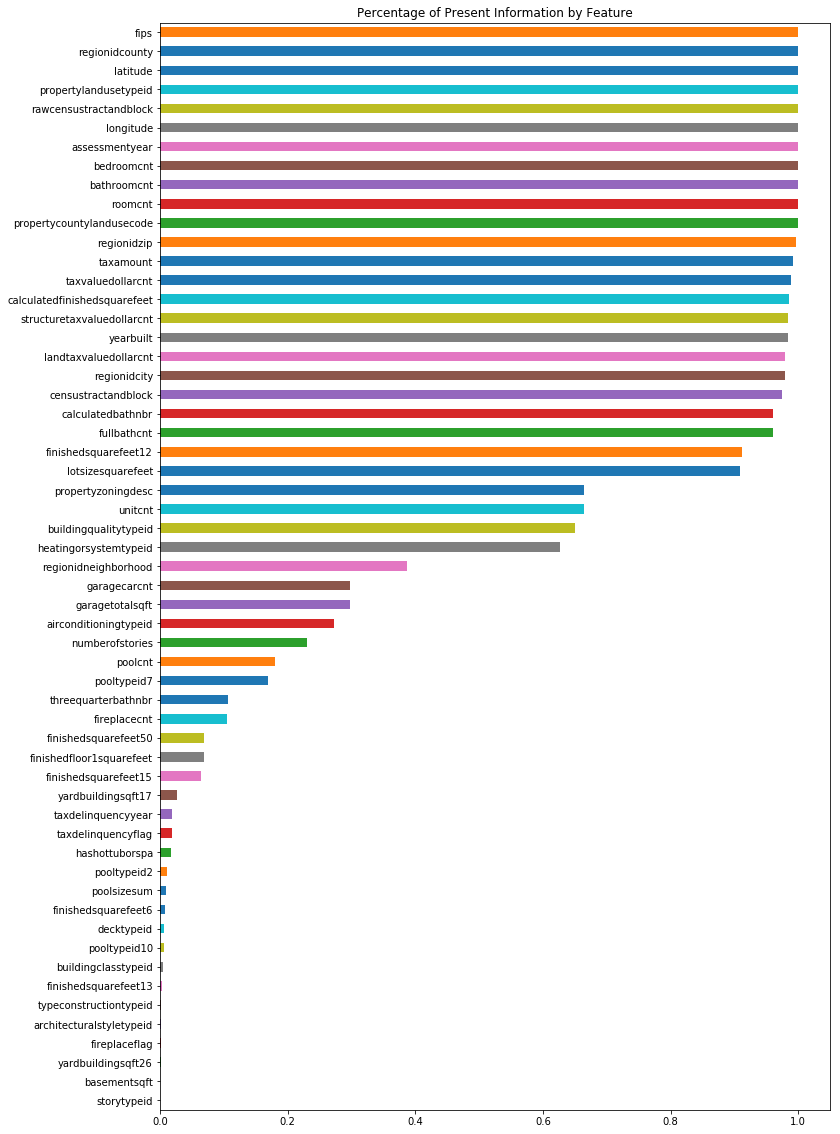

In [7]:
plt.figure(figsize=(12,20))
prop.drop('ParcelId',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Percentage of Present Information by Feature')

In [9]:
prop.dtypes 

ParcelId                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [10]:
#object dtypes are labelencoded

In [11]:
#Logerror outliers

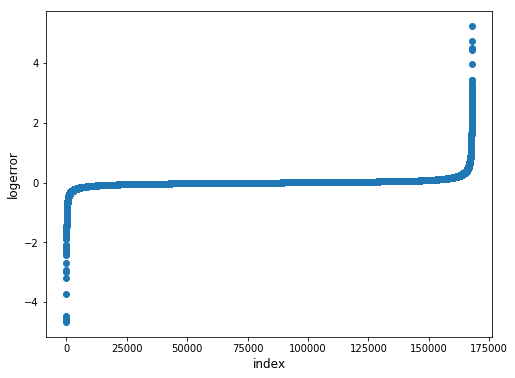

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [13]:
#Exclusing 0.5% of the outliers

In [14]:
train = train[train['logerror'] <  train['logerror'].quantile(0.9975)]  
train = train[train['logerror'] >  train['logerror'].quantile(0.0025)]

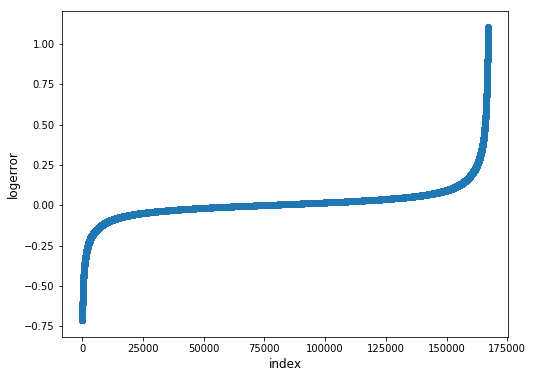

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [16]:
#Exploring relationship of latitude and longitude, with the targer variable logerror

In [19]:
from ggplot import aes

C:\Users\whisk\Anaconda2\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\whisk\Anaconda2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\whisk\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
from ggplot import *

In [24]:
x_features = train.merge(prop, how='left', on='ParcelId')

In [25]:
x_features.head()

ParcelId  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                  NaN                    8.0                2.0         NaN   
1                  NaN                    NaN                3.5         NaN   
2                  NaN                    8.0                3.0         NaN   
3                  NaN                    7.0                2.0         NaN   
4                  NaN                    NaN                2.5         NaN   

   finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                       NaN                        1684.0   
1                       NaN                        2263.0   
2                       NaN                        2217.0   
3                       NaN                         839.0   
4                       NaN                        2283.0   

   finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0                1684.0                   NaN                   NaN   
1                2263.0                   NaN                   NaN   
2                2217.0                   NaN                   NaN   
3                 839.0                   NaN                   NaN   
4                2283.0                   NaN                   NaN   

   finishedsquarefeet50  finishedsquarefeet6    fips  fireplacecnt  \
0                   NaN                  NaN  6037.0           NaN   
1                   NaN                  NaN  6059.0           NaN   
2                   NaN                  NaN  6037.0           NaN   
3                   NaN                  NaN  6037.0           NaN   
4                   NaN                  NaN  6059.0           NaN   

   fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0          2.0           NaN              NaN            NaN   
1          3.0           2.0            468.0            NaN   
2          3.0           NaN              NaN            NaN   
3          2.0           NaN              NaN            NaN   
4          2.0           2.0            598.0            NaN   

   heatingorsystemtypeid    latitude    longitude  lotsizesquarefeet  poolcnt  \
0                    2.0  34280990.0 -118488536.0             7528.0      NaN   
1                    NaN  33668120.0 -117677556.0             3643.0      NaN   
2                    2.0  34136312.0 -118175032.0            11423.0      NaN   
3                    2.0  33755800.0 -118309000.0            70859.0      NaN   
4                    NaN  33485643.0 -117700234.0             6000.0      1.0   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN           NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          1.0   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      0100                  261.0               LARS   
1                         1                  261.0                NaN   
2                      0100                  261.0           

In [26]:
#Relationship of latitude and logitude with target variable

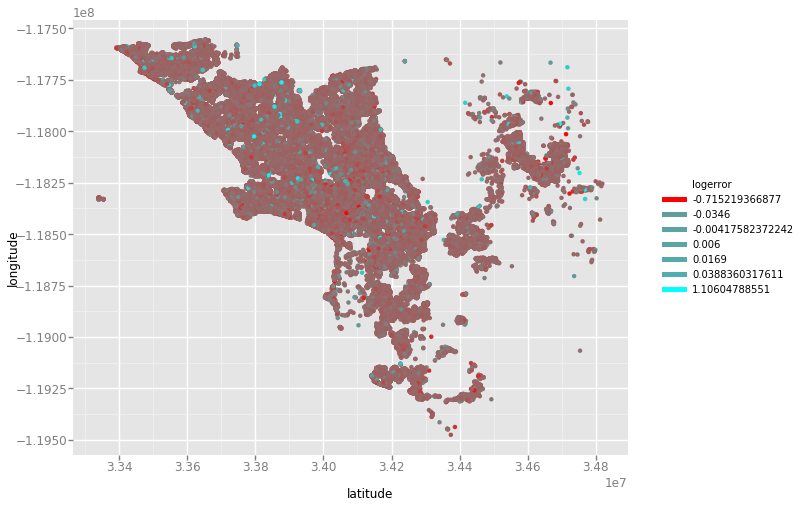

<ggplot: (31256349)>

In [32]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=x_features) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'cyan')

In [33]:
#Filling Nan with median values for latitude, longitude and censustractandbloack with median values

KeyError: ('latitude', 'logitude')

In [34]:
prop['longitude']=prop['longitude'].fillna(prop['longitude'].median()) / 1e6
prop['latitude'].fillna(prop['latitude'].median()) / 1e6
prop['censustractandblock'].fillna(prop['censustractandblock'].median()) / 1e12

0          60.375715
1          60.375715
2          60.375715
3          60.375715
4          60.375715
5          60.375715
6          60.375715
7          60.375715
8          60.375715
9          60.375715
10         60.375715
11         60.375715
12         60.375715
13         60.375715
14         60.375715
15         60.375715
16         60.375715
17         60.375715
18         60.375715
19         60.375715
20         60.375715
21         60.375715
22         60.375715
23         60.375715
24         60.375715
25         60.375715
26         60.375715
27         60.375715
28         60.375715
29         60.375715
             ...    
2985187    60.375715
2985188    60.375715
2985189    60.375715
2985190    60.375715
2985191    60.375715
2985192    60.375715
2985193    60.375715
2985194    60.375715
2985195    60.375715
2985196    60.375715
2985197    60.375715
2985198    60.375715
2985199    60.375715
2985200    60.375715
2985201    60.375715
2985202    60.375715
2985203    60

In [35]:
#fillna and labelencoding of dtypes that are object

In [38]:
object_type = [f for f in prop.columns if prop.dtypes[f] == object]
prop[object_type] = prop[object_type].fillna(-1)
for c in object_type:  prop[c] = LabelEncoder().fit(list(prop[c].values)).transform(list(prop[c].values)).astype(int)

In [39]:
prop.dtypes

ParcelId                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                    int32
heatingorsystemtypeid           float64
latitude                        float64


In [40]:
#Labelencoding is done and there are no columns with dtype object

In [41]:
#fillna for very small values

In [42]:
small= [f for f in prop.columns if np.abs(prop[f].max())<100]
prop[small] = prop[small].fillna(-1)
for c in small:  prop[c] = LabelEncoder().fit(list(prop[c].values)).transform(list(prop[c].values)).astype(np.int8)

In [45]:
high=['regionidcounty','fips','propertycountylandusecode','propertyzoningdesc','propertylandusetypeid']
prop[high] = prop[high].fillna(-1)
for c in high:  prop[c] = LabelEncoder().fit(list(prop[c].values)).transform(list(prop[c].values)).astype(int)

In [46]:
prop.dtypes

ParcelId                          int64
airconditioningtypeid              int8
architecturalstyletypeid           int8
basementsqft                    float64
bathroomcnt                        int8
bedroomcnt                         int8
buildingclasstypeid                int8
buildingqualitytypeid              int8
calculatedbathnbr                  int8
decktypeid                         int8
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                              int32
fireplacecnt                       int8
fullbathcnt                        int8
garagecarcnt                       int8
garagetotalsqft                 float64
hashottuborspa                     int8
heatingorsystemtypeid              int8
latitude                        float64


In [47]:
prop.head()

ParcelId  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                      0                         0           NaN   
1  10759547                      0                         0           NaN   
2  10843547                      0                         0           NaN   
3  10859147                      0                         0           NaN   
4  10879947                      0                         0           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0            1           1                    0                      0   
1            1           1                    0                      0   
2            1           1                    5                      0   
3            1           1                    3                      6   
4            1           1                    4                      0   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                  0           0                       NaN   
1                  0           0                       NaN   
2                  0           0                       NaN   
3                  0           0                       NaN   
4                  0           0                       NaN   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                       73026.0                   NaN                   NaN   
3                        5068.0                   NaN                   NaN   
4                        1776.0                   NaN                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6  fips  \
0                   NaN                   NaN                  NaN     1   
1                   NaN                   NaN                  NaN     1   
2               73026.0                   NaN                  NaN     1   
3                5068.0                   NaN                  NaN     1   
4                1776.0                   NaN                  NaN     1   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft  hashottuborspa  \
0             0            0             0              NaN               0   
1             0            0             0              NaN               0   
2             0            0             0              NaN               0   
3             0            0             0              NaN               0   
4             0            0             0              NaN               0   

   heatingorsystemtypeid    latitude   longitude  lotsizesquarefeet  poolcnt  \
0                      0  34144442.0 -118.654084            85768.0        0   
1                      0  34140430.0 -118.625364             4083.0        0   
2                      0  33989359.0 -118.394633            63085.0        0   
3                      0  34148863.0 -118.437206             7521.0        0   
4                      0  34194168.0 -118.385816             8512.0        0   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN             0            0            0   
1          NaN             0            0            0   
2          NaN             0            0            0   
3          NaN             0            0            0   
4          NaN             0            0            0   

   propertycountylandusecode  propertylandusetypeid  propertyzoningdesc  \
0                         12                     13                3846   
1                         10                      7                2149   
2                        148                      2                1819   
3                        148                      2                1819   
4                        160                      1                1841   

   rawcensustractandblock  r

In [48]:
#removing columns with too many missing values

In [49]:
feat_to_drop=[ 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'finishedsquarefeet15', 
              'finishedsquarefeet13','assessmentyear']
prop.drop(feat_to_drop,axis=1,inplace=True)

In [50]:
prop.head()

ParcelId  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                      0                         0           NaN   
1  10759547                      0                         0           NaN   
2  10843547                      0                         0           NaN   
3  10859147                      0                         0           NaN   
4  10879947                      0                         0           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0            1           1                    0                      0   
1            1           1                    0                      0   
2            1           1                    5                      0   
3            1           1                    3                      6   
4            1           1                    4                      0   

   calculatedbathnbr  decktypeid  calculatedfinishedsquarefeet  \
0                  0           0                           NaN   
1                  0           0                           NaN   
2                  0           0                       73026.0   
3                  0           0                        5068.0   
4                  0           0                        1776.0   

   finishedsquarefeet12  finishedsquarefeet6  fips  fireplacecnt  fullbathcnt  \
0                   NaN                  NaN     1             0            0   
1                   NaN                  NaN     1             0            0   
2                   NaN                  NaN     1             0            0   
3                   NaN                  NaN     1             0            0   
4                   NaN                  NaN     1             0            0   

   garagecarcnt  garagetotalsqft  hashottuborspa  heatingorsystemtypeid  \
0             0              NaN               0                      0   
1             0              NaN               0                      0   
2             0              NaN               0                      0   
3             0              NaN               0                      0   
4             0              NaN               0                      0   

     latitude   longitude  lotsizesquarefeet  poolcnt  poolsizesum  \
0  34144442.0 -118.654084            85768.0        0          NaN   
1  34140430.0 -118.625364             4083.0        0          NaN   
2  33989359.0 -118.394633            63085.0        0          NaN   
3  34148863.0 -118.437206             7521.0        0          NaN   
4  34194168.0 -118.385816             8512.0        0          NaN   

   pooltypeid10  pooltypeid2  pooltypeid7  propertycountylandusecode  \
0             0            0            0                         12   
1             0            0            0                         10   
2             0            0            0                        148   
3             0            0            0                        148   
4             0            0            0                        160   

   propertylandusetypeid  propertyzoningdesc  rawcensustractandblock  \
0                     13                3846            6.037800e+07   
1                      7                2149            6.037800e+07   
2                      2                1819            6.037703e+07   
3                      2                1819            6.037141e+07   
4                      1                1841            6.037123e+07   

   regionidcity  regionidcounty  regionidneighborhood  regionidzip  roomcnt  \
0       37688.0               3                   NaN      96337.0        1   
1       37688.0               3                   NaN      96337.0        1   
2       51617.0               3                   NaN      96095.0        1   
3       12447.0               3               27080.0      96424.0        1   
4       12447.0               3               46795.0      96450.0      

In [51]:
prop['lotsizesquarefeet'].fillna(prop['lotsizesquarefeet'].quantile(0.001),inplace=True)
prop['finishedsquarefeet12'].fillna(prop['finishedsquarefeet12'].quantile(0.001),inplace=True)
prop['calculatedfinishedsquarefeet'].fillna(prop['finishedsquarefeet12'],inplace=True)
prop['taxamount'].fillna(prop['taxamount'].quantile(0.001),inplace=True)
prop['landtaxvaluedollarcnt'].fillna(prop['landtaxvaluedollarcnt'].quantile(0.001),inplace=True)
prop.fillna(0,inplace=True)

In [52]:
prop.head()

ParcelId  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                      0                         0           0.0   
1  10759547                      0                         0           0.0   
2  10843547                      0                         0           0.0   
3  10859147                      0                         0           0.0   
4  10879947                      0                         0           0.0   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0            1           1                    0                      0   
1            1           1                    0                      0   
2            1           1                    5                      0   
3            1           1                    3                      6   
4            1           1                    4                      0   

   calculatedbathnbr  decktypeid  calculatedfinishedsquarefeet  \
0                  0           0                         390.0   
1                  0           0                         390.0   
2                  0           0                       73026.0   
3                  0           0                        5068.0   
4                  0           0                        1776.0   

   finishedsquarefeet12  finishedsquarefeet6  fips  fireplacecnt  fullbathcnt  \
0                 390.0                  0.0     1             0            0   
1                 390.0                  0.0     1             0            0   
2                 390.0                  0.0     1             0            0   
3                 390.0                  0.0     1             0            0   
4                 390.0                  0.0     1             0            0   

   garagecarcnt  garagetotalsqft  hashottuborspa  heatingorsystemtypeid  \
0             0              0.0               0                      0   
1             0              0.0               0                      0   
2             0              0.0               0                      0   
3             0              0.0               0                      0   
4             0              0.0               0                      0   

     latitude   longitude  lotsizesquarefeet  poolcnt  poolsizesum  \
0  34144442.0 -118.654084            85768.0        0          0.0   
1  34140430.0 -118.625364             4083.0        0          0.0   
2  33989359.0 -118.394633            63085.0        0          0.0   
3  34148863.0 -118.437206             7521.0        0          0.0   
4  34194168.0 -118.385816             8512.0        0          0.0   

   pooltypeid10  pooltypeid2  pooltypeid7  propertycountylandusecode  \
0             0            0            0                         12   
1             0            0            0                         10   
2             0            0            0                        148   
3             0            0            0                        148   
4             0            0            0                        160   

   propertylandusetypeid  propertyzoningdesc  rawcensustractandblock  \
0                     13                3846            6.037800e+07   
1                      7                2149            6.037800e+07   
2                      2                1819            6.037703e+07   
3                      2                1819            6.037141e+07   
4                      1                1841            6.037123e+07   

   regionidcity  regionidcounty  regionidneighborhood  regionidzip  roomcnt  \
0       37688.0               3                   0.0      96337.0        1   
1       37688.0               3                   0.0      96337.0        1   
2       51617.0               3                   0.0      96095.0        1   
3       12447.0               3               27080.0      96424.0        1   
4       12447.0               3               46795.0      96450.0      

In [53]:
prop.dtypes

ParcelId                          int64
airconditioningtypeid              int8
architecturalstyletypeid           int8
basementsqft                    float64
bathroomcnt                        int8
bedroomcnt                         int8
buildingclasstypeid                int8
buildingqualitytypeid              int8
calculatedbathnbr                  int8
decktypeid                         int8
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet6             float64
fips                              int32
fireplacecnt                       int8
fullbathcnt                        int8
garagecarcnt                       int8
garagetotalsqft                 float64
hashottuborspa                     int8
heatingorsystemtypeid              int8
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                            int8
poolsizesum                     float64


In [54]:
for c in ['rawcensustractandblock',  'regionidcity',  'regionidneighborhood',  'regionidzip',  'censustractandblock'] :
    prop[c] = LabelEncoder().fit(list(prop[c].values)).transform(list(prop[c].values))

In [56]:
for c, dtype in zip(prop.columns, prop.dtypes):
	if dtype == np.float64:
		prop[c] = prop[c].astype(np.float32)

cfeatures = list(prop.select_dtypes(include = ['int64', 'int32', 'uint8', 'int8']).columns)
for c in object_type:  prop[c] = LabelEncoder().fit(list(prop[c].values)).transform(list(prop[c].values))

In [57]:
#Feature Engineering- Adding new Features

In [61]:
builtyear=pd.Series(np.random.choice(prop['yearbuilt'].dropna().values,len(prop)))
prop['yearbuilt']=prop['yearbuilt'].fillna(builtyear).astype(int)
midyr=prop['yearbuilt'].quantile(0.5)
prop['New']=prop['yearbuilt'].apply(lambda x: 1 if x > midyr else 0).astype(np.int8)

In [62]:
prop['unitcnt'] = prop['unitcnt'].fillna(1).astype(int)    
prop['Condo']=prop['unitcnt'].apply(lambda x: 1 if x > 1 else 0).astype(np.int8)

In [63]:
prop.head()

ParcelId  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                      0                         0           0.0   
1  10759547                      0                         0           0.0   
2  10843547                      0                         0           0.0   
3  10859147                      0                         0           0.0   
4  10879947                      0                         0           0.0   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0            1           1                    0                      0   
1            1           1                    0                      0   
2            1           1                    5                      0   
3            1           1                    3                      6   
4            1           1                    4                      0   

   calculatedbathnbr  decktypeid  calculatedfinishedsquarefeet  \
0                  0           0                         390.0   
1                  0           0                         390.0   
2                  0           0                       73026.0   
3                  0           0                        5068.0   
4                  0           0                        1776.0   

   finishedsquarefeet12  finishedsquarefeet6  fips  fireplacecnt  fullbathcnt  \
0                 390.0                  0.0     1             0            0   
1                 390.0                  0.0     1             0            0   
2                 390.0                  0.0     1             0            0   
3                 390.0                  0.0     1             0            0   
4                 390.0                  0.0     1             0            0   

   garagecarcnt  garagetotalsqft  hashottuborspa  heatingorsystemtypeid  \
0             0              0.0               0                      0   
1             0              0.0               0                      0   
2             0              0.0               0                      0   
3             0              0.0               0                      0   
4             0              0.0               0                      0   

     latitude   longitude  lotsizesquarefeet  poolcnt  poolsizesum  \
0  34144440.0 -118.654083            85768.0        0          0.0   
1  34140432.0 -118.625366             4083.0        0          0.0   
2  33989360.0 -118.394630            63085.0        0          0.0   
3  34148864.0 -118.437202             7521.0        0          0.0   
4  34194168.0 -118.385818             8512.0        0          0.0   

   pooltypeid10  pooltypeid2  pooltypeid7  propertycountylandusecode  \
0             0            0            0                         12   
1             0            0            0                         10   
2             0            0            0                        148   
3             0            0            0                        148   
4             0            0            0                        160   

   propertylandusetypeid  propertyzoningdesc  rawcensustractandblock  \
0                     13                3846                   63609   
1                      7                2149                   63365   
2                      2                1819                   63091   
3                      2                1819                    7865   
4                      1                1841                    4125   

   regionidcity  regionidcounty  regionidneighborhood  regionidzip  roomcnt  \
0           108               3                     0          193        1   
1           108               3                     0          193        1   
2           148               3                     0           72        1   
3            21               3                    13          234        1   
4            21               3                    36          244      

In [64]:
prop.shape

(2985217, 55)

In [65]:
#Latitudes and logitudes replaced with 500 clusters

In [66]:
coords = np.vstack(prop[['latitude', 'longitude']].values)
sample_ind = np.random.permutation(len(coords))[:1000000]
kmeans = MiniBatchKMeans(n_clusters=500, batch_size=100000).fit(coords[sample_ind])
prop['Cluster'] = kmeans.predict(prop[['latitude', 'longitude']])


In [67]:
prop['Living_area_prop'] = prop['calculatedfinishedsquarefeet'] / prop['lotsizesquarefeet']
prop['Value_ratio'] = prop['taxvaluedollarcnt'] / prop['taxamount']
prop['Value_prop'] = prop['structuretaxvaluedollarcnt'] / prop['landtaxvaluedollarcnt']
prop['Value_prop'].fillna(0,inplace=True)
prop['Taxpersqrtfoot']=prop['taxamount'] / prop['finishedsquarefeet12']

train['transactiondate'] = pd.to_datetime(train.transactiondate)
train['Month'] = train['transactiondate'].dt.month.astype(np.int8)

In [68]:
#The above added new features and added the 'Month column"

In [69]:
month_err=(train.groupby('Month').aggregate({'logerror': lambda x: np.mean(x)})- train['logerror'].mean()).values
train['Meanerror']=train['Month'].apply(lambda x: month_err[x-1]).astype(np.float32)

train['abserror']=train['logerror'].abs()
month_abs_err=(train.groupby('Month').aggregate({'abserror': lambda x: np.mean(x)})- train['abserror'].mean()).values
train['Meanabserror']=train['Month'].apply(lambda x: month_abs_err[x-1]).astype(np.float32)
train.drop(['abserror'], axis=1,inplace=True)

for c in ['Meanerror','Meanabserror']: train[c]=LabelEncoder().fit(list(train[c].values)).transform(list(train[c].values))
for c in ['Meanerror','Meanabserror']: train[c]=train[c].astype(np.int8)

In [83]:
X = train.merge(prop, how='left', on='ParcelId')
y = X['logerror']
X.drop(['ParcelId', 'logerror', 'transactiondate'], axis=1,inplace=True)



In [89]:
features=list(X.columns)
cfeatures = list(X.select_dtypes(include = ['int64', 'int32', 'uint8', 'int8']).columns)


In [90]:
x_test = (sample.merge(prop, on='ParcelId', how='left')).loc[:,features]

x_test['Month']=np.int8(10) 
x_test['Meanerror']=np.int8(10)
x_test['Meanabserror']=np.int8(10)

print(X.shape, y.shape, x_test.shape)

C:\Users\whisk\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


((167046, 62), (167046L,), (2985217, 62))


In [91]:
X



Month  Meanerror  Meanabserror  airconditioningtypeid  \
0           1         10            11                      1   
1           1         10            11                      0   
2           1         10            11                      1   
3           1         10            11                      1   
4           1         10            11                      0   
5           1         10            11                      1   
6           1         10            11                      0   
7           1         10            11                      0   
8           1         10            11                      0   
9           1         10            11                      0   
10          1         10            11                      0   
11          1         10            11                      1   
12          1         10            11                      0   
13          1         10            11                      0   
14          1         10            11                      0   
15          1         10            11                      3   
16          1         10            11                      0   
17          1         10            11                      0   
18          1         10            11                      0   
19          1         10            11                      1   
20          1         10            11                      0   
21          1         10            11                      7   
22          1         10            11                      0   
23          1         10            11                      0   
24          1         10            11                      0   
25          1         10            11                      1   
26          1         10            11                      1   
27          1         10            11                      0   
28          1         10            11                      1   
29          1         10            11                      0   
...       ...        ...           ...                    ...   
167016      9          9             6                      1   
167017      9          9             6                      0   
167018      9          9             6                      0   
167019      9          9             6                      0   
167020      9          9             6                      0   
167021      9          9             6                      0   
167022      9          9             6                      1   
167023      9          9             6                      0   
167024      9          9             6                      0   
167025      9          9             6                      0   
167026      9          9             6                      1   
167027      9          9             6                      0   
167028      9          9             6                      0   
167029      9          9             6                      0   
167030      9          9             6                      0   
167031      9          9             6                      0   
167032      9          9             6                      1   
167033      9          9             6                      0   
167034      9          9             6                      1   
167035      9          9             6                      0   
167036      9          9             6                      0   
167037      9          9             6                      0   
167038      9          9             6                      1   
167039      9          9             6                      1   
167040      9          9             6                      0   
167041      9          9             6                      1   
167042      9          9             6                      0   
167043      9          9             6                      0   
167044      9          9             6                      1   
167045      9          9             6     

In [92]:
X_test = (sample.merge(prop, on='ParcelId', how='left')).loc[:,features]
X_test['Month']=np.int8(10) 
X_test['Meanerror']=np.int8(10)
X_test['Meanabserror']=np.int8(10)

print(X.shape, y.shape, X_test.shape)

C:\Users\whisk\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


((167046, 62), (167046L,), (2985217, 62))


In [88]:

X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.15, random_state=1)
model = CatBoostRegressor(iterations=1000,learning_rate=0.002, depth=7, loss_function='MAE', 
                          eval_metric='MAE', random_seed=1)
model.fit(X_train, y_train, eval_set=(X_eval, y_eval), use_best_model=True, verbose=True)
pred1 = model.predict(X_train)
pred2 = model.predict(X_eval)
print(' catboost MAE train  {:.4f}'.format(np.mean(np.abs(y_train.values-pred1) )))
print(' catboost MAE eval   {:.4f}'.format(np.mean(np.abs(y_eval.values-pred2) )))

0:	learn: 0.0614727	test: 0.0625432	best: 0.0625432 (0)	total: 260ms	remaining: 4m 19s
1:	learn: 0.0614444	test: 0.0625178	best: 0.0625178 (1)	total: 403ms	remaining: 3m 20s
2:	learn: 0.0614171	test: 0.0624936	best: 0.0624936 (2)	total: 539ms	remaining: 2m 59s
3:	learn: 0.0613903	test: 0.0624692	best: 0.0624692 (3)	total: 655ms	remaining: 2m 43s
4:	learn: 0.0613646	test: 0.0624462	best: 0.0624462 (4)	total: 774ms	remaining: 2m 34s
5:	learn: 0.0613402	test: 0.0624248	best: 0.0624248 (5)	total: 917ms	remaining: 2m 31s
6:	learn: 0.0613163	test: 0.0624033	best: 0.0624033 (6)	total: 1.05s	remaining: 2m 29s
7:	learn: 0.0612934	test: 0.0623828	best: 0.0623828 (7)	total: 1.17s	remaining: 2m 25s
8:	learn: 0.0612716	test: 0.0623627	best: 0.0623627 (8)	total: 1.3s	remaining: 2m 23s
9:	learn: 0.0612500	test: 0.0623434	best: 0.0623434 (9)	total: 1.43s	remaining: 2m 21s
10:	learn: 0.0612292	test: 0.0623248	best: 0.0623248 (10)	total: 1.58s	remaining: 2m 21s
11:	learn: 0.0612091	test: 0.0623072	best:

94:	learn: 0.0606005	test: 0.0618109	best: 0.0618109 (94)	total: 13s	remaining: 2m 3s
95:	learn: 0.0605972	test: 0.0618085	best: 0.0618085 (95)	total: 13.1s	remaining: 2m 3s
96:	learn: 0.0605946	test: 0.0618069	best: 0.0618069 (96)	total: 13.3s	remaining: 2m 3s
97:	learn: 0.0605920	test: 0.0618046	best: 0.0618046 (97)	total: 13.4s	remaining: 2m 3s
98:	learn: 0.0605883	test: 0.0618017	best: 0.0618017 (98)	total: 13.5s	remaining: 2m 3s
99:	learn: 0.0605846	test: 0.0617997	best: 0.0617997 (99)	total: 13.7s	remaining: 2m 3s
100:	learn: 0.0605819	test: 0.0617972	best: 0.0617972 (100)	total: 13.8s	remaining: 2m 3s
101:	learn: 0.0605794	test: 0.0617954	best: 0.0617954 (101)	total: 14s	remaining: 2m 2s
102:	learn: 0.0605771	test: 0.0617938	best: 0.0617938 (102)	total: 14.1s	remaining: 2m 2s
103:	learn: 0.0605744	test: 0.0617919	best: 0.0617919 (103)	total: 14.2s	remaining: 2m 2s
104:	learn: 0.0605719	test: 0.0617905	best: 0.0617905 (104)	total: 14.4s	remaining: 2m 2s
105:	learn: 0.0605690	test

186:	learn: 0.0603912	test: 0.0616794	best: 0.0616794 (186)	total: 24.6s	remaining: 1m 46s
187:	learn: 0.0603892	test: 0.0616781	best: 0.0616781 (187)	total: 24.7s	remaining: 1m 46s
188:	learn: 0.0603880	test: 0.0616775	best: 0.0616775 (188)	total: 24.8s	remaining: 1m 46s
189:	learn: 0.0603860	test: 0.0616766	best: 0.0616766 (189)	total: 24.9s	remaining: 1m 46s
190:	learn: 0.0603847	test: 0.0616757	best: 0.0616757 (190)	total: 25s	remaining: 1m 46s
191:	learn: 0.0603828	test: 0.0616749	best: 0.0616749 (191)	total: 25.2s	remaining: 1m 45s
192:	learn: 0.0603813	test: 0.0616745	best: 0.0616745 (192)	total: 25.3s	remaining: 1m 45s
193:	learn: 0.0603792	test: 0.0616731	best: 0.0616731 (193)	total: 25.4s	remaining: 1m 45s
194:	learn: 0.0603777	test: 0.0616719	best: 0.0616719 (194)	total: 25.5s	remaining: 1m 45s
195:	learn: 0.0603760	test: 0.0616708	best: 0.0616708 (195)	total: 25.6s	remaining: 1m 45s
196:	learn: 0.0603740	test: 0.0616698	best: 0.0616698 (196)	total: 25.8s	remaining: 1m 45s
1

278:	learn: 0.0602423	test: 0.0616093	best: 0.0616093 (278)	total: 36.8s	remaining: 1m 35s
279:	learn: 0.0602410	test: 0.0616087	best: 0.0616087 (279)	total: 36.9s	remaining: 1m 35s
280:	learn: 0.0602397	test: 0.0616082	best: 0.0616082 (280)	total: 37.1s	remaining: 1m 34s
281:	learn: 0.0602382	test: 0.0616075	best: 0.0616075 (281)	total: 37.2s	remaining: 1m 34s
282:	learn: 0.0602368	test: 0.0616070	best: 0.0616070 (282)	total: 37.3s	remaining: 1m 34s
283:	learn: 0.0602344	test: 0.0616057	best: 0.0616057 (283)	total: 37.5s	remaining: 1m 34s
284:	learn: 0.0602324	test: 0.0616045	best: 0.0616045 (284)	total: 37.6s	remaining: 1m 34s
285:	learn: 0.0602314	test: 0.0616039	best: 0.0616039 (285)	total: 37.7s	remaining: 1m 34s
286:	learn: 0.0602302	test: 0.0616032	best: 0.0616032 (286)	total: 37.9s	remaining: 1m 34s
287:	learn: 0.0602283	test: 0.0616024	best: 0.0616024 (287)	total: 38s	remaining: 1m 33s
288:	learn: 0.0602267	test: 0.0616022	best: 0.0616022 (288)	total: 38.1s	remaining: 1m 33s
2

370:	learn: 0.0601138	test: 0.0615573	best: 0.0615573 (370)	total: 48.6s	remaining: 1m 22s
371:	learn: 0.0601126	test: 0.0615574	best: 0.0615573 (370)	total: 48.7s	remaining: 1m 22s
372:	learn: 0.0601112	test: 0.0615573	best: 0.0615573 (370)	total: 48.8s	remaining: 1m 22s
373:	learn: 0.0601104	test: 0.0615570	best: 0.0615570 (373)	total: 49s	remaining: 1m 22s
374:	learn: 0.0601087	test: 0.0615560	best: 0.0615560 (374)	total: 49.1s	remaining: 1m 21s
375:	learn: 0.0601075	test: 0.0615550	best: 0.0615550 (375)	total: 49.2s	remaining: 1m 21s
376:	learn: 0.0601058	test: 0.0615544	best: 0.0615544 (376)	total: 49.4s	remaining: 1m 21s
377:	learn: 0.0601048	test: 0.0615541	best: 0.0615541 (377)	total: 49.5s	remaining: 1m 21s
378:	learn: 0.0601035	test: 0.0615534	best: 0.0615534 (378)	total: 49.6s	remaining: 1m 21s
379:	learn: 0.0601021	test: 0.0615525	best: 0.0615525 (379)	total: 49.7s	remaining: 1m 21s
380:	learn: 0.0601007	test: 0.0615520	best: 0.0615520 (380)	total: 49.9s	remaining: 1m 21s
3

462:	learn: 0.0599982	test: 0.0615177	best: 0.0615177 (462)	total: 1m	remaining: 1m 9s
463:	learn: 0.0599969	test: 0.0615172	best: 0.0615172 (463)	total: 1m	remaining: 1m 9s
464:	learn: 0.0599954	test: 0.0615164	best: 0.0615164 (464)	total: 1m	remaining: 1m 9s
465:	learn: 0.0599938	test: 0.0615156	best: 0.0615156 (465)	total: 1m	remaining: 1m 9s
466:	learn: 0.0599929	test: 0.0615153	best: 0.0615153 (466)	total: 1m	remaining: 1m 9s
467:	learn: 0.0599919	test: 0.0615148	best: 0.0615148 (467)	total: 1m	remaining: 1m 8s
468:	learn: 0.0599912	test: 0.0615147	best: 0.0615147 (468)	total: 1m	remaining: 1m 8s
469:	learn: 0.0599905	test: 0.0615146	best: 0.0615146 (469)	total: 1m	remaining: 1m 8s
470:	learn: 0.0599896	test: 0.0615145	best: 0.0615145 (470)	total: 1m 1s	remaining: 1m 8s
471:	learn: 0.0599884	test: 0.0615140	best: 0.0615140 (471)	total: 1m 1s	remaining: 1m 8s
472:	learn: 0.0599866	test: 0.0615135	best: 0.0615135 (472)	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.0599854	test: 0.0615

555:	learn: 0.0598990	test: 0.0614917	best: 0.0614917 (555)	total: 1m 12s	remaining: 57.7s
556:	learn: 0.0598978	test: 0.0614914	best: 0.0614914 (556)	total: 1m 12s	remaining: 57.6s
557:	learn: 0.0598966	test: 0.0614911	best: 0.0614911 (557)	total: 1m 12s	remaining: 57.4s
558:	learn: 0.0598960	test: 0.0614909	best: 0.0614909 (558)	total: 1m 12s	remaining: 57.3s
559:	learn: 0.0598951	test: 0.0614909	best: 0.0614909 (558)	total: 1m 12s	remaining: 57.2s
560:	learn: 0.0598941	test: 0.0614905	best: 0.0614905 (560)	total: 1m 12s	remaining: 57s
561:	learn: 0.0598933	test: 0.0614903	best: 0.0614903 (561)	total: 1m 12s	remaining: 56.9s
562:	learn: 0.0598926	test: 0.0614903	best: 0.0614903 (561)	total: 1m 13s	remaining: 56.7s
563:	learn: 0.0598916	test: 0.0614900	best: 0.0614900 (563)	total: 1m 13s	remaining: 56.6s
564:	learn: 0.0598907	test: 0.0614899	best: 0.0614899 (564)	total: 1m 13s	remaining: 56.5s
565:	learn: 0.0598895	test: 0.0614895	best: 0.0614895 (565)	total: 1m 13s	remaining: 56.3s
5

647:	learn: 0.0598124	test: 0.0614687	best: 0.0614687 (647)	total: 1m 23s	remaining: 45.4s
648:	learn: 0.0598115	test: 0.0614687	best: 0.0614687 (647)	total: 1m 23s	remaining: 45.3s
649:	learn: 0.0598106	test: 0.0614686	best: 0.0614686 (649)	total: 1m 23s	remaining: 45.1s
650:	learn: 0.0598094	test: 0.0614680	best: 0.0614680 (650)	total: 1m 23s	remaining: 45s
651:	learn: 0.0598084	test: 0.0614677	best: 0.0614677 (651)	total: 1m 24s	remaining: 44.9s
652:	learn: 0.0598071	test: 0.0614673	best: 0.0614673 (652)	total: 1m 24s	remaining: 44.7s
653:	learn: 0.0598059	test: 0.0614671	best: 0.0614671 (653)	total: 1m 24s	remaining: 44.6s
654:	learn: 0.0598054	test: 0.0614668	best: 0.0614668 (654)	total: 1m 24s	remaining: 44.5s
655:	learn: 0.0598044	test: 0.0614665	best: 0.0614665 (655)	total: 1m 24s	remaining: 44.3s
656:	learn: 0.0598035	test: 0.0614664	best: 0.0614664 (656)	total: 1m 24s	remaining: 44.2s
657:	learn: 0.0598026	test: 0.0614664	best: 0.0614664 (657)	total: 1m 24s	remaining: 44s
658

738:	learn: 0.0597307	test: 0.0614488	best: 0.0614488 (738)	total: 1m 35s	remaining: 33.6s
739:	learn: 0.0597299	test: 0.0614484	best: 0.0614484 (739)	total: 1m 35s	remaining: 33.5s
740:	learn: 0.0597290	test: 0.0614483	best: 0.0614483 (740)	total: 1m 35s	remaining: 33.4s
741:	learn: 0.0597278	test: 0.0614477	best: 0.0614477 (741)	total: 1m 35s	remaining: 33.2s
742:	learn: 0.0597268	test: 0.0614474	best: 0.0614474 (742)	total: 1m 35s	remaining: 33.1s
743:	learn: 0.0597260	test: 0.0614472	best: 0.0614472 (743)	total: 1m 35s	remaining: 33s
744:	learn: 0.0597252	test: 0.0614470	best: 0.0614470 (744)	total: 1m 36s	remaining: 32.9s
745:	learn: 0.0597244	test: 0.0614465	best: 0.0614465 (745)	total: 1m 36s	remaining: 32.7s
746:	learn: 0.0597235	test: 0.0614461	best: 0.0614461 (746)	total: 1m 36s	remaining: 32.6s
747:	learn: 0.0597228	test: 0.0614458	best: 0.0614458 (747)	total: 1m 36s	remaining: 32.5s
748:	learn: 0.0597217	test: 0.0614456	best: 0.0614456 (748)	total: 1m 36s	remaining: 32.4s
7

830:	learn: 0.0596485	test: 0.0614262	best: 0.0614261 (828)	total: 1m 47s	remaining: 21.8s
831:	learn: 0.0596475	test: 0.0614259	best: 0.0614259 (831)	total: 1m 47s	remaining: 21.7s
832:	learn: 0.0596465	test: 0.0614255	best: 0.0614255 (832)	total: 1m 47s	remaining: 21.6s
833:	learn: 0.0596450	test: 0.0614248	best: 0.0614248 (833)	total: 1m 47s	remaining: 21.4s
834:	learn: 0.0596442	test: 0.0614248	best: 0.0614248 (833)	total: 1m 47s	remaining: 21.3s
835:	learn: 0.0596432	test: 0.0614249	best: 0.0614248 (833)	total: 1m 48s	remaining: 21.2s
836:	learn: 0.0596419	test: 0.0614247	best: 0.0614247 (836)	total: 1m 48s	remaining: 21.1s
837:	learn: 0.0596409	test: 0.0614245	best: 0.0614245 (837)	total: 1m 48s	remaining: 20.9s
838:	learn: 0.0596400	test: 0.0614242	best: 0.0614242 (838)	total: 1m 48s	remaining: 20.8s
839:	learn: 0.0596391	test: 0.0614242	best: 0.0614242 (839)	total: 1m 48s	remaining: 20.7s
840:	learn: 0.0596382	test: 0.0614239	best: 0.0614239 (840)	total: 1m 48s	remaining: 20.5s

922:	learn: 0.0595692	test: 0.0614096	best: 0.0614096 (922)	total: 1m 59s	remaining: 9.99s
923:	learn: 0.0595684	test: 0.0614093	best: 0.0614093 (923)	total: 1m 59s	remaining: 9.86s
924:	learn: 0.0595674	test: 0.0614092	best: 0.0614092 (924)	total: 2m	remaining: 9.73s
925:	learn: 0.0595669	test: 0.0614091	best: 0.0614091 (925)	total: 2m	remaining: 9.6s
926:	learn: 0.0595662	test: 0.0614089	best: 0.0614089 (926)	total: 2m	remaining: 9.47s
927:	learn: 0.0595649	test: 0.0614084	best: 0.0614084 (927)	total: 2m	remaining: 9.34s
928:	learn: 0.0595641	test: 0.0614081	best: 0.0614081 (928)	total: 2m	remaining: 9.21s
929:	learn: 0.0595632	test: 0.0614080	best: 0.0614080 (929)	total: 2m	remaining: 9.08s
930:	learn: 0.0595622	test: 0.0614077	best: 0.0614077 (930)	total: 2m	remaining: 8.95s
931:	learn: 0.0595616	test: 0.0614075	best: 0.0614075 (931)	total: 2m	remaining: 8.82s
932:	learn: 0.0595608	test: 0.0614073	best: 0.0614073 (932)	total: 2m 1s	remaining: 8.69s
933:	learn: 0.0595602	test: 0.061

In [93]:
for month in [ 10,11,12]:
    print('month ',month)
    X_test['Month']=np.int8(month) 
    X_test['Meanerror']=X['Meanerror'].loc[X['Month']==month].mean().astype(np.int8)
    X_test['Meanabserror']=X['Meanerror'].loc[X['Month']==month].mean().astype(np.int8)
    pred = model.predict(X_test)
    sample['2016' + str(month)] = pred*1.05
    sample['2017' + str(month)] = pred
    print(' catboost MAE {}  {:.4f}'.format(month,np.mean(np.abs(sample['2017' + str(month)]-0) )))

sample.to_csv('zillowaai5.csv', index = False, float_format = '%.5f')

('month ', 10)
 catboost MAE 10  0.0115
('month ', 11)
 catboost MAE 11  0.0116
('month ', 12)
 catboost MAE 12  0.0123


Index([u'ParcelId', u'logerror', u'transactiondate', u'Month', u'Meanerror',
       u'Meanabserror'],
      dtype='object')

ParcelId                    int64
logerror                  float64
transactiondate    datetime64[ns]
Month                        int8
Meanerror                    int8
Meanabserror                 int8
dtype: object

0        0.027600
1       -0.168400
2       -0.004000
3        0.021800
4       -0.005000
5       -0.270500
6        0.044000
7        0.163800
8       -0.003000
9        0.084300
10       0.382500
11      -0.016100
12       0.034400
13       0.081600
14      -0.045000
15       0.002000
16       0.044000
17      -0.041900
18      -0.002000
19       0.010000
20      -0.038700
21       0.021800
22       0.014900
23       0.115100
24      -0.169600
25      -0.044000
26      -0.074700
27       0.008000
28       0.001000
29      -0.053400
           ...   
77581    0.020421
77582    0.019484
77583    0.094750
77584   -0.064765
77585    0.046755
77586    0.018458
77587    0.002138
77589    0.003457
77590   -0.036067
77591   -0.232215
77592    0.015806
77593    0.068838
77594    0.000099
77595    0.047467
77596    0.000749
77597   -0.159471
77599   -0.062404
77600    0.013268
77601    0.052630
77602   -0.140881
77603    0.319408
77604    0.028733
77605   -0.075465
77606    0.081196
77607    0

KeyError: u'None of [[0.0276, -0.1684, -0.004, 0.0218, -0.005, -0.2705, 0.044000000000000004, 0.1638, -0.003, 0.0843, 0.3825, -0.0161, 0.0344, 0.0816, -0.045, 0.002, 0.044000000000000004, -0.0419, -0.002, 0.01, -0.0387, 0.0218, 0.0149, 0.1151, -0.1696, -0.044000000000000004, -0.0747, 0.008, 0.001, -0.0534, -0.0398, -0.0294, 0.0208, -0.0233, 0.0266, -0.0222, -0.0274, -0.001, 0.0526, -0.0481, 0.0411, 0.0237, -0.006, 0.0411, -0.091, 0.045, 0.0402, 0.045, -0.0367, -0.0408, 0.0159, 0.006, -0.0171, 0.0344, 0.0639, 0.0639, 0.0573, 0.0276, -0.1497, 0.076, -0.0481, 0.2119, 0.0109, -0.001, 0.0, -0.0576, -0.0356, 0.0227, 0.001, -0.006, -0.0253, -0.0523, 0.1467, 0.0109, 0.0296, -0.0387, 0.004, -0.0294, 0.0296, 0.0667, -0.0253, 0.0276, 0.0286, 0.0159, 0.0286, 0.1142, 0.0334, 0.0402, -0.0243, 0.045, 0.0344, -0.0336, -0.1427, -0.2459, -0.078, -0.006, -0.1244, -0.044000000000000004, -0.078, 0.0149, 0.063, -0.1997, -0.4095, -0.0419, 0.0526, -0.0222, -0.1473, 0.0178, -0.091, 0.008, -0.1744, -0.001, 0.0488, 0.0573, 0.003, 0.145, 0.1398, -0.0598, -0.009000000000000001, 0.0208, -0.006, 0.3358, 0.005, -0.1358, -0.6368, -0.006, -0.002, 0.0554, -0.1087, 0.0149, -0.0233, 0.0421, -0.4277, -0.001, -0.0202, 0.0535, 0.0421, 0.098, -0.0769, 0.005, 0.098, -0.0932, 0.0944, 0.0, 0.0962, 0.0188, -0.1154, 0.0178, -0.078, 0.0392, 0.004, -0.1054, -0.0899, 0.01, 0.179, -0.006, 0.0344, 0.0639, 0.3825, 0.1187, 0.1089, -0.0141, 0.0421, 0.1089, 0.0119, -0.0315, -0.13699999999999998, 0.0354, -0.0492, 0.1765, 0.0383, -0.0182, -0.0243, 0.0917, -0.0243, 0.0276, 0.0373, -0.044000000000000004, 0.0198, -0.145, -0.0629, -0.0429, 0.0334, 0.0325, -0.3439, -0.0263, 0.0188, 0.0149, 0.0296, 0.0109, -0.003, 0.0119, -0.0661, 0.1169, 0.0779, 0.0751, 0.008, 0.0315, -0.0121, -0.006, 0.004, 0.0402, -0.002, 0.0667, 0.0315, 0.0363, 0.0188, 0.0344, 0.0998, 0.0469, 0.0788, 0.006999999999999999, 0.4941, -0.0736, -0.003, 0.0149, 0.0507, -0.0263, -0.0408, -0.0715, -0.0161, 0.003, -0.2144, 0.0, 0.0807, 0.1124, 0.0889, -0.0346, 0.0149, -0.0356, -0.0587, -0.0545, -0.0253, 0.1106, -0.0608, 0.1026, 0.005, 0.1266, -0.0325, 0.0421, -0.0274, 0.0797, 0.0315, 0.0526, -0.0111, -0.0111, -0.0111, 0.0296, -0.006999999999999999, -0.006, -0.0253, -0.003, 0.0344, -0.0141, 0.003, 0.006999999999999999, -0.1936, -0.044000000000000004, 0.0469, -0.1312, 0.0218, 0.1053, 0.006, 0.0705, -0.0284, 0.0129, 0.0658, -0.0576, -0.008, -0.0171, -0.003, 0.0149, -0.1065, -0.0151, -0.003, 0.0797, 0.1053, -0.408, 0.003, 0.0421, -0.0346, 0.4929, -0.006, 0.0853, -0.0367, 0.0159, 0.0363, -0.0704, -0.1985, -0.0534, 0.0363, 0.0363, -0.0367, 1.083, -0.0346, -0.1613, 0.1222, 0.006, 0.0334, 0.0611, 0.0218, -0.0398, 0.0159, -0.4277, -0.002, -0.0598, -0.001, 0.0139, -0.0769, -0.006999999999999999, 0.0592, -0.1143, -0.0101, -0.2971, 0.0363, 0.2624, 0.01, 0.001, 0.0276, -0.046, -0.006, -0.0387, 0.0129, 0.004, 0.002, 0.0286, 0.004, 0.006999999999999999, -0.0598, -0.004, 0.1151, -0.0263, 0.01, 0.0129, 0.0296, -0.009000000000000001, -0.0111, 0.0149, 0.0149, 0.0, -0.0243, 0.0305, -0.045, -0.0471, -0.0387, 0.0363, -0.0253, -0.003, -0.006999999999999999, -0.0253, 0.0373, 0.0421, 0.0169, -0.0325, 0.0276, -0.002, -0.0212, 0.0354, 0.1371, 0.0344, 0.0119, -0.0131, 0.045, 0.0564, -0.0856, -0.1485, -0.2033, -0.0866, -0.0263, -0.006999999999999999, -0.006999999999999999, 0.045, 0.0169, 0.0237, 0.0507, 0.0325, -0.0192, -0.0315, 0.0296, -0.0534, 0.0497, 0.0109, -0.2549, 0.0296, -0.0346, -0.006999999999999999, -0.064, 0.0159, -0.046, -0.0121, -0.0367, 0.0459, 0.0411, 0.1133, -0.0387, 0.0325, 0.1204, 0.063, -0.0377, 0.0383, 0.0862, 0.005, -0.006, 0.0788, 0.0227, 0.1133, -0.0545, -0.005, 0.0286, 0.0392, -0.0545, -0.0429, -0.0619, -0.0111, 0.0797, 0.0421, 0.062, 0.0751, -0.0202, 0.0178, 0.004, -0.0492, 0.0129, 0.0469, -0.0899, 0.077, -0.0346, 0.002, 0.0962, 0.0296, 0.0383, 0.01, 0.1204, -0.0346, -0.0651, -0.0233, 0.0554, 0.044000000000000004, 0.1106, 0.0208, -0.0121, 0.0363, 0.063, 0.0373, 0.0507, 0.0286, -0.006999999999999999, 0.0266, 0.009000000000000001, 0.0266, 0.0159, 0.0188, 0.0119, -0.0502, -0.0566, 0.0953, -0.0758, -0.1188, -0.001, 0.0497, 0.1302, -0.0726, -0.0253, -0.3425, -0.0253, -0.0608, 0.0344, -0.0243, 0.01, 0.1222, 0.3968, -0.0171, 0.3141, -0.0346, 0.11599999999999999, 0.2508, -0.003, 0.0247, 0.0507, 0.0159, 0.0363, 0.0247, 0.0488, 0.0459, 0.0218, 0.0383, -0.006, -0.0356, 0.1275, -0.0987, 0.0178, -0.004, 0.0227, -0.0233, 0.7453, -0.3552, -0.1567, -0.046, -0.1462, -0.1972, 0.0296, 0.001, 0.0989, 0.0363, 0.124, 0.1756, 0.0149, 0.0286, 0.0478, -0.008, -0.0212, 0.0953, -0.002, 0.003, 0.0677, -0.0315, 0.0129, -0.0243, 0.0411, 0.0119, 0.0871, 0.25, 0.0751, 0.0208, 0.0344, -0.1684, 0.0218, 0.0421, 0.0169, 0.0714, 0.0392, 0.1714, 0.0507, -0.002, 0.0898, -0.009000000000000001, -0.0325, -0.0161, 0.0178, 0.062, -0.1602, -0.2485, -0.0481, 0.0602, 0.1062, 0.003, 0.08800000000000001, 0.3478, 0.0325, -0.1165, 0.0129, 0.0564, 0.0139, -0.0408, -0.0253, -0.0367, -0.0111, 0.009000000000000001, 0.006, 0.0797, 0.0257, 0.0564, 0.1604, 0.0344, 0.0286, -0.0943, 0.0109, 0.0431, 0.0247, 0.2776, 0.005, 0.0129, 0.0227, 0.005, -0.0131, -0.1054, 0.0507, 0.1196, 0.1415, -0.0233, 0.009000000000000001, -0.0336, 0.0373, 0.1748, 0.0402, -0.1393, -0.0233, -0.0131, -0.0182, 0.0554, 0.0257, 0.006999999999999999, -0.2169, 0.0431, 0.0129, 0.044000000000000004, -0.0294, 0.0169, -0.004, -0.0141, 0.0383, -0.2497, -0.1661, 0.001, 0.198, 0.0816, 0.0478, 0.0149, 0.0276, 0.0188, 0.008, 0.0266, 0.0507, 0.0469, 0.0526, 0.0119, -0.003, -0.1948, 0.0109, -0.0726, -0.0202, 0.0227, -0.1358, -0.003, 0.1647, -0.0202, 0.2799, 0.0334, 0.1284, 0.0266, 0.0315, 0.0305, 0.0431, 0.0889, 0.002, -0.0377, -0.005, 0.01, 0.1647, 0.077, -0.0576, 0.01, -0.1543, 0.157, -0.0325, 0.0554, 0.044000000000000004, 0.1044, 0.076, -0.008, -0.0111, 0.0218, 0.1062, 0.2038, 0.0276, 0.0, 0.0109, -0.0576, -0.3202, 0.1007, 0.0188, 0.0411, -0.0419, -0.1301, 0.0119, -0.006999999999999999, 0.0334, 0.0742, 0.0834, 0.0119, -0.0161, -0.0769, 0.0354, 0.0853, -0.0274, 0.044000000000000004, 0.0344, 0.0149, 0.0843, 0.0198, -0.006999999999999999, 0.0686, 0.005, -0.2971, 0.0139, -0.0243, 0.0344, 0.0658, -0.2095, 0.0305, 0.1947, 0.0296, 0.0129, 0.0198, 0.0, -0.0171, 0.045, -0.006999999999999999, -0.2863, -0.0284, 0.1613, 0.1781, 0.1071, 0.0344, -0.0294, 0.0723, 0.0159, 0.002, 0.0257, 0.0119, 0.004, 0.0478, 0.005, 0.0315, 0.0208, 0.0227, 0.0421, -0.005, 0.0169, -0.079, 0.0227, 0.01, 0.0266, 0.5295, -0.0812, -0.0471, 0.0149, 0.1527, 0.0421, 0.2111, 0.8519, -0.0555, 0.0149, 0.25, -0.2497, 0.0431, 0.0334, -0.1165, 0.1044, 0.006999999999999999, 0.076, -0.0566, 0.0898, -0.0576, 0.1519, 0.0119, -0.0121, 0.0411, 0.0149, 0.002, -0.0161, -0.0284, -0.0866, -0.0834, 0.0354, 0.0129, 0.0459, 0.0257, 0.0198, -0.002, 0.1865, 0.0129, 0.2303, 0.006999999999999999, 0.0208, -0.0419, 0.1923, -0.0101, -0.251, 0.0807, 0.0198, 0.006, -0.001, -0.003, 0.0169, 0.0402, 0.0583, 0.098, -0.0398, -0.0429, 0.1293, -0.3682, -0.0845, 0.0611, -0.004, 0.0602, 0.0119, 0.0109, 0.0667, 0.0714, 0.0305, -0.0274, -0.0398, 0.0266, -0.0356, -0.0151, 0.1089, -0.1602, -0.0398, -0.2421, -0.0408, -0.0284, 0.0139, -0.0294, 0.0459, 0.0139, 0.0602, -0.0284, -0.0545, 0.0208, 0.0266, 0.003, -0.1625, -0.0131, 0.0545, 0.0797, -0.0823, 0.0649, 0.0315, -0.008, 0.0545, 0.0218, -0.002, 0.0315, 0.0169, -0.0111, 0.0, -0.004, 0.0129, -0.0212, 0.0431, -0.0305, -0.1485, 0.0, 0.131, -0.0233, -0.212, -0.3769, 0.18899999999999997, 0.0286, 0.0497, -0.0151, 0.0953, 0.0296, -0.003, -0.0555, -0.1555, -0.0325, 0.7761, -0.1555, 0.2631, -0.009000000000000001, 0.0779, -0.0921, -0.046, -0.006999999999999999, 0.006999999999999999, -0.2132, 0.3723, 0.0188, 0.01, 0.002, 0.0639, -0.0587, 0.0257, 0.0109, 0.0354, -0.003, 0.0139, -0.0192, 0.0, 0.044000000000000004, 0.0109, 0.0392, 0.098, -0.2345, 0.1178, 0.1553, 0.0334, -0.0471, 0.0667, 0.0564, 0.002, -0.0151, 0.076, 0.0129, 0.001, 0.0402, 0.009000000000000001, 0.0149, 0.0257, -0.0101, -0.3243, 0.0554, -0.0192, 0.0611, -0.3025, -0.0141, 0.0296, 0.008, 0.0247, 0.0266, 0.0459, 0.0198, 0.0564, 0.0592, -0.0131, 0.0178, 0.045, -0.0534, 0.0315, 0.0526, -0.3202, -0.3397, -0.004, 0.004, 0.003, -0.0233, 0.0188, -0.0419, 0.0334, 0.1923, 0.2382, -0.1416, 0.0797, -0.009000000000000001, 0.0695, 0.0535, -0.0683, -0.0233, 0.0516, 0.01, -0.0222, -0.4447, 0.0208, 0.0488, 0.0459, -0.1555, 0.004, -0.0534, -0.006, 0.0208, -0.0192, 0.006, -0.1267, 0.0237, -0.0161, 0.0354, 0.0169, 0.1319, -0.006, 0.0334, 0.157, 0.1071, 0.006999999999999999, -0.004, -0.0101, 0.0402, 0.5241, 0.044000000000000004, 0.0469, 0.0296, 0.005, 0.01, -0.0377, 0.0109, -0.0481, -0.006999999999999999, 0.0478, 0.0159, -0.1244, -0.0274, 0.0237, 0.0198, 0.1613, 0.0129, 0.0325, 0.5306, 0.1266, -0.13699999999999998, -0.003, 0.004, -0.003, 0.0208, -0.1661, -0.009000000000000001, -0.0736, 0.4593, 0.0723, 0.001, 0.003, -0.1132, -0.6675, -0.006, 0.0935, 0.009000000000000001, 0.0159, -0.0408, -0.006, -0.0151, 0.0334, 0.002, 0.004, 0.0392, -0.0111, -0.0726, 0.1458, -0.0111, 0.0129, -0.0576, -0.0336, 0.006999999999999999, -0.045, 0.0257, -0.0305, -0.0182, -0.2433, 0.3681, -0.0651, 0.002, -0.0263, -0.2182, 0.0402, 0.0411, 0.003, 0.0198, 0.0459, 0.001, 0.0816, 0.0373, 0.2531, -0.0481, 0.0834, -0.1076, 0.0305, 0.5008, 0.0208, 0.0119, 0.0237, -0.0294, 0.003, 0.0247, 0.009000000000000001, -0.1473, -0.001, -0.0101, 0.3322, 0.0325, 0.076, -0.0899, -0.6616, -0.008, 0.0497, -0.0222, 0.0257, -0.005, -0.0315, -0.0202, -0.1267, -0.004, -0.0161, 0.2167, 0.0602, 0.0237, -0.0523, 0.0908, 0.044000000000000004, 0.0898, -0.0263, 0.0169, 0.2852, -0.0877, -0.0121, 0.006, 0.0266, 0.0639, -0.0263, -0.3216, -0.1324, 0.0119, -0.0429, 0.0554, -0.046, -0.0715, 0.1133, 0.0926, 0.0119, 0.0469, -0.0182, 0.0247, 0.0639, -0.0398, 0.1781, -0.004, 0.0363, 0.0392, 0.4035, 0.0554, 0.0363, 0.006999999999999999, 0.001, -0.0101, -0.0367, 0.1115, -0.0419, -0.0845, -0.0141, 0.0109, 0.0257, 0.2859, 0.004, -0.1256, 0.0139, -0.0356, 0.0469, 0.0247, 0.0188, -0.237, 0.003, 0.0459, -0.004, 0.0, -0.005, -0.0161, 0.0188, 0.7208, -0.0534, 0.1044, 0.006999999999999999, -0.1684, -0.045, -0.009000000000000001, 0.0497, -0.0294, -0.009000000000000001, -0.005, -0.0367, -0.0566, 0.0129, -0.1065, -0.0294, -0.0151, 0.004, 0.045, 0.0421, 0.0257, 0.0402, -0.0111, 0.0247, 0.0188, 0.0742, 0.0944, 0.0334, 0.0998, -0.004, -0.0161, 0.0218, -0.0845, 0.0742, 0.002, -0.0253, -0.1188, -0.1696, -0.0954, 0.0159, -0.0182, 0.0989, -0.0202, -0.0661, -0.0555, 0.0119, 0.001, 0.0237, 0.0953, -0.0619, 0.0898, 0.0695, 0.0516, 0.2429, -0.0305, 0.003, -0.0253, -0.0192, -0.0151, -0.1244, 0.0751, 0.005, 0.0344, 0.0723, 0.005, -0.0192, 0.0478, -0.0834, -0.0233, 0.0421, 0.0276, 0.001, 0.0218, 0.1536, 0.001, -0.0161, 0.2054, -0.0161, -0.001, 0.003, 0.0227, -0.6972, 0.0305, -0.0101, 0.0373, -0.0222, -0.1839, -0.0856, -0.0471, -0.0202, -0.0243, -0.0367, -0.0131, -0.0233, 0.005, -0.0877, 0.0953, -0.001, -0.0346, -0.0866, -0.002, 0.0373, 0.045, 0.138, 0.2677, 0.0344, 0.002, -0.0576, 0.1089, -0.006999999999999999, 0.0169, 0.0257, 0.0334, 0.001, 0.0554, 0.006999999999999999, -0.045, 0.0208, 0.001, -0.0294, -0.0202, 0.003, 0.2279, 0.1222, 0.0392, 0.0139, -0.0121, -0.0253, 0.0305, 0.0208, 0.0109, 0.006, -0.0899, -0.0377, 0.0834, 0.0733, 0.0459, -0.0398, 0.0402, -0.006999999999999999, 0.0686, 0.0373, 0.0218, -0.0243, 0.0286, 0.1098, -0.0212, 0.0602, -0.0704, 0.0526, 0.0788, -0.004, 0.0402, -0.003, 0.0276, -0.006999999999999999, 0.0373, 0.0169, 0.0334, 0.0516, 0.0373, -0.0408, 0.2223, -0.0294, -0.001, 0.0266, 0.0, -0.0758, -0.045, 0.0344, -0.0222, 0.5922, 0.0488, -0.0212, -0.1335, -0.2144, 0.002, 0.0742, 0.0325, 0.0149, 0.0723, 0.5682, -0.0651, 0.1249, -0.0608, 0.0334, 0.008, 0.0208, -0.0336, 0.0421, -0.0111, 0.8965, -0.006999999999999999, 0.0208, 0.0325, 0.0169, 0.0, 0.0535, 0.008, 0.1142, -0.009000000000000001, -0.006999999999999999, 0.0411, -0.001, -0.091, 0.1748, 0.002, -0.0294, -0.152, 0.0276, 0.044000000000000004, 0.0526, 0.004, 0.0257, -0.009000000000000001, -0.0523, 0.0944, -0.0101, 0.1432, -0.0629, 0.0639, 0.0, 0.0169, -0.0812, 0.0686, 0.0526, 0.1354, -0.0121, -0.0202, 0.0227, -0.0726, 0.0139, 0.1293, 0.0296, -0.2917, -0.0704, -0.1087, 0.0169, 0.1354, -0.0356, 0.0198, 0.1406, 0.0733, 0.008, 0.0149, 0.2406, -0.1791, 0.0208, 0.1714, -0.3439, 0.0554, 0.1865, 0.0392, -0.1779, -0.009000000000000001, -0.006999999999999999, 0.0109, 0.0354, 0.0159, 0.0286, 0.0962, -0.003, 0.0, 0.005, 0.0247, 0.0109, -0.004, -0.0121, 0.077, 0.0, 0.0227, 0.0516, 0.006999999999999999, -0.0545, -0.0111, -0.1278, 0.044000000000000004, -0.1076, -0.0429, -0.005, -0.1165, 0.0695, -0.0101, 0.124, 0.0344, 0.0383, 0.009000000000000001, 0.006999999999999999, 0.0516, 0.044000000000000004, 0.1284, 0.1415, 0.0354, -0.0202, -0.0555, 0.0109, 0.179, 0.0139, 0.0325, -0.006, 0.0276, -0.002, -0.0672, 0.0516, -0.0233, 0.004, -0.2904, 0.0119, -0.0192, 0.0119, -0.0182, -0.0608, 0.1664, 0.063, -0.0171, -0.1098, -0.0131, 0.0149, -0.1485, -0.0492, -0.005, 0.002, 0.0257, -0.0513, 0.0315, -0.0212, -0.006999999999999999, -0.008, 0.006999999999999999, 0.045, 0.063, -0.3769, -0.0192, 0.1106, -0.0111, -0.002, -0.006999999999999999, 0.0198, 0.0109, 0.0129, 0.267, 0.0119, 0.1044, -0.0346, 0.0871, 0.1187, -0.064, -0.1803, 0.0383, 0.001, 0.0296, 0.0507, -0.003, 0.077, 0.2708, -0.0513, -0.0101, 0.008, 0.0488, 0.0139, 0.0469, -0.0419, 0.006999999999999999, 0.0169, 0.0421, 0.0516, -0.0192, -0.0356, -0.046, 0.0516, -0.0502, 0.006, 0.008, 0.0373, 0.0459, -0.0346, -0.0151, 0.1204, 0.006, 0.0247, -0.003, -0.005, -0.0545, 0.0526, 0.0266, 0.0325, -0.0263, -0.005, -0.1732, -0.1199, 0.0344, -0.009000000000000001, -0.002, 0.0178, -0.0182, -0.0998, 0.0276, 0.0237, 0.0788, 0.0149, -0.0253, 0.0421, 0.0218, -0.0336, 0.1997, 0.0383, 0.0363, -0.0845, 0.0516, -0.0111, -0.1416, -0.0921, -0.0315, 0.0188, 0.0198, 0.0237, 0.0695, 0.0159, 0.004, 0.008, 0.009000000000000001, -0.0171, 0.009000000000000001, 0.0639, -0.0111, 0.1124, 0.0658, -0.046, 0.0169, -0.0932, -0.0222, -0.0101, -0.0398, 0.0218, 0.008, -0.004, -0.0243, -0.079, -0.005, -0.0726, 0.003, 0.1424, 0.008, 0.0129, -0.0111, -0.0387, 0.4068, 0.0392, -0.003, -0.1791, 0.1798, -0.004, 0.044000000000000004, 0.1389, -0.0736, -0.0899, 0.0296, -0.064, 0.0218, 0.0159, 0.0507, -0.0325, 0.1328, -0.0367, -0.0212, 0.1493, 0.3358, 0.006999999999999999, 0.002, -0.005, 0.002, 0.11599999999999999, 0.006, -0.0834, -0.2784, 0.1089, 0.0257, -0.0598, 0.2143, 0.001, 0.0208, -0.0101, -0.0284, 0.008, 0.1196, -0.003, 0.1398, -0.006999999999999999, 0.0315, 0.0266, 0.009000000000000001, -0.0182, 0.0178, 0.0159, 0.004, 0.0469, 0.0649, 0.0469, 0.0383, 0.0208, -0.0587, 0.0469, 0.006, -0.001, 0.0139, -0.0356, 0.005, -0.0715, 0.0573, -0.0212, -0.0243, -0.0111, 0.0, 0.1972, -0.1154, -0.045, -0.0151, -0.006999999999999999, 0.0188, -0.2206, -0.006999999999999999, 0.008, 0.006, 0.138, 0.0363, 0.0257, 0.0705, 0.0247, -0.0212, 0.0488, 0.0334, 0.1765, -0.0683, 0.002, 0.0516, 0.0198, 0.063, 0.0611, 0.0276, 0.5359, 0.0602, -0.0141, -0.0121, 0.008, -0.0419, -0.2718, -0.0212, -0.0747, -0.009000000000000001, 0.002, 0.0459, -0.0429, -0.0429, 0.0109, -0.0398, -0.1696, 0.0431, -0.0131, -0.0398, 0.0315, 0.0178, -0.0171, 0.0149, 0.184, 0.0554, -0.0555, 0.1371, -0.045, 0.6606, -0.2033, -0.006999999999999999, 0.0237, 0.0198, -0.0222, 0.3457, -0.0801, -0.1031, 0.0129, 0.3279, -0.6872, -0.0253, 0.0686, 0.0227, 0.063, -0.0131, 0.0315, 0.0178, -0.0566, -0.0377, 0.0421, -0.0419, -0.0471, 0.0286, 0.0363, 0.0545, 0.0421, -0.009000000000000001, -0.3425, -0.006, -0.0101, -0.0253, -0.0356, 0.2327, 0.2647, 0.0564, -0.001, -0.0325, 0.0363, -0.008, -0.0545, 0.0296, -0.001, -0.003, -0.004, -0.0471, -0.078, 0.0363, 0.0779, -0.0377, -0.004, 0.0459, -0.6143, -0.0131, 0.0, 0.062, -0.0502, -0.003, 0.0908, 0.002, -0.046, 0.1579, 0.0431, -0.079, -0.0253, 0.5377, -0.0284, -0.0943, 0.0751, 0.0554, -0.0976, -0.2269, 0.6339, -0.0481, 0.009000000000000001, 0.0649, -0.0161, 0.0198, 0.0119, -0.045, 0.0459, -0.008, 0.01, 0.0178, -0.2046, 0.0714, 0.0344, 0.0421, -0.0305, -0.0534, 0.0788, -0.0141, -0.0111, 0.4549, -0.2459, 0.0611, 0.1519, 0.001, 0.2453, -0.1839, -0.0587, -0.1532, 0.0257, 0.004, 0.0129, 0.004, 0.2414, -0.2614, 0.0649, 0.0, -0.129, 0.005, 0.0383, -0.4339, 0.0218, 0.0139, -0.2345, 0.006999999999999999, 0.0149, -0.001, 0.0723, 0.0478, -0.2459, 0.1169, 0.0178, -0.003, -0.0243, 0.0325, 0.1124, 0.2994, 0.0149, -0.0192, 0.0421, -0.0502, -0.0121, -0.0141, 0.003, 0.0898, 0.0421, 0.002, 0.0266, 0.0611, 0.0129, 0.0296, -0.0523, 0.0139, 0.062, 0.004, -0.004, -0.0315, 0.01, 0.0354, -0.0367, -0.0845, -0.0877, 0.0169, -0.006, 0.0305, -0.0212, -0.0661, -0.0263, -0.0899, -0.1661, -0.0367, -0.1087, 0.0315, 0.0286, -0.0305, -0.004, -0.0274, 0.0208, 0.004, -0.1462, 0.0602, 0.0843, -0.2562, 0.1053, 0.0592, 0.0296, 0.1187, -0.0566, -0.005, -0.0513, -0.0151, 0.0119, 0.0545, 0.002, 0.0119, 0.0, -0.009000000000000001, -0.0171, 0.0178, -0.0899, 0.0178, -0.0131, 0.008, 0.0178, 0.008, 0.0649, 0.0178, -0.0151, 0.002, -0.0161, -0.0171, 0.1604, -0.046, 0.0459, -0.005, -0.0161, -0.0274, 0.0649, -0.0629, -0.0222, 0.0139, -0.004, -0.2601, 0.0779, -0.1177, 0.0218, -0.0758, -0.0502, 0.8171, 0.2207, -0.0954, -0.001, 0.0334, 0.0237, 0.0363, -0.0534, -0.0555, -0.0856, 0.0257, -0.0141, 0.0257, -0.0182, -0.0801, 0.2844, 0.0871, -0.006, 0.0286, -0.0672, 0.0497, -0.0101, 0.0159, 0.0178, -0.0182, -0.1485, 0.0218, 0.0218, 0.009000000000000001, 0.0853, 0.1493, 0.001, -0.0367, 0.1697, -0.2549, -0.0101, 0.0611, 0.0257, -0.0998, 0.005, 0.0667, 0.0257, -0.0121, 0.0658, -0.212, -0.0888, 0.0516, -0.0111, 0.0554, 0.0, -0.0356, -0.0866, -0.0101, -0.0233, -0.0704, 0.0315, -0.0274, -0.004, 0.0286, -0.0726, 0.0392, -0.0377, 0.38799999999999996, 0.9921, 0.0237, -0.3079, 0.0129, 0.0658, -0.0202, -0.0161, -0.0202, 0.0218, 0.0286, 0.0237, 0.0917, -0.079, 0.0169, 0.01, -0.0408, -0.0523, 0.003, -0.046, 0.1007, 0.1587, -0.1381, 0.0129, 0.0971, 0.0344, -0.0325, -0.3133, 0.0169, 0.2143, -0.0408, 0.1035, -0.0131, 0.009000000000000001, -0.0305, 0.006, -0.0419, 0.0315, -0.0336, -0.0758, 0.0257, -0.0131, -0.1839, -0.0629, 0.0459, -0.001, 0.0188, 0.0354, 0.1706, 0.1026, -0.0758, -0.2421, 0.004, -0.0182, -0.0233, 0.0383, 0.0583, 0.0497, 0.1939, -0.3653, -0.0492, -0.0954, -0.0161, 0.0421, 0.0411, 0.008, -0.005, 0.005, -0.0513, -0.0243, -0.0111, 0.0816, -0.001, 0.0488, 0.2601, 0.0705, -0.0121, -0.0141, 0.0871, 0.0, 0.077, 0.1098, 0.044000000000000004, -0.0243, 0.062, -0.064, 0.0286, -0.0274, -0.044000000000000004, -0.0131, 0.0889, -0.0398, 0.1302, 0.0507, 0.0305, -0.006999999999999999, 0.1748, 0.0917, 0.1714, -0.001, 0.0421, 0.0188, 0.1756, 0.0149, -0.0192, 0.006999999999999999, 0.001, 0.0705, -0.0121, -0.003, -0.0346, 0.002, -0.008, -0.2132, 0.003, -0.003, 0.0208, -0.1076, 0.0227, 0.424, 0.0276, 0.2095, -0.0987, 0.0853, -0.005, 0.005, 0.0139, 0.004, 0.0705, -0.0481, -0.0192, 0.163, 0.0478, 0.0276, 0.0431, 0.1142, 0.0149, -0.0726, 0.003, 0.0276, 0.0554, 0.077, -0.0356, -0.008, 0.1007, 0.003, -0.0171, -0.008, 0.0139, 0.0507, 0.0129, -0.0141, -0.003, -0.3202, 0.008, -0.0121, 0.0315, 0.0779, 0.0296, -0.102, -0.005, 0.076, 0.1672, 0.0488, -0.0726, 0.0354, -0.0758, 0.0592, 0.006999999999999999, 0.0149, 0.0611, 0.005, -0.001, -0.0121, 0.0149, -0.0747, -0.0222, 0.008, 0.0667, 0.4719, 0.009000000000000001, 0.009000000000000001, -0.044000000000000004, 0.0602, 0.0649, 0.1832, -0.0253, 0.0119, 0.0149, -0.0161, 0.001, -0.0555, 0.003, -0.0111, -0.0274, -0.003, 0.0247, 0.0535, -0.0294, 0.0247, 0.0507, 0.0723, -0.0171, -0.0161, 0.0109, 0.0363, 0.1553, 0.003, 0.044000000000000004, 0.063, -0.0866, -0.001, 0.008, -0.0151, -0.0274, 0.0129, 0.0944, 0.0843, -0.0222, 0.1931, 0.0149, 0.004, -0.0171, 0.0119, 0.0695, -0.0629, 0.0459, -0.004, 0.1706, 0.1249, 0.1106, 0.0159, -0.0121, 0.0545, 0.0188, -0.064, -0.001, 0.0296, -0.0222, -0.0222, -0.004, 0.1098, -0.1267, -0.0704, -0.1054, -0.0566, 0.009000000000000001, -0.0801, -0.0346, 0.0296, 0.1222, -0.1098, -0.0419, 0.0373, -0.002, 0.0611, 0.0751, 0.006999999999999999, -0.1109, -0.0222, 0.0119, -0.0429, 0.0392, -0.001, 0.0411, 0.0392, -0.0192, -0.1602, 0.0149, -0.0284, 0.0325, -0.3496, 0.0488, 0.0149, 0.174, 0.0266, 0.009000000000000001, 0.0325, -0.006999999999999999, -0.0294, 0.0488, 0.0334, -0.0834, -0.003, 0.0677, 0.0305, 0.0257, -0.0243, 0.0109, -0.006, 0.002, -0.0182, 0.0459, -0.0471, 0.005, 0.044000000000000004, -0.008, -0.006, -0.0587, -0.0356, -0.0387, 0.003, 0.4644, 0.005, -0.0243, 0.004, -0.0976, 0.004, -0.0513, 0.0478, 0.10800000000000001, 0.0208, -0.1065, -0.008, 0.1098, 0.0334, 0.0305, 0.0402, 0.1089, 0.002, 0.002, -0.6162, 0.0898, 0.0497, -0.0325, -0.0101, 0.098, 0.0497, 0.002, 0.0, -0.0161, -0.0325, -0.4845, -0.091, -0.0408, 0.0237, -0.0243, -0.0513, 0.1672, -0.0356, -0.0377, 0.0363, 0.044000000000000004, 0.0276, 0.7775, -0.0834, 0.0639, 0.0411, 0.002, 0.0516, 0.5889, 0.004, -0.0284, 0.0178, 0.0478, 0.1124, -0.1393, -0.0263, -0.0222, 0.0178, 0.0344, 0.009000000000000001, -0.0387, 0.0178, -0.0834, 0.008, -0.001, -0.1416, 0.0871, 0.3045, -0.0356, -0.003, -0.0111, -0.0212, 0.002, -0.11199999999999999, -0.0408, 0.0507, 0.01, 0.0421, 0.0488, 0.1133, 0.0286, 0.0723, 0.0276, 0.1476, -0.102, 0.0497, 0.1071, -0.0429, -0.0346, -0.0161, 0.0705, 0.0276, 0.0305, 0.1035, 0.2343, -0.0576, 0.1865, 0.0825, 0.0344, -0.0192, 0.6471, 0.003, 0.0325, -0.005, 0.009000000000000001, 0.0325, 0.004, -0.001, 0.009000000000000001, -0.2984, -0.006, -0.0694, 0.0507, -0.0294, 0.0658, -0.0377, 0.1906, -0.2157, -0.005, -0.0932, -0.0619, 0.0237, 0.0305, -0.0243, 0.0602, -0.121, 0.0169, 0.0469, -0.0356, -0.0111, 0.002, 0.0159, -0.0111, -0.0661, 0.179, 0.0611, 0.006, 0.2852, -0.0131, -0.044000000000000004, 0.2539, 0.0714, -0.0608, -0.0619, -0.045, 0.0247, -0.0212, 0.0218, 0.2754, -0.0315, 0.005, 0.0686, 0.005, 0.0237, 0.0797, 0.0119, -0.0161, 0.0611, -0.002, -0.2917, 0.0602, -0.0346, -0.0131, 0.0109, 0.0816, 0.0363, 0.0188, 0.0469, 0.0411, -0.0726, 0.0149, -0.0101, 0.0944, 0.0583, -0.044000000000000004, 0.0526, 0.0119, 0.0535, -0.0823, 0.0797, 0.0926, 0.0989, 0.0649, -0.0481, 0.0129, 0.01, -0.0294, -0.0192, 0.0198, 0.0742, 0.1089, 0.0227, 0.0198, 0.006999999999999999, -0.001, 0.0198, 0.0816, 0.0862, -0.004, -0.0151, -0.0305, 0.0109, 0.1432, 0.002, -0.0161, 0.0363, -0.6539, -0.009000000000000001, 0.1587, 0.0325, 0.006999999999999999, 0.0714, -0.001, -0.0141, 0.0526, 0.0431, 0.0109, -0.3038, 0.0247, 0.0286, 0.0296, 0.003, 0.0564, 0.0266, 0.063, 0.062, -0.005, 0.0917, 0.4959, -0.0492, 0.1044, 0.006999999999999999, 0.0218, -0.009000000000000001, -0.0212, 0.0373, -0.0513, 0.0119, 0.2086, -0.0356, 0.0658, 0.2964, -0.0346, 0.0286, 0.0188, 0.0305, 0.0178, -0.0346, 0.0178, 0.005, 0.0286, 0.0159, 0.0516, -0.006999999999999999, -0.0812, 0.0797, 0.009000000000000001, 0.0825, 0.0526, 0.1124, -0.006, -0.005, -0.0243, 0.2143, -0.0212, 0.003, 0.1406, -0.0492, 0.062, -0.079, 0.0169, -0.0619, 0.0667, -0.0131, 0.0325, 0.0723, 0.0208, 0.004, 0.0178, 0.2406, 0.0431, -0.1358, 0.1748, 0.004, -0.0284, -0.0608, -0.0608, 0.1115, 0.0363, 0.0383, 0.0825, 0.0325, -0.0263, -0.0243, -0.0367, 0.0129, 0.0129, 0.0583, 0.0383, 0.006, 0.0816, 0.0733, 0.0286, 0.0305, 0.0305, 0.0208, -0.0502, 0.1035, 0.044000000000000004, -0.0387, 0.9341, -0.0694, 0.0286, -0.006, 0.004, 0.2754, 0.2731, 0.0344, 0.004, 0.0, 0.0459, -0.0336, -0.0243, -0.0566, 0.0535, 0.5324, 0.006, -0.0171, 0.0788, 0.0573, 0.098, 0.006, 0.0257, 0.1007, -0.006, 0.0276, 0.0139, -0.0481, -0.0233, 0.0677, -0.0212, 0.0344, -0.0576, -0.0101, 0.2867, 0.4075, -0.0243, -0.0694, 0.0119, 0.009000000000000001, 0.003, 0.0926, 0.0286, 0.0564, -0.006999999999999999, 0.0421, -0.0111, 0.005, -0.1708, -0.004, -0.0121, -0.001, 0.009000000000000001, -0.0419, 0.004, 0.446, 0.0334, 0.0296, 0.0853, 0.1062, 0.0149, -0.1839, -0.1381, 0.0208, -0.0212, -0.008, 0.0797, -0.0502, -0.0253, 0.0325, 0.0834, 0.1133, -0.001, 0.0497, 0.1293, 0.062, 0.0247, 0.0247, 0.0592, -0.0192, -0.0694, 0.077, 0.0257, -0.046, 0.0497, -0.0377, -0.1109, -0.0758, 0.0431, -0.1154, 0.0129, -0.0356, 0.0178, 0.1124, 0.1089, 0.0334, -0.0192, 0.045, -0.1767, -0.1347, -0.003, 0.0677, 0.0658, -0.0377, -0.0131, 0.0227, 0.0, -0.0101, 0.0109, -0.1087, -0.0253, 0.0169, 0.0383, -0.0336, 0.1458, -0.6675, -0.0305, 0.0402, 0.0139, -0.0387, 0.0779, -0.078, 0.001, 0.0373, 0.0286, 0.0129, 0.0459, 0.0705, -0.0253, 0.0807, 0.3528, -0.0356, 0.0507, -0.006999999999999999, -0.0202, 0.0305, 0.0169, 0.098, 0.1781, 0.0686, 0.0363, -0.004, -0.19, 0.0953, -0.0356, 0.0962, -0.0212, -0.0965, 0.0658, -0.006999999999999999, 0.0218, 0.0149, -0.0629, -0.0387, -0.0398, 0.0237, -0.009000000000000001, 0.044000000000000004, -0.0555, 0.077, -0.006, 0.009000000000000001, 0.062, 0.0237, 0.0788, 0.1258, 0.0198, 0.0188, 0.0169, -0.1381, 0.0392, -0.0141, 0.0658, -0.008, -0.0161, 0.0208, -0.045, 0.0383, 0.0188, 0.1026, 0.0535, -0.0694, 0.4324, 0.1275, 0.0305, -0.1065, 0.006, 0.045, 0.0159, -0.0151, 0.0788, -0.0202, 0.1266, 0.1106, 0.2422, 0.006999999999999999, -0.0274, -0.004, 0.0119, 0.0139, -0.0274, 0.2746, -0.0683, 0.0677, 0.0315, 0.0402, -0.0111, -0.003, 0.3873, 0.0526, -0.0377, 0.0139, 0.0296, 0.0139, 0.0129, 0.1748, 0.0178, -0.1043, 0.1781, 0.0497, 0.0469, 0.0296, -0.0429, 0.009000000000000001, -0.0336, 0.1363, 0.0516, -0.1222, -0.0481, -0.0715, 0.005, -0.004, -0.0263, 0.0218, -0.0523, 0.0658, -0.005, 0.0257, -0.0856, 0.0178, -0.0987, -0.008, 0.0109, -0.0263, -0.0866, -0.0325, -0.004, -0.1875, -0.0212, -0.0513, 0.044000000000000004, 0.2949, -0.0151, 0.0149, 0.0325, -0.0101, -0.0965, -0.006, 0.006999999999999999, -0.005, 0.0149, 0.0469, -0.0325, -0.0274, 0.0218, 0.009000000000000001, -0.121, 0.0129, 0.1302, 0.0109, -0.005, -0.0233, -0.2307, 0.006, 0.0325, -0.0736, 0.0139, -0.0253, 0.1053, 0.0714, -0.0998, 0.01, 0.0507, 0.0169, -0.0151, -0.0346, -0.0131, 0.1213, 0.002, 0.0198, -0.0294, -0.005, 0.1284, -0.006999999999999999, -0.0192, -0.0182, 0.0, 0.0779, 0.076, -0.0263, 0.003, 0.005, -0.0367, -0.0182, 0.0305, -0.1358, 0.0208, 0.0227, 0.0779, -0.0111, 0.0149, 0.003, -0.1233, -0.0101, 0.1964, 0.1748, 0.309, 0.0296, 0.0198, 0.0611, 0.0257, 0.0431, -0.1256, 0.0315, 0.0459, 0.001, 0.0392, -0.0121, 0.0535, -0.0534, -0.0651, -0.0294, 0.0935, 0.0363, -0.0202, -0.0471, 0.0227, 0.003, 0.006999999999999999, -0.0222, 0.1151, -0.004, 0.0178, 0.08800000000000001, 0.002, 0.0751, 0.0535, -0.0747, 0.0507, 0.006999999999999999, 0.0276, 0.1017, -0.064, 0.0431, -0.0576, -0.0419, 0.001, 0.01, -0.0171, 0.0516, -0.4813, -0.006, 0.001, 0.0516, -0.0619, 0.0159, 0.0257, -0.1427, 0.0488, 0.0497, 0.0344, -0.0161, 0.004, -0.0661, 0.004, 0.0733, 0.0705, 0.3031, -0.0998, -0.0325, 0.0686, 0.0723, 0.0237, 0.0257, 0.0218, 0.138, -0.0141, 0.0247, 0.008, -0.0523, 0.0334, -0.006, -0.1347, 0.0459, 0.0198, 0.0159, -0.006, 0.0751, -0.0212, -0.0284, 0.0237, -0.2837, 0.8264, -0.4732, -0.0387, 0.0459, -0.0284, 0.008, 0.01, -0.1009, -0.1312, -0.004, 0.1142, 0.0227, -0.0587, 0.0315, -0.0576, 0.145, 0.0237, 0.0354, 0.004, 0.0526, -0.0661, -0.0758, 0.0526, 0.0334, 0.0227, -0.1684, 0.0488, -0.159, -0.0263, 0.001, -0.13699999999999998, 0.1071, -0.0263, -0.1143, 0.3031, 0.1406, 0.0119, 0.0344, 0.0208, -0.0192, 0.0421, 0.004, 0.0354, 0.0139, 0.0989, -0.0315, 0.002, 0.0516, 0.0159, 0.0276, -0.0471, 0.004, -0.006999999999999999, -0.2033, -0.0812, 0.002, 0.006999999999999999, -0.0141, -0.044000000000000004, 0.0816, -0.0587, 0.0119, 0.1017, 0.0208, 0.8303, 0.0667, 0.0247, 0.2769, 0.006, 0.0383, -0.0812, 0.0247, 0.006, -0.002, 0.004, 0.044000000000000004, -0.2797, -0.0398, 0.3415, 0.179, 0.0402, -0.0253, 0.0257, 0.0305, 0.005, -0.078, 0.9151, 0.1284, 0.0392, -0.003, 0.0526, 0.1187, -0.0131, 0.005, -0.0101, -0.0545, 0.0998, -0.0545, 0.009000000000000001, 0.0807, 0.0478, 0.0178, -0.1054, -0.1358, -0.045, 0.3221, 0.0247, -0.0233, 0.0516, 0.0218, 0.0363, 0.0257, 0.0188, -0.0141, 0.0421, -0.0222, -0.0274, 0.0237, 0.0257, 0.2593, 0.008, 0.006999999999999999, 0.0545, -0.0305, -0.0661, 0.0296, -0.0141, -0.009000000000000001, -0.0387, 0.1613, 0.006, 0.0363, -0.0315, 0.0478, 0.0714, -0.3133, -0.1065, -0.0253, -0.0545, 0.0363, -0.0141, 0.003, -0.0587, -0.0356, 0.0208, 0.044000000000000004, 0.1354, -0.1222, -0.008, 0.001, 0.01, -0.0212, 0.01, -0.0151, 0.001, -0.0408, 0.0208, 0.1249, -0.0629, -0.1154, -0.0151, 0.0188, -0.0182, 0.0257, -0.0377, 0.006, 0.0139, 0.0305, 0.0373, 0.0411, -0.0429, -0.0471, 0.0516, -0.1165, -0.0111, 0.0926, -0.0101, 0.0383, -0.0429, 0.0459, -0.0812, 0.0334, -0.0233, -0.1779, 0.1536, 0.1865, 0.0695, -0.0305, -0.0182, 0.0469, 0.1258, 0.0208, 0.0257, -0.006999999999999999, 0.006, 0.0334, 0.0344, 0.002, -0.0284, 0.0392, 0.0139, -0.0576, 0.004, 0.0119, 0.0169, 0.0109, 0.2374, 0.005, 0.0516, 0.0188, -0.11199999999999999, 0.0554, 0.0237, 0.0198, 0.0469, 0.0178, -0.0325, 0.0469, 0.0149, -0.003, 0.063, 0.0257, 0.004, -0.006, -0.0747, 0.006999999999999999, 0.0129, -0.004, 0.0535, -0.006999999999999999, -0.008, -0.045, -0.006, -0.0555, 0.0733, -0.0694, 0.0344, -0.1497, 0.0188, 0.0286, -0.003, 0.006999999999999999, -0.0419, -0.2231, -0.1065, 0.0488, -0.0315, 0.0119, -0.046, 0.0639, 0.01, -0.0243, -0.0182, 0.0807, -0.004, 0.063, -0.0253, 0.0257, -0.009000000000000001, 0.0898, -0.0141, -0.0502, 0.0516, 0.0169, 0.1258, -0.6694, 0.0392, 0.0459, -0.0182, 0.01, 0.0583, -0.003, -0.0151, 0.0421, 0.0535, -0.0243, -0.0576, -0.0111, -0.006999999999999999, 0.003, -0.0608, -0.003, 0.0431, 0.005, -0.312, -0.0243, 0.0373, 0.0564, -0.1031, 0.0159, 0.098, 0.0667, -0.0151, 0.001, 0.0169, 0.0516, 0.0602, 0.0583, 0.0296, 0.1187, 0.0507, 0.0109, 0.0344, 0.0276, 0.124, -0.009000000000000001, 0.0, -0.008, 0.004, 0.0411, -0.005, 0.0935, 0.198, -0.2182, -0.0294, 0.0218, 0.009000000000000001, 0.0247, 0.0109, 0.0535, 0.0431, -0.078, -0.0619, 0.002, -0.0111, -0.0101, -0.0233, 0.0611, 0.1266, 0.0459, -0.1708, 0.0816, 0.0592, 0.0742, 0.0602, 0.0315, -0.0387, 0.0149, 0.0305, -0.004, 0.0159, 0.1484, 0.0237, 0.0198, -0.0356, 0.002, 0.0392, 0.0554, 0.1898, -0.4878, 0.0169, -0.0545, -0.2332, 0.0554, 0.002, 0.0411, 0.003, 0.0276, 0.0257, 0.004, -0.006999999999999999, -0.078, -0.006999999999999999, -0.0243, 0.1898, 0.0, 0.0139, 0.0459, -0.0976, -0.0171, 0.138, 0.005, -0.045, -0.0171, 0.2531, -0.006, 0.0169, 0.0742, 0.0119, 0.2799, 0.1501, 0.1319, -0.0629, -0.3945, -0.045, -0.004, 0.1664, 0.0354, 0.2062, 0.0139, 0.4688, 0.7989, -0.0566, 0.0611, 0.1923, -0.0598, 0.1098, -0.0429, -0.005, -0.0222, 0.0639, -0.0336, 0.0459, 0.0208, -0.0101, 0.0227, -0.121, -0.0629, -0.0151, -0.0523, -0.0222, 0.0178, 0.0611, 0.1561, 0.0, 0.009000000000000001, -0.0182, 0.1731, -0.0523, -0.0284, 0.0188, -0.003, -0.002, 0.0686, 0.0315, 0.0218, -0.006999999999999999, -0.0233, -0.001, 0.006999999999999999, 0.0218, -0.2219, 0.0159, -0.1912, 0.005, 0.0188, 0.0257, -0.008, -0.1324, 0.003, 0.0188, -0.044000000000000004, 0.0276, 0.0383, 0.0296, 0.0733, 0.1035, 0.005, -0.0243, -0.4976, 0.1026, 0.0843, 0.045, -0.0598, 0.0478, -0.0315, 0.008, 0.0507, 0.0639, -0.0243, 0.1519, -0.0131, 0.0139, -0.003, 0.1613, -0.0408, -0.0315, 0.0227, 0.044000000000000004, 0.0325, 0.0639, 0.005, 0.006999999999999999, -0.0284, -0.0534, 0.0159, -0.0202, 0.005, 0.0751, -0.0736, -0.0336, 0.0218, 0.0188, -0.0121, 0.003, 0.1561, 0.1151, 0.1302, 0.0526, -0.0274, -0.0387, -0.0192, -0.0111, 0.0325, 0.0325, -0.0758, -0.1416, 0.0779, -0.0212, -0.0212, -0.0921, 0.0526, -0.006999999999999999, -0.0471, 0.0889, 0.0109, 0.1689, -0.079, -0.0294, -0.004, 0.0247, -0.0367, 0.0, -0.001, -0.001, 0.0325, 0.2127, 0.0733, -0.129, -0.0823, -0.0555, -0.1154, 0.0227, 0.0266, 0.004, 0.207, -0.1267, -0.0387, 0.0247, 0.0639, -0.1335, -0.0171, -0.004, -0.0356, 0.0686, 0.1106, -0.0182, 0.0276, -0.0715, -0.0151, 0.0545, -0.0587, -0.0965, 0.0989, -0.1065, -0.2758, -0.003, 0.063, 0.0497, 0.006, 0.0354, -0.0471, 0.0677, -0.079, 0.0237, 0.0354, 0.006, 0.004, 0.001, 0.003, -0.0222, -0.0141, 0.0227, 0.0354, -0.0233, 0.0779, -0.0672, -0.002, 0.0178, -0.0377, 0.0129, 0.0247, -0.0171, -0.006, 0.1293, -0.0965, 0.0554, 0.003, 0.0109, 0.0237, 0.0169, 0.0149, 0.0, -0.0131, 0.0658, 0.0402, 0.1865, 0.0208, 0.0198, 0.0402, 0.0373, -0.006999999999999999, 0.0516, 0.0257, 0.0119, -0.003, 0.0677, 0.076, -0.002, -0.0387, 0.0431, 0.1458, 0.0354, 0.0159, -0.0212, -0.0274, -0.0398, -0.0284, 0.0139, 0.0227, -0.0274, -0.0101, -0.0587, 0.0178, 0.0188, 0.0169, -0.0253, -0.0377, 0.1089, 0.0535, 0.0602, 0.0611, 0.8591, 0.0344, 0.0402, 0.1275, -0.0182, 0.0, -0.0523, 0.2311, -0.006999999999999999, 0.009000000000000001, -0.0587, 0.1655, -0.0274, 0.0266, 0.044000000000000004, -0.0151, 0.0129, 0.0218, -0.004, 0.0554, 0.006999999999999999, 0.0208, 0.2029, -0.0121, 0.6152, 0.0149, -0.1335, -0.001, 0.005, 0.198, 0.0751, 0.01, 0.0296, 0.0807, 0.0315, -0.0619, -0.002, -0.0608, -0.0769, 0.0266, 0.0266, 0.0276, -0.003, -0.0263, -0.004, -0.002, -0.0182, -0.1997, -0.045, 0.0742, 0.0325, 0.0198, 0.0159, 0.0545, -0.0182, 0.0862, -0.0429, 0.2199, 0.0953, -0.0151, 0.0998, 0.0459, -0.0101, 0.0469, -0.0192, 0.0109, -0.0121, 0.1681, 0.1441, -0.0121, 0.0526, -0.0233, 0.003, -0.1199, -0.001, -0.0131, -0.0294, 0.0825, -0.0315, 0.2994, 0.207, 0.0178, -0.044000000000000004, -0.0429, 0.004, 0.006999999999999999, 0.01, 0.1213, -0.005, -0.002, 0.01, -0.004, 0.0431, 0.0639, -0.006999999999999999, 0.0834, -0.0758, 0.0169, 0.0592, 0.006999999999999999, -0.0284, 0.0266, 0.0602, -0.2614, 0.0149, -0.0377, -0.2345, 0.0139, -0.0377, -0.0555, 0.0188, 0.0344, 0.0564, 0.0315, -0.003, -0.2627, -0.102, -0.0171, 0.0935, -0.0111, -0.005, -0.2182, -0.006, -0.0408, 0.1596, -0.5175, 0.0257, -0.0202, 0.0218, 0.0169, -0.0131, 0.0169, -0.0161, -0.1393, -0.0398, -0.0192, 0.0325, 0.1881, -0.0629, -0.006999999999999999, 0.009000000000000001, 0.0421, 0.0583, 0.0237, 0.1765, 0.004, -0.2998, -0.0182, 0.0431, 0.0459, -0.1267, -0.0502, -0.0212, -0.1625, -0.0325, -0.1043, -0.1312, 0.045, 0.006, -0.003, 0.5188, 0.0592, 0.0402, 0.0334, 0.0373, 0.009000000000000001, -0.0131, 0.0178, -0.009000000000000001, 0.0159, 0.0139, -0.0182, 0.076, -0.0243, 0.0677, 0.0686, 0.006999999999999999, 0.009000000000000001, 0.1964, 0.062, 0.0315, 0.131, 0.009000000000000001, 0.0109, -0.009000000000000001, -0.0294, 0.0862, -0.1485, -0.0253, 0.004, -0.0346, 0.0686, -0.1132, 0.0169, 0.001, -0.006999999999999999, -0.0222, -0.0111, 0.1213, 0.005, -0.002, 0.0286, 0.0344, -0.1109, 0.0247, -0.0161, 0.1415, -0.002, 0.0218, 0.3177, 0.062, 0.0373, -0.0429, 0.01, 0.1997, -0.0253, 0.003, -0.0513, 0.003, 0.4781, -0.1335, -0.0222, 0.0742, 0.2469, 0.009000000000000001, -0.0192, 0.1115, 0.006, -0.1672, 0.0742, -0.006999999999999999, 0.0431, -0.0182, -0.0651, 0.0695, -0.0398, 0.10800000000000001, 0.0159, -0.009000000000000001, -0.005, -0.0513, 0.0779, 0.0554, 0.004, -0.0576, 0.1476, 0.0227, 0.005, -0.006999999999999999, -0.001, 0.1071, 0.1249, 0.005, 0.0431, 0.0516, -0.0502, 0.1026, 0.0843, 0.045, -0.0253, -0.1439, -0.1098, 0.009000000000000001, 0.01, -0.0513, 0.077, -0.005, 0.0188, -0.002, 0.0218, -0.005, 0.0373, -0.0294, -0.1054, -0.0492, 0.0178, 0.0296, 0.0431, -0.008, -0.005, 0.045, -0.0694, 0.005, -0.1696, 0.0198, -0.0171, -0.0131, 0.0573, -0.121, -0.1054, 0.044000000000000004, -0.1154, 0.1613, -0.005, -0.0856, 0.005, -0.064, 0.0344, -0.0398, 0.0296, -0.0608, 0.1848, 0.0149, 0.0119, 0.0139, 0.003, -0.1199, 0.0286, -0.0566, 0.1204, 0.004, 0.0723, 0.0, -0.0101, -0.0315, -0.0315, 0.0149, -0.0233, 0.008, 0.006999999999999999, -0.064, -0.001, -0.0315, -0.0429, -0.003, -0.004, -0.006999999999999999, 0.0218, 0.0305, -0.006, 0.0159, 0.0962, -0.001, -0.0356, -0.009000000000000001, 0.08800000000000001, -0.1031, -0.009000000000000001, 0.0129, -0.0284, -0.006, 0.0926, 0.1133, 0.0334, 0.006, 0.0315, 0.3257, -0.0233, 0.009000000000000001, -0.0182, 0.0119, -0.009000000000000001, -0.0336, -0.0336, 0.0296, 0.0421, 0.0507, -0.0398, -0.004, -0.009000000000000001, -0.045, -0.0336, 0.2539, 0.003, 0.0459, -0.004, 0.0807, 0.0159, -0.0325, 0.0535, -0.0513, -0.0101, 0.0334, 0.0935, 0.0478, 0.0592, -0.0523, 0.0, 0.0208, -0.0182, -0.1803, -0.1508, -0.0367, -0.0726, -0.0336, 0.0363, 0.0564, 0.0507, 0.0344, 0.1823, -0.1132, 0.0149, 0.0218, 0.009000000000000001, -0.0429, 0.0592, 0.008, -0.0866, 0.003, -0.0212, -0.009000000000000001, 0.0354, -0.0151, -0.004, 0.0286, 0.009000000000000001, -0.0419, -0.009000000000000001, -0.006, 0.0129, 0.0723, 0.001, 0.0139, -0.044000000000000004, -0.0284, 0.0198, -0.001, 0.0611, -0.0377, -0.0202, 0.11599999999999999, 0.001, -0.2231, -0.008, -0.0192, 0.004, 0.0227, 0.005, 0.0198, 0.0431, -0.008, -0.0243, 0.009000000000000001, 0.138, 0.0247, -0.1076, 0.1415, 0.0421, -0.004, 0.1655, 0.0266, -0.0294, 0.005, -0.006999999999999999, -0.0566, 0.0497, 0.0169, -0.0305, -0.1312, 0.0247, -0.0398, 0.0649, 0.0276, -0.0243, 0.5406, -0.0866, 0.01, -0.0336, 0.0816, -0.1755, 0.1213, -0.0576, 0.0354, -0.0523, -0.0492, -0.0101, 0.0363, -0.121, 0.009000000000000001, -0.0346, -0.0171, -0.0151, -0.005, 0.003, -0.0192, -0.0171, -0.0161, -0.1851, 0.3199, -0.0192, 0.0592, -0.1043, 0.0198, 0.0602, 0.0478, 0.0611, -0.0336, -0.0523, 0.0421, -0.0769, -0.0131, 0.0119, -0.0243, 0.005, -0.0408, 0.0139, -0.0555, -0.0769, 0.0315, -0.0758, -0.0151, 0.045, -0.0305, 0.0363, -0.0131, -0.2282, 0.0816, -0.129, -0.2627, 0.0516, 0.0535, 0.0276, 0.0109, 0.0751, 0.0266, 0.1284, 0.0159, 0.0705, 0.009000000000000001, 0.0971, 0.0139, 0.003, 0.0392, 0.0296, 0.008, 0.0, -0.1031, 0.0917, 0.0564, 0.0169, 0.0392, 0.0334, -0.0263, 0.0, 0.0296, 0.0, -0.1602, 0.0639, -0.002, 0.0535, -0.002, 0.002, 0.0677, 0.004, 0.0507, 0.006999999999999999, -0.0121, -0.008, 0.0129, -0.0954, 0.0686, 0.0889, -0.002, -0.2395, -0.374, 0.0149, 0.0247, 0.1781, -0.0151, 0.0208, 0.0129, 0.0908, 0.1458, 0.1964, 0.0723, -0.1462, 0.0478, -0.0274, -0.0387, 0.005, 0.006999999999999999, 0.0733, -0.0101, -0.0151, 0.0733, 0.0188, 0.0286, 0.045, 0.0129, 0.076, 0.009000000000000001, -0.1924, 0.0573, -0.0481, -0.0576, 0.0611, 0.008, 0.0843, 0.0459, 0.01, -0.0587, -0.009000000000000001, -0.046, 0.0247, -0.003, 0.0139, -0.044000000000000004, 0.0334, 0.0257, -0.006999999999999999, 0.0109, 0.0469, -0.0534, 0.2949, 0.006, -0.0101, 0.0, 0.0218, -0.0243, 0.2167, -0.0263, -0.091, 0.01, -0.0492, -0.0131, -0.0141, 0.0421, 0.1596, -0.0555, 0.0526, 0.0658, 0.0667, 0.0535, 0.004, 0.0516, -0.0336, 0.0325, 0.0383, 0.0227, -0.0111, -0.2033, 0.0129, 0.0169, -0.006999999999999999, 0.1848, -0.0502, -0.0747, 0.0129, 0.0129, 0.0169, 0.0257, 0.1415, 0.0459, 0.0889, 0.1415, -0.0171, 0.0198, 0.0315, 0.1035, 0.0402, 0.1284, 0.0363, 0.008, -0.2269, 0.0109, 0.0139, -0.0866, 0.009000000000000001, -0.0534, 0.0658, -0.0233, 0.0392, 0.0383, -0.001, 0.0237, -0.003, 0.0373, -0.0492, 0.0159, -0.003, 0.044000000000000004, 0.0198, 0.005, 0.0459, -0.0471, 0.2159, -0.0367, -0.006999999999999999, 0.1133, 0.0871, -0.1312, 0.001, -0.0121, -0.0202, -0.0141, -0.0222, -0.0408, 0.138, 0.0658, 0.0421, 0.0227, -0.1462, 0.0257, -0.0151, -0.1473, -0.004, -0.0294, 0.0807, -0.0111, 0.0354, -0.0812, 0.0208, 0.0733, 0.0119, 0.001, -0.0305, -0.0263, 0.0564, -0.0141, -0.0121, 0.004, -0.003, 0.004, -0.0502, -0.0305, 0.0119, 0.0649, 0.1249, -0.002, -0.2033, 0.004, 0.0305, -0.0284, 0.0354, 0.1823, -0.0845, -0.0888, 0.0962, -0.0101, -0.1578, -0.0856, 0.0325, -0.0111, 0.0325, 0.0159, 0.0149, 0.0169, 0.003, 0.0742, 0.08800000000000001, -0.0726, -0.064, 0.198, 0.0, -0.0131, 0.0139, 0.1832, 0.0592, 0.0139, -0.0284, 0.01, -0.264, -0.003, -0.0111, 0.0109, 0.1231, -0.0315, -0.0212, 0.0871, 0.001, 0.0276, -0.0212, -0.0747, 0.1914, -0.0305, -0.0346, 0.0119, 0.0159, -0.0387, 0.1115, 0.0421, 0.2639, 0.0554, 0.0305, -0.006, 0.0564, -0.002, -0.0346, -0.0346, -0.0587, -0.0683, -0.1132, 0.0788, 0.0459, -0.001, 0.004, 0.0788, -0.3313, 0.006999999999999999, -0.1578, 0.7036, 0.6866, 0.006, -0.0315, 0.0208, 0.003, 0.0266, -0.0101, 0.005, -0.0233, -0.0243, -0.0801, -0.0419, 0.1258, 0.0363, -0.006, -0.0523, 0.0198, -0.0651, -0.0694, 0.0286, -0.0408, -0.005, 0.005, -0.2095, 0.0602, 0.003, -0.0274, 0.0, 0.005, 0.7457, -0.079, 0.0411, -0.044000000000000004, 0.0305, -0.1839, 0.0545, 0.1723, 0.0611, -0.0131, -0.5025, -0.0419, 0.0421, 0.1204, 0.3778, 0.0742, -0.006, 0.0535, 0.0315, -0.002, 0.0383, 0.0334, -0.1244, 0.0159, -0.2332, 0.0807, 0.0459, -0.1244, -0.0141, 0.4167, 0.1354, 0.0583, -0.0294, 0.0227, 0.0402, 0.0751, 0.001, -0.009000000000000001, 0.0469, 0.0159, 0.0286, 0.006999999999999999, -0.006, 0.0266, 0.0159, 0.004, 0.002, 0.1124, 0.0526, -0.003, -0.0325, 0.3221, -0.009000000000000001, -0.0899, -0.19, 0.0723, 0.0421, 0.0383, -0.009000000000000001, 0.009000000000000001, 0.006, -0.0202, 0.0788, -0.0101, -0.001, 0.0554, 0.004, -0.0111, 0.2461, 0.004, -0.2472, 0.0198, -0.004, 0.0276, -0.145, 0.009000000000000001, -0.0888, -0.006999999999999999, -0.0715, 0.1536, -0.046, 0.1406, -0.003, -0.009000000000000001, -0.004, 0.0247, -0.0325, 0.0516, 0.0344, 0.0705, 0.0373, -0.006, 0.0998, 0.1354, 0.0677, -0.0171, -0.0182, 0.0788, -0.0101, -0.0566, 0.0354, 0.0227, 0.0257, 0.2429, 0.0149, 0.0139, 0.0218, -0.001, 0.003, -0.009000000000000001, 0.01, 0.0, 0.1007, -0.0253, 0.4075, 0.076, 0.8074, -0.1256, 0.0, -0.0111, 0.2295, 0.0535, -0.0834, 0.18899999999999997, 0.5539, 0.0962, 0.0516, -0.0471, 0.0583, 0.004, -0.0202, 0.0507, -0.0587, -0.0888, -0.0387, 0.0119, 0.0592, 0.006999999999999999, 0.0129, 0.0344, -0.0101, 0.0315, 0.0149, -0.006, -0.0387, 0.063, 0.0129, 0.0602, -0.006, 0.0227, 0.2761, -0.0101, 0.0305, -0.0683, 0.0315, -0.0608, -0.0101, 0.0149, -0.0534, 0.1133, -0.0121, 0.1142, 0.0889, 0.063, 0.0478, 0.1053, 0.1071, 0.0889, 0.0421, 0.01, -0.0683, 0.1151, 0.0383, 0.0218, -0.009000000000000001, 0.0602, 0.0, 0.0325, 0.2971, -0.0192, 0.0, -0.2971, 0.006, -0.0419, 0.0188, 0.0178, -0.1098, -0.0192, 0.0526, -0.0523, 0.0286, 0.0354, -0.0253, -0.0305, -0.0377, 0.0178, -0.001, 0.0944, 0.0159, -0.2256, 0.0325, -0.0161, 0.0898, -0.4589, -0.1199, -0.003, -0.0111, -0.0294, -0.0619, -0.0101, 0.0129, -0.0202, 0.0639, -0.1267, 0.003, 0.0751, 0.005, -0.002, 0.002, -0.1875, -0.0576, 0.0363, 0.0198, 0.0411, 0.0, -0.0131, -0.003, 0.0411, -0.0111, 0.0526, -0.13699999999999998, -0.0305, 0.0843, -0.0253, -0.2536, 0.1519, 0.0247, 0.1458, -0.196, -0.0408, -0.2601, 0.005, -0.0523, 0.5182, 0.0459, 0.1337, 0.0305, 0.0705, 0.0266, -0.0151, -0.1087, -0.0131, -0.0726, -0.0253, -0.008, 0.5944, -0.045, 0.009000000000000001, 0.0208, 0.003, 0.0119, -0.1439, 0.01, -0.0141, 0.076, -0.003, -0.0182, 0.0257, -0.0429, -0.006, 0.0402, -0.1244, -0.0387, -0.0513, 0.151, 0.002, -0.0182, -0.2021, 0.063, 0.0488, 0.1544, -0.008, 0.0926, -0.008, 0.0421, -0.003, 0.006999999999999999, 0.0742, 0.0953, 0.0862, 0.0159, 0.0944, -0.006, 0.0266, 0.01, -0.0346, 0.0149, -0.2917, -0.0346, 0.0139, 0.0266, 0.077, -0.0823, 0.0286, -0.1031, -0.312, 0.076, -0.008, -0.102, 0.0198, 0.3549, 0.045, -0.0619, 0.045, -0.0481, -0.0408, 0.1832, 0.0119, 0.1142, 0.006999999999999999, -0.045, 0.002, 0.0149, 1.018, 0.3336, -0.0294, 0.0257, -0.0429, 0.5122, 0.0334, 0.0459, 0.0, -0.0377, 0.0344, -0.006, 0.0526, 0.0516, 0.002, -0.0141, 0.0583, 0.005, -0.11199999999999999, 0.0497, -0.1043, 0.0247, 0.0573, -0.0294, -0.004, -0.1009, 0.1823, -0.003, -0.0513, -0.006, -0.0758, 0.0208, 0.0257, 0.0178, 0.0917, 0.0935, 0.0431, 0.0497, 0.54, -0.0998, 0.0119, 0.3443, 0.0602, 0.0751, -0.0182, 0.0363, 0.2799, 0.0257, 0.0286, -0.1779, 0.0129, 0.005, 0.0159, -0.0888, -0.0182, 0.1536, 0.0344, 0.0276, 0.1053, 0.0611, 0.0459, 0.0257, -0.005, -0.3106, 0.1964, -0.0212, -0.0566, 0.044000000000000004, -0.0523, 0.1519, 0.151, 0.1354, 0.0218, -0.0346, 0.009000000000000001, 0.0602, 0.0411, -0.0619, -0.1427, 0.0109, 0.0392, -0.0377, -0.044000000000000004, 0.0392, -0.003, 0.006999999999999999, -0.0736, -0.0233, 0.0296, 0.009000000000000001, 0.006999999999999999, 0.0286, 0.0247, 0.2327, 0.045, 0.001, -0.1637, 0.1169, -0.0101, 0.0109, 0.0677, -0.145, 0.0535, 0.0889, 0.009000000000000001, 0.2814, 0.0119, -0.005, -0.0222, 0.045, -0.0608, 0.1328, 0.002, 0.0247, -0.0845, 0.0178, -0.0274, -0.212, 0.045, 0.0119, 0.0325, -0.0471, 0.1284, -0.0377, -0.0866, 0.063, 0.0129, -0.0356, 0.0325, -0.0294, 0.005, -0.0481, -0.045, -0.1143, 0.005, 0.1748, 0.0247, 0.0488, 0.0478, -0.3079, 0.0658, -0.1744, 0.001, -0.006999999999999999, 0.0373, 0.006, 0.0325, 0.0564, -0.0305, 0.0198, 0.0554, -0.0294, -0.0523, 0.0257, 0.1587, 0.0198, -0.002, 0.006, -0.0121, 0.0535, 0.0998, -0.0101, 0.1222, -0.0121, -0.0305, -0.0233, 0.0296, 0.491, -0.5209, -0.0222, 0.0159, -0.0694, -0.0192, 0.0237, 0.003, 0.003, 0.0779, -0.003, 0.0526, 0.0602, -0.004, 0.0816, -0.0845, 0.001, 0.0119, -0.0253, 0.0227, 0.0159, 0.0344, 0.0315, 0.2624, 0.0573, 0.0751, -0.1508, -0.0619, 0.0469, 0.0926, 0.0, 0.0944, 0.0788, 0.004, -0.0471, 0.2119, 0.01, 0.0139, 0.0611, 0.7948, -0.006, -0.1054, -0.0965, 0.0611, -0.0377, 0.0373, -0.0253, 0.0908, 0.009000000000000001, -0.002, 0.1187, -0.2058, -0.1065, -0.0171, -0.0419, -0.001, 0.0227, -0.006999999999999999, 0.0411, 0.0526, 0.0411, 0.001, 0.0344, 0.0411, -0.0151, -0.005, 0.0431, 0.145, 0.0334, 0.3805, 0.0188, -0.0336, 0.0373, 0.0286, 0.1213, -0.2244, -0.0758, 0.0373, 0.0334, 0.0129, 0.008, 0.1098, 0.0276, -0.0243, 0.3716, -0.0387, 0.0723, 0.063, 0.005, 0.0188, -0.003, 0.1972, 1.032, 0.2103, -0.0111, 0.0305, 0.006, 0.0488, -0.0367, -0.0566, -0.5025, 0.0469, -0.006, 0.0178, 0.1371, 0.0305, -0.1132, 0.0237, 0.0296, 0.198, 0.0247, 0.0, 0.2247, -0.0111, 0.0218, 0.0334, 0.0592, 0.0276, -0.003, -0.0294, -0.0747, -0.009000000000000001, 0.0208, -0.0222, -0.006999999999999999, 0.006999999999999999, -0.003, -0.0212, 0.063, 0.2723, 0.0611, 0.0871, -0.0192, -0.0834, 0.1133, 0.0119, 0.0402, 0.0478, 0.0649, -0.0398, 0.0816, -0.001, 0.0545, 0.045, 0.2199, -0.0161, 0.0592, 0.0169, 0.004, -0.0243, 0.0159, 0.0218, -0.001, -0.003, -0.006, -0.0274, 0.0257, 0.1098, -0.0629, 0.1213, -0.0534, 0.1815, -0.044000000000000004, 0.008, 0.8364, 0.0797, 0.0497, -0.003, -0.2083, 0.0276, 0.0, 0.0354, -0.1031, 0.0, -0.0171, 0.0198, 0.1476, 0.9079, 0.0459, 0.2608, 0.0592, 0.1587, 0.0825, 0.0788, 0.1204, 0.0, -0.0111, 0.0159, 0.1319, 0.0325, 0.006999999999999999, 0.0658, 0.003, 0.1947, 0.3038, -0.078, 0.3307, 0.01, -0.0111, 0.0751, 0.131, -0.0481, 0.2295, -0.006, -0.005, 0.006, 0.002, -0.2472, -0.0263, -0.004, -0.0101, 0.004, 0.008, -0.0629, 0.0325, 0.0402, -0.0429, 0.0, 0.0779, 0.3133, 0.0247, -0.0672, -0.079, -0.0233, 0.006, -0.0367, 0.002, -0.0545, -0.0408, -0.0284, 0.0218, 0.004, -0.102, 0.0159, -0.0111, 0.0109, 0.001, 0.006, -0.0651, -0.0161, 0.0363, 0.0247, -0.0141, 0.0889, 0.0998, 0.0516, -0.009000000000000001, -0.0151, -0.006999999999999999, 0.0554, -0.005, 0.0354, 0.0779, 0.0315, -0.003, 0.002, -0.1335, 0.0139, 0.0257, -0.0151, 0.0714, -0.006999999999999999, 0.004, -0.0202, 0.008, 0.0507, 0.0554, 0.1187, 0.0286, 0.1536, 0.0198, 0.0344, 0.3053, 0.076, 0.0564, 0.163, 0.0208, -0.0212, 0.0227, 0.0459, 0.006999999999999999, 0.076, -0.2863, 0.0807, -0.0141, -0.009000000000000001, 0.0516, -0.0377, 0.077, 0.1544, -0.0111, 0.1781, 0.0266, 0.0325, 0.0733, -0.6387, 0.006, 0.1432, -0.1054, 0.0459, -0.0694, 0.0526, -0.1863, -0.3871, 0.009000000000000001, -0.0171, -0.0629, 0.01, 0.2095, -0.005, 0.0421, 0.08800000000000001, 0.7701, 0.0188, -0.046, 0.1169, 0.0149, 0.0677, 0.0677, -0.0233, 0.0296, 0.0159, 0.0797, 0.0862, 0.0296, 0.1997, -0.004, 0.003, 0.0129, 0.0296, 0.3653, 0.0305, 0.2367, -0.3216, -0.0408, 0.044000000000000004, -0.0101, 0.01, -0.0222, 0.2942, -0.0523, -0.1188, 0.001, 0.01, -0.0131, -0.0367, -0.0325, 0.0554, 0.045, 0.004, -0.0315, -0.0161, 0.1371, 0.08800000000000001, -0.0263, 0.0139, -0.0101, -0.1177, 0.0237, -0.002, -0.0233, 0.076, 0.1293, -0.0619, -0.0672, -0.1672, 0.045, 0.001, -0.0429, -0.0263, 0.0695, 0.0889, 0.157, -0.0377, -0.0419, -0.1649, 0.1284, -0.0202, 0.0149, -0.002, 0.0658, 0.3315, -0.001, 0.5619, 0.0686, -0.0161, -0.0629, 0.0535, -0.005, 0.0469, -0.0141, -0.0801, -0.0545, 0.3082, -0.0202, 0.0129, 0.0779, 0.009000000000000001, -0.008, 0.0733, -0.0408, -0.0715, 0.0373, -0.0151, -0.005, 0.044000000000000004, -0.1256, 0.076, -0.0888, 0.2054, 0.0573, -0.0769, 0.0139, -0.0576, -0.003, -0.0161, 0.0129, -0.0325, 0.0751, -0.0161, 0.0139, -0.001, 0.8131, -0.0367, 0.0178, 0.2585, 0.0109, -0.0661, -0.0101, -0.0758, -0.045, 0.008, 0.0478, -0.003, 0.0686, -0.008, -0.1154, 0.006999999999999999, 0.0227, 0.0325, -0.006999999999999999, 0.0714, 0.0149, -0.046, -0.0932, 0.0373, -0.0866, -0.008, -0.044000000000000004, -0.0325, -0.1076, -0.006999999999999999, 0.0218, -0.0284, -0.0492, -0.0161, -0.009000000000000001, 0.0344, 0.1664, 0.0159, 0.0109, -0.0315, 0.0834, 0.0119, 0.001, 0.1106, 0.0334, 0.045, 0.008, -0.0336, -0.1803, -0.003, 0.0373, -0.251, 0.0564, -0.0377, -0.0294, 0.0392, 0.6259, 0.0695, 0.0325, 0.0677, -0.0651, 0.0159, 0.0178, -0.1335, -0.0555, 0.0421, 0.0516, 0.006999999999999999, 0.1706, -0.0101, 0.0305, -0.004, 0.0218, -0.0305, -0.0284, 0.1187, 0.001, 0.0334, -0.078, 0.0554, -0.0101, -0.0182, 0.0178, -0.3065, 0.0797, -0.2744, -0.1555, -0.0274, -0.0222, 0.0545, -0.0356, -0.044000000000000004, -0.0141, -0.0182, 0.0129, -0.0747, 0.0296, 0.0639, 0.0218, -0.078, 0.2979, 0.0169, -0.002, 0.005, 0.2046, -0.008, 0.0602, 0.0421, 0.0695, 0.0149, -0.006, 0.0853, -0.001, 0.0305, 0.001, -0.0212, 0.0188, -0.0769, 0.0611, 0.2844, 0.0392, 0.006, 0.001, 0.063, 0.0649, -0.005, -0.046, -0.005, -0.1416, 0.0488, 0.1354, -0.045, 0.0169, -0.0101, 0.045, 0.0257, 0.0667, 0.0, 0.0573, 0.0109, -0.13699999999999998, -0.0161, 0.1026, -0.0192, 0.0411, 0.0392, -0.002, 0.0178, 0.0237, -0.0998, -0.079, -0.003, 0.0266, 0.1931, 0.0315, 0.0526, 0.005, 0.008, 0.0998, -0.0243, -0.0651, -0.0111, 0.1124, -0.005, 0.0807, -0.0587, 0.0344, -0.0274, -0.1532, 0.006999999999999999, -0.1567, -0.0346, -0.006, -0.0161, -0.0492, -0.0151, -0.1649, 0.002, -0.0481, 0.0218, -0.0151, 0.0507, 0.0583, 0.004, 0.1544, -0.1076, -0.0151, 0.1187, 0.0953, -0.0121, -0.0315, 0.5146, -0.044000000000000004, -0.0834, 0.0227, 0.1053, 0.0159, 0.0602, 0.0129, 0.0825, 0.0296, 0.0139, 0.0169, 0.0354, -0.0325, 0.0583, -0.13699999999999998, -0.0419, 0.0159, 0.0478, -0.005, 0.008, -0.0987, 0.0109, 0.0344, 0.0935, 0.0139, 0.0402, 0.0247, -0.0233, -0.0111, 0.002, 0.4485, 0.0714, -0.0398, 0.0488, 0.1266, 0.0649, 0.0998, -0.2169, -0.0243, -0.0471, 0.0315, 0.0714, 0.0797, 0.4101, 0.1689, -0.0202, -0.2666, 0.0334, 0.5647, 0.0266, 0.001, 0.0488, 0.0, -0.0346, 0.1071, -0.0576, 0.009000000000000001, -0.046, 0.0247, 0.0188, -0.0263, 0.01, 0.0237, 0.0198, -0.0305, -0.0222, 0.0178, 0.0583, -0.0151, 0.0853, 0.0266, 0.2191, 0.2111, 0.1062, 0.0573, 0.0695, -0.002, 0.0695, -0.0233, 0.2971, -0.009000000000000001, -0.0121, 0.0218, 0.0159, 0.0227, 0.063, 0.1026, 0.0, 0.0325, -0.0429, 0.0315, -0.005, -0.0608, 0.0497, 0.0237, 0.0908, 0.4498, 0.0109, -0.0954, 0.0535, 0.1222, 0.0573, 0.0237, -0.0726, 0.0208, 0.01, 0.008, -0.0151, 0.1501, 0.0227, -0.003, -0.0192, 0.2791, 0.004, -0.2009, 0.0169, 0.0119, -0.0356, -0.009000000000000001, -0.0566, 0.0392, 0.0227, 0.003, -0.0608, 0.0695, -0.0419, 0.0, 0.5545, 0.0478, 0.0266, -0.045, 0.0862, 0.0573, 0.0129, 0.0816, -0.0101, 0.08800000000000001, 0.0788, -0.0222, 0.0218, 0.0611, 0.0705, 0.0247, 0.1266, 0.0723, 0.0853, 0.1363, -0.008, -0.0141, 0.0169, 0.5682, 0.0545, 0.008, -0.0943, -0.0545, -0.0555, -0.0769, -0.0233, 0.006, 0.1231, 0.0198, -0.009000000000000001, -0.0801, 0.0169, 0.2546, 0.0834, 0.0188, 0.0237, 0.0989, 0.0208, -0.0101, 0.0119, 0.0178, -0.006, 0.0276, -0.0212, 0.001, -0.0111, 0.008, 0.1089, -0.0121, 0.0159, 0.1781, 0.1363, 0.0421, -0.0101, -0.172, -0.0284, 0.004, 0.0373, -0.009000000000000001, 0.0402, 0.0488, 0.0459, 0.008, -0.0758, -0.0263, 0.0392, 0.0526, -0.0274, 0.0188, 0.0373, 0.006, 0.0139, 0.005, 0.045, 0.0421, 0.0908, -0.0131, 0.0119, 0.0797, 0.0, -0.0315, 0.003, 0.0, 0.0305, 0.0129, -0.006, 0.1798, -0.0233, -0.1143, -0.002, 0.0834, -0.2294, 0.0208, 0.1832, 0.0218, -0.0965, 0.145, -0.0555, 0.0266, -0.0398, -0.0101, 0.0237, 0.001, 0.0305, 0.1596, 0.0, 0.002, -0.008, 0.045, -0.008, 0.0431, 0.008, 0.1553, 0.005, 0.0788, -0.002, -0.0212, -0.2718, 0.4088, -0.0315, -0.0243, 0.0276, -0.1087, -0.0182, 0.0421, 0.0611, -0.008, 0.0218, 0.0889, 0.0237, 0.0825, -0.006, -0.0274, 0.0971, -0.0121, -0.0151, 0.0129, -0.2692, -0.0481, -0.004, 0.5218, -0.0284, -0.0212, 0.0402, -0.0192, -0.006999999999999999, 0.0564, -0.4201, -0.0523, 0.0334, 0.1756, 0.0149, 0.0, 0.1781, 0.062, 0.0834, 0.004, -0.0367, 0.0119, -0.004, 0.006999999999999999, -0.0131, 0.0218, 0.0325, 0.1655, -0.159, 0.0257, 0.0334, 0.0237, -0.0171, -0.0192, 0.5312, -0.0315, -0.0534, 0.0218, -0.0101, 0.004, -0.0274, 0.0862, 0.005, 0.0779, -0.0284, -0.0182, 0.004, 0.0119, -0.0101, -0.004, 0.0198, -0.0315, -0.0141, 0.006, -0.1485, -0.0121, 0.1178, 0.0149, 0.0751, -0.0192, 0.0411, -0.0161, -0.0192, -0.0263, -0.0315, 0.4959, -0.0598, 0.0159, -0.0899, 0.0363, 0.003, 0.0139, 0.0266, -0.2395, 0.0159, 0.004, 0.0198, 0.3008, 0.006, 0.005, 0.145, 0.0392, -0.0212, -0.0243, 0.1723, 0.0871, 0.003, -0.0121, 0.001, 0.0109, 0.0315, -0.0492, -0.0212, 0.0129, 0.0516, -0.1767, 0.003, -0.2433, 0.0535, 0.0188, 0.0639, 0.002, -0.003, -0.0212, 0.0658, 0.424, -0.005, 0.0119, 0.0334, 0.0507, 0.0247, 0.0218, 0.0459, 0.0169, 0.0667, -0.0253, -0.0121, 0.0149, -0.0747, -0.0812, 0.0276, -0.0284, -0.006999999999999999, -0.1278, 0.045, 0.0564, -0.0598, -0.006999999999999999, -0.0555, 0.0266, 0.0971, -0.006999999999999999, -0.2357, 0.0898, -0.0274, 0.0889, 0.0188, 0.1089, 0.0169, -0.0274, 0.4971, -0.4095, -0.0111, -0.0408, 0.2476, -0.0284, -0.0263, 0.01, -0.0202, 0.2054, 0.0296, 0.006, 0.0325, 0.0188, 0.0431, 0.045, -0.1696, -0.4764, 0.006, 0.044000000000000004, 0.0917, 0.0751, -0.0387, 0.2005, -0.2157, 0.008, -0.1473, 0.0237, 0.004, -0.1887, 0.0431, 0.0667, -0.1404, -0.0192, -0.1815, 0.0797, -0.0823, 0.0315, 0.0149, -0.0694, 0.0383, -0.0161, -0.1462, 0.1204, 0.0779, 0.0545, -0.0661, -0.0111, -0.1393, -0.2588, 0.004, 0.006999999999999999, -0.1815, 0.0402, 0.0344, 0.1204, -0.0555, 0.4075, 0.008, 0.003, -0.0587, 0.1035, 0.0516, -0.0943, 0.1178, 0.045, 0.0862, -0.0481, -0.0161, 0.0276, -0.0651, 0.0218, 0.3221, -0.0222, -0.008, 0.927, 0.0488, 0.0908, 0.044000000000000004, -0.0101, 0.004, 0.207, 0.002, 0.006999999999999999, 0.008, -0.1031, 0.0488, 0.5347, 0.006999999999999999, 0.0139, 0.8207, -0.0492, 0.0286, -0.2984, -0.0834, 0.0237, -0.0182, -0.0336, 0.0, 0.1655, 0.0208, 0.0402, -0.0408, 0.0237, -0.0101, 0.006999999999999999, 0.2469, 0.1406, 0.0363, -0.1393, -0.0171, -0.0356, -0.0502, 0.0733, 0.0488, 0.0286, 0.062, -0.001, -0.289, -0.4292, -0.2575, 0.0825, 0.009000000000000001, -0.13699999999999998, -0.003, 0.077, -0.0336, 0.1823, 0.2207, 0.0411, 0.0149, 0.0816, 0.0953, -0.0356, 0.0363, 0.0169, 0.0169, 0.0276, 0.1906, 0.063, 0.0286, 0.003, -0.0101, 0.0315, -0.0284, 0.0109, 0.1169, 0.003, 0.0178, -0.0545, -0.0367, 0.1106, -0.045, 0.0908, -0.0222, -0.0141, 0.1714, 0.4996, -0.0222, 0.002, -0.3065, -0.2523, 0.2608, 0.0109, -0.0987, -0.004, 0.0149, 0.008, 0.0898, -0.0367, -0.0101, 0.0119, 0.01, -0.2083, 0.3507, -0.1439, 0.0908, 0.0602, -0.0131, 0.0266, 0.1089, 0.0129, -0.0492, 0.0354, 0.0469, -0.0233, 0.0402, 0.1258, 0.1371, -0.004, -0.001, 0.0198, 0.0373, -0.0233, 0.0402, -0.0263, -0.003, -0.0987, -0.001, -0.0608, -0.005, 0.0807, 0.0119, 0.0119, -0.1154, -0.6578, 0.1115, 0.0, -0.2345, 0.0431, 0.5961, 0.0169, 0.47, -0.0965, 0.0149, 0.0139, 0.0667, 0.003, -0.0315, -0.4354, 0.0227, 0.0459, -0.0284, -0.004, 0.1415, 0.0853, -0.1543, -0.0834, 0.1748, -0.0377, 0.0383, 0.0898, -0.0921, 0.3893, -0.2601, -0.0263, 0.0188, -0.0899, 0.0497, 0.1293, -0.5639, -0.0619, 0.1345, 0.1519, 0.006999999999999999, -0.1188, 0.3812, 0.0344, -0.0121, 0.0516, 0.0, -0.0151, 0.008, 0.002, -0.004, -0.0932, -0.6236, 0.0649, 0.0788, -0.0182, -0.064, 0.0227, 0.1089, 0.1947, 0.0421, -0.0747, 0.006, 0.0334, 0.0853, 0.0526, 0.0944, -0.0651, -0.0555, -0.0243, -0.002, 0.0188, 0.4128, -0.0502, -0.0111, -0.006, -0.0182, 0.0109, 0.0705, -0.0346, 0.5026, 0.0469, 0.0109, -0.0222, -0.1076, 0.0843, 0.0266, -0.0534, -0.006999999999999999, 0.0198, 0.0459, 0.0169, 0.0305, 0.2062, -0.0545, -0.0192, -0.046, -0.0171, 0.0178, -0.0182, 0.004, 0.0198, -0.3411, 0.1187, 0.0315, 0.0411, -0.002, 0.138, -0.0683, -0.0471, 0.1017, -0.1165, -0.0523, -0.0263, 0.0478, 0.4121, 0.0149, 0.01, 0.0554, 0.0667, 0.1527, 0.003, -0.0182, 0.2013, 0.044000000000000004, 0.0286, 0.0807, 0.006999999999999999, -0.1755, 0.1398, -0.0101, 0.004, -0.0121, -0.0367, 0.006, -0.0502, 0.0227, 0.3075, 0.0276, 0.0469, 0.0129, -0.079, 0.1714, -0.0294, -0.0429, -0.005, 0.005, -0.2319, -0.003, -0.0171, -0.0965, 0.2654, -0.0513, 0.1007, 0.0526, -0.0111, -0.1054, -0.0619, 0.008, -0.0672, 0.009000000000000001, 0.52, -0.0131, 0.003, -0.2877, 0.0169, 0.0247, 0.0305, 0.0834, -0.0576, -0.0336, -0.0726, -0.1132, 0.0315, -0.005, 0.0, -0.0325, -0.002, 0.0, -0.0651, 0.1354, -0.0325, 0.0169, 0.006, 0.0788, 0.0149, 0.0218, 0.002, 0.3743, -0.0121, -0.3341, -0.0534, 0.0545, -0.0141, -0.0943, -0.2459, -0.008, -0.0429, -0.0121, 0.001, 0.0208, -0.078, 0.006, -0.0356, -0.046, -0.0141, 0.0383, 0.006999999999999999, 0.0247, 0.0, -0.0192, -0.0101, 0.0286, -0.0513, 0.1062, 0.0119, 0.0247, 0.1363, 0.0286, 0.0695, 0.0159, -0.0346, -0.1732, 0.01, -0.0932, -0.2562, -0.003, 0.0507, -0.0523, -0.0111, -0.0325, 0.005, 0.006999999999999999, -0.0131, 0.0478, 0.0658, 0.174, -0.009000000000000001, 0.0139, -0.0202, 0.0908, 0.0686, -0.0212, 0.3372, -0.264, 0.044000000000000004, 0.002, 0.0779, 0.0573, -0.1312, 0.1664, 0.1328, 0.6163, -0.0212, 0.3784, -0.001, -0.0377, 0.0257, -0.046, 0.0926, -0.1199, 0.0257, 0.1169, 0.08800000000000001, -0.0243, -0.1109, -0.0587, 0.0237, 0.0354, 0.1714, 0.0344, 0.0159, -0.2157, -0.0233, -0.2107, -0.0182, 0.0198, -0.0171, -0.0943, -0.0325, 0.0488, 0.1035, 0.0139, 0.0119, -0.0325, -0.0672, -0.064, -0.0534, -0.1779, 0.063, 0.1398, 0.0898, -0.0587, -0.0111, -0.002, -0.079, -0.0704, 0.0139, 0.1017, -0.285, -0.0715, 0.0, 0.0488, 0.0227, 0.003, 0.1781, 0.1371, 0.0354, 0.076, -0.1912, 0.0, -0.2345, 0.3478, 0.009000000000000001, 0.0545, -0.0943, 0.0266, 0.0198, -0.078, 0.005, 0.0431, 0.0169, 0.0325, 0.1302, -0.1143, 0.005, 0.0998, 0.2662, 0.009000000000000001, -0.0576, 0.0354, 0.006999999999999999, 0.006999999999999999, -0.003, -0.004, -0.0305, 0.0363, 0.0469, 0.0871, -0.0325, 0.0535, 0.2889, 0.044000000000000004, 0.003, -0.0305, -0.1997, 0.0109, 0.001, -0.0131, -0.0161, 0.0247, -0.0987, -0.0171, 0.0334, 0.0908, -0.0233, 0.003, 0.0237, 0.0149, 0.001, 0.01, 0.0247, 0.0247, -0.0222, -0.046, -0.1851, 0.009000000000000001, 0.0411, -0.0598, -0.002, 0.0825, -0.0899, 0.008, -0.004, -0.1177, -0.0492, -0.0131, 0.0411, 0.0545, 0.0325, 0.0129, -0.0284, 0.0169, 0.0917, 0.0816, 0.0373, -0.3496, 0.0178, -0.064, -0.0408, -0.003, -0.1233, 0.0188, -0.0987, -0.0171, -0.006999999999999999, 0.0227, 0.0354, 0.0497, -0.0523, 0.044000000000000004, 0.0109, 0.0119, 0.424, -0.0111, -0.005, -0.0387, 0.0431, -0.0243, -0.0419, 0.0315, -0.3901, 0.0686, 0.0344, -0.0976, -0.0932, 0.5206, -0.3496, -0.0523, -0.0212, -0.1851, 0.01, 0.3192, 0.0, 0.006, -0.196, -0.0263, 0.0178, 0.0109, 0.01, 0.1493, 0.131, 0.0695, -0.0481, -0.0131, 0.002, 0.008, 0.0296, 0.0807, 0.0998, 0.0276, -0.044000000000000004, 0.3322, -0.0566, -0.0715, -0.006, 0.1544, 0.0611, 0.0611, 1.0270000000000001, -0.1863, -0.2653, 0.0459, 0.005, 0.003, -0.0471, 0.0649, -0.2705, 0.0227, 0.01, 0.0459, -0.0141, 0.0639, -0.3524, 0.005, 0.0237, 0.0129, 0.679, -0.002, 0.0373, 0.3343, 0.0109, 0.4174, 0.0305, 0.0545, 0.0169, 0.0305, -0.0212, 0.0392, -0.0346, 0.0516, -0.0243, -0.1578, 0.0119, 0.4971, 0.0296, 0.005, 0.0169, 0.006999999999999999, 0.2784, -0.0598, 0.1044, 0.009000000000000001, 0.1142, -0.2269, 0.006, 0.0109, 0.0392, 0.3514, 0.0178, 0.0218, -0.0672, -0.0131, 0.0266, -0.0747, 0.2062, 0.1222, 0.0227, 0.2414, -0.005, 0.0383, 0.0139, 0.003, 0.006999999999999999, -0.0356, -0.004, -0.3106, -0.0726, -0.13699999999999998, 0.1389, 0.4843, 0.0188, -0.006999999999999999, 0.0266, -0.0222, -0.006, 0.0554, 0.0573, 0.7343, 0.0705, 0.0315, -0.0608, -0.1143, -0.3175, 0.0554, 0.3577, -0.3886, 0.0383, -0.0171, 0.0305, -0.0683, -0.0387, 0.0602, 0.0296, -0.0866, 0.0421, -0.0131, 0.0564, 0.0516, -0.0233, 0.0695, 0.0169, 0.001, -0.0202, 0.0305, -0.079, -0.0419, 0.0315, -0.0101, -0.0619, 0.0109, -0.002, 0.1151, -0.0408, -0.0233, 0.1493, -0.0954, -0.004, -0.0566, -0.0377, 0.0602, 0.2859, 0.0266, -0.0471, -0.0212, 0.0611, 0.077, 0.1026, -0.1637, -0.1177, 0.2175, 0.0198, -0.0141, 0.08800000000000001, -0.005, 0.0276, 0.2723, -0.1625, 0.0695, 0.0237, -0.001, 0.0208, 0.4048, -0.0651, -0.0233, -0.0747, 0.0139, 0.0119, -0.0545, -0.159, -0.001, -0.0325, 0.0218, 0.0392, 0.0257, -0.0325, -0.0336, 1.069, 0.0109, -0.0651, 0.004, -0.0704, 0.0139, 0.003, -0.006, 0.0545, -0.0161, 0.001, 0.0564, 0.0421, 0.4959, 0.0526, -0.289, 0.0188, -0.1109, 0.0139, 0.003, 0.0825, -0.0305, 0.0257, 0.0129, -0.002, -0.0651, 0.0198, -0.0834, 0.1151, 0.0383, -0.0131, -0.0315, -0.006999999999999999, 0.0, 0.0325, 0.0276, 0.0247, -0.0545, 0.0554, 0.131, 0.2311, 0.0516, 0.045, -0.1009, 0.0935, 0.0218, 0.0266, 0.0507, -0.0243, -0.1625, -0.0932, 0.7627, -0.0356, 0.003, 0.1098, -0.0171, 0.0926, 0.1441, 0.0478, 0.0611, 0.0392, 0.009000000000000001, -0.0661, -0.0192, -0.0141, 0.0469, 0.0583, -0.0212, 0.0507, 0.1561, 0.0, 0.0149, 0.003, -0.0284, 0.0488, 0.2086, -0.1009, 0.0733, -0.0801, -0.152, 0.001, -0.0182, -0.006, 0.0807, -0.0429, -0.0243, 0.001, -0.0182, 0.0208, -0.0747, -0.2269, 0.0373, -0.0545, 0.0383, -0.004, 0.0129, 0.0139, 0.1415, -0.006999999999999999, 0.0908, 0.005, 0.0889, 0.0169, 0.0247, 0.0218, 0.0159, 0.0257, 0.0431, -0.005, 0.001, 0.0816, 0.1647, -0.046, 0.184, -0.0131, 0.0998, 0.0478, 0.0392, -0.1567, -0.009000000000000001, 0.0325, -0.2614, 0.006999999999999999, -0.0523, 0.1406, 0.1142, 0.063, -0.0481, -0.006, 0.0178, 0.0402, 0.0109, 0.0649, -0.004, -0.2033, -0.6349, -0.0101, -0.008, 0.0139, -0.0943, 0.0315, -0.0161, -0.004, 0.0354, 0.063, 0.1258, -0.0315, -0.0121, -0.0377, -0.003, 0.0109, -0.0141, 0.0926, 0.1337, 0.0334, 0.0188, 0.0402, -0.002, 0.2693, -0.0151, 0.1424, 0.2183, -0.0141, 0.0257, 0.0315, 0.0686, -0.121, 0.0573, 0.002, 0.0149, 0.0315, 0.0139, -0.1672, -0.0263, 0.0109, -0.0151, 0.0797, -0.0284, 0.0402, 0.0354, -0.006, -0.0965, 0.1044, -0.0387, -0.0346, -0.1054, -0.001, 0.0237, -0.0263, 0.4762, 0.0383, -0.0715, 0.0843, -0.0222, 0.2964, -0.1567, -0.0243, 0.0149, -0.2653, 0.1169, 0.009000000000000001, 0.1196, 0.0488, 0.0257, 0.0178, 0.1723, -0.0398, 0.0257, 0.098, -0.003, -0.006, -0.0492, 0.0742, 0.005, 0.0402, 0.008, 0.2103, -0.0598, 0.006, -0.0192, -0.0151, -0.2046, 0.0218, 0.1371, 0.0109, -0.0587, -0.0284, 0.2327, -0.1244, 0.0109, -0.046, -0.0683, 0.0526, -0.0182, 0.0139, 0.006, -0.0171, 0.004, -0.0131, 0.2897, 0.0129, -0.0171, 0.0497, 0.0825, 0.5253, -0.1625, 0.0218, -0.0346, -0.1936, -0.044000000000000004, 0.0208, -0.008, 0.0247, 0.0478, 0.0286, 0.008, -0.0182, 0.1706, 0.0237, 0.0564, 0.0953, 0.01, 0.0705, -0.0534, 0.0198, 0.005, 0.2422, 0.0237, 0.0, 0.0178, 0.0383, 0.0325, 0.002, 0.0325, -0.0161, 0.0516, -0.0856, 0.11599999999999999, -0.0356, -0.009000000000000001, 0.0129, -0.1324, -0.009000000000000001, -0.0598, 0.0488, 0.2295, -0.0233, 0.0109, 0.1536, -0.0131, 0.2223, 0.0583, 0.01, -0.009000000000000001, 0.2601, -0.0769, -0.064, -0.0346, 0.1371, 0.006, 0.0198, 0.0, -0.0336, 0.0344, 0.0257, -0.008, 0.044000000000000004, -0.064, 0.0889, -0.0523, -0.0161, 0.006, 0.01, 0.0488, 0.0373, -0.0513, 0.1213, 0.8136, 0.0344, -0.001, -0.046, 0.0392, 0.01, -0.1393, -0.0888, 0.5458, 0.0421, 0.1231, 0.174, 0.0237, -0.0121, -0.0161, -0.0253, 0.0247, -0.0233, 0.0469, -0.002, -0.5075, 0.0286, 0.2167, 0.11599999999999999, -0.1649, 0.008, 0.0198, 0.0971, -0.003, 0.0276, -0.0367, 0.0611, 0.006999999999999999, -0.0141, 0.0119, 0.0169, -0.0336, 0.2287, 0.0266, 0.0218, 0.0, 0.003, 0.0526, 0.0119, -0.159, 0.1266, 0.0421, 0.0908, -0.0294, -0.0877, 0.0159, 0.006999999999999999, -0.0576, 0.0421, 0.08800000000000001, -0.009000000000000001, 0.0592, -0.0336, 0.0871, 0.1681, -0.0171, 0.0383, -0.1165, -0.1497, -0.001, 0.001, 0.2231, 0.0227, 0.0, 0.0383, 0.0139, 0.0478, 0.0535, 0.46, 0.001, 0.009000000000000001, -0.0274, -0.1301, -0.0545, -0.0111, 0.0742, 0.1956, -0.006, 0.0237, -0.0315, 0.0564, 0.0315, -0.1031, -0.13699999999999998, 0.0421, 0.0344, 0.0266, -0.0921, -0.1043, -0.0377, -0.0629, -0.1076, 0.0, -0.006999999999999999, 0.0119, 0.008, -0.0131, 0.0266, -0.006999999999999999, -0.2984, 0.0305, -0.0598, -0.2157, 0.045, 0.0266, -0.0171, -0.005, 0.3185, -0.044000000000000004, 0.0373, -0.1256, 0.0788, 0.003, 0.044000000000000004, 0.0237, -0.0336, 0.0178, -0.0111, -0.0233, 0.0, 0.077, 0.0779, 0.0, -0.2653, 0.0816, -0.0243, 0.0169, 0.0325, 0.0334, 0.0431, 0.0178, -0.046, -0.004, -0.0377, 0.2986, 0.0526, -0.002, 0.0639, -0.1154, -0.0877, 0.0188, -0.0408, 0.1133, 0.1035, -0.0367, 0.0227, 0.0149, 0.0639, 0.0363, -0.0587, -0.0151, -0.0202, 0.008, 0.0383, 0.0159, -0.1404, 0.0677, 0.0208, 0.10800000000000001, 0.045, -0.0726, 0.0208, -0.0222, 0.0953, 0.0667, 0.0296, 0.2127, 0.0178, -0.2319, 0.0516, 0.0392, 0.0686, 0.0276, -0.003, -0.0182, -0.1602, 0.1124, -0.0111, -0.0408, -0.0121, 0.0188, -0.009000000000000001, -0.0513, 0.4108, 0.0149, -0.008, 0.0497, -0.1625, 0.003, -0.001, -0.0356, 0.001, 0.0935, 0.1544, 0.008, 0.008, 0.0198, 0.0139, 0.18899999999999997, 0.0109, -0.13699999999999998, 0.0169, 0.077, -0.2744, -0.0823, 0.25, 0.077, 0.0733, 0.01, 0.0788, 0.077, 0.077, 0.0807, 0.0871, 0.0469, 0.0169, 0.0334, 0.3535, -0.1696, 0.0421, -0.0965, -0.2575, 0.0334, -0.4764, 0.0237, -0.0305, 0.0373, 0.0695, 0.0208, 0.003, 0.0227, 0.0159, 0.003, -0.0758, 0.0497, 0.0592, 0.0363, 0.0159, 0.006, 0.2167, -0.1803, -0.0651, -0.009000000000000001, 0.1328, -0.0325, 0.0296, 0.0109, -0.1076, -0.402, 0.0286, -0.0336, 0.0714, 0.006999999999999999, 0.1328, 0.0334, 0.0159, 0.0276, 0.01, 0.0545, 0.0198, -0.0823, 0.0208, -0.004, 0.0129, 0.0257, 0.0325, 0.0488, 0.0469, 0.0237, 0.009000000000000001, -0.0576, 0.006, 0.0334, 0.0257, 0.0334, 0.0237, 0.01, 0.0411, 0.0402, -0.0233, -0.003, 0.1044, -0.11199999999999999, -0.009000000000000001, 0.1647, -0.0222, -0.004, 0.005, 0.0247, -0.0151, 0.0169, -0.11199999999999999, -0.002, 0.0169, -0.0182, -0.0151, 0.0402, 0.1017, -0.044000000000000004, 0.6222, 0.0431, -0.046, -0.008, -0.0222, 0.1501, -0.0111, 0.0218, 0.005, 0.1873, 0.0227, -0.0111, 0.0247, -0.0356, 0.0788, 0.009000000000000001, -0.0823, 0.1613, 0.0421, 0.0257, 0.0402, 0.002, 0.0649, -0.0192, -0.005, -0.0715, -0.0429, 0.0247, -0.002, -0.0683, 0.0459, 0.34, -0.002, -0.006, -0.1393, 0.0109, 0.0149, -0.0131, -0.0356, 0.0159, -0.0233, 0.004, 0.0431, 0.5527, 0.01, -0.0305, 0.006, -0.0356, 0.1697, -0.1936, 0.1345, 0.1354, 0.0305, 0.0208, -0.0429, 0.006999999999999999, 0.001, -0.008, 0.006, -0.2332, 0.0218, -0.0141, -0.0274, 0.0218, -0.0429, 0.002, -0.0398, -0.002, 0.0402, 0.1231, 0.0611, 0.1638, -0.006, 0.0237, 0.003, -0.0377, 0.0573, 0.0478, -0.0812, 0.0169, 0.0373, 0.0237, 0.0667, -0.0336, 0.098, 0.3591, 0.0129, -0.0274, -0.0429, 0.0695, 0.1026, -0.1497, 0.0649, 0.0119, -0.0661, -0.1188, -0.006999999999999999, 0.5883, -0.1779, 0.0373, 0.163, 0.01, -0.0192, -0.004, 0.0257, 0.2095, -0.004, 0.4504, -0.003, -0.1324, 0.0363, 0.077, -0.046, -0.1256, -0.0182, -0.0555, -0.0888, 0.0816, -0.0212, 0.0354, -0.0121, 0.0516, 0.0169, 0.006999999999999999, -0.0921, 0.1266, 0.0129, 0.0507, 0.01, 0.1231, -0.002, 0.0402, 0.0247, 0.006999999999999999, 0.006999999999999999, 0.0178, 0.5682, 0.1731, -0.0555, 0.0119, -0.0182, 0.0315, -0.0845, 0.0129, -0.009000000000000001, -0.0202, 0.0354, 0.2029, 0.0129, -0.006, 0.0208, -0.0356, 0.0266, -0.0151, -0.0356, 0.0218, 0.1062, -0.2046, 0.0935, 0.0315, 0.0834, 0.004, -0.001, 0.002, 0.1089, -0.064, -0.0651, -0.0419, 0.0953, 0.0286, -0.1109, 0.0334, 0.0169, 0.0944, 0.1697, -0.002, 0.0602, -0.0131, 0.0, -0.0377, 0.0334, 0.0507, -0.001, 0.2422, 0.0592, 0.4874, -0.008, -0.1312, 0.0188, 0.0139, -0.0151, -0.0356, -0.0419, -0.046, -0.0111, 0.0545, -0.0171, 0.01, -0.0336, 0.001, 0.003, -0.2169, 0.0227, 0.0411, 0.0779, -0.0336, 0.0354, 0.0354, -0.0715, 0.008, 0.1458, 0.2814, 0.0535, 0.0908, 0.01, -0.0111, -0.129, -0.1154, 0.8472, -0.0263, 0.0488, -0.0555, -0.0598, 0.0325, 0.2167, 0.0989, 0.0411, 0.1947, 0.0139, -0.005, 0.0667, 0.0373, 0.0507, 0.0208, -0.0481, 0.0507, 0.0411, -0.1863, 0.063, 0.009000000000000001, 0.01, 0.0, -0.001, 0.0714, 0.0, 0.003, 0.0188, 0.3358, 0.0431, 0.0592, 0.0825, 0.1748, -0.0253, -0.002, 0.2247, 0.0257, 0.005, 0.0208, 0.0497, -0.0121, 0.0305, -0.009000000000000001, 0.0516, -0.0315, 0.0227, 0.163, 0.006, -0.0899, 0.0129, 0.002, 0.077, 0.006, -0.0202, 0.0227, -0.0141, 0.0917, -0.005, 0.0, -0.0141, 0.6455, 0.2103, -0.0367, -0.0151, -0.0315, -0.0111, -0.0325, 0.0816, 0.0296, 0.008, -0.006, 0.0402, 0.0149, -0.044000000000000004, 0.10800000000000001, 0.0797, 0.003, 0.009000000000000001, -0.003, 0.001, -0.0356, 0.0564, -0.0141, 0.0109, -0.2562, 0.0843, 0.0788, 0.001, 0.009000000000000001, -0.0398, 0.0178, -0.0151, -0.044000000000000004, -0.001, 0.1613, 0.0129, -0.0315, 0.0129, 0.1765, 0.0149, 0.006999999999999999, -0.0141, 0.0402, -0.6714, 0.006999999999999999, 0.0545, -0.0131, 0.006, 0.0227, 0.0807, 0.004, -0.0284, 0.003, -0.1065, -0.0141, 0.0109, 0.0266, 0.004, 0.0178, -0.091, 0.0373, 0.0507, 0.0705, 0.0411, -0.0151, 0.1553, -0.0566, 0.1026, 0.0159, -0.0192, 0.0535, -0.0629, 0.0227, -0.0408, 0.0169, 0.062, 0.0266, -0.0315, 0.003, 0.0109, -0.006999999999999999, -0.0101, 0.0535, -0.0408, 0.27, 0.0592, 0.0469, 0.002, -0.1427, 0.0917, 0.01, -0.1985, -0.0151, -0.0212, -0.0253, 0.0208, 0.0286, 0.0305, 0.0526, -0.045, -0.1462, -0.0182, 0.006, 0.0159, -0.0346, -0.2627, 0.2303, -0.2824, 0.6916, 0.0149, 0.006, -0.0141, 0.0296, 0.0373, -0.0683, 0.1115, 0.0159, 0.006999999999999999, 0.1881, 0.0266, 0.0129, -0.0294, 0.0344, -0.004, 0.0218, -0.0212, -0.1827, 0.01, 0.01, 0.2897, 0.062, -0.0202, -0.0131, -0.0356, -0.008, 0.0526, -0.0141, -0.0182, 0.001, 0.0325, 0.1748, 0.0889, -0.0111, 0.0119, -0.0121, 0.004, 0.0129, 0.0, 0.1293, -0.0305, 0.0573, -0.0921, 0.0507, 0.0714, 0.0237, -0.0492, 0.004, 0.0526, 0.1035, -0.0367, 0.002, 0.2964, -0.0171, -0.0182, -0.0274, -0.0212, 0.0469, -0.045, 0.0649, -0.0182, 0.3214, 0.0488, 0.1035, 0.0305, -0.0481, 0.0917, 0.0334, 0.0, -0.0243, 0.0667, 0.0421, 0.0208, -0.1497, -0.0305, 0.0218, 0.0188, 0.006999999999999999, -0.008, 0.0779, 0.0315, 0.1756, -0.2917, -0.2219, 0.003, -0.002, 0.1596, -0.0408, 0.0257, 0.0354, 0.0109, 0.1231, 0.0497, 0.0247, 0.0315, -0.0987, -0.1497, 0.0169, 0.0286, -0.0253, -0.0834, 0.0998, 0.062, 0.0178, -0.0587, 0.3016, -0.0801, -0.1393, -0.0202, 0.0535, 0.124, 0.0266, -0.004, 0.076, 0.0469, -0.0121, 0.006, -0.002, 0.0109, -0.005, 0.006, 0.1807, -0.0121, 0.003, -0.0111, 0.0325, 0.006, -0.0171, -0.0305, -0.008, 0.0237, 0.0898, -0.0545, 0.0169, -0.0513, -0.0121, 0.0583, 0.1432, 0.0535, 0.0354, -0.004, 0.0497, -0.0141, 0.001, 0.009000000000000001, 0.0649, -0.0243, -0.0587, 0.0507, -0.0672, 0.0526, 0.0286, 0.0363, -0.0555, -0.002, 0.009000000000000001, 0.0354, 0.044000000000000004, 0.0392, 0.0159, 0.0853, 0.0695, 0.0677, 0.0667, 0.3619, -0.0683, 0.0611, -0.0305, 0.0208, 0.0159, -0.008, 0.1398, 0.0109, -0.1143, 0.0344, 0.1053, 0.0315, 0.008, -0.0377, -0.0325, 0.004, 0.005, 0.044000000000000004, 0.0188, -0.006, -0.0284, 0.0583, 0.008, -0.0171, 0.0742, 0.0109, -0.0294, 0.0344, 0.08800000000000001, 0.045, -0.078, 0.1062, 0.0383, -0.0704, 0.006999999999999999, -0.1267, -0.064, -0.1744, -0.1278, -0.0212, 0.0276, 0.0354, -0.004, 0.002, -0.0111, -0.0151, 0.0459, -0.0222, 0.163, 0.004, 0.0257, 0.0935, -0.0715, 0.0383, 0.0139, 0.0325, 0.0198, 0.0373, -0.0182, -0.0131, -0.002, 0.0129, -0.0151, 0.0286, 0.0, -0.0492, 0.1997, 0.1865, -0.0253, 0.0247, 0.0178, 0.1655, 0.0227, -0.0151, 0.0344, 0.0247, 0.1151, -0.0387, 0.002, 0.0178, -0.008, 0.0807, 0.0218, -0.1301, 0.0431, 0.0363, -0.0171, 0.0325, 0.0159, -0.0101, 0.0573, 0.003, 0.0583, 0.001, -0.0513, 0.0344, -0.0998, 0.0198, -0.006999999999999999, -0.0408, 0.0, 0.0325, -0.078, -0.5852, -0.0263, -0.006, 0.0354, 0.0218, 0.045, 0.0296, 0.0658, -0.0377, 0.2167, 0.0564, -0.0336, 0.0411, 0.0383, 0.0208, -0.0336, -0.002, 0.0296, 0.0526, -0.0222, 0.0953, -0.044000000000000004, -0.281, 0.0516, 0.0344, 0.002, 0.0129, -0.0387, 0.0296, -0.004, -0.1473, -0.1312, 0.0149, 0.0218, -0.0253, -0.0336, 0.001, 0.0431, 0.0286, -0.0769, 0.0109, 0.0169, 0.0825, -0.1087, 0.0305, -0.1177, -0.0336, 0.004, -0.1244, -0.005, 0.0149, -0.0274, -0.0534, -0.0888, 0.0109, 0.0807, 0.0573, -0.0481, -0.002, 0.01, 0.076, -0.006, 0.0237, -0.0233, 0.1044, 0.0392, -0.0202, -0.0192, 0.0139, 0.0695, 0.0862, -0.0284, 0.006999999999999999, -0.1278, -0.005, 0.0392, -0.004, -0.0284, 0.0723, 0.0564, 0.006999999999999999, 0.0507, -0.001, 0.0169, 0.076, 0.3626, -0.044000000000000004, 0.0526, -0.0284, 0.0779, -0.207, 0.0545, 0.1231, 0.001, -0.003, -0.006, 0.2685, -0.0182, -0.0367, -0.0294, 0.01, 0.124, 0.0334, 0.4181, 0.044000000000000004, -0.0141, -0.2575, 0.2111, 0.0198, -0.0182, -0.1732, 0.0469, -0.0171, -0.0598, 0.0344, 0.0237, -0.0566, 0.0383, -0.0171, -0.0222, 0.0497, 0.008, 0.004, -0.0801, -0.1154, 0.0639, -0.0683, -0.0263, 0.01, -0.005, 0.0149, 0.0373, 0.006, 0.0705, 0.0169, 0.0862, 0.0421, 0.0276, -0.1256, -0.046, 0.0611, 0.004, 0.0325, -0.006999999999999999, 0.001, -0.0726, 0.0535, -0.0171, 0.7071, 0.005, 0.0469, 0.009000000000000001, 0.0998, -0.008, -0.0736, 0.1544, -0.0694, 0.1124, -0.0387, -0.009000000000000001, 0.0109, 0.0602, -0.102, 0.0227, -0.0171, 0.0218, -0.0212, -0.0233, 0.0139, -0.003, -0.006999999999999999, 0.0545, 0.9921, -0.0253, -0.006999999999999999, 0.0421, 0.002, 0.08800000000000001, 0.0573, -0.0171, -0.0513, -0.0101, 0.0392, 0.0459, 0.0266, -0.045, -0.0932, 0.0169, 0.004, 0.0, 0.0119, 0.0305, 0.001, 0.005, -0.001, -0.0131, 0.0208, -0.0845, 0.077, 0.0788, 0.009000000000000001, -0.0481, -0.0899, 0.0169, -0.0845, 0.1947, 0.008, 0.0257, 0.01, -0.0253, -0.0284, 0.0227, -0.0222, 0.0119, -0.0651, 0.005, -0.2536, 0.0109, 0.2279, 0.0296, -0.0877, -0.0726, 0.005, 0.207, 0.008, 0.0564, 0.0188, -0.0356, 0.0296, 0.1319, 0.3365, 0.0344, -0.005, 0.0266, -0.008, 0.0139, 0.0807, 0.0649, 0.0129, 0.179, -0.0294, 0.1604, 0.1258, 0.0373, 0.0488, 0.0159, -0.0888, 0.11599999999999999, 0.0421, 0.002, 0.0325, -0.0274, -0.006, -0.0377, 0.1476, 0.1266, 0.001, 0.2135, 0.0325, -0.0398, 0.765, 0.0526, -0.0243, -0.3052, -0.0182, 0.0431, 0.0218, 0.0286, -0.0377, 0.0516, 0.002, 0.076, 0.003, 0.004, 0.0276, 0.004, -0.0263, 0.0392, -0.1997, -0.0315, -0.0587, -0.0492, 0.0898, 0.0344, -0.4186, -0.0151, 0.0779, 0.0276, 0.045, 0.0227, 0.0109, 1.0190000000000001, -0.001, 0.002, 0.0169, 0.006999999999999999, 0.0535, 0.0129, 0.005, 0.0459, 0.0286, 0.0583, 0.0639, 0.0583, 0.0198, 0.006999999999999999, 0.0908, 0.0198, -0.001, 0.0421, -0.0346, -0.0151, 0.2351, -0.0523, -0.2095, 0.004, 0.0917, -0.0212, -0.0151, 0.0516, 0.004, -0.0429, 0.0898, -0.0492, -0.102, 0.0149, 0.267, -0.0513, 0.0373, 0.0383, -0.0192, 0.2103, 0.0917, 0.0545, 0.0507, 0.0862, -0.0976, 0.0188, 0.005, -0.045, 0.0109, 0.0188, -0.044000000000000004, -0.0101, -0.009000000000000001, 0.0497, 0.0807, -0.0253, 0.0208, 0.0526, 0.0344, -0.0182, 0.0944, 0.0109, 0.0686, 0.1258, 0.005, 0.002, -0.0263, -0.006999999999999999, 0.0788, 0.002, -0.008, -0.0976, -0.0305, 0.004, 0.0889, 0.009000000000000001, 0.0237, 0.1354, -0.0274, -0.1358, 0.1293, 0.005, -0.0555, 0.0363, -0.0233, -0.008, 0.0383, -0.159, 0.0686, 0.0198, -0.0305, -0.0192, 0.004, -0.0715, 0.004, -0.044000000000000004, 0.0507, 0.003, 0.0305, -0.1997, -0.0336, 0.0363, 0.0139, 0.0526, -0.0619, -0.0233, -0.003, 0.002, -0.008, 0.0373, -0.0305, 0.0602, 0.0649, -0.0253, -0.079, -0.0101, -0.003, 0.01, -0.0747, -0.0131, 0.0733, -0.0587, 0.01, 0.1089, 0.2964, -0.006, 0.0149, 0.2716, -0.045, -0.006, 0.0545, -0.0101, -0.003, 0.0373, 0.0962, 0.0402, 0.003, 0.063, -0.0212, -0.008, 0.008, -0.0356, -0.0212, 0.0227, -0.0141, -0.0315, -0.0222, 0.0139, 0.0286, 0.3336, 0.0962, 0.0109, -0.0834, 0.0742, 0.002, 0.0733, 0.0227, 0.001, -0.004, -0.0274, -0.1143, 0.2539, 0.0564, 0.0953, 0.1231, -0.005, -0.633, -0.0171, 0.0276, 0.0926, 0.0705, 0.003, -0.0965, -0.0294, 0.044000000000000004, 0.0649, 0.0334, 0.009000000000000001, 0.0129, 0.1328, 0.01, 0.003, 0.001, 0.004, 0.0198, -0.1098, -0.004, 0.006, 0.0315, 0.0188, 0.0169, 0.0149, -0.0367, 0.0383, 0.0159, 0.0459, 0.0953, 0.006, -0.1755, 0.1697, 0.005, 0.044000000000000004, 0.0602, -0.0212, -0.003, 0.003, -0.0233, -0.0233, 0.0573, 0.001, 0.1213, 0.0507, 0.0169, -0.0899, -0.0715, 0.1017, -0.0877, 0.0169, 0.163, 0.0344, -0.064, 0.2662, -0.005, 0.005, 0.0149, -0.006999999999999999, -0.1188, 0.009000000000000001, 0.0188, 0.1007, 0.0658, -0.0101, -0.008, -0.0202, -0.0856, 0.0305, 0.002, 0.179, -0.002, 0.0218, 0.0257, -0.004, 0.0611, -0.0801, 0.003, -0.3038, -0.0492, -0.0101, 0.003, -0.0513, -0.405, 0.0695, 0.0658, 0.151, -0.046, 0.008, -0.0545, 0.0573, -0.0253, 0.0573, 0.0788, 0.004, -0.0336, 0.0139, 0.0649, 0.006, -0.0704, -0.009000000000000001, 0.006999999999999999, -0.004, 0.0402, 0.0198, -0.006, 0.0742, 0.0953, 0.0816, -0.0608, 0.0198, -0.2998, 0.009000000000000001, 0.0198, 0.0169, -0.0769, 0.0383, 0.0139, 0.1089, 0.0469, -0.5158, 0.0129, 0.0139, 0.0296, 0.1458, -0.0212, 0.0188, -0.2046, -0.0877, 0.0109, 0.59, -0.0921, 0.0363, 0.0507, 0.0354, 0.2335, -0.0294, 0.0149, 0.0611, 0.3075, 0.0363, -0.045, -0.0747, 0.0129, -0.0356, -0.001, 0.0237, 0.0208, 0.6921, -0.004, -0.002, -0.0305, -0.001, 0.005, 0.006999999999999999, 0.0825, 0.0247, 0.01, 0.003, -0.2653, 0.0325, 0.0315, -0.0202, -0.0398, -0.0171, -0.0192, -0.0131, -0.0101, 0.0296, 0.002, -0.004, -0.0182, 0.001, -0.0661, -0.0202, -0.11199999999999999, 0.0373, 0.0411, -0.002, 0.0989, 0.0218, 0.0227, 0.0119, 0.0178, 0.0247, 0.006999999999999999, 0.0276, -0.0834, -0.0377, 0.1371, 0.1089, -0.3916, -0.003, 0.0516, 0.008, 0.0266, 0.0971, 0.0188, -0.0151, -0.009000000000000001, 0.004, -0.003, 0.0545, 0.0354, 0.0237, -0.0758, -0.0131, -0.0356, -0.008, 0.1714, -0.0726, 0.0296, 0.0469, -0.006, -0.0812, -0.1416, -0.0812, -0.0812, 0.0139, -0.0704, -0.045, -0.0121, 0.004, 0.0109, 0.2492, 0.1213, -0.0274, 0.0325, 0.001, -0.005, 0.0889, 0.0373, 0.0188, 0.001, -0.0171, -0.312, 0.0208, 0.0325, -0.5396, 0.0149, 0.1151, 0.004, 0.6076, 0.01, -0.008, 0.0119, -0.0336, 0.1017, 0.0218, 0.0139, 0.0421, 0.001, 0.0169, -0.0943, 0.045, -0.0305, 0.0459, -0.0284, 0.0119, 0.0686, -0.0101, -0.0823, 0.1756, 0.008, -0.0141, -0.0161, -0.0694, -0.0492, -0.091, -0.005, -0.0856, 0.0208, 0.0139, 0.0276, -0.0161, 0.008, 0.0237, -0.0481, 0.2964, 0.0237, 0.0695, 0.006999999999999999, -0.1755, -0.0131, 0.0459, 0.0573, -0.046, 0.0159, 0.006, 0.0667, -0.0315, 0.1151, -0.0171, -0.0356, -0.006999999999999999, 0.1026, 0.2343, -0.0243, 0.1848, 0.0, 0.006, -0.0305, 0.0188, 0.0227, 0.0431, 0.0227, -0.1324, -0.0566, -0.0151, 0.045, -0.005, 0.0516, -0.0141, 0.1062, -0.008, -0.006999999999999999, 0.006999999999999999, 0.0373, -0.003, -0.0899, 0.0129, 0.0139, 0.076, 0.0431, -0.0694, -0.0171, -0.0888, 0.0344, 0.25, 0.0334, -0.596, -0.044000000000000004, -0.0502, 0.5833, 0.001, -0.2784, 0.2103, 0.0751, 0.0218, 0.2327, 0.0178, 0.0649, -0.0408, 0.7793, 0.0159, -0.009000000000000001, 0.008, -0.1473, -0.005, 0.002, 0.0188, 0.0431, -0.129, -0.004, -0.0161, 0.0917, -0.0346, 0.0109, -0.0131, -0.0408, 0.8484, 0.0871, 0.0507, 0.1275, -0.001, 0.0469, 0.0119, -0.0336, -0.478, 0.0119, -0.0545, -0.009000000000000001, 0.0526, -0.006, -0.009000000000000001, -0.044000000000000004, 0.0573, -0.004, 0.01, 0.4055, 0.0402, -0.0284, 0.0188, -0.0471, -0.0141, 0.0109, -0.1188, 0.3279, -0.1393, 0.009000000000000001, -0.0377, -0.0651, 0.1536, 0.0402, -0.003, 0.0554, -0.006999999999999999, -0.0182, -0.0419, 0.4259, -0.0736, 0.1354, 0.0853, -0.0192, 0.063, 0.0383, -0.0121, 0.0296, 0.0119, 0.1284, 0.009000000000000001, 0.0592, -0.0523, -0.0998, 0.0149, -0.2485, -0.6972, -0.0294, 0.0373, 0.0797, -0.006, 0.2476, 0.006, 0.3045, -0.0513, -0.251, -0.0523, -0.0161, -0.0111, -0.008, 0.006, -0.0336, -0.2046, -0.005, -0.5798, 0.004, 0.1638, 0.0109, -0.0758, 0.0545, 0.0266, -0.0877, 0.0, -0.0233, 0.2127, -0.0629, 0.009000000000000001, -0.0111, 0.003, -0.0325, 0.2523, 0.0431, 0.4941, 0.3556, 0.0315, -0.0346, -0.3285, -0.0202, -0.006999999999999999, 0.0159, -0.0419, -0.0263, -0.009000000000000001, -0.1427, 0.0667, -0.0202, 0.3023, 0.0296, -0.0888, -0.0131, 0.0411, 0.009000000000000001, -0.4684, 0.0507, 0.0871, 0.0218, 0.1035, 0.0139, 0.0488, 0.1026, 0.1204, 0.0, 0.006999999999999999, 0.0334, 0.0257, 0.0315, -0.0111, -0.006999999999999999, 0.0751, 0.0296, 0.0218, -0.2523, 0.0459, 0.0478, -0.0429, 0.0315, -0.001, -0.0555, 0.0129, -0.0356, -0.0263, -0.0121, 0.3812, 0.0714, 0.345, -0.0202, 0.004, -0.0377, 0.1655, 0.2484, 0.009000000000000001, 0.005, 0.0325, -0.0315, -0.0325, -0.005, -0.0481, 0.3549, 0.1151, -0.0171, 0.511, 0.063, -0.0243, 0.0779, 0.0459, -0.0943, -0.0545, -0.0629, 0.009000000000000001, -0.0151, 0.0488, -0.2294, 0.42, 0.0733, 0.0305, -0.0222, -0.2095, -0.0899, 0.0218, -0.3667, 0.2367, 0.0658, 0.076, 0.0334, 0.3934, 0.0853, 0.0611, 0.1204, -0.0408, 0.2562, -0.3271, 0.0677, 0.0237, -0.3065, 0.001, -0.0111, 0.1169, -0.1154, 0.0266, 0.0257, 0.0149, 0.0218, 0.0188, 0.0889, -0.0131, -0.0899, -0.0284, -0.0481, 0.004, 0.0218, 0.1169, 0.0305, 0.131, 0.002, 0.01, 0.0564, -0.006, 0.0169, 0.3563, 0.0208, 0.1561, -0.008, -0.006999999999999999, 0.2577, -0.004, 0.151, 0.0276, -0.0943, 0.0188, -0.0171, 0.0247, 0.006999999999999999, -0.001, 0.0344, 0.5704, 0.0109, 0.0402, 0.1017, 0.098, -0.2575, -0.1972, 0.4504, 0.3563, -0.0284, -0.129, 0.1124, -0.1887, -0.0111, -0.0481, 0.076, 0.001, -0.006, 0.01, -0.1393, 0.006, 0.0325, 0.1089, -0.0856, 0.0266, 0.0788, -0.0101, 0.0564, 0.0129, 0.0325, 0.0188, 0.0459, -0.1485, -0.0101, -0.0284, 0.11599999999999999, 0.0695, -0.0325, -0.045, -0.044000000000000004, -0.0222, 0.0459, -0.0976, 0.0139, -0.004, 0.1187, -0.1427, -0.0492, 0.004, -0.0356, -0.006999999999999999, -0.0877, -0.0694, 0.0286, 0.2829, 0.0305, 0.0871, 0.2422, 0.2523, 0.0344, 0.0583, -0.008, 0.003, 0.0926, 0.0658, 0.0325, -0.0111, -0.1009, 0.2239, 0.0286, 0.0237, -0.006, -0.1358, -0.0222, -0.0243, -0.0619, 0.1931, 0.0402, 0.0843, 0.4324, 0.0871, -0.005, 0.1765, 0.0421, 0.1773, -0.006999999999999999, 0.003, 0.0935, 0.0208, -0.0769, 0.11599999999999999, 0.0198, -0.0346, 0.0129, 0.0431, 0.2437, 0.008, 0.0421, -0.006, 0.0834, 0.0237, -0.0161, 0.267, -0.0502, -0.196, 0.0526, 0.0325, 0.4787, -0.0243, 0.0325, -0.0661, 0.8114, 0.1544, -0.0161, -0.0274, 0.0237, -0.102, -0.0212, -0.1439, -0.0121, -0.004, 0.163, 0.0315, 0.0516, 0.0119, -0.0387, 0.005, 0.0554, 0.0276, -0.006, -0.1143, 0.0602, -0.0202, -0.0121, 0.1124, 0.0119, 0.0733, -0.003, 0.0383, 0.0257, -0.0171, -0.005, -0.0672, -0.0161, -0.0715, 0.0686, 0.1098, 0.2469, -0.0315, -0.006999999999999999, 0.0149, 0.0723, 0.0354, -0.2758, 0.0305, -0.145, -0.003, -0.0182, -0.044000000000000004, -0.0661, -0.0233, -0.11199999999999999, 0.0889, -0.004, 0.0989, 0.0862, -0.003, -0.0192, 0.0, -0.002, 0.0611, -0.5852, 0.0564, 0.1923, 0.0344, -0.2421, 0.325, -0.0233, 0.0554, -0.1863, 0.1106, 0.0583, -0.045, 0.01, 0.001, 0.001, 0.002, 0.008, -0.4155, -0.0377, -0.0141, 0.0169, 0.0266, 0.0305, 0.0129, -0.0222, -0.0233, 0.0257, 0.1196, -0.0141, 0.0363, -0.2021, 0.0198, -0.0243, -0.046, 0.0169, -0.003, -0.005, -0.0151, 0.0478, -0.0253, -0.004, -0.0222, -0.0429, -0.0976, 0.0667, -0.0222, -0.0377, -0.064, -0.0253, 0.0667, 0.0459, 0.0266, 0.01, -0.0121, 0.0383, 0.0554, 0.1007, -0.0233, 0.0169, 0.003, 0.0392, -0.0965, -0.0305, 0.0459, -0.0101, 0.0276, -0.002, -0.006, -0.008, 0.0315, 0.0227, 0.0286, 0.2175, 0.0411, 0.0305, 0.2029, 0.0257, 0.0119, 0.0208, 0.0334, -0.0243, -0.0263, 0.006, 0.0266, 0.18899999999999997, -0.001, -0.004, 0.0926, 0.0639, 0.0315, 0.0363, 0.0149, 0.0478, -0.152, -0.009000000000000001, 0.1222, 0.1044, 0.0139, -0.0202, -0.0845, 0.0218, 0.0227, 0.0526, 0.0178, 0.01, 0.0658, 0.0129, 0.1035, -0.0336, 0.0507, -0.1076, 0.01, -0.0101, -0.0356, 0.0188, 0.1124, -0.0419, 0.01, 0.001, 0.0305, -0.0222, -0.0182, 0.0286, -0.0801, 0.0667, 0.062, -0.0233, 0.0119, 0.2038, 0.0354, -0.1199, 0.0159, -0.0171, -0.0202, 0.2191, -0.1143, 0.001, -0.3079, 0.0705, 0.0109, -0.006999999999999999, 0.008, -0.0651, 0.0247, 0.8912, -0.0233, -0.0222, 0.0788, 0.0218, 0.3893, -0.0502, -0.0377, 0.0305, -0.0294, 0.1053, -0.001, 0.0, -0.0576, -0.0202, 0.1723, 0.1284, 0.008, -0.1936, -0.0284, -0.0555, 0.0218, 0.006999999999999999, 0.0188, 0.0917, -0.0419, -0.0284, 0.0545, 0.0149, 0.003, 0.006999999999999999, 0.0129, 0.0469, 0.008, -0.0325, 0.0354, -0.002, -0.1347, 0.2422, -0.0325, -0.003, -0.005, -0.0294, 0.1169, -0.2784, -0.0587, -0.0284, -0.1043, 0.0649, -0.0866, 0.005, 0.0392, -0.0576, -0.009000000000000001, 0.1231, 0.0392, -0.0253, -0.0566, -0.2169, 0.01, -0.4716, -0.1054, 0.0188, -0.0736, -0.004, 0.004, -0.006, -0.0346, 0.0469, -0.1009, -0.0141, 0.005, -0.0377, -0.009000000000000001, 0.0677, 0.0159, 0.0178, -0.0192, 0.004, 0.005, -0.0619, 0.0218, -0.0131, 0.0109, 0.005, -0.009000000000000001, 0.0526, 0.0686, -0.004, -0.0253, 0.0592, -0.005, 0.0383, -0.0171, 0.0315, 0.0218, -0.002, -0.0284, -0.045, 0.0459, -0.0101, 0.0392, -0.0513, -0.0598, -0.1324, 0.0129, 0.0257, 0.044000000000000004, 0.001, -0.2231, 0.001, 0.0296, 0.0516, -0.0284, -0.045, 0.006, -0.003, 0.0119, -0.0492, 0.2957, -0.0566, 0.1956, -0.0471, 0.005, 0.0344, -0.001, -0.009000000000000001, -0.078, 0.0469, 0.0129, -0.001, 0.0159, 0.006999999999999999, 0.0305, 0.0149, 0.0286, 0.0227, -0.004, 0.0109, 0.4861, 0.1284, -0.0141, 0.005, 0.0218, 0.0286, 0.0237, 0.044000000000000004, -0.064, 0.0742, 0.1604, 0.0305, 0.0305, 0.0139, -0.0683, -0.006, 0.004, -0.5125, 0.0296, 0.0227, 0.0257, 0.0695, 0.0363, 0.0315, 0.0402, -0.0976, 0.0363, -0.1267, 0.0602, 0.0889, 0.0139, -0.159, -0.004, -0.0233, 0.0198, -0.0222, 0.0695, -0.1555, -0.0856, 0.0129, 0.1441, 0.0545, 0.0602, 0.0944, 0.0686, 0.0545, 0.0198, -0.0101, 0.008, 0.2585, -0.3567, -0.079, -0.005, -0.0715, 0.002, -0.008, 0.0315, -0.0387, -0.0253, 0.0109, 0.0149, 0.0198, -0.1649, -0.0555, 0.08800000000000001, -0.1803, -0.0481, 0.008, -0.0305, 0.009000000000000001, 0.0853, -0.0888, 0.0325, -0.0823, -0.0877, -0.0523, -0.002, 0.2343, -0.1278, -0.0161, -0.0202, -0.0398, -0.0576, 0.0953, -0.0141, 0.2476, 0.0296, 0.0305, 0.0159, -0.0325, 0.006, 0.005, 0.818, 0.1007, -0.009000000000000001, 0.1406, 0.1923, 0.004, 0.0411, 0.18899999999999997, -0.044000000000000004, 0.0871, -0.0336, -0.0502, 0.0478, 0.1017, 0.0497, 0.008, 0.0129, -0.0141, 0.3591, 0.0478, 0.0431, 0.0695, -0.045, 0.003, 0.0411, 0.0178, -0.0888, 0.1213, 0.0677, -0.0356, 0.062, -0.0747, 0.1706, 0.0526, 0.0305, -0.006, -0.005, -0.0419, -0.004, -0.0661, 0.0169, -0.0534, 0.0431, 0.01, 0.0592, 0.01, 0.009000000000000001, 0.0363, 0.0392, -0.0758, 0.0237, -0.0305, 0.0305, -0.1065, -0.0429, 0.6302, -0.002, 0.01, 0.0667, -0.0131, 0.0, 0.1098, 0.0169, 0.0469, 0.0602, 0.004, -0.0121, 0.0889, 0.0178, 0.1561, 0.0266, -0.0398, 0.003, 0.0169, 0.077, -0.0212, -0.0131, -0.0845, 0.008, 0.006, -0.0502, -0.0111, 0.0658, -0.2863, 0.0373, 0.009000000000000001, 0.1536, 0.0, -0.0758, 0.0354, -0.1997, 0.0658, 0.0139, -0.0212, 0.0149, 0.003, -0.0545, 0.0178, -0.0151, 0.1432, -0.0161, 0.0109, 0.004, 0.005, -0.091, 0.0188, 0.0723, 0.0354, 0.0402, 0.0208, -0.006, 0.006999999999999999, -0.0704, -0.0243, 0.0159, -0.006999999999999999, -0.005, -0.3397, -0.0315, 0.0296, -0.003, 0.0714, 0.0198, 0.0237, -0.0429, 0.0354, 0.0344, 0.003, 0.1697, 0.006, 0.0667, 0.1319, -0.045, -0.0471, -0.0305, 0.01, 0.0573, 0.003, 0.0178, 0.0488, 0.1544, 0.1044, 0.0169, 0.0208, -0.0192, -0.006, 0.0573, 0.0478, -0.0274, 0.0227, 0.0516, 0.34, 0.0411, -0.0212, 0.002, 0.1638, 0.0198, -0.0131, -0.3092, 0.0411, 0.0257, 0.3853, 0.0862, 0.0469, 0.0497, 0.0315, 0.0257, 0.3038, -0.0243, 0.0392, 0.0354, 0.1275, 0.10800000000000001, 0.0363, 0.0583, 0.2994, 0.0816, -0.005, 0.002, -0.0263, -0.1278, -0.078, -0.0534, 0.006999999999999999, 0.0296, 0.006999999999999999, 0.2335, 0.0149, 0.0962, -0.0315, 0.0545, 0.0188, 0.0237, 0.0639, 0.0383, -0.3827, -0.1393, -0.0305, -0.0672, 0.0917, -0.0325, -0.145, 0.0797, 0.0507, 0.2271, 0.0344, 0.0129, -0.0576, 0.004, -0.0263, -0.0182, -0.0161, 0.045, -0.152, 0.0497, 0.0149, -0.0141, -0.0346, 0.0129, 0.10800000000000001, 0.0695, -0.1165, 0.0188, -0.003, -0.006999999999999999, 0.0402, 0.0373, -0.0801, -0.2231, 0.004, -0.0346, 0.0554, 0.0286, 0.0208, 0.0198, -0.1199, 0.1222, -0.0325, 0.0611, -0.1439, 0.004, -0.0481, 0.0373, -0.0222, -0.0726, -0.003, -0.0171, 0.1798, 0.0516, 0.1881, 0.01, -0.0182, -0.001, -0.0182, 0.0788, 0.2414, 0.006, 0.0109, 0.006, -0.0222, -0.0101, -0.005, 0.0178, -0.0111, 0.0354, -0.0694, 0.0257, -0.1098, -0.0356, -0.0253, 0.0218, 0.1293, 0.1275, 0.0139, -0.0377, 0.0714, 0.0218, 0.0149, -0.0101, 0.0751, -0.0608, 0.0573, 0.2934, 0.0779, 0.0237, 0.0564, -0.0998, -0.0683, 0.0149, -0.0398, 0.006, 0.004, 0.001, -0.1985, -0.0182, 0.0935, 0.1536, 0.004, -0.006, 0.044000000000000004, -0.0471, -0.009000000000000001, 0.01, -0.1416, 0.0354, -0.004, 0.006999999999999999, -0.005, -0.044000000000000004, 0.0198, -0.091, -0.001, -0.0325, 0.1302, 0.0843, -0.0233, -0.0672, -0.0243, 0.009000000000000001, -0.0726, 0.0149, -0.0672, 0.3591, 0.0218, -0.0141, 0.0825, 0.0325, 0.0109, 0.006, -0.0305, 0.0169, -0.0274, -0.0212, 0.0276, 0.008, 0.0953, 0.0363, 0.003, 0.0198, 0.045, 0.0649, -0.0131, 0.0807, 0.004, -0.0111, -0.0131, 0.0944, -0.0471, -0.003, -0.0151, -0.0141, 0.0917, 0.0354, 0.0411, 0.4207, 0.0516, 0.207, 0.0139, 0.1213, 0.0276, 0.0535, 0.0686, 0.0953, -0.001, -0.3092, 0.0714, 0.0592, -0.0101, -0.091, 0.006, -0.0866, 0.01, 0.0129, 0.045, -0.0587, -0.0834, 0.0383, -0.0823, 0.0469, 0.005, 0.0218, -0.009000000000000001, 0.0208, -0.0151, -0.0101, 0.0507, 0.0334, 0.0344, 0.0296, 0.0247, 0.1115, 0.0296, -0.0182, 0.0459, 0.01, 0.0198, 0.0296, -0.001, -0.002, -0.0284, 0.008, 0.3812, 0.044000000000000004, -0.008, 0.1319, -0.008, 0.0592, -0.0101, 0.0411, -0.0545, -0.0121, 0.0723, 0.1035, -0.0233, 0.0686, -0.0212, 0.08800000000000001, -0.008, 0.0139, -0.009000000000000001, 0.0305, 0.0373, 0.0686, -0.0233, 0.0198, 0.0658, 0.0469, 0.006, -0.0121, -0.078, -0.0131, 0.0159, -0.0161, 0.0953, -0.0471, 0.006, -0.0222, -0.0192, 0.0325, 0.0649, -0.005, 0.044000000000000004, 0.3407, -0.006, 0.0535, -0.0263, -0.0387, 0.1371, 0.0392, 0.0208, -0.0336, 0.0, 0.0962, 0.0751, -0.0356, 0.0431, 0.0611, 0.0188, -0.212, 0.0129, 0.0247, 0.001, 0.005, 0.006, 0.1231, -0.0325, 0.0497, -0.0315, -0.005, 0.0469, -0.293, 0.1062, 0.0149, 0.0998, -0.3011, -0.001, 0.0402, 0.0807, -0.002, -0.0534, 0.0908, 0.0227, 0.0834, 0.0325, -0.004, 0.0188, 0.1873, -0.0151, 0.0497, 0.0276, -0.1767, -0.044000000000000004, 0.0944, 0.0305, -0.0932, -0.0274, 0.005, -0.2144, 0.009000000000000001, 0.0611, 0.0227, -0.0121, -0.0202, -0.0192, 0.0149, 0.0159, -0.1462, -0.3188, 0.1231, 0.0257, 0.0898, 0.0119, -0.004, 0.0807, 0.0383, 0.0119, 0.0296, -0.002, 0.005, 0.0898, -0.0492, -0.2144, 0.0305, -0.0161, -0.0253, 0.0354, 0.0516, 0.006999999999999999, -0.0747, 0.0392, -0.0387, 0.0149, 0.2335, -0.009000000000000001, 0.11599999999999999, -0.1031, -0.091, 0.003, 0.002, 0.2175, 0.076, 0.003, -0.102, -0.0315, -0.008, 0.0742, 0.0478, 0.0159, -0.0987, 0.0779, -0.0182, -0.129, 0.0305, 0.0488, -0.0943, 0.0658, 0.009000000000000001, -0.003, -0.19, -0.003, -0.1602, -0.0305, 0.0843, -0.1532, -0.0429, 0.0545, 0.0354, -0.0253, 0.009000000000000001, -0.005, -0.006999999999999999, -0.0263, -0.0336, -0.0502, 0.003, 0.0296, 0.0109, 0.0953, 0.0139, -0.1154, -0.004, 0.0583, -0.0336, -0.1233, 0.375, 0.0305, 0.0611, -0.0921, 0.0602, 0.0431, 0.1613, -0.0161, -0.1578, -0.2244, 0.7457, 0.0573, 0.0573, 0.1544, 0.0383, 0.002, 0.0573, 0.0392, 0.4279, -0.0419, 0.1596, 0.003, 0.0459, 0.0825, 0.0677, -0.0758, -0.001, 0.0208, -0.0576, 0.004, 0.0667, -0.0233, -0.0131, -0.0202, -0.005, 0.0334, -0.0566, -0.0253, -0.0576, 0.006, 0.0198, 0.009000000000000001, 0.0315, 0.0545, -0.078, -0.0726, -0.1661, 0.01, 0.3646, -0.0502, -0.121, -0.0576, -0.0419, 0.0257, 0.0334, 0.0639, -0.0294, 0.0109, 0.01, 0.01, -0.0471, -0.0141, 0.2631, -0.0471, 0.006999999999999999, 0.0188, -0.064, 0.2738, 0.2271, 0.001, 0.0714, 0.0383, -0.0161, 0.006, 0.0325, 0.0526, 0.0247, 0.0149, 0.1587, 0.0573, 0.1089, 0.0573, 0.003, 0.0497, 0.0178, 0.0286, -0.145, 0.003, 0.0807, 0.1196, 0.001, -0.0747, -0.044000000000000004, 0.0149, -0.607, 0.0198, 0.3542, 0.0198, -0.0987, 0.002, -0.0408, 0.0402, -0.0651, 0.001, 0.0516, 0.1689, 0.0344, 0.3243, 0.0169, 0.1222, 0.3563, -0.0202, -0.0182, 0.006999999999999999, -0.0192, -0.079, 0.0, -0.0408, 0.006, -0.0182, 0.0742, 0.0469, -0.008, 0.098, 0.0695, -0.0336, -0.0222, -0.0346, -0.0576, -0.009000000000000001, 0.0554, -0.0429, -0.001, 0.0266, 0.0266, -0.2383, 0.003, 0.2398, -0.008, -0.237, -0.0325, 0.3947, 0.2135, 0.2889, 0.006999999999999999, -0.0346, -0.006, -0.0243, 0.006, -0.008, -0.004, -0.0192, 0.0677, 0.0169, -0.0704, -0.0419, -0.0222, 0.003, 0.0109, 0.076, 0.0469, 0.0247, 0.0119, 0.0119, -0.2395, 0.0129, -0.0111, -0.0284, -0.1098, 0.0602, -0.6501, 0.2445, 0.0695, 0.003, -0.0856, 0.0917, 0.0139, -0.0151, -0.0346, 0.0178, 0.1062, 0.0, -0.2758, 0.2949, -0.008, 0.2013, 0.0354, -0.1602, -0.0325, 0.004, 0.0109, -0.0587, 0.0363, 0.006, -0.0161, 0.003, 0.1106, 0.0129, 0.0971, 0.0392, 0.2119, 0.0257, 0.547, 0.1222, 0.0723, -0.078, 0.0639, 0.0218, 0.006999999999999999, -0.0534, 0.005, 0.1914, 0.0421, -0.0121, 0.0853, 0.0169, 0.145, -0.0121, 0.0198, -0.11199999999999999, 0.0686, 0.0526, 0.005, 0.0188, -0.078, -0.0202, 0.0169, 0.3235, -0.0233, 0.0334, 0.4923, 0.0507, 0.0714, 0.1053, 0.003, -0.0619, 0.0649, -0.0998, -0.1815, 0.2303, 0.0898, 0.0834, -0.0377, -0.0233, -0.0263, -0.003, -0.0315, -0.0471, -0.005, 0.0286, 0.0344, 0.0109, 0.8051, -0.0202, -0.0305, -0.0192, -0.0171, 0.002, -0.006999999999999999, -0.0408, -0.001, 0.0592, -0.006999999999999999, -0.008, 0.003, 0.0218, 0.0516, 0.0535, -0.1087, -0.0888, -0.0661, 0.0383, -0.0747, -0.1087, -0.0212, 0.0751, 0.0188, 0.0286, -0.0243, 0.435, -0.0715, -0.0121, -0.0408, 0.0129, -0.0346, -0.289, 0.0488, -0.0715, 0.004, -0.006999999999999999, 0.008, 0.004, 0.0944, 0.0, 0.0459, -0.1132, 0.0788, 0.0469, 0.0334, 0.0862, 0.0276, 0.0325, 0.009000000000000001, 0.0639, 0.0237, -0.0171, -0.0233, 0.0334, 0.306, 0.009000000000000001, 0.1328, 0.25, 0.0247, 0.062, 0.0658, 0.1748, 0.2135, 0.003, 0.0363, 0.0573, -0.0704, -0.0121, 0.0421, 0.002, -0.0325, 0.1213, 0.0469, 0.002, 0.0257, 0.11599999999999999, 0.2175, 0.0325, 0.0705, -0.0367, -0.2244, 0.0286, 0.0129, -0.0513, -0.0212, -0.0356, 0.0188, -0.1863, 0.0507, 0.1881, 0.0109, -0.0233, -0.0377, 0.0286, 0.0469, -0.0513, 0.0129, 0.01, 0.0602, 0.0526, -0.0212, 0.0266, 0.1071, 0.0129, -0.0736, -0.006, -0.045, -0.0263, 0.0797, -0.0274, -0.0284, 0.0149, 0.002, 0.0723, -0.1887, 0.0169, -0.0651, -0.0932, 0.2095, -0.0101, 0.0198, -0.0545, 0.0276, -0.0182, -0.0576, 0.11599999999999999, -0.0274, 0.0779, 0.0218, 0.005, -0.0408, 0.0478, 0.0296, 0.006999999999999999, -0.0121, -0.0387, -0.5242, 0.0935, -0.0325, -0.002, 0.1142, 0.0723, 0.0334, 0.005, 0.001, -0.0171, -0.005, -0.0545, 0.08800000000000001, -0.0367, 0.0639, 0.0, -0.0121, 0.0208, 0.1997, -0.045, 0.002, -0.006999999999999999, 0.0198, 0.0169, 0.0, -0.1031, -0.1267, -0.004, -0.0758, -0.008, 0.0188, -0.6463, 0.0296, 0.0545, 0.0667, -0.008, 0.0139, -0.0932, 0.1579, 0.062, 0.008, -0.0294, 0.0315, -0.289, 0.0334, 0.1467, -0.0192, 0.0545, -0.0943, 0.006999999999999999, 0.0305, -0.0161, -0.0555, -0.0101, 0.0266, -0.0471, 0.0421, -0.0212, 0.0276, 0.1178, -0.009000000000000001, 0.145, 0.0109, -0.0429, -0.0398, 0.0247, 0.6109, 0.0208, 0.0149, -0.1863, 0.0169, 0.1187, -0.0161, -0.0131, -0.0566, 0.006999999999999999, -0.0346, 0.131, 0.0649, -0.078, 0.0129, 0.0516, 0.1781, -0.0481, -0.0315, 0.0497, 0.0198, 0.3407, 0.0119, 0.001, 0.0686, -0.002, 0.3798, 0.0354, 0.0583, -0.1335, -0.0305, 0.0159, -0.006, -0.0598, 0.0373, -0.004, 0.098, 0.1106, 0.1089, 0.4213, 0.0129, -0.046, -0.19, 0.003, 0.0695, 0.0315, -0.003, 0.0325, 0.0149, 0.0296, 0.0247, 0.1124, 0.002, 0.0459, 0.0816, -0.0812, 0.124, -0.0513, -0.064, 0.0705, -0.0141, -0.1199, -0.0429, -0.39899999999999997, 0.0526, 0.0545, 0.0149, 0.0334, -0.0171, -0.0151, -0.0845, 0.004, 0.002, 0.0695, 0.0188, -0.0598, 0.1898, 0.0218, -0.0566, 0.006999999999999999, 0.0392, 0.0266, 0.0227, 0.0535, -0.159, -0.0387, -0.2562, -0.0502, 0.0807, 0.01, 0.003, 0.0917, -0.006, 0.0159, -0.046, -0.0367, -0.0419, 0.006, -0.0222, 0.01, 0.009000000000000001, -0.3052, 0.1519, 0.0286, 0.1044, 0.08800000000000001, -0.0976, 0.0305, -0.0141, 0.0159, -0.009000000000000001, 0.0788, -0.0629, 0.003, 0.062, -0.0899, -0.2824, 0.0109, 0.0564, -0.0387, 0.0129, -0.2058, 0.0325, 0.1501, 0.005, 0.0421, -0.0492, -0.1199, 0.0421, 0.009000000000000001, 0.0667, 0.0109, -0.0408, -0.078, 0.076, 0.002, -0.0192, 0.0459, 0.0129, 0.0218, -0.006, 0.003, -0.0598, 0.0926, -0.0212, 0.1026, -0.0253, -0.0243, 0.0139, 0.0218, 0.002, 0.0315, -0.0243, -0.0921, 0.006999999999999999, 0.0257, -0.0202, 0.062, 0.4504, -0.1555, 0.0, -0.1233, 0.002, 0.0989, -0.009000000000000001, -0.1815, 0.0705, 0.008, -0.003, 0.0898, 0.2287, 0.1536, -0.0899, 0.0742, 0.0354, -0.0131, -0.0387, 0.0816, -0.006, 0.0119, -0.0899, 0.08800000000000001, 0.0247, -0.2523, -0.0294, 0.0545, 0.0139, -0.0131, 0.0334, -0.0121, 0.2677, 0.0469, -0.0233, -0.008, 0.0686, 0.0227, -0.0523, -0.0523, 0.0535, 0.508, 0.044000000000000004, -0.0704, 0.0363, 0.0751, 0.0169, -0.0294, 0.0218, 0.0751, -0.0325, 0.0723, -0.0305, 0.0109, -0.006, 0.006, 0.0266, 0.0354, 0.045, 0.0237, 0.0411, -0.0346, 0.0129, -0.003, 0.1196, -0.0845, -0.002, -0.0212, -0.0243, 0.0296, 0.005, 0.0962, -0.1222, 0.0109, -0.006999999999999999, -0.002, -0.006999999999999999, 0.1432, -0.003, -0.0243, 0.0325, -0.0387, 0.008, -0.006, 0.0159, -0.009000000000000001, -0.1555, 0.008, -0.002, 0.0129, -0.0243, 0.0315, 0.1493, -0.0377, 0.0286, 0.006999999999999999, 0.3791, -0.0377, 0.006999999999999999, -0.0976, -0.0212, -0.0111, 0.0639, -0.207, -0.0202, 0.044000000000000004, -0.0294, 0.0109, 0.001, 0.0198, -0.2679, 0.0139, -0.009000000000000001, -0.006999999999999999, -0.0325, -0.0325, -0.001, -0.0694, 0.01, 0.3307, 0.0573, 0.0276, -0.009000000000000001, 0.0564, -0.078, -0.0243, -0.0294, -0.0481, 0.42, 0.0198, 0.2949, -0.0672, -0.0101, -0.0131, -0.1177, -0.0131, -0.0233, 0.0816, 0.005, 0.0944, 0.0, 0.1115, 0.006999999999999999, 0.0723, 0.001, -0.0141, -0.006, -0.0141, 0.0889, -0.0243, -0.002, 0.004, -0.1767, 0.077, 0.004, 0.008, -0.008, 0.0649, -0.005, -0.0726, 0.0149, 0.1398, 0.3819, -0.1972, -0.0141, 0.008, 0.0611, 0.01, 0.1337, -0.0243, 0.1098, 0.0459, -0.0131, -0.002, -0.003, -0.005, 0.008, -0.0346, 0.002, 0.0695, -0.0253, -0.0222, 0.0208, -0.0545, -0.0253, 0.0266, 0.0935, -0.0212, 0.1133, 0.0286, 0.0677, 0.1519, 0.0825, -0.0161, 0.0188, -0.0222, 0.1017, -0.0263, -0.3216, 0.0188, 0.0649, -0.0598, -0.0566, 0.006, -0.1462, -0.1177, 0.045, -0.0284, 0.0705, -0.0253, 0.0149, 0.005, 0.0139, 0.002, -0.3638, -0.0192, 0.0677, -0.0212, -0.0367, 0.062, 0.0159, -0.0141, 0.0227, -0.0233, 0.0926, 0.044000000000000004, 0.0592, 0.0129, 0.2852, 0.0459, 0.0296, 0.1613, 0.3264, 0.1781, 0.0257, -0.006, 0.008, 0.0266, 0.003, -0.001, -0.0202, 0.0188, -0.1256, -0.0111, 0.009000000000000001, 0.0402, 0.004, -0.001, 0.003, -0.0545, -0.005, 0.005, 0.0733, 0.006, 0.0276, -0.009000000000000001, -0.0801, 0.077, 0.0286, 0.0383, -0.0398, -0.008, -0.1043, 0.006, 0.0611, -0.0758, 0.008, 0.0, -0.0212, 0.0516, -0.1324, -0.009000000000000001, -0.006, 0.0871, -0.0651, -0.0736, -0.0471, 0.006999999999999999, 0.003, 0.3893, -0.0629, 0.0119, 0.0421, -0.0202, 0.0853, -0.19, 0.0535, 0.0178, -0.0121, -0.0661, -0.0387, 0.0742, 0.0788, 0.001, -0.0429, 0.0573, 0.0402, -0.0704, -0.0222, -0.0192, -0.006999999999999999, 0.003, 0.0266, 0.0402, 0.005, 0.0526, 0.0266, -0.0141, -0.0598, 0.0296, -0.2219, 0.138, 0.0305, -0.0367, -0.003, 0.0402, 0.0516, 0.005, 0.002, 0.0488, -0.0151, -0.0619, -0.0315, 0.0139, 0.0276, -0.0233, 0.1133, -0.251, -0.0587, 0.0149, 0.0488, -0.0202, -0.1009, -0.0141, 0.0733, -0.1936, -0.0284, 0.0516, -0.1815, -0.0101, 0.002, -0.0182, 0.3358, -0.0932, 0.2508, -0.0598, -0.009000000000000001, -0.0101, 0.0469, 0.0218, 0.0392, 0.006, -0.005, 0.0149, -0.0566, 0.1832, 0.01, 0.0363, 0.002, -0.1065, 0.0129, -0.006999999999999999, -0.0171, -0.009000000000000001, 0.008, 0.0208, 0.0325, 0.0402, 0.0535, -0.0704, 0.6921, 0.0227, -0.0429, -0.0325, -0.0253, 0.0178, 0.0516, -0.003, -0.0715, 0.0402, 0.0276, 0.0383, 0.008, 0.11599999999999999, -0.0534, -0.3595, 0.0898, 0.0257, 0.0526, -0.006, -0.0233, 0.0139, -0.009000000000000001, -0.0429, 0.077, 0.0431, -0.003, -0.0305, 0.0554, -0.006999999999999999, -0.0629, 0.2964, 0.0198, 0.4606, 0.0602, 0.0188, 0.0296, -0.005, 0.0402, 0.0497, 0.0129, 0.002, 0.0218, 0.1062, 0.044000000000000004, -0.0356, -0.0305, -0.0899, 0.098, 0.3358, 0.0917, 0.008, -0.0131, 0.1071, 0.0286, -0.0845, -0.1256, 0.0218, -0.0182, 0.0989, 0.0962, -0.3243, 0.0227, 0.0602, 0.009000000000000001, 0.0742, 0.006, 0.3023, 0.0315, 0.0247, 0.0315, -0.0253, -0.0715, -0.0419, 0.0139, 0.0354, 0.1467, 0.005, -0.008, -0.2206, -0.008, -0.008, -0.0274, -0.0161, 0.0554, 0.0354, 0.001, -0.045, -0.3106, 0.0178, 0.0898, 0.0218, 0.3001, 0.001, 0.008, 0.2429, -0.0192, 0.0109, -0.0398, -0.0608, 0.0373, 0.0257, 0.0334, -0.0429, -0.0101, 0.0788, -0.0736, 0.008, 0.0573, -0.1661, -0.0121, 0.0431, 0.0227, 0.006, 0.002, 0.0237, -0.0101, 0.0392, 0.0237, 0.002, -0.0921, 0.0159, 0.0421, 0.0862, 0.1621, -0.005, -0.0346, -0.0336, -0.0161, -0.005, -0.009000000000000001, 0.5247, -0.0161, 0.1579, 0.0431, 0.0411, -0.6255, 0.0198, 0.0411, 0.0159, 0.001, 0.0695, 0.1596, 0.1204, -0.0101, 0.008, -0.0182, -0.004, -0.0253, -0.0429, 0.004, 0.0908, 0.0266, 0.0208, 0.0853, -0.0943, 0.0779, -0.0263, -0.0502, 0.0129, -0.001, -0.0305, -0.0111, 0.0797, 0.0714, -0.0212, -0.1087, 0.2311, -0.064, -0.0534, -0.0555, -0.0715, 0.0237, 0.0583, 0.0119, -0.0274, 0.0149, -0.0192, -0.0398, -0.009000000000000001, -0.009000000000000001, 0.0315, 0.01, 0.0383, 0.0208, 0.0516, 0.0247, -0.0305, -0.0131, 0.3148, 0.0705, -0.0471, -0.0212, -0.001, 0.1098, -0.0325, 0.005, -0.006, -0.0954, -0.0111, 0.076, -0.0222, 0.1035, -0.0121, 0.0554, 0.01, 0.0592, 0.1017, -0.1744, 0.2986, 0.0639, 0.0139, 0.0276, 0.044000000000000004, 0.0392, -0.0161, 0.0344, 0.0373, -0.0121, 0.001, -0.1744, -0.0284, -0.005, -0.3202, -0.0534, 0.0276, -0.1278, 0.063, -0.078, -0.0243, -0.079, 0.0843, -0.0243, -0.1393, 0.008, 0.0139, 0.0227, 0.4148, -0.0274, 0.002, -0.41700000000000004, 0.0286, 0.0658, 0.0159, 0.0488, -0.0545, -0.0131, -0.079, 0.0649, 0.0926, 0.0159, -0.005, -0.0305, -0.0576, 0.006999999999999999, 0.0218, -0.1863, 0.3736, 0.062, 0.0109, 0.08800000000000001, -0.0305, -0.0387, 0.01, -0.0101, 0.0686, 0.0421, -0.3653, 0.002, -0.1791, 0.0497, 0.0149, -0.0263, -0.0694, -0.0192, 0.0554, 0.0, 0.0159, -0.0233, 0.0169, 0.002, 0.0602, -0.003, -0.0377, -0.0294, -0.006, 0.005, 0.8351, 0.0834, 0.0535, 0.0431, 0.006999999999999999, -0.0111, 0.005, -0.1358, -0.0471, 0.0917, 0.0926, 0.0188, 0.0208, 0.008, 0.0257, 0.002, 0.0411, -0.0758, 0.0266, 0.0497, -0.008, -0.1098, 0.151, 0.10800000000000001, 0.0109, 0.0169, 0.48, -0.5727, 0.0208, 0.002, -0.006, -0.0182, -0.0419, -0.3341, 0.01, 0.2639, 0.0178, 0.1328, -0.046, 0.0334, -0.009000000000000001, 0.045, -0.1358, 0.1115, 0.7367, 0.0, 0.5883, -0.0429, 0.1044, 0.0516, -0.3696, -0.0492, 0.0714, 0.002, 0.3038, -0.006999999999999999, -0.0377, -0.0111, -0.3161, -0.006999999999999999, 0.0227, -0.0377, -0.0151, -0.0243, -0.0834, 0.006999999999999999, 0.0169, 0.0129, 0.207, 0.1484, 0.0149, 0.008, 0.3485, 0.004, -0.0408, -0.008, -0.0305, -0.006, 0.076, -0.2345, -0.0387, 0.0218, 0.0198, 0.0129, 0.08800000000000001, -0.0141, -0.0222, -0.0182, 0.0649, -0.0284, 0.005, 0.0807, 0.1231, 0.0139, 0.0227, 0.0159, -0.0408, 0.0871, -0.0131, 0.0208, -0.0111, 0.0383, -0.0608, 0.01, 0.0149, -0.2256, 0.001, -0.0325, 0.0178, -0.1567, -0.045, 0.0478, -0.0305, -0.045, -0.0845, -0.0651, -0.2095, 0.0286, -0.0192, 0.1142, -0.0576, -0.0619, -0.0121, 0.0611, -0.2395, 0.0257, -0.078, 0.0237, -0.0192, 0.2723, 0.008, 0.1053, 0.0119, -0.008, 0.002, -0.312, 0.0305, -0.0566, -0.0747, 0.01, 0.0257, -0.0502, 0.0469, 0.045, 0.0573, 0.0198, 0.4867, 0.0266, -0.0812, 0.0402, 0.006999999999999999, 0.003, -0.001, -0.0192, 0.0109, 0.0639, 0.0266, 0.0276, 0.0611, -0.0998, -0.0305, -0.0325, -0.0222, 0.0545, 0.0334, 0.0325, 0.1213, 0.0497, 0.1231, 0.002, -0.006, 1.057, -0.4604, 0.004, -0.2046, -0.0111, 0.0545, 0.003, -0.0513, 0.0139, -0.005, 0.0178, 0.0198, 0.0516, 0.0649, -0.0932, -0.13699999999999998, -0.1267, 0.0862, 0.1415, -0.008, -0.0834, -0.0294, -0.0202, -0.0598, 0.006, -0.0243, 0.0373, -0.0294, -0.0274, -0.0274, 0.0315, -0.0481, 0.0373, -0.006, -0.0222, -0.0419, -0.0502, 0.0109, 0.0325, 0.0392, 0.005, -0.3092, 0.003, 0.0953, -0.0263, 0.0218, 0.001, -0.0263, 0.0488, 0.0, -0.005, 0.0129, -0.0398, 0.0149, 0.0276, 0.01, 0.004, -0.0619, -0.1851, 0.0779, -0.0294, -0.0555, 0.3148, 0.0742, -0.1815, -0.0513, -0.091, 0.002, -0.003, -0.005, 0.5939, 0.0198, 0.0247, 0.0354, 0.0373, -0.0212, 0.0237, 0.0344, -0.005, 0.077, 0.01, -0.0555, -0.0419, 0.0516, 0.0344, 0.0592, 0.045, -0.0274, 0.0109, 0.0266, 0.0373, -0.0202, -0.1188, -0.0212, -0.0253, 0.2523, -0.0888, 0.0129, -0.001, 0.1371, 0.0266, 0.1266, 0.01, 0.001, -0.1335, -0.0222, 0.0276, 0.0227, 0.0908, -0.2395, 0.0658, 0.124, -0.006999999999999999, -0.0274, -0.0387, -0.1065, 0.1458, 0.0227, 0.003, 0.0373, -0.091, 0.0592, -0.0202, -0.0356, 0.1706, -0.0492, -0.0481, -0.0346, -0.1755, 0.0237, -0.0629, -0.006, -0.0222, -0.5499, -0.0131, -0.004, 0.2231, -0.1312, 0.008, 0.077, 0.002, 0.3008, 0.006999999999999999, -0.046, 0.0178, 0.0178, 0.0198, 0.0779, -0.0131, 0.002, 0.001, 0.0178, -0.0377, 0.0971, 0.0392, -0.003, 0.005, 0.0169, 0.0478, -0.0715, 0.0797, -0.2575, 0.001, 0.0178, 0.0139, 0.2738, -0.0481, -0.002, 0.006, 0.0139, 0.006999999999999999, -0.002, -0.0336, -0.003, 0.0488, 0.004, -0.6559, 0.0198, 0.0129, -0.1637, 0.1363, 0.6027, 0.0639, -0.0253, 0.0583, 0.0315, -0.0555, 0.0392, -0.0192, -0.0101, -0.0171, 0.0526, 0.0733, -0.006999999999999999, 0.0178, 0.008, -0.0121, -0.0151, -0.009000000000000001, -0.121, 0.0119, 0.1115, -0.0598, 0.0109, 0.0354, 0.0507, -0.1244, 0.0334, 0.0188, -0.0576, -0.1779, -0.001, -0.145, -0.004, 0.0296, 0.0526, 0.0109, 0.0169, -0.0111, -0.006, 0.0478, 0.002, -0.045, -0.0715, 0.1222, 0.0266, -0.0356, 0.0178, -0.0141, 0.0383, 0.0198, 0.0459, 0.0305, 0.0129, 0.0119, 0.0159, 0.2247, 0.0315, 0.0, 0.001, 0.01, -0.091, -0.3439, -0.0141, 0.0779, -0.0367, 0.1553, 0.0257, 0.0658, 0.01, -0.002, -0.002, -0.0545, 0.0139, 0.0129, -0.0387, -0.0243, 0.0139, 0.0178, -0.0408, -0.5499, -0.0253, 0.2769, -0.0758, -0.2421, -0.0182, -0.009000000000000001, -0.0812, -0.0151, 0.1151, 0.045, -0.0131, 0.0, -0.0284, 0.0431, 0.0917, 0.0227, 0.0325, 0.0354, 0.0507, -0.0726, -0.1972, 0.0677, -0.003, 0.0188, -0.1132, -0.0233, -0.0387, -0.0192, 0.1196, -0.0131, -0.2472, -0.006999999999999999, 0.8193, 0.0266, 0.0208, 0.0119, -0.0356, 0.0237, 0.1089, -0.004, -0.008, 0.006, 0.2716, -0.3538, -0.1347, -0.001, -0.3271, 0.0411, 0.0218, -0.0481, -0.0294, -0.006, 0.0169, 0.006999999999999999, -0.0346, -0.0566, 0.0373, 0.0, -0.0492, 0.0373, -0.0131, 0.0507, 0.001, 0.0315, 0.0733, 0.1266, -0.0141, 0.063, 0.1832, -0.0151, 0.001, -0.2718, -0.0856, -0.0212, 0.008, -0.003, -0.0202, 0.0383, -0.003, -0.0171, -0.0398, -0.006999999999999999, 0.001, -0.1358, 0.0198, -0.0629, 0.0667, -0.004, -0.0111, 0.063, 0.004, -0.0769, -0.0877, -0.0672, 0.1363, -0.079, -0.0823, 0.0188, 0.0119, 0.045, -0.0141, 0.002, -0.0704, 0.0788, -0.1054, -0.003, -0.006, -0.1625, 0.1053, -0.596, 0.0247, 0.0853, -0.0683, -0.0121, 0.0198, -0.0315, -0.0151, 0.0383, -0.0976, -0.0101, -0.0877, 0.0227, -0.006999999999999999, 0.0237, -0.0387, 0.0354, 0.0325, -0.0233, 0.0971, 0.0119, 0.2135, -0.0243, -0.0182, -0.0576, 0.0159, 0.005, -0.0284, 0.2429, 0.0178, 0.01, -0.006, 0.5218, -0.1358, 0.0208, -0.0212, -0.0629, -0.1188, 0.0286, -0.0263, 0.0315, 0.0188, -0.006999999999999999, 0.0507, -0.1779, -0.0161, 0.0119, -0.0471, 0.004, -0.006999999999999999, 0.0119, 0.0797, 0.0478, 0.0583, 0.008, 0.0459, 0.0602, 0.0564, 0.138, -0.0111, 0.009000000000000001, 0.002, 0.0257, 0.1115, -0.001, -0.0346, -0.0534, -0.0182, 0.009000000000000001, 0.0305, 0.0402, 0.0392, 0.6991, 0.0, -0.0471, -0.0651, -0.0182, -0.172, 0.0373, 0.0507, -0.2231, 0.001, 0.1187, 0.4606, -0.091, -0.0131, 0.003, 0.4434, 0.002, 0.009000000000000001, 0.0402, 0.005, 0.151, -0.0151, 0.002, -0.0325, 0.0286, 0.063, -0.1567, -0.0523, 0.0169, 0.0383, 0.0325, 0.0109, 0.0334, 0.01, -0.159, 0.0169, -0.0182, 0.0898, -0.0233, -0.0131, 0.0237, -0.005, 0.0373, 0.008, 0.0119, 0.131, 0.0733, 0.1476, 0.009000000000000001, 0.0139, -0.0131, -0.0367, 0.2492, 0.0109, -0.001, 0.0237, -0.0131, -0.044000000000000004, 0.0325, 0.0411, 0.076, -0.2294, -0.0471, -0.1043, -0.0336, 0.0908, -0.0294, 0.1613, -0.0661, 0.0159, -0.0661, -0.0629, 0.0971, -0.0471, -0.0202, -0.001, 0.0411, -0.0619, 0.0344, -0.1358, 0.0898, 0.004, -0.0694, -0.0367, 0.062, -0.008, 0.0478, -0.0367, -0.0121, 0.006, 0.0344, 0.5347, -0.008, -0.005, -0.2575, -0.0243, -0.009000000000000001, 0.0658, -0.0419, -0.0101, 0.0908, -0.281, -0.0315, -0.2395, 0.0276, -0.0284, 0.1231, 0.0926, -0.001, 0.01, 0.0227, 0.0119, 0.0266, -0.0233, -0.11199999999999999, -0.0492, -0.0398, -0.0481, -0.0555, 0.0507, 0.0247, 0.1467, 0.0573, -0.1744, 0.0247, 0.0276, -0.008, -0.046, 0.0159, 0.6233, 0.0257, -0.0336, -0.0377, 0.003, -0.0294, 0.0402, -0.0294, -0.0367, -0.0315, -0.0769, 0.008, -0.0932, -0.0192, 0.0917, -0.0823, 0.0315, -0.0274, 0.0592, 0.001, -0.0101, 0.0257, 0.0276, -0.009000000000000001, 0.004, 0.0129, -0.006, 0.1906, -0.0171, -0.0131, -0.002, -0.0377, -0.0336, -0.0212, 0.0315, 0.0797, 0.0169, -0.006, -0.0131, -0.004, -0.0367, -0.0408, -0.006, -0.0566, 0.0402, -0.0367, 0.0564, 0.0363, -0.045, -0.0408, -0.0899, -0.0877, -0.0377, -0.0377, 0.044000000000000004, 0.0602, -0.004, 0.1406, -0.0253, -0.0336, -0.13699999999999998, -0.1404, 0.1204, 0.0363, 0.077, -0.008, 0.0354, 0.1035, 0.0402, -0.0356, -0.0823, 0.0139, 0.006999999999999999, -0.045, -0.0471, 0.0325, 0.009000000000000001, -0.0845, 0.1931, 0.0686, 0.0944, 0.002, -0.237, 0.0178, 0.0208, -0.0222, -0.0101, -0.3682, 0.0459, 0.0402, 0.0237, 0.0315, 0.0247, 0.0325, -0.0151, -0.006, -0.005, -0.0294, -0.0274, -0.0111, -0.0619, 0.1519, -0.003, -0.005, -0.008, 0.0714, -0.0834, -0.003, -0.1244, -0.0481, 0.004, -0.0263, -0.0233, -0.008, -0.0151, -0.0747, 0.0373, -0.1347, -0.0587, -0.004, 0.0237, 0.006999999999999999, 0.1044, -0.001, 0.0218, 0.0266, 0.0889, -0.0651, -0.0845, -0.0408, -0.0419, 0.198, -0.0111, -0.0769, -0.2549, 0.006, 0.0276, -0.0629, 0.1781, -0.006, 0.0488, -0.006999999999999999, 0.0169, 0.0459, -0.046, 0.0592, -0.2679, -0.005, 0.009000000000000001, -0.008, 0.0705, -0.0845, -0.0398, -0.091, -0.002, -0.0222, -0.0377, 0.0109, -0.0202, 0.0667, -0.009000000000000001, 0.005, -0.0921, 0.0149, -0.0111, 0.0705, 0.0178, 0.006, 0.006999999999999999, 0.076, 0.006, -0.1188, 0.0139, -0.0111, -0.0398, -0.003, -0.044000000000000004, 0.0497, -0.0545, 0.0421, 0.0667, 0.0188, 0.0139, 0.006, 0.0109, -0.0523, 0.0286, -0.0356, 0.0926, -0.1312, -0.0576, 0.001, 0.0344, -0.0834, 0.0129, -0.0315, 0.062, 0.0188, 0.0334, 0.0257, 0.045, 0.002, 0.0535, -0.0315, -0.002, 0.004, -0.0481, -0.002, -0.0131, 0.0227, -0.008, -0.0834, -0.0222, -0.0812, -0.0141, -0.2984, -0.4339, 0.0257, 0.0953, 0.0159, 0.0334, 0.1947, 0.0, -0.0481, -0.0502, -0.003, 0.3001, -0.0576, 0.0354, -0.0704, 0.009000000000000001, -0.1404, -0.008, 0.0705, 0.325, -0.001, 0.0, -0.1416, -0.1222, 0.5636, 0.0325, 0.0953, -0.2627, 0.0478, -0.0325, -0.1708, -0.0419, 0.0516, 0.0315, -0.0315, 0.003, 0.0363, 1.043, 0.0695, 0.005, 0.0159, -0.0233, 0.0257, 0.0383, -0.0534, 0.002, -0.0336, 0.006, -0.003, -0.0429, 0.124, -0.0398, 0.0119, 0.0971, -0.0513, 0.01, -0.005, -0.2877, 0.0705, -0.0866, -0.1165, -0.0243, 0.001, 0.124, 0.3214, 0.1178, -0.0192, -0.0182, -0.0101, -0.0305, 0.0459, 0.0139, 0.0583, 0.0478, -0.0131, 0.0296, 0.0, -0.0325, -0.2107, 0.0208, 0.0392, 0.0139, -0.0182, 0.2086, -0.0492, 0.0649, 0.006, -0.0856, -0.0502, 0.3478, 0.0816, 0.009000000000000001, 0.1187, 0.0198, 0.0535, -0.004, 0.0149, 0.0139, 0.2608, -0.006999999999999999, -0.0943, -0.0769, 0.0149, 0.0218, -0.11199999999999999, 0.0139, 0.006999999999999999, -0.0747, 0.0227, 0.3199, -0.0513, -0.006, 0.0188, -0.0121, 0.0149, 0.0573, 0.0917, -0.0367, 0.0, 0.0363, 0.0305, 0.0363, 0.006, -0.0801, -0.0111, 0.0109, -0.003, 0.1807, 0.0478, 0.002, 0.0139, 0.0129, -0.001, 0.077, 0.0373, 0.0816, 0.0998, -0.0398, 0.0178, -0.003, 0.009000000000000001, -0.0101, -0.1009, -0.0151, -0.0161, -0.0545, 0.0139, -0.006, 0.0325, -0.0243, 0.0198, 0.0714, -0.0629, -0.0212, 0.063, -0.1485, 0.003, 0.0667, -0.0492, 0.003, -0.0534, 0.004, -0.0367, 0.1007, -0.0121, 0.1587, 0.0344, -0.0555, 0.1544, 0.1258, -0.0429, 0.0, -0.0987, 0.0686, 0.0109, -0.0387, 0.0159, 0.0208, 0.009000000000000001, 0.0705, -0.0274, 0.0797, 0.002, 0.0573, 0.1354, -0.0534, 0.004, -0.0253, -0.2182, -0.002, 0.002, 0.0276, 0.0733, -0.0661, 0.002, 0.0373, -0.004, 0.006999999999999999, -0.002, 0.003, 0.0411, -0.009000000000000001, -0.0161, -0.003, 0.0526, 0.0119, -0.0587, 0.0334, -0.0243, 0.0218, 0.1544, 0.1106, 0.004, 0.0421, 0.1621, -0.0284, 0.009000000000000001, 0.0797, -0.005, -0.0161, 0.009000000000000001, -0.0141, 0.0334, -0.0151, 0.0695, 0.0188, -0.0212, 0.0159, -0.0419, 0.3023, 0.1007, 0.4517, -0.005, -0.0356, -0.0202, -0.596, -0.004, 0.0325, 0.0344, 0.0421, 0.009000000000000001, 0.0497, 0.0421, 0.045, -0.0823, -0.006999999999999999, -0.0212, -0.0171, 0.0714, 0.0286, 0.0237, -0.0367, 0.1931, 0.0602, -0.0346, 0.006, 0.0411, -0.003, 0.0227, 0.0611, -0.0212, 0.0658, 0.0129, -0.0212, 0.0247, -0.008, 0.008, 0.009000000000000001, -0.0243, -0.32299999999999995, 0.0129, 0.0296, -0.0111, 0.138, -0.002, 0.0227, -0.1098, -0.0336, -0.0325, -0.0694, -0.2601, 0.0109, -0.0182, 0.0109, 0.0363, 0.0296, 0.1178, -0.3439, -0.0387, 0.1035, -0.0932, -0.045, 0.0402, -0.003, 0.045, 0.0129, 0.1939, -0.0111, -0.0222, -0.001, 0.005, 0.1807, 0.1493, -0.43700000000000006, 0.004, 0.002, -0.008, 0.2013, 0.0237, -0.0161, -0.0141, 0.0119, 0.0, 0.0296, 0.0507, 0.1898, -0.0101, -0.0661, 0.1587, 0.1293, 0.0516, -0.0243, 0.3639, -0.0294, 0.0354, 0.0159, 0.0188, 0.0119, -0.0346, -0.0274, -0.0598, -0.0121, 0.0266, 0.0325, 0.0208, -0.006999999999999999, 0.0247, -0.5259, 0.0, -0.0566, -0.0408, 0.0431, -0.0121, -0.003, -0.0346, -0.145, 0.0526, 0.2934, 0.004, 0.002, 0.0109, -0.0253, -0.1532, -0.009000000000000001, -0.0141, 0.002, 0.5933, -0.2144, 0.3082, 0.7812, 0.0208, -0.2083, 0.0733, 0.1293, -0.0192, 0.008, -0.0263, 0.003, -0.0141, 0.0705, 0.0149, 0.0169, 0.0296, 0.0266, -0.0419, 0.001, 0.1406, 0.002, -0.1439, -0.009000000000000001, 0.0788, 0.0658, -0.1143, -0.0387, -0.0192, 0.0478, 0.0, 0.3257, -0.0315, 0.0247, 0.003, 0.0807, -0.0243, -0.0141, -0.0274, -0.004, 0.0139, 0.0296, 0.2508, 0.0478, 0.008, -0.0651, 0.1561, -0.0672, -0.0694, -0.1143, 0.004, 0.0188, 0.1266, 0.0129, -0.009000000000000001, -0.0608, 0.0535, -0.0587, 0.2103, -0.004, 0.01, -0.1791, -0.002, -0.0866, -0.0305, -0.001, -0.0151, 0.005, -0.004, 0.005, -0.0661, 0.0109, -0.0171, -0.0202, 0.0497, 0.0119, 0.0862, 0.1258, 0.0526, -0.009000000000000001, -0.002, 0.0658, 0.0296, 0.005, 0.0129, -0.0387, 0.54, 0.1672, -0.0683, -0.005, -0.0619, -0.0212, 0.1284, -0.0243, -0.0233, 0.0478, -0.0976, -0.005, -0.008, -0.0408, -0.0274, 0.0266, 0.0188, -0.0954, -0.0101, 0.006999999999999999, 0.098, -0.0101, -0.0202, 0.0266, -0.1755, -0.0202, -0.0101, 0.0178, 0.4279, 0.0526, -0.0233, 0.0325, -0.0202, -0.0243, 0.004, -0.0336, -0.0888, 0.0178, 0.006, 0.0507, -0.0758, -0.0305, -0.0131, -0.0661, 0.0998, 0.0325, 0.0276, -0.0161, 0.1972, 0.0459, 0.0392, 0.0344, -0.0121, 0.2461, 0.0169, 0.004, -0.0284, 0.0, -0.1043, 0.0516, 0.0383, -0.0555, -0.0305, 0.1458, 0.0227, 0.3927, 0.001, 0.0834, 0.006999999999999999, -0.079, -0.0263, 0.008, -0.1087, 0.179, -0.0263, -0.1031, -0.005, 0.0334, 0.003, -0.0182, -0.0429, 0.006999999999999999, -0.0629, 0.0149, -0.0555, -0.002, 0.0507, -0.0121, -0.0212, 0.0545, 0.0953, 0.0276, -0.0263, -0.0222, 0.1258, 0.0677, 0.0392, 0.5664, 0.0325, 0.1007, 0.0109, 0.0296, 0.004, 0.1519, 0.0733, 0.0843, -0.0294, 0.0218, 0.002, 0.0573, -0.0987, -0.0555, -0.0356, -0.0284, -0.001, -0.0534, 0.0402, 0.1484, -0.0747, -0.008, 0.0797, 0.0611, 0.0834, 0.4246, -0.0243, -0.0274, -0.0253, 0.0159, 0.0218, 0.0392, 0.0, 0.0139, 0.0198, -0.0545, 0.0469, 0.8281, 0.1931, -0.0141, -0.0253, 0.0667, -0.0976, -0.1625, -0.002, 0.0917, -0.1732, 0.0266, 0.0383, 0.0695, 0.0411, -0.0222, -0.0758, 0.0139, -0.0111, 0.006999999999999999, 0.0953, 0.0119, 0.0898, -0.0294, -0.35100000000000003, -0.0284, 0.0497, 0.0208, -0.0284, -0.001, 0.0611, 0.0218, 0.0, -0.1301, -0.0747, 0.0705, -0.002, 0.0247, -0.0683, 0.3097, 0.0816, -0.0253, -0.003, 0.0198, -0.0263, -0.0121, 0.0459, -0.0121, 0.009000000000000001, 0.0266, 0.2422, 0.0695, -0.0131, 0.006999999999999999, -0.2718, -0.003, -0.0336, 0.1823, 0.0325, 0.003, 0.0139, 0.002, -0.0367, -0.0367, 0.0266, -0.0419, 0.0276, -0.1555, -0.0284, -0.001, 0.0602, -0.0747, 0.1133, 0.0373, -0.3299, 0.01, -0.003, -0.0845, -0.0576, 0.006999999999999999, -0.0192, -0.0545, 0.0296, -0.0619, 0.0139, -0.0356, 0.0788, 0.0334, -0.0747, 0.0149, -0.003, 0.006, 0.1947, 0.004, 0.0545, -0.006, 0.004, -0.0398, 0.0344, 0.0705, -0.008, -0.0212, -0.3538, -0.0356, -0.1661, 0.0286, 0.0139, 0.1098, -0.0502, -0.0315, 0.0159, 0.002, -0.1851, 0.0592, -0.0212, 0.0237, -0.0253, 0.0507, 0.009000000000000001, 0.0257, 0.0354, 0.1972, -0.0212, -0.0192, -0.0747, 0.0149, -0.0141, 0.0478, -0.0545, -0.0222, 0.0257, 0.4725, 0.003, 0.0545, -0.0608, 0.0178, 0.0545, 0.2912, 0.0296, 0.0871, -0.0243, -0.001, -0.1912, -0.0888, -0.0419, 0.0139, -0.1076, -0.0587, 0.0695, 0.0354, 0.1613, -0.004, -0.0398, 0.0334, 0.0305, -0.0998, 0.1561, 0.006, 0.1302, 0.002, 0.1604, -0.0182, 0.0469, 0.0139, 0.0363, 0.0237, 0.0971, 0.0129, 0.008, -0.0111, 0.009000000000000001, -0.0131, 0.0402, 0.0109, -0.006999999999999999, 0.0411, -0.0492, 0.076, 0.0188, 0.002, 0.0257, -0.1301, -0.0305, -0.0243, 0.0488, 0.5277, 0.1354, -0.0212, 0.0129, 0.0169, -0.102, -0.0387, 0.006999999999999999, -0.0101, -0.0576, 0.0266, -0.0672, -0.0161, -0.0576, -0.0481, 0.0139, 0.0159, -0.2421, 0.0257, 0.1133, 0.0392, -0.1132, -0.0651, 0.006999999999999999, 0.3372, 0.0554, -0.1301, -0.005, -0.1256, 0.1196, -0.0315, -0.1222, -0.0305, -0.0101, 0.0109, 0.01, -0.1827, -0.002, -0.2244, 0.002, -0.003, 0.1613, -0.0121, 0.0402, 0.0208, -0.2877, -0.008, 0.0227, 0.0, 0.0227, 0.0564, -0.0243, -0.005, 0.006, -0.4354, -0.0233, 0.0, 0.0516, -0.0212, 0.0, 0.0583, 0.0296, -0.3271, 0.0315, -0.0408, -0.0202, -0.0101, 0.2844, 0.0507, -0.1109, -0.0182, 0.0686, -0.0834, -0.0141, 0.0247, 0.001, 0.004, 0.0497, 0.0227, 0.001, 0.0139, 0.0305, -0.0408, 0.0602, -0.0856, 0.124, 0.076, 0.11599999999999999, 0.0971, 0.0788, 0.0344, -0.0769, 0.0129, 0.3053, -0.0263, -0.0222, 0.1098, -0.008, 0.0779, 0.0383, -0.0131, 0.005, 0.2593, 0.2021, 0.2103, -0.0471, -0.121, 0.0516, 0.0325, 0.1765, 0.002, -0.0131, -0.1177, 0.1053, -0.0367, -0.0619, -0.0608, 0.0862, -0.0141, -0.0253, 0.044000000000000004, 0.0573, 0.0989, -0.0202, 0.0227, 0.2593, -0.006999999999999999, -0.0121, -0.2784, -0.004, -0.0704, 0.0535, -0.0131, -0.145, -0.0661, 0.0564, 0.001, 0.0392, -0.0419, 0.0257, 0.0257, -0.0587, 0.2957, -0.1312, 0.0917, -0.0171, 0.0109, -0.0651, 0.0266, 0.0237, -0.0111, -0.2231, 0.0139, 0.0296, 0.0159, 0.0119, -0.0222, -0.0987, -0.0131, -0.0212, -0.0608, -0.0367, 0.0129, -0.0101, -0.0233, 0.0286, 0.0208, 0.0159, -0.0294, -0.0141, -0.005, -0.0182, -0.0192, 0.0296, 0.0266, 0.0188, 0.0305, -0.1649, 0.005, 0.0178, 0.1337, -0.0694, 0.0516, -0.0513, -0.0576, -0.005, 0.0198, -0.0377, -0.0704, 0.0129, 0.2021, 0.10800000000000001, -0.003, -0.0976, 0.006, 0.01, -0.0534, -0.0253, -0.004, 0.0526, 0.005, 0.006, -0.0131, 0.179, 0.0257, -0.0182, -0.0243, 0.3133, 0.0139, -0.0377, 0.0998, -0.0101, 0.0649, 0.0227, 0.2119, -0.0151, -0.0471, -0.0161, 0.0402, 0.005, -0.0619, -0.0274, 0.063, 0.1115, -0.1863, 0.002, -0.0651, 0.01, 0.0354, 0.0188, -0.0101, 0.0592, 0.0573, 0.0129, 0.0188, 0.1142, 0.1406, -0.0346, 0.0583, 0.1106, -0.1244, -0.0419, 0.0159, -0.0398, 0.9764, 0.0247, 0.006999999999999999, -0.0576, -0.2046, 0.0188, 0.1748, 0.005, 0.003, 0.0, 0.0497, 0.3133, 0.1035, 0.006999999999999999, -0.044000000000000004, -0.008, -0.006999999999999999, 0.0129, 0.0139, -0.0598, 0.0149, 0.0305, 0.0159, -0.009000000000000001, 0.0526, -0.002, -0.002, -0.0367, 0.0296, 0.0198, -0.0576, 0.306, 0.1035, 0.0208, -0.009000000000000001, 0.0834, 0.0392, -0.0111, 0.1536, 0.0129, -0.0315, -0.2771, 0.0392, 0.0392, 0.002, 0.0208, -0.006, 0.1187, -0.0367, 0.0218, 0.5188, 0.0198, 0.0459, 0.0935, 0.0564, 0.0188, 0.0129, 0.184, 0.002, 0.0392, 0.0573, 0.0545, -0.0566, -0.001, -0.0182, -0.1532, -0.2194, 0.0639, -0.0161, 0.0109, 0.01, 0.01, 0.0129, 0.0507, -0.0151, 0.0411, -0.0523, -0.0408, -0.0545, -0.4216, 0.006999999999999999, 0.0411, 0.1989, -0.0305, 0.008, 0.0797, -0.0387, 0.0257, 0.0198, 0.0286, 0.0363, -0.0212, 0.0159, 0.2351, -0.0274, 0.0188, -0.0263, -0.001, -0.1065, 0.0266, 0.003, 0.0686, 0.0119, -0.001, -0.0274, 0.0169, 0.0383, -0.1985, 0.0469, 0.2398, 0.0159, 0.006999999999999999, 0.3839, -0.044000000000000004, 0.08800000000000001, 0.0733, 0.0545, -0.079, 0.0431, 0.0478, 0.0276, 0.045, -0.0336, 0.0516, -0.006, -0.0121, 0.0705, 0.4114, 0.0411, -0.0346, -0.0325, -0.009000000000000001, -0.0619, -0.0171, 0.0188, -0.0954, 0.0373, -0.006, -0.0263, -0.0131, 0.006999999999999999, -0.0182, 0.0188, 0.0889, -0.0954, 0.0276, -0.0812, 0.0139, 0.006, -0.001, -0.0131, -0.0965, -0.0587, -0.0274, 0.006, -0.002, -0.006, 0.3016, 0.002, 0.0286, 0.124, -0.0387, -0.0408, 0.1017, -0.0492, 0.0459, 0.1133, -0.0932, 0.0109, -0.0141, 0.0159, -0.0747, -0.1199, -0.002, -0.2095, 0.0889, 0.002, 0.0592, 0.003, 0.0198, -0.0419, -0.0672, 0.0247, -0.1267, -0.0131, 0.4415, 0.0344, 0.0119, -0.0121, -0.0202, -0.0151, 0.01, 0.0507, 0.0169, 0.0478, 0.0431, 0.0667, -0.0151, 0.5883, 0.0129, 0.0315, -0.004, 0.1765, -0.4125, 0.0, 0.0257, -0.0387, 0.0723, 0.0742, 0.001, -0.1301, -0.0202, 0.0139, -0.0294, -0.001, 0.0334, 0.0218, 0.0149, 0.0129, -0.0263, 0.005, 0.0325, -0.0171, -0.003, -0.2588, -0.1393, 0.1026, -0.0502, -0.0736, 0.0478, -0.212, 0.0109, 0.062, 0.0149, -0.0367, 0.009000000000000001, 0.0402, -0.001, 0.001, 0.0723, 0.0989, -0.0812, -0.091, 0.0188, 0.0208, 0.006, 0.5452, 0.0266, 0.5475, 0.0411, -0.0471, 0.0733, -0.0387, 0.003, -0.0141, 0.0751, -0.0619, 0.0363, -0.0171, 0.0247, 0.0139, 0.0554, -0.1043, 0.0526, -0.006, -0.0758, 0.0139, -0.0576, 0.0695, -0.0151, 0.0119, -0.006999999999999999, 0.003, 0.1293, 0.0119, 0.0478, 0.0129, 0.006999999999999999, -0.006999999999999999, 0.0459, -0.1696, -0.4125, 0.0218, -0.002, 0.0507, -0.0336, 0.0526, 0.003, 0.1044, 0.1302, 0.0227, -0.0747, -0.0111, 0.0402, 0.2882, 0.0119, -0.004, 0.01, 0.0169, -0.009000000000000001, 0.1544, -0.0222, 0.0363, -0.008, -0.091, -0.0131, -0.1637, -0.0171, -0.0387, 0.1441, -0.0608, -0.0672, -0.0111, 0.0266, 0.2287, 0.0592, 0.0639, -0.045, 0.5693, -0.0253, 0.0247, -0.064, 0.062, -0.13699999999999998, 0.2311, -0.152, 0.01, -0.0192, 0.2054, -0.0325, 0.0266, -0.0305, 0.0889, -0.079, 0.0354, 0.0188, -0.0212, 0.009000000000000001, -0.008, 0.005, -0.002, -0.0398, 0.0198, 0.006999999999999999, 0.0554, 0.0109, 0.0853, 0.0686, -0.079, -0.1087, -0.0294, -0.0367, -0.0367, 0.0129, 0.0469, -0.006, -0.004, -0.1324, 0.0392, 0.0639, 0.006, 0.008, 0.0, 0.0334, 0.0497, 0.0507, 0.0198, 0.0497, -0.0171, 0.0227, -0.0263, 0.003, 0.1293, 0.006999999999999999, 0.6745, 0.0488, 0.0733, -0.0222, 0.0129, 0.0686, 0.005, -0.0263, 0.0862, -0.0672, -0.1335, -0.0704, 0.006, -0.001, 0.0227, -0.2294, -0.0222, -0.1875, 0.01, 0.0315, 0.1458, 0.01, -0.006999999999999999, 0.01, -0.005, -0.0121, 0.0602, 0.0169, -0.0161, 0.0296, 0.004, 0.0488, -0.1393, -0.0131, -0.1851, 0.0592, 0.0751, 0.0139, -0.1803, -0.0598, 0.0296, 0.0677, -0.001, 0.0129, 0.002, 0.0344, 0.10800000000000001, -0.0747, -0.003, 0.0169, 0.0305, 0.0334, 0.001, -0.0377, 0.002, 0.0363, -0.0284, 0.0257, -0.002, -0.0356, -0.1567, 0.008, 0.0159, 0.0695, 0.0908, -0.0346, 0.0411, 0.0257, 0.0658, 0.1258, 0.0478, -0.003, 0.207, 0.0497, 0.10800000000000001, 0.01, -0.1301, -0.0161, 0.0469, 0.005, 0.0554, 0.1196, 0.9570000000000001, -0.102, -0.0141, -0.0726, -0.2219, 0.008, -0.0131, -0.1065, -0.091, 0.0237, 0.2986, -0.006, 0.0159, 0.001, 0.0431, -0.0683, 0.0139, 0.002, 0.0667, 0.0564, 0.0188, 0.001, 0.1406, 0.01, -0.0398, 0.0363, -0.1578, 0.0344, 0.0109, 0.0129, -0.0534, 0.1178, 0.0363, 0.0421, -0.0608, -0.2219, -0.0131, 0.9764, -0.0101, 0.0149, -0.004, -0.0131, -0.0171, 0.006, -0.1508, -0.0222, -0.0471, 0.46, -0.0233, 0.0535, 0.1484, -0.004, -0.0377, 0.0488, 0.003, 0.006999999999999999, 0.01, -0.0315, -0.0171, -0.0111, 0.1832, -0.0141, 0.5653, -0.0284, -0.0346, 0.045, 0.0853, 0.0208, -0.4927, 0.0516, 0.0129, -0.3842, -0.1031, -0.1948, -0.0387, -0.0545, -0.009000000000000001, -0.0202, 0.008, 0.0853, -0.006999999999999999, 0.0315, 0.005, 0.0218, 0.0469, 0.0469, 0.0797, 0.0834, 0.0169, -0.0502, 0.0779, 0.006, 0.0564, -0.0101, -0.0131, 0.1596, 0.0208, 0.163, 0.006, 0.11599999999999999, 0.0188, -0.0202, 0.0247, -0.1009, 0.1363, 0.0392, 0.045, -0.0336, -0.0758, -0.0629, 0.001, -0.1076, -0.009000000000000001, -0.0566, 0.0276, 0.1151, -0.008, 0.062, -0.0182, -0.0151, -0.0377, -0.0315, -0.1875, -0.008, -0.001, -0.0587, 0.1169, -0.0141, 0.1106, 0.0971, -0.0398, 0.0227, 0.098, 0.0159, 0.0411, 0.0129, 0.002, 0.0649, 0.2021, -0.0346, 0.1363, 0.0459, -0.1244, -0.0192, 0.01, 0.0469, 0.0149, 0.002, 0.0507, 0.4549, 0.009000000000000001, -0.0284, 0.0889, -0.008, -0.001, -0.0987, -0.0121, -0.0111, -0.003, 0.0459, 0.1293, 0.0139, -0.3355, 0.0119, 0.0431, 0.0149, 0.0257, 0.062, -0.0222, 0.01, -0.0419, 0.0286, 0.0469, -0.0171, 0.0119, 0.0344, -0.0284, 0.044000000000000004, 0.009000000000000001, 0.0315, 0.0383, -0.0111, 0.0535, -0.0192, 0.0742, -0.0387, -0.004, -0.0502, 0.0354, -0.0576, 0.001, 0.005, 0.0889, 0.006, -0.0111, 0.0354, 0.0459, 0.0779, 0.001, 0.006999999999999999, -0.0598, 0.0392, 0.0109, -0.0377, 0.0208, 0.0119, -0.0253, 0.1415, -0.0545, -0.1065, 0.2183, 0.0354, 0.1363, -0.046, 0.0363, 0.0227, 0.0286, -0.009000000000000001, 0.0149, -0.1347, 0.0286, 0.1026, 0.4923, 0.0119, -0.0325, 0.0218, 0.0178, -0.1132, -0.0398, 0.0402, 0.003, -0.0131, -0.0346, 0.0286, 0.0237, -0.0471, 0.0363, 0.2662, 0.0169, 0.0334, 0.0402, -0.0834, 0.0488, 0.0159, 0.1939, 0.2367, -0.0336, 0.1249, 0.0686, 0.0639, 0.0286, -0.0101, -0.0429, 0.0325, 0.3075, 0.0611, -0.0212, -0.0629, -0.0523, -0.003, 0.0305, 0.2577, 0.0392, 0.003, -0.0976, -0.0429, 0.0237, 0.063, 0.004, 0.002, 0.0971, -0.008, -0.003, 0.0816, 0.002, 0.002, 0.0971, 0.01, -0.1393, -0.0222, -0.1613, -0.003, -0.0131, -0.004, 0.044000000000000004, 0.0296, 0.009000000000000001, 0.003, 0.006999999999999999, 0.0188, -0.0315, 0.0363, -0.004, -0.0233, -0.0346, -0.1301, 0.001, -0.004, 0.0686, 0.0325, -0.1267, -0.0998, 0.1898, 0.0478, 0.001, 0.0159, 0.0373, -0.0253, 0.0, -0.0629, -0.1404, 0.044000000000000004, -0.0253, 0.01, -0.006, -0.0555, -0.2357, -0.009000000000000001, 0.0129, 0.0535, 0.0109, -0.064, -0.006999999999999999, -0.2395, -0.0419, 0.1972, -0.0141, -0.009000000000000001, 0.001, 0.0344, -0.0182, 0.0779, -0.005, -0.0492, -0.0101, 0.27, -0.004, -0.0866, 0.0431, 0.003, 0.006, 0.0315, 0.005, -0.172, -0.0398, 0.006999999999999999, -0.4813, 0.0535, 0.0917, 0.006, 0.0363, -0.2771, -0.008, -0.0274, 0.0392, 0.0639, -0.0954, 0.0119, 0.0305, 0.0315, 0.006, -0.0294, -0.0274, 0.0218, -0.0598, 0.0334, 0.001, 0.0535, 0.0478, 0.1345, 0.2829, 0.0, 0.0677, -0.0356, -0.2206, 0.0459, -0.0377, 0.009000000000000001, -0.0141, 0.0325, 0.0431, 0.1773, -0.0182, -0.0182, 0.0305, -0.0305, -0.0111, -0.0121, -0.0566, 0.0218, -0.0325, 0.3723, -0.0284, -0.0274, 0.01, 0.0109, 0.005, 0.0611, 0.0119, 0.0109, -0.1009, -0.0222, 0.1997, -0.121, -0.0856, -0.0151, 0.0535, -0.1065, -0.001, -0.0151, 0.4134, 0.0286, -0.0151, 0.0198, 0.0373, 0.006, 0.0611, -0.13699999999999998, -0.0976, 0.0159, 0.0926, -0.0419, -0.0233, -0.008, -0.0263, -0.0921, -0.0672, 0.0325, -0.0429, -0.0294, 0.0296, -0.0398, -0.1473, -0.1256, -0.0845, -0.0212, 0.009000000000000001, -0.0545, -0.408, 0.0169, 0.0276, 0.008, -0.0171, 0.0723, -0.003, 0.0, -0.0661, -0.044000000000000004, 0.6461, -0.0171, 0.0733, -0.0305, 0.0296, 0.0962, 0.062, 0.0807, 0.062, 0.0554, -0.0921, 0.0129, 0.0266, -0.0233, 0.008, -0.0294, -0.0294, -0.0274, -0.005, 0.1363, -0.0566, 0.0639, 0.0478, 0.0129, 0.0266, -0.0471, -0.0101, 0.0276, -0.008, 0.0667, -0.0274, 0.009000000000000001, -0.003, 0.0334, 0.0276, 0.0411, 0.0276, 0.1319, 0.0178, 0.0227, 0.1071, -0.0315, 0.0257, 0.0296, 0.0188, 0.3577, 0.0535, 0.0276, -0.0356, 0.0129, 0.0953, 0.1363, -0.0408, -0.1009, 0.2111, 0.001, 0.0889, -0.0481, 0.0296, -0.0856, -0.0161, 0.004, -0.0101, 0.0315, -0.0325, -0.0294, 0.0344, -0.044000000000000004, 0.0286, -0.2256, 0.0109, -0.0192, 0.004, 0.0305, -0.0192, 0.4408, 0.1258, -0.0243, 0.0159, -0.0356, -0.0305, 0.0188, 0.1501, 0.1213, 0.0247, 0.0198, -0.0305, 0.0469, -0.2157, 0.0159, -0.0305, 0.0908, 0.1519, 0.0705, 0.179, -0.0672, 0.0266, 0.044000000000000004, -0.0305, 0.0714, -0.3467, 0.0649, -0.0566, 0.0188, 0.004, 0.0129, 0.0649, -0.0576, 0.006, 0.2263, 0.3492, -0.0336, 0.0208, -0.0141, 0.0109, 0.4324, -0.0131, 0.076, -0.0101, -0.078, 0.0373, 0.0169, 0.0208, -0.009000000000000001, -0.045, -0.0726, 0.044000000000000004, -0.008, 0.138, -0.0877, 0.009000000000000001, -0.0151, 0.0411, -0.0502, -0.0823, 0.0169, -0.002, 0.0459, -0.0845, -0.0419, 0.006, 0.0, -0.0555, -0.0284, 0.0871, 0.0611, -0.0141, 0.0188, -0.0834, 0.01, 0.0535, -0.1767, 0.0459, -0.0315, -0.0325, 0.0797, -0.0101, 0.002, -0.0502, 0.0354, 0.006, -0.0866, -0.0523, -0.0192, -0.3439, -0.1684, 0.0169, 0.0247, -0.1177, 0.184, -0.0336, 0.1664, 0.0459, 0.0402, 0.0469, 0.0305, -0.003, -0.002, 0.0917, 0.0649, -0.2433, -0.0921, -0.0233, 0.0516, -0.0325, -0.0121, -0.1267, -0.0253, 0.0723, -0.1154, 0.0149, 0.11599999999999999, 0.0178, -0.003, -0.0141, 0.0898, -0.0202, 0.005, 0.0139, 0.0159, 0.0159, -0.0356, 0.0109, -0.0481, -0.003, -0.006999999999999999, 0.1053, -0.0182, 0.0526, 0.1354, -0.0471, -0.0141, -0.1851, -0.008, 0.01, 0.0545, -0.0274, 0.0149, 0.0296, -0.2083, 0.0247, 0.0266, 0.1756, -0.1301, -0.0141, 0.004, -0.0481, -0.006, -0.006999999999999999, -0.0651, -0.004, -0.1199, -0.002, -0.0555, -0.0151, -0.0513, 0.1302, 0.1765, 0.063, 0.0237, -0.0608, -0.0212, 0.0751, -0.0202, 0.0714, 0.01, 0.006, -0.0263, -0.6255, 0.1832, 0.0998, 0.0898, -0.0576, -0.0131, 0.0119, 0.0149, -0.0325, 0.0276, -0.0243, 0.0667, -0.0608, -0.0243, -0.0284, -0.091, -0.1912, 0.0421, 0.0602, 0.0488, -0.0534, -0.0121, -0.0672, -0.1188, -0.0182, -0.0274, -0.0672, -0.005, 0.0843, -0.0131, 0.0286, -0.044000000000000004, -0.0356, -0.0111, -0.006999999999999999, -0.0121, 0.0392, 0.0159, -0.0101, 0.0305, 0.1873, 0.0227, -0.0769, -0.002, -0.102, -0.1087, 0.0237, -0.0131, -0.0305, -0.1708, 0.1142, -0.0976, -0.0263, -0.0111, 0.1527, -0.001, -0.0315, 0.1293, -0.0101, 0.0714, -0.001, -0.2679, 0.005, -0.1473, 0.0159, 0.0554, -0.0325, 0.0431, 0.0354, -0.0151, -0.0408, -0.046, 0.0169, 0.0392, 0.0421, -0.0336, 0.0169, -0.0398, -0.2485, -0.0192, -0.0202, -0.0161, 0.0129, 0.1328, 0.0592, 0.0478, 0.0276, 0.0402, -0.0151, 0.0198, -0.0243, 0.0459, -0.0823, -0.1347, -0.0192, 0.0334, -0.0534, -0.009000000000000001, 0.001, 0.0159, 0.0139, -0.0111, -0.1065, 0.0129, 0.1035, -0.0243, 0.077, 0.4971, -0.1065, -0.0576, -0.0111, -0.0356, -0.009000000000000001, -0.005, -0.0492, -0.001, -0.0294, -0.0377, 0.0, -0.0943, -0.0502, 0.0507, -0.1427, -0.1427, -0.046, 0.0402, -0.1335, -0.001, 0.008, -0.045, -0.0212, 0.0119, 0.3825, 0.006999999999999999, 0.0139, -0.0182, 0.0334, 0.002, 0.001, 0.0218, 0.0139, 0.0247, -0.003, -0.0523, 0.004, -0.0111, 0.0383, -0.0346, 0.005, 0.0834, 0.8329, 0.0469, 0.0218, 0.006, -0.0274, 0.0169, 0.2791, -0.001, -0.0408, 0.1964, -0.0943, 0.0139, 0.0315, 0.0247, -0.0305, 0.3119, 0.2631, 0.0237, 0.1432, 0.01, 0.1035, 0.005, 0.0402, -0.0141, -0.0513, 0.063, -0.0502, -0.0263, 0.002, 0.0344, -0.0419, -0.0608, -0.0492, 0.2897, 0.008, -0.005, -0.0965, -0.0608, 0.002, 0.0276, -0.0492, 0.0109, -0.0408, 0.003, 0.0469, -0.0398, -0.0367, -0.006, 0.0611, 0.0208, 0.0, 0.0469, 0.1328, -0.008, -0.1143, 0.008, 0.1249, 0.0247, -0.0171, -0.0111, -0.0899, 0.004, -0.0161, 0.0526, -0.0346, 0.0188, 0.004, -0.0513, -0.0346, 0.0296, 0.08800000000000001, -0.0726, -0.3092, 0.1832, 0.1947, -0.0534, -0.0151, -0.005, 0.0554, 0.0119, 0.0109, -0.0419, 0.005, 0.0, 0.0276, 0.0227, 0.0469, -0.0131, 0.003, -0.002, 0.0402, -0.1839, -0.004, -0.0346, -0.0976, -0.0346, -0.3285, 0.0159, -0.0131, 0.0334, -0.001, 0.0, 0.0169, -0.2206, -0.4262, 0.0305, 0.003, 0.0169, 0.0237, -0.0845, 0.0797, 0.0305, -0.0398, 0.006999999999999999, 0.0639, -0.1222, 0.0751, -0.0212, -0.312, -0.0253, -0.0545, 0.0139, 0.006, 0.0237, 0.003, 0.004, 0.11599999999999999, -0.0608, -0.0377, 0.0478, -0.1613, 0.0354, -0.0534, -0.0294, 0.138, 0.3492, 0.3097, 0.3556, 0.0178, -0.0101, 0.0109, 0.7853, 0.0315, -0.1358, 0.0129, 0.10800000000000001, -0.0101, -0.0502, 0.003, -0.0408, 0.006, 0.0325, -0.0801, 0.002, 0.0198, 0.0198, 0.0, -0.0151, 0.002, 0.005, -0.002, 0.009000000000000001, -0.0545, 0.003, -0.0192, 0.062, 0.098, -0.1791, 0.0109, 0.0266, 0.0305, 0.0129, 0.0751, -0.0921, 0.0218, -0.0274, -0.0121, 0.0935, 0.0208, -0.1803, 0.2382, -0.0325, 0.0247, 0.0516, -0.0513, 0.0611, 0.0917, 0.004, -0.009000000000000001, -0.006, -0.001, -0.0419, -0.0121, -0.0192, -0.0121, -0.0598, -0.0408, -0.0171, -0.0212, 0.0237, 0.0159, 0.0843, 0.0354, -0.2614, -0.1497, -0.0747, -0.0823, -0.0161, -0.0202, 0.1266, -0.2472, -0.0471, -0.0523, 0.0119, -0.0233, 0.0257, -0.0274, 0.0296, 0.044000000000000004, -0.006, -0.2575, 0.1337, -0.0253, 0.0276, -0.0481, -0.0976, -0.009000000000000001, 0.0119, -0.0263, 0.0583, 0.0658, 0.0227, -0.0856, 0.0344, 0.0564, -0.0346, 0.0247, -0.7052, 0.0208, -0.0171, 0.003, -0.2758, -0.0305, 0.0237, 0.0139, -0.0336, 0.2086, 0.0247, 0.2716, -0.006999999999999999, -0.0243, -0.121, -0.0921, -0.045, -0.0566, 0.0119, 0.004, 0.0354, -0.0315, 0.0325, -0.009000000000000001, -0.0419, -0.0726, 0.0315, 0.003, -0.0222, 0.0478, 0.3633, -0.0182, 0.0677, 0.0469, -0.0661, 0.0149, -0.0523, 0.003, -0.0192, -0.0672, -0.0284, 0.0119, 0.0188, -0.0899, -0.0141, 0.009000000000000001, 0.0247, -0.0315, -0.1109, -0.005, 0.1947, -0.1256, 0.0602, -0.008, -0.2459, -0.2562, -0.046, -0.0356, -0.0336, -0.0325, -0.0111, 0.1476, -0.008, 0.0237, -0.0325, -0.0534, 0.009000000000000001, -0.008, -0.005, -0.0131, -0.0171, 0.0149, -0.0629, -0.0315, 0.001, -0.0111, -0.0336, -0.0294, 0.0119, -0.0608, 0.0334, 0.005, 0.0305, -0.0377, 0.2311, -0.0998, -0.0131, -0.2021, -0.0523, -0.1803, -0.0429, 0.002, 0.0129, -0.0325, 0.01, 0.0871, 0.0639, 0.008, -0.004, 0.0119, 0.044000000000000004, 0.0573, 0.0178, 0.063, 0.0797, -0.0274, 0.0276, 0.004, 0.0198, 0.0169, 0.006999999999999999, 0.0218, -0.0429, 0.009000000000000001, 0.0188, 0.005, -0.0141, -0.0243, -0.0111, -0.006999999999999999, 0.0257, -0.0346, 0.008, 0.001, 0.0649, 0.1493, -0.008, -0.0131, 0.006999999999999999, -0.0182, 0.01, 0.4324, 0.0334, 0.0315, -0.046, -0.0243, -0.0243, 0.0159, -0.0111, 0.062, 0.0998, 0.2279, -0.0222, 0.0315, 0.0421, -0.0899, 0.0286, -0.0182, 0.1363, -0.045, 0.1773, -0.0111, -0.0587, 0.9884, -0.002, 0.1284, -0.046, 0.0, -0.0243, 0.4068, -0.0171, -0.0243, -0.0212, 0.4048, -0.045, 0.0507, 0.0989, 0.0459, -0.0212, -0.0111, 0.0237, 0.001, -0.079, 0.0109, -0.1578, 0.002, -0.0131, -0.0192, -0.004, 0.0188, -0.0823, 0.1596, 0.0545, -0.2009, 0.0305, -0.0233, -0.1256, -0.0998, -0.0513, 0.0188, 0.0459, 0.1187, 0.0119, 0.1441, -0.1335, 0.4769, -0.0346, 0.01, -0.0899, -0.1076, 0.0188, 0.0276, 0.0227, 0.0178, -0.002, 0.0797, 0.0315, -0.006999999999999999, -0.005, 0.0723, 0.0119, 0.0296, -0.0131, -0.0253, -0.044000000000000004, 0.0286, -0.0111, -0.0263, 0.006999999999999999, -0.0101, 0.3981, 0.045, -0.0233, 0.0109, 0.0109, -0.0315, -0.1098, 0.2904, 0.0554, -0.0429, -0.003, -0.0694, 0.0573, 0.0, 0.131, 0.1655, 0.0305, 0.0218, 0.006, 0.0109, -0.006, -0.0587, -0.046, -0.0192, -0.0274, 0.0247, 0.0751, -0.0192, 0.0208, 0.0139, 0.0109, -0.004, -0.044000000000000004, -0.0263, 0.006, 0.003, 0.01, 0.8936, 0.044000000000000004, 0.001, 0.0344, 0.1914, 0.0334, -0.009000000000000001, 0.0119, 0.0592, 0.0392, 0.0227, -0.002, 0.0392, -0.009000000000000001, 0.0807, 0.0497, -0.006, 0.0908, 0.0139, -0.1076, 0.1596, -0.0346, -0.0202, 0.01, -0.0161, -0.005, -0.003, -0.0534, -0.0387, -0.0263, -0.0576, 0.0516, -0.0243, 0.0227, 0.0119, -0.0202, -0.0202, 0.0109, 0.0402, 0.0411, -0.1767, 0.0354, 0.0714, 0.001, -0.0141, 0.009000000000000001, 0.0169, -0.008, 0.009000000000000001, -0.0801, -0.0182, 0.044000000000000004, 0.0392, 0.0354, -0.006, -0.0274, -0.046, 0.0109, 0.0149, 0.6861, 0.0459, 0.01, -0.402, -0.0471, 0.0139, 0.0478, 0.0198, 0.0159, 0.0178, -0.0263, -0.19, 0.2508, 0.1493, 0.0276, -0.0629, 0.0276, -0.1076, 0.0178, 0.006999999999999999, -0.0492, 0.1133, 0.0276, -0.3711, 0.0218, -0.2219, 0.0686, -0.0387, 0.0998, -0.046, -0.1132, 0.1493, -0.0694, -0.006999999999999999, -0.0274, 0.0917, -0.0336, 0.0334, -0.1649, -0.003, 0.1647, 0.0247, 0.0296, 0.006, -0.0171, 0.0383, 0.0573, 0.0383, -0.005, 0.5777, -0.0202, 0.2624, -0.0545, 0.1044, -0.0222, -0.0998, 0.045, 0.184, -0.0131, -0.001, -0.1076, -0.0812, -0.0419, -0.2408, -0.006999999999999999, -0.0233, -0.064, -0.0398, 0.0139, 0.1337, 0.0583, 0.2382, 0.009000000000000001, -0.0845, 0.001, 0.1672, 0.0807, 0.003, 0.1319, 0.0354, 0.0178, 0.1017, -0.0377, -0.0534, 0.0344, 0.3008, 0.009000000000000001, 0.1098, -0.0253, -0.0694, 0.0237, -0.0121, 0.001, -0.1098, -0.008, 0.1053, 0.0218, -0.0502, -0.0233, -0.0121, 0.0667, 0.0247, 0.0276, 0.001, 0.0257, -0.0471, -0.0598, -0.003, -0.002, 0.1655, -0.0398, 0.0843, -0.0253, -0.0377, 0.1371, 0.0198, -0.0101, -0.0325, 0.0178, 0.005, -0.2731, 0.0526, -0.1301, 0.0198, 0.1169, 0.1467, 0.1441, 0.006, 0.0564, -0.1335, -0.009000000000000001, 0.0139, 0.0742, -0.0954, -0.0367, 0.0208, 0.008, -0.0212, -0.0502, 0.0611, -0.0161, 0.2957, -0.009000000000000001, -0.0576, 0.0276, 0.2111, 0.6382, 0.0198, -0.0212, -0.0305, -0.0192, -0.044000000000000004, -0.0398, -0.0823, 0.0714, 0.0402, -0.207, -0.0325, -0.0222, -0.0356, 0.002, 0.0208, -0.0651, 0.008, -0.129, -0.008, 0.0227, 0.1415, -0.1109, -0.0101, -0.0161, 0.0705, 0.0695, -0.006999999999999999, 0.1044, 0.0119, 0.0554, 0.0169, -0.0523, -0.0419, -0.0672, 0.0119, -0.0346, -0.0598, 0.0159, 0.0198, 0.0188, 0.0421, -0.0325, 0.0139, 0.0545, -0.045, -0.1312, 0.0658, 0.0266, 0.0286, 0.0944, 0.0149, 0.1989, 0.008, -0.0202, 0.0516, 0.0788, -0.0921, 0.1672, -0.004, 0.0751, 0.0478, -0.1532, -0.0111, 0.0247, 0.0119, 0.0169, -0.1827, -0.0726, 0.045, 0.0898, 0.0266, 0.0129, -0.0101, -0.0101, 0.1832, -0.0356, 0.0247, -0.0202, -0.004, 0.239, -0.2408, 0.0227, 0.003, -0.0222, -0.0111, -0.0243, 0.0247, 0.0159, 0.1142, -0.1188, -0.0171, -0.0284, -0.0408, -0.0367, 0.0325, 0.044000000000000004, 0.098, 0.0286, 0.0227, -0.009000000000000001, -0.0101, -0.0192, 0.0834, -0.1497, -0.0694, -0.0943, 0.0276, -0.0661, -0.0661, -0.0182, -0.0502, 0.0109, 0.0315, 0.0109, 0.1848, -0.0274, 0.0296, -0.009000000000000001, 0.0169, 0.1441, -0.0305, -0.002, -0.0408, -0.0398, 0.002, 0.077, 0.0237, -0.009000000000000001, 0.0431, 0.005, 0.077, -0.0233, -0.1567, 0.0305, 0.0583, 0.0554, 0.0276, -0.078, -0.0356, -0.0243, -0.0151, -0.0325, -0.1043, 0.0208, 0.0, -0.0253, -0.0629, -0.006, 0.0227, 0.0198, -0.3411, 0.1519, 0.0, 0.4337, 0.003, 0.0507, -0.0315, 0.0227, -0.004, -0.1863, -0.0566, -0.0151, 0.0169, 0.0516, -0.0683, 0.1053, 0.0431, -0.1177, 0.392, 0.002, -0.1312, 0.0392, 0.009000000000000001, 0.11599999999999999, 0.0779, -0.0141, -0.0222, -0.005, -0.004, -0.1863, -0.006, -0.2904, 0.005, 0.1389, -0.008, -0.079, -0.0619, -0.003, -0.004, 0.1275, -0.006999999999999999, -0.0315, 0.2021, -0.0336, -0.1863, 0.0208, -0.0555, -0.0131, -0.0161, 0.0497, 0.0286, -0.361, -0.0171, 0.1363, -0.002, 0.0583, -0.0619, 0.0459, 0.3126, 0.0807, 0.0564, 0.0315, 0.4574, 0.0305, -0.0294, 0.009000000000000001, 0.0178, 0.0344, -0.0131, 0.001, 0.077, -0.0274, 0.0639, -0.0672, 0.0392, 0.0198, -0.044000000000000004, 0.2295, 0.0421, 0.0149, 0.10800000000000001, 0.0169, 0.0169, 0.0354, 0.0276, 0.0383, -0.0121, -0.008, 0.006, 0.006, 0.0227, -0.0111, 0.0686, -0.005, 0.0383, 0.0344, 0.045, 0.2738, 0.005, -0.0305, 0.1604, -0.0823, 0.0686, 0.0344, -0.006999999999999999, -0.0694, -0.006999999999999999, -0.004, -0.006999999999999999, 0.001, 0.1258, 0.1053, 0.0926, -0.0101, 0.0315, 0.0247, -0.0233, -0.121, -0.1076, -0.091, 0.0411, 0.006, -0.003, 0.008, 0.0266, -0.0471, 0.008, 0.0129, -0.0305, -0.0182, -0.046, 0.1204, -0.0111, -0.0284, 0.0129, 0.001, -0.0346, -0.0429, -0.2169, 0.2769, -0.2433, 0.0, -0.0111, 0.0129, 0.0266, 0.0535, 0.0325, 0.0583, -0.4416, 0.3791, -0.0801, 0.0431, 0.0109, -0.0408, 0.003, -0.0274, -0.0661, -0.3813, 0.006999999999999999, 0.0227, -0.43700000000000006, 0.0431, 0.0247, 0.0276, 0.0169, 0.045, 0.0667, 0.006999999999999999, 0.1596, -0.0651, -0.0141, -0.0111, -0.006999999999999999, -0.003, -0.0736, -0.0387, -0.0233, -0.0202, 0.3177, 0.3206, -0.0141, -0.0202, -0.0651, 0.0677, 0.0276, 0.0296, 0.0592, -0.0182, -0.0523, 0.1053, 0.124, 0.0392, -0.0141, -0.0651, -0.0336, 0.0325, -0.0233, -0.005, -0.1851, 0.1621, 0.0305, -0.0131, -0.0629, -0.006999999999999999, -0.0481, -0.0367, -0.046, 0.062, 0.0516, 0.0908, 0.004, 0.0807, 0.008, -0.5465, -0.5516, -0.1031, 0.009000000000000001, -0.0661, 0.1337, -0.091, -0.008, -0.0769, -0.0523, -0.0619, 0.0402, -0.004, 0.006999999999999999, -0.1043, -0.1779, -0.0141, 0.077, -0.4668, 0.005, 0.0109, 0.002, -0.0492, -0.0672, -0.1625, -0.0192, 0.0218, 0.006, -0.0121, -0.008, 0.005, -0.005, 0.0109, 0.0478, 0.0208, -0.0769, 0.0218, -0.0161, -0.0356, 0.0898, 0.0843, 0.0325, 0.0227, -0.045, -0.0492, -0.003, 0.0392, 0.5883, -0.0377, 0.1604, 0.1169, 0.0296, 0.01, 0.0188, 0.0779, 0.1258, -0.11199999999999999, -0.0502, -0.006, -0.1347, -0.078, -0.0619, 0.0129, 0.0237, -0.0151, -0.0987, 0.0478, -0.006, -0.0576, -0.1098, -0.0429, -0.0192, 0.0469, 0.0402, 0.0247, 0.0989, -0.0899, 0.0392, -0.005, 0.0383, -0.0398, -0.0121, 0.2231, -0.1839, 0.0526, -0.0629, 0.0296, 0.1106, 0.003, -0.0502, 0.0411, -0.0121, 0.0686, -0.0325, -0.0566, 0.0402, 0.001, -0.0315, -0.0481, -0.1256, -0.0899, -0.0305, -0.0171, 0.0109, 0.0129, -0.0274, -0.0192, 0.0315, 0.0373, 0.0, -0.0932, -0.1188, 0.0421, -0.0131, 0.0908, -0.0408, 0.0583, 0.0402, 0.008, -0.0111, -0.0212, 0.0276, -0.1532, -0.0294, 0.1389, -0.3092, -0.006999999999999999, 0.0611, 0.0129, 0.184, 0.1035, 0.045, -0.0305, -0.005, -0.0377, 0.0169, 0.1178, -0.0222, -0.0263, -0.0545, 0.2429, 0.0402, -0.0315, -0.0222, 0.0373, 0.0198, -0.0758, -0.046, 0.0583, -0.0121, 0.0159, 0.2867, -0.0315, 0.062, -0.0263, 0.0109, 0.0535, -0.0315, 0.0935, -0.0202, 0.0383, 0.1536, -0.0131, 0.003, 0.0, 0.0779, -0.002, -0.046, -0.0161, 0.0354, 0.1972, 0.0, -0.0481, 0.001, 0.0286, 0.0383, 0.0611, -0.0845, 0.0159, -0.0121, 0.005, -0.0192, 0.0611, 0.0119, -0.0161, 0.001, 0.0825, -0.0608, -0.0325, -0.0161, 0.0178, -0.0534, 0.0507, 0.0478, -0.1009, -0.0356, 0.0286, 0.0935, -0.0877, 0.0807, -0.0629, 0.0971, -0.0325, 0.1071, 0.0149, -0.2731, -0.0202, -0.008, 0.0497, 0.1544, -0.0683, -0.0131, 0.0257, -0.002, -0.0233, -0.1087, 0.062, -0.0888, 0.0208, 0.0816, -0.0398, -0.0111, 0.006999999999999999, -0.0336, 0.0276, 0.005, -0.045, 0.001, -0.0336, 0.0889, -0.079, 0.0363, 0.0953, 0.0989, 0.0411, 0.0188, -0.4878, -0.3369, 0.0592, -0.004, -0.0182, -0.11199999999999999, 0.0119, 0.0825, -0.0336, -0.004, -0.002, 0.0198, 0.0178, -0.0233, 0.0695, -0.044000000000000004, -0.0202, -0.009000000000000001, -0.0263, -0.0161, 0.0392, -0.0534, 0.0862, -0.0356, 0.0247, -0.0429, -0.1087, 0.008, 0.0276, -0.0888, 0.0742, -0.008, 0.1345, 0.0807, -0.0356, 0.0344, 0.0611, -0.006, 0.4266, 0.1302, -0.0202, 0.001, 0.0119, 0.0686, 0.0315, 0.0237, 0.3038, 0.0315, 0.1007, 0.2279, 0.0188, -0.0202, -0.0471, 0.0198, 0.003, 0.1527, -0.0408, 0.0129, -0.0377, -0.1497, 0.0354, -0.0182, 0.005, -0.0555, 0.0266, -0.11199999999999999, -0.0284, -0.0161, -0.0305, 0.0526, 0.006999999999999999, -0.0182, -0.0471, 0.0402, -0.0121, 0.0421, 0.0535, -0.046, 0.0459, 0.2769, -0.0598, 0.0334, 0.1213, -0.0346, 0.0139, -0.0619, -0.0502, 0.0583, -0.0161, 0.39, -0.3341, -0.001, -0.006999999999999999, -0.0429, 0.0218, 0.0257, 0.009000000000000001, 0.002, 0.0497, -0.005, 0.1196, 0.0257, -0.0325, -0.0243, 0.138, -0.008, 0.0516, -0.0336, -0.0192, 0.2844, -0.2307, -0.3147, -0.0367, 0.01, 0.0889, -0.0101, 0.345, 0.001, -0.0325, 0.044000000000000004, -0.0481, 0.0149, -0.0954, 0.0488, -0.004, -0.0356, -0.005, 0.008, 0.2005, 0.0159, 0.0402, -0.0576, 0.0109, -0.1637, 0.006999999999999999, 0.0363, -0.0726, 0.0421, -0.1278, -0.005, 0.0227, -0.0171, 0.0535, 0.0354, 0.3605, 0.0169, 0.006, -0.005, 0.003, 0.004, -0.0336, 0.0459, -0.0233, 0.0, 0.2769, 0.0459, 0.1213, -0.3313, 0.0119, 0.006999999999999999, 0.1258, 0.0363, 0.0344, 0.1026, 0.0188, -0.004, 0.1035, -0.0274, -0.0253, 0.1249, 0.003, 0.0159, 0.0129, -0.0747, -0.0377, 0.0, -0.0274, 0.0227, 0.0602, 0.0315, 0.0535, 0.2367, 0.001, -0.5816, 0.0953, -0.2058, -0.1087, 0.0188, -0.0356, 0.063, 0.2949, 0.006999999999999999, -0.0212, 0.0247, 0.0139, 0.006, -0.0398, -0.0555, -0.0284, -0.006, 0.006999999999999999, -0.079, 0.0218, -0.0294, -0.0233, -0.0151, -0.0274, 0.0898, -0.0294, -0.0202, 0.0639, -0.0888, 0.0286, -0.005, 0.0611, -0.0555, -0.001, 0.0109, -0.0587, 0.0402, -0.005, 0.0198, -0.0336, -0.078, -0.0222, 0.004, -0.0812, 0.3598, 0.006999999999999999, -0.0253, -0.0171, 0.0276, 0.0315, 0.003, -0.0492, 0.004, 0.0159, 0.0257, 0.0797, 0.0315, -0.0131, 0.0507, 0.198, -0.006999999999999999, -0.0111, -0.0243, -0.0233, 0.006999999999999999, -0.0587, 0.0935, -0.0387, -0.005, 0.0276, -0.0243, 0.0431, 0.0169, -0.0502, -0.0419, -0.0233, 0.0149, 0.0266, -0.004, -0.0398, 0.1142, -0.0182, -0.3552, 0.2716, -0.0408, 0.009000000000000001, 0.0149, 0.0159, -0.0305, -0.0101, 0.01, -0.0131, -0.0202, -0.0587, 0.003, -0.0243, -0.0726, -0.0192, -0.0202, -0.0182, 0.009000000000000001, 0.0363, -0.0545, 0.0276, -0.0502, -0.0534, 0.0779, 0.0334, -0.13699999999999998, -0.008, 0.0109, -0.002, -0.004, 0.006, -0.0171, -0.1335, -0.0387, -0.0367, 0.0459, 0.0325, 0.003, 0.1204, 0.001, 0.005, 0.0276, 0.009000000000000001, 0.0296, 0.0296, 0.0677, -0.0141, -0.0151, 0.0237, -0.1009, 0.0944, 0.0677, 0.1714, 0.0779, -0.0429, 0.0733, -0.0471, 0.0198, -0.046, -0.009000000000000001, 0.0149, 0.1044, 0.0247, 0.0526, -0.1508, 0.0266, -0.0151, 0.0733, 0.0325, 0.009000000000000001, -0.1199, 0.0516, 0.0488, 0.1898, 0.4434, -0.0315, 0.3155, 0.0545, 0.006, -0.0111, -0.0555, -0.044000000000000004, -0.1076, -0.1043, -0.2395, 0.077, 0.1613, 0.0459, 0.0149, -0.0566, -0.044000000000000004, 0.001, 0.0276, -0.1244, -0.002, -0.1497, 0.0178, 0.517, 0.0592, 0.003, -0.0419, 0.0286, 0.006999999999999999, 0.0667, -0.3827, -0.0598, 0.309, 0.0583, 0.0751, 0.004, 0.0139, -0.0398, -0.0598, 0.0344, -0.064, -0.0608, 0.2957, -0.002, 0.0611, 0.0188, 0.0469, 0.0119, 0.0516, 0.0305, 0.0658, -0.091, -0.002, -0.0202, -0.1696, 0.0286, -0.0294, -0.0608, 0.0, 0.001, -0.1473, -0.0151, 0.0178, -0.0598, -0.009000000000000001, -0.1132, -0.0151, -0.005, -0.002, 0.1169, 0.0639, -0.0513, -0.0523, -0.005, 0.0169, 0.0208, -0.1532, -0.0192, 0.1187, -0.0672, 0.0478, -0.0502, 0.0119, -0.0325, -0.0608, 0.003, -0.0513, 0.0573, 0.0383, -0.0932, 0.044000000000000004, -0.005, -0.0566, -0.0566, 0.0139, 0.0363, -0.1347, -0.004, 0.0139, 0.0139, -0.0233, -0.0943, -0.1256, -0.0921, -0.0182, 0.0421, -0.0141, -0.0243, -0.006, -0.001, -0.0899, -0.0121, -0.0715, -0.0566, -0.0545, -0.0121, -0.002, -0.0419, 0.0898, -0.1779, -0.009000000000000001, 0.1007, 0.0402, 0.0296, 0.0344, 0.006, 0.0695, -0.0502, -0.0263, 0.0178, 0.4008, -0.0315, -0.006999999999999999, 0.0178, -0.006, 0.009000000000000001, 0.0554, -0.0346, 0.0507, -0.0715, -0.044000000000000004, 0.0129, 0.0109, 0.0705, 0.1561, -0.0651, -0.0212, -0.006, -0.0758, 0.1621, 0.0276, -0.0346, 0.001, 0.1007, 0.0257, 0.01, -0.1948, -0.0419, -0.0325, -0.001, -0.1199, 0.0159, 0.0169, -0.1312, -0.1827, -0.001, -0.0954, -0.001, 0.0459, 0.0421, 0.0639, 0.0129, -0.0192, 0.0188, 0.1647, 0.0334, -0.2731, 0.0208, 0.0751, -0.0222, -0.0356, -0.0253, 0.0953, -0.0131, 0.009000000000000001, 0.1706, 0.004, 0.003, -0.003, 0.0169, 0.01, 0.0602, 0.0159, -0.044000000000000004, 0.0257, -0.046, 0.0129, 0.2769, 0.0344, 0.002, 0.0149, -0.002, -0.005, -0.0111, 0.0373, 0.1389, 0.0178, -0.0325, -0.0202, 0.0392, -0.0336, -0.0377, -0.002, 0.1731, -0.0212, -0.1098, 0.0573, 0.2731, -0.196, 0.0218, 0.0383, 0.002, 0.003, 0.0344, -0.0346, -0.1555, 0.009000000000000001, 0.1133, -0.046, -0.0141, 0.002, 0.0227, 0.0, 0.1865, -0.0661, -0.009000000000000001, 0.1062, -0.0492, -0.2169, 0.0208, -0.0111, 0.0149, 0.0188, 0.0459, 0.0402, 0.01, 0.0592, 0.0178, -0.0726, 0.0218, -0.1009, -0.0856, -0.0899, 0.0227, -0.008, -0.0171, -0.0263, 0.0354, 0.34, -0.006, 0.0286, 0.062, 0.2934, -0.0534, 0.006, -0.0161, 0.0, 0.0266, -0.0202, -0.0111, -0.0151, -0.0192, -0.0502, -0.0419, 0.01, 0.062, -0.1936, 0.01, -0.0202, 0.0488, 0.0344, -0.1177, 0.2005, 0.0853, -0.0141, -0.0263, 0.0917, 0.0208, 0.0198, 0.009000000000000001, -0.0629, -0.0398, -0.0471, -0.0598, 0.001, 0.0344, -0.0212, 0.0198, -0.0131, -0.004, 0.0109, 0.0149, -0.0325, 0.005, -0.0284, 0.0344, -0.0305, -0.0325, 0.0227, 0.2754, -0.0284, -0.0202, 0.003, 0.1964, 0.1798, -0.008, 0.0554, 0.0325, 0.0, 0.006, 0.0564, -0.005, -0.0408, 0.0227, -0.001, 0.0325, 0.005, 0.2127, 0.0354, -0.1301, -0.0325, 0.08800000000000001, 0.0421, -0.0325, 0.005, 0.005, -0.0131, 0.2461, 0.0695, 0.0469, -0.0121, -0.0619, -0.1555, -0.0398, 0.0825, 0.01, -0.0274, 0.6455, 0.0334, 0.0119, 0.003, 0.0639, -0.0481, 0.1142, 0.01, -0.0377, -0.0253, 0.0198, -0.0151, 0.0677, -0.0182, 0.0119, 0.0853, 0.0363, -0.0233, -0.0253, 0.0129, -0.1143, 0.0129, 0.003, -0.0481, 0.0686, 0.0733, -0.0141, -0.0336, -0.1393, -0.003, 0.0208, 0.0208, -0.0566, -0.006, 0.0935, 0.0109, 0.0573, -0.3827, 0.5933, -0.0651, -0.0233, -0.0171, 0.0159, -0.0151, -0.006999999999999999, 0.0159, 0.1956, 0.0545, 0.1284, 0.0169, -0.0429, 0.0188, -0.2182, -0.0192, -0.2744, -0.0243, -0.0315, 0.0169, -0.0866, 0.0257, -0.0253, 0.0139, -0.064, -0.0429, -0.0222, 0.0139, 0.0237, 0.098, -0.0408, -0.0715, -0.045, -0.005, 0.006, -0.0921, 0.3853, -0.102, -0.0398, -0.006, 0.0119, -0.003, 0.0411, 0.0139, 0.0686, -0.002, 0.0507, 0.0208, -0.0932, -0.0758, -0.2718, -0.044000000000000004, -0.0151, 0.002, -0.0566, -0.0131, -0.0566, -0.0161, 0.0227, -0.0566, 0.08800000000000001, 0.0247, 0.3228, -0.0683, -0.0182, 0.1587, -0.1791, -0.006, 0.08800000000000001, 0.0373, 0.077, -0.0576, 0.0695, 0.008, -0.0222, -0.0284, 0.0159, 0.006, 0.2746, -0.102, -0.2824, 0.0373, -0.0161, 0.0431, 0.0305, -0.0408, 0.0, 0.01, -0.004, 0.0139, -0.008, 0.045, -0.0987, 0.0639, 0.1098, 0.0554, 0.0315, -0.0192, -0.0294, 0.0169, 0.0469, -0.0492, -0.044000000000000004, -0.0151, 0.0109, -0.0408, -0.0336, 0.0, -0.5259, 0.0218, -0.0305, -0.0121, 0.001, -0.0111, -0.0672, -0.0576, 0.0488, 0.0237, 0.0159, -0.0111, -0.0888, -0.001, -0.0576, -0.046, -0.0408, 0.0, -0.0315, 0.0266, 0.0266, 0.004, 0.0119, -0.0111, -0.0502, -0.0131, -0.0683, -0.0253, 0.006999999999999999, -0.0346, 0.003, 0.005, -0.0171, 0.0411, 0.0188, 0.01, 0.0497, 0.009000000000000001, 0.0526, 0.1293, 0.0411, 0.0714, -0.1649, -0.0101, 0.0218, 0.0573, -0.1065, -0.003, 0.0807, 0.1371, 0.0, -0.0131, 0.1222, 0.006999999999999999, 0.1098, -0.0141, 0.0898, -0.0121, -0.046, -0.0545, -0.0284, -0.0202, 0.9825, 0.0188, -0.0987, -0.002, -0.0131, -0.1393, -0.0284, 0.0334, 0.0208, 0.3994, -0.005, -0.0151, 0.0, 0.0344, 0.0247, 0.3199, 0.9159, -0.0387, 0.044000000000000004, 0.1647, 0.3695, -0.0408, 0.1196, -0.0182, 0.006999999999999999, -0.0151, 0.0526, -0.0253, -0.003, 0.0564, -0.0192, 0.0488, 0.044000000000000004, 0.0421, 0.0658, -0.006, -0.0284, -0.0111, -0.004, -0.4764, 0.002, 0.2949, 0.4562, 0.0188, 0.062, 0.0564, -0.002, 0.076, -0.0419, -0.0315, -0.006, 0.0208, -0.0101, -0.004, 0.063, 0.003, -0.044000000000000004, -0.005, 0.2135, 0.0686, -0.006999999999999999, 0.0139, 0.0535, -0.006, -0.0182, -0.2345, -0.005, -0.0151, 0.1213, 0.009000000000000001, -0.0263, -0.0131, 0.0257, 0.0354, -0.1381, 0.0227, 0.1115, 0.0109, 0.0139, -0.0111, -0.1076, -0.006999999999999999, -0.0141, -0.0202, -0.0325, 0.009000000000000001, -0.0263, -0.0534, 0.063, 0.044000000000000004, 0.0198, 0.01, -0.0534, -0.0101, 0.0526, -0.0587, 0.0149, -0.0502, 0.8446, -0.0315, -0.0587, -0.046, 0.0383, 0.0363, 0.0334, 0.009000000000000001, 0.0139, -0.0943, 0.151, 0.0344, -0.0683, 0.0247, 0.004, 0.005, 0.009000000000000001, -0.0576, 0.0535, 0.006, -0.0932, -0.2549, -0.006, -0.1031, 0.0962, 0.0935, -0.006, -0.005, -0.009000000000000001, 0.001, 0.0705, 0.0325, 0.0788, -0.0336, 0.0354, -0.172, -0.0121, 0.001, -0.0661, 0.006999999999999999, 0.0276, 0.3633, 0.1319, 0.0198, -0.0377, 0.005, -0.0492, 0.044000000000000004, -0.0888, 0.0334, -0.004, 0.077, -0.5092, 0.003, 0.0139, -0.0284, 0.0198, 0.003, -0.0715, -0.1532, -0.0987, 0.0149, 0.0227, -0.0834, 0.009000000000000001, 0.008, -0.0274, -0.006, -0.0161, 0.2119, 0.006, 0.0834, 0.1249, -0.0284, -0.0408, 0.0139, 0.009000000000000001, 0.4226, -0.0429, -0.1233, -0.0284, -0.0651, -0.4308, -0.1532, -0.044000000000000004, -0.001, 0.8007, 0.0344, -0.0704, 0.0421, -0.0141, 0.0188, -0.0315, -0.0141, -0.0325, -0.0192, -0.006, 0.0149, -0.008, 0.1053, -0.0192, -0.0866, 0.0139, -0.0222, -0.0587, -0.0121, 0.0545, -0.005, -0.0151, -0.005, -0.006999999999999999, 0.005, -0.002, -0.0274, -0.1109, -0.0305, 0.0139, -0.0336, -0.3667, 0.0198, -0.0987, -0.003, -0.0151, 0.0159, 0.392, -0.0545, -0.0408, 0.0354, 0.0188, -0.0545, 0.0109, -0.005, 0.0247, 0.0119, -0.005, 0.0159, -0.0419, 0.003, 0.0276, 0.0723, 0.0139, -0.0284, -0.0121, 0.0751, 0.006999999999999999, -0.0481, 0.0402, -0.002, -0.0834, 0.1467, -0.0877, 0.10800000000000001, -0.008, -0.0801, -0.0212, 0.0373, -0.006999999999999999, -0.0182, -0.0202, -0.1708, -0.1732, 0.0139, -0.0294, 0.0208, 0.098, -0.0161, 0.1354, 0.0139, -0.1827, -0.0398, -0.1267, 0.0411, 0.0478, -0.0704, 0.0402, 0.009000000000000001, 0.0344, -0.0877, -0.0492, -0.0315, 0.0488, 0.0908, 0.0373, -0.0253, 0.1493, -0.0192, -0.0141, -0.0823, 0.0611, -0.0161, 0.0889, -0.32299999999999995, 0.003, 0.01, 0.0286, -0.0336, -0.0965, -0.0121, 0.9877, -0.0263, -0.0111, -0.1043, -0.0253, 0.0705, -0.0325, 0.08800000000000001, -0.1684, -0.0192, -0.005, 0.004, -0.0222, -0.0661, 0.001, -0.0151, 0.0, 0.0677, 0.01, 0.0344, -0.0212, 0.0526, 0.0797, 0.006999999999999999, 0.3336, -0.0471, 0.0488, 0.0344, -0.129, -0.1031, -0.064, -0.0151, 0.0363, -0.0202, 0.0247, -0.091, 0.0363, -0.4155, -0.0704, -0.0131, -0.005, 0.003, -0.0377, 0.009000000000000001, -0.1143, 0.3163, -0.0305, -0.0747, -0.0576, -0.0243, -0.0629, -0.0233, -0.0481, -0.008, -0.0429, -0.006999999999999999, 0.01, -0.1347, 0.0139, 0.0334, -0.0356, 0.0227, -0.0141, -0.0747, 0.076, -0.008, -0.0233, -0.004, 0.0611, 0.4568, 0.0139, 0.1062, -0.0398, -0.0377, -0.0866, 0.2406, -0.001, -0.0141, 0.1044, 0.001, 0.0944, -0.0284, 0.1815, 0.0334, 0.0149, -0.19, -0.0356, -0.0161, -0.0812, 0.0266, 0.0149, 0.002, 0.0714, 0.0169, -0.003, -0.079, 0.0178, -0.0534, 0.0411, 0.0392, -0.0492, -0.0202, -0.0305, -0.045, 0.0109, -0.0315, -0.1278, 0.0373, -0.004, 0.0109, 0.002, -0.5042, 0.0751, -0.2705, 0.0733, -0.293, 0.0611, 0.0686, -0.0619, 0.0257, 0.003, 0.004, -0.0111, 0.0383, 0.0705, -0.0202, -0.4035, -0.1473, 0.0198, 0.001, -0.1087, 0.0198, 0.009000000000000001, -0.0823, 0.0497, -0.0294, -0.1732, 0.005, 0.005, 0.0119, 0.008, 0.063, -0.0131, -0.0856, -0.0523, -0.0253, 0.1697, 0.076, 0.0188, 0.0788, 0.006999999999999999, 0.1544, 0.0383, 0.0188, 0.01, 0.045, 0.0714, -0.0619, -0.0651, -0.1497, 0.1302, -0.0629, -0.0101, 0.01, -0.2182, 0.2844, 0.045, -0.0336, 0.004, -0.0492, 0.044000000000000004, 0.0516, -0.0315, -0.2194, 0.0119, 0.0218, 0.0325, -0.0651, -0.0845, 0.006999999999999999, -0.003, -0.002, 0.0286, 0.5014, -0.0182, 0.0953, -0.0943, -0.0151, -0.1427, 0.006999999999999999, 0.0421, -0.0294, -0.078, 0.1035, 0.0564, 0.01, 0.0363, -0.0367, 0.0583, 0.0488, 0.0149, -0.001, -0.079, 0.0129, -0.0202, 0.0266, -0.0263, -0.0121, -0.006, 0.002, -0.0305, -0.0899, 0.0109, 0.1062, -0.0419, -0.2033, -0.0932, -0.0523, -0.207, 0.009000000000000001, 0.0276, 0.01, -0.0161, -0.006999999999999999, -0.1154, -0.0182, -0.0651, -0.0121, -0.4813, -0.0121, 0.003, -0.0284, -0.0101, -0.006999999999999999, -0.0336, 0.0526, 0.0139, -0.0121, -0.0408, -0.0683, -0.0387, 0.0667, 0.0564, 0.0129, 0.0276, 0.2271, -0.002, -0.0253, 0.0218, 0.0257, 0.0402, -0.0233, 0.0315, 0.0276, 0.0296, 0.0334, -0.0222, 0.0843, 0.005, 0.0169, -0.0141, 0.004, -0.0672, 0.0129, 0.1848, 0.0658, -0.0131, -0.0222, 0.0276, -0.0141, -0.0101, -0.0812, 0.0917, -0.0111, -0.0182, 0.008, 0.0383, 0.003, 0.0373, -0.5429999999999999, -0.045, 0.009000000000000001, -0.0274, 0.0149, -0.0243, -0.0111, 0.3577, 0.0188, 0.0, 0.008, -0.0212, 0.0257, -0.003, -0.005, -0.4748, 0.0649, 0.004, -0.0408, -0.006999999999999999, 0.1035, 0.0807, 0.1881, -0.0683, 0.0237, 0.0898, 0.005, -0.008, 0.0, -0.0111, 0.0227, 0.002, -0.0492, 0.1204, -0.003, 0.0363, -0.0151, -0.0161, 0.0237, -0.3769, -0.0492, 0.002, -0.0429, 0.002, 0.006, 0.006999999999999999, -0.0171, -0.064, -0.408, 0.0257, -0.008, 0.0208, 0.1371, 0.0227, -0.0419, -0.001, -0.1132, -0.0398, -0.1199, 0.0237, 0.1133, -0.0534, -0.0619, -0.0131, -0.0315, -0.0502, 0.0889, 0.0953, -0.002, 0.002, -0.0715, -0.0171, 0.0989, 0.0686, -0.1439, -0.0801, -0.0801, -0.078, -0.0976, -0.0202, 0.0296, -0.008, 0.0825, 0.0469, -0.3092, 0.1424, 0.0392, 0.0208, 0.0779, -0.2033, -0.0233, 0.0257, 0.0159, 0.0129, 0.08800000000000001, -0.001, -0.0481, 0.0392, -0.0263, 0.0825, 0.0305, 0.0705, 0.0237, -0.2877, -0.0111, 0.1765, 0.0119, -0.0367, 0.0178, -0.0111, -0.0545, -0.0284, 0.0315, 0.1865, 0.0535, -0.0336, -0.6218, -0.3092, -0.0151, 0.0296, -0.004, 0.004, -0.002, 0.0, -0.0367, -0.091, -0.0513, 0.0286, -0.0856, 0.0611, -0.0377, 0.0237, 0.0139, -0.006, -0.0202, 0.0266, -0.0998, -0.0856, -0.0747, -0.008, 0.0208, 0.0227, -0.0111, -0.0111, -0.0305, -0.045, 0.005, -0.0336, -0.0566, -0.0715, -0.0171, -0.0704, 0.0, 0.1071, 0.138, -0.009000000000000001, 0.008, 0.0334, -0.0619, -0.1485, 0.1527, 0.1098, -0.0222, 0.001, -0.001, -0.001, -0.1109, 0.0, 0.006999999999999999, -0.044000000000000004, 0.0169, 0.003, 0.1848, 0.0227, -0.0325, 0.0325, -0.6236, 0.3846, 0.045, -0.0377, 0.001, -0.0182, -0.0834, -0.1076, 0.0188, -0.0367, -0.0576, 0.0286, -0.0101, 0.002, 0.0797, 0.0, -0.0131, 0.1536, 0.1898, 0.044000000000000004, 0.0, -0.0284, -0.2058, -0.0182, -0.4829, -0.0141, -0.0131, -0.159, 0.006, 0.0535, 0.0363, 0.0109, -0.045, -0.0545, -0.0101, -0.0513, 0.0602, 0.1823, -0.0429, 0.1204, -0.2046, -0.0356, -0.003, -0.0182, 0.0459, -0.0305, -0.002, -0.0954, -0.005, -0.0305, 0.0119, 0.0402, -0.003, 0.006, -0.0387, -0.0502, -0.0502, 0.0686, -0.0222, 0.1638, 0.0237, 0.0149, -0.0171, -0.0651, 0.0373, -0.0253, 0.0198, -0.0151, -0.0325, 0.006, 0.0208, 0.0816, 0.0723, -0.0192, 0.0169, -0.0253, 0.6976, -0.0101, -0.0683, -0.0192, 0.0639, -0.006999999999999999, -0.003, 0.0149, -0.0932, 0.1587, -0.0408, -0.1936, 0.006999999999999999, 0.0188, 0.0218, 0.005, -0.0408, 0.008, 0.0649, -0.0141, -0.0111, 0.0159, -0.0346, -0.005, -0.006, 0.0469, -0.0651, 0.1823, 0.0227, 0.0178, 0.076, -0.0325, 0.006, -0.0212, 0.008, 0.0149, -0.0202, -0.006, -0.0694, 0.0119, -0.129, 0.0247, -0.0629, 0.0178, -0.0419, -0.005, -0.001, 0.001, 0.3293, -0.0151, 0.0862, 0.0178, -0.0367, -0.0367, -0.0566, 0.01, 0.0944, -0.0202, 0.0889, 0.0266, -0.078, 0.1906, 0.0139, -0.1543, 0.0497, -0.1233, 0.001, -0.2046, -0.006, 0.0592, 0.0751, 0.0109, -0.0263, -0.001, 0.0392, 0.0188, 0.005, 0.0305, 0.0469, -0.0823, 0.1062, 0.1169, -0.0387, -0.3106, -0.0398, -0.003, -0.3696, 0.004, 0.0, 0.002, 0.006999999999999999, 0.0227, -0.003, -0.003, 0.0227, 0.0315, -0.0274, -0.0987, 0.006, 0.0109, 0.25, 0.0237, 0.2351, 0.0188, 0.1151, 0.004, 0.0488, 0.0109, 0.005, 0.009000000000000001, 0.0431, -0.0305, 0.0733, 0.0917, -0.0387, -0.0202, -0.0202, -0.005, 0.0334, 0.005, -0.0856, -0.0555, -0.006999999999999999, 0.3471, -0.0294, -0.046, 0.4606, 0.0129, 0.002, -0.006, 0.009000000000000001, -0.0141, -0.006999999999999999, 0.009000000000000001, 0.0649, -0.1324, -0.006, -0.0672, 0.0686, -0.0336, -0.0377, -0.0576, -0.0715, 0.0797, -0.0284, -0.0101, -0.0111, -0.0101, 0.0315, -0.1924, -0.0523, -0.0377, -0.0212, 0.045, -0.0121, 0.004, 0.1169, 0.004, 0.0, -0.0121, 0.0469, 0.0, 0.1142, 0.0227, 0.2135, 0.0129, 0.0276, 0.004, -0.0263, 0.0237, -0.0243, 0.1923, 0.1406, 0.1345, 0.0139, -0.0182, 0.001, -0.002, -0.0387, -0.0233, -0.046, 0.0383, 0.0286, -0.002, 0.2335, 0.0953, 0.0535, -0.004, -0.0171, 0.0334, 0.0402, -0.0284, -0.0408, -0.1393, -0.003, -0.102, 0.179, 0.239, -0.003, 0.0159, -0.0121, 0.0421, 0.0257, -0.0325, 0.009000000000000001, 0.008, 0.062, -0.0523, -0.0182, -0.0243, 0.1655, 0.1798, 0.044000000000000004, 0.0296, -0.0305, -0.3411, -0.0315, 0.045, 0.001, -0.0387, -0.0976, 0.005, 0.0497, 0.0825, 0.008, 0.0723, 0.0305, 0.0573, 0.0592, 0.0218, -0.0758, 0.0266, -0.0263, 0.1337, 0.0953, -0.0202, -0.0305, 0.6163, -0.001, 0.0109, -0.0233, 0.0188, -0.0101, -0.0555, 0.0305, -0.0976, 0.098, 0.27, 0.1906, 0.2577, -0.0233, 0.0247, 0.0276, -0.0101, 0.001, 0.0383, -0.0502, 0.2882, -0.0151, -0.2917, -0.0171, -0.0192, -0.0305, -0.0294, 0.0276, 0.0373, -0.0233, 0.0402, -0.0305, 0.0247, 0.0266, -0.1076, -0.0161, 0.0, 0.0602, 0.0178, -0.0284, 0.0373, -0.046, 0.005, 0.0402, 0.0526, 0.0788, -0.0608, -0.0429, 0.0488, 0.0, 0.2469, -0.0387, -0.0131, 0.0257, -0.1875, -0.0161, -0.0202, -0.0398, -0.0812, -0.0523, -0.001, -0.001, -0.0736, 0.0554, -0.009000000000000001, 0.0516, -0.0131, -0.0598, -0.008, 0.062, 0.002, 0.6683, 0.0583, 0.0478, -0.0356, 0.001, 0.0198, -0.0212, 0.0178, -0.002, 0.0733, -0.0141, 0.0139, -0.0726, -0.0315, -0.0111, -0.006, -0.003, 0.1115, 0.0686, 0.0149, -0.0888, -0.0555, -0.2797, 0.0354, 0.006, -0.0336, -0.006999999999999999, 0.001, 0.0411, 0.0354, -0.0845, -0.0101, 0.0639, 0.002, 0.1914, -0.5158, -0.11199999999999999, -0.0387, 0.0315, 0.0459, 0.0276, -0.091, 0.0834, 0.0296, 0.0658, 0.1596, -0.0131, 0.044000000000000004, 0.0119, 0.8154, -0.0131, -0.11199999999999999, -0.0151, 0.0354, 0.0583, 0.0296, -0.1109, -0.1177, -0.0171, -0.0619, -0.0212, 0.0296, -0.0921, 0.1647, 0.0178, -0.1043, 0.2461, -0.0305, 0.006999999999999999, 0.003, -0.0346, -0.0471, 0.2359, -0.001, 0.0188, 0.2038, -0.0182, 0.0218, -0.0715, -0.0545, 0.044000000000000004, 0.1604, -0.0284, -0.0888, -0.0566, -0.0346, 0.003, -0.0202, 0.1169, -0.0111, 0.0257, -0.1244, -0.006, 0.0421, 0.004, -0.002, 0.045, 0.1124, 0.0169, 0.0459, -0.0253, -0.0121, -0.046, 0.1604, 0.0315, 0.0516, -0.0121, -0.0629, -0.0131, 0.0325, -0.0222, 0.0926, 0.1053, -0.0111, -0.0481, -0.0294, 0.0431, -0.0182, 0.0188, 0.1363, -0.0305, 0.1848, -0.2107, 0.0354, -0.0263, -0.0845, 0.3832, -0.0101, 0.0411, -0.0429, 0.002, 0.0169, -0.006999999999999999, 0.044000000000000004, 0.0469, -0.091, -0.0513, 0.0149, -0.0704, -0.11199999999999999, 0.0149, 0.004, -0.0387, 0.004, 0.0, 0.0402, 0.0373, 0.0411, 0.0139, 0.008, -0.009000000000000001, 0.005, 0.0325, 0.1026, -0.0356, 0.0639, -0.0284, -0.1755, -0.0651, 0.077, -0.009000000000000001, 0.01, 0.0779, 0.0714, -0.0263, 0.0602, 0.0296, -0.0704, 0.0816, 0.002, -0.0192, -0.0141, 0.0149, 0.0237, -0.0131, 0.0257, -0.0212, -0.0212, 0.0227, -0.0171, -0.045, -0.0274, -0.0704, -0.0171, 0.009000000000000001, -0.006999999999999999, -0.0121, -0.13699999999999998, -0.0608, 0.163, 0.0733, -0.0212, -0.0192, 0.7862, 0.076, 0.0554, 0.1432, -0.0367, -0.006, 0.002, 0.001, 0.1731, -0.0171, 0.0129, -0.006, -0.0429, -0.2345, -0.0534, 0.0159, -0.008, -0.0121, -0.0377, 0.062, 0.0139, -0.2998, -0.0834, 0.0962, -0.046, 0.1931, 0.002, -0.0182, 0.0276, -0.0954, -0.0736, -0.0387, -0.0576, 0.0198, -0.001, -0.008, 0.0266, 0.045, -0.0222, -0.0619, 0.0411, 0.0119, 0.0742, -0.0101, 0.0227, 0.0383, -0.0253, 0.0257, 0.004, 0.0178, -0.0151, -0.0387, -0.0683, 0.0507, 0.0178, 0.005, 0.1328, -0.0315, -0.045, 0.001, 0.1596, 0.0139, 0.0402, 0.006999999999999999, 0.0344, -0.0694, 0.006999999999999999, 0.3584, 0.0218, 0.0363, -0.0212, -0.005, -0.0555, -0.0481, 0.3443, -0.0356, 0.0, 0.1389, 0.0935, 0.5218, -0.001, 0.0649, 0.0325, -0.003, -0.1744, 0.0276, -0.008, -0.045, 0.01, 0.0853, 0.1527, 0.0695, 0.0198, -0.0419, -0.0492, 0.2111, 0.008, -0.0192, -0.0877, -0.006, 0.0227, -0.0233, 0.1579, 0.0129, -0.0398, 0.0334, -0.0534, -0.1924, -0.046, 0.0109, -0.0111, -0.0192, -0.1485, -0.0315, -0.0294, 0.0354, 0.0188, -0.3696, -0.0182, -0.0315, 0.0421, -0.0429, 0.0325, 0.001, -0.0274, -0.0121, -0.0481, 0.0402, -0.0315, 0.0325, -0.0736, -0.005, 0.1178, 0.0, -0.0263, -0.004, -0.0141, 0.0305, -0.0726, 0.0169, -0.0377, -0.0387, 0.0159, 0.0169, 0.005, 0.001, 0.0325, 0.1664, -0.0651, -0.6832, 0.0129, 0.3001, 0.0602, -0.2169, -0.044000000000000004, -0.0356, -0.0212, 0.004, -0.0121, 0.0266, -0.0161, 0.0526, 0.0198, -0.0619, 0.0198, -0.0492, 0.0188, -0.0823, -0.0758, -0.0801, 0.01, 0.045, -0.0823, -0.0284, 0.0286, 0.0564, -0.13699999999999998, -0.0367, 0.0402, -0.5108, 0.8514, -0.001, -0.002, 0.1026, 0.0488, -0.0284, 0.0315, -0.0305, -0.0736, -0.0182, 0.1249, 0.0159, -0.0111, -0.0233, 1.0270000000000001, 0.01, 0.0188, 0.0198, -0.006999999999999999, -0.0471, 0.0354, 0.0218, -0.0608, -0.3667, -0.0101, -0.006999999999999999, -0.0212, -0.0202, -0.004, -0.0294, -0.0346, -0.046, 0.0139, -0.0182, -0.1875, 0.0363, -0.0976, 0.11599999999999999, 0.01, 0.0198, -0.0481, -0.0263, -0.0921, -0.2523, 0.1106, 0.0816, -0.2679, -0.0769, -0.002, 0.0276, 0.0188, 0.0363, -0.0284, 0.0247, 0.0139, 0.0198, 0.009000000000000001, -0.0356, -0.0171, 0.009000000000000001, 0.9651, 0.0373, -0.0877, -0.0367, -0.0131, -0.004, 0.0325, 0.0344, 0.076, 0.0139, 0.0583, 0.005, 0.0109, 0.0119, -0.0212, -0.005, -0.0336, -0.0726, 0.0402, 0.1681, -0.0192, -0.0253, 0.01, 0.006999999999999999, 0.0276, -0.0121, -0.0899, -0.0336, 0.0592, -0.1555, -0.0182, -0.2601, -0.006, -0.0192, 0.2807, 0.1293, 0.1187, 0.009000000000000001, -0.0726, -0.0171, 0.1035, -0.2194, -0.0131, 0.0677, 0.0198, -0.0171, -0.009000000000000001, -0.1863, 0.0944, 0.0373, 0.0535, 0.2453, 0.0639, -0.0834, -0.0212, 0.0149, -0.044000000000000004, 0.1169, 0.0149, -0.5293, 0.0402, 0.0723, -0.0651, -0.0932, -0.0101, -0.004, -0.0253, 0.0402, 0.009000000000000001, 0.0373, -0.0747, 0.0383, 0.004, -0.1009, 0.1441, -0.0182, -0.045, -0.0513, -0.0346, -0.0222, 0.0334, -0.0769, 0.5026, -0.0101, -0.0202, -0.0367, 0.006999999999999999, 0.01, -0.0888, -0.0121, -0.0305, 0.005, 0.006, -0.0233, 0.0889, -0.006, -0.2705, 0.005, 0.0119, -0.091, -0.0346, 0.0797, 0.005, -0.001, 0.0611, -0.0182, -0.0534, 0.0237, -0.0801, 0.006999999999999999, 0.004, -0.0101, 0.009000000000000001, -0.1661, -0.078, 0.0373, 0.0373, 0.0218, 0.009000000000000001, 0.0363, -0.0661, -0.0629, -0.0274, -0.0998, 0.4337, 0.0507, 0.0208, -0.0651, -0.0534, -0.0111, 0.0129, 0.0497, 0.8047, -0.0171, -0.0101, 0.0296, -0.0253, -0.006, 0.0227, -0.0171, -0.0346, 0.1133, -0.0121, 0.0545, -0.2904, 0.077, 0.0889, 0.2295, -0.0845, 0.1007, -0.0408, -0.0502, -0.0212, 0.0139, 0.006, 0.0149, 0.1319, 0.0198, -0.0161, 0.0169, 0.1196, -0.0233, -0.0294, 0.0469, -0.1301, 0.1124, -0.3842, 0.002, 0.004, -0.0274, -0.0274, -0.0823, -0.0629, 0.0169, -0.002, 0.1765, 0.0286, 0.004, 0.0383, 0.0526, -0.2998, -0.064, -0.0921, 0.1319, -0.1324, 0.2367, -0.0566, -0.0325, 0.0592, 0.0431, -0.1696, -0.0987, -0.1054, -0.0726, -0.0608, -0.0545, -0.0367, 0.2601, 0.0392, 0.08800000000000001, 0.005, -0.005, 0.0611, -0.002, 0.1856, -0.0513, -0.0141, -0.0161, -0.001, -0.1543, 0.0535, -0.0151, 0.0573, -0.004, 0.001, 0.01, 0.1328, -0.0377, 0.1441, 0.0139, 0.1071, -0.0866, 0.004, -0.006, 0.044000000000000004, 0.0373, -0.0566, 0.0237, -0.0121, 0.1807, -0.0141, -0.004, -0.1233, -0.006, 0.0686, -0.0899, 0.0402, -0.1267, -0.0233, -0.0377, -0.39899999999999997, 0.0344, 0.0564, 0.1655, -0.045, -0.0856, 0.002, 0.0583, 0.0198, 0.0257, -0.0587, -0.0587, 0.005, -0.0566, -0.0182, -0.001, 0.0286, -0.0111, -0.0243, 0.0237, 0.3104, -0.0202, -0.0576, -0.006999999999999999, -0.1267, -0.1347, 0.0564, -0.091, -0.0121, -0.0587, -0.0151, 0.0411, -0.046, 0.0917, -0.402, 0.006999999999999999, -0.0998, -0.0253, -0.1154, -0.0336, 0.0535, -0.006, -0.0367, -0.2971, -0.0899, -0.0151, 0.002, 0.045, -0.0315, 0.0, -0.1132, 0.0989, 0.0639, 0.0, 0.008, -0.0481, 0.0266, 0.0411, 0.0705, -0.1177, 0.0296, 0.045, -0.0471, 0.0334, 0.0315, -0.0315, -0.001, -0.0866, -0.044000000000000004, 0.11599999999999999, 0.076, 0.0188, -0.0151, 0.006999999999999999, -0.1009, 0.0733, -0.003, -0.078, 0.1476, -0.0101, 0.0459, -0.0101, -0.0101, 0.6632, 0.0807, 0.0583, 0.002, -0.006, -0.0212, -0.0566, -0.1098, -0.0315, 0.1258, -0.0182, -0.0274, -0.079, 0.01, 0.0208, 0.0807, -0.006, -0.0661, -0.0651, 0.1133, 0.0237, -0.004, 0.0305, 0.0169, 0.006, 0.045, -0.0171, -0.1043, -0.0263, 0.006, -0.0192, -0.1347, -0.0943, -0.0502, 0.1432, -0.001, -0.0598, 0.0237, 0.0611, -0.0233, -0.006999999999999999, -0.0202, -0.002, 0.0797, 0.1284, -0.0513, 0.008, 0.002, 0.0526, -0.0398, 0.009000000000000001, 0.0325, -0.0315, -0.046, 0.045, 0.0797, -0.046, -0.005, -0.0921, -0.006999999999999999, -0.001, -0.006999999999999999, 0.004, 0.2199, -0.0325, 0.0649, 0.008, 0.11599999999999999, -0.002, -0.0222, 0.003, -0.1875, -0.006999999999999999, -0.129, 0.0119, 0.006999999999999999, -0.0182, -0.0888, -0.0545, -0.0182, -0.0171, 0.08800000000000001, -0.7032, 0.006, 0.0257, -0.004, -0.0131, 0.001, -0.0212, -0.0346, -0.0263, 0.062, -0.009000000000000001, -0.0726, 0.006999999999999999, 0.006999999999999999, -0.0131, -0.006, -0.004, 0.0129, -0.0212, -0.0253, -0.0263, 0.0871, -0.0233, 0.0592, 0.0129, 0.0315, 0.0208, -0.0598, 0.1415, -0.0121, 0.009000000000000001, 0.0325, 0.001, 0.1579, 0.0825, -0.0481, 0.0535, -0.0502, 0.008, 0.0, -0.0161, -0.0202, 0.4028, 0.0639, -0.0419, -0.009000000000000001, -0.0367, -0.0161, 0.0296, -0.0651, 0.2723, -0.0101, -0.0101, -0.0315, 0.0188, -0.0429, 0.098, -0.0481, 0.1124, -0.0161, 0.0188, -0.1233, -0.0315, 0.1997, 0.0592, -0.0243, 0.0159, 0.0431, -0.1347, 0.1798, -0.006999999999999999, -0.1912, 0.0478, 0.1345, -0.0121, -0.2021, 0.002, -0.0672, -0.0263, 0.0554, 0.1484, 0.0296, 0.0334, 0.0344, 0.0334, 0.0392, -0.0419, -0.0888, 0.0286, 0.0998, -0.102, 0.0119, -0.1613, 0.0227, -0.046, 0.1501, -0.0398, 0.0354, -0.004, 0.0227, -0.0502, 0.045, 0.0695, -0.0336, 0.0119, 0.0926, -0.046, 0.0862, 0.5206, -0.002, 0.0862, 0.0237, -0.0336, 0.0208, 0.0139, -0.0131, 0.003, -0.0758, 0.0227, 0.001, 0.006999999999999999, 0.1553, -0.0387, 0.2319, -0.009000000000000001, 0.1133, 0.0592, -0.005, -0.0274, -0.0801, -0.0502, 0.063, -0.0336, 0.0411, 0.0354, 0.0, -0.0736, -0.0192, -0.006, -0.003, 0.0535, -0.064, 0.1467, -0.0294, 0.008, -0.009000000000000001, 0.002, -0.0263, -0.008, 0.0649, -0.1065, -0.006, 0.0198, -0.0976, 0.1169, -0.0704, 0.0611, -0.1532, 0.0188, 0.0198, -0.0336, 0.008, 0.008, -0.1043, 0.008, -0.0101, 0.1098, 0.0344, 0.0953, -0.0212, 0.0208, -0.006, -0.0608, 0.005, 0.0469, -0.0555, -0.0758, 0.0149, 0.0564, 0.0276, 0.1196, -0.0545, -0.0274, 0.1544, -0.0534, 0.0227, -0.0233, -0.0101, -0.0932, -0.004, -0.1267, 0.004, -0.0111, 0.0149, 0.0535, -0.0502, -0.009000000000000001, 0.006, -0.044000000000000004, 0.006999999999999999, -0.044000000000000004, -0.1087, -0.1043, 0.1035, 0.0516, -0.0823, 0.0, -0.064, 0.0129, -0.0111, 0.008, -0.1555, -0.5429999999999999, -0.0471, -0.0222, 0.0649, 0.0109, 0.0109, 0.0227, 0.0478, -0.0812, 0.0871, -0.0758, 0.0139, -0.0294, 0.0286, 0.0334, -0.0899, 0.1222, -0.0171, 0.163, 0.003, -0.1244, 0.0, -0.0182, -0.0899, 0.0554, 0.0257, -0.0429, 0.008, -0.0294, 0.0178, -0.003, -0.2046, -0.0965, -0.0481, -0.2194, -0.009000000000000001, 0.1071, -0.19, -0.0387, 0.003, -0.0212, -0.0492, -0.0233, -0.0683, 0.005, 0.0218, -0.045, -0.11199999999999999, -0.0284, -0.0141, -0.2231, -0.1508, 0.1293, -0.001, -0.2421, -0.0131, 0.0564, 0.0227, -0.0965, -0.1087, -0.1165, -0.0253, 0.0742, -0.045, 0.0208, -0.0801, 0.2639, 0.0431, -0.1839, 0.0383, -0.0131, 0.0109, -0.0954, 0.0218, 0.0198, 0.0198, 0.0742, -0.0877, 0.0545, 0.1798, -0.0315, 0.3846, 0.006999999999999999, -0.0419, 0.1302, -0.0294, 0.044000000000000004, -0.0315, 0.0237, 0.0109, 0.0751, 0.3023, -0.4095, -0.0274, 0.0971, -0.1244, -0.003, 0.0373, -0.0346, 0.0507, 0.0247, -0.003, -0.079, 0.0564, -0.4262, -0.0325, 0.1133, -0.006, 0.0159, -0.0253, -0.0419, 0.0917, -0.001, 0.0178, 0.002, -0.0151, 0.1026, 0.1345, 0.0325, 0.0119, 0.3045, -0.002, 0.0797, -0.0608, 0.1989, -0.002, -0.0812, -0.0151, 0.0149, -0.0492, 0.1275, 0.003, -0.2575, 0.0383, 0.1467, -0.0492, 0.0649, -0.0408, 0.0159, -0.0101, -0.0534, 0.0109, 0.0276, -0.0694, -0.0305, -0.0629, 0.0266, -0.0101, -0.1404, -0.0171, -0.0101, 0.0237, -0.078, 0.0723, -0.0233, -0.0233, 0.2103, -0.1555, 0.008, -0.0398, -0.1087, 0.1017, 0.0286, -0.0834, -0.0429, 0.0658, -0.0672, -0.1076, -0.0111, -0.006999999999999999, 0.0139, -0.004, 0.1142, 0.005, 0.0129, 0.0478, -0.0325, 0.0497, 0.0402, -0.0315, 0.1345, 0.0344, -0.3052, -0.6992, -0.0866, -0.078, -0.005, 0.009000000000000001, -0.0202, -0.0274, 0.009000000000000001, 0.0, 0.0507, -0.0471, -0.0325, 0.11599999999999999, -0.001, 0.0853, -0.0161, 0.0583, 0.0889, 0.1115, 0.006999999999999999, -0.0192, 0.0198, -0.2345, -0.0131, -0.0141, -0.0171, -0.0305, -0.1109, -0.0222, 0.0119, 0.1972, 0.063, -0.045, -0.0161, -0.002, 0.0296, 0.006999999999999999, 0.0733, 0.1133, -0.0121, -0.0171, -0.0471, 0.003, -0.004, -0.0141, 0.3988, -0.0202, -0.003, 0.335, 0.002, -0.0398, -0.0598, -0.0243, -0.002, -0.0523, 0.0564, 0.0159, 0.0227, 0.006999999999999999, 0.1553, -0.004, 0.0149, -0.0222, -0.0481, -0.004, -0.0222, 0.0169, 0.0129, -0.0161, 0.0286, -0.2497, 0.0109, -0.0619, 0.0198, 0.0325, 0.3443, 0.009000000000000001, -0.0545, -0.0101, 0.0807, -0.078, 0.0989, 0.1089, -0.1827, -0.006, -0.1347, -0.0274, 0.002, -0.0398, -0.0182, 0.0383, 0.0935, 0.0871, -0.0294, -0.005, 0.2046, 0.1106, -0.0274, -0.003, -0.0398, 0.0188, 0.1604, -0.0534, -0.044000000000000004, 0.0478, 0.0119, 0.1053, -0.13699999999999998, 0.006, 0.0497, 0.004, 0.0178, 0.0, 0.0935, -0.0182, 0.0305, -0.0233, -0.0253, 0.131, -0.0336, -0.0161, -0.0545, -0.2957, 0.0208, 0.063, 0.008, -0.0233, 0.0139, 0.002, -0.0545, -0.0965, -0.0954, -0.0243, -0.003, -0.0387, 0.0677, 0.2183, 0.002, -0.006999999999999999, -0.005, 0.0218, -0.0672, -0.0545, -0.1708, -0.0534, 0.0639, -0.078, 0.0383, 0.0853, 0.002, -0.0305, 0.0198, 0.003, 0.0208, 0.0247, 0.1178, -0.402, 0.01, 0.006, 0.0564, 0.0373, 0.0276, 0.0, 0.009000000000000001, -0.0367, -0.0471, -0.0222, 0.0788, 0.01, -0.0325, -0.0131, 0.0834, -0.006999999999999999, -0.0182, 0.0363, -0.006, 0.0714, 0.0159, -0.0398, 0.0257, 0.0908, -0.0151, 0.1467, 0.003, 0.0526, 0.044000000000000004, -0.0336, 0.0266, 0.008, 0.006999999999999999, -0.0325, -0.006, -0.0253, 0.0139, -0.0419, -0.0111, -0.3696, -0.1997, 0.0129, 0.2223, -0.0502, 0.0889, 0.001, -0.0171, -0.0274, 0.002, 0.0998, -0.091, 0.0315, 0.0247, -0.0471, 0.0545, -0.0202, 0.001, -0.002, -0.0315, 0.0296, -0.0121, -0.009000000000000001, -0.2219, 0.0363, 0.0583, -0.0222, -0.0587, 0.006, 0.004, -0.152, -0.004, -0.044000000000000004, 0.1017, -0.1244, -0.0274, 0.0592, -0.0151, -0.0171, 0.0354, 0.005, -0.0202, 0.0, 0.0149, -0.0513, 0.002, 0.2078, 0.0488, 0.003, -0.001, -0.005, 0.0431, -0.0253, 0.0237, 0.0402, -0.0545, -0.0141, 0.1501, -0.0336, -0.0492, 0.0296, -0.0121, 0.0266, 0.0373, -0.0387, -0.0274, -0.0694, 0.0257, 0.0392, 0.0188, -0.0202, 0.0296, 0.0334, -0.0545, 0.0573, 0.0315, -0.0192, 0.0276, -0.0619, -0.006, -0.1154, -0.0161, 0.0459, 0.001, 0.009000000000000001, -0.0555, -0.0315, 0.1142, 0.0218, 0.004, 0.0573, -0.0419, -0.0419, -0.002, 0.3407, -0.0336, -0.2058, -0.0398, 0.0363, -0.0419, 0.0953, 0.5312, -0.0481, -0.0202, -0.0151, -0.0629, -0.0274, 0.4101, -0.0346, 0.5839, 0.3264, 0.0305, -0.0502, -0.0161, -0.003, 0.0247, -0.102, -0.064, 0.1007, -0.0408, -0.0192, -0.0481, 0.0178, -0.121, 0.0953, -0.0192, -0.0182, 0.2904, 0.2103, 0.2859, 0.008, -0.003, -0.0212, -0.0222, -0.0141, 0.0305, 0.0862, 0.0325, 0.0, -0.002, 0.009000000000000001, 0.0, -0.0233, -0.064, 0.0109, -0.0284, -0.0812, -0.1936, 0.0402, -0.0471, -0.0325, -0.064, 0.0478, 0.0998, 0.0411, 0.0488, -0.0212, -0.0629, -0.0812, -0.0192, 0.0686, 0.0109, -0.1087, -0.045, -0.002, 0.045, -0.1393, 0.0354, 0.0516, 0.0159, -0.0471, -0.0182, -0.0161, 0.002, 0.0119, 0.006, 0.0198, 0.0354, 0.1823, -0.0294, -0.004, 0.01, 0.01, -0.0233, -0.1567, -0.046, 0.0169, -0.2033, 0.0971, 0.0354, -0.009000000000000001, -0.0202, -0.009000000000000001, -0.0171, 0.1501, 0.0816, -0.0566, 0.0227, 0.0286, -0.002, 0.0363, 0.0286, 0.0188, 0.045, 0.0119, -0.0161, 0.006, 0.009000000000000001, 0.0714, -0.0576, 0.006999999999999999, 0.006999999999999999, -0.0315, -0.1188, -0.0812, 0.0526, 0.0779, 0.0198, 0.10800000000000001, 0.001, 0.0159, -0.0101, -0.0111, 0.0237, 0.0109, -0.0834, 0.0198, -0.0651, -0.006, -0.001, -0.0305, 0.0602, 0.1906, 0.0383, -0.1672, -0.0101, 0.001, 0.0266, -0.006, 0.006999999999999999, -0.0651, -0.0274, 0.0218, 0.0971, -0.0111, -0.0192, 0.0109, -0.003, 0.0667, -0.1555, -0.005, -0.0243, -0.0387, 0.003, 0.0402, -0.006, 0.002, -0.1358, -0.0694, -0.1165, -0.0726, 0.0554, -0.0315, -0.0274, -0.0523, -0.0346, 0.0488, -0.0141, 0.005, -0.001, 0.0373, -0.0171, -0.0131, -0.1875, -0.0758, -0.008, -0.1381, -0.1143, -0.0932, 0.0169, 0.01, 0.3067, -0.0182, -0.0661, 0.0334, -0.0253, -0.0812, -0.0888, 0.0573, 0.0198, -0.0101, 0.0237, 0.004, -0.0523, 0.003, -0.009000000000000001, 0.0208, 0.2437, -0.1508, -0.1613, -0.009000000000000001, 0.0276, 0.045, -0.0346, -0.001, 0.0109, -0.003, -0.0704, -0.0192, 0.0363, -0.0274, 0.0, -0.0182, 0.005, -0.0192, -0.2332, 0.0218, 0.325, 0.0862, 0.006999999999999999, -0.2497, -0.1188, 0.7957, -0.0253, 0.0198, 0.1089, 0.005, -0.0141, 0.1044, 0.0488, 0.0119, 0.0459, 0.1544, 0.0139, -0.0377, 0.0843, 0.0871, -0.0274, -0.005, -0.0367, -0.2282, 0.0488, -0.006999999999999999, -0.002, -0.1791, -0.0619, 0.01, -0.2408, -0.0619, 0.0411, -0.009000000000000001, -0.0672, 0.0459, -0.1244, 0.1258, -0.002, 0.0421, 0.009000000000000001, 0.0526, 0.0564, 0.0218, 0.0159, -0.0619, -0.0253, -0.0429, 0.01, -0.1661, -0.0101, -0.0398, 0.004, 0.005, 0.0276, 0.0149, -0.0834, 0.006999999999999999, -0.0356, -0.0398, 0.1398, 0.0908, -0.0629, 0.2295, 0.0344, -0.0823, 0.0686, 0.1723, -0.0661, -0.0192, 0.0208, -0.2679, -0.0253, 0.1133, 0.0459, 0.0431, -0.005, 0.006999999999999999, 0.0218, 0.006999999999999999, 0.0889, 0.0, 0.0564, -0.0758, -0.0121, 0.0208, -0.0101, 0.0159, 0.0109, -0.079, -0.0736, 0.1035, -0.0325, 0.1484, -0.0274, -0.1009, -0.004, 0.044000000000000004, 0.0649, 0.0554, -0.006999999999999999, -0.0294, 0.2852, 0.0188, 0.003, 0.2608, -0.0274, 0.006999999999999999, 0.0677, 0.0198, 0.009000000000000001, -0.152, 0.0545, -0.0212, 0.0169, 0.0545, 0.0862, -0.003, -0.0243, 0.001, 0.1337, -0.1555, -0.1188, -0.002, 0.0247, 0.0149, 0.0705, -0.0619, -0.0121, 0.1053, -0.045, 0.124, 0.0807, 0.006999999999999999, 0.0825, 0.0188, 0.1249, 0.11599999999999999, 0.0469, 0.006999999999999999, 0.0119, -0.0387, 0.005, 0.0649, -0.0111, 0.0247, 0.0247, 0.008, 0.009000000000000001, 0.0188, 0.0602, 0.0257, 0.001, -0.079, 0.2957, 0.0139, 0.0507, 0.006999999999999999, -0.0398, 0.045, 0.138, 0.0325, -0.1543, 0.0573, -0.0212, -0.002, -0.003, -0.2575, 0.0658, 0.0816, -0.0212, 0.0488, -0.0661, 0.0119, 0.145, 0.6806, -0.1358, -0.0171, 0.3038, 0.0431, 0.004, 0.0286, -0.006999999999999999, 0.0723, 0.01, 0.005, -0.0294, 0.1865, -0.0243, 0.0119, -0.0111, -0.13699999999999998, -0.0253, 0.063, -0.0943, 0.08800000000000001, -0.1278, 0.0392, -0.1485, 0.009000000000000001, -0.0545, 0.003, -0.0534, -0.002, 0.005, -0.578, -0.0398, -0.0305, 0.2746, -0.3696, 0.0178, 0.0421, -0.0921, 0.2723, -0.0131, -0.6852, -0.0943, -0.2206, -0.0598, -0.0253, 0.8131, -0.0471, -0.2009, 0.0944, 0.0488, -0.0555, -0.0419, 0.2453, -0.0408, -0.0171, -0.001, 0.0478, 0.0526, 0.0159, -0.008, 0.001, -0.008, -0.0336, 0.0178, 0.002, 0.0149, 0.0989, -0.0566, -0.0523, 0.0208, 0.0159, 0.045, -0.001, 0.006, -0.0325, 0.0825, -0.0305, -0.0694, 0.4167, 0.0305, 0.0421, 0.0733, 0.0178, -0.212, 0.3968, -0.1404, 0.1231, 0.0998, -0.002, 0.0402, -0.0212, 0.0198, -0.0131, -0.1076, 0.0286, 0.0286, 0.0469, 0.0421, -0.0294, -0.2282, 0.0469, 1.021, -0.004, -0.044000000000000004, 0.0944, -0.3453, -0.3106, -0.0161, 0.0469, 0.0149, 0.0119, -0.0101, -0.0683, 0.0276, 0.0119, -0.0141, -0.0101, -0.0182, 0.2351, -0.004, 0.002, -0.0576, 0.01, -0.064, 0.0129, 0.1106, 0.045, 0.0402, 0.009000000000000001, 0.0667, -0.1912, -0.0212, 0.1293, 0.0218, 0.044000000000000004, 0.0218, 0.1765, -0.0284, 0.0315, 0.0392, -0.0161, 0.1275, -0.0263, 0.0602, 0.1604, 0.0129, 0.4581, 0.0639, 0.0998, 0.0714, -0.0233, 0.0188, 0.1258, 0.005, -0.0212, -0.044000000000000004, 0.0159, 0.0592, 0.0208, 0.005, 0.0169, -0.196, 0.1151, 0.003, -0.0608, 0.1204, 0.1071, -0.0233, 0.01, -0.0747, -0.0356, 0.008, -0.004, -0.0101, 0.001, -0.0429, -0.0305, -0.1875, -0.0171, 0.1071, -0.0325, -0.0866, 0.0296, -0.0243, -0.0171, 0.0373, -0.0131, 0.0611, -0.046, -0.0121, -0.001, -0.1143, -0.0367, -0.0171, -0.0161, 0.0296, -0.004, 0.0383, 0.0695, 0.0227, -0.0325, 0.0516, 0.1873, 0.0602, -0.009000000000000001, -0.0192, 0.0843, 0.1596, 0.003, -0.0151, -0.0284, -0.0222, 0.006999999999999999, 0.006999999999999999, 0.0373, -0.002, -0.2169, -0.1567, -0.0284, 0.0488, -0.0325, 0.0639, -0.0294, 0.0459, 0.0431, -0.0151, 0.0286, 0.044000000000000004, -0.091, 0.0159, -0.006999999999999999, -0.0222, -0.006999999999999999, -0.0212, -0.0856, 0.1151, 0.0257, 0.1231, 0.0667, 0.001, 0.0516, -0.0346, -0.0555, 0.0497, 0.001, 0.004, 0.0334, -0.207, 0.7561, 0.0159, -0.0954, -0.0336, -0.0131, -0.006, -0.004, -0.045, -0.0212, -0.0121, 0.0478, -0.002, -0.3496, -0.0845, -0.003, 0.0459, -0.0965, -0.006999999999999999, 0.0119, 0.01, -0.0736, 0.9881, 0.008, -0.009000000000000001, 0.003, 0.0592, -0.2132, 0.006, 0.0139, -0.0704, 0.0315, -0.0747, -0.0131, 0.0751, -0.0715, -0.1312, 0.0843, 0.0583, 0.1613, -0.0212, 0.0334, -0.0141, 0.045, 0.0695, -0.0336, 0.0573, 0.009000000000000001, 0.0139, -0.0305, 0.0383, 0.0639, 0.1017, -0.0998, 0.0178, 0.0686, -0.0212, 0.006999999999999999, -0.0111, -0.0545, 0.0834, -0.0513, -0.0471, 0.1714, -0.006999999999999999, -0.044000000000000004, -0.0801, -0.0111, -0.0587, -0.0377, 0.2119, 0.2769, 0.076, -0.0222, -0.1381, -0.1347, -0.008, 0.002, 0.0247, 0.1071, -0.0284, -0.003, -0.2497, -0.5192, 0.0545, -0.0943, 0.0908, -0.004, 0.0266, 0.1947, -0.045, 0.11599999999999999, -0.001, -0.0747, 0.0469, -0.0523, 0.0573, -0.1985, 0.1124, 0.0325, -0.1267, 0.077, 0.0218, 0.0363, 0.0998, -0.003, 0.0611, 0.0989, -0.0336, 0.0149, 0.0733, 0.1337, -0.0131, -0.046, -0.1791, -0.0202, -0.0481, -0.001, 0.004, -0.004, -0.1165, 0.0431, -0.005, -0.0101, -0.0899, -0.129, -0.0419, 0.0109, -0.009000000000000001, 0.10800000000000001, 0.0573, -0.2588, 0.0325, -0.0513, 0.2374, -0.008, -0.1779, 0.3221, -0.046, -0.2824, 0.003, 0.0469, 0.0266, -0.0253, 0.002, -0.0513, 0.0, -0.004, -0.0608, -0.0243, 0.0218, 0.2167, 0.0139, -0.0131, 0.0247, -0.002, -0.0121, -0.0111, -0.006, 0.006, -0.0182, -0.1165, 0.0667, 0.2919, 0.0497, -0.0171, -0.0856, -0.079, -0.0253, 0.008, 0.0383, -0.0651, 0.006999999999999999, 0.0129, 0.2287, -0.0502, -0.005, -0.0555, -0.1875, 0.0149, 0.5306, -0.1347, 0.0917, -0.0121, -0.009000000000000001, -0.006999999999999999, -0.006, -0.004, -0.064, 0.0797, 0.0266, 0.0908, 0.1906, -0.002, -0.0212, -0.0587, 0.002, 0.0411, -0.0598, -0.0877, 0.0, -0.1696, 0.002, -0.0726, 0.0695, -0.0212, 0.124, -0.008, 0.0218, 0.0573, -0.0274, 0.009000000000000001, 0.1748, -0.0834, 0.0554, -0.005, -0.0141, -0.0513, 0.0516, -0.044000000000000004, 0.0227, -0.0387, 0.0139, 0.0354, -0.1199, -0.2666, 0.0488, 0.005, -0.0429, 0.1124, -0.005, 0.0908, -0.39299999999999996, -0.1404, -0.0408, -0.0202, 0.4756, 0.006, -0.0141, 0.0816, 0.002, 0.0488, -0.0243, 0.0266, -0.2033, 0.0908, -0.0336, 0.0373, -0.0408, 0.002, 0.11599999999999999, 0.0989, 0.0208, -0.0192, 0.0305, -0.005, -0.1109, 0.006999999999999999, -0.0704, 0.0325, 0.004, -0.0121, 0.0354, -0.0263, 0.005, -0.004, 0.1293, -0.0492, -0.0566, 0.0639, 0.2723, -0.009000000000000001, -0.0212, -0.004, 0.0383, -0.006999999999999999, 0.0459, -0.0356, -0.0661, 0.2859, 0.006999999999999999, 0.0421, 0.0188, -0.0111, -0.002, -0.0131, -0.005, 0.0639, 0.4318, 0.0169, -0.0101, 0.0488, 0.2151, 0.003, 0.004, -0.0715, 0.0139, 0.2359, 0.0797, 0.0, 0.3082, -0.1256, 0.0276, 0.1231, -0.0502, -0.006, -0.0284, 0.0889, 0.076, -0.006999999999999999, -0.0111, 0.0516, 0.2086, 0.1815, -0.0769, 0.0354, 0.0, 0.0325, -0.0182, -0.0921, -0.207, 0.003, -0.0121, -0.001, 0.0383, 0.005, 0.0998, 0.0535, -0.0305, -0.0845, 0.0989, -0.0141, 0.0431, -0.2269, 0.0208, -0.0408, -0.0141, -0.0192, -0.003, -0.0704, -0.0243, 0.0198, 0.1098, 0.0208, 0.1017, 0.0392, -0.0965, -0.0131, -0.078, -0.0801, 0.0733, -0.0336, 0.0478, 0.2054, -0.0471, 0.0139, 0.009000000000000001, -0.0274, 0.6318, 0.008, 0.0926, -0.0987, -0.002, 0.0344, -0.0715, 0.0119, 0.2904, 0.2062, 0.002, -0.0408, 0.0431, 0.0, 0.0926, -0.0263, 0.008, 0.0402, 0.0218, -0.1312, 0.0237, -0.0661, 0.0917, -0.0429, -0.0151, 0.0751, 0.001, 0.0469, -0.001, 0.006, -0.0305, -0.0367, -0.0101, -0.009000000000000001, -0.0111, -0.1278, 0.002, 0.0169, -0.0192, -0.0131, 0.0363, 0.7524, 0.0602, -0.0513, -0.0222, 0.0639, -0.0429, 0.002, -0.0651, 0.0139, 0.0129, -0.0101, -0.0263, 0.0119, -0.003, -0.0471, -0.0651, -0.0182, -0.0398, -0.006, -0.0629, -0.009000000000000001, -0.0576, 0.0779, 0.0257, 0.2167, -0.008, -0.002, -0.0856, -0.008, 0.002, -0.1109, 0.0159, -0.006, 0.0266, 0.044000000000000004, 0.1266, 0.008, -0.0683, 0.0, -0.003, 0.0266, 0.006, -0.0598, 0.0315, -0.0141, 0.0723, 0.01, -0.2485, -0.207, 0.001, -0.001, -0.004, -0.0141, -0.0131, 0.0276, 0.0497, -0.2421, -0.004, 0.008, -0.0367, 0.004, -0.0377, -0.0294, -0.0336, -0.0131, -0.001, -0.006, 0.1898, -0.0471, 0.0334, -0.0346, -0.003, -0.0284, -0.2971, 0.006999999999999999, 0.5002, 0.0129, 0.0488, -0.0976, -0.3567, -0.0672, -0.0866, 0.0305, -0.0131, -0.0419, -0.159, 0.0797, 0.001, -0.0419, 0.0276, 0.0363, 0.005, 0.0286, -0.0121, 0.044000000000000004, -0.0346, -0.0523, -0.005, 0.001, 0.0611, -0.0294, 0.3549, -0.0481, 0.002, -0.0408, -0.2692, 0.01, -0.1199, -0.046, -0.0305, 0.009000000000000001, -0.0576, 0.0535, 0.0109, 0.0169, -0.0305, 0.4837, 0.2429, 0.0178, -0.006, 0.006, 0.3887, -0.1222, -0.0492, 0.0149, 0.0383, -0.0325, -0.0555, 0.0325, -0.0151, -0.0233, -0.2357, 0.0208, 0.008, 0.0305, 0.001, -0.0101, 0.0188, -0.0315, -0.1065, -0.009000000000000001, -0.0121, 0.1823, 0.7251, 0.0807, 0.0286, -0.1649, -0.0736, 0.006999999999999999, 0.0159, -0.0888, 0.0, -0.0141, -0.006, 0.0315, 0.004, -0.1815, 0.0178, -0.0294, 0.006, 0.0149, 0.08800000000000001, 0.008, 0.0853, -0.1233, 0.0816, -0.0161, -0.0769, 0.01, 0.0178, -0.079, -0.001, -0.004, -0.121, 0.0188, 0.0257, -0.6636, -0.0747, 0.1536, -0.0131, -0.0943, 0.0998, -0.0566, -0.0243, -0.0481, -0.0769, -0.0151, 0.0, -0.0429, -0.0182, 0.0129, -0.0243, -0.2021, 0.2398, 0.0198, -0.0481, -0.0161, 0.001, 0.1467, -0.009000000000000001, 0.01, -0.0943, 0.0392, 0.005, -0.0121, -0.0377, 0.01, 0.063, -0.046, 0.0257, 0.0751, -0.0161, -0.402, 0.0507, 0.0363, 0.008, -0.0932, -0.1143, -0.0513, 0.11599999999999999, -0.0598, 0.2119, 0.0649, -0.1567, -0.5447, -0.006999999999999999, -0.0141, -0.0834, 0.0507, 0.0, 0.0469, -0.0726, 0.0119, 0.0149, -0.1188, 0.006, 0.009000000000000001, -0.004, 0.0149, -0.0672, -0.0294, 0.0227, 0.1007, -0.006999999999999999, -0.0758, 0.0392, -0.008, -0.0151, 0.1773, -0.0845, 0.0266, -0.4557, -0.008, -0.0523, 0.006, -0.008, -0.0566, 0.1587, 0.0178, -0.044000000000000004, -0.2549, 0.0, -0.0566, 0.2271, 0.0119, -0.005, 0.0554, -0.0346, 0.0573, -0.0305, -0.0243, -0.2083, -0.002, -0.0419, 0.0237, -0.1009, -0.0305, 0.0658, 0.0109, -0.0336, -0.0325, 0.0188, 0.0276, 0.1807, -0.001, 0.0178, 0.0227, 0.0344, -0.1625, 0.0421, -0.0523, -0.0182, 0.0554, 0.145, -0.0769, -0.004, 0.151, -0.0566, -0.0141, -0.0398, 0.0695, -0.0387, 0.0459, -0.0192, 0.3542, -0.0171, 0.006999999999999999, 0.0363, -0.002, 0.0825, 0.0592, -0.1267, -0.001, -0.004, 0.0198, 0.0733, 0.0276, 0.0266, 0.003, 0.0639, 0.1756, -0.1143, 0.0733, -0.0101, -0.0212, -0.0111, 0.1914, -0.0101, -0.0315, 0.0325, -0.0481, -0.006999999999999999, -0.009000000000000001, 0.009000000000000001, 0.003, 0.006999999999999999, 0.1204, 0.0469, -0.0294, 0.0431, -0.009000000000000001, 0.0159, 0.076, 0.0227, -0.001, 0.008, -0.0263, -0.0481, 0.0545, -0.0555, 0.0392, 0.0507, -0.0998, 0.1773, -0.009000000000000001, -0.0346, 0.0139, 0.1249, 0.0325, 0.0257, 0.008, 0.0602, 0.1026, 0.0834, -0.0471, -0.0492, 0.0208, -0.0274, 0.0, 0.003, -0.0987, 0.0573, -0.0294, -0.0243, -0.0151, -0.003, -0.045, 0.1204, -0.0576, 0.3853, -0.005, 0.009000000000000001, 0.0169, 0.1956, 0.0247, -0.0315, 0.063, 0.0788, 0.009000000000000001, -0.0576, 0.43700000000000006, 0.0129, 0.1371, 0.1424, 0.003, -0.0429, -0.0253, 0.0208, 0.0363, -0.0121, -0.0305, 0.0178, -0.0356, -0.001, 0.0926, 0.0286, 0.005, -0.0151, 0.0257, 0.0139, -0.0408, 0.005, -0.0121, 0.1441, -0.0377, 0.0535, -0.0243, -0.0243, -0.0131, 0.4737, -0.0534, 0.0714, 0.0139, 0.0469, 0.005, -0.0336, 0.001, -0.0141, -0.0619, 0.005, -0.1244, 0.0257, 0.0478, 0.0227, -0.0101, -0.0523, 0.01, 0.0119, 0.3379, -0.1256, -0.0769, -0.0151, 0.0227, -0.044000000000000004, -0.0598, -0.0161, -0.0545, -0.0131, 0.0237, 0.063, 0.0649, 0.1997, -0.0284, -0.0555, -0.0263, 0.1151, -0.1427, 0.0478, -0.0263, -0.0325, -0.0233, 0.0178, 0.0109, 0.0315, 0.01, -0.0408, 0.0296, -0.0111, -0.006, 0.0363, 0.6497, 0.0188, -0.064, -0.0566, -0.0284, -0.0398, -0.0111, -0.003, 0.1328, -0.004, -0.5997, 0.006999999999999999, 0.0469, -0.3161, 0.01, 0.01, -0.0151, 0.001, -0.0253, -0.0274, 0.0354, 0.1178, -0.0315, 0.2731, 0.0296, -0.0587, 0.0119, 0.4048, -0.1312, 0.0862, -0.0801, 0.1302, -0.0471, -0.0943, 0.0296, -0.006, -0.0598, 0.0139, 0.1424, -0.0429, -0.0534, -0.006, -0.0356, 0.0109, -0.0481, -0.4323, -0.0704, -0.0715, -0.003, -0.1065, 0.0286, -0.0888, 0.0276, 0.0421, 0.0507, -0.3901, 0.0373, -0.006999999999999999, 0.0266, -0.0171, 0.008, -0.0305, -0.045, 0.003, -0.1009, -0.0899, 0.0257, -0.046, 0.044000000000000004, 0.0, 0.0908, 0.0354, -0.159, -0.0294, 0.0516, -0.006, -0.0377, -0.3481, -0.4186, 0.4028, -0.0419, -0.006999999999999999, 0.0139, 0.2822, 0.08800000000000001, -0.0976, -0.237, 0.1363, -0.009000000000000001, -0.0429, -0.1076, -0.0274, -0.0161, -0.0502, -0.0131, -0.0492, 0.0354, 0.0296, -0.0111, -0.1188, 0.006999999999999999, -0.0899, 0.4088, -0.008, -0.0171, -0.0651, -0.1358, 0.0139, -0.0263, 0.1017, -0.0284, 0.0119, 0.0227, 0.003, 0.0431, -0.0987, -0.004, -0.0356, -0.0387, 0.001, 0.0363, 0.2539, 0.006, -0.0367, 0.0296, -0.0899, 0.1071, -0.0121, 0.0733, 0.0889, 0.2078, -0.0243, -0.1543, 0.1026, -0.0398, 0.0198, 0.1923, 0.044000000000000004, 0.1638, -0.1177, 0.0296, 0.0816, 0.002, -0.0683, -0.0111, -0.0284, 0.009000000000000001, 0.002, -0.0284, 0.0227, 0.0169, 0.2086, 0.0478, -0.0954, 0.0188, 0.002, 0.0286, -0.0202, 0.0431, 0.3228, -0.1132, -0.0131, 0.0237, 0.0247, -0.0598, -0.0987, 0.001, 0.1151, -0.0694, -0.0212, 0.0797, -0.0715, 0.0478, -0.0101, -0.0377, -0.0587, 0.1187, -0.0121, -0.2758, -0.0141, -0.0888, 0.2837, -0.0111, -0.0429, -0.0747, 0.1467, -0.045, -0.0704, -0.0346, 0.006, -0.0222, 0.475, 0.004, 0.0305, -0.0608, 0.2677, 0.0695, 0.0497, 0.001, -0.001, -0.003, 0.0109, -0.3313, -0.1485, -0.009000000000000001, -0.145, -0.0151, 0.009000000000000001, -0.079, 0.0392, 0.002, -0.0212, 0.0962, -0.0523, 0.0227, 0.0139, 0.062, -0.0608, -0.0598, -0.0121, -0.1165, -0.0315, 0.008, 0.2904, -0.2194, -0.006, -0.0233, -0.0398, -0.0471, -0.2536, -0.0619, -0.0419, -0.1732, 0.1007, 0.006, 0.0535, 0.0188, -0.1543, 0.0807, 0.0325, 0.0109, -0.1839, 0.0507, 0.006, 0.0159, -0.0151, -0.046, -0.0141, 0.1354, -0.1416, 0.0119, -0.0222, 0.0188, -0.0121, -0.0243, -0.045, -0.006999999999999999, 0.1731, -0.0151, -0.005, 0.0431, 0.009000000000000001, -0.0683, 0.1815, -0.002, -0.1132, 0.0247, 0.0169, -0.0471, 0.006999999999999999, 0.0705, 0.0751, 0.0266, -0.1649, 0.0751, -0.005, 0.2523, -0.0171, -0.079, -0.0513, 0.008, 0.0592, -0.0704, 0.006, 0.0276, 0.2731, -0.005, 0.0286, -0.0141, 0.2215, 0.0392, -0.1076, 0.0198, -0.0222, 0.0834, -0.0294, -0.1803, 0.0129, -0.008, -0.0305, 0.0129, -0.0429, -0.0576, 0.2971, 0.0276, 0.0526, 0.0742, 0.0334, -0.172, 0.0459, 0.0334, -0.35100000000000003, 0.006999999999999999, -0.0182, -0.006999999999999999, -0.1177, -0.0502, -0.0243, 0.2523, -0.0998, -0.004, 0.0686, -0.003, -0.005, -0.1985, 0.005, 0.0315, -0.009000000000000001, 0.1406, 0.151, 0.077, -0.0274, 0.001, 0.0119, -0.004, -0.1439, 0.0129, -0.0325, 0.0188, 0.0325, -0.0672, 0.0276, -0.1098, 0.0139, -0.0121, 0.0188, 0.0159, -0.0502, 0.0459, 0.0751, 0.005, 0.0392, -0.2588, 0.0363, -0.0513, 0.0971, -0.1233, -0.1708, -0.0555, -0.046, -0.2194, -0.1031, -0.0954, 0.045, 0.0198, -0.0192, 0.01, 0.1865, -0.0336, 0.0325, -0.0513, 0.044000000000000004, -0.2269, 0.006999999999999999, 0.0392, -0.0419, 0.004, 0.0373, 0.0592, 0.0149, -0.008, 0.0723, 0.0208, -0.006999999999999999, -0.2244, 0.0296, 0.0109, 0.0354, -0.0171, 0.0129, -0.0141, -0.078, -0.005, 0.01, 0.58, -0.0367, 0.0392, 0.0305, 0.0169, -0.009000000000000001, -0.0387, -0.0121, -0.0101, -0.4992, 0.0315, 0.0421, -0.009000000000000001, 0.0286, -0.0111, 0.045, 0.0573, 0.006, 0.0431, -0.001, 0.0354, 0.0237, 0.063, 0.0, 0.0373, -0.0481, 0.0592, 0.0363, 0.0286, -0.1009, -0.0812, 0.1062, 0.0149, 0.2677, 0.0129, -0.3624, 0.0198, 0.0714, 0.008, -0.0141, 0.0488, 0.2546, -0.001, -0.0954, 0.0237, 0.077, 0.003, -0.001, 0.008, -0.0101, -0.001, 0.2271, -0.004, 0.005, 0.0188, -0.008, 0.0926, 0.0208, 0.0188, 0.0507, 0.0411, -0.0629, -0.0141, 0.0733, -0.0131, 0.0286, 0.0554, -0.006999999999999999, -0.1199, 0.1947, 0.0723, 0.0658, 0.7589, -0.0151, 0.11599999999999999, 0.0286, 0.0564, 0.009000000000000001, 0.0188, 0.044000000000000004, 0.0373, -0.121, 0.0705, 0.0592, 0.0354, 0.1647, -0.001, 0.0159, 0.0109, -0.008, 0.006, 0.0169, 0.2639, 0.0119, -0.0576, 0.0667, -0.001, -0.0598, 0.005, 0.0411, -0.0387, 0.0208, 0.002, 0.0109, -0.0161, 0.002, -0.1324, 0.0276, 0.3612, -0.001, 0.009000000000000001, -0.0131, 0.1098, 0.006, -0.0315, -0.0899, 0.0564, -0.0161, 0.0149, 0.001, 0.138, 0.0119, 0.0218, -0.0121, 0.006999999999999999, 0.0257, 0.0564, 0.0383, 0.1432, -0.0263, -0.0305, -0.0356, -0.008, -0.046, 0.0227, 0.0325, 0.008, -0.001, 0.0383, 0.0, 0.1337, 0.3293, 0.0119, -0.0356, -0.1154, 0.1337, -0.001, -0.0101, 0.0545, -0.0325, -0.0523, 0.0266, 0.0159, 0.0286, -0.0284, -0.2944, 0.0, 0.1406, 0.0149, -0.0182, 0.008, -0.0387, 0.0469, -0.0222, 0.0667, -0.0943, -0.003, -0.1199, 0.0119, 0.0198, 0.2279, -0.0523, 0.0129, -0.009000000000000001, -0.1791, 0.0139, -0.0222, -0.001, 0.006999999999999999, 0.7509, -0.1065, -0.1188, -0.0899, -0.1381, -0.0398, -0.0141, 0.0169, -0.0161, -0.0492, -0.0736, -0.0834, 0.0178, 0.3633, -0.0471, 0.0507, 0.0227, 0.0315, 0.3119, 0.2461, 0.005, -0.0598, -0.0555, -0.0171, 0.0843, -0.0151, -0.008, 0.0797, 0.0816, 0.0237, -0.0121, -0.0576, -0.0823, 0.0402, 0.006, -0.006, -0.2256, -0.002, 0.0159, 0.1898, 0.3507, 0.002, -0.0222, 0.2111, -0.0274, 0.0315, -0.003, -0.0356, -0.0284, 0.005, -0.1043, -0.0161, -0.5586, 0.2054, 0.1714, 0.2095, 0.0807, 0.0564, 0.0392, -0.0346, -0.0131, -0.2132, 0.0188, -0.0171, 0.01, -0.0325, 0.0862, 0.0, 0.0315, -0.044000000000000004, 0.0208, 0.0315, -0.1887, 0.0535, -0.0294, 0.0218, -0.1132, -0.006999999999999999, 0.001, 0.004, 0.0286, 0.0188, -0.009000000000000001, -0.001, -0.0182, -0.0284, 0.002, -0.0523, -0.009000000000000001, -0.0336, 0.0908, -0.0182, 0.138, -0.009000000000000001, 0.003, 0.01, 0.0526, -0.6972, 0.008, -0.006999999999999999, 0.0139, 0.0227, 0.0507, 0.3528, -0.0171, -0.1256, -0.0202, -0.0141, 0.008, 0.0276, -0.006999999999999999, -0.001, -0.0408, -0.0263, -0.0523, 0.1906, 0.2167, 0.0816, -0.0856, -0.0419, 0.1106, 0.0953, -0.0823, 0.005, -0.0715, -0.0387, 0.098, 0.0478, 0.0208, -0.0151, 0.2271, 0.0109, 0.0751, -0.0243, -0.0534, 0.0344, -0.0131, 0.0705, -0.0294, 0.0953, -0.0121, -0.004, 0.0889, -0.1087, -0.1267, -0.0243, 0.0305, -0.0161, 0.0962, 0.006, -0.0192, 0.1026, -0.0101, -0.006999999999999999, 0.0119, 0.2382, 0.0917, 0.0354, 0.0402, -0.046, 0.4731, -0.0233, -0.0726, -0.091, -0.0346, 0.2255, -0.006, 1.0759999999999998, 0.005, -0.0336, -0.004, 0.0, 0.0139, 0.375, 0.0296, -0.001, 0.0276, -0.0233, 0.1398, -0.006, -0.009000000000000001, -0.0233, 0.0989, -0.009000000000000001, 0.006999999999999999, -0.0367, -0.0747, 0.0825, 0.0139, -0.0315, -0.006, 0.0325, -0.0758, 0.0411, 0.11599999999999999, -0.0694, -0.003, 0.0149, 0.0139, -0.172, -0.0481, -0.0899, -0.009000000000000001, -0.1649, -0.0101, 0.1647, 0.2994, 0.0247, 0.1275, -0.1567, 0.0507, 0.0198, -0.0131, -0.1744, -0.0758, -0.0823, 0.006999999999999999, -0.008, -0.0111, -0.596, -0.0325, -0.0111, 0.004, 0.0602, 0.002, -0.1256, -0.0161, -0.0672, 0.0507, 0.0139, 0.0109, -0.005, -0.1312, 0.0218, -0.003, -0.0387, 0.2038, 0.0218, 0.0488, -0.0419, -0.0471, 0.0178, -0.005, 0.0862, -0.002, 0.0421, -0.001, 0.009000000000000001, 0.0526, -0.0131, -0.005, -0.0672, -0.1602, -0.0161, 0.1345, 0.0583, -0.003, -0.006999999999999999, 0.0276, -0.0726, -0.0932, 0.1098, 0.0908, 0.0751, 0.004, 0.2167, -0.0576, -0.0131, -0.009000000000000001, 0.0178, 0.01, 0.0402, 0.0611, 0.0169, 0.009000000000000001, 0.0139, -0.0566, 0.004, -0.0274, -0.0598, 0.0159, 0.006, 0.0149, 0.002, -0.0161, -0.1497, 0.006999999999999999, -0.1485, -0.001, 0.0611, 0.002, 0.0677, 0.0139, 0.2175, 0.0188, -0.2627, 0.0535, 0.0363, -0.0253, -0.008, -0.3538, 0.131, 0.0497, 0.0276, -0.0192, 0.0421, 0.27, 0.0677, 0.0695, -0.0294, 0.01, 0.045, -0.0315, -0.0661, -0.0419, -0.0325, 0.0178, -0.0492, 0.0889, -0.2459, 0.1956, -0.0202, 0.044000000000000004, 0.0573, -0.0233, 0.2335, 0.0742, 0.0169, 0.1587, -0.0274, 0.004, 0.1424, 0.0159, 0.1681, 0.0516, -0.0171, -0.0629, -0.0202, -0.0387, -0.0523, -0.0736, -0.005, 0.2021, 0.002, 0.0431, 0.1596, -0.0683, 0.008, -0.0932, 0.0334, 0.076, -0.006999999999999999, 0.1319, 0.0149, 0.0257, 0.0247, 0.0119, 0.004, 0.0149, 0.0129, -0.0121, -0.002, 0.0139, -0.004, 0.0237, 0.0383, 0.0276, 0.0315, 0.0843, 0.006999999999999999, -0.0629, 0.0962, 0.0344, -0.064, -0.0253, 0.1561, -0.0429, -0.0726, -0.0336, 0.0266, 0.0139, -0.0111, 0.11599999999999999, -0.008, 0.0834, 0.0218, -0.006, -0.064, 0.0119, -0.0274, 0.0677, 0.11599999999999999, 0.0149, -0.0336, -0.0222, -0.0683, -0.0965, 0.008, 0.0535, 0.0198, -0.0202, -0.196, 0.0602, -0.006999999999999999, -0.0545, -0.0253, -0.1708, -0.0263, -0.0131, 0.0431, 0.0889, -0.0998, 0.0, 0.0516, 0.0218, 0.0583, -0.0555, -0.0111, -0.0121, 0.0286, 0.0779, -0.3524, -0.3079, -0.0346, 0.0507, 0.2005, -0.1416, -0.0202, 0.0649, -0.006, -0.0747, 0.0139, 0.1406, -0.0545, 0.003, -0.0294, 0.124, 0.1204, -0.0161, -0.0566, -0.3285, -0.044000000000000004, 0.0159, 0.0469, -0.0263, -0.2863, -0.0274, -0.009000000000000001, -0.1165, -0.2357, 0.0208, 0.1017, -0.2021, 0.0363, 0.0305, -0.159, -0.001, 0.3126, 0.0325, -0.0367, -0.1132, 0.044000000000000004, -0.0131, -0.0192, 0.0344, -0.002, -0.0377, -0.0367, 0.076, -0.0101, 0.48, -0.079, -0.0587, 0.0198, 0.1415, 0.006, 0.0286, 0.008, 0.0227, 0.0334, 0.0276, 0.1106, -0.0111, 0.0159, -0.0715, -0.0212, 0.006, 0.0573, -0.0377, -0.0263, 0.01, 0.0325, -0.0294, 0.0411, -0.0305, -0.0182, 0.0178, -0.006999999999999999, 0.0178, 0.009000000000000001, 0.0286, -0.0587, 0.004, 0.0247, 0.1151, -0.374, 0.0119, 0.0431, 0.0402, 0.0334, 0.0247, 0.004, 0.0469, -0.1109, 0.076, -0.002, -0.002, 0.006999999999999999, 0.0315, -0.1347, 0.1553, -0.0651, -0.0651, -0.0131, -0.0233, -0.0398, 0.0266, 0.1621, 0.0564, -0.0315, -0.0274, 0.004, 0.008, 0.044000000000000004, 0.01, 0.005, 0.2492, 0.0266, 0.1832, 0.0535, 0.008, -0.004, 0.0129, 0.0178, 0.1493, -0.0212, 0.0247, -0.001, 0.0208, 0.0305, 0.0354, 0.1596, 0.008, -0.1767, 0.0667, 0.003, 0.001, 0.01, 0.008, -0.0419, -0.1222, -0.2588, 0.002, 0.045, -0.0233, 0.0488, -0.2383, -0.0715, -0.0284, -0.0222, 0.2927, 0.001, -0.0263, -0.0356, 0.0516, -0.044000000000000004, 0.0247, -0.045, 0.0109, 0.1493, 0.0344, 0.0611, 0.1832, -0.0419, -0.0294, -0.0481, 0.1053, 0.005, 0.0639, -0.0192, -0.0305, 0.006999999999999999, 0.0198, 0.0178, 0.003, 0.1561, 0.0227, 0.01, 0.0286, 0.009000000000000001, 0.077, -0.0212, -0.009000000000000001, 0.0554, -0.001, 0.1098, 0.0257, 0.0296, -0.0492, 0.002, 0.0497, -0.0834, 0.2814, 0.0383, -0.0141, 0.0554, -0.0284, 0.1997, -0.0576, -0.006999999999999999, 0.0411, -0.0121, -0.0356, -0.0284, -0.005, -0.0747, -0.0192, -0.0429, -0.0587, 0.0742, 0.0411, -0.004, -0.0408, 0.0188, 0.008, 0.008, 0.0296, 0.01, 0.1398, -0.0121, -0.1924, 0.003, 0.0363, 0.0227, 0.002, 0.0705, -0.2058, 0.0188, -0.0398, 0.0334, 0.0305, 0.0257, -0.0336, 0.0592, 0.0564, -0.0121, 0.0334, 0.0354, -0.0513, -0.1043, 0.0159, -0.0111, 0.0516, 0.0431, -0.0151, 0.0169, -0.102, 0.0188, 0.0363, -0.0398, -0.1732, -0.0294, -0.6292, -0.0284, 0.0119, 0.01, 0.004, 0.0459, 0.098, 0.0237, -0.0111, -0.006, -0.0121, 0.005, -0.4308, 0.0392, -0.0202, -0.0534, 0.0286, -0.1009, 0.0459, -0.003, 0.0169, -0.0672, 0.0159, 0.0325, -0.0481, 0.0198, 0.0227, -0.2797, -0.0263, -0.0545, 0.0497, 0.0392, 0.004, 0.0247, -0.0566, 0.0169, 0.0198, 0.005, -0.0141, -0.0171, -0.0954, 0.1098, -0.0661, 0.002, 0.0, 0.0402, -0.0325, -0.0222, 0.0198, 0.0237, 0.138, -0.2784, 0.0545, 0.0129, 0.076, 0.0354, -0.1054, 0.3082, -0.0233, 0.0149, 0.1587, 0.006, -0.0161, 0.006, -0.0566, 0.1424, 0.0305, -0.0274, 0.0392, 0.2287, 0.0129, -0.0131, 0.0208, -0.009000000000000001, 0.0373, -0.008, 0.0159, 0.0354, -0.0356, 0.0971, 0.0169, 0.002, 0.0305, -0.2536, 0.0363, -0.1767, 0.0198, 0.0459, -0.001, 0.0, -0.002, -0.0284, 0.0325, 0.0149, -0.0121, 0.0188, -0.1335, -0.1985, -0.0212, 0.0109, 0.0516, 0.0825, -0.0171, -0.0356, -0.009000000000000001, 0.124, 0.0602, -0.0377, -0.0471, -0.0325, 0.0169, -0.1462, -0.006, 0.002, -0.0222, 0.0564, 0.0363, 0.0363, -0.0523, 0.0315, 0.317, 0.0169, -0.1154, 0.0188, -0.0492, -0.0694, 0.0373, -0.0263, -0.005, 0.005, 0.4434, 0.0266, -0.0377, -0.0171, -0.2666, 0.0178, 0.001, 0.0344, -0.005, -0.0943, 0.0469, -0.3798, -0.001, 0.0583, -0.1301, 0.0315, -0.0502, -0.006, -0.1755, 0.004, 0.0208, 0.0507, -0.2194, 0.1017, -0.003, -0.0101, 0.01, 0.0119, 0.004, -0.0315, -0.1912, 0.0611, 0.0677, -0.006, -0.002, 0.1604, 0.0871, -0.006, -0.0672, -0.009000000000000001, 0.001, 0.01, 0.1731, 0.0109, 0.0962, 0.0296, 0.4008, 0.077, 0.0188, -0.0877, 0.1222, -0.0274, 0.0554, -0.0121, -0.0101, 0.0843, -0.008, -0.0202, -0.0294, 0.0649, -0.0121, 0.0247, 0.003, -0.0598, 0.001, -0.0101, -0.0523, -0.0534, 0.0658, -0.0877, 0.0695, -0.0212, 0.0237, -0.0121, 0.138, 0.002, 0.0363, -0.0769, 0.0583, 0.0853, 0.0383, 0.0266, 0.005, 0.4008, -0.006999999999999999, 0.005, -0.0726, 0.0247, -0.0294, 0.0286, 0.0188, -0.0377, 0.003, -0.1347, 0.0334, -0.0325, -0.0694, 0.0129, 0.0469, -0.079, -0.009000000000000001, 0.0344, -0.1815, -0.0141, 0.7802, 0.009000000000000001, 0.0159, -0.0101, 0.0751, -0.0294, -0.0758, 0.006999999999999999, -0.0965, 0.0871, -0.0263, 0.098, -0.005, -0.0171, 0.1363, 0.0535, 0.003, -0.0513, 0.2608, -0.0481, 0.2263, 0.0363, 0.0469, -0.0151, 0.0583, 0.006, -0.0121, -0.0192, -0.0222, -0.0408, -0.045, 0.0315, -0.1222, 0.1017, -0.0171, -0.0192, -0.0683, -0.0233, 0.0218, -0.2433, 0.005, 0.0816, -0.0294, 0.0305, -0.0398, 0.006999999999999999, 0.0962, 0.0383, -0.0161, 0.0686, 0.7429, -0.1815, -0.006, -0.0629, 0.0119, -0.002, -0.0998, -0.0131, -0.0131, 0.004, 0.1328, -0.0212, 0.0109, -0.002, 0.0139, 0.0871, -0.0222, -0.0801, -0.212, -0.0336, 0.0276, 0.465, -0.064, -0.0899, 0.0109, 0.0714, 0.001, 0.0139, -0.0111, -0.045, 0.006, -0.0877, 0.0129, -0.0346, -0.003, -0.0294, 0.2414, -0.102, 0.006999999999999999, -0.0202, -0.0121, -0.0121, -0.0672, -0.0171, 0.008, -0.0943, 0.0421, 0.3133, -0.004, 0.2422, -0.0419, -0.079, -0.004, 0.003, -0.0377, -0.0294, -0.0284, 0.01, -0.0111, -0.0336, -0.0222, 0.01, -0.0202, -0.002, 0.1881, 0.006999999999999999, -0.0294, 0.0119, -0.001, -0.064, 0.003, -0.003, -0.002, 0.0373, -0.102, -0.0141, -0.009000000000000001, -0.001, -0.003, 0.0119, -0.1132, 0.0129, -0.0182, 0.0315, 0.3626, 0.0545, 0.005, -0.0305, -0.0672, -0.001, 0.0169, 0.1406, 0.0354, -0.0523, 0.0208, -0.0131, 0.0751, -0.008, -0.0987, 0.0383, -0.1684, 0.0325, 0.0208, -0.5997, 0.0431, -0.1054, -0.0212, 0.0, 0.006999999999999999, -0.044000000000000004, 0.006999999999999999, -0.005, 0.0526, 0.9551, 0.0526, 0.1204, 0.0109, 0.0247, -0.0346, -0.0274, -0.0121, 0.1613, 0.5911, -0.0377, 0.0554, 0.1196, 0.0188, 0.0159, 0.0198, -0.0325, 0.0296, -0.006, 0.0276, 0.003, 0.0188, -0.0141, 0.0109, 0.0705, 0.0583, 0.0488, 0.0109, 0.0119, -0.045, -0.0182, -0.0101, -0.003, -0.0694, 0.077, -0.0523, -0.0598, -0.0932, 0.0178, 0.005, 0.0159, -0.0171, -0.0284, 0.0198, 0.0602, -0.005, 0.0695, -0.0877, 0.0334, 0.124, 0.0109, 0.01, 0.11599999999999999, 0.0178, 0.008, -0.0932, 0.0564, 0.9540000000000001, -0.0243, -0.009000000000000001, -0.0513, -0.0182, 0.0807, 0.0198, -0.0171, -0.0263, -0.002, 0.8489, 0.4523, 1.0270000000000001, -0.0976, 0.0315, 0.0908, -0.009000000000000001, -0.045, 0.002, -0.0651, 0.0159, -0.0683, -0.0121, 0.1302, -0.078, -0.0325, -0.0192, -0.0954, 0.006, 0.003, 0.0602, 0.0602, 0.0149, -0.006, -0.004, -0.0398, -0.0171, -0.0367, 0.0602, 0.0354, -0.1165, -0.4231, -0.0212, -0.005, -0.0998, 0.0129, -0.0233, -0.0619, -0.006999999999999999, -0.045, 0.802, 0.045, 0.0411, 0.003, 0.0139, -0.0141, -0.0954, 0.6206, -0.1696, 0.0573, -0.1532, 0.0334, -0.004, 0.0169, 0.004, 0.1133, 0.0218, -0.0377, -0.003, -0.1222, 0.0227, 0.0573, 0.002, -0.006, -0.4277, -0.0182, -0.002, 0.2662, -0.0398, 0.044000000000000004, 0.003, -0.0502, -0.0253, -0.002, -0.0419, 0.151, 0.0843, 0.0497, -0.1177, -0.0398, 0.0733, 0.0257, 0.0296, 0.0247, 0.0149, 0.0119, -0.006999999999999999, 0.0139, -0.0856, 0.1328, 0.0129, -0.0253, 0.0, -0.0212, 0.0149, -0.0387, 0.0, 0.0344, 0.01, 0.0198, -0.0141, 0.0276, 0.0129, 0.0198, 0.1579, -0.0619, -0.006, 0.0315, -0.0202, -0.0492, 0.0129, 0.063, -0.0171, 0.0188, -0.009000000000000001, 0.0998, 0.2279, -0.1815, -0.1054, -0.0121, -0.044000000000000004, 0.3199, -0.0987, -0.102, 0.0354, -0.009000000000000001, 0.001, 0.0535, 0.0695, 0.0459, 0.044000000000000004, -0.0315, -0.0367, 0.0129, 0.0649, 0.01, 0.008, 0.002, 0.9973, 0.006999999999999999, 0.0392, -0.091, -0.0408, 0.0109, 0.0218, -0.0325, -0.2157, 0.0469, -0.0429, -0.002, -0.001, 0.3633, -0.0387, 0.0478, -0.006999999999999999, 0.0459, 0.3688, 0.001, 0.0677, 0.0843, 0.0788, -0.1188, -0.1416, 0.0149, -0.001, 0.0564, 0.0, 0.0908, -0.006, -0.005, -0.1439, 0.0109, -0.0315, -0.0192, -0.006999999999999999, 0.001, -0.0888, 0.0276, 0.2327, -0.0101, 0.0573, -0.0131, -0.0534, 0.001, 0.006999999999999999, -0.0101, -0.006999999999999999, 0.0129, 0.0188, 0.0159, 0.6366, 0.001, -0.0253, 0.0667, 0.0649, 0.002, -0.006, -0.0932, 0.0286, -0.1875, -0.045, 0.008, 0.2414, -0.0866, 0.0169, -0.0492, -0.0608, -0.0192, 0.002, 0.01, -0.1661, -0.0387, -0.0513, -0.1098, -0.008, -0.0619, -0.0274, 0.004, 0.0159, -0.004, -0.0121, 0.0139, 0.0218, 0.0109, -0.008, -0.0202, 0.0545, 0.0149, 0.0276, 0.0344, -0.0131, 0.0286, 0.0237, -0.0182, -0.0243, 0.2859, -0.1803, 0.0592, -0.003, 0.0129, -0.0523, 0.0247, 0.1293, 0.002, -0.0141, 0.044000000000000004, 0.1222, 0.0266, 0.0, -0.1031, -0.001, -0.0429, 0.2175, 0.0667, 0.1196, 0.0825, 0.0237, -0.0253, -0.004, -0.0192, -0.0566, -0.0182, 0.0344, 0.0296, -0.0481, 0.006999999999999999, 0.0751, 0.0373, 0.0516, -0.5709, -0.0284, -0.0151, 0.003, -0.002, -0.0284, -0.009000000000000001, 0.1044, 0.0344, 0.0276, -0.0141, -0.002, 0.003, 0.163, 0.0109, 0.0334, 0.045, 0.3155, -0.3106, -0.002, -0.0758, 0.1204, 0.0218, 0.0218, -0.0101, -0.0834, 0.008, 0.0573, 0.006999999999999999, 0.008, -0.008, -0.0263, -0.0161, 0.045, 0.1044, -0.0101, 0.0139, 0.0402, -0.0367, 0.0334, -0.0101, 0.0611, 0.01, -0.11199999999999999, -0.0263, 0.004, 0.006, -0.008, 0.0227, -0.121, -0.044000000000000004, -0.0182, 0.0373, -0.0492, 0.0751, 0.008, 0.0592, 0.3535, 0.0129, 0.006999999999999999, -0.0834, 0.0797, -0.0325, -0.0899, -0.0233, -0.0377, 0.0573, 0.044000000000000004, 0.0119, -0.2132, -0.0629, 0.0276, -0.0141, -0.3945, 0.0908, 0.01, 0.0237, -0.0704, -0.0101, -0.003, -0.3243, 0.0305, 0.0535, 0.0247, 0.0402, -0.0182, 0.1017, 0.0639, -0.0243, 0.006, -0.0336, -0.0284, 0.0392, -0.1132, 0.006, 0.0898, -0.0151, -0.0471, -0.0315, 0.002, 0.0325, 0.2374, -0.0202, 0.1275, -0.0408, -0.0253, 0.0, 0.003, -0.004, -0.4636, -0.1043, -0.2157, -0.0233, -0.1839, 0.0208, 0.0139, -0.1393, 0.0383, 0.0583, 0.3264, 0.006999999999999999, 0.0, -0.0182, -0.004, 0.0119, -0.0171, -0.1222, -0.0346, 0.0583, -0.0233, 0.0149, 0.0402, 0.0119, -0.0131, -0.0182, -0.145, 0.0354, -0.0131, -0.045, -0.0305, 0.0237, 0.0208, -0.008, -0.0683, 0.0733, 0.005, -0.004, 0.005, -0.0253, 0.0149, -0.0151, 0.0695, -0.0965, 0.0159, 0.0971, 0.0109, 0.008, 0.0431, 0.0188, 0.0639, -0.0243, -0.0346, -0.0576, 0.0, 0.0188, 0.4898, 0.0286, -0.0253, 0.0554, -0.001, 0.0686, -0.0629, 0.2546, -0.0284, 0.0, 0.0516, 0.044000000000000004, -0.0492, 0.0276, 0.0962, -0.0263, 0.08800000000000001, 0.0334, 0.0159, 0.0139, -0.0356, 0.0169, 0.0469, -0.0336, -0.004, -0.32299999999999995, 0.001, 0.0545, 0.0334, 0.0344, -0.0284, -0.009000000000000001, -0.0222, 0.0573, -0.102, 0.0714, -0.002, -0.0192, -0.0192, -0.1744, 0.006999999999999999, 0.0871, -0.2984, 0.0218, 0.009000000000000001, 0.0592, 0.1415, 0.0257, -0.0274, -0.0263, 0.005, 0.0402, -0.0274, -0.0263, 0.0649, 0.0305, 0.1484, -0.004, -0.0758, 0.009000000000000001, 0.004, 0.0208, -0.008, -0.003, -0.3682, 0.0247, 0.0247, 0.0834, 0.0218, -0.1312, 0.0507, 0.0898, -0.0619, 0.0411, 0.0139, -0.0629, -0.002, 0.006999999999999999, -0.1924, 0.0208, 0.547, 0.01, 0.0149, -0.121, 0.0305, -0.1312, 0.01, -0.0866, -0.0101, -0.044000000000000004, 0.0119, 0.0526, 0.077, -0.0202, 0.006999999999999999, 0.1053, -0.0101, -0.0253, -0.006999999999999999, 0.0695, -0.0866, -0.0305, -0.009000000000000001, -0.0356, -0.002, 0.1007, -0.0284, -0.1098, 0.01, -0.0651, -0.0141, -0.13699999999999998, 0.0266, 0.0816, -0.003, 0.0507, -0.0151, -0.0598, 0.0129, 0.009000000000000001, -0.237, 0.2287, -0.0222, 0.0159, 0.009000000000000001, -0.0502, -0.1381, -0.006999999999999999, 0.0109, 0.1345, -0.064, 0.009000000000000001, 0.2319, -0.0315, 0.0526, -0.0387, 0.0, 0.0421, 0.1923, -0.002, 0.002, -0.0263, -0.005, -0.064, 0.003, -0.001, -0.0315, -0.001, 0.0325, 0.0159, -0.0651, -0.008, 0.0266, 0.0807, -0.0587, 0.0459, -0.0726, 0.0188, 0.0286, 0.077, 0.0373, 0.006999999999999999, 0.0545, -0.0336, -0.0182, -0.0294, -0.0481, 0.5972, -0.0545, 0.0169, 0.1178, 0.077, 0.0276, -0.0398, -0.0151, -0.0513, 0.0667, -0.0171, 0.0109, -0.0429, 0.0139, -0.0161, 0.3155, -0.004, -0.0274, 0.0507, 0.003, 0.0695, 0.0178, -0.0769, 0.0188, 0.006999999999999999, -0.0398, -0.0694, -0.0151, -0.008, 0.2601, 0.1856, -0.0471, -0.1637, -0.0387, 0.044000000000000004, 0.0751, -0.0274, -0.044000000000000004, 0.1638, 0.0178, 0.0649, 0.0363, -0.0131, -0.0398, -0.0356, -0.006999999999999999, 0.124, 0.0257, 0.1142, -0.0398, -0.0419, 0.0169, -0.006, 0.003, -0.0233, -0.046, 0.4279, 0.0119, 0.3464, -0.0921, -0.0419, -0.2653, 0.004, 0.0178, 0.3535, 0.1865, -0.0171, 0.0169, 0.008, -0.0182, 0.2135, -0.0202, -0.0598, 0.0276, 0.0208, -0.0566, -0.0161, -0.0513, -0.044000000000000004, 0.001, 0.009000000000000001, -0.0305, 0.1664, -0.172, 0.0, 0.01, -0.046, -0.1076, 0.005, 0.0908, -0.002, -0.2182, 0.0305, 0.0149, -0.1301, 0.1319, 0.0714, -0.0182, -0.0694, 0.005, 0.0392, -0.0263, 0.2279, -0.009000000000000001, -0.0131, 0.0247, -0.0263, -0.0233, 0.0178, 0.0129, -0.006, 0.0315, -0.006999999999999999, -0.0141, -0.046, -0.0356, -0.0274, 0.0227, -0.064, 0.003, 0.1007, 0.335, -0.0523, 0.006, -0.045, 0.0402, 0.0344, -0.006999999999999999, 0.1062, 0.1187, -0.006, 0.0686, -0.1393, -0.0419, 0.0218, 0.0178, -0.0747, 0.009000000000000001, 0.2038, -0.0274, 0.005, -0.0346, -0.0222, -0.0325, 0.0705, 0.1848, 0.0, -0.0233, -0.0111, 0.0363, 0.1106, -0.0736, -0.0192, -0.2132, -0.0131, 0.0109, 0.0639, 0.009000000000000001, -0.0661, 0.062, 0.045, -0.0346, -0.0629, -0.0182, -0.0284, -0.006999999999999999, 0.2263, -0.0101, 0.0149, -0.1009, -0.009000000000000001, -0.172, 0.0392, 0.0247, 0.0383, 0.2484, 0.1773, -0.0121, 0.0266, 0.077, 0.063, 0.0392, -0.004, -0.004, 0.0237, 0.0178, 0.0129, 0.0257, 0.0354, -0.004, -0.0856, 0.0178, 0.0159, 0.0169, 0.0315, 0.009000000000000001, 0.006, -0.0408, 0.0344, 0.0583, 0.0198, 0.0373, 0.2319, 0.0286, -0.006, 0.0488, 0.0526, 0.0129, -0.2182, 0.0459, -0.0305, -0.0398, -0.0823, -0.0888, 0.1458, -0.0769, -0.0171, -0.0192, 0.0208, 0.0611, -0.0284, 0.0305, 0.0188, -0.0182, -0.0192, -0.0192, -0.003, -0.145, 0.0602, 0.0383, -0.008, -0.004, -0.1924, 0.008, -0.078, -0.0683, 0.0119, -0.009000000000000001, 0.006, -0.005, 0.3177, -0.1312, 0.0383, 0.0129, -0.004, -0.0608, 0.0677, -0.1381, 0.0507, -0.0629, -0.0171, -0.196, 0.003, 0.002, 0.1714, 0.0276, 0.0208, 0.0, -0.0704, -0.002, -0.0151, -0.008, 0.0305, -0.1199, 0.009000000000000001, -0.091, 0.077, 0.2445, -0.006, 0.0998, 0.01, 0.004, 0.0649, -0.0222, 0.0139, 0.555, 0.0334, -0.0398, 0.0411, 0.0129, 0.2374, 0.0402, 0.0276, -0.045, 0.2271, 0.0411, 0.0276, 0.001, -0.0243, 0.0411, -0.006999999999999999, -0.0161, 0.008, -0.046, -0.3285, -0.0356, 0.0178, 0.0159, 0.0677, 0.0834, -0.0336, -0.0325, 0.0611, 0.2029, 0.044000000000000004, -0.002, 0.0227, -0.009000000000000001, 0.0315, -0.0274, -0.0387, 0.0421, -0.0398, 0.0198, -0.0576, 0.0237, 0.0497, -0.0866, 0.0373, -0.1839, 0.002, 0.2239, -0.0121, 0.0276, 0.1106, 0.002, 0.0354, -0.0367, 0.077, 0.0119, 0.009000000000000001, 0.0315, -0.006, -0.006999999999999999, 0.0649, -0.0769, -0.0202, 0.0276, -0.0576, -0.009000000000000001, -0.0325, 0.0149, -0.293, 0.0276, 0.0516, -0.0274, 0.008, 0.0139, 0.001, -0.0534, 0.11599999999999999, -0.0315, 0.0478, 0.001, 0.0119, 0.001, 0.002, -0.1188, 0.157, 0.0535, -0.0704, -0.0182, 0.005, -0.0661, 0.1604, 0.2086, 0.0478, -0.005, 0.0266, 0.002, 0.044000000000000004, 0.0286, -0.005, -0.006, 0.006, -0.0171, 0.3221, 0.009000000000000001, 0.004, 0.0315, -0.0336, 0.0257, 0.0554, -0.0408, 0.0658, 0.006999999999999999, -0.005, 0.098, -0.2705, 0.0383, -0.0555, 0.0421, 0.008, -0.0481, -0.006, 0.063, -0.1256, 0.0159, 0.0334, -0.0305, -0.0899, -0.1427, -0.1233, 0.0109, -0.0151, -0.0325, -0.0305, 0.0392, -0.0253, 0.0218, -0.0998, -0.1637, -0.004, 0.006, -0.0202, -0.0101, -0.079, -0.3299, -0.0294, 0.2429, 0.0411, -0.002, 0.01, -0.0121, 0.0383, -0.1076, -0.0629, 0.006, -0.0121, -0.003, 0.006, 0.0227, -0.0263, 0.0564, 0.0178, -0.045, 0.0129, 0.0497, 0.0218, 0.0227, 0.0159, 0.1972, -0.0812, -0.008, -0.0812, -0.293, -0.0192, -0.0151, 0.0178, 0.3358, -0.1301, -0.0305, 0.0649, 0.01, 0.0507, 0.009000000000000001, -0.004, -0.0202, 0.0507, -0.0325, 0.003, 0.0, 0.5417, -0.0471, 0.0497, -0.005, -0.004, 0.0276, 0.0871, -0.0408, 0.009000000000000001, 0.01, -0.0823, 0.009000000000000001, -0.0736, 0.2593, 0.0218, 0.0315, 0.0535, 0.0315, -0.1427, -0.005, 0.1748, 0.003, 0.1432, -0.091, -0.0377, 0.0714, -0.091, 0.0751, -0.0943, -0.0182, 0.0129, 0.0788, 0.0198, -0.0492, -0.0243, -0.1177, 0.0383, 0.0139, 0.0526, 0.2279, -0.0111, -0.0101, 0.1231, -0.207, -0.0212, 0.0237, -0.0888, 0.0257, -0.0212, 0.0178, 0.0488, -0.0336, -0.0202, -0.11199999999999999, 0.0178, 0.0149, -0.0233, 0.006999999999999999, 0.005, -0.0834, -0.0419, 0.0139, -0.006, -0.005, -0.0161, -0.0315, -0.006, -0.0336, 0.0853, 0.044000000000000004, 0.0392, 0.0227, 0.003, -0.0834, -0.0243, 0.1007, -0.0694, 0.0237, 0.0305, -0.002, -0.0243, -0.0171, -0.0398, -0.0608, 0.0953, 0.0169, -0.0429, 0.0469, 0.0862, 0.0373, 0.4492, 0.004, 0.3695, -0.2679, 0.044000000000000004, 0.0237, 0.0478, 0.0247, -0.0253, 0.0139, -0.0171, -0.005, 0.0411, 0.0344, -0.0294, 0.0554, 0.0198, -0.008, -0.0284, -0.006, 0.0431, 0.0257, -0.0377, -0.0429, 0.01, -0.0212, 0.006, 0.0843, -0.0471, 0.0, 0.1053, 0.044000000000000004, 0.002, 0.1098, -0.0171, -0.004, 0.0208, -0.0502, 0.0478, 0.006999999999999999, -0.0367, -0.3079, 0.0344, 0.005, 0.0218, -0.0233, 0.0, -0.0192, -0.0233, 0.1151, -0.0598, -0.0823, -0.1199, -0.006999999999999999, -0.0151, -0.0598, -0.005, 0.0334, -0.0492, -0.0377, -0.008, 0.0169, -0.0171, -0.1177, 0.0276, -0.0576, -0.0325, 0.0667, -0.0661, 0.009000000000000001, -0.0121, 0.1133, -0.006, 0.0266, -0.0715, 0.0431, -0.0481, 0.0109, 0.0208, -0.005, -0.0534, -0.0726, 0.0208, 0.4383, -0.1912, 0.0686, -0.0182, -0.1936, -0.0131, -0.005, 0.0363, 0.0862, 0.198, 0.0459, 0.1007, -0.3052, -0.0325, -0.0121, 0.0325, -0.005, -0.32299999999999995, 0.063, -0.001, -0.0233, 0.0944, 0.3521, 0.0208, 0.0797, -0.0171, 0.0237, 0.0227, 0.08800000000000001, 0.0129, 0.01, 0.0497, -0.1087, -0.0212, -0.1009, -0.0576, 0.0227, -0.2256, -0.0481, -0.0769, -0.0683, 0.0159, 0.0218, 0.0257, -0.0619, 0.0807, 0.0344, -0.0555, 0.005, -0.0253, -0.0747, 0.0639, -0.005, -0.1244, 0.0188, -0.0141, -0.009000000000000001, -0.1485, 0.0, 0.0478, -0.003, -0.0233, 0.0383, 0.2754, 0.005, 0.0733, -0.0346, -0.006, -0.0877, -0.0408, -0.2132, -0.0408, -0.006, -0.0801, 0.0276, -0.0534, -0.0377, -0.0367, -0.001, -0.0769, 0.0686, -0.003, -0.0932, 0.0129, 0.0, -0.0976, 0.005, 0.0119, 0.6227, -0.1347, 0.3994, 0.2078, -0.0192, -0.0545, -0.1661, 0.0583, -0.0932, -0.004, -0.0243, -0.0151, 0.01, -0.0151, 0.0276, -0.001, -0.0263, 0.1035, 0.008, -0.1358, -0.004, 0.01, 0.0247, 0.0109, 0.077, -0.006999999999999999, -0.0161, 0.0649, -0.0263, 0.0507, -0.0336, -0.004, -0.0222, 0.0119, -0.0336, 0.0139, 0.0834, 0.0129, -0.2408, -0.0101, -0.4861, 0.002, 0.005, -0.1555, 0.0266, 0.2484, -0.0212, 0.0178, 0.0742, -0.1031, 0.0286, -0.0513, 0.063, 0.0139, -0.0151, 0.062, -0.091, 0.6206, 0.0889, -0.0111, -0.0171, -0.1031, 0.003, 0.0459, -0.005, -0.0161, -0.2588, 0.0344, -0.009000000000000001, 0.005, 0.0742, -0.0274, 0.0, 0.0862, 0.0834, 0.0554, -0.001, -0.0315, 0.0139, 0.0853, -0.0356, 0.1275, 0.0208, 0.008, 0.0247, 0.0315, 0.077, -0.0131, -0.0141, -0.1043, 0.0208, -0.0398, 0.0178, -0.0726, 0.3163, -0.0101, 0.3038, -0.0151, 0.002, 0.0526, -0.091, 0.0218, -0.0356, -0.0294, -0.0284, 0.0227, 0.0658, -0.0704, 0.005, 0.0159, -0.0965, 0.0488, 0.0392, 0.0218, 0.004, 0.003, 0.0459, 0.0705, 0.0971, -0.2282, -0.0315, -0.0192, -0.1827, 0.0149, -0.008, -0.006, -0.006, 0.3336, -0.0151, -0.2383, -0.003, -0.1244, 0.1807, -0.1462, -0.0429, 0.006, -0.0131, 0.0723, 0.0325, 0.009000000000000001, -0.0274, 0.0276, -0.121, 0.1432, 0.0516, -0.1972, -0.0502, -0.0141, 0.0218, 0.1672, 0.7129, 0.0564, 0.0286, -0.0171, 0.0266, -0.0212, -0.152, 0.005, 0.0188, 0.0276, -0.0161, 0.0178, 0.0266, 0.0227, 0.0383, 0.002, -0.1358, -0.0801, 0.002, 0.0917, -0.1543, 0.3873, -0.0801, -0.0121, 0.2119, 0.002, 0.0198, 0.0469, -0.045, 0.0159, 0.1071, 0.0334, -0.0492, 0.003, 0.006999999999999999, 0.0325, -0.0284, -0.0651, -0.009000000000000001, -0.0429, 0.0218, 0.0139, -0.0346, -0.046, -0.0315, 0.002, 0.0129, -0.0284, -0.1404, -0.1233, 0.01, 0.004, -0.1462, -0.2917, 0.0602, 0.0807, 0.0411, -0.1427, 0.0488, 0.0373, 0.0218, 0.005, -0.0545, -0.005, 0.0889, -0.0222, 0.002, 0.0178, 0.0363, -0.0131, -0.009000000000000001, 0.0421, -0.0243, 0.0305, -0.0222, 0.0266, 0.045, 0.0478, -0.003, 0.0334, 0.0843, -0.0471, -0.0274, -0.0121, 0.003, 0.0908, -0.1031, 0.0169, 0.0109, 0.0247, 0.004, -0.1177, 0.0545, 0.0714, -0.0315, 0.0908, -0.0101, 0.0109, -0.045, -0.2132, 0.0266, 0.0373, -0.39899999999999997, -0.0131, 0.0325, -0.0111, -0.0845, 0.002, 0.0705, 0.0266, 0.0325, 0.2143, -0.2046, -0.0877, 0.0334, -0.0845, 0.0402, 0.0592, 0.2382, 0.0237, 0.0677, 0.0109, -0.0598, -0.2182, 0.0935, 0.1638, 0.1089, -0.0182, -0.0523, 0.0188, -0.102, 0.0497, 0.003, 0.006999999999999999, 0.0169, -0.0101, 0.0159, 0.0109, -0.0294, 0.2738, 0.1204, 0.008, -0.0502, -0.0866, -0.0367, 0.0237, -0.008, 0.0526, 0.0286, -0.1098, 0.0257, -0.1222, -0.0222, -0.005, 0.0188, -0.0651, -0.0356, 0.0149, -0.0566, -0.2383, 0.076, 0.0667, 0.1017, -0.0263, -0.0253, 0.0535, -0.009000000000000001, -0.1497, 0.0247, -0.0471, -0.0141, 0.0188, -0.0943, -0.0171, -0.0398, 0.004, -0.1256, 0.0178, 0.002, 0.18899999999999997, 0.0247, 0.0159, -0.0202, 0.0315, -0.009000000000000001, -0.0481, 0.0159, -0.0629, -0.0182, -0.006999999999999999, 0.1865, 0.01, 0.0469, -0.003, -0.0726, 0.005, -0.0202, 0.0526, -0.009000000000000001, 0.0953, 0.0286, -0.2206, -0.009000000000000001, 0.0, -0.0253, -0.0325, 0.008, -0.0899, -0.0131, -0.0502, 0.001, -0.0151, -0.0356, -0.0121, -0.009000000000000001, 0.044000000000000004, 0.0478, 0.0488, -0.0131, 0.0, -0.0192, 0.0139, -0.0704, 0.005, 0.0257, -0.0233, 0.0266, 0.008, 0.0526, -0.0555, 0.0344, 0.01, -0.0121, 0.063, 0.198, 0.004, 0.0119, -0.0523, 0.098, 0.0431, 0.0497, -0.078, 0.0742, -0.006, 0.1406, -0.0192, 0.0421, 0.1363, 0.0119, 0.005, -0.046, 0.8561, 0.4637, -0.004, -0.0121, -0.0888, -0.0243, -0.045, 0.0583, -0.1188, 0.004, -0.0492, 0.0649, 0.062, -0.045, -0.0284, 0.0208, 0.0109, -0.0598, -0.004, 0.0178, -0.0408, -0.0419, 0.0383, -0.0192, 0.0198, 0.004, -0.006, 0.1142, -0.0151, 0.0159, 0.0797, -0.005, 0.11599999999999999, 0.0276, 0.0478, -0.0576, 0.1098, -0.1132, 0.1363, -0.001, 0.008, 0.0169, 0.0971, 0.0507, -0.004, 0.0421, 0.1972, -0.005, 0.004, -0.0233, 0.0178, 0.006, -0.004, 0.4719, -0.0481, 0.0573, 0.0526, 0.2199, -0.002, 0.1947, 0.0583, 0.3206, -0.0555, -0.0222, -0.0192, -0.0161, -0.0161, -0.0998, 0.002, 0.1284, -0.044000000000000004, -0.0523, -0.0141, 0.0431, 0.0276, -0.003, 0.0354, 0.1007, -0.0182, 0.0129, 0.0843, -0.003, -0.0111, -0.0274, 0.0411, -0.2231, -0.207, 0.0169, 0.005, 0.0334, 0.0363, 0.0459, -0.0212, 0.0705, 0.0751, 0.3853, -0.0101, 0.1371, -0.0513, 0.174, 0.0639, 0.4081, 0.008, -0.008, 0.006, -0.0151, 0.0459, 0.006999999999999999, 0.001, 0.01, 0.0227, -0.0243, 0.003, 0.0373, 0.063, 0.1756, -0.0141, -0.3216, -0.2282, 0.0431, 0.0363, 0.01, -0.0131, -0.0758, -0.0294, 0.01, 0.1187, 0.063, 0.0535, 0.0109, 0.0159, 0.4081, -0.0222, 0.0257, -0.0492, 0.0218, -0.009000000000000001, 0.009000000000000001, -0.1439, -0.001, 0.0871, -0.0856, 0.0431, 0.0383, -0.0356, -0.0284, 0.0315, 0.0602, -0.003, 0.0392, -0.004, -0.004, -0.0233, -0.0202, -0.008, 0.01, 0.0315, 0.0431, 0.062, 0.483, -0.0566, -0.0387, -0.0222, 0.0583, 0.0344, -0.003, 0.3031, 0.0363, -0.1054, 0.0, -0.0408, 0.005, -0.0598, 0.0583, -0.0182, -0.0346, -0.006999999999999999, -0.005, 0.006, 0.0227, 0.1062, -0.1222, 0.044000000000000004, -0.001, -0.044000000000000004, -0.159, -0.0481, 0.0334, 0.0218, 0.0807, 0.0944, -0.2157, 0.0139, -0.008, 0.044000000000000004, 0.0247, 0.0119, 0.1124, -0.1222, -0.0274, -0.0305, 0.0315, 0.0564, -0.005, 0.1196, 0.1026, -0.0284, 0.0149, -0.002, -0.1165, 0.0266, 0.0723, 0.0507, -0.0243, -0.0523, -0.0377, -0.001, -0.009000000000000001, 0.0469, 0.01, -0.0954, 0.006, 0.1664, 0.1222, 0.0247, -0.0111, -0.0801, 0.0276, 0.0188, -0.0566, 0.0, -0.0408, 0.1519, 0.8437, 0.4656, 0.003, 0.0109, -0.1696, -0.001, -0.006999999999999999, -0.0492, 0.0109, 0.0334, -0.4526, 0.1231, 0.044000000000000004, -0.0492, 0.1115, -0.5293, 0.0526, -0.0387, 0.009000000000000001, -0.0222, 0.0178, -0.005, 0.0276, -0.0212, 0.11599999999999999, 0.0218, 0.0373, 0.0159, 0.0917, 0.0383, -0.0121, 0.045, -0.0243, 0.0247, 0.0159, 0.0583, -0.11199999999999999, 0.0198, 0.008, 0.0139, 0.1773, 0.0305, -0.1132, -0.0202, -0.0932, 0.0129, 0.0178, -0.001, 0.0714, 0.0402, -0.0408, 0.009000000000000001, 0.01, 0.0611, 0.0373, -0.009000000000000001, 0.0237, 0.0843, -0.006, -0.0121, 0.0119, -0.008, 0.0862, -0.005, -0.0171, -0.3754, -0.006999999999999999, -0.004, 0.0119, 0.01, 0.0507, 0.045, -0.0305, -0.0736, 0.0383, 0.0545, -0.0387, -0.0141, -0.0801, 0.1873, 0.0139, 0.0276, 0.0296, -0.006, 0.0516, 0.0383, -0.0121, 0.0188, 0.0276, -0.002, -0.0192, 0.002, -0.5727, -0.006999999999999999, 0.1363, -0.0346, 0.0149, -0.006, -0.044000000000000004, -0.0672, 0.0695, -0.3285, 0.0497, -0.0387, -0.1637, 0.002, -0.002, -0.004, -0.0111, 0.0178, 0.0119, 0.0917, -0.0481, 0.0178, 0.004, 0.0926, 0.0247, 0.0695, 0.1106, -0.0121, 0.006999999999999999, -0.0367, -0.0346, -0.0481, -0.0325, -0.0121, -0.045, -0.1132, -0.1165, -0.1381, -0.1154, -0.046, -0.0141, 0.01, -0.005, 0.0139, 0.0459, 0.0247, -0.003, 0.2531, -0.0131, -0.2157, 0.0488, 0.0159, 0.0149, -0.004, 0.01, -0.1154, -0.001, -0.0834, -0.0513, 0.005, -0.005, 0.0611, 0.0, -0.0294, 0.0363, -0.0253, -0.0131, 0.0677, 0.0178, -0.0121, -0.0377, 0.0119, 0.6114, 0.1579, 0.009000000000000001, 0.2183, 0.0421, -0.0171, 0.0334, 0.0411, 0.0825, 0.0159, -0.1744, -0.0182, -0.0387, -0.0408, 0.0497, 0.6966, -0.001, 0.1697, 0.0276, -0.002, -0.0171, -0.0141, 0.0325, 0.0344, -0.078, -0.0141, 0.044000000000000004, 0.0459, 0.1169, -0.0222, 0.0421, -0.009000000000000001, -0.4125, -0.2446, 0.0198, -0.0222, -0.0726, 0.01, 0.0198, -0.046, -0.003, 0.008, 0.0325, -0.0845, 0.1689, -0.0661, -0.2144, 0.0363, -0.0672, 0.0714, -0.1031, -0.0513, 0.0705, -0.001, 0.009000000000000001, 0.0649, 0.0998, -0.0965, 0.0373, -0.0243, -0.1875, 0.0188, -0.0408, -0.0555, -0.0192, 0.1098, 0.0325, 0.005, -0.1009, -0.2058, 0.0208, 0.003, -0.0429, -0.1031, -0.0131, 0.0227, -0.0408, -0.009000000000000001, -0.0284, -0.0253, 0.0208, -0.0683, 0.0545, -0.0801, -0.0253, 0.0843, -0.1076, -0.1863, -0.0212, -0.008, -0.0367, 0.0276, 0.0373, 0.0411, 0.124, -0.0398, -0.009000000000000001, 0.0208, -0.0243, -0.0101, 0.003, 0.0535, -0.0555, -0.0998, -0.0182, -0.008, -0.0315, -0.1267, -0.002, -0.0212, 0.0227, 0.0583, 0.0723, 0.0344, 0.009000000000000001, -0.0111, 0.0129, 0.0411, 0.0296, 0.0497, 0.006, 0.0649, 0.0188, -0.0202, -0.0965, -0.0274, -0.1222, 0.0354, 0.0611, 0.08800000000000001, -0.0481, 0.0198, 0.2255, 0.0658, 0.0119, -0.1578, 0.0237, 0.4631, -0.004, -0.0492, -0.0253, 0.006999999999999999, 0.0139, -0.1532, -0.1887, -0.009000000000000001, -0.0171, -0.0965, 0.1098, -0.008, 0.0431, -0.0845, 0.006, 0.002, -0.0263, -0.0121, 0.0109, -0.002, -0.0471, 0.0188, -0.0141, 0.6238, -0.0325, -0.0336, -0.129, 0.0315, 0.0305, -0.0704, 0.1187, -0.0576, -0.001, 0.077, 0.002, -0.0305, -0.0325, 0.0639, 0.0611, 0.003, -0.046, 0.0159, -0.0294, 0.0733, -0.046, 0.0488, 0.08800000000000001, -0.0398, 0.0411, 0.0383, 0.002, -0.0387, 0.0218, -0.006, 0.006, 0.006, 0.0159, 0.1302, -0.003, -0.3638, 0.0843, 0.0334, 0.009000000000000001, 0.1501, -0.0965, -0.0305, 0.0592, -0.0121, 0.004, -0.0192, 0.0286, 0.0178, -0.0619, 0.0459, -0.003, 0.0276, 0.0159, -0.0212, 0.0296, 0.077, 0.10800000000000001, -0.0513, 0.0354, 0.001, -0.1381, -0.0704, 0.0344, -0.0182, 0.008, -0.2421, 0.0917, 0.0554, 0.0325, 0.0354, -0.0101, 0.0554, -0.2824, 0.0677, -0.004, 0.0315, -0.0367, 0.0305, -0.652, 0.0853, -0.0598, -0.004, 0.1906, 0.0667, 0.008, -0.159, -0.0202, -0.0325, 0.0807, 0.0178, -0.0419, 0.0149, 0.0363, 0.0178, 0.045, 0.0373, 0.01, -0.0121, 0.0649, 0.0843, 0.0159, -0.0151, -0.1267, 0.0488, -0.003, 0.9738, 0.0, 0.0488, 0.0334, 0.0178, -0.001, -0.0202, -0.004, 0.1898, 0.002, 0.006999999999999999, -0.0336, 0.0208, -0.0801, 0.1178, 0.1354, -0.102, 0.184, 0.0237, 0.0667, 0.077, 0.006, 0.1723, 0.044000000000000004, 0.0898, -0.6311, 0.0325, 0.009000000000000001, 0.01, -0.1393, -0.0151, 0.0478, 0.0218, -0.0715, 0.1106, 0.0227, 0.0178, -0.0429, 0.002, 0.0363, 0.01, 0.1989, 0.044000000000000004, -0.0141, -0.32299999999999995, 0.0218, 0.0139, -0.001, 0.1345, -0.1661, 0.005, 0.1596, 0.0208, 0.0296, -0.0387, 0.0286, 0.0526, -0.002, 0.2508, 0.7821, 0.0705, -0.0877, -0.0598, -0.0502, -0.0534, 0.1124, 0.0488, -0.1222, -0.001, 0.1017, -0.1567, -0.1278, 0.2382, 0.0169, 0.005, 0.001, -0.1439, -0.1143, 0.0545, -0.0598, 0.0247, 0.0198, -0.008, -0.008, 0.004, -0.0141, -0.0305, -0.0502, 0.157, 0.0733, 0.1258, -0.0233, -0.0192, -0.0704, 0.1432, -0.0263, 0.008, -0.004, -0.1324, -0.009000000000000001, -0.0121, -0.0274, -0.0315, 0.0602, -0.0294, -0.0856, -0.2601, -0.009000000000000001, 0.0149, 0.006999999999999999, -0.001, 0.0497, -0.0141, -0.0419, 0.1398, -0.0987, 0.0218, 0.0129, 0.044000000000000004, 0.08800000000000001, 0.0779, -0.0315, -0.1278, -0.009000000000000001, -0.046, -0.0305, -0.0131, -0.0545, 0.1071, 0.1765, -0.0888, 0.0325, -0.001, -0.001, 0.0305, 0.0723, -0.004, -0.0274, 0.2986, 0.0208, -0.0346, -0.0294, -0.0398, -0.0726, -0.0629, 0.0247, -0.1233, 0.0315, 0.045, -0.064, -0.0253, -0.0253, -0.0325, -0.0305, -0.0758, -0.0284, -0.1912, -0.1065, 0.0149, 0.005, 0.0286, 0.1613, -0.045, 0.2746, -0.0253, -0.2601, -0.005, 0.0714, -0.0161, -0.006999999999999999, 0.0926, -0.005, -0.0566, 0.0834, 0.0315, -0.0629, 0.0266, 0.003, 0.0373, 0.0592, 0.009000000000000001, 0.0677, -0.0856, 0.0592, -0.008, -0.0683, -0.0346, 0.0723, 0.005, 0.1275, 0.1275, -0.0823, -0.0111, 0.0, 0.006999999999999999, -0.0192, 0.0402, -0.0812, 0.0139, 0.076, -0.0587, -0.2718, 0.009000000000000001, -0.0151, 0.0788, -0.0101, 0.0611, 0.0169, -0.009000000000000001, 0.0139, 0.0507, -0.006999999999999999, -0.0367, 0.0354, 0.0788, -0.0834, -0.0101, 0.01, 0.0296, -0.0263, -0.0346, 0.0392, 0.01, -0.001, -0.0192, -0.0294, 0.004, 0.0411, 0.1621, -0.0629, -0.0101, 0.5026, -0.008, 0.0208, 0.0373, 0.006999999999999999, 0.0149, 0.002, -0.0523, -0.0222, -0.004, 0.0257, -0.009000000000000001, 0.006, -0.0294, -0.0715, -0.046, 0.0149, -0.006999999999999999, 0.3075, 0.002, -0.0111, -0.0121, -0.006999999999999999, 0.045, 0.0334, 0.0411, -0.0325, -0.1602, 0.0898, 0.0247, -0.001, 0.2469, -0.1233, 0.0507, 0.0592, -0.0866, 0.0208, 0.0218, -0.0704, 0.0, -0.1732, 0.003, 0.0178, 0.009000000000000001, 0.0169, -0.0747, -0.0161, 0.0247, 0.0149, 0.0354, -0.0419, 0.0119, -0.0121, 0.0218, 0.0129, -0.0471, 0.0188, 0.0834, 0.0325, 0.0554, -0.0243, 0.0208, -0.0233, -0.005, 0.2484, 0.002, -0.0534, 0.0431, 0.0218, 0.0383, 0.0421, -0.0346, 0.0178, 0.0109, 0.0169, -0.0151, 0.0286, -0.0121, -0.1324, 0.2311, -0.0823, 0.0751, -0.0619, -0.0899, -0.0101, 0.0677, -0.064, 0.076, -0.0101, 0.006, -0.0284, -0.0976, 0.0129, 0.0516, 0.2143, 0.0998, -0.003, 0.0218, -0.0101, 0.0266, -0.0736, -0.0398, 0.003, 0.0139, 0.0733, 0.009000000000000001, 0.0178, -0.0222, 0.0871, 0.004, -0.0619, 0.0266, -0.1312, 0.0119, 0.0149, 0.003, -0.0151, -0.0202, 0.009000000000000001, -0.046, 0.0507, -0.0253, 0.0742, 0.0169, 0.005, -0.3011, -0.006, -0.009000000000000001, -0.0921, 0.0723, 0.11599999999999999, -0.0212, 0.0592, -0.0202, -0.0758, 0.0109, -0.0387, 0.006, -0.0305, -0.008, 0.0237, 0.0962, 0.0266, -0.004, -0.0171, 0.1249, 0.0119, -0.2679, 0.1133, -0.0161, 0.1484, -0.002, 0.0139, -0.1098, 0.4562, 0.0354, 0.009000000000000001, -0.0243, 0.0208, -0.0758, -0.003, 0.0188, 0.0237, 0.009000000000000001, 0.1997, 0.063, -0.0294, 0.004, -0.0661, 0.0908, 0.0431, 0.0227, -0.0429, -0.0555, 0.0354, -0.0101, -0.0812, -0.0294, 0.2135, 0.0119, -0.0325, 0.0373, -0.0888, -0.078, 0.062, -0.0212, -0.0356, 0.0843, -0.0233, 0.0695, -0.0182, -0.0131, -0.009000000000000001, -0.0151, -0.0233, -0.0111, 0.0276, -0.3595, 0.002, -0.006, 0.001, 0.0871, -0.0877, -0.0294, 0.0149, 0.005, -0.0769, -0.0263, 0.009000000000000001, -0.0481, -0.006, -0.0151, 0.0935, -0.0131, 0.0129, 0.0237, -0.0683, 0.0788, 0.3243, 0.001, -0.0336, 0.0545, 0.0788, 0.0109, -0.0502, -0.0747, -0.4573, -0.0233, 0.0286, 0.0695, -0.002, 0.0286, 0.0497, 0.11599999999999999, 0.0935, 0.0237, -0.0523, 0.0169, -0.0598, -0.0101, 0.0733, -0.0212, -0.0171, -0.0672, 0.1142, 0.0109, -0.0141, 0.1053, 0.004, -0.0534, 0.0325, -0.0121, -0.1065, 0.0109, 0.01, 0.0266, 0.0953, 0.0478, -0.0131, 0.009000000000000001, 0.0431, -0.0182, 0.2078, -0.004, -0.0346, -0.0812, -0.005, 0.0325, -0.0141, 0.004, 0.0247, -0.0545, 0.0917, 0.0257, -0.0212, -0.0212, 0.0714, -0.0305, 0.008, 0.1196, 0.0129, 0.0602, 0.0788, -0.0111, -0.0101, 0.0257, -0.0408, 0.1848, -0.0429, -0.0921, 0.01, -0.001, 0.0402, 0.004, -0.044000000000000004, -0.005, 0.0247, -0.0274, 0.004, -0.003, 0.08800000000000001, 0.0198, -0.0694, 0.001, 0.0109, 0.0109, 0.008, 0.0257, -0.1347, -0.0834, 0.006, 0.0296, 0.0545, -0.2319, -0.0192, 0.076, 0.0119, -0.0598, -0.0736, 0.001, 0.006, 0.0843, 0.1697, 0.0109, 0.0658, -0.1381, 0.0611, 0.0779, 0.0296, 0.008, 0.0227, -0.0243, 0.004, 0.0159, -0.0101, 0.006999999999999999, -0.0726, -0.0151, -0.0171, -0.0576, -0.1744, -0.0387, -0.046, -0.2083, 0.0266, -0.004, 0.1071, -0.009000000000000001, -0.4277, 0.0564, -0.0192, 0.01, 0.1142, -0.0943, -0.0769, -0.0429, -0.1462, -0.002, -0.0481, -0.0899, -0.003, 0.2492, 0.0276, 0.002, 0.0276, -0.1625, 0.0714, 0.0315, -0.0222, -0.0202, 0.0257, 0.10800000000000001, -0.004, 0.0119, -0.1791, 0.0286, -0.008, 0.0469, 0.0266, -0.0587, -0.0243, -0.0233, -0.0769, 0.2127, 0.0276, -0.002, 0.0507, 0.005, -0.2383, -0.0284, 0.0208, -0.0661, -0.0619, -0.0243, -0.4216, -0.009000000000000001, 0.0723, -0.0513, 0.0257, -0.3975, 0.0208, -0.044000000000000004, -0.0758, -0.1779, 0.0159, 0.0208, -0.0481, -0.0284, 0.0834, 0.003, -0.001, 0.0421, 0.0526, 0.0535, -0.0736, -0.4716, 0.0169, -0.0408, 0.0714, 0.002, 0.2807, 0.0276, 0.006999999999999999, -0.0131, -0.0141, 0.1007, 0.0373, -0.0545, 0.1133, 0.0286, -0.0111, 0.004, 0.2271, 0.0383, -0.0202, 0.0188, -0.0111, -0.0608, 0.0149, 0.0305, -0.1462, 0.004, 0.0392, -0.0377, -0.005, 0.0459, 0.0733, 0.0478, -0.0683, -0.0346, 0.0149, 0.1007, 0.0488, -0.0419, -0.0481, -0.0408, -0.0182, 0.004, 0.005, -0.0233, -0.002, 0.1561, -0.005, -0.1439, -0.0534, 0.0257, -0.0121, -0.0305, -0.1439, -0.004, 0.0573, -0.079, 0.0488, 0.0334, -0.0661, -0.1439, 0.1873, -0.0408, 0.2807, -0.044000000000000004, 0.0658, -0.008, 0.001, 0.0411, 0.0649, -0.0101, 0.0723, 0.0218, -0.2784, -0.0325, 0.1398, -0.0629, -0.0408, 0.1798, -0.003, 0.1062, 0.0516, -0.0141, 0.0119, -0.005, -0.003, -0.0608, 0.0119, -0.0429, 0.0554, 0.008, 0.0488, -0.0202, 0.0109, -0.0121, 0.0159, 0.0344, -0.005, -0.009000000000000001, 0.0, 0.006, -0.0131, 0.0363, 0.005, 0.0564, -0.009000000000000001, 0.006999999999999999, -0.008, -0.006, 0.0431, -0.1009, -0.1672, 0.1856, 0.0344, 0.002, 0.004, -0.0492, -0.0943, -0.0121, 0.0545, -0.0202, -0.0101, -0.0101, -0.005, 0.0129, 0.0276, 0.0564, -0.1416, -0.0182, 0.0237, -0.0325, -0.0101, -0.003, 0.2207, -0.0502, 0.1544, -0.0534, -0.003, 0.0, -0.0492, 0.0257, 0.0, 0.0276, -0.004, -0.0182, 0.0129, -0.0192, -0.006, -0.0555, 0.003, 0.009000000000000001, -0.0284, -0.0336, 0.0325, 0.006, -0.0101, -0.008, 0.0526, 0.0178, 0.0392, -0.0471, 0.0751, 0.0421, 0.003, 0.0109, -0.0243, -0.2731, -0.102, 0.003, 0.001, 0.0218, 0.0109, -0.0151, -0.0212, 0.006999999999999999, 0.0421, -0.152, -0.1165, 0.5194, -0.0202, -0.0243, 0.1071, 0.0334, 0.008, 0.0363, -0.0866, 0.0807, -0.5709, 0.098, 0.1536, 0.0411, -0.0151, 0.01, 0.0237, 0.0305, -0.0182, 0.1062, -0.0131, -0.008, -0.0377, 0.0573, -0.0171, 0.0109, 0.0109, -0.003, 0.0989, -0.0769, -0.0672, -0.0151, -0.4813, -0.0274, 0.0497, 0.0, 0.098, -0.046, -0.005, 0.001, 0.0227, 0.131, -0.001, 0.01, 0.0198, -0.0856, -0.0305, 0.044000000000000004, -0.0263, 0.4587, 0.0119, 0.0169, -0.0346, -0.0856, 0.1106, 0.1561, -0.0222, 0.0334, -0.009000000000000001, 0.005, -0.1087, 0.0257, -0.0672, -0.0121, -0.0243, 0.009000000000000001, -0.0294, -0.1278, 0.0227, -0.006, 0.2685, 0.5435, -0.0161, 0.0109, 0.006999999999999999, 0.0198, 0.0478, -0.0598, -0.1815, -0.0243, 0.0898, 0.0149, -0.2219, -0.0356, 0.009000000000000001, 0.0159, 0.0853, -0.0263, 0.0227, 0.0266, 0.003, 0.0334, -0.0243, -0.0202, 0.004, 0.0169, 0.1441, -0.0101, -0.0305, 0.0247, -0.0954, 0.0334, -0.008, 0.009000000000000001, -0.0141, -0.6714, 0.1432, -0.1439, -0.1637, -0.046, 0.006, -0.0131, 0.063, 0.0363, -0.0598, -0.0566, -0.003, -0.618, -0.046, -0.2332, 0.0686, -0.0943, -0.0131, -0.005, 0.006, 0.1415, 0.1519, -0.1381, -0.008, 0.0276, -0.008, 0.01, 0.0535, -0.006, 0.0611, -0.0222, 0.0315, -0.1744, -0.004, -0.0192, 0.006, 0.2971, 0.0686, 0.0159, 0.0497, -0.002, 0.0807, 0.0149, -0.1924, -0.0233, 0.0535, -0.091, 0.0159, -0.008, -0.006999999999999999, -0.006999999999999999, 0.0315, -0.078, -0.0131, 0.0119, 0.0129, -0.172, 0.001, 0.0218, -0.0715, -0.0202, 0.0178, -0.1188, 0.0178, -0.009000000000000001, -0.0694, 0.076, 0.0834, 0.0658, 0.1345, 0.0315, 0.045, 0.0383, -0.0233, 0.0149, 0.0334, -0.0192, 0.004, 0.005, 0.0276, 0.0109, -0.0101, -0.5798, -0.1098, 0.0286, -0.008, 0.0797, 0.004, 0.1017, -0.3813, 0.0247, 0.0129, 0.077, 0.0159, 0.0733, -0.001, -0.0151, -0.0233, -0.0976, 0.005, 0.1773, -0.001, -0.0419, -0.5192, -0.0192, 0.0816, 0.0169, 0.0198, 0.0247, -0.0336, 0.0305, 0.0119, -0.0367, 0.1222, -0.0253, 0.004, 0.003, -0.064, 0.006, -0.0284, -0.0121, -0.044000000000000004, 0.0325, 0.0742, 0.0149, -0.0294, 0.0611, -0.0481, -0.008, 0.0227, 0.0159, 0.004, -0.0998, 0.0649, -0.009000000000000001, -0.001, -0.006, -0.0274, -0.0619, 0.0305, -0.0998, -0.0576, -0.1009, 0.0507, -0.003, -0.0182, 0.0218, -0.0202, -0.0932, 0.0478, -0.009000000000000001, -0.0243, 0.0169, 0.01, -0.0233, -0.0523, 0.008, -0.002, 0.0188, 0.0898, 0.098, -0.0661, 0.01, -0.045, -0.0284, -0.2182, -0.0856, 0.0266, 0.3887, -0.004, 0.005, 0.2608, -0.006999999999999999, -0.0141, 0.6861, -0.0182, 0.0459, 0.0286, -0.004, 0.0421, 0.006, 0.0334, -0.0367, 0.1363, 0.003, -0.0111, 0.1371, -0.0305, -0.0346, -0.0387, -0.0274, -0.0243, 0.0159, -0.0202, 0.4167, 0.0573, 0.006999999999999999, 0.003, -0.0619, -0.0243, -0.0141, -0.0801, -0.006, -0.0325, 0.044000000000000004, -0.0598, 0.008, -0.0471, -0.0661, 0.1213, -0.0161, 0.005, 0.2639, 0.0218, -0.0492, 0.0218, 0.0247, 0.006, -0.006999999999999999, 0.062, -0.0387, -0.0747, 0.009000000000000001, 0.0, 0.2814, 0.0286, 0.0507, 0.0129, 0.0149, -0.0284, -0.004, -0.001, -0.0192, -0.1199, -0.006, 0.0169, 0.0602, -0.0965, 0.18899999999999997, 0.0383, 0.009000000000000001, 0.0227, -0.0202, -0.0534, 0.0159, -0.0899, 0.0169, 0.0862, 0.2829, -0.0481, -0.001, -0.0141, -0.0284, -0.0243, 0.0325, -0.0523, 0.0592, 0.0344, 0.1923, -0.0534, 0.0871, 0.008, -0.0336, -0.006, -0.008, 0.7875, -0.0101, -0.3133, -0.0877, -0.078, 0.0109, -0.1087, 0.0363, -0.1936, -0.0576, -0.13699999999999998, -0.003, -0.0222, -0.0182, -0.0131, -0.0243, 0.003, 0.3853, -0.1312, 0.179, -0.001, -0.006, -0.0356, -0.006, -0.0629, -0.006999999999999999, -0.0598, -0.004, -0.1154, -0.0284, 0.1458, 0.0797, -0.006, 0.0169, 0.0998, 0.0469, 0.003, 0.151, -0.004, 0.0109, -0.0492, 0.1106, -0.1827, 0.0516, -0.3552, -0.0101, 0.0334, 0.1007, 0.0658, 0.006999999999999999, -0.0192, 0.0257, 0.0296, -0.003, 0.1765, -0.0101, -0.0683, -0.0661, 0.1664, 0.005, -0.0683, -0.0661, 0.002, 0.1458, -0.0523, 0.5988, 0.0751, 0.005, 0.0139, -0.0141, -0.006, 0.0218, 0.0667, 0.0296, -0.0202, 0.0315, -0.1803, 0.0188, -0.0253, 0.0402, 0.0592, 0.0, 0.1345, 0.0402, -0.1324, 0.004, 0.098, 0.1089, 0.076, -0.0192, -0.0398, -0.0151, -0.0263, 0.0421, 0.005, 0.1906, -0.1143, 0.1089, 0.003, 0.0, 0.0188, 0.044000000000000004, -0.0481, -0.0243, 0.0119, -0.2244, -0.5551, 0.063, -0.0492, -0.0694, -0.0769, -0.0651, 0.0, 0.003, 0.009000000000000001, -0.1863, -0.091, -0.2144, -0.1347, 0.0898, 0.008, 0.0488, -0.0812, 0.0889, -0.0284, 0.1587, 0.0649, 0.009000000000000001, 0.0, 0.0363, 0.1354, 0.0564, -0.009000000000000001, 0.002, -0.0834, 0.062, -0.0121, -0.0877, 0.008, -0.003, -0.0253, 0.1484, -0.0131, 0.0354, -0.002, -0.6387, -0.0726, -0.0943, 0.0573, -0.0253, 0.0266, -0.0356, -0.0233, 0.1017, 0.0129, -0.2294, 0.0325, -0.005, -0.0161, -0.0325, -0.0356, 0.0742, 0.006, 0.0198, -0.001, 0.003, 0.0705, 0.004, 0.0247, 0.0639, -0.0121, -0.19, -0.0151, -0.0651, -0.0866, -0.009000000000000001, 0.0247, -0.008, 0.0402, 0.0139, -0.4829, 0.001, 0.1553, -0.0856, 0.0545, 0.0392, 0.0488, 0.0208, -0.0769, -0.0672, 0.0469, 0.1664, -0.0492, 0.0779, -0.1462, 0.0218, -0.009000000000000001, -0.0336, -0.0141, 0.0325, -0.0315, 0.0334, 0.0149, 0.0573, -0.0192, 0.0198, 0.0602, 0.0488, 0.004, -0.0408, -0.0398, 0.045, 0.2215, 0.0237, 0.0677, -0.0408, 0.0998, 0.0723, 0.0119, 0.1026, 0.062, 0.0139, 0.0402, 0.0296, 0.0119, 0.0198, -0.0683, -0.1199, 0.0383, 0.0169, 0.0247, 0.3941, 0.0421, -0.0694, 0.0286, 0.077, 0.0354, -0.1199, -0.0151, -0.0877, -0.0502, -0.0121, 0.0742, -0.0356, -0.1578, 0.0149, -0.0212, 0.1133, -0.001, 0.0998, 0.0354, -0.046, -0.0171, 0.0334, 0.0198, 0.0325, 0.0109, 0.0149, -0.0576, 0.005, 0.0962, 0.0421, -0.004, -0.004, -0.0812, -0.0377, -0.2206, -0.002, 0.002, 0.0109, 0.0971, -0.0598, 0.01, -0.0131, 0.0354, -0.0899, 0.1017, 0.1638, 0.0917, 0.1553, 0.0733, -0.1009, -0.0943, -0.0315, 0.0286, 0.0535, 0.0871, -0.0202, 0.0109, -0.0233, 0.1089, -0.0325, 0.0431, -0.0161, 0.1881, 0.0573, -0.079, 0.001, 0.0188, -0.064, 0.0237, 0.001, 0.0889, 0.004, 0.0898, -0.0555, -0.0101, -0.006999999999999999, -0.0325, 0.0139, -0.006999999999999999, -0.0111, -0.0598, -0.0492, 0.11599999999999999, -0.0672, -0.0534, 0.0459, 0.044000000000000004, 0.009000000000000001, 0.2021, 0.1106, 0.0497, -0.0661, -0.006, 0.0198, 0.0583, 0.1151, 0.0526, -0.1031, -0.002, 0.0198, -0.0274, -0.0965, -0.009000000000000001, 0.1062, -0.004, 0.0169, -0.0715, 0.003, 0.0149, 0.1424, -0.0336, 0.0325, -0.0294, 0.01, 0.0198, -0.0111, -0.001, -0.046, 0.004, -0.0222, 0.0807, 0.002, 0.1689, 0.006, -0.0481, 0.0723, -0.0294, 0.0159, -0.0141, -0.004, -0.0253, 0.003, -0.046, 0.1939, 0.0218, 0.0208, 0.0237, 0.1823, 0.5994, -0.0111, 0.0917, -0.0202, -0.044000000000000004, -0.0141, 0.0227, 0.0344, 0.0751, 0.0535, -0.0274, -0.0305, -0.0274, 0.0109, -0.006999999999999999, -0.0151, 0.002, -0.6578, -0.3257, -0.0151, 0.0178, -0.0253, 0.0751, -0.1199, 0.0159, 0.006, 0.18899999999999997, 0.4095, 0.0686, 0.006, 0.003, -0.0192, 0.0119, 0.0188, -0.001, 0.0564, 0.1062, 0.004, 0.0305, -0.0387, 0.0383, 0.01, -0.009000000000000001, 0.0497, -0.0346, 0.0421, 0.0296, -0.0243, -0.003, -0.0131, -0.1009, 0.0257, 0.0188, -0.1267, 0.0853, -0.5942, 0.0554, -0.046, -0.0284, 0.0695, 0.2398, -0.009000000000000001, 0.0935, 0.009000000000000001, 0.003, 0.0516, -0.0222, 0.0276, -0.0356, 0.1561, -0.0131, 0.01, 0.0658, 0.0686, -0.0171, -0.0171, 0.008, -0.006, -0.001, -0.0502, -0.006, 0.0325, 0.0649, -0.3411, -0.0812, -0.0222, -0.0408, 0.01, 0.0383, 0.0198, 0.0714, -0.0408, 0.0344, 0.0296, 0.0315, 0.1266, 0.003, 0.006, 0.0825, 0.044000000000000004, 0.1062, 0.1604, 0.179, 0.0296, 0.1823, 0.1266, -0.0888, -0.0151, -0.004, 0.0354, 0.003, -0.1972, 0.0227, 0.062, 0.003, -0.002, 0.0178, -0.0101, 0.0, -0.0534, 0.0169, -0.091, -0.1233, -0.0243, -0.001, 0.0705, 0.1832, 0.0129, -0.0704, -0.0587, -0.003, -0.0866, 0.7673, -0.312, 0.0469, -0.3257, -0.0141, 0.1328, 0.0592, 0.0526, 0.1939, 0.3322, 0.0169, 0.0109, 0.0218, 0.0325, -0.0111, 0.006999999999999999, 0.0649, -0.0608, -0.0274, -0.002, -0.0576, 0.0667, 0.0198, 0.0325, 0.0178, 0.0723, 0.0373, -0.0212, 0.0315, 0.01, 0.0149, 0.0677, -0.0502, -0.006, 0.0276, -0.1065, -0.0202, 0.0421, 0.0363, 0.0807, 0.1098, 0.005, -0.159, -0.0182, 0.0592, 0.0611, -0.008, 0.0516, 0.0, 0.2784, 0.0667, 0.0286, -0.0151, 0.1647, -0.006, 0.0592, 0.0392, 0.0469, -0.0336, 0.002, 0.063, -0.0502, 0.001, -0.0471, 0.0149, 0.0516, -0.0141, 0.0705, -0.0161, 0.0257, 0.0149, 0.0834, -0.006, 0.1467, 0.008, -0.0336, -0.1497, -0.0131, 0.0953, -0.046, 0.0119, 0.0159, 0.1319, 0.18899999999999997, 0.008, -0.004, -0.0171, 0.0198, 0.01, 0.005, 0.0564, 0.0383, 0.004, 0.076, -0.0377, 0.0421, 0.0276, -0.005, -0.001, 0.2994, 0.0344, 0.0139, -0.0233, 0.0862, -0.005, 0.0, 0.0853, -0.0629, 0.0178, -0.1393, 0.0315, 0.0325, 0.0373, 0.0178, 0.0159, 0.0129, 0.1781, -0.0367, -0.0492, 0.0315, 0.0178, 0.0208, 0.3379, 0.3097, 0.006999999999999999, 0.0286, -0.0513, -0.0377, -0.0121, -0.0672, -0.0101, 0.0411, -0.0523, 0.0237, 0.0917, -0.0419, 0.0, 0.006, 0.0953, 0.1536, 0.0198, -0.2575, 0.0516, -0.0619, -0.0346, 0.002, 0.0459, 0.0149, 0.009000000000000001, -0.0131, -0.009000000000000001, 0.0159, -0.1188, 0.0363, 0.006, 0.001, -0.0367, 0.0554, -0.064, 0.0944, -0.0111, 0.0218, -0.0398, 0.138, 0.006, -0.0866, -0.0523, 0.0363, 0.0908, 0.063, -0.0151, -0.0758, 0.0535, -0.009000000000000001, 0.0334, -0.002, 0.0667, -0.044000000000000004, 0.01, 0.004, -0.0233, 0.1151, -0.0921, 0.0325, -0.045, -0.1578, 0.006999999999999999, 0.0583, -0.0171, -0.0171, -0.0346, -0.004, -0.1637, 0.1406, 0.0276, 0.004, -0.0121, -0.0253, 0.0227, 0.0247, -0.0651, -0.0976, -0.0111, -0.006, 0.0602, -0.002, 0.0526, -0.002, 0.1044, 0.0611, -0.078, 0.0853, 0.1501, 0.0695, -0.006, -0.0661, -0.0672, -0.0651, 0.0344, -0.0131, -0.0243, -0.001, 0.0109, -0.001, -0.0346, 0.0583, 0.0677, 0.0325, -0.11199999999999999, 0.004, -0.004, -0.046, 0.0602, 0.0469, -0.046, 0.0, -0.0131, -0.0161, 0.0325, 0.145, 0.0159, -0.0998, 0.0459, 0.0564, 0.01, -0.0834, 0.006, 0.0266, 0.006999999999999999, -0.0398, 0.0344, -0.1087, -0.0101, -0.004, 0.0554, 0.009000000000000001, 0.2319, 0.0237, -0.0274, -0.1827, 0.0411, -0.0661, -0.0481, -0.0274, 0.0198, -0.2244, 0.0315, -0.0834, 0.0257, -0.006999999999999999, 0.0797, -0.0502, -0.0161, 0.0, 0.0677, 0.0129, -0.0101, -0.0222, 0.0237, 0.1873, -0.0141, 0.0602, -0.0683, -0.0294, -0.0694, 0.0159, -0.1165, -0.1543, 0.0602, 0.009000000000000001, -0.0325, 0.0119, -0.0101, 0.1553, 0.0286, -0.0747, -0.0182, 0.0149, -0.006, 0.0237, -0.001, 0.0237, 0.0227, 0.0488, -0.005, 0.006, 0.0119, 0.0315, -0.0141, -0.1301, 0.0305, 0.006, -0.0976, -0.005, 0.0266, -0.0253, -0.0801, -0.0398, -0.0161, -0.005, -0.0171, -0.044000000000000004, 0.0411, -0.1625, -0.005, 0.0109, -0.0253, -0.0274, 0.0208, -0.0182, 0.1328, -0.1177, -0.0182, -0.11199999999999999, -0.0566, 0.0935, 0.0, 0.009000000000000001, -0.005, 0.1035, 0.0908, 0.009000000000000001, -0.002, -0.0141, -0.0141, 0.0139, -0.0576, 0.005, 0.009000000000000001, 0.0354, 0.0788, -0.1222, -0.0419, -0.0408, 0.0159, -0.0398, 0.002, 0.0149, -0.005, -0.046, -0.0212, -0.0141, -0.0534, -0.006, -0.0471, -0.004, 0.0159, 0.0198, -0.009000000000000001, 0.003, 0.0178, 0.0373, -0.0243, -0.0651, 0.5382, 0.063, -0.0608, -0.0182, -0.0555, 0.0178, 0.0218, 0.0218, 0.062, 0.008, 0.0178, 0.0686, -0.0121, 0.0392, 0.009000000000000001, 0.0944, 0.0169, -0.0408, -0.0294, 0.0178, -0.006999999999999999, -0.1815, 0.0459, 0.0218, 0.0649, -0.0429, -0.0101, -0.0726, -0.0212, -0.0513, -0.001, 0.01, 0.5504, -0.0233, 0.1275, -0.0408, -0.0629, 0.0325, -0.0555, -0.0284, 0.0545, -0.046, -0.1543, -0.0274, 0.0149, 0.0953, -0.2421, 0.0325, -0.0429, -0.064, 0.005, -0.1427, 0.1781, 0.0421, -0.0736, 0.0344, -0.0377, 0.0247, 0.1231, -0.078, -0.1803, -0.001, -0.004, -0.1924, 0.0, 0.0149, 0.0247, 0.003, 0.2359, 0.0497, 0.0602, 0.0188, 0.0554, 0.0198, -0.0101, -0.003, 0.0677, 0.045, -0.0294, -0.2744, 0.4324, -0.0856, 0.0169, 0.0286, -0.0346, 0.0237, -0.0274, -0.0965, -0.2332, -0.0294, 0.0178, -0.0651, 0.0169, 0.0198, -0.0284, 0.0109, 0.10800000000000001, -0.0769, -0.0274, 0.0237, -0.0377, -0.0274, 0.0305, 0.0751, 0.045, 0.0488, 0.0, -0.0576, -0.1267, -0.0171, -0.2219, 0.0286, 0.0526, 0.0129, -0.0182, -0.009000000000000001, 0.1956, -0.1462, -0.0131, 0.4453, -0.1684, -0.0736, 0.005, 0.005, -0.0121, 0.0257, -0.0534, 0.076, 0.01, -0.0325, -0.0576, 0.0658, -0.3552, 0.0129, 0.0109, 0.0917, 0.009000000000000001, -0.0294, -0.0545, -0.045, -0.0566, 0.2593, -0.044000000000000004, -0.2357, 0.006, -0.5816, 0.0383, -0.006999999999999999, 0.4923, 0.0208, -0.0492, 0.0208, -0.0502, 0.0742, -0.0101, 0.0488, -0.0856, 0.0266, 0.1133, -0.1936, -0.0672, -0.0576, 0.0344, -0.0481, -0.1324, -0.0151, 0.044000000000000004, -0.0336, 0.0469, 0.076, 0.1106, 0.01, 0.0583, 0.0257, 0.0497, -0.1439, 0.0469, 0.2508, 0.0402, -0.001, 0.0208, 0.0421, -0.006, -0.0932, -0.1473, 0.2986, -0.0151, -0.0222, 0.0431, -0.004, 0.0237, -0.0131, 0.0516, 0.0208, -0.0408, -0.004, -0.1109, -0.0263, -0.4573, -0.0356, 0.0218, 0.006999999999999999, -0.2957, -0.004, 0.0198, -0.0121, -0.145, -0.064, -0.0141, 0.0208, -0.0274, 0.001, -0.0481, -0.0534, 0.0373, -0.008, 0.0843, -0.008, 0.0516, 0.0497, -0.1165, -0.0315, 0.0159, 0.0237, 0.0178, -0.0336, 0.0305, -0.0171, -0.0408, -0.0576, 0.0247, -0.046, 0.2814, -0.0192, 0.0705, 0.0325, 0.005, -0.0294, 0.0421, -0.121, -0.102, -0.0387, 0.0554, 0.0363, -0.3175, -0.004, -0.0704, 0.3757, 0.0469, -0.0192, -0.0715, 0.1026, -0.0661, -0.008, -0.006999999999999999, 0.0649, -0.0202, 0.0478, -0.0141, 0.0, -0.002, -0.0315, 0.005, 0.207, 0.0402, 0.1697, 0.0649, 0.0169, 0.0178, -0.0243, 0.163, -0.1143, 0.0402, -0.1815, -0.0336, 0.0296, 0.0109, -0.0398, 0.0, 0.0383, -0.002, 0.0247, 0.006, 0.163, 0.009000000000000001, -0.0398, -0.0121, -0.044000000000000004, 0.0705, 0.008, 0.004, 0.002, -0.004, 0.6642, 0.0545, 0.0247, 0.004, -0.121, 0.001, -0.0608, 0.0843, 0.0188, -0.0377, 0.0402, -0.005, 0.0592, 0.0237, 0.1151, -0.3175, -0.046, -0.0899, -0.0101, -0.0367, 0.0276, 0.0649, -0.0192, 0.0159, -0.0998, 0.005, 0.0296, 0.005, -0.0253, -0.006999999999999999, 0.008, 0.076, -0.0683, 0.0149, 0.0257, 0.0431, -0.6368, -0.044000000000000004, 0.0188, 0.1133, -0.0325, 0.0139, 0.2199, 0.0658, 0.0159, -0.3299, -0.0346, -0.1567, -0.0131, 0.004, -0.0367, 0.0129, 0.0119, -0.0877, 0.0695, -0.044000000000000004, -0.0523, 0.0334, 0.0109, 0.062, -0.005, -0.0481, -0.0101, 0.0227, -0.008, -0.1256, -0.129, 0.0344, 0.0871, 0.01, 0.008, -0.0274, -0.064, 0.08800000000000001, 0.002, 0.2738, 0.005, 0.0392, 0.0344, -0.0101, -0.0736, 0.002, 0.002, -0.0121, -0.0481, -0.003, 0.0714, 0.1007, -0.0305, -0.0576, -0.0619, 0.077, 0.6729, -0.0192, -0.006, -0.0131, -0.002, -0.002, 0.0257, -0.0111, 0.0807, -0.006999999999999999, -0.006999999999999999, -0.0704, -0.0192, 0.2904, 0.062, -0.1649, 0.0247, 0.0119, 0.006, 0.0119, -0.1358, 0.35, -0.0141, -0.006999999999999999, -0.046, 0.01, 0.0247, 0.0469, -0.2614, 0.0159, 0.001, 0.0325, -0.0121, -0.1165, -0.003, -0.0545, 0.0392, 0.0208, 0.001, -0.129, -0.0294, -0.0192, 0.006999999999999999, 0.0139, -0.0555, -0.0534, -0.0141, -0.0253, -0.0943, -0.001, 0.0971, 0.0334, 0.0526, 0.001, 0.0639, 0.0497, -0.0192, -0.008, -0.4463, -0.0315, -0.0315, -0.0812, 0.0411, -0.0513, 0.0227, 0.0169, 0.009000000000000001, 0.0109, 0.2046, 0.1187, -0.0151, -0.0608, 0.005, -0.0222, 0.076, -0.0243, -0.006999999999999999, -0.0284, -0.008, 0.0129, 0.0402, 0.005, 0.006999999999999999, -0.0121, -0.003, -0.0171, 0.0862, 0.0639, 0.1062, -0.0131, -0.0111, 0.2585, 0.0602, 0.0602, -0.0336, 0.0325, 0.0953, -0.0398, -0.1154, 0.3199, -0.0284, 0.004, -0.0408, 0.1044, -0.004, -0.005, -0.1031, -0.009000000000000001, 0.0169, 0.0334, -0.0111, 0.1613, 0.0363, -0.0346, 0.0198, 0.0237, 0.0198, 0.0139, 0.1354, 0.0431, -0.0661, -0.006, -0.0672, 0.0, 0.2927, 0.1363, -0.1473, -0.2046, 0.0159, -0.1381, 0.0119, 0.0611, 0.009000000000000001, 0.151, -0.0888, 0.002, -0.044000000000000004, -0.0429, -0.0111, 0.0, 0.3407, 0.0178, -0.0377, 0.063, 0.0402, 0.0178, 0.0583, 0.2303, -0.0534, -0.0161, -0.0161, 0.0169, -0.0212, 0.008, 0.0334, -0.0513, -0.0377, -0.004, 0.0296, 0.009000000000000001, 0.0178, 0.0354, -0.0182, 0.0257, 0.0315, -0.0182, -0.0408, -0.001, -0.0534, 0.0129, -0.2863, 0.01, -0.0263, 0.1706, 0.0296, -0.0576, -0.0325, 0.0129, 0.1196, 0.0639, -0.0274, 0.0276, 0.3133, 0.006999999999999999, 0.1044, 0.044000000000000004, -0.0736, 0.0305, 0.131, 0.1293, 0.1196, 0.2829, 0.003, 0.0421, -0.0367, -0.001, -0.0736, 0.0602, 0.0286, 0.0344, 0.0392, 0.0871, 0.0788, 0.0, 0.0159, -0.0398, 0.0169, -0.0377, 0.0188, 0.0305, -0.0212, -0.0492, -0.1065, -0.0513, -0.0325, -0.0101, 0.0917, 0.08800000000000001, -0.0598, -0.002, 0.0421, -0.0608, -0.0253, 0.0564, -0.0141, -0.009000000000000001, 0.0286, 0.0788, 0.0497, -0.0141, -0.005, 0.006999999999999999, -0.0141, -0.2182, -0.0856, 0.0129, 0.0334, -0.1043, 0.0459, 0.0119, -0.0619, 0.0188, -0.1875, 0.006, -0.0834, 0.0862, -0.0492, 0.005, 0.6016, -0.1244, 0.0109, 0.002, 0.002, 0.01, -0.0325, -0.0545, -0.0274, -0.0726, -0.0141, 0.0276, 0.0149, -0.004, -0.1031, -0.078, 0.0276, 0.5994, 0.003, 0.0971, -0.0356, 0.0497, 0.0178, -0.0346, -0.0274, 0.0178, -0.1087, -0.001, -0.0284, 0.0227, -0.0672, 0.008, 0.0315, 0.0516, 0.0, -0.0212, 0.0129, -0.0141, 0.0296, -0.0101, -0.0555, -0.121, 0.0119, -0.1098, -0.1532, 0.0276, -0.001, 0.1007, 0.0488, -0.0683, 0.006999999999999999, -0.0683, -0.0222, -0.009000000000000001, 0.1035, -0.0294, 0.0218, -0.102, -0.145, 0.0315, 0.0944, 0.1898, 0.0998, 0.0149, 0.1748, 0.0431, 0.0119, -0.0325, 0.0545, -0.008, 0.0237, 0.0695, 0.0825, -0.1972, 0.0545, -0.0121, 0.0188, 0.0953, 0.0469, -0.0294, 0.0257, -0.0141, 0.0714, -0.0377, -0.1912, -0.0987, -0.0356, -0.044000000000000004, 0.001, -0.006999999999999999, 0.0695, -0.009000000000000001, -0.0121, 0.0392, -0.0253, -0.0243, 0.0169, -0.2944, -0.0492, -0.129, -0.0192, 0.1196, -0.0587, -0.1779, 0.006999999999999999, 0.0834, -0.009000000000000001, -0.0222, 0.0276, 0.184, 0.0583, 0.0266, 0.0545, -0.0151, -0.11199999999999999, -0.0151, 0.0169, 0.005, 0.1389, 0.003, 0.0497, 0.0421, -0.2282, -0.0481, 0.1773, 0.0779, -0.0305, 0.563, -0.0212, -0.0325, 0.1345, 0.2754, -0.0202, -0.004, 0.0898, -0.009000000000000001, 0.0, 0.1898, -0.1009, -0.001, 0.0, 0.005, 0.3286, -0.1109, -0.046, -0.0253, -0.006999999999999999, 0.0198, -0.0182, 0.062, 0.2335, -0.0263, -0.0101, 0.0373, 0.0188, -0.0222, 0.0344, 0.009000000000000001, 0.005, -0.1301, 0.0178, -0.0598, -0.0192, 0.1124, 0.0139, 0.0583, 0.0149, 0.0169, 0.3941, 0.01, 0.0392, -0.1696, -0.0141, -0.0523, 0.076, 0.0431, 0.0, -0.0694, -0.0834, 0.0354, -0.0141, 0.005, -0.0619, -0.004, -0.0877, -0.129, -0.0171, -0.0987, 0.009000000000000001, -0.0111, -0.102, -0.006, -0.0325, 0.0998, 0.0315, 0.0459, 0.0354, 0.1231, 0.0363, 0.6941, 0.0843, 0.0169, -0.0387, -0.006, -0.396, -0.1427, -0.009000000000000001, -0.0419, -0.004, -0.0171, 0.0686, -0.0305, -0.008, 0.0807, 0.0742, 0.003, -0.005, 0.0402, 0.0218, -0.0243, -0.009000000000000001, 0.0305, -0.0182, -0.001, 0.0129, 0.0325, -0.0367, -0.1863, -0.0715, 0.0898, 0.0334, -0.0377, 0.2546, 0.0188, -0.1076, -0.0222, -0.0502, -0.0202, 0.0751, -0.0325, 0.0257, 0.0, -0.0726, -0.008, 0.004, 0.002, 0.0315, 0.1947, -0.0747, -0.006, -0.1054, 0.0169, 0.063, -0.0294, -0.0736, 0.2159, -0.005, -0.003, 0.0119, 0.08800000000000001, 0.0129, 0.002, 0.0344, 0.001, 0.062, -0.044000000000000004, 0.0, 0.01, 0.0344, 0.0178, 0.006999999999999999, -0.0683, -0.0704, -0.0212, 0.0149, -0.0284, 0.0714, -0.0356, 0.0507, 0.5104, 0.0478, -0.0101, 0.004, 0.0218, -0.0151, 0.045, 0.0257, 0.009000000000000001, -0.045, 0.045, -0.0111, 0.0149, 0.002, -0.045, 0.0564, 0.0296, 0.0178, 0.0497, 0.1823, 0.5822, 0.0402, 0.3542, -0.0294, -0.0346, -0.0576, -0.0356, 0.005, 0.0714, -0.001, 0.8519, -0.0182, -0.0141, 0.044000000000000004, 0.062, 0.004, 0.0296, 0.005, 0.045, -0.0101, 0.008, 0.0, -0.0523, 0.0159, 0.005, 0.003, -0.0121, 0.0218, -0.1755, 0.0286, -0.0715, 0.009000000000000001, 0.001, 0.006, -0.046, -0.001, 0.0843, 0.4357, 0.006999999999999999, 0.0723, 0.0218, -0.0534, -0.0182, 0.0188, 0.0237, -0.0131, 0.0188, 0.003, 0.0723, 0.0363, 0.0411, 0.044000000000000004, -0.0534, -0.0408, 0.0733, -0.0161, 0.0334, 0.006, 0.0149, 0.003, 0.008, 0.1519, 0.0159, 0.0421, -0.1732, -0.006999999999999999, 0.001, 0.0276, -0.1851, 0.0227, 0.0208, -0.0111, 0.009000000000000001, -0.0192, 0.0315, 0.0611, 0.0188, 0.006999999999999999, -0.0513, -0.0661, 0.0296, -0.0398, -0.002, 0.0602, 0.004, 0.009000000000000001, 0.0109, 0.5556, 0.0334, -0.1672, -0.1381, 0.002, 0.0363, -0.0726, 0.0178, 0.006, 0.001, -0.0101, 0.551, -0.0812, 0.0276, -0.004, 0.0383, 0.0564, -0.1054, -0.002, -0.045, -0.006, 0.2143, 0.0686, -0.0263, 0.0286, -0.0315, 0.076, -0.0274, 0.7533, 0.1204, 0.0583, -0.1324, 0.0639, -0.0356, -0.0419, -0.0481, 0.0392, 0.0592, -0.0111, -0.0274, 0.0573, -0.3147, -0.0408, -0.0284, 0.0507, -0.0233, -0.0161, -0.0151, 0.0843, -0.0263, -0.0492, 0.004, -0.0683, 0.0159, -0.0587, -0.2231, 0.0649, -0.091, 0.1044, 0.0296, 0.009000000000000001, 0.0188, 0.0139, -0.0619, -0.1009, -0.0131, -0.009000000000000001, -0.1661, 0.0459, 0.0276, -0.0566, -0.0502, -0.003, 0.0169, 0.0227, 0.0488, 0.1424, 0.0247, 0.0257, 0.2223, 0.0198, -0.1043, -0.0387, -0.005, 0.0, -0.006999999999999999, -0.2433, 0.1873, 0.0109, 0.3307, 0.2398, -0.006999999999999999, -0.0598, 0.006999999999999999, -0.0182, -0.0263, 0.0421, 0.0227, 0.003, -0.0834, -0.005, 0.0305, -0.4878, -0.0171, 0.0208, 0.0834, -0.0325, -0.0243, 0.0208, 0.3393, -0.0284, 0.0149, 0.0296, 0.0908, -0.0408, 0.0149, -0.0398, -0.0812, 0.1697, -0.0608, -0.0661, -0.0356, 0.0488, -0.1404, 0.001, 0.0421, 0.062, 0.0237, 0.01, 0.0392, -0.0141, -0.0294, 0.0545, 0.0129, -0.0161, 0.0723, -0.2169, 0.4285, -0.1381, 0.0178, -0.102, 0.003, -0.0182, -0.0377, 0.0129, -0.005, 0.0169, -0.001, -0.004, 0.0266, 0.2523, 0.0129, -0.0192, -0.044000000000000004, -0.0336, -0.0502, -0.044000000000000004, 0.0119, 0.9547, 0.0862, 0.0431, -0.0429, -0.0715, -0.0111, 0.0149, -0.0492, -0.0222, 0.0198, -0.0513, 0.0526, -0.1567, -0.2837, -0.0274, -0.046, 0.0611, 0.1389, 0.0119, 0.006, -0.0253, 0.003, 0.366, -0.002, 0.3893, 0.063, 0.0178, 0.0488, -0.0523, -0.045, -0.0182, 0.0602, -0.0801, -0.0367, 0.0344, 0.0139, 0.006999999999999999, 0.0908, 0.0488, -0.1532, 0.0825, 0.1415, 0.008, -0.0387, 0.163, -0.1744, 0.0119, -0.0866, -0.0233, 0.0573, -0.0736, 0.0431, 0.0834, -0.044000000000000004, -0.005, 0.0276, 0.0411, -0.2957, 0.0516, -0.003, 0.0188, 0.0742, -0.0192, -0.0683, -0.0801, -0.002, -0.0492, -0.0121, -0.0747, 0.006999999999999999, -0.0672, 0.01, 0.006, 0.0276, 0.0431, 0.0421, 0.0497, -0.0672, 0.0383, 0.002, -0.0131, 0.0159, 0.0257, 0.0421, -0.0202, -0.0274, -0.0121, -0.0294, 0.0497, -0.1222, 0.0497, -0.005, 0.0733, -0.0336, -0.004, -0.045, -0.0212, -0.0192, -0.0608, 0.0677, 0.0742, 0.0354, -0.1779, 0.004, -0.0121, 0.062, -0.0192, 0.062, 0.0592, -0.0101, -0.0336, 0.0325, 0.0497, -0.003, -0.0555, 0.0583, 0.0, -0.0545, 0.0237, -0.0513, -0.1473, 0.1424, 0.002, -0.0274, 0.1187, -0.078, 0.0247, 0.0545, 0.0421, -0.0694, -0.0192, -0.1555, 0.0276, -0.0131, 0.0325, 0.1266, -0.0161, 0.2492, 0.0344, -0.0336, 0.0334, -0.1815, -0.0151, 0.0478, -0.0387, -0.0877, 0.0344, -0.006999999999999999, 0.0, 0.1553, 0.1328, -0.0315, 0.0218, -0.1199, 0.006, -0.078, -0.0222, 0.0149, -0.0481, -0.0419, -0.0899, -0.0161, -0.0325, 0.1424, 0.001, 0.0237, -0.0182, -0.0346, -0.0284, -0.045, 0.0286, -0.009000000000000001, -0.0398, -0.0121, 0.0178, 0.0266, -0.0171, 0.0139, -0.0101, 0.0315, 0.0344, 0.2054, 0.0733, 0.0564, -0.0346, 0.1363, 0.0411, 0.124, 0.0807, 0.0535, -0.046, -0.0161, -0.0736, -0.0492, 0.0908, 0.0354, -0.006, 0.0592, -0.001, 0.0139, 0.0459, -0.0101, 0.01, -0.0545, -0.0101, -0.0356, -0.005, -0.0161, -0.2033, 0.0139, 0.0218, -0.0492, 0.0469, 0.138, -0.002, -0.0151, 0.2414, 0.0898, 0.4075, -0.1602, 0.0296, -0.0253, -0.3025, 0.0363, -0.2917, -0.0965, 0.005, -0.1637, 0.002, 0.0129, 0.0363, 0.0334, 0.003, -0.0566, -0.0161, -0.006, -0.0823, 0.1204, -0.0661, 0.0139, -0.0305, 0.0742, -0.006, -0.0141, 0.1689, -0.005, 0.0898, -0.0151, -0.0523, -0.0587, 0.0227, -0.0726, 0.0266, -0.0182, -0.0151, -0.0651, 0.009000000000000001, -0.1649, 0.0535, -0.005, 0.2469, 0.1432, -0.0161, 0.0751, 0.4874, 0.1302, -0.0141, -0.004, -0.045, -0.0315, 0.0198, -0.0471, 0.0305, -0.1087, -0.3624, 0.0354, 0.0188, 0.0658, -0.0866, -0.2744, 0.0188, 0.0315, 0.124, -0.0274, 0.0227, 0.0188, -0.1335, -0.003, -0.1278, -0.3313, 0.0871, 0.3639, -0.0899, -0.0683, 0.001, -0.0315, -0.046, 0.01, 0.002, 0.0276, -0.0202, -0.2046, 0.0276, 0.006, 0.001, 0.1026, 0.0227, -0.0325, 0.0843, 0.1089, 0.1956, -0.0243, 0.0119, -0.0263, -0.064, -0.0555, 0.0276, -0.005, 0.005, 0.0, -0.0943, 0.0344, 0.008, -0.002, -0.0534, -0.0336, -0.045, -0.001, -0.078, -0.005, -0.006999999999999999, -0.0192, 0.0649, -0.0182, 0.062, -0.1661, -0.2033, 0.0, 0.0488, -0.1278, 0.009000000000000001, -0.0856, 0.0989, -0.0284, 0.0237, -0.1165, -0.0943, -0.0253, -0.0161, -0.006, 0.0935, -0.0151, 0.0, -0.0576, -0.0672, -0.0629, -0.0243, -0.0121, -0.004, 0.0334, -0.0212, -0.006, -0.002, -0.0325, 0.1337, 0.076, 0.006999999999999999, -0.1188, -0.0398, -0.001, -0.001, -0.0629, 0.009000000000000001, 0.044000000000000004, 0.003, 0.0178, 0.0, 0.0564, 0.0411, 0.0237, 0.006999999999999999, 0.0402, -0.0555, 0.0592, 0.0602, 0.1856, 0.1881, 0.0109, -0.0161, -0.0683, -0.0356, 0.0247, 0.3584, 0.009000000000000001, 0.0411, 0.0109, -0.3341, 0.0469, -0.0243, 0.0218, 0.0344, -0.0141, 0.0733, -0.0715, 0.0218, 0.01, -0.0263, -0.008, -0.0161, 0.006999999999999999, -0.005, 0.009000000000000001, 0.0573, 0.0286, 0.01, 0.1561, 0.0402, 0.0962, 0.1596, 0.0198, -0.0356, -0.1335, 0.0139, 0.0169, 0.0109, 0.0714, 0.0545, -0.0243, 0.0354, 0.0516, -0.0131, 0.077, -0.0377, 0.0686, 0.0237, 0.0237, 0.0139, 0.044000000000000004, 0.4472, -0.0182, -0.0387, -0.0305, 0.0315, 0.0807, 0.0402, 0.002, 0.003, 0.0, 0.0733, -0.0513, -0.0294, -0.0294, -0.004, -0.009000000000000001, 0.0198, -0.1009, 0.001, -0.0141, -0.0161, -0.0502, 0.0554, 0.006999999999999999, -0.0471, -0.2282, 0.0, -0.0253, -0.207, -0.044000000000000004, -0.079, 0.0119, 0.045, -0.001, 0.0188, -0.0356, 0.1363, -0.0101, -0.0284, 0.01, -0.0812, 0.0686, -0.0192, 0.3155, -0.0141, 0.0286, -0.0212, -0.0263, 0.0218, 0.0247, -0.005, 0.0218, -0.005, -0.0481, -0.004, 0.001, -0.002, 0.0286, 0.0315, 0.0286, 0.0159, 0.0237, 0.003, 0.009000000000000001, -0.0233, 0.2585, -0.0387, 0.0478, 0.0962, -0.1985, 0.006, 0.0, 0.0695, 0.0208, -0.0305, 0.0315, 0.0159, -0.3624, 0.0564, -0.009000000000000001, -0.0736, 0.077, -0.0101, 0.0431, 0.0344, 0.1187, 0.0411, 0.0276, -0.003, 0.0109, 0.0788, -0.004, 0.0788, -0.006, -0.1324, 0.001, -0.1233, -0.0243, 0.0129, -0.0171, -0.0502, 0.0257, -0.0471, 0.001, 0.0218, -0.1177, 0.1406, 0.1017, 0.0535, 0.0237, 0.0257, -0.1177, 0.0564, 0.0478, 0.0853, 0.0119, 0.0237, 0.239, 0.004, 0.044000000000000004, 0.0658, 0.0188, -0.1065, 0.0119, 0.006, -0.045, 0.0159, 0.0733, 0.0723, 0.0742, -0.006, 0.0998, -0.0471, -0.0171, -0.1076, -0.1708, -0.0111, -0.008, -0.0161, -0.1324, 0.0695, -0.0151, -0.2219, 0.0139, 0.0478, 0.004, 0.0325, 0.0535, -0.008, 0.0257, 0.0276, -0.0233, 0.0169, 0.2021, -0.3092, -0.11199999999999999, 0.006999999999999999, -0.006999999999999999, -0.0429, 0.0159, 0.076, -0.0253, -0.0182, -0.0325, -0.0192, 0.045, 0.1026, 0.1044, -0.0481, -0.0877, 0.0611, 0.0296, 0.0227, 0.0198, -0.0555, 0.0159, 0.0305, 0.4055, 0.005, -0.0111, 0.1098, 0.0695, 0.0583, -0.0192, -0.003, 0.0526, -0.0243, 0.0742, 0.0459, -0.0284, 0.0554, -0.001, -0.1803, -0.0387, -0.0346, 0.0488, -0.0356, -0.2998, -0.1132, -0.0202, -0.0555, -0.0141, -0.0305, 0.0962, 0.0257, 0.0334, -0.0367, -0.0502, -0.3754, -0.121, 0.0139, -0.0513, -0.078, 0.0119, -0.0398, 0.0, 0.0227, -0.1098, 0.0421, 0.008, 0.0218, -0.0758, -0.0151, -0.0877, -0.0661, 0.1881, -0.0346, -0.0801, -0.0182, -0.0736, -0.0151, -0.0141, 0.001, 0.044000000000000004, -0.0471, -0.0131, -0.001, -0.0151, 0.1213, 0.0411, 0.0305, -0.0131, 0.063, -0.0131, -0.0566, 0.0109, -0.0305, -0.1054, 0.0315, 0.0139, 0.0411, 0.004, 0.009000000000000001, -0.1087, -0.0398, -0.2157, 0.0507, 0.2159, 0.0998, 0.0507, -0.11199999999999999, -0.0661, 0.0862, 0.0149, 0.0257, -0.0161, 0.4472, 0.0488, 0.3934, 0.0431, 0.0507, 0.002, -0.0202, 0.008, 0.0834, 0.0286, 0.0198, -0.196, 0.0247, -0.0336, -0.0694, 0.1275, 0.0834, 0.2223, 0.0602, 0.1947, 0.009000000000000001, 0.0169, -0.1427, -0.1109, -0.0131, 0.001, -0.079, 0.0218, 0.0227, -0.0758, 0.0257, 0.6424, -0.3481, 0.0334, 0.0315, -0.1803, -0.008, 0.006, 0.0325, -0.001, -0.1578, -0.0408, 0.0257, -0.0408, -0.0387, 0.003, 0.004, 0.0139, -0.005, 0.0, -0.0481, -0.0192, -0.0513, 0.0354, 0.1026, -0.0471, 0.0139, -0.2692, 0.0, 0.0247, -0.0202, -0.0233, -0.004, 0.7006, -0.1043, 0.0276, 0.0488, 0.0788, 0.2013, -0.0877, -0.0284, 0.0583, -0.001, -0.0429, -0.0263, 0.0695, -0.0715, -0.0932, -0.1567, 0.005, 0.0564, 0.002, -0.0212, 0.0478, 0.0545, 0.006, 0.6211, -0.2231, -0.0726, 0.008, 0.0159, -0.0202, 0.004, -0.0192, 0.01, 0.0363, 0.009000000000000001, -0.1043, 0.0554, -0.0212, 0.0237, -0.1244, -0.0661, 0.0178, -0.0367, 0.0592, -0.0101, -0.0758, 0.0237, -0.0336, -0.0121, 0.0658, -0.0171, -0.0263, -0.1054, 0.0344, 0.0247, -0.0866, 0.0545, 0.4762, -0.0513, -0.0101, 0.0733, 0.0119, -0.0131, -0.046, -0.1791, -0.0492, 0.0119, -0.046, 0.004, -0.002, 0.1823, 0.1467, 0.0363, -0.0315, 0.0149, 0.0383, 0.0208, 0.0, -0.0253, 0.0276, 0.2469, 0.1258, 0.0227, 0.0109, 0.0237, 0.1476, -0.2244, -0.1555, 0.0129, -0.001, -0.0336, -0.005, 0.0208, -0.0619, -0.0694, -0.1427, 0.0325, 0.0247, -0.1165, -0.0523, -0.1222, 0.0109, 0.002, 0.0266, -0.0502, 0.0129, -0.0834, -0.0141, -0.0243, -0.005, 0.0564, 0.0129, 0.4259, 0.0535, 0.0989, 0.0129, 0.0305, -0.008, 0.0469, 0.009000000000000001, -0.0921, -0.3052, -0.004, -0.0274, -0.251, -0.078, -0.0726, -0.0192, -0.1532, -0.0131, 0.005, -0.1347, 0.076, 0.0373, 0.003, 0.008, -0.0587, -0.0651, 0.0257, 0.0917, -0.0222, -0.1485, -0.4308, 0.0402, 0.006, 0.1604, 0.0178, 0.1873, -0.0131, -0.0408, 0.0383, 0.0325, -0.0694, -0.0171, -0.0222, 0.0363, 0.0218, -0.6106, 0.0392, 0.006999999999999999, 0.0392, 0.7261, 0.0266, -0.0823, 0.0, 0.2005, 0.2414, -0.006999999999999999, -0.0545, 0.0402, -0.0171, 0.0169, 0.0658, 0.0363, -0.1278, 0.0178, 0.1293, -0.009000000000000001, 0.0478, 0.0843, -0.0619, 0.005, 0.0545, 0.0478, -0.001, 0.0139, 0.0169, -0.002, 0.0198, -0.006999999999999999, -0.0943, -0.009000000000000001, -0.0629, 0.0178, 0.1249, -0.001, -0.3725, -0.0274, -0.079, -0.079, 0.008, -0.0294, -0.0161, -0.3202, 0.0649, 0.003, -0.0253, 0.006, 0.0825, 0.0109, 0.1865, -0.4323, -0.0101, -0.0747, -0.1972, 0.0119, 0.0198, -0.0233, 0.001, 0.0334, -0.008, -0.0284, -0.0356, -0.0121, 0.0344, -0.0263, -0.003, 0.0411, -0.1076, 0.002, -0.044000000000000004, 0.0677, 0.0227, -0.0305, 0.0334, 0.0421, 0.0159, -0.0131, -0.045, 0.2631, -0.006, 0.0898, 0.0779, 0.2021, -0.1684, -0.1098, -0.006, 0.3031, 0.1026, -0.0429, 0.0667, 0.004, 0.0208, 0.0526, -0.0954, 0.0129, 0.0816, -0.0367, -0.0151, 0.0149, 0.0237, -0.0171, -0.0305, 0.0971, -0.0243, 0.003, -0.0131, -0.0502, -0.0377, 0.0334, 0.0218, -0.0202, 0.0583, 0.003, -0.006, 0.0, 0.1363, 0.1007, 0.004, -0.0294, -0.0284, -0.0284, 0.0705, 0.0315, 0.044000000000000004, 0.0296, -0.1109, -0.0141, 0.001, 0.1196, 0.0218, -0.0651, 0.0742, 0.0751, 0.076, 0.01, -0.0419, -0.002, -0.002, -0.0305, -0.0212, 0.0478, 0.001, 0.0, -0.0161, 0.0208, -0.0545, -0.046, 0.0431, -0.0398, 0.0971, -0.0212, -0.002, 0.0411, 0.0159, -0.0233, 0.0208, -0.0151, -0.0294, 0.002, 0.0742, -0.0502, -0.0222, 0.1765, 0.0218, 0.0139, -0.006999999999999999, -0.0377, -0.0305, 0.0723, 0.0516, -0.0608, -0.0274, 0.0797, -0.2472, 0.0545, -0.0471, 0.0862, -0.0608, 0.006, 0.0208, -0.0769, -0.1143, 0.009000000000000001, 0.006, -0.0274, -0.1043, -0.008, 0.0119, -0.1543, -0.0294, -0.0315, -0.0377, -0.0202, 0.0286, -0.1143, 0.0325, 0.005, 0.3075, -0.1744, -0.1335, -0.0222, 0.1807, 0.0159, -0.0131, -0.1972, -0.0233, -0.0336, -0.0182, -0.1532, 0.0119, -0.0141, 0.0266, 0.076, 0.0695, 0.0188, 0.045, -0.0121, 0.1178, -0.0408, -0.4432, -0.0294, 0.0344, 0.11599999999999999, -0.0111, 0.2239, -0.0233, 0.044000000000000004, 0.0469, 0.1133, 0.008, 0.008, 0.1169, 0.1345, -0.1543, -0.0325, 0.0602, -0.0182, 0.0497, 0.0296, -0.0408, 0.0469, 0.0178, 0.0926, 0.0334, -0.0921, 0.0227, -0.0471, 0.0296, -0.0661, 0.1302, -0.0534, -0.005, -0.0888, -0.0492, 0.0169, 0.0188, -0.0608, -0.064, 0.8281, -0.0243, -0.008, -0.004, -0.2614, 0.0853, -0.006999999999999999, -0.006999999999999999, -0.0274, -0.0274, 0.0178, -0.0576, 0.002, 0.0149, 0.0208, 0.0227, -0.1312, 0.0178, 0.0373, 0.01, -0.0346, 0.01, 0.0208, -0.0315, -0.006999999999999999, -0.0377, -0.0182, -0.079, -0.0502, 0.003, 0.0188, 0.0649, -0.0121, -0.0694, 0.001, -0.0661, -0.1076, 0.0149, -0.002, -0.0587, -0.0367, -0.0801, -0.0131, 0.002, 0.2508, -0.0253, 0.004, -0.0305, -0.0325, 0.0276, 0.006999999999999999, -0.0101, 0.002, -0.002, -0.003, -0.1972, -0.0899, -0.1863, 0.0478, -0.0346, 0.2639, 0.0227, 0.0779, -0.2562, -0.006999999999999999, 0.0109, 0.006, 0.1536, -0.003, 0.0237, 0.0305, 0.0266, -0.0769, 0.0497, 0.0953, -0.0274, 0.1035, 0.0334, 0.006999999999999999, -0.1188, -0.079, -0.002, 0.2327, 0.0315, -0.121, 0.0286, 0.0159, 0.2837, -0.0587, 0.0564, -0.004, 0.008, 0.0315, -0.0131, 0.4536, -0.045, 0.8312, -0.1312, -0.2194, -0.0101, -0.0346, -0.079, 0.0247, 0.1424, 0.1098, 0.005, -0.0111, -0.008, -0.0387, 0.1613, 0.0807, -0.102, -0.0151, -0.0672, 0.045, 0.004, 0.0, 0.003, 0.2453, 0.0149, -0.0408, 0.0227, -0.0294, -0.045, 0.0421, -0.044000000000000004, 0.2271, 0.1706, -0.0513, -0.0545, 0.0431, -0.006, 0.006, 0.001, 0.0159, -0.002, 0.0149, 0.0917, 0.0188, 0.0208, -0.1485, -0.0758, -0.0192, 0.008, 0.184, -0.1875, -0.0429, -0.0998, -0.006, -0.1177, 0.1231, 0.001, 0.0208, 0.0109, 0.0218, -0.0151, -0.0502, -0.0263, 0.003, 0.0178, -0.006, 0.0188, -0.006999999999999999, -0.3411, 0.1544, 0.0315, 0.001, 0.0305, -0.0672, 0.002, -0.0141, -0.0243, 0.0266, 0.2942, 0.0159, 0.0208, 0.0507, 0.0334, -0.0253, 0.1398, -0.0492, -0.1948, 0.0257, 0.044000000000000004, 0.2127, 0.0139, -0.003, -0.078, -0.0171, -0.0736, 0.0129, 0.044000000000000004, 0.3485, 0.0592, 0.006, 0.0507, -0.0502, -0.2357, -0.1497, 0.2046, 0.0119, 0.006, -0.0398, -0.0305, 0.0188, 0.0, -0.0111, -0.0263, -0.1985, -0.1358, -0.2383, -0.003, -0.004, 0.0354, 0.0109, -0.0726, 0.0208, -0.0274, 0.006, -0.0587, -0.004, 0.005, 0.0159, -0.0356, -0.0141, -0.0253, 0.1519, -0.0429, -0.0325, -0.0619, 0.0257, -0.0715, -0.1358, -0.0899, -0.1165, 0.001, 0.001, 0.005, -0.0651, -0.0111, 0.005, 0.0686, -0.0481, 0.0592, -0.0921, 0.0649, 0.0459, 0.0139, -0.002, -0.0576, 0.0516, -0.0661, -0.0429, 0.5116, 0.0779, 0.0325, 0.0119, -0.0346, -0.002, -0.008, 0.0247, 0.003, 0.0373, 0.0459, 0.08800000000000001, -0.0998, 0.0, 0.0276, 0.077, -0.009000000000000001, 0.005, 0.0583, 0.0363, -0.0161, 0.7784, 0.0305, -0.0222, -0.003, -0.001, -0.0121, 0.0363, -0.006999999999999999, 0.0971, -0.008, 0.0188, -0.0274, -0.2971, -0.0715, -0.0222, -0.0202, 0.0853, -0.0715, 0.0526, 0.0208, 0.0296, 0.0266, -0.0976, 0.0325, -0.1312, -0.0336, 0.003, -0.0387, 0.0334, -0.3147, -0.0346, 0.2437, -0.1416, -0.1875, -0.0263, 0.008, -0.0182, -0.0492, 0.003, 0.001, 0.0208, -0.0151, -0.0212, -0.1347, 0.0169, 0.009000000000000001, 0.0276, -0.0222, 0.0227, -0.0202, 0.0227, 0.004, -0.1924, 0.0129, 0.1026, 0.1275, -0.0356, 0.003, -0.0294, -0.2182, 0.0305, 0.0431, 0.0188, 0.4612, 0.0, -0.0356, 0.01, 0.045, 0.0411, 0.8351, 0.2382, 0.006999999999999999, -0.2421, -0.005, 0.1561, 0.0459, 0.008, 0.0705, -0.0171, 0.008, -0.0998, 0.0188, -0.044000000000000004, 0.0402, -0.0202, -0.0131, 0.1071, 0.0516, -0.0253, -0.0305, 0.0411, 0.0926, 0.0989, -0.0121, -0.002, -0.0121, -0.0141, -0.0243, 0.0159, 0.0188, -0.005, -0.6931, 0.0, 0.0247, 0.006999999999999999, -0.0598, 0.0169, 0.003, -0.0171, -0.1324, 0.0554, 0.0188, 0.0733, 0.1697, -0.0481, -0.0121, 0.0266, -0.0683, -0.0346, 0.003, -0.0545, -0.0325, -0.078, -0.0576, 0.0119, -0.0151, 0.0208, 0.002, 0.1476, -0.003, -0.0387, 0.0862, 0.0926, -0.006999999999999999, 0.0733, -0.0171, 0.009000000000000001, -0.0545, -0.0356, -0.006, -0.0233, -0.0121, -0.0629, 0.0695, 0.0354, 0.001, -0.005, -0.0274, 0.006999999999999999, -0.2588, -0.0171, -0.1602, 0.0602, -0.3079, -0.0263, 0.0431, 0.003, 0.0373, 0.124, -0.0131, -0.0694, 0.0169, -0.0877, -0.046, -0.0866, -0.006, -0.0398, 0.0497, -0.003, -0.2182, -0.001, -0.0315, 0.0535, -0.3299, -0.003, 0.008, 0.0554, -0.0555, 0.001, 0.002, 0.009000000000000001, 0.006999999999999999, -0.006999999999999999, -0.1827, 0.0178, -0.046, 0.0119, -0.0151, -0.0377, 0.0237, -0.1416, 0.1106, -0.2282, -0.003, -0.0888, 0.0139, -0.001, 0.0129, 0.0159, 0.002, 0.42200000000000004, -0.13699999999999998, 0.0169, -0.7133, 0.003, -0.0812, 0.0649, 0.0325, 0.0247, -0.008, 0.01, 0.0139, 0.1773, -0.0502, 0.1062, 0.0751, -0.0513, -0.1043, -0.2627, 0.0592, -0.0672, 0.1939, -0.1076, 0.0871, 0.3771, -0.0171, -0.1497, -0.0619, -0.0704, 0.0325, -0.1602, 0.0266, -0.008, -0.0629, -0.0171, 0.0459, -0.0101, -0.001, -0.1109, 0.0695, 0.3702, -0.172, 0.1681, 0.008, 0.002, -0.001, 0.0431, 0.0257, 0.0227, 0.0149, 0.0178, 0.0149, 0.0834, 0.0611, -0.0141, 0.1579, 0.008, 0.0488, 0.0266, -0.0704, 0.0411, -0.0408, 0.1638, -0.0419, -0.0998, -0.0101, -0.0161, -0.1031, -0.0284, 0.0825, 0.008, 0.0695, 0.0169, 0.1689, -0.0492, -0.0921, 0.0363, 0.0149, -0.0877, 0.0198, 0.2897, 0.0926, 0.10800000000000001, 0.0383, 0.0411, -0.1578, -0.2588, 0.0296, 0.1458, -0.0492, -0.0336, -0.0141, -0.0943, -0.0377, 0.4008, -0.0555, 0.0169, 0.004, -0.005, 0.1493, 0.1026, -0.1875, 0.3492, 0.0208, 0.0188, 0.0478, 0.1748, 0.0535, 0.0139, 0.0178, 0.0169, -0.1404, 0.001, 0.0266, 0.0286, 0.0139, 0.0218, -0.212, 0.002, -0.0325, -0.0202, 0.1204, -0.0182, 0.0169, 0.0497, 0.1328, 0.003, -0.009000000000000001, -0.0336, 0.0431, -0.004, -0.0315, -0.0131, -0.0629, -0.0888, 0.0247, -0.0429, 0.002, 0.1337, 0.0276, -0.0222, 0.2414, 0.008, -0.1043, -0.0398, -0.003, -0.0866, 0.0459, 0.0159, -0.0253, 0.1544, 0.0411, -0.0222, 0.1319, -0.0141, -0.0222, 0.0159, -0.0481, -0.0471, 0.0208, -0.3313, -0.0694, -0.1154, -0.0182, -0.0367, 0.0169, 0.0305, 0.0611, 0.4762, -0.0736, 0.0469, 0.1655, -0.0182, 0.1204, 0.008, 0.0649, 0.0218, -0.0704, -0.0121, 0.1815, -0.0545, -0.006, 0.2271, -0.046, -0.0192, 0.0266, -0.0377, 0.0237, -0.044000000000000004, 0.0247, 0.0315, -0.0845, -0.0408, -0.0243, -0.1054, -0.005, -0.0932, 0.2086, -0.0212, -0.1936, -0.0651, -0.003, 0.098, 0.0545, 0.009000000000000001, -0.0111, -0.0111, -0.3397, 0.0, 0.0149, -0.2058, -0.0377, -0.1109, 0.0119, -0.1602, 0.0305, -0.004, -0.0356, 0.0129, -0.0192, 0.0373, -0.001, -0.0921, 0.1561, 0.01, 0.0797, -0.006, -0.0121, -0.0101, -0.0481, 0.006, -0.2917, 0.0488, 0.0908, -0.0325, 0.0373, 0.0109, -0.0253, 0.0392, -0.1779, 0.0788, -0.006999999999999999, 0.0, 0.0178, 0.0334, 0.0898, 0.0373, -0.0222, -0.0161, -0.0346, 0.0862, 0.1196, -0.0608, 0.076, 0.0354, 0.1124, 0.0705, -0.006, 0.0325, 0.0178, -0.005, -0.0555, -0.0726, -0.0171, -0.009000000000000001, -0.0932, 0.045, -0.1744, -0.0284, 0.163, -0.005, -0.0377, 0.2971, -0.0845, 0.0266, 0.006999999999999999, -0.0429, 0.062, 0.002, 0.003, -0.2523, 0.1476, 0.1989, 0.002, -0.002, 0.0935, 0.005, 0.0935, -0.006999999999999999, -0.0619, 0.0276, 0.0208, -0.0367, 0.3994, -0.0408, 0.0, 0.0908, -0.008, -0.0151, -0.0377, -0.0481, 0.0198, -0.0629, -0.0101, -0.046, 0.044000000000000004, 0.0751, 0.0344, -0.064, 0.309, -0.2758, -0.0523, 0.0208, -0.0111, -0.0481, -0.0346, -0.0284, 0.0109, 0.005, -0.001, 0.0109, 0.0944, -0.0171, 0.11599999999999999, -0.0823, 0.01, -0.0111, -0.0161, -0.064, 0.0247, -0.0111, 0.0686, 0.002, 0.0129, 0.0109, -0.0356, 0.0497, -0.6482, -0.006999999999999999, 0.0649, 0.0478, -0.009000000000000001, 0.0344, -0.003, 0.0497, -0.046, 0.0421, -0.1497, -0.005, -0.1803, 0.009000000000000001, -0.0377, -0.0429, -0.0492, 0.1133, -0.0429, -0.0151, 0.1714, 0.0257, 0.2979, -0.0171, -0.0101, -0.1427, -0.0253, 0.3832, 0.006999999999999999, -0.0243, -0.0943, 0.008, 0.01, -0.004, -0.3299, -0.2144, -0.0315, 0.7659, 0.044000000000000004, 0.1266, 0.0, -0.0598, 0.0411, -0.004, 0.2062, 0.0296, 0.0208, 0.008, -0.207, -0.0502, 0.0159, -0.002, -0.0377, 0.0159, 0.009000000000000001, 0.006999999999999999, 0.044000000000000004, -0.0284, 0.0315, -0.0131, -0.1948, -0.0812, 0.003, -0.0812, 0.0129, 0.0695, 0.0363, 0.009000000000000001, 0.0363, -0.0408, 0.1328, -0.006999999999999999, -0.0387, -0.1497, 0.005, -0.3092, 0.0129, -0.0346, 0.0535, -0.0202, -0.008, -0.0222, -0.0141, -0.005, -0.006999999999999999, -0.1497, -0.0131, 0.0592, -0.0534, 0.0188, -0.005, 0.006999999999999999, 0.006, 0.2207, 0.0344, -0.0398, 0.0516, 0.004, 0.0305, -0.1732, 0.0178, -0.3079, -0.009000000000000001, -0.1875, -0.0253, 0.0247, -0.1301, -0.0856, -0.0274, -0.1602, 0.0149, -0.006, 0.006999999999999999, 0.006999999999999999, 1.0490000000000002, -0.0171, 0.0, 0.005, 0.0149, -0.006999999999999999, 0.0344, 0.1337, 0.0178, 0.0129, -0.0315, 0.0751, 0.045, 0.003, 0.0139, -0.001, -0.006, -0.2705, 0.0129, -0.0315, -0.0608, -0.0182, 0.002, 0.0169, 0.0159, 0.1536, -0.0398, -0.0987, -0.1222, 0.0908, -0.0111, -0.004, 0.7016, -0.0534, 0.01, 0.0658, -0.5534, -0.0325, -0.1625, 0.0516, 0.003, 0.0227, 0.0935, -0.0834, 0.0431, -0.0325, -0.009000000000000001, 0.0392, 0.0188, -0.045, -0.064, -0.078, -0.0121, 0.01, -0.0212, 0.003, 0.009000000000000001, 0.0686, -0.0111, 0.0149, 0.0218, 0.1089, -0.046, -0.004, -0.003, 0.0129, -0.0233, 0.0139, 0.009000000000000001, 0.0592, -0.003, -0.0284, -0.0253, 0.004, 0.1406, 0.1151, -0.3079, -0.0683, 0.366, 0.0237, 0.0334, -0.0367, -0.0387, 0.0469, 0.001, -0.0534, 0.0139, -0.0747, 0.0853, 0.0354, 0.4787, -0.0419, 0.0218, 0.005, 0.0266, -0.6015, 0.0188, -0.0576, -0.0121, 0.0507, -0.0987, 0.0, -0.159, 0.0227, 0.309, -0.0253, 0.006, 0.003, 0.0554, 0.002, 0.0276, -0.001, 0.2942, 0.0898, 0.008, -0.1803, -0.0101, -0.0253, -0.0408, 0.0218, -0.0387, -0.0587, -0.3299, 0.044000000000000004, 0.5347, 0.0354, -0.1358, -0.0921, 0.0296, -0.0471, 0.0188, -0.2219, -0.0222, 0.006, -0.0998, -0.0419, -0.0212, 0.0535, 0.008, 0.004, 0.0, 0.0237, -0.1613, -0.0305, -0.0212, -0.0141, 0.0286, -0.1109, -0.0182, 0.01, 0.0149, 0.0178, -0.1154, -0.006999999999999999, -0.004, -0.4125, 0.0208, -0.0492, -0.1054, -0.0866, -0.004, -0.0619, -0.001, -0.3567, 0.0344, -0.1065, 0.0649, 0.0237, 0.0971, 0.267, 0.0276, -0.005, -0.1381, 0.0602, 0.0109, -0.003, -0.004, 0.0218, -0.0263, 0.0554, -0.0398, -0.0769, 0.0286, 0.005, -0.0367, -0.2433, 0.0286, -0.0502, -0.2523, 0.003, 0.3577, -0.102, 0.174, -0.2863, 0.3723, -0.0555, -0.0608, 0.0325, 0.0305, 0.1169, -0.0243, 0.001, -0.0111, -0.006999999999999999, 0.0159, 0.006999999999999999, -0.002, 0.0129, 0.0564, -0.0101, -0.005, 0.0169, 0.1196, 0.0119, -0.2058, -0.0672, 0.0677, 0.0, -0.0111, -0.1948, -0.0866, 0.0383, -0.4764, 0.0478, -0.004, 0.0, -0.0171, -0.0171, 0.0797, 0.002, 0.0459, -0.009000000000000001, 0.0953, 0.0825, 0.01, -0.0619, 0.0344, 0.11599999999999999, -0.0121, -0.0747, -0.0121, 0.0853, 0.0218, 0.0564, 0.004, 0.0227, -0.0253, 0.0266, 0.0344, 0.0237, 0.0237, -0.0598, -0.0921, -0.006, -0.0325, 0.0649, -0.0212, -0.0408, -0.001, 0.0807, -0.0243, 0.005, 0.005, 0.0276, -0.0801, 0.0507, 0.0363, 0.005, 0.0871, 0.0208, 0.0344, 0.1275, 0.0363, -0.006999999999999999, -0.3524, -0.0284, 0.0733, -0.008, 0.502, 0.0227, 0.003, 0.004, -0.0398, -0.0856, 0.006, 0.062, -0.0131, -0.1839, 0.3764, -0.0408, -0.0408, 0.0218, -0.079, -0.0598, 0.045, 0.0305, 0.0325, 0.002, 0.0459, -0.0111, 0.0237, -0.004, 0.0478, -0.0523, 0.0677, 0.0545, 0.0344, 0.0898, 0.0198, 0.1406, -0.0513, 0.001, -0.0492, -0.0346, 0.1553, -0.0694, 0.0953, -0.006, 0.004, 0.0592, 0.0276, -0.0141, 0.044000000000000004, -0.0534, 0.0344, 0.0602, 0.0392, 0.0296, -0.0513, 0.1169, -0.0222, -0.0598, -0.1755, -0.0769, -0.008, 0.0402, 0.0169, 0.0554, -0.3667, 0.0667, 0.0908, 0.002, 0.0, 0.1151, -0.0233, -0.0954, -0.0284, 0.0354, -0.0131, 0.4843, -0.002, 0.0545, -0.002, -0.006999999999999999, -0.004, 0.005, 0.1196, -0.0976, -0.1393, 0.0816, -0.0408, 0.009000000000000001, -0.0408, 0.0247, 0.001, 0.0208, 0.001, -0.009000000000000001, 0.045, 0.0178, 0.0714, 0.0198, -0.0726, -0.0284, -0.0121, -0.0222, -0.1543, 0.0139, 0.0139, 1.026, 0.0325, 0.0797, 0.0354, -0.0976, 0.0573, 0.0247, 0.005, 0.0139, -0.1222, -0.006999999999999999, -0.003, -0.002, -0.1851, 0.8114, -0.091, 0.1756, 0.0742, -0.0182, 0.0497, 0.5116, -0.0367, -0.212, 0.0677, -0.005, -0.0111, 0.138, 0.1432, 0.0526, 0.138, 0.2654, -0.1188, -0.064, 0.006, -0.0888, 0.0583, -0.0253, 0.0402, 0.0344, 0.11599999999999999, -0.0545, 0.0129, 0.0, -0.0481, 0.0354, -0.0377, 0.0658, 0.1923, 0.0218, -0.0726, 0.076, -0.0111, -0.004, 0.0129, -0.0736, 0.003, 0.0139, 0.3639, -0.0408, -0.0747, -0.0151, 0.0402, 0.008, -0.0131, 0.0592, 0.0315, -0.0812, -0.0877, 0.0714, -0.0704, 0.0208, 0.0677, 0.0296, -0.0377, -0.0598, -0.0101, 0.063, 0.0257, -0.0212, -0.0141, -0.001, 0.0602, -0.0263, -0.1497, -0.0387, 0.0266, -0.0346, 0.0198, -0.045, 0.1062, 0.0198, 0.006999999999999999, 0.1302, 0.0592, -0.1098, -0.0387, -0.0212, -0.001, 0.0797, -0.006999999999999999, -0.0608, -0.0325, 0.063, -0.0202, -0.0202, 0.0159, 0.0, -0.004, 0.0431, -0.0284, -0.0253, 0.0178, -0.001, -0.0161, 0.005, 0.008, -0.0866, -0.0492, 0.006, 0.3667, 0.0, -0.079, -0.1278, 0.0149, 0.0383, -0.0171, 0.1432, -0.0502, -0.005, -0.0801, -0.004, 0.0296, 0.0, -0.159, 0.003, 0.01, 0.004, 0.0649, 0.0129, -0.0284, 0.002, 0.1106, -0.0253, 0.008, -0.002, -0.2194, 0.0149, -0.0121, 0.0573, 0.002, -0.0336, -0.0131, 0.006999999999999999, 0.001, -0.0943, -0.0253, -0.0263, -0.0233, 0.0402, -0.045, -0.0587, 0.0247, -0.1009, 0.0227, 0.1026, -0.0171, -0.003, -0.0513, -0.002, -0.159, 0.4021, -0.0619, 0.2716, -0.1744, 0.0227, 0.0276, 0.0354, -0.046, -0.0566, -0.0747, 0.0237, 0.002, -0.0534, -0.0471, -0.2784, 0.0564, -0.0161, 0.0247, 0.0469, 0.045, -0.0315, 0.3336, -0.002, 0.1169, 0.0583, 0.1204, -0.003, 0.0714, 0.3702, 0.1275, 0.0227, 0.0305, -0.0121, -0.0377, -0.0151, 0.004, 0.0149, -0.0801, -0.0587, 0.0198, -0.0987, -0.0769, 0.1187, 0.0266, 0.0583, -0.0315, 0.0315, -0.0346, 0.1689, 0.044000000000000004, 0.01, 0.2844, 0.0119, 0.008, -0.1109, -0.004, -0.0101, 0.3563, 0.0325, 0.1275, -0.1508, -0.0315, 0.0257, -0.0398, -0.005, 0.045, -0.1065, 0.0169, 0.0, -0.0243, 0.006, 0.01, 0.0, -0.0101, 0.0649, 0.0129, -0.0161, 0.0178, 0.003, 0.0305, 0.004, -0.0253, -0.1744, -0.0192, -0.0769, 0.1363, 0.0354, -0.0619, 0.2769, 0.0247, 0.006999999999999999, 0.0109, 0.0315, 0.0119, -0.13699999999999998, -0.2771, 0.0373, 0.003, 0.0266, -0.0534, -0.0651, -0.0131, -0.1827, 0.0178, 0.8612, -0.0222, 0.0257, 0.6355, -0.0182, 0.0334, 0.002, 0.0411, 0.006, -0.0398, -0.0683, 0.008, -0.0243, 0.0545, -0.0608, -0.0801, 0.0119, -0.0202, -0.0336, -0.0747, 0.0, 0.0257, 0.003, -0.1997, -0.003, 0.0354, 0.01, 0.0497, 0.002, -0.1244, 0.063, 0.0188, -0.044000000000000004, 0.005, 0.003, 0.0198, 0.1561, -0.1358, -0.0429, -0.0284, 0.006999999999999999, -0.004, 0.002, -0.0121, 0.0421, 0.0402, -0.0222, -0.0534, -0.001, 0.0227, 0.0129, 0.0334, 0.0208, 0.0247, 0.0871, -0.0932, -0.0182, 0.0667, 0.0, -0.5226, -0.0408, 0.0383, 0.005, -0.0274, 0.0469, 0.0247, -0.0377, -0.0419, -0.0151, 0.131, -0.0954, -0.002, 0.0198, -0.006999999999999999, 0.009000000000000001, 0.003, -0.0294, 0.076, -0.0429, 0.0392, -0.001, -0.1625, -0.0151, 0.0119, 0.1266, 0.0554, -0.2157, 0.1284, -0.1054, 0.0188, 0.009000000000000001, 0.1723, 0.0178, 0.1275, 0.006, -0.1497, 0.0373, 0.0667, 0.0478, -0.003, -0.0222, -0.008, -0.009000000000000001, 0.008, 0.006999999999999999, 0.0733, -0.0101, -0.2395, -0.009000000000000001, -0.0932, 0.1354, -0.0222, -0.0608, 0.0169, -0.0141, 0.0, 0.1115, 0.003, 0.0373, 0.4971, -0.2614, 0.0237, -0.1087, -0.0212, -0.0315, 0.0237, 0.0469, 0.0218, -0.0222, -0.0899, 0.0218, -0.4927, -0.0387, -0.0141, -0.0325, -0.0629, 0.0325, 0.0296, -0.003, 0.2135, -0.2269, 0.003, 0.0478, 0.0564, -0.3175, 0.0315, -0.002, 0.006999999999999999, -0.0192, -0.0704, 0.0257, -0.152, -0.0141, 0.0516, -0.0694, 0.7434, -0.0377, -0.002, -0.0121, 0.063, 0.0149, 0.006, 0.0276, 0.1596, 0.0516, 0.0139, -0.0866, -0.001, 0.0935, -0.0943, 0.0602, 0.0926, 0.0237, -0.0419, 0.1441, 0.0421, -0.0101, 0.3386, 0.006, -0.002, 0.0247, 0.0583, -0.0747, -0.0845, 0.003, -0.008, -0.006, -0.0101, 0.0296, 0.0344, -0.0151, 0.0816, 0.0188, 0.1062, 0.1258, 0.006, 0.0296, 0.006999999999999999, -0.1791, 0.0198, 0.0139, 0.0402, -0.0502, -0.0619, -0.0367, -0.0121, 0.0237, 0.0296, 0.0178, 0.0257, 0.1519, -0.0202, -0.1767, 0.0962, -0.0222, 0.0667, 0.002, -0.003, 0.01, -0.0263, -0.0513, -0.0274, -0.009000000000000001, -0.0555, 0.0218, 0.0373, -0.0325, 0.005, 0.0188, 0.008, -0.006999999999999999, -0.0222, -0.0284, -0.009000000000000001, -0.0661, -0.0305, 0.0159, 0.2437, -0.0243, -0.0356, -0.002, 0.0383, 0.08800000000000001, -0.0263, -0.0192, -0.0336, -0.005, 0.1026, 0.0247, 0.18899999999999997, -0.1381, -0.1043, -0.0131, -0.0672, 0.005, -0.0101, -0.078, 0.0431, 0.0247, -0.0419, 0.1284, 0.1664, -0.0222, 0.0392, -0.006, -0.2383, -0.0263, 0.0667, -0.001, -0.0387, -0.064, 0.0677, 0.0149, 0.0554, -0.0101, -0.0131, -0.0202, 0.0935, -0.0294, 0.006999999999999999, 0.0296, -0.078, 0.0257, -0.0408, 0.0178, 0.0119, -0.0356, -0.0429, 0.076, 0.009000000000000001, 0.0392, 0.005, 0.42, -0.0367, 0.004, -0.006999999999999999, 0.0459, -0.003, -0.0111, -0.005, -0.0212, 0.006, -0.0336, -0.0899, 0.0354, -0.0233, 0.0169, -0.0356, -0.0704, -0.0398, 0.062, -0.0212, -0.0253, 0.0129, 0.0507, 0.0296, -0.064, -0.0471, 0.0, 0.0516, -0.0367, 0.0325, -0.1076, -0.0171, -0.0111, -0.2144, -0.008, 0.005, 0.0392, -0.001, -0.002, -0.0398, 0.0714, -0.0965, -0.0101, 0.0296, -0.003, 0.0296, 0.0695, 0.0169, 0.0257, 0.0478, -0.002, -0.1924, -0.0284, -0.044000000000000004, -0.0715, 0.0917, -0.0471, -0.006, 0.0535, 0.0159, -0.2718, -0.005, 0.0383, -0.004, 0.0344, 0.0149, 0.4121, -0.0492, 0.0592, -0.11199999999999999, -0.0629, 0.0649, -0.11199999999999999, 0.18899999999999997, 0.0169, 0.0159, -0.045, 0.0325, 0.002, -0.0131, 0.0564, 0.0149, -0.0555, 0.0257, 0.01, -0.0305, -0.4797, 0.002, 0.0247, -0.1009, 0.0, 0.0198, -0.0672, 0.0962, -0.0222, -0.0274, -0.0943, 0.006999999999999999, 0.0129, 0.0129, 0.001, 0.003, 0.0276, -0.0315, -0.0233, 0.0611, 0.0286, -0.0545, 0.0218, 0.045, 0.0139, -0.0202, -0.251, -0.0141, -0.044000000000000004, -0.002, 0.0344, 0.0169, 0.006, -0.1972, 0.0325, -0.001, 0.0, 0.0257, 0.077, 0.003, 0.2359, 0.0421, 0.0218, 0.0296, -0.0812, -0.0387, 0.0198, -0.1244, 0.0354, 0.004, 0.009000000000000001, -0.0987, -0.006, 0.0139, 0.0402, 0.0296, 0.003, 0.0286, 0.1989, -0.0346, 0.1196, -0.0555, -0.001, 0.0237, -0.0131, -0.002, 0.0431, 0.0178, -0.1381, 0.1536, -0.1076, -0.0202, 0.0188, 0.0296, 0.0218, -0.0736, -0.0141, 0.002, -0.006, 0.0159, -0.006999999999999999, -0.045, -0.0387, 0.006, 0.0208, -0.0523, 0.1062, 0.0218, 0.004, 0.0198, -0.0823, 0.3343, 0.0119, 0.002, 0.006999999999999999, 0.063, 0.0169, 0.0573, -0.0161, -0.0629, -0.0202, 0.0564, -0.0325, 0.0218, 0.0188, 0.0535, -0.005, -0.2332, 0.0129, -0.0284, 0.0315, 0.0315, 0.0742, -0.0121, -0.0545, 0.0119, 0.0257, -0.0121, 0.0402, 0.1044, 0.1115, -0.0672, 0.005, -0.0576, 0.198, -0.044000000000000004, 0.0276, 0.008, 0.0266, 0.0459, -0.008, -0.002, -0.0408, -0.0294, -0.0171, 0.0989, -0.0545, 0.1151, -0.005, 0.0159, -0.0419, -0.0408, 0.2746, -0.0398, 0.009000000000000001, -0.0131, 0.0497, -0.009000000000000001, -0.0315, -0.0576, 0.077, -0.2144, -0.0171, 0.1124, -0.0336, 0.0573, -0.0294, -0.0481, -0.0736, 0.0334, 0.0119, -0.006999999999999999, 0.0227, 0.0583, -0.009000000000000001, 0.0695, -0.002, -0.2107, 0.0488, 0.2631, -0.0284, 0.0208, 0.0573, 0.1931, 0.005, -0.0661, -0.1473, 0.076, -0.0131, 0.0129, 0.1169, -0.0284, -0.0192, -0.079, -0.005, 0.006, 0.0459, 0.0592, -0.0715, 0.2445, -0.0263, -0.0367, 0.0478, -0.0161, -0.002, 0.1604, -0.1875, -0.0471, -0.0555, -0.0141, -0.0823, 0.0402, -0.0315, -0.1076, -0.1031, 0.0862, -0.009000000000000001, -0.0111, -0.001, -0.009000000000000001, 0.0237, 0.0198, 0.0488, 0.1124, -0.003, 0.0266, -0.0151, -0.0408, 0.0478, -0.046, -0.0377, 0.0305, 0.0188, -0.0222, 0.0109, 0.1275, 0.001, 0.0305, -0.0151, 0.0667, 0.006999999999999999, 0.062, -0.091, -0.0367, 0.0198, 0.1697, 0.0667, -0.0305, -0.0141, 0.0286, 0.2837, -0.0171, -0.002, 0.004, -0.0253, -0.0398, 0.0315, 0.2807, 0.0109, -0.1087, -0.006999999999999999, -0.0419, 0.01, -0.0932, -0.002, 0.005, 0.0247, 0.0119, 0.1231, 0.005, -0.004, 0.009000000000000001, -0.0513, 0.4101, -0.0212, 0.004, 0.3379, 0.006, -0.002, 0.045, -0.0212, 0.001, -0.1324, -0.2588, -0.0131, 0.006999999999999999, 0.08800000000000001, 0.0488, 0.1856, 0.0315, 0.0431, 0.179, 0.0149, 0.0714, 0.0989, 0.2829, 0.0169, -0.0141, 0.0898, -0.0161, -0.091, -0.0171, 0.0742, -0.0202, 0.003, 0.0677, -0.0202, 0.1035, 0.0535, -0.196, 0.0411, -0.0111, -0.1087, 0.0554, -0.0131, 0.076, -0.3496, 0.005, -0.0121, -0.0171, -0.2588, 0.0, 0.1115, 0.0208, 0.01, -0.0576, 0.0926, 0.076, 0.0257, -0.008, -0.1065, 0.0198, -0.0141, -0.0284, -0.0182, -0.001, 0.0149, -0.2784, 0.0305, -0.0171, 0.009000000000000001, 0.0208, 0.0296, 0.3598, 0.0526, 0.008, -0.0121, 0.008, 0.0334, 0.0402, 0.0639, 0.0383, -0.001, -0.0367, 0.0139, -0.0315, 0.1053, -0.0284, -0.0325, -0.1473, -0.006999999999999999, -0.0823, 0.0227, 0.3422, 0.0871, -0.0398, -0.0212, -0.0111, -0.0202, 0.0119, 0.0266, 0.2086, -0.003, -0.0161, 0.1731, 0.0139, 0.0257, 0.006, -0.0377, 0.01, 0.0564, -0.0387, -0.1154, 0.0208, 0.0723, -0.003, -0.002, -0.0192, 0.0178, -0.0408, 0.0825, 0.01, -0.0346, 0.045, -0.1009, 0.0862, 0.004, 0.008, -0.0141, 0.0779, 0.1553, -0.0998, -0.008, 0.0286, -0.0587, 0.0247, -0.1404, -0.0758, -0.0171, 0.0714, 0.0129, 0.0535, -0.0377, -0.0121, 0.1681, 0.002, -0.002, 0.01, -0.0398, -0.0356, 0.0507, -0.0534, -0.008, -0.0182, 0.0149, 0.0257, 0.2231, 0.0677, -0.0408, 0.0862, 0.0545, 0.0, -0.0111, 0.0592, -0.0121, -0.006999999999999999, 0.207, 0.0402, 0.0129, 0.0649, -0.0151, 0.0208, -0.078, 0.004, 0.0276, -0.0315, -0.0131, 0.0169, 0.0344, -0.078, -0.0243, 0.0208, 0.0431, -0.2497, 0.0109, 0.1458, 0.0315, -0.0346, 0.003, -0.3453, -0.0243, -0.0101, -0.0315, -0.1732, 0.0392, 0.0198, -0.006, 0.124, 0.0276, 0.098, -0.1267, 0.0383, -0.0651, 0.0178, 0.0178, 0.0119, 0.0129, -0.0101, 0.0545, -0.0161, 0.0373, 0.0478, 0.0237, -0.0736, 0.006, -0.0161, 0.1931, -0.0274, 0.88, 0.0853, 0.1398, 0.0402, -0.0336, -0.0545, -0.0202, 0.0139, -0.0294, 0.001, 0.0705, 0.0169, 0.0129, -0.008, -0.009000000000000001, -0.0101, 0.0159, 0.01, -0.11199999999999999, 0.0658, -0.121, 0.0178, -0.0576, 0.0119, 0.0383, 0.004, -0.001, -0.0398, 0.0257, 0.1371, -0.006999999999999999, 0.0325, -0.0545, 0.0198, 0.08800000000000001, -0.0121, -0.006, -0.009000000000000001, -0.0141, -0.0243, -0.003, -0.1143, 0.009000000000000001, 0.1071, -0.0534, -0.0141, 0.0383, -0.005, 0.0545, 0.0917, 0.0862, 0.0411, 0.003, 0.0733, 0.0109, 0.001, 0.0159, -0.0471, -0.001, -0.0534, 0.174, 0.0188, -0.0233, -0.1625, 0.0667, 0.0459, 0.0, 0.0188, 0.0421, -0.006999999999999999, -0.009000000000000001, -0.0356, 0.0129, 0.004, 0.0583, -0.0651, -0.2383, 0.0592, -0.1132, -0.0284, -0.0305, -0.045, -0.0274, 0.0218, -0.0367, 0.1997, 0.009000000000000001, 0.0545, 0.0488, -0.1278, -0.0141, -0.2169, -0.0502, 0.1089, 0.1467, -0.046, 0.0583, 0.0779, -0.0502, -0.0555, 0.0488, 0.008, -0.0545, -0.2614, -0.0141, 0.0159, -0.006, 0.0149, 0.0962, -0.0243, 0.0266, -0.0233, -0.0131, -0.0222, -0.008, 0.005, 0.1664, -0.008, 0.3927, -0.0202, 0.0354, 0.0188, 0.1187, 0.0296, -0.0141, -0.0263, -0.002, -0.0151, 0.063, -0.0274, -0.0651, -0.0619, 0.0344, -0.0171, 0.0402, -0.0419, -0.0171, -0.0769, -0.0212, 0.0149, 0.004, -0.001, -0.0481, 0.0188, 0.001, -0.002, 0.0658, 0.2562, -0.0387, 0.01, 0.009000000000000001, 0.0257, 0.0402, -0.001, 0.1115, -0.0555, -0.003, 0.0602, -0.006999999999999999, -0.1508, -0.0367, -0.19, 0.0237, -0.3901, 0.0602, 0.0109, 0.006999999999999999, -0.0315, -0.0672, 0.076, -0.0121, -0.0141, -0.0192, -0.0182, 0.0373, -0.0315, 0.0779, -0.0398, 0.2624, -0.0151, 0.002, 0.0266, 0.0149, -0.046, -0.0932, 0.0695, -0.0284, 0.0363, 0.0554, 0.1406, 0.01, -0.0523, -0.2194, 0.0402, -0.0161, 0.0431, 0.0583, 0.0592, 0.0373, 0.0237, 0.1142, 0.0305, -0.0294, 0.0139, 0.006, -0.009000000000000001, 0.0266, 0.0237, 0.0286, -0.0387, 0.0383, -0.0513, 0.0658, 0.0, -0.003, 0.0411, 0.0834, 0.063, 0.0257, -0.0619, 0.1441, 0.003, -0.3638, 0.2829, 0.008, 0.0305, 0.1613, -0.006999999999999999, -0.0672, -0.0587, 0.0266, 0.0516, 0.0139, 0.0188, -0.0284, -0.1613, 0.0198, 0.0373, 0.0535, 0.004, -0.0263, -0.0121, 0.0169, 0.1424, 0.0227, 0.1345, -0.0683, -0.064, 0.0257, 0.0119, 0.004, 0.1501, 0.0469, -0.0151, 0.0315, 0.0431, -0.0151, -0.002, -0.0212, 0.0935, 0.0686, 0.0325, 0.0119, -0.006999999999999999, -0.0471, 0.2723, -0.0976, 0.0363, -0.0336, -0.004, -0.009000000000000001, 0.1178, 0.045, 0.0334, 0.0779, -0.0233, 0.0686, 0.002, 0.1249, 0.0421, 0.1071, 0.005, -0.0171, 0.0169, -0.0492, -0.0263, -0.0377, -0.1188, -0.044000000000000004, -0.0192, -0.11199999999999999, -0.091, -0.0192, -0.11199999999999999, -0.005, -0.0294, 0.0751, -0.0121, -0.0233, 0.002, 0.0421, -0.0305, -0.0111, -0.0141, 0.0149, 0.01, 0.1441, -0.11199999999999999, 0.0478, 0.0149, -0.064, 0.0834, -0.2009, 0.0649, -0.0534, 0.0169, 0.2437, 0.1467, 0.002, -0.0325, 0.0411, 0.005, 0.0119, 0.001, 0.0129, 0.2799, -0.0131, -0.003, 0.004, 0.008, 0.001, 0.0788, 0.0889, 0.0218, 0.0421, -0.0151, -0.0492, 0.0834, -0.0598, 0.0296, 0.004, 0.0169, 0.0149, -0.0566, 0.0315, 0.0545, -0.0284, 0.001, 0.1553, 0.1345, 0.0354, -0.0769, -0.003, 0.0469, 0.1964, 0.4669, -0.1031, 0.0507, 0.1293, 0.0677, 0.0962, 0.0816, -0.4992, 0.063, -0.0294, 0.005, -0.1875, 0.0237, -0.2269, 0.0507, -0.19, -0.0141, -0.0715, -0.0502, -0.0101, -0.0161, -0.004, 0.0178, 0.0592, -0.0202, 0.1017, 0.0898, 0.0639, 0.0816, -0.0222, 0.0296, 0.0169, 0.0908, 0.1115, -0.0492, 0.0602, -0.003, 0.0247, -0.079, -0.1347, 0.044000000000000004, -0.008, -0.0336, 0.0825, -0.1199, 0.0208, 0.006, 0.062, 0.0129, 0.1213, -0.0305, 0.0373, 0.0545, -0.0161, 0.0198, -0.0367, 0.0208, 1.089, -0.0161, -0.004, -0.0141, -0.0325, -0.1393, -0.129, 0.001, 0.001, 0.0169, 0.1017, 0.0, 0.0695, 0.0227, 0.0516, 0.0247, -0.0294, 0.0227, -0.0274, 0.0237, 0.0373, -0.006999999999999999, 0.3674, -0.045, -0.001, 0.0469, 0.1596, -0.0356, -0.0131, -0.008, -0.0608, -0.0534, 0.2167, 0.0344, 0.01, -0.0726, -0.0233, 0.0237, 0.01, 0.0198, 0.0129, 0.0545, -0.045, -0.1555, -0.0672, 0.006999999999999999, -0.1177, -0.091, 0.0421, 0.1604, 0.0459, 0.002, 0.1398, -0.0367, 0.0286, 0.045, 0.0363, -0.1543, 0.0109, 0.006999999999999999, 0.0459, 0.0169, 0.0139, 0.008, -0.006, 0.0178, 0.0, -0.0356, -0.0171, -0.009000000000000001, 0.0149, -0.0263, -0.002, -0.002, 0.0497, 0.009000000000000001, 0.0325, 0.0188, 0.0862, -0.046, 0.0119, 0.1222, -0.0651, 0.0825, -0.0523, 0.062, -0.1233, 0.0218, 0.0363, 0.0276, 0.1062, 0.0227, 0.0953, -0.2021, 0.01, 0.0139, 0.0354, 0.0119, -0.008, 0.0188, 0.0305, 0.0286, 0.003, 0.0159, -0.0998, 0.1098, 0.045, -0.0263, -0.0801, 0.0733, -0.0367, 0.001, 0.0, 0.009000000000000001, 0.008, -0.0212, 0.01, -0.0336, 0.0198, 0.063, -0.0182, 0.0129, 0.001, 0.0402, -0.0161, 0.006, -0.0284, -0.009000000000000001, 0.0188, -0.046, 0.0139, 0.004, 0.1196, 0.0119, -0.0877, -0.0243, 0.0459, 0.0944, -0.079, 0.0178, 0.0469, -0.0661, -0.0736, -0.0151, 0.0354, 0.0723, 0.0159, 0.0507, -0.2269, 0.0459, 0.2263, -0.1256, -0.3653, 0.0129, -0.0408, -0.0131, 0.008, -0.0171, 0.10800000000000001, 0.7608, -0.003, 0.0383, 0.174, -0.1649, -0.001, -0.0694, -0.0121, 0.008, 0.0962, 0.2979, 0.004, 0.18899999999999997, -0.001, -0.0141, -0.0253, -0.0619, -0.006999999999999999, -0.1324, 0.0227, 0.0334, -0.0315, -0.0921, -0.0492, 0.7957, 0.0497, -0.0161, 0.002, 0.0843, 0.0257, 0.0431, 0.0411, 0.0459, -0.0253, -0.004, -0.0141, 0.0611, 0.003, -0.0171, 0.0742, 0.2143, -0.0834, 0.2776, 0.0169, -0.0387, -0.008, 0.0788, -0.001, 0.008, 0.3812, 0.006, 0.0705, 0.006999999999999999, 0.0344, -0.001, -0.2383, 0.0276, -0.0845, -0.0161, -0.0171, -0.0202, 0.002, 0.0119, 0.0363, 0.0296, 0.11599999999999999, 0.005, 0.3075, 0.0, 0.4259, 0.009000000000000001, -0.045, 0.077, 0.0296, -0.078, -0.0233, 0.0227, 0.0825, -0.002, -0.0305, 0.0392, 0.0497, 0.0315, -0.0801, 0.0149, -0.002, 0.003, 0.0198, 0.0178, 0.003, -0.0576, 0.0266, 0.0573, 0.0208, -0.0471, -0.0101, 0.003, -0.0367, 0.0198, -0.0274, -0.0325, -0.0171, 0.002, -0.0315, 0.1275, 0.0276, -0.0305, -0.0513, 0.063, 0.004, 0.003, -0.1098, 0.1231, 0.0169, -0.0131, -0.0151, -0.009000000000000001, 0.0834, 0.003, 0.0169, -0.1393, -0.0576, 0.0208, 0.0592, 0.0109, 0.0402, 0.002, 0.2476, 0.0109, 0.001, 0.0469, 0.063, -0.2575, -0.009000000000000001, 0.0325, 0.1098, 0.0344, 0.0296, 0.006999999999999999, -0.002, -0.0356, 0.0488, 0.01, 0.0344, -0.0608, 0.0208, -0.0141, 0.0325, 0.4787, 0.005, 0.0276, -0.003, 0.0257, -0.0429, -0.0576, 0.01, -0.0976, -0.0587, 0.0944, 0.138, -0.005, 0.2295, 0.0334, 0.003, 0.01, -0.1109, -0.0672, -0.0921, 0.0411, -0.0274, 0.0218, 0.0488, 0.0962, 0.0392, 0.2723, -0.0182, -0.0325, 0.0516, 0.0198, 0.0639, 0.0247, -0.0954, 0.0178, 0.0178, 0.0411, -0.0513, -0.0263, -0.1508, 0.0526, 0.0497, 0.0218, 0.2247, 0.0169, -0.0101, -0.0284, -0.0131, 0.001, -0.0694, 0.0344, -0.1143, 0.008, 0.0208, 0.005, -0.0943, 0.0554, -0.008, -0.0111, 0.0129, 0.0488, 0.1151, -0.0651, 0.0296, 0.0695, -0.0608, 0.0658, -0.0629, 0.0286, 0.0592, 0.0431, 0.006, 0.004, 0.1856, 0.009000000000000001, -0.0284, -0.0429, 0.001, 0.2807, -0.006999999999999999, -0.0121, -0.0336, 0.151, 0.0, -0.0492, 0.002, 0.0344, 0.2484, 0.0507, -0.1732, -0.0151, -0.0131, -0.0587, -0.0111, 0.0917, 0.0953, 0.1062, 0.0535, -0.0274, 0.0373, 0.475, 0.0247, -0.0398, 0.0411, 0.0354, 0.0169, -0.0294, -0.0812, -0.009000000000000001, 0.0392, 0.1151, 0.0779, -0.0161, 0.0459, 0.0159, 0.0705, 0.0266, 0.1467, 0.062, -0.0101, -0.0523, 0.3155, -0.0192, 0.002, 0.0507, -0.3653, 0.0257, 0.006, -0.1233, 0.0296, -0.0758, 0.2231, 0.0198, 0.044000000000000004, 0.0109, 0.0325, -0.0294, -0.0726, -0.0263, -0.009000000000000001, 0.3947, -0.006, -0.0954, -0.2194, 0.0315, 0.0218, 0.0478, 0.045, 0.004, -0.0222, -0.2459, 0.0247, -0.0513, 0.0247, 0.0178, 0.003, -0.008, 0.0344, -0.003, -0.1347, 0.0649, -0.0856, 0.1222, -0.0899, 0.1731, 0.2135, 0.0354, -0.0212, 0.01, 0.0971, -0.1625, 0.006, -0.1301, 0.0325, -0.1744, 0.003, 0.0526, -0.0131, 0.1672, -0.003, 0.0188, -0.003, 0.0305, 0.0344, 0.044000000000000004, -0.3025, 0.0276, 0.006999999999999999, -0.0161, 0.0276, 0.0, 0.0119, -0.0222, -0.0294, -0.0222, 0.0237, 0.006, 0.0573, 0.044000000000000004, 0.0344, -0.003, 0.0, -0.0598, -0.079, -0.0534, 0.0257, -0.0131, -0.0769, 0.4075, -0.0367, 0.0554, 0.01, 0.0853, 0.1527, -0.0315, 0.0198, 0.0276, -0.0315, 0.0742, 0.0862, 0.0871, -0.0101, 0.0411, 0.0247, 0.0843, -0.0715, 0.0276, 0.0526, -0.0661, -0.0471, -0.006, -0.0408, 0.0305, -0.0294, 0.0129, 0.0218, 0.1458, 0.003, 0.0459, 0.045, 0.1536, -0.0141, 0.0, 0.0149, 0.0825, -0.1154, 0.0363, 0.009000000000000001, -0.005, 0.0354, 0.1222, 0.0159, 0.0208, 0.0169, 0.0, 0.0119, 0.0237, -0.0131, -0.0377, 0.0649, 0.063, 0.0935, 0.0169, 0.004, -0.046, -0.0325, 0.0344, 0.006, -0.0715, 0.0583, 0.004, 0.006, 0.0178, 0.08800000000000001, -0.1696, 0.0723, -0.0212, 0.0507, -0.005, -0.0726, -0.0121, 0.1249, 0.2654, -0.0131, 0.0198, -0.0683, 0.0459, 0.0169, 0.0119, 0.0507, 0.0, 0.006, -0.0315, -0.045, 0.0411, 0.1756, 0.0119, 0.3941, -0.0545, 0.0119, -0.0899, -0.0336, 0.0742, -0.0182, -0.0131, -0.0284, 0.0247, -0.0315, -0.0253, 0.0315, -0.002, -0.0976, 0.0247, -0.0629, 0.0507, 0.0178, 0.001, -0.0305, -0.0305, -0.0294, 0.1213, -0.0233, 0.009000000000000001, 0.0488, 0.0554, 0.3464, -0.0576, 0.0305, -0.0555, 0.0149, -0.0965, 0.1681, -0.0294, 0.0129, 0.0825, -0.0202, 0.005, 0.0564, 0.0639, -0.0513, -0.0161, -0.1043, 0.0149, 0.0742, 0.0889, -0.0111, -0.0502, 0.1484, -0.0294, -0.1439, -0.0377, 0.0354, 0.0639, -0.0274, 0.006, 0.0257, 0.0169, 0.0276, 0.0139, -0.0408, -0.0377, -0.005, -0.0502, 0.0169, -0.0367, -0.002, 0.076, -0.0672, -0.005, 0.0516, 0.0998, -0.0182, 0.0917, 0.0373, 0.0431, 0.0169, 0.0325, 0.002, 0.0592, 0.0478, 0.004, 0.4812, 0.0686, -0.0141, -0.0943, 0.0649, 0.0139, 0.0286, -0.006999999999999999, -0.0253, 0.062, -0.0305, -0.0812, 0.0119, 0.1731, 0.004, 0.0169, 0.0658, -0.0387, -0.1199, 0.0198, 0.1898, -0.0233, -0.0377, 0.0354, 0.0695, 0.0169, 0.0119, -0.0523, 0.0, 0.0714, 0.0658, -0.0284, 0.01, 0.0871, 0.1204, -0.2653, 0.0383, 0.001, -0.0305, -0.005, 0.008, 0.3591, 0.1258, 0.062, -0.006, 0.1647, -0.0598, -0.0294, -0.006999999999999999, -0.1875, -0.046, 0.006, -0.008, 0.11599999999999999, -0.0171, 0.0871, -0.0545, 0.0373, 0.1906, -0.0704, 0.0119, -0.19, -0.0243, -0.0263, 0.0898, -0.006, 0.0431, -0.0305, -0.0212, -0.0325, 0.01, -0.0243, -0.0141, -0.11199999999999999, 0.009000000000000001, 0.0237, 0.0237, 0.006999999999999999, 0.0516, 0.0843, 0.0109, -0.0101, 0.0257, 0.0188, 0.0334, -0.0101, -0.0987, -0.0315, 0.0411, 0.0667, 0.0583, 0.0247, 0.0658, -0.0346, -0.0121, 0.0169, 0.3839, 0.098, -0.0356, 0.01, -0.0346, 0.0208, 0.0286, 0.131, -0.046, -0.003, -0.0101, 0.1231, 0.0488, -0.1696, 0.0834, 0.2343, 0.0315, 0.1071, 0.006999999999999999, 0.0208, 0.2484, 0.006, -0.003, -0.004, 0.002, 0.0237, -0.0398, 0.0169, -0.1109, -0.0492, 0.006, -0.0192, -0.0694, 0.004, 0.009000000000000001, -0.0377, 0.006, -0.0151, 0.0149, 0.0178, 0.006, -0.0171, -0.003, -0.001, -0.0233, 0.008, 0.0373, -0.0305, 0.0188, -0.002, -0.0305, -0.2731, -0.006, -0.1054, -0.002, -0.0683, 0.2029, -0.0121, 0.0639, -0.121, -0.1188, -0.0367, 0.0402, -0.001, -0.009000000000000001, -0.0471, -0.1267, -0.004, -0.005, -0.004, 0.1714, 0.0649, -0.0294, 0.0208, -0.2446, 0.004, -0.1154, 0.0354, 0.0149, -0.0243, 0.044000000000000004, -0.002, -0.006999999999999999, -0.079, -0.0954, 0.0516, 0.1266, 0.0286, -0.0212, -0.002, -0.003, -0.002, 0.0208, -0.0151, -0.078, 0.003, 0.0862, 0.0421, -0.0694, 0.0751, -0.0502, 0.006, -0.0151, 0.3619, -0.005, -0.0233, -0.0747, 0.0139, 0.0871, 0.0198, -0.0222, 0.0325, -0.001, -0.0545, 0.004, 0.0363, -0.0534, -0.005, 0.1196, -0.0726, 0.0998, -0.0305, -0.0202, 0.7071, -0.0336, 0.0373, 0.005, -0.0151, 0.0658, -0.0845, -0.0131, 0.006999999999999999, -0.1532, -0.006999999999999999, -0.0408, 0.0695, 0.0649, -0.2877, 0.0149, -0.0377, 0.0188, 0.0208, -0.006, 0.001, 0.009000000000000001, -0.0284, -0.009000000000000001, 0.0, 0.01, 0.001, 0.1579, -0.1791, 0.0779, 0.0989, 0.001, -0.0523, 0.0526, 0.0227, 0.0526, 0.4081, 0.0611, 0.0497, -0.0131, 0.0742, -0.0305, 0.0296, 0.0535, -0.0141, -0.0812, 0.0516, -0.0294, 0.0554, 0.006, -0.0101, 0.0723, 0.009000000000000001, -0.129, -0.006999999999999999, -0.005, 0.098, -0.001, 0.01, -0.0253, -0.0182, -0.0141, -0.002, -0.0408, 0.0421, 0.0218, -0.046, 0.3067, 0.002, 0.0286, 0.0402, 0.0208, -0.0141, 0.1196, 0.0257, -0.0274, -0.0243, -0.1065, -0.1578, 0.0431, -0.0192, 0.0169, -0.0346, 0.1249, 0.0478, 0.0208, -0.001, -0.0263, 0.1071, -0.009000000000000001, -0.1177, 0.0889, -0.2395, -0.102, -0.0726, -0.0502, 0.0459, 0.0545, 0.004, 0.2271, 0.0296, -0.0398, 0.009000000000000001, -0.0212, 0.0334, 0.006999999999999999, -0.001, 0.0478, -0.001, 0.0611, 0.0583, -0.006999999999999999, 0.0497, 0.0218, -0.0233, 0.0257, 0.4631, -0.0866, 0.2685, 0.708, -0.0161, -0.1312, -0.102, -0.0171, -0.0346, -0.0243, 0.0516, -0.009000000000000001, -0.1244, -0.004, 0.0286, -0.0233, 0.0602, 0.0334, 0.0334, -0.0801, 0.2021, -0.005, 0.1371, 0.0411, 0.0119, 0.008, -0.004, -0.0419, 0.0478, 0.1723, -0.0182, -0.0566, -0.1416, 0.0325, 0.0218, 0.1881, -0.0233, -0.0141, -0.3313, -0.0101, -0.0672, 0.0198, -0.0161, 0.0109, -0.0161, 0.006, -0.044000000000000004, 0.1389, -0.009000000000000001, 0.0989, -0.008, -0.0192, 0.01, -0.1165, -0.009000000000000001, -0.0877, 0.008, 0.0723, -0.1267, 0.0178, -0.0111, -0.0121, -0.0899, -0.0899, -0.0131, -0.045, 0.006, 0.0421, 0.002, -0.0202, 0.0159, 0.0266, 0.004, -0.0263, -0.0769, -0.006, -0.0131, 0.005, -0.0598, 0.0344, -0.0131, -0.0222, 0.0, 0.2422, -0.0305, 0.008, 0.1017, 0.1115, 0.0344, -0.1154, -0.0233, 0.1697, 0.0149, 0.044000000000000004, 0.0296, 0.002, -0.004, 0.174, -0.0263, -0.0294, -0.045, -0.0274, 0.001, 0.0247, -0.0263, 0.0639, -0.0131, 0.009000000000000001, -0.0243, -0.3754, 0.0169, 0.0344, -0.079, -0.0758, 0.0583, -0.0587, -0.0192, -0.1233, 0.0247, 0.0109, 0.0139, 0.0218, -0.0325, 0.0354, 0.0257, 0.0573, 0.0871, 0.005, 0.0658, 0.0411, -0.006999999999999999, 0.0488, -0.0758, 0.157, -0.005, 0.006999999999999999, -0.006999999999999999, 0.0862, 0.0257, 0.2223, 0.0237, 0.0305, 0.1536, 0.1881, -0.005, -0.0356, 0.0554, -0.0534, -0.0101, 0.0, -0.2132, 0.0926, 0.0139, -0.1637, 0.0908, -0.0377, 0.0363, 0.01, -0.0429, 0.0334, -0.044000000000000004, -0.0192, -0.003, 0.0649, -0.0747, -0.006999999999999999, 0.0296, 0.006, 0.0247, -0.1473, 0.1484, 0.0305, -0.0192, -0.002, 0.0169, 0.0276, 0.0344, -0.0111, -0.0222, -0.0523, -0.001, 0.0139, 0.1363, 0.0843, 0.0843, -0.0619, 0.0383, -0.0408, 0.0178, -0.0367, -0.0274, -0.0192, -0.003, 0.0526, 0.0305, 0.0677, -0.1462, 0.0807, 0.003, 0.062, -0.009000000000000001, -0.005, 0.0459, -0.008, -0.0523, 0.045, -0.1543, -0.0408, -0.0141, 0.076, 0.0334, -0.0202, 0.006999999999999999, -0.006, 0.045, -0.0823, 0.0139, -0.001, -0.006, 0.0129, -0.0141, -0.0171, -0.0877, -0.003, -0.004, -0.0222, -0.008, 0.0296, 0.0139, 0.006999999999999999, 0.0276, 0.006, -0.009000000000000001, -0.003, -0.004, 0.0119, 0.045, 0.1284, -0.0367, 0.0139, -0.0111, -0.0419, -0.0243, 0.0159, -0.0192, -0.0202, 0.004, 0.0247, -0.0877, 0.0411, -0.009000000000000001, 0.0497, -0.0161, 0.0402, -0.0253, 0.01, -0.0336, 0.006999999999999999, 0.0296, -0.001, 0.0421, 0.008, 0.0198, 0.0139, 0.0583, -0.008, -0.006999999999999999, 0.004, 0.0, 0.0305, -0.001, 0.1756, -0.0192, -0.0202, 0.0109, 0.0354, -0.145, -0.0253, -0.045, -0.002, -0.0534, 0.0363, -0.172, 0.009000000000000001, -0.0555, -0.0233, 0.0227, 0.0373, -0.1199, 0.0139, 0.0431, 0.0198, -0.009000000000000001, -0.285, 0.001, 0.0488, -0.0182, -0.2107, 0.0227, 0.0554, 0.0545, 0.006, 0.005, 0.0373, 0.0198, -0.0253, -0.0315, 0.0149, -0.0346, 0.0554, -0.006, 0.002, 0.003, 0.0109, 0.0926, -0.006999999999999999, -0.001, -0.1165, 0.0889, 0.0354, 0.003, 0.0149, 0.1655, 0.005, 0.1655, 0.0497, 0.0178, -0.0336, 0.044000000000000004, 0.1906, -0.0866, 0.0834, 0.0825, 0.0257, -0.0545, 0.4285, -0.003, -0.0534, 0.044000000000000004, -0.005, -0.0233, -0.0141, -0.0513, -0.0726, -0.003, 0.0139, 0.0159, 0.0705, -0.0471, 0.0944, -0.2144, 0.0478, -0.0192, -0.0121, -0.0726, 0.0469, -0.0471, 0.0363, -0.0243, 0.0237, 0.0392, 0.2508, -0.0576, 0.1363, 0.0611, 0.0611, 0.003, -0.002, -0.0141, 0.0109, 0.0723, -0.2009, -0.1132, 0.0535, -0.009000000000000001, 0.3045, -0.0305, -0.0233, 0.003, 0.003, 0.0109, 0.1089, 0.1561, 0.0178, 0.01, 0.0402, -0.0131, 0.0198, 0.0926, -0.0192, 0.0159, -0.001, 0.0526, 0.3386, 0.001, 0.0159, -0.0305, -0.006999999999999999, 0.0257, -0.0263, -0.0513, -0.0629, -0.0284, -0.1324, -0.0305, -0.0801, -0.045, -0.0131, -0.0769, 0.0, 0.01, 0.0862, -0.2319, -0.044000000000000004, 0.0178, 0.0363, 0.002, 0.0667, -0.006, -0.001, 0.0286, 0.0296, -0.3106, 0.0129, -0.0672, 0.006999999999999999, 0.0296, -0.0481, 0.0402, 0.0218, -0.0274, -0.1154, -0.1188, 0.0178, 0.01, 0.2601, 0.0611, -0.0274, 0.0119, 0.0421, -0.0377, 0.0218, -0.1109, 0.002, 0.0677, 0.0935, 0.0198, 0.1354, 0.004, -0.0408, -0.0471, 0.1807, -0.0263, -0.0346, -0.0274, -0.0315, 0.0178, -0.19, 0.005, 0.005, -0.1767, -0.0398, 0.0276, 0.0109, 0.001, -0.0222, -0.0151, 0.0402, 0.0139, -0.0866, 0.2103, 0.1098, 0.005, -0.006999999999999999, -0.0769, 0.0723, 0.0526, 0.0276, -0.0274, -0.0243, 0.062, -0.6911, 0.0383, 0.0516, -0.045, 0.0497, 0.0431, 0.0411, 0.0611, -0.0398, -0.0943, 0.0908, 0.063, -0.0151, 0.0257, 0.0535, -0.0683, 0.002, 0.005, -0.2421, -0.1578, 0.0564, -0.1031, 0.0139, -0.1485, -0.0965, 0.0286, 0.2761, -0.0101, -0.002, -0.0419, -0.006999999999999999, 0.0276, 0.2295, -0.0192, 0.0178, -0.0151, -0.1985, -0.2718, 0.1579, 0.1947, 0.0129, 0.0276, -0.006999999999999999, -0.0131, 0.006999999999999999, 0.045, -0.0888, 0.0363, 0.0363, 0.005, 0.0507, -0.0305, 0.0247, 0.0159, -0.004, 0.002, 0.001, -0.0513, -0.1532, 0.0917, 0.0178, 0.25, -0.0367, 0.0334, 0.0188, -0.0182, -0.004, 0.006, 0.0535, -0.1132, 0.0843, 0.008, 0.0159, 0.0129, 0.0431, 0.0266, -0.0315, -0.0513, -0.046, 0.0334, -0.045, 0.001, 0.008, 0.002, 0.0257, -0.0141, -0.0253, 0.1258, -0.0587, -0.0111, 0.0139, -0.0429, 0.174, -0.004, 0.0139, 0.001, 0.0325, 0.001, -0.0812, -0.0161, -0.0222, 0.0583, -0.0202, 0.0178, 0.002, 0.0188, -0.0222, 0.0159, 0.0917, 0.1832, 0.0296, -0.0263, 0.0488, -0.0325, -0.046, 0.1765, 0.0516, -0.003, -0.0408, 0.0971, 0.0843, -0.0101, -0.0121, -0.046, -0.0715, 0.006999999999999999, 0.1178, 0.0208, -0.003, 0.0159, -0.13699999999999998, -0.0387, 0.009000000000000001, 0.0227, -0.009000000000000001, -0.0192, -0.0747, 0.001, 0.006, 0.1089, -0.0812, -0.0555, 0.0421, 0.004, 0.0247, -0.0263, 0.2437, -0.004, 0.0478, 0.0169, -0.0747, -0.0346, 0.1723, 0.0315, -0.046, -0.0233, -0.0683, 0.0276, 0.2351, -0.0965, -0.006999999999999999, 0.0315, -0.009000000000000001, 0.0639, -0.121, 0.0871, 0.8945, -0.0672, -0.19, -0.0284, 0.077, -0.0212, -0.0284, -0.0398, -0.0367, -0.0171, -0.0101, 0.1579, 0.0816, 0.0935, 0.0198, -0.1416, 0.002, -0.0325, -0.0243, 0.0334, -0.1815, 0.0421, -0.1132, -0.0212, -0.1473, 0.006999999999999999, -0.0253, -0.0398, 0.0169, 0.0266, 0.0266, -0.005, 0.008, -0.0758, 0.0478, 0.0119, 0.0286, 0.0816, -0.009000000000000001, -0.0356, -0.0121, -0.0315, 0.0478, -0.006999999999999999, 0.1956, -0.0812, 0.004, -0.0429, 0.0516, 0.0733, 0.207, 0.0334, 0.0573, -0.005, -0.0222, 0.0564, 0.008, 0.1389, 0.063, -0.1098, -0.0111, 0.0149, -0.0608, -0.1324, 0.0989, -0.0202, 0.0459, -0.1177, -0.006999999999999999, -0.0492, -0.0545, -0.0182, 0.1249, 0.0208, 0.1017, 0.004, -0.0253, -0.0566, 0.0, -0.1076, 0.2461, 0.0286, -0.1439, 0.0325, 0.0296, -0.001, 0.0488, 0.1169, -0.0398, -0.002, 0.0507, 0.0459, 0.0257, -0.0608, -0.0866, 0.0218, -0.0367, 0.0411, -0.0523, -0.0222, 0.0526, -0.0101, 0.0667, 0.0373, 0.0507, 0.0119, -0.0471, -0.196, 0.002, -0.0523, 0.003, 0.0149, 0.1071, -0.1439, 0.0169, -0.0356, 0.0315, -0.0367, 0.0169, 0.0139, 0.0526, 0.005, 0.004, -0.006999999999999999, -0.0576, 0.004, 0.01, 0.0611, -0.0192, 0.0247, 0.0247, 0.1275, -0.0629, -0.145, -0.0192, 0.0583, -0.0866, -0.006999999999999999, -0.0233, 0.002, 0.0159, 0.0119, -0.002, 0.009000000000000001, -0.1404, 0.0334, -0.1335, -0.006, 0.0459, -0.1637, -0.1098, -0.0284, -0.2497, -0.006999999999999999, 0.0149, 0.0129, -0.0151, 0.0149, 0.1284, -0.006999999999999999, -0.0387, 0.006, -0.006, 0.0998, 0.0459, -0.0222, 0.0266, 0.0178, -0.0284, 0.0779, 0.0139, -0.046, -0.1031, -0.004, -0.0758, 0.003, 0.0853, -0.0672, 0.0431, 0.1989, -0.11199999999999999, -0.0921, 0.008, 0.0354, 0.0305, 0.0208, -0.0346, -0.0899, -0.0408, -0.003, -0.0513, -0.0346, -0.0769, 0.1672, -0.045, -0.0284, 0.0, 0.3315, 0.0139, 0.0188, -0.0121, 0.009000000000000001, -0.0131, 0.002, -0.0346, -0.0243, -0.1312, -0.0367, -0.0101, 0.0677, -0.0694, -0.006999999999999999, -0.0715, -0.0726, -0.0151, 0.9254, -0.004, 0.0, 0.008, 0.0149, -0.1132, -0.0121, 0.0237, 0.0898, 0.063, -0.0243, -0.1076, 0.01, 0.0998, 0.009000000000000001, 0.0751, -0.0704, 0.006999999999999999, 0.0971, 0.0354, -0.0408, -0.2758, 0.006999999999999999, -0.0419, 0.0334, 0.01, 0.0276, -0.0161, 0.076, 0.1328, 0.0315, 0.0149, -0.0715, 0.0139, 0.0363, -0.005, -0.0367, 0.0139, -0.5108, 0.1017, 0.0686, -0.0161, -0.0182, 0.0305, -0.004, -0.0121, 0.002, -0.0212, 0.0169, 0.2398, -0.0263, 0.0797, 0.0178, -0.0769, 0.0188, 0.009000000000000001, -0.0202, 0.0149, -0.0182, 0.0344, -0.0866, -0.0651, 0.0139, 0.0227, -0.0545, 0.0677, -0.0212, 0.0247, 0.0843, -0.0346, 0.008, 0.1972, 0.045, -0.0202, -0.0834, 0.0639, 0.063, -0.045, -0.045, -0.0192, 0.0257, 0.0286, -0.1143, -0.0598, -0.1244, 0.4453, -0.0336, 0.003, 0.3235, -0.0222, 0.0149, 0.0198, 0.4108, -0.1065, 0.0139, 0.0315, -0.0212, 0.006, 0.0392, 0.008, -0.0336, -0.0576, -0.009000000000000001, -0.11199999999999999, 0.0325, 0.005, -0.005, -0.0151, -0.0943, 0.0149, -0.0182, 0.0705, 0.006999999999999999, -0.0651, -0.009000000000000001, -0.0233, -0.2046, 0.0208, 0.0545, 0.0286, 0.0169, 0.0257, 0.0516, 0.0373, 0.2837, 0.009000000000000001, -0.0263, -0.091, -0.044000000000000004, -0.0492, -0.0263, -0.0263, -0.006999999999999999, 0.0488, 0.1363, 0.0119, 0.1345, 0.0667, 0.0296, -0.0263, -0.001, -0.0651, 0.0779, 0.0325, -0.0294, -0.0419, 0.077, 0.0344, -0.091, 0.0257, 0.4167, -0.1054, 0.4555, -0.0121, 0.0159, -0.0694, 0.008, -0.0305, -0.2033, -0.0823, 0.009000000000000001, 0.0286, -0.0161, -0.0253, -0.0736, -0.0111, 0.006999999999999999, 0.002, 0.0305, 0.1231, 0.0296, -0.0398, -0.1065, -0.0202, 0.0639, -0.0523, -0.0233, 0.1062, -0.008, -0.0367, -0.009000000000000001, -0.0513, 0.008, -0.4878, 0.0583, 0.0208, -0.0284, 0.005, 0.0208, -0.1613, 0.1007, 0.0639, -0.0377, -0.0284, 0.0373, -0.0492, -0.0101, -0.0629, 0.1956, 0.006999999999999999, 0.004, 0.0807, -0.0151, 0.0305, 0.0507, -0.0356, 0.0188, 0.01, 0.0169, -0.002, 0.1142, 0.0266, -0.0192, -0.046, 0.0554, -0.0192, -0.0747, -0.0523, 0.044000000000000004, -0.0131, 0.003, 0.2095, -0.0845, -0.0576, 0.0169, 0.0227, -0.009000000000000001, -0.0212, -0.0192, 0.0421, 0.008, 0.1363, -0.0294, -0.003, -0.1098, -0.0608, 0.0227, -0.006, 0.0354, 0.0488, -0.0346, 0.0257, -0.0161, -0.0192, 0.0237, 0.0169, -0.0747, 0.005, 0.0797, 0.003, -0.0294, 0.0478, 0.0545, 0.0459, 0.0526, -0.0222, -0.2383, -0.0408, 0.0198, -0.0284, -0.0672, 0.0139, -0.0121, -0.0672, 0.0139, -0.1972, 0.0373, -0.003, -0.0747, 0.0119, 0.004, 0.0363, 0.0383, 0.0554, -0.0131, 0.01, -0.006, -0.0222, 0.0109, -0.0161, -0.0736, 0.0889, 0.1062, -0.0121, 0.0507, 0.002, 0.0421, -0.0263, 0.0788, -0.0346, 0.0129, -0.0419, -0.0672, 0.0218, 0.062, 0.1151, 0.0276, -0.0325, -0.0492, -0.0545, -0.0346, 0.0779, -0.0492, 0.0296, -0.0325, 0.01, 0.005, -0.3857, -0.006, 0.004, 0.0545, -0.0377, 0.0788, -0.0161, 0.0208, 0.2949, 0.0834, -0.0151, -0.0233, -0.0492, -0.002, -0.0161, -0.064, -0.0294, 0.0373, -0.0305, 0.0431, -0.0263, -0.0523, -0.0356, 0.0344, -0.0471, -0.0336, -0.0726, -0.0101, -0.0253, 0.0227, 0.045, -0.0377, -0.006, 0.0469, 0.0237, 0.0, -0.0888, 0.063, -0.0608, -0.0387, -0.0598, 0.063, -0.0758, -0.0192, 0.0953, -0.0758, -0.1803, 0.0354, -0.0182, 0.0139, -0.008, 0.0411, -0.0101, -0.0141, -0.008, -0.0182, -0.0294, -0.0619, -0.0587, 0.0227, -0.1177, -0.0367, -0.3216, 0.184, -0.006999999999999999, 0.009000000000000001, 0.0825, -0.009000000000000001, -0.0202, -0.0151, 0.0383, 0.0602, -0.3175, 0.063, -0.001, -0.1031, -0.2095, 0.002, -0.0253, 0.0266, -0.3667, 0.0198, 0.2159, 0.0237, -0.1803, 0.0392, 0.001, -0.0866, -0.0111, 0.0296, 0.0169, 0.0344, 0.3119, -0.005, -0.0131, 0.0392, 0.0421, 0.0159, 0.0139, 0.0862, 0.01, 0.006999999999999999, -0.0356, 0.004, -0.0367, -0.001, -0.044000000000000004, -0.0492, 0.0325, 0.0411, -0.0263, -0.0161, 0.0526, -0.0121, 0.008, -0.0253, -0.0429, -0.0758, 0.0198, -0.0192, 0.003, -0.0608, 0.0926, -0.0608, -0.0492, -0.0182, -0.0101, 0.0431, -0.001, 0.003, -0.0408, 0.0257, -0.0325, -0.0243, 0.0497, 0.0825, 0.0, -0.006, 0.008, -0.045, -0.0545, 0.0208, 0.0296, -0.0672, 0.6092, 0.098, -0.0222, 0.0227, -0.0976, -0.0346, -0.003, -0.008, 0.0139, -0.003, -0.079, 0.0286, 0.0286, -0.0726, -0.0171, -0.0346, 0.0, -0.002, -0.0171, 0.1284, -0.0101, 0.0129, -0.0823, 0.1363, -0.0111, 0.1062, -0.0171, 0.2374, 0.0488, -0.0141, 0.0, -0.1404, 0.1319, 0.0296, 0.0198, -0.0715, -0.0131, -0.0243, 0.01, -0.044000000000000004, -0.0284, -0.1335, 0.0208, -0.0284, -0.0222, -0.0101, -0.0976, 0.1026, 0.3104, -0.1997, -0.0736, 0.131, -0.1744, 0.0149, -0.1009, -0.0131, -0.0263, -0.003, 0.0469, -0.003, -0.3397, -0.0141, -0.004, -0.0171, -0.0212, 0.009000000000000001, 0.2754, -0.064, -0.3769, 0.0431, 0.0159, 0.0305, -0.0131, -0.006999999999999999, -0.2971, -0.0419, -0.0274, 0.0276, 0.006, 0.0218, 0.006, 0.0159, 0.0237, -0.0284, 0.0129, 0.0526, 0.005, -0.0346, 0.818, -0.091, 0.003, -0.5142, 0.006, 0.0218, 0.002, -0.0987, 0.0257, 0.001, -0.3467, -0.0387, 0.0363, 0.0421, 0.0825, -0.2705, -0.3682, -0.0726, -0.1532, -0.1393, -0.0587, 0.0119, 0.0266, -0.004, -0.0161, 0.0227, -0.1312, -0.0769, 0.4849, -0.0284, 0.1544, -0.0998, 0.10800000000000001, -0.004, -0.1324, 0.0478, -0.0222, -0.0619, 0.2662, 0.0296, -0.0182, -0.005, -0.0481, 0.063, 0.0334, 0.0797, 0.062, -0.045, -0.0408, -0.0367, -0.006, -0.064, -0.1684, 0.1098, -0.0305, 0.0611, -0.002, 0.3839, 0.0667, -0.0263, -0.0921, -0.0192, 0.0344, 0.0119, -0.0419, 0.009000000000000001, 0.0315, -0.045, 0.001, 0.0139, -0.002, -0.2021, 0.2469, -0.0661, 0.0119, -0.0598, -0.4479, -0.078, -0.006999999999999999, 0.0354, -0.0141, -0.0233, -0.006999999999999999, -0.008, 0.0639, 0.0344, -0.2046, -0.0202, -0.0192, 0.3016, 0.0611, 0.2223, -0.0111, 0.0971, -0.0812, 0.0119, 0.0488, -0.0629, -0.0502, 0.0119, -0.0294, -0.006999999999999999, -0.1301, 0.0469, -0.0856, 0.009000000000000001, -0.1779, 0.0169, -0.0492, -0.0233, -0.0555, -0.1791, 0.0535, 0.0208, -0.0566, 0.008, -0.0419, -0.0377, 0.0237, -0.009000000000000001, 0.0658, 0.0334, 0.006, 0.0545, -0.009000000000000001, -0.0325, 0.0971, 0.005, -0.0315, 0.0421, -0.0367, -0.003, -0.0315, 0.0478, 0.0402, -0.0661, -0.002, -0.0131, 0.0334, 0.179, 0.0, 0.0573, 0.0276, 0.0545, -0.008, 0.0, -0.0182, 0.002, -0.0502, -0.0471, 0.0315, -0.003, -0.006, 0.008, 0.1213, -0.121, 0.004, -0.3467, -0.0555, 0.1089, 0.0478, 0.0129, 0.0169, 0.2593, -0.0954, 0.0266, -0.003, 0.0497, -0.006999999999999999, -0.0523, 0.1689, 0.0198, 0.0344, -0.003, -0.001, -0.0141, -0.0932, 0.0363, 0.0421, 0.002, -0.006999999999999999, -0.0294, 0.0139, 0.005, 0.0497, 0.0286, -0.008, -0.0408, -0.0263, -0.3188, 0.0109, 0.045, -0.0619, 0.0296, -0.0101, -0.0305, 0.4656, 0.257, 0.0853, 0.3393, 0.0751, 0.006999999999999999, 0.0421, 0.002, 0.0286, -0.005, -0.003, 0.0431, -0.008, 0.1035, 0.0218, -0.009000000000000001, 0.1249, -0.006999999999999999, -0.2345, -0.0398, -0.0171, 0.4466, 0.0363, -0.2601, -0.0704, -0.0253, -0.0932, 0.01, -0.0212, -0.008, 0.003, 0.0188, -0.11199999999999999, -0.2009, -0.0141, -0.0356, 0.0257, 0.0208, -0.1875, -0.0492, 0.0305, 0.003, -0.009000000000000001, -0.0161, 0.0227, -0.0182, 0.0325, 0.008, -0.0672, 0.002, -0.0726, 0.0198, -0.129, 0.0257, -0.078, 0.003, -0.002, -0.2433, 0.1106, -0.1851, 0.0714, 0.0649, 0.0583, 0.1302, 0.0344, 0.0109, -0.0202, 0.2135, -0.0471, 0.0266, 0.1178, 0.0178, 0.1689, 0.1424, -0.0346, 0.0478, 0.0109, 0.0411, 0.0169, -0.0672, -0.006, -0.004, -0.004, -0.0192, 0.0139, -0.0305, 0.0109, 0.0227, 0.2723, 0.1947, 0.003, -0.002, 0.0807, -0.2307, -0.008, -0.0408, 0.0218, -0.0954, 0.0402, 0.0459, 0.0658, -0.1602, 0.01, -0.006999999999999999, 0.0218, 0.0129, 0.0208, -0.0305, 0.0, 0.0247, 0.0889, 0.7391, 0.0889, -0.0726, 0.0998, 0.044000000000000004, 0.0686, 0.004, -0.091, -0.004, -0.006, 0.0119, 0.0296, -0.0471, -0.005, 0.3001, 0.1026, 0.1415, -0.0151, 0.0325, -0.1803, -0.008, -0.0253, 0.0392, -0.0121, 0.4434, -0.046, 0.0169, 0.0639, -0.0253, -0.0263, -0.0233, 0.0257, 0.0178, -0.009000000000000001, 0.0169, 0.0411, -0.003, -0.0315, 0.0834, 0.006, -0.006, -0.0101, 0.1501, -0.0131, -0.009000000000000001, 0.002, -0.0192, -0.0566, -0.0161, 0.2523, -0.0294, -0.1222, 0.0363, 0.045, -0.0481, -0.0471, -0.0587, 0.0315, 0.004, 0.0178, 0.0247, -0.1233, -0.0367, 0.0516, 0.045, -0.1009, -0.0243, 0.0344, 0.0354, 0.004, 0.077, 0.0478, 0.01, 0.0198, -0.0131, 0.002, 0.0139, -0.0356, -0.003, 0.0305, -0.1393, 0.01, -0.0212, -0.0398, -0.0576, 0.001, -0.0202, 0.008, 0.1026, 0.008, 0.0169, 0.0944, 0.0315, -0.0243, -0.005, 0.0286, 0.1424, -0.0294, 0.0218, 0.1823, 0.0296, 0.006, 0.0198, 0.138, 0.005, 0.0325, -0.004, -0.0356, -0.0346, -0.0694, -0.0121, 0.0198, -0.0576, 0.0834, -0.009000000000000001, -0.0182, -0.004, -0.044000000000000004, 0.005, 0.003, -0.0294, 0.009000000000000001, -0.0336, 0.001, 0.0247, 0.062, 0.008, -0.0141, -0.0141, 0.0129, -0.003, -0.0111, 0.1441, 0.0247, -0.0629, -0.0598, -0.1578, -0.0101, 0.0862, 0.0411, 0.0188, 0.0325, -0.0471, 0.0392, -0.0101, 0.009000000000000001, 0.0, 0.4574, -0.0151, -0.0121, -0.004, -0.0408, -0.0866, 0.005, -0.2107, 0.0198, -0.0101, -0.1358, 0.0227, 0.0109, -0.001, -0.006999999999999999, 0.0834, 0.0325, 0.0247, -0.0141, 0.1621, 0.1062, 0.005, 0.001, 0.3798, -0.0171, -0.0346, 0.01, -0.0141, 0.2255, 0.0334, 0.5988, 0.0, -0.002, -0.005, -0.0377, 0.0247, -0.0131, -0.11199999999999999, -0.0151, 0.0751, -0.002, -0.005, -0.0943, -0.0131, -0.0294, 0.0862, -0.2095, -0.0356, -0.0233, 0.0488, -0.003, 0.2223, 0.0109, 0.1848, -0.1661, -0.0566, -0.006, 0.0247, -0.009000000000000001, -0.0305, -0.005, -0.0253, 0.0198, 0.0402, 0.005, -0.1109, -0.0419, 0.124, 0.0834, 0.0305, 0.1302, 0.0843, -0.004, 0.0218, 0.0286, -0.0661, 0.0383, -0.0263, 0.0296, 0.0573, -0.0408, 0.004, 0.0611, -0.0141, -0.0202, 0.0109, -0.0274, 0.0227, 0.0276, -0.001, 0.006, 0.0402, 0.0862, 0.4756, 0.0237, -0.0598, -0.0202, -0.0502, -0.0492, 0.2062, 0.0315, -0.0182, 0.0516, 0.0862, 0.0788, -0.0202, 0.0119, 0.0139, 0.0325, 0.0208, -0.0408, -0.008, 0.0344, 0.1284, 0.0497, -0.044000000000000004, -0.0151, 0.001, -0.0101, -0.0502, -0.0367, -0.0101, -0.001, -0.004, 0.008, -0.001, -0.004, -0.0151, -0.0629, 0.0149, 0.0723, 0.3133, 0.004, 0.0421, 0.0257, -0.0471, -0.009000000000000001, 0.0286, -0.064, -0.003, 0.10800000000000001, -0.0845, -0.0121, -0.0212, -0.1098, 0.1133, 0.0667, 0.006999999999999999, -0.009000000000000001, 0.0383, -0.0101, 0.044000000000000004, 0.1672, -0.0171, -0.003, 0.0109, 0.0198, 0.0, -0.1625, -0.0151, 0.0286, 0.0129, -0.0212, 0.003, 0.045, -0.0171, 0.005, 0.0208, 0.0247, 0.01, 0.0169, 0.1458, -0.0253, 0.1748, -0.0222, -0.0866, 0.3257, 0.1196, 0.0, 0.3771, -0.006999999999999999, -0.0429, -0.0171, 0.008, -0.0336, -0.0965, 0.4134, -0.009000000000000001, -0.0502, 0.004, 0.2223, 0.006999999999999999, -0.633, -0.0899, -0.1199, 0.0469, 0.0497, -0.0629, 0.0109, -0.004, 0.0218, -0.0263, 0.0545, 0.0383, 0.0247, -0.0131, -0.0736, -0.044000000000000004, 0.0315, 0.0363, -0.0429, 0.0383, -0.0284, 0.005, -0.0161, 0.1133, -0.0683, -0.0101, -0.006, 0.0169, 0.003, 0.0266, -0.006, 0.006999999999999999, -0.0161, 0.0917, 0.0188, 0.345, 0.3934, 0.0286, -0.0801, 0.0926, -0.009000000000000001, -0.0769, 0.006, -0.1497, -0.004, 0.0825, 0.0247, 0.0469, -0.0121, -0.0747, -0.0555, -0.009000000000000001, 0.1213, 0.0129, -0.001, 0.0431, 0.0198, 0.0237, 0.0227, 0.045, 0.098, 0.098, -0.0325, 0.0, 0.003, -0.005, -0.0274, 0.0554, 0.0188, 0.0908, 0.2327, 0.0198, 0.0554, -0.1755, 0.0421, 0.063, -0.006999999999999999, -0.008, 0.0497, 0.1655, -0.046, 0.0411, 0.005, 0.0286, 0.0962, -0.0315, -0.0141, -0.0661, -0.0212, -0.0315, -0.0202, 0.076, -0.009000000000000001, 0.0554, -0.003, -0.0151, -0.2421, -0.008, 0.0129, -0.0101, 0.0592, -0.003, -0.003, -0.0377, -0.3355, -0.0222, -0.0161, 0.008, -0.0121, -0.1404, -0.0619, 0.0, 0.0159, 0.0526, -0.0683, -0.009000000000000001, -0.3369, -0.0243, 0.005, 0.1432, 0.003, -0.002, 0.1115, 0.0392, -0.0171, -0.064, 0.0178, 0.1756, -0.0212, 0.01, 0.2631, -0.0111, 0.005, 0.0944, 0.0227, 0.0198, -0.0192, 0.0178, -0.0171, -0.003, -0.0377, 0.006999999999999999, 0.08800000000000001, -0.0672, 0.0119, 0.0276, 0.0139, 0.4001, 0.0478, -0.0222, 0.0139, 0.0935, 0.0227, -0.0736, -0.0336, 0.0421, -0.1948, -0.0523, 0.0305, 0.0, -0.0202, 0.2078, 0.0227, 0.0208, 0.0788, 0.0119, -0.006, -0.0182, -0.1602, 0.138, -0.0202, 0.0266, 0.4837, -0.0171, 0.0159, -0.0212, 0.0526, 0.0535, 0.0807, 0.009000000000000001, -0.0747, -0.0131, -0.2421, -0.5009, 0.0218, -0.0471, -0.0171, -0.0121, -0.006, 0.1106, -0.002, -0.41100000000000003, -0.159, -0.0305, -0.0976, -0.0111, 0.0554, 0.1258, -0.0545, -0.0866, -0.0408, 0.006999999999999999, -0.008, 0.0139, -0.1222, 0.0411, 0.009000000000000001, 0.0276, 0.0129, -0.0998, 0.006, 0.0392, -0.0845, -0.1233, 0.005, 0.0392, -0.0555, 0.4108, 0.008, -0.008, -0.0222, -0.0566, -0.0192, 0.002, 0.0247, 0.0354, 0.0169, 0.0208, 0.0276, 0.0478, 0.0392, 0.1062, 0.0862, -0.0619, -0.0866, 0.0677, -0.0233, -0.003, -0.1188, -0.0672, 0.0188, 0.077, -0.0387, 0.0, 0.2769, -0.0294, 0.0478, -0.0726, -0.0492, 0.0247, 0.0742, -0.0151, -0.091, -0.006, -0.0419, -0.0131, 0.2021, 0.0129, -0.2383, -0.0294, -0.006999999999999999, 0.001, 0.0998, 0.1956, 0.005, 0.0237, -0.0315, -0.0315, 0.0119, -0.3682, -0.0315, 0.0325, 0.207, 0.0119, -0.0212, 0.0227, -0.0801, 0.003, 0.008, 0.0658, 0.0526, 0.0507, -0.102, 0.0296, 0.3097, 0.0402, -0.1177, -0.0834, -0.1427, -0.0545, -0.0111, -0.0481, 0.0344, -0.0726, 0.0373, -0.1065, -0.0141, 0.2078, 0.0639, 0.003, -0.002, 0.0516, 0.1178, 0.0705, -0.0576, 0.001, -0.006999999999999999, 0.005, 0.0109, -0.1744, -0.0253, 0.0218, 0.0816, -0.1767, -0.0534, 0.0149, -0.006, -0.0305, 0.0178, 0.0723, 0.0178, -0.0336, 0.0305, -0.0336, 0.0497, -0.005, 0.0139, 0.0516, 0.2761, -0.001, -0.001, 0.002, 0.077, -0.0877, -0.102, 0.0139, 0.003, 0.006, -0.2692, -0.0294, 0.0198, -0.0182, -0.0576, -0.0367, -0.0619, 0.0411, -0.0182, -0.0619, -0.0492, 0.0247, -0.0834, 0.0402, 0.0325, -0.0284, -0.006999999999999999, -0.0131, 0.0198, -0.0161, -0.374, 0.0257, -0.0715, -0.0987, -0.009000000000000001, -0.0161, 0.008, 0.0402, 0.0188, 0.2029, 0.001, -0.0377, -0.1625, -0.0608, -0.0212, 0.0723, -0.0141, 0.0695, -0.0471, 0.0247, 0.0421, -0.0877, 0.2631, 0.006, -0.0202, -0.0111, -0.102, -0.0161, -0.006, 0.0109, 0.0218, -0.0161, -0.0121, -0.0492, -0.0263, -0.1054, -0.1043, -0.4035, -0.1972, -0.3038, -0.091, -0.0202, -0.008, 0.0611, 0.0159, 0.006999999999999999, 0.0998, 0.2054, -0.0253, 0.0639, -0.0408, 0.0266, 0.0218, 0.0169, 0.0431, -0.0161, 0.0714, 0.2111, 0.003, 0.0871, -0.102, 0.0898, -0.0305, 0.0507, 0.006999999999999999, 0.563, 0.006999999999999999, 0.045, -0.0171, 0.7275, 0.01, 0.4587, 0.0962, 0.009000000000000001, 0.0266, -0.3327, 0.001, 0.002, 0.008, -0.0502, -0.0121, 0.002, 0.0488, 0.0266, -0.005, -0.009000000000000001, -0.102, -0.0284, -0.0233, -0.1485, 0.3329, 0.0431, 0.0488, -0.1767, 0.0266, -0.0101, -0.008, 0.0305, 0.004, 0.2367, 0.0247, -0.0608, 0.004, -0.0481, 0.2135, -0.0121, 0.009000000000000001, -0.0661, 0.5772, -0.0305, 0.0247, -0.0587, 0.063, 0.0237, 0.0218, 0.0159, -0.0315, -0.6387, 0.1293, -0.006, 0.0286, 0.0526, 0.2335, -0.0481, 0.0159, 0.002, -0.1312, -0.0566, 0.0573, 0.1587, -0.1637, -0.0513, 0.045, 0.2103, -0.0932, 0.0862, -0.006, 0.4447, 0.002, -0.0141, 0.006999999999999999, 0.0247, -0.0284, 0.008, -0.009000000000000001, -0.064, -0.0367, -0.0222, 0.0516, -0.0274, 0.0305, -0.0202, 0.0247, -0.0502, -0.0492, 0.0411, 0.0266, -0.0566, -0.0121, 0.0169, -0.0336, -0.0661, 0.0325, -0.0305, 0.0344, -0.005, -0.0294, 0.0296, 0.0363, -0.0325, 0.0564, -0.0222, -0.0555, 0.0198, -0.044000000000000004, -0.0812, 0.0373, -0.0356, 0.0276, 0.0178, 0.0825, 0.0478, -0.1404, 0.0266, -0.006, -0.008, 0.0862, 0.0109, -0.1543, 0.0478, 0.006, -0.0801, 0.002, 0.001, 0.0373, 0.009000000000000001, 0.003, -0.0356, 0.1196, -0.0151, 0.0276, -0.004, 0.0149, 0.001, -0.1997, 0.0129, 0.0159, 0.0334, -0.006999999999999999, -0.0481, 0.0971, -0.1485, 0.002, 0.2021, 0.0129, 0.6981, 0.1354, -0.0758, -0.0367, -0.1708, 0.0459, -0.045, -0.1009, 0.0971, -0.1054, -0.1997, -0.1948, -0.0921, 0.1231, 0.0227, 0.0926, -0.0294, -0.0161, 0.1213, -0.001, -0.0111, 0.0119, 0.1053, -0.0294, -0.0694, 0.0237, 0.2327, 0.0305, -0.0131, -0.0481, 0.138, 0.0296, 0.0889, 0.0325, 0.607, -0.0566, 0.005, -0.0315, 0.0459, 0.0649, 0.0305, 0.0325, 0.004, 0.003, -0.0305, 0.0218, -0.009000000000000001, 0.0305, 0.045, -0.0294, 0.0469, 0.0497, -0.0121, 0.0516, -0.0513, 0.0159, -0.002, -0.0233, 0.0363, -0.0587, 0.009000000000000001, 0.2654, 0.0159, -0.0151, 0.0178, -0.0315, 0.0411, -0.002, 0.0344, -0.4526, 0.0411, 0.0159, -0.0619, -0.0387, -0.009000000000000001, 0.0257, -0.008, 0.11599999999999999, -0.009000000000000001, -0.0943, -0.11199999999999999, 0.0488, -0.0866, 0.0853, -0.0121, 0.1151, 0.0421, -0.004, -0.1684, 0.0315, -0.0598, -0.0121, 0.0488, 0.0363, 0.0227, -0.0429, 0.0535, 0.2311, -0.001, -0.0284, 0.0411, -0.0243, -0.0192, -0.0233, -0.0629, -0.0943, -0.006999999999999999, 0.0178, -0.009000000000000001, 0.0296, 0.1544, 0.063, 0.0169, 0.0149, -0.008, -0.0111, 0.0573, 0.4318, -0.0121, 0.0639, 0.005, 0.0325, 0.1848, -0.064, 0.1115, -0.1358, -0.1109, -0.0481, 0.0373, -0.3369, 0.0779, 0.0751, 0.0889, -0.004, -0.0284, 0.0178, 0.2406, -0.0161, 0.0325, 0.001, -0.0965, 0.003, 0.001, 0.1328, -0.0715, 0.077, -0.0823, 0.1432, -0.0121, -0.0513, -0.003, 0.0208, 0.009000000000000001, -0.0161, -0.0212, 0.006999999999999999, -0.0545, -0.0121, 0.0129, 0.0344, 0.2086, 0.0, -0.006999999999999999, 0.0286, -0.008, 0.0169, -0.004, -0.5482, -0.0161, 0.5353, 0.0751, -0.0192, 0.0257, 0.006, -0.0305, -0.0121, 0.0139, -0.045, -0.11199999999999999, 0.0227, -0.0101, -0.0683, -0.1143, -0.1043, 0.0266, 0.0247, 0.4562, 0.0169, 0.005, -0.0336, -0.002, 0.0816, -0.0161, -0.009000000000000001, -0.0471, 0.0198, 0.1544, -0.0233, 0.0198, -0.1009, 0.062, -0.008, -0.2523, -0.078, -0.004, -0.0161, 0.0611, 0.0, 0.0129, -0.0243, 0.0109, 0.0296, 0.005, 0.0237, 0.0, 0.0198, 0.0, 0.006999999999999999, 0.0421, -0.0965, -0.0202, -0.006, 0.0247, -0.0513, -0.0356, 0.0354, 0.11599999999999999, 0.009000000000000001, -0.0274, -0.0398, -0.0243, -0.0212, -0.045, -0.006999999999999999, 0.0363, -0.0233, 0.0149, 0.0159, -0.0954, 0.0149, -0.2144, 0.0188, -0.0192, -0.0492, 0.0843, 0.0305, 0.0109, 0.0266, -0.0182, 0.1133, 0.0516, 0.0889, 0.0188, 0.1213, 0.0797, 0.3859, -0.0629, 0.008, -0.0325, 0.0788, -0.003, 0.0695, -0.0877, -0.046, -0.001, 0.0198, 0.1035, 0.0611, -0.0121, 0.0315, 0.0129, 0.001, -0.0161, -0.0845, 0.0573, -0.0481, -0.0694, -0.2083, -0.264, 0.002, -0.1912, 0.0169, 0.001, 0.0208, -0.0888, 0.0825, -0.006, -0.0192, 0.0, -0.005, 0.063, 0.0109, -0.1087, -0.0253, 0.0149, 0.0188, 0.0188, -0.0212, 0.077, 0.0227, 0.0564, -0.0233, -0.0294, -0.0921, -0.1301, -0.0222, 0.005, 0.1053, 0.0602, 0.0545, 0.0545, -0.0111, -0.003, 0.0208, 0.0276, 0.1319, -0.001, 0.0431, -0.0336, -0.0182, -0.0608, -0.1188, 0.0139, 0.044000000000000004, -0.0408, 0.006, 0.0149, -0.002, 0.0592, -0.1672, -0.0305, 0.0129, 0.0742, -0.0111, 0.0257, 0.0198, 0.006, 0.0296, -0.0325, -0.0747, -0.0651, -0.006999999999999999, 0.0119, 0.0459, 0.0198, 0.062, 0.009000000000000001, -0.006, -0.0294, 0.004, -0.0253, -0.0683, -0.0823, 0.0198, -0.0161, -0.0161, 0.0, 0.0325, 0.0218, -0.002, -0.1625, -0.1815, -0.0481, 0.1089, 0.0469, 0.0159, -0.0429, 0.0227, -0.0101, 0.0554, 0.0363, -0.0233, 0.157, -0.0834, 0.0247, -0.0534, 0.0119, 0.0334, 0.2844, -0.002, 0.0592, -0.0171, 0.0208, 0.0383, 0.062, -0.0111, -0.0101, 0.0218, -0.1936, 0.0198, -0.0161, 0.0188, 0.0363, -0.003, -0.1404, -0.001, -0.0111, 0.044000000000000004, -0.0356, 0.0305, 0.0797, -0.0812, -0.009000000000000001, 0.0602, 0.0402, -0.0998, -0.1427, -0.045, 0.1647, 0.0402, -0.009000000000000001, 0.2539, 0.1178, 0.062, 0.004, 0.003, 0.0296, 0.1026, 0.1213, 0.006, 0.0497, 0.0296, 0.0962, -0.0325, 0.0843, 0.003, 0.0344, 0.0139, 0.01, 0.0208, -0.0151, -0.0263, -0.0398, -0.045, 0.008, -0.008, -0.0111, -0.0356, -0.0823, -0.0823, 0.0497, -0.1222, 0.0109, -0.0274, 0.0383, 0.0325, -0.3857, 0.1293, -0.0492, 0.01, -0.4684, 0.0, -0.003, -0.0101, -0.6368, 0.1275, 0.1415, 0.0649, 0.0266, -0.006, -0.045, -0.003, -0.0523, -0.005, 0.01, 0.0516, 0.0305, -0.003, 0.0705, 0.0247, 0.0286, -0.1497, 0.1467, -0.1154, -0.0101, -0.005, -0.0976, 0.003, 0.045, 0.0208, -0.0192, -0.006999999999999999, 0.006999999999999999, -0.0356, -0.1065, -0.0367, 0.3507, 0.0667, 0.0535, -0.1416, -0.7012, 0.0178, 0.1354, 0.0695, -0.0672, -0.0111, -0.0346, 0.0354, -0.002, -0.1267, -0.0932, 0.006, 0.1017, -0.006, 0.001, 0.11599999999999999, -0.0704, -0.0111, 0.0257, 0.0286, -0.0502, 0.0488, 0.1587, -0.0182, 0.008, 0.0109, 0.0208, -0.009000000000000001, -0.002, 0.006, 0.2271, -0.0715, 0.1781, 0.0315, -0.0325, 0.008, -0.1199, -0.0481, 0.0139, 0.001, -0.1473, -0.004, 0.0363, 0.3112, -0.0747, 0.0677, 0.006, -0.001, 0.009000000000000001, 0.077, 0.0392, 0.0198, -0.451, 0.0119, 0.0178, 0.005, 0.0488, -0.1109, -0.046, 0.0159, 0.0535, -0.008, 0.0325, -0.044000000000000004, 0.0554, -0.0325, -0.006, 0.2247, -0.3798, -0.3581, -0.0294, -0.0336, 0.0129, -0.1567, 0.0871, -0.0101, 0.0573, -0.0202, -0.1009, 0.0266, 0.0159, -0.0161, 0.1222, -0.045, -0.0294, -0.0387, -0.0325, 0.2414, -0.3216, -0.045, 0.01, 0.0257, -0.0212, 0.008, -0.0182, 0.0198, -0.0899, 0.0344, 0.0516, 0.0208, -0.0192, -0.0121, 0.0373, -0.044000000000000004, 0.3148, 0.1476, -0.006, 0.0383, -0.102, -0.0513, -0.0566, 0.0564, -0.0325, 0.0149, -0.0758, 0.4134, -0.0243, 0.0649, 0.0119, 0.1371, -0.0523, 0.0611, -0.1109, -0.0587, 0.0402, -0.0534, -0.0598, -0.003, 0.0237, -0.0758, -0.19, -0.006, 0.0315, 0.1689, -0.0954, 0.0315, -0.0202, 0.0554, -0.0419, -0.0336, -0.0182, 0.0354, -0.0502, 0.0478, 0.0178, -0.3025, 0.008, 0.0871, -0.1684, -0.0315, 0.0, 0.0325, 0.006999999999999999, -0.0305, -0.0161, -0.0576, 0.002, 0.0526, -0.0346, 0.0276, -0.2944, 0.0178, 0.002, -0.2383, 0.0169, 0.0276, 0.006999999999999999, 0.0208, 0.0237, -0.0101, -0.004, -0.0171, 0.0237, 0.0573, -0.0305, 0.0139, -0.0151, -0.006, 0.131, 0.0334, -0.0377, 0.0, 0.1972, -0.0325, 0.044000000000000004, -0.0192, -0.0566, -0.0182, -0.0233, 0.0159, -0.0315, -0.0121, -0.005, 0.0667, 0.0247, -0.0566, 0.009000000000000001, 0.0208, 0.0649, 0.0516, 0.0686, -0.003, -0.3871, 0.1561, -0.0336, 0.0169, -0.1199, 0.0686, -0.0576, -0.0812, -0.2679, 0.0431, -0.2219, 0.0325, -0.0222, -0.0111, -0.1043, 0.0469, -0.1381, 0.2531, 0.0218, 0.0178, 0.0149, 0.0402, -0.044000000000000004, 0.0208, -0.0629, -0.0555, -0.5058, -0.009000000000000001, 0.1151, -0.0346, 0.0535, 0.0227, -0.001, 0.0535, -0.0121, 0.08800000000000001, -0.0101, -0.045, 0.0325, -0.0888, -0.1555, 0.003, 0.0247, 0.1319, -0.005, 0.3853, 0.006999999999999999, 0.0139, 0.0315, -0.003, -0.0812, -0.008, 0.0834, -0.0377, -0.3467, -0.006999999999999999, -0.0315, 0.0431, 0.009000000000000001, -0.0398, -0.005, 0.179, 0.0305, 0.0188, 0.0159, 0.01, 0.0478, 0.0218, 0.0109, 0.179, -0.0171, 0.0742, -0.0758, 0.0459, -0.002, 0.077, 0.08800000000000001, 0.0109, -0.0141, 0.0149, 0.0488, -0.009000000000000001, 0.009000000000000001, 0.0573, 0.01, 0.0119, -0.0932, 0.004, 0.0334, 0.0363, -0.0377, 0.002, -0.005, 0.0926, 0.0469, -0.0336, -0.0356, -0.0212, 0.0208, -0.0294, -0.0222, -0.006999999999999999, -0.4262, -0.2206, 0.005, 0.0733, 0.0188, -0.006, 0.0208, 0.0109, -0.0661, 0.0639, 0.0383, 0.0908, 0.0411, 0.0129, -0.1109, -0.0471, -0.0587, 0.0649, -0.1143, -0.0101, -0.002, 0.0286, 0.0257, -0.0253, -0.078, -0.009000000000000001, -0.0233, 0.2223, 0.0257, -0.0387, 0.0469, 0.1035, 0.006999999999999999, -0.0222, -0.009000000000000001, -0.006, -0.0704, 0.1213, -0.1578, 0.001, -0.0704, 0.0139, -0.002, 0.003, -0.0182, -0.0502, 0.008, 0.0944, -0.0212, -0.0243, 0.1807, -0.0161, 0.0296, 0.0139, -0.006, 0.1773, -0.0151, 0.0247, -0.0629, 0.1053, -0.003, -0.0356, -0.0336, 0.004, -0.044000000000000004, -0.003, -0.0171, 0.845, -0.0263, 0.044000000000000004, 0.7636, -0.0429, 0.2942, 0.009000000000000001, -0.0202, -0.0284, -0.0212, 0.004, 0.1484, -0.0294, 0.003, 0.0843, -0.0111, 0.0139, 0.1467, 0.045, 0.0392, 0.0208, -0.1256, -0.0502, 0.1204, 0.1026, 0.0178, 0.62, 0.01, 0.006, 0.7481, -0.0111, 0.0119, 0.0686, -0.046, -0.0608, -0.0576, 0.0383, 0.0507, 0.0257, -0.002, 0.0788, -0.0683, 0.0, -0.1851, 0.5944, 0.004, 0.044000000000000004, 0.0109, -0.008, 0.0266, 0.0305, -0.1267, -0.0823, -0.0608, -0.006999999999999999, 0.0658, -0.0192, -0.003, 0.0139, 0.1931, 0.0188, 0.0554, -0.0212, 0.008, -0.0263, 0.005, -0.1439, 0.0119, 0.0383, 0.0149, -0.0398, 0.1714, 0.1561, -0.2144, -0.1188, -0.002, -0.003, 0.0573, 0.006, 0.0188, 0.0573, 0.0516, 0.004, -0.0131, 0.0119, 0.0119, 0.006999999999999999, 0.044000000000000004, -0.1009, -0.0888, 0.003, -0.0263, 0.0315, -0.0101, -0.0212, 0.0286, -0.0111, -0.008, 0.0488, -0.006999999999999999, -0.009000000000000001, -0.0284, -0.172, 0.0421, -0.0715, 0.0169, -0.006, -0.078, -0.0101, -0.0387, -0.1065, 0.0363, 0.0392, -0.0263, 0.0247, -0.2497, -0.0398, -0.0877, 0.3053, 0.0592, -0.0419, 0.0526, 0.0139, 0.1204, -0.0171, -0.2536, 0.0119, -0.0274, 0.0247, -0.0305, -0.0161, -0.0398, 0.0507, 0.0853, -0.002, 0.0431, 0.0139, -0.0325, 0.0, 0.0373, -0.2549, 0.1467, -0.0998, 0.0188, -0.0932, 0.0658, -0.0408, -0.0429, 0.151, 0.001, -0.0243, 0.1484, 0.1989, 0.0908, -0.0398, 0.2343, 0.0478, -0.004, 0.0178, 0.0507, 0.0198, 0.0188, -0.0101, 0.006, -0.0866, -0.0704, 0.0898, 0.1187, 0.0751, -0.0101, -0.0212, 0.0315, -0.0151, -0.0284, -0.0325, 0.0402, -0.0523, -0.006, 0.0178, -0.0888, -0.0222, -0.0141, 0.3859, -0.0502, 0.5928, 0.0714, -0.0101, 0.0751, 0.0392, -0.0111, -0.008, 0.001, -0.0263, 0.0695, -0.0661, 0.005, -0.002, 0.0459, 0.01, 0.005, 0.0373, -0.0233, 0.0198, 0.1089, -0.079, 0.005, 0.003, 0.005, -0.0694, 0.003, 0.0315, -0.0513, 0.0178, -0.1087, -0.0398, 0.0257, 0.0266, 0.0325, 0.0469, -0.0545, 0.0208, 0.0266, 0.0266, 0.0178, -0.0274, 0.01, 0.0, 0.0843, -0.0202, -0.1244, -0.1222, 0.077, 0.008, 0.0714, -0.1439, 0.001, -0.0315, 0.0208, 0.1124, -0.1555, -0.1278, 0.124, 0.0554, -0.0294, 0.0478, 0.1647, -0.0481, -0.0141, 0.0402, -0.0587, -0.0131, 0.004, 0.0478, 0.006999999999999999, 0.006999999999999999, -0.0131, 0.0564, -0.0294, -0.046, 0.0119, -0.1256, -0.006, 0.0649, -0.0555, 0.0526, -0.0419, -0.002, -0.0131, 0.0507, -0.0758, -0.0325, -0.0346, -0.0346, -0.006999999999999999, -0.0629, 0.3038, -0.078, -0.0921, -0.001, 0.1689, 0.1596, 0.1398, -0.0171, 0.0159, 0.0305, -0.0131, -0.0661, -0.0419, 0.0119, 0.151, -0.005, 0.0169, -0.0608, -0.0336, 0.0402, 0.006, -0.1404, -0.002, 0.0305, 0.005, -0.0315, -0.006, 0.6329, -0.1997, -0.102, -0.0736, 0.0296, 0.0742, 0.0564, 0.003, -0.0121, -0.1087, -0.0492, 0.0237, 0.0667, 0.0139, 0.002, 0.0218, 0.063, 0.0266, -0.3653, -0.091, -0.0151, -0.1672, -0.0555, 0.0139, -0.0171, -0.0141, 0.0218, -0.006, -0.1637, -0.0398, 0.005, -0.0481, -0.2058, -0.1708, 0.0119, -0.0111, 0.4606, -0.009000000000000001, 0.0208, 0.063, -0.212, -0.0121, -0.0233, -0.2194, 0.044000000000000004, 0.0188, -0.009000000000000001, -0.0182, 0.0402, 0.0266, 0.044000000000000004, -0.0243, 0.008, 0.003, -0.0141, 0.1142, -0.0294, 0.1044, 0.0266, -0.0274, 0.0592, -0.0263, -0.0233, 0.0109, 0.0545, 0.008, -0.0747, -0.0171, -0.0161, -0.0192, -0.0182, 0.0325, -0.0856, -0.006, 0.0573, 0.0344, -0.1222, 0.006, -0.0965, 0.1579, 0.1204, 0.045, 0.0402, -0.0305, 0.0129, -0.006, -0.121, -0.044000000000000004, 0.2167, 0.0286, -0.0315, 0.11599999999999999, -0.0419, 0.0779, -0.0284, 0.0218, 0.008, -0.0387, 0.0667, 0.0392, -0.0736, 0.0714, 0.0208, 0.006999999999999999, 0.4246, 0.0276, -0.0131, -0.003, 0.0469, 0.0276, 0.0459, 0.0188, 0.0198, -0.0492, -0.0387, 0.0402, -0.0192, -0.1043, -0.079, 0.002, 0.008, 0.0218, -0.2231, 0.0109, 0.004, -0.008, 0.1071, 0.0344, -0.0315, 0.077, 0.0139, 0.0139, 0.0169, 0.1596, 0.0383, -0.008, 0.0834, -0.0377, -0.1076, -0.044000000000000004, -0.0736, -0.0367, 0.2769, 0.0149, -0.0263, 0.0276, -0.0598, 0.0188, -0.008, 0.0908, 0.0751, 0.0383, -0.0233, 0.0109, 0.006, 0.0334, -0.0212, 0.006, -0.091, -0.0608, -0.006, 0.003, 0.0751, -0.0121, -0.001, -0.008, -0.0151, -0.0545, -0.0131, -0.044000000000000004, 0.004, 0.0169, -0.046, 0.0149, 0.0257, 0.006999999999999999, -0.003, 0.01, -0.008, -0.0336, -0.002, 0.0807, -0.2575, 0.1493, 0.001, -0.2601, -0.0315, -0.045, 0.0998, -0.129, 0.002, -0.0131, 0.1432, -0.0101, 0.008, -0.006, -0.0315, -0.005, -0.1244, -0.0305, 0.0315, 0.0421, -0.1625, 0.063, 0.0431, 0.005, -0.0419, 0.077, -0.0151, -0.0408, -0.0192, 0.0109, -0.1462, -0.004, 0.1115, 0.0169, 0.138, -0.0101, 0.0178, 0.006, 0.2159, 0.0459, 0.0742, 0.1007, -0.0683, 0.0227, 0.01, -0.0315, 0.0129, -0.0747, -0.0834, -0.0377, 0.10800000000000001, -0.0502, 0.0305, 0.0149, -0.045, -0.0429, 0.0129, -0.008, 0.0611, 0.0411, -0.1416, -0.0471, -0.002, -0.002, 0.003, -0.0121, -0.1347, -0.0823, -0.1076, -0.2549, 0.0218, -0.0943, 0.0305, -0.0111, 0.3199, -0.046, 0.0535, -0.0243, 0.0592, -0.006999999999999999, -0.006999999999999999, 0.0334, -0.0305, -0.009000000000000001, 0.10800000000000001, 0.0383, -0.046, 0.0305, -0.0747, 0.0402, 0.005, -0.0161, -0.1177, -0.0274, 0.008, -0.0367, -0.0856, 0.1133, -0.0274, -0.1912, -0.006, -0.004, 0.0149, 0.1527, -0.0274, -0.0253, -0.006, -0.0367, 0.0227, 0.0276, 0.0334, -0.0101, -0.0161, 0.009000000000000001, 0.0733, -0.008, -0.002, 0.0169, -0.2033, -0.0315, -0.0587, 0.0169, -0.0429, 0.0363, 0.0129, 0.0305, 0.004, 0.001, 0.1467, -0.0408, -0.0932, -0.0325, -0.005, 0.003, 0.0109, -0.091, 0.0723, -0.0192, 0.0, -0.0233, -0.009000000000000001, 0.0, -0.0161, -0.0101, -0.3313, -0.0222, -0.044000000000000004, 0.0119, -0.0965, -0.0429, 0.0363, 0.0286, 0.1187, 0.0797, -0.1109, 0.003, 0.006999999999999999, 0.0797, 0.0227, -0.2575, -0.0492, 0.0129, -0.006999999999999999, -0.1301, 0.3235, 0.0188, -0.0171, -0.0555, -0.0619, -0.0398, -0.044000000000000004, 0.009000000000000001, -0.0398, -0.004, 0.0411, 0.044000000000000004, -0.0253, -0.0943, 0.003, 0.0159, -0.32299999999999995, -0.0151, 0.0373, 0.0, 0.0139, -0.0661, 0.006999999999999999, 0.004, 0.008, 0.0276, 0.5417, 0.0889, -0.0866, 0.008, -0.009000000000000001, 0.10800000000000001, -0.0151, 0.0363, 0.01, -0.0111, -0.003, 0.0411, -0.0608, -0.0111, -0.0834, 0.001, -0.0182, -0.0131, -0.0336, -0.0253, 0.0459, 0.0, -0.0151, -0.0101, 0.0363, 0.0488, 0.008, 0.003, -0.1043, -0.0471, -0.005, 0.0526, -0.0121, -0.129, 0.2647, -0.008, 0.0516, -0.003, 0.0898, -0.0801, 0.045, -0.1924, -0.0243, -0.0726, 0.004, 0.0649, 0.003, -0.0212, 0.0392, -0.0263, 0.2231, -0.004, -0.0121, 0.0237, -0.129, 0.0825, 0.0998, 0.1906, 0.0862, -0.0576, 0.0611, -0.0284, -0.0274, 0.0276, 0.0334, 0.0109, 0.0354, -0.4636, -0.0346, 0.0109, 0.0926, 0.0469, 0.009000000000000001, -0.3397, -0.004, -0.0866, -0.0356, 0.01, -0.0492, 0.0178, -0.0171, -0.0101, 0.0247, 0.5224, -0.0736, -0.0253, 0.1178, -0.1009, 0.0649, -0.0523, 0.0305, -0.044000000000000004, 0.0296, 0.006, 0.001, 0.044000000000000004, 0.0, 0.0227, 0.002, -0.0598, 0.0733, -0.009000000000000001, 0.0188, 0.0478, -0.0131, 0.005, -0.1508, 0.0, -0.2459, -0.0502, -0.0566, -0.0629, -0.0253, -0.0513, -0.0274, 0.006999999999999999, 0.0169, -0.046, -0.1602, 0.1493, -0.0151, -0.006999999999999999, 0.0478, -0.003, 0.003, -0.0856, 0.0178, -0.0161, 0.004, -0.0212, 0.0373, 0.004, 0.006999999999999999, -0.0587, -0.0715, -0.091, 0.008, 0.0178, 0.1647, -0.0294, 0.001, -0.0243, 0.0383, 0.1115, 0.1881, -0.0131, 0.0843, -0.0408, -0.0263, -0.152, 0.0344, -0.044000000000000004, -0.0471, 0.0159, -0.4308, 0.0159, -0.045, 0.0208, 0.0169, 0.3528, 0.0658, 0.0714, -0.0263, 0.004, -0.1485, -0.0367, -0.002, 0.0478, -0.002, 0.2476, -0.003, -0.0545, -0.0877, -0.046, 0.2062, 0.0149, 0.3563, -0.0987, 0.0344, 0.0237, 0.0149, -0.005, 0.0507, -0.003, -0.0263, 0.0286, 0.0237, -0.0747, 0.0227, -0.0101, 0.1106, 0.0159, 0.003, 0.0247, -0.0101, -0.003, 0.0286, 0.004, 0.0677, 0.1213, 0.0705, -0.0284, 0.0109, 0.005, 0.1476, 0.0788, -0.0111, -0.004, -0.001, 0.009000000000000001, -0.0356, -0.1485, 0.0325, 0.006, 0.0611, -0.0419, 0.1007, -0.0661, 0.0411, 0.063, -0.0141, 0.0188, -0.0253, -0.1301, 0.0989, 0.1765, -0.0253, -0.0192, 0.0188, 0.002, 0.0178, 0.0257, 0.0354, -0.1485, 0.0658, 0.1089, -0.1661, 0.001, 0.008, 0.0, 0.0431, 0.0602, 0.163, -0.0367, 0.0109, -0.064, -0.0356, -0.0513, 0.1089, -0.0294, 0.0431, -0.0202, 0.008, -0.0161, -0.0888, -0.0284, -0.0987, -0.121, -0.0513, 0.001, -0.0212, 0.0526, 0.006, 0.0411, 0.0218, -0.0212, -0.0161, 0.044000000000000004, 0.008, -0.008, 0.0159, -0.0672, -0.5516, -0.0284, 0.0363, -0.0471, 0.008, -0.0315, -0.006999999999999999, -0.0877, -0.1613, -0.0151, 0.001, -0.0171, -0.0192, 0.0218, 0.0816, -0.006999999999999999, -0.0367, -0.1497, -0.0131, -0.0171, -0.005, 0.1765, 0.1964, 0.005, 0.0218, 0.0266, -0.004, -0.1416, 0.045, -0.2058, -0.2666, 0.008, 0.0516, -0.0367, 0.151, 0.0218, -0.145, 0.0723, -0.002, -0.002, -0.004, 0.0276, -0.0823, 0.0583, -0.0192, -0.0481, -0.0987, 0.0169, 0.0325, -0.0111, -0.0131, -0.0943, -0.0305, 0.0658, -0.0545, 0.006, 0.0276, -0.0263, 0.0545, 0.0276, 0.0139, 0.0862, 0.0363, -0.0492, 0.006999999999999999, -0.13699999999999998, 0.1151, -0.002, 0.1026, 0.0109, -0.0212, 0.044000000000000004, 0.0488, -0.0336, 0.008, 0.006999999999999999, 0.01, -0.0212, 0.001, 0.0639, -0.006, -0.0305, -0.0274, 0.001, 0.1706, -0.0523, 0.001, 0.001, 0.0383, 0.0535, -0.006, -0.2459, -0.006999999999999999, 0.0611, -0.0683, 0.0871, -0.001, 0.1133, -0.009000000000000001, -0.0161, 0.0276, -0.0274, 0.0178, 0.0109, -0.0101, -0.3271, -0.044000000000000004, -0.4095, 0.0695, -0.0965, 0.008, 0.076, 0.1053, 0.063, 0.0296, 0.1071, 0.0733, 0.0392, 0.0119, 0.0411, -0.0587, -0.0377, -0.0171, 0.0109, -0.044000000000000004, -0.0429, 0.0178, 0.1458, 0.076, 0.1424, 0.062, -0.212, -0.0101, -0.0367, -0.0856, 0.0516, 0.88, 0.0178, -0.0151, -0.0598, 0.0286, 0.0788, -0.0121, 0.207, -0.0192, -0.2692, 0.0554, -0.001, -0.008, -0.0151, -0.0243, -0.1555, 0.0325, -0.0243, -0.0253, 0.004, 0.005, -0.002, -0.0192, -0.0398, -0.0471, 0.131, 0.0469, 0.0188, -0.1708, -0.0151, -0.0192, -0.091, 0.0325, 0.0962, 0.0257, 0.0139, 0.1493, -0.0769, -0.0683, 0.0998, -0.004, -0.0151, -0.0121, -0.0747, 0.0188, 0.0373, 0.0402, 0.062, -0.0274, -0.0182, 0.001, 0.0247, -0.0888, -0.006999999999999999, -0.0284, -0.1696, 0.0363, -0.3496, -0.005, -0.064, -0.1165, 0.006999999999999999, -0.0305, -0.079, -0.0943, -0.004, -0.0253, -0.0492, -0.1497, -0.0651, 0.008, 0.0159, 0.0315, -0.0769, 0.0315, -0.3285, 0.006, -0.002, 0.0488, -0.005, -0.0101, 0.006999999999999999, -0.0408, -0.0192, -0.1924, 0.0478, 0.0667, -0.4277, -0.0233, 0.0667, 0.1848, -0.001, 0.0305, -0.0387, 0.098, -0.1109, 0.004, -0.0233, 0.0109, -0.004, 0.0218, 0.0962, 0.0917, -0.0171, 0.1647, -0.0141, 0.0402, 0.1062, 0.2343, -0.0336, -0.0253, 0.004, -0.0619, -0.0182, 0.0218, 0.1089, 0.0305, 0.0266, 0.0554, 0.1865, -0.0171, 0.0816, 0.0208, -0.0502, 0.006999999999999999, -0.0161, 0.0695, 0.0227, 0.0998, 0.0296, 0.0354, -0.0233, -0.1997, -0.009000000000000001, 0.001, 0.0237, 0.006999999999999999, -0.0161, 0.0188, 0.01, -0.0576, 0.005, -0.008, 0.0344, 0.0469, 0.044000000000000004, -0.003, -0.0131, 0.0129, -0.0812, -0.0598, -0.1244, -0.7133, 0.0535, -0.0325, -0.009000000000000001, 0.0344, -0.0222, -0.0545, 0.0639, -0.091, 0.01, 0.076, -0.0629, -0.002, 0.2351, -0.0502, -0.003, -0.1054, 0.004, 0.124, -0.003, 0.0363, -0.0101, -0.1054, 0.0149, -0.152, -0.0736, -0.5551, 0.2103, 0.005, 0.0545, 0.1115, 0.008, -0.2058, -0.0284, -0.045, -0.0111, -0.006999999999999999, 0.009000000000000001, 0.0797, -0.0111, 0.0169, 0.0169, 0.1773, 0.0286, -0.0471, 0.0564, 0.001, 0.0178, -0.0367, -0.0367, -0.002, 0.0573, 0.0257, -0.0492, 0.145, 0.0751, -0.0377, 0.0392, 0.005, -0.004, 0.0139, -0.0233, 0.0871, -0.0182, -0.0336, 0.0247, 0.0276, 0.0889, 0.008, 0.0247, 0.1275, 0.1044, 0.0169, 0.062, -0.0387, 0.0, -0.0856, 0.0159, -0.1154, 0.0853, -0.0171, -0.0608, 0.006999999999999999, -0.0212, 0.0169, -0.0502, 0.1007, -0.006999999999999999, -0.0545, 0.1731, 0.0, 0.0169, -0.0555, -0.0356, 0.0218, 1.021, 0.0315, 0.0296, 0.1089, 0.0257, 0.0383, -0.005, 0.0431, 0.0478, 0.0188, 0.0344, 0.0178, -0.0274, 0.0178, 0.0373, -0.1827, 0.0198, 0.0649, 0.0373, 0.0611, -0.2459, -0.1301, 0.0564, -0.0769, -0.0111, -0.0356, 0.0554, -0.0101, -0.0398, -0.0346, 0.0188, 0.006, 0.0431, -0.0111, 0.2119, 0.0159, 0.0159, 0.01, 0.0459, -0.001, 0.006, -0.002, -0.0555, -0.1347, 0.006, -0.0694, -0.121, 0.0149, -0.0253, 0.0218, 0.0266, 0.0139, 0.0237, -0.0336, -0.0408, 0.2095, 0.0257, -0.1065, -0.002, 0.008, -0.1031, -0.0987, -0.2536, 0.1881, 0.0334, 0.0208, -0.0408, -0.0419, -0.0398, 0.0592, 0.0488, -0.006, 0.0247, 0.0554, 0.0149, -0.0377, -0.0253, 0.0276, -0.046, 0.0926, -0.0769, 0.0, -0.0471, 0.0611, 0.006, -0.0111, -0.002, 0.001, 0.1579, 0.008, -0.0387, 0.009000000000000001, -0.1567, -0.0336, 0.5435, 0.1621, 0.0139, 0.0695, 0.0526, 0.2829, -0.0866, 0.0926, -0.0212, 0.0208, 0.0363, 0.045, -0.0608, -0.0192, -0.0523, -0.0141, -0.0387, 0.0198, 0.006999999999999999, -0.0243, -0.0233, 0.0109, 0.0237, -0.0812, 0.0247, -0.0161, -0.0683, -0.2614, -0.293, -0.1301, -0.005, 0.0159, -0.0555, -0.1602, 0.5487, -0.044000000000000004, 0.008, 0.1106, -0.0305, 0.0714, 0.0129, 0.1035, 0.01, 0.0686, -0.0151, -0.0481, 0.0286, 0.0159, 0.008, -0.0943, 0.0733, 0.0686, 0.0276, -0.0284, 0.008, -0.0715, -0.0111, -0.0263, 0.1714, -0.0131, 0.0119, -0.2256, 0.0325, 0.008, -0.159, -0.003, 0.0286, 0.1098, 0.0667, 0.1931, 0.0478, -0.0356, -0.0121, -0.2046, -0.0367, 0.0139, 0.08800000000000001, -0.008, -0.0367, 0.1249, 0.0159, -0.064, 0.009000000000000001, -0.0726, 0.0469, -0.1143, -0.0481, 0.0421, 0.005, -0.0398, 0.044000000000000004, 0.009000000000000001, -0.0336, -0.0736, 0.0742, 0.003, -0.0284, 0.002, 0.0926, -0.003, 0.009000000000000001, 0.0286, -0.0294, 0.0296, 0.0237, -0.5259, 0.0139, -0.0523, -0.0274, 0.3322, -0.4959, 0.0208, 0.008, -0.0151, -0.0619, 0.0129, 0.0, -0.0121, 0.0, -0.0523, 0.01, -0.0263, 0.0159, 0.0286, 0.0402, -0.0161, 0.0237, -0.0121, 0.0178, -0.0492, 0.0363, -0.5125, -0.0305, 0.006999999999999999, -0.046, 0.0989, -0.0222, 0.0257, -0.0429, -0.1065, 0.0334, -0.0672, 0.005, -0.1165, 0.1527, 0.001, -0.004, 0.0488, -0.0932, -0.001, 0.0169, 0.0602, -0.008, -0.0481, 0.0227, -0.1043, -0.1637, -0.0253, 0.006999999999999999, -0.0121, -0.0192, 0.0392, 0.2013, -0.0222, 0.1328, -0.006, 0.01, -0.0182, 0.005, 0.0373, -0.009000000000000001, 0.0383, 0.0334, -0.1335, 0.0611, -0.0263, 0.0334, 0.003, 0.0129, 0.1231, -0.0121, -0.0481, 0.0109, -0.004, -0.1875, 0.1441, -0.004, 0.0325, 0.0305, 0.008, -0.0182, 0.0169, -0.0305, -0.0672, 0.0237, 0.0198, 0.0592, -0.0471, 0.001, 0.0257, -0.1625, 0.1319, -0.0492, 0.0363, 0.0169, 0.004, 0.1989, -0.009000000000000001, 0.0686, 0.0208, -0.1381, 0.0, 0.0139, 0.0227, 0.0149, 0.0535, 0.045, 0.001, 0.0218, 0.0402, -0.0222, 0.0564, 0.045, 0.0237, 0.0109, -0.003, 0.001, -0.0336, 0.0908, 0.0733, -0.0202, -0.0243, 0.005, -0.0131, 0.0276, -0.0121, 0.009000000000000001, -0.207, 0.0354, 0.006999999999999999, -0.005, -0.0398, 0.005, -0.0111, -0.0202, 0.0188, 0.0266, -0.0315, -0.1985, -0.19, 0.0315, -0.0101, -0.0243, 0.0325, 0.2994, 0.1007, -0.0367, -0.0545, -0.0202, 0.0834, 0.0853, -0.0429, 0.006999999999999999, -0.0965, 0.001, -0.064, 0.005, 0.1035, 0.0266, -0.0253, 0.1655, -0.0284, 0.0392, -0.045, 0.0237, -0.0294, -0.009000000000000001, -0.046, -0.0141, -0.1244, -0.0346, -0.3161, -0.0398, 0.008, -0.0398, 0.0402, -0.005, -0.0131, -0.0315, 0.1773, -0.0202, -0.0502, 0.001, -0.001, -0.0121, 0.008, 0.0315, -0.0212, 0.0545, 0.002, 0.0354, 0.0402, 0.1275, -0.0534, -0.1054, 0.0266, 0.0188, -0.0121, 0.0344, -0.2009, -0.1087, -0.0856, 0.0325, 0.3471, -0.0336, 0.0178, 0.003, -0.0598, 0.062, -0.002, -0.0598, 0.0109, -0.003, -0.006, -0.0202, 0.0, 0.0908, 0.0573, -0.006, -0.0661, 0.0129, -0.0325, 0.008, 0.0889, 0.3947, 0.0742, 0.0208, -0.0192, 0.0149, 0.0218, 0.1089, -0.0325, 0.0459, 0.0363, 0.0169, 0.0266, 0.0, -0.0429, 0.2874, 0.001, 0.076, 0.0325, 0.0247, 0.0535, 0.0276, 0.1035, -0.0502, 0.0898, 0.0554, -0.0101, -0.0111, -0.0356, -0.0408, -0.2523, 0.0198, 0.0554, -0.006999999999999999, -0.0346, -0.0367, -0.0419, -0.0812, -0.0419, 0.0344, -0.0408, -0.0131, -0.0315, 0.006999999999999999, -0.0471, 0.003, 0.0917, 0.0431, -0.006, 0.2484, -0.0377, -0.0471, 0.0, 0.001, 0.0208, -0.1335, -0.0101, -0.1278, -0.0171, -0.2485, 0.004, -0.0182, -0.0492, 0.003, -0.2971, 0.01, 0.0695, 0.0334, 0.0218, 0.6539, 0.0266, 0.0129, -0.001, -0.0243, 0.0862, 0.0315, 0.005, -0.0398, -0.0121, -0.0141, -0.005, 0.0469, -0.001, -0.0736, 0.0421, -0.1555, 0.5353, -0.004, 0.0354, 0.0198, 0.0953, -0.009000000000000001, 0.1035, -0.0715, 0.0344, 0.0, 0.0554, 0.01, 0.002, 0.1972, 0.0286, -0.0202, 0.0178, 0.003, 0.0208, 0.0227, 0.0286, 0.2593, 0.01, 0.0257, 0.0373, 0.1106, -0.0274, -0.0243, -0.0576, -0.008, 0.0169, 0.062, -0.0161, -0.1109, -0.0856, 0.0373, 0.0178, -0.0408, -0.0758, -0.2653, 0.009000000000000001, -0.0598, 0.0742, 0.0392, 0.0411, -0.102, 0.0305, 0.0658, 0.5573, 0.0488, 0.006999999999999999, -0.0161, -0.044000000000000004, 0.1258, -0.0555, -0.0243, -0.0888, -0.0305, 0.1178, 0.4357, 0.0178, 0.0198, 0.001, 0.0119, -0.0161, 0.0667, -0.0253, 0.0573, 0.0159, -0.0263, 0.0149, 0.0545, 0.0667, 0.35700000000000004, 0.0159, 0.004, 0.0, 0.0119, 0.062, 0.0, 0.0497, 0.0266, -0.0629, 0.006, 0.1231, -0.005, 0.003, -0.0408, -0.091, 0.0402, -0.0274, -0.046, 0.2183, 0.0109, -0.0736, 0.01, 0.003, 0.0227, -0.0263, -0.0111, -0.2421, -0.0726, 0.1345, 0.1035, 0.0159, -0.1767, 0.0334, 0.001, 0.0188, 0.0139, -0.0294, 0.0218, 0.0354, -0.045, 0.0149, -0.1755, 0.0119, 0.4421, -0.0192, -0.0141, 0.0402, -0.0823, 0.044000000000000004, -0.0151, 0.0962, 0.006999999999999999, 0.0227, -0.0888, -0.0171, 0.1213, -0.0408, -0.0212, -0.1143, 0.001, 0.045, 0.076, -0.2824, -0.0131, -0.046, -0.0253, -0.0121, 0.0188, -0.0587, 0.0, 0.0853, 0.1621, 0.0325, -0.1404, -0.0545, -0.002, -0.1109, -0.0747, 0.0583, 0.0159, -0.5158, -0.003, 0.005, -0.006999999999999999, 0.002, 0.004, -0.2837, 0.0169, -0.121, -0.008, -0.0377, 0.0383, -0.0356, 0.0149, 0.0658, -0.0263, -0.009000000000000001, -0.006, -0.0377, 0.0208, 0.0296, 0.0363, -0.1009, -0.0131, -0.0513, 0.006999999999999999, -0.1043, 0.063, 0.009000000000000001, 0.003, 0.0431, 0.1756, 0.0247, 0.0129, 0.0507, 0.0723, -0.0683, -0.046, 0.2422, 0.0178, -0.1031, 0.1053, 0.0592, -0.002, -0.0545, 0.0247, 0.0592, -0.0715, 0.044000000000000004, 0.0159, -0.0182, -0.078, -0.0555, -0.3161, 0.045, 0.0602, 0.0208, 0.1424, -0.4589, -0.1267, 0.0667, 0.0363, -0.0171, 0.0178, 0.0935, -0.121, 0.002, 0.0686, 0.0237, 0.0354, -0.001, 0.0188, 0.005, -0.0523, 0.0139, -0.0672, 0.0611, 0.2647, -0.0111, 0.0686, 0.0247, -0.3052, -0.2588, 0.063, -0.0141, 0.01, -0.004, -0.0111, -0.0253, -0.0356, 0.005, 0.0276, -0.2666, -0.045, -0.0408, 0.0237, 0.01, 0.0109, 0.1124, 0.0208, -0.0419, -0.0161, 0.0354, 0.0237, -0.045, 0.0188, -0.0356, 0.0149, -0.0377, 0.0169, -0.0131, -0.0651, -0.0356, 0.0411, -0.1087, -0.0101, -0.0715, 0.0383, -0.0408, -0.0212, 0.0325, -0.0284, 0.4095, 0.1213, 0.005, -0.003, 0.0354, 0.0926, 0.0816, -0.0161, 0.0139, 0.0286, 0.0402, -0.2231, 0.3688, 0.0325, -0.008, 0.0373, 0.0, -0.0294, -0.1744, 0.0, 0.0334, 0.0325, -0.0921, 0.0421, -0.0481, -0.0877, -0.0121, 0.2021, 0.0545, -0.0121, 0.001, 0.006, 0.0237, -0.0336, 0.0402, -0.0202, -0.1312, 0.002, -0.0192, -0.0346, -0.0899, 0.0109, -0.0672, 0.003, 0.0898, 0.006, -0.0294, 0.063, 0.0602, -0.0121, 0.062, -0.003, 0.1807, 0.0714, 0.1187, -0.2917, -0.0998, 0.0, -0.0502, -0.281, 0.006, 0.0564, -0.1744, -0.0856, 0.009000000000000001, -0.008, -0.004, -0.0555, 0.1062, 0.0944, 0.0535, 0.002, 0.1345, 0.008, 0.0296, -0.0398, -0.0769, -0.0998, -0.045, 0.0469, 0.009000000000000001, 0.424, -0.0111, 0.008, -0.0233, -0.1109, -0.0111, 0.0421, -0.1143, -0.0222, -0.046, 0.0266, -0.0294, -0.0233, -0.009000000000000001, 0.0139, 0.006, 0.0334, 0.01, 0.2255, -0.0151, 0.0686, -0.1098, 0.4272, -0.0387, -0.0284, 0.0383, -0.0111, -0.0151, -0.2917, 0.0296, 0.0564, -0.003, 0.006999999999999999, -0.0315, 0.0516, -0.0367, 0.0871, -0.008, -0.0534, 0.0188, 0.0354, 0.0227, -0.0263, 0.1458, 0.0208, 0.008, 0.003, -0.0726, 0.063, 0.0139, -0.1543, -0.0387, -0.0398, 0.0788, -0.0161, -0.009000000000000001, -0.008, -0.0161, -0.281, 0.7729, -0.1555, 0.0, 0.3235, -0.0171, -0.0672, 0.0247, 0.0305, -0.0534, -0.008, -0.1098, 0.0488, 0.0723, 0.0421, 0.003, 0.006, -0.0336, -0.0274, -0.002, -0.0161, -0.0502, 0.0227, 0.0583, 0.1865, 0.0305, 0.0257, 0.0266, 0.0714, 0.0545, 0.0411, 0.0305, -0.0253, 0.0208, 0.0149, -0.0619, -0.009000000000000001, -0.002, 0.002, -0.006, -0.006, 0.4259, 0.3688, -0.005, 0.1098, -0.009000000000000001, 0.0898, 0.0639, 0.0159, 0.0178, -0.0274, 0.1989, 0.1655, -0.0243, 0.0266, -0.1132, 0.1519, 0.0686, 0.0373, -0.005, -0.0608, 0.0, -0.0111, -0.003, 0.0917, 0.1363, 0.0305, -0.0274, 0.0545, -0.0243, 0.1258, -0.0629, 0.006, 0.0109, 0.1053, 0.006999999999999999, 0.008, -0.0834, 0.0797, -0.1278, 0.0908, 0.0218, 0.0159, 0.0315, 0.0266, 0.0129, -0.004, -0.0182, 0.0383, -0.008, -0.091, 0.01, 0.003, 0.0149, -0.0253, -0.0823, 0.0649, -0.0243, 0.0431, 0.0695, -0.0263, 0.0667, 0.3521, 0.2143, -0.0222, -0.0398, -0.006, 0.008, 0.1151, -0.0111, 0.004, 0.0, -0.064, 0.044000000000000004, 0.003, 0.0169, 0.0816, -0.002, 0.0602, -0.1143, -0.0253, 0.0344, -0.0987, -0.1267, -0.0222, 0.009000000000000001, 0.0354, 0.0354, 0.2562, -0.0131, 0.0507, -0.044000000000000004, -0.005, 0.0649, 0.0227, 0.0516, -0.0998, 0.001, -0.0672, 0.0554, -0.003, -0.0192, -0.0346, -0.0294, -0.0101, -0.1199, -0.008, -0.0555, 0.0257, 0.0354, -0.0856, -0.102, 0.0305, -0.0408, 0.0998, 0.0218, -0.0305, 0.003, -0.0263, -0.0471, 0.005, -0.045, 0.0119, 0.0109, 0.001, 0.002, -0.0608, -0.0263, 0.0188, 0.006, -0.0523, 0.0139, 0.045, 0.0315, -0.3243, -0.1381, -0.003, 0.0344, 0.0198, 0.1249, -0.0336, -0.145, 0.0583, 0.0592, -0.0141, 0.0363, -0.005, 0.0286, 0.008, 0.2159, 0.0592, 0.0109, 0.0497, 0.0169, 0.0478, -0.0182, 0.0853, 0.0218, 0.0325, -0.0726, 0.005, 0.4675, 0.0695, 0.0208, 0.008, -0.0131, -0.001, -0.005, 0.0383, -0.0377, -0.0598, -0.009000000000000001, 0.0971, 0.0363, 0.001, -0.0171, 0.0188, 0.01, 0.0266, -0.0587, -0.0471, -0.1143, -0.0222, -0.001, 0.151, -0.0274, -0.0694, -0.0253, -0.0101, 0.098, 0.0227, -0.0171, 0.001, 0.0198, 0.145, -0.0233, -0.0141, 0.0188, 0.006999999999999999, 0.1115, -0.0121, -0.1143, 0.0935, -0.2282, 0.3695, -0.0346, 0.0266, 0.004, 0.0208, 0.0573, 0.0286, -0.0566, 0.045, -0.005, 0.0611, -0.0325, -0.0694, -0.006, 0.0797, 0.006, 0.001, 0.0276, 0.0208, -0.0305, -0.237, 0.1672, -0.1154, 0.006999999999999999, 0.0526, 0.0714, 0.2889, 0.0602, -0.005, 0.0119, -0.0545, -0.002, -0.1497, 0.003, -0.003, 0.0898, -0.0976, -0.0367, 0.001, -0.0151, 0.0344, 0.0266, -0.044000000000000004, 0.003, -0.001, -0.0263, 0.01, -0.0408, -0.1054, -0.0202, -0.1177, -0.2169, 0.0208, -0.0192, 0.001, 0.0788, -0.0131, 0.0109, -0.0325, -0.0921, 0.045, -0.0576, 0.009000000000000001, -0.0801, -0.0171, 0.0286, 0.0247, 0.0218, 0.0218, 0.1196, 0.0686, 0.0459, -0.008, 0.0583, -0.0608, -0.0101, -0.129, -0.0429, 0.0639, -0.0192, 0.0257, -0.0672, -0.002, 0.0334, -0.0576, 0.1007, -0.0377, 0.0592, 0.0516, -0.078, 0.0169, 0.0363, 0.003, -0.0398, 0.0218, -0.0294, -0.0171, 0.001, 0.0611, 0.1026, -0.004, -0.006999999999999999, 0.0149, -0.0111, 0.006, 0.0392, 0.1142, 0.062, 0.1638, -0.1109, -0.001, -0.0121, 0.006999999999999999, 0.0, 0.063, -0.1661, -0.0481, 0.0169, -0.0263, 0.098, -0.0661, -0.0704, 0.0129, -0.0161, 0.005, 0.002, 0.0344, 0.0129, 0.0247, 0.0129, 0.0363, -0.0141, -0.0161, -0.0608, 0.0237, 0.001, -0.0111, 0.0421, 1.097, -0.0523, -0.0171, -0.0672, 0.001, -0.1508, 0.0149, 0.0516, 0.0334, 0.0208, -0.0121, 0.0639, 0.005, -0.0398, 0.008, -0.004, 0.0545, -0.0492, 0.0169, -0.0325, 0.0159, -0.0202, -0.0212, 0.0383, 0.009000000000000001, 0.0178, 0.0535, -0.0812, -0.1043, 0.006, 0.01, -0.0736, 0.0188, -0.0141, 0.0797, -0.0294, 0.0373, -0.008, 0.0334, -0.0336, 0.0296, 0.0139, -0.0192, 0.0149, -0.006999999999999999, -0.006999999999999999, 0.0149, -0.0367, 0.0119, -0.0325, 0.0208, 0.0109, 0.0392, 0.1026, 0.008, -0.0408, -0.0121, -0.0305, -0.0111, 0.0421, -0.006999999999999999, 0.0208, 0.0109, -0.005, -0.0356, 0.0, -0.0192, 0.0526, 0.062, 0.0573, 0.0178, -0.0233, 0.0257, 0.0296, 0.005, 0.005, 0.0344, 0.004, -0.0161, -0.0111, 0.1989, 0.008, -0.0171, 0.7566, -0.1381, 0.0971, -0.0305, -0.0233, 0.0227, 0.0677, 0.0247, -0.0408, 0.045, -0.0171, 0.5504, -0.0171, 0.003, -0.0481, 0.0, 0.0526, -0.003, -0.0545, -0.0121, 0.0218, 0.0944, 0.062, -0.006999999999999999, -0.091, -0.0954, -0.0212, 0.0119, 0.0169, -0.0694, -0.212, -0.159, -0.0192, 0.0159, -0.145, 0.0149, 0.3177, 0.0392, 0.01, 0.0237, 0.0, -0.008, 0.0705, 0.002, -0.0182, 0.044000000000000004, 0.001, -0.0284, 0.0149, 0.0573, 0.0344, 0.006999999999999999, -0.0202, -0.0141, 0.0286, 0.0383, -0.0121, 0.0497, 0.0178, 0.0159, 0.0742, 0.0363, -0.0233, 0.1169, -0.078, -0.1543, -0.0294, -0.0356, 0.0129, 0.0411, 0.1249, 0.0109, 0.0402, 0.1071, -0.0161, -0.079, 0.0109, -0.0315, -0.0274, -0.0545, 0.008, -0.078, 0.1062, -0.0294, 0.002, 0.0296, -0.046, 0.0208, 0.001, -0.009000000000000001, -0.008, 0.0354, 0.0305, -0.0111, -0.0263, 0.063, -0.005, 0.1124, -0.0492, 0.10800000000000001, 0.0667, 0.0247, -0.0151, -0.0253, 0.1213, -0.0161, 0.0247, -0.0121, 0.003, -0.006999999999999999, -0.005, -0.0899, -0.002, 0.1071, -0.0243, 0.002, -0.0598, 0.0488, 0.0315, 0.0908, -0.0192, -0.0111, -0.0253, 0.0218, -0.046, -0.0182, 0.044000000000000004, 0.0733, -0.0192, 0.0554, -0.0222, 0.0733, 0.0305, -0.002, 0.0667, 0.009000000000000001, 0.0159, 0.0935, 0.54, -0.0866, 0.0431, -0.0141, -0.11199999999999999, 0.009000000000000001, -0.0212, -0.004, 0.0276, 0.0296, -0.1358, -0.0877, -0.0834, 0.1371, 0.044000000000000004, 0.0109, 0.1275, 0.6941, 0.1931, -0.0523, -0.003, 0.0227, -0.0101, 0.008, 0.0, -0.0222, -0.0182, -0.0672, -0.0202, 0.0779, -0.006, 0.004, -0.121, 0.0286, -0.0932, -0.0263, 0.0315, 0.1596, -0.0429, -0.1312, 0.0421, -0.0346, 0.0169, 0.0188, 0.1823, -0.009000000000000001, 0.0139, -0.1054, -0.1851, 0.0325, 0.0178, -0.0161, 0.006, 0.2183, 0.0383, 0.0658, 0.0807, -0.0367, 0.002, 0.004, -0.0608, -0.0987, 0.044000000000000004, -0.0704, 0.0554, 0.1151, -0.0212, -0.009000000000000001, 0.1044, 0.004, 0.0488, 0.1106, -0.006999999999999999, -0.0502, -0.0769, 0.0411, -0.2666, 0.1169, 0.0169, 0.0296, -0.0171, 0.0325, 0.0129, 0.0816, 0.0276, 0.2319, -0.0131, -0.0377, 0.0109, -0.0921, -0.5852, 0.0178, 0.0526, 0.0257, 0.0266, -0.0274, 0.0247, -0.0502, -0.004, -0.0672, 0.0834, 0.0, 0.0788, 0.005, 0.009000000000000001, 0.0705, -0.0243, -0.2107, 0.009000000000000001, 0.0266, -0.0253, 0.7566, 0.0109, 0.006, -0.0608, 0.1115, 0.0119, 0.2095, -0.0161, 0.1672, 0.0149, -0.0151, -0.0965, 0.0573, -0.0629, 0.0344, -0.0182, -0.0294, -0.1767, 0.0705, 0.002, 0.003, -0.0481, -0.0523, 0.0742, 0.1832, -0.0408, -0.1637, 0.0227, 0.3214, -0.0629, -0.045, -0.0161, 0.002, 0.0649, 0.001, -0.006, 0.0247, 0.0411, 0.1484, 0.1284, -0.0212, -0.1109, -0.0253, 0.3988, -0.0367, 0.6424, -0.0305, 0.004, 0.006, 0.0677, 0.0315, 0.0247, 0.004, 0.1389, 0.01, 0.0843, -0.044000000000000004, 0.0926, -0.1031, -0.0387, 0.0218, 0.001, 0.001, 0.0723, 0.0247, 0.0296, -0.0315, -0.0336, 0.7056, 0.0296, 0.0459, 0.0188, -0.046, 0.045, 0.008, -0.0356, -0.102, -0.044000000000000004, 0.2311, 0.009000000000000001, 0.0208, 0.0178, -0.0471, 0.0354, 0.0296, -0.129, 0.01, -0.0715, 0.0159, 0.0583, -0.0471, 0.002, -0.0629, 0.0507, -0.0747, 0.0344, -0.0101, 0.0469, 0.005, 0.0247, -0.0715, -0.0408, -0.0845, 0.0373, 0.0459, -0.0367, 0.044000000000000004, 0.0159, -0.0998, -0.0812, -0.009000000000000001, -0.0471, -0.212, -0.0121, 0.003, -0.0387, 0.0788, 0.0639, 0.004, -0.078, 0.006, 0.0583, -0.0111, -0.1301, 0.0526, 0.0797, -0.001, -0.004, -0.0576, -0.008, -0.1222, 0.044000000000000004, -0.0121, -0.0243, -0.0629, -0.3696, 0.3941, -0.0141, -0.3538, -0.0747, -0.0284, -0.0263, -0.2033, -0.0284, -0.0387, -0.003, -0.003, 0.0119, -0.0171, -0.0325, -0.0555, 0.0315, -0.0932, -0.003, 0.1302, 0.1035, -0.005, -0.045, -0.0131, -0.0121, -0.046, 0.0667, -0.003, 0.0639, -0.0471, 0.006999999999999999, -0.0101, 0.0507, 0.0421, 0.0677, -0.0111, 0.0257, -0.0932, -0.0182, -0.0758, 0.002, 0.0247, -0.0212, -0.0202, 0.1284, -0.002, -0.0471, -0.005, -0.0233, 0.1249, -0.0243, 0.1133, 0.0286, 0.0507, 0.0227, 0.005, -0.3467, 0.1284, 0.0227, 0.0266, 0.001, -0.0325, -0.0222, 0.0363, -0.009000000000000001, -0.0387, -0.0111, 0.0119, -0.0377, 0.2406, 0.0535, 0.0266, 0.0516, 0.1053, -0.009000000000000001, -0.0747, 0.006, -0.0111, 0.0751, 0.0497, 0.0714, -0.0212, 0.0779, -0.0233, -0.1031, -0.0377, 0.0535, 0.003, -0.0629, 0.062, 0.005, 0.0751, 0.01, 0.0344, -0.0305, 0.0257, 0.0469, 0.1923, 0.0169, 0.062, 0.2414, 0.2608, 0.0507, -0.0356, 0.8109, 0.1106, 0.01, 0.0658, 0.0677, 0.0227, -0.0141, -0.1031, 0.0237, -0.1404, 0.0325, 0.0344, 0.0227, -0.0121, -0.1948, 0.0686, -0.0566, -0.0566, 0.009000000000000001, 0.0583, 0.004, -0.002, 0.0198, -0.0492, -0.006, -0.0222, -0.003, 0.1053, 0.009000000000000001, -0.1358, -0.0661, 0.0392, -0.0222, -0.0101, 0.0971, -0.009000000000000001, 0.0129, 0.0169, 0.0411, 0.002, 0.0139, 0.0276, 0.0266, -0.0651, 0.0334, 0.005, 0.0392, -0.0704, 0.0218, -0.0111, -0.0305, 0.009000000000000001, -0.008, 0.0109, 0.0, 0.0373, -0.0336, -0.004, 0.001, 0.2062, -0.005, -0.4095, 0.0383, -0.0243, -0.0294, 0.2335, -0.0651, -0.0294, -0.0182, -0.0121, -0.0921, 0.0139, 0.1856, 0.0677, 0.0344, 0.008, -0.0877, 0.1389, 0.001, -0.001, -0.044000000000000004, 0.1098, 0.0109, 0.0526, 0.0159, 0.0733, 0.0296, 0.0723, -0.0111, 0.5134, -0.0545, -0.2837, -0.1485, -0.1188, -0.0212, 0.0169, 0.0218, 0.0119, 0.6971, 0.9388, 0.2414, 0.0421, -0.1508, 0.076, 0.0363, 0.005, -0.0151, -0.0161, -0.0263, -0.0253, -0.0377, 0.0, -0.0513, -0.2033, 0.0334, -0.0284, 0.0, 0.0129, -0.009000000000000001, -0.0619, -0.0598, -0.0121, 0.0227, 0.0129, 0.0159, 0.01, 0.002, 0.1493, -0.0336, 0.0218, -0.0954, 0.0573, -0.0222, 0.1044, 0.0119, 0.004, 0.0402, -0.0182, -0.1381, -0.044000000000000004, -0.0131, 0.0, 0.1337, -0.002, 0.0497, 0.0, 0.0, -0.0233, 0.0469, -0.004, -0.0545, 0.004, 0.8202, -0.0161, -0.0715, 0.0178, -0.2666, -0.4684, -0.4959, 0.005, 0.0535, 0.0109, 0.0139, -0.045, -0.0346, 0.0742, 0.0411, 0.0344, -0.0274, -0.0998, 0.004, -0.006999999999999999, 0.0334, 0.0218, -0.0965, 0.1638, -0.008, 0.0169, 0.0507, 0.006999999999999999, -0.0141, -0.0419, -0.0888, 0.002, 0.005, -0.002, -0.0131, 0.0178, 0.0129, 0.0315, -0.0131, -0.0715, 0.0421, 0.0257, -0.2627, -0.0263, 0.009000000000000001, -0.001, 0.002, 0.0119, -0.0212, -0.009000000000000001, 0.0139, -0.0111, 0.0198, -0.0481, -0.172, 0.7659, 0.0276, 0.009000000000000001, 0.0198, -0.0377, -0.0212, -0.0377, 0.044000000000000004, 0.0178, 0.5883, 0.0109, 0.0218, -0.2485, 0.0392, -0.002, 0.0247, 0.001, 0.0325, 0.3192, -0.002, -0.0377, -0.003, -0.0161, -0.005, 0.006999999999999999, 0.006, -0.0212, 0.005, 0.0129, -0.0222, -0.0233, 0.0296, 0.0, -0.1912, 0.2662, 0.003, 0.003, -0.0171, -0.002, 0.0325, -0.0131, -0.0151, -0.0284, -0.0243, 0.003, -0.0419, 0.0, -0.0866, 0.006999999999999999, 0.009000000000000001, -0.0253, -0.0608, 0.044000000000000004, 0.0, -0.0545, -0.008, 0.0208, 0.1089, -0.0171, 0.0807, 0.0658, -0.0932, -0.0111, -0.004, 0.0276, 0.1493, 0.0286, -0.005, -0.0233, -0.006999999999999999, 0.1115, 0.01, 0.0208, -0.0182, 0.0286, 0.003, 0.1398, -0.0932, 0.1124, -0.0726, 0.0286, 0.0363, 0.2957, 0.2685, -0.1098, 0.0149, -0.0243, 0.001, -0.003, -0.0726, 0.0807, 0.2239, -0.0111, -0.0182, -0.0888, 0.0305, 0.2175, -0.0367, 0.0667, 0.0573, 0.006999999999999999, 0.0129, -0.0182, -0.2877, -0.6033, 0.0218, 0.0, 0.0392, -0.0233, 0.0, 0.0421, -0.0555, 0.4892, 0.8642, 0.0723, 0.0227, -0.0284, 0.7066, -0.0356, -0.2904, 0.131, -0.0481, -0.0356, -0.0141, 0.0276, 0.0421, 0.0564, 0.0227, 0.0334, -0.0161, 0.0695, 0.005, 0.01, -0.0171, -0.0161, -0.0429, 0.004, -0.0715, 0.0834, 0.1169, 0.044000000000000004, -0.0131, -0.045, -0.0619, 0.0315, -0.0619, 0.1124, 0.1865, 0.006, 0.0149, -0.002, -0.0481, -0.0263, 0.0218, 0.0159, -0.009000000000000001, 0.004, -0.0253, 0.0247, 0.0611, -0.0294, 0.0742, -0.0367, -0.0111, -0.0274, 0.0159, 0.1106, 0.0469, -0.3581, 0.001, 0.0516, -0.0171, 0.0, -0.3161, 0.0816, 0.0677, -0.2231, 0.0469, 0.0507, 0.0257, 0.124, 0.0354, -0.0715, -0.009000000000000001, 0.0354, 0.0344, 0.006, -0.004, 0.0411, 0.0431, 0.063, -0.0212, -0.0111, -0.005, -0.0408, -0.2666, -0.0325, 0.0139, -0.0101, 0.062, 0.006999999999999999, 0.0315, -0.0274, -0.005, 0.001, -0.006, 0.0526, -0.0502, 0.001, 0.3464, -0.1256, -0.0101, 0.0109, -0.0182, 0.0497, 0.006999999999999999, 0.0354, -0.0182, -0.009000000000000001, 0.003, -0.008, -0.1508, 0.0962, -0.0812, -0.0325, -0.0305, 0.2693, -0.2797, 0.0602, -0.0182, -0.3754, 0.01, -0.0661, 0.0488, -0.006999999999999999, -0.0965, 0.005, -0.0954, 0.0286, 0.1865, -0.0151, -0.004, -0.006, 0.009000000000000001, -0.2307, -0.0253, 0.08800000000000001, -0.0233, 0.0535, -0.0481, 0.4574, 0.0554, 0.006999999999999999, 0.1187, 0.0208, -0.0576, -0.0758, 0.0247, -0.0111, -0.0263, -0.0315, -0.044000000000000004, 0.0257, 0.0469, 0.045, -0.0121, -0.001, -0.0284, -0.2731, -0.1936, -0.0274, -0.0305, -0.1924, -0.0377, 0.0488, 0.005, 0.0478, 0.0247, -0.0161, 0.0149, -0.0161, 0.005, -0.045, 0.0305, 0.0545, 0.1337, 0.0139, 0.01, -0.0367, -0.0377, 0.1415, 0.0296, -0.0171, -0.0346, -0.0192, 0.0286, 0.0695, -0.005, -0.0619, 0.0129, -0.0408, -0.0151, -0.0222, 0.008, -0.0182, -0.0263, -0.001, 0.0889, 0.0526, -0.044000000000000004, 0.1089, 0.0276, 0.0315, -0.0121, -0.0284, 0.0178, 0.0507, -0.009000000000000001, 0.006, -0.009000000000000001, -0.0976, 0.3393, 0.004, 0.0344, -0.004, 0.0315, -0.0294, 0.005, 0.0218, 0.0208, 0.2761, -0.0823, -0.0758, -0.0346, 0.0198, -0.0523, 0.001, 0.006, 0.0119, 0.0695, 0.0723, -0.0758, 0.006999999999999999, -0.0315, 0.0639, 0.0325, 0.0218, 0.0344, -0.0943, 0.10800000000000001, -0.0346, 0.006, 0.0149, -0.1098, -0.0661, -0.009000000000000001, -0.0101, 0.0188, -0.006, -0.006, -0.0131, -0.0202, -0.0192, -0.0171, 0.0797, -0.1043, 0.0516, -0.0182, -0.0294, 0.1089, -0.0121, 0.0402, -0.0704, -0.0274, 0.0953, 0.0129, -0.0619, 0.1062, 0.0208, 0.0169, -0.0704, 0.0714, -0.0704, -0.0672, -0.1427, -0.0131, -0.196, 0.003, -0.064, -0.003, 0.0, 0.0109, 0.0535, -0.006, -0.2797, 0.0227, 0.0139, 0.0227, -0.2231, 0.0198, -0.0471, -0.0502, 0.0208, -0.006, -0.0545, -0.0274, 0.0723, -0.0274, -0.1087, -0.003, -0.1948, -0.006, 0.0421, -0.0111, -0.1065, 0.006999999999999999, -0.1381, -0.0171, 0.0286, -0.0419, -0.0408, 0.0296, -0.0131, -0.0202, -0.0987, -0.006, -0.1972, -0.0387, -0.0171, 0.0119, 0.004, -0.0704, 0.0266, -0.0233, 0.0889, -0.0274, 0.0573, -0.009000000000000001, -0.0954, -0.0387, -0.0619, 0.0816, 0.0109, 0.001, 0.0139, 0.2046, 0.0257, 0.10800000000000001, 0.0247, -0.044000000000000004, -0.0111, -0.044000000000000004, 0.008, 0.1089, 0.001, 0.0, 0.1432, -0.008, -0.0243, -0.0672, 0.0237, 0.0257, 0.0237, -0.046, 0.005, 0.0129, -0.006, 0.0583, -0.0555, -0.1324, -0.1335, 0.0554, 0.1062, 0.2437, 0.0853, 0.006999999999999999, 0.1142, -0.2627, 0.004, 0.0535, 0.005, -0.1497, -0.0801, 0.0178, 0.1071, -0.1076, -0.008, -0.0101, 0.124, 0.005, -0.0141, 0.0526, 0.008, -0.0182, 0.001, 0.004, 0.0421, 0.0592, 0.0296, -0.0121, 0.0807, 0.002, -0.0151, 0.0383, 0.0149, -0.005, -0.0202, 0.001, -0.001, 0.0257, 0.0188, -0.0834, 0.0431, -0.0943, 0.7866, -0.001, -0.0325, 0.0, 0.0139, 0.0119, 0.0178, 0.0129, 0.0109, -0.0429, 0.0469, 0.124, 0.005, 0.0169, -0.0161, 0.1026, -0.005, 0.0119, 0.0266, 0.0459, 0.2554, -0.0243, -0.1222, -0.1887, -0.0151, 0.0315, 0.2327, 0.0139, -0.4385, -0.1098, 0.0188, -0.0481, -0.0694, 0.006, 0.0497, -0.0294, -0.0834, 0.0488, 0.2054, -0.0202, 0.0843, 0.0686, -0.0111, 0.2746, 0.006999999999999999, -0.0736, -0.0253, 0.0602, 0.0, 0.076, 0.004, -0.006999999999999999, 0.0325, -0.0471, 0.1178, 0.0286, 0.0695, 0.0227, -0.0346, 0.0286, 0.0402, 0.0459, -0.005, 0.0507, -0.006999999999999999, -0.004, -0.0182, 0.0383, 0.5777, 0.1231, 0.001, -0.0151, -0.0222, -0.0263, -0.044000000000000004, 0.0129, 0.045, 0.2515, 0.0286, 0.0178, -0.0233, 0.002, -0.2194, -0.079, 0.0119, -0.0513, -0.0845, 0.0373, -0.35100000000000003, 0.006, 0.1293, 0.2799, 0.0139, 0.003, -0.0294, -0.009000000000000001, 0.076, 0.0334, -0.0346, -0.0471, 0.1089, 0.0649, 0.4769, -0.3369, 0.006999999999999999, 0.0354, 0.0266, -0.006999999999999999, 0.0639, -0.0346, 0.01, 0.124, 0.0649, 0.045, 0.0, 0.044000000000000004, 0.0178, 0.0266, 0.0198, 0.005, -0.0274, -0.001, -0.0111, 0.0545, 0.0119, -0.0471, 0.0325, 0.1527, -0.1696, -0.0233, -0.0263, 0.0516, -0.6406, -0.045, -0.1065, 0.006, -0.0141, 0.1406, -0.003, 0.1345, 0.0227, -0.0121, -0.0377, -0.001, -0.046, 0.0159, -0.002, 0.1124, 0.005, -0.0263, -0.0823, 0.0149, -0.1803, -0.0243, -0.0192, 0.0, 0.0545, -0.0932, -0.0111, -0.0151, 0.0227, -0.4354, 0.0149, -0.006, -0.0212, 0.002, 0.001, -0.009000000000000001, -0.2614, 0.2086, 0.0723, 0.1258, -0.0481, 0.551, -0.008, -0.1393, 0.1007, -0.006999999999999999, -0.045, 0.0315, 0.0237, -0.1188, -0.0377, 0.6699, 0.0109, 0.0325, 0.0334, 0.0383, 0.002, 0.0944, -0.0587, -0.0243, 0.0227, -0.0943, 0.0178, -0.0222, -0.0212, 0.0478, -0.0141, 0.0383, 0.1345, -0.0222, 0.003, -0.0481, 0.0296, 0.0478, -0.2083, -0.3038, -0.0387, 0.0853, 0.0497, 0.0109, -0.0661, -0.044000000000000004, -0.0131, 0.0354, 0.0109, -0.251, -0.0367, 0.0392, -0.0856, 0.004, -0.0121, 0.0266, 0.1319, 0.0266, -0.0523, -0.0141, -0.0408, -0.0598, -0.008, 0.0373, 0.0751, -0.005, 0.2078, -0.0976, -0.1087, 0.0834, -0.045, 0.0237, 0.2484, -0.003, 0.0953, 0.1178, 0.1196, -0.0121, 0.0871, -0.1347, -0.0346, -0.0758, 0.2095, 0.0686, -0.0171, -0.0284, 0.0198, 0.0469, 0.0971, 0.0, -0.0182, 0.0871, 0.0169, -0.2157, 0.0431, -0.0284, 0.0998, 0.002, -0.3052, -0.0274, 0.0373, 0.1328, -0.1393, -0.079, -0.0502, 0.0227, -0.1912, -0.0481, 0.0139, -0.0523, 0.003, -0.008, -0.0661, -0.0161, -0.0866, 0.0159, -0.0182, -0.0222, 0.003, -0.0336, 0.0402, 0.3104, -0.005, -0.0367, -0.0243, 0.0257, 0.0218, 0.0478, 0.001, -0.046, -0.0233, 0.077, 0.004, 0.1231, 0.0507, -0.0111, -0.003, 0.006, -0.0812, 0.0686, 0.0218, -0.0101, 0.0649, -0.006, 0.008, -0.005, 0.0109, 0.002, 0.0834, -0.3397, -0.0305, 0.0198, 0.005, -0.0408, 0.0488, -0.0481, -0.0274, -0.0932, 0.0488, -0.0629, 0.0149, -0.0502, 0.0459, -0.0356, 0.077, -0.008, -0.0513, 0.8646, 0.0478, -0.1578, 0.0119, 0.0198, 0.0208, 0.0208, -0.0471, -0.0101, 0.0, -0.005, -0.0408, 0.1756, 0.0898, -0.0101, 0.003, 0.0227, -0.0408, -0.0192, 0.076, 0.005, -0.004, -0.009000000000000001, 0.0989, -0.0101, -0.001, 0.002, 0.0237, 0.009000000000000001, -0.0769, 0.0926, -0.0377, 0.1053, -0.0834, -0.0408, 0.1007, -0.0356, 0.0188, 0.0159, -0.0171, 0.1204, -0.0513, 0.008, 0.4395, -0.0212, -0.0233, -0.0408, -0.0336, -0.0121, -0.0694, -0.0513, 0.006999999999999999, 0.0247, -0.003, 0.004, -0.009000000000000001, 0.08800000000000001, 0.005, 0.0488, -0.0683, 0.006, 0.0198, 0.004, 0.0639, 0.0583, 0.0276, -0.0419, -0.1143, -0.0121, -0.0233, 0.0208, 0.0188, -0.009000000000000001, 0.0344, -0.0151, 0.1544, -0.0192, -0.005, -0.0587, 0.7203, 0.2585, 0.0554, -0.008, 0.0169, -0.0398, 0.0119, -0.13699999999999998, -0.008, -0.046, 0.0276, 0.01, -0.008, -0.1924, 0.0296, 0.0188, -0.045, -0.0419, 0.1371, 0.0667, -0.0192, -0.0921, -0.405, -0.009000000000000001, -0.0243, 0.0677, 0.1363, -0.0151, 0.0402, 0.0139, -0.001, 0.2021, -0.009000000000000001, 0.0421, 0.0639, 0.0208, 0.0119, 0.006999999999999999, -0.002, -0.0141, 0.0129, 0.0139, 0.0286, 0.145, 0.0188, 0.0139, 0.0, -0.006999999999999999, -0.006999999999999999, 0.001, 0.0516, -0.002, 0.006, 0.0592, 0.003, -0.0545, -0.0284, -0.0305, 0.044000000000000004, -0.0419, 0.0276, 0.0109, 0.0315, 0.0139, 0.0554, 0.0478, 0.0, 0.0507, 0.0257, -0.1043, 0.1681, -0.1009, -0.0502, 0.003, 0.002, 0.002, -0.006999999999999999, -0.0513, -0.0274, 0.0564, -0.009000000000000001, -0.1485, 0.0421, 0.044000000000000004, -0.0121, -0.0121, 0.0373, -0.0263, -0.0545, 0.0325, 0.005, 0.008, 0.0315, -0.0587, 0.0334, 0.0296, 0.0159, -0.0356, 0.0363, -0.0111, -0.078, 0.01, 0.0237, 0.08800000000000001, 0.0695, -0.046, 0.0431, 0.0286, -0.0141, 0.0411, 0.001, -0.0545, -0.002, 0.004, 0.005, -0.003, 0.0334, -0.0555, -0.008, -0.0101, 0.0431, 0.0, -0.2459, -0.1347, 0.0354, -0.0608, -0.3453, -0.0121, -0.003, 0.0198, 0.1178, 0.0334, 0.009000000000000001, 0.0257, -0.0346, -0.0131, 0.0573, -0.0111, 0.006999999999999999, 0.009000000000000001, -0.0377, 0.062, 0.0516, -0.1404, 0.0139, -0.0222, -0.0736, 0.0535, 0.001, 0.0421, -0.0534, -0.006999999999999999, -0.006, 0.0535, 0.0334, -0.0141, -0.0182, -0.0747, -0.1427, -0.0651, -0.2182, 0.1258, 0.0109, 0.0583, -0.0171, 0.0649, 0.1544, -0.0513, 0.0516, 0.004, 0.001, -0.2837, -0.0141, -0.003, 0.0516, 0.01, -0.0672, -0.1109, -0.0336, -0.0629, -0.47, -0.145, 0.001, -0.1732, -0.0419, 0.35, 0.0159, -0.004, -0.006, 0.6663, -0.006999999999999999, 0.0, -0.0672, -0.004, 0.002, 0.0788, -0.009000000000000001, -0.0171, -0.0263, -0.0921, -0.0398, 0.002, -0.0202, 0.0497, 0.2601, -0.0513, 0.6049, -0.006, -0.046, -0.0943, 0.0149, -0.0502, -0.0192, -0.0921, -0.003, -0.0253, -0.006999999999999999, 0.0296, 0.0733, 0.0237, 0.006, -0.0121, -0.044000000000000004, -0.0661, -0.006, -0.0769, -0.0315, -0.1427, 0.0109, 0.0507, 0.076, 0.2279, 0.0516, -0.0408, -0.0651, 0.003, -0.0534, 0.0677, -0.0202, -0.13699999999999998, -0.1278, -0.1393, -0.006999999999999999, 0.0266, -0.0192, -0.0233, 0.008, -0.005, -0.0141, -0.0101, 0.184, 0.004, 0.006, -0.1301, -0.0192, 0.0469, 0.0169, 0.002, -0.0284, 0.0686, 0.0257, 0.1613, 0.0247, -0.0101, -0.0747, 0.0198, -0.0921, 0.5002, 0.4363, -0.2837, 0.008, -0.008, -0.0367, -0.0151, -0.0101, -0.0161, -0.001, -0.251, -0.0161, 0.0334, -0.003, 0.0178, -0.0325, -0.0284, 0.4694, 0.0807, -0.0182, 0.0421, 0.0751, 0.006, -0.0243, 0.0129, 0.044000000000000004, 0.044000000000000004, -0.0171, -0.0222, -0.0356, -0.001, -0.2319, 0.2414, 0.0478, -0.0429, 0.0218, 0.8454, -0.1132, -0.006, -0.0429, -0.0151, 0.006999999999999999, 0.0507, 0.003, 0.01, 0.4389, 0.0305, -0.003, 0.0334, 0.0, -0.0151, -0.002, 0.0247, 0.2852, -0.0305, 0.044000000000000004, 0.001, -0.1222, -0.0111, -0.0182, 0.0178, -0.652, -0.046, 0.0169, -0.0387, -0.0481, 0.0315, -0.0346, -0.0233, -0.0545, -0.0377, -0.0336, -0.0182, -0.0101, 0.0392, 0.004, 0.0554, -0.001, 0.005, -0.0726, -0.0151, 0.3743, 0.1196, -0.0545, -0.0212, 0.6168, -0.0305, 0.0257, 0.0227, -0.1132, 0.002, 0.0305, 0.0149, 0.1527, -0.009000000000000001, 0.5146, -0.045, 0.0188, -0.0377, -0.0161, -0.19, 0.0583, 0.0459, -0.0576, -0.0305, 0.0315, -0.0336, 0.1115, -0.0387, -0.006999999999999999, 0.006999999999999999, 0.1213, -0.0534, -0.0315, -0.0336, 0.0109, -0.0101, -0.0315, 0.08800000000000001, -0.0151, -0.0161, 0.0188, 0.002, -0.0161, 0.0208, -0.0111, 0.0564, 0.0276, -0.0101, -0.0513, -0.004, 0.0478, -0.006999999999999999, 0.0363, -0.0233, -0.005, -0.0111, 0.006, 0.0247, -0.064, 0.0788, 0.076, 0.0554, 0.003, 0.0227, -0.0111, 0.0305, -0.003, -0.0336, 0.006999999999999999, 0.0843, -0.0481, -0.0161, 0.0871, -0.1065, -0.0253, -0.0212, 0.1098, 0.006, -0.0212, 0.0583, 0.0305, -0.5042, -0.0182, -0.0932, 0.0129, -0.0101, 0.004, -0.0212, -0.0736, -0.0151, 0.1106, -0.1143, -0.0161, -0.1578, 0.0139, 0.1363, 0.0334, 0.0169, -0.0151, 0.004, 0.2414, -0.0315, -0.0192, 0.1798, 0.0363, 0.0373, 0.0583, 0.0159, 0.0, -0.0161, -0.0377, 0.002, -0.0492, -0.0758, 0.0169, 0.0573, -0.005, -0.008, 0.0649, 0.0169, 0.003, -0.0192, -0.006999999999999999, -0.0233, -0.0192, -0.0263, -0.0182, 0.0421, 0.044000000000000004, 0.0266, 0.0705, -0.0356, 0.0188, 0.0119, 0.063, -0.0192, 0.0257, -0.0429, -0.0141, 0.0247, 0.003, 0.008, 0.1187, -0.0101, 0.0129, -0.0202, 0.0383, -0.0367, 0.0198, 0.0334, -0.0661, -0.006, -0.0608, -0.0141, -0.1267, -0.0899, -0.0315, -0.091, 0.006, -0.1199, -0.0161, -0.006999999999999999, 0.0469, 0.0227, -0.0694, -0.1613, -0.1009, 0.0149, 0.0507, 0.1231, -0.0954, -0.3202, 0.0276, -0.2383, -0.006999999999999999, -0.0377, 0.005, -0.0151, 0.0119, 0.002, -0.0131, -0.1065, 0.0373, -0.006, 0.0208, -0.0212, 0.1231, -0.0121, -0.0101, 0.01, 0.1231, -0.159, 0.0554, 0.0723, 0.636, 0.0169, -0.006, 0.003, 0.062, -0.0715, -0.001, -0.0131, 0.008, -0.006999999999999999, 0.063, 0.001, -0.0471, -0.0161, -0.004, 0.001, 0.1106, -0.0566, 0.0, 0.0208, 0.0188, 0.1196, 0.0431, -0.0151, -0.004, 0.0373, -0.0801, 0.0611, 0.0411, 0.1098, 0.0705, 0.0169, 0.1371, -0.0398, 0.0459, -0.001, 0.0198, 0.0149, -0.006999999999999999, 0.0478, -0.0233, 0.0573, 0.1689, -0.0315, -0.008, -0.0346, 0.2095, -0.009000000000000001, -0.1222, 0.0276, -0.0151, 0.0276, -0.0325, 0.0208, -0.0121, -0.0192, 0.0411, 0.0149, 0.001, -0.0419, 0.1815, -0.0651, 0.0639, 0.179, 0.0276, -0.009000000000000001, -0.0212, -0.0672, 0.0109, -0.046, -0.0651, -0.0151, 0.0334, 0.0109, -0.0141, -0.0534, -0.0387, 0.006, 0.001, -0.0222, -0.001, 0.0705, -0.002, 0.003, 0.044000000000000004, 0.0649, -0.0492, 0.0247, 0.0109, -0.0998, -0.0151, 0.0971, -0.003, 0.009000000000000001, 0.0686, -0.002, -0.0161, 0.0962, -0.0192, 0.0421, 0.0354, 0.0119, 0.0247, -0.006999999999999999, 0.0554, 0.009000000000000001, 0.1798, -0.0492, 0.005, -0.044000000000000004, -0.001, 0.1856, 0.0431, 0.0334, 0.0149, 0.0159, 0.1115, 0.0198, -0.0715, 0.0602, 0.002, 0.1178, -0.0629, -0.001, -0.0101, -0.0151, -0.0243, -0.006, 0.1026, 0.0667, 0.0564, -0.0736, 0.0159, 0.0478, -0.005, 0.5972, 0.0129, -0.1543, -0.0481, 0.008, -0.0888, -0.0243, -0.001, -0.0101, 0.0816, -0.003, 1.105, -0.0987, 0.2616, -0.0141, -0.044000000000000004, 0.01, 0.005, -0.0253, 0.001, 0.002, 0.076, -0.1031, -0.0212, 0.1723, -0.0377, 0.01, -0.2132, -0.2705, 0.0198, -0.003, -0.0161, -0.0263, 0.006999999999999999, -0.1009, 0.1923, -0.0222, 0.045, 0.006, 0.0149, 0.2215, -0.3285, -0.0263, -0.0471, 0.044000000000000004, 0.0, 0.0344, 0.0334, -0.0823, -0.0502, -0.1497, -0.0419, -0.196, 0.0266, 0.0392, 0.1071, 0.0208, -0.0747, 0.01, -0.0233, 0.0602, -0.0121, 0.1519, -0.0492, 0.0469, -0.0263, 0.0169, 0.004, 0.0325, -0.0192, -0.002, -0.006999999999999999, -0.002, 0.0742, -0.008, -0.0263, -0.0566, 0.0695, -0.1696, 0.063, -0.1076, -0.009000000000000001, 0.0178, 0.005, -0.044000000000000004, 0.0971, 0.0208, -0.0429, 0.006999999999999999, 0.063, 0.0119, 0.0354, 0.3053, -0.0367, -0.001, 0.0686, -0.0192, 0.0554, -0.0233, 0.0363, 0.004, -0.13699999999999998, -0.0192, -0.0747, -0.0171, 0.0315, 0.0402, 0.0178, 0.0276, 0.2662, -0.0377, -0.3038, -0.0284, 0.3307, 0.045, 0.062, -0.006, -0.0387, 0.0649, 0.009000000000000001, -0.2231, -0.1143, 0.0227, -0.0598, -0.0305, -0.0101, -0.0566, -0.064, -0.009000000000000001, 0.0816, 0.006999999999999999, 0.0, -0.3798, 0.2791, -0.1416, 0.3639, -0.0419, 0.002, -0.0502, -0.3065, 0.1467, 0.0109, -0.0141, 0.1681, 0.0247, -0.0243, -0.0704, -0.2058, 0.0554, -0.0233, -0.3538, 0.0751, 0.0139, 0.004, 0.002, 0.001, 0.0305, -0.0587, -0.0367, 0.0411, -0.0151, -0.0598, -0.39299999999999996, 0.0159, -0.3216, 0.0545, 0.0109, 0.0807, 0.0516, -0.0284, -0.0398, -0.0758, 0.0119, 0.0354, 0.0296, -0.0523, 0.006999999999999999, 0.0119, -0.064, -0.0398, 0.0917, 0.0286, -0.091, 0.1007, 0.0834, 0.003, -0.1972, -0.0694, -0.0367, 0.0315, 0.005, -0.006, 0.0296, -0.0502, 0.0139, 0.0109, 0.009000000000000001, -0.0212, -0.0101, -0.006999999999999999, 0.0237, -0.0683, 0.0392, 0.0109, 0.0516, 0.0573, 0.0149, 0.2159, 0.1415, -0.005, 0.0208, 0.0218, 0.0227, -0.0661, -0.0141, -0.0943, 0.0497, 0.0583, 0.0, 0.0129, 0.008, 0.2175, 0.59, 0.0, -0.004, -0.3425, 0.006999999999999999, 0.0139, -0.0243, 0.01, -0.0747, 0.005, -0.0845, 0.179, 0.1007, 0.0871, -0.0346, 0.009000000000000001, -0.0845, 0.0169, 0.1017, -0.044000000000000004, 0.0334, 0.0334, 0.063, 0.0119, 0.0266, -0.4684, 0.0325, 0.0373, -0.0101, 0.0373, -0.0408, -0.008, -0.004, -0.0141, 0.0188, 0.0266, 0.0797, -0.0492, -0.121, -0.1256, -0.0141, 0.0159, -0.0121, -0.0492, -0.005, 0.0392, -0.0192, -0.0377, 0.0834, -0.1347, 0.1345, 0.077, 0.0411, -0.002, 0.0188, -0.0202, -0.001, 0.005, -0.009000000000000001, -0.0182, 0.0334, -0.0576, -0.0576, -0.005, -0.2046, -0.0222, -0.0769, 0.006, -0.006, -0.0566, 0.001, 0.009000000000000001, -0.0121, 0.004, 0.0469, 0.006, -0.009000000000000001, 0.0178, -0.064, 0.008, 0.0129, 0.0325, -0.004, 0.0889, 0.0218, 0.004, -0.1132, 0.0109, 0.001, 0.0198, 0.0545, 0.179, -0.2219, -0.079, 0.1536, -0.4262, 0.0227, 0.0119, -0.1098, 0.006, -0.0222, 0.0169, -0.0492, 0.0334, 0.0129, 0.01, -0.0171, -0.0233, 0.0169, -0.0715, -0.0263, 0.1458, -0.1256, 0.0686, 0.009000000000000001, 0.2539, 0.0159, 0.0573, -0.0192, 0.0488, -0.006999999999999999, 0.0421, -0.0367, 0.0149, 0.01, -0.0141, 0.1765, 0.0286, -0.0998, -0.0182, 0.0159, -0.0202, 0.0431, -0.0111, -0.0608, -0.2601, 0.006999999999999999, 0.1187, -0.0243, 0.1621, 0.0325, 0.905, 0.003, 0.0926, 0.0334, 0.0526, 0.006, 0.0266, -0.0171, -0.0429, 0.0516, 0.08800000000000001, -0.1613, -0.0683, -0.0222, 0.005, -0.0726, 0.003, -0.004, -0.0377, -0.005, -0.0943, -0.2459, -0.0305, 0.0, -0.0736, -0.0253, -0.0346, -0.0171, 0.0149, -0.0315, 0.0305, -0.0481, 0.0149, -0.1347, -0.008, -0.006999999999999999, 0.0, -0.0274, 0.01, -0.0325, 0.0286, 0.0592, 0.0677, 0.003, 0.0129, 0.0825, -0.0131, -0.009000000000000001, -0.005, -0.1543, 0.1258, -0.0726, -0.0419, -0.0377, -0.0398, -0.1076, -0.1199, -0.008, -0.005, 0.0247, 0.0431, -0.1439, -0.1427, -0.0131, 0.0227, -0.0274, 0.2005, 0.0109, 0.01, 0.045, -0.2194, 0.0286, -0.0336, -0.0534, 0.006999999999999999, 0.0218, -0.0212, -0.0274, -0.0523, 0.145, -0.1696, -0.0429, 0.2095, 0.2469, 0.0178, -0.004, -0.0576, 0.0926, 0.0469, -0.0151, 0.0198, 0.0478, 0.0139, 0.0208, 0.001, 0.004, -0.0672, -0.0429, 0.003, 0.0257, 0.044000000000000004, -0.1098, 0.045, 0.6291, 0.0159, -0.0566, 0.0564, 0.0169, -0.0726, -0.172, 0.2769, 0.0363, -0.0253, -0.0672, -0.006, -0.001, 0.0583, 0.0296, 0.045, -0.008, 0.006999999999999999, -0.3857, -0.0471, -0.0263, 0.0545, 0.0218, -0.0202, -0.0629, 0.0208, 0.0227, 0.0402, -0.1791, 0.006999999999999999, -0.0121, -0.0111, 0.0286, -0.004, 0.006999999999999999, -0.001, -0.0121, -0.005, 0.0276, -0.1324, 0.0296, -0.1165, 0.0686, -0.0523, -0.0253, -0.005, -0.001, 0.005, 0.0208, -0.003, -0.0101, -0.0513, -0.1473, -0.0101, -0.0294, -0.0555, -0.0151, -0.0161, 0.006999999999999999, 0.0488, -0.0346, -0.2459, 0.063, -0.0845, -0.0998, 0.0564, 0.004, 0.006, -0.0243, -0.0566, 0.0208, 0.0411, 0.0344, 0.1856, 0.0411, 0.6668, -0.0171, 0.0149, -0.001, 0.0237, -0.0284, -0.5209, -0.0377, -0.0672, -0.006, -0.0171, -0.045, 0.0119, -0.079, -0.0222, -0.0274, 0.0169, -0.1625, 0.2685, -0.1076, -0.0419, -0.0651, 0.003, 0.2062, 0.0119, 0.0908, 0.2986, 0.045, -0.0954, -0.046, 0.2207, -0.0171, 0.0383, -0.009000000000000001, 0.0305, -0.0598, 0.0392, -0.001, 0.198, 0.0276, -0.078, 0.0383, -0.0274, -0.002, -0.1054, -0.0101, -0.1256, 0.0286, 0.006999999999999999, -0.0471, 0.0208, 0.0247, -0.0315, 0.1222, 0.179, -0.0576, 0.1604, -0.1543, 0.0971, 0.08800000000000001, -0.212, 0.001, -0.0121, -0.0481, -0.0545, 0.0478, 0.0169, 0.0139, -0.0131, -0.0545, 0.005, -0.0121, 0.044000000000000004, -0.1358, -0.1393, -0.0769, 0.0208, 0.35, 0.0592, 0.0411, -0.0899, 0.0237, 0.009000000000000001, 0.0411, -0.003, -0.0346, -0.0566, -0.0161, 0.005, 0.045, 0.0315, 0.0227, -0.0305, 0.0998, 0.2231, 0.003, -0.0608, -0.0171, -0.4416, 0.0266, 0.0344, 0.0129, -0.006, 0.0334, -0.0161, -0.0305, -0.044000000000000004, -0.0481, -0.0877, 0.0159, 0.0129, -0.0192, -0.0151, -0.0471, 0.0469, 0.0257, -0.006999999999999999, -0.045, -0.045, -0.0502, 0.0237, 0.0247, 0.0286, 0.0825, -0.0171, -0.5586, 0.006, -0.0202, 0.0149, 0.006, 0.0188, 0.0, -0.006999999999999999, 0.0, 0.0325, -0.0356, 0.0286, -0.0151, 0.0305, 0.0373, -0.0243, -0.1767, -0.001, 0.0188, 0.003, -0.003, 0.0129, 0.1275, 0.0469, 0.1026, -0.0387, -0.046, 0.0159, 0.1258, 0.163, 0.184, -0.2679, 0.179, 0.0305, 0.124, 0.1071, 0.002, -0.0233, 0.0611, -0.0387, 0.006, 0.0109, -0.0315, 0.0198, 0.0208, 0.0402, -0.3754, 0.0257, 0.1133, -0.2182, 0.0431, 0.2247, 0.4128, -0.3202, 0.005, 0.0516, 0.0402, -0.1188, 0.0889, 0.0178, 0.01, 0.0421, -0.0545, -0.006999999999999999, -0.0111, -0.1043, -0.0111, -0.002, -0.0555, 0.0889, 0.1823, 0.1697, -0.0263, 0.0247, 0.063, 0.0227, 0.003, -0.005, 0.1815, 0.0169, -0.0419, -0.0408, 0.0383, 0.0198, 0.0334, -0.006, 0.0583, -0.0566, 0.1053, 0.006999999999999999, 0.0169, 0.0119, 0.0373, 0.0178, 0.062, -0.005, 0.098, -0.1393, 0.0573, 0.0602, 0.0139, -0.009000000000000001, -0.0233, 0.0227, -0.002, -0.003, -0.091, -0.0212, -0.0192, -0.045, 0.009000000000000001, 0.2562, 0.0257, 0.1319, 0.257, -0.0356, -0.0736, 0.0363, 0.0507, -0.0408, 0.2593, 0.2398, -0.0233, -0.0131, 0.0296, 0.0119, -0.1098, 0.006, -0.0233, 0.0305, -0.0212, 0.0843, 0.0488, 0.006, 0.0325, 0.0315, -0.006, -0.121, 0.0247, -0.0325, 0.0257, 0.0862, -0.002, 0.0159, -0.004, 0.0935, -0.0987, 0.2769, -0.1462, 0.0926, 0.0139, -0.0566, 0.0119, -0.1188, 0.063, 0.0227, 0.0402, 0.0383, 0.0169, -0.0523, 0.0257, -0.003, -0.0141, 0.0286, -0.0336, 0.0169, 0.2335, 0.0431, -0.0161, -0.0429, 0.077, 0.0296, 0.002, 0.004, 0.0431, 0.0178, -0.0367, -0.0336, 0.0266, -0.1278, -0.0356, 0.0363, 0.0305, 0.01, 0.0119, -0.0243, -0.1827, -0.0398, 0.0392, -0.0651, -0.0151, -0.002, -0.044000000000000004, -0.0151, 0.0109, -0.1497, -0.0513, 0.0573, 0.1133, 0.0667, -0.003, -0.0253, 0.0667, 0.3315, 0.062, -0.0523, 0.0257, 0.0705, -0.2395, 0.0411, 0.01, 0.0392, 0.0149, -0.0253, 0.0488, 0.0545, 0.0592, -0.0998, 0.004, -0.009000000000000001, -0.1076, 0.0816, -0.0202, 0.0686, -0.0294, 0.0188, 0.0649, 0.006999999999999999, -0.0202, 0.0315, -0.0921, -0.001, -0.0182, 0.0178, -0.009000000000000001, -0.0346, -0.0845, 0.0611, 0.076, 0.0334, -0.1661, -0.1744, 0.0169, -0.0481, -0.1497, -0.0161, 0.0898, 0.0602, 0.044000000000000004, 0.002, 0.0421, -0.0866, -0.0263, -0.006, -0.0131, 1.061, -0.0619, 0.0208, 0.008, 0.0296, 0.005, -0.0555, 0.009000000000000001, 0.0296, -0.005, 0.006999999999999999, -0.0263, 0.1044, 0.0266, -0.0182, 0.004, 0.0392, -0.1555, -0.0408, 0.0573, 0.1561, -0.0121, 0.0139, -0.0182, -0.1324, 0.0178, 0.0908, 0.1664, -0.004, -0.0661, -0.0694, 0.0431, 0.0962, -0.0192, 0.005, 0.0159, -0.002, 0.0971, -0.0608, -0.0336, -0.0131, -0.0161, 0.0296, -0.0661, 0.004, 0.0402, -0.009000000000000001, -0.0576, -0.0202, -0.0101, 0.0478, -0.003, 0.0119, -0.091, 0.0139, 0.0159, 0.0325, 0.0667, 0.0208, 0.044000000000000004, -0.006, 0.0917, 0.008, 0.0478, 0.2263, 0.2175, -0.0377, 0.005, 0.0402, -0.102, -0.0182, 0.0695, 0.6355, 0.0807, 0.006, 0.1231, 0.0459, -0.0243, 0.0247, 0.0237, 0.003, -0.0131, -0.0346, -0.0101, 0.0602, -0.0101, -0.0243, -0.0294, 0.0363, 0.0853, 0.0119, 0.0497, 0.0908, 0.1204, 0.0178, 0.0208, -0.4339, -0.0534, 0.0159, -0.0263, 0.0545, -0.0315, 0.044000000000000004, -0.0608, -0.0212, -0.0182, 0.0564, 0.0286, -0.0121, -0.0233, 0.0266, 0.0402, 0.0325, -0.1427, -0.0263, -0.0101, -0.0294, 0.0227, 0.0649, 0.0188, 0.1939, 0.0305, -0.0534, -0.0233, 0.0169, -0.0243, 0.044000000000000004, -0.1696, 0.0421, 0.005, 0.0227, -0.008, -0.002, 0.005, -0.009000000000000001, 0.008, -0.003, 0.0497, 0.0109, 0.0383, 0.0159, -0.0555, 0.003, -0.0151, -0.0471, -0.004, 0.0139, -0.0899, 0.0257, 0.0421, -0.0161, 0.0554, 0.0296, 0.0545, -0.2421, 0.0129, -0.0161, -0.0315, 0.0889, 0.044000000000000004, 0.0, -0.0141, 0.009000000000000001, 0.0119, -0.0502, -0.0429, 0.0119, 0.0695, -0.0233, -0.1256, 0.0139, 0.003, -0.006999999999999999, -0.0943, -0.0171, 0.0779, 0.0583, 0.0862, 0.0169, 0.0276, 0.0129, -0.0523, -0.0212, -0.005, 0.1106, -0.001, 0.0611, 0.009000000000000001, 0.005, -0.0202, -0.0141, -0.0161, 0.0592, -0.2169, -0.0131, 0.0392, -0.0315, 0.1124, 0.0169, -0.0598, -0.0131, -0.1054, 0.1807, 0.0276, 0.0611, 0.0139, 0.003, 0.0237, -0.0131, -0.004, 0.005, 0.11599999999999999, -0.002, -0.0182, -0.0513, 0.0109, 0.0497, -0.009000000000000001, 0.0392, 0.0402, 0.0247, 0.0459, 0.1553, 0.045, -0.0704, 0.0169, -0.2433, 0.0554, 0.077, 0.3521, 0.4904, -0.212, -0.006, -0.0151, 0.0602, -0.0758, 0.0751, 0.0266, 0.0573, 0.0198, 0.0296, -0.0111, 0.0257, -0.005, -0.0315, 0.4101, -0.0367, 0.0227, -0.0171, 0.0602, 0.0227, 0.2647, -0.0222, -0.0943, -0.0408, 0.0526, 0.0383, -0.008, 0.0169, 0.0526, 0.0334, -0.091, -0.1381, 0.0198, 0.0257, -0.1875, 0.1527, 0.0, -0.0253, -0.0555, -0.1744, 0.009000000000000001, -0.1863, 0.0383, 0.004, 0.0315, -0.0315, -0.0315, 0.045, -0.2614, 0.0169, 0.001, -0.009000000000000001, -0.0182, 0.0119, 0.0296, -0.0576, -0.009000000000000001, 0.005, -0.0481, -0.159, -0.046, 0.0478, -0.003, 0.0159, -0.0502, 0.0526, 0.006, 0.0227, -0.0274, 0.01, -0.004, -0.0192, 0.1672, -0.009000000000000001, -0.0131, -0.0726, -0.006, -0.001, 0.003, -0.1312, 0.0583, 0.0871, 0.3148, 0.0169, 0.0354, 0.0296, 0.0159, -0.1404, -0.002, -0.1543, 0.006999999999999999, -0.3257, -0.0555, 0.0705, -0.0202, 0.0392, 0.1007, -0.0954, -0.0325, -0.0233, -0.002, 0.0305, 0.0227, 0.1115, -0.003, -0.0161, 0.0257, 0.1389, 0.0908, -0.5639, 0.1832, 0.1007, 0.0188, 0.2239, 0.0139, -0.0222, -0.0429, -0.006999999999999999, -0.0943, 0.0169, -0.0212, 0.0208, -0.2771, 0.1106, 0.063, -0.1497, 0.2608, -0.0212, -0.009000000000000001, 0.0139, -0.0576, 0.0276, 0.0325, 0.005, -0.0555, 0.0431, -0.0141, -0.0566, -0.11199999999999999, -0.0513, 0.2723, 0.2207, -0.0481, 0.0178, -0.005, 0.0109, 0.0392, -0.0131, -0.0377, -0.0315, 0.1124, -0.078, -0.1567, 0.0989, -0.003, -0.0141, -0.0492, 0.1044, -0.006999999999999999, -0.0534, 0.0573, -0.1972, -0.1839, 0.1337, 0.0363, 0.077, -0.0263, 0.1053, 0.0354, 0.003, 0.009000000000000001, 0.3893, -0.0222, 0.002, 0.002, 0.0257, 0.0188, -0.1143, -0.0336, 0.0208, -0.1222, 0.009000000000000001, 0.0119, -0.0419, 0.2429, 0.1089, 0.0109, 0.076, -0.004, 0.001, 0.004, 0.004, 0.2239, -0.0683, -0.0284, -0.079, 0.003, 0.01, -0.0398, -0.0346, 0.1017, -0.0408, -0.003, 0.004, -0.008, -0.064, -0.0305, -0.0284, 0.0363, -0.0346, -0.045, -0.0131, -0.0661, -0.0212, 0.0, 0.008, -0.0202, -0.0192, -0.7093, 0.0198, 0.0237, 0.0208, 0.0733, -0.0305, -0.001, -0.1278, 0.0218, 0.0583, -0.0121, 0.4001, 0.0188, 0.001, -0.0222, -0.005, -0.0356, 0.0208, 0.006, 0.0286, 0.0516, 0.0526, -0.0534, -0.0243, -0.0336, -0.008, 0.004, 0.0862, 0.0944, 0.3478, 0.0825, 0.063, 0.1467, 0.0305, -0.0356, 0.0286, -0.0111, -0.0758, 0.0218, -0.0576, -0.006999999999999999, -0.0398, -0.0576, 0.0459, -0.293, 0.0237, 0.0237, 0.0188, -0.0171, -0.0823, -0.0253, 0.0149, -0.0566, -0.0471, -0.0212, -0.0263, -0.0212, 0.006999999999999999, 0.0411, 0.0149, -0.0325, -0.1244, -0.0101, 0.0109, 0.0315, -0.004, 0.006, 0.0392, 0.0129, -0.0284, -0.1031, -0.1132, 0.0402, 0.0129, -0.2107, -0.005, 0.0119, -0.0233, 0.0825, -0.0121, 0.0237, 0.0169, -0.0576, -0.006999999999999999, -0.0233, -0.004, 0.2523, -0.0233, -0.0629, 0.11599999999999999, -0.0856, -0.009000000000000001, 0.0247, 0.0825, -0.0141, 0.006, -0.1851, 0.0305, 0.0276, 0.008, -0.0683, 0.2882, 0.11599999999999999, -0.4494, 0.0469, 0.0198, -0.006999999999999999, 0.0, 0.0459, -0.0672, -0.0377, -0.0987, 0.0208, -0.0492, -0.0121, -0.0253, -0.0954, -0.0111, 0.0478, -0.004, 0.0516, -0.0492, -0.1143, -0.0387, -0.0545, 0.3492, 0.1007, 0.1906, -0.0222, 0.0723, 0.0516, 0.0315, -0.006999999999999999, 0.2119, 0.2616, -0.0877, -0.008, -0.0523, 0.006999999999999999, -0.0294, -0.0161, 0.0139, 0.0583, 0.063, -0.0336, -0.0284, -0.0151, 0.0354, 0.0198, -0.0253, -0.0151, 0.004, -0.001, -0.0294, -0.0222, 0.0198, 0.38799999999999996, -0.0233, 0.003, 0.0592, 0.0218, 0.0, -0.0131, 0.0109, 0.01, 0.0392, 0.0208, 0.004, -0.001, 0.1723, 0.0169, 0.0296, -0.5429999999999999, 0.003, -0.0131, 0.006, 0.3221, -0.0683, 0.0198, 0.0286, -0.0356, 0.1035, -0.0263, -0.0367, -0.1473, 0.0159, -0.0161, 0.076, 0.0334, -0.003, -0.009000000000000001, 0.0119, 0.0227, -0.0356, -0.0212, 0.0129, 0.0363, 0.0305, -0.0192, 0.0953, 0.0159, 0.008, 0.0488, -0.0566, -0.2718, 0.0363, 0.0237, -0.0315, 0.004, -0.0131, 0.0573, 0.0917, -0.006, 0.0119, -0.0367, 0.0276, -0.0315, -0.0325, -0.1924, -0.0492, -0.1347, 0.0315, -0.009000000000000001, 0.0478, -0.0387, -0.0619, -0.0141, -0.0346, -0.0284, -0.0101, -0.0987, 0.0198, 0.2135, -0.0233, -0.0856, 0.0208, -0.0976, 0.0944, -0.0305, 0.0169, -0.004, 0.0, 0.0208, -0.0121, 0.0649, -0.0336, -0.0284, 0.0305, -0.0151, 0.005, 0.0488, 0.0315, -0.006, 0.0247, 0.003, -0.0398, 0.0, -0.0471, 0.0344, -0.2144, -0.0121, 0.0564, -0.0182, -0.0408, 0.002, 0.1881, -0.0513, 0.0159, 0.0149, 0.2207, -0.009000000000000001, 0.0816, -0.1744, -0.0336, 0.004, -0.009000000000000001, 0.0208, 0.0383, -0.0192, 0.0169, 0.0497, -0.0481, -0.0502, -0.079, 0.1293, -0.0243, -0.0481, -0.0619, 0.0478, -0.0141, -0.0131, 0.0139, -0.0683, -0.0121, -0.002, -0.0899, -0.0192, 0.0334, 0.001, -0.0651, 0.005, 0.0733, -0.006, 0.006, 0.0149, 0.0198, -0.0253, -0.0523, 0.1689, 0.004, -0.1508, -0.0481, 0.0286, -0.0294, 0.0469, 0.0315, -0.0141, 0.0564, 0.2103, -0.004, 0.0159, 0.0402, -0.0101, 0.1124, 0.0677, 0.0779, -0.0253, -0.0182, -0.0419, 0.0488, 0.0, 0.0714, -0.0336, 0.0159, 0.0286, 0.005, 0.0658, 0.131, -0.0555, 0.0344, 0.0129, 0.0363, -0.0284, 0.0257, 0.001, 0.0535, -0.006, 0.0208, -0.0233, -0.0305, 0.0169, -0.0202, 0.0497, 0.002, 0.0507, -0.207, 0.0227, 0.0373, 0.0354, -0.3538, -0.1875, 0.0119, -0.0131, -0.0101, 0.0276, 0.001, -0.0576, 0.0516, 0.0816, 0.0953, 0.0373, -0.002, 0.0383, -0.009000000000000001, -0.1278, 0.1363, -0.0222, 0.1697, -0.1508, -0.0131, -0.0121, -0.0315, 0.004, 0.0305, 0.003, 0.006999999999999999, -0.0408, 0.0178, -0.0131, -0.1031, -0.004, 0.0286, 0.0742, -0.008, 0.3988, 0.1035, -0.0661, -0.0263, 0.1133, 0.0266, -0.045, 0.009000000000000001, -0.1335, 0.0129, -0.0866, 0.005, 0.1196, -0.0398, 0.0266, 0.0751, 0.0488, 0.0188, -0.0111, -0.1043, -0.0111, -0.0877, 0.0237, 0.0788, -0.0243, -0.0726, 0.11599999999999999, -0.152, 0.0373, 0.004, 0.9107, 0.0208, -0.0192, 0.11599999999999999, 0.0266, 0.001, -0.0233, 0.0169, -0.0212, 0.4318, 0.1275, 0.0751, 0.0545, -0.2182, 0.0266, 0.0139, -0.0192, 0.01, 0.0119, -0.0471, 0.002, -0.0131, 0.0305, 0.1371, 0.0723, 0.0325, 0.0139, -0.0121, -0.004, 0.0198, -0.1684, -0.0965, -0.1031, -0.0325, -0.1199, -0.0629, 0.006, 0.01, -0.0101, -0.0222, -0.0284, 0.003, 0.0286, 0.005, -0.0608, 0.1832, 0.0227, 0.0227, 0.003, -0.046, -0.0182, 0.0218, 0.0305, -0.0212, -0.0315, 0.002, -0.004, 0.0296, -0.004, -0.0823, 0.009000000000000001, 0.0383, 0.0109, 0.0129, -0.0545, 0.0469, 0.1035, -0.001, -0.0131, 0.0908, -0.0212, 0.0198, -0.0243, -0.0161, 0.009000000000000001, -0.008, 0.0411, -0.002, 0.0188, 0.0276, -0.0598, -0.0222, 0.0, -0.1188, -0.006, 0.0344, -0.0263, 0.006, 0.003, 0.005, 0.0, 0.0257, 0.0677, -0.006999999999999999, -0.0161, 0.0119, 0.0862, -0.046, -0.1076, -0.0866, 0.0, 0.0677, -0.0429, 0.0139, 0.1997, -0.0715, 0.4253, -0.003, 0.0554, -0.0419, 0.0159, 0.004, -0.0253, 0.0296, -0.008, 0.0971, 0.076, -0.005, -0.008, 0.0129, -0.0325, 0.0507, 0.0296, 0.0402, -0.0387, 0.0421, -0.1177, -0.0212, -0.0921, 0.0917, 0.0178, -0.0555, 0.3887, 0.0325, -0.005, 0.008, -0.0587, 0.005, 0.3206, 0.0862, 0.003, 0.267, -0.0367, -0.1312, 0.003, -0.002, -0.0171, 0.0149, 0.0305, 0.0488, -0.129, 0.0159, 0.0, -0.0523, -0.0704, -0.0534, 0.009000000000000001, 0.3485, -0.0545, 0.0119, -0.0233, 0.062, -0.0555, -0.004, -0.0222, 0.2231, -0.0408, 0.0149, -0.0747, 0.0139, -0.004, 0.0276, 0.045, 0.0592, -0.0161, 0.3257, 0.044000000000000004, -0.0502, -0.006, -0.0987, -0.0419, 0.0373, 0.0247, 0.0658, 0.0296, 0.1044, 0.003, -0.0619, 0.0334, 0.2046, 0.0296, -0.001, 0.0218, 0.0237, 0.0169, 0.1939, -0.0377, -0.0758, -0.0101, 0.0459, -0.008, 0.045, -0.0377, 0.0237, 0.01, 0.1398, -0.003, 0.0149, 0.009000000000000001, -0.0769, -0.044000000000000004, 0.001, -0.0408, -0.0263, -0.0161, -0.0471, 0.0129, -0.1393, -0.0274, 0.003, 0.0129, -0.0121, 0.0516, 0.0363, 0.0109, -0.005, -0.0492, -0.0346, 0.0305, 0.5493, -0.1278, -0.0274, 0.0564, -0.003, -0.3638, -0.0545, -0.0111, -0.0263, 0.006999999999999999, -0.0233, 0.1544, 0.005, 0.0526, 0.006999999999999999, -0.0315, -0.0651, -0.006, -0.0492, -0.004, 0.003, -0.0263, 0.0247, -0.0305, 0.008, 0.002, -0.0192, 0.0286, -0.0202, 0.0354, -0.0481, -0.1416, 0.1142, -0.0111, 0.3771, 0.2693, 0.0383, 0.009000000000000001, -0.0222, -0.002, 0.044000000000000004, -0.0387, -0.196, 0.006, 0.0266, 0.0159, -0.0704, 0.0469, 0.0227, 0.004, 0.0354, -0.2095, 0.002, -0.0726, 0.0583, 0.0516, 0.006, 0.0286, -0.0121, 0.0383, -0.0651, 0.0119, 0.0944, -0.0161, -0.006, -0.2058, -0.0387, 0.0266, -0.0377, 0.0159, 0.0305, 0.0178, 0.002, 0.0286, 0.002, -0.0598, 0.0686, 0.0383, -0.0182, -0.2877, -0.0976, 0.005, 0.098, -0.0471, -0.0408, 0.0344, 0.008, 0.0169, -0.045, -0.0212, -0.0131, -0.0141, -0.0101, 0.0276, 0.0247, 0.045, -0.0346, 0.0218, -0.006, 0.0109, 0.0733, -0.003, -0.006999999999999999, 0.077, 0.008, 0.1756, 0.076, 0.0592, -0.001, 0.0208, -0.002, 0.2223, 0.0363, -0.0954, -0.0683, -0.0253, 0.01, 0.0198, 0.1275, -0.002, -0.009000000000000001, 0.0, -0.1863, -0.0736, 0.0573, -0.0672, 0.0257, -0.0121, -0.0171, -0.0284, -0.1065, 0.0602, -0.003, 0.006999999999999999, -0.006999999999999999, 0.0344, 0.0247, 0.0149, -0.0429, -0.0141, -0.0356, -0.0336, 0.062, -0.1924, 0.0247, -0.0151, -0.0801, 0.0276, -0.0121, -0.006999999999999999, -0.002, 0.0315, 0.0431, -0.0856, 0.0305, 0.004, 0.0129, 0.0188, 0.004, -0.0943, 0.0, 0.0296, 0.0751, 0.0227, -0.0305, -0.0151, 0.0, 0.0218, 0.0305, -0.0346, -0.002, 0.2986, 0.0459, 0.004, 0.0971, 0.1493, -0.0398, 0.0602, -0.2083, 0.0363, -0.0212, -0.2144, 0.0139, -0.0502, -0.0212, -0.1404, 0.0169, 0.0383, 0.0478, 0.0779, 0.0169, 0.006999999999999999, 0.2398, -0.0726, -0.0192, 0.0315, 0.0, -0.006, 0.0705, -0.0101, 0.0564, 0.004, 0.006, -0.0101, -0.0274, 0.1527, 0.2119, 0.0431, 0.1124, 0.8671, -0.0253, 0.0583, -0.0294, 0.1151, -0.0233, 0.0478, 0.0705, 0.009000000000000001, 0.0286, 0.006, -0.079, 0.0733, 0.0554, 0.0159, -0.0171, -0.121, 0.0469, -0.0161, 0.062, -0.0534, 0.0908, -0.3079, 0.0564, -0.0672, -0.009000000000000001, 0.0392, -0.0325, 0.0459, -0.0222, 0.0402, -0.002, 0.0545, -0.0492, -0.0429, -0.004, 0.0488, 0.0714, 0.0208, 0.4947, 0.6663, 0.0516, -0.0192, 0.0149, 0.006999999999999999, -0.002, -0.0161, 0.006999999999999999, -0.0284, -0.008, 0.0507, -0.0101, -0.0534, -0.0202, 0.0198, -0.006999999999999999, -0.3552, 0.0807, -0.0284, -0.0253, 0.0305, -0.004, -0.0222, 0.1106, -0.2771, -0.001, 0.001, 0.0573, -0.0356, 0.0286, 0.0109, 0.0276, -0.0619, 0.1302, 0.0944, -0.1143, 0.0188, 0.184, 0.0296, -0.1087, -0.0419, 0.0658, 0.0139, -0.0263, -0.0274, 0.0853, 0.01, -0.1143, 0.0363, 0.0247, -0.1532, -0.0263, 0.0488, -0.003, 0.0592, 0.0119, 0.5128, 0.044000000000000004, 0.0139, 0.0383, 0.008, -0.2244, 0.2453, 0.062, -0.0151, 0.009000000000000001, 0.0411, -0.006, -0.0284, -0.008, 0.0305, -0.003, -0.0823, 0.2287, -0.044000000000000004, 0.006999999999999999, 0.0169, -0.0823, -0.0336, -0.003, 0.2631, 0.0198, -0.3011, -0.5175, 0.0257, 0.0488, -0.0182, -0.2692, -0.009000000000000001, -0.001, 0.0169, 0.001, -0.0121, -0.006999999999999999, -0.5396, 0.002, -0.0619, 0.008, 0.0383, -0.003, 0.0459, -0.0325, 0.1222, -0.1076, -0.1508, 0.004, -0.0182, 0.151, 0.004, -0.3355, -0.003, 0.0266, 0.0139, -0.0672, 0.0129, -0.046, -0.0111, -0.009000000000000001, 0.0354, -0.0101, 0.0431, 0.0667, -0.1732, 0.0188, 0.002, 0.0354, -0.0263, 0.0526, 0.0109, 0.0257, -0.0263, -0.1301, -0.0111, -0.0545, 0.0119, -0.0294, 0.0305, 0.2247, 0.0686, 0.1284, 0.0459, -0.0672, 0.0159, 0.077, 0.0862, -0.0131, -0.005, -0.0492, -0.0856, -0.0672, -0.0523, -0.1649, -0.0769, -0.006999999999999999, -0.0523, -0.0101, 0.0602, 0.0, 0.005, -0.0222, 0.1231, 0.006, 0.0516, 0.0159, -0.0111, -0.0121, -0.0121, -0.1543, 0.1798, 0.1062, 0.0218, -0.0513, -0.0151, 0.0218, -0.005, 0.003, 0.2822, 0.0354, -0.006, 0.0296, 0.006999999999999999, 0.0573, 0.0266, 0.044000000000000004, 0.008, -0.0192, 0.1178, -0.0305, -0.2083, -0.0845, -0.006999999999999999, -0.7052, 0.0686, -0.1532, -0.0151, 0.4549, 0.0705, 0.0227, -0.0377, -0.0387, -0.046, 0.0208, -0.0222, 0.0853, 0.0723, -0.0284, 0.0286, 0.0286, -0.0131, -0.0151, 0.0257, -0.044000000000000004, 0.0677, 0.0545, 0.0276, -0.0683, 0.1142, -0.1267, -0.006999999999999999, -0.005, -0.006999999999999999, 0.0188, -0.0899, 0.002, -0.0429, 0.006999999999999999, 0.0344, -0.0346, 0.006999999999999999, 0.1337, 0.1881, -0.1767, 0.1354, -0.0471, -0.0233, -0.0294, 0.009000000000000001, 0.0742, 0.001, 0.0178, -0.0481, -0.0419, 0.005, 0.008, -0.006999999999999999, -0.0534, 0.0276, 0.003, 0.0431, 0.0373, -0.001, 0.1328, -0.0212, -0.0131, -0.0587, -0.0111, 0.0751, 0.005, 0.0459, 0.001, -0.0683, 0.0373, 0.1798, 0.006, 0.0325, 0.009000000000000001, -0.0161, -0.001, -0.009000000000000001, -0.0192, 0.063, 0.0149, -0.0182, -0.0151, -0.0576, 0.0488, -0.0101, -0.5209, 0.0383, -0.004, -0.0965, 0.1579, 0.0431, -0.1791, 0.0944, -0.0121, -0.0715, 0.0178, 0.0667, -0.212, 0.198, 0.0159, -0.003, -0.0965, 0.131, -0.0212, 0.0286, -0.002, -0.0171, -0.003, -0.0263, 0.045, 0.0266, 0.044000000000000004, 0.0677, -0.0192, 0.1823, 0.0159, 0.0889, -0.0408, 0.0266, 0.2708, -0.0111, -0.0471, -0.0856, 0.0516, 0.008, 0.003, -0.0182, -0.0576, 0.044000000000000004, -0.0171, 0.1398, 0.0149, 0.1142, 0.009000000000000001, 0.0751, -0.004, -0.0555, 0.3584, 0.4892, 0.0188, -0.0545, -0.0111, 0.004, 0.0227, 0.001, -0.0545, -0.0294, 0.0286, -0.129, 0.0, 0.0149, 0.2601, -0.002, -0.0182, -0.0377, 0.0421, 0.0354, -0.006, 0.0109, 0.0247, 0.0218, 0.0257, -0.006, -0.1043, -0.004, 0.006999999999999999, -0.0471, 0.7608, -0.0534, -0.0192, -0.3188, 0.0535, 0.001, -0.006999999999999999, -0.0408, 0.1196, 0.009000000000000001, -0.0131, 0.1275, 0.3436, -0.0202, -0.0672, -0.0253, 0.0315, 0.6876, 0.0392, 0.005, -0.009000000000000001, 0.0188, 0.0, -0.4748, 0.0247, -0.1416, 0.0266, 0.2005, -0.2256, -0.0419, 0.0363, 0.0998, -0.008, 0.0431, 0.0507, 0.1536, 0.2078, -0.045, 0.4886, -0.1497, 0.0402, 0.003, 0.1553, -0.005, 0.003, -0.0346, -0.005, 0.01, 0.0237, -0.0253, 0.0266, 0.006, -0.0608, -0.0222, 0.0178, -0.4716, -0.0419, -0.0101, -0.009000000000000001, 0.1647, 0.003, -0.0932, -0.0492, -0.0429, 0.0188, 0.0218, 0.003, 0.0286, -0.0253, -0.008, -0.0356, 0.0178, 0.0535, 0.0257, -0.006999999999999999, -0.3425, -0.1708, 0.0188, -0.004, -0.004, -0.0704, 0.01, 0.0218, 0.0953, 0.0218, -0.121, -0.0192, 0.3805, -0.0171, -0.0233, 0.003, -0.0408, -0.0192, -0.0715, 0.0257, -0.0284, -0.0263, 0.0373, 0.0159, -0.0161, 0.0677, 0.3812, 0.0677, -0.045, -0.0429, 0.0149, -0.003, 0.044000000000000004, 0.044000000000000004, 0.0227, -0.006, 0.01, -0.2219, -0.0346, 0.0188, -0.1154, 0.1553, 0.002, -0.002, -0.0161, 0.0218, 0.006, -0.0141, 0.005, 0.045, 0.0695, -0.006, 0.1231, -0.0651, 0.0354, 0.0667, -0.2408, 0.0218, 0.009000000000000001, -0.0545, 0.0305, -0.5997, 0.1124, 0.0383, -0.0253, 0.001, 0.0344, 0.0714, -0.0377, 0.0286, -0.008, 0.3104, 0.0315, -0.3038, -0.251, 0.0363, 0.0247, -0.0202, 0.062, -0.0111, -0.0131, 0.0237, 0.0714, 0.0478, -0.0111, 0.001, -0.1875, 0.0583, 0.0344, 0.7566, -0.0315, -0.0212, -0.0161, -0.0976, -0.006, 0.006, 0.003, 0.1756, 0.0344, -0.002, 0.1519, -0.0429, -0.001, -0.0141, 0.2062, -0.0222, -0.0471, -0.0315, -0.264, 0.0129, 0.0149, 0.0667, -0.0305, -0.0212, 0.0237, 0.0257, 0.0109, 0.0677, -0.0325, 0.003, -0.0111, 0.0129, -0.0233, 0.0363, -0.0736, -0.006999999999999999, 0.0325, -0.006999999999999999, 0.1931, -0.006999999999999999, 0.0363, -0.0141, -0.0121, 0.0677, 0.0286, -0.005, 0.008, -0.0253, 0.0227, 0.0208, -0.0336, 0.0286, -0.0921, 0.0488, -0.0192, -0.0111, -0.0513, 0.0139, 0.0139, -0.0587, -0.0111, 0.0564, 0.0119, -0.0151, 0.0944, 0.1956, 0.0129, 0.6861, 0.0723, -0.0367, -0.0111, 0.1044, 0.0139, 0.0779, -0.005, 0.0159, 0.0497, 0.01, -0.1567, 0.006, -0.0305, -0.0587, 0.2005, 0.0276, -0.0921, 0.0431, -0.0747, 0.1007, -0.002, 0.0354, -0.1948, -0.0481, -0.0377, -0.0823, 0.0208, -0.0151, -0.1009, 0.0169, -0.005, -0.0202, 0.0208, 0.0139, 0.0611, -0.0377, -0.0356, -0.0161, 0.1258, -0.0121, 0.0208, -0.0429, -0.0171, -0.0274, 0.0325, 0.0488, -0.044000000000000004, 0.006, -0.0545, -0.0101, 0.0998, 0.0129, 0.0421, 0.005, 0.077, -0.1439, 0.0188, -0.0131, -0.0101, -0.1177, 0.0843, 0.0149, 0.0325, -0.0736, -0.0834, -0.0171, 0.0218, -0.0111, 0.1187, -0.0111, -0.0398, -0.0367, -0.0305, -0.0192, 0.42, -0.0471, 0.0198, -0.0101, -0.0161, 0.0, 0.0989, 0.0816, 0.0459, -0.0356, -0.0101, -0.0336, 0.0276, -0.0336, 0.003, 0.0363, -0.0192, -0.0305, -0.1031, 0.0139, 0.0119, 0.0334, -0.0315, 0.0139, 0.0677, -0.1696, 0.0305, -0.002, 0.0639, 0.0592, 0.0989, 0.0411, -0.0131, -0.009000000000000001, 0.0149, 0.0198, 0.0658, -0.0408, 0.003, -0.0263, 0.006, -0.0111, -0.045, 0.1017, 0.0421, -0.006999999999999999, -0.0192, 0.1931, 0.006, 0.0611, -0.008, -0.5009, 0.2159, -0.078, -0.004, -0.078, 0.0545, 0.0178, 0.0276, 0.0208, -0.0222, -0.0598, -0.0263, -0.002, 0.005, -0.0101, 0.0402, 0.0516, -0.0233, 0.01, 0.0325, 0.0889, -0.0212, -0.078, 0.0178, -0.001, 0.0169, 0.0392, 0.2143, 0.01, 0.0862, 0.0139, 0.1621, 0.0208, 0.0373, -0.003, 0.0431, 0.0889, -0.0965, -0.0769, 0.1484, 0.0459, 0.0139, -0.0233, 0.2263, -0.2132, 0.008, -0.0502, -0.008, 0.0325, -0.001, -0.0492, -0.0233, 0.3485, 0.008, -0.0151, -0.0823, -0.0151, -0.006999999999999999, 0.001, 0.006, 0.0188, 0.0159, -0.0325, 0.003, 0.0373, -0.0651, -0.1335, 0.1613, -0.0513, -0.1098, 0.0421, 0.1748, 0.0742, 0.0139, -0.0356, 0.2271, -0.0481, 0.006, -0.1439, -0.0212, 0.0354, -0.0726, -0.0161, 0.0497, 0.6821, 0.0139, -0.0801, 0.0149, 0.0334, 0.1587, 0.009000000000000001, 0.0507, 0.0208, -0.0325, 0.0459, 0.0208, 0.0129, -0.0111, 0.0554, 0.003, -0.0429, -0.046, -0.0471, 0.005, -0.0202, 0.0373, 0.0218, -0.0121, 0.003, 0.006999999999999999, -0.005, -0.004, 0.0129, -0.1851, 0.003, -0.0336, -0.009000000000000001, 0.01, -0.0377, 0.0286, 0.008, -0.0192, -0.044000000000000004, 0.004, 0.0363, 0.0459, 0.004, 0.0334, -0.121, -0.0758, -0.0747, -0.0325, 0.0237, 0.145, 0.045, 0.01, -0.005, -0.0747, 0.335, -0.0523, 0.01, -0.003, 0.0554, 0.1371, -0.0336, 0.0677, 0.062, 0.0862, 0.003, -0.0202, -0.0305, -0.0629, 0.006, 0.002, 0.006999999999999999, -0.0253, 0.008, -0.0274, -0.005, 0.0129, -0.0315, -0.0111, 0.0917, 0.063, -0.0284, -0.0101, -0.079, 0.0373, -0.003, -0.0715, 0.006999999999999999, -0.0367, 0.0305, -0.046, 0.1337, -0.0336, 0.0325, -0.0111, -0.0101, 0.0178, -0.0233, 0.0139, -0.0253, -0.0704, 0.0188, -0.0192, 0.0169, -0.0408, -0.0629, -0.003, 0.0218, 0.0431, -0.009000000000000001, -0.079, -0.0502, 0.0989, 0.0188, 0.0188, -0.0192, -0.0715, -0.0377, 0.001, 0.045, 0.0266, 0.0286, 0.0871, -0.1098, -0.0263, 0.0488, 0.008, 0.0247, -0.006, -0.0801, -0.0429, 0.0119, 0.1989, -0.0576, 0.0218, -0.0121, 0.005, -0.0222, -0.009000000000000001, 0.174, -0.0243, 0.044000000000000004, 0.1017, -0.006999999999999999, -0.0171, -0.0346, 0.0507, -0.0284, 0.004, -0.0346, 0.2971, -0.6753, 0.0862, -0.0471, 0.0469, 0.1956, -0.001, 0.0917, -0.0998, 0.0129, 0.1151, -0.0408, -0.0377, -0.0726, -0.0141, -0.0284, -0.006999999999999999, 0.0169, -0.006, 0.0237, -0.008, 0.1345, -0.0182, 0.0354, 0.0315, -0.0651, 0.0325, -0.0202, 0.1071, 0.003, -0.003, -0.0715, -0.002, -0.0171, -0.0325, 0.0554, -0.005, -0.0171, -0.129, 0.0334, -0.0672, 0.006, 0.0488, 0.0, -0.3538, -0.0336, 0.0695, -0.0346, 0.0431, -0.0398, 0.0583, -0.0377, -0.0243, 0.0, 0.005, 0.006, -0.1188, -0.0471, 0.124, 0.009000000000000001, 0.0573, 0.0354, -0.0481, -0.0576, 0.0363, 0.2319, 0.0363, 0.0149, 0.0649, -0.0523, -0.0377, 0.006999999999999999, 0.1484, -0.0367, 0.005, 0.0431, -0.0131, 0.0227, 0.0816, 0.3185, 0.001, 0.0188, 0.005, -0.0151, -0.0263, 0.2351, 0.002, 0.1621, 0.002, 0.0325, 0.0129, 0.006999999999999999, 0.0392, -0.0481, 0.0109, -0.0513, 0.003, -0.0284, 0.0178, -0.0704, 0.1458, -0.1404, 0.0788, -0.0222, -0.0182, -0.0325, -0.001, -0.1043, 0.0218, 0.0334, -0.064, -0.0367, 0.0816, 0.0411, -0.0121, 0.001, 0.1026, 0.006999999999999999, -0.0222, 0.0247, 0.0208, -0.0346, -0.0356, 0.0344, 0.0611, 0.0129, -0.0171, 0.0149, 0.002, 0.2546, 0.1337, -0.003, 0.006, 0.1765, 0.0188, 0.3067, 0.1222, -0.006, -0.0305, 0.1115, 0.0305, -0.0367, -0.0356, 0.006999999999999999, -0.0387, -0.0356, 0.08800000000000001, 0.0169, 0.0286, -0.0608, 0.044000000000000004, 0.2829, 0.0478, -0.1143, 0.0286, 0.006999999999999999, 0.006999999999999999, -0.064, -0.006, -0.251, 0.2062, 0.0159, -0.0899, 0.006, 0.002, 0.0247, -0.0346, -0.0346, 0.0507, -0.002, 0.002, -0.0801, 0.1053, 0.006999999999999999, 0.0507, -0.004, 0.0129, -0.1098, 0.0188, 0.0392, 0.0788, 0.002, -0.0398, 0.0953, 0.0592, 0.0119, 0.0257, 0.1213, -0.0598, 0.005, 0.0109, -0.1567, -0.0111, 0.0149, 0.0816, -0.046, -0.046, 0.0898, 0.0354, 0.0649, 0.0149, 0.0286, 0.1044, 0.0411, 0.0816, -0.0377, 0.0373, 0.0592, -0.045, -0.1767, 0.0296, 0.0807, 0.0139, -0.0481, -0.0346, -0.008, 0.002, 0.0315, 0.0305, -0.0222, -0.003, -0.0976, -0.2957, -0.0987, 0.0705, -0.0305, 0.1017, 0.0535, -0.006999999999999999, 0.0469, -0.4005, 0.0296, 0.0149, 0.0208, 0.0363, -0.0121, 0.001, -0.004, 0.0169, -0.0315, -0.0651, 0.0373, 0.004, 0.0526, -0.005, -0.0619, 0.0411, -0.2269, 0.0325, -0.0294, 0.0344, -0.0367, 0.0129, -0.0555, 0.0286, 0.1124, 0.1124, -0.0932, -0.2784, -0.005, -0.1439, 0.2624, -0.2523, -0.0704, 0.0971, 0.005, -0.004, 0.006999999999999999, 0.0667, 0.0119, 0.004, -0.0812, 0.174, -0.0141, 0.0169, 0.0208, -0.0171, -0.0141, -0.0715, -0.0523, -0.196, -0.1301, 0.0497, 0.10800000000000001, 0.0751, -0.0111, -0.0161, -0.0274, -0.0545, 0.009000000000000001, 0.0373, 0.009000000000000001, 0.0198, 0.0402, 0.0344, -0.0294, 0.0188, 0.0325, 0.008, 0.0816, 0.0797, -0.0834, -0.0408, -0.006999999999999999, -0.004, 0.0373, -0.0545, -0.1109, -0.3161, 0.0109, 0.4644, 0.6637, 0.003, 0.0383, -0.0576, 0.0129, 0.009000000000000001, -0.0683, 0.002, -0.009000000000000001, 0.0296, 0.0677, 0.0139, -0.0367, 0.0516, -0.2345, -0.0182, -0.0192, -0.005, 0.0218, -0.0629, 0.0431, 0.006999999999999999, -0.1473, 0.0227, 0.0639, -0.0502, 0.002, 0.0488, -0.001, 0.0564, -0.0182, -0.0141, 0.0421, -0.1755, 0.001, 0.0354, 0.0237, 0.0611, -0.0202, 0.0488, -0.008, 0.009000000000000001, -0.0171, -0.0222, -0.0715, -0.0523, 0.0497, 0.002, 0.0198, -0.2009, 0.0257, 0.0237, -0.0111, 0.044000000000000004, -0.064, -0.0377, 0.1647, 0.0237, 0.0109, 0.0188, -0.0171, -0.0161, -0.0429, 0.0497, 0.0834, 0.0188, 0.0159, -0.0683, 0.0149, -0.006, -0.0315, 0.1258, -0.2627, 0.01, -0.0534, -0.0274, -0.0182, 0.0198, -0.0769, 0.5889, -0.0202, -0.0419, 0.009000000000000001, -0.0111, 0.0149, 0.009000000000000001, 0.0237, 0.1415, -0.001, -0.0222, 0.0119, -0.0471, 0.0149, 0.0218, 0.0779, 0.1807, -0.006999999999999999, 0.0723, 0.2135, 0.0421, -0.0151, -0.005, 0.001, 0.0305, -0.001, -0.0131, 0.2716, -0.0471, 0.1293, -0.0502, 0.0935, 0.004, 0.1389, 0.0276, 0.005, 0.0583, 0.1071, -0.0141, 0.0188, 0.0334, 0.009000000000000001, 0.0119, -0.0481, 0.0178, 0.0592, -0.0212, -0.1912, 0.01, 0.0178, 0.7491, 0.006, 0.0825, -0.046, 0.005, -0.0545, -0.0856, 0.0149, -0.0274, -0.0408, 0.1947, -0.0899, 0.0871, 0.0109, -0.0121, 0.008, -0.0111, 0.4363, 0.045, -0.005, -0.004, -0.001, 0.0421, -0.0121, 0.1293, 0.098, 0.0535, 0.009000000000000001, 0.3429, 0.0497, 0.0188, 0.006, -0.2046, 0.0, -0.045, 0.0119, -0.0294, 0.0139, -0.0812, 0.0564, 0.0227, 0.8582, 0.0592, 0.0109, -0.0171, -0.0346, 0.0535, -0.078, 0.006999999999999999, 0.0109, 0.001, -0.0161, 0.0411, 0.0305, 0.1213, -0.0141, 0.1017, 0.2624, 0.0469, -0.0566, 0.002, -0.0315, -0.0555, -0.0356, 0.0497, -0.0192, -0.0408, 0.0459, -0.0629, -0.0131, 0.0459, -0.0976, -0.009000000000000001, -0.006, 0.045, 0.0507, -0.1602, -0.006, -0.0608, 0.001, -0.0111, -0.1508, 0.0383, -0.5656, -0.0111, -0.0377, 0.008, 0.3961, 0.002, -0.0694, 0.0667, 0.063, 0.0497, 0.005, 0.006, 0.002, -0.0121, 0.0421, -0.0131, 0.004, 0.0247, 0.0325, -0.0192, -0.0587, 0.0286, -0.003, 0.2078, -0.0672, 0.5182, 0.006999999999999999, 0.0363, 0.0334, -0.0305, 0.008, -0.003, 0.003, 0.003, -0.004, 0.1213, -0.0111, 0.003, 0.1124, 0.1647, 0.0315, -0.0608, 0.0871, -0.0429, 0.0402, -0.0101, 0.5977, -0.003, -0.0888, -0.1815, 0.0178, 0.0198, 0.2135, -0.0726, 0.6195, -0.1324, 0.0611, 0.005, -0.006999999999999999, 0.003, 0.3619, 0.006, -0.0492, 0.001, 0.006, -0.2219, 0.0198, -0.009000000000000001, 0.0373, 0.008, -0.0608, -0.005, -0.0263, 0.0526, 0.1293, 0.0526, -0.0212, 0.0286, 0.0296, 0.0354, -0.009000000000000001, -0.0131, -0.0356, 0.0208, 0.0198, -0.0683, 0.098, -0.0747, -0.0243, 0.0198, -0.0212, -0.0377, 0.0564, -0.002, 0.005, 0.0218, 0.005, 0.003, 0.0733, -0.0726, 0.1398, -0.0305, 0.1017, 0.006999999999999999, 0.045, 0.1187, -0.006999999999999999, 0.0119, 0.0237, 0.0149, -0.0943, 0.2359, -0.006, 0.0478, 0.008, -0.0305, -0.003, 0.0, 0.004, -0.0284, -0.0492, 0.0695, 0.0305, 0.008, -0.0513, 0.0751, -0.045, -0.0987, 0.0276, 0.008, -0.009000000000000001, -0.0801, -0.1427, -0.207, -0.0111, 0.0497, -0.0161, 0.0962, 0.1053, 0.006999999999999999, 0.0, 0.0237, -0.0305, -0.121, -0.2705, 0.08800000000000001, -0.0367, 0.009000000000000001, 0.0383, 0.0169, 0.0296, -0.0233, 0.003, -0.0545, -0.0419, -0.0566, 0.0159, 0.3199, 0.0383, -0.0202, 0.005, -0.0202, -0.0222, -0.0171, 0.003, -0.009000000000000001, -0.0954, 0.001, -0.0419, -0.0182, 0.0989, 0.0592, -0.0305, -0.046, -0.008, 0.0237, 0.2199, 0.0198, 0.002, 0.001, -0.044000000000000004, 0.1371, 0.1638, 0.077, -0.0263, 0.0188, 0.003, -0.1065, 0.009000000000000001, 0.0208, 0.0247, -0.045, -0.0377, -0.0877, 0.0363, 0.0363, 0.124, 0.0667, 0.0139, -0.008, -0.0212, -0.0398, -0.0726, -0.13699999999999998, 0.0188, -0.0263, 0.2367, 0.4015, 0.0497, -0.1791, -0.0274, -0.207, -0.0481, 0.0119, 0.0178, -0.1076, 0.1071, -0.006999999999999999, -0.0502, 0.0149, 0.008, 0.0779, -0.0151, -0.0192, -0.0111, 0.002, 0.0411, 0.006, -0.003, -0.0325, 0.0109, 0.0354, 0.0889, 0.1142, 0.0266, 0.1972, -0.0202, 0.0459, -0.0356, 0.0286, 0.0797, -0.009000000000000001, -0.002, 0.0149, -0.0294, 0.01, 0.1007, 0.1133, 0.0354, -0.2307, 0.1196, 0.0119, 0.8523, 0.0247, -0.1132, -0.0305, -0.1755, 0.0545, 0.0305, -0.005, 0.0459, 0.1553, 0.0159, -0.006999999999999999, -0.0263, -0.005, -0.1278, 0.001, 0.0649, 0.0169, 0.131, -0.1827, 0.008, -0.0161, -0.0976, -0.0336, 0.004, -0.0769, 0.045, 0.0247, -0.0182, -0.0429, -0.0566, 0.1527, -0.004, 0.0862, 0.006, -0.0502, -0.0202, 0.0843, -0.1233, 0.0354, 0.0227, 0.003, -0.004, -0.0161, 0.005, -0.0161, -0.079, -0.0161, 0.0286, 0.0119, 0.0139, -0.044000000000000004, -0.003, -0.3341, 0.0315, 0.0545, -0.0263, 0.1371, 0.1222, -0.0161, 0.0459, 0.077, 0.0139, 0.002, 0.008, -0.008, 0.0159, -0.045, 0.002, 0.0573, 0.0516, 0.0649, -0.044000000000000004, -0.0325, -0.005, -0.0429, -0.1497, 0.1527, -0.3595, -0.0263, -0.0222, 0.045, 0.0266, 0.0276, 0.2255, 0.0159, -0.0387, 0.1098, -0.008, -0.0325, -0.005, -0.002, 0.008, -0.0726, 0.005, 0.1258, -0.006, 0.0516, 0.062, 0.0788, 0.0797, 0.008, -0.0202, 0.0797, 0.008, -0.0747, 0.0421, 0.0583, -0.006999999999999999, 0.01, -0.002, -0.0141, 0.1328, 0.0129, 0.0305, 0.0305, -0.001, 0.1293, 0.1275, 0.0545, -0.0182, -0.001, 0.006999999999999999, -0.0566, -0.3827, -0.2837, -0.0419, 0.2135, -0.0608, -0.006999999999999999, -0.0121, -0.0101, 0.0751, 0.0218, 0.0119, -0.0111, -0.2219, 0.5329999999999999, -0.1098, -0.0263, 0.0373, -0.0704, 0.2716, 0.003, 0.0411, -0.0182, 0.0139, -0.0294, 0.0853, 0.0139, -0.006999999999999999, 0.0315, -0.0598, 0.0296, 0.2754, 0.001, 0.1026, -0.0408, 0.0247, 0.01, 0.4363, 0.4886, -0.0325, 0.0169, 0.0276, 0.0119, -0.0812, -0.3299, 0.0926, 0.1062, 0.0658, -0.0141, -0.004, -0.0202, 0.0198, -0.001, 0.0237, 0.009000000000000001, -0.39299999999999996, 0.0286, 0.0573, 0.0714, -0.1065, -0.1462, 0.0573, -0.0192, -0.006999999999999999, 0.0119, 0.0354, -0.0619, 0.3104, -0.0325, -0.0545, -0.0253, 0.0797, -0.102, -0.1532, -0.0202, -0.0294, 0.5794, 0.003, 0.0169, 0.0286, -0.0315, -0.3299, -0.0212, 0.0402, 0.0421, 0.0, 0.0149, -0.0192, -0.0726, 0.0373, 0.0169, 0.0497, -0.002, -0.0932, 0.0188, 0.0218, 0.1035, 0.0507, 0.0853, -0.0576, -0.0715, 0.0188, 0.3199, 0.008, 0.0742, -0.002, 0.1815, -0.046, -0.0976, 0.1249, 0.004, -0.0534, 0.0526, 0.0296, -0.0161, 0.0109, 0.009000000000000001, 0.002, -0.0121, 0.0198, -0.0954, -0.0243, 0.0526, -0.0715, -0.0545, 0.0507, -0.006, -0.0101, -0.0151, 0.0431, -0.0171, 0.001, -0.0694, 0.0478, -0.0834, -0.121, -0.009000000000000001, -0.079, -0.0419, 0.0649, 0.0363, 0.0139, -0.0534, 0.2287, -0.002, -0.0998, -0.003, 0.001, 0.008, 0.0188, 0.0119, 0.001, 0.1638, 0.009000000000000001, 0.0119, -0.006999999999999999, -0.001, 0.0459, 0.1544, 0.0286, -0.0419, -0.0672, -0.091, 0.08800000000000001, -0.0305, 0.005, 0.3307, -0.0233, 0.0188, -0.0387, 0.004, -0.0151, -0.002, -0.0284, -0.0471, 0.0507, 0.0431, 0.0564, 0.004, -0.0866, 0.0305, 0.0, 0.0478, -0.091, -0.0101, -0.008, 0.0227, 0.0554, 0.5152, 0.044000000000000004, 0.3097, 0.0286, 0.0, 0.1773, -0.0222, -0.0243, -0.0726, -0.0429, 0.0247, 0.0421, 0.0178, -0.0111, 0.0898, 0.0908, 0.1484, -0.0212, 0.0554, -0.1199, 0.0733, 0.2429, 0.01, 0.0421, -0.0587, 0.2303, -0.046, -0.1684, 0.1947, -0.2021, -0.079, 0.0325, 0.0286, -0.0192, 0.1204, -0.006, -0.0101, 0.0751, 0.0421, 0.0516, -0.0346, 0.0554, 0.0989, -0.1732, -0.006999999999999999, -0.006, 0.0507, -0.0346, 0.0227, 0.1007, 0.0354, -0.0151, -0.004, 0.0119, -0.0131, -0.006, 0.0237, 0.009000000000000001, 0.0611, 0.2046, 0.1544, 0.0266, -0.0131, 0.005, -0.0305, 0.0411, 0.4806, -0.0212, 0.0325, -0.005, -0.2904, -0.0823, -0.1087, -0.0253, 0.009000000000000001, 0.0119, 0.2143, -0.1863, 0.0526, -0.008, -0.0576, 0.0695, 0.0149, 0.0109, -0.044000000000000004, 0.2327, -0.0608, -0.009000000000000001, 0.0602, -0.0274, 0.1196, 0.0834, -0.0619, -0.0294, -0.0587, 0.0373, 0.0834, -0.0694, 0.003, 0.619, -0.0715, 0.006, 0.1151, 0.0639, 0.0545, 0.0198, -0.005, 0.0714, 0.2837, -0.091, -0.006, 0.0, 0.0119, -0.0429, 0.0344, -0.0131, 0.006, -0.0325, 0.045, -0.0121, 0.009000000000000001, -0.0576, -0.009000000000000001, -0.1555, 0.0119, 0.0, 0.0373, -0.0111, 0.0119, -0.0672, 0.0953, 0.002, 0.0526, 0.008, 0.01, 0.0421, 0.0421, -0.0121, 0.006, 0.1249, 0.006999999999999999, 0.0825, 0.006, -0.0161, -0.002, 0.0178, -0.0121, 0.0649, 0.005, 0.0149, -0.0502, 0.0188, -0.0346, 0.0431, 0.0257, -0.0346, 0.0507, 0.0944, 0.0344, -0.0367, 0.0178, -0.008, 0.004, 0.0917, -0.008, 0.006999999999999999, -0.009000000000000001, 0.0583, 0.008, -0.0471, -0.2083, 0.131, -0.1098, -0.0965, -0.0141, -0.0101, -0.4155, 0.0159, -0.0672, -0.0325, 0.2897, 0.005, -0.0233, 0.098, 0.0334, 0.0129, 0.0469, 0.0227, 0.1035, 0.0383, 0.0296, -0.0377, -0.0608, 0.0334, 0.004, 0.1089, -0.044000000000000004, 0.0149, 0.0431, -0.0101, 0.163, -0.0315, -0.002, -0.0419, 0.0198, -0.0101, 0.2327, -0.2588, 0.2716, 0.0507, 0.0139, 0.009000000000000001, 0.008, 0.0227, 0.0611, 0.063, -0.006999999999999999, 0.1621, 0.0402, 0.001, 0.0149, -0.005, 0.0296, 0.0149, 0.0188, -0.006999999999999999, 0.0363, 0.0, -0.2601, -0.001, 0.0334, 0.0469, -0.001, 0.0198, 0.0159, -0.0101, -0.0131, -0.0151, -0.1054, 0.0276, 0.006999999999999999, 0.005, 0.0139, 0.003, -0.005, 0.0373, 0.0554, -0.0356, 0.0779, -0.3667, 0.0276, 0.0129, 0.01, 0.11599999999999999, -0.0943, 0.0149, -0.0171, 0.0871, -0.0284, -0.0356, -0.003, 0.001, 0.003, 0.0218, -0.1132, 0.0373, 0.0198, 0.01, 0.0178, -0.0471, 0.0178, -0.0576, -0.1863, -0.0141, -0.0367, 0.0935, 0.0149, -0.0263, 0.0296, 0.005, -0.0192, 0.2374, 0.0516, 0.004, 0.0325, 0.2095, 0.1124, 0.0344, -0.0274, 0.0971, 0.004, 0.004, -0.002, 0.0363, 0.0602, 0.0169, 0.01, 0.0208, 0.004, 0.063, -0.0111, 0.002, 0.0218, 0.001, 0.1697, -0.0305, -0.0151, 0.0545, 0.0286, -0.1744, 0.001, 0.0188, 0.044000000000000004, -0.2421, -0.0545, -0.0305, 0.0266, 0.0325, 0.0507, -0.0111, 0.009000000000000001, 0.2021, 0.0139, 0.0139, -0.0661, 0.0247, 0.0334, -0.0387, -0.0899, 0.0169, 0.151, 0.0218, 0.008, -0.005, -0.32299999999999995, 0.0602, 0.0159, -0.1109, 0.0325, 0.006999999999999999, 0.1017, -0.0346, -0.0253, -0.19, 0.1115, 0.008, 0.1204, 0.0649, -0.0513, -0.0131, 0.009000000000000001, -0.0141, 0.1432, -0.1054, 0.1222, 0.063, 0.0383, 0.0109, 0.0315, 0.002, 0.0344, 0.1178, -0.0131, 0.005, -0.0101, 0.1432, 0.0962, -0.0367, 0.1476, -0.0736, -0.0845, 0.0344, 0.2585, -0.0284, 0.0944, 0.0564, -0.0121, 0.0237, 0.0478, -0.0182, 0.006999999999999999, 0.0139, -0.0141, 0.008, 0.1035, -0.0704, -0.0888, -0.044000000000000004, 0.0373, 0.11599999999999999, -0.2679, -0.1278, 0.0286, 0.0169, 0.0188, 0.0402, 0.0573, -0.0182, -0.2536, 0.2167, 0.0516, 0.0247, -0.0315, -0.0356, -0.004, 0.2554, 0.1354, -0.006999999999999999, 0.0742, -0.0834, 0.0257, -0.1508, -0.0171, 0.0129, 0.0639, -0.0294, 0.005, -0.2009, -0.196, -0.0726, -0.009000000000000001, 0.0188, -0.0161, -0.0233, 0.0, -0.0161, 0.0411, -0.1985, 0.062, 0.006, 0.0592, 0.0296, -0.009000000000000001, 0.1017, -0.0182, 0.0507, 0.01, -0.0101, 0.0149, -0.004, 0.0459, 0.002, 0.009000000000000001, -0.0513, 0.0363, -0.045, 0.9685, 0.0198, -0.0545, -0.0747, 0.0237, -0.091, -0.002, 0.0421, 0.006999999999999999, 0.063, -0.0408, 0.0459, 0.0431, 0.1124, -0.006, 0.0119, -0.0192, 0.0325, -0.0576, -0.0151, 0.006999999999999999, -0.0141, -0.0222, -0.0202, -0.0151, 0.0208, 0.0149, 0.0276, -0.0325, -0.0111, 0.0218, -0.0121, -0.0161, 0.0198, 0.0667, 0.0733, 0.0119, 0.0554, -0.0171, -0.0387, 0.0169, -0.0419, 0.0305, -0.0151, 0.0373, -0.0212, -0.006999999999999999, 0.0198, -0.531, -0.0398, 0.0526, -0.0131, 0.2585, -0.0566, 0.0686, -0.0545, 0.004, -0.0141, -0.0346, -0.0471, 0.0315, -0.0672, 0.004, 0.0, 0.0998, 0.0344, 0.0119, -0.0683, -0.0429, -0.003, 0.0516, 0.0315, 0.01, 0.0178, -0.006, -0.2863, 0.2852, -0.0629, -0.0141, 0.0507, -0.008, -0.0694, 0.063, -0.004, 0.6565, -0.0823, -0.0408, -0.044000000000000004, 0.0592, -0.0305, -0.0101, 0.1345, 0.1062, 0.0677, 0.2046, 0.0469, 0.0344, 0.0208, 0.009000000000000001, 0.0178, -0.0192, 0.0459, 0.0139, 0.002, -0.0294, -0.0111, -0.009000000000000001, 0.0649, -0.002, 0.0315, -0.006999999999999999, -0.001, -0.0171, 0.0853, 0.006999999999999999, 0.6032, -0.0704, -0.19, -0.0377, 0.0431, -0.0111, -0.009000000000000001, 0.001, 0.0516, 0.001, 0.0139, -0.0212, -0.0111, -0.0182, 0.0119, 0.0188, -0.1043, -0.006, 0.044000000000000004, -0.0346, -0.129, 0.002, -0.2132, -0.0233, 0.0944, 0.002, 0.002, 0.0431, -0.008, -0.0202, 0.0545, -0.0151, 0.0198, 0.0898, -0.0294, 0.005, 0.0459, -0.0346, -0.0408, -0.008, -0.0202, 0.0257, 0.004, -0.008, -0.0233, 0.08800000000000001, -0.005, 0.0488, -0.0202, -0.0471, 0.0526, -0.0131, -0.1043, -0.0233, -0.002, -0.0801, -0.002, -0.0294, -0.0398, 0.003, -0.006, -0.0294, 0.0834, 0.0296, 0.0178, 0.1026, -0.0192, 0.009000000000000001, -0.003, 0.009000000000000001, -0.0121, 0.0, 0.009000000000000001, 0.0305, 0.0109, -0.0566, 0.0402, 0.0169, 0.01, -0.044000000000000004, 0.002, -0.1497, 0.0227, 0.0188, -0.0284, 0.0139, -0.0171, 0.0276, 0.0392, -0.0492, 0.001, 0.008, 0.0564, 0.0431, 0.0129, 0.001, -0.0545, 0.0159, -0.008, 0.0266, 0.0, -0.0111, 0.0266, -0.0965, 0.01, -0.4354, -0.0233, -0.045, -0.001, 0.006, 0.01, 0.0478, 0.0354, 0.005, 0.0573, -0.004, 0.0, 0.1424, -0.0274, 0.004, -0.0998, 0.0266, -0.006999999999999999, 0.0779, -0.0408, -0.0523, -0.0111, 0.045, 0.005, -0.0182, 0.0421, 0.1017, -0.1222, 0.008, 0.2814, 0.0286, -0.1143, -0.11199999999999999, 0.0325, 0.0334, -0.004, -0.0253, 0.0178, 0.006, 0.0469, -0.0943, -0.0182, 0.0208, -0.0367, 0.006, -0.0523, 0.3927, 0.0129, -0.0111, -0.001, -0.005, 0.0315, -0.0492, 0.0325, -0.008, 0.001, 0.0695, -0.0651, -0.1863, 0.0667, 0.005, 0.0535, 0.0139, 0.0286, 0.1354, 0.0139, 0.005, -0.0419, 0.1371, 0.0276, -0.0131, 0.0227, -0.0182, 0.0354, 0.0178, 0.1964, -0.005, 0.006, 0.003, 0.0344, 0.3702, -0.0294, -0.0346, 0.009000000000000001, -0.0263, 0.0237, -0.0161, -0.0419, 0.0639, -0.0243, 0.0, 0.005, -0.0683, 0.0119, 0.1714, 0.0129, 0.1807, -0.152, 0.0109, 0.2523, 0.0237, 0.0169, -0.0263, -0.0356, -0.0419, 0.009000000000000001, 0.335, 0.0742, 0.0188, -0.0471, 0.006999999999999999, -0.0284, 0.0658, -0.0121, 0.006, -0.0856, 0.0545, -0.1076, 0.1124, -0.002, 0.0667, 0.0149, -0.1439, -0.0545, -0.1278, 0.0227, -0.2536, -0.0182, 0.0469, -0.044000000000000004, 0.006999999999999999, -0.1948, 0.0507, -0.006, -0.0419, -0.0131, 0.0218, -0.0325, -0.004, 0.0119, 0.003, 0.0545, -0.0377, 0.0516, 0.1823, 0.076, 0.0169, 0.0169, 0.0286, 0.003, 0.0488, 0.006999999999999999, -0.0356, -0.4262, 0.002, -0.0284, -0.006999999999999999, 0.0257, 0.0592, 0.2311, -0.0111, 0.0139, -0.0171, 0.0402, 0.001, -0.008, 0.0266, -0.0523, 0.0247, 0.0286, 0.001, 0.1441, -0.0141, 0.0611, 0.0935, -0.0943, 0.006, -0.0987, 0.1196, -0.0212, 0.0392, -0.0263, -0.046, 0.044000000000000004, 0.0149, -0.0315, -0.005, 0.0188, 0.0315, -0.0222, 0.1026, 0.267, 0.0751, -0.0408, -0.044000000000000004, 0.0169, -0.0141, -0.006999999999999999, -0.0408, 0.001, 0.003, 0.0373, -0.006, 0.008, -0.0566, -0.0899, 0.1275, -0.0523, -0.0608, 0.0159, -0.0284, 0.0583, -0.001, 0.0667, 0.0935, -0.0222, 0.006, -0.0182, -0.0629, 0.044000000000000004, -0.0161, -0.0141, 0.008, -0.0877, 0.0564, -0.001, -0.0398, 0.0363, 0.0816, 0.0649, -0.121, 0.008, -0.0263, -0.008, 0.001, 0.1035, -0.0171, -0.0965, -0.006, 0.0421, 0.3293, 0.006999999999999999, -0.003, 0.0149, -0.0253, 0.6238, 0.003, -0.0683, 0.0, -0.004, 0.0276, -0.0253, -0.0492, 0.0392, 0.0305, -0.003, 0.0198, 0.004, -0.0747, 0.0354, -0.0274, -0.0212, -0.0202, 0.0109, 0.0208, -0.152, 0.004, 0.01, 0.0373, 0.0421, 0.0402, -0.008, 0.0459, -0.044000000000000004, 0.003, 0.1731, 0.001, 0.0129, 0.0602, 0.0227, 0.005, 0.0677, -0.0171, 0.0276, -0.0161, -0.004, 0.0344, 0.0169, 0.0383, -0.0481, 0.006999999999999999, -0.001, -0.002, -0.006, 0.0373, -0.0932, 0.01, -0.0253, 0.0554, 0.0119, 0.009000000000000001, -0.0243, 0.2127, 0.002, -0.0243, 0.0227, -0.0121, 0.008, 0.0198, 0.0305, -0.0429, 0.0354, -0.001, -0.0346, 0.0169, -0.0523, -0.2294, -0.121, -0.006999999999999999, -0.0387, 0.004, -0.0325, 0.0507, -0.006, 0.0257, -0.008, 0.0797, -0.1256, 0.4041, 0.0247, -0.0222, 0.0649, 0.008, -0.0429, -0.2485, 0.0169, 0.0334, 0.0592, 0.0149, -0.1188, 0.0751, 0.0178, -0.0419, 0.0208, 0.0266, 0.0334, 0.0266, -0.0336, 0.0554, 0.0392, 0.0237, 0.1258, 0.0334, 0.0159, 0.005, 0.0507, -0.0598, -0.044000000000000004, 0.063, -0.006999999999999999, 0.003, 0.0188, -0.0943, -0.0769, 0.01, 0.0, 0.0, -0.1485, 0.0159, -0.0131, -0.1154, 0.0129, 0.062, 0.0686, 0.009000000000000001, 0.008, 0.077, 0.1956, 0.0649, -0.009000000000000001, 0.0, 0.0, 0.0139, 0.0853, 0.0149, 0.0257, 0.0198, -0.008, 0.008, -0.1497, 0.0, -0.0294, 0.0344, 0.006, -0.2771, 0.1553, -0.006, 0.0478, 0.0119, -0.0101, -0.0274, -0.0823, -0.0726, -0.0233, 0.0421, -0.0222, 0.0545, 0.0276, 0.0723, -0.0161, -0.0367, 0.0325, -0.4155, 0.0535, 0.3866, 0.0169, 0.002, -0.0555, -0.005, -0.0315, 0.1527, 0.0296, -0.005, -0.0419, -0.0111, 0.2927, 0.0198, -0.0263, 0.0296, 0.0488, -0.003, 0.0733, -0.0608, 0.0119, 0.004, 0.008, -0.0111, 0.0266, -0.003, 0.306, -0.159, -0.0192, 0.001, 0.0334, -0.006999999999999999, 0.006999999999999999, -0.0263, 0.01, -0.0866, 0.0516, -0.0253, -0.0263, -0.0141, -0.121, 0.0315, -0.0471, 0.0611, -0.0212, 0.0797, 0.0917, 0.077, 0.0257, -0.0683, -0.0182, 0.044000000000000004, -0.008, -0.003, 0.1848, -0.064, -0.001, 0.1053, 0.0149, -0.002, -0.0284, -0.0101, 0.0305, 0.0257, -0.0523, -0.152, -0.0161, 0.0266, -0.0377, -0.003, 0.0325, 0.1731, 0.0344, -0.0161, -0.0315, 0.0516, 0.063, -0.0131, -0.0965, 0.0129, -0.0758, 0.0334, -0.0856, 0.1731, 0.0257, -0.0141, -0.0429, 0.2484, 0.006, 0.1026, -0.003, 0.0392, 0.3633, -0.0398, 0.0431, 0.0363, 0.0421, 0.0431, -0.091, -0.1335, -0.0921, 0.001, -0.1381, -0.0651, 0.0149, -0.1009, 0.003, 0.0402, -0.0608, -0.044000000000000004, 0.0411, 0.0139, 0.0478, 0.0247, -0.2095, 0.0247, -0.0545, -0.0131, -0.0998, 0.006, -0.0629, -0.045, 0.0325, 0.0421, 0.0459, -0.0408, 0.0705, 0.0611, -0.006, -0.1109, -0.0715, -0.1076, 0.0535, 0.0431, -0.002, 0.044000000000000004, 0.1017, -0.006999999999999999, -0.0429, -0.0151, 0.0139, -0.045, -0.0954, 0.0119, -0.0367, 0.0188, 0.005, -0.0243, 0.0853, 0.004, -0.0492, 0.0363, -0.079, -0.009000000000000001, 0.0237, -0.0356, -0.0294, -0.0629, -0.0566, 0.124, 0.0188, 0.0535, 0.0169, 0.0257, -0.0481, -0.0336, -0.002, 0.0459, 0.1044, -0.0336, -0.004, 0.0247, -0.001, 0.0129, -0.005, -0.0419, -0.0253, -0.008, 0.1115, -0.0387, 0.009000000000000001, 0.4318, 0.1689, -0.0161, 0.004, -0.0481, -0.0192, 0.063, -0.0253, 0.0227, -0.0888, -0.0212, 0.005, -0.1912, 0.0257, 0.0305, 0.0305, 0.1415, 0.0119, -0.001, 0.0218, 0.0315, -0.001, 0.0392, -0.0769, -0.0651, -0.0523, -0.078, 0.004, -0.0212, 0.006, -0.0141, 0.044000000000000004, -0.0263, 0.1196, -0.0429, -0.0212, 0.0305, -0.0513, 0.0507, 0.2119, 0.0431, 0.063, 0.0276, -0.0182, 0.0751, -0.0161, 0.003, 0.0208, 0.0392, 0.157, 0.0497, 0.0109, 0.0247, -0.005, 0.0431, -0.0523, 0.1124, -0.0305, 0.0247, -0.078, 0.0507, 0.0178, -0.0101, 0.0383, -0.121, -0.159, -0.0356, 0.006, 0.002, 0.003, 0.0276, 0.0898, -0.0325, -0.0315, -0.003, 0.009000000000000001, 0.0208, 0.0257, 0.0344, -0.045, 0.131, 0.0119, 0.0247, -0.0976, -0.0161, -0.0356, -0.0222, 0.0227, 0.0564, 0.0488, 0.0266, 0.01, -0.0274, 0.004, -0.0736, 0.0188, 0.0247, 0.008, -0.0141, -0.0377, -0.003, 0.01, -0.0651, -0.0111, 0.002, -0.0367, -0.006, 0.008, -0.0471, -0.0471, 0.0459, -0.0429, -0.003, 0.0478, 0.006, -0.0101, -0.0661, -0.0823, 0.005, 0.0109, 0.1689, 0.009000000000000001, 0.3457, 0.0208, 0.044000000000000004, 0.0227, -0.079, 0.0129, -0.0192, 0.0853, 0.0305, 0.0139, 0.3271, 0.0159, -0.0715, -0.0212, 0.0139, -0.0111, 0.01, -0.0932, 0.0109, -0.0101, 0.0334, 0.0109, -0.0694, -0.0387, -0.0111, 0.0169, -0.0502, -0.001, -0.4125, 0.0296, 0.0119, -0.0429, 0.0421, -0.3106, 0.0266, -0.0233, -0.0151, 0.3365, 0.1017, -0.1324, -0.0315, -0.003, 0.004, -0.0284, 0.045, -0.0377, -0.0812, 0.0208, 0.0, 0.0459, -0.1347, -0.0769, 0.0354, -0.1267, 0.1773, -0.0367, 0.0178, 0.0198, 0.005, -0.0555, -0.1188, -0.0121, 0.2127, 0.0159, -0.0943, 0.2508, 0.01, -0.045, -0.0182, 0.5342, 0.003, 0.0334, 1.038, -0.006, 0.006999999999999999, 0.045, 0.1017, -0.0141, -0.0131, -0.0263, -0.0587, -0.0325, -0.002, 0.4536, 0.0344, 0.0926, -0.0121, -0.009000000000000001, 0.0751, 0.3206, 0.1053, -0.008, 0.0488, 0.0677, -0.0121, 0.0497, 0.0169, 0.0344, -0.004, -0.006, 0.1133, -0.0651, -0.0932, 0.009000000000000001, -0.003, 0.0797, 0.006, 0.003, 0.001, 0.008, 0.0198, 0.008, 0.0402, -0.0888, 0.0497, 0.0198, 0.0129, -0.0513, -0.0387, -0.2383, 0.0649, 0.184, 0.0149, -0.0141, 0.0159, 0.0119, 0.001, 0.1151, 0.0296, -0.0161, -0.0202, 0.0334, -0.1335, 0.0139, 0.0497, -0.0284, -0.046, -0.0111, 0.0, -0.0534, 0.002, -0.0377, -0.0202, -0.0534, 0.0373, -0.0274, -0.3188, 0.01, 0.0325, -0.0471, 0.0315, -0.0243, 0.0315, 0.0208, 0.0677, -0.3397, 0.1098, -0.0121, 0.01, 0.0363, -0.0758, 0.0257, 0.0188, 0.044000000000000004, 0.0677, 0.1035, 0.0208, -0.0758, -0.0222, 0.0788, -0.0161, 0.0178, -0.0141, -0.0921, 0.0363, 0.01, -0.0502, -0.0736, -0.004, 0.1266, -0.0534, -0.0151, 0.1371, -0.0182, 0.045, 0.0257, 0.0723, -0.1497, 0.0354, -0.0212, -0.0243, -0.0243, 0.0667, 0.0276, -0.1485, 0.002, 0.0478, 0.0129, -0.0192, -0.0212, 0.01, -0.0823, -0.2718, -0.0263, -0.0502, 0.003, 0.0459, -0.006999999999999999, 0.0535, -0.0141, -0.0481, 0.0334, 0.0178, 0.0723, -0.1256, -0.0274, 0.0129, 0.3163, -0.0253, 0.0334, 0.003, 0.0667, 0.8924, 0.1467, 0.006, 0.0305, -0.289, -0.078, -0.008, -0.0545, -0.0263, 0.1823, 0.0286, -0.0182, -0.0387, 0.0573, 0.0129, -0.0294, 0.0169, -0.3092, 0.0354, -0.0325, 0.0247, -0.3567, 0.0247, 0.0639, 0.002, -0.0683, -0.008, -0.0812, -0.001, 0.1178, -0.0629, 0.0286, -0.0587, 0.0325, 0.0658, -0.1532, -0.0151, -0.0513, -0.0965, 0.0315, 0.0989, 0.002, -0.0651, -0.0419, -0.008, 0.0188, -0.004, -0.0471, -0.1143, -0.2744, 0.006, -0.1335, -0.1222, 0.0602, 0.006, -0.006, -0.0419, -0.0202, 0.0797, 0.0276, 0.0218, 0.0889, 0.006, 0.0286, 0.01, 0.0611, 0.0188, -0.0502, 0.0421, 0.0178, -0.0171, 0.0344, -0.1132, -0.045, 0.006, 0.0507, -0.0834, -0.046, 0.0686, -0.0377, 0.0109, 0.3819, -0.1508, -0.0151, -0.1347, -0.006, -0.1578, 0.0257, 0.0119, 0.0227, -0.0587, -0.0769, 0.001, 0.0266, -0.1439, 0.0843, 0.004, 0.0554, -0.0111, 0.0227, 0.0237, 0.01, 0.0325, 0.008, -0.0192, -0.152, 0.0363, 0.0526, -0.633, 0.0159, 0.0573, 0.006999999999999999, -0.159, 0.001, -0.045, 0.0109, -0.002, 0.0459, 0.0159, 0.003, -0.0587, 0.1441, 0.0119, -0.1473, 0.0383, -0.0243, -0.0367, 0.0545, 0.0325, -0.1779, 0.0526, 0.0129, -0.0274, 0.2279, 0.0649, 0.008, 0.002, -0.006, 0.0119, -0.0921, -0.0545, 0.0286, 0.0149, 0.0159, 0.0611, 0.004, 0.006999999999999999, 0.0276, 0.0889, -0.0502, -0.0943, 0.0649, -0.008, -0.0131, 0.0431, -0.0101, 0.0602, 0.1284, -0.0367, -0.0182, -0.045, -0.006999999999999999, 0.045, 0.0354, -0.0233, -0.0356, 0.0545, 0.045, 0.045, 0.009000000000000001, -0.0305, 0.1398, 0.077, 0.0497, -0.0111, 0.0825, -0.005, -0.0769, -0.046, -0.002, -0.0965, -0.001, -0.0182, -0.0429, -0.0274, -0.0471, 0.006, -0.006, 0.1249, -0.0101, 0.1604, -0.009000000000000001, 0.0169, -0.0202, -0.008, -0.0263, 0.2013, 0.006, 0.0218, -0.3052, 0.0286, -0.0387, 0.0602, -0.0492, -0.0502, -0.0998, 0.0373, 0.0431, -0.0212, -0.0356, 0.009000000000000001, 0.0227, -0.172, 0.0421, 0.0237, -0.0845, 0.005, -0.0845, 0.3379, 0.0667, 0.005, -0.0587, -0.0202, -0.0587, -0.001, 0.0344, -0.0377, 0.044000000000000004, 0.145, -0.0284, -0.0161, -0.0555, -0.0534, -0.0111, 0.1856, 0.1007, -0.0534, 0.0129, -0.0111, 0.0714, -0.0801, 0.0198, -0.0899, 0.0208, 0.0554, -0.0502, -0.0471, -0.002, 0.009000000000000001, 0.2046, 0.004, 0.0227, 0.0149, -0.005, 0.0583, -0.009000000000000001, 0.0139, -0.0294, 0.0159, -0.0608, -0.0121, -0.008, 0.0208, -0.0101, 0.0247, 0.063, -0.0182, -0.0131, 0.008, -0.0141, -0.159, 0.005, 0.3778, -0.0534, 0.006999999999999999, 0.1044, -0.0315, -0.0387, -0.0141, -0.0356, -0.0346, 0.1275, 0.0227, 0.0611, 0.0286, -0.0346, 0.424, 0.002, -0.0274, 0.0871, -0.0758, -0.0151, 0.0315, -0.0987, -0.0346, 0.2303, -0.0111, -0.0233, 0.0779, -0.0545, -0.0856, -0.13699999999999998, -0.2182, 0.0459, 0.008, 0.0742, -0.001, 0.0266, 0.0797, -0.0202, -0.0284, 0.0392, 0.0421, 0.0149, 0.001, -0.0726, 0.0334, -0.0566, -0.0101, -0.0346, 0.0227, -0.0212, 0.0159, -0.0192, 0.1133, 0.0247, -0.001, -0.006999999999999999, -0.0325, -0.0161, 0.0797, -0.0736, -0.0419, -0.196, -0.0171, 0.0478, -0.0101, 0.0218, 0.0402, -0.0294, -0.0523, 0.2814, 0.0, 0.0, -0.0131, -0.001, -0.3052, -0.0502, 0.0218, -0.0111, -0.006999999999999999, 0.0109, 0.0583, 0.0862, 0.003, 0.0402, -0.0377, 0.0178, 0.0178, -0.1188, -0.005, 0.0742, 0.045, 0.0843, -0.0182, 0.0545, 0.2716, -0.2459, -0.0161, 0.0139, -0.008, 0.0459, 0.2287, 0.003, 0.0686, 0.0276, 0.0109, -0.0233, 0.001, -0.2046, 0.0383, 0.0237, 0.002, -0.0976, -0.0346, 0.0431, 0.145, -0.005, 0.0488, 0.0129, -0.1779, 0.5766, 0.0198, 0.0325, -0.1098, -0.0513, 0.002, -0.046, 0.063, 0.0159, -0.064, 0.0237, 0.0583, -0.0965, 0.006999999999999999, -0.001, 0.0139, -0.0192, 0.0459, -0.0101, -0.0899, -0.008, -0.002, 0.1007, 0.0169, 0.0677, -0.006, 0.0218, 0.0159, 0.0218, 0.006, 0.0583, 0.0227, 0.0344, 0.2359, -0.1335, 0.0677, 0.0198, -0.004, 0.0602, -0.0726, -0.1278, 0.006, 0.0459, -0.0523, 0.1258, -0.0545, 0.0109, -0.0171, 0.0421, -0.009000000000000001, 0.0227, 0.0363, -0.0101, 0.1044, -0.0534, -0.1887, 0.1249, -0.1637, 0.008, 0.0917, -0.0812, -0.0932, 0.1415, -0.0141, 0.0583, 0.044000000000000004, -0.1497, -0.0101, 0.1071, 0.008, 0.0296, 0.009000000000000001, -0.0954, 0.0334, -0.1684, 0.0334, -0.0171, -0.1143, 0.0315, 0.0129, 0.063, 0.003, -0.0587, 0.005, -0.2194, 0.006999999999999999, -0.0598, 0.0998, -0.0141, 0.006999999999999999, 0.009000000000000001, 0.3322, -0.1335, -0.006999999999999999, -0.0263, -0.0233, 0.0109, 0.0834, -0.0111, -0.0736, 0.4121, -0.0192, 0.0257, -0.005, 0.0402, 0.11599999999999999, 0.001, 0.0129, -0.0408, 0.0119, -0.0212, 0.0583, -0.0747, -0.0101, 0.005, -0.008, 0.001, 0.0843, -0.0429, 0.1638, -0.2998, -0.0171, 0.0478, 0.0843, -0.0192, -0.1244, 0.0402, -0.0325, 0.008, -0.0398, 0.0266, -0.0845, 0.2837, 0.0188, 0.0373, 0.0129, -0.0222, 0.045, -0.0736, -0.0619, -0.1324, -0.0141, 0.0208, -0.002, 0.0714, 0.0109, 0.0944, 0.004, -0.0315, -0.0336, 0.1848, 0.0354, 0.0149, 0.004, -0.0111, -0.046, 0.0545, 0.0564, 0.131, 0.0431, -0.003, -0.0629, 0.0554, 0.063, 0.0, -0.1098, 0.0898, -0.0182, 0.002, 0.0573, -0.006999999999999999, -0.0758, 0.7514, 0.0488, -0.0576, -0.1791, 0.0695, 0.0344, -0.064, -0.0866, 0.0227, -0.0161, -0.0131, 0.1133, -0.0408, -0.0161, -0.0651, -0.4354, -0.002, -0.003, -0.0243, 0.0139, -0.0212, 0.1026, -0.0315, 0.0109, -0.0377, -0.0587, 0.1823, 0.0109, -0.0263, 0.0411, -0.0161, -0.006999999999999999, -0.1199, -0.003, 0.0198, -0.005, -0.0141, -0.0801, -0.2046, -0.0131, 0.0488, 0.0573, 0.045, -0.0398, -0.0294, -0.0263, 0.0834, 0.006, 0.0286, 0.0296, 0.0208, 0.1371, 0.0478, 0.3974, -0.121, 0.0178, 0.0602, 0.002, 0.077, 0.0305, 0.0334, -0.001, -0.005, 0.004, 0.009000000000000001, -0.0932, -0.0758, -0.0151, 0.0198, 0.0178, 0.0469, -0.0367, -0.0346, -0.0965, -0.1791, -0.2269, -0.004, -0.1532, -0.005, 0.002, 0.0926, 0.009000000000000001, 0.0286, 0.0488, -0.0888, -0.0253, -0.0943, -0.0233, -0.004, 0.0695, 0.0733, 0.0583, -0.0111, 0.1124, 0.2554, 0.1823, 0.0871, -0.0502, -0.002, 0.008, -0.0101, -0.2256, 0.0266, -0.045, 0.0962, 0.0705, -0.0566, 0.044000000000000004, 0.0198, -0.0492, -0.0243, 0.0266, -0.0408, 0.3584, 0.009000000000000001, -0.0202, -0.0121, 0.0853, -0.1009, 0.0169, -0.0263, 0.138, -0.0141, -0.0131, 0.077, 0.1345, -0.0233, 0.0266, -0.0408, 0.006999999999999999, -0.0555, -0.0111, 0.1328, 0.004, 0.0198, -0.0587, -0.0387, 0.0257, -0.009000000000000001, -0.0101, 0.008, -0.008, 0.0583, 0.009000000000000001, -0.0192, 0.0139, -0.0121, -0.001, 0.0188, 0.0602, 0.008, -0.1625, 0.008, 0.002, 0.063, 0.145, 0.005, 0.004, 0.0159, -0.001, -0.0161, -0.0141, -0.0801, -0.0315, -0.0932, 0.01, 0.063, -0.4636, -0.0222, -0.0101, 0.8105, 0.0129, 0.01, 0.0, -0.001, -0.009000000000000001, 0.0178, 0.0129, 0.0119, 0.0469, 0.1124, -0.0481, -0.159, 0.0686, 0.0602, -0.0233, -0.0408, 0.062, 0.006999999999999999, 0.063, 0.006999999999999999, -0.3813, -0.0101, 0.1124, -0.0661, 0.0431, 0.0334, -0.008, 0.0526, -0.044000000000000004, -0.0987, -0.009000000000000001, 0.1035, -0.0398, -0.0492, 0.0129, 0.0354, 0.0592, 0.0602, -0.0121, 0.1587, -0.1087, 0.001, 0.0119, 0.0834, 0.0109, 0.0658, 0.01, 0.006, -0.0513, -0.045, 0.077, 0.062, 0.009000000000000001, 0.0392, 0.0431, -0.0471, -0.0704, -0.1755, -0.1165, 0.001, -0.044000000000000004, 0.0677, 0.006999999999999999, -0.293, 0.1345, 0.0363, -0.0253, 0.3235, -0.006999999999999999, 0.1773, 0.0188, -0.0192, 0.0129, 0.0935, 0.0602, -0.0408, 0.0573, -0.1065, -0.1803, -0.0151, -0.0151, 0.2882, 0.0788, 0.1458, 0.0109, 0.001, 0.1997, -0.1199, -0.005, -0.0111, -0.0141, 0.0611, 0.2852, -0.2182, 0.0723, 0.006, 0.0109, -0.045, 0.0535, -0.0492, 0.0402, -0.0325, 0.0109, 0.0488, 0.0315, 0.0149, -0.009000000000000001, 0.0421, 0.006, 0.0237, -0.0566, -0.0672, 0.003, 0.0159, 0.001, 0.0, -0.0233, -0.0192, -0.0253, 0.0198, -0.0672, 0.0139, 0.0383, -0.0101, 0.3556, -0.008, 0.1089, -0.004, 0.0257, 0.0325, 0.008, 0.10800000000000001, 0.0383, 0.0237, -0.1087, -0.091, -0.079, 0.0488, 0.0266, -0.079, -0.0141, -0.0619, -0.0325, 0.0178, -0.005, -0.102, 0.0723, 0.0825, 0.0363, 0.0779, -0.145, -0.0233, 0.0469, -0.004, 0.1302, 0.0315, -0.0576, 0.0266, 0.1519, -0.0367, 0.0797, -0.0182, -0.0233, 0.1389, -0.1031, 0.006, 0.0545, 0.009000000000000001, 0.0639, -0.1815, -0.0758, -0.044000000000000004, -0.006, 0.0779, -0.0965, -0.0429, -0.0192, -0.002, 0.2531, -0.0976, 0.1169, -0.0202, -0.1803, 0.006, -0.0294, 0.0545, 0.0188, -0.0555, -0.0222, 0.0658, 0.0392, -0.0598, 0.0139, -0.0336, -0.0263, 0.0149, -0.0202, 0.0421, -0.0998, 0.1484, 0.045, -0.0274, -0.009000000000000001, -0.0629, -0.0801, 0.0149, -0.2046, -0.0502, 0.1458, 0.002, 0.0889, -0.0367, -0.0502, 0.0188, -0.0284, -0.0683, -0.1473, 0.009000000000000001, 0.1493, -0.0315, 0.1151, -0.1567, 0.0354, -0.0182, -0.0408, 0.0871, 0.2078, 0.0344, 0.009000000000000001, 0.008, -0.002, -0.0419, 0.163, 0.0178, -0.0305, -0.005, 0.01, -0.0101, 0.4485, 0.1501, -0.0253, -0.006999999999999999, 0.0, -0.0758, -0.1222, 0.0583, 0.1204, -0.0233, 0.0714, 0.001, 0.2343, 0.004, 0.0344, 0.0554, 0.006, -0.0651, -0.0492, 0.138, 0.0169, -0.0274, 0.003, -0.0263, 0.0119, 0.0392, 0.0266, 0.01, 0.0276, -0.009000000000000001, 0.0705, 0.0266, -0.0315, -0.006, -0.0161, 0.0507, -0.0121, -0.0377, 0.0592, 0.005, 0.0334, 0.0218, 0.0257, -0.0111, 0.0237, 0.0315, -0.0672, -0.0877, 0.1106, 0.01, -0.006999999999999999, 0.0334, 0.002, 0.0208, -0.0812, 0.0119, 0.0373, -0.002, -0.008, 0.003, 0.0825, 0.0109, -0.0651, 0.0218, -0.0429, 0.009000000000000001, 0.0411, 0.009000000000000001, 0.0411, -0.0513, -0.001, -0.0998, 0.005, 0.0129, 0.0611, 0.008, 0.044000000000000004, -0.0171, -0.0672, -0.0387, -0.1815, 0.009000000000000001, -0.1462, 0.0178, -0.0325, -0.0212, 0.0169, -0.0305, 0.0237, -0.0598, 0.005, -0.008, -0.0212, 0.1151, 0.1748, -0.005, -0.1165, -0.0253, 0.0602, -0.0387, 0.0315, -0.0284, -0.1462, 0.001, 0.0315, 0.0639, -0.0325, 0.0705, 0.002, 0.0373, -0.0325, -0.0111, -0.008, 0.0237, 0.0257, 0.004, 0.0198, -0.0545, -0.045, 0.009000000000000001, -0.0212, -0.009000000000000001, 0.0431, 0.01, -0.0253, 0.0276, -0.4262, 0.0129, 0.001, 0.0198, 0.1098, -0.0866, -0.0587, 0.0305, 0.0411, 0.0889, 0.2021, 0.0488, 0.0649, -0.009000000000000001, 0.0373, 0.0237, 0.0, -0.0398, -0.0263, 0.0459, -0.0325, 0.001, 0.0411, -0.0587, 0.1089, -0.0111, 0.2508, -0.0212, 0.009000000000000001, -0.0315, -0.0987, 0.004, 0.0296, -0.0182, 0.0383, -0.1324, -0.0888, -0.0736, -0.005, 0.0159, -0.0284, 0.9858, -0.006999999999999999, -0.0715, 0.8140000000000001, -0.005, -0.1087, -0.0151, 0.0296, 0.0497, 0.0889, 0.1204, 0.0, 0.0247, 0.1089, 0.7193, 0.1604, 0.008, 0.0227, -0.006999999999999999, 0.0325, -0.0367, 0.006999999999999999, 0.0573, 0.01, 0.006, -0.045, -0.1244, -0.0161, -0.003, -0.009000000000000001, 0.1213, 0.0208, 0.1923, 0.0237, -0.0212, 0.0315, 0.0497, 0.0402, 0.0469, -0.0305, -0.0523, 0.0149, -0.1087, 0.0159, -0.044000000000000004, 0.0583, -0.2021, 0.006999999999999999, -0.0222, 0.1354, 0.0421, -0.002, 0.001, 0.005, 0.0266, -0.0419, 0.004, 0.0149, 0.0488, 0.0742, 0.0889, -0.0346, 0.0354, 0.0169, -0.102, -0.006, -0.0141, -0.0274, -0.045, 0.0119, 0.003, 0.0705, 0.1587, -0.0325, 0.0159, 0.0677, 0.045, -0.006, 0.008, -0.0222, 0.1071, -0.0192, -0.1416, -0.0325, 0.0742, 0.0751, 0.0344, 0.001, 0.0363, 0.0237, -0.0346, 0.0305, -0.0305, -0.0481, -0.2784, 0.0667, -0.0769, 0.009000000000000001, -0.1863, -0.1358, 0.0109, -0.0121, -0.1887, -0.0481, 0.0276, -0.1154, -0.0965, 0.4504, -0.0408, 0.2119, 0.0129, -0.0111, 0.0507, 0.1169, 0.3053, 0.0526, 0.008, 0.1579, -0.0171, -0.0492, -0.004, -0.2459, 0.0109, -0.0492, 0.009000000000000001, 0.002, -0.0523, -0.0182, 0.006999999999999999, 0.001, -0.001, 0.004, 0.0266, -0.4065, -0.11199999999999999, 0.0208, -0.008, -0.13699999999999998, 0.006, 0.0431, -0.1165, 0.0971, 0.39, 0.004, 0.0723, 0.0898, -0.0151, -0.001, 0.005, 0.0149, -0.006, 0.003, 0.0208, -0.0151, -0.0598, 0.044000000000000004, -0.1912, -0.0253, -0.0212, 0.044000000000000004, 0.003, 0.002, -0.0141, 0.5417, 0.0139, 0.0247, 0.0733, 0.004, -0.0747, -0.0243, 0.1519, 0.0363, 0.0373, -0.0284, -0.0747, -0.0171, 0.0554, 0.0411, 0.2382, -0.0683, -0.005, 0.1187, 0.044000000000000004, 0.001, 0.1089, -0.005, 0.0286, -0.0305, -0.0377, 0.0109, 0.01, -0.002, 0.002, -0.0171, 0.002, 0.0344, 0.0266, -0.004, -0.0263, 0.0159, 0.0862, 0.001, -0.004, -0.0661, 0.138, 0.0898, -0.0131, 0.0554, -0.4589, 0.0459, 0.004, -0.003, -0.0566, -0.004, -0.0315, -0.0141, 0.0305, 0.179, -0.0161, -0.0111, -0.0274, 0.0237, -0.0243, 0.01, -0.004, 0.0926, -0.0171, 0.063, -0.0325, -0.0111, 0.0564, 0.0257, -0.0294, 0.045, -0.002, -0.0141, 0.0411, 0.0469, 0.008, -0.0284, -0.3092, -0.0747, -0.0823, -0.003, -0.1199, 0.0751, -0.0619, -0.0161, -0.402, -0.0651, -0.0629, 0.0554, 0.0526, -0.1065, 0.001, 0.0862, -0.0284, -0.005, 0.4953, -0.0845, 0.0989, -0.1567, 0.0695, -0.1177, 0.0516, -0.0587, -0.0202, 0.0573, -0.004, -0.0141, 0.0129, 0.0218, 0.0592, 0.0247, -0.006, 0.0807, 0.0373, -0.005, 0.009000000000000001, -0.0398, 0.0286, 0.0469, -0.0284, -0.0619, 0.006, 0.0639, 0.004, 0.077, -0.0294, -0.0101, 0.0779, -0.0481, 0.005, 0.0178, -0.0356, 0.0421, -0.0141, 0.0526, -0.0243, -0.0408, 0.1354, 0.0305, 0.3825, -0.0387, -0.0243, -0.0171, 0.0402, 0.0908, 0.0198, 0.0421, 0.0149, 0.0573, -0.0866, -0.0171, 0.002, 0.0119, 0.009000000000000001, 0.0149, 0.0421, 0.0208, -0.002, 0.0159, -0.0315, -0.1043, -0.0315, -0.0398, -0.0161, 0.0305, 0.0109, 0.0363, -0.1555, 0.1621, -0.006999999999999999, -0.0315, 0.1354, -0.1188, 0.0971, -0.2653, -0.006999999999999999, 0.0257, 0.0247, 0.3471, -0.0998, 0.0944, -0.0192, 0.11599999999999999, 0.1017, -0.121, 0.0, 0.004, 0.0944, -0.0222, -0.0305, -0.008, 0.006999999999999999, 0.0733, 0.1756, -0.002, -0.0715, -0.001, 0.0188, 0.4977, 0.2461, -0.079, 0.0227, 0.01, 0.0383, -0.0513, 0.0695, 0.0507, 0.0383, -0.1244, 0.005, -0.045, -0.0629, 0.0497, 0.0149, 0.0266, -0.0545, 0.0159, -0.0965, 0.0402, -0.1199, 0.0286, -0.2332, 0.001, 0.0139, 0.1613, 0.0119, -0.0555, 0.1604, -0.0377, -0.0263, 0.0119, -0.001, 0.0266, 0.01, 0.0639, 0.098, 0.2135, 0.0797, 0.003, 0.0431, -0.0661, 0.0564, -0.0419, 0.002, 0.4226, 0.009000000000000001, 0.0545, -0.009000000000000001, 0.006, -0.0823, -0.0182, 0.006999999999999999, 0.0526, 0.0257, -0.0182, 0.0834, -0.0367, -0.008, 0.0208, -0.0888, 0.0119, -0.1054, 0.0315, 0.1613, 0.0149, -0.0356, 0.0198, 0.0129, 0.0208, 0.0, 0.4719, 0.0431, 0.0119, -0.0305, 0.0592, -0.3327, 0.0344, 0.002, 0.0421, 0.0469, 0.0218, 0.0315, -0.0845, -0.0182, -0.1567, -0.0192, -0.046, 0.01, -0.1696, 0.0247, -0.0356, 0.0545, 0.004, 0.0119, 0.01, -0.006, -0.0523, -0.0932, -0.005, -0.005, -0.006, 0.0266, -0.0182, -0.008, 0.1432, -0.002, 0.0237, -0.0274, 0.001, 0.0139, -0.0202, -0.1696, -0.002, -0.2269, -0.0987, -0.0171, -0.0222, -0.2009, 0.0149, 0.0526, -0.0346, -0.0111, 0.1467, 0.0742, 0.063, -0.078, -0.0294, 0.003, 0.4055, 0.006, -0.0161, -0.1244, -0.0315, 0.0276, -0.1532, -0.1393, 0.0227, -0.0736, -0.044000000000000004, 0.004, -0.0233, -0.0121, 0.0383, 0.0247, -0.006999999999999999, -0.1972, 0.0169, -0.0243, -0.1649, -0.0131, 0.006, -0.145, -0.006, -0.0294, 0.0564, -0.003, -0.0253, -0.0131, -0.0141, -0.1065, 0.0109, 0.0188, 0.0266, 0.0723, -0.0367, 0.0315, 0.0431, -0.0576, 0.005, 0.0188, 0.0354, 0.076, 0.0545, -0.0202, -0.1473, -0.1416, 0.0, -0.2472, 0.0908, 0.0797, 0.0733, 0.0853, -0.0284, 0.0119, 0.2119, -0.008, 0.0159, 0.0286, 0.2593, 0.4114, -0.1912, 0.2303, -0.0965, 0.0705, 0.0344, 0.0266, -0.0141, -0.0284, -0.006, 0.1098, -0.0471, -0.0171, 0.0431, 0.0334, 0.005, 0.0658, 0.0139, 0.0, -0.004, -0.0243, 0.2029, 0.002, -0.0305, 0.1266, 0.0139, -0.0141, 0.0383, 0.002, -0.0429, 0.0402, 0.0497, 0.0286, 0.0344, -0.0812, -0.0121, 0.2508, 0.0564, 0.1124, -0.0419, 0.1997, 0.0535, -0.001, 0.003, 0.003, 0.0507, -0.0408, 0.1596, 0.0169, 0.001, -0.002, 0.0286, -0.0182, -0.0513, -0.006999999999999999, 0.0807, -0.046, -0.005, 0.006, 0.0149, 0.0667, -0.006, 0.0208, -0.0523, -0.0111, -0.0346, -0.0419, -0.009000000000000001, -0.004, -0.0387, -0.0346, -0.044000000000000004, 0.0714, -0.0346, -0.0769, -0.0121, -0.008, 0.0807, 0.009000000000000001, -0.0758, -0.0182, -0.0222, -0.091, 0.0169, -0.0598, -0.0171, 0.0714, 0.0908, -0.0101, 0.0695, 0.0227, -0.0513, -0.006999999999999999, 0.0497, -0.009000000000000001, -0.0346, 0.0208, 0.0392, -0.1098, 0.0788, 0.0402, 0.0305, 0.0373, 0.0871, 0.006999999999999999, 0.0526, -0.0715, 0.0276, 0.001, 0.0208, -0.0736, -0.0141, 0.044000000000000004, -0.0566, 0.0926, 0.062, 0.0908, 0.005, 0.003, 0.2546, -0.064, -0.003, -0.004, -0.152, -0.0471, 0.0227, 0.045, 0.0276, 0.001, -0.1177, 0.0325, -0.005, 0.0797, -0.1165, -0.0294, 0.2046, 0.0583, -0.1508, -0.0222, 0.2469, 0.004, 0.0723, 0.6173, -0.0346, -0.0419, -0.0965, 0.0276, -0.0284, 0.0402, 0.0, 0.3743, -0.2046, -0.0845, 0.0723, 0.0188, 0.1053, 0.1638, 0.0695, -0.0419, 0.002, -0.0377, 0.0218, -0.002, 0.001, -0.0661, -0.0233, 0.005, -0.0651, -0.0683, 0.0129, 0.0554, 0.0208, 0.0266, -0.0387, -0.1708, 0.0159, 0.0344, 0.009000000000000001, -0.006999999999999999, 0.1398, -0.0576, 0.003, 0.239, 0.0159, -0.0534, 0.003, -0.0387, 0.0266, 0.1258, 0.0139, 0.0119, 0.001, -0.006999999999999999, 0.01, 0.0119, 0.0545, 0.044000000000000004, -0.0182, 0.0478, 0.0516, -0.0336, -0.3842, -0.0387, 0.0305, 0.4035, 0.001, 0.0208, 0.0286, 0.0178, 0.0266, 0.0315, -0.008, -0.0243, 0.1931, 0.0639, 0.045, 0.0431, 0.0478, -0.0545, 0.003, 0.0149, 0.1354, -0.0233, 0.077, 0.01, -0.0336, -0.2169, 0.0667, -0.1672, 0.1089, 0.062, -0.008, -0.0513, 0.1035, 0.0149, -0.0131, 0.01, 0.257, -0.0367, -0.0243, 0.0109, -0.006, -0.0899, 0.001, 0.0315, -0.0715, -0.0683, -0.003, -0.003, 0.004, -0.1312, -0.2679, -0.0377, 0.003, 0.009000000000000001, 0.002, 0.0218, 0.0169, -0.0367, -0.0151, -0.0566, -0.0131, 0.006999999999999999, 0.0178, 0.0237, -0.0222, -0.003, 0.0227, -0.009000000000000001, 0.0227, -0.0284, -0.0587, -0.0121, 0.0431, 0.006, 0.0169, -0.008, -0.0253, -0.0131, 0.0564, -0.1508, -0.0315, 0.0247, 0.0392, 0.0797, 0.0276, -0.0263, -0.0274, -0.0141, -0.0387, 0.0354, 0.1354, -0.0608, 0.3646, 0.0807, -0.0161, 0.0611, 0.008, 0.006999999999999999, -0.044000000000000004, 0.062, -0.0471, -0.0398, 0.1798, -0.1767, 0.0411, 0.0129, -0.0398, 0.1026, 0.0169, 0.0478, -0.0212, -0.0284, 0.0247, -0.1098, -0.1043, -0.0492, 0.0516, 0.0296, -0.0284, -0.0141, -0.0587, 0.045, -0.0346, 0.0962, -0.006999999999999999, 0.0139, 0.0109, -0.0336, -0.0398, -0.0151, -0.078, 0.0402, 0.1249, 0.4543, 0.1931, -0.002, 0.001, 0.0488, -0.0121, 0.0354, 0.0198, -0.0866, 0.0545, 0.0178, 0.0178, -0.1301, -0.0151, 0.0178, -0.0274, -0.0346, -0.0769, -0.0315, 0.1231, 0.0853, -0.0243, -0.0243, -0.0481, -0.0387, 0.0908, 0.0373, 0.0602, -0.0243, 0.0526, -0.0212, 0.2143, -0.0608, 0.0305, 0.0218, -0.044000000000000004, 0.003, -0.0576, -0.0576, 0.001, 0.1231, 0.002, -0.0111, 0.0218, 0.1319, 0.0507, 0.0227, 0.076, 0.0751, 0.2191, 0.0169, 0.2531, -0.0222, 0.0363, -0.0274, 0.0392, 0.0363, 0.001, 0.0149, 0.0188, -0.4201, 0.003, 0.1319, 0.004, 0.0431, 0.0889, -0.0141, -0.008, 0.0169, -0.0429, -0.001, -0.0111, -0.0171, 0.1544, -0.091, 0.0208, -0.046, 0.0276, 0.0119, -0.004, 0.003, -0.1256, 0.0825, -0.0576, 0.1587, 0.3393, -0.1543, 0.0649, 0.0208, -0.408, 0.0535, -0.0161, 0.002, 0.0119, 0.1089, 0.0159, 0.138, -0.0111, 0.0178, 0.0237, 0.0383, 0.0825, -0.0834, 0.0373, 0.1723, -0.0566, -0.0921, -0.0121, 0.0227, 0.008, -0.0161, -0.002, -0.0202, 0.0677, -0.0263, 0.0354, -0.1637, 0.077, 0.18899999999999997, 0.0459, 0.0383, -0.0121, 0.0695, -0.0131, -0.004, 0.0109, -0.0151, -0.045, -0.0899, -0.008, -0.1087, 0.0714, 0.0478, 0.0862, -0.3667, -0.0121, -0.0253, 0.0908, 0.0373, 0.6313, -0.0284, -0.0619, -0.0121, -0.0736, -0.0398, 0.0488, -0.002, -0.0398, 0.0516, 0.002, 0.0334, -0.0694, -0.0294, 0.0178, -0.1065, 0.0247, 0.0411, -0.0233, 0.0188, 0.0677, -0.0171, 0.0421, 0.0649, -0.0377, -0.0661, 0.0889, -0.004, 0.0159, 0.0583, -0.1985, -0.0202, -0.045, 0.006, 0.1222, 0.008, -0.008, -0.0419, 0.0159, 0.0237, -0.0182, 0.0109, 0.009000000000000001, -0.0202, 0.0695, 0.0169, -0.0305, -0.0801, -0.0151, 0.0962, 0.01, 0.0889, -0.004, 0.005, 0.2151, 0.0247, 0.045, 0.006, -0.0954, 0.2453, -0.0222, -0.0346, -0.0629, 0.0554, 0.2746, -0.009000000000000001, 0.1249, 0.005, 0.0188, -0.0408, -0.2058, -0.046, 0.0218, -0.006, 0.4996, 0.01, 0.0825, 0.0257, -0.0111, -0.0294, 0.0344, 0.3626, -0.046, -0.0576, 0.0188, -0.0598, 0.063, -0.0294, -0.0121, 0.006999999999999999, 0.145, 0.0554, 0.006999999999999999, -0.3327, -0.0284, 0.0363, 0.0139, -0.0943, 0.006999999999999999, -0.0182, 0.0159, 0.004, -0.005, -0.0151, -0.0736, 0.0825, 0.0535, -0.004, 0.0315, 0.0159, 0.0208, 0.08800000000000001, -0.4354, -0.4573, -0.0182, -0.0101, -0.0233, 0.0344, 0.0917, -0.1188, -0.0141, -0.0683, 0.0392, -0.0726, -0.0619, 0.1044, -0.0171, 0.0667, 0.0169, 0.006999999999999999, 0.0573, -0.3257, 0.1133, 0.003, -0.006, 0.0843, 0.0119, -0.0253, 0.0334, -0.0131, -0.1098, 0.006, -0.1732, -0.0502, 0.0169, -0.0171, -0.005, -0.0131, 0.0109, -0.0171, -0.0192, -0.0921, -0.0131, -0.0801, -0.0192, 0.0149, 0.006999999999999999, 0.0917, 0.01, 0.0843, 0.0714, 0.0583, -0.009000000000000001, 0.0488, 0.2654, 0.1026, -0.045, -0.0523, -0.0845, 0.0334, 0.0169, 0.0478, -0.0377, 0.198, -0.1347, -0.0683, 0.1947, 0.0109, 0.1026, 0.0227, 0.006999999999999999, 0.004, 0.062, 0.006999999999999999, 0.1664, 0.0695, 0.0, 0.1613, -0.0151, 0.0286, -0.0131, -0.0222, 0.1222, 0.002, 0.001, 0.0139, 0.009000000000000001, -0.0192, 0.044000000000000004, -0.0481, 0.0971, -0.0111, -0.078, -0.0253, -0.004, 0.0169, 0.0363, 0.002, -0.0943, -0.0608, -0.0661, 0.0188, -0.005, 0.004, 0.0, -0.0398, 0.0469, -0.0419, 0.0573, 0.0159, 0.0296, 0.0109, 0.145, 0.0198, 0.0227, 0.002, -0.008, -0.0171, -0.3133, 0.1441, 0.0917, -0.006, -0.1009, -0.0367, 0.2191, -0.0736, 0.131, -0.0545, -0.2009, 0.0383, -0.0202, 0.0363, 0.0695, -0.0747, -0.0202, -0.002, 0.0227, 0.0149, 0.0188, 0.0139, -0.2588, -0.1132, -0.5209, 0.1748, -0.0587, -0.0801, -0.008, 0.0257, 0.0392, 0.008, 0.0257, 0.3365, 0.0971, -0.0192, -0.0121, -0.0101, -0.1755, -0.0161, -0.0629, -0.0171, 0.0843, 0.0392, -0.003, 0.063, 0.0208, 0.0516, 0.0667, 0.0178, -0.004, -0.0545, 0.0742, -0.2666, 0.002, -0.0212, 0.0169, -0.0325, 0.0354, -0.0121, 0.2554, 0.006, -0.0141, 0.1723, 0.0459, 0.005, 0.0266, 0.0488, -0.0387, 0.0227, -0.0111, 0.002, -0.004, 0.5329999999999999, -0.0534, -0.145, -0.064, -0.0101, 0.1972, 0.044000000000000004, -0.2446, -0.046, 0.0592, 0.0392, -0.001, -0.0171, -0.0233, 0.0305, -0.0387, -0.0141, 0.0237, 0.2382, -0.0222, 0.0198, 0.1596, -0.0661, -0.1532, -0.1109, 0.1124, 0.0178, 0.2111, -0.1416, 0.0257, -0.0704, -0.064, 0.0237, 0.1017, 0.0247, -0.044000000000000004, -0.1244, -0.0263, 0.0554, -0.0111, -0.0202, 0.0431, 0.0315, -0.0429, -0.0694, 0.0325, -0.0253, 0.0705, 0.2199, 0.0686, 0.0742, 0.0188, 0.045, 0.0119, 0.045, -0.045, 0.002, 0.002, 0.0478, -0.0274, 0.0431, 0.005, -0.0315, 0.0478, 0.0935, -0.0121, -0.0305, -0.0336, 0.0779, -0.1335, 0.0935, -0.0315, 0.0178, 0.0129, -0.0715, -0.0131, 0.1587, 0.0266, 0.0305, 0.345, -0.003, 0.0363, 0.0109, 0.0149, -0.006999999999999999, 0.0373, 0.0488, 0.0363, -0.0325, 0.179, 0.006, 0.001, 0.004, -0.0182, 0.006, 0.0383, 0.006, 0.0276, -0.006, -0.1532, -0.374, 0.0383, -0.0619, 0.0325, 0.0198, 0.0816, -0.0111, -0.0171, 0.044000000000000004, -0.0346, 0.006999999999999999, -0.009000000000000001, -0.1803, -0.0202, 0.0431, 0.0383, 0.0247, -0.0545, 0.0421, 0.0119, 0.01, 0.0344, 0.0129, 0.1363, -0.4035, 0.0971, -0.0111, 0.01, 0.008, 0.1007, 0.2167, -0.0387, -0.0111, 0.0296, 0.0305, 0.063, -0.006999999999999999, -0.0566, 0.0742, 0.0667, 0.0354, -0.0534, 0.0853, -0.0736, -0.264, -0.008, -0.0877, 0.0325, 0.0402, 0.044000000000000004, -0.0377, -0.1233, -0.001, 0.1337, -0.1267, 0.3514, 0.0169, -0.003, 0.1053, -0.0502, 0.005, -0.0419, 0.0971, -0.1912, -0.0151, -0.0629, -0.0481, -0.102, -0.0555, -0.0758, 0.2029, -0.1312, -0.0419, 0.0497, 0.0667, -0.0325, 0.006999999999999999, -0.008, -0.2294, 0.0363, -0.0212, 0.1964, -0.0408, 0.0, 0.1284, -0.0513, 0.0507, -0.0263, -0.0325, 0.0119, 0.01, 0.0392, 0.003, 0.044000000000000004, -0.0212, 0.0227, -0.0101, 0.0247, 0.0129, 0.006999999999999999, 0.1898, -0.0943, -0.0801, 0.27, 0.1424, 0.001, -0.046, 0.0723, -0.0274, 0.003, -0.008, 0.0109, 0.0305, 0.0611, 0.179, 0.001, -0.0263, -0.0336, 0.0535, 0.0344, 0.0129, 0.08800000000000001, -0.005, 0.1249, 0.0658, 0.0573, -0.0131, 0.2103, 0.1337, 0.001, -0.11199999999999999, 0.0188, 0.01, 0.076, -0.009000000000000001, 0.1169, 0.0247, -0.0346, -0.0608, -0.1755, -0.0151, 0.3778, 0.006, 0.0139, -0.0101, 0.003, 0.0344, -0.1278, 0.4272, 0.2327, 0.0797, -0.0101, 0.0469, 0.675, -0.1109, 0.0592, 0.0658, -0.1335, -0.0233, -0.0182, 0.008, 0.0169, -0.004, -0.002, 0.0149, 0.0354, -0.1043, 0.006999999999999999, 0.0296, -0.159, -0.0356, -0.0736, -0.0492, -0.045, 0.045, 0.098, 0.0129, -0.0243, 0.0383, 0.1098, -0.0534, 0.045, 0.0315, -0.005, 0.0344, -0.006, 0.0198, 0.0421, -0.004, -0.004, 0.0247, -0.0121, 0.008, 0.0334, 0.2295, -0.0171, 0.0129, -0.004, -0.004, 0.0611, 0.0344, 0.0421, -0.0182, 0.6371, -0.0747, -0.0387, -0.0161, -0.0182, 0.0469, -0.005, 0.1098, 0.062, 0.044000000000000004, -0.002, -0.002, -0.2692, 0.0188, -0.004, -0.009000000000000001, -0.0492, 0.0208, -0.0101, 0.0507, 0.045, -0.008, 0.6318, 0.0305, -0.0377, 0.0421, -0.0171, -0.1267, -0.0587, -0.0325, -0.1031, 0.0109, -0.361, -0.312, -0.1497, -0.0346, 0.0109, 0.0266, 0.005, 0.0149, 0.0325, 0.0305, 0.0, -0.0202, -0.0356, 0.006999999999999999, 0.003, -0.0243, 0.005, -0.0253, -0.0387, -0.0566, 0.0488, 0.0149, 0.001, -0.451, -0.0502, 0.0286, 0.0109, -0.0758, 0.0871, 0.0545, 0.1781, 0.0296, 0.006, -0.0202, 0.1638, 0.0344, -0.0356, 0.0714, 0.001, -0.046, 0.0516, -0.006, 0.0507, 0.009000000000000001, 0.0305, -0.5379, -0.0325, -0.0284, -0.0419, 0.0237, -0.2095, 0.006, -0.1043, -0.0651, 0.0583, -0.1335, 0.7669, 0.0705, 0.0169, 0.1389, 0.0305, -0.006, 0.1697, -0.001, 0.0139, -0.0408, 0.0545, -0.0121, 0.3315, -0.006999999999999999, -0.008, 0.0208, 0.0139, 0.0421, -0.008, -0.0274, 0.10800000000000001, 0.1017, -0.2194, -0.0398, -0.0377, 0.0188, -0.0987, -0.0356, -0.11199999999999999, 0.0237, -0.0954, -0.1109, -0.2744, -0.004, 0.0149, 0.0834, 0.005, 0.0237, 0.0354, -0.0545, 0.0649, -0.0131, 0.077, -0.0812, -0.0683, 0.2319, 0.0779, 0.0383, 0.0218, 0.0459, 0.0276, 0.0178, -0.0315, -0.006999999999999999, 0.0208, 0.0383, -0.009000000000000001, 0.2799, -0.212, -0.1661, -0.0619, -0.0121, 0.0129, 0.0198, -0.0408, -0.0101, 0.0198, -0.0182, -0.0253, -0.1791, -0.0726, 0.0129, 0.0, 0.0834, -0.0845, -0.11199999999999999, -0.006, 0.0373, -0.0346, 0.008, 0.006, 0.2859, 0.0276, 0.045, -0.0726, -0.2408, 0.0109, 0.0383, 0.0421, 0.1765, 0.6632, -0.0481, -0.1532, -0.1154, -0.0566, 0.01, -0.0182, -0.0202, 0.006, -0.0587, -0.0661, -0.008, 0.0469, -0.0587, 0.002, 0.0296, 0.0119, 0.0188, 0.003, -0.2653, 0.0129, 0.0188, 0.0363, 0.0198, 0.0392, 0.002, 0.0383, 0.008, 0.9749, 0.0583, 0.0237, -0.005, -0.0121, -0.0419, 0.0478, 0.0149, -0.008, 0.0218, 0.004, -0.0182, -0.0954, -0.0121, -0.4764, -0.0182, -0.0111, -0.0555, 0.005, -0.003, -0.0315, 0.003, 0.0188, 0.0198, 0.008, -0.1188, 0.006, 0.0276, 0.0178, 0.0237, 0.0611, 0.0315, -0.005, -0.006, 0.044000000000000004, 0.0554, 0.0573, 0.008, 0.0159, -0.0111, -0.005, -0.0429, 0.0218, -0.0694, 0.0497, 0.1723, 0.0431, 0.0667, -0.0182, 0.009000000000000001, -0.0182, 0.003, -0.1708, 0.0198, -0.0545, -0.1744, 0.0218, -0.002, 0.0363, 0.0392, 0.076, -0.0523, 0.003, -0.0429, -0.004, 0.009000000000000001, 0.0686, -0.0233, -0.0471, 0.1089, 0.0602, 0.0488, 0.0149, 0.0296, 0.1587, 0.1319, -0.0812, 0.008, 0.0733, -0.1267, -0.0629, 0.0334, 0.0411, -0.0377, -0.1803, -0.0222, 0.0149, 0.0354, -0.0192, 0.044000000000000004, -0.0377, 0.01, 0.0169, 0.0334, 0.0208, 0.0431, -0.0387, -0.0398, 0.0354, 0.0686, 0.0383, -0.0672, 0.0354, 0.0188, 0.076, 0.002, 0.0257, -0.0121, -0.006999999999999999, 0.0779, 0.0266, 0.0247, 0.005, -0.0233, -0.0356, 0.3119, -0.005, 0.0178, -0.004, -0.0523, 0.01, 0.0188, -0.0651, 0.0411, -0.0356, 0.009000000000000001, 0.0188, -0.1076, 0.006, -0.0161, 0.0198, 0.0218, -0.005, 0.0119, 0.1972, -0.0305, 0.0723, 0.0315, 0.0459, 0.2062, 0.0149, -0.0151, 0.0139, 0.009000000000000001, 0.0573, -0.0274, 0.0843, 0.1371, 0.0266, 0.1196, 0.0334, -0.0111, 0.0843, 0.0257, 0.5318, 0.001, 0.0257, 0.0325, 0.0554, -0.0325, -0.0976, -0.0747, 0.4161, 0.0257, 0.044000000000000004, -0.009000000000000001, -0.064, -0.0866, 0.0198, -0.0629, 0.0469, 0.0334, 0.1007, -0.0243, 0.0779, 0.1345, 0.0119, -0.0715, 0.1106, -0.0192, 0.0218, -0.006999999999999999, -0.0171, 0.0478, -0.1767, -0.0263, 0.0962, -0.006, -0.0513, -0.001, -0.0263, 0.0119, 0.003, 0.0516, 0.0658, 0.0296, 0.001, -0.0161, -0.0101, 0.01, -0.0747, -0.0672, -0.0921, 0.0602, 0.0779, -0.004, 0.0119, 0.0363, 0.0788, 0.0469, -0.1233, 0.1249, -0.0398, -0.0243, 0.0779, 0.0488, -0.0866, 0.0554, -0.11199999999999999, -0.0121, 0.1142, -0.0534, -0.1312, -0.044000000000000004, -0.0141, -0.0253, 0.006, 0.0862, -0.0121, 0.0159, -0.002, 0.0459, -0.0284, 0.004, -0.0545, -0.0243, -0.0899, -0.0233, -0.1404, 0.004, -0.079, -0.009000000000000001, -0.0566, 0.0, -0.0131, 0.0227, -0.0212, 0.063, 0.0119, -0.1177, -0.005, 0.1406, -0.004, -0.0587, 0.1258, -0.0182, 0.1231, 0.0354, -0.0566, 0.0383, -0.0566, 0.0545, -0.3271, 0.0411, -0.0398, 0.0488, -0.0192, 0.0402, 0.0198, -0.009000000000000001, 0.0853, -0.0111, -0.064, 0.2822, 0.004, -0.1233, -0.0101, 0.0188, 0.2554, -0.008, -0.0253, 0.0315, 0.1781, 0.01, -0.0336, -0.0161, -0.046, -0.0555, 0.0373, 0.005, 0.045, -0.0305, 0.0218, 0.1527, 0.004, -0.1054, -0.0587, -0.1199, -0.0202, 0.0344, 0.0998, 0.0564, -0.003, 0.0834, 0.0402, 0.009000000000000001, -0.0243, 0.0119, -0.0182, 0.003, -0.1177, -0.2837, -0.0192, -0.003, -0.2705, 0.0843, 0.0535, -0.2144, 0.0109, 0.002, 0.003, 0.0178, 0.0602, -0.0502, 0.0247, -0.0619, -0.002, 0.0834, -0.0253, -0.1791, -0.2033, 0.0469, 0.006, -0.0222, -0.0305, 0.1337, -0.2194, 0.0188, 0.0237, -0.0294, 0.0908, -0.0284, 0.4101, 0.062, -0.003, 0.0208, -0.006, -0.0398, 0.3257, -0.0576, -0.006, -0.0694, -0.0294, -0.002, 0.0488, 0.0139, -0.0101, -0.0429, 0.0149, 0.1151, 0.0198, -0.045, -0.0284, 0.0315, 0.003, 0.0373, 0.0237, -0.006999999999999999, 0.0218, -0.006, -0.0336, 0.0889, 0.0816, 0.003, 0.001, 0.0119, 0.009000000000000001, 0.0286, -0.0576, 0.0247, 0.0109, -0.0305, 0.0573, 0.0139, 0.006, -0.0202, -0.0121, -0.006, -0.0587, -0.0222, -0.0377, -0.0171, 0.0507, 0.0695, -0.0202, 0.4015, -0.0192, 0.0247, -0.0523, 0.0639, -0.0141, -0.0161, 0.0, -0.0834, -0.0141, 0.1389, -0.0294, 0.0188, -0.005, 0.005, 0.0, -0.0222, -0.0419, 0.0469, -0.0222, 0.0998, 0.0139, 0.0383, -0.009000000000000001, -0.0523, -0.0408, -0.004, 0.0402, 0.0296, 0.0237, 0.0276, -0.0534, -0.0566, -0.0672, -0.0131, -0.0726, 0.0129, 0.009000000000000001, 0.0109, 0.0667, -0.1165, -0.045, 0.3961, -0.006, -0.079, -0.0263, 0.0714, 0.0834, -0.002, -0.045, -0.0976, -0.005, -0.001, 0.0266, 0.138, -0.1222, -0.2421, 0.0459, 0.0, 0.0639, 0.005, 0.002, -0.004, -0.0921, 0.0779, -0.0834, 0.0237, -0.0161, -0.0502, -0.0192, -0.0263, -0.0492, -0.0161, -0.0419, -0.1143, 0.0667, 0.1604, -0.005, 0.1284, 0.0733, -0.0377, 0.1672, 0.0149, 0.4959, 0.1071, 0.0373, -0.1335, 0.2191, 0.0488, 0.0169, 0.0129, -0.001, 0.0695, -0.0101, -0.0367, 0.0325, -0.0111, -0.0408, 0.0315, 0.1258, -0.1439, 0.077, 0.0373, 0.1142, -0.0121, 0.0276, -0.009000000000000001, -0.002, 0.001, 0.2343, -0.1543, -0.0284, -0.102, -0.044000000000000004, -0.0523, -0.0233, 0.0677, 0.0178, 0.005, -0.0131, -0.1076, 0.002, -0.0408, 0.006, -0.002, -0.0932, 0.1389, -0.0513, 0.1731, 0.0507, -0.005, 0.004, -0.0976, 0.0392, 0.2078, 0.0129, -0.0212, -0.0161, -0.0131, 0.0971, 0.0325, -0.0161, -0.0315, 0.001, 0.006999999999999999, -0.0704, -0.1497, -0.064, -0.1054, 0.076, 0.0208, 0.008, 0.0325, 0.0208, 0.0109, -0.009000000000000001, 0.0535, -0.0294, 0.0564, 0.0208, 0.0325, -0.0834, -0.046, -0.0576, -0.0284, 0.044000000000000004, 0.0276, -0.1233, -0.0566, 0.0208, -0.0576, 0.1133, 0.2215, 0.0119, -0.0387, -0.0161, -0.009000000000000001, -0.0151, -0.0315, -0.0346, 0.0742, -0.0367, 0.0392, 0.0917, -0.0253, 0.0421, -0.0619, -0.006999999999999999, 0.0266, -0.2009, 0.0344, -0.0202, -0.0131, 0.0935, -0.1256, -0.0899, -0.0202, -0.0377, 0.0159, 0.0159, 0.0421, -0.0202, 0.0266, 0.1017, 0.2295, 0.0315, 1.024, -0.009000000000000001, -0.0619, 0.0344, 0.004, 0.3372, -0.1416, -0.4764, 0.0159, -0.1767, 0.044000000000000004, -0.003, -0.006, -0.0101, 0.1053, 0.0159, 0.1815, -0.0171, -0.0284, 0.0344, 0.1681, -0.002, 0.01, -0.004, -0.0212, 0.0257, 0.0109, 0.001, 0.1363, -0.0398, 0.004, -0.0131, 0.0535, 0.0488, -0.0182, 0.0218, 0.174, 0.2159, -0.0408, -0.0758, 0.1053, 0.0421, 0.0516, -0.0274, -0.0141, 0.0109, 0.008, 0.0286, 0.0159, 0.6419, 0.004, -0.0222, -0.0492, -0.0151, 0.0149, 0.0159, 0.1432, 0.1151, 0.001, 0.0677, -0.0377, 0.0286, -0.0151, 0.003, -0.1497, -0.0545, 0.0129, 0.0227, 0.0305, 0.003, 0.0305, 0.2119, 0.1284, 0.0478, -0.0367, 0.0354, -0.079, 0.7016, -0.1543, -0.0398, 0.002, -0.0356, -0.0141, 0.0889, 0.0, 0.01, -0.0182, 0.2934, -0.1312, -0.1755, 0.0788, -0.0121, -0.4557, -0.1233, -0.0943, 0.138, -0.0834, 0.0119, 0.001, 0.1106, 0.0, -0.0253, 0.0373, 0.006, -0.0502, -0.0555, 0.2822, -0.006, 0.0751, 0.0169, 0.0788, 0.0159, 0.01, -0.044000000000000004, -0.0161, -0.002, -0.0151, 0.1536, -0.0758, 0.0677, 0.006, 0.0392, 0.0109, -0.006, 0.3457, 0.0325, 0.2754, -0.0481, 0.1748, -0.1936, -0.0587, 0.0325, -0.0377, 0.0383, 0.0411, 0.002, 0.0383, 0.006, -0.0161, -0.0325, 0.138, -0.0284, 0.004, 0.004, 0.008, 0.0227, 0.0564, -0.003, 0.0198, -0.0121, 0.0592, 0.0188, 0.008, -0.0305, 0.0545, 0.0149, -0.0325, -0.0131, 0.0257, -0.0121, 0.008, 0.2897, 0.0296, 0.0178, 0.008, -0.0367, -0.0305, 0.1689, -0.0566, 0.001, 0.0383, 0.0421, 0.3681, -0.0325, 0.0383, -0.1637, -0.044000000000000004, 0.0169, 0.0354, 0.005, 0.1017, 0.01, 0.01, -0.0812, 0.0516, 0.0478, -0.0131, 0.004, -0.0387, -0.0336, -0.0336, 0.062, -0.009000000000000001, 0.0257, -0.0131, 0.1865, -0.0253, -0.0101, -0.0222, -0.0101, -0.0121, 0.0296, 0.6801, 0.063, -0.0243, 0.0276, -0.0534, 0.0816, -0.0253, -0.0523, -0.0576, 0.0373, 0.4068, -0.0812, 0.003, 0.0296, 0.3206, -0.006999999999999999, 0.005, 0.0797, -0.0151, -0.0726, 0.006, 0.0276, -0.005, 0.0411, 0.0109, -0.004, 0.076, 0.0334, -0.002, 0.0354, -0.0534, 0.0917, -0.0101, -0.0121, -0.0367, 0.0998, -0.2395, 0.006, 0.006, 0.0889, 0.0247, -0.0243, -0.0121, 0.0383, 0.0129, 0.1089, 0.003, -0.001, 0.002, 0.004, -0.0284, 0.0889, 0.0383, 0.1026, -0.005, -0.0367, 0.145, -0.0111, 0.1231, 0.0139, 0.0334, -0.0356, 0.0139, 0.0392, 0.1432, -0.1233, 0.3702, 0.01, 0.0592, 0.1773, 0.0257, 0.2585, -0.0161, -0.0161, 0.0602, -0.0182, 0.0392, 0.0129, -0.003, -0.0192, -0.0387, 0.0816, -0.006, 0.1989, 0.0334, 0.0198, 0.0109, 0.1371, 0.0188, -0.0131, -0.1109, 0.1415, -0.0619, 0.0392, -0.0987, 0.2484, -0.0315, -0.006999999999999999, 0.11599999999999999, 0.0178, 0.0, 0.0469, 0.1527, 0.0208, -0.0121, 0.006, -0.004, 0.0159, 0.0109, -0.0111, 0.0169, -0.0131, 0.009000000000000001, -0.006999999999999999, 0.1371, 0.0149, -0.0253, 0.0507, -0.0736, -0.0534, 0.0218, -0.0182, 0.0, 0.009000000000000001, 0.008, -0.003, 0.003, 0.0535, -0.002, 0.0898, -0.0111, 0.0392, 0.006999999999999999, -0.009000000000000001, -0.0151, -0.0619, -0.0492, -0.1098, 0.4061, -0.0243, 0.0198, 0.1613, -0.0555, 0.063, 0.0129, 0.0286, -0.0131, 0.0169, 0.001, 0.006999999999999999, 0.1187, 0.0169, 0.0109, -0.006, 0.0305, 0.0, 0.003, 0.1106, -0.0566, -0.2395, 0.044000000000000004, 0.0723, 0.0139, -0.0305, -0.003, 0.0516, -0.0429, 0.0159, 0.0926, -0.0151, -0.0987, 0.0383, -0.0222, 0.0159, -0.0101, 0.006, -0.0111, -0.0263, 0.0402, 0.0169, -0.0598, -0.0121, 0.0169, 0.0198, -0.2408, 0.002, 0.0237, -0.0471, -0.0111, 0.004, 0.1441, -0.006, 0.002, 0.4898, -0.002, -0.0336, 0.0402, -0.004, 0.0315, 0.0334, 0.0286, 0.0714, 0.008, 0.0286, 0.0507, -0.1661, -0.2536, -0.3871, 0.0159, 0.006, -0.0812, 0.0816, -0.0171, -0.0619, -0.0566, -0.0294, -0.1267, 0.0237, -0.0965, 0.001, -0.1109, -0.0315, 0.3521, 0.004, 0.1621, 0.1856, -0.0566, -0.001, 0.0497, 0.0227, 0.3031, -0.001, -0.009000000000000001, -0.4186, 0.0834, -0.0192, -0.1043, -0.0672, 0.0649, -0.044000000000000004, 0.0149, -0.0151, -0.0336, 0.0535, 0.009000000000000001, -0.0325, -0.0141, 0.003, 0.0218, -0.079, 0.0119, 0.1544, -0.0101, 1.005, -0.0619, 0.0109, 0.006999999999999999, 0.009000000000000001, 0.0334, -0.0101, -0.008, -0.0587, -0.0694, -0.1684, -0.0367, 0.005, 0.0198, -0.0545, 0.0237, -0.0212, 0.3031, -0.0101, 0.0139, 0.0169, -0.0141, 0.0602, 0.1222, 0.005, 0.0469, 0.1731, 0.0639, -0.0171, 0.0129, 0.10800000000000001, 0.0825, -0.0274, -0.006999999999999999, 0.0237, 0.1178, 0.0247, -0.0212, 0.0373, 0.01, -0.0502, -0.0202, 0.0507, -0.0243, 0.0488, 0.0526, 0.01, -0.006999999999999999, -0.0932, -0.0284, 0.0315, 0.1664, -0.0212, 0.0218, 0.0109, -0.0274, -0.005, -0.004, -0.0121, 0.0227, 0.0198, 0.0459, 0.0198, 0.0788, -0.0481, -0.0834, 0.0286, 0.0788, -0.0101, 0.0315, -0.1815, -0.046, 0.1765, 0.0383, 0.0149, -0.0877, -0.0294, -0.0325, 0.0188, 0.2029, 0.0411, 0.001, 0.002, 0.0363, -0.0202, 0.0198, -0.0408, 0.0344, -0.0182, -0.006, 0.2616, -0.0419, -0.0608, 0.0149, -0.0253, -0.0471, -0.0233, 0.3126, 0.0325, 0.0188, 0.008, 0.1044, -0.0171, 0.2476, 0.005, 0.003, 0.005, -0.0171, 0.1832, -0.0141, -0.0182, -0.0336, 0.3053, -0.044000000000000004, 0.0816, 0.0, -0.008, -0.0629, -0.0661, 0.005, 0.0178, 0.006, 0.0363, -0.0151, -0.044000000000000004, 0.0431, -0.0294, -0.0222, 0.0296, -0.008, -0.0233, 0.0602, 0.1026, 0.005, -0.159, 0.0109, 0.0383, 0.0, -0.0111, 0.0119, -0.1972, -0.0566, -0.0202, 0.1748, 0.2577, 0.2207, -0.008, 0.2078, -0.0243, -0.1497, -0.0294, -0.1031, 0.1345, -0.0141, 0.0797, 0.0119, 0.1142, 0.005, -0.0481, -0.1267, 0.0208, 0.0334, 0.001, -0.0212, 0.045, -0.0253, -0.0182, 0.2046, 0.0649, 0.2799, -0.009000000000000001, -0.0243, 0.1798, -0.0202, 0.3805, -0.0513, -0.0471, 0.2829, -0.0161, 0.0266, 0.0354, -0.0566, 0.0723, 0.003, 0.0797, -0.009000000000000001, 0.006999999999999999, 0.0109, 0.0507, -0.2472, -0.044000000000000004, -0.1233, -0.1485, -0.0747, -0.009000000000000001, -0.006, -0.1244, -0.005, 0.008, -0.0523, 0.0497, -0.0131, -0.0408, -0.0921, 0.0, -0.006999999999999999, -0.008, 0.0218, -0.0284, 0.0305, 0.0354, -0.0419, -0.0502, 0.0573, 0.1284, 0.0705, -0.0212, -0.0274, 0.004, 0.0109, 0.01, -0.0502, -0.0608, -0.0899, 0.0807, -0.0576, 0.006, 0.004, 0.1026, 0.1115, 0.0315, 0.0779, -0.002, -0.0121, 0.0, 0.004, 0.0169, -0.0121, 0.0237, 0.1275, 0.0109, 0.077, -0.0998, -0.0672, 0.1881, 0.0198, -0.005, 0.5839, -0.0315, -0.0111, 0.0354, -0.008, -0.0233, -0.0121, 0.0, 0.163, 0.0334, 0.0935, 0.0139, -0.008, 0.0459, 0.001, 0.2215, -0.0171, -0.003, -0.0151, -0.0192, -0.002, 0.0545, -0.1312, -0.0274, -0.009000000000000001, 0.0227, -0.009000000000000001, 0.1432, -0.0619, -0.0598, -0.078, -0.0356, 0.0159, 0.0, 0.0315, -0.1732, 0.0276, 0.006999999999999999, -0.0101, -0.0222, -0.004, 0.0583, 0.001, -0.0151, 0.0296, 0.001, 0.0296, 0.062, 0.0825, 0.0363, 0.044000000000000004, -0.003, 0.008, 0.0109, 0.0119, 0.0305, 0.0198, 0.0305, 0.009000000000000001, -0.0408, 0.0227, 0.0325, 0.0411, -0.0356, -0.0587, -0.0131, -0.0141, -0.1154, 0.2119, 0.003, 0.0188, 0.0583, 0.1765, -0.0182, -0.0131, 0.0, 0.0459, -0.0171, -0.1043, 0.006999999999999999, 0.0488, 0.2492, -0.0253, -0.0243, -0.004, -0.0429, 0.0478, 0.0392, 0.0459, -0.0192, -0.004, -0.2497, -0.0523, -0.0243, 0.001, 0.0178, 0.1178, 0.0564, 0.3716, 0.0178, -0.0222, 0.0139, -0.0131, 0.0159, 0.0276, 0.0834, 0.0363, 0.001, -0.0111, 0.006999999999999999, 0.0334, 0.2086, -0.1009, -0.0856, 0.0129, 0.002, 0.045, 0.1187, -0.002, 0.0779, 0.0129, 0.0564, 0.2979, -0.0704, -0.044000000000000004, -0.044000000000000004, -0.0121, 0.0677, 0.009000000000000001, -0.0608, -0.0502, -0.1875, 0.3336, 0.1133, -0.0661, -0.0398, -0.0801, 0.0305, 0.0592, 0.0325, 0.0469, 0.0459, -0.0598, -0.0398, -0.0429, 0.002, -0.1312, 0.2255, 0.4492, -0.008, -0.0171, -0.0545, -0.009000000000000001, -0.091, 0.0119, 0.1697, 0.0139, 0.003, 0.0935, 0.005, 0.009000000000000001, -0.0243, -0.0419, -0.0141, 0.0227, 0.0218, 0.1098, -0.0481, 0.0889, 0.0305, -0.0419, 0.001, -0.0812, 0.005, 0.0421, 0.0, 0.0373, -0.281, 0.0237, -0.0192, -0.0111, 0.3016, 0.0325, 0.0325, 0.002, 0.008, -0.0704, -0.0131, -0.0471, 0.01, -0.009000000000000001, -0.0202, 0.0733, 0.01, 0.0714, 0.044000000000000004, -0.0111, 0.1553, 0.0516, 0.0705, 0.0218, -0.0325, 0.01, -0.0141, 0.004, 0.0188, 0.002, 0.124, -0.0315, 0.006999999999999999, -0.0294, -0.0921, 0.2927, 0.0227, -0.0812, 0.001, 0.0402, 0.0188, 0.0286, -0.0182, 0.0, 0.1284, 0.045, -0.0111, -0.0356, -0.0212, 0.003, 0.0129, 0.01, -0.0367, 0.0667, 0.0169, 0.0315, -0.1278, 0.0139, 0.3464, 0.0469, -0.0182, 0.0109, -0.0899, 0.006, -0.0182, 0.0411, -0.0408, 0.0159, -0.0222, -0.002, 0.0742, 0.009000000000000001, 0.0247, 0.2054, 0.0354, -0.005, 0.0723, 0.0898, -0.0294, -0.0284, 0.0421, 0.0276, 0.0169, 0.0797, -0.0921, -0.004, -0.0736, -0.045, -0.0834, -0.0131, 0.002, -0.0683, -0.004, 0.0139, 0.2523, 0.2647, 0.0898, -0.1031, -0.3038, 0.0611, 0.002, 0.0373, -0.0151, -0.2282, 0.0363, 0.009000000000000001, 0.006, -0.0111, 0.2631, -0.0171, -0.0284, -0.0294, -0.0121, -0.002, 0.0257, -0.0151, 0.0649, 0.0119, 0.0139, -0.0419, 0.008, -0.11199999999999999, 0.0507, 0.1187, 0.0677, 0.0908, 0.0169, 0.0825, 0.01, 0.0188, 0.0149, 0.0227, -0.0769, -0.0336, -0.009000000000000001, 0.0286, -0.0694, 0.3082, 0.0488, -0.1613, -0.0141, -0.102, 0.8207, 0.1266, 0.062, 0.1178, -0.006999999999999999, -0.009000000000000001, -0.0694, 0.0198, -0.046, 0.0198, 0.0751, 0.0392, 0.1062, -0.3271, 0.0296, 0.0266, 0.2127, 0.0402, 0.0344, -0.0121, 0.045, 0.044000000000000004, 0.0554, -0.0481, 0.0208, 0.2046, -0.0182, 0.006, 0.1964, -0.0294, -0.046, -0.0171, -0.1054, -0.0619, -0.0315, 0.002, 0.002, 0.0431, 0.0354, -0.001, 0.1026, 0.003, -0.1267, 0.0257, 0.0383, 0.3386, -0.0212, 0.0459, 0.3155, -0.0111, -0.0233, -0.0305, -0.0356, -0.0182, -0.0182, 0.0334, 0.124, -0.0101, 0.003, 0.0459, 0.0639, -0.003, -0.046, -0.1098, -0.1154, 0.1501, 0.4916, 0.0257, -0.1815, 0.0315, -0.0171, -0.0212, -0.2998, 0.0431, -0.0651, -0.0704, 0.006999999999999999, 0.0315, 0.1345, 0.0315, -0.008, -0.0111, -0.0182, 0.0507, 0.009000000000000001, -0.207, -0.001, 0.1681, 0.0373, 0.1044, 0.0296, 0.006999999999999999, -0.0151, -0.0274, -0.001, 0.062, 0.0247, 0.004, -0.0171, 0.0354, -0.008, -0.0555, 0.0247, 0.2791, 0.005, 0.0178, 0.0602, 0.0554, 0.0198, -0.0111, 0.0227, -0.0346, 0.0266, 0.0402, 0.0109, 0.0488, 0.003, 0.0431, -0.0661, -0.0274, 0.0431, 0.0816, -0.006999999999999999, -0.0987, 0.0109, 0.0129, 0.01, 0.257, 0.1354, -0.0101, 0.0257, -0.0243, 0.044000000000000004, -0.0715, -0.0131, 0.0109, 0.0402, -0.0325, 0.2335, 0.0411, -0.0325, 0.004, -0.0294, -0.0619, -0.0481, 0.8796, -0.0704, 0.0695, 0.2927, -0.006, -0.0171, -0.1009, 0.004, 0.0296, -0.0672, 0.0266, -0.0202, -0.0171, 0.0469, 0.0247, 0.0602, 0.0257, 0.0286, 0.0989, 0.2776, -0.0182, -0.6892, 0.0373, -0.0845, 0.0535, -0.0769, -0.2395, -0.0356, 0.063, 0.0129, 0.1178, -0.006, -0.0976, 0.0198, 0.0373, 0.0825, 0.008, 0.0373, 0.008, 0.002, 0.0334, 0.0129, -0.001, -0.0121, 0.0554, -0.0513, 0.0198, 0.002, -0.1031, 0.3436, -0.0171, 0.1258, 0.0843, 0.0363, 0.2874, -0.0315, -0.0305, -0.0315, 0.0373, -0.0555, 0.0315, -0.1672, 0.0834, -0.002, 0.001, 0.0208, 0.0247, 0.0305, -0.045, 0.0208, -0.0202, -0.1948, -0.0555, 0.0247, 0.0315, 0.002, 0.0237, -0.0325, 0.0305, -0.0555, -0.006, 0.003, 0.0198, -0.0121, 0.0237, 0.0237, 0.0139, -0.0336, -0.0325, -0.0161, 0.0344, 0.0218, 0.006, -0.0419, 0.10800000000000001, 0.1865, 0.0497, 0.0169, -0.0325, 0.0825, -0.002, 0.0733, 0.0421, 0.0602, 0.0237, -0.0151, -0.0704, 0.0583, 0.1345, -0.207, 0.0296, -0.002, 0.2398, -0.006, -0.0192, -0.0263, 0.0139, 0.0944, 0.0198, 0.0237, -0.0243, 0.01, 0.0227, 0.1458, 0.0218, -0.0161, 0.0286, -0.0121, -0.006, 0.003, -0.1098, -0.008, 0.006, -0.006999999999999999, -0.0182, -0.0212, -0.006, -0.046, 0.1363, -0.0513, 0.0237, -0.0161, 0.0109, 0.0497, 0.0, -0.006, 0.0383, -0.0555, -0.2194, 0.0149, 0.0237, 0.045, -0.102, -0.008, 0.0315, -0.0534, 0.0286, -0.3216, 0.0286, -0.0356, 0.044000000000000004, -0.0151, 0.2837, 0.002, 0.4737, 0.1302, -0.0747, -0.044000000000000004, -0.0704, 0.063, 0.0276, -0.0694, -0.0161, 0.0526, -0.0736, 0.9590000000000001, 0.003, -0.1054, 0.0109, -0.0222, -0.1065, 0.0119, -0.0346, -0.0812, -0.0151, -0.2058, 0.2303, -0.0629, 0.0266, -0.1637, 0.0354, 0.001, -0.237, 0.0159, -0.0233, 0.008, -0.0877, 0.01, -0.0481, -0.008, -0.045, 0.004, 0.003, 0.01, 0.0109, -0.0202, 0.0935, 0.0139, -0.1076, -0.0243, 0.01, -0.0315, 0.1723, 0.0109, -0.0141, 0.0325, 0.0383, -0.0367, -0.009000000000000001, -0.1109, -0.0141, -0.0111, 0.0, -0.0161, -0.0726, 0.0411, -0.003, 0.0751, 0.006999999999999999, -0.002, 0.0119, 0.0516, 0.0825, 0.008, 0.0208, -0.002, 0.0658, 0.0325, 0.005, -0.0315, 0.1561, 0.0526, -0.0608, 0.0639, -0.0182, 0.0334, 0.0149, 0.1689, -0.078, -0.0182, -0.1143, -0.005, -0.003, 0.0139, 0.0526, -0.0222, 0.1007, -0.1009, -0.0523, -0.0141, 0.003, 0.2029, 0.001, 0.0296, 0.0431, 0.1501, -0.0619, 0.0119, -0.0513, -0.0284, 0.0109, -0.064, 0.006999999999999999, 0.0188, 0.0705, -0.0151, -0.005, 0.003, -0.0222, 0.0402, 0.0488, -0.0222, 0.0119, 0.004, -0.0101, 0.0411, 0.0344, 0.045, -0.0747, -0.0534, 0.0218, -0.0284, 0.0257, 0.0227, 0.1071, -0.004, -0.0192, -0.0377, 0.0276, -0.0243, -0.0171, 0.006, -0.0274, 0.7738, 0.0315, -0.006999999999999999, -0.0131, -0.0523, -0.0315, -0.064, -0.001, 0.0705, 0.008, -0.006, -0.0587, 0.3336, 0.004, 0.0109, 0.0218, 0.0373, -0.0523, 0.0, 0.003, -0.001, 0.0392, 0.0488, 0.2183, -0.0202, 0.0478, -0.0274, 0.2608, 0.1655, 0.0, 0.0227, 0.0686, -0.5997, 0.004, -0.002, 0.003, -0.0161, -0.0233, -0.0629, -0.0222, 1.002, 0.0788, -0.0336, 0.0188, 0.044000000000000004, 0.0889, -0.0513, 0.0129, 0.1681, -0.0346, 0.0611, 0.0208, -0.009000000000000001, 0.0276, 0.0459, -0.0534, -0.005, 0.174, 0.0639, 0.01, 0.0953, -0.0243, 0.0825, 0.003, 0.0334, 0.004, -0.0222, 0.0469, 0.001, 0.0469, 0.11599999999999999, 0.8553, -0.0161, -0.079, -0.0356, -0.0502, 0.008, -0.008, 0.0109, 0.0354, 0.1363, 0.0109, 0.0129, 0.0592, -0.0651, -0.008, 0.0853, -0.0346, -0.1416, 0.2343, 0.0169, 0.0344, -0.044000000000000004, 0.0383, -0.0672, -0.0131, -0.0481, 0.0, -0.0161, -0.044000000000000004, 0.0554, 0.008, 0.0469, -0.0121, 0.0315, 0.0208, -0.002, -0.0888, -0.002, -0.003, 0.0169, -0.0336, -0.0212, 0.0139, -0.001, 0.0, 0.0276, -0.006, 0.003, 0.0383, -0.0305, 0.0334, 0.0779, -0.045, 0.0139, -0.0921, -0.0171, -0.0492, -0.0284, 0.0237, 0.0169, 0.044000000000000004, -0.0121, 0.0198, 0.1044, -0.1335, -0.078, 0.0535, 0.0159, -0.004, 0.0354, -0.0513, 0.01, -0.0222, 0.0469, -0.0398, -0.0608, -0.0377, 0.0373, -0.0598, -0.0121, 0.0834, 0.0334, 0.01, 0.0247, 0.003, -0.0367, 0.0208, 0.002, -0.006, -0.0481, -0.0576, -0.0101, -0.0336, -0.0192, 0.0305, -0.044000000000000004, 0.0218, -0.0141, -0.0823, -0.0747, 0.008, -0.009000000000000001, 0.0169, 0.0178, 0.0723, -0.0171, 0.0178, 0.0917, -0.0243, -0.0111, -0.0263, 0.0247, 0.0478, 0.0658, 0.0686, 0.001, -0.0356, -0.0263, -0.0284, 0.2784, 0.006999999999999999, 0.0564, -0.0131, 0.1319, -0.0346, -0.002, -0.0151, 0.0779, 0.0478, 0.004, 0.0431, -0.0356, -0.0419, 0.0315, 0.0218, -0.0192, 0.006999999999999999, 0.0373, 0.0227, 0.0237, 0.0296, 0.006, -0.0111, 0.0751, 0.1249, 0.1493, -0.0346, 0.0, 0.01, 0.0411, 0.5698, 0.0129, 0.008, -0.0182, -0.0131, 0.0109, 0.1328, 0.0218, 0.0286, 0.0169, 0.1345, 0.0208, -0.0121, 0.0119, -0.0736, 0.0315, -0.002, -0.0619, 0.0198, 0.0109, 0.0649, 0.0286, -0.0131, 0.006, -0.3638, -0.0161, 0.0178, 0.0402, 0.009000000000000001, 0.1044, -0.0212, -0.0131, -0.0534, -0.0481, 0.002, -0.008, -0.0325, 0.009000000000000001, -0.0202, 0.001, -0.0408, -0.0182, 0.003, -0.0111, 0.2054, -0.0263, 0.001, 0.174, -0.0171, 0.0218, 0.009000000000000001, 0.0, -0.3975, 0.1406, 0.0178, -0.1009, -0.0284, 0.0129, 0.0686, -0.008, -0.0284, 0.0421, 0.0315, -0.0253, -0.0171, 0.1151, 0.0478, -0.0336, -0.0429, 0.0325, 0.3893, 0.0354, -0.0233, -0.0987, -0.0151, 0.044000000000000004, 0.1007, -0.044000000000000004, 0.0411, -0.0694, 0.002, 0.0602, -0.002, -0.008, -0.008, 0.0227, 0.0286, 0.0344, -0.0111, -0.0222, 0.0639, 0.0286, -0.0202, 0.1923, 0.0459, -0.0377, 0.11599999999999999, 0.0488, -0.0253, 0.0129, 0.0535, 0.0139, 0.0535, 0.0816, -0.0222, 0.0402, 0.0325, 0.006999999999999999, -0.0629, 0.003, 0.006999999999999999, 0.0488, 0.179, -0.1109, -0.0387, 0.0276, 0.0431, 0.1124, 0.1062, 0.0411, 0.0227, 0.0354, -0.0513, -0.0182, -0.0336, 0.0109, -0.008, 0.076, 0.0305, 0.0149, -0.045, 0.0611, 0.2078, 0.1017, 0.3097, -0.0284, 0.0149, 0.0149, -0.1233, 0.01, 0.1249, 0.1748, 0.01, -0.0243, -0.064, 0.1035, -0.0202, 0.0639, 0.01, -0.003, -0.0834, 0.0373, -0.0481, 0.0198, -0.0336, -0.0523, -0.0111, -0.0954, 0.0315, 0.0119, 0.0545, -0.006999999999999999, 0.0109, -0.0534, 0.1062, 0.0129, -0.0111, 0.0497, 0.1587, -0.0182, -0.0284, 0.0169, -0.0429, 0.044000000000000004, 0.0198, -0.0976, 0.0178, 0.0459, -0.009000000000000001, -0.009000000000000001, -0.003, -0.0253, 0.2119, -0.046, -0.2731, 0.0705, -0.1143, -0.0274, 0.0305, -0.0888, -0.0429, -0.11199999999999999, 0.0639, 0.0497, -0.0736, 0.01, -0.0171, 0.0526, 0.0497, 0.0392, -0.0346, 0.0516, 0.0516, 0.0334, 0.0392, 0.062, -0.0387, 0.0363, -0.0182, -0.0387, 0.0816, -0.159, -0.0233, 0.044000000000000004, 0.6032, -0.0151, -0.0726, -0.008, 0.0129, 0.1723, 0.005, 0.0402, 0.0334, -0.004, 0.0334, 0.0334, 0.0751, -0.0492, 0.0705, 0.0751, 0.001, 0.0573, 0.3365, -0.0608, 0.0129, 0.0159, -0.002, -0.0801, -0.005, 0.0478, 0.0227, -0.001, -0.0161, 0.0266, 0.0276, -0.0555, 0.1997, 0.005, -0.0715, -0.0101, 0.0178, 0.11599999999999999, -0.0294, 0.001, -0.006, 0.0334, 0.0431, -0.001, 0.0315, 0.0564, 0.0583, -0.001, -0.0161, -0.0502, 0.0286, 0.0592, -0.2877, 0.004, -0.0141, 0.1115, 0.1638, 0.004, 0.0344, 0.0898, 0.0535, 0.002, -0.0131, -0.0212, -0.0336, 0.0459, -0.009000000000000001, 0.3329, 0.0507, -0.0111, -0.0171, -0.0263, -0.009000000000000001, -0.0182, -0.0121, 0.0149, 0.002, 0.006999999999999999, -0.0121, -0.004, 0.009000000000000001, 0.0109, -0.0481, -0.0651, 0.174, 0.0478, 0.0383, -0.064, 0.08800000000000001, 0.0411, 0.0296, -0.0356, 0.42, 0.0334, -0.079, 0.0363, -0.0101, -0.0161, -0.0566, 0.0237, 0.0392, 0.0917, -0.0315, -0.2744, 0.0373, 0.0257, -0.0294, 0.003, 0.0169, 0.1328, -0.005, 0.0816, -0.0274, 0.0402, -0.1827, 0.184, 0.0373, -0.0598, 0.0583, 0.0266, 0.0119, 0.0119, -0.0704, 0.0554, 0.0139, -0.0111, -0.0171, 0.0686, 0.0227, -0.005, 0.006, -0.0222, -0.0222, 0.0402, -0.0171, 0.0109, -0.0192, 0.0431, -0.0346, -0.006999999999999999, 0.002, -0.0387, 0.063, 0.0935, -0.145, 0.0573, 0.006999999999999999, -0.0171, -0.0151, 0.0266, -0.0336, -0.064, 0.0119, 0.0119, 0.0276, -0.0182, 0.0315, -0.0471, 0.0149, -0.0534, 0.0431, -0.0377, 0.001, -0.004, -0.0243, -0.001, -0.005, -0.0284, -0.4385, -0.0346, -0.0305, 0.2844, 0.045, 0.002, -0.045, 0.0497, -0.0629, 0.1302, -0.003, -0.0651, -0.0736, 0.0266, -0.0429, 0.0602, -0.091, 0.3067, 0.0218, -0.091, -0.0481, -0.0492, 0.0159, -0.0182, 0.0129, 0.01, -0.0899, 0.0592, 0.0109, -0.0161, 0.008, -0.0801, -0.0346, 0.0853, -0.008, 0.044000000000000004, 0.0188, 0.0109, -0.0769, 0.0237, -0.045, -0.1143, 0.0421, 0.0723, -0.0263, 0.002, 0.0545, -0.0523, -0.0481, -0.045, 0.0488, -0.0523, -0.0492, -0.0661, -0.0492, -0.0629, -0.005, 0.062, -0.004, 0.0807, 0.0592, 0.551, -0.0471, 0.0686, -0.006999999999999999, -0.0545, -0.0222, 0.001, 0.1044, -0.0202, 0.131, -0.002, 0.1519, -0.0769, -0.0367, -0.0131, 0.0421, -0.0812, 0.1519, 0.01, -0.0888, 0.0742, 0.002, -0.0294, -0.008, 0.0611, 0.1249, -0.004, 0.0119, 0.0237, -0.0192, 0.004, 0.0392, 0.0109, 0.098, 0.0344, -0.4652, 0.062, 0.0237, 0.001, -0.0315, 0.0354, 0.0908, 0.0169, 0.008, 0.008, -0.0202, 0.0797, -0.0294, -0.1188, -0.0121, -0.0111, -0.6051, -0.005, 0.0354, 0.1302, 0.0109, 0.045, -0.006, 0.0705, 0.0208, -0.0243, 0.0, -0.003, 0.0926, 0.0853, 0.0149, 0.004, -0.0683, -0.006999999999999999, -0.0161, 0.005, -0.0481, 0.0227, -0.0101, 0.366, -0.0131, 0.0797, -0.0243, 0.1328, -0.0182, 0.4612, -0.0429, -0.0661, 0.006999999999999999, -0.005, -0.0182, -0.002, -0.0315, 0.0305, 0.0383, 0.009000000000000001, 0.0431, 0.309, 0.044000000000000004, 0.0149, -0.0243, -0.0233, 0.009000000000000001, -0.006999999999999999, -0.006999999999999999, 0.0373, -0.0111, -0.0263, 0.0667, -0.1532, 0.0159, -0.0243, 0.076, -0.005, 0.0554, 0.0305, 0.0788, -0.0629, 0.207, 0.2095, 0.0218, 0.0119, -0.003, -0.0284, -0.002, -0.006, 0.0218, 0.0742, 0.009000000000000001, -0.0315, 0.0363, -0.0481, 0.0208, -0.0346, -0.0619, 0.0237, 0.0139, 0.0431, 0.0344, 0.0363, 0.0488, -0.0274, -0.0141, 0.0908, 0.1424, 0.0354, 0.1258, -0.0481, -0.006999999999999999, 0.002, -0.001, -0.152, -0.3638, -0.0101, 0.0159, 0.0478, 0.0583, 0.005, -0.3092, -0.0419, 0.0411, -0.002, -0.0408, 0.151, -0.004, 0.0178, -0.0212, -0.008, 0.0402, 0.0469, 0.0178, -0.0769, 0.0898, -0.0263, 0.004, 0.0871, 0.005, 0.0315, -0.005, -0.1065, -0.0253, -0.001, 0.005, -0.004, -0.0111, -0.0471, 0.184, -0.1098, 0.0516, 0.0237, 0.01, -0.1649, -0.0367, 0.0658, -0.0212, -0.0141, 0.0266, 0.0178, -0.002, 0.0325, -0.1404, 0.1133, 0.0392, -0.0492, 0.1931, -0.0121, -0.006, 0.0315, -0.046, 0.002, -0.2731, -0.0346, -0.0161, -0.005, 0.0129, 0.0, -0.0171, 0.0149, -0.0182, -0.006, -0.1324, -0.0151, 0.1939, 0.0139, -0.044000000000000004, 0.0944, -0.0534, -0.0801, -0.002, 0.0296, -0.1054, 0.0325, -0.1177, 0.0247, -0.4636, 0.005, 0.0564, 0.002, 0.2685, -0.0212, -0.0325, -0.0619, -0.1098, 0.6366, 0.0109, 0.0714, 0.1026, 0.5446, -0.0769, -0.0834, 0.0411, 0.0592, 0.002, -0.0598, 0.0807, 0.0198, 0.4818, -0.4636, -0.0121, 0.0962, 0.002, 0.0198, 0.005, -0.0182, -0.045, 0.1923, 0.0188, -0.0367, 0.1284, 0.0286, -0.0336, -0.0408, -0.008, -0.0294, 0.0344, 0.0315, 0.008, 0.0507, -0.044000000000000004, -0.0377, -0.0274, -0.0377, 0.0363, 0.0276, 0.0421, 0.003, 0.001, 0.0169, 0.1142, 0.0, -0.002, 0.0363, -0.0253, -0.0284, 0.0554, 0.0989, 0.0469, 0.0227, -0.044000000000000004, 0.138, -0.0111, -0.0161, -0.1508, -0.0253, -0.0284, -0.0492, 0.0266, 0.004, 0.0816, 0.0667, 0.002, 0.0, -0.003, 0.003, 0.005, -0.0513, -0.1602, -0.0336, -0.0192, 0.0816, 0.0218, -0.0346, 0.0649, -0.001, -0.0294, -0.0202, 0.0208, -0.0305, 0.0, -0.0121, 0.0218, 0.0816, -0.0715, -0.0263, 0.0169, -0.4992, 0.1723, 0.044000000000000004, 0.045, 0.076, 0.0227, 0.0129, -0.0398, 0.003, -0.0233, -0.006, 0.1115, -0.1244, -0.0131, -0.0555, -0.1256, 0.3832, -0.0429, 0.005, -0.009000000000000001, 0.0169, 0.1266, -0.0182, -0.0305, -0.3453, 0.0545, 0.0363, -0.2169, 0.008, -0.0284, 0.0266, 0.0149, -0.0471, 0.045, 0.0208, 0.0149, 0.4415, -0.0151, 0.0383, -0.0481, 0.1596, -0.0608, 0.009000000000000001, -0.006999999999999999, 0.0334, -0.0726, -0.0661, 0.0276, 0.0178, 0.1424, -0.045, -0.0243, 0.0208, 0.001, -0.0367, 0.0188, -0.0398, -0.0398, 0.009000000000000001, 0.0208, 0.0149, -0.002, -0.0192, -0.0356, 0.0, -0.0523, -0.1098, 0.0723, 0.0188, 0.006999999999999999, 0.0198, -0.0161, -0.005, -0.008, 0.0421, 0.0208, 0.0178, 0.1133, 0.0354, -0.0274, 0.005, 0.2754, 0.0478, 0.0583, 0.0507, 0.0611, -0.0398, 0.1773, 0.0257, -0.0619, 0.0686, 0.0119, -0.1602, 0.006999999999999999, -0.004, 0.0188, -0.0587, -0.0736, -0.006, 0.0469, 0.009000000000000001, -0.0121, 0.0431, -0.0161, -0.0566, 0.0545, 0.005, -0.009000000000000001, -0.1222, 0.003, 0.0119, 0.1142, 0.0109, -0.0141, 0.0583, -0.0325, -0.005, 0.0325, -0.0481, 0.0583, 0.7314, -0.044000000000000004, 0.006, -0.0888, 0.0862, 0.0218, 0.0431, 0.0677, -0.006, -0.0284, 0.0392, 0.0667, 0.0649, 0.01, -0.0346, -0.004, 0.1587, 0.1345, 0.003, 0.0944, 0.0159, -0.0151, 0.0, 0.0169, 0.0714, 0.0962, 0.0807, 0.0639, -0.008, 0.0677, 0.0178, 0.002, -0.2692, -0.0161, -0.1009, -0.0346, -0.0131, 0.0109, 0.0178, 0.0363, -0.0294, 0.0188, 0.0545, -0.0121, -0.0367, 0.6466, -0.044000000000000004, -0.008, 0.009000000000000001, 0.006, 0.0469, 0.001, 0.1026, -0.0233, -0.0141, -0.1462, -0.1199, -0.0502, 0.0507, -0.0856, -0.2269, -0.0398, 0.1187, 0.1071, 0.0159, 0.0129, 0.0286, -0.0598, -0.0101, 0.0257, 0.1765, -0.0315, 0.0469, 0.0334, 0.0119, 0.2882, 0.0431, -0.009000000000000001, -0.0356, -0.005, 0.0305, 0.0526, -0.0202, 0.0807, -0.6655, 0.0392, -0.0356, 0.0383, -0.0121, 0.0373, -0.0315, 0.0926, -0.0212, -0.0101, 0.1017, -0.0715, -0.078, -0.0325, -0.0141, -0.1043, 0.006999999999999999, -0.0481, 0.01, 0.0564, 0.0392, 0.0315, 0.0334, 0.0971, 0.001, 0.0198, -0.0888, -0.0513, -0.0131, 0.1972, 0.0266, 0.005, -0.1009, 0.0119, 0.0507, 0.7041, -0.002, -0.0769, 0.002, -0.006, 0.0488, 0.004, 0.0488, 0.0344, 0.003, 0.0383, 0.004, -0.009000000000000001, 0.076, 0.0305, 0.2784, 0.001, -0.1508, 0.2167, 0.3315, -0.064, 0.0779, -0.0629, 0.0488, 0.0227, -0.003, 0.006999999999999999, 0.0178, -0.0555, -0.064, -0.0899, -0.41700000000000004, -0.064, -0.0141, -0.0812, 0.0198, 0.0592, -0.0315, 0.01, -0.001, 0.1124, 0.0853, 0.0564, -0.0151, 0.0411, -0.044000000000000004, 0.006, 0.1723, -0.0523, 0.0714, 0.0459, 0.0257, 0.0516, 0.0667, 0.0119, 0.0889, -0.1791, -0.004, -0.1222, 0.0843, -0.0429, -0.4005, -0.0398, -0.2421, 0.0257, 0.1553, -0.0429, 0.005, -0.0131, -0.0182, 0.0139, -0.0212, 0.0315, -0.0325, -0.001, -0.001, 0.0296, 0.0497, 0.0139, 0.0325, 0.0286, 0.1196, -0.1065, 0.0169, -0.0101, 0.0334, -0.3754, -0.0888, 0.0276, 0.0296, -0.0253, -0.0151, -0.0284, -0.005, 0.2631, 0.008, -0.002, 0.0602, -0.6143, 0.1026, -0.0336, 0.0334, 0.0354, 0.0, -0.044000000000000004, 0.005, 0.0402, -0.0121, 0.1856, 0.0545, 0.0658, 0.0305, -0.0274, 0.0354, -0.0243, 0.0129, -0.004, 0.002, 0.1638, 0.0733, 0.01, 0.009000000000000001, -0.0131, -0.001, 0.002, -0.0243, 0.003, 0.0227, -0.0305, 0.0723, 0.0583, -0.0305, 0.0315, 0.0257, -0.005, -0.2459, -0.0346, 0.0188, 0.0953, -0.2744, -0.0629, 0.045, 0.063, -0.0111, 0.005, 0.003, 0.008, -0.1381, -0.003, 0.0583, -0.004, 0.1432, -0.0943, -0.0131, 0.0564, -0.004, -0.0151, 0.0266, 0.0119, 0.001, -0.008, -0.0192, 0.0315, -0.0222, 0.0677, 0.004, 0.0247, 0.0354, -0.009000000000000001, 0.01, 0.0178, 0.0119, 0.0286, 0.0898, 0.0573, -0.009000000000000001, 0.01, 0.0834, 0.009000000000000001, 0.009000000000000001, -0.0141, 0.0119, -0.0182, 0.0218, -0.008, -0.0243, -0.0121, 0.1553, -0.0534, -0.0294, 0.0639, -0.0111, -0.078, -0.1335, 0.008, -0.0182, 0.0639, -0.003, -0.0513, -0.0182, 0.01, 0.3947, -0.003, 0.0402, -0.11199999999999999, -0.0253, 0.008, -0.044000000000000004, 0.005, -0.0253, 0.0139, 0.0296, -0.0471, 0.0296, 0.005, 0.044000000000000004, 0.0421, 0.2239, -0.0346, -0.0608, 0.006999999999999999, 0.0834, 0.0573, -0.045, -0.006, -0.0151, -0.0151, -0.0336, -0.0587, -0.006999999999999999, -0.0576, 0.0516, 0.0779, 0.005, 0.001, 0.0188, 0.005, 0.01, 0.0554, -0.0121, 0.4581, 0.0169, -0.0263, 0.0658, 0.0998, -0.0131, -0.0101, -0.0694, -0.0336, 0.0159, -0.0336, -0.0263, 0.0159, -0.0398, 0.0421, -0.0161, 0.0227, -0.0471, 0.0723, -0.0523, 0.0169, 0.0129, -0.0161, -0.0111, -0.046, 0.0149, 0.0545, -0.0513, -0.1199, 0.0257, 0.045, 0.0583, 0.0296, 0.0169, 0.1142, 0.0592, -0.281, 0.0488, -0.006, 0.0998, 0.1596, -0.0726, 0.005, -0.0471, 0.0344, 0.0247, 0.0363, -0.002, -0.0325, -0.0481, -0.0131, -0.0481, -0.0419, -0.0377, -0.0121, -0.0555, 0.0296, -0.005, 0.005, 0.0592, 0.0695, -0.0555, 0.0247, -0.0598, -0.0398, -0.145, 0.0507, 0.0237, 0.001, -0.0274, -0.0222, 0.006999999999999999, -0.006999999999999999, -0.005, -0.0202, -0.0171, -0.0315, -0.0502, -0.0111, -0.0182, -0.0233, 0.207, 0.0459, -0.005, -0.0151, -0.0566, 0.0305, -0.0356, 0.0431, 0.0944, 0.0315, 0.0178, 0.1328, 0.1035, 0.0169, 0.0119, 0.0592, -0.0598, -0.0141, -0.0356, 0.1519, 0.0296, 0.0237, 0.0354, -0.0683, -0.0222, -0.0367, 0.0889, 0.0325, -0.001, 0.002, 0.0402, -0.1755, 0.0507, -0.0346, -0.006999999999999999, -0.0284, 0.0257, -0.004, 0.198, 0.0109, -0.1043, 0.0296, -0.0101, 0.0843, -0.0151, 0.0583, -0.1497, 0.0788, 0.0583, 0.002, 0.01, 0.0459, 0.003, 0.0188, -0.046, 0.0247, 0.01, 0.0402, 0.01, -0.0141, 0.1989, -0.0587, 0.2215, 0.0695, -0.0834, -0.0534, 0.0149, -0.005, 0.0296, 0.0109, -0.1098, -0.0823, 0.0139, 0.006, 0.0227, -0.1222, -0.0202, 0.0392, 0.0149, -0.1076, 0.0344, -0.0131, 0.0751, -0.0598, -0.002, 0.0218, 0.0325, -0.0305, -0.006999999999999999, -0.0325, -0.1427, -0.0325, 0.1371, -0.0336, -0.0726, 0.0237, 0.0149, -0.0111, 0.0109, -0.0336, -0.003, -0.0555, -0.0305, 0.004, -0.0222, -0.0398, 0.0402, -0.2692, -0.159, 0.009000000000000001, 0.0649, 0.0129, -0.0253, 0.885, 0.0257, 0.0545, -0.044000000000000004, -0.0171, -0.003, -0.0131, 0.045, -0.0131, 0.0843, 0.0208, 0.1613, 0.0816, 0.0686, 0.1231, 0.001, -0.0141, 0.001, -0.0398, 0.0109, -0.0131, 0.0286, -0.1473, 0.0478, 0.006999999999999999, -0.002, 0.0276, 0.005, -0.1839, -0.0222, -0.0171, 0.0247, 0.0564, 0.0564, -0.5997, 0.0208, -0.0101, 0.0129, 0.005, 0.0227, 0.0354, -0.002, 0.1035, 0.005, -0.009000000000000001, 0.1319, 0.0411, 0.0797, 0.4935, 0.004, -0.0305, -0.0661, 0.0169, -0.0419, -0.0587, 0.1781, -0.1065, 0.0953, 0.0573, -0.1827, 0.0, 0.0695, 0.0178, 0.004, 0.0383, 0.0, 0.0658, -0.009000000000000001, 0.0723, 0.0816, -0.006, -0.002, -0.0877, -0.0346, -0.0111, -0.005, 0.0363, 0.0129, 0.0266, -0.0274, -0.0336, -0.1312, -0.0284, 0.01, 0.0535, -0.004, -0.0715, -0.0243, 0.0497, 0.004, 0.098, 0.0286, -0.0121, 0.5636, -0.11199999999999999, 0.0296, 0.0573, 0.0266, -0.0111, 0.0276, -0.0834, -0.2231, 0.0257, -0.0243, -0.0377, -0.1177, -0.0608, -0.0192, 0.0325, -0.0121, -0.1555, 0.1044, 0.0266, 0.2398, 0.005, 0.009000000000000001, 0.0373, 0.009000000000000001, -0.0387, 0.009000000000000001, -0.0683, -0.1649, 0.0723, 0.0344, -0.005, 0.0266, -0.0171, -0.0661, -0.0769, 0.0296, -0.0141, -0.0171, -0.0629, -0.0429, -0.0141, -0.0121, 0.0459, 0.002, -0.005, 0.0779, -0.0243, -0.0471, -0.2194, 0.1773, -0.1076, -0.0629, -0.091, 0.0639, -0.0356, 0.0237, -0.0121, 0.009000000000000001, -0.0315, -0.0315, 0.1432, -0.0171, 0.0325, -0.006, -0.0202, -0.212, -0.0233, 0.0723, 0.004, -0.0111, 0.0188, -0.0346, 0.0751, -0.0419, 0.0488, 0.0383, 0.006999999999999999, 0.0667, 0.145, -0.005, 0.044000000000000004, -0.0141, 0.2585, 0.124, 0.0315, -0.0672, -0.0202, 0.008, -0.0111, 0.1275, -0.0377, -0.0222, 0.0516, -0.1815, -0.006999999999999999, 0.0109, -0.0866, 0.0227, -0.0131, 0.0276, 0.0383, 0.0554, 0.062, 0.008, 0.0545, 0.002, -0.0305, -0.0284, -0.0336, 0.0573, -0.003, 0.0714, -0.1578, -0.3667, 0.0286, -0.0888, -0.0222, 0.0686, 0.1213, 0.0592, 0.0488, -0.2472, -0.003, 0.008, 0.0344, -0.0243, 0.0129, 0.0971, -0.0315, 0.044000000000000004, -0.0233, -0.0151, 0.0325, -0.006, -0.0419, -0.0429, 0.001, -0.0661, -0.0202, -0.0243, -0.1416, 0.0257, -0.0513, 0.0573, 0.1848, 0.0554, -0.102, -0.0587, -0.0212, 0.001, 0.0488, -0.002, -0.159, -0.0598, 0.0602, -0.0101, 0.0266, -0.0801, 0.0296, 0.0516, -0.6597, 0.0334, -0.0877, -0.079, -0.0182, 0.0286, -0.3769, -0.0253, 0.0325, -0.0101, -0.0121, 0.1275, -0.0111, -0.0566, -0.0274, 0.3386, -0.001, -0.0387, 0.006999999999999999, -0.1301, -0.005, -0.0608, 0.004, 0.0119, -0.0419, 0.004, -0.0921, -0.0263, 0.0139, 0.0169, -0.009000000000000001, 0.0962, 0.006, -0.2984, -0.0212, -0.0661, -0.091, -0.003, -0.002, 0.3681, 0.0363, 0.0788, 0.045, 0.045, -0.0672, 0.004, 0.0834, 0.0639, -0.0566, 0.0266, 0.0296, -0.0161, 0.0198, 0.009000000000000001, -0.0346, -0.1427, -0.002, 0.0188, -0.1335, 0.0383, 0.002, -0.0429, 0.0611, 0.131, -0.006999999999999999, -0.0202, 0.0218, 0.0545, 0.0516, 0.0198, -0.0171, -0.009000000000000001, -0.0419, 0.0431, 0.0139, 0.0237, 0.006, 0.0843, -0.0523, -0.045, 0.0421, 0.0497, 0.0989, 0.01, 0.0149, 0.0898, -0.0336, 0.006999999999999999, 0.0431, 0.0478, -0.1177, 0.0169, -0.001, 0.2414, -0.0182, -0.0694, -0.0429, 0.0266, 0.0488, 0.063, 0.0334, 0.0266, 0.1258, 0.0198, 0.0853, -0.0336, -0.008, 0.0305, 0.0286, -0.0222, 0.0208, -0.0523, 0.0602, 0.0592, -0.0305, -0.0202, 0.01, 0.0119, 0.0843, 0.002, -0.0502, -0.001, -0.1875, -0.2446, -0.0651, 0.001, 0.0149, -0.0429, -0.0736, 0.002, 0.045, -0.0182, -0.0243, 0.2593, 0.0188, -0.2206, -0.0151, 0.0247, 0.002, -0.0233, -0.0253, -0.002, 0.0564, -0.0619, -0.43700000000000006, 0.044000000000000004, -0.0182, 0.0373, -0.0555, -0.0202, 0.0247, -0.0111, 0.0383, 0.0178, -0.0253, 0.0159, -0.0202, 0.0276, 0.0478, -0.1427, 0.0129, 0.0354, -0.0131, 0.004, 0.0129, -0.006999999999999999, 0.0149, 0.0695, -0.044000000000000004, 0.0714, 0.0149, -0.1065, -0.1755, 0.0526, -0.0315, 0.009000000000000001, -0.0704, -0.006, -0.0284, 0.1089, 0.0325, 0.0247, 0.1371, 0.0109, 0.0602, -0.009000000000000001, -0.1109, 0.1613, 0.2175, -0.0192, 0.1363, -0.002, -0.0471, 0.0334, -0.0121, -0.0356, 0.0779, 0.1947, 0.08800000000000001, -0.0151, 0.0363, -0.1625, -0.004, 0.006, 0.0497, 0.0639, 0.002, 0.0573, 0.0, -0.0419, 0.0188, -0.0121, -0.0171, 0.0363, 0.004, 0.0257, 0.045, -0.0523, -0.0315, -0.003, -0.0263, -0.0315, -0.0513, 0.0286, 0.0677, -0.0243, 0.0139, 0.1249, -0.1672, 0.0286, -0.0367, 0.0315, 0.0237, 0.0129, 0.0469, -0.045, -0.1324, 0.2319, 0.1026, 0.2738, 0.01, -0.005, 0.0139, -0.0253, -0.0233, 0.0159, -0.0121, 0.3947, 0.0344, -0.0305, 0.124, -0.0801, 0.0188, -0.005, 0.2167, -0.0253, 0.0334, 0.0, -0.0305, 0.006, -0.0419, -0.0182, -0.0315, 0.0227, -0.102, 0.2199, -0.008, 0.0354, 0.0526, -0.0131, 0.0257, -0.002, 0.0, -0.0377, 0.0266, -0.0566, -0.0305, 0.138, 0.0218, -0.0151, -0.0121, 0.0639, 0.0159, 0.0237, -0.0555, -0.0502, 0.045, -0.121, 0.0237, -0.0534, -0.11199999999999999, 0.005, 0.0159, -0.0661, 0.0363, 0.0843, 0.0198, 0.0545, -0.0243, 0.004, -0.0356, -0.0608, 0.0109, 0.0188, -0.0192, 0.0611, 0.0334, -0.0141, 0.045, 0.0198, -0.0823, -0.0492, -0.001, 0.0705, 0.0507, -0.0284, -0.1602, 0.0208, -0.008, -0.0387, 0.001, -0.008, -0.002, 0.0178, 0.0129, -0.0325, -0.1851, 0.3839, -0.0801, -0.0141, -0.0683, -0.0346, 0.0583, -0.0233, -0.1199, 0.0129, -0.009000000000000001, -0.004, 0.003, -0.0398, 0.0178, -0.0715, 0.0344, -0.0367, 0.0178, -0.1065, 0.062, 0.0305, 0.006, -0.0263, 0.0315, -0.001, 0.0296, 0.0469, 0.0354, 0.0402, -0.1233, -0.0263, 0.0564, -0.078, -0.0346, -0.003, -0.0192, -0.0346, 0.0169, 0.0169, 0.0276, -0.0151, -0.005, -0.0253, -0.1696, -0.006999999999999999, -0.006999999999999999, 0.044000000000000004, -0.0192, -0.0367, -0.0598, 0.0392, 0.0421, -0.0726, -0.0629, 0.5104, 0.0373, 0.0119, -0.064, -0.008, 0.006, 0.01, 0.0188, 0.1748, -0.003, -0.0726, 0.0363, -0.0408, 0.0469, -0.0222, -0.0121, -0.0502, 0.006999999999999999, -0.001, -0.3025, -0.1936, 0.0723, -0.0866, 0.0411, -0.0998, 0.008, 0.0469, -0.0111, -0.0502, 0.0247, -0.0769, -0.0182, 0.3626, 0.4581, -0.1165, -0.0943, 0.0305, 0.0507, 0.002, 0.0208, 0.0554, 0.0305, -0.0976, -0.006, 0.003, -0.0481, -0.0513, -0.0161, 0.0169, -0.0965, -0.0212, 0.151, -0.006, -0.006, -0.0111, -0.0182, -0.0182, -0.0284, 0.0431, 0.004, -0.0356, -0.008, -0.006, 0.0497, 0.006999999999999999, 0.0305, -0.0171, -0.0346, 0.002, -0.0704, 0.0169, 0.0159, 0.0159, 0.0109, -0.0346, 0.0188, 0.0507, 0.009000000000000001, 0.0723, -0.1054, 0.0198, 0.0554, 0.0431, 0.131, 0.0159, 0.005, -0.0336, 0.0149, 0.01, 0.006999999999999999, 0.0545, 0.2279, 0.0237, 0.002, 0.0, 0.0, 0.0227, 0.0286, 0.0169, -0.0171, 0.0208, 0.0488, -0.0315, -0.1404, 0.0507, -0.0274, 0.0677, 0.0, 0.0208, 0.0178, 0.0478, 0.0677, 0.009000000000000001, -0.009000000000000001, -0.044000000000000004, 0.003, 0.0843, -0.0202, 0.0198, 0.0334, 0.0354, 0.003, 0.0129, 0.0421, -0.0274, -0.045, 0.0149, -0.0233, -0.003, 0.009000000000000001, 0.0247, -0.1177, 0.0188, 0.1354, -0.005, 0.0257, -0.0651, 0.1337, 0.0592, -0.1143, 0.0611, 0.1823, 0.044000000000000004, 0.006, 0.003, 0.0257, 0.0602, 0.1142, -0.0284, -0.0233, 0.0178, -0.0387, -0.1031, 0.0188, -0.078, 0.0266, 0.0926, -0.1188, 0.0139, -0.0629, 0.0751, 0.1467, -0.1065, -0.0101, -0.0619, -0.0419, -0.001, 0.0344, -0.0704, 0.163, -0.0202, -0.0932, 0.0469, -0.0377, -0.4277, -0.1278, 0.003, 0.0188, 0.0296, 0.0198, 0.0526, 0.0392, 0.1284, -0.004, -0.2718, -0.0222, -0.0325, -0.0151, 0.1923, 0.006, -0.0336, 0.0392, 0.0227, 0.0, 0.0488, -0.0263, 0.1204, -0.0555, 0.0788, 0.0169, 0.009000000000000001, -0.0222, -0.0325, 0.0392, -0.1031, 0.0334, 0.2799, -0.0513, 0.0953, -0.003, -0.0367, -0.0182, -0.0101, -0.091, 0.062, 0.2515, -0.044000000000000004, -0.0587, 0.1848, -0.1555, 0.0247, 0.0751, 0.0478, -0.001, -0.0222, 0.2287, 0.044000000000000004, 0.179, -0.0101, -0.0131, -0.0346, -0.001, -0.0192, 0.0247, -0.0253, 0.0383, -0.006999999999999999, -0.0284, 0.0573, 0.2078, 0.005, -0.044000000000000004, 0.006999999999999999, -0.1439, -0.0222, -0.0263, 0.0129, 0.0247, 0.0139, 0.0227, 0.004, 0.0296, -0.006, -0.0769, 0.003, 0.0411, -0.1779, -0.009000000000000001, 0.1187, -0.0101, 0.0935, -0.0151, -0.1381, 0.005, -0.009000000000000001, 0.0459, -0.006, 0.0139, 0.003, 0.0198, -0.0346, 0.0237, 0.0315, 0.077, -0.0325, 0.0611, 0.4644, -0.0274, 0.0334, -0.004, 0.0431, 0.008, 0.3528, 0.0686, 0.006, 0.006, 0.0889, 0.3243, -0.008, 0.0119, 0.2199, 0.0305, 0.0159, 0.0373, -0.0212, -0.0726, -0.0151, 0.0218, -0.0576, 0.0119, 0.2086, 0.0411, 0.0497, 0.3141, -0.0471, -0.0141, 0.0198, -0.0222, 0.045, -0.0429, 0.0296, 0.1544, 0.0325, -0.0398, 0.0198, 0.0497, -0.0151, 0.0227, 0.1484, -0.6872, -0.0877, -0.0212, -0.006999999999999999, 0.0898, 0.009000000000000001, 0.0149, -0.001, -0.0305, 0.2311, 0.0639, -0.0534, 0.0373, 0.0953, 0.003, 0.0159, 0.0788, 0.0198, -0.0398, -0.009000000000000001, -0.0243, -0.0888, 0.4731, -0.001, 0.01, 0.0129, 0.1071, 0.0149, -0.0274, 0.0953, 0.1493, -0.172, 0.0392, 0.0139, -0.1791, 0.004, -0.003, -0.0694, 0.0296, 0.0208, 0.0159, 0.0159, -0.009000000000000001, 0.0, -0.0683, 0.003, 0.006999999999999999, 0.1406, 0.0816, 0.0917, 0.0402, 0.0363, 0.0266, -0.1851, 0.004, -0.1199, -0.0429, 0.0889, -0.0336, 0.0742, 0.005, -0.0141, -0.0502, 0.0129, 0.009000000000000001, -0.002, 0.0247, -0.0284, -0.2575, 0.2693, -0.0965, -0.001, 0.0431, 0.0354, -0.0263, -0.0943, 0.062, 0.004, -0.0141, -0.0305, -0.0192, 0.0998, 0.1302, 0.002, 0.1873, 0.0898, -0.2957, -0.0812, -0.1043, 0.0751, -0.0325, 0.0119, 0.006999999999999999, 0.0159, -0.0555, -0.0131, 0.1501, 0.076, -0.0346, -0.0856, 0.0, 0.0305, 0.08800000000000001, -0.0965, 0.1133, -0.044000000000000004, 0.006, 0.0592, 0.1204, 0.004, -0.0726, 0.1476, 0.006, 0.1476, 0.184, 0.0286, 0.1432, -0.044000000000000004, 0.0169, -0.0325, 0.0218, 0.0935, 0.0658, -0.0555, 0.0871, -0.0101, 0.0363, 0.2207, 0.0421, -0.008, 0.0602, -0.002, 0.0, -0.4636, 0.0478, 0.0705, -0.0233, -0.0726, 0.1723, -0.0253, -0.1301, 0.0516, 0.0554, -0.0651, 0.0208, -0.0704, 0.0354, 0.0237, -0.0305, -0.0101, 0.045, 0.0315, -0.0233, -0.0619, 0.0667, -0.005, -0.6406, 0.0139, 0.0227, 0.0198, 0.0247, 0.0363, -0.0367, -0.005, -0.0523, 0.0639, -0.0111, -0.1009, 0.1328, -0.0336, 0.0488, 0.0325, 0.0705, -0.0305, -0.0131, 0.0159, -0.0222, 0.006, 0.0, -0.006, 0.0227, -0.0346, 0.0564, -0.0672, -0.0356, -0.0192, -0.0305, 0.0, -0.0121, 0.0535, 0.0363, 0.0266, -0.006999999999999999, -0.0534, -0.0419, -0.064, -0.3411, 0.0344, 0.0109, 0.1406, 0.0797, 0.1222, -0.002, 0.11599999999999999, 0.1363, 0.0411, -0.0121, -0.0222, 0.0325, 0.0, -0.1381, 0.1124, -0.091, -0.006, -0.0182, 0.0334, -0.0182, -0.1154, 0.1044, 0.1231, 0.0276, 0.0, -0.0726, -0.002, -0.0715, -0.0222, -0.008, -0.0325, -0.1732, 0.0898, -0.0263, 0.009000000000000001, -0.0481, 0.001, -0.0921, -0.006999999999999999, -0.2549, -0.0171, 0.1484, 0.0742, 0.044000000000000004, 0.0247, 0.0431, 0.077, 0.0325, 0.006999999999999999, 0.0109, -0.0131, 0.0834, 0.001, 0.0188, -0.008, -0.0212, -0.0192, -0.0856, -0.0121, 0.0169, 0.0834, 0.0363, 0.0237, -0.0151, -0.0315, -0.008, -0.0408, -0.1602, -0.1613, 0.1536, -0.008, -0.0672, -0.0694, 0.0592, -0.2784, -0.003, -0.0629, -0.1578, -0.0419, 0.0667, -0.0555, 0.0714, 0.0564, 0.0178, -0.046, -0.0274, -0.0481, 0.0402, 0.0392, 0.0109, -0.0523, 0.0286, 0.0742, -0.0212, -0.005, -0.004, 0.0139, 0.2738, 0.0971, 0.045, 0.0459, 0.001, -0.004, 0.0227, 0.0953, -0.0555, 0.0953, -0.0356, 0.002, -0.0367, 0.0431, -0.002, 0.145, -0.1256, 0.004, -0.0131, 0.62, -0.0336, -0.0121, 0.008, 0.044000000000000004, 0.0276, 0.0421, -0.002, -0.004, 0.0592, 0.0816, 0.1071, -0.0408, -0.044000000000000004, -0.0141, 0.0354, 0.004, -0.0398, 0.0276, -0.0377, 0.0459, 0.0315, 0.006, 0.009000000000000001, 0.0315, -0.0398, 0.001, -0.0212, -0.1222, -0.0534, -0.0111, 0.0109, 0.2515, 0.0962, -0.0192, 0.0198, -0.0182, -0.1267, -0.0151, -0.001, 0.1062, -0.0202, -0.0222, 0.0611, 0.0354, 0.0592, -0.1087, 0.0807, 0.002, 0.0714, -0.008, 0.0402, -0.001, 0.006, -0.005, -0.046, 0.0169, -0.006999999999999999, 0.0611, 0.0658, -0.0263, 0.063, 0.001, -0.0545, -0.0101, 0.0169, -0.3916, -0.0274, 0.0218, -0.0481, 0.0129, -0.312, 0.0649, -0.0192, -0.0141, -0.0398, -0.1109, 0.0788, -0.0141, -0.1851, 0.0, 0.044000000000000004, 0.0149, 0.0, -0.009000000000000001, 0.0247, 0.045, 0.0421, 0.0411, 0.0431, 0.0686, 0.0354, 0.0611, -0.0111, -0.003, 0.0834, -0.0408, 0.0169, -0.008, -0.091, 0.0129, 0.0109, -0.1324, 0.0305, 0.1293, -0.006, -0.2282, 0.0305, 0.1638, 0.0344, 0.002, 0.4874, -0.005, 0.0266, 0.005, 0.0344, 0.0592, 0.0602, -0.004, 0.0843, -0.0253, 0.0, 0.0218, -0.0222, -0.079, 0.001, -0.0481, -0.005, -0.0555, 0.0421, 0.1544, -0.006999999999999999, 0.0139, -0.0987, -0.0619, 0.0169, 0.0807, -0.002, -0.0243, 0.0788, 0.0, 0.0208, -0.0131, 0.008, 0.0286, 0.0344, -0.1508, -0.044000000000000004, 0.3521, -0.008, 0.0658, -0.045, 0.0402, 0.0305, -0.1278, -0.005, -0.0253, -0.0305, 0.2654, -0.0534, -0.004, -0.0367, -0.0101, 0.0169, 0.0834, 0.008, -0.0222, -0.1154, 0.0, 0.0354, 0.0, 0.002, 0.045, 0.0169, -0.0325, -0.0377, 0.0363, 0.0, -0.0192, 0.0276, -0.0305, 0.0392, -0.1779, -0.005, -0.0834, 0.0237, 0.0705, -0.1462, 0.0658, 0.0488, -0.0233, 0.001, 0.001, 0.0639, -0.1043, 0.0507, -0.0502, 0.0325, 0.145, 0.0198, 0.0139, -0.0481, -0.0408, 0.0119, -0.0315, -0.008, -0.0202, 0.0469, -0.0212, 0.0305, -0.001, 0.0714, 0.0667, 0.0257, -0.005, -0.005, 0.151, 0.003, 0.0742, 0.124, -0.078, -0.001, 0.0526, -0.2046, 0.0139, 0.0169, -0.006999999999999999, -0.0305, 0.0344, 0.0169, -0.0101, -0.0202, 0.006999999999999999, -0.0356, 0.009000000000000001, -0.0243, 0.6775, -0.003, 0.004, 0.003, 0.0119, -0.0121, -0.0222, 0.0149, 0.01, -0.0274, 0.0, -0.0182, 0.0109, 0.0459, 0.1536, -0.0325, -0.0346, -0.0726, -0.1839, -0.046, -0.001, 0.0898, -0.2033, 0.0573, 0.0159, 0.2159, -0.0151, 0.0545, 0.0129, 0.0686, 0.009000000000000001, -0.0182, -0.0192, 0.2135, 0.0554, 0.0602, -0.0151, -0.0356, 0.0227, -0.001, 0.0354, 0.0807, -0.0555, 0.1389, 0.006999999999999999, 0.0334, 0.0257, 0.0198, -0.0294, 0.001, -0.0111, -0.1098, 0.0296, -0.0284, 0.0373, -0.0161, -0.0694, -0.0683, 0.002, -0.0101, -0.0284, -0.003, 0.0507, -0.11199999999999999, 0.002, 0.006, -0.0481, -0.002, 0.0714, -0.005, -0.0513, 0.0218, -0.0151, -0.0704, -0.0202, 0.0257, -0.0736, -0.1347, 0.0119, 0.0592, 0.0788, -0.002, 0.0218, -0.0192, 0.3757, 0.0373, -0.001, 0.3031, -0.0346, 0.0286, 0.006999999999999999, 0.0751, -0.0171, -0.005, 0.0286, -0.0965, 0.1035, 0.006, 0.0296, 0.0926, 0.0695, 0.1501, 0.0276, -0.046, 0.0344, 0.004, 0.0478, -0.0253, 0.0, 0.004, -0.0608, 0.0257, 0.0889, -0.0274, 0.0344, 0.0159, -0.2256, 0.0459, 0.002, 0.002, -0.005, 0.003, 0.0159, -0.0202, 0.01, 0.001, 0.0686, 0.0564, -0.0233, 0.0583, -0.129, 0.0315, 0.002, 0.0733, -0.0629, 0.0383, -0.0976, 0.0402, 0.0109, -0.044000000000000004, 0.0889, 0.0119, 0.0411, 0.0286, -0.0101, -0.0212, 0.3612, 0.008, -0.0263, 0.2631, -0.0513, -0.009000000000000001, -0.0377, -0.004, 0.0208, 0.062, 0.1773, -0.003, 0.1044, 0.0354, 0.0109, 0.0315, 0.0889, 0.0218, 0.001, 0.0227, 0.006, -0.0419, -0.0121, 0.0305, 0.0431, 0.0129, 0.0257, 0.0354, -0.002, 0.006999999999999999, -0.1381, -0.004, -0.006999999999999999, 0.0392, -0.0202, 0.207, -0.008, 0.0159, 0.0554, -0.0141, -0.0408, 0.005, 0.0592, 0.0208, -0.001, 0.01, 0.0431, -0.1416, -0.0233, 0.044000000000000004, 0.01, 0.009000000000000001, 0.0119, -0.0274, -0.009000000000000001, 0.0159, 0.0247, 0.005, 0.2021, 0.0649, 0.0276, 0.1007, 0.0334, -0.0747, 0.01, 0.002, -0.002, 0.003, 0.0139, 0.0421, -0.0161, -0.0387, -0.1827, 0.0129, -0.0325, -0.008, -0.0151, 0.0198, -0.0877, -0.0726, 0.006999999999999999, -0.2169, 0.0305, 0.0592, 0.0237, 0.076, -0.0694, -0.1109, -0.0471, -0.0192, 0.0354, 0.006999999999999999, 0.0315, 0.0411, 0.0129, 0.0149, 0.27, -0.0419, -0.0202, -0.0222, 0.2469, -0.004, -0.0866, 0.0853, 0.004, -0.0243, -0.0346, 0.0488, -0.1924, -0.0101, 0.1424, -0.079, 0.4818, 0.0788, 0.0227, 0.0516, 0.0109, 0.0354, 0.1275, -0.0598, -0.006, 0.2919, 0.3336, 0.0119, 0.004, 0.0354, -0.361, 0.044000000000000004, 0.0373, -0.0346, -0.044000000000000004, 0.0564, 0.0129, 0.006999999999999999, 0.1133, 0.0119, -0.0121, 0.1017, -0.0834, -0.0294, 0.008, 0.0129, -0.0325, -0.009000000000000001, -0.0263, -0.0202, -0.0274, 0.006, -0.0305, -0.0284, -0.0387, 0.2445, -0.0182, 0.0276, 0.0119, 0.0169, 0.0402, 0.0237, -0.0182, 0.0779, 0.2367, 0.002, -0.0965, 0.0917, 0.0208, -0.004, 0.0149, -0.0336, -0.0812, 0.0649, -0.002, 0.3563, 0.0611, 0.0129, -0.2095, 0.0402, -0.0315, 0.002, 0.0383, -0.0998, 0.0354, 0.0334, -0.0367, -0.0202, 0.0649, 0.0149, 0.1007, -0.0408, 0.009000000000000001, 0.0247, 0.0816, -0.0888, -0.008, -0.1924, -0.0921, 0.0935, -0.1043, -0.0233, 0.0188, 0.0862, -0.0212, 0.002, -0.0263, 0.0237, 0.0421, 0.01, -0.0101, -0.1767, 0.0237, -0.0222, 0.01, 0.0188, -0.2282, 0.2167, -0.145, 0.0276, -0.2944, 0.004, -0.0182, 0.0573, -0.0619, -0.0121, 0.0188, -0.0398, 0.0573, 0.005, 0.0459, -0.0987, -0.0387, -0.0629, 0.0779, 0.0545, 0.0247, -0.0419, -0.0747, 0.0129, 0.0402, -0.0534, -0.0141, -0.006, -0.0121, -0.0141, -0.0131, 0.0, 0.0639, -0.0151, -0.2144, 0.0695, -0.0111, -0.0151, -0.1755, 0.0392, -0.0192, 0.0188, -0.0161, -0.078, 0.006, -0.0182, 0.0602, -0.0233, 0.0695, 0.0169, 0.0139, -0.0233, -0.004, 0.009000000000000001, -0.285, 0.0545, -0.0101, -0.0545, 0.044000000000000004, -0.0202, 0.1501, 0.062, -0.004, 0.0315, -0.002, 0.0602, -0.0398, -0.006, -0.0398, 0.01, 0.1519, 0.006, 0.008, -0.2549, -0.121, 0.1931, -0.0576, -0.0121, 0.008, 0.001, 0.2013, 0.006999999999999999, 0.0695, -0.0801, 0.0, 0.002, -0.0305, 0.3478, 0.0169, 0.0305, 0.1714, -0.006999999999999999, 0.2103, -0.009000000000000001, -0.0315, -0.002, -0.0284, 0.0247, 0.004, 0.0109, 0.0363, -0.0222, -0.0555, -0.0101, 0.1275, -0.0111, -0.0161, 0.1519, 0.2151, 0.0208, 0.0392, -0.1087, 0.0459, -0.0315, 0.6534, -0.19, 0.01, -0.4095, -0.0429, 0.0208, -0.004, 0.0411, 0.0334, 0.1124, -0.0736, -0.0233, 0.0383, -0.2472, 0.1923, -0.0523, -0.0182, 0.0188, 0.1222, -0.009000000000000001, -0.1393, 0.0109, 0.0237, -0.1177, -0.0274, 0.0344, -0.0233, -0.0976, 0.0325, -0.102, 0.0159, 0.002, 0.0431, -0.0471, 0.0363, -0.044000000000000004, 0.0198, 0.0843, -0.0202, -0.006, 0.4001, 0.0469, -0.0171, 0.0315, -0.0171, 0.0109, -0.0212, 0.0935, 0.002, 0.0218, -0.0294, 0.0129, -0.0566, 0.0208, 0.0402, 0.0139, 0.2445, -0.2345, -0.0398, -0.0336, 0.0478, 0.008, 0.7125, 0.1621, 0.076, 0.002, 0.0573, -0.0523, 0.008, -0.0429, -0.0141, 0.0119, 0.008, -0.0346, -0.003, -0.1497, 0.1714, 0.8024, -0.0651, -0.003, 0.0677, 0.1647, -0.0513, 0.076, 0.1053, -0.0305, -0.0111, 0.0315, 0.008, 0.0119, -0.0336, -0.0471, -0.0377, 0.0305, 0.1258, 0.0667, 0.0169, 0.0296, -0.006, 0.0564, -0.0534, 0.0109, -0.006, 0.1106, 0.006999999999999999, -0.0398, 0.1458, -0.0356, -0.0387, -0.0325, 0.077, -0.0212, -0.0182, -0.0101, 0.01, 0.004, 0.0159, -0.0866, 0.1222, 0.0334, 0.004, 0.6302, 0.01, 0.0208, 0.0751, 0.063, -0.009000000000000001, -0.0131, -0.1222, -0.006, 0.008, 0.0935, -0.0998, -0.009000000000000001, -0.2421, -0.0367, 0.0344, -0.006999999999999999, 0.002, 0.0421, 0.005, -0.1031, 0.006, 0.006999999999999999, 0.0109, -0.0523, 0.1345, -0.006999999999999999, -0.0523, -0.0629, -0.0555, -0.0715, -0.0608, 0.0733, 0.0411, 0.0373, 0.0257, -0.0161, 0.0497, -0.0121, 0.1458, 0.004, 0.0944, -0.0121, 0.0488, 0.0363, -0.0101, 0.0149, 0.006999999999999999, 0.009000000000000001, -0.0141, 0.1923, 0.0469, 0.004, 0.0488, -0.0212, 0.006, -0.0284, 0.0315, 0.1044, 0.1089, 0.0296, 0.003, 0.1638, 0.3415, 0.0198, -0.0419, -0.003, 0.0917, 0.002, -0.0325, 0.0257, -0.2144, -0.0212, 0.0344, -0.0171, 0.0714, -0.19, 0.0188, 0.0564, -0.0502, 0.009000000000000001, 0.2143, 0.0237, 0.045, -0.0377, 0.0188, 0.002, -0.1744, -0.0758, -0.0192, 0.0705, -0.0243, -0.3011, -0.008, 0.006999999999999999, -0.0121, -0.0471, -0.005, -0.005, 0.0944, -0.0346, 0.0247, 0.0535, -0.1256, -0.0233, -0.003, 0.002, 0.0751, 0.0573, 0.006999999999999999, 0.002, 0.005, 0.1815, 0.0198, 0.0639, -0.0387, 0.003, 0.0469, -0.008, 0.0334, 0.0705, -0.1301, 0.317, -0.0131, -0.0346, 0.0119, 0.0247, 0.076, -0.1335, -0.0111, -0.0408, 0.0751, 0.0227, -0.0555, -0.1098, 0.0227, 0.2994, 0.0488, 0.008, 0.0, -0.0377, -0.0932, 0.001, 0.0383, 0.005, 0.0169, 0.0247, -0.0856, 0.0354, 0.0325, -0.0704, 0.0109, -0.0367, -0.0151, 0.0516, 0.1115, -0.003, 0.0917, 0.0139, 0.0109, 0.0296, -0.0305, 0.009000000000000001, 0.006999999999999999, -0.2523, 0.0247, 0.0402, -0.078, -0.0305, 0.1169, -0.004, -0.002, -0.0502, -0.0131, 0.1441, 0.1275, 0.0516, -0.0694, 0.0208, -0.0408, -0.0608, -0.004, 0.0459, 0.0411, -0.1347, 0.0354, -0.0471, -0.003, -0.0141, -0.0346, -0.1043, -0.0566, 0.0459, 0.0402, 0.0208, 0.045, -0.0356, 0.1604, 0.0908, 0.11599999999999999, 0.0266, 0.0392, -0.001, -0.0346, 0.0431, -0.0356, 0.0667, -0.0243, -0.0866, -0.0587, 0.0169, 0.2167, 0.01, 0.0286, -0.1543, -0.0131, -0.1043, -0.001, -0.0683, 0.0402, -0.0141, 0.0129, -0.0101, 0.0276, -0.0192, -0.0325, 0.1697, 0.0315, -0.0377, 0.045, -0.0121, 0.044000000000000004, 0.005, -0.0233, 0.1007, 0.0344, -0.0492, 0.1231, -0.0253, 0.0649, 0.0218, 0.0149, 0.0611, 0.0478, 0.3584, 0.0109, -0.3581, 0.0296, -0.0661, 0.006999999999999999, -0.0121, -0.0233, 0.0149, -0.009000000000000001, -0.0121, 0.0286, 0.003, 0.005, 0.0334, 0.0, 0.0344, 0.076, 0.0667, -0.0336, 0.004, 0.0392, 0.0853, 0.0392, 0.0592, 0.0363, 0.0354, 0.0431, 0.0247, 0.0305, -0.001, -0.0629, 0.0276, 0.0198, -0.009000000000000001, 0.0898, -0.003, 0.0383, 0.0276, -0.0419, 0.0677, -0.0346, -0.005, -0.0274, 0.0573, 0.006, -0.0377, 0.008, 0.0325, -0.1098, 0.008, -0.0471, -0.0566, -0.001, 0.5394, 0.131, 0.2239, 0.0611, 0.01, -0.0111, 0.009000000000000001, 0.0286, 0.0119, 0.0247, 0.0392, 0.0178, 1.07, 0.062, 0.004, -0.405, -0.1732, -0.009000000000000001, 0.0363, -0.0367, 0.0227, 0.0169, -0.0202, -0.0566, -0.0202, 0.4331, -0.0233, 0.0119, -0.008, -0.0661, 0.01, 0.0667, 0.0723, -0.0315, 0.0266, 0.009000000000000001, 0.0402, 0.366, -0.002, 0.006, -0.1177, 0.0363, 0.0545, 0.005, 0.0497, 0.0139, 0.0807, -0.045, -0.006, -0.0932, -0.0111, -0.002, 0.003, 0.1756, 0.0178, 0.0178, 0.044000000000000004, 0.0247, 0.0119, 0.0208, 0.0208, -0.0253, -0.001, -0.1972, 0.1773, 0.0363, 0.0169, 0.1354, 0.008, -0.0801, -0.0101, -0.1009, 0.0516, 0.1017, 0.0516, -0.0151, -0.0151, -0.1381, 0.0507, 0.0315, 0.0554, 0.0459, -0.0202, 0.0139, 0.0109, 0.1536, -0.0608, -0.1613, 0.1062, 0.004, 0.002, -0.0222, -0.0284, 0.0208, -0.009000000000000001, 0.0363, -0.0111, 0.0159, 0.005, 0.0276, -0.002, 0.0119, -0.008, 0.0276, 0.0545, 0.0469, -0.0513, -0.2269, -0.009000000000000001, -0.0111, 0.063, -0.001, 0.0363, 0.1231, 0.001, 0.3016, 0.0459, 0.0944, 0.0149, 0.5128, 0.1319, 0.0296, -0.0534, -0.0587, -0.0954, -0.0111, 0.0962, 0.1337, 0.0554, 0.006999999999999999, -0.0683, 0.0649, -0.0471, -0.0171, -0.0253, 0.0266, -0.0294, 0.045, -0.1427, 0.0237, -0.0356, -0.044000000000000004, -0.0534, -0.0294, 0.002, -0.002, -0.0192, -0.0555, 0.0315, 0.0779, 0.2647, -0.0131, 0.0944, 0.0421, -0.0222, -0.0736, 0.0402, -0.0121, 0.0583, 0.0227, 0.0178, -0.0121, -0.3453, -0.0121, 0.0208, -0.1324, 0.0119, 0.0344, 0.4953, 0.0825, 0.004, -0.044000000000000004, 0.0198, 0.0315, 0.0198, 0.131, 0.2437, 0.0109, 0.003, 0.124, -0.0141, 0.0497, 0.0188, 0.003, 0.0198, 0.0305, -0.0398, -0.0192, 0.0257, 0.0459, 0.0296, -0.002, 0.0266, -0.0315, -0.0274, -0.0274, 0.0198, 0.0459, 0.0392, 0.0159, 0.0276, -0.0294, 0.0266, 0.0, 0.1484, -0.0987, 0.004, 0.179, -0.0367, 0.0421, 0.003, -0.079, 0.045, 0.0962, -0.0346, 0.006999999999999999, 0.045, -0.003, 0.0129, 0.0169, -0.0202, 0.0354, 0.063, 0.0953, -0.0182, -0.0294, 0.006999999999999999, -0.0263, 0.01, 0.077, -0.009000000000000001, -0.0367, 0.0431, 0.0459, 0.008, -0.0566, 0.006, -0.0336, 0.0573, 0.0169, -0.3038, -0.0233, 0.045, -0.0243, 0.0149, -0.0151, 0.0169, -0.1684, -0.1267, -0.0481, 0.0276, -0.0141, -0.0305, 0.0989, -0.003, -0.0294, 0.0247, 0.004, 0.0564, 0.0344, -0.0481, -0.001, 0.045, 0.0989, -0.009000000000000001, -0.009000000000000001, 0.006999999999999999, -0.0233, 0.0247, -0.1087, -0.0274, 0.1765, -0.0253, 0.0459, 0.0535, -0.0336, -0.0555, 0.0305, 0.063, 0.0257, 0.005, -0.005, 0.0218, -0.006999999999999999, 0.0208, 0.0686, 0.0373, -0.0151, -0.0141, 0.0159, 0.0159, -0.1154, -0.0253, 0.0247, -0.006999999999999999, 0.0507, -0.008, -0.0471, -0.0856, 0.0344, -0.0315, -0.046, 0.0, 0.009000000000000001, -0.0253, -0.0408, 0.0602, -0.0367, -0.0769, -0.0233, -0.004, -0.0171, 0.2062, -0.001, 0.0373, 0.0602, -0.008, -0.0377, -0.0274, -0.009000000000000001, -0.005, 0.0459, 0.0363, -0.0845, 0.0658, 0.0257, -0.0111, -0.0823, 0.0834, 0.0119, -0.002, 0.0421, 0.0843, 0.0257, 0.3812, -0.005, -0.0111, 0.076, -0.0877, 0.1302, -0.008, 0.0373, 0.0119, 0.2859, 0.1169, -0.0325, 0.062, -0.1532, -0.002, -0.0121, 0.006, 0.1561, -0.0856, -0.0202, -0.0101, 0.1536, 0.0315, -0.009000000000000001, -0.0305, -0.0866, 0.0257, -0.002, -0.0182, 0.0169, 0.0218, 0.0325, -0.0715, -0.3106, -0.0726, 0.0198, 0.0305, -0.0161, -0.0305, -0.0263, 0.006999999999999999, 0.0488, -0.006999999999999999, 0.3119, 0.0286, -0.0408, -0.0398, -0.1233, -0.0932, 0.0129, -0.0161, -0.006, 0.0149, -0.006, -0.009000000000000001, 0.0705, -0.0513, -0.0141, 0.0198, 0.2708, -0.0233, 0.001, 0.0545, -0.0171, 0.0535, 0.0159, 0.0109, -0.0274, 0.1115, -0.0131, -0.0274, 0.0119, 0.0639, -0.0222, -0.0212, -0.006999999999999999, 0.2191, 0.002, 0.01, 0.0516, -0.044000000000000004, -0.0608, 0.01, -0.0111, 0.0188, -0.0545, 0.0488, 0.0516, 0.1914, 0.0334, -0.0683, 0.0159, -0.005, -0.0346, -0.2984, -0.0121, 0.0507, 0.0159, 0.0354, 0.0373, 0.0159, -0.0336, -0.002, 0.0159, -0.4557, -0.1031, 0.0363, 0.004, 0.0843, -0.006999999999999999, 0.0237, -0.0253, -0.0171, 0.0178, 0.0227, -0.0566, -0.0661, -0.0263, -0.005, -0.0715, 0.0392, -0.1188, 0.002, 0.063, -0.0534, 0.0296, -0.009000000000000001, -0.0222, 0.0109, 0.0276, -0.0111, -0.0566, -0.0704, -0.091, 0.0354, 0.0602, 0.0526, -0.0253, 0.0998, -0.004, -0.001, 0.0421, 0.3436, -0.045, 0.0411, 0.0797, 0.01, 0.076, -0.001, 0.0411, -0.0619, -0.0141, 0.157, -0.0141, 0.0159, -0.0141, -0.0141, -0.0661, -0.0398, 0.01, 0.005, -0.0367, 0.0276, 0.0227, -0.0747, -0.0502, 0.0862, -0.0212, -0.0502, 0.0109, -0.0253, -0.1222, -0.064, 0.0237, -0.1143, -0.004, 0.2492, -0.001, -0.0325, -0.0325, -0.0192, 0.179, 0.0169, 0.1527, 0.0742, 0.0, 0.002, 0.1536, 0.0, -0.0387, 0.0488, -0.0171, 0.0178, -0.0367, 0.4246, -0.005, 0.0109, 0.0392, 0.0834, 0.0315, 0.0889, 0.006999999999999999, 0.0535, -0.0356, 0.3257, 0.0469, 0.062, 0.0296, -0.0888, 0.0286, -0.0336, 0.0459, -0.0121, -0.0121, -0.003, 0.0139, 0.0296, -0.1912, -0.005, -0.0377, 0.0296, -0.0274, -0.0131, 0.2111, 0.0325, -0.0346, 0.006999999999999999, 0.044000000000000004, -0.005, -0.1267, 0.1536, 0.0139, -0.1222, 0.0149, -0.0834, -0.0222, 0.0592, -0.001, 0.002, 0.1345, -0.0202, -0.0171, -0.1177, -0.003, 0.0119, -0.0325, -0.005, -0.0336, -0.009000000000000001, 0.0488, 0.0139, 0.1258, 0.0469, 0.004, 0.4849, 0.0247, -0.0932, 0.0971, 0.0564, -0.006999999999999999, -0.0274, 0.003, -0.1009, -0.046, -0.0212, 0.0971, -0.0769, -0.0356, 0.0363, 0.0178, -0.0121, -0.0325, -0.0398, -0.006999999999999999, -0.0151, 0.0139, 0.006999999999999999, 0.2111, -0.2614, 0.7733, -0.0243, 0.0129, -0.0171, 0.1293, -0.0161, -0.2837, 0.0411, -0.006, 0.0354, 0.1856, 0.2271, 0.0257, -0.006999999999999999, 0.0139, 0.0564, 0.009000000000000001, -0.0502, 0.0119, -0.0429, 0.0334, 0.1169, -0.0672, -0.0545, -0.1222, 0.0178, 0.0325, 0.0526, 0.1124, 0.0237, -0.0182, 0.0497, 0.0305, 0.0392, 0.0208, -0.1358, -0.0336, -0.0367, 0.045, 0.0188, 0.0315, -0.008, 0.2199, -0.0346, -0.005, 0.006, 0.0535, -0.2182, -0.0726, 0.0149, 0.003, -0.3161, 0.0296, -0.0161, 0.0237, -0.0356, 0.0178, 0.0898, 0.0459, 0.005, -0.0387, 0.01, -0.0545, 0.0714, 0.005, -0.0619, 0.001, -0.4005, 0.2814, -0.1708, -0.0747, 0.0953, -0.2357, -0.001, 0.006999999999999999, 0.0159, -0.0182, -0.0233, 0.0276, 0.0363, -0.064, -0.003, -0.0182, -0.0161, 0.0535, -0.0545, 0.0149, 0.006, -0.0726, -0.0356, -0.0294, -0.006, -0.0387, -0.1301, 0.0198, -0.0171, -0.0576, -0.045, 0.008, 0.0825, 0.0149, 0.002, 0.004, -0.005, -0.1708, -0.0141, -0.0161, 0.0169, -0.1031, 0.0908, 0.0, 0.1424, -0.0274, -0.102, 0.174, -0.1827, -0.0492, 0.0119, -0.0408, 0.0139, 0.1596, 0.0139, 0.0742, -0.009000000000000001, 0.1467, 0.9696, 0.18899999999999997, 0.1706, -0.064, -0.0222, -0.1065, 0.0218, 0.1213, 0.1848, -0.0294, -0.0202, 0.0554, -0.0182, 0.0526, 0.008, 0.0573, -0.0954, 0.0149, 0.0677, 0.0807, -0.0233, -0.0121, -0.0545, -0.0263, -0.0899, 0.0227, -0.0151, 0.002, -0.001, 0.006, -0.0587, 0.1275, 0.0247, 0.0639, -0.0212, -0.004, 0.0554, 0.0257, 0.008, 0.0149, -0.0651, -0.1267, 0.1527, 0.0188, -0.002, 0.2279, -0.0877, -0.0367, 0.1026, 0.008, -0.0492, -0.4976, 0.0843, 0.008, 0.003, 0.0363, -0.4292, -0.0408, -0.2904, 0.0129, -0.1098, 0.0497, 0.1062, -0.003, 0.0139, 0.0843, -0.003, 0.0208, -0.006, -0.0141, -0.0101, 0.001, 0.0129, -0.0131, 0.0334, 0.001, 0.0119, 0.0119, -0.002, -0.0263, 0.0139, -0.004, 0.2029, 0.2038, 0.0507, 0.2327, 0.004, 0.0526, -0.0131, -0.0408, 0.2437, -0.0305, 0.0315, 0.0507, 0.0188, -0.0336, 0.0554, -0.0356, -0.008, 0.0129, 0.0583, -0.0377, 0.005, -0.1301, 0.1071, 0.0497, 0.0129, 0.0431, 0.0208, 0.151, 0.0392, -0.005, 0.0159, -0.0408, 0.0227, 0.0733, 0.0862, -0.0408, 0.145, -0.0243, -0.2984, 0.0602, 0.1089, -0.004, 0.0159, 0.1848, -0.1358, -0.0513, 0.01, 0.1731, 0.0266, 0.001, 0.0583, 0.0, 0.2716, 0.0431, -0.0294, -0.0151, -0.0346, -0.0356, 0.0247, -0.3079, 0.0926, -0.0101, -0.0294, 0.0227, -0.003, 0.0917, 0.2927, 0.008, -0.0619, -0.0377, -0.0899, 0.0266, -0.1416, -0.044000000000000004, -0.0274, -0.1661, 0.003, -0.002, -0.0233, 0.009000000000000001, -0.2033, 0.2889, 0.2889, 0.0188, 0.0325, 0.0363, 0.0198, 0.0564, 0.0257, 0.0198, -0.3271, -0.0629, -0.0336, 0.0247, 0.0149, 0.01, 0.0149, 0.0296, -0.003, 0.0296, -0.004, -0.004, -0.0101, 0.002, 0.003, 0.0188, 0.0286, 0.006999999999999999, -0.1358, -0.3188, 0.0159, -0.0233, -0.0131, -0.0608, -0.0672, 0.0237, 0.0169, 0.003, -0.0576, 0.0639, -0.009000000000000001, 0.076, -0.0233, 0.0178, 0.0354, -0.0387, 0.0516, 0.0159, 0.003, 0.0325, -0.0325, -0.0243, 0.0169, 0.01, -0.0346, 0.001, 0.006999999999999999, -0.0812, -0.045, -0.005, 0.045, -0.0387, -0.005, -0.1791, 0.0198, -0.046, 0.1115, 0.006, -0.0243, -0.004, 0.0139, -0.005, 0.0667, 0.0119, -0.0471, -0.0513, 0.08800000000000001, 0.3271, 0.0, -0.045, -0.0161, 0.1815, -0.0101, -0.0182, -0.046, 0.0989, 0.0119, -0.1497, -0.0161, -0.0222, 0.009000000000000001, 0.0344, 0.008, 0.0583, 0.08800000000000001, 0.627, -0.005, -0.0101, -0.0576, -0.0845, -0.0954, -0.0182, 0.0834, 0.005, 0.0129, 0.0363, -0.001, -0.0233, 0.151, 0.0953, 0.0237, 0.0402, -0.0408, 0.2577, -0.0263, 0.0188, 0.006, 0.5817, -0.0121, 0.0119, 0.0247, -0.2446, 0.003, -0.006, -0.005, -0.3271, 0.009000000000000001, -0.003, 0.009000000000000001, 0.0276, 0.0742, -0.0325, -0.0387, -0.0121, -0.0121, -0.3216, -0.0111, 0.1398, -0.0161, -0.0151, -0.004, 0.0305, 0.0266, 0.1561, -0.0182, -0.0325, 0.1319, -0.0629, -0.0131, 0.3257, 0.003, 0.7966, -0.2144, 0.0611, -0.0284, 0.1706, -0.1301, 0.0488, 0.0354, 0.0535, 0.0788, 0.008, 0.005, 0.0953, -0.0141, -0.002, 0.0392, 0.0611, 0.2859, -0.0121, -0.0315, -0.005, 0.1613, -0.005, 0.0315, 0.1106, 0.2859, -0.0222, -0.0182, 0.0159, 0.0178, -0.0202, -0.0243, -0.0726, -0.0998, 0.0315, 0.0383, 0.0402, -0.009000000000000001, -0.006, -0.002, -0.0471, 0.0315, 0.0962, 0.0109, 0.009000000000000001, 0.001, 0.0705, -0.0555, 0.0431, 0.0383, 0.045, -0.1732, 0.0237, 0.0862, -0.0141, 0.0305, -0.0704, -0.0151, 0.0139, -0.003, -0.0274, -0.1267, -0.044000000000000004, 0.0178, -0.2157, -0.0263, -0.0171, -0.0502, 0.0862, -0.0222, 0.0714, 0.001, 0.009000000000000001, 0.0109, 0.0592, 0.063, 0.1765, 0.2639, 0.0797, -0.0284, 0.0139, -0.0502, 0.0926, -0.0513, -0.1732, -0.0325, -0.003, 0.0296, -0.264, -0.1851, 0.0334, -0.0284, -0.0377, -0.079, -0.1199, 0.0459, 0.045, -0.0608, 0.001, -0.045, -0.0274, 0.003, 0.01, 0.1106, -0.0294, 0.0469, 0.0714, -0.006999999999999999, 0.004, 0.0354, 0.0554, 0.0139, -0.0346, 0.0402, 0.0169, 0.2882, -0.0598, -0.0243, 0.006999999999999999, 0.0188, 0.009000000000000001, 0.0109, 0.0305, -0.0284, -0.006999999999999999, -0.0161, 0.0169, -0.0398, 0.0459, -0.005, 0.008, -0.006999999999999999, -0.0243, 0.008, 0.0459, -0.0192, 0.0266, 0.009000000000000001, 0.0227, 0.006, 0.0344, 0.0247, 0.1773, 0.0383, 0.2159, 0.0257, -0.0566, -0.0171, -0.004, 0.0257, 0.0334, 0.5417, 0.0478, 0.0227, 0.0159, 0.0, 0.0237, 0.0169, -0.0726, 0.1062, 0.2593, 0.001, 0.0469, 0.0373, 0.0344, 0.006999999999999999, 0.0344, 0.1536, 0.044000000000000004, 0.0989, -0.0121, -0.0171, -0.0222, 0.0257, 0.0989, 0.0602, -0.1827, 0.003, -0.0274, -0.044000000000000004, 0.0807, 0.0469, -0.3624, 0.0431, 0.0227, -0.0325, -0.0274, 0.0149, -0.1267, 0.0825, -0.0305, 0.0159, 0.01, -0.0377, 0.2577, -0.1154, 0.0129, -0.0233, 0.0109, -0.0161, 0.0334, -0.1031, 0.006, 0.0611, -0.0263, -0.0243, 0.0218, -0.002, -0.0101, -0.0419, 0.009000000000000001, -0.0274, 0.1142, -0.0222, -0.004, 0.0286, -0.0284, 0.0373, -0.004, 0.0516, -0.008, 0.0516, 0.0564, 0.1044, 0.0305, -0.0202, -0.405, 0.006, 0.0119, -0.0877, -0.0202, 0.0276, -0.0555, 0.0871, 0.0218, 0.0286, -0.0661, -0.0243, -0.0683, -0.0534, -0.0481, -0.0921, 0.1587, 0.0276, 0.0129, 0.0149, -0.002, -0.0151, -0.0101, 0.0169, -0.0608, 0.0129, -0.0101, -0.0812, 0.0583, 0.0286, -0.0315, -0.004, 0.0917, 0.077, -0.0294, 0.0169, -0.005, 0.002, 0.0218, 0.002, -0.0294, 0.004, -0.046, -0.008, -0.0987, 0.0178, 0.006, 0.0237, -0.0274, 0.0149, -0.0377, -0.064, 0.0344, -0.0471, -0.005, -0.0492, -0.001, 0.0611, 0.005, 0.0497, 0.0908, -0.008, -0.001, -0.0672, 0.1115, 0.0507, -0.0325, 0.004, 0.004, -0.0315, 0.0649, 0.1398, -0.2182, -0.0377, 0.0149, -0.0801, -0.044000000000000004, -0.0141, -0.0222, -0.0305, -0.0398, -0.0387, 0.1898, -0.006999999999999999, 0.0677, 0.0402, -0.0305, -0.5379, 0.0237, -0.0513, 0.001, -0.0284, -0.0305, -0.0672, 0.8229, -0.0429, -0.0336, 0.006999999999999999, 0.0266, 0.0247, -0.0151, -0.1613, 0.0611, -0.0987, -0.0325, -0.006, 0.0325, 0.0383, 0.0305, 0.4114, -0.0694, 0.1151, -0.003, 0.1731, -0.0629, 0.0733, -0.0121, -0.004, -0.0943, 0.0723, -0.0141, -0.1661, 0.001, -0.0263, 0.0188, -0.0253, -0.0111, -0.0171, 0.0807, -0.0954, -0.0192, 0.0344, -0.0726, -0.1109, 0.0109, 0.0354, -0.0566, 0.0109, 0.001, -0.009000000000000001, 0.0421, 0.004, 0.001, -0.046, 0.006, -0.006, -0.0274, -0.0651, 0.006999999999999999, 0.009000000000000001, 0.1293, -0.0683, -0.006, 0.2343, 0.0583, -0.2256, -0.0202, 0.0218, -0.045, -0.2046, -0.0182, 0.1089, -0.0101, -0.006, -0.3453, 0.044000000000000004, -0.004, -0.006, -0.002, -0.0305, 0.0296, -0.0222, -0.0398, 0.0169, -0.1009, 0.001, 0.0871, 0.003, 0.0535, 0.0109, 0.2287, -0.005, 0.008, 0.0354, 0.0478, -0.0954, 0.0188, 0.0545, -0.0976, 0.0237, -0.002, 0.008, -0.0161, 0.0296, -0.008, 0.0373, 0.0459, 0.004, -0.0315, 0.2919, -0.0377, 0.0266, -0.001, -0.0212, 0.0109, 0.0723, 0.0807, 0.6881, -0.0233, -0.0243, 0.0305, 0.0188, -0.045, -0.0346, -0.0346, -0.0101, -0.0534, 0.0315, -0.0131, 0.0354, -0.1613, 0.0, -0.008, -0.0523, 0.0478, 0.005, -0.0294, 0.0602, -0.0377, 0.0564, 0.006999999999999999, -0.0171, 0.0119, -0.079, 0.01, 0.0354, 0.045, -0.1578, 0.2119, 0.002, 0.008, 0.006, -0.0243, 0.002, -0.045, -0.0921, -0.0481, -0.1301, -0.064, -0.152, 0.0208, -0.079, -0.1358, 0.0573, -0.0471, 0.0129, -0.064, 0.0139, 0.004, 0.004, 0.0383, -0.046, -0.005, 0.0497, 0.0208, -0.2319, 0.0188, -0.0294, 0.0816, 0.0119, 0.2159, -0.0481, -0.0151, 0.0834, -0.2562, 0.0227, -0.0202, 0.1923, -0.064, -0.0502, -0.0233, -0.0336, -0.008, -0.1154, 0.001, -0.0101, 0.0247, -0.0481, -0.001, -0.0253, -0.006, -0.0921, 0.004, 0.1053, 0.1681, -0.0284, -0.0253, -0.0141, 0.0602, -0.0274, -0.079, -0.0523, -0.0263, 0.0129, 0.1613, 0.006999999999999999, 0.0554, -0.0608, 0.0305, 0.0421, 0.006999999999999999, 0.004, -0.0121, 0.005, -0.1256, -0.0243, 0.1098, -0.0171, 0.001, 0.0469, 0.0109, 0.0834, -0.2307, -0.0274, -0.0587, -0.002, 0.0296, 0.0431, -0.0367, 0.0497, 0.0109, -0.1244, -0.1555, -0.3711, 0.0545, 0.0677, -0.2021, -0.0976, 0.0516, 0.0797, 0.0159, -0.0274, -0.2009, 0.3549, 0.002, 0.008, -0.0336, -0.0877, -0.002, -0.002, -0.1649, 0.0315, 0.0325, -0.1358, -0.006, -0.0346, 0.0488, 0.0119, -0.0429, -0.002, -0.0121, -0.001, 0.0149, 0.0383, 0.2601, -0.0121, -0.002, -0.0121, 0.005, -0.0502, 0.0119, -0.0141, 0.0119, -0.045, -0.0408, 0.0363, 0.0, 0.0139, 0.0109, 0.0592, -0.0387, -0.0619, -0.0141, 0.009000000000000001, 0.0257, 0.0733, -0.0408, 0.0825, 0.0469, 0.0237, -0.0619, -0.0481, 0.004, 0.0276, 0.062, -0.0576, 0.0573, 0.006999999999999999, -0.0608, 0.0526, 0.0526, 0.0989, -0.2957, 0.0639, 0.008, -0.008, -0.0141, 0.001, 0.0723, 0.0431, 0.0237, -0.0576, -0.009000000000000001, 0.01, -0.0419, 0.0218, 0.0573, -0.0921, -0.0212, 0.11599999999999999, 0.009000000000000001, -0.0429, 0.0296, -0.0305, 0.001, -0.0171, -0.045, 0.0109, 0.0602, -0.0253, -0.212, 0.0421, 0.0705, 0.0266, 0.0344, 0.0159, 0.0305, -0.0182, 0.1017, -0.0481, -0.1543, 0.003, 0.0149, 0.0227, 0.0535, 0.044000000000000004, -0.0683, 0.4266, 0.0296, 0.0276, 0.0129, -0.1278, 0.0178, 0.006, 0.0178, 0.0564, -0.0715, 0.0431, -0.0899, 0.0344, 0.0862, 0.0218, 0.004, -0.0932, 0.004, 0.008, 0.005, -0.009000000000000001, 0.0149, -0.0651, 0.006999999999999999, 0.0227, 0.01, 0.0227, 0.0178, 0.0129, 0.0373, -0.006, 0.0276, -0.3916, 0.0971, 0.0218, -0.0101, -0.2998, -0.0823, 0.0908, -0.1098, 0.0159, -0.129, -0.0111, 0.0305, -0.1543, -0.0182, 0.0315, -0.008, 0.0208, -0.0294, -0.002, -0.005, -0.0471, -0.0576, 0.27, -0.0998, -0.0523, -0.001, -0.0171, -0.0998, 0.1765, -0.0866, -0.0253, -0.0131, 0.0944, -0.0171, 0.0188, 0.0564, 0.0198, -0.0471, -0.1143, 0.0373, -0.0212, 0.0411, -0.0284, 0.0325, -0.0987, -0.0274, 0.0198, 0.0, -0.0315, -0.0111, -0.0284, -0.0192, -0.006999999999999999, 0.0402, -0.0182, 0.001, -0.005, 0.0247, 0.006, 0.044000000000000004, 0.0705, 0.0431, -0.0161, -0.0171, 0.1151, -0.0598, 0.006999999999999999, 0.0402, -0.003, -0.0845, -0.0101, -0.044000000000000004, 0.8809, 0.0363, -0.0346, -0.0367, 0.1337, -0.0111, -0.0284, -0.0121, 0.0459, 0.0723, 0.0, 0.0305, -0.0523, 0.0119, -0.0987, 0.005, 0.0602, 0.0218, 0.006, -0.0683, 0.0139, -0.009000000000000001, 0.1035, 0.0178, 0.0383, -0.0315, -0.0377, 0.001, 0.002, 0.004, -0.0101, 0.003, -0.0263, 0.0305, -0.002, 0.005, -0.0534, -0.0284, -0.0121, -0.0888, -0.008, 0.0488, -0.0346, -0.0346, -0.0377, -0.0182, -0.0182, 0.0469, 0.1053, -0.006, -0.0523, -0.0243, -0.3916, -0.006, 0.0459, 0.0545, -0.0141, 0.0592, 0.0208, 0.2351, 0.0526, -0.0222, 0.0119, 0.0276, -0.0566, -0.0151, -0.002, 0.0344, -0.002, 0.163, -0.0502, 0.0149, -0.0161, 0.0564, 0.0392, -0.005, 0.1196, -0.0141, 0.0208, 0.045, 0.0354, -0.1532, 0.0373, -0.1948, 0.0526, 0.0218, -0.006, 0.0227, 0.435, -0.0111, 0.0198, 0.0266, 0.0667, -0.0212, 0.001, 0.0139, 0.0109, -0.1256, -0.0481, -0.0171, -0.0243, 0.10800000000000001, -0.0921, -0.0212, -0.2282, 0.0159, -0.0921, 0.0178, -0.0481, 0.1544, -0.0336, -0.0377, 0.0583, -0.1076, -0.006, -0.1393, -0.4526, -0.0171, -0.0346, -0.0161, -0.0325, -0.0315, -0.0263, -0.0141, 0.0535, 0.0583, 0.0218, -0.046, -0.2058, 0.0119, 0.1196, 0.2874, -0.0492, 0.0507, -0.2083, 0.9058, -0.0212, -0.0555, -0.044000000000000004, 0.0, -0.0576, 0.0218, 0.01, -0.0715, -0.0587, 0.0218, 0.0296, 0.0149, 0.0237, 0.0315, 0.001, 0.0208, 0.0554, 0.062, 0.0159, 0.0188, 0.004, 0.001, 0.0843, 0.005, 0.0383, -0.2998, -0.003, -0.0182, -0.0545, -0.0367, 0.0198, 0.005, 0.0129, 0.001, 0.0535, 0.01, 0.0169, -0.0171, 0.0237, -0.0661, 0.0, -0.0651, -0.0253, 0.006, 0.0478, -0.0976, -0.003, -0.008, -0.004, 0.0516, -0.0356, 0.0266, 0.2422, -0.0274, 0.0149, -0.0502, 0.0129, -0.0534, 0.3492, 0.002, 0.01, 0.0257, 0.098, 0.0402, -0.002, -0.008, 0.0109, 0.0296, 0.0788, -0.004, -0.0336, 0.0218, 0.0208, 0.1026, 0.0247, -0.009000000000000001, 0.008, 0.1931, 0.0276, -0.0513, -0.0683, 0.0178, -0.0408, -0.0192, 0.0334, -0.006999999999999999, -0.0545, 0.0935, 0.005, -0.0222, 0.0208, 0.003, 0.0129, 0.0526, -0.0212, 0.0198, 0.0247, -0.0845, 0.0247, -0.003, 0.0686, 0.0354, -0.006999999999999999, 0.0402, 0.006999999999999999, 0.0583, -0.0294, 0.0392, 0.3053, 0.0469, -0.0356, -0.0608, 0.003, 0.3206, -0.1732, 0.0198, 0.009000000000000001, -0.008, 0.006, 0.002, 0.006999999999999999, 0.1178, -0.002, -0.0161, -0.0182, -0.005, 0.0139, -0.0171, -0.0192, 0.062, -0.0555, -0.0387, -0.0823, 0.0169, 0.1723, -0.0151, 0.005, -0.1555, -0.006, -0.0629, -0.0294, 0.0526, 0.0354, -0.0212, 0.009000000000000001, -0.1267, -0.0387, 0.0, 0.044000000000000004, 0.0286, 0.0526, -0.091, 0.0488, 0.0257, 0.0169, 0.005, 0.044000000000000004, -0.0315, 0.0296, -0.006999999999999999, -0.045, 0.0129, 0.005, -0.0726, 0.1293, 0.0129, 0.1432, -0.009000000000000001, 0.01, -0.005, 0.01, 0.0227, -0.044000000000000004, 0.004, -0.0212, 0.0276, 0.0296, 0.4331, 0.0296, -0.0161, 0.044000000000000004, 0.0325, -0.0202, 0.0871, -0.0587, 0.2437, -0.091, 0.2769, -0.006999999999999999, 0.0109, -0.7072, 0.002, 0.2319, 0.0159, 0.004, -0.0151, 0.0208, 0.062, -0.0182, -0.001, 0.0363, -0.0305, -0.0387, -0.0336, -0.0243, -0.0545, 0.0178, -0.0233, -0.006999999999999999, 0.0411, 0.077, 0.0917, 0.0611, 0.002, -0.0471, 0.0129, 0.0383, 0.2647, -0.1744, 0.0257, -0.003, -0.0419, 0.0733, 0.0218, 0.0431, 0.0227, 0.001, -0.0899, -0.0263, -0.004, 0.0334, -0.0141, 0.1302, 0.1151, 0.0247, -0.009000000000000001, 0.0149, 0.2311, 0.0218, -0.064, 0.008, 0.0392, 0.0237, 0.1115, 0.0129, -0.1031, 0.0109, -0.0419, 0.0188, 0.0526, 0.3264, 0.2874, -0.2357, 0.006, 0.006999999999999999, 0.0478, -0.006999999999999999, 0.0411, 0.0227, 0.0402, 0.198, -0.0619, -0.1087, 0.0469, 0.0149, 0.1328, 0.0188, 0.1319, -0.0305, 0.0779, 0.006, 0.0516, 0.062, 0.124, 0.006, 0.0149, -0.004, 0.0139, -0.3667, 0.01, -0.0305, 0.009000000000000001, 0.0305, -0.0325, -0.0151, 0.0898, -0.0769, 0.01, 0.1337, 0.002, 0.0208, 0.0208, -0.0171, 0.0188, 0.0109, 0.0266, -0.1936, -0.0315, 0.0237, -0.1009, 0.006999999999999999, -0.0121, 0.0119, -0.0202, -0.003, -0.1222, 0.1398, 0.0169, 0.004, 0.0649, 0.0363, -0.0151, -0.0151, 0.0344, -0.0222, 0.0535, 0.2175, 0.1044, 0.0227, -0.0921, -0.1508, 0.0889, 0.0139, 0.0, -0.004, -0.0202, 0.0139, 0.0354, -0.1543, 0.0989, -0.0398, -0.0492, -0.1031, 0.0649, -0.003, 0.0402, -0.005, -0.0182, -0.0598, 0.0459, -0.0587, -0.5158, 0.3235, 0.0354, 0.0383, -0.0619, -0.0758, 0.005, 0.0129, 0.004, -0.0151, -0.006, -0.0243, -0.0161, 0.38799999999999996, 0.0139, 0.2453, -0.003, -0.1177, 0.0178, 0.003, 0.008, -0.0998, -0.0545, -0.0161, -0.3052, -0.2345, -0.0704, -0.001, 0.0247, 0.0723, 0.003, -0.196, -0.044000000000000004, -0.003, 0.0705, 0.0488, -0.0182, 0.0469, 0.001, 0.0266, 0.0119, -0.0131, 0.0188, -0.0398, 0.0459, 0.0998, -0.0545, 0.0639, 0.0478, -0.0161, 0.0119, 0.044000000000000004, -0.006999999999999999, 0.0373, -0.0222, 0.0862, -0.002, -0.0408, 0.0325, 0.0, -0.0121, -0.1177, -0.004, 0.0305, -0.0419, 0.009000000000000001, 0.0935, -0.008, 0.0208, -0.0202, 0.0325, 0.1178, 0.0516, 0.0816, -0.0325, 0.045, -0.0377, 0.1204, -0.0111, 0.0592, -0.003, 0.2374, -0.0336, 0.0188, 0.0602, 0.0658, -0.0566, 0.0469, -0.001, -0.1439, 0.009000000000000001, 0.0402, -0.0419, 0.1898, 0.0363, 0.1044, 0.0178, 0.0402, 0.1363, 0.044000000000000004, 0.01, 0.0237, 0.0392, -0.008, -0.0284, -0.0377, -0.002, -0.0212, 0.0276, 0.1655, 0.0392, 0.0677, -0.005, -0.078, -0.003, -0.002, 0.3612, -0.008, 0.0953, -0.0398, -0.1381, 0.0218, -0.0192, 0.045, 0.0705, 0.2577, -0.0555, 0.0247, 0.0315, -0.1508, 0.0237, 0.001, -0.0429, 0.0779, 0.0, -0.0233, 0.044000000000000004, -0.1256, -0.0943, -0.0398, -0.2998, 0.005, -0.0661, 0.2723, 0.1196, 0.0198, 0.0257, 0.001, 0.1133, 0.0325, -0.2575, -0.0243, 0.2852, 0.0843, -0.1043, -0.005, -0.1199, 0.045, 0.0139, 0.7664, -0.0367, 0.0198, -0.006999999999999999, 0.004, 0.003, -0.1256, 0.009000000000000001, -0.006, 0.0237, -0.006, -0.1143, 0.0218, -0.0715, 0.0383, -0.5192, -0.0683, -0.0253, 0.0276, -0.2797, 0.0667, -0.1696, 0.0276, -0.0233, 0.0411, -0.006, 0.1293, -0.0336, -0.0161, 0.3743, -0.004, -0.0161, 0.0917, 0.0639, 0.0109, 0.002, 0.004, 0.0227, -0.0131, 0.0257, -0.0866, -0.1244, -0.0888, 0.0325, -0.008, -0.0284, 0.2554, -0.0222, 0.0325, -0.064, -0.0202, -0.0263, -0.2345, 0.0159, 0.4095, 0.1997, -0.0429, 0.1363, 0.0159, -0.0161, 0.0208, -0.008, -0.0367, 0.0208, -0.044000000000000004, -0.0233, -0.3188, 0.044000000000000004, 0.0402, 0.0149, 0.076, 0.001, -0.0274, -0.008, -0.0121, -0.0111, 0.0208, -0.0161, 0.0677, 0.009000000000000001, 0.0564, 0.0658, 0.1655, 0.0507, 0.003, -0.145, -0.0101, -0.0346, -0.1404, 0.0159, -0.0243, 0.0344, 0.0898, 0.098, 0.0188, -0.004, 0.0592, 0.0797, 0.0109, 0.0363, -0.0747, -0.008, 0.3485, -0.0243, -0.0192, 0.0526, 0.0, 0.0421, -0.0151, -0.0377, 0.1613, 0.0119, 0.0198, -0.0263, 0.0953, 0.002, 0.3736, -0.009000000000000001, 0.0169, 0.0402, 0.3422, 0.0334, 0.1266, 0.001, -0.079, -0.0101, 0.0109, 0.0392, 0.045, -0.0243, 0.0296, 0.0198, 0.0109, 0.0119, 0.3104, -0.1985, 0.0227, 0.0149, -0.0121, -0.0545, 0.0564, 0.003, 0.0286, -0.0202, 0.0247, -0.0356, 0.0198, -0.0513, -0.0294, 0.0843, 0.08800000000000001, -0.0346, -0.003, -0.0233, -0.0377, 0.1249, -0.1696, 0.009000000000000001, -0.0101, 0.005, 0.0257, 0.0459, 0.1044, -0.0182, -0.0233, 0.0237, 0.044000000000000004, -0.0274, 0.0944, -0.102, -0.0171, 0.009000000000000001, -0.0555, -0.0619, -0.0661, 0.002, -0.0101, -0.2957, -0.009000000000000001, -0.1076, -0.3624, -0.1791, -0.0899, 0.3839, 0.004, 0.0402, -0.0243, -0.0346, -0.0305, -0.0131, -0.1324, 0.008, 0.1151, -0.0346, -0.0101, -0.0346, 0.0705, 0.001, -0.009000000000000001, 0.076, 0.001, -0.0263, 0.0139, -0.1199, -0.0161, -0.1031, 0.045, 0.0917, 0.0545, 0.0402, 0.0526, 0.0402, 0.01, 0.0208, 0.044000000000000004, -0.0801, 0.0286, -0.0315, -0.0801, -0.0284, -0.0284, 0.0218, -0.0121, 0.0119, -0.0377, 0.0178, -0.0523, 0.0169, -0.0141, 0.0315, -0.0619, -0.003, -0.0161, 0.062, -0.003, -0.0429, -0.0523, -0.3945, 0.0159, -0.0587, -0.0471, -0.0111, 0.1319, -0.0429, -0.0101, 0.0, -0.0608, 0.004, 0.045, 0.063, 0.0649, 0.0159, 0.0705, -0.0965, -0.0192, 0.257, 0.2445, -0.4292, 0.0198, 0.0843, -0.0161, 0.3148, -0.0694, 0.0218, 0.0305, -0.005, 0.0149, 0.2539, -0.0243, 0.0208, -0.0877, 0.0807, 0.0363, 0.0871, -0.0736, -0.0101, 0.2062, 0.0478, -0.1462, 0.1328, 0.0119, -0.0141, -0.0419, 0.01, 0.0373, 0.0109, 0.0109, -0.0111, 0.0526, 0.1398, -0.0161, 0.0315, 0.004, 0.0953, 0.0564, 0.0825, -0.0243, -0.1672, 0.0129, 0.1017, -0.002, -0.0111, 0.2271, 0.1089, 0.2374, 0.1204, -0.003, -0.1054, 0.0266, 0.0109, 0.0198, -0.0141, 0.0149, -0.0121, 0.006999999999999999, 0.002, -0.0747, 0.0392, 0.0431, 0.0305, 0.0139, 0.08800000000000001, 0.0788, -0.001, 0.0325, 0.6622, -0.0284, -0.1381, -0.009000000000000001, 0.0723, -0.0243, 0.0276, -0.1936, 0.0188, 0.0159, -0.0182, -0.003, -0.064, 0.0383, 0.0159, -0.0566, -0.0377, 0.006, 0.6217, 0.0315, -0.001, -0.0253, -0.0336, -0.0356, 0.1222, 0.0247, 0.004, 0.3521, 0.004, 0.0526, 0.6801, -0.0243, -0.1312, 0.239, -0.0502, -0.002, -0.001, 0.0149, -0.0387, 0.1731, 0.0237, -0.0932, -0.0263, -0.009000000000000001, -0.2182, 0.2453, 0.1196, 0.4935, -0.1222, 0.0825, 0.0788, -0.0587, -0.008, 0.0488, 0.0354, 0.006, -0.0356, 0.01, 0.0, -0.0801, -0.0408, -0.0888, 0.0953, 0.098, 0.009000000000000001, -0.0192, -0.0866, -0.0715, -0.0243, 0.0129, 0.0825, 0.0807, 0.0459, -0.0471, -0.0263, 0.0402, 0.004, 0.0109, 0.0402, 0.0411, -0.0356, 0.4389, 0.0, -0.0274, 0.0198, 0.0266, 0.0649, 0.001, -0.1416, 0.4075, 0.2453, -0.001, 0.0402, -0.1256, 0.006999999999999999, 0.0286, 0.3177, 0.001, 0.0998, -0.0325, 0.0917, -0.008, -0.1109, 0.1178, -0.1009, 0.131, -0.0284, 0.0169, 0.4688, 0.0639, 0.01, 0.0497, -0.0325, 0.1106, 0.0402, -0.0101, 0.0649, -0.0419, 0.0188, 0.0392, -0.0387, -0.0398, 0.001, -0.0171, 0.002, 0.009000000000000001, 0.2608, 0.0218, -0.1335, 0.0257, -0.0263, -0.006999999999999999, 0.0469, -0.0877, 0.0363, -0.0315, -0.0111, -0.0367, -0.0101, 0.006999999999999999, 0.0507, 0.1222, 0.0411, 0.044000000000000004, -0.0212, -0.0921, 0.008, -0.0598, -0.1347, 0.006, 0.1389, -0.044000000000000004, 0.006, -0.0192, -0.0661, -0.1177, 0.0139, 0.006999999999999999, -0.0954, -0.0233, -0.0492, 0.009000000000000001, 0.0392, 0.0198, 0.003, -0.001, 0.003, -0.0202, 0.08800000000000001, 0.0705, 0.1389, 0.1142, 0.0488, 0.2761, 0.0178, 0.0109, 0.01, -0.1165, -0.1578, 0.2837, -0.1009, -0.0263, 0.0257, -0.0325, 0.0286, 0.0459, 0.1536, -0.002, -0.0502, 0.1501, 0.0109, 0.0926, 0.0, -0.0866, -0.0651, 0.0402, 0.076, 0.0639, 0.0564, -0.3453, -0.4231, -0.0566, -0.0151, -0.004, -0.0305, 0.044000000000000004, 0.0573, -0.0192, 0.002, -0.0233, 0.0109, 0.1007, -0.0534, 0.2949, 0.0363, 0.0296, 0.0917, 0.1672, 0.0169, 0.006, 0.0554, -0.008, 0.008, 0.4001, 0.11599999999999999, 0.1062, -0.1875, 0.0178, -0.006999999999999999, 0.1493, 0.0178, 0.0611, -0.006999999999999999, 0.0658, 0.0119, -0.0121, 0.0325, -0.0998, 0.0639, -0.0305, -0.0356, -0.0233, -0.064, 0.0315, 0.045, 0.01, 0.1302, -0.006, -0.0284, 0.0139, 0.0109, 0.0459, 0.003, 0.10800000000000001, -0.0587, 0.0237, 0.0554, 0.0188, 0.1731, 0.0917, 0.0247, -0.1256, -0.0151, 0.0276, -0.0976, 0.0834, 0.1187, 0.003, -0.006999999999999999, -0.0694, 0.006, -0.009000000000000001, -0.0151, 0.3293, -0.0315, -0.0141, 0.0392, 0.0218, -0.0398, -0.0336, 0.0119, 0.0218, 0.0554, 0.008, -0.0192, 0.006999999999999999, -0.0202, 0.0516, -0.0192, -0.1065, -0.008, -0.0171, -0.0121, 0.0602, 0.0686, -0.0398, 0.0363, -0.0408, -0.002, 0.1354, -0.0502, -0.0182, 0.001, 0.002, -0.0513, -0.0823, 0.0266, -0.003, 0.0149, -0.0356, -0.0834, 0.0227, -0.0233, 0.4383, -0.0545, -0.0367, -0.3827, 0.0247, -0.0888, -0.002, 0.0119, 0.0276, 0.0129, -0.064, -0.0576, -0.1199, 0.0807, 0.1169, -0.0576, 0.0898, -0.0419, 0.002, 0.0305, 0.005, -0.0192, -0.002, 0.077, 0.11599999999999999, 0.0139, 0.1115, -0.0555, 0.002, 0.001, -0.0346, -0.0325, 0.0535, -0.0294, 0.1773, -0.1779, -0.004, -0.0233, 0.0218, 0.0705, -0.0866, -0.3496, -0.0367, 0.0989, -0.0141, -0.0315, -0.0758, 0.0816, -0.005, 0.0188, -0.129, 0.0188, -0.0325, -0.009000000000000001, 0.0535, 0.0469, -0.005, 0.0334, -0.078, 0.0998, -0.0171, 0.0178, 0.2327, -0.0212, 0.0, -0.1054, -0.0356, 0.003, -0.0502, -0.0171, 0.0583, 0.0286, 0.0305, 0.0109, -0.0274, -0.0305, -0.046, -0.006, -0.0161, 0.0266, -0.0598, -0.0305, -0.0387, 0.0363, 0.0373, 0.0139, -0.003, 0.0188, 0.3927, -0.0253, 0.0159, -0.0284, 0.0129, 0.0554, 0.0198, -0.1301, -0.0222, -0.0608, -0.0284, 0.0276, 0.0198, 0.0208, 0.0469, 0.0188, -0.001, 0.0296, 0.0159, -0.3638, 0.005, -0.004, -0.005, -0.0367, -0.001, -0.212, -0.0398, -0.2998, 0.0218, 0.0208, 0.0198, -0.006, 0.0392, 0.3681, -0.0534, 0.0714, 0.2374, -0.0315, -0.0377, -0.0121, 0.001, -0.0182, 0.0714, 0.0488, -0.0502, -0.0629, 0.0733, 0.002, 0.005, -0.2107, 0.0373, 0.0169, 0.2135, 0.006999999999999999, 0.0459, 0.4015, 0.0834, -0.0202, 0.0344, -0.006, -0.0243, 0.0139, 0.0247, -0.1065, -0.001, 0.0109, 0.0296, 0.006, 0.0583, -0.0161, -0.0325, 0.0363, 0.008, -0.0202, 1.077, 0.0159, -0.0212, -0.0253, 0.0208, -0.0202, -0.1267, 0.009000000000000001, -0.0387, 0.0989, 0.0788, 0.005, 0.0962, -0.0305, 0.006, -0.0141, -0.1827, 0.0169, -0.004, 0.0392, 0.0392, -0.009000000000000001, 0.001, 0.003, 0.0535, 0.0354, -0.0121, -0.0171, -0.0408, 0.0686, 0.1275, 0.0421, -0.003, 0.045, 0.062, 0.0159, -0.0325, 0.1467, -0.1381, -0.1948, 0.0198, -0.0502, 0.001, 0.009000000000000001, -0.0284, 0.0478, 0.0188, 0.0779, -0.0192, 0.008, 0.0139, 0.0139, -0.0492, -0.0202, 0.006999999999999999, 0.005, 0.0159, 0.001, 0.0788, -0.0502, -0.0151, 0.0431, 0.01, 0.0431, 0.01, -0.0233, -0.003, -0.0534, 0.0159, -0.044000000000000004, 0.0862, -0.006999999999999999, 0.0392, 0.0516, 0.0129, 0.006, 0.0247, -0.0408, -0.0619, 0.006, 0.0686, -0.0856, 0.0247, -0.1543, -0.045, 0.0344, -0.5108, -0.0111, 0.0159, 0.0639, -0.0661, -0.396, -0.1578, 0.001, -0.0171, 0.01, -0.3725, 0.0507, -0.0367, 0.0315, 0.2912, -0.006999999999999999, -0.0274, -0.0315, 0.0843, 0.0149, 0.076, -0.0534, -0.2182, 0.0286, -0.0845, 0.184, 0.0354, -0.0598, -0.1851, -0.2562, 0.0354, 0.0139, 0.3257, 0.0159, -0.0101, -0.0284, -0.129, -0.0131, 0.006, -0.0192, 0.0198, 0.0459, -0.0101, 0.0507, -0.5226, -0.1132, -0.006999999999999999, 0.0, 0.0392, 0.0431, 0.0119, -0.0212, 0.0354, 0.0926, 0.0257, -0.2758, 0.1476, 0.1914, 0.1596, 0.063, 0.0129, 0.0373, 0.0497, 0.0129, -0.0954, -0.0651, 0.0296, -0.0419, -0.0192, -0.0171, 0.008, 0.004, -0.003, -0.0998, -0.0111, 0.0247, 0.2255, 0.0751, -0.0101, 0.0198, -0.0492, -0.0619, 0.0237, -0.0222, 0.0218, 0.0797, -0.1779, -0.0182, 0.0305, 0.002, 0.4421, 0.0554, -0.0243, 0.006999999999999999, -0.0377, 0.01, -0.0141, -0.0233, -0.0161, 0.0392, -0.0325, -0.001, 0.2199, 0.003, 0.077, 0.0276, -0.006, -0.0747, 0.0788, 0.008, 0.0602, 0.0227, -0.003, 0.207, 0.0315, -0.0274, 0.1062, 0.0535, 0.0257, 0.0554, 0.0315, 0.005, 0.0247, -0.0576, 0.0296, -0.001, 0.0695, 0.2406, -0.0131, -0.1543, -0.0492, -0.008, -0.1065, -0.0534, -0.0101, -0.003, 0.01, 0.008, 0.0129, 0.0109, 0.0266, -0.0398, -0.0202, 0.0497, -0.0387, 0.062, 0.01, -0.0161, -0.0141, 0.0, 0.0266, 0.004, -0.001, 0.0227, 0.0935, 0.08800000000000001, -0.1508, 0.0516, 0.1398, -0.001, 0.0315, -0.006999999999999999, 0.2231, 0.003, 0.0649, 0.0402, 0.0237, 0.0139, -0.0367, -0.1672, 0.0592, 0.0169, -0.0377, -0.0419, 0.1561, -0.0545, -0.0111, 0.0354, 0.0334, -0.0212, 0.2223, 0.0611, 0.004, 0.063, -0.4959, 0.001, 0.0573, -0.0202, -0.004, -0.1532, 0.2647, 0.0169, 0.077, -0.001, 0.0276, 0.0305, 0.0478, -0.004, -0.0263, 0.0129, -0.2536, 0.0392, 0.54, 0.0305, -0.1267, -0.005, -0.006999999999999999, 0.0421, -0.003, -0.0481, -0.079, -0.009000000000000001, -0.0101, -0.0243, 0.0392, 0.0169, -0.0502, 0.1275, 0.045, 0.1007, 0.0344, -0.0566, 0.1035, -0.0121, -0.0387, 0.0639, 0.0109, 0.0497, -0.0151, 0.145, 0.0286, -0.044000000000000004, -0.0471, 0.1798, 0.2469, -0.0325, 0.0535, 0.0266, -0.079, 0.0354, -0.0408, 0.0198, 0.076, 0.0119, 0.0392, -0.0545, -0.006, 0.008, 0.0218, 0.0797, 0.0218, 0.003, -0.0398, -0.009000000000000001, -0.001, 0.0373, 0.0325, 0.002, 0.0218, 0.0266, -0.005, 0.0469, 0.1406, 0.005, -0.1222, 0.0363, 0.0286, -0.3467, 0.0889, 0.0667, 0.0109, 0.001, -0.006999999999999999, -0.0823, -0.1578, -0.0736, 0.0178, 0.005, 0.0507, 0.0276, -0.0471, -0.006, 0.2263, -0.0111, 0.001, -0.044000000000000004, 0.0159, 0.0402, 0.001, -0.0651, -0.0243, 0.1089, -0.0736, -0.2132, 0.0305, -0.2575, 0.4466, 0.0344, 0.0188, -0.0141, 0.0488, 0.0383, 0.0583, 0.1773, 0.0188, -0.003, -0.0534, -0.0429, 0.7246, 0.009000000000000001, -0.0161, -0.0294, 0.005, 0.0383, 0.0516, 0.2639, 0.1062, 0.0178, 0.0998, -0.0608, 0.0862, 0.0354, 0.004, 0.0816, -0.1132, 0.0733, 0.1213, 0.1106, -0.0377, -0.1335, 0.005, -0.046, 0.0554, 0.0898, -0.0812, -0.0932, -0.0534, 0.3315, -0.004, 0.0149, 0.0998, 0.003, -0.0481, 0.0169, 0.1222, 0.0286, -0.0801, 0.0159, -0.0111, -0.0284, -0.001, 0.0962, -0.11199999999999999, -0.0534, -0.003, 0.0602, 0.0296, -0.009000000000000001, -0.0534, 0.4226, 0.1187, 0.0469, -0.0987, 0.006, 0.0178, -0.0523, 0.0149, 0.0469, 0.001, -0.1684, -0.0661, 0.004, 0.6481, -0.078, -0.0151, 0.0178, 0.0843, -0.0171, -0.0111, -0.0192, 0.009000000000000001, 0.0573, 0.0677, 0.0247, 0.001, 0.009000000000000001, -0.0704, -0.2157, 0.0149, 0.1026, -0.0608, 0.0573, -0.002, 0.1204, -0.0222, -0.0377, 0.0742, -0.044000000000000004, -0.009000000000000001, 0.0478, 0.062, -0.009000000000000001, -0.0274, 0.2382, -0.0121, 0.0109, 0.0497, -0.281, -0.064, 0.1098, 0.0109, -0.0263, 0.0962, 0.0898, 0.0526, 0.1765, 0.001, -0.0608, -0.005, 0.0296, 0.0119, 0.002, -0.0315, -0.0315, 0.0383, 0.0592, -0.0877, 0.0247, -0.002, -0.046, 0.0392, 0.0392, 0.009000000000000001, -0.0534, 0.2986, 0.006, -0.0315, 0.0639, 0.077, -0.0161, -0.0171, 0.0583, -0.0576, -0.0212, 0.0797, 0.0257, -0.129, 0.0545, 0.01, 0.0507, 0.1196, -0.251, -0.006999999999999999, -0.0608, -0.0305, -0.003, 0.008, 0.1621, 0.4318, 0.0, -0.1649, -0.0672, -0.1076, -0.0111, -0.001, -0.0182, -0.1404, 0.0257, 0.0, 0.2776, 0.0266, -0.0274, 0.002, 0.0139, -0.044000000000000004, -0.0111, 0.0545, 0.001, 0.1284, -0.1684, 0.0, 0.0411, -0.0726, -0.0294, 0.01, -0.006, 0.1089, -0.006999999999999999, -0.0346, 0.0305, 0.0159, 0.006999999999999999, -0.0171, -0.0243, -0.0325, 0.0953, 0.0119, 0.009000000000000001, 0.009000000000000001, -0.008, 0.0354, -0.0356, 0.0208, 0.0139, 0.1441, -0.0182, 0.2351, 0.009000000000000001, 0.077, 0.0149, 0.003, 0.0998, -0.0131, -0.1427, 0.1319, 0.005, -0.0336, -0.0305, 0.008, 0.0677, 0.0459, 0.0266, -0.0598, -0.002, 0.009000000000000001, -0.0161, -0.0212, -0.0492, 0.0344, 0.0402, -0.0377, 0.1604, 0.0898, -0.1661, -0.0726, -0.0243, 0.2367, -0.004, -0.004, -0.0769, 0.0853, 0.7129, 0.0247, 0.1169, -0.0823, 0.0497, -0.0111, -0.2877, -0.046, -0.0651, 0.0276, -0.0141, 0.005, -0.009000000000000001, 0.0363, -0.0202, 0.001, -0.1312, -0.0325, 0.0139, -0.0294, 0.005, 0.0129, 0.0159, 0.006999999999999999, 0.0535, -0.006, -0.0294, 0.0497, -0.006, -0.0629, -0.0932, -0.0408, -0.0566, 0.0119, -0.002, -0.0419, 0.006, 0.0908, 0.0305, 0.3031, -0.0576, 0.157, -0.0182, 0.0227, 0.0583, 0.003, -0.1732, -0.0629, -0.0202, 0.0139, -0.003, -0.0192, -0.0587, -0.0263, 0.0853, 0.0149, 0.0516, -0.0608, -0.0736, 0.0227, -0.1165, 0.0237, -0.0736, -0.0101, 0.0639, -0.064, 0.1647, 0.0109, -0.0274, 0.009000000000000001, -0.009000000000000001, 0.4965, -0.001, -0.0141, -0.003, 0.0139, 0.0, -0.172, -0.152, 0.0998, 0.0119, 0.0257, 0.0237, -0.003, -0.0921, -0.0408, 0.076, 0.0421, -0.0121, -0.281, -0.0661, 0.001, 0.0218, -0.0212, -0.1054, 0.0545, -0.0233, -0.1335, -0.0672, 0.0469, 0.1187, -0.005, -0.1324, 0.0797, -0.2169, 0.076, -0.0545, 0.0402, 0.1275, -0.0367, -0.0747, 0.002, -0.3202, -0.009000000000000001, -0.0661, -0.003, 0.0373, 0.0507, -0.064, -0.004, 0.0188, 0.0218, -0.0121, -0.006, 0.002, -0.079, 0.1579, -0.0398, -0.0346, 0.0296, -0.006999999999999999, 0.0411, 0.002, -0.002, -0.0192, 0.077, 0.0325, 0.0198, 0.0535, -0.009000000000000001, 0.0723, 0.004, 0.005, -0.1567, -0.0694, 0.0383, -0.0608, 0.0354, 0.2167, 0.0149, 0.0149, -0.0111, 0.1044, 0.0325, 0.004, -0.0398, -0.0419, 0.2754, 0.0564, 0.0917, -0.0101, -0.044000000000000004, 0.309, 0.08800000000000001, 0.2445, -0.0111, -0.19, 0.1319, 0.0478, 0.0421, -0.0294, 0.009000000000000001, -0.0263, 0.0198, 0.0169, 0.0816, 0.005, 0.0178, -0.0305, -0.0121, 0.0998, -0.0171, 0.063, 0.2484, -0.0523, 0.35, -0.0202, 0.0178, -0.006999999999999999, 0.0119, 0.0227, 0.0149, 0.0305, 0.0373, 0.0516, -0.0419, -0.0419, 0.0198, 0.0383, -0.0121, 0.0257, -0.0233, -0.0408, 0.0218, -0.196, -0.078, 0.006999999999999999, -0.0253, 0.0178, 0.0198, 0.0325, 0.006, -0.0336, 0.001, -0.006999999999999999, -0.0212, 0.1302, -0.0222, 0.0478, -0.3038, 0.002, -0.003, 0.0188, 0.0478, -0.0356, 0.0488, 0.0325, 0.0149, -0.006999999999999999, 0.0853, 0.0325, -0.0419, 0.0742, 0.1204, -0.0587, 0.01, -0.0182, -0.001, -0.0131, 0.0373, -0.0555, -0.001, -0.006, -0.212, 0.0286, 0.001, -0.0315, 0.2577, -0.0284, 0.0411, -0.002, 0.0276, -0.0233, -0.006, -0.0171, -0.0619, 0.3206, -0.009000000000000001, -0.0202, -0.0274, 0.0459, -0.2009, -0.1087, 0.0119, 0.062, -0.0212, 0.39, 0.0208, 0.1017, 0.0871, -0.1473, 0.0159, 0.045, 0.1213, 0.0286, 0.0139, -0.006999999999999999, 0.1731, -0.0202, 0.0871, 0.0188, 0.0257, -0.3425, 0.0227, -0.0192, -0.003, -0.064, -0.006, 0.0218, 0.045, 0.0592, 0.0139, 0.008, 0.0, 0.0402, -0.0367, 0.0178, -0.0101, 0.006999999999999999, 0.0816, 0.0315, 0.0998, -0.0325, -0.0367, -0.002, 0.0139, -0.009000000000000001, 0.0334, -0.0131, -0.0284, -0.006999999999999999, 0.2469, -0.0481, -0.0471, -0.0161, -0.0661, 0.0129, 0.0149, 0.0953, 0.1178, 0.005, -0.001, 0.0325, 0.0373, 0.006999999999999999, 0.0373, -0.0111, -0.0694, -0.1076, 0.004, -0.0481, 0.0325, -0.0131, -0.281, -0.0111, 0.0266, -0.0263, -0.0192, 0.0602, 0.0889, 0.0139, 0.1133, -0.004, -0.0253, 0.01, 0.0109, 0.0237, -0.0987, -0.1087, -0.0182, -0.0101, -0.0481, 0.0188, -0.004, -0.1936, -0.006, -0.064, -0.0141, 0.0149, 0.009000000000000001, -0.1555, 0.0188, 0.0325, -0.0131, -0.0141, 0.006999999999999999, -0.003, 0.0535, -0.0305, -0.008, 0.006, 0.0296, 0.005, 0.0431, -0.0192, 0.0169, 0.0305, 0.1337, -0.0202, 0.0545, -0.002, 0.0354, 0.0373, 0.1231, 0.0119, -0.0274, 0.1275, 0.0816, -0.0101, -0.005, 0.001, -0.0233, -0.0161, -0.009000000000000001, 0.0266, -0.0182, 0.0363, 0.0334, -0.006, -0.0151, 0.0554, -0.1416, -0.0243, 0.0276, 0.0383, 0.0723, -0.0212, -0.0471, 0.0714, 0.0853, 0.0149, -0.0502, 0.1071, -0.0408, 0.0989, 0.0305, 0.1196, -0.0325, 0.2287, -0.0888, 0.0334, 0.0751, -0.004, -0.3552, 0.0871, 0.2287, 0.0149, 0.0733, -0.0121, 0.3192, -0.1009, -0.0812, 0.0344, 0.1536, -0.1473, -0.0315, 0.005, -0.005, 0.0119, 0.006999999999999999, 0.0658, -0.0356, 0.063, 0.0109, -0.0294, 0.2287, 0.0218, -0.064, 0.0497, -0.0387, 0.0344, 0.0119, 0.0807, -0.0429, -0.0429, 0.0139, 0.0392, -0.1009, 0.0109, -0.0284, 0.0266, -0.0243, 0.0714, -0.0398, 0.0478, 0.0129, 0.1053, -0.0101, 0.0198, -0.1439, -0.0492, 0.1613, -0.0192, -0.1154, 0.1098, -0.0141, 0.009000000000000001, 0.005, 0.08800000000000001, 0.0488, 0.0545, 0.0129, 0.0497, -0.0131, -0.0111, 0.0853, 0.004, 0.3591, 0.045, 0.0573, 0.0421, -0.0758, 0.0237, 0.4656, -0.0377, 0.0411, -0.0587, -0.0101, 0.0247, 0.006999999999999999, -0.0233, -0.1132, 0.0411, 0.005, 0.0602, -0.006, 0.0834, -0.0704, -0.0502, -0.0651, 0.0178, -0.003, 0.0695, -0.008, 0.2677, 0.1536, 0.4318, -0.0747, -0.1508, -0.0534, -0.0812, 0.0545, 0.0286, 0.0129, 0.005, -0.0284, -0.1076, -0.044000000000000004, -0.0619, -0.0182, -0.0315, 0.0334, 0.0159, -0.0263, 0.0149, -0.0182, -0.005, -0.0222, 0.0583, 0.5206, -0.0325, 0.0733, 0.077, -0.0171, -0.1543, 0.004, -0.0921, 0.0488, -0.0243, 0.0247, -0.046, -0.0346, -0.2083, 0.005, -0.0294, 0.0169, -0.0492, 0.0119, 0.0325, 0.0507, -0.0151, -0.0315, -0.0545, 0.0119, 0.0237, -0.0305, 0.0257, -0.1256, -0.003, 0.004, 0.0276, 0.0545, -0.0294, -0.0429, -0.0683, 0.003, 0.1424, -0.0987, 0.1398, 0.1354, -0.0683, -0.0377, 0.0373, -0.0161, 0.2852, 0.0363, -0.003, -0.0471, -0.0502, 0.0208, -0.003, -0.2904, 0.0237, -0.046, 0.0276, -0.0284, -0.1803, -0.0141, 0.076, -0.091, -0.0377, -0.0325, 0.0751, 0.0227, -0.0222, -0.0502, -0.044000000000000004, 0.0218, 0.0266, 0.0276, 0.0139, -0.0769, 0.0247, 0.0218, 0.006999999999999999, 0.01, -0.0502, -0.0801, 0.0469, 0.006999999999999999, -0.0502, -0.0274, 0.0392, -0.003, 0.0139, 0.4035, -0.0131, 0.0188, 0.0695, -0.0243, 0.1441, 0.0119, -0.0566, 0.0208, 0.2382, 0.0276, 0.0383, 0.003, 0.002, 0.0276, 0.0573, 0.2546, 0.006999999999999999, 0.0649, 0.0149, -0.0182, 0.006999999999999999, 0.0276, 0.0469, -0.0566, 0.0971, 0.0797, -0.0801, 0.0742, -0.0111, -0.002, -0.0222, -0.0131, 0.0344, 0.2429, -0.0111, -0.0315, -0.0151, 0.0296, 0.0266, 0.1098, 0.1026, -0.0131, -0.0492, 0.0592, 0.0159, 0.0344, 0.0227, 0.001, -0.0101, 0.0198, 0.0139, 0.0266, 0.1956, -0.0263, 0.0315, 0.0667, 0.077, 0.0, 0.0119, 0.0296, 0.0119, 0.0188, 0.1689, -0.0315, 0.0315, 0.0383, -0.0325, 0.1345, -0.0356, 0.0218, 0.0247, 0.0926, 0.003, -0.0598, 0.0315, 0.0, -0.008, 0.0583, 0.0296, 0.006999999999999999, 0.0169, -0.0661, 0.0149, -0.0161, -0.4186, -0.003, -0.079, 0.006, 0.0478, 0.0169, 0.0276, 0.008, -0.0253, 0.1621, -0.0481, 0.0797, -0.0284, 0.4008, 0.0926, 0.0247, -0.0274, 0.0149, 0.005, 0.001, 0.0723, -0.006, -0.0161, 0.0469, 0.0889, 0.0, -0.0121, 0.008, 0.1035, -0.0171, -0.005, -0.0315, -0.006999999999999999, -0.008, -0.0111, -0.0492, 0.7761, 0.002, 0.9689, 0.0459, 0.0119, -0.005, 0.1345, 0.01, 0.0871, -0.0131, 0.0953, 0.0305, -0.0294, 0.0526, -0.0336, 0.0178, 0.0, 0.0139, -0.0888, 0.006999999999999999, -0.0346, 0.0247, -0.0101, -0.0101, -0.0704, 0.0198, 0.0296, 0.0159, 0.0816, -0.0182, 0.124, -0.0274, 0.0218, -0.0429, 0.0237, 0.0469, -0.0513, -0.0101, 0.0649, 0.0119, 0.0227, 0.002, -0.0274, 0.0373, 0.0198, 0.0139, -0.0171, -0.0233, 0.0139, 0.6382, 0.2422, 0.004, 0.0843, -0.0429, -0.001, 0.1026, 0.0611, -0.006, 0.0592, -0.0356, 0.0354, -0.0305, -0.1324, -0.0305, 0.0411, 0.0649, 0.0516, 0.2476, 0.002, -0.006999999999999999, 0.001, 0.3141, 0.0149, 0.0373, -0.001, 0.0169, 0.0853, -0.3945, 0.0411, 0.0188, -0.0263, 0.0564, -0.0619, 0.0705, -0.0888, -0.1222, 0.1275, -0.0111, 0.009000000000000001, -0.0131, -0.0161, -0.0212, -0.0141, 0.0286, -0.003, 0.0305, -0.0212, -0.008, 0.0276, -0.0222, -0.0111, 0.2927, -0.0161, -0.0523, 0.0497, 0.2054, -0.044000000000000004, -0.0305, -0.005, 0.0159, 0.0208, 0.0431, 0.0139, -0.0202, -0.0976, 0.1706, 0.004, 0.0507, 0.045, 0.0545, -0.0429, 0.006999999999999999, -0.0747, 0.0159, -0.0566, 0.0695, 0.0325, -0.006, -0.006999999999999999, 0.0469, -0.0377, -0.0534, 0.2151, 0.0354, 0.008, -0.0736, 0.0989, -0.0111, 0.0296, 0.1484, 0.0266, 0.0227, -0.0253, 0.003, 0.0276, -0.0141, 0.0677, 0.0373, 0.004, -0.0294, 0.006999999999999999, -0.0367, -0.0161, 0.0218, -0.0263, -0.0151, 0.0602, -0.0253, 0.0149, 0.0198, 0.2484, 0.004, -0.2021, 0.0497, -0.0651, 0.1723, 0.0227, 0.0178, 0.0507, 0.0, -0.0305, 0.0554, 0.0247, 0.0545, 0.0, 0.0188, 0.0129, 0.0139, -0.009000000000000001, -0.0253, 0.0159, 0.0218, 0.0516, -0.0212, 0.08800000000000001, 0.0266, -0.0243, -0.0131, 0.0392, -0.009000000000000001, 0.2844, -0.003, 0.0198, -0.0253, 0.002, 0.0257, -0.0284, -0.0161, 0.0344, 0.0564, -0.0182, -0.0233, -0.2269, -0.0523, 0.0227, 0.0658, -0.0336, -0.0346, 0.0807, 0.0392, -0.009000000000000001, 0.0421, 0.0188, -0.0398, 0.0198, -0.3467, 0.0218, -0.0121, 0.0, -0.0608, -0.0513, 0.0325, 0.0583, -0.006999999999999999, -0.0587, 0.063, -0.002, -0.0101, 0.0497, -0.0576, 0.0198, 0.002, -0.0481, -0.152, -0.008, 0.044000000000000004, -0.0111, 0.0227, 0.0402, -0.003, -0.008, 0.0639, 0.0227, 0.0602, -0.0629, -0.4829, 0.151, 0.0325, -0.0263, -0.11199999999999999, -0.264, 0.0109, -0.0182, 0.0139, 0.006999999999999999, -0.008, -0.003, 0.0109, -0.0346, 0.008, 0.0488, -0.0651, -0.0769, 0.0488, -0.0608, 0.002, -0.0408, -0.0587, 0.0354, 0.3846, -0.008, 0.009000000000000001, -0.1602, -0.005, -0.0202, 0.0188, 0.0305, 0.0325, 0.0208, 0.0218, 0.5452, 0.076, -0.009000000000000001, -0.0101, 0.0535, 0.0392, -0.0131, 0.0898, -0.0471, -0.0192, 0.0119, 0.1493, 0.0862, -0.0566, 0.0218, 0.1258, -0.046, -0.0243, 0.1017, -0.0161, -0.0171, 0.009000000000000001, 0.0276, 0.002, 0.0478, -0.005, 0.0834, -0.1098, 0.0276, 0.0, -0.1851, 0.0119, -0.001, 0.0, 0.0198, 0.2693, 0.0325, 0.0392, 0.0296, 0.2654, 0.005, -0.008, 0.0109, 0.0, 0.3853, 0.2852, -0.006, 0.2086, -0.078, 0.0469, -0.1199, 0.0431, 0.0497, 0.0797, -0.006999999999999999, 0.1196, -0.0121, 0.0507, 0.006, 0.0178, -0.0965, 0.3443, 0.0373, -0.0131, -0.6368, 0.0198, -0.001, -0.0151, -0.046, -0.006999999999999999, 0.0373, -0.1473, -0.0171, -0.0141, 0.004, -0.0182, 0.008, 0.1293, -0.008, -0.1009, -0.0151, 0.0853, -0.1154, 0.0602, 0.0573, -0.0812, 0.0411, 0.0516, 0.0478, 0.044000000000000004, 0.006999999999999999, -0.003, -0.003, -0.0131, 0.0149, 0.005, -0.1887, -0.0151, 0.2021, 0.0315, -0.0243, -0.0202, 0.0516, 0.0564, 0.8805, -0.0651, 0.0611, -0.0325, -0.0274, 0.1007, -0.0315, -0.5656, 0.003, -0.0856, 0.0286, -0.003, -0.0233, 0.0149, -0.0747, -0.0513, -0.0121, 0.005, 0.0649, 0.0649, 0.003, -0.0192, 0.001, -0.0943, -0.0294, -0.0387, -0.009000000000000001, -0.0141, -0.0502, 0.006, -0.0233, 0.0871, -0.1043, -0.0202, 0.4376, 0.3605, -0.0212, 0.0363, -0.001, -0.0171, 0.0169, 0.1302, 0.1561, -0.0715, 0.003, 0.045, 0.002, 0.002, -0.1301, -0.0419, 0.0421, -0.004, 0.044000000000000004, -0.0284, 0.1956, 0.0119, -0.0694, -0.0161, 0.0109, 0.0296, -0.0481, -0.0274, 0.0109, 0.0227, 0.0411, 0.0315, -0.0263, -0.002, 0.001, -0.0111, -0.2307, 0.0247, 0.0363, 0.0247, 0.0227, 0.0344, 0.01, 0.0602, 0.009000000000000001, -0.009000000000000001, 0.008, 0.0535, -0.0408, -0.1924, -0.0233, -0.0171, -0.0899, -0.0429, 0.045, -0.0672, 0.0139, -0.0834, -0.0704, -0.0202, -0.0661, 0.174, 0.0825, 0.0218, -0.0823, -0.2021, 0.0305, 0.0286, 0.006, 0.7271, -0.1381, 0.0119, -0.0877, -0.006, 0.006999999999999999, 0.0, 0.0139, -0.003, 0.008, 0.6886, 0.0227, 0.0953, -0.0121, 0.1587, 0.0, 0.27, -0.0336, -0.001, 0.0109, 0.0266, -0.044000000000000004, 0.0497, -0.009000000000000001, -0.0608, -0.004, -0.0954, -0.0151, -0.004, 0.0208, 0.7164, -0.006999999999999999, -0.0171, 0.045, 0.0276, 0.0507, -0.0274, -0.2653, 0.0639, 0.0286, 0.0373, 0.0564, 0.0188, 0.0266, 0.008, 0.0354, -0.1578, 0.0247, -0.0346, 0.0257, -0.0202, 0.0714, -0.0141, 0.0998, -0.0398, -0.0387, -0.0243, 0.0198, 0.006999999999999999, 0.309, 0.0917, 0.0266, -0.001, -0.0888, -0.005, -0.0576, 0.0247, -0.0704, 0.0198, 0.0286, -0.0523, 0.005, 0.1856, -0.0141, -0.2182, -0.0823, -0.001, 0.003, -0.0171, 0.1363, -0.0131, 0.0119, -0.7133, -0.0171, 0.0583, -0.004, 0.0129, 0.0247, 0.1053, 0.1319, 0.002, -0.0121, 0.138, -0.0141, -0.0598, 0.0431, 0.0488, 0.0695, -0.0566, 0.002, -0.0111, 0.0411, -0.006, -0.0545, 0.01, 0.0411, -0.002, 0.0325, 0.0257, -0.1076, -0.0233, -0.006, -0.0661, -0.2824, -0.0715, 0.3315, 0.0, -0.0253, -0.0429, -0.0305, 0.0139, -0.008, -0.0222, -0.0408, -0.003, -0.0161, -0.009000000000000001, -0.0398, 0.0, -0.0502, 0.006, 0.0, -0.0182, 0.009000000000000001, -0.008, 0.0677, -0.0877, -0.2009, -0.3202, -0.0101, 0.0677, 0.0953, -0.002, -0.006999999999999999, -0.045, 0.0953, -0.3299, -0.0111, -0.004, 0.0554, 0.062, -0.121, -0.0111, 0.076, 0.0354, 0.002, -0.0325, 0.01, 0.0431, 0.0169, -0.0121, 0.006, 0.0159, -0.4748, 0.0139, -0.001, -0.0651, 0.0218, -0.0715, -0.064, 0.0363, -0.0192, -0.005, 0.0198, -0.0192, 0.0639, 0.0149, 0.0478, -0.2231, 0.1989, 0.1613, -0.0212, -0.0661, 0.0208, 0.002, 0.0227, 0.0807, -0.002, -0.0151, 0.1035, -0.0419, 0.0178, -0.004, -0.002, 0.0129, 0.0926, 0.0421, -0.0182, -0.0481, -0.006999999999999999, 0.0677, -0.121, 0.0695, 0.2608, 0.004, -0.005, 0.1089, 0.044000000000000004, -0.0429, 0.0109, 0.0178, -0.0202, -0.0121, -0.1381, 0.002, 0.0667, 0.0459, -0.1473, 0.0149, -0.0534, 0.006999999999999999, 0.0129, 0.0751, 0.0354, 0.0149, -0.0212, -0.0812, 0.0257, 0.0383, 0.002, 0.1017, 0.001, 0.0198, 0.004, -0.0976, -0.008, -0.0284, 0.0714, -0.0161, 0.3155, 0.0237, 0.0334, 0.004, 0.0286, -0.0356, 0.0889, -0.0377, -0.1222, -0.0222, 0.0159, 0.0354, 0.0421, 0.0237, -0.1076, 0.0564, 0.2723, 0.0169, 0.0198, -0.004, -0.0965, 0.0227, 0.0953, -0.2758, 0.3492, 0.0639, 0.0723, 0.0198, -0.006, 0.0354, -0.003, -0.0212, 0.009000000000000001, -0.0367, 0.006999999999999999, -0.0131, 0.0, -0.0111, -0.004, 0.0592, -0.0192, -0.152, 0.077, 0.0816, 0.008, 0.044000000000000004, 0.009000000000000001, 0.0667, 0.0266, 0.0779, 0.006999999999999999, -0.0222, -0.005, -0.0233, 0.0535, -0.0377, -0.0758, -0.2575, 0.006999999999999999, 0.0305, 0.0, 0.0658, -0.0233, 0.1231, -0.0253, 0.1765, 0.3141, -0.0101, -0.0856, -0.0182, 0.198, 0.0695, 0.0139, 0.1249, 0.0218, -0.078, 0.1536, 0.004, 0.0917, 0.0862, 0.0392, 0.0237, -0.008, 0.1354, 0.2608, 0.0257, -0.1335, -0.006999999999999999, 0.008, -0.003, 0.0677, -0.0182, 0.0488, 0.0742, -0.0161, -0.009000000000000001, -0.5396, 0.0843, -0.002, 0.207, 0.2175, 0.0488, -0.1732, 0.01, 0.006, -0.0243, 0.0266, 0.3839, -0.0222, 0.0169, 0.0383, -0.009000000000000001, 0.0257, 0.0149, 0.006, 0.0723, -0.1602, -0.0481, -0.0429, 0.0178, -0.044000000000000004, -0.0233, -0.0253, 0.0602, 0.207, 0.0247, 0.0602, -0.009000000000000001, -0.2206, 0.0237, -0.0253, 0.0334, -0.005, 0.009000000000000001, 0.0363, 0.0354, 0.001, 0.0649, 0.045, 0.0, -0.0233, 0.0237, 0.0305, 0.0602, 0.0208, 0.0344, 0.11599999999999999, 0.1071, -0.1267, 0.0305, 0.0344, -0.0192, 0.0149, -0.0253, 0.0237, 0.004, -0.2157, -0.1177, -0.005, 0.003, -0.0171, 0.004, 0.0611, -0.0481, -0.1335, 0.0592, 0.0344, 0.0478, 0.0344, 0.2135, 0.0139, -0.0954, 0.006999999999999999, 0.0392, -0.0398, 0.0315, -0.0408, -0.004, 0.0354, -0.0513, -0.003, -0.0101, -0.0151, -0.0171, -0.002, -0.003, 0.1798, -0.001, 0.003, -0.0823, -0.0576, 0.0198, 0.002, 0.0, -0.045, 0.0247, -0.0284, 0.1881, 0.006, 0.0178, 0.0286, -0.0856, -0.0274, 0.008, -0.0192, -0.0769, -0.006, 0.0825, 0.0227, 0.1906, -0.0398, 0.0109, 0.002, 0.2986, -0.0222, 0.004, -0.1054, 0.0109, -0.0101, -0.005, -0.0294, 0.0139, 0.009000000000000001, -0.0161, 0.006, -0.0726, -0.001, 0.0898, -0.0274, -0.0182, 0.0296, -0.0101, 0.2327, -0.11199999999999999, 0.0383, 0.01, -0.129, -0.004, 0.009000000000000001, 0.0247, 0.006999999999999999, 0.006, 0.009000000000000001, 0.005, -0.0141, -0.4231, 0.0526, 0.0237, -0.0736, -0.0202, -0.046, 0.0797, -0.1087, -0.0356, 0.0188, 0.044000000000000004, 0.002, 0.006999999999999999, 0.1133, -0.0294, 0.0592, 0.006, 0.076, 0.0169, 0.006999999999999999, 0.0247, 0.0276, -0.0387, 0.0247, -0.0274, 0.0469, -0.0233, 0.005, 0.0334, -0.0233, 0.1519, -0.006, -0.0274, -0.0513, 0.0478, -0.0377, -0.009000000000000001, 0.0402, 0.0286, 0.005, 0.3038, 0.001, 0.0411, -0.0555, -0.0661, -0.0954, -0.462, 0.004, 0.0227, 0.0159, -0.002, 0.0898, 0.0526, -0.045, 0.0383, 0.006999999999999999, 0.002, -0.006999999999999999, -0.0683, 0.0159, 0.006, 0.0526, 0.1062, -0.0111, 0.198, -0.008, 0.0816, 0.0159, -0.0661, -0.001, -0.0502, 0.0751, -0.0367, -0.0346, 0.0247, 0.0218, 0.0305, 0.0733, -0.0222, -0.2206, -0.0253, -0.3397, -0.0429, 0.2095, 0.0677, -0.0111, -0.0419, -0.0151, -0.0141, -0.0566, 0.0257, 0.0507, -0.0151, -0.0192, 0.0109, 0.005, -0.0387, 0.1266, -0.1924, 0.0411, -0.0877, -0.1076, 0.0159, 0.0402, 0.0363, 0.002, 0.0119, 0.0227, 0.0705, 0.008, -0.11199999999999999, 0.009000000000000001, 0.006999999999999999, -0.0305, 0.0237, 0.063, 0.0516, -0.0492, 0.0227, -0.1087, 0.045, 0.0, -0.0629, 0.8993, 0.063, -0.091, -0.0141, -0.0325, -0.0943, 0.0545, 0.008, 0.0834, -0.0932, 0.0853, 0.0344, -0.002, -0.0534, 0.003, 0.0178, -0.0131, 0.2492, -0.251, -0.0555, -0.008, -0.006, -0.001, -0.0284, -0.005, 0.0917, 0.138, 0.0411, 0.006999999999999999, 0.0149, 0.0459, 0.0, 0.009000000000000001, 0.0334, -0.0377, 0.0159, 0.0286, 0.1647, 0.0478, -0.1815, -0.0131, 0.0516, 0.0129, -0.001, -0.008, -0.046, 0.0286, 0.0363, -0.1672, 0.003, -0.0151, 0.0742, 0.008, 0.0583, -0.0336, 0.0129, 0.044000000000000004, 0.0149, -0.0141, -0.2459, 0.0602, -0.1555, -0.0243, 0.001, 0.006999999999999999, -0.006999999999999999, 0.1035, 0.0554, -0.5499, -0.0121, 0.0247, -0.0111, -0.006, 0.0392, 0.08800000000000001, 0.0411, 0.0188, 0.001, 0.0695, -0.006999999999999999, -0.0325, -0.0398, 0.0535, -0.0101, -0.0202, -0.0346, -0.009000000000000001, -0.0954, -0.4201, 0.3429, 0.0334, 0.0169, 0.0315, -0.0471, 0.044000000000000004, 0.0276, 0.0602, -0.0253, 0.0583, 0.0871, 0.01, -0.0315, 0.009000000000000001, -0.003, -0.005, -0.0408, 0.005, 0.1071, -0.004, -0.004, 0.5429, -0.0141, 0.0797, 0.0488, -0.0943, 0.005, -0.0672, -0.0367, 0.005, -0.0233, -0.0121, -0.009000000000000001, -0.0222, -0.0171, -0.0336, 0.0478, 0.0344, 0.002, 0.1613, 0.0402, -0.006, -0.001, -0.003, -0.0111, -0.1347, 0.0178, 0.01, 0.0334, 0.006, 0.0139, 0.044000000000000004, 0.1062, 0.0459, 0.0227, 0.0139, 0.0169, 0.0334, 0.0526, 0.0315, -0.0222, 0.1484, -0.0111, 0.0218, 0.0592, 0.0421, -0.2614, -0.0325, 0.08800000000000001, -0.008, 0.002, 0.4357, -0.0141, 0.0257, 0.0169, -0.0587, 0.1213, -0.0315, 0.0373, -0.0111, -0.0471, 0.01, -0.002, 0.0109, -0.145, 0.0344, -0.0715, -0.0274, 0.0109, -0.003, -0.009000000000000001, -0.0151, -0.0131, 0.0198, 0.0935, -0.1165, 0.8381, -0.0683, 0.1089, -0.0101, 0.0989, 0.0286, 0.0315, 0.0825, -0.0243, 0.0723, 0.0305, -0.0253, 0.0935, -0.0141, 0.1026, 0.0926, -0.0502, -0.003, 0.0383, -0.003, 0.0602, 0.0402, 0.0286, -0.0182, 0.0526, -0.0408, -0.0834, 0.0917, -0.0131, 0.0658, -0.0866, -0.046, 0.0208, -0.0274, 0.0611, 0.1089, -0.0111, 0.0178, 0.0602, 0.0843, 1.0979999999999999, -0.0534, 0.0159, 0.1222, -0.005, 0.1493, 0.0421, 0.0611, -0.003, -0.1076, -0.0274, 0.0109, 0.0554, 0.0237, 0.0325, 0.5388, 0.0611, 0.01, 0.0227, -0.0346, 0.0305, 0.0705, -0.0141, 0.0266, 0.0825, 0.0344, -0.0315, -0.0131, 0.002, -0.1672, 0.131, -0.0131, 0.1007, -0.0683, -0.0356, 0.3221, -0.0151, -0.001, 0.2111, 0.062, 0.0898, 0.0169, -0.0305, 0.1997, -0.0111, 0.0129, 0.0392, -0.0222, 0.002, -0.0736, 0.11599999999999999, -0.0325, -0.0182, -0.0243, 0.009000000000000001, 0.0935, -0.0253, 0.0564, 0.0889, 0.1613, -0.0367, 0.0834, -0.1324, -0.079, -0.0284, 0.0507, 0.002, 0.0247, 0.2295, 0.1124, 0.0325, 0.1204, 0.4806, 0.0478, 0.0, -0.0513, -0.1132, 0.002, -0.129, -0.0377, 0.0797, -0.0471, 0.002, -0.0192, -0.008, 0.0926, 0.0159, -0.045, -0.1031, -0.0131, 0.2562, 0.0109, -0.0325, -0.0736, -0.0111, -0.0758, -0.0523, 0.0971, 0.003, 0.0178, 0.0109, -0.281, 0.0807, 0.0159, 0.006999999999999999, 0.0276, 0.004, 0.0305, -0.0131, -0.0315, -0.008, 0.0392, 0.0198, -0.044000000000000004, 0.0344, 0.0109, 0.0296, 0.01, -0.0161, 0.0334, -0.0921, -0.0161, -0.0429, -0.0502, 0.0286, 0.0779, 0.0695, -0.1154, -0.0629, 0.005, 0.0, -0.004, 0.045, 0.006, 0.0109, -0.004, -0.1887, 0.0459, 0.0149, 0.2279, -0.006, 0.0431, -0.0834, 0.0129, 0.0944, 0.1026, -0.001, 0.0109, -0.005, 0.0431, 0.0149, -0.1199, 0.005, 0.0276, -0.0121, -0.0274, 0.2151, -0.0513, -0.0377, 0.2523, -0.005, -0.0243, 0.0, 0.0334, 0.044000000000000004, -0.064, 0.001, -0.1312, -0.005, 0.0526, -0.001, -0.0555, -0.046, 0.0, -0.001, -0.0651, -0.006, -0.0429, -0.0294, 0.0325, -0.0534, -0.0121, -0.0315, -0.001, 0.2005, 0.0237, -0.044000000000000004, -0.2485, 0.006, 0.0392, -0.0523, -0.008, -0.0233, -0.0694, -0.1485, 0.2295, 0.0334, -0.002, 0.0169, 0.0459, 0.006999999999999999, 0.0354, -0.002, -0.0101, -0.0356, -0.006, -0.0336, -0.003, -0.0651, -0.1076, 0.0227, -0.0672, -0.009000000000000001, 0.0149, 0.0315, 0.006, -0.001, 0.0257, -0.0736, 0.006999999999999999, -0.0294, 0.0159, 0.0286, 0.0516, -0.0192, 0.0751, -0.0212, 0.0421, 0.1222, -0.0131, 0.0178, -0.0151, 0.008, -0.0877, 0.003, 0.0825, -0.045, -0.004, 0.1098, -0.0576, 0.0198, 0.0677, 0.0363, -0.0222, 0.0139, 0.4587, -0.1154, -0.008, -0.0747, 0.0583, 0.0237, 0.0198, -0.0305, 0.01, -0.0336, 0.3053, 0.0257, -0.0294, -0.0121, -0.152, -0.0305, 0.005, -0.0182, 0.01, -0.079, 0.0516, -0.0336, 0.0402, -0.008, -0.0377, 0.0, -0.0502, -0.0202, -0.045, 0.0742, -0.0943, -0.1065, -0.091, 0.002, 0.01, 0.0658, -0.1098, -0.0976, -0.1696, -0.0131, -0.002, -0.0161, 0.1914, 0.006, 0.0807, -0.0294, -0.0471, 0.0188, -0.0502, 0.076, -0.0672, -0.0131, -0.0419, -0.0151, 0.0266, -0.1009, 0.004, -0.0233, 0.063, 0.0, 0.0478, 0.0139, 0.0325, 0.10800000000000001, 0.0, -0.172, -0.1755, 0.0266, -0.0747, -0.0336, 0.0363, 0.0257, -0.0408, 0.004, -0.0284, 0.002, 0.0658, 0.1293, 0.0149, 0.0354, 0.0714, -0.1177, 0.1178, 0.0421, 0.009000000000000001, -0.0212, -0.3552, 0.0119, 0.0325, 0.0797, 0.0178, -0.0377, -0.0111, 0.0816, 0.0392, 0.0296, 0.0305, 0.0286, 0.0208, 0.11599999999999999, 0.005, -0.1065, -0.0356, 0.0129, 0.044000000000000004, 0.0573, 0.0459, 0.0237, 0.004, -0.0545, 0.0305, -0.0576, -0.0121, -0.0263, -0.0284, 0.0478, 0.0286, -0.003, 0.0383, 0.174, -0.045, -0.2601, -0.0101, 0.0411, 0.0169, -0.045, 0.0392, -0.0769, -0.009000000000000001, 0.0779, 0.0354, 0.1222, -0.002, 0.006999999999999999, -0.0222, 0.0109, -0.0284, -0.0284, 0.044000000000000004, 0.006, 0.1115, -0.001, 0.0788, 0.0169, 0.0344, 0.0305, -0.0387, -0.0151, 0.0478, 0.0334, 0.001, 0.0119, 0.005, 0.006, 0.0159, 0.0139, 0.0198, 0.001, -0.046, -0.0899, 0.0507, -0.1732, -0.2744, -0.004, -0.044000000000000004, -0.0253, 0.0677, -0.0131, -0.0284, -0.312, -0.0212, -0.1578, -0.1031, -0.0131, 0.0188, 0.0, 0.0208, -0.004, -0.091, 0.0705, 0.0507, 0.0611, -0.0263, 0.0218, 0.0296, -0.0823, 0.0545, 0.002, 0.145, 0.0129, 0.0247, -0.004, -0.006999999999999999, 0.0373, 0.0373, -0.001, 0.044000000000000004, 0.1196, 0.0373, 0.0667, -0.0192, 0.1115, -0.0801, 0.008, 0.3633, 0.0149, -0.0877, -0.0315, -0.0233, -0.006999999999999999, 0.0733, 0.0139, 0.0188, 0.005, 0.0169, -0.0192, -0.3481, -0.005, 0.001, 0.1035, 0.0139, -0.0356, 0.0218, 0.0334, -0.0202, -0.0121, -0.0566, 0.1213, 0.0334, 0.0686, 0.1997, 0.1106, 0.0, -0.0111, -0.078, 0.0227, 0.1424, -0.0419, -0.1602, 0.0554, 0.076, -0.0243, -0.0747, -0.0661, 0.0119, 0.0218, -0.044000000000000004, -0.006, 0.0169, -0.009000000000000001, -0.1637, 0.3415, 0.1815, 0.0488, -0.0419, 0.0564, 0.0305, 0.1424, 0.0188, -0.008, -0.0325, 0.0227, 0.3148, -0.003, -0.0367, 0.0286, 0.008, 0.0227, 0.1169, 0.0296, 0.1337, 0.1062, -0.0171, 0.045, 0.0411, 0.0325, 0.2776, 0.009000000000000001, 0.0825, 0.002, -0.0212, 0.002, 0.1604, 0.0383, -0.005, -0.0274, -0.0182, -0.0726, -0.0233, 0.0363, 0.0208, 0.044000000000000004, -0.0555, 0.0344, -0.003, 0.0188, -0.004, 0.005, 0.0129, 0.0611, 0.009000000000000001, 0.0169, 0.0751, 0.044000000000000004, -0.0263, 0.0354, 0.062, 0.0402, 0.0535, 0.0178, 0.009000000000000001, -0.006, 0.0354, 0.0305, -0.3467, 0.0169, -0.145, 0.0159, 0.0507, -0.0111, -0.003, -0.002, 0.008, 0.0751, -0.009000000000000001, 0.008, -0.001, -0.2182, -0.0111, -0.003, 0.0305, 0.0834, -0.0263, 0.0344, -0.045, 0.008, 0.0507, 0.0402, -0.0845, 0.0276, 0.0344, 0.009000000000000001, -0.0481, 0.2822, -0.001, -0.1087, 0.0334, 0.003, 0.0677, -0.005, -0.0161, 0.0286, 0.0507, 0.0602, 0.0129, 0.0573, -0.009000000000000001, 0.0119, -0.0182, 0.2191, -0.009000000000000001, 0.0354, -0.0121, 0.3757, -0.006, -0.0758, 0.0677, -0.0492, 0.009000000000000001, 0.0218, -0.0131, 0.1062, 0.0639, 0.0334, -0.0171, 0.1354, -0.0661, 0.004, 0.0535, -0.0336, 0.0431, -0.0429, 0.0, 0.2837, 0.0751, 0.006999999999999999, 0.0119, 0.0227, 0.006999999999999999, 0.044000000000000004, -0.006, 0.006, -0.0555, -0.0325, -0.0284, 0.003, -0.009000000000000001, 0.0119, -0.41100000000000003, 0.0119, 0.0908, -0.0899, -0.0121, 0.0944, 0.1115, -0.0101, 0.0218, -0.0608, -0.0101, 0.0109, -0.005, 0.1266, -0.0263, -0.0222, -0.0315, 0.005, 0.1169, 0.001, -0.005, 0.0843, -0.0121, 0.006999999999999999, -0.0877, 0.10800000000000001, 0.0825, 0.1222, 0.0169, -0.0534, -0.009000000000000001, -0.0294, -0.0387, 0.0488, -0.1233, 0.0109, 0.2103, 0.009000000000000001, -0.0192, 0.0139, -0.001, -0.0141, 0.008, 0.2367, 0.0344, 0.0807, 0.0315, -0.1532, -0.0131, 0.3067, 0.0459, -0.001, 0.0109, -0.0202, 0.0592, 0.0411, 0.0109, 0.0198, 0.003, 0.0392, -0.0192, -0.0253, -0.0222, 0.0383, 0.0788, -0.0161, -0.0121, 0.0198, 0.0227, 0.0354, 0.004, 0.0788, -0.0161, 0.0526, -0.0534, -0.0856, 0.009000000000000001, 0.003, -0.0101, -0.0377, -0.005, 0.0266, -0.1222, 0.006999999999999999, -0.078, -0.004, -0.0202, 0.002, -0.0305, -0.0253, 0.004, 0.008, 0.0296, -0.005, 0.0723, -0.0222, 0.0178, -0.0111, -0.0377, -0.0274, 0.001, 0.0649, 0.0459, 0.1519, 0.0237, 0.0497, 0.0488, -0.009000000000000001, -0.0131, -0.0408, -0.0608, -0.0305, 0.0459, -0.0263, 0.01, -0.0336, 0.1053, 0.002, -0.5816, 0.0779, 0.0402, 0.045, 0.0, 0.0497, -0.001, 0.0305, -0.0429, -0.0182, 0.006, -0.006, -0.0294, -0.0336, 0.0686, 0.0714, 0.004, -0.046, 0.0119, 0.0344, 0.0354, 0.0825, -0.045, 0.0178, 0.0334, -0.0121, 0.0998, 0.0392, -0.0222, 0.009000000000000001, 0.0227, -0.044000000000000004, 0.0218, 0.1044, -0.1997, -0.0294, 0.005, 0.006999999999999999, 0.1026, 0.0266, -0.4526, -0.1649, -0.003, -0.003, -0.004, 0.0227, -0.0274, 0.1319, 0.2927, 0.001, -0.003, 0.0469, -0.0726, 0.0119, 0.044000000000000004, 0.0733, -0.0121, 0.005, -0.0212, 0.0159, 0.0908, -0.0141, 0.044000000000000004, 0.009000000000000001, -0.6852, 0.1151, 0.0247, -0.0111, -0.0101, -0.0151, 0.01, 0.005, 0.1621, -0.0683, -0.004, -0.0202, -0.0534, 0.008, -0.0101, -0.0202, 0.0649, -0.0704, -0.237, -0.0121, 0.1062, 0.0373, 0.0305, 0.1432, -0.0121, 0.0564, 0.006, 0.0649, 0.044000000000000004, -0.1043, -0.0683, 0.0383, 0.0962, 0.0, -0.0243, -0.0598, -0.001, 0.0917, 0.0334, 0.0129, 0.002, -0.0888, -0.0131, -0.0263, 0.1345, 0.0, 0.1371, -0.0845, -0.0111, 0.0421, -0.002, 0.0109, 0.0469, 0.0611, 0.0257, 0.0583, -0.0619, 0.004, 0.0315, -0.004, -0.0202, -0.0151, -0.0202, 0.0797, 0.0573, 0.001, 0.0237, 0.0402, 0.001, 0.2837, -0.0398, -0.0284, 0.006, 0.0592, 0.0257, 0.0159, -0.0233, 0.0421, -0.0704, -0.0398, 0.0592, -0.0161, 0.0658, -0.0315, 0.0159, -0.0356, 0.0257, 0.0237, -0.0576, 0.1561, 0.0526, -0.0336, 0.0344, 0.1832, -0.0131, 0.0658, 0.001, -0.0834, 0.0247, 0.006999999999999999, 0.0807, 0.0469, 0.076, -0.0171, 0.0989, 0.01, 0.006999999999999999, 0.0723, 0.001, 0.0497, -0.008, -0.0131, 0.0667, 0.0825, -0.003, -0.004, -0.0161, -0.078, -0.001, 0.2453, 0.1249, 0.0354, -0.0284, -0.1791, -0.1267, 0.006999999999999999, 0.0, 0.006999999999999999, -0.0672, -0.0888, -0.0202, 0.0139, 0.004, -0.0704, -0.0243, -0.008, -0.1177, 0.0169, 0.0554, 0.0247, -0.0131, -0.0151, 0.003, -0.0111, -0.045, 0.0305, 0.0723, 0.0188, 0.0373, -0.0182, -0.0141, -0.0161, 0.0402, 0.0507, -0.006999999999999999, 0.0237, 0.0383, -0.0356, 0.006, 0.01, -0.0998, 0.0667, 0.1053, 0.0825, -0.0661, -0.008, -0.0921, 0.0411, 0.0257, 0.1363, 0.0535, 0.0227, 0.0334, 0.0188, -0.0812, -0.0672, -0.0694, -0.0202, 0.0862, 0.0198, -0.3369, 0.0198, 0.0363, -0.0502, -0.0212, 0.0431, -0.1936, 0.004, 0.0402, 0.0257, -0.0523, -0.0387, -0.0274, 0.005, -0.079, 0.006, 0.163, 0.004, 0.1275, 0.01, 0.1579, -0.006999999999999999, 0.0334, 0.0325, -0.046, 0.001, -0.0192, 0.0373, -0.0387, 0.1723, 0.0459, 0.0129, 0.1406, 0.0478, 0.0169, 0.0198, 0.0188, -0.0182, 0.0286, 0.0677, -0.0661, -0.0502, 0.0296, 0.0402, 0.0188, 0.0373, 0.004, -0.0182, -0.009000000000000001, -0.079, -0.009000000000000001, 0.0373, -0.0141, -0.044000000000000004, 0.0677, 0.0373, 0.0208, -0.0212, 0.005, -0.1188, -0.078, -0.0336, 0.0149, -0.0182, -0.0151, 0.1071, 0.1017, -0.0212, -0.0233, 0.0, 0.004, 0.0188, 0.0159, 0.0431, -0.0141, -0.1109, 0.1398, 0.0188, -0.0131, 0.2429, 0.10800000000000001, 0.0276, 0.0469, 0.0159, 0.0677, 0.0178, 0.045, -0.1485, 0.008, 0.0545, 0.0373, 0.0459, 0.005, 0.003, 0.0218, 0.3812, 0.008, 0.0478, -0.0672, -0.0429, 0.0237, -0.004, 0.0247, 0.077, 0.0129, 0.0139, 0.0392, 0.0411, -0.003, 0.2103, -0.0429, 0.003, 0.8140000000000001, -0.0566, 0.001, 0.002, -0.0769, 0.11599999999999999, 0.1337, -0.0325, -0.0877, 0.0227, -0.0356, -0.0408, 0.0315, 0.003, 0.0139, -0.008, -0.0171, 0.0208, 0.1906, -0.064, -0.0121, -0.1347, 0.01, -0.0101, -0.0202, -0.0315, -0.0101, 0.0, 0.0, 0.0325, -0.006, -0.1555, 0.3257, 0.063, 0.002, 0.0208, 0.0305, 0.0564, 0.0392, -0.3147, 0.0705, -0.0284, 0.523, -0.0233, 0.0109, 0.0237, 0.0478, 0.01, -0.0192, 0.001, -0.005, -0.0932, -0.0576, 0.0169, 0.006, -0.0151, 0.0159, 0.004, 0.0421, 0.3053, 0.0862, 0.0296, 0.0742, -0.006, -0.0192, 0.0237, -0.3369, 0.004, -0.005, 0.0218, -0.0253, 0.1527, 0.0178, -0.0866, 0.0686, -0.0305, 0.009000000000000001, 0.0816, -0.0954, 0.045, -0.0823, 0.0119, -0.0704, 0.0797, 0.0545, 0.0497, 0.1044, 0.062, 0.0169, -0.0284, -0.0367, 0.045, -0.0758, 0.0354, -0.0866, 0.0149, 0.1062, -0.0182, 0.0315, -0.006, -0.0121, -0.1222, -0.0253, -0.006, -0.0274, -0.0715, 0.0459, -0.006999999999999999, -0.0294, -0.0801, -0.001, -0.0111, -0.0305, 0.0149, -0.0823, -0.006999999999999999, 0.1807, 0.0507, 0.0227, 0.1017, 0.0305, -0.0336, 0.0149, -0.0284, 0.0344, 0.006999999999999999, 0.0266, 0.044000000000000004, 0.0149, 0.0564, -0.0222, 0.0119, 0.1881, 0.0149, 0.1441, 0.1587, -0.1177, 0.0779, 0.004, 0.0159, 0.0247, 0.0109, -0.0274, -0.003, 0.0149, -0.0141, 0.0695, 0.0363, 0.006, -0.006999999999999999, 0.0109, 0.002, 0.10800000000000001, 0.0139, 0.0545, -0.0747, 0.0, 0.01, 0.0459, 0.005, -0.078, 0.0159, -0.0131, 0.0526, 0.1415, -0.0233, -0.0619, 0.002, -0.004, 0.0149, -0.0171, -0.0471, 0.1621, 0.0402, 0.0129, 0.1133, 0.0208, 0.0825, 0.0286, 0.1044, -0.0263, -0.005, 0.0139, 0.0188, 0.0266, -0.0598, 0.0296, 0.0733, 0.3372, -0.0336, 0.0109, -0.004, -0.0408, 0.0325, 0.0843, 0.0257, 0.3365, 0.0218, 0.0119, 0.002, 0.1536, 0.3478, 0.0159, -0.008, -0.0823, -0.0377, 0.4618, 0.0834, 0.0208, 0.163, 0.0751, -0.0161, -0.008, -0.004, 0.0344, 0.001, 0.0677, 0.01, -0.1009, -0.1054, 0.0178, 0.0286, 0.0119, -0.002, -0.0192, -0.0866, 0.0751, 0.0178, 0.0188, -0.0429, 0.01, -0.009000000000000001, 0.001, 0.0898, -0.046, -0.0471, 0.2038, -0.008, 0.0149, -0.0367, 0.008, 0.0411, -0.0534, -0.0492, 0.009000000000000001, 0.009000000000000001, 0.0871, 0.0392, 0.0286, -0.0502, 0.006, -0.0429, -0.0243, -0.0513, 0.8788, -0.0619, 0.001, 0.0592, -0.1473, -0.0398, -0.008, 0.4762, 0.0198, 0.1222, -0.002, 0.0315, -0.001, 0.0159, 0.001, 0.0129, 0.0478, 0.0119, 0.001, -0.1154, 0.0573, 0.0325, 0.0266, -0.006, 0.004, -0.0492, -0.0866, 0.01, 0.01, 0.0469, 0.3771, -0.0305, -0.006999999999999999, -0.0294, 0.062, 0.0188, 0.0751, -0.0274, -0.1076, -0.0274, 0.001, 0.006999999999999999, -0.3341, -0.002, -0.006999999999999999, 0.001, 0.0109, -0.001, -0.0111, 0.0, 0.0797, 0.0315, -0.009000000000000001, -0.0161, 0.0363, 0.0526, -0.0651, 0.0392, -0.0356, -0.0171, -0.0182, -0.0111, 0.001, 0.0305, 0.003, -0.0965, -0.0801, 0.0169, -0.0243, -0.0233, -0.0954, -0.0202, -0.0182, 0.0237, -0.0243, -0.0812, -0.004, -0.0492, -0.009000000000000001, -0.2294, 0.0149, -0.0513, 0.044000000000000004, -0.0545, -0.045, -0.0429, -0.0346, -0.0704, -0.0294, 0.0411, -0.0202, -0.008, -0.0253, 0.044000000000000004, -0.008, -0.0356, -0.006, 0.6141, 0.0227, -0.004, 0.0545, -0.0408, 0.1187, 0.0276, -0.0545, 0.0149, 0.063, -0.0101, -0.0856, -0.2206, -0.044000000000000004, -0.1358, 0.0188, 0.0315, 0.0421, 0.2335, -0.0192, -0.0888, -0.002, 0.0535, 0.001, 0.0296, -0.0151, -0.0243, 0.0334, -0.0704, -0.0856, -0.2132, 0.006, 0.0402, -0.2523, 0.002, -0.0336, 0.0286, -0.0222, 0.044000000000000004, -0.006999999999999999, -0.0672, 0.0649, 0.0383, 0.3329, -0.0101, -0.009000000000000001, 0.0392, 0.063, -0.0899, 0.0178, -0.006999999999999999, 0.0344, 0.045, -0.0161, -0.0377, -0.0171, 0.1458, -0.0212, 0.2127, -0.1324, 0.1731, -0.0202, -0.1875, 0.006999999999999999, -0.0769, 0.0334, 0.0315, -0.0398, -0.0812, 0.0296, -0.004, -0.2256, -0.002, 0.0411, -0.005, -0.005, -0.009000000000000001, 0.006999999999999999, -0.0141, -0.044000000000000004, -0.078, 0.01, 0.0421, -0.0111, 0.1655, -0.0672, -0.0367, -0.0131, 0.1196, -0.005, -0.0171, 0.0507, -0.0336, 0.1689, 0.005, 0.0788, 0.0325, 0.0129, -0.004, 0.0421, -0.0222, 0.0898, 0.0507, -0.0202, 0.0266, 0.0402, -0.006, -0.0408, -0.0523, -0.1543, 0.0149, 0.009000000000000001, -0.1625, 0.008, 0.0119, 0.044000000000000004, 0.002, 0.077, -0.0151, 0.0325, -0.0171, -0.0212, 0.0129, -0.0274, 0.098, 0.0392, -0.006, -0.0121, -0.0131, 0.0237, 0.003, -0.2144, -0.0888, -0.0566, 0.0247, -0.001, -0.0111, 0.1613, -0.0812, 0.001, -0.0845, -0.0253, 0.6826, 0.1681, -0.064, 0.0469, -0.045, 0.0159, 0.11599999999999999, 0.18899999999999997, -0.0202, 0.0296, -0.0801, 0.0, -0.004, -0.0182, 0.0478, -0.0619, -0.0274, -0.0263, -0.0111, -0.002, 0.0564, 0.0469, 0.0862, -0.005, -0.0101, -0.0812, -0.0325, 0.004, -0.0367, 0.0169, 0.0169, -0.008, 0.001, -0.0171, 0.08800000000000001, -0.0346, 0.0276, -0.0661, 0.0714, -0.0101, 0.0392, -0.0131, 0.0218, 0.0402, 0.0109, 0.0344, 0.0363, 0.0535, 0.0, 0.1293, 0.0198, -0.0101, 0.008, -0.001, 0.0344, 0.0611, -0.0408, 0.0478, -0.0222, -0.1555, -0.0222, 0.0286, -0.0101, -0.0111, -0.0492, 0.008, -0.001, -0.006, -0.0151, 0.0139, 0.001, -0.0141, -0.0976, 0.0459, -0.1649, -0.0151, 0.0149, -0.006999999999999999, 0.0488, -0.1755, -0.0161, 0.0344, -0.0587, -0.0233, -0.003, -0.0856, 0.0421, -0.0398, -0.1165, -0.0171, 0.0296, -0.008, 0.009000000000000001, -0.0758, 0.002, 0.044000000000000004, -0.0598, 0.0639, 0.1756, 0.0257, -0.1087, 0.2398, 0.0266, 0.0129, -0.0987, -0.0141, 0.0526, -0.0212, -0.0192, 0.0, 0.0218, -0.145, 0.0247, -0.1009, -0.0141, 0.003, -0.046, -0.008, 0.0198, 0.0516, 0.063, -0.0182, -0.1416, 0.0119, 0.0109, 0.1151, -0.006, 0.008, 0.0363, -0.0325, -0.0253, 0.0198, 0.2062, 0.0149, -0.2319, 0.0705, 0.0797, 0.002, -0.003, -0.0222, -0.1154, 0.0286, -0.0367, -0.002, -0.0555, -0.008, 0.0188, -0.0161, 0.0109, 0.0779, 0.0276, -0.0315, -0.0222, -0.0932, 0.0488, -0.0715, 0.4048, -0.0222, 0.01, 0.0237, -0.0131, -0.005, -0.0253, 0.0602, -0.0336, -0.0243, 0.0507, 0.1672, 0.001, -0.1267, 0.0592, 0.3141, 0.0169, 0.0159, -0.0523, -0.0336, 0.0257, 0.0469, -0.0151, -0.046, -0.0284, 0.0421, 0.0583, -0.0587, -0.006999999999999999, 0.0344, -0.1301, -0.0866, 0.0383, 0.0218, 0.001, 0.0583, 0.062, -0.0608, -0.13699999999999998, -0.0101, -0.005, 0.0149, 0.4662, 0.0149, -0.2009, -0.079, 0.0276, -0.0212, 0.01, -0.0471, 0.0, -0.0274, 0.0227, -0.0111, 0.0816, 0.0862, 0.2515, 0.0208, 0.0421, -0.0101, -0.145, 0.0266, 0.0908, 0.009000000000000001, 0.006, 0.062, -0.0151, -0.0534, -0.0481, 0.1856, -0.0253, 0.0139, -0.1381, 0.1328, -0.3038, -0.006999999999999999, 0.0516, 0.0198, 0.0507, -0.0398, 0.0344, -0.196, -0.0294, 0.0478, 0.0402, 0.0218, -0.0212, 0.0695, -0.0845, 0.488, -0.002, 0.003, -0.0263, -0.0263, -0.0182, -0.0534, -0.0274, 0.0535, 0.0227, 0.0296, 0.001, 0.076, -0.478, 0.006999999999999999, 0.0247, 0.0208, 0.0276, -0.0141, -0.0151, -0.0943, 0.0296, -0.1497, -0.0305, 0.0592, 0.0188, 0.0188, 0.0129, 0.0315, -0.0253, -0.0141, -0.152, 0.001, 0.0276, 0.0611, 0.0257, -0.003, 0.0218, 0.0825, 0.004, 0.1604, -0.006, 0.009000000000000001, 0.01, 0.002, -0.005, 0.0421, -0.0222, -0.0492, 0.0305, 0.1026, 0.0296, -0.0192, -0.2009, 0.0516, -0.0545, 0.35700000000000004, 0.0315, -0.1347, -0.0101, 0.3199, -0.001, 0.0402, -0.0253, -0.0315, 0.006, -0.0151, 0.0109, -0.009000000000000001, -0.0101, 0.0276, -0.0111, -0.008, -0.0715, 0.2183, -0.008, 0.0276, 0.0315, -0.0202, -0.2588, 0.1062, 0.0276, 0.0, -0.0408, 0.0373, -0.0131, 0.0109, 0.003, 0.004, -0.0233, 0.0198, -0.0263, 0.0402, 0.0169, 0.1476, 0.005, -0.0171, -0.0141, -0.0398, 0.1939, -0.0233, -0.0587, 0.1906, 0.1089, -0.0222, -0.008, 0.002, -0.005, -0.0387, -0.0387, 0.0421, 0.0373, 0.009000000000000001, 0.001, 0.0421, -0.0619, -0.0429, -0.008, -0.0715, 0.1939, 0.005, -0.1972, -0.0694, 0.002, 0.006999999999999999, -0.0274, 0.005, 0.005, -0.1076, 0.0564, 0.0354, -0.0121, 0.1484, 0.0159, 0.0695, 0.001, 0.0, -0.008, 0.1354, 0.1026, 0.0188, 0.0431, -0.0131, -0.0336, 0.0392, 0.0218, -0.1497, -0.1637, 0.2897, 0.0178, 0.0149, 0.0247, 0.0723, -0.0758, -0.0715, 0.0139, 1.0979999999999999, 0.008, 0.0305, 0.0178, 0.2639, 0.0237, 0.0208, -0.0523, 0.0159, 0.0545, -0.2132, 0.0658, -0.0315, 0.0, 0.0478, 0.0227, -0.0608, -0.1404, -0.0555, 0.1319, -0.0672, 0.0119, 0.001, -0.006, 0.0247, 0.0247, -0.0471, 0.0469, 0.003, -0.0651, 0.0119, -0.0263, -0.0812, -0.002, -0.005, 0.0843, -0.1567, 0.002, 0.0825, -0.0315, 0.0898, -0.1076, -0.0866, -0.006, 0.0139, 0.0411, 0.0296, -0.0101, -0.0336, -0.008, 0.004, 0.0908, 0.0247, -0.002, -0.044000000000000004, 0.0169, 0.001, 0.0742, -0.0481, 0.006999999999999999, 0.0247, -0.0212, -0.0619, -0.0121, 0.0237, 0.0686, 0.1293, -0.0367, -0.0888, 0.1017, -0.0284, -0.0336, 0.0188, 0.1007, -0.0212, -0.005, -0.0943, 0.0564, -0.0202, -0.0608, -0.003, -0.0274, 0.5265, -0.0523, 0.0315, -0.0408, -0.2231, 0.1398, -0.1755, 0.0677, 0.0247, 0.0129, 0.0526, -0.003, 0.1187, -0.005, -0.0356, 0.002, -0.0619, 0.009000000000000001, 0.045, -0.1567, -0.0101, 0.0488, -0.1779, -0.005, 0.1773, 0.0516, -0.044000000000000004, 0.1017, 0.0276, 0.009000000000000001, 0.006, 0.006, 0.001, -0.005, -0.0987, -0.0171, 0.0188, -0.0111, 0.0139, 0.0459, 0.006999999999999999, 0.0198, -0.078, -0.0856, -0.0243, -0.0131, 0.1106, 0.0218, 0.1196, 0.0, 0.0325, -0.0202, 0.0545, -0.001, 0.0325, -0.004, -0.1393, 0.005, -0.002, -0.008, -0.008, -0.0161, 0.0139, 0.0109, 0.0237, -0.0101, 0.0889, 0.0129, 0.0392, -0.2282, -0.0419, 0.002, -0.0141, 0.002, 0.0188, -0.0121, -0.006, -0.0408, -0.006999999999999999, 0.0714, 0.1398, -0.0387, -0.1427, -0.0545, 0.006999999999999999, -0.006999999999999999, -0.1708, 0.0237, 0.0564, -0.0325, -0.0233, -0.001, -0.0233, 0.0953, -0.0987, 0.008, -0.0222, 0.1142, -0.0726, -0.046, -0.0182, 0.0109, 0.3457, -0.0121, 0.0649, 0.0325, 0.0363, -0.0387, 0.0953, -0.0284, 0.0478, 0.0257, 0.0257, 0.002, -0.0534, 0.0677, 0.009000000000000001, -0.0202, 0.0276, 0.0315, 0.01, -0.0274, 0.01, 0.0488, 0.0109, -0.0294, -0.1143, 0.002, 0.0149, 0.003, -0.001, -0.1924, 0.0208, 0.0788, 0.0266, 0.0109, 0.0247, -0.0171, -0.0101, 0.004, -0.0305, 0.0649, -0.0523, 0.004, 0.0178, -0.0523, 0.0149, -0.145, -0.1109, -0.0566, -0.0555, 0.01, 0.0733, -0.0243, -0.006999999999999999, 0.0257, 0.0218, -0.0346, 0.008, 0.006, 0.0383, -0.0523, -0.004, -0.0356, 0.009000000000000001, 0.0247, -0.0598, 0.0469, -0.0398, 0.006, -0.0661, 0.0373, 0.008, 0.0198, -0.0758, -0.0263, 0.0188, 0.0227, -0.172, -0.1485, 0.0, 0.0686, -0.0398, 0.001, 0.0611, 0.0296, 0.0139, 0.01, 0.0178, 0.1026, 0.3279, -0.0346, 0.006999999999999999, 0.0526, -0.0101, 0.0237, -0.045, -0.4354, -0.0377, 0.138, -0.0325, -0.0367, -0.0141, -0.004, 0.163, 0.1142, 0.0218, -0.001, 0.002, -0.0545, 0.10800000000000001, -0.0801, -0.006999999999999999, -0.4813, 0.0, 0.0354, 0.0535, -0.0315, 0.062, 0.01, 0.0296, 0.0139, -0.005, -0.0222, 0.2374, -0.005, 0.0247, 0.0843, 0.3514, 0.0188, -0.0672, 0.003, 0.008, 0.0334, -0.006999999999999999, 0.0218, 0.0658, -0.0233, -0.0683, 0.0325, -0.1087, 0.0109, 0.1823, 0.0, -0.009000000000000001, 0.004, 0.0507, -0.0336, -0.006999999999999999, 0.077, -0.005, -0.079, -0.008, 0.0208, 0.0516, 0.0296, 0.0733, 0.0843, 0.0733, -0.005, -0.0356, -0.0932, -0.0555, 0.0843, 0.077, -0.0398, 0.0917, -0.006, 0.0402, -0.044000000000000004, 0.0478, -0.0274, 0.0266, 0.0257, -0.1324, 0.08800000000000001, -0.0419, 0.0573, 0.3199, -0.003, 0.009000000000000001, -0.0202, 0.0119, -0.0346, 0.044000000000000004, 0.0247, -0.0651, 0.0159, 0.0411, -0.0736, 0.01, -0.003, 0.009000000000000001, 0.0188, 0.002, -0.008, 0.1178, 0.0998, 0.0862, -0.0888, 0.0208, 0.0677, 0.0169, 0.0208, -0.0253, 0.009000000000000001, -0.0429, -0.005, 0.1275, -0.1132, 0.006999999999999999, -0.004, -0.3038, 0.0354, -0.0202, -0.0284, 0.0129, 0.0305, -0.002, -0.2797, -0.0141, 0.0305, 0.0178, 0.005, -0.0171, 0.174, 0.0266, -0.001, 0.0649, 0.0373, 0.2151, 0.0, 0.0247, 0.0383, 0.003, -0.002, -0.0111, 0.006999999999999999, -0.0121, 0.0188, -0.0619, -0.0111, 0.1293, 0.0733, -0.045, -0.1875, -0.004, 0.0843, -0.009000000000000001, -0.001, -0.044000000000000004, 0.0149, -0.009000000000000001, -0.1177, -0.006, 0.1501, -0.0408, 0.0639, 0.1655, 0.0853, 0.1284, -0.0243, 0.0354, -0.0736, 0.0296, -0.0202, 0.0639, 0.008, -0.003, -0.0161, 0.0431, -0.0212, -0.009000000000000001, 0.0825, 0.001, -0.044000000000000004, 0.0431, 0.0188, 0.004, 0.0334, -0.0192, -0.0101, -0.4323, 0.001, -0.0274, 0.0296, -0.0161, 0.0208, 0.0237, -0.0336, -0.001, -0.006999999999999999, -0.0672, -0.0243, -0.0274, 0.0816, 0.0149, 0.0459, -0.0101, -0.0704, -0.0284, 0.009000000000000001, 0.0109, 0.1187, 0.0257, 0.0658, -0.0131, 0.1613, 0.009000000000000001, 0.0169, -0.1098, -0.0888, -0.0151, -0.0171, 1.044, -0.0715, -0.005, -0.0253, -0.0111, -0.0222, 0.006, -0.045, -0.0672, 0.0227, 0.0497, 0.0363, -0.044000000000000004, 0.0178, 0.0421, -0.005, -0.0131, 0.1258, -0.0182, -0.0305, 0.0227, -0.0161, -0.1335, 0.006, 0.0276, 0.1328, -0.0171, 0.1275, -0.0523, 0.01, -0.2357, -0.006, -0.0305, 0.0149, 0.4021, 0.008, -0.002, 0.0305, -0.0965, 0.0257, -0.0387, 0.0286, -0.1222, 0.0169, 0.0488, 0.0469, 0.0354, -0.1312, 0.0392, 0.0392, 0.1756, 0.1089, -0.0356, 0.003, 0.0276, -0.1508, 0.0334, 0.0208, 0.0354, 0.0237, 0.0898, 0.0459, 0.0109, -0.006, 0.063, -0.1696, -0.1154, 0.0564, -0.1347, -0.1543, -0.0233, 0.004, -0.121, -0.0398, 0.0488, -0.0212, -0.0715, -0.0151, -0.0305, 0.1596, 0.0807, -0.1098, 0.0139, -0.0672, -0.0222, -0.2219, -0.003, -0.0471, 0.0421, -0.1936, 0.0583, 0.2986, -0.001, 0.005, -0.002, -0.0356, 0.0926, 0.0497, 0.0469, 0.01, 0.0218, -0.003, -0.0566, -0.0182, 0.0305, -0.0921, 0.08800000000000001, -0.1924, -0.0151, -0.044000000000000004, -0.0121, -0.002, -0.005, 0.006, 0.0159, 0.2231, -0.0877, 0.0344, 0.0198, 0.0834, 0.0797, 0.0344, -0.0471, -0.0683, 0.0257, 0.003, 0.2445, 0.0411, -0.0151, -0.0222, 0.0119, -0.0151, -0.0877, 0.003, -0.005, 0.0257, 0.3112, 0.001, -0.0523, -0.006, -0.0192, -0.0212, 0.1638, -0.0131, 0.0871, 0.0159, -0.1661, 0.483, 0.0411, -0.0121, 0.003, -0.008, -0.0471, -0.008, 0.0247, 0.0402, 0.0354, 0.0779, 0.0119, -0.0212, 0.0305, -0.003, -0.0346, -0.004, 0.006999999999999999, 0.1007, 0.0334, -0.0151, 0.0315, -0.4829, 0.0853, 0.4806, 0.0218, 0.0109, 0.004, 0.0325, 0.0257, 0.0159, 0.0296, -0.004, 0.0344, -0.0502, -0.0629, 0.1406, 0.0129, -0.005, 0.0459, 0.2546, -0.0101, 0.3429, 0.0373, 0.0, -0.0747, -0.0377, -0.0151, 0.1319, 0.0139, -0.0182, 0.0276, 0.0198, 0.0227, -0.0651, 0.0611, -0.0101, 0.0344, 0.005, 0.1035, -0.0429, 0.0208, -0.0513, 0.0237, -0.0576, -0.0305, 0.045, 0.001, 0.0592, -0.152, -0.1301, 0.001, -0.0346, -0.0555, -0.2206, -0.0161, 0.004, 0.0227, -0.0101, 0.0188, -0.0101, 0.006, -0.0101, -0.0845, 0.0363, 0.0686, 0.0208, 0.006999999999999999, -0.0387, -0.008, 0.0276, -0.0101, 0.0564, -0.0987, 0.01, -0.0704, 0.004, -0.008, 0.0649, 0.0325, 0.0208, 0.0159, -0.2562, 0.1089, -0.006, -0.0171, -0.079, -0.0747, 0.005, -0.0356, 0.0898, 0.0, -0.0121, -0.0566, 0.003, -0.1696, 0.0208, 0.0159, 0.0159, 0.0119, -0.0387, 0.0843, 0.01, -0.064, 0.1026, 0.0178, 0.0383, -0.0812, 0.062, 0.0807, 0.2119, 0.0742, 0.1071, -0.0101, -0.0192, 0.0459, 0.0257, 0.005, -0.0243, 0.0218, 0.002, 0.3646, 0.1906, 0.0315, 0.1142, -0.1637, -0.046, 0.0825, 0.0889, -0.0222, -0.0101, 0.0402, -0.0661, -0.0367, -0.0121, -0.1744, 0.1714, -0.0325, 0.0325, -0.0598, 0.0, 0.01, -0.0513, 0.0247, -0.009000000000000001, 0.004, 0.0139, -0.0243, 0.0383, 0.2151, -0.0758, -0.3202, -0.0769, 0.0, -0.0387, 0.0998, 0.004, 0.1222, -0.0192, -0.0111, -0.0758, 0.0526, 0.009000000000000001, -0.0683, 0.0169, 0.0459, 0.2062, -0.0694, -0.0182, -0.0305, -0.0608, -0.0131, 0.008, 0.0516, 0.0344, 0.0198, 0.008, 0.1398, -0.0222, 0.10800000000000001, 0.1906, -0.4186, -0.006, 0.0315, -0.0305, -0.0315, -0.009000000000000001, -0.0161, 0.006, -0.0336, 0.0853, 0.0247, -0.0121, 0.0178, -0.0356, 0.009000000000000001, -0.129, 0.0325, 0.0227, 0.0178, 0.3974, 0.4001, 0.0723, 0.076, -0.0233, 0.0169, 0.0898, 0.0257, -0.0305, -0.001, -0.0305, 0.002, -0.091, 0.001, 0.0109, -0.0161, 0.0266, 0.0677, -0.001, 0.0325, 0.01, -0.0587, 0.174, -0.006999999999999999, -0.0101, -0.003, -0.0101, 0.0129, -0.0141, 0.0592, 0.0816, -0.001, -0.0758, 0.0109, -0.1177, -0.0192, -0.0356, -0.006999999999999999, -0.1684, -0.0131, -0.0202, 0.0129, 0.006999999999999999, 0.1664, -0.0866, 0.003, 0.08800000000000001, -0.0101, -0.0492, 0.0779, -0.0161, 0.006999999999999999, 0.0109, -0.6714, -0.0325, 0.008, 0.0227, 0.001, 0.0383, 0.0383, 0.0402, -0.0253, 0.0305, -0.1301, -0.0346, -0.0121, -0.0481, 0.0119, -0.006, 0.009000000000000001, 0.0208, 0.0139, -0.0346, -0.0294, -0.11199999999999999, 0.045, -0.008, 0.0871, 0.062, 0.1939, 0.2631, 0.1723, 0.2159, 0.044000000000000004, -0.0243, -0.004, -0.0726, 0.0459, 0.0305, -0.0629, 0.1613, -0.0305, 0.0834, -0.0131, 0.0816, -0.0315, 0.0825, -0.0161, 0.005, -0.1054, 0.1345, -0.008, -0.0888, 0.0169, 0.0373, -0.0161, 0.0507, 0.0402, 0.0459, -0.0161, -0.0233, -0.0683, -0.0367, 0.0109, 0.006999999999999999, 0.0198, 0.006999999999999999, 0.044000000000000004, 0.044000000000000004, -0.0555, 0.0296, 0.0159, -0.006, 0.0383, 0.006999999999999999, 0.0971, 0.002, 0.1432, -0.0336, 0.0188, 0.2351, -0.2877, -0.0801, -0.0111, -0.0492, -0.006, -0.0151, -0.002, 0.0129, -0.2256, 0.008, -0.0284, -0.046, -0.0651, 0.002, 0.001, 0.001, 0.0421, -0.0715, -0.1143, -0.1613, 0.7641, 0.0178, 0.0218, -0.003, -0.0976, 0.0751, -0.0419, -0.0325, 0.01, -0.008, 0.1204, -0.0212, 0.005, 0.0658, -0.0111, -0.0222, -0.0336, 0.002, -0.0121, 0.0478, 0.1106, -0.0325, -0.0747, 0.0178, -0.0202, 0.8303, 0.004, 0.0208, 0.0188, -0.0161, -0.006999999999999999, -0.0315, -0.0131, -0.005, 0.0373, -0.001, 0.01, -0.006999999999999999, 0.005, 0.0139, -0.046, 0.008, 0.005, -0.004, 0.0315, 0.0315, 0.491, -0.0294, -0.045, 0.0554, -0.1244, -0.0222, -0.145, 0.0257, -0.0131, 0.0276, -0.2144, -0.5534, 0.01, -0.0305, 0.0208, -0.0534, -0.0111, -0.0387, 0.0383, 0.0649, -0.0367, -0.0182, -0.0377, -0.045, 0.0392, -0.0555, -0.1649, 0.008, -0.0726, 0.0526, -0.1256, 0.0898, -0.0305, -0.0513, 0.0526, 0.5283, -0.11199999999999999, -0.0492, 0.0971, -0.079, -0.005, 0.0109, -0.045, -0.0856, -0.0101, 0.0139, -0.044000000000000004, 0.0373, 0.0469, -0.6616, 0.009000000000000001, -0.009000000000000001, -0.2319, 0.0592, -0.006, 0.044000000000000004, 0.0129, 0.0159, -0.005, -0.0182, -0.1767, 0.0583, 0.0198, 0.0208, 0.0325, -0.0315, 0.0227, 0.0129, 0.0218, -0.004, -0.0202, 0.0573, -0.121, -0.003, 0.001, -0.0263, 0.009000000000000001, -0.0377, -0.0274, -0.0356, 0.0507, -0.1543, -0.0336, -0.0336, 0.0705, 0.0129, 0.184, -0.0387, -0.0598, 0.1519, -0.1393, -0.005, 0.0989, 0.0834, 0.0159, 0.0257, 0.009000000000000001, 0.1053, 0.0109, -0.0233, -0.0161, -0.0481, -0.0192, 0.0526, 0.005, -0.0192, 0.005, 0.0554, 0.0257, -0.0481, 0.006, -0.0429, -0.0202, -0.0101, 0.0286, -0.0243, 0.1187, -0.1393, 0.0421, 0.0237, -0.0534, 0.0516, -0.0171, -0.0356, -0.004, 0.2151, -0.004, 0.0392, -0.1177, -0.1473, 0.01, -0.0346, -0.0151, 0.1142, 0.0825, 0.009000000000000001, 0.004, -0.0121, -0.0263, 0.062, -0.0694, -0.005, -0.0243, -0.0823, 0.0188, -0.004, -0.0325, 0.0227, -0.3567, 0.004, 0.0227, 0.0935, -0.0294, -0.0161, -0.0101, 0.0373, 0.0305, -0.0325, -0.0429, -0.1497, -0.0587, 0.0998, -0.0672, 0.003, -0.0171, 0.0208, -0.0131, 0.009000000000000001, 0.0334, -0.0202, -0.0651, -0.0171, 0.0658, 0.1035, -0.001, 0.0344, -0.0171, 0.0237, 0.0, 0.0218, 0.098, 0.0431, 0.008, 0.517, 0.006999999999999999, 0.006, 0.01, 0.124, 0.0935, -0.0222, 0.004, -0.0151, 0.0139, 0.0334, 0.0344, -0.0758, -0.0387, -0.0325, 0.0315, 0.0109, 0.0305, 0.2287, 0.0488, 0.0411, -0.004, -0.0715, 0.2461, -0.008, 0.0266, 0.0723, 0.0169, -0.0812, -0.0253, 0.0488, 0.003, -0.002, 0.0564, -0.0253, 0.1371, -0.091, -0.0212, -0.005, 0.005, -0.1462, -0.046, 0.08800000000000001, -0.044000000000000004, -0.0823, 0.0159, 0.0989, 0.0354, 0.0402, 0.1035, 0.0354, -0.0429, -0.0263, 0.0354, 0.2038, 0.044000000000000004, -0.046, 0.045, -0.0192, 0.0, -0.0131, -0.008, -0.0263, -0.0182, 0.0334, 0.002, 0.0478, 0.0723, -0.0481, 0.0188, -0.0274, -0.0987, -0.004, 0.0383, 0.004, 0.0431, -0.0161, 0.0, 0.3379, 0.0971, 0.1319, 0.0469, 0.009000000000000001, 0.0149, -0.004, 0.1613, 0.003, 0.0573, -0.006999999999999999, 0.006999999999999999, -0.0161, -0.0212, 0.0325, 0.1964, -0.044000000000000004, -0.003, 0.0266, -0.0715, -0.006, 0.0129, -0.0481, 0.0119, -0.0253, -0.0121, 0.005, -0.1098, -0.1244, 0.01, 0.002, 0.0315, -0.0877, -0.0222, -0.0502, -0.0274, 0.0286, 0.01, -0.2863, 0.0276, 0.0119, 0.0198, -0.009000000000000001, 0.1124, -0.0619, -0.1165, -0.0545, 0.1723, -0.0243, -0.006999999999999999, 0.145, 0.0247, 0.0247, 0.045, -0.0212, -0.0694, 0.006, 0.0129, -0.3216, 0.0178, 0.0677, 0.0507, 0.0354, 0.0188, 0.0178, 0.131, 0.2731, 0.0421, 0.0611, 0.0149, 0.0363, -0.0121, 0.0129, 0.0139, 0.1151, -0.0921, 0.163, -0.405, 0.0516, -0.0377, 0.0247, -0.0315, -0.0294, -0.0419, -0.005, 0.003, -0.0704, 0.0325, 0.1856, -0.0171, -0.0243, -0.0212, 0.001, -0.0243, 0.009000000000000001, -0.0141, -0.004, -0.0111, 0.1476, -0.0161, -0.0192, 0.001, 0.1484, -0.006999999999999999, -0.0101, -0.0131, -0.0608, 0.003, -0.1462, 0.0488, -0.0823, 0.0402, 0.008, 0.0373, 0.0109, 0.0169, 0.009000000000000001, -0.0502, -0.003, 0.0237, 0.0354, 0.009000000000000001, -0.0192, -0.2182, 0.0334, -0.0233, 0.062, -0.0222, -0.0151, 0.0208, -0.1393, -0.009000000000000001, 0.0602, 0.0853, 0.0354, -0.0171, -0.0202, 0.005, 0.002, 0.0188, -0.121, -0.0222, 0.0257, -0.009000000000000001, 0.0286, -0.0856, -0.0131, 0.2095, -0.004, 0.0478, 0.0825, 0.0159, 0.004, 0.0705, 0.0257, 0.0169, 0.0305, -0.0387, 0.0507, 0.0149, 0.008, -0.002, 0.0, 0.006, -0.0111, -0.0294, 0.0237, 0.0227, -0.1132, 0.0169, 0.0411, 0.0695, -0.0823, -0.0131, -0.0111, -0.1485, 0.008, 0.0276, -0.1393, -0.002, 0.005, 0.1017, -0.0141, -0.009000000000000001, 0.006, 0.0188, -0.0263, -0.0987, 0.0188, 0.001, -0.1054, 0.01, -0.0812, -0.1912, -0.5429999999999999, -0.0387, -0.0212, 0.0247, -0.1532, 0.0169, -0.0294, 0.0296, 0.0237, 0.0459, -0.045, -0.002, 0.063, -0.0222, -0.002, 0.002, 0.2593, 0.0431, -0.1154, 0.1089, 0.008, 0.0421, 0.003, 0.045, 0.0257, 0.1389, -0.0161, -0.0325, -0.0294, -0.0284, 0.003, -0.002, 0.0286, 0.0276, -0.0408, 0.0178, 0.0834, -0.0202, -0.0419, 0.3764, -0.172, -0.0758, -0.006999999999999999, -0.0523, 0.0611, 0.2175, -0.0233, -0.0263, 1.061, 0.7885, 0.0198, -0.004, 0.0149, 0.0488, 0.0583, 0.0188, 0.2111, 0.0129, 0.0325, -0.0336, 0.062, -0.0367, -0.0356, 0.0545, 0.0227, -0.0336, -0.0747, 0.1939, 0.0573, -0.004, -0.0171, -0.0233, -0.0121, 0.0592, -0.0222, -0.005, 0.0459, 0.0237, -0.0263, 0.0998, -0.2194, 0.0392, 0.1587, -0.0161, 0.0257, -0.0305, -0.0513, 0.1398, 0.0459, 0.0237, -0.0325, 0.045, 0.0583, 0.1484, 0.0779, -0.0346, 0.25, 0.008, 0.0237, 0.0667, 0.267, 0.0507, 0.0208, 0.0266, 0.001, 0.0315, 0.0695, -0.35100000000000003, -0.0222, 0.1133, 0.0392, 0.0677, -0.0141, -0.0704, -0.0823, 0.0198, 0.6382, 0.0497, -0.0121, -0.0419, 0.0109, -0.0253, -0.0429, -0.0377, 0.0208, -0.0398, 0.0373, -0.1132, -0.0398, -0.0182, -0.001, 0.1596, 0.1865, 0.005, -0.0398, 0.01, -0.121, 0.1655, 0.001, -0.0101, 0.0373, -0.005, 0.0344, -0.0576, 0.0296, -0.1578, 0.0478, 0.0459, 0.0218, 0.0459, 0.0488, 0.0325, 0.1613, -0.005, 0.2554, -0.0202, 0.0119, -0.004, 0.004, -0.0545, -0.004, -0.008, -0.0954, 0.005, -0.1087, -0.002, 0.0139, -0.004, 0.0198, -0.0284, -0.0429, 0.0658, 0.045, -0.0408, 0.0363, 0.0237, 0.3639, -0.0492, 0.0149, -0.152, 0.1035, 0.044000000000000004, 0.0, 0.1389, -0.0253, 0.8536, 0.0497, 0.1856, 0.008, -0.0151, 0.8127, -0.1098, -0.0356, 0.006999999999999999, -0.001, -0.0747, -0.0419, 0.0658, 0.0383, 0.063, 0.0296, 0.0554, -0.0758, 0.1062, 0.003, 0.0315, 0.0208, -0.0726, 0.0478, 0.0237, 0.0119, -0.0101, -0.006, -0.0294, 0.0469, 0.003, 0.0459, 0.0535, 0.0411, 0.003, 0.0545, -0.046, -0.009000000000000001, 0.0139, -0.004, -0.006999999999999999, -0.0758, 0.1213, -0.0131, -0.1779, 0.1222, -0.0346, -0.1578, 0.0354, -0.0629, 0.0373, 0.0392, -0.006, 0.045, 0.0325, -0.0111, 0.0227, -0.0233, -0.0131, 0.0516, -0.1404, -0.0683, -0.0408, 0.0383, -0.064, -0.0587, 0.0266, -0.0121, 0.2776, 0.0198, 0.009000000000000001, -0.102, -0.005, -0.0336, -0.0151, -0.0141, -0.0812, 0.0392, 0.0276, -0.0587, -0.008, -0.0131, 0.2183, 0.0583, 0.124, -0.1613, 0.1371, -0.0471, 0.0363, 0.0247, 0.0149, 0.001, 0.004, 0.009000000000000001, -0.0758, -0.0346, 0.044000000000000004, -0.0233, 0.045, 0.0497, 0.0119, 0.0169, -0.0121, 0.0, 0.0188, 0.0908, -0.13699999999999998, 0.0198, 0.0218, -0.001, 0.009000000000000001, -0.009000000000000001, -0.1233, -0.0555, 0.0276, -0.0325, -0.0576, 0.0344, 0.0677, 0.0296, 0.0742, -0.1543, -0.196, 0.002, 0.006999999999999999, 0.002, 0.257, -0.003, -0.0233, 0.0516, 0.1035, 0.0276, 0.0363, -0.0683, -0.0111, -0.3425, 0.01, -0.002, 0.0677, 0.3082, 0.0695, -0.006999999999999999, 0.0109, 0.062, 0.0363, 0.003, -0.004, -0.0954, -0.006, -0.0408, -0.0111, 0.0373, -0.0481, 0.0169, -0.0336, -0.0253, 0.005, 0.0, -0.0823, -0.1755, 0.1258, 0.0286, 0.062, -0.006, -0.0192, 0.0402, 0.0276, 0.0971, 0.0354, 0.0129, 0.0402, 0.0478, -0.0171, 0.1106, -0.1009, 0.045, 0.0208, -0.002, 0.0208, -0.002, -0.0555, -0.0367, -0.0834, -0.0812, -0.0683, -0.009000000000000001, -0.0481, 0.1848, 0.1106, 0.0853, -0.1755, -0.005, -0.0131, 0.005, 0.0266, 0.0149, -0.0151, -0.006999999999999999, 0.003, -0.0284, 0.1098, -0.003, -0.1267, 0.006, 0.008, -0.0866, -0.0545, 0.0383, 0.0247, 0.4035, 0.0247, 0.0797, -0.121, -0.0661, -0.0471, 0.0516, -0.2058, 0.2021, -0.1404, -0.1936, 0.044000000000000004, 0.0843, 0.0392, -0.0921, -0.0758, 0.0208, -0.1532, 0.0109, -0.0608, 0.0119, 0.1142, 0.0198, -0.001, 0.0178, 0.1923, 0.2207, 0.001, 0.0159, 0.0705, 0.2215, -0.0151, -0.0192, -0.0151, 0.1553, 0.0169, 0.077, -0.1154, 0.006999999999999999, -0.0222, 0.0119, -0.0253, 0.1044, 0.008, 0.1714, -0.0523, 0.0889, -0.044000000000000004, 0.0497, -0.0758, 0.2127, 0.0276, -0.0182, -0.0151, 0.0325, 0.0305, 0.044000000000000004, -0.0492, -0.0151, -0.1779, -0.5075, 0.0208, -0.044000000000000004, 0.0592, 0.0237, 0.0149, -0.1335, -0.0171, 0.0, 0.0535, -0.0377, -0.0182, 0.2255, -0.102, -0.0336, -0.0192, -0.1779, -0.1803, -0.3369, 0.1178, -0.2705, 0.01, -0.0954, -0.0131, -0.1031, 0.3941, 0.004, -0.4861, -0.1031, -0.004, 0.01, -0.046, -0.0131, 0.0139, 0.0237, 0.1284, 0.0469, -0.0141, 0.1536, 0.0344, -0.0566, -0.0481, 0.0573, -0.002, -0.1779, -0.0513, -0.0305, -0.0377, -0.006999999999999999, 0.0169, -0.091, 0.1807, 0.0109, -0.0233, -0.004, 0.006999999999999999, -0.0161, 0.0807, 0.0227, 0.0208, -0.0182, -0.0222, -0.0141, 0.0834, 0.0325, -0.0212, 0.004, -0.0823, 0.077, 0.009000000000000001, 0.008, 0.0497, 0.0119, -0.0161, 0.11599999999999999, -0.0111, 0.0825, 0.044000000000000004, 0.0564, -0.1301, -0.004, 0.006, -0.0222, 0.0469, 0.0834, 0.006, 0.124, -0.003, 0.0159, 0.1345, -0.004, 0.1544, -0.0171, 0.006, -0.3425, -0.0182, 0.0315, 0.008, 0.0159, -0.2824, 0.0411, 0.0266, 0.0129, 0.003, -0.0481, 0.0266, 0.0649, 0.0469, 0.0695, -0.1043, -0.006999999999999999, 0.0296, 0.077, -0.0243, 0.0953, 0.2422, -0.0294, 0.3322, 0.0139, 0.2135, 0.0296, -0.0694, 0.0119, 0.0178, -0.002, 0.008, -0.1109, 0.0247, 0.01, 0.076, 0.0159, -0.004, 0.0286, -0.0315, 0.0129, 0.0344, 0.0159, -0.0222, -0.0192, 0.1151, 0.0296, -0.009000000000000001, -0.006999999999999999, 0.006999999999999999, 0.0188, 0.1638, 0.0742, -0.0182, 0.006999999999999999, 0.3228, 0.0139, -0.1543, 0.0169, 0.0159, 0.0257, 0.0611, -0.005, 0.0908, 0.001, 0.001, -0.0325, -0.0202, 0.006, -0.0502, 0.0334, 0.009000000000000001, -0.0131, -0.006999999999999999, -0.0253, -0.0101, 0.3577, -0.0694, -0.0545, 0.1371, 0.0421, -0.046, 0.2429, -0.0141, 0.0257, 0.0723, 0.0592, -0.1278, 0.0237, 0.0488, -0.044000000000000004, 0.0526, 0.0658, 0.0478, 0.0354, -0.0192, 0.0363, 0.0266, 0.18899999999999997, 0.0129, 0.0402, 0.0962, -0.0315, 0.0129, 0.0834, 0.0119, 0.0488, 0.005, 0.6709, 0.006999999999999999, -0.002, 0.003, 0.0, 0.01, -0.1143, -0.0101, 0.0159, 0.0516, 0.1142, 0.0383, 0.1293, 0.0109, -0.1009, -0.009000000000000001, -0.0202, 0.0286, -0.0672, 0.008, 0.0149, 0.0383, 0.0129, -0.0111, 0.063, 0.0139, -0.0534, 0.0286, 0.2231, -0.006999999999999999, 0.0507, 0.0149, 0.0554, -0.0192, 0.006999999999999999, 0.2311, -0.0233, 0.0129, 0.0573, 0.4787, 0.001, -0.0408, -0.0325, 0.0188, -0.0131, 0.0431, -0.196, -0.1324, 0.044000000000000004, 0.1044, 0.0159, 0.0188, -0.0294, 0.0411, -0.0111, -0.0111, 0.0159, 0.0686, 0.0286, 0.0695, -0.0471, -0.0812, 0.0535, -0.0576, 0.0344, 0.0497, -0.0131, -0.0111, 0.001, 0.9999, 0.0276, 0.0554, 0.0, 0.006, 0.0705, 0.267, 0.0723, 0.0276, 0.0188, 0.0639, 0.0535, -0.1031, 0.01, -0.0932, 0.044000000000000004, 0.098, 0.0218, -0.2433, 0.0344, -0.0151, 0.0411, 0.005, -0.5621, -0.1791, 0.002, 0.1536, -0.0545, 0.006999999999999999, -0.005, 0.0178, 0.009000000000000001, 0.0198, -0.0419, 0.0383, -0.0566, -0.1009, 0.044000000000000004, -0.0182, -0.129, -0.001, -0.1324, 0.0247, 0.1337, 0.0431, -0.0346, 0.0286, 0.0178, -0.0151, 0.0383, 0.0257, -0.0336, 0.004, 0.0198, 0.1441, 0.1133, 0.0178, 0.2103, 0.006999999999999999, -0.006999999999999999, -0.006, 0.0159, 0.0188, -0.005, -0.0398, 0.1098, 0.002, 0.0459, -0.0305, -0.0182, -0.0598, -0.0171, 0.006, -0.0704, 0.006999999999999999, -0.0801, 0.005, -0.1381, 0.1284, 0.0334, 0.0247, 0.0639, -0.001, -0.0576, 0.0402, -0.0346, -0.044000000000000004, 0.0573, -0.079, 0.098, -0.0121, 0.1865, -0.008, 0.0392, 0.0917, 0.0535, -0.006, -0.1054, -0.0408, 0.002, 0.0583, -0.0121, 0.006, -0.1613, -0.0141, -0.0101, -0.0111, 0.045, 0.366, 0.0139, -0.0305, 0.0816, -0.006999999999999999, 0.008, 0.0344, 0.2837, -0.006, 0.0149, 0.0129, -0.006, 0.001, 0.0218, 0.0545, 0.002, 0.0159, -0.1054, 0.002, 0.0344, -0.003, -0.045, 0.045, -0.0598, 0.1249, 0.0169, 0.0392, 0.2046, -0.0471, 0.0149, 0.006, 0.0392, 0.006, -0.009000000000000001, 0.0816, -0.0598, -0.0111, 0.0169, 0.0159, -0.0182, 0.005, -0.0492, 0.0411, 0.003, 0.0305, 0.0797, -0.0619, 0.0208, 0.0257, 0.001, -0.0471, 0.2738, -0.0471, 0.0478, 0.0178, 0.0237, -0.0192, -0.0545, 0.0667, -0.0192, -0.0151, 0.045, 0.01, 0.0535, -0.0212, 0.008, 0.0507, -0.1324, -0.0263, -0.6482, 0.0392, 0.005, -0.1755, 0.0, -0.0932, -0.0111, 0.0354, 0.0383, -0.0284, 0.003, -0.251, 0.0237, 0.0119, 0.0247, 0.0286, -0.0202, 0.008, -0.0534, 0.0554, 0.009000000000000001, 0.0139, -0.1098, -0.0598, 0.001, 0.0516, 0.044000000000000004, -0.0513, 0.0411, 0.10800000000000001, 0.1947, -0.0866, -0.003, -0.0141, 0.008, -0.002, 0.006999999999999999, 0.0392, 0.009000000000000001, 0.0705, -0.005, -0.0202, 0.0402, 0.0227, -0.0377, -0.008, 0.0962, -0.0534, 0.1115, -0.1301, 0.0373, 0.003, 0.0611, 0.001, -0.2046, -0.0161, 0.001, -0.0161, -0.0672, 0.1026, 0.0373, 0.002, 0.2593, 0.002, 0.005, 0.1923, 0.0898, -0.0243, 0.0129, 0.044000000000000004, -0.0758, 0.0, -0.0747, -0.0608, 0.0, 0.0208, -0.0202, 0.0188, -0.0367, 0.0478, 0.001, -0.0274, 0.0188, -0.0336, -0.0233, 0.0169, 0.0516, 0.0363, 0.0334, 0.0516, -0.1439, -0.0325, -0.0111, -0.006, -0.0182, -0.0274, 0.0935, 0.0363, 0.0149, -0.11199999999999999, -0.0619, -0.003, 0.0431, -0.1233, -0.1972, 0.0119, 0.0459, -0.044000000000000004, -0.0121, 0.0926, -0.0661, -0.0398, -0.11199999999999999, -0.0481, 0.0188, 0.0218, 0.0218, -0.0377, -0.0726, 0.001, 0.0169, 0.0535, -0.078, 0.3832, -0.0121, 0.0266, 0.0159, -0.0141, -0.006, 0.0188, 0.0178, 0.0677, 0.0178, -0.0101, 0.0807, 0.0305, 0.0373, -0.0367, -0.0576, -0.0274, 0.0237, 0.1773, -0.0367, 0.2453, -0.0651, -0.005, -0.0111, 0.006, -0.0182, 0.098, -0.0243, -0.001, 0.006, 0.0169, -0.0566, -0.0294, -0.0367, 0.0276, -0.0111, -0.0576, -0.0502, -0.1031, -0.0408, 0.0843, 0.004, 0.0363, -0.0598, -0.0131, 0.002, -0.009000000000000001, 0.1044, -0.0121, -0.0398, 0.0305, -0.0141, -0.0419, 0.1596, -0.0398, -0.0151, 0.3619, 0.0119, -0.0769, -0.091, 0.01, 0.005, -0.0998, -0.0419, 0.003, -0.0111, 0.002, -0.0161, -0.0866, 0.003, 0.004, 0.0129, 0.002, -0.001, -0.0171, -0.0284, -0.0171, -0.0513, 0.0, -0.004, 0.1989, -0.005, 0.0742, 0.0315, 0.0266, -0.0921, -0.006, -0.0141, -0.002, -0.1312, 0.1328, 0.0825, -0.009000000000000001, 0.0109, -0.0263, 0.1017, -0.3827, -0.0151, 0.0149, 0.0208, -0.0429, 0.0686, 0.062, 0.0208, 0.0169, -0.0253, -0.0502, 0.0373, -0.0151, 0.009000000000000001, 0.001, 0.0257, 0.006, 0.0344, -0.006, 0.045, -0.1732, 0.0402, -0.0284, 0.0266, -0.003, -0.2107, -0.0192, 0.0354, 0.45299999999999996, -0.1143, -0.0101, 0.0325, -0.1696, -0.006, -0.0356, 0.003, -0.207, -0.1779, -0.0141, 0.009000000000000001, -0.2157, 0.001, 0.0149, 0.0178, -0.0619, 0.0325, 0.1071, 0.003, -0.2904, -0.0161, 0.001, 0.0723, 0.0488, -0.0212, 0.0305, 0.0392, -0.2357, -0.006, 0.0296, -0.0182, -0.0566, -0.0377, -0.0121, -0.0356, -0.0888, 0.0705, 0.0198, 0.003, 0.1106, 0.009000000000000001, 0.0159, 0.0733, -0.0367, -0.0294, 0.0139, 0.0129, -0.0171, -0.008, -0.0294, -0.1065, 0.003, -0.0608, -0.003, -0.003, 0.0834, 0.0227, -0.0131, -0.0263, -0.046, 0.003, -0.0408, -0.0222, 0.1017, 0.0109, 0.0198, -0.0336, 0.0843, 0.0825, 0.001, 0.0751, 0.0149, 0.0169, -0.005, -0.0171, 0.1906, 0.0296, -0.009000000000000001, 0.045, -0.045, 0.0402, 0.0159, 0.0257, 0.006, 0.2639, 0.0545, -0.2345, 0.0257, -0.009000000000000001, -0.0387, -0.004, 0.0178, 0.063, 0.008, 0.18899999999999997, -0.0171, 0.0583, -0.002, -0.0481, -0.008, 0.0129, -0.1177, -0.006999999999999999, 0.0109, 0.0169, -0.0513, 0.0218, -0.0866, 0.0188, 0.08800000000000001, -0.0694, 0.0149, 0.1007, -0.0222, -0.0202, 0.0119, -0.0523, 0.0478, -0.0284, -0.0161, 0.01, -0.0202, -0.001, -0.0131, 0.1881, -0.1154, 0.1972, -0.0346, 0.0208, 0.0639, 0.0208, 0.0971, 0.0315, -0.0315, 0.8403, 0.006999999999999999, 0.006999999999999999, 0.0545, 0.0516, -0.2784, -0.0233, 0.0227, -0.005, 0.0488, -0.0315, 0.005, 0.002, 0.0535, 0.0188, 0.0402, -0.4339, -0.0171, -0.0202, -0.0305, 0.0188, 0.0169, 0.10800000000000001, -0.0111, -0.044000000000000004, 0.0564, 0.002, 0.0421, 0.002, 0.0139, 0.044000000000000004, 0.0334, 0.0218, 0.1672, -0.0101, 0.0944, 0.0247, -0.0921, -0.0121, -0.045, 0.0159, 0.0129, 0.001, -0.0222, -0.0661, 0.0237, 0.1823, 0.1035, 0.0402, 0.008, 0.0469, 0.005, 0.0325, -0.3285, 0.006, -0.0305, -0.0608, -0.5465, -0.0545, -0.0336, 0.0392, -0.0356, -0.0101, 0.0159, 0.0431, -0.0131, 0.0431, 0.062, 0.0227, -0.0243, 0.0266, 0.0488, 0.0276, 0.0325, 0.3478, 0.0507, 0.0, 0.0208, 0.0862, 0.0, -0.0566, 0.004, 0.009000000000000001, 0.0276, 0.004, 0.0354, 0.0276, 0.0354, -0.0545, 0.0497, 0.1873, -0.0101, 0.1972, -0.0336, 0.044000000000000004, -0.004, -0.0305, -0.0284, 0.0188, -0.0429, -0.002, -0.1267, -0.0336, -0.006999999999999999, -0.091, 0.0159, -0.0192, 0.003, -0.0629, 0.0119, -0.0161, -0.0243, 0.0421, -0.0202, 0.0554, -0.0315, -0.0243, 0.0843, 0.0119, 0.0507, 0.0227, -0.0182, -0.0202, -0.006, 0.0119, -0.0202, 0.0305, -0.0202, 0.0227, 0.0257, -0.0101, 0.0611, 0.0198, -0.0151, -0.0545, -0.0555, 0.004, 0.004, 0.0459, -0.0704, 0.006999999999999999, -0.0513, 0.0853, 0.005, -0.0367, 0.0742, -0.0294, -0.002, 0.0247, 0.3556, 0.0779, 0.0602, -0.1031, -0.0398, -0.0182, 0.1798, 0.0109, -0.0131, 0.0139, 0.0908, 0.1026, 0.0159, 0.0159, 0.0315, -0.001, 0.0573, -0.0305, 0.0325, 0.0198, 0.0149, 0.1098, -0.0325, 0.0733, -0.0284, 0.0169, 0.0139, 0.0564, -0.1381, -0.1948, 0.0109, -0.0274, 0.0, 0.9396, 0.0198, 0.0554, 0.0478, 0.005, 0.1098, 0.0109, 0.0149, 0.0119, 0.0825, 0.0149, 0.0296, 0.0247, 0.6647, 0.062, 0.003, -0.0243, 0.0315, 0.0611, -0.0121, 0.0276, -0.2107, -0.001, 0.01, 0.0227, 0.0296, -0.0346, 0.0159, -0.005, -0.0758, 0.0119, 0.0583, -0.0222, 0.063, -0.006999999999999999, 0.001, 0.0119, 0.0649, 0.0797, -0.0121, 0.006999999999999999, -0.0704, 0.2159, 0.0667, 0.0373, 0.0497, 0.0497, -0.003, -0.0233, 0.0169, -0.1684, 0.0935, -0.006, 0.009000000000000001, 0.0478, -0.008, -0.145, 0.0421, -0.0726, 0.1026, -0.0758, 0.0469, -0.0367, 0.006999999999999999, 0.0431, -0.0555, 0.0188, 0.0169, 0.1098, 0.1898, -0.008, 0.006999999999999999, 0.0129, -0.045, -0.0284, 0.0129, 0.0989, -0.3133, -0.1065, -0.6792, -0.004, -0.045, -0.0715, 0.0602, -0.0294, -0.0888, -0.002, -0.0101, 0.601, -0.1177, 0.008, 0.1672, -0.001, 0.0545, 0.005, 0.0109, 0.0159, -0.0131, 0.0695, -0.005, 0.0363, -0.2797, 0.0344, 0.0526, 0.0296, 0.0, -0.2182, 0.005, -0.1301, 0.006999999999999999, -0.009000000000000001, -0.0131, -0.001, 0.3243, -0.006999999999999999, -0.11199999999999999, -0.002, 0.1319, -0.0222, 0.0431, 0.0383, -0.002, 0.0286, 0.0, -0.0545, 0.0139, -0.0502, -0.0305, -0.0576, -0.0325, -0.003, 0.0188, -0.1532, -0.0151, -0.006, -0.0555, -0.0566, -0.004, -0.0502, -0.0315, -0.0161, 0.0898, 0.0751, -0.002, 0.2531, -0.0182, -0.008, 0.0797, -0.0683, -0.0429, 0.008, 0.006, -0.0284, 0.002, 0.1089, -0.0587, 0.002, -0.0513, 0.0325, -0.0336, -0.1165, 0.0198, -0.0253, 0.0714, 0.2708, -0.0387, 0.004, -0.0151, -0.0502, 0.0686, 0.2279, 0.0592, 0.0159, 0.0305, 0.0325, -0.001, -0.1997, -0.003, -0.0151, -0.046, 0.0344, -0.0243, -0.0408, 0.3729, 0.0149, 0.0237, -0.1076, -0.078, 0.0516, 0.0139, -0.0161, 0.0469, 0.0159, -0.045, -0.009000000000000001, 0.0363, 0.1398, 0.0554, 0.0139, 0.0862, 0.0325, -0.009000000000000001, 0.0411, 0.0639, -0.1065, -0.0429, -0.0253, 0.003, 0.077, -0.0683, -0.008, 0.1672, 0.0266, -0.004, 0.0169, 0.006999999999999999, -0.0121, 0.002, 0.3155, -0.0141, 0.0705, 0.0583, -0.0202, 0.0247, 0.0639, 0.0178, 0.0139, 0.0421, -0.196, 0.01, 0.0478, 0.002, -0.002, 0.7706, 0.0383, 0.008, -0.004, 0.0178, -0.0263, -0.001, -0.0111, -0.002, -0.0325, 0.0573, -0.0111, -0.0715, -0.0202, -0.0284, 0.0208, 0.005, -0.0694, 0.0149, 0.0325, -0.0131, 0.163, -0.0356, -0.1887, 0.0257, 0.2183, 0.0149, -0.006, 0.01, -0.0141, 0.0208, -0.0161, 0.0315, -0.0131, 0.01, 0.0411, -0.1109, 0.0129, -0.0263, 0.0286, 0.044000000000000004, 0.008, -0.009000000000000001, 0.0392, 0.2038, 0.0178, -0.0101, -0.0263, 0.0402, 0.005, 0.002, -0.004, -0.0111, -0.2021, -0.008, -0.0315, -0.0284, 0.0139, -0.0111, -0.0202, -0.0812, 0.0208, -0.0182, 0.1178, -0.0171, 0.0149, 0.0392, 0.0779, 0.1519, 0.0564, -0.0131, -0.0726, 0.0421, -0.002, -0.0202, 0.0751, -0.006, 0.0119, 0.0188, 0.0208, -0.0619, -0.0736, -0.1312, 0.0208, 0.001, 0.0129, 0.1398, 0.1398, -0.0336, -0.0284, 0.009000000000000001, -0.0845, 0.0188, 0.1017, 0.045, 0.0296, 0.009000000000000001, 0.0431, 0.0159, 0.003, -0.3667, 0.0733, -0.0131, -0.0161, -0.0566, 0.3429, 0.1914, 0.1484, 0.0149, 0.0344, -0.0726, 0.0139, -0.0576, 0.005, -0.0305, -0.001, -0.1278, -0.0182, -0.0429, 0.0962, 0.2086, -0.0141, 0.0227, 0.3031, 0.0129, -0.009000000000000001, 0.0208, -0.003, 0.0392, -0.1143, 0.1781, 0.0535, 0.1467, 0.0159, 0.0497, -0.2562, -0.102, -0.0222, 0.0286, -0.0274, -0.0325, 0.0516, 0.0169, 0.0139, 0.0119, -0.002, 0.004, -0.0243, -0.0171, 0.3471, 0.0834, 0.0488, -0.0233, -0.0672, 0.0564, -0.0408, 0.0373, 0.0469, 0.1476, 0.0237, 0.008, 0.0, 0.0149, -0.0758, 0.0109, 0.0779, -0.0683, -0.0758, 0.0325, 0.0488, -0.0823, 0.006999999999999999, 0.207, 0.0325, -0.0356, 0.0286, -0.006, -0.0284, -0.0101, 0.0276, -0.0336, 0.0276, -0.009000000000000001, 0.0962, -0.0346, 0.0139, 0.0459, 0.0315, 0.0545, 0.0276, -0.046, -0.0131, -0.046, 0.1748, -0.0222, 0.523, 0.0898, -0.0111, 0.0139, 0.0276, -0.0233, 0.0257, 0.0788, -0.0346, 0.0573, 0.1493, -0.008, 0.0169, -0.078, 0.002, 0.0315, 0.0247, -0.0131, 0.0276, -0.045, -0.002, -0.0856, 0.0198, -0.0704, 0.01, 0.01, 0.0751, -0.006, -0.0182, -0.0101, -0.0141, -0.005, 0.3264, 0.0354, -0.0555, 0.0139, 0.0573, 0.0169, -0.0534, -0.41700000000000004, 0.198, -0.0294, -0.0315, 0.0592, 0.0583, 0.0953, -0.1324, 0.0218, -0.0131, 0.0431, 0.0944, 0.0797, 0.0807, 0.0139, 0.124, -0.0346, 0.0149, 0.005, -0.0101, 0.01, -0.0274, 0.0469, -0.0182, 0.0, 0.001, -0.1043, 0.0602, -0.064, 0.0862, 0.0816, 0.0198, -0.1087, 0.0227, -0.0801, -0.0769, 0.0149, -0.078, -0.044000000000000004, 0.0334, 0.0178, 0.8993, 0.1258, -0.0101, 0.001, -0.001, -0.0325, 0.006999999999999999, -0.0387, 0.0159, -0.0233, -0.0121, -0.0377, -0.045, 0.0159, 0.0843, -0.0274, 0.006999999999999999, -0.0101, 0.0257, -0.004, 0.0373, -0.046, -0.1233, 0.0853, 0.1035, 0.044000000000000004, 0.0247, -0.0823, 0.0779, 0.0325, -0.0336, 0.1544, 0.0305, 0.0, 0.0862, 0.004, 0.0917, -0.0651, -0.001, 0.0237, 0.0788, 0.0305, -0.0598, 0.0363, 0.0305, 0.2531, 0.0363, 0.0286, -0.0243, -0.0111, -0.0305, 0.1178, 0.0178, -0.0182, 0.045, -0.0101, 0.0516, -0.0305, 0.006, -0.0367, -0.0523, 0.063, 0.0247, -0.4186, -0.0812, 0.0649, 0.0843, 0.0334, 0.0296, 0.131, -0.0834, 0.0516, 0.0411, -0.0834, -0.003, 0.0998, 0.0198, 0.1213, 0.0705, -0.006999999999999999, 0.0649, 0.0169, 0.008, 0.009000000000000001, -0.0305, 0.5098, 0.0218, -0.0101, -0.0111, 0.1906, -0.0305, 0.006999999999999999, 0.0178, -0.0834, -0.0899, -0.3383, -0.0471, 0.0325, -0.0921, 0.062, -0.001, -0.0141, -0.0141, 0.1815, -0.0121, 0.0296, 0.0159, -0.0171, -0.0408, 0.0334, -0.006999999999999999, 0.005, -0.1439, 0.0208, 0.0276, 0.0705, -0.0233, 0.0334, 0.008, 0.0276, 0.0639, 0.0705, 0.1441, -0.0101, -0.0111, 0.008, 0.0129, 0.0109, 0.0139, -0.2549, 0.0989, 0.1249, 0.004, 0.006, 0.0247, -0.078, 0.0, 0.0488, 0.0889, -0.0856, 0.174, -0.0284, -0.002, 0.0139, 0.0227, 0.0237, 0.0218, 0.0488, 0.2897, -0.0629, -0.0651, -0.005, -0.0253, -0.003, 0.0129, -0.1043, -0.002, 0.0257, -0.4463, -0.009000000000000001, 0.0573, -0.0233, 0.0198, -0.3011, -0.006, 0.2515, -0.0398, -0.159, 0.0354, 0.008, -0.0315, 0.0139, 0.2476, 0.0431, -0.078, 0.0159, -0.2421, -0.0131, 0.008, 0.004, 0.003, 0.0178, 0.0266, -0.0315, 0.0159, -0.0367, 0.0, 0.0169, -0.0336, 0.0149, 0.0535, 0.0119, -0.1439, 0.0545, 0.009000000000000001, -0.003, -0.0151, -0.0171, -0.0325, 0.01, -0.0233, -0.0151, 0.0109, -0.0253, -0.0171, -0.009000000000000001, 0.0296, 0.1275, -0.0769, 0.0469, 0.0392, -0.0534, 0.045, 0.0, -0.0171, 0.0296, -0.2421, 0.0421, -0.006, -0.0274, -0.0294, 0.045, 0.005, -0.009000000000000001, -0.0274, -0.0141, 0.0325, -0.0704, -0.0801, -0.004, 0.0315, 0.2119, 0.0188, -0.0284, 0.1293, 0.0516, 0.1204, 0.2335, 0.0677, -0.0263, 0.0714, -0.1863, 0.0459, -0.0182, -0.005, -0.004, 0.0583, -0.0111, 0.0751, 0.0392, 0.0198, -0.0367, 0.0602, 0.1681, -0.001, 0.2062, -0.1912, -0.0274, -0.1625, -0.005, 0.0109, -0.046, 0.0363, 0.0109, -0.002, 0.0334, -0.0192, 0.0159, -0.009000000000000001, 0.0, 0.0227, -0.0141, 0.0649, -0.1143, -0.0336, 0.1906, -0.1177, 0.0169, 0.0431, -0.0715, 0.0325, -0.006, -0.046, 0.0296, 0.002, -0.6733, 0.0129, 0.4744, -0.0683, 0.003, -0.0899, 0.1293, 0.1275, 0.0, 0.0459, 0.062, 0.0459, -0.0346, -0.1076, 0.0218, 0.0237, -0.006, 0.3322, -0.004, 0.0363, 0.0266, -0.0202, 0.003, -0.008, -0.1009, 0.0198, 0.0276, 0.006, -0.001, 0.0611, 0.006999999999999999, 0.009000000000000001, 0.006999999999999999, 0.0411, 0.0169, 0.0392, 0.0218, 0.0354, 0.0119, -0.005, 0.0788, 0.0198, 0.0488, -0.0336, 0.005, 0.1293, 0.0129, 0.0198, 0.0421, 0.0325, 0.044000000000000004, 0.0188, -0.001, 0.0816, -0.1054, 0.0334, 0.0363, -0.0523, 0.0705, 0.0344, 0.0296, 0.0383, 0.002, -0.0598, 0.006999999999999999, 0.0208, -0.005, 0.2531, 0.009000000000000001, -0.002, -0.0253, -0.0367, 0.005, -0.0121, 0.145, -0.3133, 0.0257, 0.0218, 0.004, -0.0492, -0.0377, 0.0639, -0.0101, -0.0471, 0.1053, -0.0253, -0.1312, 0.0526, -0.1165, 0.25, 0.8277, 0.0383, 0.0459, -0.1109, -0.006999999999999999, 0.0149, 0.08800000000000001, 0.0305, 0.1098, 0.7957, 0.0469, 0.0516, -0.0976, 0.0526, 0.045, -0.001, 0.0198, 0.2685, 0.0178, 0.0908, 0.1406, -0.6539, -0.0856, 0.0218, -0.003, 0.0325, -0.0131, 0.0198, 0.0488, -0.004, 0.0188, -0.0284, -0.1684, -0.0856, 0.1213, 0.1354, 0.0257, 0.0109, -0.0598, -0.0141, 0.076, -0.0233, 0.0276, 1.006, -0.004, -0.0315, 0.0383, 0.0421, -0.0111, -0.0151, 0.0286, 0.0889, -0.0111, 0.0169, -0.005, -0.0377, -0.0325, -0.0121, 0.01, -0.006, 0.0286, -0.0683, -0.0253, 0.077, -0.2771, -0.0336, 0.6926, 0.0237, 0.0344, 0.0169, 0.002, 0.0188, -0.0192, -0.0576, 0.0178, -0.0131, 0.0188, 0.0639, -0.0111, 0.0843, -0.0377, 0.0139, 0.0926, -0.0651, -0.0141, -0.003, 0.0516, -0.0398, 0.0363, 0.0935, -0.0202, -0.001, 0.005, 0.0344, 0.0363, -0.0111, 0.2912, 0.0198, -0.0315, -0.0233, 0.0227, -0.3754, -0.003, -0.0182, 0.0, 0.0421, 0.0218, -0.0608, 0.0402, -0.0965, -0.1043, -0.0715, 0.0962, 0.004, 0.0535, 0.3757, -0.0263, 0.1389, 0.0535, -0.0263, 0.0257, -0.0294, -0.0387, 0.004, -0.006999999999999999, 0.0373, 0.0714, 0.0, 0.0402, -0.0736, 0.2844, 0.0286, 0.1527, -0.0151, 0.0383, 0.006999999999999999, 0.006999999999999999, 0.0779, -0.0704, 0.0109, -0.0555, 0.0247, 0.0478, 0.3464, 0.0573, -0.004, 0.0344, 0.0431, -0.0101, -0.0694, 0.08800000000000001, -0.0502, -0.006999999999999999, 0.009000000000000001, 0.207, 0.1947, -0.0367, -0.0576, 0.0392, -0.044000000000000004, 0.0247, 0.124, -0.005, 0.145, 0.4434, 0.0149, -0.0233, -0.3038, 0.0507, -0.0856, 0.006, -0.0976, -0.001, 0.0178, -0.0243, -0.0346, 0.0149, 0.0266, 0.0383, -0.0587, 0.0188, -0.0101, -0.0111, -0.045, -0.0998, -0.0513, 0.0862, -0.0747, -0.0141, -0.0545, 0.1731, -0.009000000000000001, 0.005, -0.0284, 0.0344, -0.002, 0.006, 0.0459, -0.0305, 0.0344, 0.0411, 0.0325, -0.003, -0.0121, 0.1398, 0.0188, -0.0523, 0.0315, 0.001, 0.325, 0.006999999999999999, -0.0151, 0.01, -0.0101, -0.0845, 0.063, -0.0121, 0.0998, 0.003, 0.0334, -0.0274, -0.004, -0.0856, 0.006, 0.008, -0.0481, -0.0998, -0.0694, -0.0161, -0.006, 1.044, 0.01, -0.1054, 0.1098, -0.0377, 0.044000000000000004, 0.045, 0.3199, 0.0257, 0.0218, -0.0726, 0.0334, -0.0101, 0.001, 0.0392, -0.0523, 0.0109, -0.3813, 0.1044, 0.0266, 0.138, -0.0629, 0.1731, -0.0899, 0.0363, -0.0367, 0.0431, -0.0608, -0.1031, -0.3725, 0.0315, 0.0198, 0.0169, 0.0535, 0.8002, -0.32299999999999995, -0.002, -0.0243, -0.008, -0.004, -0.1109, 0.0411, -0.0121, 0.1204, -0.0566, -0.046, -0.0131, 0.1142, -0.044000000000000004, -0.0151, 0.0257, -0.0182, 0.044000000000000004, -0.0315, -0.0619, 0.001, -0.003, 0.0139, 0.001, 0.1697, 0.0296, -0.009000000000000001, -0.0212, 0.0807, 0.1484, -0.0192, 0.0862, -0.0202, 0.044000000000000004, -0.0121, 0.0139, -0.0263, -0.0131, 0.002, -0.0545, 0.0526, 0.006, 0.0573, 0.006999999999999999, 0.0526, 0.0198, -0.0976, -0.0141, 0.006999999999999999, -0.0715, -0.0965, 0.006, 0.0119, -0.003, 0.7304, 0.0149, 0.0169, -0.008, 0.0998, -0.0598, 0.1089, -0.003, -0.009000000000000001, 0.006999999999999999, 0.0516, 0.0478, -0.009000000000000001, 0.0149, -0.0305, 0.003, 0.0119, -0.0305, 0.002, -0.0101, -0.0202, -0.0576, -0.0555, 0.0383, -0.0481, -0.001, -0.0545, -0.0608, -0.41700000000000004, 0.0149, -0.002, -0.004, 0.003, -0.0471, -0.0192, -0.0294, 0.1561, -0.0704, -0.1154, -0.1393, 0.1035, -0.0101, 0.0208, 0.005, 0.0469, 0.0198, 0.0237, -0.0294, -0.008, -0.004, 0.0402, 0.1044, -0.0336, 0.0421, 0.0109, -0.0101, 0.1053, -0.0141, 0.0178, -0.008, 0.062, -0.7052, 0.0363, 0.044000000000000004, 0.01, -0.172, 0.0149, -0.0151, 0.2723, -0.0629, 0.0392, -0.006999999999999999, 0.0554, -0.0263, 0.045, -0.0233, 0.0, -0.078, 0.077, 0.2422, -0.0212, -0.0161, 0.0658, 0.0639, 0.2215, 0.005, 0.0411, -0.0704, -0.0284, -0.004, 0.0383, -0.1233, -0.0823, 0.0119, 0.0198, 0.0421, 0.0714, -0.0398, -0.005, 0.0198, -0.0651, -0.0661, 0.0257, -0.0555, 0.0564, -0.005, -0.0274, -0.0233, -0.1827, 0.0257, -0.046, 1.057, 0.1258, 0.0583, 0.0149, 0.0889, 0.0139, 0.0383, -0.0151, -0.0151, -0.0243, 0.0478, 0.2143, -0.008, 0.0129, 0.0218, -0.1567, -0.1267, -0.0419, 0.0237, -0.0192, 0.0573, 0.0109, -0.044000000000000004, -0.009000000000000001, 0.1044, -0.0192, 0.1798, -0.0121, 0.0334, -0.001, -0.0212, -0.0758, 0.0545, 0.0459, -0.0429, 0.01, -0.0182, 0.0354, -0.046, -0.0429, 0.0469, 0.044000000000000004, 0.0237, 0.009000000000000001, 0.008, -0.005, 0.0714, 0.0188, -0.0315, 0.0344, 0.0649, 0.5146, 0.0188, 0.0611, -0.0121, 0.0129, 0.002, 0.0469, -0.0367, 0.0602, 0.01, -0.0736, 0.0159, 0.003, -0.003, -0.0171, 0.0119, 0.0178, -0.0747, -0.0263, -0.0182, 0.009000000000000001, -0.0429, -0.1031, 0.0257, 0.0227, 0.004, -0.1381, 0.0178, -0.0629, 0.1441, 0.1484, -0.009000000000000001, -0.1087, -0.0747, -0.0243, -0.3025, -0.046, 0.006999999999999999, 0.0218, -0.0932, 0.003, -0.0492, -0.0325, -0.0131, 0.002, 0.0315, 0.0159, 0.0554, 0.0602, -0.0704, 0.002, 0.005, 0.0237, 0.0545, 0.004, 0.1249, -0.0274, -0.0619, -0.0222, -0.0726, 0.0169, -0.0429, -0.006999999999999999, -0.0274, 0.0159, -0.0801, 0.0998, -0.0202, 0.0383, 0.0779, 0.0686, -0.0161, 0.002, -0.0121, -0.3453, -0.0294, -0.0294, 0.0779, -0.0387, 0.006, -0.0736, 0.008, 0.0109, -0.1278, 0.004, 0.1848, -0.1109, 0.0286, 0.009000000000000001, 0.4843, -0.0694, 0.2523, -0.264, -0.0398, 0.0276, -0.0715, -0.009000000000000001, -0.001, 0.008, 0.0266, -0.006999999999999999, -0.003, -0.0274, 0.0169, 0.0149, -0.009000000000000001, 0.0296, -0.0325, -0.006, 0.0296, -0.006, 0.0208, -0.0747, 0.045, -0.0141, -0.0629, 0.0695, 0.0714, 0.004, 0.0344, 0.0714, -0.0274, -0.0481, 0.0305, 0.045, -0.0243, -0.0233, -0.0998, 0.0516, 0.0286, -0.0651, -0.1347, 0.0402, 0.0139, 0.0695, -0.0212, -0.006999999999999999, 0.1275, -0.0356, 0.001, -0.0534, -0.0233, 0.0266, 0.006, -0.2904, -0.004, 0.0779, -0.044000000000000004, -0.0576, 0.0119, -0.0481, 0.0592, -0.0367, -0.002, -0.4494, -0.009000000000000001, -0.004, -0.0233, 0.0129, -0.006, 0.0862, 0.0218, 0.0208, 0.0392, -0.078, -0.0661, -0.0111, -0.0336, 0.0129, -0.1165, -0.0171, 0.0402, -0.0315, -0.0356, -0.0192, 0.004, -0.0715, 0.0247, -0.4589, 0.0266, -0.0263, -0.0576, 0.0535, -0.0192, -0.1076, -0.0182, 0.1275, -0.0367, 0.006999999999999999, 0.2135, -0.0471, 0.2647, 0.0507, -0.1427, 0.0944, -0.079, -0.0222, -0.0336, 0.0169, 0.0334, 0.0296, 0.0296, -0.0555, 0.0286, -0.0932, 0.1302, -0.064, -0.009000000000000001, -0.0233, 0.1151, 0.3612, -0.0769, 0.0227, -0.0672, 0.0677, 0.1293, -0.0233, -0.001, -0.1508, 0.4311, 0.0411, -0.0171, -0.001, -0.1054, 0.1638, -0.2408, 0.045, -0.002, -0.3783, -0.005, -0.0587, 0.1213, -0.0492, -0.2562, -0.0101, 0.009000000000000001, 0.0266, -0.005, -0.0182, 0.0315, -0.079, -0.0336, -0.0212, -0.0921, -0.001, 0.0926, 0.0843, -0.0101, 0.1293, -0.0694, -0.006999999999999999, -0.0429, 0.1638, 0.063, 0.005, -0.044000000000000004, 0.009000000000000001, 0.009000000000000001, -0.1267, -0.0325, 0.003, 0.0305, -0.0141, -0.0387, 0.006, 0.002, -0.0151, -0.0151, -0.0398, -0.1076, 0.0363, -0.0151, 0.0188, -0.001, 0.0178, 0.0989, -0.044000000000000004, 0.0554, 0.0149, 0.008, 0.008, 0.0908, -0.0202, -0.0513, 0.0305, 0.1302, 0.0296, 0.0363, 0.0129, 0.0169, -0.0315, -0.0171, -0.0263, 0.0639, -0.0131, -0.005, 0.0159, 0.0139, -0.0492, 0.0247, 0.1098, 0.0334, -0.008, -0.0683, 0.0296, 0.0573, -0.0151, -0.044000000000000004, 0.0402, -0.1098, 0.044000000000000004, 0.01, 0.0554, 0.1371, 0.0188, 0.0742, 0.1124, -0.003, -0.0555, 0.0218, -0.2614, -0.006999999999999999, 0.0526, 0.0383, 0.0315, -0.008, -0.005, -0.003, -0.0161, 0.01, -0.0598, 0.1178, -0.0305, 0.0276, 0.0545, 0.0139, -0.0121, 0.0169, -0.0398, 0.0208, -0.005, -0.1109, 0.044000000000000004, -0.0305, 0.0227, 0.0119, 0.0109, -0.001, 0.0469, 0.0296, 0.0459, 0.006, 0.0354, 0.002, 0.0129, -0.0356, 0.0247, -0.0769, 0.0649, 0.2343, -0.044000000000000004, 0.01, -0.0151, 0.1561, 0.0296, -0.0834, 0.0554, -0.003, -0.2206, -0.0294, -0.002, -0.0253, 0.0816, -0.1065, 0.004, -0.0141, -0.0202, -0.009000000000000001, 0.0149, -0.0305, -0.1462, -0.045, 0.2979, 0.0, -0.0481, 0.0257, 0.0962, 0.0392, 0.0516, -0.0243, -0.0481, 0.002, 0.008, -0.172, 0.1664, 0.002, 0.2151, -0.0294, -0.0253, -0.006999999999999999, 0.0218, -0.0812, -0.152, 0.0257, -0.0336, -0.0736, -0.0715, 0.0545, 0.0198, -0.0545, -0.0315, -0.0651, -0.0202, 0.0139, 0.0535, -0.001, 0.0149, -0.145, 0.003, 0.1773, -0.008, 0.0227, 0.0305, -0.0305, 0.0834, -0.0111, -0.4308, 0.0129, 0.0344, 0.0237, -0.0263, 0.0898, -0.0151, 0.006999999999999999, -0.0387, 0.1222, 0.001, -0.0233, 0.0392, 0.0109, 0.003, 0.0807, 0.0592, 0.0334, 0.1017, -0.3813, -0.0545, 0.0139, -0.2256, -0.002, -0.0202, -0.0943, -0.008, 0.001, 0.0469, 0.1807, -0.0704, -0.1256, -0.0222, -0.0233, -0.009000000000000001, 0.0109, 0.006999999999999999, 0.0545, -0.0192, -0.0502, 0.0237, -0.0576, 0.1947, 0.0315, 0.0478, 0.1798, 0.0373, 0.006, 0.0667, 0.01, 0.0478, 0.0962, -0.0253, 0.0139, -0.0481, -0.0192, -0.0608, -0.0747, 0.0109, -0.1065, -0.0608, 0.0, 0.0149, -0.0284, 0.0276, -0.1508, -0.0336, 0.0208, -0.002, -0.006, 0.002, 0.2453, 0.008, 0.0218, -0.0683, 0.1432, 0.006, 0.006, 0.0, 0.0257, 0.0315, 0.1458, 0.0545, -0.2497, 0.2086, -0.0932, 0.005, 0.1406, -0.0284, 0.0816, -0.006, 0.01, 0.0237, 0.0469, -0.0683, -0.0387, -0.0336, -0.0233, 0.002, -0.006, 0.0227, -0.0141, -0.0182, 0.0129, -0.002, 0.045, -0.0534, -0.001, 0.0602, 0.0421, -0.0131, 0.0962, 0.0592, -0.102, 0.1865, 0.0908, 0.2287, 0.0344, 0.006999999999999999, -0.0284, 0.0354, 0.0325, -0.008, -0.2046, 0.0573, 0.004, 0.0573, -0.1578, -0.0202, 0.0276, -0.196, 0.005, 0.1856, 0.005, 0.002, -0.0367, -0.0263, 0.0315, 0.0315, 0.1007, 0.044000000000000004, 0.0198, 0.0208, 0.0344, -0.045, 0.1026, -0.0356, 0.0564, 0.0402, 0.0825, 0.0109, 0.0159, 0.0611, -0.0629, 0.0188, -0.0387, -0.2692, 0.0989, 0.0363, -0.0315, 0.0305, -0.0523, 0.6032, -0.2784, -0.0834, -0.145, 0.0227, -0.0629, -0.0182, 0.0, 0.0119, 0.076, 0.0159, 0.1493, 0.0, -0.0121, -0.0253, 0.0344, -0.0694, -0.0294, 0.045, 0.0109, 0.207, -0.2472, -0.009000000000000001, -0.0976, -0.0704, -0.0408, -0.1188, -0.006, 0.004, -0.0954, -0.0513, -0.004, 0.0373, 0.1249, 0.01, -0.0629, 0.002, -0.0141, -0.0263, 0.006999999999999999, 0.0227, 0.0853, 0.0149, -0.0747, 0.2979, 0.1053, 0.003, -0.0336, -0.0726, 0.0178, 0.0169, -0.001, -0.005, -0.0212, -0.0294, 0.4363, -0.0202, 0.0296, -0.2718, 0.008, 0.0908, -0.0141, -0.0566, 0.003, 0.1319, -0.0131, 0.0908, 0.0459, 0.1035, 0.0149, -0.3901, -0.1404, 0.0497, -0.0481, 0.0257, 0.1151, -0.0284, -0.0888, 0.001, 0.0344, 0.0392, 0.0129, 0.001, 0.001, 0.0325, -0.006999999999999999, 0.0545, -0.002, 0.3293, -0.0141, -0.0182, 0.3757, 0.0139, -0.102, 0.0686, -0.0356, -0.0284, 0.005, -0.045, 0.0431, -0.0651, 0.1914, -0.005, 0.005, -0.0121, -0.0651, 0.0286, 0.0344, 0.1553, 0.0344, -0.0325, -0.0398, 0.0257, 0.0733, 0.0611, -0.491, -0.0598, 0.001, 0.0392, 0.003, -0.0305, 0.0218, -0.0121, 0.0325, -0.001, -0.1543, -0.0336, 0.006999999999999999, 0.0564, -0.009000000000000001, 0.002, 0.0714, -0.0387, -0.0325, 0.0208, 0.0198, 0.0227, 0.4028, 0.006, 0.0159, 0.0227, -0.0212, -0.0171, 0.0723, -0.1177, -0.0171, -0.0629, -0.1301, -0.0101, 0.1815, 0.1931, -0.0481, 0.0247, -0.0305, 0.0649, -0.0661, 0.003, -0.0672, -0.0398, -0.001, -0.0408, -0.0131, 0.0286, 0.0392, 0.0237, -0.1613, -0.0233, 0.001, -0.1043, 0.0935, -0.1485, -0.004, 0.006, 0.0325, 0.0129, -0.009000000000000001, 0.0159, 0.0733, 0.0363, -0.004, 0.076, 0.0218, -0.001, 0.0286, -0.0845, -0.0726, -0.0492, 0.005, 0.0834, -0.005, -0.0192, 0.1328, 0.0411, -0.0305, 0.009000000000000001, -0.1043, -0.079, -0.0429, 0.0257, -0.0661, -0.006, 0.01, 0.2484, 0.0227, 0.0, -0.0726, -0.0715, 0.0218, 0.003, 0.0816, -0.1132, -0.0141, 0.0227, -0.0587, -0.0715, 0.0296, -0.0101, -0.0356, -0.1009, 0.0208, 0.0305, -0.0222, 0.044000000000000004, -0.0202, 0.003, 0.2046, 0.0497, -0.0111, -0.0121, -0.0492, -0.0888, -0.0356, -0.006, 0.0392, 0.0488, 0.009000000000000001, 0.0478, 0.0354, 0.0908, 0.0658, -0.1887, 0.0695, 0.0944, -0.006999999999999999, 0.0139, 0.008, 0.0695, 0.0159, 0.0354, -0.0192, -0.0523, -0.0661, 0.0488, -0.1301, 0.0286, 0.0286, 0.0649, 0.1604, 0.0109, 0.0592, -0.064, -0.1031, -0.0377, 0.0159, 0.0971, -0.045, -0.002, -0.0598, 0.0807, -0.0274, -0.0202, 0.0139, 0.0742, 0.006999999999999999, 0.0109, 0.0109, -0.0131, -0.0481, 0.0296, -0.1109, -0.0192, -0.004, -0.009000000000000001, 0.0129, 0.004, 0.0459, -0.046, 0.1115, -0.003, -0.0377, 0.002, 0.0208, -0.064, 0.044000000000000004, 0.0843, 0.008, 0.062, -0.0834, 0.0247, -0.005, -0.0131, -0.0965, 0.0276, -0.006999999999999999, 0.2776, -0.19, 0.001, -0.0523, 0.1931, -0.0121, 0.0402, 0.0779, 0.2677, 0.003, 0.0149, -0.1473, 0.0611, 0.001, 0.1856, 0.003, 0.001, 0.008, 0.0373, 0.004, 0.0545, -0.0294, 0.0247, 0.0, 0.0286, -0.0182, -0.003, 0.2934, 0.0, 0.2013, 0.6981, 0.0751, -0.0325, 0.1748, -0.001, -0.0101, -0.0877, 0.0334, -0.0471, 0.1062, 0.0305, 0.0286, 0.003, -0.0336, 0.1881, -0.009000000000000001, 0.1187, -0.0243, 0.0363, 0.0266, 0.0149, -0.1009, 0.0889, 0.1604, 0.1536, -0.0161, 0.0227, 0.0149, -0.0758, -0.0736, -0.0121, 0.006, 0.0305, -0.0222, 0.2723, -0.0398, 0.0742, 0.006, -0.0111, 0.0402, 0.0751, -0.0111, -0.0171, 0.0227, 0.1293, -0.008, -0.0651, 0.0545, -0.001, 0.0208, 0.0334, 0.0149, -0.1188, 0.004, -0.4813, -0.0274, 0.0315, 0.11599999999999999, -0.2021, -0.006, -0.0121, 0.3206, -0.0131, -0.0398, -0.005, -0.006999999999999999, 0.0834, 0.0266, 0.004, 0.0169, -0.0866, 0.001, 0.0, 0.0733, -0.0812, 0.0459, -0.0845, -0.0866, 0.0825, -0.1132, 0.0402, -0.005, -0.003, -0.0492, 0.0188, -0.0555, 0.0109, -0.0131, -0.1815, -0.0222, -0.0387, 0.0198, -0.0325, 0.0296, 0.0227, -0.009000000000000001, -0.0619, -0.0769, 0.1906, -0.0598, 0.0169, -0.0987, -0.0315, 0.0488, 0.1441, -0.1233, 0.0208, 0.0227, -0.0101, 0.0149, 0.0825, 0.01, -0.0419, 0.0, -0.009000000000000001, 0.0592, 0.0497, -0.006, -0.0747, -0.0111, 0.001, -0.0151, -0.0481, 0.0227, 0.0507, 0.0305, 0.1579, 0.0686, -0.002, 0.0188, 0.044000000000000004, 0.0354, -0.1031, 0.008, -0.6597, 0.0169, -0.0294, -0.0274, -0.0367, 0.0497, -0.0834, 0.0686, 0.002, 0.0354, -0.0429, 0.0237, -0.002, 0.0266, -0.0192, 0.076, 0.0797, 0.0667, -0.002, -0.0222, 0.0917, -0.0812, -0.1613, 0.138, -0.0683, -0.2282, 0.0507, 0.0383, 0.0373, 0.2319, -0.0222, -0.0566, 0.0257, -0.044000000000000004, -0.001, 0.0325, 0.0908, -0.0823, -0.0161, 0.8796, -0.0111, 0.003, 0.0296, -0.003, 0.002, -0.11199999999999999, -0.0121, 0.1222, 0.0807, 0.0198, 0.0714, 0.045, 0.0169, -0.1936, -0.0101, 0.1458, -0.0651, 0.4207, -0.0202, -0.0111, 0.0169, -0.0222, 0.2175, -0.0111, -0.004, -0.0812, 0.006, 0.0188, -0.0161, 0.1044, -0.009000000000000001, 0.0218, -0.001, 0.3639, -0.1875, 0.2111, 0.062, 0.0507, -0.102, -0.0212, -0.0141, 0.0526, 0.0354, 0.08800000000000001, 0.1007, 0.1398, 0.0344, 0.0257, 0.0159, -0.0222, 0.5306, 0.0714, 0.0639, -0.0182, 0.0639, -0.0182, 0.0554, -0.0513, -0.1462, 0.001, 0.0315, 0.0953, -0.0534, 0.0119, 0.0178, 0.0363, -0.0182, -0.0111, 0.0237, 0.2013, -0.0629, 0.009000000000000001, 0.2311, 0.0109, -0.002, -0.0834, -0.0243, 0.01, 0.2738, 0.0129, 0.0592, -0.0651, 0.0611, -0.0161, -0.006999999999999999, -0.0576, -0.0694, 0.0469, 0.0227, 0.1587, 0.1187, 0.4318, 0.0431, 0.0344, -0.0672, 0.0392, 0.0402, 0.0315, 0.0989, 0.044000000000000004, -0.078, 0.0344, 0.4055, 0.0139, -0.009000000000000001, 0.2889, 0.008, -0.046, -0.145, 0.1328, 0.0564, -0.0492, 0.0305, -0.008, 0.0344, 0.005, 0.0305, -0.009000000000000001, 0.0344, 0.0953, -0.0161, 0.2159, 0.0325, -0.1887, -0.0801, -0.008, 0.0129, -0.0429, -0.008, 0.044000000000000004, 0.009000000000000001, 0.0305, 0.0459, 0.0, 0.184, 0.0296, 0.01, 0.0208, -0.0481, 0.0751, -0.0151, -0.0171, 0.0602, 0.0497, -0.002, 0.005, -0.001, 0.0705, 0.0686, 0.0998, -0.2033, 0.1293, 0.2531, -0.064, -0.006, 0.0962, 0.0129, 0.0, 0.0315, 0.0315, 0.0526, -0.0263, -0.009000000000000001, 0.0516, -0.009000000000000001, 0.1007, -0.0502, -0.0747, 0.0218, 0.1124, 0.2095, 0.0247, -0.006, 0.0296, -0.0367, -0.006, 0.002, 0.0, 0.2562, 0.1275, 0.198, 0.1213, -0.0101, 0.0139, 0.0459, -0.0619, 0.006999999999999999, -0.0222, -0.0387, 0.0109, 0.0247, 0.1275, -0.0769, 0.3736, -0.0534, 0.0247, 0.0488, -0.0481, 0.1553, -0.0263, 0.0276, -0.0222, 0.0109, 0.0695, -0.0212, 0.076, 0.0944, 0.0649, -0.1791, -0.0182, 0.0898, -0.2033, 0.008, -0.0356, -0.1043, 0.0129, -0.0305, -0.0377, 0.157, -0.0704, -0.4573, -0.0253, 0.003, 0.001, 0.0109, -0.0202, 0.006999999999999999, 0.1723, -0.0294, -0.008, 0.0149, -0.0222, 0.0305, -0.0921, 0.0266, -0.064, 0.009000000000000001, -0.0356, 0.0742, 0.0926, 0.008, 0.0507, 0.11599999999999999, 0.0178, 0.0853, 0.077, -0.0492, 0.003, -0.1222, -0.0284, 0.0208, -0.0192, -0.2307, -0.079, 0.131, -0.0161, 0.157, 0.2577, 0.0797, 0.0944, -0.0182, 0.0926, -0.003, -0.0398, -0.0356, -0.0263, 0.001, -0.044000000000000004, -0.0823, -0.0171, 0.0169, -0.002, 0.0516, 0.0276, -0.0182, 0.0305, 0.0478, -0.0877, -0.19, 0.0507, 0.0149, -0.078, 0.0871, -0.11199999999999999, -0.0629, 0.4061, 0.1398, -0.008, 0.0178, 0.0237, 0.2662, 0.0159, 0.0554, -0.0233, 0.045, 0.008, 0.0188, 0.0383, -0.0233, 0.0296, -0.0694, -0.1165, 0.1939, 0.1151, -0.046, -0.001, 0.0188, 0.1723, 0.1536, -0.0294, -0.001, -0.045, -0.1684, -0.0471, -0.0661, -0.0629, 0.001, -0.0555, -0.0534, 0.004, -0.0151, 0.006, -0.0121, -0.0161, -0.0243, 0.0159, 0.005, -0.0284, 0.0188, 0.4088, 0.006, -0.0151, 0.0159, -0.064, 0.0402, 0.009000000000000001, 0.2453, 0.174, -0.0492, -0.0419, 0.0507, 0.005, 0.0526, -0.1839, -0.0121, -0.005, 0.001, 0.0677, 0.0497, -0.0131, 0.0714, 0.0469, 0.0421, 0.006999999999999999, 0.0488, -0.0151, 0.0564, 0.01, 0.001, -0.0398, 0.0516, 0.0218, 0.003, 0.0109, 0.0227, 0.004, -0.046, 0.008, -0.0263, 0.0129, 0.004, 0.0208, 0.1458, -0.0587, -0.0121, 0.098, 0.0286, -0.0315, -0.1427, 0.003, 0.1275, 0.2199, -0.1177, 0.0315, 0.063, -0.0161, -0.0284, -0.5192, -0.0356, 0.0149, 0.0325, -0.0367, 0.0286, -0.004, -0.002, -0.0545, 0.0714, 0.0639, 0.0421, 0.0658, -0.0576, 0.0237, 0.0705, 0.0188, -0.0161, -0.044000000000000004, 0.2897, -0.0171, 0.0218, -0.0274, 0.145, -0.374, -0.0121, 0.0208, 0.0305, -0.0545, 0.006, 0.0658, 0.0227, 0.4625, -0.4573, 0.0315, 0.0392, 0.0296, -0.0284, 0.003, 0.0315, 0.0208, -0.0545, 0.045, 0.3206, 0.001, -0.079, -0.0233, -0.0263, -0.102, 0.0354, 0.0237, 0.0649, 0.004, -0.044000000000000004, -0.0243, -0.0987, -0.2182, -0.005, 0.2761, -0.091, 0.0402, -0.0202, 0.0, -0.0471, 0.0149, 0.0421, -0.0101, 0.0227, -0.0121, -0.0954, 0.0545, -0.008, 0.0188, 0.006, -0.0315, 0.0998, 0.0971, -0.102, 0.0516, -0.0243, 0.0257, 0.4108, -0.045, 0.0266, -0.0315, 0.0469, 0.0788, 0.002, 0.0325, 0.0159, -0.3425, 0.0535, 0.2054, -0.0545, 0.045, -0.1335, 0.006999999999999999, 0.0149, 0.0237, 0.0871, 0.1947, 0.0119, 0.003, 0.0325, 0.0198, 0.0488, -0.009000000000000001, -0.003, 0.1672, -0.0356, -0.002, -0.0651, 0.0315, -0.0943, 0.0459, 0.0159, -0.0471, 0.0926, -0.0683, -0.0429, -0.046, -0.129, -0.0377, -0.005, 0.0478, -0.009000000000000001, 0.0276, 0.0354, 0.006999999999999999, 0.0411, -0.0111, 0.0178, 0.0742, -0.0566, 0.077, -0.0305, -0.1043, -0.004, 0.1458, 0.0723, 0.0188, 0.0459, 0.0286, -0.006, 0.0119, -0.3038, 0.0276, 0.004, -0.0683, 0.005, 0.0354, -0.0121, -0.478, -0.0315, -0.001, 0.0247, 0.0129, 0.0149, -0.0523, -0.0222, 0.1604, 0.1231, 0.1266, 0.1587, 0.0208, 0.0257, -0.0471, -0.0315, 0.1275, 0.0411, 0.0266, 0.2255, 0.0402, -0.0492, 0.0178, -0.0377, -0.0222, 0.004, -0.13699999999999998, 0.0296, 0.0853, 0.0834, -0.0598, -0.0694, 0.01, 0.1089, -0.005, 0.0545, -0.005, 0.0431, -0.0492, 0.062, -0.1473, 0.0516, -0.003, -0.002, -0.0101, 0.27, 0.0119, 0.1441, 0.004, 0.1017, 0.0526, 0.0469, -0.1065, -0.0263, 0.3612, 0.0, 0.0526, -0.0121, -0.008, 0.0733, 0.0159, 0.3947, -0.0121, -0.006, 0.3148, 0.0825, -0.0587, 0.003, -0.0253, -0.0346, 0.1007, 0.3492, -0.002, -0.0566, 0.1115, -0.045, -0.008, 0.0276, 0.0373, 0.1258, -0.0534, -0.0161, 0.0788, 0.005, 0.0807, 0.0373, 0.2335, -0.0202, 0.01, -0.0954, 0.0169, -0.0888, 0.006, -0.0346, 0.1689, -0.006999999999999999, 0.151, 0.0139, -0.0182, 0.0411, 0.0276, -0.0346, -0.0294, 0.1222, 0.0583, -0.0325, 0.6528, -0.005, 0.0667, -0.0243, 0.0545, -0.207, -0.004, -0.0171, 0.006, -0.0346, -0.0131, -0.2307, 0.0169, 0.076, 0.0592, -0.0202, 0.0159, 0.0296, -0.0661, 0.0159, 0.01, -0.002, -0.0408, 0.0421, 0.0733, 0.005, 0.0649, -0.002, -0.152, 0.0573, -0.0263, 0.2167, -0.0182, -0.002, 0.008, -0.0131, 0.0843, 0.0237, 0.002, 0.001, 0.0516, 0.003, 0.0237, -0.0161, 0.1204, -0.3052, -0.0182, 0.0344, -0.0346, 0.0257, 0.01, 0.0286, 0.001, 0.0119, -0.004, 0.0363, 0.0109, 0.0247, 0.0325, -0.009000000000000001, 0.1898, 0.008, 0.0639, 0.0788, -0.009000000000000001, 0.0592, 0.1664, -0.002, 0.0421, 0.006, 0.0334, -0.0619, 0.0573, 0.1865, -0.0182, -0.0598, -0.0212, -0.005, 0.0478, -0.078, -0.0387, 0.0431, -0.0481, 0.005, 0.006, -0.0253, 0.0286, -0.0192, 0.0208, -0.0629, 0.0723, 0.006999999999999999, 0.003, 0.0109, 0.0402, -0.006999999999999999, 0.1089, -0.0274, -0.1613, -0.0502, 0.1053, 0.0545, 0.1579, 0.1302, -0.004, 0.044000000000000004, -0.0747, -0.0747, -0.0111, -0.0367, -0.003, -0.002, 0.1007, 0.0667, 0.004, 0.2784, 0.1142, -0.005, 0.0257, 0.0383, -0.0101, -0.0284, 0.0305, -0.0161, -0.0192, 0.309, 0.0169, 0.0247, -0.0608, 0.1204, -0.009000000000000001, 0.0286, -0.004, 0.18899999999999997, -0.0315, 0.0507, -0.0534, -0.006, 0.0247, 0.0257, 0.0119, -0.0192, 0.004, -0.0182, -0.0619, 0.1458, -0.0408, -0.0101, -0.1087, 0.5295, -0.102, -0.0101, 0.0305, 0.1115, -0.078, -0.1532, 0.0296, 0.2414, 0.008, -0.006999999999999999, 0.0334, 0.0198, 0.0257, -0.1815, -0.0356, -0.1031, -0.1256, 0.0159, -0.0356, 0.0139, 0.1169, -0.0202, 0.0276, -0.1065, -0.003, 0.1638, 0.1561, -0.003, 0.0516, 0.0573, -0.0481, 0.0266, -0.0111, -0.0243, -0.0263, 0.1124, 0.0109, 0.0198, 0.0325, 0.1249, -0.0161, 0.0208, -0.001, -0.0587, -0.0694, -0.0387, 0.0989, -0.0336, 0.0602, 0.0459, 0.0315, -0.0555, -0.009000000000000001, -0.0555, 0.0296, 0.005, 0.0545, 0.0742, 0.0188, -0.0346, 0.009000000000000001, -0.3216, -0.002, 0.0109, 0.0296, 0.0889, 0.0658, -0.1165, -0.044000000000000004, 0.0139, 0.0178, 0.0266, -0.237, -0.064, 0.0459, 0.0257, 0.1258, -0.1936, -0.001, 0.006999999999999999, 0.01, -0.0502, 0.0218, 0.2829, 0.005, 0.0516, -0.0704, 0.0257, -0.0101, -0.0294, 0.0119, -0.0523, 0.0325, 0.0109, -0.006999999999999999, 0.0119, 0.3507, -0.0212, 0.0129, -0.0523, 0.009000000000000001, 0.1328, 0.0227, -0.0587, -0.1267, 0.006999999999999999, 0.0237, 0.3584, -0.0899, 0.0315, -0.0294, 0.0383, -0.0513, 0.1939, -0.0121, -0.0305, 0.0237, 0.0149, -0.004, -0.0523, 0.0545, -0.0111, -0.1567, 0.0276, 0.0363, 0.01, 0.006, 0.1133, -0.008, 0.0497, 0.044000000000000004, 0.009000000000000001, 0.4337, 0.0, 0.0286, 0.1044, -0.0736, -0.003, -0.006, -0.0356, 0.0129, 0.0247, 0.0816, -0.1755, 0.0639, -0.005, -0.001, 0.0535, 0.0411, 0.006999999999999999, -0.0566, 0.1089, -0.1087, 0.003, 0.0119, -0.002, 0.063, -0.0325, 0.0159, -0.4354, 0.002, 0.0649, 0.0526, 0.0469, -0.0845, -0.0151, 0.0516, -0.0545, -0.0747, 0.0507, -0.0202, -0.001, 0.0354, 0.0315, -0.0171, 0.0989, 0.01, 0.0411, -0.0661, 0.0149, 0.0149, -0.0274, 0.0296, 0.004, 0.0286, -0.0943, 0.0109, -0.0202, 0.0935, -0.237, -0.1098, 0.2461, 0.1997, 0.0488, -0.0672, 0.0139, 0.0383, 0.0516, 0.0315, 0.01, 0.01, 0.006, -0.044000000000000004, -0.0212, -0.0747, 0.01, 0.1798, -0.044000000000000004, 0.0208, -0.0111, -0.0171, 0.0488, -0.6539, -0.0651, 0.044000000000000004, -0.0661, -0.0253, -0.0429, -0.002, 0.0188, 0.0363, 0.0198, 0.0296, 0.0554, 0.0119, -0.0576, 0.0649, 0.005, 0.0198, 0.8312, -0.0192, -0.079, 0.044000000000000004, -0.0325, -0.1278, 0.0109, 0.0695, 0.0198, 0.0507, 0.002, 0.0266, 0.0354, 0.0677, 0.002, 0.0411, -0.004, 0.151, 0.0583, 0.006999999999999999, -0.006, -0.0661, -0.2627, 0.0218, 0.0139, -0.0387, -0.0315, 0.0149, -0.002, 0.0779, -0.1851, 0.1293, 0.0119, 0.0159, 0.0247, -0.0608, 0.1017, 0.005, 0.0296, -0.0243, -0.0222, 0.2119, 0.0305, -0.002, 0.0639, 0.0325, -0.0356, -0.0161, -0.006, 0.0334, -0.006, -0.0284, 0.0344, 1.038, 0.0188, -0.0131, -0.003, 0.002, -0.0471, -0.0845, -0.0111, -0.2653, -0.0325, -0.008, 0.0315, 0.077, 0.2398, -0.006999999999999999, 0.002, 0.6065, -0.0419, -0.0834, 0.002, -0.008, 0.0695, -0.004, 0.006999999999999999, -0.0587, -0.0263, -0.293, 0.0149, -0.008, -0.0171, 0.002, 0.0237, -0.0325, 0.0816, -0.0161, -0.1462, 0.0109, -0.091, -0.0212, -0.005, 0.0797, -0.0598, -0.0534, 0.0649, -0.0481, -0.0233, 0.2791, 0.0889, -0.0202, -0.1744, 0.0686, -0.0661, -0.1267, 0.002, 0.3192, -0.0315, 0.0733, 0.0478, -0.006, 0.0478, -0.0212, 0.062, 0.0507, 0.0526, 0.1604, 0.0266, 0.008, 0.0742, -0.0161, 0.062, -0.006, 0.3023, 0.1124, 0.01, 0.0159, -0.0555, 0.0315, 0.0237, 0.0526, -0.0192, 0.0208, -0.2132, -0.008, 0.0237, -0.0336, -0.005, -0.0408, 0.006, 0.009000000000000001, 0.0554, -0.0111, 0.0276, -0.13699999999999998, -0.0192, -0.0336, 0.009000000000000001, 0.0218, 0.008, 0.0411, -0.2206, -0.2562, 0.001, -0.0471, 0.002, 0.002, 0.184, 0.0276, 0.098, -0.0866, 0.0354, 0.0953, 0.2445, -0.006999999999999999, 0.044000000000000004, 0.0218, -0.0336, -0.006, -0.006, -0.0356, 0.0649, 0.0573, -0.001, 0.0139, 0.0459, 0.0354, -0.1031, 0.0497, -0.002, 0.0237, 0.0139, -0.0202, -0.003, -0.3038, 0.0198, 0.0564, -0.1532, -0.009000000000000001, 0.0, -0.0121, -0.0545, -0.0325, -0.0534, 0.0208, -0.0408, -0.0212, 0.0862, -0.0481, -0.0866, 0.0237, 0.3104, -0.0758, 0.0149, 0.0723, 0.151, 0.045, -0.004, -0.0513, -0.1567, 0.0373, 0.0334, -0.0121, -0.0111, -0.005, -0.004, 0.0296, 0.0488, -0.0243, -0.0834, 0.0677, 0.0649, 0.0497, -0.0408, -0.001, 0.0667, -0.0651, -0.1567, 0.0373, -0.004, -0.0694, -0.0111, 0.0573, 0.3386, 0.0383, -0.1188, 0.0286, 0.1647, 0.0237, 0.4226, -0.004, -0.0619, 0.0695, 0.1773, -0.0651, -0.0661, -0.0943, -0.0315, -0.079, 0.044000000000000004, 0.4134, -0.1863, -0.0555, 0.006999999999999999, -0.1312, 0.0247, 0.6098, 0.0488, -0.0576, -0.0212, -0.3439, 0.0611, 0.0639, 0.001, 0.8717, 0.0169, 0.001, 0.0344, -0.0222, 0.0266, -0.0263, -0.001, -0.044000000000000004, 0.2942, -0.0899, 0.1467, 0.0315, -0.006999999999999999, 0.0497, 0.0488, -0.0171, -0.1031, 0.0639, 0.0208, 1.043, 0.1053, -0.046, 0.0276, 0.0695, 0.01, -0.003, 0.0373, -0.064, -0.0471, 0.0139, -0.0111, -0.0823, -0.0932, 0.595, -0.1948, -0.0294, -0.0608, 0.1133, -0.0387, 0.0266, -0.004, 0.006999999999999999, -0.0151, -0.006, -0.006999999999999999, 0.1044, -0.0481, 0.0227, 0.3379, 0.1026, -0.0965, 0.001, 0.008, -0.1485, -0.005, -0.0151, 0.2624, -0.0121, -0.064, -0.006, 0.1681, 0.0296, -0.0419, -0.0222, 0.0257, 0.0208, -0.0336, 0.0315, -0.0161, -0.005, -0.0182, -0.0263, -0.0202, 0.0898, -0.0111, 0.0392, 0.0478, -0.0356, -0.0325, 0.0, 1.022, 0.0227, 0.0198, 0.0649, 0.0383, -0.4246, 0.1222, 0.0363, 0.1204, -0.0377, 0.1106, 0.0178, 0.0334, -0.1278, -0.0243, 0.0392, 0.0119, -0.0305, 0.077, -0.0151, 0.0545, 0.003, 0.0469, -0.002, 0.0373, 0.0129, 0.2029, 0.18899999999999997, 0.4472, -0.0101, 0.0871, -0.0151, 0.0218, 0.1053, 0.0998, -0.1278, 0.3343, -0.0356, -0.0161, 0.0695, 0.001, 0.0198, 0.006, 0.0649, -0.0263, -0.003, -0.1043, 0.0198, -0.0243, 0.0334, 0.0488, 0.2608, 0.0507, 0.002, -0.002, 0.0129, -0.0121, -0.006999999999999999, 0.002, -0.0151, 0.0402, 0.0723, 0.008, 0.2616, 0.0469, 0.0276, 0.0169, -0.002, 0.0658, 0.0373, 0.001, -0.0387, 0.0705, -0.006, 0.0862, -0.1256, -0.0192, -0.0222, 0.0159, -0.0545, 0.002, 0.0373, -0.1381, -0.006, -0.009000000000000001, 0.0, 0.0149, -0.044000000000000004, 0.006, -0.0315, 0.01, 0.4001, 0.002, 0.4344, 0.1258, -0.0492, 0.4849, 0.0825, 0.0535, -0.0398, 0.0315, -0.0121, 0.0334, 0.0469, -0.1132, -0.0111, -0.0954, -0.0555, -0.2758, -0.0141, 0.0478, 0.0, 0.0305, -0.0502, -0.008, -0.001, -0.0305, -0.0202, 0.5128, 0.0383, 0.008, -0.006, 0.0109, 0.0286, 0.0695, 0.0411, 0.1169, 0.0516, 0.0898, 0.0535, 0.0383, 0.0564, -0.0801, 0.5283, 0.0797, 0.0733, 0.0, 0.0573, -0.0111, -0.0131, -0.0111, 0.1398, 0.0325, 0.1169, -0.0141, -0.008, 0.077, 0.0149, -0.0253, -0.0202, 0.0, 0.0535, 0.0695, -0.0171, 0.0296, -0.1543, -0.009000000000000001, 0.01, 0.0354, -0.1132, 0.0169, -0.0111, 0.0119, 0.0383, 0.0208, 0.0169, -0.0694, 0.0592, 0.1319, -0.0131, 0.0247, 0.0247, -0.1347, 0.006, -0.207, -0.0111, 0.0257, 0.0788, -0.2144, 0.1178, 0.0573, 0.0592, 0.0129, 0.3639, -0.0101, 0.045, 0.01, 0.1956, -0.0151, 0.0266, 0.0834, -0.0812, -0.0182, -0.0243, 0.0139, -0.046, -0.0192, 0.0257, -0.005, 0.0178, 0.0266, -0.0845, 0.004, -0.0471, 0.0658, -0.005, -0.004, -0.009000000000000001, -0.002, 0.0178, 0.006, -0.0651, 0.0392, -0.0325, -0.0523, 0.1266, -0.0131, 0.0257, -0.0823, -0.008, 0.0109, 0.0286, -0.1199, -0.0263, -0.2144, -0.003, 0.0383, -0.0346, -0.0182, 0.1017, -0.009000000000000001, -0.008, -0.0523, 0.1266, 0.0392, 0.0411, 0.0218, -0.0899, 0.0677, 0.0926, 0.0344, -0.0253, 0.0507, -0.0202, 0.0853, 0.002, -0.0346, 0.0488, 0.0198, -0.0202, -0.005, -0.008, 0.0971, 0.1689, 0.006999999999999999, 0.005, -0.0823, 0.0129, 0.0639, -0.005, -0.0704, -0.0408, 0.0129, -0.0202, -0.0151, -0.006999999999999999, 0.0871, -0.6655, -0.006999999999999999, 0.0119, 0.0218, -0.001, 0.0198, -0.0954, 0.0305, 0.0149, -0.0513, 0.0178, 0.0139, -0.1031, -0.0253, -0.045, -0.1199, -0.0587, -0.078, 0.0469, 0.0198, 0.001, -0.0192, 0.01, -0.0523, -0.0131, -0.009000000000000001, 0.1415, 0.004, -0.0222, 0.2279, -0.1567, -0.0346, 0.0998, 0.0286, -0.0212, -0.0502, -0.002, -0.0801, 0.0119, -0.0769, 0.0276, -0.0387, 0.0296, -0.0845, 0.1142, 0.0344, -0.1031, 0.0344, -0.0182, -0.0545, -0.0672, 0.006999999999999999, -0.064, 0.0325, -0.004, -0.0171, -0.005, -0.0672, -0.0212, -0.0408, 0.0237, 0.001, 0.0159, 0.0411, 0.0218, -0.1912, 0.138, -0.0263, -0.4416, -0.003, 0.0363, 0.3008, 0.0695, -0.0471, -0.004, -0.0315, -0.0921, 0.0188, -0.1347, 0.1133, -0.0101, 0.008, -0.2307, 0.002, 0.001, -0.0408, 0.0119, -0.1244, 0.0149, 0.0, -0.0346, -0.0182, 0.0363, 0.044000000000000004, 0.0, 0.0188, 0.0649, 0.0742, 0.0373, -0.0192, -0.008, 0.006999999999999999, -0.0736, -0.1779, -0.005, -0.006, -0.002, -0.0182, 0.08800000000000001, 0.0139, -0.13699999999999998, 0.0247, 0.006, -0.0566, 0.0788, -0.0471, -0.0111, -0.0336, 0.0431, 0.0129, 0.0354, 0.0149, -0.0263, 0.0119, 0.0305, -0.0284, -0.0419, -0.1165, 0.076, 0.0334, 0.0247, 0.0188, -0.0182, 0.0705, 0.006, -0.2206, -0.0954, 0.0159, 0.0129, -0.0222, 0.0149, -0.0305, 0.1536, -0.0294, -0.0101, 0.4213, 0.2919, 0.0257, -0.0715, 0.0526, -0.0171, -0.0151, 0.0459, -0.0294, 0.3667, 0.009000000000000001, 0.3148, -0.1233, 0.0583, -0.0619, 0.5318, 0.0129, 0.0325, -0.002, 0.0478, 0.0421, 0.0649, -0.0233, -0.0377, -0.006999999999999999, -0.003, -0.0812, -0.0182, 0.0344, 0.0159, -0.0336, 0.2414, -0.0151, 0.002, -0.0151, -0.2269, 0.01, -0.0672, 0.0392, 0.1748, -0.0171, 0.0926, -0.006, -0.091, 0.1017, -0.0171, -0.41100000000000003, -0.0274, 0.1823, 0.0286, 0.0266, -0.2157, 0.0315, 0.0334, 0.0583, -0.0367, 0.0344, 0.0159, -0.0377, -0.003, 0.1133, 0.0392, -0.0398, 0.0354, 0.0926, 0.0526, -0.0387, 0.0695, 0.0392, -0.0171, 0.0411, -0.004, 0.0305, 0.0266, 0.0286, -0.1625, 0.0853, 0.0658, -0.0534, -0.102, -0.2614, -0.0523, 0.0478, 0.0843, -0.0608, 0.005, -0.0315, 0.0129, 0.004, -0.0253, 0.2223, 0.0592, -0.0131, -0.008, 0.0507, -0.0629, 0.044000000000000004, -0.0253, -0.1165, 0.1213, 0.0516, 0.0411, -0.0253, 0.0119, -0.0801, -0.0492, 0.0159, 0.0714, 0.0573, 0.0198, 0.0198, -0.0284, -0.0141, 0.0119, 0.077, 0.0705, 0.0639, 0.006999999999999999, 0.0998, 0.1044, 0.0218, 0.0469, 0.1044, -0.0555, 0.0, -0.0672, 0.009000000000000001, 0.044000000000000004, -0.044000000000000004, -0.0377, -0.0305, -0.0619, 0.1956, -0.0284, 0.0431, 0.003, -0.0325, -0.0212, 0.3853, -0.009000000000000001, 0.003, -0.0131, 0.1035, 0.0535, 0.0658, 0.008, -0.0294, -0.0683, 0.0554, 0.0334, -0.0212, -0.0346, 0.0, 0.0198, 0.006, 0.0178, -0.0141, -0.0182, 0.0315, 0.0159, 0.003, 0.0286, 0.0816, 0.0247, 0.1596, 0.0488, 0.1398, 0.003, 0.0276, -0.0608, -0.046, -0.008, 0.0276, -0.0555, -0.006, 0.0953, 0.1231, 0.0159, -0.0111, -0.004, -0.0513, 0.0526, 0.3141, 0.009000000000000001, 0.009000000000000001, -0.0263, 0.076, -0.0429, 0.1007, -0.006999999999999999, 0.0488, -0.0672, -0.0419, -0.0151, 0.0237, 0.0611, 0.0237, 0.0779, 0.0871, 0.0178, 0.9147, -0.0998, 0.0159, 0.4408, 0.005, 0.0421, -0.0151, 0.0592, 0.0649, 0.0478, 0.0478, -0.0619, -0.0377, -0.0408, -0.0336, 0.0, -0.005, 0.0237, 0.0139, 0.006999999999999999, -0.009000000000000001, -0.0141, 0.0334, 0.0917, -0.1312, 0.0392, -0.006, 0.002, -0.0161, 0.0507, 0.0178, 0.008, 0.01, 0.0169, 0.0266, -0.0812, -0.0801, -0.0305, 0.0677, 0.1714, 0.0257, 0.0334, 0.0834, 0.0286, 0.0119, 0.0497, 0.0686, -0.0171, -0.002, -0.2206, -0.0305, -0.0726, -0.1827, 0.0119, 0.2086, 0.0602, 0.0276, 0.0526, 0.0402, -0.0429, 0.003, 0.0898, -0.0294, -0.0661, -0.0598, -0.4878, 0.0178, -0.006, 0.1337, 0.0667, 0.0208, 0.0119, -0.1815, 0.005, 0.0431, 0.0507, 0.0159, 0.0871, 0.01, 0.1266, 0.0373, 0.0218, 0.0149, 0.0871, -0.0419, 0.0751, 0.0459, -0.0325, -0.0502, -0.0336, 0.0198, 0.0392, 0.0825, 0.0266, 0.0208, 0.0188, -0.003, -0.0161, -0.0408, -0.0171, 0.0276, -0.0263, 0.0677, -0.0377, -0.1335, -0.2231, 0.2429, 0.0677, 0.0411, 0.0583, 0.0383, -0.207, 0.0516, -0.1602, 0.0554, -0.0161, 0.0257, -0.0629, -0.1312, 0.044000000000000004, 0.006999999999999999, 0.0227, -0.009000000000000001, 0.001, -0.0356, 0.01, 0.0344, 0.207, -0.0151, 0.0402, -0.005, -0.091, 0.0431, -0.1625, 0.0354, 0.2215, 0.0119, -0.0336, 0.0198, 0.045, 0.01, 0.004, 0.0834, -0.0998, 0.008, 0.009000000000000001, -0.0121, 0.0421, -0.0161, 0.076, 0.1115, 0.0564, -0.008, -0.0336, 0.009000000000000001, 0.0276, 0.0862, -0.1555, -0.0534, -0.0834, 0.0129, -0.0726, 0.0257, -0.002, 0.0188, -0.0253, 0.0257, 0.1415, 0.0178, -0.001, 0.0208, 0.0139, -0.0661, -0.0315, 0.1062, 0.0296, -0.0651, 0.006999999999999999, 0.076, 0.0305, -0.0192, 0.0488, 0.0392, 0.0962, 0.003, 0.0305, 0.1781, 0.0658, 0.0602, 0.0507, 0.0573, -0.0845, 0.0149, -0.0233, 0.0825, -0.006, -0.0555, -0.0769, 0.0257, -0.0192, 0.0149, -0.0481, 0.0742, 0.0373, 0.004, 0.0169, 0.0402, 0.2159, -0.1199, 0.062, 0.3067, -0.0619, 0.0695, -0.0253, -0.003, -0.0233, 0.145, 0.1231, -0.002, 0.0497, 0.0421, 0.0198, 0.0315, 0.0305, -0.006, -0.0694, -0.0233, 0.045, 0.0402, -0.0212, 0.0354, 0.008, 0.0478, -0.0367, 0.0488, 0.0917, 0.0421, -0.0243, 0.003, -0.0736, -0.1076, 0.045, -0.4385, -0.0141, -0.003, 0.0917, -0.0367, -0.0121, -0.0346, 0.0545, 0.0459, 0.0188, 0.0315, -0.1851, -0.0182, 0.0602, -0.0182, 0.0139, 0.005, 0.0139, 0.003, 0.0, 0.0119, -0.0202, -0.0131, 0.01, -0.0336, 0.0109, 0.08800000000000001, -0.0683, -0.0545, 0.002, 0.145, -0.0758, -0.0233, 0.0315, -0.002, 0.002, 0.3443, -0.091, 0.0469, 0.3307, -0.0513, 0.0286, 0.0583, -0.0408, -0.0513, -0.0587, 0.0354, -0.002, -0.0356, 0.0592, 0.0119, 0.0276, -0.0367, 0.0402, 0.0488, -0.1143, -0.0182, 0.003, 0.0564, -0.008, 0.0286, -0.0212, -0.009000000000000001, 0.392, -0.6349, 0.0, 0.0237, -0.0182, 0.0159, -0.003, -0.0492, -0.0336, -0.004, -0.0899, -0.0502, 0.0129, -0.0161, 0.0497, -0.1532, 0.076, -0.0253, 0.3791, -0.0346, 0.6775, -0.0141, 0.01, -0.0182, 0.0119, 0.11599999999999999, -0.0471, 0.0159, 0.0237, -0.0419, -0.002, 0.0286, -0.0171, -0.0222, 0.0188, 0.0188, -0.0192, 0.0392, 0.1053, 0.0119, -0.0182, 0.0935, 0.0507, -0.004, -0.0661, 0.0392, 0.1319, 0.0188, 0.0325, 0.0667, -0.0121, 0.0159, -0.006, 0.0305, 0.0119, 0.0554, 0.0129, 0.8364, -0.0683, -0.0202, -0.0151, -0.0263, -0.0212, -0.006999999999999999, 0.0149, -0.0346, -0.064, -0.005, 0.0926, -0.002, 0.003, 0.006, 0.0129, -0.003, 0.627, 0.1089, 0.0535, -0.0502, 0.0169, 0.0344, -0.0151, 0.0218, -0.0121, 0.0276, 0.0535, -0.0111, 0.1798, 0.044000000000000004, -0.0284, -0.002, 0.1613, 0.0344, -0.005, -0.0534, -0.004, -0.0222, 0.009000000000000001, 0.006, 0.0286, 0.0834, 0.0109, 0.0237, 0.0286, -0.0294, -0.3857, 0.0402, -0.0747, 0.0497, 0.0573, -0.1708, 0.0149, -0.1335, 0.002, 0.0109, -0.006999999999999999, -0.0161, 0.002, 0.006999999999999999, -0.005, 0.0459, -0.0233, 0.0488, 0.002, 0.0834, 0.0276, -0.003, -0.0141, 0.0573, 0.7669, -0.0377, 0.008, -0.0325, 0.0257, 0.0169, 0.0276, 0.0247, 0.0276, -0.009000000000000001, 0.0363, -0.0471, 0.001, 0.01, 0.0363, -0.0672, 0.927, 0.0218, 0.004, 0.0266, -0.0151, -0.0747, 0.003, 0.0325, 0.0159, 0.0478, -0.009000000000000001, 0.0, -0.0419, -0.0131, 0.1832, -0.0387, 0.004, 0.0421, 0.1731, -0.0182, -0.0315, 0.2223, -0.0243, 0.1363, 0.0247, 0.0208, 0.0305, 0.0266, -0.005, -0.0346, -0.0233, 0.3805, 0.0218, 0.0639, -0.0758, -0.0222, 0.001, 0.0714, 0.0276, -0.005, -0.0325, 0.1275, 0.0325, -0.006, 0.151, -0.0921, -0.0294, 0.002, 0.27, 0.1519, 0.003, -0.0141, 0.0649, -0.003, 0.7875, 0.002, 0.0325, 0.0334, -0.0151, 0.7514, 0.0478, 0.006999999999999999, 0.004, 0.6544, -0.0171, 0.0139, 0.0344, -0.0212, -0.0274, 0.0257, -0.002, 0.157, 0.6637, 0.005, 0.7617, 0.511, 0.0469, 0.0779, 0.0344, -0.0481, 0.3667, 0.0677, -0.0481, -0.0141, 0.0431, 0.0296, 0.0208, 0.0779, 0.0807, 0.003, 0.0334, 0.4075, -0.0131, -0.0943, 0.0286, 0.179, -0.0141, 0.0266, 0.001, 0.0119, -0.078, -0.006999999999999999, -0.006999999999999999, 0.0198, -0.172, 0.0198, 0.003, 0.0723, 0.0208, 0.045, 0.004, -0.0131, -0.0545, 0.1142, 0.0344, -0.1087, 0.0344, -0.0672, 0.0526, -0.0356, -0.0141, 0.1062, -0.0419, 0.001, -0.0387, 0.003, 0.0188, 0.006999999999999999, -0.0367, 0.2135, 0.5556, 0.0257, 0.003, 0.2078, -0.0305, -0.0284, -0.0356, -0.0233, -0.005, -0.1578, -0.0398, -0.0377, 0.009000000000000001, 0.0208, 0.004, -0.3783, -0.003, -0.0834, 0.005, 0.004, -0.0845, 0.0315, 0.0178, 0.0169, -0.009000000000000001, -0.0429, 0.0149, 0.002, 0.008, 0.009000000000000001, 0.0363, -0.008, 0.006, -0.3813, 0.0507, 0.0383, 0.0139, 0.002, 0.1098, 0.1151, -0.044000000000000004, 0.1133, -0.0161, -0.3202, -0.1473, 0.008, -0.2944, 0.0354, 0.0178, 0.005, -0.0202, 0.006999999999999999, 0.0695, 0.0208, -0.1009, -0.0377, -0.0736, -0.0429, -0.0233, 0.0402, 0.11599999999999999, -0.001, 0.044000000000000004, 0.0363, 0.0935, 0.0119, -0.008, 0.0564, 0.0276, -0.1098, 0.2038, -0.005, 0.0286, 0.044000000000000004, 0.003, 0.0159, -0.006999999999999999, 0.0315, -0.0398, -0.0151, 0.2021, 0.0257, 0.005, -0.5816, -0.0315, 0.0554, 0.0109, -0.0346, 0.0363, 0.005, -0.0141, 0.0334, 0.0344, 0.0247, 0.0237, 0.0169, -0.0608, 0.0383, -0.044000000000000004, 0.0649, 0.0373, 0.0667, -0.0192, 0.1124, 0.0516, 0.0208, 0.062, 0.0944, 0.004, 0.0751, -0.0523, 0.0807, 0.0373, 0.0119, -0.003, 0.0788, -0.3467, -0.0233, 0.0714, -0.005, -0.1473, 0.0208, -0.0171, 0.0169, 0.0469, 0.3279, -0.0131, 0.0139, 0.0989, 0.0431, 0.0119, 0.006999999999999999, 0.0159, 0.0469, 0.1187, 0.1124, 0.1044, 0.0825, 0.0139, -0.0222, -0.0408, 0.001, 0.01, 0.0526, 0.0296, 0.0344, -0.2021, 0.006999999999999999, -0.3052, 0.002, 0.0325, 0.0119, 0.003, 0.0198, 0.145, -0.009000000000000001, 0.0218, -0.0481, 0.0227, 0.2175, 0.003, 0.0602, 0.4681, -0.0263, -0.0629, -0.0598, -0.1555, 0.0573, 0.005, 0.077, 0.0488, 0.008, -0.0121, 0.0198, -0.0356, 0.0714, 0.0402, 0.045, 0.239, -0.0398, 0.0363, 0.0334, -0.0408, 0.0296, 0.0917, 0.0421, 0.0266, -0.0182, 0.0325, 0.0266, -0.0419, 0.0, 0.0198, 0.003, 0.0383, -0.0726, 0.0159, 0.0686, -0.0566, 0.006999999999999999, 0.0843, 0.006999999999999999, 0.0276, -0.0171, 0.009000000000000001, 0.0247, 0.001, 0.0862, -0.006, 0.0305, 0.0431, 0.0149, 0.0421, 0.0139, 0.008, -0.0315, 0.0611, 0.0592, 0.0797, -0.0294, -0.0367, -0.044000000000000004, 0.001, 0.0218, -0.0222, 0.2319, -0.0182, 0.3819, 0.0363, -0.0587, -0.0534, 0.0344, 0.1187, 0.1151, -0.0141, -0.102, 0.0, 0.006, -0.121, 0.0583, 0.2822, -0.0171, -0.0325, 0.0354, 0.0354, 0.1363, -0.0481, 0.01, -0.0356, 0.0344, -0.0429, 0.0208, -0.0233, -0.0998, -0.0131, -0.0325, 0.1964, 0.0139, 0.0871, 0.0573, 0.0658, 0.0139, 0.005, -0.004, 0.009000000000000001, -0.0315, -0.0481, -0.4308, -0.1851, 0.006, 0.1441, -0.0141, 0.0344, 0.001, 0.0421, -0.0222, -0.0294, 0.0686, 0.5312, 0.0276, 0.006, 0.1493, -0.0419, 0.2647, 0.0695, 0.0325, 0.1231, 0.0119, 0.0649, 0.124, 0.0733, -0.009000000000000001, 0.2255, -0.009000000000000001, -0.0367, 0.044000000000000004, 0.0315, 0.3155, -0.1358, 0.0639, 0.1345, 0.008, 0.0392, -0.1508, -0.003, -0.009000000000000001, -0.0513, 0.0129, -0.0356, 0.0459, -0.0263, 0.0218, 0.003, -0.0566, 0.0139, -0.091, -0.004, 0.076, -0.079, 0.044000000000000004, -0.002, -0.0513, 0.0188, 0.0592, -0.1301, 0.124, 0.1302, 0.0649, 0.2904, 0.0751, 0.0325, 0.0169, 0.2414, -0.0866, 0.0188, -0.006, -0.0171, -0.0274, 0.0469, 0.0178, -0.0294, 0.0178, 0.1142, 0.0639, 0.002, 0.0139, -0.0182, 0.0266, 0.0383, 0.0935, 0.0247, 0.0751, -0.0619, -0.005, -0.0704, -0.0161, 0.0149, 0.0, 0.0315, -0.0274, -0.0608, -0.0243, 0.0383, 0.0296, 0.0159, 0.2111, -0.1613, 0.3633, 0.005, 0.0119, 0.003, 0.01, 0.0962, 0.0257, -0.0243, 0.0944, -0.0481, 0.0169, -0.045, -0.0182, -0.008, 0.0564, 0.7481, -0.005, 0.005, 0.005, -0.0408, 0.0926, 0.001, -0.006999999999999999, 0.0296, -0.0471, -0.0171, 0.2414, -0.006, 0.0286, 0.0917, -0.008, 0.0853, 0.0871, 0.0714, 0.0583, -0.0419, 0.0129, -0.0161, 0.063, 0.0139, 0.0677, 0.008, -0.0555, 0.0247, 0.0649, 0.0325, 0.0149, 0.0119, -0.001, -0.0182, 0.0178, 0.1035, -0.006, 0.0583, -0.1109, 0.0564, -0.0212, -0.0192, 0.0658, 0.08800000000000001, 0.0, -0.003, 0.044000000000000004, -0.0747, 0.0507, 0.0344, -0.0263, -0.0284, 0.0545, 0.1284, 0.0119, -0.001, 0.8433, 0.0286, 0.0516, 0.0315, 0.0178, -0.0398, -0.0141, 0.0843, 0.0198, 0.01, 0.0825, 0.0989, -0.002, 0.1196, -0.0726, 0.1832, 0.0383, -0.005, 0.0119, -0.0315, -0.0429, 0.0178, -0.0429, -0.289, 0.044000000000000004, -0.002, 0.0478, -0.0367, 0.0478, 0.0159, 0.0583, -0.0263, -0.4216, -0.0121, -0.0253, -0.045, -0.0523, 0.0871, 0.0354, 0.0208, -0.0182, -0.0747, 0.0296, 0.0109, -0.0141, 0.006999999999999999, 0.0898, 0.001, -0.0101, -0.045, 0.0497, 0.005, 0.001, 0.0169, 0.0109, 0.0816, 0.1748, 0.0411, -0.0161, -0.1732, -0.0683, 0.1536, 0.0159, -0.0171, 0.0208, -0.0758, 0.005, 0.1089, 0.0383, 0.0198, 0.0431, -0.005, 0.0695, 0.006999999999999999, 0.009000000000000001, -0.0356, -0.003, 0.0545, 0.1196, 0.0344, 0.006999999999999999, -0.0398, -0.0243, 0.0218, -0.0182, 0.0497, -0.0315, -0.0736, -0.1324, -0.0629, 0.1089, -0.001, 0.0779, -0.0346, 0.0, -0.0704, -0.0545, 0.001, -0.0315, 0.0411, -0.0233, -0.002, -0.1233, 0.0218, 0.0198, 0.0535, 0.2374, 0.2095, -0.0284, 0.2119, 0.2608, -0.0629, 0.0411, -0.1661, 0.0129, 0.004, -0.3827, 0.0834, -0.0284, 0.01, 0.0188, -0.0212, -0.2244, 0.0723, -0.0651, 0.0129, 0.0159, 0.1302, -0.078, 0.0139, -0.0704, 0.062, -0.0325, 0.045, -0.0202, 0.0237, -0.046, 0.1124, 0.4081, 0.0227, -0.1054, -0.1054, -0.0222, -0.0429, 0.0237, -0.0141, -0.0202, 0.0602, -0.1233, -0.1233, -0.0151, -0.1863, -0.0101, -0.1416, 0.008, 0.0247, -0.0419, 0.0611, 0.0286, 0.003, -0.0694, 0.006999999999999999, 0.0129, 0.0649, 0.0119, 0.0383, -0.091, 0.0159, -0.0182, 0.044000000000000004, 0.0198, -0.0576, -0.0111, 0.0807, -0.2408, -0.0131, 0.006999999999999999, 0.008, 0.0998, -0.0161, 0.0459, 0.0334, 0.0188, 0.0535, -0.0998, -0.1439, -0.0471, -0.009000000000000001, 0.0139, -0.0736, -0.0315, -0.0305, 0.004, 0.0296, 0.0383, 0.0797, 0.2708, -0.0111, -0.0419, -0.0899, -0.1532, -0.0131, 0.2708, -0.0661, 0.008, -0.006, 0.0402, -0.0346, 0.0149, 0.002, 0.0, 0.0178, 0.2013, -0.0274, 0.009000000000000001, 0.0998, 0.0383, 0.0188, -0.13699999999999998, -0.0481, 0.044000000000000004, 0.009000000000000001, 0.0816, -0.0726, 0.002, -0.045, 0.0198, 0.0421, 0.0545, 0.0119, 0.0149, 0.1389, -0.0812, -0.0608, 0.008, -0.0661, 0.009000000000000001, -0.008, -0.003, 0.01, 0.0237, 0.4305, 0.0237, -0.0429, 0.002, 0.0109, 0.0169, 0.0129, 0.0497, 0.0315, 0.0535, -0.0253, 0.0411, 0.0276, 0.0705, 0.01, -0.0192, -0.0921, -0.006, -0.0161, 0.1441, 0.044000000000000004, 0.2601, 0.004, 0.4536, 0.0564, 0.0334, 0.0109, -0.4748, 0.001, 0.0639, 0.1345, -0.0212, -0.0377, 0.1638, 0.1638, 0.0109, 0.1275, -0.1851, -0.0513, -0.005, -0.0151, -0.0131, 0.0535, 0.0488, -0.0192, 0.0286, 0.0392, -0.001, -0.1602, 0.1007, -0.0182, 0.0305, -0.0408, 0.0247, 0.0149, -0.0921, 0.001, -0.064, -0.005, -0.0471, 0.0276, -0.001, -0.0284, 0.0188, -0.006999999999999999, 0.006999999999999999, 0.0554, 0.0109, -0.0672, 0.0305, -0.004, 0.1053, 0.1098, 0.0178, 0.0834, 0.0139, -0.006999999999999999, -0.0192, 0.2577, 0.0188, 0.9670000000000001, 0.0305, 0.009000000000000001, 0.0119, 0.0834, -0.0305, -0.0866, -0.006999999999999999, 0.0354, 0.0639, 0.0564, 0.0478, 0.0862, 0.0139, -0.0325, -0.005, 0.0119, -0.0715, 0.0178, -0.008, 0.002, 0.01, 0.0247, -0.046, -0.0202, -0.0481, 0.001, 0.006, 0.063, 0.006999999999999999, -0.003, -0.159, 0.1536, 0.5994, 0.0257, 0.0139, 0.145, -0.0408, 0.077, -0.1393, 0.0129, -0.0101, -0.0555, 0.0257, 0.0507, -0.0284, 0.0363, 0.001, -0.0192, -0.0171, 0.3315, -0.0387, 0.0159, 0.3633, -0.0141, 0.0421, -0.0377, 0.0554, -0.001, -0.0263, -0.0121, -0.1335, -0.009000000000000001, 0.0198, -0.0121, -0.0598, -0.121, 0.0139, 0.0149, 0.0149, -0.0471, 0.5516, 0.0497, -0.0566, -0.0202, -0.008, -0.009000000000000001, 0.006999999999999999, 0.0497, -0.0243, 0.0797, 0.0129, 0.0227, 0.0218, -0.002, 0.0257, 0.0198, 0.0583, -0.41700000000000004, -0.0367, 0.4266, 0.005, 0.008, -0.0212, -0.0398, 0.001, -0.0672, -0.1233, -0.1165, -0.0325, 0.0159, -0.0121, 0.0383, 0.0247, 0.003, 0.0276, -0.0629, 0.1007, 0.0208, 0.0383, 0.009000000000000001, 0.0159, -0.0315, 0.0583, -0.3725, -0.0629, -0.0101, 0.0109, 0.0686, 0.044000000000000004, -0.0171, 0.2127, 0.009000000000000001, -0.0121, 0.2367, -0.0253, 0.0469, -0.0141, 0.005, 0.0535, 0.01, 0.062, 0.0, 0.0109, 0.0602, -0.0834, 0.0325, 0.0169, 0.0188, 0.0149, 0.045, 0.0431, -0.0545, 0.0208, 0.0119, 0.002, 0.006, -0.0202, -0.0629, -0.0294, -0.0253, -0.0121, -0.0377, -0.0587, -0.2058, -0.0576, 0.0431, 0.2429, 0.005, 0.009000000000000001, 0.0198, 0.01, 0.0218, 0.0296, 0.0611, -0.009000000000000001, 0.0411, 0.0119, -0.0672, -0.0192, 0.063, -0.002, 0.062, 0.198, 0.2476, -0.0151, 0.0296, 0.045, -0.003, 0.0149, -0.009000000000000001, 0.1035, 0.0198, -0.0222, 0.044000000000000004, -0.2345, 0.0227, 0.0286, 0.0109, 0.1823, -0.0481, 0.0373, 0.003, 0.003, -0.0694, 0.0545, 0.003, 0.0677, -0.005, 0.0286, 0.0545, -0.0534, 0.0169, 0.0119, -0.004, 0.005, 0.0411, -0.0856, 0.0554, -0.1009, 0.1354, -0.2784, -0.0274, 0.0178, 0.0237, 0.0592, 0.0169, -0.004, -0.0566, -0.3106, 0.0344, 0.1007, 0.0315, 0.0402, -0.006999999999999999, 0.005, -0.0823, 0.0178, 0.008, 0.0658, -0.1132, 0.0227, -0.0801, 0.006999999999999999, -0.0598, -0.0672, 0.0354, -0.009000000000000001, 0.0227, -0.009000000000000001, -0.0481, -0.0356, -0.0976, -0.006, 0.0554, 0.1266, 0.08800000000000001, 0.0344, 0.0602, 0.0276, 0.003, -0.0222, 0.08800000000000001, 0.0266, -0.0398, 0.0109, -0.1543, 0.0392, 0.0169, 0.0227, 0.0286, -0.064, 0.0296, -0.0182, 0.0611, -0.0587, 0.0129, -0.0545, -0.0502, 0.0266, 0.0602, -0.005, -0.0121, 0.1621, 0.01, -0.1791, 0.0159, -0.0387, -0.0356, -0.1875, 0.0296, -0.1791, 0.001, 0.001, -0.2219, -0.0274, 0.1293, 0.0208, -0.1301, 0.003, 0.163, 0.0421, 0.0178, -0.006, -0.0481, 0.005, 0.1363, 0.0497, 0.1275, -0.1301, 0.0188, -0.006, 0.001, 0.0639, 0.0139, -0.004, -0.0161, -0.001, -0.005, 0.01, -0.0943, 0.005, 0.0478, -0.0141, 0.0334, 0.006, 0.0169, 0.0178, 0.0516, -0.0694, 0.0334, 0.1823, 0.0478, 0.0488, -0.006, 0.0807, 0.0139, -0.0315, 0.002, -0.0336, -0.0812, 0.0227, 0.2882, -0.0598, 0.0325, 0.0159, 0.0188, 0.0402, 0.006, -0.005, -0.0182, 0.0159, 0.006, 0.0797, 0.0296, -0.0387, -0.001, 0.0139, -0.3188, 0.002, -0.0672, -0.0315, 0.004, -0.11199999999999999, 0.0305, -0.0151, 0.0488, -0.004, -0.0356, 0.006, -0.0812, -0.0101, -0.0943, 0.0266, -0.0608, 0.006999999999999999, 0.0971, -0.0212, -0.0284, 0.1071, 0.0227, -0.0704, 0.0469, -0.0202, 0.006, -0.0545, 0.0649, 0.0469, 0.0354, 0.006999999999999999, 0.0714, -0.121, -0.0812, 0.0169, 0.0109, 0.08800000000000001, 0.0989, 0.2994, -0.1065, 0.0139, 0.2639, 0.0373, -0.0419, -0.0534, 0.0188, -0.0325, 0.1458, 0.063, -0.0683, 0.002, 0.0714, 0.0149, 0.0237, -0.0161, 0.044000000000000004, 0.0325, -0.1143, 0.0198, 0.0402, -0.006, 0.002, 0.0488, -0.0151, 0.0488, -0.0171, -0.0222, 0.0935, -0.3161, -0.0202, 0.0208, 0.3067, 0.0218, 0.0705, -0.0387, -0.004, -0.006999999999999999, 0.0392, 0.006999999999999999, -0.0263, 0.0218, 0.001, -0.0233, -0.0377, -0.0661, -0.2294, 0.0639, 0.0834, -0.2269, 0.1956, 0.009000000000000001, -0.005, 0.0, -0.145, 0.0373, 0.0237, -0.0233, 0.0325, 0.006999999999999999, 0.0296, 0.1196, 0.0926, -0.0877, 0.0198, -0.0398, -0.0121, 0.1319, -0.002, 0.0139, 0.0198, 0.006999999999999999, -0.0222, -0.0555, 0.0109, -0.005, -0.0651, 0.0227, -0.2083, -0.0736, 0.001, 0.0198, -0.0356, -0.006999999999999999, 0.0658, 0.0583, 0.1169, -0.3161, 0.006, 0.0383, -0.0629, -0.0111, 0.1328, 0.6549, 0.0227, 0.002, 0.0198, -0.1143, -0.0111, -0.1301, -0.006999999999999999, -0.009000000000000001, -0.0212, 0.0611, -0.0683, -0.0253, 0.0276, -0.0856, -0.0182, 0.0535, 0.0573, 0.0392, -0.0566, 0.0686, 0.0677, -0.0111, 0.0208, 0.0723, 0.0139, -0.3257, -0.1233, 0.0247, 0.0507, -0.0954, 0.0188, -0.0336, -0.001, 0.2231, 0.0431, -0.0222, 0.1187, -0.0253, 0.0218, -0.001, 0.0592, -0.044000000000000004, -0.0253, 0.0592, 0.0109, -0.0932, 0.3994, -0.0182, 0.0411, -0.0151, -0.045, 0.0, 0.0564, -0.001, 0.0296, -0.0356, 0.01, -0.0419, 0.444, 0.063, 0.0639, 0.0611, 0.0178, 0.0139, 0.1807, -0.1613, 0.2562, 0.0247, -0.0513, -0.6911, 0.005, 0.0545, 0.0402, 0.0431, -0.0131, 0.0564, -0.0608, -0.1485, -0.0736, -0.0222, -0.078, 0.0431, 0.0459, 0.0554, -0.0566, 0.0871, 0.0723, 0.0257, 0.0315, -0.1744, -0.0932, -0.0555, 0.0149, 0.0705, 0.001, 0.0834, 0.006, 0.1044, -0.0141, -0.1076, 0.0188, 0.006, 0.0237, -0.005, 0.0286, -0.405, 0.006999999999999999, -0.006999999999999999, 0.006999999999999999, 0.0354, 0.0276, -0.0769, -0.0419, 0.004, -0.1625, 0.4929, 0.2531, 0.002, 0.0, -0.045, -0.008, 0.0583, -0.0202, 0.0276, -0.001, -0.0253, -0.005, 0.0402, 0.0227, 0.0, 0.7571, 0.0149, -0.0182, 0.2837, -0.002, -0.0545, 0.0169, 0.2554, -0.13699999999999998, 0.0469, -0.0141, -0.005, 0.1089, -0.0182, -0.002, 0.01, -0.0131, -0.0305, 0.005, 0.0411, -0.1462, -0.0367, 0.3126, 0.0354, 0.0807, -0.0101, 0.0198, 0.184, 0.062, -0.0121, 0.0257, 0.0431, -0.1132, 0.0686, -0.0325, -0.002, 0.0325, 0.003, 0.0208, 0.0816, 0.0169, -0.0325, 0.0788, 0.0109, 0.045, 0.0602, 0.003, 0.0592, 0.0592, 0.2167, -0.1154, -0.2497, 0.0208, -0.0998, 0.0459, -0.0471, 0.0247, -0.0545, 0.0334, -0.0315, 0.0889, 0.0159, 0.0198, 0.0649, 0.062, 0.0344, -0.0192, -0.045, -0.008, 0.0227, -0.0758, 0.0109, 0.002, 0.009000000000000001, -0.1661, -0.0683, 0.002, 0.0889, 0.0334, 0.006, 0.003, 0.0159, 0.0169, 0.0535, 0.1706, 0.1044, -0.0845, 0.0257, -0.1065, 0.4101, -0.0683, 0.0237, -0.0726, -0.078, -0.009000000000000001, 0.0383, 0.0169, 0.0733, 0.003, 0.044000000000000004, 0.0218, 0.0296, -0.1043, 0.002, -0.0111, 0.0935, 0.0286, -0.0629, 0.0344, 0.0344, 0.2295, 0.0276, -0.0111, -0.0315, -0.009000000000000001, 0.0296, -0.0419, -0.2944, -0.0694, -0.1948, -0.0545, 0.0208, 0.0129, 0.004, -0.0101, 0.0383, -0.1684, 0.3688, -0.005, 0.0602, -0.0253, 0.0723, -0.0161, 0.0139, 0.0989, -0.0202, 0.0816, -0.009000000000000001, 0.002, 0.0237, 0.063, 0.0344, -0.0182, 0.0344, 0.006999999999999999, -0.1815, 0.2151, 0.3104, -0.044000000000000004, 0.0334, 0.0266, 0.0257, 0.0227, 0.0305, -0.0305, 0.1062, 0.0208, -0.0976, 0.0649, 0.0411, -0.005, 0.6217, 0.0247, 0.0178, -0.0263, -0.002, -0.004, 0.0257, -0.1578, 0.0325, -0.1508, -0.0253, -0.0608, -0.0274, 0.0871, 0.0159, 0.0257, 0.0714, 0.044000000000000004, -0.0101, 0.0139, 0.0334, -0.0367, 0.0686, 0.0286, -0.009000000000000001, 0.0129, -0.006999999999999999, -0.046, 0.001, 0.0953, 0.0218, -0.002, -0.0377, 0.0392, 0.145, -0.0408, -0.1132, 0.063, 0.0733, 0.1151, 0.0862, 0.0, -0.0367, 0.001, 0.003, -0.0212, -0.0243, 0.2822, -0.1132, -0.0598, 0.0208, -0.0534, 0.0723, 0.0159, 0.1249, -0.0672, 0.003, 0.0169, -0.0492, 0.006, 0.0363, 0.3653, 0.0459, -0.1109, -0.0387, -0.0171, 0.6668, 0.2029, -0.006, -0.0305, 0.0421, -0.002, 0.0497, 0.062, 0.2374, 0.2453, 0.0535, 0.198, -0.0141, 0.0834, -0.0812, 0.01, -0.11199999999999999, 0.0188, 0.0188, 0.3805, -0.0131, -0.1335, -0.0294, -0.0325, 0.0402, -0.0161, -0.0212, -0.004, -0.006, -0.1132, 0.0188, -0.001, -0.0111, -0.006, -0.0356, -0.0534, 0.2515, 0.392, -0.0212, -0.0222, 0.003, -0.2009, 0.0149, -0.1256, 0.063, -0.0683, 0.0296, 0.0459, 0.0554, 0.1432, 0.0649, 0.1231, -0.0233, 0.01, 0.1458, -0.044000000000000004, 0.0354, 0.0535, -0.0481, -0.0619, -0.1924, -0.0651, 0.0208, 0.0383, 0.098, -0.0566, -0.0263, -0.0704, 0.001, -0.121, -0.046, 0.1947, 0.005, 0.0109, -0.0545, 0.0129, 0.0276, 0.0296, -0.414, 0.3859, 0.0526, 0.0169, 0.4101, -0.0356, 0.1484, -0.0998, 0.0188, -0.1188, 0.0109, -0.0834, -0.1803, 0.0677, 0.1222, -0.004, 0.0751, 0.0257, 0.0334, -0.003, -0.009000000000000001, 0.0431, -0.0513, 0.002, 0.0592, -0.006999999999999999, -0.002, 0.0962, 0.0286, 0.0276, -0.064, -0.0408, 0.1089, 0.0315, 0.0257, -0.0253, -0.0202, -0.0101, -0.0747, 0.1371, -0.0315, 0.005, 0.0686, 0.0459, 0.0392, 0.001, 0.0159, -0.003, 0.0266, 0.0667, -0.0598, -0.0141, -0.0566, 0.0325, -0.2256, -0.0212, 0.0276, 0.0334, 0.0276, 0.0573, 0.0266, -0.1233, -0.0629, -0.0121, 0.1231, 0.002, -0.0141, -0.1132, -0.0253, 0.0373, 0.0564, -0.0202, -0.004, 0.0198, -0.0121, 0.0843, -0.0429, 0.0402, 0.0188, 0.0169, 0.0276, -0.0619, 0.0431, -0.0356, 0.0564, 0.0305, 0.006999999999999999, 0.0843, 0.1062, 0.0354, -0.0182, 0.0573, 0.005, -0.0346, 0.0686, -0.0243, 0.0573, 0.0363, 0.0602, -0.009000000000000001, -0.1625, 0.0908, 0.0344, 0.0198, -0.0419, 0.0402, 0.0129, 0.0971, 0.006999999999999999, 0.008, -0.0608, -0.0987, 0.0149, 0.0208, 0.001, -0.1076, 0.0779, -0.004, 0.0695, 0.0658, -0.0253, -0.0161, 0.0667, -0.5142, 0.0315, 0.006999999999999999, -0.0253, -0.2345, 0.3067, 0.0834, 0.002, -0.0192, 0.6334, 0.0159, 0.0286, -0.0202, -0.1532, -0.0325, -0.0233, 0.0545, 0.1106, 0.1398, 0.0545, 0.0237, 0.0139, 0.0392, 0.0286, -0.0243, -0.005, -0.0758, 0.002, 0.0208, -0.002, 0.0286, 0.0497, 0.002, 0.1204, 0.004, -0.0151, 0.1467, 0.009000000000000001, 0.0188, -0.0101, 0.0237, 0.063, 0.0149, 0.0953, -0.004, 0.0305, -0.003, 0.0129, 0.2492, 0.1213, 0.0469, 0.1873, 0.045, 0.0119, 0.002, -0.0377, -0.1087, -0.0629, -0.0192, 0.0159, 0.0478, 0.0363, 0.207, 0.0257, 0.001, 0.004, -0.1416, 0.0266, 0.006, 0.0573, -0.001, 0.1106, 0.1781, -0.002, -0.0151, 0.1848, -0.145, 0.006999999999999999, -0.0294, -0.3467, -0.0419, -0.0661, 0.0129, -0.064, -0.0161, 0.1519, 0.0, 0.3293, 0.0402, 0.004, 0.0411, 0.0935, 0.0257, -0.0222, -0.0212, 0.1035, -0.0192, 0.1731, 0.0247, -0.0408, -0.0101, 0.1501, 0.0119, 0.0286, 0.0139, 0.0488, 0.0109, -0.0325, 0.1672, -0.0233, -0.0253, -0.0576, 0.0266, 0.0497, -0.0192, 0.1536, 0.0363, 0.5342, -0.045, -0.002, 0.0723, -0.0683, 0.01, 0.0296, 0.0834, 0.2469, 0.0344, 0.01, 0.0188, 0.009000000000000001, 0.1756, -0.0419, 0.1124, 0.009000000000000001, 0.0149, -0.0866, -0.0932, -0.0387, -0.0566, 0.0686, -0.001, -0.003, -0.0222, 0.0139, 0.2151, 0.0686, 0.0286, 0.0315, 0.10800000000000001, -0.0545, -0.2206, 0.1337, 0.0926, -0.006999999999999999, 0.0573, -0.0182, 0.0998, -0.0182, 0.0573, 0.0478, -0.045, -0.0202, 0.0935, 0.008, -0.1199, -0.0587, -0.009000000000000001, -0.0566, 0.2263, 0.1151, 0.0733, 0.0363, 0.001, 0.063, 0.1089, 0.0227, 0.008, -0.0356, -0.002, 0.008, 0.003, 0.5562, -0.0202, 0.004, 0.0169, 0.0325, 0.0334, 0.0797, 0.0325, 0.0989, 0.0149, -0.0131, 0.006999999999999999, -0.006999999999999999, 0.1536, 0.0402, 0.3104, 0.0276, -0.0151, 0.2239, -0.005, 0.0797, 0.009000000000000001, 0.004, 0.0649, 0.0677, -0.0131, 0.002, -0.1851, -0.001, -0.1335, 0.0526, 0.08800000000000001, -0.1602, -0.3271, 0.0944, -0.005, 0.0169, 0.0257, 0.009000000000000001, -0.0758, 0.0507, -0.0121, -0.0131, -0.0932, 0.004, -0.0523, 0.063, 0.0478, -0.0545, -0.0523, 0.1501, 0.006, 0.0286, 0.0602, 0.0334, -0.2256, 0.0714, -0.0325, 0.0488, 0.01, -0.0111, 0.0266, 0.0325, 0.006999999999999999, -0.004, 0.1213, 0.0392, -0.0294, 0.004, -0.1381, 0.0843, -0.0141, -0.0598, -0.0284, -0.0161, -0.2971, -0.0161, 0.0889, 0.0159, -0.0315, 0.0431, -0.3243, 0.0198, 0.002, -0.0274, -0.0736, 0.1196, 0.2414, -0.1054, -0.001, 0.0109, 0.0392, -0.0576, -0.0325, -0.044000000000000004, 0.0139, 0.0469, -0.0481, -0.0845, 0.0296, 0.0526, -0.009000000000000001, -0.004, 0.0962, -0.0812, 0.005, 0.008, -0.1244, 0.7343, 0.0392, -0.0523, 0.0159, -0.001, 0.0723, 0.5653, -0.0429, -0.002, 0.0247, 0.0159, -0.004, 0.2874, 0.5994, -0.0921, 0.0266, 0.0373, -0.0212, 0.0129, 0.0354, 0.0159, -0.0545, -0.0336, -0.0253, 0.008, 0.0392, -0.0141, 0.0109, -0.0171, 0.0962, 0.001, 0.5504, 0.25, 0.0363, 0.0363, 0.0677, 0.0363, -0.005, 0.0714, -0.0481, -0.1076, 0.0305, 0.0247, 0.0109, 0.0, 0.0611, 0.0325, 0.006, 0.045, -0.0823, -0.0566, -0.1188, -0.0284, -0.0823, 0.0363, -0.0555, 0.0149, -0.1767, 0.0227, -0.0356, -0.0429, 0.009000000000000001, -0.0845, -0.0274, 0.1731, 0.0421, 0.0935, 0.0178, -0.1087, -0.0471, -0.044000000000000004, 0.0139, 0.0286, 0.004, -0.006, 0.0109, 0.0247, 0.0488, 0.009000000000000001, 0.0169, -0.2433, 0.0733, 0.0129, -0.0346, 0.2062, -0.0367, -0.0651, -0.009000000000000001, 0.0296, 0.0218, 0.006, 0.0742, 0.124, -0.0192, 0.0198, 0.0109, 0.1371, 0.0188, 0.003, 0.0325, 0.0677, -0.0408, -0.0274, 0.003, 0.0497, -0.0715, 0.0247, 0.01, 0.009000000000000001, 0.2608, -0.001, 0.005, -0.0192, 0.0178, 0.005, 0.0149, 0.0159, -0.2944, 0.0334, -0.0263, -0.0212, -0.044000000000000004, 0.0564, -0.0598, 0.1258, 0.0159, 0.0334, 0.0334, 0.0325, 0.0383, 0.0797, 0.0169, 0.0276, 0.0227, -0.0161, -0.0419, -0.0672, -0.102, -0.0212, 0.0816, 0.1007, 0.0354, 0.01, -0.1031, 0.003, 0.0149, -0.0608, 0.0139, -0.0131, 0.0, -0.0233, -0.004, -0.006999999999999999, 0.1756, 0.0305, 0.0139, 0.7993, 0.098, -0.0315, 0.0178, 0.0109, 0.0247, -0.0111, 0.9191, -0.0315, -0.0523, 0.0573, 0.0545, 0.0208, 0.0535, -0.212, 0.0129, 0.0478, 0.006999999999999999, 0.0159, 0.0742, 0.01, -0.1347, 0.0459, 0.0354, 0.1681, 0.0723, 0.0714, 0.0109, 0.005, -0.1649, 0.1476, 0.3221, 0.0139, -0.0284, -0.0274, 0.0159, -0.045, 0.0953, 0.045, 0.008, -0.0121, 0.009000000000000001, -0.008, 0.0159, -0.0182, -0.0131, 0.0733, 0.062, 0.0788, 0.0247, -0.0346, 0.0149, -0.0694, -0.006, -0.0192, -0.0758, 0.1467, -0.0619, -0.091, -0.0212, -0.0629, 0.0218, 0.1293, -0.0192, 0.01, 0.0109, -0.0202, -0.1233, 0.009000000000000001, 0.2279, 0.0315, -0.0151, -0.2269, 0.002, 0.1354, -0.0253, 0.002, 0.0334, 0.0247, 0.0871, -0.2863, 0.044000000000000004, 0.1664, -0.0513, -0.0429, 0.0917, 0.0178, -0.0545, 0.0139, -0.3011, -0.19, 0.0129, 0.0305, -0.0492, 0.077, 0.0411, -0.0263, -0.0192, 0.0149, 0.0198, -0.009000000000000001, 0.131, 0.01, 0.0733, 0.0257, -0.0608, -0.1555, 0.0247, 0.0431, 0.045, -0.196, -0.005, -0.1076, 0.0516, 0.0421, 0.003, 0.0325, 0.0, 0.0119, 0.0602, 0.0305, -0.0429, 0.0178, 0.0198, -0.001, 0.0129, -0.0253, 0.008, -0.0233, 0.0286, -0.0233, 0.0129, 0.0526, 0.0373, -0.0151, 0.4606, 0.0478, 0.0, -0.004, 0.0149, 0.0751, 0.005, 0.001, 0.0119, 0.2175, 0.01, 0.0119, -0.005, 0.0296, -0.0398, 0.0843, 0.0507, -0.0305, 0.0733, -0.0151, -0.009000000000000001, 0.0296, 0.0227, 0.0334, -0.0274, 0.0188, -0.002, 0.1328, -0.0192, -0.0899, 0.009000000000000001, -0.0111, 0.4161, -0.005, -0.0202, 0.0363, -0.006999999999999999, 0.0411, -0.0619, -0.0377, -0.1744, 0.0459, 0.0159, 0.0344, 0.0392, -0.0263, 0.7391, 0.151, -0.002, -0.0202, 0.0908, 0.0788, -0.0888, 0.0733, -0.001, 0.0363, 0.003, 0.0373, 0.0315, 0.151, -0.0629, -0.1779, -0.0661, 0.0305, -0.1132, 0.009000000000000001, -0.004, 0.0592, 0.045, 0.1476, -0.0202, 0.0208, -0.0387, -0.0111, 0.0862, 0.006999999999999999, -0.0171, 0.0305, -0.002, -0.0121, 0.0639, 0.0129, 0.006999999999999999, -0.001, 0.0129, 0.0188, 0.0843, 0.0178, -0.0932, -0.0222, -0.0111, -0.005, -0.0111, 0.1931, 0.3471, 0.002, -0.078, -0.0629, 0.002, -0.008, -0.0121, -0.1043, 0.077, 0.0247, 0.0871, 0.008, -0.0545, 0.0178, 0.01, 0.002, 0.001, 0.0257, -0.0545, -0.0429, 0.0218, -0.6812, 0.0188, 0.0962, 0.008, -0.0346, -0.0284, 0.1106, 0.0469, -0.0161, -0.0121, -0.0336, 0.0286, 0.004, -0.0202, -0.0151, -0.044000000000000004, 0.0363, -0.0263, 0.0149, 0.1493, 0.157, -0.0263, -0.0976, 0.0325, 0.009000000000000001, 0.0411, 0.0971, -0.1132, -0.0954, -0.0101, 0.0411, -0.0408, 0.1142, -0.0694, 0.0198, 0.003, 0.0109, -0.0141, 0.0334, 0.0266, 0.01, 0.0421, 0.008, -0.0222, -0.0576, -0.0131, 0.0459, 0.0119, 0.0908, 0.0178, 0.4555, 0.0677, 0.006999999999999999, 0.0478, -0.006999999999999999, -0.1132, 0.0119, -0.0523, 0.0149, 0.0227, 0.0198, -0.0408, 0.0469, 0.1655, 0.0109, 0.0834, 0.0392, 0.0526, 0.1441, -0.0305, 0.002, 0.0325, 0.0109, -0.0284, -0.129, -0.004, 0.0583, 0.1923, 0.0139, 0.0169, -0.0758, 0.0178, 0.0286, -0.0111, 0.1044, 0.006, 0.0373, 0.0218, 0.0305, -0.0243, -0.003, 0.0611, 0.2367, 0.0237, 0.0383, 0.131, -0.0192, -0.1087, 0.063, 0.0383, 0.0497, 0.10800000000000001, -0.009000000000000001, 0.0564, -0.1427, 0.0149, 0.3422, 0.0139, 0.0169, 0.044000000000000004, 0.1765, -0.0429, 0.0402, 0.0169, -0.003, 0.0178, 0.1638, -0.0305, -0.1416, -0.0294, -0.009000000000000001, -0.1244, -0.0121, 0.0247, 0.006, 0.009000000000000001, 0.2429, -0.0661, -0.005, 0.0276, 0.004, 0.0459, 0.0208, -0.091, -0.003, -0.0284, -0.0513, -0.006999999999999999, 0.0109, 0.004, -0.1997, 0.01, 0.0402, -0.0263, 0.2874, -0.0233, -0.0471, -0.0111, 0.0218, 0.0257, -0.0377, 0.1178, -0.0976, 0.0421, -0.0545, -0.064, 0.0497, 0.0383, -0.0141, -0.0294, -0.001, -0.0294, 0.0516, 0.0917, -0.064, -0.0294, 0.045, -0.009000000000000001, 0.009000000000000001, 0.045, 0.0149, 0.239, 0.0516, 0.1389, 0.006999999999999999, -0.0111, 0.0402, 0.1415, 0.0208, -0.1065, 0.001, -0.2046, -0.1497, -0.1839, -0.001, -0.0747, 0.006999999999999999, -0.008, 0.0188, 0.0334, 0.0169, -0.0151, 0.0315, 0.0667, 0.0208, 0.0573, 0.0227, -0.0481, -0.002, 0.0649, 0.0227, 0.1035, -0.005, 0.0488, 0.0497, -0.0377, -0.0284, 0.0431, 0.1151, -0.11199999999999999, 0.0723, -0.0294, -0.005, -0.0346, 0.0237, 0.1881, -0.006999999999999999, 0.0305, 0.3422, 0.0421, -0.0888, -0.0305, 0.0227, 0.0373, 0.3633, 0.184, 0.0469, 0.0459, 0.0109, 0.0334, -0.0294, 0.009000000000000001, -0.0294, -0.0545, -0.0243, 0.0373, -0.0243, -0.0111, -0.0419, 0.0247, 0.1672, -0.1054, 0.062, 0.0411, 0.0334, 0.0237, 0.005, 0.0227, 0.0188, 0.0227, 0.0, 0.0469, 0.006, 0.076, -0.0419, -0.0419, 0.0, -0.0481, 0.0507, 0.1151, 0.0602, -0.0101, -0.1948, 0.0431, 0.0139, 0.0421, 0.0742, 0.0344, 0.0535, 0.0788, 0.0315, 0.0431, -0.004, 0.3206, 0.0334, 0.0862, 0.5738, -0.0866, -0.0398, 0.0554, -0.0263, 0.006, 0.005, -0.0141, -0.0492, -0.0305, 0.1689, 0.0159, -0.0965, 0.0227, -0.002, -0.001, 0.0159, -0.0284, 0.008, 0.0109, -0.064, 0.0611, 0.0658, 0.0247, 0.0119, 0.0266, 0.0159, -0.0274, 0.0218, -0.1427, 0.0545, 0.0705, 0.0227, 0.0169, 0.0469, 0.0573, 0.01, 0.062, 0.0344, -0.0398, 0.0109, 0.002, -0.0202, 0.0227, 0.0334, -0.006999999999999999, 0.0129, 0.2335, 0.001, 0.0198, -0.0545, -0.0222, -0.0704, -0.006, -0.11199999999999999, -0.001, 0.0516, 0.1133, -0.0253, 0.0953, 0.0169, 0.006999999999999999, -0.046, 0.006999999999999999, 0.257, -0.0715, -0.1393, 0.0169, 0.0149, -0.001, 0.0208, 0.003, -0.0111, -0.0212, 0.0516, -0.0222, -0.2459, -0.0398, -0.1732, 0.008, -0.004, 0.0392, 0.0421, -0.251, -0.009000000000000001, -0.0492, 0.1773, -0.102, -0.003, 0.0139, 0.1389, 0.2021, -0.1043, -0.0726, 0.0227, -0.0202, -0.0253, -0.0131, -0.005, -0.0222, -0.1009, -0.0587, 0.0459, 0.0459, 0.001, 0.0227, 0.0296, 0.0315, 0.0516, -0.0212, -0.0192, 0.009000000000000001, -0.006999999999999999, 0.0109, 0.1519, 0.1337, -0.0233, -0.046, 0.0411, -0.0481, 0.0488, 0.0266, 0.0198, 0.045, 0.1923, 0.0478, -0.1755, -0.2095, 0.0469, -0.0587, -0.003, 0.004, 0.1345, -0.0356, -0.001, -0.0523, 0.0315, 0.0276, 0.0227, 0.0188, 0.0779, 0.0363, -0.0151, -0.0171, 0.0325, -0.0943, -0.2144, 0.045, -0.0513, -0.0545, 0.0169, -0.11199999999999999, -0.005, 0.0169, -0.0619, 0.0129, 0.1873, -0.0182, 0.0392, 0.3008, -0.0715, -0.0161, 0.0998, 0.0639, 0.0421, 0.005, 0.0286, 0.0178, -0.0661, 0.0373, -0.064, 0.0411, -0.006999999999999999, 0.0129, -0.0253, 0.0149, 0.1302, -0.0222, -0.009000000000000001, 0.01, 0.0178, -0.0212, -0.005, -0.0377, 0.045, -0.0284, -0.0812, 0.0862, 0.004, 0.0344, -0.1543, 0.0373, 0.0266, 0.006999999999999999, 0.0392, 0.0402, 0.0169, -0.0866, -0.0151, 0.5329999999999999, 0.1266, 0.0178, -0.3538, -0.0274, 0.0383, 0.0714, 0.0286, -0.0845, 0.0497, -0.0888, -0.078, -0.0222, 0.0373, 0.009000000000000001, 0.0354, -0.0202, 0.0, -0.003, 0.0535, -0.0202, -0.005, 0.0266, -0.0284, 0.0178, -0.0747, -0.0555, -0.009000000000000001, 0.077, 0.0354, 0.0402, -0.0683, -0.009000000000000001, 0.1865, 0.1115, 0.009000000000000001, -0.002, 0.0227, 0.0962, -0.0471, 0.0383, -0.044000000000000004, -0.001, 0.006, -0.4155, -0.006999999999999999, 0.0611, -0.1109, 0.0421, -0.0182, -0.002, 0.0276, 0.0188, 0.002, -0.0192, -0.0736, 0.0658, 0.1071, 0.0998, -0.0429, 0.1231, 0.1187, -0.0305, -0.0222, -0.004, 0.0723, 0.0421, 0.0344, 0.0305, 0.0862, -0.0171, 0.0573, 0.044000000000000004, 0.0247, 0.004, -0.0346, -0.0801, 0.1213, 0.009000000000000001, -0.0253, 0.8136, -0.0161, -0.0171, 0.0742, 0.0149, 0.004, 0.0853, 0.0119, 0.0392, 0.0208, 0.0276, 0.0208, 0.0507, 0.0227, 0.002, -0.0866, -0.006999999999999999, 0.0573, -0.0161, 0.0257, 0.004, 0.0944, -0.0171, 0.1178, 0.003, -0.0398, 0.1196, 0.0149, -0.0141, 0.0695, 0.5573, -0.0566, 0.0178, -0.11199999999999999, 0.006, 0.001, 0.0159, 0.1124, 0.0, -0.0545, 0.001, -0.0233, 0.2279, -0.0377, 0.009000000000000001, -0.0182, 0.0889, 0.0373, 0.7159, 0.0218, 0.006, 0.0334, 0.01, 0.0266, 0.0178, 0.0686, 0.1284, 0.0159, -0.0141, -0.0315, 0.008, -0.0471, 0.0751, -0.0233, -0.0171, 0.2934, -0.064, -0.004, -0.11199999999999999, -0.005, -0.0823, -0.0769, 0.0459, 0.0516, 0.0188, 0.0564, -0.003, -0.004, -0.0481, 0.0169, -0.0683, 0.0218, -0.0481, 0.1062, 0.0119, 0.0421, -0.0566, 0.0383, -0.0513, -0.0555, 0.1931, 0.006, -0.1278, 0.0535, 0.0971, -0.0408, 0.0779, -0.0346, 0.0334, 0.0554, 0.0488, -0.1684, 0.0237, 0.0237, 0.062, 0.0363, 0.0, 0.0583, 0.0658, -0.0274, -0.0651, 0.0516, 0.0723, 0.0218, 0.124, 0.0816, 0.0807, 0.0139, 0.0639, -0.1199, 0.0129, 0.0354, 0.0286, -0.0534, -0.0222, 0.0383, -0.1497, 0.0305, -0.3327, 0.0129, -0.0192, 0.0344, -0.0987, 0.0296, -0.0502, 1.042, -0.008, 0.009000000000000001, -0.0101, 0.008, 0.0325, 0.0257, -0.004, -0.005, -0.006999999999999999, 0.0535, 0.2086, -0.009000000000000001, 0.1697, -0.0161, 0.1169, 0.2078, 0.0469, 0.0545, -0.003, -0.5586, 0.0227, 0.0488, 0.01, -0.005, 0.0392, -0.0141, -0.0121, -0.0202, -0.1815, -0.002, -0.13699999999999998, 0.0286, 0.0178, 0.2484, 0.0266, 0.0286, -0.2536, 0.0639, -0.005, 0.0779, 0.01, 0.1561, 0.0411, 0.0667, 0.008, 0.0526, -0.0101, -0.001, -0.004, 0.0751, -0.006999999999999999, 0.0602, 0.0898, -0.0758, -0.0131, 0.0266, -0.0101, 0.0363, 0.0266, -0.0356, 0.0334, -0.0356, 0.1026, 0.006, 0.2374, 0.0188, 0.0695, 0.0516, 0.0149, -0.0747, 0.0751, -0.3257, -0.046, 0.0478, 0.0507, -0.0683, 0.002, 0.0276, -0.2536, 0.004, -0.008, -0.0161, -0.0888, 0.0286, -0.009000000000000001, 0.006999999999999999, 0.0788, 0.0218, -0.0921, -0.0398, 0.005, 0.0169, -0.1815, 0.0469, 0.0198, 0.0247, 0.0109, -0.0619, 0.0208, 0.003, -0.0758, 0.0129, -0.0398, 0.006999999999999999, 0.0807, -0.0151, -0.0545, 0.001, 0.0188, -0.008, 0.0843, 0.0545, 0.0188, 0.0751, -0.002, 0.2406, 0.0797, -0.044000000000000004, 0.0962, 0.0325, 0.005, 0.0431, 0.0545, 0.1328, 0.002, 0.004, 0.0315, 0.1187, -0.002, -0.1065, -0.0263, 0.0611, 0.0658, 0.0853, 0.0237, -0.1851, -0.005, 0.0208, -0.0294, -0.0576, -0.0965, 0.001, -0.1267, -0.004, 0.2508, 0.01, -0.0305, 0.1302, 0.0431, -0.0492, 0.0545, 0.0169, 0.11599999999999999, 0.0751, 0.0286, 0.2554, 0.076, 0.0149, -0.0672, -0.0367, -0.0346, 0.0218, 0.0344, -0.0845, -0.1043, -0.0899, 0.0109, 0.004, 0.0149, 0.0208, -0.0111, -0.0274, -0.0141, 0.0305, 0.0129, 0.0218, -0.005, -0.005, 0.0602, -0.044000000000000004, 0.1596, -0.0202, 0.0383, 0.3457, 0.098, 0.003, -0.0367, 0.3791, 0.0237, -0.0131, 0.0554, -0.0545, -0.0243, 0.006, -0.0481, 0.002, 0.0742, 0.0178, -0.0534, 0.0266, 0.006999999999999999, 0.006, 0.003, 0.1115, 0.0807, 0.008, -0.1508, 0.317, -0.1143, 0.006999999999999999, -0.006999999999999999, 0.006999999999999999, 0.0188, 0.3757, 0.0257, 0.002, 0.0129, -0.0481, 0.01, -0.0121, 0.0807, 0.0807, 0.0227, 0.0658, 0.0227, -0.0598, 0.0198, 0.0315, 0.0421, -0.0222, -0.0151, 0.076, 0.0411, 0.0535, 0.124, -0.0608, 0.002, 0.1062, 0.001, 0.1249, 0.0109, 0.1406, -0.0202, -0.046, 0.0178, 0.01, 0.0383, -0.2692, 0.0109, -0.0408, 0.0276, 0.0834, -0.0683, -0.002, 0.1697, 0.0733, 0.0109, 0.0908, 0.0431, -0.0141, 0.1196, -0.0151, -0.0171, -0.005, -0.3711, -0.4684, 0.008, 0.0363, 0.002, -0.1708, -0.0408, 0.005, 0.0344, 0.0545, -0.0608, -0.102, 0.0149, -0.0315, 0.0139, -0.091, 0.003, 0.0159, 0.0639, -0.0131, 0.0788, 0.0276, 0.0392, -0.0398, 0.0583, 0.0507, 0.0507, -0.0758, -0.3754, -0.0151, 0.0797, 0.0188, 0.10800000000000001, 0.0315, 0.0497, -0.1188, -0.001, 0.008, 0.002, 0.0227, -0.0192, 0.006999999999999999, 0.002, 0.0971, 0.0159, -0.0111, 0.0247, 0.0218, 0.045, -0.0222, -0.0141, -0.002, 0.0325, 0.0208, 0.0392, 0.006999999999999999, 0.098, 0.0139, -0.0325, 0.1106, -0.0233, -0.0131, 0.008, -0.0182, -0.0471, -0.0377, -0.0471, 0.0208, -0.0325, -0.0419, 0.0139, 0.0178, -0.0419, -0.0513, -0.004, 0.0159, -0.009000000000000001, -0.0629, 0.0908, -0.0161, 0.0373, -0.001, 0.1142, -0.0284, -0.0398, 0.1142, 0.0237, 0.01, -0.0121, -0.0523, 0.006, -0.0492, -0.046, -0.0101, -0.044000000000000004, 0.0526, 0.0344, 0.0392, 0.0733, 0.0169, -0.0131, 0.0198, 0.0554, -0.0121, 0.1706, 0.0247, 0.001, 0.0266, -0.005, -0.1462, 0.257, -0.0253, -0.0471, 0.002, 0.1133, -0.1031, -0.0192, 0.0276, 0.0383, 0.0411, 0.3386, 0.0129, 0.0237, 0.0373, 0.0178, 0.138, -0.0305, 0.0825, 0.006999999999999999, -0.1543, -0.0202, 0.1519, 0.0583, -0.003, 0.0459, -0.0492, 0.1815, -0.078, -0.0182, 0.002, 0.0516, 0.2949, 0.0169, -0.0598, 0.098, 0.0276, 0.0178, -0.0587, 0.0208, 0.0497, 0.0266, -0.0346, -0.0233, -0.0877, -0.006999999999999999, 0.10800000000000001, 0.0286, 0.0119, 0.0459, 0.0695, 0.0149, -0.003, -0.0263, -0.0367, 0.0325, 0.0237, 0.003, -0.0619, 0.3279, 0.0149, 0.0639, 0.1007, 0.0, 0.005, 0.0237, 0.0315, 0.0149, -0.0161, 0.0, 0.3521, 0.0843, 0.0178, -0.1416, -0.005, 0.0411, 0.0383, -0.0387, -0.045, -0.0336, 0.0998, -0.0121, -0.0987, 0.2608, 0.0276, 0.0677, -0.0274, 0.003, 0.0129, 0.0516, 0.0797, 0.3206, 0.0169, 0.0276, 0.0488, -0.3147, -0.0233, 0.0392, 0.0677, 0.0325, 0.01, -0.0294, 0.1441, 0.0488, -0.0387, 0.11599999999999999, 0.005, 0.0149, -0.0284, 0.0917, 0.0149, -0.003, -0.0121, 0.0469, 0.0602, -0.0131, 0.0825, -0.1393, 0.0998, 0.0363, 0.0421, 0.001, 0.1467, 0.0363, 0.0354, -0.0141, 0.0507, -0.0856, 0.045, -0.0274, -0.1154, 0.0807, 0.0169, 0.0218, 0.0649, 0.0159, 0.0392, -0.004, 0.0751, 0.003, -0.0182, -0.002, 0.0392, -0.0555, -0.0192, 0.0198, -0.0131, 0.0257, -0.0212, 0.044000000000000004, 0.002, -0.0222, -0.0192, 0.0602, 0.0478, -0.0513, -0.0367, 0.2994, -0.0131, -0.0263, 0.0554, 0.0373, -0.0336, -0.0587, -0.0131, 0.0247, 0.18899999999999997, -0.009000000000000001, -0.002, -0.0141, 0.0816, 0.0834, -0.0429, -0.008, 0.0198, 0.0169, 0.003, 0.003, -0.0736, 0.0119, -0.009000000000000001, -0.0976, -0.0274, -0.006999999999999999, -0.004, 0.0402, -0.006999999999999999, 0.0139, -0.0222, 0.0305, -0.0161, 0.006999999999999999, -0.0315, 0.2577, 0.138, -0.0161, -0.0576, 0.0526, -0.001, 0.1536, 0.2103, 0.001, 0.1071, 0.1062, 0.0169, 0.0497, -0.0513, 0.003, 0.0109, 0.0469, 0.1071, 0.0935, -0.1222, 0.0354, -0.0131, 0.3681, -0.1649, 0.0188, -0.0263, 0.3343, -0.0367, -0.003, 0.0459, 0.0779, 0.1115, 0.0286, 0.0129, 0.062, -0.0513, -0.0131, 0.063, -0.0492, 0.0488, 0.0392, 0.0344, 0.0188, 0.0944, 0.0971, 0.0751, 0.0862, -0.6463, -0.008, 0.0908, 0.0535, -0.1098, 0.0178, -0.2536, 0.0149, 0.0411, -0.1839, 0.0198, 0.0109, 0.0325, 0.1089, 0.0109, -0.044000000000000004, -0.0111, 0.003, -0.0523, -0.0576, 0.1337, 0.0469, 0.0816, -0.0121, 0.0296, 0.0237, 0.003, 0.0315, 0.0188, 0.0247, -0.0151, 0.0266, 0.008, -0.0492, 0.0315, -0.0336, -0.0408, 0.0825, -0.0325, 0.0208, 0.0178, -0.2294, -0.0346, -0.0534, 0.0139, 0.009000000000000001, 0.0535, 0.0373, -0.0253, 0.0169, 0.2183, -0.0534, -0.045, 0.0227, 0.1035, -0.0555, 0.0119, 0.1561, 0.0573, 0.0109, 0.0545, -0.0492, 0.0705, 0.0266, -0.0387, -0.001, 0.003, 0.0227, 0.0705, 0.2143, 0.0237, -0.064, -0.0101, 0.0, 0.0649, 0.0218, 0.0139, 0.004, 0.1062, -0.0429, -0.0284, 0.0305, 0.2677, 0.0526, 0.0169, -0.1744, 0.0169, 0.0247, 0.0296, 0.0169, -0.0111, 0.0853, -0.0253, 0.045, 0.0488, -0.0141, -0.0151, 0.0169, 0.009000000000000001, 0.1017, -0.0336, 0.0296, 0.0908, -0.0429, 0.0286, -0.0812, -0.009000000000000001, 0.003, -0.1791, 0.0667, 0.145, 0.0667, 0.0169, 0.005, -0.0834, -0.0121, -0.0943, 0.145, -0.005, 0.0315, -0.006, -0.0141, -0.0834, -0.0151, 0.0218, 0.0149, 0.003, -0.005, -0.0121, 0.005, -0.0151, -0.003, -0.1199, 0.0129, 0.0325, 0.0149, 0.0119, 0.0159, 0.1302, 0.0917, -0.0284, -0.006, 0.0109, 0.0129, 0.0, 0.1672, -0.0182, -0.1335, -0.002, 0.0286, 0.0188, 0.0392, -0.0182, 0.0315, 0.0751, -0.0408, 0.0296, -0.005, 0.0218, 0.004, -0.0502, -0.006, 0.0421, -0.0284, -0.0325, 0.3407, -0.0121, 0.157, -0.0336, -0.0101, 0.01, 0.0592, 0.0109, 0.1458, 0.0296, -0.0377, 0.0139, -0.0523, -0.0801, 0.1989, 0.5487, -0.0101, 0.0411, 0.0198, 0.044000000000000004, 0.005, -0.0121, 0.002, -0.0121, -0.0481, -0.0367, -0.0131, -0.0101, 0.0315, 0.0315, 0.044000000000000004, 0.0305, -0.0408, 0.0237, -0.001, -0.002, 0.0325, -0.1875, 0.0208, -0.0161, -0.0121, 0.0208, 0.0169, -0.0534, -0.1154, 0.0488, -0.0141, -0.0305, 0.3293, 0.0526, -0.0356, -0.0726, -0.005, 0.0363, 0.0723, 0.0488, -0.0222, 0.0649, -0.0315, -0.006, -0.046, 0.0325, 0.0459, -0.0566, 0.008, -0.1358, 0.1553, -0.001, 0.0459, -0.1043, -0.0598, 0.0266, 0.0564, 0.0188, 0.0129, 0.0344, -0.0121, -0.008, 0.0188, 0.0119, -0.0346, 0.0344, 0.75, -0.003, 0.0431, 0.009000000000000001, 0.0421, 0.0421, 0.077, -0.006, 0.009000000000000001, -0.0566, -0.008, -0.005, 0.003, -0.0121, 0.006, -0.0715, 0.0797, -0.0769, -0.001, 0.0797, 0.0208, -0.001, 0.0889, 0.006, -0.0419, 0.2647, -0.064, 0.0953, -0.0141, -0.0387, 0.005, 0.0178, -0.1312, 0.0109, -0.0182, 0.076, 0.0188, 0.001, 0.0139, -0.1567, 0.01, -0.39299999999999996, 0.0742, 0.01, 0.0723, -0.001, 0.1354, 0.004, 0.2398, 0.0459, 0.0898, 0.0545, -0.0523, 0.0169, 0.0363, -0.0921, 0.0469, 0.0825, 0.0705, 0.0488, -0.0305, 0.0788, 0.0129, 0.0276, 0.1865, -0.002, 0.3221, -0.0121, 0.0119, 0.006999999999999999, 0.009000000000000001, -0.0101, 0.005, -0.0101, 0.0962, -0.079, -0.0387, 0.0526, 0.0592, -0.0222, 0.0119, 0.006, -0.0305, 0.0583, -0.0555, 0.0898, 0.0109, 0.0178, -0.1462, 0.2859, 0.1706, -0.0866, 0.0218, 0.005, 0.0583, 0.009000000000000001, 0.2247, -0.009000000000000001, 0.0, 0.0564, -0.004, 0.0871, 0.0469, 0.0169, -0.008, -0.0346, -0.0253, 0.006999999999999999, 0.0237, 0.0218, 0.0237, 0.0334, -0.0305, 0.0227, 0.0478, 0.0257, -0.0932, 0.0169, 0.0363, -0.0182, -0.003, 0.0545, -0.045, -0.0325, -0.0171, 0.0188, 0.0649, 0.0286, -0.0661, -0.004, 0.0431, 0.1302, 0.0583, 0.006, 0.0169, 0.0431, -0.1043, 0.045, 0.0315, -0.0801, 0.0421, -0.0284, 0.0198, -0.0182, -0.4308, 0.0119, -0.0101, -0.0212, -0.0222, -0.005, 0.0334, 0.0149, 0.1544, -0.005, -0.003, 0.0276, -0.006, -0.0715, 0.1035, 0.0198, 0.0178, 0.0237, -0.0101, 0.0218, 0.0392, 0.0431, 0.0276, 0.0733, -0.0222, -0.0398, 0.002, -0.3524, -0.0356, 0.005, -0.0233, 0.0296, 0.1089, 0.0119, -0.0481, -0.0845, 0.2453, -0.005, 0.0109, -0.1532, -0.0243, -0.0233, 0.0402, -0.0965, 0.0266, 0.0411, 0.0723, 0.0611, 0.0935, 0.009000000000000001, 0.0686, 0.0497, 0.0898, 0.0109, 0.003, 0.004, 0.0188, 0.006, -0.044000000000000004, -0.0202, -0.0131, -0.0202, 0.0257, -0.0131, 0.0592, 0.0178, -0.0243, 0.045, 0.0469, -0.0429, 0.0469, -0.0101, 0.0344, 0.0276, -0.0101, 0.0169, -0.0325, -0.0336, 0.0459, 0.0178, -0.0161, -0.0222, -0.046, -0.0161, -0.0921, 0.0305, 0.005, -0.2046, -0.006999999999999999, -0.0346, -0.0523, 0.0109, 0.0119, 0.145, 0.1062, -0.0429, 0.0639, 0.0564, -0.006, -0.006999999999999999, -0.1347, 0.0139, -0.009000000000000001, 0.0649, 0.0149, 0.0276, 0.003, 0.0119, 0.0266, 0.0459, -0.1416, -0.0899, 1.083, -0.0576, 0.0, -0.006999999999999999, 0.003, 0.005, 0.1115, 0.0139, -0.0131, 0.0853, -0.0325, 0.0421, 0.0733, 0.006999999999999999, 0.3053, -0.0192, -0.1324, -0.0523, 0.006, -0.006999999999999999, 0.0129, 0.0129, -0.0576, 0.0344, -0.0429, 0.1484, -0.005, 0.0305, -0.008, -0.102, 0.005, -0.1335, -0.1154, 0.0411, 0.077, 0.0305, -0.0726, 0.001, -0.0305, 0.009000000000000001, -0.0171, -0.1661, -0.0545, 0.0139, 0.0218, 0.0159, 0.0363, -0.1301, 0.062, 0.0218, -0.0566, 0.0208, 0.0169, 0.008, -0.1827, -0.009000000000000001, 0.008, 0.001, 0.008, -0.0736, -0.0534, -0.046, 0.0363, -0.0182, 0.0677, 0.0208, -0.0294, 0.0383, 0.0917, -0.2459, -0.0202, 0.0208, -0.0151, -0.0233, -0.0976, -0.172, -0.0141, -0.0182, -0.0315, 0.0354, 0.0257, -0.0243, -0.0398, -0.001, 0.0714, 0.0788, 0.1354, 0.005, 0.0497, -0.002, 0.0257, 0.0825, 0.4213, 0.0344, 0.0315, 0.0208, -0.0367, 0.0733, -0.0408, 0.0276, -0.006999999999999999, -0.003, 0.1337, -0.0315, -0.0856, 0.1071, 0.0459, -0.006, 0.0953, 0.0363, 0.01, 0.0305, 0.001, -0.003, 0.076, -0.0151, 0.0315, -0.0161, 0.0733, 0.0286, 0.0119, 0.0516, 0.0315, -0.0566, 0.005, 0.0926, 0.0526, 0.0733, 0.076, -0.6199, 0.0325, 0.0459, 0.001, -0.006999999999999999, 0.0109, 0.003, 0.0149, -0.1744, 0.0383, 0.2631, -0.4308, -0.0987, 0.0602, -0.0566, 0.0421, 0.0825, 0.0431, 0.10800000000000001, -0.0336, 0.2351, 0.3729, -0.003, 0.0, -0.0566, -0.0101, -0.044000000000000004, -0.0151, -0.0131, 0.0109, -0.0325, 0.008, -0.006999999999999999, -0.009000000000000001, 0.2754, 0.0218, -0.0367, 0.001, 0.063, 0.0139, 0.0807, -0.091, 0.001, 0.0109, 0.0742, -0.0408, 0.1939, -0.002, -0.0284, -0.0141, 0.0266, -0.1256, -0.0555, 0.0119, -0.0315, -0.045, -0.091, -0.0121, 0.01, -0.0672, 0.0788, -0.0513, -0.001, 0.0658, 0.0325, 0.3914, 0.006999999999999999, -0.3133, -0.0367, -0.1696, 0.0237, -0.002, 0.0169, 0.11599999999999999, -0.001, 0.0667, 0.0315, -0.0151, -0.0555, 0.0129, 0.006, -0.0566, -0.0619, 0.0373, -0.1222, 0.0535, -0.0151, -0.0284, -0.0161, -0.001, -0.0513, 0.0373, 0.002, -0.003, 0.0545, -0.1301, 0.003, 0.0276, -0.0325, -0.006999999999999999, -0.0284, 0.1415, 0.0516, 0.0583, -0.0101, 0.0935, -0.004, 0.0402, 0.0218, -0.0367, 0.0816, 0.0188, 0.0526, 0.0459, -0.0253, -0.0987, 0.0109, 0.0257, -0.0141, -0.2269, -0.0398, 0.044000000000000004, 0.0169, -0.0192, 0.7491, 0.008, 0.0478, 0.062, 0.0402, 0.1062, -0.0202, -0.0101, 0.0266, -0.0212, 0.0266, 0.0411, 0.004, 0.0159, -0.0171, 0.0602, -0.0222, 0.1266, 0.0109, 0.0109, 0.0592, -0.1188, 0.01, 0.0159, 0.1647, 0.0686, -0.0202, 0.006, -0.0274, 0.0129, -0.1827, 0.0695, -0.0222, 0.0325, 0.0373, 0.0, 0.004, 0.0247, -0.2046, 0.0392, 0.1337, 0.0227, -0.0192, -0.0171, 0.1553, -0.0576, -0.2459, -0.0151, -0.0576, -0.1602, 0.0109, 0.0421, 0.0862, 0.1561, -0.0661, -0.172, -0.0377, -0.0141, 0.0149, -0.196, -0.003, 0.0198, 1.016, -0.0101, 0.0315, 0.0658, 0.0526, 0.0935, 0.0266, 0.045, 0.0402, -0.0233, 0.009000000000000001, 0.0816, 0.0178, 0.0421, 0.0159, 0.001, -0.0151, 0.01, 0.0178, 0.0266, -0.2194, 0.1467, 0.0159, -0.0921, -0.0377, 0.003, 0.0411, -0.0192, -0.0284, -0.078, -0.102, 0.1655, 0.0266, 0.0139, 0.0198, 0.0286, 0.044000000000000004, 0.005, 0.0169, -0.001, -0.1222, -0.0325, -0.0377, 0.003, 0.0862, 0.0478, 0.008, 0.0227, 0.0526, 0.157, 0.0611, -0.0954, 0.0354, 0.0198, -0.009000000000000001, 0.0649, 0.0363, -0.1661, -0.0976, 0.0119, -0.0726, 0.0159, 0.0421, -0.009000000000000001, 0.0392, 0.0188, -0.003, 0.008, 0.4055, -0.0471, 0.0169, 0.2942, 0.076, 0.0751, 0.0109, 0.0944, -0.0294, 0.0237, 0.009000000000000001, -0.008, -0.0161, 0.0516, 0.1345, 0.0889, 0.063, 0.0989, -0.0151, 0.0296, 0.0227, -0.0356, -0.046, -0.0899, 0.0354, 0.0109, 0.0149, -0.0325, -0.0222, 0.004, 0.1371, -0.0121, 0.0459, 0.0159, 0.063, -0.0608, -0.0101, 0.0266, 0.0545, 0.0198, -0.046, 0.0237, 0.0178, -0.0315, -0.0845, 0.0208, 0.0344, 0.0554, -0.005, -0.0758, 0.001, -0.0171, -0.0398, 0.0169, 0.1098, -0.064, -0.005, -0.0943, 0.045, -0.0101, -0.003, -0.0161, -0.0101, -0.0356, 0.009000000000000001, 0.002, 0.0, 0.001, -0.0694, 0.0257, 0.0714, 0.0325, -0.0555, 0.0334, -0.0171, 0.0853, 0.0276, 0.0296, -0.006, -0.006999999999999999, -0.0202, 0.0535, -0.1177, 0.0402, 0.1371, 0.4383, 0.005, -0.0419, 0.0639, 0.0751, 0.0649, 0.0649, 0.2095, 0.0363, 0.005, 0.004, -0.0101, 0.0139, 0.0545, 0.0, -0.001, 0.0602, 0.002, 0.1026, 0.0266, 0.0159, 0.0344, -0.0161, -0.0274, 0.0109, -0.0243, 0.009000000000000001, 0.0315, 0.0286, -0.0274, 0.0188, 0.0149, 0.044000000000000004, 0.3279, 0.0507, 0.0218, 0.0198, 0.0247, -0.0294, -0.0151, -0.0161, -0.0222, 0.0237, 0.0649, 0.0188, 0.062, -0.0151, -0.005, -0.004, 0.0139, 0.0109, 0.004, 0.0363, -0.0284, -0.004, 0.005, 0.044000000000000004, 0.0459, -0.1936, 0.1561, -0.0263, -0.0161, -0.0954, 0.0583, 0.0411, -0.129, 0.0383, -0.0101, 0.3206, 0.01, 0.0373, 0.0, -0.0513, 0.08800000000000001, 0.2351, 0.076, -0.0192, 0.0488, -0.002, 0.0583, -0.003, 0.009000000000000001, -0.002, 0.6173, -0.0704, 0.0334, 0.0325, -0.044000000000000004, -0.046, -0.172, 0.0119, -0.002, 0.009000000000000001, 0.0971, 0.006, -0.0182, 0.003, -0.0683, 0.0602, 0.0334, 0.008, -0.045, 0.0208, 0.009000000000000001, 0.0723, 0.0227, 0.002, 0.131, -0.2549, -0.0222, -0.0111, -0.0845, -0.1972, 0.0149, 0.062, -0.1335, -0.1439, 0.0807, -0.1031, -0.0834, 0.0119, 0.2382, -0.0726, 0.0373, 0.008, -0.0192, 0.0139, -0.0492, -0.006999999999999999, 0.0354, 0.0159, 0.005, -0.0182, -0.1755, -0.001, 0.4187, -0.0101, -0.0921, -0.0419, 0.0218, -0.003, 0.0257, 0.1249, -0.0513, 0.0411, 0.008, 0.1647, 0.0573, 0.0383, 0.0788, 0.0237, 0.0149, -0.1054, 0.0296, -0.1132, -0.0263, -0.1109, 0.0926, -0.001, 0.0276, 0.01, -0.0619, 0.006999999999999999, 0.0218, 0.01, 0.11599999999999999, -0.1098, 0.0714, 0.009000000000000001, 0.0497, -0.044000000000000004, 0.01, 0.003, -0.0315, -0.0202, 0.0334, 0.1398, 0.001, 0.005, -0.0943, -0.009000000000000001, 0.0354, 0.0723, 0.003, 0.0247, 0.0658, 0.0109, 0.0257, 0.002, 0.006999999999999999, 0.0129, 0.0325, -0.0161, 0.008, 0.0159, 0.0169, -0.0481, -0.0315, 0.0411, 0.0198, 0.008, -0.0523, 0.0459, -0.0305, 0.0129, 0.0276, 0.0478, -0.0534, 0.0526, -0.0182, -0.0121, -0.005, 0.077, 0.0305, 0.0276, 0.003, 0.0649, -0.0233, 0.0296, -0.0121, 0.0237, 0.0247, -0.0715, 0.003, 0.0788, -0.0202, -0.004, 0.006999999999999999, 0.0686, -0.001, -0.0222, -0.2219, 0.0421, 0.1284, 0.0611, -0.2395, 0.3528, 0.0315, -0.0202, -0.0202, -0.0377, 0.003, -0.0523, -0.0481, 0.1026, 0.0169, -0.0856, 0.5388, 0.009000000000000001, 0.0363, 0.0497, -0.046, 0.003, 0.0383, 0.006, -0.0131, -0.0587, 0.0686, -0.0736, -0.0683, 0.0178, 0.0843, -0.004, 0.0797, -0.0171, 0.0325, -0.0222, 0.0305, 0.0169, 0.0325, 0.0305, -0.0471, 0.045, -0.1625, -0.0726, 0.0573, 0.0592, 0.0109, -0.0233, 0.0276, 0.2754, 0.0237, -0.0877, 0.3038, 0.0237, 0.0751, 0.001, -0.0274, -0.001, -0.0263, 0.0583, 0.0218, 0.004, -0.0253, 0.0373, -0.0182, 0.0383, 0.0535, 0.01, 0.1596, -0.0212, 0.0742, 0.0469, 0.0305, -0.064, 0.1458, 0.0526, 0.0188, -0.1839, 0.009000000000000001, -0.0192, -0.044000000000000004, -0.0161, 0.044000000000000004, 0.0411, 0.2784, 0.0227, -0.003, -0.0274, -0.0576, -0.0263, 0.0, -0.0151, 0.0266, 0.0169, 0.0237, -0.0419, 0.2616, 0.0843, 0.008, -0.0274, -0.0629, 0.645, 0.0129, 0.004, -0.0315, 0.0315, 0.0, 0.0677, -0.0171, -0.0408, 0.0198, 0.0129, -0.006999999999999999, -0.0222, -0.0315, 0.0119, 0.002, -0.0336, 0.009000000000000001, -0.0492, 0.0344, 0.0383, -0.0192, 0.0178, -0.0408, 0.0266, -0.0151, 0.0592, 0.0354, 0.009000000000000001, -0.001, 0.0296, 0.0686, -0.0171, 0.1406, -0.0192, 0.0276, -0.32299999999999995, 0.0139, 0.0218, -0.0121, 0.001, 0.0779, 0.0751, 0.0296, -0.6368, 0.006999999999999999, -0.0545, 0.0363, -0.0243, 0.0383, -0.0101, -0.0141, -0.009000000000000001, -0.0294, -0.006, 0.7984, 0.003, -0.0233, 0.0411, 0.0208, 0.0208, 0.1441, 0.1544, 0.0383, 0.005, 0.0573, 0.0402, -0.1696, 0.1363, 0.0325, 0.0266, 0.0178, 0.0149, -0.0408, 0.01, 0.0208, -0.0151, 0.1231, 0.0, -0.0481, -0.0202, -0.003, -0.0101, -0.006, -0.11199999999999999, -0.009000000000000001, 0.0247, -0.0608, 0.0257, -0.1143, -0.0726, 0.0237, -0.1278, 0.006, 0.0516, 0.0247, 0.006999999999999999, -0.0274, 0.0497, 0.0119, -0.0212, 0.063, -0.159, 0.0583, 0.0149, -0.006999999999999999, 0.077, -0.0481, -0.0182, 0.08800000000000001, -0.0651, 0.0198, 0.0159, -0.0101, 0.0169, 0.008, 0.006999999999999999, 0.0139, 0.7237, -0.004, -0.001, 0.0178, 0.0611, 0.0421, 0.044000000000000004, 0.0218, 0.0354, -0.002, -0.0263, 0.0733, 0.0545, 0.0139, 0.0705, 0.0431, 0.005, -0.006, 0.002, -0.003, -0.0377, 0.0459, -0.0694, 0.0497, 0.0686, -0.0233, 0.124, -0.0976, -0.0202, 0.0383, -0.1602, 0.0218, 0.0188, -0.008, -0.0502, 0.0149, -0.0171, 0.0658, 0.0325, -0.005, 0.0344, -0.0429, -0.0182, 0.0497, -0.0101, 0.0218, 0.0129, 0.0816, 0.0402, -0.0856, 0.0658, -0.0131, 0.1731, 0.004, -0.002, 0.045, -0.0101, 0.0344, 0.0843, 0.0325, -0.0315, -0.045, 0.0129, 0.002, -0.2395, -0.091, 0.006999999999999999, 0.006999999999999999, 0.0149, 0.0208, -0.0131, 0.01, 0.1017, -0.0222, 0.2078, 0.0705, -0.0101, 0.2086, 0.2515, -0.1485, 0.1169, -0.008, -0.2231, -0.0608, -0.172, 0.1881, -0.0429, 0.0639, 0.0247, -0.0377, 0.0583, -0.002, 0.1098, 0.0208, 0.0611, -0.0171, -0.0812, 0.0247, 0.008, -0.044000000000000004, -0.0151, 0.006, 0.0431, -0.0943, -0.0502, 0.004, 0.0178, -0.0151, 0.0602, 0.124, -0.0336, 0.1519, 0.0705, 0.2957, 0.0276, 0.0119, -0.001, 0.0208, 0.0159, 0.5458, 0.0198, 0.0564, 0.0583, 0.0497, 0.006999999999999999, 0.2319, -0.0161, -0.0253, 0.008, -0.0325, 0.0526, 0.1204, 0.044000000000000004, -0.008, 0.0188, 0.0853, 0.0119, -0.0566, 0.0677, -0.0131, -0.006, 0.001, 0.0208, -0.0769, -0.006999999999999999, 0.0459, 0.003, -0.3411, 0.1527, 0.0779, 0.0573, 0.1204, -0.0151, 0.0286, -0.0171, 0.0797, 0.063, -0.0222, -0.0513, 0.0315, 0.0, 0.0459, 0.0354, 0.008, -0.0131, -0.0315, 0.0862, -0.002, 0.0, -0.001, -0.0151, -0.0161, 0.004, -0.1312, 0.0733, 0.01, 0.0488, 0.0266, 0.0237, 0.006, 0.0807, 0.0497, 0.0392, 0.1169, 0.0227, -0.003, 0.004, 0.0363, -0.0141, -0.0263, -0.1154, 0.0266, -0.0305, 0.0198, -0.0566, 0.0421, 0.0411, 0.0169, 0.077, -0.0305, 0.0488, -0.0471, -0.0398, 0.0139, 0.0658, 0.0658, 0.001, -0.0111, 0.6397, 0.0834, 0.0639, -0.0943, 0.1089, 0.0677, 0.0962, 0.0354, -0.0315, 0.1723, 0.0247, -0.002, 0.1178, 0.0227, 0.0898, -0.0336, 0.0305, 0.3104, -0.0661, -0.0284, -0.008, 0.0159, -0.002, 0.002, -0.0629, 0.0898, 0.002, 0.005, 0.004, -0.004, 0.006, 0.1133, 0.006, -0.0192, 0.0305, 0.0227, -0.009000000000000001, -0.0253, 0.0208, 0.0119, 0.0788, -0.0111, -0.1827, 0.0686, 0.0573, 0.1151, -0.0233, 0.0843, -0.0492, -0.006999999999999999, 0.01, -0.0429, 0.0535, 0.0247, 0.0526, -0.0171, -0.0141, 0.0825, 0.0459, -0.0161, -0.0161, 0.0208, 0.044000000000000004, 0.006999999999999999, -0.3257, -0.0555, -0.0151, -0.0429, -0.0202, -0.0346, -0.002, 0.2005, -0.1222, 0.0119, 0.0129, -0.0429, 0.01, 0.0602, 0.7285, -0.0101, 0.0834, 0.077, -0.004, 0.0402, -0.0111, -0.0545, -0.0253, 0.008, 0.0276, -0.002, 0.0723, -0.0471, 0.0257, -0.006999999999999999, 0.0705, 0.0583, 0.0266, -0.006999999999999999, -0.0192, 0.0139, 0.005, 0.0825, 0.1561, -0.0367, 0.1266, 0.0149, -0.0233, 0.3485, 0.0296, -0.0212, 0.0119, -0.0672, 0.0286, -0.0545, -0.1278, 0.005, 0.0129, -0.0243, 0.0649, -0.1132, 0.002, -0.004, 0.0535, 0.1519, -0.0305, 0.2398, 0.0935, 0.0305, 0.0129, 0.0953, 0.002, 0.11599999999999999, 0.0469, 0.0779, 0.0296, 0.0354, -0.0566, 0.1204, 0.01, 0.0695, -0.006, -0.005, -0.0171, -0.0921, -0.0502, 0.0257, -0.0111, 0.0421, -0.0101, 0.003, -0.2485, 0.0611, -0.0243, 0.005, -0.0346, -0.0151, 0.0119, 0.0583, -0.008, -0.1555, 0.1007, 0.0305, 0.1098, 0.002, -0.0222, 0.0257, -0.0346, -0.0243, -0.374, 0.0169, 0.0198, -0.0683, 0.003, -0.0284, -0.0408, 0.0459, 0.1142, 0.0227, 0.0545, 0.0257, 0.0315, 0.1873, -0.0346, -0.009000000000000001, -0.002, -0.0513, 0.0188, -0.0111, 0.1798, 0.005, 0.008, 0.0169, -0.0429, 0.0169, 0.01, 0.0149, 0.0478, -0.121, -0.079, 0.0411, -0.0151, -0.0202, -0.0151, 0.008, 0.1026, 0.0169, -0.091, -0.0151, -0.0715, -0.0587, -0.0274, -0.004, 0.0392, 0.0119, -0.0598, 0.0497, 0.0149, 0.0545, -0.0608, -0.0523, -0.003, 0.0237, 0.0677, 0.1204, -0.1439, 0.1781, -0.0492, -0.003, 0.0129, 0.003, 0.008, -0.046, -0.0932, -0.0182, -0.006999999999999999, 0.0129, 0.0334, -0.0171, 0.0129, 0.01, -0.1233, 0.0478, -0.0131, -0.0965, 0.0583, -0.001, -0.009000000000000001, 0.0227, 0.0109, -0.0408, -0.045, -0.2294, 0.0843, 0.0334, -0.0101, -0.0899, 0.0383, -0.006999999999999999, -0.0151, 0.0373, -0.0284, 0.0159, -0.0161, -0.0987, 0.0286, 0.1807, 0.0159, 0.0649, -0.005, -0.0233, -0.0101, 0.0497, 0.0276, -0.046, 0.0392, -0.0161, 0.0392, 0.0363, -0.006999999999999999, 0.9203, -0.0192, 0.3771, 0.0119, 1.092, 0.0788, -0.0294, -0.0736, 0.0497, 0.0334, 0.0247, -0.0965, -0.006999999999999999, -0.0336, 0.008, 0.0705, -0.005, 0.1345, 0.0266, -0.2083, 0.0296, 0.1017, 0.0667, 0.0363, -0.0192, -0.008, 0.0639, 0.0, -0.0151, 0.0188, -0.0192, -0.0121, -0.47, 0.0315, -0.0171, -0.0377, -0.0346, 0.0218, -0.0502, 0.0178, 0.006999999999999999, -0.0419, 0.0129, -0.0151, 0.0497, -0.0398, 0.0109, 0.0334, 0.0926, 0.1062, -0.006999999999999999, 0.004, 0.1923, -0.0356, -0.0253, -0.0545, 0.0516, -0.0715, 0.0667, 0.0315, 0.0119, 0.003, 0.0227, 0.0411, 0.0469, 0.0237, -0.0398, 0.0459, -0.004, 0.0459, -0.0492, 0.0742, 0.1484, -0.1732, 0.0825, 0.0926, -0.0182, -0.1031, -0.0243, -0.0502, -0.0161, 0.0305, 0.003, -0.003, -0.0325, 0.006, 0.0227, 0.0, -0.0471, -0.0141, 0.002, 0.0602, 0.002, 0.004, 0.1604, 0.0677, 0.0658, -0.0243, 0.0, 0.0843, 0.0315, 0.0247, -0.005, -0.009000000000000001, 0.01, 0.01, -0.0222, 0.0843, 0.2295, -0.045, 0.1587, -0.0151, -0.003, 0.1476, 0.006, 0.0334, 0.0315, -0.0305, 0.0315, 0.001, 0.1561, -0.0212, -0.0747, 0.0573, 0.145, 0.0478, 0.0705, -0.0222, 0.0611, -0.0151, 0.0363, 0.1026, 0.003, 0.1053, -0.0367, 0.0516, -0.0171, 0.3016, 0.0962, -0.002, -0.1532, 0.0695, 0.0583, 0.004, 0.2624, 0.0119, 0.008, 0.0402, -0.0161, -0.0101, 0.0862, -0.1708, 0.003, 0.0109, 0.0843, 0.0159, 0.1406, -0.0346, -0.0161, 0.0208, -0.001, 0.0344, 0.0639, -0.001, 0.0247, 0.0583, 0.0188, -0.006999999999999999, -0.0523, -0.064, -0.0367, 0.001, -0.0141, 0.0, -0.0747, -0.0715, 0.0344, 0.0276, -0.0336, -0.0212, 0.1098, -0.064, 0.0497, 0.0198, -0.0736, 0.0723, 0.0383, 0.0363, -0.1177, 0.0421, -0.0111, -0.045, 0.01, 0.009000000000000001, 0.0421, 0.0305, -0.0747, 0.0237, 0.2484, -0.003, 0.0188, 0.0266, -0.0233, 0.0383, 0.0208, -0.008, -0.008, -0.0263, 0.3192, 0.0667, 0.0159, -0.0932, -0.0492, 0.0611, 0.0119, 0.0188, 0.0257, 0.0962, -0.0419, -0.078, 0.0325, -0.002, 0.0257, -0.006999999999999999, 0.0257, 0.01, 0.0392, -0.006999999999999999, 0.0149, -0.045, 0.009000000000000001, 0.0218, 0.0816, -0.0253, -0.1393, -0.046, 0.0535, 0.0431, 0.0583, -0.004, 0.0411, -0.0408, -0.046, -0.0111, 0.0334, -0.0346, 0.0178, -0.0545, 0.0971, 0.1765, 0.0305, 0.1302, 0.0853, -0.0121, 0.0751, 0.0305, -0.004, -0.004, -0.0356, -0.1143, 0.0862, 0.0178, -0.11199999999999999, -0.004, 0.0159, 0.0, -0.0284, 0.1007, 0.004, 0.044000000000000004, 0.0469, 0.077, 0.1832, -0.0555, -0.0545, -0.046, -0.2319, -0.0576, -0.0408, -0.0769, 0.1856, -0.0202, 0.2414, -0.0253, 0.2191, 0.0392, 0.004, -0.1076, 0.0218, -0.0694, 0.003, 0.0871, 0.01, 0.0469, -0.3886, 0.1035, 0.2103, 0.0218, 0.1328, -0.0263, 0.005, 0.0573, 0.0344, 0.0305, 0.0, 0.3133, -0.1335, -0.0672, -0.006999999999999999, 0.0129, -0.3453, -0.0294, 0.0139, 0.01, 0.0478, -0.0987, 0.0315, 0.0198, 0.045, -0.1555, 0.1178, 0.001, 0.0344, 0.0139, 0.1773, 0.1773, 0.01, -0.0182, 0.0344, -0.009000000000000001, 0.1723, -0.0715, -0.3813, 0.0218, 0.0363, -0.1661, 0.0667, 0.0188, 0.0218, -0.044000000000000004, -0.0566, 0.006999999999999999, 0.1972, 0.0237, -0.0587, -0.004, 0.5504, -0.009000000000000001, 0.0421, -0.0284, 0.0188, 0.0208, 0.0237, -0.102, -0.2046, -0.002, -0.0576, -0.0101, -0.0161, -0.005, 0.0363, 0.0658, 0.002, 0.0507, -0.0513, 0.008, 0.0286, 0.0871, -0.0576, -0.0419, 0.2311, 0.0354, -0.008, -0.1912, 0.0286, -0.006, 0.0315, -0.0387, 0.0159, 0.124, -0.0502, -0.006, -0.0294, 0.0218, 0.0526, -0.0377, 0.0139, 0.0286, 0.0178, -0.1497, -0.006, -0.0243, 0.0344, 0.0257, 0.0383, -0.079, 0.0677, -0.004, 0.003, 0.0286, -0.5042, 0.0373, -0.0715, 0.006999999999999999, 0.0478, 0.006999999999999999, -0.064, 0.005, 0.0159, -0.0856, -0.0284, -0.0131, -0.0608, -0.004, 0.0276, 0.0169, -0.002, -0.0899, -0.0346, -0.1076, 0.005, 0.0889, -0.045, 0.0227, 0.0198, 0.1363, 0.1655, 0.0188, 0.151, 0.003, -0.0182, 0.0119, 0.0592, 0.1424, -0.0111, -0.0888, -0.006, -0.0377, 0.0257, 0.0354, 0.001, 0.006999999999999999, -0.0965, -0.0471, 0.0602, -0.009000000000000001, 0.0917, 0.1604, -0.0263, 0.003, -0.0408, -0.0672, -0.001, 0.044000000000000004, -0.0356, 0.0962, 0.1832, 0.0139, 0.0917, -0.008, 0.1613, -0.102, 0.0998, 0.0573, -0.006, -0.0222, 0.2398, -0.0377, -0.1312, -0.1473, 0.0411, -0.0233, 0.0208, -0.0101, 0.0315, 0.0257, 0.0497, 0.3045, 0.044000000000000004, -0.0111, -0.0566, 0.0208, -0.0121, 0.18899999999999997, -0.1625, 0.0266, -0.1767, -0.005, -0.079, -0.009000000000000001, -0.0233, -0.0523, -0.008, -0.008, 0.0488, 0.006, -0.0253, -0.2904, 0.1302, -0.009000000000000001, 0.0296, 0.1062, 0.1964, 0.0392, -0.0866, -0.009000000000000001, 0.0, -0.0294, -0.0233, -0.005, 0.0478, 0.0554, -0.008, 0.0354, 0.0315, 0.0373, -0.2319, 0.0898, -0.008, 0.1328, -0.1732, 0.0971, -0.0672, 0.0459, 0.1823, 0.0354, -0.0141, 0.0639, -0.003, -0.0212, 0.0208, 0.006, -0.0121, -0.044000000000000004, 0.008, 0.0237, -0.0534, -0.0801, -0.0758, -0.0253, 0.0169, 0.005, 0.0257, -0.0171, 0.0296, -0.008, 0.002, 0.0208, 0.004, 0.0797, -0.0545, -0.006, -0.1791, 0.0944, 0.1807, 0.1293, 0.0363, 0.0325, -0.0243, 0.0516, 0.0392, 0.005, -0.1381, 0.4787, -0.0856, 0.0573, 0.063, 0.008, 0.1848, -0.0576, 0.0139, -0.0131, 0.0733, 0.0953, 0.0315, -0.002, 0.0257, 0.0649, -0.006, -0.0845, 0.009000000000000001, 0.0109, 0.0266, 0.0421, -0.002, -0.0672, 0.0188, 0.0742, -0.0233, 0.0535, 0.0677, 0.1133, 0.0898, 0.1115, 0.0, 0.0564, 0.0545, 0.0266, -0.0253, -0.0336, 0.1035, 0.0723, -0.0812, -0.0171, 0.0276, 0.0169, 0.0573, 0.0305, -0.004, 0.0742, 0.004, 0.004, -0.0151, 0.1142, -0.0284, 0.0218, -0.0587, 0.0119, 0.003, 0.08800000000000001, -0.008, -0.1244, 0.138, -0.0845, 0.0363, -0.0315, 0.0373, 0.0129, 0.1089, 0.1441, 0.0159, 0.0714, -0.006, -0.0377, -0.2144, 0.0305, 0.0742, 0.0247, 0.3008, 0.0733, -0.6033, -0.0471, 0.0, 0.0286, 0.0431, 0.098, 0.005, 0.1328, 0.0227, 0.006, 0.0296, 0.003, 0.0129, -0.1233, -0.006999999999999999, -0.002, -0.009000000000000001, 0.0247, 0.0825, -0.0704, -0.1875, 0.0354, 0.0119, 0.2111, 0.0797, 0.1536, 0.0751, -0.1165, 0.0354, 0.006999999999999999, 0.2608, 0.006, 0.0488, -0.0212, -0.006, 0.0119, 0.005, 0.0344, 0.0237, 0.511, -0.11199999999999999, 0.0469, -0.0263, 0.0159, 0.0516, 0.005, 0.0198, -0.0192, 0.0469, 0.0208, -0.0121, 0.0944, 0.076, 0.0315, 0.0129, -0.045, 0.005, -0.0263, 0.0247, -0.0233, 0.0286, 0.0592, 0.2021, -0.0294, -0.0131, 0.045, -0.0263, -0.004, 0.0109, -0.1054, 0.0488, 0.1964, 0.0488, -0.0325, -0.0222, 0.0159, 0.0227, -0.0758, -0.0253, -0.0555, -0.0202, 0.0862, -0.005, 0.0257, 0.002, 0.003, -0.004, 0.044000000000000004, 0.0459, 0.001, -0.0274, 0.1187, -0.0492, 0.0286, 0.1638, -0.0576, -0.1416, -0.0192, 0.0545, 0.0989, 0.0188, -0.1462, -0.1222, 0.0392, 0.0119, 0.0218, -0.1427, -0.1972, 0.1406, -0.0492, 0.0917, -0.0715, -0.0171, 0.0325, -0.0429, 0.0334, 0.002, -0.0192, -0.0111, 0.01, 0.0247, 0.009000000000000001, -0.044000000000000004, 0.3974, 0.0129, 0.0169, 0.0516, -0.13699999999999998, 0.3112, 0.0276, 0.0344, 0.0247, 0.0286, 0.0667, 0.0667, -0.0151, 0.0109, -0.0367, 0.0247, 0.0198, 0.002, -0.0151, 0.1848, 0.006, 0.2231, -0.0367, 0.0119, 0.0266, 0.0227, -0.0151, -0.0877, 0.0109, -0.0325, -0.008, 0.0363, -0.0305, -0.0141, -0.1009, -0.0408, 0.0383, -0.0694, 0.1142, 0.0169, -0.0243, 0.0564, 0.0535, 0.0392, -0.0866, 0.001, -0.0121, 0.008, 0.0373, -0.0523, 0.002, -0.0419, 0.0129, 0.1371, 0.0109, -0.0192, -0.0131, -0.11199999999999999, 0.009000000000000001, 0.004, 0.0733, -0.0101, 0.062, 0.0431, -0.0387, -0.0315, -0.0629, 0.0178, -0.0534, -0.0801, -0.1404, 0.0315, -0.0845, 0.045, 0.0714, 0.009000000000000001, 0.0218, -0.1672, -0.009000000000000001, -0.006999999999999999, 0.0237, -0.0161, 0.0286, -0.0758, -0.2523, 0.0129, -0.0161, -0.0253, 0.0431, 0.0363, -0.0182, 0.062, 0.0344, -0.0545, 0.0296, -0.0141, -0.0294, -0.044000000000000004, 0.0908, -0.0182, 0.124, 0.0139, -0.003, 0.0266, 0.0237, 0.001, -0.005, 0.2231, 0.0315, 0.0431, -0.0367, 0.0218, 0.0998, 0.0119, 0.0363, 0.0564, -0.0598, -0.11199999999999999, 0.1098, 0.0545, 0.0926, 0.0526, 0.0188, -0.0151, -0.1779, 0.1053, -0.001, -0.0192, 0.0257, -0.006999999999999999, -0.005, 0.0469, 0.0149, -0.0356, 0.0296, 0.124, -0.0182, 0.0257, 0.2127, -0.0294, -0.0305, 0.1017, -0.1649, 0.0218, 0.1458, -0.005, 0.0169, 0.006999999999999999, -0.0492, -0.046, 0.1604, 0.0602, 0.0286, -0.0141, -0.0161, -0.129, 0.0526, 0.2343, 0.08800000000000001, 0.0714, -0.2877, 0.0469, 0.006999999999999999, -0.0141, -0.009000000000000001, 0.01, 0.0149, 0.003, 0.3514, 0.0159, 0.2639, -0.0683, 0.0178, -0.0608, 0.01, -0.0346, -0.003, -0.008, 0.0411, 0.005, -0.0151, -0.0598, -0.0471, 0.0198, 0.1689, 0.0779, 0.0723, -0.0481, 0.0169, -0.1555, 0.0129, -0.0161, 0.0315, 0.3514, -0.0121, -0.0171, -0.0387, 0.0305, -0.0315, 0.1389, 0.7696, -0.121, 0.2303, 0.0247, -0.0192, 0.0227, -0.0263, 0.0296, 0.0573, -0.0182, -0.0253, 0.0218, 0.008, 0.0592, -0.0274, -0.0502, -0.0888, 0.0545, -0.0192, -0.0619, 0.3974, -0.0151, 0.0834, -0.008, 0.0507, 0.0227, 0.0315, 0.0139, -0.0202, -0.0253, 0.003, -0.0101, 0.0198, 0.1989, 0.1519, 0.009000000000000001, -0.005, -0.046, 0.002, 0.0334, 0.0227, -0.0233, 0.0208, 0.0286, 0.1964, 0.0545, 0.1213, -0.001, -0.0121, -0.3202, 0.0178, 0.0208, 0.0497, 0.0208, 0.0686, -0.0222, 0.1196, -0.004, -0.004, 0.0383, -0.0111, 0.005, 0.0247, -0.0161, 0.0469, 0.0247, -0.1267, 0.0247, 0.1124, 0.0853, 0.0535, 0.0149, -0.0398, -0.064, 0.0334, 0.0602, -0.0346, -0.3783, 0.0208, 0.1017, 0.0247, -0.0202, -0.0325, 0.009000000000000001, 0.0354, -0.006, -0.0387, 0.01, 0.0611, -0.0202, -0.102, -0.002, -0.1543, 0.009000000000000001, -0.0101, -0.0747, -0.1076, 0.0266, 0.0516, -0.1875, 0.006, -0.0284, 0.004, 0.0188, 0.0325, -0.0534, 0.3457, 0.0159, 0.0807, 0.006999999999999999, 0.002, -0.0356, -0.0274, 0.045, 0.2799, 0.0139, -0.0315, 0.08800000000000001, 0.0392, -0.0471, -0.0429, 0.005, 0.0402, -0.0192, 0.0266, 0.0998, 0.5289, 0.006, 0.0459, -0.0315, 0.0286, 0.001, 0.0266, -0.4943, -0.0325, 0.062, -0.0182, 0.0286, 0.0497, 0.0198, 0.0564, 0.001, 0.0286, 0.0208, 0.0296, 0.0266, -0.0998, -0.006, 0.01, -0.0523, 0.0218, 0.0178, -0.0253, -0.1602, 0.001, 0.0227, 0.0, 0.006, 0.0296, 0.1106, 0.0, 0.003, -0.002, -0.005, -0.0294, 0.5412, 0.2508, 0.0227, -0.0481, 0.1337, 0.0178, -0.0513, 0.0129, -0.009000000000000001, -0.172, -0.0336, -0.1473, 0.045, -0.046, -0.1109, 0.5336, 0.0488, -0.0377, 0.0742, -0.0987, 0.0198, 0.0139, -0.1154, -0.6349, 0.2912, 0.0469, -0.0263, 0.0459, -0.1532, 0.01, 0.0554, -0.002, 0.1266, -0.0294, -0.1708, 0.0402, 0.0535, 0.0695, 0.0178, -0.079, 0.0149, 0.0198, -0.006, -0.0151, -0.1427, -0.0408, -0.079, -0.064, 0.0554, -0.004, -0.0294, 0.002, 0.0751, -0.0305, 0.0383, 0.1007, 0.005, 0.0383, -0.0566, -0.0161, -0.0263, 0.0686, 0.0402, 0.0149, -0.1358, -0.0101, -0.006999999999999999, 0.044000000000000004, -0.7133, -0.0182, 0.006999999999999999, 0.1579, 0.6184, 0.0188, 0.1815, 0.0109, 0.0109, -0.001, 0.0411, 0.0908, -0.1555, -0.2009, -0.001, -0.0305, -0.003, -0.0111, 0.1319, 0.0507, -0.0619, -0.2307, -0.0284, -0.2182, -0.3481, -0.0141, 0.008, -0.0171, 0.0843, 0.0257, 0.1293, 0.6157, 0.0431, 0.0554, -0.003, -0.0315, 0.001, 0.004, -0.0101, 0.004, 0.0149, 0.0129, 0.3415, 0.0649, 0.0286, -0.008, -0.0131, -0.2009, 0.009000000000000001, -0.0202, 0.0686, 0.0421, 0.0354, 0.0325, 0.006, 0.0862, 0.0583, -0.0253, 0.0227, 0.0276, 0.0469, 0.008, -0.0294, 0.044000000000000004, 0.0286, -0.006, -0.044000000000000004, 0.1089, -0.0202, -0.0131, 0.0296, 0.0227, -0.1312, 0.0733, 0.0237, -0.008, 0.0714, 0.0286, 0.0315, -0.0274, 0.0139, -0.0222, -0.0429, -0.3202, 0.1213, 0.006999999999999999, 0.0188, 0.1337, 0.0139, -0.045, 0.0797, 0.1337, -0.004, -0.0629, 0.0564, -0.078, -0.0801, -0.1416, -0.008, 0.0602, -0.41100000000000003, -0.002, 0.0227, -0.0608, 0.0276, 0.0535, 0.0149, -0.0222, 0.0583, 0.0286, -0.0202, -0.1427, 0.045, 0.004, 0.0862, 0.006, 0.0149, 0.1781, 0.2239, 0.1007, 0.0178, -0.0161, 0.005, 0.001, 0.0507, 0.0469, 0.0, 0.0305, 0.0843, 0.0935, 0.0237, 0.0178, -0.0182, 0.0459, -0.0856, 0.0119, -0.0182, -0.1199, 0.0178, 0.0218, -0.0683, 0.0227, -0.0356, 0.0218, -0.0356, -0.0212, 0.077, 0.0169, -0.2421, 0.0188, -0.0481, -0.0253, 0.0733, -0.0141, 0.0129, -0.1054, 0.0119, 0.1187, 0.0535, 0.0564, 0.0, 0.0421, 0.0218, -0.0704, 0.0564, 0.0, 0.0325, 0.0779, 0.0149, 0.002, 0.005, -0.2009, -0.0346, 0.8608, 0.005, -0.0141, 0.0218, 0.0554, 0.1964, 0.0602, 0.0421, -0.0305, -0.0202, -0.1972, -0.1485, -0.0356, -0.0856, -0.091, -0.3624, 0.0871, 0.0354, 0.0178, -0.0121, -0.0202, -0.2718, -0.0336, 0.045, -0.1684, -0.2536, -0.0121, 0.006, 0.1865, -0.0151, -0.002, -0.0502, 0.0334, 0.01, -0.1779, 0.0953, 0.0421, 0.008, 0.0266, 0.0129, 0.01, 0.0649, 0.045, -0.008, -0.0325, 0.0237, -0.005, -0.0534, 0.005, 0.0149, -0.005, 0.0459, 0.1133, 0.0459, -0.0346, 0.1007, 0.4543, 0.01, 0.1007, 0.7613, 0.045, 0.0926, 0.002, 0.0843, 0.004, -0.0161, -0.0212, -0.0294, -0.004, 0.001, -0.0202, -0.0222, 0.063, 0.0188, -0.0683, 0.006999999999999999, -0.0398, 0.0119, 0.005, 0.0526, 0.1275, 0.0208, 0.01, 0.1807, 0.0276, 0.0714, 0.0421, -0.0192, -0.121, -0.102, 0.01, 0.0305, 0.0159, -0.0566, 0.7011, -0.003, 0.0218, -0.0502, 0.0788, 0.0, -0.0101, 0.0554, -0.006, -0.006999999999999999, -0.2345, 0.0247, 0.0354, -0.2957, 0.1997, 0.002, 0.0742, 0.0714, -0.008, -0.008, 0.0658, 0.0658, 0.0507, -0.0419, -0.0202, -0.1508, -0.0274, 0.0227, -0.0545, 0.0507, -0.006, 0.5259, 0.009000000000000001, 0.0237, -0.0253, 0.1071, 0.0788, 0.0825, 0.008, -0.0263, -0.002, 0.062, 0.0478, -0.0398, -0.0315, 0.062, -0.3682, -0.4385, -0.0747, 0.0392, 0.1062, -0.005, -0.0171, 0.0129, 0.3271, 0.0545, 0.1714, 0.1997, 0.0564, 0.0188, -0.0367, 0.1249, 0.0257, 0.0402, -0.0141, 0.0227, -0.006999999999999999, 0.0545, 0.0178, 0.0658, -0.0131, -0.0253, -0.0182, 0.0402, -0.0171, -0.0419, 0.008, 0.008, -0.2219, 0.003, -0.0253, 0.0, -0.0694, 0.001, 0.063, -0.0419, -0.009000000000000001, 0.0807, 0.0178, -0.0101, -0.005, 0.2367, -0.002, 0.062, 0.2013, 0.1178, -0.006, -0.0315, 0.2738, 0.063, 0.1017, -0.0274, 0.0305, 0.0178, -0.005, 0.1249, 0.0266, 0.0305, 0.01, 0.0178, 0.045, 0.0286, 0.005, 0.044000000000000004, 0.0354, -0.001, -0.009000000000000001, -0.0151, 0.0119, 0.0705, 0.0497, -0.0629, -0.2472, -0.008, 0.0159, 0.267, -0.0151, -0.0672, 0.0159, 0.0392, 0.08800000000000001, 0.0218, 0.01, -0.006, 0.045, -0.0131, 0.0788, 0.0554, 0.0149, 0.0431, -0.001, 0.0109, 0.0611, 0.0119, -0.0943, -0.0243, 0.0834, -0.046, 0.0325, -0.009000000000000001, 0.009000000000000001, 0.0109, -0.0151, -0.0141, 0.001, -0.0619, 0.0178, 0.0788, -0.1684, -0.1312, -0.0523, 0.3535, -0.0171, -0.0171, -0.5042, 0.1363, 0.0714, -0.0111, 0.0392, 0.0109, 0.1053, 0.0188, -0.0202, -0.0151, -0.2244, 0.0779, 0.0129, 0.0853, 0.0658, 0.0149, 0.0218, -0.0545, 0.0354, 0.0516, 0.0825, -0.009000000000000001, 0.0, 0.0383, 0.077, 0.002, 0.8463, 0.002, 0.1319, -0.0513, 0.01, -0.0253, 0.0119, -0.2601, -0.0471, -0.0182, -0.0131, 0.2539, -0.1278, -0.1165, 0.0227, -0.0294, -0.0111, 0.0478, 0.0516, -0.0121, 0.0788, -0.001, 0.0188, 0.0315, 0.005, 0.0129, -0.0419, 0.0178, 0.2867, -0.004, 0.0178, -0.0965, 0.0325, 0.0667, 0.0129, 0.0402, -0.0672, 0.0, -0.0747, 0.2546, 0.076, 0.08800000000000001, -0.0481, 0.0497, 0.0247, -0.2446, 0.163, 0.145, 0.0344, 0.044000000000000004, 0.0363, -0.196, 0.006999999999999999, 0.0237, 0.044000000000000004, -0.0408, -0.1054, -0.0263, -0.0161, -0.1347, 0.3119, 0.063, 0.0109, -0.0523, 0.0169, -0.0161, -0.001, -0.0619, -0.0976, -0.0608, -0.0576, 0.0188, -0.207, 0.1196, -0.0101, 0.0218, 0.0149, 0.0149, -0.0367, -0.0325, 0.0129, -0.0356, 0.006999999999999999, 0.003, -0.0161, -0.079, 0.0119, -0.1347, 0.044000000000000004, 0.0139, -0.009000000000000001, -0.0151, 0.0129, 0.001, 0.0257, 0.0109, -0.0356, -0.0111, -0.1065, 0.0139, -0.0222, 0.0139, 0.0305, -0.006999999999999999, -0.005, 0.0198, 0.044000000000000004, -0.0111, 0.0129, -0.2009, 0.0383, 0.0469, -0.0726, 0.0971, -0.0758, 0.1697, -0.006999999999999999, -0.0481, 0.1293, 0.0208, 0.0751, -0.0523, 0.0119, -0.0367, -0.0492, -0.0111, 0.0564, 0.0129, 0.0109, 0.008, 0.0139, -0.0212, -0.0202, 0.1527, -0.0651, 0.1956, -0.0419, -0.0608, 0.2005, -0.0587, -0.0284, 0.0325, 0.0807, -0.0502, 0.0989, -0.0182, -0.2588, -0.0513, -0.0555, -0.0202, 0.004, -0.0284, -0.0131, 0.0459, -0.0987, -0.0171, -0.0801, -0.0222, 0.0383, 0.145, -0.0171, 0.0507, -0.0566, -0.0943, 0.0139, 0.10800000000000001, -0.006, 0.1553, -0.0212, 0.0971, 0.1363, 0.0286, 0.1007, 0.062, 0.006999999999999999, -0.2984, 0.0431, -0.0367, 0.006999999999999999, -0.0704, 0.0149, -0.0471, -0.0769, -0.1393, 0.0208, 0.0354, 0.0276, 0.0257, 0.0266, -0.0976, -0.0141, 0.0178, -0.0101, -0.002, -0.0192, 0.0237, -0.0845, -0.3916, 0.3322, 0.0411, -0.0294, 0.006999999999999999, 0.0286, 0.0411, 0.0573, 0.0383, -0.0101, 0.0411, -0.0151, 0.0109, -0.005, 0.0611, 0.0807, -0.0834, 0.0159, -0.102, -0.0336, 0.044000000000000004, 0.1923, 0.0935, -0.2095, 0.006, -0.0845, 0.1467, 0.0276, 0.0276, 0.0816, 0.0109, 0.151, -0.0161, 0.006, -0.001, 0.08800000000000001, 0.1035, 0.0564, 0.0119, 0.0257, 0.004, -0.0336, -0.0694, -0.3667, 0.0526, -0.0471, -0.004, 0.0169, 0.0266, 0.2239, 0.0149, 0.0843, 0.005, 0.077, 0.0208, -0.0192, 0.1484, 0.0862, -0.0171, -0.0111, 0.1071, -0.006, 0.1939, 0.006, 0.006, 0.0392, -0.0736, -0.0274, -0.0305, 0.0469, -0.2549, 0.008, 0.0344, -0.0284, 0.0188, 0.008, 0.008, -0.0222, 0.0373, 0.0237, 0.1664, -0.001, 0.0583, 0.0129, -0.0877, 0.0247, 0.006, -0.0356, 0.0649, 0.0, -0.0233, 0.001, 0.1133, 0.0677, 0.1706, -0.0212, 0.0695, 0.1284, -0.0131, -0.0429, -0.0387, 0.0315, -0.0212, 0.0421, 0.0227, 0.045, 0.0109, 0.1258, 0.0188, 0.0208, 0.2255, -0.006999999999999999, -0.0736, -0.006, 0.1544, -0.0121, 0.1187, -0.0315, -0.009000000000000001, -0.0212, 0.008, 0.0, -0.0294, 0.005, -0.478, -0.004, -0.0629, -0.0212, -0.0141, 0.0, 0.0564, 0.1302, -0.001, -0.0555, 0.0478, 0.0178, -0.0151, 0.008, -0.2157, -0.0161, 0.4233, 0.0564, -0.0356, 0.001, 0.0573, 0.0354, 0.0392, -0.002, 0.0247, 0.0779, -0.0151, -0.008, 0.0159, 0.0109, -0.006999999999999999, 0.0129, 0.1345, 0.124, 0.0149, 0.1007, -0.0932, 0.1026, -0.078, 0.0188, 0.0, 0.0363, -0.0856, -0.0171, 0.0178, 0.003, -0.6539, 0.0816, 0.0286, 0.0325, 0.551, 0.0296, 0.1432, -0.1324, 0.005, 0.0667, -0.004, -0.0182, -0.2797, 0.2103, -0.0243, -0.0202, 0.0208, 0.0421, 0.0276, 0.0383, 0.0488, -0.008, -0.0315, -0.0429, -0.1803, 0.0296, 0.1587, -0.0608, -0.0131, 0.0257, 0.002, 0.1062, 0.0159, 0.0334, -0.0694, -0.0222, -0.0182, 0.009000000000000001, 0.009000000000000001, 0.0862, 0.1458, -0.1222, 0.0159, 0.0227, 0.0208, -0.172, 0.0159, 0.0119, -0.0192, -0.0408, 0.0686, 0.0402, -0.0151, -0.0801, -0.001, 0.0257, 0.0315, -0.0243, 0.1441, 0.0334, -0.0587, -0.0801, -0.0151, 0.1865, 0.1519, 0.0159, 0.003, -0.0274, 0.0488, 0.0129, 0.0149, -0.0182, -0.0294, 0.0129, -0.0336, 0.01, -0.0101, 0.0935, 0.0139, -0.002, 0.0478, 0.076, -0.2307, 0.0119, -0.1732, 0.0334, -0.1087, -0.0419, 0.0583, 0.0602, 0.0602, 0.0315, -0.0736, -0.006999999999999999, 0.0247, 0.3535, -0.0481, 0.1458, 0.0149, -0.0367, -0.0151, -0.0233, 0.0344, 0.3771, 0.2167, -0.046, 0.0, -0.0131, -0.006999999999999999, 0.2912, 0.005, 0.002, -0.0253, 0.0751, 0.0208, 0.006, 0.1089, 0.1222, 0.1923, -0.0672, 0.0554, 0.0592, -0.0171, -0.0377, 0.0247, -0.0243, 0.0139, -0.32299999999999995, -0.0608, 0.006999999999999999, 0.1865, 0.0257, -0.1109, 0.002, 0.0, 0.0383, 0.2897, 0.0611, 0.0109, -0.0429, 0.0421, 0.0159, -0.046, -0.0151, -0.1684, 0.0411, 0.0, -0.0151, 0.0507, 0.006999999999999999, 0.0354, 0.0296, 0.0237, -0.009000000000000001, 0.3639, 0.0266, 0.002, -0.0408, -0.0161, 0.0325, 0.0109, -0.009000000000000001, -0.0356, 0.0516, 0.0247, 0.0334, -0.0736, -0.0121, 0.0188, -0.0111, -0.0222, 0.0488, 0.0129, 0.0411, 0.0516, 0.0159, 0.0325, -0.008, -0.0192, 0.0488, -0.0182, 0.0535, 0.004, 0.0354, 0.0695, 0.0266, 0.0871, 0.0971, -0.0377, -0.004, 0.001, -0.0121, -0.1427, 0.0139, 0.0917, -0.006999999999999999, 0.045, -0.0101, -0.0131, 0.0469, 0.0526, 0.0198, 0.0149, -0.002, 0.0149, -0.1613, -0.0171, -0.1043, -0.0222, 0.077, 0.0383, 0.0188, 0.0402, -0.2157, -0.1462, -0.006, 0.0208, -0.0954, 0.0305, 0.008, -0.0233, -0.005, 0.0639, -0.0998, 0.003, -0.0672, 0.044000000000000004, 0.006999999999999999, 0.0159, 0.0169, 0.0198, 0.0, -0.0222, 0.0296, -0.0408, 0.0, -0.0629, 0.1053, 0.0208, -0.4463, 0.3053, 0.0478, 0.0788, -0.009000000000000001, 0.006999999999999999, -0.006, -0.0141, 0.005, 0.0218, -0.0121, 0.1026, -0.0161, 0.0178, 0.045, -0.0212, -0.0161, -0.001, -0.0566, 0.0305, -0.2383, -0.0161, 0.0392, -0.1416, 0.1765, 0.002, -0.0408, -0.006999999999999999, -0.0101, 0.01, 0.0583, 0.001, 0.0178, -0.0233, 0.0296, -0.003, 0.0286, 0.0, -0.0182, -0.003, 0.184, -0.1732, 0.0469, -0.008, 0.003, 0.01, -0.001, -0.006999999999999999, -0.0243, 0.0573, 0.0962, 0.0109, 0.0926, -0.145, 0.045, -0.006999999999999999, 0.001, 0.0109, 0.0276, 0.0257, -0.0233, -0.008, 0.0227, 0.0402, 0.0305, 0.0305, 0.0516, -0.2169, 0.1249, -0.0141, -0.002, 0.2327, 0.004, 0.006, -0.004, -0.0284, 0.008, -0.0661, 0.0218, 0.0459, -0.4764, 0.0354, 0.1354, 0.0807, -0.0672, 0.002, 0.0611, 0.0266, 0.2949, -0.0769, 0.0363, 0.1249, 0.001, 0.0402, 0.0139, 0.0305, 0.006, 0.0286, -0.0212, -0.0161, 0.0227, 0.0119, -0.3383, -0.064, -0.5293, 0.0363, -0.0587, 0.0431, 0.0227, -0.1301, -0.0121, 0.0266, 0.0188, -0.1767, 0.6076, 0.25, -0.0171, 0.002, -0.0387, -0.1278, 0.1596, -0.0608, -0.005, -0.1143, -0.091, -0.005, 0.0305, 0.0459, 0.01, 0.0169, -0.004, 0.0208, -0.0202, 0.0363, 0.0373, 0.0592, 0.0535, 0.0602, 0.0227, 0.1035, 0.0237, 0.0119, -0.0513, 0.0198, -0.0192, 0.0344, -0.0192, 0.0516, 0.0149, -0.0492, 0.006, -0.008, -0.002, 0.0218, -0.0222, 0.0649, 0.004, 0.062, 0.0178, 0.0227, 0.0286, 0.0373, 0.0305, -0.0336, 0.0383, 0.1275, -0.1637, -0.2157, -0.2837, 0.0516, 0.1115, 0.0639, 0.006999999999999999, -0.0263, -0.0131, 0.0218, 0.0334, -0.212, -0.0576, 0.0218, 0.0119, -0.0356, 0.0218, 0.0469, -0.0492, 0.001, -0.003, 0.044000000000000004, 0.0705, 0.3866, -0.0141, 0.0421, -0.003, 0.0237, 0.0402, -0.0651, -0.0284, 0.01, 0.0, -0.0336, 0.0526, -0.0121, 0.044000000000000004, -0.0141, 0.0871, 0.0305, -0.0101, -0.0111, 0.005, 0.0109, 0.0286, -0.0555, 0.1765, 0.0677, 0.0149, 0.0169, -0.0263, 0.006, 0.0459, 0.006, 0.0266, -0.0274, -0.4277, 0.0723, -0.002, 0.0198, -0.0608, -0.0121, -0.0513, -0.1347, -0.1031, -0.0954, 0.2562, 0.1476, -0.159, -0.078, 0.0178, 0.1293, 0.1169, 0.009000000000000001, 0.0459, 0.0392, 0.0276, -0.0131, 0.0315, -0.0253, 0.009000000000000001, 0.0178, -0.0263, 0.0363, 0.0208, -0.0161, 0.0733, -0.1267, -0.2231, -0.0492, -0.046, -0.002, -0.0151, 0.0497, 0.2311, 0.0139, -0.0801, 0.0354, 0.3619, 0.0545, -0.006999999999999999, 0.1266, 0.0109, 0.0488, -0.0576, 0.0649, -0.1381, -0.0356, -0.5870000000000001, 0.18899999999999997, -0.0263, -0.0747, 0.0257, 0.0, 0.0296, -0.002, 0.1204, 0.0208, -0.0513, -0.2244, 0.0742, 0.0488, -0.0726, 0.0286, -0.0888, -0.008, -0.6578, -0.0704, 0.002, 0.2492, -0.0845, 0.4207, 0.0, 0.006, 0.006, -0.1109, 0.0602, 0.006999999999999999, -0.0305, 0.6429, -0.0377, 0.005, 0.1731, 0.0237, -0.3696, 0.001, -0.1602, 0.0218, -0.0131, 0.0926, 0.0459, 0.0373, 0.002, 0.0421, 0.0198, 0.0751, -0.0336, 0.0723, 0.0149, -0.0192, 0.2837, 0.0159, 0.0247, 0.0383, -0.0263, 0.0667, 0.008, 0.0573, 0.008, 0.009000000000000001, 0.0119, -0.045, 0.098, 0.0816, -0.2033, 0.2784, 0.0119, -0.006999999999999999, 0.0402, 0.0315, 0.003, 0.045, 0.0516, -0.1672, -0.008, 0.0742, 0.3372, 0.0169, 0.0188, 0.0169, -0.0111, 0.0354, 0.1881, 0.0109, 0.0257, 0.0247, 0.0526, 0.0208, 0.0564, 0.306, 0.0807, -0.0651, -0.005, -0.002, 0.0402, 0.0469, 0.063, -0.0758, 0.005, 0.01, 0.0286, -0.0263, -0.0192, 0.0305, 0.0392, 0.0305, 0.1647, 0.1258, 0.001, 0.0208, 0.1406, -0.0192, -0.0202, 0.006, 0.0305, 0.0, 0.008, 0.0315, -0.0101, -0.102, 0.0159, -0.0408, -0.0131, 0.1007, -0.0471, -0.0233, -0.1076, 0.0526, 0.0188, 0.0, 0.006999999999999999, 0.3133, 0.0583, -0.006999999999999999, 0.001, 0.1773, 0.0411, 0.006999999999999999, 0.1196, -0.0161, 0.002, -0.0294, 0.1621, -0.0367, -0.004, -0.006, 0.001, 0.0733, 0.7821, 0.1035, 0.2143, -0.1222, -0.001, 0.0354, -0.0161, 0.005, -0.005, 0.1681, -0.0834, 0.0227, 0.0535, -0.0253, 0.006999999999999999, 0.0611, -0.0377, 0.0129, -0.0545, 0.003, 0.0188, 0.0421, -0.0608, 0.1151, 0.1655, -0.004, -0.0111, 0.006, 0.0421, 0.008, 0.0315, -0.0598, 0.0218, 0.0188, -0.0111, 0.0564, -0.1985, 0.0667, 0.0516, 0.124, 0.2046, 0.0129, -0.0325, 0.0227, 0.5687, 0.0119, -0.009000000000000001, 0.0178, 0.3104, -0.008, -0.0192, -0.0877, 0.006, 0.045, -0.003, 0.0723, 0.1689, 0.077, 0.0198, 0.0421, -0.0419, -0.0336, 0.0602, 0.0139, -0.001, 0.0344, 0.0149, 0.1476, 0.0953, 0.0402, 0.0, 0.0227, 0.002, 0.008, 0.0573, -0.0121, -0.0429, 0.1714, -0.0598, 0.0325, -0.0812, -0.1143, 0.008, 0.001, -0.0212, 0.005, 0.0325, 0.005, 0.0363, 0.0129, -0.0212, 0.0573, 0.1613, 0.0545, -0.0932, -0.002, 0.0119, 0.1204, 0.008, -0.044000000000000004, 0.0344, 0.7251, 0.0139, 0.0266, 0.0296, 0.0257, -0.0233, -0.004, -0.0356, 0.0266, 0.0564, 0.009000000000000001, -0.129, -0.006999999999999999, -0.0471, -0.0233, 0.0305, 0.006999999999999999, 0.008, 0.0178, 0.0227, 0.0257, 0.005, -0.0212, -0.0587, 0.0431, -0.005, 0.0296, -0.003, 0.0129, 0.0208, -0.1031, 0.0237, -0.006999999999999999, 0.0383, 0.0227, -0.009000000000000001, 0.0373, 0.0545, 0.0296, 0.004, -0.0471, 0.2398, 0.0402, 0.0139, 0.01, 0.0129, -0.0111, -0.0212, 0.0188, -0.0346, 0.0218, 0.0169, 0.267, -0.002, -0.004, 0.006999999999999999, 0.002, 0.1596, 0.0198, 0.0695, 0.0119, 0.0686, 0.0237, 0.2062, -0.002, -0.0356, 0.0545, 0.004, 0.077, 0.0178, 0.0871, 0.0208, -0.5534, -0.0305, -0.0121, 0.0315, 0.0354, -0.0823, -0.0576, -0.009000000000000001, 0.0149, 0.0208, -0.0131, 0.0119, 0.0325, -0.0294, 0.004, 0.0208, 0.0139, 0.0119, 0.0237, 0.1026, -0.0758, -0.001, -0.0274, -0.1267, -0.0336, -0.0747, -0.0171, 0.004, 0.0545, 0.0402, 0.0139, -0.0523, 0.0237, 0.0237, 0.0178, 0.1596, 0.0478, 0.0554, 0.0169, 0.0363, -0.1177, 0.0592, -0.0171, 0.001, 0.1026, 0.0354, -0.003, -0.002, 0.1587, 0.0159, 0.1371, 0.0862, 0.1133, 0.0383, -0.0726, 0.2829, -0.0121, 0.0305, 0.1756, 0.0926, -0.005, 0.0431, -0.39899999999999997, 0.08800000000000001, 0.0742, 0.0373, 0.0431, -0.008, 0.01, -0.0131, 0.0109, -0.4589, 0.0834, 0.3023, 0.0334, 0.0751, 0.004, -0.0294, -0.0274, 0.0554, 0.174, -0.0212, 0.0218, 0.0109, -0.0492, 0.1398, 0.1169, 0.0315, 0.0917, 0.001, -0.1098, 0.001, 0.0247, -0.0182, 0.0611, 0.0971, 0.1187, 0.0109, 0.0218, -0.002, 0.004, 0.0373, 0.009000000000000001, 0.08800000000000001, 0.004, 0.0149, -0.0101, -0.005, 0.0129, 0.0208, -0.008, 0.0257, 0.0469, 0.0129, 0.0169, 0.0109, 0.0149, 0.0109, -0.7032, 0.0237, -0.1661, 0.0373, 0.0554, -0.0233, 0.0507, -0.0823, 0.002, 0.008, 0.0402, 0.2086, 0.002, 0.0178, 0.3605, 0.1284, -0.0182, 0.0257, -0.079, 0.124, -0.0305, -0.0513, -0.0492, 0.0411, -0.0513, -0.0111, 0.4612, -0.0243, 0.0198, -0.005, 0.0149, -0.0202, -0.1649, -0.0576, -0.0932, -0.0629, 0.0109, -0.006999999999999999, -0.0566, 0.0843, 0.0526, 0.062, -0.001, 0.4904, -0.0419, 0.0119, -0.0834, 0.009000000000000001, 0.004, 0.003, 0.0149, 0.0276, -0.008, -0.0598, 0.0469, 0.001, 0.0383, 0.0334, -0.0101, 0.1196, 0.0109, 0.0257, -0.0387, -0.0367, 0.0469, 0.0129, -0.0471, 0.0431, 0.0276, 0.0392, 0.044000000000000004, 0.0733, 0.077, -0.0651, -0.1767, 0.0305, 0.1275, 0.1026, 0.7696, 0.0751, 0.004, 0.045, 0.0169, 0.0149, 0.0411, 0.0639, 0.0402, 0.0535, -0.0171, -0.0769, 0.0488, -0.0121, 0.0119, 0.0286, 0.008, 0.0315, -0.0305, 0.2601, 0.003, -0.006, -0.1154, 0.001, 0.0296, 0.0227, 0.0383, 0.0198, 0.0237, 0.0392, 0.0276, -0.0131, 0.0421, 0.045, 0.0602, 0.0139, 0.004, -0.2182, 0.0677, 0.0383, -0.0121, 0.006999999999999999, 0.002, 0.1424, 0.1681, 0.2882, 0.0421, 0.009000000000000001, 0.0247, 0.0797, 0.0266, -0.0141, -0.008, 0.0286, -0.0502, -0.004, -0.0672, -0.0161, -0.0243, -0.2332, 0.6054, 0.0237, 0.0266, 0.1997, 0.0478, 0.0266, -0.0619, 0.3307, 0.0363, -0.0555, -0.001, 0.01, -0.0121, -0.003, -0.0192, 0.0266, -0.0111, 0.0807, -0.0233, -0.0367, 0.0169, 0.0237, 0.1053, -0.002, -0.0534, -0.0769, -0.1404, 0.0169, -0.002, 0.0129, -0.0284, -0.3945, -0.008, -0.001, 0.0564, -0.0111, 0.0159, 0.0373, 0.0178, 0.1098, -0.0161, 0.2822, 0.0334, 0.0953, -0.0367, -0.0481, 0.0469, 0.0159, -0.0325, 0.006, 0.009000000000000001, -0.0274, 0.0971, 0.0871, 0.001, 0.0129, -0.009000000000000001, -0.0294, 0.0363, 0.005, 0.006999999999999999, 0.0119, 0.0208, 0.0658, 0.3329, -0.0131, -0.008, 0.045, 0.0188, -0.0976, 0.1638, -0.0101, -0.0502, 0.0227, 0.0554, 0.3443, -0.0121, -0.002, 0.0178, 0.0188, -0.0101, -0.0233, -0.0101, -0.006, -0.0523, 0.0649, 0.0583, 0.1169, 0.0583, 0.1222, 0.0564, 0.0188, 0.1196, 0.0149, 0.0545, 0.008, -0.0111, -0.004, 0.0237, 0.1881, -0.0736, -0.0121, -0.0502, -0.0747, 0.0208, 0.044000000000000004, 0.0159, -0.0315, 0.006999999999999999, 0.4421, 0.0392, 0.001, 0.0188, 0.0363, 0.0825, 0.0188, -0.1301, 0.0266, 0.01, 0.0218, -0.0408, -0.0243, -0.0222, 0.0998, -0.0253, 0.0266, -0.0429, -0.0202, 0.0266, -0.0576, -0.0315, -0.0233, -0.003, 0.0305, 0.0686, 0.0227, 0.0305, 0.0109, 0.3605, 0.01, -0.006, -0.0704, -0.008, 0.0334, -0.0101, 0.005, 0.0188, -0.004, 0.0516, 0.006, -0.005, -0.1278, -0.0284, 0.0583, -0.046, -0.0943, 0.0658, 0.0198, -0.005, -0.002, 0.0178, 0.0198, 0.0159, 0.1345, 0.0149, 0.3619, -0.0161, 0.0334, 0.0545, 0.0843, 0.1071, -0.0284, -0.008, 0.0266, -0.006999999999999999, 0.0411, 0.2979, 0.006, -0.0192, 0.0218, -0.0141, 0.0325, 0.0733, 0.01, 0.044000000000000004, 0.004, -0.0845, 0.0139, -0.0274, -0.003, 0.0119, 0.0178, 0.005, -0.0398, 0.0526, -0.045, 0.0149, -0.046, 0.0344, 0.0592, -0.0801, 0.0363, 0.2429, 0.0296, -0.0212, 0.004, 0.0247, 0.0208, 0.1441, 0.0296, 0.1553, -0.0182, 0.2406, 0.0129, 0.0188, 0.1187, 0.0237, 0.2382, 0.2837, 0.0723, -0.0263, -0.0471, -0.0101, -0.0398, -0.006999999999999999, 0.0344, 0.006999999999999999, 0.0286, -0.0274, 0.0526, 0.0516, -0.0182, 0.0602, 0.0667, -0.006, 0.005, 0.0276, -0.0398, 0.0188, 0.006999999999999999, 0.0296, -0.0801, 0.0402, -0.0111, 0.0573, 0.1044, -0.0101, 0.0871, 0.0649, 0.0535, 0.0139, 0.0545, 0.005, -0.006999999999999999, -0.0212, -0.006999999999999999, 0.0373, -0.0202, -0.0202, 0.004, 0.0208, -0.0305, -0.0171, 0.01, 0.0129, -0.102, -0.0325, 0.0383, -0.0704, 0.003, 0.008, 0.0276, 0.0431, -0.0629, 0.0325, 0.0478, -0.003, 0.1187, -0.0151, 0.0402, -0.0305, -0.1031, 0.0208, -0.0233, 0.131, 0.0266, -0.0336, 0.0266, 0.0247, -0.0182, -0.0683, -0.0346, 0.006999999999999999, 0.0237, -0.0182, 0.0431, -0.0834, -0.0758, 0.1222, 0.002, 0.0266, -0.001, 0.0149, 0.0497, 0.0198, 0.0411, 0.002, -0.1404, 0.2515, -0.0192, 0.0296, 0.0392, -0.0534, -0.0576, 0.0354, 0.0208, 0.0383, 0.0564, 0.003, 0.2095, 0.0843, 0.0129, 0.003, 0.0705, 0.0129, -0.046, 0.08800000000000001, 0.0305, -0.0182, -0.0661, 0.0159, -0.0325, -0.0263, -0.0212, 0.045, -0.0233, -0.0747, 0.01, 0.0178, 0.0266, 0.0119, -0.1948, 0.2919, 0.0198, -0.006, 0.0751, -0.0131, 0.0325, 0.0989, -0.1312, 0.0363, 0.0237, -0.1054, -0.0233, 0.0392, 0.0507, -0.1347, -0.1301, 0.0592, 0.0159, -0.0694, -0.0294, 0.2127, 0.0488, 0.0, 0.0109, -0.045, 0.0334, 0.0392, 0.0119, 0.0478, 0.0208, 0.2127, -0.008, -0.0471, -0.006, -0.003, -0.006, -0.0171, 0.0363, 0.0237, -0.0408, 0.0807, -0.0534, -0.001, 0.0516, 0.009000000000000001, -0.0171, 0.0247, 0.044000000000000004, -0.005, 0.0592, 0.1098, 0.2062, 0.01, -0.002, -0.0471, -0.121, 0.044000000000000004, 0.2374, 0.003, 0.1142, -0.0481, -0.0315, 0.006999999999999999, 0.0266, 0.003, -0.2332, 0.0286, -0.002, -0.079, -0.1054, 0.3514, -0.0111, -0.1404, -0.0419, -0.1508, 0.0198, 0.0344, 0.0247, 0.0, -0.044000000000000004, -0.001, 0.0564, 0.0554, 0.0469, 0.0363, 0.0649, 0.6704, -0.1043, 0.0363, -0.006999999999999999, -0.2269, 0.0198, -0.1661, 0.1213, 0.0723, 0.0373, -0.0131, 0.0325, -0.003, 0.006999999999999999, -0.009000000000000001, 0.0169, 0.0188, 0.7295, -0.0576, 0.0266, 0.0592, -0.0121, 0.0296, 0.0421, -0.004, -0.0161, 0.01, -0.001, 0.1026, -0.0192, 0.0266, -0.0222, 0.0129, -0.1532, 0.0237, -0.0502, -0.1312, -0.003, -0.0182, 0.2135, 0.1544, 0.0305, 0.124, -0.002, 0.0315, 0.0257, 0.0178, -0.005, -0.0212, -0.0356, 0.0459, 0.0276, -0.0661, -0.009000000000000001, 0.0208, 0.0583, 0.2746, 0.008, -0.0151, 0.1956, 0.0354, -0.1427, -0.0131, 0.1613, -0.0212, 0.0459, 0.1424, -0.0305, 0.0149, 0.008, -0.005, 0.0602, 0.0227, 0.0237, -0.003, 0.3053, -0.0367, 0.009000000000000001, -0.0243, 0.0363, -0.1696, 0.0315, 0.0169, 0.0208, -0.1815, 0.0944, 0.004, 0.063, 0.0843, 0.0159, 0.004, 0.0119, -0.006, 0.0109, -0.0182, 0.1406, 0.0686, 0.0208, -0.0513, -0.0694, 0.006999999999999999, 0.008, 0.0742, -0.0965, -0.0367, -0.0921, -0.009000000000000001, 0.0119, -0.159, -0.4246, -0.0131, -0.0131, 0.0247, 0.0, -0.1076, 0.0139, -0.0101, 0.0516, -0.0121, -0.0111, 0.0208, 0.0383, 0.3988, 0.0611, -0.0141, 0.10800000000000001, 0.0862, -0.009000000000000001, 0.0779, 0.0208, -0.0253, 0.0344, 0.1026, -0.008, -0.0111, 0.2882, 0.0402, 0.0149, 0.0149, -0.0377, 0.008, -0.0587, 0.008, 0.0, 0.0723, 0.0266, -0.0202, 0.0677, -0.0263, -0.0661, -0.0932, 0.0459, 0.004, 0.0469, 0.0554, 0.0178, 0.0564, -0.1497, 0.001, -0.0823, 0.0459, -0.0222, -0.6578, -0.1154, 0.008, -0.0715, 0.0149, 0.0159, -0.0305, -0.0161, 0.0129, 0.001, 0.0507, 0.0208, 0.076, -0.19, 0.0149, 0.0469, 0.1956, -0.004, -0.0151, -0.0294, 0.0129, 0.006999999999999999, -0.0715, -0.001, 0.044000000000000004, 0.0119, 0.0247, -0.006, 0.0109, 0.1071, 0.0908, -0.0284, 0.002, -0.0222, 0.0119, -0.0111, -0.002, 0.0497, 0.0139, 0.008, 0.0, 0.0129, 0.01, -0.003, 0.2624, 0.0227, 0.0889, 0.004, 0.0119, -0.006999999999999999, 0.0208, 0.0286, -0.0182, 0.003, 0.0825, 0.0149, -0.2182, -0.0315, 0.1266, -0.0192, 0.0723, 0.0129, -0.079, 0.0266, 0.005, 0.0862, -0.0315, 0.003, 0.044000000000000004, -0.0325, -0.0284, -0.5158, 0.0129, 0.0526, -0.0619, 0.006, -0.0111, 0.01, 0.001, 0.1527, 0.0807, -0.0131, -0.0545, -0.2244, 0.0178, -0.0294, 0.0139, 0.0315, -0.1985, 0.0286, -0.1165, 0.003, 0.0411, -0.0141, 0.0, 0.0198, -0.0801, 0.0208, 0.6087, 0.0816, -0.006, 0.0296, 0.0139, 0.0159, -0.008, 0.0129, 0.003, 0.0159, 0.0583, 0.0178, -0.0101, 0.0218, 0.0363, 0.0545, 0.005, 0.0218, -0.0101, 0.0305, 0.0611, 0.0686, 0.1458, 0.0545, -0.212, 0.098, 0.0188, 0.003, -0.0608, -0.0274, 0.0383, 0.005, 0.11599999999999999, 0.2562, -0.0141, 0.0247, 0.003, 0.10800000000000001, -0.0502, -0.0387, -0.005, -0.045, -0.1165, -0.0672, -0.0101, -0.0243, -0.0356, 0.003, -0.1755, -0.0294, 0.0488, -0.0222, 0.0459, -0.0141, 0.009000000000000001, 0.0421, 0.2207, 0.0178, -0.0192, -0.0212, 0.0119, 0.0, -0.7032, 0.0488, -0.2182, 0.0469, 0.0149, -0.008, -0.002, 0.0198, -0.0111, 0.0169, -0.0545, -0.0356, 0.0354, 0.0392, -0.0161, -0.0111, -0.0492, 0.1098, 0.1196, 0.0198, 0.2207, -0.13699999999999998, 0.2844, 0.1748, 0.0373, 0.006, 0.1415, 0.0247, 0.0564, 0.1017, 0.0926, -0.005, -0.0769, 0.0344, 0.0478, -0.046, 0.002, -0.002, 0.0169, 0.0257, -0.1199, 0.0649, 0.1467, 0.0218, 0.5895, -0.0965, 0.1989, 0.0363, 0.0677, 0.124, -0.0182, 0.1293, 0.3825, -0.0834, 0.0507, -0.009000000000000001, 0.2215, 0.1389, -0.0856, -0.0212, -0.1054, -0.0683, 0.0354, 0.006, 0.0383, -0.2904, 0.0564, -0.0253, -0.0408, 0.0315, 0.0686, -0.0502, -0.0171, 0.006, -0.0151, 0.0554, -0.5142, 0.3097, -0.001, -0.0121, 0.0564, 0.0139, 0.2769, -0.0801, 0.0677, 0.0257, -0.0202, 0.1053, -0.0356, 0.0237, 0.0149, -0.0315, -0.0111, 0.0459, 0.0639, 0.0218, -0.1278, 0.063, 0.0788, 0.0129, -0.0899, -0.003, -0.3161, -0.2095, -0.0325, 0.0178, 0.006999999999999999, 0.0119, 0.0554, -0.045, -0.0336, -0.4604, 0.0344, -0.003, 0.0119, 0.0237, 0.006999999999999999, -0.0305, 0.0266, -0.046, 0.0188, -0.361, 0.0788, -0.005, 0.0169, 0.0705, 0.1731, -0.0325, 0.0535, 0.0962, -0.0192, -0.0336, 0.008, 0.0169, 0.006, -0.0263, 0.0159, -0.001, -0.4992, -0.079, 0.006999999999999999, 0.0583, 0.003, 0.0573, -0.006, 0.0169, 0.004, 0.0286, -0.0121, 0.0363, -0.4277, 0.006, 0.2263, -0.0111, -0.004, -0.0101, 0.4965, 0.0402, 0.2046, 0.0305, 0.0564, 0.0779, 0.0139, -0.2408, 0.0935, -0.045, -0.008, -0.005, -0.0694, 0.0266, 0.0334, -0.044000000000000004, -0.0492, 0.0695, 0.0208, -0.001, 0.008, 0.0554, 0.0742, 0.0178, 0.0686, 0.006, -0.1043, 0.008, 0.0807, 0.4453, -0.0243, 0.0159, -0.0233, 0.0926, -0.0111, -0.0161, -0.0141, -0.3496, -0.0305, 0.0305, 0.0149, -0.004, 0.006999999999999999, -0.0943, -0.0305, -0.005, 0.0564, 0.0198, 0.0169, 0.0431, 0.0305, 0.1773, -0.0131, -0.006, -0.0243, -0.003, -0.0736, -0.0121, -0.0111, 0.0257, 0.0208, 0.0611, -0.0222, -0.0598, 0.0208, 0.0554, -0.0356, 0.006999999999999999, 0.0159, 0.1458, -0.002, 0.0535, -0.0747, -0.0305, 0.0344, -0.0834, 0.3577, -0.0263, -0.0367, -0.0429, -0.0346, -0.0212, 0.0344, 0.1026, 0.006999999999999999, 0.0825, -0.008, 0.062, -0.0243, 0.0592, 0.003, -0.0346, -0.0212, -0.0346, 0.0354, 0.08800000000000001, 0.0797, -0.0987, -0.0356, -0.0471, -0.0263, 0.004, 0.006, 0.01, -0.0715, -0.002, -0.0212, -0.0263, 0.0208, 0.008, -0.0131, 0.044000000000000004, 0.0, 0.0383, 0.1363, 0.045, -0.0715, -0.0429, 0.0507, 0.0373, -0.0182, 0.0742, 0.3947, -0.0356, 0.0, -0.006999999999999999, 0.0119, 0.0363, 0.0208, 0.0507, 0.008, -0.0704, 0.0227, -0.0608, 0.076, -0.001, 0.184, -0.0398, 0.1044, 0.0583, 0.0315, -0.1427, 0.006999999999999999, 0.0119, -0.0253, 0.0714, -0.2666, -0.0305, 0.0, 0.0169, 0.0535, 0.005, 0.0545, -0.0758, 0.1071, 0.0237, 0.0139, 0.0573, 0.0639, 0.0119, 0.0139, -0.0534, -0.1109, -0.0471, 0.0119, 0.1865, 0.0266, -0.0161, 0.0714, 0.002, -0.0111, 0.0478, 0.0188, 0.063, -0.0398, 0.0129, 0.0286, 0.01, -0.0598, -0.0294, -0.0325, -0.0171, 0.0383, -0.0823, -0.3595, 0.0325, 0.003, 0.0325, 0.0705, -0.0284, 0.0431, 0.0257, 0.4523, -0.003, 0.1222, -0.004, 0.1706, 0.0129, 0.0373, -0.0336, 0.0334, -0.1732, -0.0284, 0.0658, -0.008, 0.0237, -0.004, 0.1053, 0.0573, 0.1249, 0.0667, 0.0218, -0.001, -0.0274, -0.002, 0.0119, 0.004, -0.0419, -0.1532, 0.2029, -0.006, -0.0233, -0.0726, 0.2078, -0.001, 0.008, 0.006, 0.0971, 0.0169, -0.001, -0.0305, -0.046, 0.1071, 0.0431, 0.076, -0.0419, 0.0889, 0.0, -0.0471, -0.003, 0.045, -0.001, -0.0161, 0.0198, -0.004, 0.0611, 0.3626, 0.0169, -0.0253, 0.0564, -0.0294, -0.0367, 0.01, -0.001, -0.006, 0.01, 0.1647, 0.0, 0.2359, -0.0408, -0.0111, 0.0639, 0.001, -0.0222, 0.008, 0.1026, 0.2255, 0.0119, 0.0535, 0.0305, -0.006999999999999999, 0.1178, -0.1199, 0.001, -0.0801, -0.0182, -0.0243, 0.0516, -0.045, 0.0227, 0.0, 0.0658, 0.077, 0.1328, 0.1638, -0.0222, -0.0513, 0.0227, 0.0344, 0.0325, 0.0411, -0.0151, 0.0227, -0.0294, 0.008, -0.001, -0.0346, 0.076, -0.0325, -0.002, 0.0315, 0.1142, -0.0243, 0.004, 0.1389, 0.003, 0.0459, 0.0944, 0.0286, 0.0421, -0.2345, 0.0853, 0.045, 0.0402, -0.0608, 0.0296, -0.0141, 0.1266, -0.004, 0.0325, 0.0286, -0.0801, 0.2874, 0.1406, 0.0989, 0.003, 0.0497, 0.0363, -0.3783, 0.006999999999999999, -0.001, 0.0478, -0.0471, 0.0305, -0.0121, 0.0583, -0.0192, 0.0129, -0.172, -0.0325, 0.0962, -0.0141, 0.0535, 0.0714, 0.009000000000000001, 0.0188, 0.0169, -0.002, 0.0129, -0.0233, -0.0356, -0.0629, 0.0334, 0.0178, 0.0169, -0.0629, -0.0284, 0.0658, 0.0363, 0.008, 0.0129, -0.0161, 0.0237, -0.0336, 0.0583, -0.1009, 0.0334, -0.002, -0.0346, 0.1865, -0.0502, -0.0534, 0.0119, 0.0373, 0.006999999999999999, 0.0218, 0.0686, 0.009000000000000001, 0.174, 0.01, -0.1613, -0.064, 0.0459, 0.0325, 0.0178, 0.0, 0.0129, -0.0408, 0.0119, 0.0119, -0.237, -0.0629, 0.1441, -0.0141, -0.0694, -0.009000000000000001, 0.0159, 0.1275, -0.005, -0.006, -0.004, 0.001, -0.0253, -0.3052, -0.0151, 0.009000000000000001, 0.0402, 0.0469, 0.0247, -0.0294, -0.129, -0.0182, -0.008, 0.006999999999999999, -0.001, -0.0161, 0.0695, -0.001, 0.0218, 0.0, 0.002, -0.009000000000000001, -0.0161, 0.0354, 0.0583, -0.009000000000000001, 0.0862, -0.0253, 0.0178, 0.0469, -0.0171, 0.006, 0.0592, 0.124, -0.046, 0.006999999999999999, 0.077, -0.0131, 0.0459, -0.002, -0.0387, -0.11199999999999999, -0.0398, 0.009000000000000001, -0.0253, -0.0377, 0.2183, 0.009000000000000001, -0.0608, 0.0667, -0.0161, -0.0222, 0.0257, -0.0284, 0.0411, 0.0373, 0.009000000000000001, 0.0, 0.0237, 0.0218, 0.0139, 0.0129, 0.0373, -0.0141, 0.0, 0.0276, 0.0871, -0.009000000000000001, 0.0658, 0.0908, -0.008, -0.0253, -0.004, 0.0188, -0.0408, 0.062, 0.0129, 0.0469, 0.002, -0.0263, -0.091, 0.01, 0.0714, -0.0161, 0.0592, 0.0649, -0.0192, 0.1124, 0.0723, 0.0431, 0.062, 0.0354, 0.0266, 0.3784, 0.1026, 0.5647, 0.1621, -0.1098, -0.1109, 0.0677, 0.005, 0.2271, -0.0387, 0.0526, 0.1881, -0.009000000000000001, 0.0, 0.0227, 0.2029, 0.0917, -0.1143, -0.078, 0.009000000000000001, -0.0233, 0.0695, 0.0639, 0.0658, -0.006999999999999999, 0.1293, 0.002, 0.0266, 0.3016, -0.1267, 0.0469, -0.0336, 0.0315, -0.0263, 0.0392, 0.2964, 0.0149, 0.0119, 0.1007, -0.0419, -0.0419, -0.1233, -0.0263, -0.0336, -0.1532, -0.003, 0.0334, 0.0266, -0.1188, 0.0, -0.0325, -0.001, -0.0576, 0.003, 0.0276, -0.0545, 0.0402, 0.0344, -0.001, 0.0315, 0.044000000000000004, 0.004, 0.01, 0.0402, 0.0149, 0.0742, 0.005, 0.0871, -0.1324, 0.7434, 0.0363, -0.0336, 0.0373, 0.0363, 0.005, -0.003, 0.0373, 0.008, 0.001, -0.0121, 0.009000000000000001, 0.044000000000000004, 0.2422, 0.0325, 0.0545, 0.0305, 0.0488, -0.0367, -0.006, -0.009000000000000001, 0.0129, -0.0212, -0.0141, 0.0411, 0.0478, 0.0188, 0.0402, 0.001, -0.0715, 0.0488, -0.0121, 0.004, 0.0129, 0.0535, 0.0695, 0.0354, 0.151, 0.0516, 0.0257, -0.0523, 0.1098, 0.004, 0.0383, -0.004, -0.0899, -0.0566, -0.0233, 0.0227, -0.006, 0.0169, 0.0507, 0.0, -0.009000000000000001, 0.0898, 0.009000000000000001, 0.0296, 0.0411, 0.0139, -0.2182, 0.0908, -0.0101, 0.0507, -0.009000000000000001, -0.1708, 0.098, -0.0131, -0.145, 0.008, 0.0526, 0.0658, 0.0383, -0.006, 0.0751, -0.0845, 0.0478, 0.4904, 0.0354, 0.0402, -0.045, -0.0101, 0.003, -0.079, 0.006, -0.0274, 0.0119, -0.009000000000000001, -0.009000000000000001, 0.2223, -0.0325, 0.0257, -0.0202, 0.001, 0.0237, 0.008, 0.0402, 0.0658, -0.0222, -0.0356, 0.0354, 0.0573, -0.0182, 0.1204, 0.045, -0.005, -0.005, 0.003, 0.0178, 0.063, 0.0169, 0.0373, 0.044000000000000004, -0.0387, -0.0976, 0.0421, 0.0159, -0.002, 0.0488, -0.0576, 0.003, 0.009000000000000001, 0.0247, 0.3053, 0.0208, -0.1637, 0.001, -0.0356, -0.0492, 0.005, -0.0513, -0.0555, -0.0253, 0.0742, -0.0274, -0.0101, 0.0149, 0.0237, 0.0677, -0.0101, 0.0344, 0.6307, 0.0266, -0.0932, -0.1267, -0.0545, -0.0377, -0.0111, 0.01, -0.0502, -0.102, 0.3155, 0.006999999999999999, 0.0564, -0.046, 0.004, 0.2046, -0.005, -0.0856, 0.0, -0.3411, -0.0202, -0.0121, -0.0121, 0.1579, 0.0497, 0.0383, -0.0192, -0.0346, -0.0367, 0.0677, -0.0274, 0.0478, 0.0169, 0.0139, 0.0363, -0.006, -0.0202, -0.0111, 0.0169, -0.0253, -0.0694, 0.0611, 0.1007, 0.045, 0.0592, -0.0336, 0.0129, -0.0141, -0.1912, 0.2539, 0.0, -0.0284, 0.098, -0.0121, 0.1302, 0.0266, 0.0237, -0.005, 0.0402, -0.001, -0.008, -0.0151, 0.0159, 0.0411, 0.0816, -0.0182, 0.008, 0.0334, 0.0497, -0.0131, -0.003, -0.009000000000000001, 0.0478, 0.0611, 0.0497, 0.0507, -0.001, 0.0526, -0.045, 0.0169, 0.444, -0.0263, -0.633, 0.0488, 0.2021, 0.0218, 0.0237, 0.008, 0.0266, 0.0373, -0.009000000000000001, -0.1132, 0.0573, 0.0469, -0.0726, 0.0286, -0.004, -0.006, -0.004, -0.003, 0.0109, 0.0733, 0.0129, -0.0151, -0.1567, 0.1697, 0.1723, 0.0286, -0.0253, -0.0336, 0.0344, 0.0535, -0.0212, 0.0139, 0.1553, 0.1258, 0.008, 0.0227, 0.0276, 0.0989, 0.0373, -0.0121, 0.08800000000000001, -0.0398, 0.1017, 0.1071, 0.0208, 0.0149, 0.008, 0.0363, 0.0392, 0.0411, 0.0227, 0.062, 0.2183, 0.0853, -0.0233, 0.0383, -0.0202, -0.006, -0.1439, -0.0253, 0.005, 0.0218, -0.0587, 0.009000000000000001, -0.3133, 0.0109, 0.3784, -0.3243, -0.1416, 0.0611, 0.0286, 0.008, 0.0218, 0.0392, -0.0715, -0.1188, 0.0516, 0.0139, 0.0247, 0.0139, -0.008, 0.0488, 0.0, -0.0346, 0.0227, -0.0202, -0.0253, 0.0535, 0.008, 0.7505, -0.0408, 0.0373, -0.005, -0.0111, 0.0, -0.0141, 0.0935, -0.0305, -0.005, -0.003, 0.0305, 0.0564, 0.0816, -0.39299999999999996, 0.003, -0.0253, -0.0131, -0.3285, 0.045, 0.0402, -0.0823, 0.0344, -0.0672, 0.0797, 0.0237, 0.006999999999999999, -0.006999999999999999, -0.0534, 0.005, -0.3285, 0.0917, 0.0714, -0.0367, 0.0198, 0.01, 0.0129, 0.0898, -0.0672, 0.01, 0.0198, 0.0286, -0.0387, 0.0139, -0.0502, 0.0488, 0.0535, -0.0182, -0.0523, -0.0998, 0.0227, -0.0555, -0.0325, -0.005, 0.0208, 0.08800000000000001, -0.0523, 0.0334, -0.0325, -0.0253, -0.009000000000000001, 0.0516, 0.0733, 0.003, -0.0222, -0.0545, 0.0639, 0.0535, 0.0, 0.0459, 0.1124, -0.1267, -0.3467, 0.044000000000000004, 0.0208, -0.0726, 0.0871, 0.003, -0.0151, 0.0392, -0.0325, 0.0109, -0.0121, -0.0212, -0.1009, -0.0408, 0.0159, 0.0188, 0.0554, -0.0346, -0.0212, -0.0284, -0.0243, -0.0233, -0.004, 0.0139, 0.0237, 0.004, 0.0695, 0.3112, 0.0354, -0.0921, -0.0131, 0.0315, 0.045, 0.0554, 0.0315, 0.0742, -0.0834, 0.0119, -0.0151, 0.0344, -0.2332, 0.0411, 0.0169, 0.1706, 0.0649, -0.0121, 0.0677, -0.11199999999999999, 0.3192, 0.0788, 0.0188, 0.3112, 0.063, -0.0171, -0.0263, 0.2585, 0.0402, 0.003, 0.0237, 0.008, -0.0325, 0.0109, 0.1007, 0.063, 0.1415, 0.0159, 0.0169, 0.0516, 0.0402, -0.046, -0.0325, -0.006999999999999999, -0.0141, -0.0111, -0.0619, -0.0192, -0.004, -0.005, -0.0161, -0.0101, 0.0188, 0.2343, -0.004, -0.0233, 0.163, 0.0392, 0.0266, 0.3358, -0.0171, -0.0111, 0.0218, -0.1222, 0.0178, -0.3327, 0.0139, 0.0871, 0.0286, 0.0392, -0.0387, 0.3591, -0.0523, 0.0109, 0.0188, -0.0263, 0.0188, 0.2143, -0.3783, -0.0243, 0.1115, 0.0953, -0.004, -0.0202, -0.0274, -0.0481, 0.003, 0.0344, 0.0119, -0.0171, -0.003, 0.0266, 0.0178, 0.0507, 0.1873, -0.0161, -0.0161, 0.0325, 0.0169, -0.0253, -0.0151, 0.0227, -0.001, 0.1337, -0.006999999999999999, 0.0129, 0.0363, -0.002, 0.0178, 0.3667, 0.0129, -0.091, 0.0649, -0.0534, -0.0243, -0.005, 0.01, 0.2119, 0.1222, 0.0583, -0.0305, -0.005, -0.0471, -0.004, 0.0649, 0.0545, 0.0208, -0.003, -0.0131, -0.0111, -0.008, -0.0192, -0.0263, -0.008, 0.0286, 0.0392, 0.0247, 0.0286, 0.0315, 0.0392, 0.005, 0.1519, 0.1415, -0.251, 0.0592, -0.006, 0.0526, 0.006999999999999999, 0.0344, 0.18899999999999997, 0.0431, 0.0139, 0.0431, -0.0377, -0.0253, 0.0188, -0.0161, 0.006999999999999999, 0.008, 0.0129, 0.0334, -0.004, 0.0344, 0.001, -0.1381, -0.1098, -0.0336, -0.0121, -0.0253, -0.0182, -0.0121, -0.004, -0.002, -0.006999999999999999, 0.009000000000000001, 0.0363, 0.0257, -0.1256, 0.005, 0.0218, -0.0471, -0.002, -0.0253, 0.0564, -0.0608, 0.151, 0.0257, 0.01, -0.0294, 0.0149, -0.0899, 0.006, -0.1324, 0.006999999999999999, -0.0387, 0.0149, -0.006999999999999999, 0.002, 0.157, 0.0545, 0.5359, -0.0683, 0.1328, 0.0825, -0.0161, 0.0188, 0.0218, -0.0694, 0.009000000000000001, -0.002, 0.001, 0.001, -0.0534, 0.1848, 0.0862, 0.0257, 0.0816, 0.0169, 0.0247, 0.005, 0.0383, -0.0182, -0.0284, 0.0198, 0.1689, -0.0212, -0.0845, 0.0178, 0.0733, 0.003, 0.0478, 0.009000000000000001, -0.0481, 0.0, 0.0583, 0.0237, 0.006, -0.0111, 0.1389, -0.0111, 0.0953, 0.008, 0.0, 0.0119, -0.0294, 0.1222, 0.005, 0.063, -0.0243, -0.289, 0.01, 0.6841, 0.0908, -0.0151, 0.1345, 0.009000000000000001, 0.0208, -0.006999999999999999, 0.0573, 0.0247, -0.1043, 0.0286, 0.0998, -0.0576, 0.0392, 0.003, 0.0431, 0.2046, 0.0843, 0.0834, 0.0535, 0.005, 0.0129, 0.005, 0.0159, -0.0481, 0.4095, 0.0602, -0.0315, -0.0566, 0.009000000000000001, -0.064, 0.0139, -0.0253, -0.0598, 0.0392, 0.0296, 0.0564, 0.006999999999999999, -0.0305, 0.002, 0.0178, 0.0305, 0.0516, 0.1873, 0.0714, 0.0218, 0.0208, -0.0263, 0.009000000000000001, 0.008, -0.0101, -0.009000000000000001, -0.0182, 0.2095, 0.0169, 0.0218, -0.2058, 0.0286, -0.0545, 0.009000000000000001, 0.0159, 0.0411, 0.0286, 0.004, 0.0247, 0.0208, -0.0111, -0.006999999999999999, -0.1462, -0.0608, -0.0356, 0.006999999999999999, -0.009000000000000001, 0.0554, -0.145, 0.0354, -0.0121, -0.0101, -0.0253, -0.0121, 0.0266, -0.1347, -0.006, -0.006, -0.0121, -0.0619, 0.0198, -0.0367, -0.0481, 0.0218, -0.0661, -0.0921, 0.0139, 0.0188, -0.009000000000000001, 0.0119, -0.0111, 0.004, 0.0129, 0.0421, 0.0971, 0.0583, 0.0344, -0.003, 0.2769, -0.0704, -0.1087, 0.0373, 0.001, 0.0237, -0.2523, -0.0481, 0.0315, 0.008, -0.1381, -0.005, 0.002, 0.0178, -0.008, -0.006999999999999999, 0.0, 0.0208, -0.0305, 0.01, 0.003, 0.0431, 0.4818, 0.375, 0.006, -0.0619, -0.0222, 0.0257, -0.1755, 0.0935, -0.1177, 0.009000000000000001, -0.004, -0.008, -0.102, 0.0276, -0.0812, 0.004, 0.1914, 0.0247, 0.25, 0.0208, 0.0497, -0.0346, -0.0294, 0.0325, 0.01, 0.0208, 0.01, 0.044000000000000004, 0.0695, -0.0161, 0.002, 0.2303, 0.0315, -0.0284, 0.1931, 0.0779, 0.0944, 0.044000000000000004, 0.0325, 0.0129, -0.0305, 0.0129, 0.006, 0.0507, -0.0233, 0.2927, 0.1124, 0.0218, 0.0129, 0.1807, 0.0751, 0.001, 0.004, 0.1638, -0.005, -0.0212, 0.1026, -0.0523, -0.006999999999999999, 0.0119, -0.0294, 0.0119, 0.0779, 0.0286, 0.0109, 0.004, 0.0139, -0.0555, 0.004, 0.006999999999999999, 0.0188, -0.0111, 0.0286, -0.0151, 0.0526, 0.4466, -0.0161, -0.0121, 0.0149, -0.0253, 0.1621, 0.1781, 0.0788, 0.0402, 0.0257, 0.002, -0.006999999999999999, 0.006, -0.1936, 0.0807, 0.3119, -0.002, 0.0109, 0.001, 0.0383, -0.0274, 0.0315, 0.0178, -0.003, 0.0109, -0.0111, -0.0192, 0.0218, 0.0266, 0.0411, 0.0545, 0.0159, -0.005, -0.0111, -0.046, -0.1381, 0.0554, -0.0151, -0.0253, 0.0315, -0.145, 0.0971, 0.0658, 0.0431, 0.001, 0.7396, 0.0159, -0.0212, 0.0325, 0.009000000000000001, 0.063, 0.005, 0.0334, 0.0208, 0.0149, 0.0677, 0.1222, -0.045, 0.001, 0.0611, 0.0237, -0.002, 0.1363, 0.0276, 0.0208, 0.0733, -0.0651, 0.3464, -0.005, -0.0101, 0.0402, 0.1613, -0.0101, -0.0651, 0.008, 0.0247, -0.0161, 0.0198, 0.0315, 0.001, 0.0421, 0.044000000000000004, 0.2013, 0.0266, -0.0192, 0.098, 0.006999999999999999, -0.0587, 0.0296, 0.1196, -0.1076, 0.002, 0.005, 0.1007, -0.0101, -0.009000000000000001, -0.003, 0.0266, -0.0294, -0.0131, -0.2046, 0.062, -0.009000000000000001, -0.0294, 0.005, 0.01, -0.0141, 0.9866, 0.0188, -0.0141, 0.0788, -0.0263, 0.0497, 0.138, -0.0408, 0.0807, 0.0373, -0.1637, 0.0257, 0.0431, -0.0121, 0.0227, -0.0377, 0.002, 0.008, -0.006, 0.0247, -0.008, 0.0373, -0.0284, 0.0935, 0.2685, -0.0419, -0.006, -0.0481, 0.0169, -0.1267, 0.001, 0.0178, 0.2562, 0.0169, 0.0208, 0.2103, -0.0182, -0.0284, 0.0159, -0.1031, 0.0862, -0.0356, -0.0672, 0.0257, 0.5212, -0.0672, 0.0188, -0.0253, 0.0962, -0.0661, 0.0149, 0.006999999999999999, -0.0555, -0.0651, -0.0336, 0.0478, 0.1187, -0.004, 0.006999999999999999, -0.1043, 0.0139, -0.0233, 0.0109, -0.0608, 0.0431, 0.1044, -0.0131, 0.2183, 0.0488, -0.064, 0.0227, -0.003, 0.0266, 0.0247, -0.0812, 0.0402, -0.0202, 0.1997, -0.0651, -0.0263, 0.0159, -0.0121, 0.0431, 0.0188, -0.004, -0.1256, 0.2247, -0.009000000000000001, -0.0101, 0.0149, -0.0954, -0.0111, 0.0853, 0.0334, -0.0171, 0.1441, 0.004, 0.0119, 0.0188, 0.0325, -0.0263, 0.3887, 0.0373, 0.0149, 0.0742, -0.6444, -0.3161, -0.0336, 0.0816, 0.005, 0.063, -0.1393, 0.0159, 0.0169, 0.045, 0.0325, 0.0119, 0.0639, 0.138, 0.0469, -0.045, 0.0779, 0.0247, -0.0377, 0.1178, 0.0286, 0.0, -0.2837, -0.0101, 0.0714, 0.0497, -0.001, -0.0619, 0.0363, -0.1887, -0.0212, 0.0227, -0.005, -0.0121, -0.0619, -0.001, 0.0742, 0.0431, 0.0373, -0.0629, -0.0502, 0.0325, -0.0121, 0.0962, 0.0354, 0.1106, -0.008, 0.0218, -0.0336, 0.0421, -0.0419, -0.0408, -0.0823, 0.009000000000000001, -0.0151, 0.0344, 0.1587, -0.0866, -0.079, -0.0356, -0.0111, 0.0149, 0.0266, -0.0954, 0.0497, 0.2406, -0.091, 0.01, 0.0257, -0.0377, 0.1519, 0.0129, -0.0202, -0.0555, -0.0683, -0.0212, 0.2247, -0.002, -0.006, 0.062, -0.0212, 0.0431, 0.0129, 0.0373, 0.0257, -0.0111, -0.078, 0.006999999999999999, -0.0356, 0.0953, -0.0121, -0.0481, -0.0726, 0.0237, 0.0554, 0.006, 0.0354, 0.0667, 0.0677, -0.0315, -0.0812, -0.044000000000000004, -0.0492, 0.0119, 0.0218, 0.1501, 0.009000000000000001, 0.0237, 0.0862, 0.0478, -0.006999999999999999, 0.0862, 0.0592, 0.0109, 0.0159, 0.002, 0.005, 0.0779, -0.0492, 0.0535, -0.0619, 0.0779, -0.1076, 0.1371, 0.0266, 0.5032, -0.004, -0.046, -0.0111, 0.0149, -0.0111, 0.0459, 0.0459, 0.006, -0.003, 0.006, 0.0188, 0.0305, -0.0101, 0.0296, -0.001, 0.0383, 0.4226, 0.0469, 0.0139, 0.0218, 0.1062, -0.045, 0.2279, 0.003, 0.0779, -0.002, 0.0564, 0.0119, -0.005, 0.1587, 0.0208, 0.0402, 0.0373, 0.062, 0.0926, -0.005, 0.1865, -0.0131, 0.0149, -0.046, -0.005, -0.1672, -0.0492, -0.0471, -0.1755, 0.0109, 0.0296, 0.0344, 0.0218, 0.0237, 0.1881, 0.145, -0.1324, -0.004, 0.2844, -0.078, 0.392, -0.0419, -0.0233, 0.009000000000000001, 0.003, 0.2255, -0.0284, 0.076, 0.0208, 0.006999999999999999, -0.0171, -0.6033, -0.0131, 0.3031, 0.0, 0.062, 0.008, -0.0202, -0.0629, -0.002, 0.0583, -0.0151, 0.1098, 0.0257, 0.0109, 0.0325, -0.0566, 0.0169, 0.0478, 0.0639, 0.145, -0.046, 0.0497, -0.002, -0.1256, 0.0276, 0.0816, 0.008, 0.0305, 0.0431, -0.0151, -0.001, 0.0169, 0.0169, -0.0629, 0.0788, 0.001, 0.0392, -0.0111, -0.0619, 0.0583, -0.0111, 0.0639, -0.0274, 0.0257, 0.001, -0.0233, 0.044000000000000004, 0.0411, 0.005, 0.01, 0.6846, -0.002, -0.0932, 0.2761, 0.003, 0.006, 0.0723, 0.1133, -0.0555, 0.0208, -0.064, 0.004, 0.0286, -0.1427, 0.0305, -0.0747, -0.0513, 0.062, -0.0131, 0.1536, -0.0429, 0.006, -0.0161, 0.0109, 0.0383, 0.0564, -0.0243, 0.2151, 0.0257, 0.003, 0.1231, 0.008, 0.0227, 0.0237, 0.2382, -0.0523, -0.3216, 0.0602, -0.1912, 0.0705, -0.0346, 0.001, 0.0266, 0.0178, -0.0131, -0.008, 0.0431, 0.0227, -0.064, -0.001, 0.0129, -0.0356, -0.0987, 0.0276, 0.0286, 0.0188, 0.0667, 0.0227, 0.0507, -0.2206, 0.002, 0.0334, 0.0169, 0.2038, 0.0592, 0.0344, -0.0367, -0.045, -0.006999999999999999, 0.0344, -0.064, -0.0111, -0.0523, 0.1213, 0.0392, -0.004, 0.1997, -0.004, 0.0237, 0.0733, -0.0161, 0.005, 0.0237, -0.0182, 0.0247, 0.1406, 0.0325, 0.08800000000000001, 0.1363, -0.0212, 0.0469, 0.0178, 0.0266, 0.01, 0.098, 0.0139, 0.0478, 0.008, 0.009000000000000001, -0.0305, -0.002, -0.1555, 0.0159, 0.0334, 0.006999999999999999, -0.0111, 0.004, 0.006, 0.1815, 0.4935, 0.0198, 0.0109, -0.003, 0.0139, 0.005, -0.0336, -0.0131, 0.3112, -0.0305, -0.0513, 0.1169, -0.0932, -0.003, 0.0421, -0.002, 0.062, 0.0649, 0.0373, 0.0392, 0.6005, 0.0188, -0.0758, -0.002, -0.003, 0.0208, 0.0227, 0.0667, -0.044000000000000004, 0.01, 0.0257, -0.2231, 0.0286, -0.001, 0.0315, -0.0943, 0.0247, -0.1098, -0.0111, 0.002, 0.0658, -0.0171, -0.152, -0.0356, -0.004, 0.0354, 0.003, 0.0227, 0.2429, 0.0276, -0.0222, 0.2746, -0.0121, -0.0856, -0.0161, 0.0286, 0.0497, 0.0227, 0.004, 0.0383, 0.0573, 0.0373, 0.062, 0.045, 0.003, 0.1062, -0.0141, 0.0742, 0.0733, 0.0119, 0.0169, 0.0516, 0.0109, -0.3496, 0.0109, 0.004, 0.01, 0.0218, 0.009000000000000001, 0.0507, -0.002, 0.0208, 0.0497, -0.0121, -0.0274, 0.0695, -0.1625, -0.046, -0.2256, 0.0917, 0.1204, 0.0266, 0.0129, 0.0109, 0.0, 0.0109, -0.0233, -0.005, -0.1672, 0.0218, 0.0315, 0.0237, 0.0257, 0.0169, -0.0233, 0.006, -0.0555, -0.0202, 0.0149, 0.003, 0.006, -0.0545, 0.145, -0.0121, -0.004, -0.1065, 0.1406, -0.0683, 0.0129, 0.0188, 0.0816, -0.0377, 0.0742, 0.174, 0.006999999999999999, 0.001, 0.7857, -0.1244, 0.0149, -0.0377, 0.0119, 0.0478, 0.0392, 0.0109, 0.0383, 0.0149, -0.0253, 0.2191, 0.0139, -0.0523, 0.0149, 0.0459, 0.0545, -0.0101, 0.0188, 0.1124, 0.0478, 0.0373, -0.0263, 0.0237, 0.0478, -0.0377, 0.0354, 0.0497, -0.006999999999999999, 0.0276, -0.009000000000000001, 0.003, 0.0816, -0.0202, 0.0478, -0.0998, 0.0677, 0.0497, 0.0237, -0.009000000000000001, -0.0274, 0.0227, -0.0305, 0.0478, -0.0576, 0.0149, 0.0257, -0.0429, -0.0408, 0.0488, -0.0661, 0.0169, 0.0139, 0.0953, 0.004, -0.0284, 0.0129, 0.0247, -0.0294, -0.0192, 0.2971, 0.0139, -0.0284, -0.0182, 0.0363, 0.0383, 0.0431, 0.0178, -0.0576, 0.0109, 0.0564, -0.0151, 0.3422, 0.0, 0.0535, 0.1196, 0.0257, 0.0373, -0.0502, 0.0507, -0.0619, 0.0649, 0.0257, 0.1187, -0.152, 0.145, -0.045, 0.0208, 0.0266, 0.0276, 0.045, 0.062, -0.001, -0.1851, -0.0161, -0.0651, 0.1458, 0.0237, 0.3031, -0.0672, -0.0151, 0.0344, 0.0178, 0.0705, 0.0266, 0.3535, 0.0592, 0.0188, -0.064, 0.009000000000000001, 0.0516, 0.0677, 0.0227, -0.0284, 0.0149, 0.0266, 0.0266, 0.006, 0.0296, 0.0667, 0.1222, 0.0139, 0.0363, -0.044000000000000004, 0.0139, 0.0564, 0.0535, 0.0315, 0.0129, 0.0169, 0.0178, 0.1596, 0.0208, -0.0387, 0.10800000000000001, -0.0305, 0.0109, 0.18899999999999997, 0.0742, 0.0247, 0.0, 0.0545, 0.0516, 0.001, -0.0294, -0.0408, 0.005, 0.0198, 0.0526, 0.0227, -0.0121, 0.0208, -0.0263, 0.0169, -0.008, 0.0354, -0.0243, -0.0294, -0.003, -0.003, 0.0139, -0.0419, -0.0101, -0.0387, 0.0402, -0.1439, -0.001, 0.004, -0.1043, 0.0344, 0.0354, -0.0222, -0.1098, -0.0151, 0.0344, 0.0129, -0.1358, 0.001, 0.0198, 0.0497, 0.0159, -0.0408, -0.006, 0.1231, 0.006999999999999999, 0.0667, -0.0377, -0.006999999999999999, 0.008, -0.1143, -0.008, -0.0513, 0.003, -0.0471, -0.1358, 0.0898, 0.0198, -0.006, -0.0121, -0.002, -0.0182, 0.004, 0.33, 0.9884, -0.078, 0.2054, 0.006, 0.004, 0.0469, 0.0296, 0.0516, -0.1924, 0.0611, 0.0344, 0.3492, 0.0497, 0.063, 0.0198, 0.0296, 0.01, 0.0188, 0.0276, -0.0715, 0.0, -0.006999999999999999, 0.006, 0.045, -0.0545, 0.0573, 0.0459, 0.0667, -0.046, 0.0488, -0.0141, -0.0555, 0.0296, 0.0554, 0.006, -0.004, 0.0159, -0.2771, 0.2631, 0.0129, 0.0237, -0.1109, 0.0573, -0.045, -0.0243, -0.0161, -0.0101, -0.1267, 0.0188, 0.0149, 0.0611, 0.0871, -0.0212, 0.0129, -0.0151, 0.0834, -0.0534, 0.0286, -0.0545, -0.0398, 0.1275, 0.0286, 0.0469, 0.009000000000000001, 0.0315, -0.0315, 0.008, 0.0421, 0.0198, 0.0421, 0.0129, -0.0704, 0.0871, -0.0377, -0.13699999999999998, 0.0953, -0.0566, 0.0296, 0.0354, 0.1621, -0.001, -0.0336, 0.01, -0.0715, 0.3514, -0.1324, -0.0192, 0.0554, 0.2029, -0.0222, 0.2469, 0.0198, 0.008, 0.0169, -0.005, 0.0139, 0.1873, 0.006, 0.002, -0.0545, 0.3243, -0.1485, -0.0141, 0.062, 0.0611, -0.009000000000000001, -0.1256, -0.0294, -0.0998, 0.001, -0.1098, -0.079, -0.0182, -0.0141, -0.0704, 0.0188, 0.1354, 0.0276, 0.0315, 0.01, -0.0555, -0.0651, 0.0742, 0.003, -0.1708, 0.0344, 0.0218, 0.0237, -0.159, -0.0834, 0.001, 0.0109, -0.0888, 0.2476, -0.0121, -0.004, -0.009000000000000001, -0.0629, 0.0564, -0.1543, 0.0198, 0.1007, 0.0573, -0.0182, -0.0492, -0.0101, -0.0141, 0.0159, 0.0592, -0.0171, -0.0545, 0.008, 0.003, 0.1898, -0.064, 0.0247, 0.005, 0.004, -0.0212, 0.009000000000000001, 0.0788, -0.0346, 0.045, 0.0129, 0.004, 0.0459, 0.0198, 0.0962, 0.009000000000000001, 0.0276, 0.0276, -0.0284, -0.0346, -0.0182, -0.2758, -0.0325, 0.0989, 0.009000000000000001, 0.0247, 0.0421, -0.0408, 0.0908, 0.0705, 0.005, 0.0247, 0.0383, 0.0917, -0.001, 0.006999999999999999, 0.001, -0.0111, 0.0286, -0.1567, 0.0602, -0.004, -0.0131, 0.179, 0.0257, 0.2577, 0.0392, -0.0253, 0.0392, -0.0899, -0.044000000000000004, -0.006999999999999999, 0.1115, -0.2614, 0.004, 0.006999999999999999, 0.01, -0.0243, -0.0356, -0.002, 0.003, -0.0222, 0.004, -0.0305, 0.375, 0.1124, -0.0661, -0.1222, 0.005, 0.0325, 0.0, -0.0263, 0.0411, -0.046, -0.005, 0.0526, -0.0212, -0.1851, -0.0502, 0.0149, -0.0629, 0.009000000000000001, 0.0, 0.0227, 0.0325, 0.0325, 0.0198, -0.0233, -0.1222, 0.1476, 0.0392, 0.0, 0.009000000000000001, 0.0286, -0.0161, 0.0363, -0.1815, 0.01, -0.0161, 0.0354, 0.0, 0.0276, -0.003, -0.1649, 0.0247, -0.1098, 0.0296, -0.0151, 0.0383, 0.0714, 0.0247, 0.0247, -0.3383, -0.0921, -0.0683, -0.0812, 0.0247, -0.0387, -0.0263, -0.0151, -0.002, -0.0161, 0.0, -0.0233, 0.0257, 0.005, -0.0161, 0.0276, 0.0714, -0.0192, 0.077, 0.006999999999999999, 0.0825, -0.0111, 0.001, -0.003, 0.0218, -0.006, -0.0534, -0.1649, -0.0192, 0.0178, -0.004, 0.0119, -0.3538, -0.006999999999999999, -0.0534, -0.0325, 0.0109, 0.0862, -0.0161, 0.0218, 0.0218, 0.0315, 0.0257, 0.1345, 0.008, -0.5447, 0.0825, 0.004, -0.1312, 0.0334, -0.0769, -0.0305, 0.0169, -0.0233, 0.0149, 0.2167, 0.0305, 0.0535, -0.0212, 0.0276, 0.005, -0.0294, -0.0429, 0.0286, 0.0363, -0.006999999999999999, 0.006999999999999999, 0.006, 0.0459, 0.0421, 0.0944, -0.0801, 0.1035, -0.0243, 0.0178, -0.079, 0.077, 0.2311, -0.39899999999999997, 0.006999999999999999, 0.0109, -0.4125, 0.1415, -0.0534, -0.0274, -0.0587, 0.0871, -0.0161, -0.5226, 0.0169, -0.1165, -0.0812, -0.009000000000000001, -0.0598, -0.0534, 0.0497, 0.006999999999999999, 0.0488, 0.005, -0.0619, -0.004, 0.0129, 0.0402, 0.0733, 0.0276, 0.0325, -0.0769, 0.009000000000000001, 0.2127, 0.1613, 0.1007, -0.0284, 0.0545, -0.046, 0.0, 0.7894, 0.044000000000000004, -0.1335, 0.0149, 0.138, -0.0182, -0.212, 0.0825, -0.0545, 0.0545, 0.174, -0.0202, 0.0178, -0.0111, 0.0139, 0.006999999999999999, 0.0658, 0.0478, 0.001, 0.0237, 0.0926, -0.1335, 0.0139, -0.0834, 0.0276, -0.1031, 0.0296, -0.064, 0.0779, 0.004, 0.0266, -0.0398, -0.1684, 0.0296, 0.0129, -0.0263, -0.0315, -0.0182, -0.0694, -0.001, 0.0853, -0.0294, 0.0363, -0.0502, 0.0188, 0.0363, 0.063, -0.001, -0.0726, 0.0325, -0.0598, 0.0334, 0.3646, 0.0334, -0.0513, 0.0188, 0.003, -0.002, -0.0263, 0.1275, 0.0742, 0.0354, -0.0315, -0.005, -0.0367, 0.0373, -0.0233, -0.0661, -0.008, 0.0218, 0.0714, 0.0305, 0.0779, -0.045, 0.0611, 0.0218, 0.0488, -0.1637, 0.0296, -0.0121, 0.0421, -0.005, 0.0296, -0.0253, -0.0513, 0.2508, 0.0334, 0.006, -0.0192, 0.0208, 0.1398, 0.2191, -0.0263, 0.0257, 0.0363, -0.0336, 0.0276, -0.0866, -0.0294, 0.0227, -0.044000000000000004, 0.0129, -0.0131, 0.0592, -0.0202, -0.001, 0.0266, 0.1178, 0.006, 0.0276, -0.008, 0.0227, 0.0296, -0.0513, -0.0222, 0.002, 0.0497, -0.0141, -0.0161, 0.0286, 0.006, -0.0336, 0.0315, 0.0178, -0.0419, 0.002, -0.0834, 0.0392, -0.0481, 0.0119, -0.006, 0.0573, -0.0408, 0.006, -0.0171, 0.003, 0.0247, -0.0202, 0.2271, 0.0602, -0.0141, -0.0222, -0.0192, -0.0387, 0.9282, 0.009000000000000001, -0.004, 0.0139, 0.0898, -0.091, 0.0139, 0.1196, 0.002, 0.1151, -0.0111, 0.0564, 0.0583, 0.01, -0.003, -0.0471, 0.0247, 0.0677, 0.002, 0.1424, -0.0101, 0.0109, 0.0315, 0.0344, 0.0, -0.0715, 0.0807, 0.0402, -0.3711, 0.005, 0.0109, 0.0402, 0.1053, 0.0383, 0.008, 0.0497, 0.004, 0.008, -0.0253, 0.0109, -0.1031, 0.008, 0.0276, 0.0402, -0.0182, -0.1912, 0.0723, -0.0151, 0.008, 0.0383, -0.159, 0.3221, 0.0516, -0.0111, -0.0315, -0.006, 0.0469, 0.0545, 0.0169, -0.0481, 0.01, 0.5164, 0.0257, 0.0315, 0.0383, 0.0658, 0.0344, 0.0139, -0.045, 0.0363, -0.0576, -0.0377, 0.0392, 0.0497, 0.1856, -0.0367, -0.13699999999999998, -0.0243, 0.005, -0.0367, -0.3355, 0.004, -0.0834, -0.0192, -0.0398, -0.0325, -0.078, -0.004, 0.1415, 0.0807, -0.045, -0.3216, -0.0182, 0.008, 0.138, 0.0129, -0.2485, 0.0286, 0.0325, 0.001, -0.0888, 0.0998, 0.004, 0.0431, -0.044000000000000004, 0.2255, 0.0257, 0.1484, 0.006, 0.0208, -0.0408, -0.0171, 0.006, 0.045, 0.0535, 0.0188, 0.0564, 0.0109, -0.0121, -0.045, 0.0139, -0.0513, 0.063, 0.0363, -0.0243, 0.0478, -0.0131, 0.0695, 0.1249, -0.1143, 0.0843, 0.0247, -0.0233, 0.0305, 0.0276, 0.0602, 0.0677, -0.0192, 0.0742, 0.005, -0.004, 0.0459, -0.0608, 0.0564, -0.0141, -0.0387, -0.0202, -0.0888, 0.0843, -0.0131, 0.0315, 0.0862, 0.0188, 0.0742, 0.0237, -0.0192, -0.0121, 0.0639, 0.0119, 0.0169, 0.2957, 0.0276, 0.0478, 0.0139, -0.1358, 0.5271, 0.01, 0.0497, -0.0111, 0.0639, 0.0325, 0.0344, 0.0686, 0.0119, -0.001, -0.3243, -0.0161, -0.0429, 0.0109, 0.1044, 0.4148, 0.0149, 0.0488, 0.0325, 0.0218, 0.1748, 0.062, 0.1484, -0.0608, -0.0101, 0.002, 0.0478, -0.0619, 0.0247, 0.006999999999999999, -0.0502, 0.0733, 0.0119, 0.0363, 0.1731, 0.0266, -0.0243, 0.006999999999999999, 0.0286, 0.0149, 0.35, -0.0111, -0.1188, 0.0383, -0.0233, 0.004, 0.01, 0.0325, 0.0611, 0.0592, -0.079, 0.004, 0.1098, 0.0334, 0.0149, 0.01, -0.0243, 0.0421, 0.0296, -0.0111, 0.0109, -0.0377, 0.0119, 0.0733, 0.006, -0.0274, -0.2536, 0.0188, -0.079, 0.0583, 0.0714, -0.044000000000000004, 0.0363, -0.0866, 0.0667, 0.0402, 0.0188, 0.1856, 0.0257, -0.0131, 0.0276, 0.0237, 0.0592, -0.006, -0.0101, 0.0862, 0.0169, -0.2021, 0.0488, 0.0649, -0.0182, 0.2807, 0.0334, -0.006999999999999999, -0.159, 0.5382, -0.006, 0.0677, 0.1196, -0.0377, -0.008, 0.0788, -0.006, -0.006999999999999999, -0.006, 0.0315, -0.0182, 0.0411, 0.0573, -0.0367, -0.0356, 0.0169, -0.0141, 0.0119, -0.1324, -0.1613, 0.004, 0.0843, -0.0294, 0.0535, 0.006999999999999999, 0.0516, 0.003, -0.0367, -0.0212, -0.002, -0.0305, 0.0478, -0.1324, 0.0129, -0.079, -0.0202, 0.0478, 0.0119, -0.0747, -0.001, 0.009000000000000001, 0.009000000000000001, 0.0227, 0.0119, 0.0742, 0.1337, -0.002, -0.0121, -0.0243, 0.0305, 0.01, -0.003, -0.002, -0.001, 0.006, -0.0943, 0.1553, 0.0198, 0.009000000000000001, 0.1536, 0.0276, -0.0202, -0.0356, -0.0253, 0.0373, 0.2445, -0.004, 0.0198, -0.0726, -0.145, 0.0315, -0.0356, -0.0325, 0.0188, 0.1832, 0.0109, -0.121, 0.0383, -0.3188, -0.006999999999999999, 0.1089, 0.0149, 0.002, 0.5766, -0.001, -0.0182, -0.0398, 0.0, 0.001, 0.0469, -0.009000000000000001, 0.063, -0.0576, 0.1151, 0.01, -0.0161, -0.1188, 0.0266, 0.0, -0.1497, 0.0926, -0.0325, 0.0639, 0.0478, 0.009000000000000001, 0.1389, 0.0257, 0.0871, 0.004, -0.0294, -0.006999999999999999, -0.0387, -0.0325, 0.0714, 0.002, 0.076, 0.0723, 0.0497, -0.0161, 0.0257, 0.0218, -0.008, -0.0823, -0.1278, -0.008, 0.0169, -0.0202, -0.1177, -0.005, -0.0284, 0.006999999999999999, 0.1062, 0.006999999999999999, 0.0825, -0.0555, 0.1873, -0.0502, 0.0402, -0.0212, -0.0253, 0.004, -0.009000000000000001, -0.0284, 0.0198, 0.0334, 0.1848, -0.0398, 0.0611, -0.0111, 0.0218, 0.0198, -0.1143, -0.0294, -0.0305, 0.2303, -0.159, 0.0507, 0.0402, 0.0971, -0.005, 0.006999999999999999, 0.0208, 0.1098, -0.0694, 0.0305, 0.4187, -0.0151, 0.0488, -0.0987, -0.004, -0.0101, 0.0488, 0.009000000000000001, 0.0, 0.0159, -0.1256, 0.0276, 0.1432, -0.0212, -0.0976, -0.0661, 0.0488, -0.0263, 0.0583, 0.0286, 0.002, 0.01, 0.7001, -0.009000000000000001, 0.08800000000000001, 0.0807, 0.1655, 0.4114, 0.008, 0.1017, -0.006999999999999999, -0.0419, 0.044000000000000004, 0.0488, 0.0139, 0.1249, 0.0344, 0.01, -0.0274, 0.0159, 0.003, -0.0736, 0.0109, 0.0139, 0.7752, 0.0, 0.0488, 0.001, -0.008, 0.0695, -0.0377, 0.0178, -0.0954, -0.006999999999999999, 0.2716, 0.0526, -0.003, 0.003, -0.0704, -0.0845, -0.006, 0.0431, 0.0573, -0.003, 0.0208, -0.0202, -0.1358, 0.008, 0.008, 0.0421, 0.0602, -0.0192, 0.004, 0.062, 0.009000000000000001, 0.098, 0.004, -0.003, -0.145, -0.7052, 0.0411, 0.2484, -0.002, 0.0208, -0.1233, 0.006, 0.151, 0.0421, -0.009000000000000001, 0.0853, 0.174, -0.0398, -0.0212, 0.0411, -0.3257, 0.001, 0.0178, 0.0178, 0.003, 0.1484, -0.0419, 0.0564, 0.005, 0.0497, -0.005, 0.0334, -0.0683, 0.0129, 0.0686, 0.008, -0.0315, 0.0227, 0.0742, -0.0294, 0.0478, -0.008, 0.0178, 0.0411, -0.0672, 0.0611, -0.0769, -0.0661, 0.006, 0.0788, 0.0305, 0.7885, -0.0387, -0.0398, 0.0169, 0.1044, -0.008, -0.0161, 0.0705, 0.08800000000000001, 0.0178, 0.1621, -0.004, -0.1031, -0.0408, 0.003, -0.0212, -0.0661, 0.0237, -0.2294, -0.0336, 0.0129, 0.0237, 0.063, -0.0141, 0.006999999999999999, -0.0111, -0.0151, 0.2585, 0.008, 0.0989, 0.008, 0.0208, 0.0208, 0.0129, -0.0101, -0.0566, -0.2332, 0.0237, -0.0325, -0.0141, -0.005, -0.0274, -0.0101, 0.2889, -0.0429, -0.0954, -0.1649, -0.1324, -0.0387, 0.004, -0.3327, 0.0469, -0.0661, -0.044000000000000004, -0.004, -0.0823, 0.0315, -0.1244, 0.0677, 0.0535, 0.18899999999999997, -0.0101, 0.0917, 0.0266, 0.0862, -0.0121, 0.0276, -0.003, -0.0651, -0.0812, 0.0, -0.0419, 0.0305, -0.1054, -0.0429, 0.0296, 0.1706, -0.006999999999999999, 0.003, 0.1989, -0.0121, 0.005, 0.0237, 0.08800000000000001, -0.0769, -0.0598, 0.0119, -0.0534, 0.2531, 0.0149, 0.008, 0.0545, -0.0305, -0.2095, -0.1065, -0.1165, -0.0161, 0.0169, -0.006999999999999999, 0.1544, 0.0402, 0.5283, 0.0898, 0.0373, 0.0218, 0.008, 0.0237, 0.0602, -0.005, -0.1278, -0.0151, 0.044000000000000004, 0.045, -0.0182, 0.0816, 0.003, -0.0101, 0.0564, -0.0367, -0.0566, -0.0315, -0.578, 0.0363, -0.001, 0.1115, 0.0383, -0.39899999999999997, 0.0178, 0.0218, 0.0198, -0.0356, 0.5074, 0.0305, 0.0139, -0.0429, 0.0159, -0.0284, 0.1115, -0.0502, 0.1007, 0.003, -0.1143, -0.0921, 0.1035, 0.0, -0.0121, -0.0387, 0.0227, -0.0704, 0.0677, 0.0392, 0.0169, -0.002, 0.3365, -0.0336, -0.0161, 0.0257, -0.0845, 0.0862, 0.004, 0.3778, -0.0192, 0.2367, -0.2588, -0.2219, -0.0736, 0.0198, 0.005, -0.0471, -0.0856, -0.0683, 0.003, 0.01, 0.0592, 0.0573, -0.0253, 0.0592, -0.3813, 0.0227, 0.002, 0.0305, 0.0139, 0.1035, -0.1087, 0.1398, 0.045, 0.0953, -0.1177, 0.0237, -0.0171, 0.0344, 0.098, 0.0315, -0.0274, -0.0212, -0.0233, -0.2132, 0.0686, -0.0192, 0.2255, 0.0257, 0.0354, 0.0962, -0.0845, 0.0169, -0.006999999999999999, -0.0182, -0.0481, 0.045, 0.0402, -0.006, -0.1347, 0.0315, -0.0356, -0.32299999999999995, 0.0363, -0.008, -0.0471, 0.006, 0.0411, -0.2718, 0.0178, 0.1053, -0.0976, 0.0478, 0.0149, 0.0169, -0.11199999999999999, 0.006, -0.008, 0.239, 0.0816, -0.0243, 0.044000000000000004, 0.0602, 0.0516, -0.0294, -0.0523, 0.0218, 0.008, 0.0276, 0.006, -0.0161, -0.0222, 0.01, 0.0149, 0.005, -0.0598, 0.006999999999999999, -0.1393, -0.005, 0.0276, 0.0488, -0.0387, 0.003, -0.0253, -0.0801, -0.0367, 0.076, -0.045, 0.0276, -0.0243, -0.0212, -0.2033, -0.1997, 0.0411, 0.0488, 0.0109, 0.0159, -0.0222, 0.0286, 0.0109, 0.0564, 0.3112, 0.006999999999999999, -0.0182, -0.003, -0.0523, -0.13699999999999998, 0.0363, 0.0363, 0.0129, -0.0305, 0.0953, -0.005, 0.0188, -0.0315, -0.0212, 0.0227, 0.0431, 0.0119, -0.0683, 0.0276, -0.0356, -0.0171, 0.0, -0.0141, 0.0129, -0.0545, 0.0169, 0.003, 0.0843, 0.0218, -0.0492, 0.0611, 0.009000000000000001, 0.006999999999999999, 0.0344, -0.0481, 0.2492, -0.1347, 0.0325, 0.0257, -0.0305, 0.0402, -0.0315, -0.002, 0.0286, 0.0286, 0.0188, 0.0516, -0.0131, 0.131, 0.7775, 0.1017, -0.0284, 0.002, -0.0284, -0.0243, 0.01, -0.0192, 0.0296, 0.003, 0.0208, 0.0119, 0.005, 0.0169, 0.0169, 0.003, -0.078, 0.0592, 0.0188, 0.0535, 0.1476, -0.3243, 0.01, -0.002, 0.0208, 0.2647, -0.0387, 0.1765, -0.0513, 0.006999999999999999, -0.0294, -0.2627, -0.1543, -0.004, 0.0611, -0.006, 0.0119, 0.0535, 0.0733, -0.0305, -0.005, -0.0943, 0.0315, 0.01, -0.006999999999999999, -0.0481, -0.006999999999999999, -0.0263, 0.0935, 0.0788, -0.0161, 0.004, -0.001, -0.0111, 0.0119, -0.0222, 0.008, 0.0276, 0.0296, 0.0583, 0.006, 0.4737, 0.5805, -0.1404, -0.0932, -0.0398, -0.1393, 0.0344, 0.0, 0.063, 0.0573, 0.0178, -0.0263, 0.0129, -0.0274, 0.0421, -0.2194, 0.1098, 0.0723, 0.0667, 0.0149, 0.0109, 0.0944, -0.0346, 0.0583, 0.006, -0.0192, 0.0469, 0.0354, -0.0233, -0.004, 0.5867, 0.0592, 0.0383, -0.001, 0.0354, -0.0182, -0.0513, -0.0111, -0.0398, 0.2822, -0.006999999999999999, -0.1199, 0.0751, -0.001, 0.0237, -0.0367, 0.0208, 0.0944, -0.0513, 0.0149, -0.0346, 0.0402, -0.0202, -0.0202, 0.0178, 0.1222, 0.044000000000000004, 0.0286, -0.0726, 0.0, -0.0141, -0.0101, 0.0535, 0.0119, 0.3988, 0.0488, 0.0573, 0.0109, 0.0834, 0.0198, 0.1035, -0.0419, 0.2271, -0.009000000000000001, 0.0129, -0.1684, 0.1106, -0.0534, 0.0545, -0.0566, 0.1284, -0.531, -0.0987, 0.0149, -0.2345, -0.003, 0.006999999999999999, -0.0523, 0.0705, 0.0276, 0.0507, 0.0227, 0.008, -0.0356, 0.2367, 0.003, -0.003, -0.0619, 0.0843, 0.003, 0.1345, 0.005, 0.0149, 0.0, -0.0367, -0.0212, -0.006999999999999999, -0.0101, 0.0266, -0.0243, -0.43700000000000006, 0.0344, 0.0516, 0.0431, 0.0315, -0.0284, 0.0159, 0.0705, 0.0383, 0.0843, -0.0346, 0.0989, -0.0263, 0.005, -0.006999999999999999, -0.0212, 0.207, 0.0119, 0.0169, -0.003, -0.0387, -0.0111, 0.0109, 0.077, 0.1328, 0.0227, 0.044000000000000004, -0.006999999999999999, 0.0, 0.0169, 0.004, 0.002, -0.0336, 0.0686, -0.0222, -0.0325, 0.11599999999999999, -0.002, 0.0257, -0.006, 0.0488, -0.1009, -0.003, 0.0305, 0.0411, 0.0325, 0.1178, 0.0315, 0.1231, -0.009000000000000001, -0.0513, 0.0119, 0.006, 0.008, -0.046, 0.0843, 0.1071, -0.1132, -0.001, -0.0121, 0.0686, 0.1865, -0.4976, -0.0429, -0.008, 0.0723, -0.0998, 0.003, 0.0469, -0.0758, -0.045, 0.0227, -0.0121, -0.1233, 0.0354, -0.0758, 0.0354, -0.0471, 0.0, 0.0677, -0.0408, 0.1196, 0.008, 0.005, 0.003, 0.0305, 0.006, 0.0478, 0.0488, -0.0736, -0.006999999999999999, -0.045, -0.0877, 0.004, 0.0935, -0.005, 0.0354, -0.0932, 0.0188, 0.0208, 0.1275, -0.0513, 0.044000000000000004, -0.008, -0.0233, -0.0253, -0.0471, 0.1098, 0.0188, -0.0998, -0.0141, -0.004, 0.0545, 0.0159, 0.0392, 0.0296, 0.077, -0.0161, -0.0534, 0.006, 0.0649, 0.0926, 0.3736, 0.004, 0.0149, 0.076, -0.0356, -0.0141, 0.0325, 0.11599999999999999, -0.006, 0.2912, 0.0545, 0.0478, -0.0471, 0.01, 0.0159, 0.0315, -0.0346, -0.2998, 0.0276, 0.3994, 0.009000000000000001, 0.1398, 0.0257, -0.0111, 0.008, -0.0131, 0.0227, 0.006999999999999999, 0.0459, -0.0253, 0.0227, 0.063, -0.008, -0.1427, -0.0336, 0.2287, 0.4253, -0.005, 0.0695, 0.044000000000000004, 0.0478, -0.0202, 0.0149, 0.0227, -0.0161, 0.0276, -0.006999999999999999, -0.1009, 0.003, 0.1044, 0.0129, -0.1508, -0.0888, 0.006, -0.0294, 0.006, 0.0325, 0.0129, -0.396, 0.0119, 0.0862, 0.0139, 0.0658, 0.045, 0.0266, -0.0408, 0.0247, 0.0611, 0.0109, -0.0367, 0.0129, -0.152, -0.0161, 0.0469, -0.2345, -0.006999999999999999, 0.0554, 0.0218, -0.0619, 0.1044, 0.0373, 0.1017, 0.0198, -0.006999999999999999, 0.0383, -0.0171, 0.0315, 0.0516, 0.0962, -0.1143, 0.0383, -0.0408, 0.045, 0.0325, 0.0926, 0.0363, -0.004, -0.13699999999999998, -0.0429, 0.1231, 0.063, 0.0305, 0.0188, -0.0121, 0.0834, -0.0315, 0.0383, 0.1363, 0.0421, -0.0356, 0.0686, 0.0583, 0.0178, 0.0751, 0.0325, 0.0373, 0.18899999999999997, 0.0373, -0.0672, -0.0888, 0.0431, -0.0877, 0.0649, 0.006999999999999999, 0.0227, 0.0535, 0.0383, -0.0877, -0.0965, -0.0294, -0.0672, -0.0619, 0.0208, 0.008, -0.0294, 0.006999999999999999, -0.0566, -0.046, -0.2345, -0.0325, -0.0121, 0.0535, -0.0233, 0.0554, -0.009000000000000001, -0.0661, -0.0356, 0.0545, 0.0, 0.063, -0.0171, 0.0119, 0.0119, 0.0592, 0.0714, -0.0943, 0.0411, -0.0336, 0.0853, -0.0367, 0.006999999999999999, 0.0573, 0.0917, 0.0169, 0.0149, 0.1493, 0.0276, 0.0159, 0.0129, -0.0161, -0.2705, 0.0917, 0.0989, -0.0121, -0.001, 0.0169, 0.0218, 0.006, 0.2159, 0.0188, 0.1328, 0.0788, 0.0526, -0.0545, 0.0266, 0.0, 0.005, -0.0171, 0.0535, 0.006, -0.006, -0.0141, 0.0392, -0.002, 0.0497, 0.0325, 0.0421, 0.008, 0.207, 0.0208, 0.045, -0.008, -0.0192, 0.0478, 0.01, 0.005, 0.0383, 0.01, 0.008, -0.0294, -0.0305, -0.046, 0.0478, 0.0592, -0.008, 0.003, 0.0526, 0.0218, 0.008, 0.4916, 0.0507, -0.0377, -0.0294, 0.0296, -0.0492, -0.001, 0.0198, 0.0315, 0.044000000000000004, -0.1199, -0.0212, 0.0402, -0.0101, -0.7133, -0.002, 0.0218, -0.1613, -0.0202, -0.1054, 0.0344, 0.1328, 0.0411, -0.0545, 0.0, 0.0421, -0.0263, 0.003, 0.0373, 0.0208, 0.0247, -0.0141, -0.006, -0.046, -0.0202, 0.0344, -0.0377, -0.0253, -0.102, 0.003, 0.009000000000000001, 0.4434, 0.2429, 0.1044, -0.045, 0.0834, 0.0139, 0.002, 0.0373, 0.0159, -0.0736, 0.009000000000000001, 0.0354, -0.0192, -0.0367, -0.0182, -0.1087, -0.009000000000000001, -0.0192, 0.0583, -0.0161, -0.091, 0.1098, -0.0408, 0.003, -0.0111, 0.0139, -0.0513, 0.0109, 0.2593, 0.001, -0.0192, 0.0526, 0.0383, 0.0373, 0.1415, 0.0296, 0.0198, -0.002, 0.0611, 0.0149, 0.045, 0.0908, 0.0421, 0.0129, -0.0101, -0.1199, -0.0141, 0.0, 0.0119, -0.005, 0.0516, 0.0227, 0.0227, 0.006, 0.008, 0.1319, 0.0276, -0.0377, 0.001, -0.0284, -0.2345, 0.0853, -0.0471, -0.0222, -0.2653, -0.1199, 0.001, -0.0274, 0.0583, 0.0109, -0.0161, 0.0989, -0.0899, 0.0169, -0.2944, -0.0171, -0.0387, 0.0208, -0.0619, -0.0502, -0.0101, 0.0695, 0.0733, 0.0237, 0.004, -0.0672, 0.0208, 0.006, 0.0227, -0.0263, 0.098, 0.2191, 0.0834, -0.0513, 0.001, -0.0151, -0.004, 0.006999999999999999, -0.0182, 0.0411, 0.0602, -0.0534, 0.4625, -0.0212, 0.0392, 0.1898, 0.005, 0.0825, 0.0, 0.1536, 0.0129, -0.0212, -0.0182, -0.0253, 0.0535, 0.0237, 0.0649, 0.008, -0.0801, 0.005, 0.0266, 0.0198, -0.003, 0.1222, 0.1773, -0.0888, -0.0182, 0.0247, 0.0488, 0.0807, -0.003, 0.1115, 0.0667, -0.0356, -0.003, -0.0545, 0.0315, 0.0507, 0.0658, 0.0564, 0.006, 0.008, 0.0344, -0.006, 0.0402, 0.0639, 0.0178, 0.0825, -0.0151, 0.044000000000000004, 0.0237, -0.0111, -0.0171, -0.0212, 0.3415, 0.0169, 0.0478, -0.0294, 0.0286, 0.0611, 0.0149, -0.0492, -0.1948, 0.0139, 0.0526, 0.005, 0.0208, 0.0169, 0.0807, 0.1898, 0.0535, 0.0149, 0.0705, 0.0825, -0.0212, 0.0497, 0.0296, 0.0188, 0.0315, -0.0566, 0.0363, -0.001, 0.2151, -0.0141, -0.1065, -0.0222, 0.0611, 0.3549, -0.0192, -0.0619, 0.0807, 0.0411, 0.0363, -0.002, -0.005, 0.0431, 0.1706, -0.0151, 0.0169, -0.0294, 0.0208, -0.0683, -0.0866, 0.0334, 0.1062, -0.0284, 0.0208, 0.0119, 0.0545, 0.0392, -0.004, -0.0387, 0.0714, 0.0257, 0.0237, -0.3711, 0.044000000000000004, 0.0296, 0.0545, 0.6259, 0.0227, 0.045, 0.0862, 0.0797, -0.001, 0.124, 0.001, 0.0119, 0.0354, 0.0526, 0.0686, 0.0834, -0.0202, -0.006999999999999999, -0.1555, 0.1275, 0.0383, 0.0159, 0.0583, 0.0816, 0.1178, 0.005, -0.0111, 0.0, 0.0695, -0.0356, 0.0109, -0.078, -0.003, -0.19, 0.0583, 0.1587, 0.0178, 0.0488, 0.0834, 0.2624, -0.0315, 0.008, 0.0208, -0.0866, 0.0178, -0.0294, -0.004, 0.0276, -0.0325, 0.0649, -0.1779, -0.064, 0.0208, -0.0877, -0.006999999999999999, -0.0555, -0.11199999999999999, 0.0402, 0.3846, -0.001, 0.0169, 0.0658, 0.0237, 0.2523, 0.0421, -0.1154, 0.001, 0.3974, -0.006, -0.003, 0.163, -0.008, 0.306, -0.0823, 0.0247, -0.006, 0.0325, -0.0121, -0.0629, 0.0363, 0.0843, -0.0683, 0.0421, 0.0198, -0.064, -0.0998, 0.0334, 0.077, -0.0419, 0.0853, 0.0257, 0.0208, -0.1708, 0.0315, 0.0535, -0.0161, 0.0178, -0.1233, -0.0419, 0.2062, 0.002, 0.1865, 0.0139, 0.006, 0.005, 0.0149, 0.3082, 0.0237, 0.0431, 0.009000000000000001, 0.0917, -0.005, -0.002, -0.0987, 0.0535, -0.1887, -0.0202, -0.0151, 0.009000000000000001, -0.0171, -0.0212, 0.0373, -0.002, -0.0111, 0.1536, -0.0141, -0.5075, 0.0469, -0.009000000000000001, 0.004, 0.0469, 0.0149, 0.008, 0.0898, 0.0129, -0.002, 0.0257, -0.0101, 0.044000000000000004, 0.0208, 0.0497, -0.0899, 0.1017, 0.0889, -0.006, -0.0704, -0.0243, 0.0535, 0.0354, -0.0566, -0.0866, 0.0198, 0.0276, -0.2033, 0.0208, 0.009000000000000001, 0.0459, 0.002, 0.0908, 0.0296, 0.0, -0.0305, 0.0315, 0.0178, 0.0421, 0.0159, 0.006, 0.01, -0.2206, 0.2429, -0.008, -0.005, 0.0421, 0.0564, 0.0257, 0.0834, -0.0151, 0.044000000000000004, 0.009000000000000001, 0.0109, 0.0305, 0.063, -0.0151, -0.0121, 0.0159, -0.0151, 0.005, 0.0797, 0.0286, -0.006999999999999999, -0.0182, 0.0208, -0.2433, 0.1432, 0.044000000000000004, 0.1484, -0.005, 0.0188, 0.0, 0.0325, 0.0421, 0.1035, 0.0363, -0.0192, -0.0758, 0.076, 0.001, 0.0149, 0.1832, 0.0139, 0.0129, 0.0266, 0.0286, -0.0566, 0.0602, 0.0392, 0.0257, 0.2287, -0.0284, 0.1856, 0.063, 0.9075, 0.0421, 0.0677, 0.0296, -0.004, 0.2078, 0.1731, 0.0611, 0.0807, -0.1578, 0.0198, 0.008, 0.0218, 0.006, 0.0237, -0.0736, 0.306, 0.0421, 0.0129, 0.0344, 0.4015, 0.1773, 0.0247, -0.0182, -0.0866, -0.2244, 0.005, 0.0469, 0.0488, 0.0788, 0.0325, 0.0898, 0.008, 0.0129, 0.0421, 0.0247, -0.0101, 0.0583, 0.0237, -0.0943, 0.0, -0.003, -0.0976, -0.002, 0.0305, 0.0917, -0.046, -0.0253, 0.0237, -0.0315, 0.0305, 0.0497, -0.0694, 0.0178, 0.004, -0.0151, 0.009000000000000001, 0.0159, 0.009000000000000001, -0.0899, -0.0566, -0.006, 0.006, 0.0573, -0.0987, 0.1579, 0.0286, 0.0, -0.0315, -0.1143, -0.0284, 0.0178, 0.001, -0.0683, 0.006999999999999999, -0.0387, -0.0305, -0.0346, 0.1406, 0.0742, 0.0296, 0.002, 0.0, -0.102, 0.005, 0.008, -0.0243, -0.005, -0.0629, 0.0334, 0.0, 0.0469, 0.0188, -0.0899, 0.0779, -0.0987, -0.006999999999999999, 0.002, 0.0497, 0.0962, 0.0431, 0.0834, 0.0188, 0.0545, -0.1312, -0.006999999999999999, -0.0131, 0.2231, 0.7696, -0.009000000000000001, -0.0419, 0.0119, -0.0523, -0.1912, 0.01, 0.0421, -0.1637, 0.0237, -0.0202, -0.045, -0.004, -0.0121, -0.0471, 0.003, 0.0516, 0.0431, -0.003, -0.2332, -0.0182, 0.0159, -0.0101, -0.006999999999999999, 0.0535, 0.0247, 0.0237, -0.0182, -0.0182, 0.0247, 0.009000000000000001, 0.0392, 0.1544, -0.0121, 0.0354, 0.0237, 0.0119, -0.005, 0.2183, -0.006, 0.0469, 0.0109, 0.0257, 0.0266, 0.0639, 0.0834, 0.0305, 0.001, 0.0526, 0.044000000000000004, 0.006, 0.0218, 0.006, 0.3485, -0.5569, -0.1031, -0.002, -0.0202, 0.2143, -0.2666, -0.006999999999999999, 0.0, 0.0296, -0.004, 0.0325, -0.1043, -0.0481, 0.0383, 0.005, 0.3492, -0.1625, -0.0377, -0.0192, 0.005, 0.01, 0.0305, 0.0188, -0.1244, 0.0344, -0.0419, 0.001, 0.145, 0.0344, -0.002, 0.0592, -0.0387, -0.0346, -0.002, 0.0286, 0.0149, 0.2746, 0.0908, -0.0943, -0.001, 0.0109, -0.0336, -0.0576, 0.005, 0.0109, 0.0825, 0.0208, 0.0592, 0.008, -0.009000000000000001, -0.4216, -0.0171, 0.1187, -0.0325, 0.0266, -0.004, 0.01, 0.0733, 0.0139, 0.1553, -0.0346, 0.0383, 0.0862, 0.0592, 0.1124, 0.0305, -0.0274, -0.3682, 0.0402, -0.0151, 0.0411, 0.0926, 0.001, 0.0554, -0.0921, -0.0305, 0.1293, -0.004, 0.008, -0.0111, 0.0695, 0.1142, 0.0611, -0.3383, 0.0373, 0.2461, -0.0253, -0.0222, -0.0325, 0.0535, -0.0513, 0.0276, 0.0392, 0.0344, 0.006999999999999999, 0.0564, 0.0564, -0.008, 0.1284, -0.001, -0.0715, -0.0233, 0.0218, 0.0908, -0.003, -0.0222, 0.0733, 0.2367, -0.1278, -0.0356, -0.0492, -0.0161, 0.0325, 0.0237, -0.006999999999999999, -0.0545, -0.0387, 0.0383, 0.2175, 0.0667, 0.0962, -0.004, 0.0109, -0.2588, -0.5242, 0.1363, 0.0742, -0.003, 0.0535, 0.0276, 0.004, 0.004, 0.0431, 0.0583, 0.0159, -0.0336, 0.0344, -0.006999999999999999, 0.0169, -0.0192, 0.0554, -0.0471, 0.0237, 0.0363, -0.0182, 0.009000000000000001, -0.0121, 0.2852, 0.0926, 0.0488, 0.0649, -0.0284, 0.2577, -0.005, 0.0742, 0.11599999999999999, 0.0535, 0.0266, 0.3386, 0.0276, 0.1493, -0.0845, 0.0392, 0.0119, 0.0266, 0.0611, 0.0853, 0.0592, 0.1222, -0.0171, -0.004, 0.0344, -0.0377, -0.0545, 0.0109, -0.0202, 0.0545, 0.0334, -0.0619, -0.0171, -0.003, 0.0, 0.0564, 0.0373, 0.0545, 0.1178, 0.0788, 0.0129, 0.2754, -0.462, 0.0159, -0.0263, -0.0305, -0.0747, 0.0208, -0.3383, -0.0325, 0.0639, -0.0192, 0.0354, -0.005, 0.0218, -0.006, -0.0943, -0.0212, -0.0192, 0.0714, 0.008, 0.1178, -0.1532, 0.0139, 0.0247, -0.0222, 0.0354, 0.0526, -0.0726, -0.0704, -0.0101, -0.0131, -0.004, 0.005, 0.1638, 0.1398, -0.006, -0.006, -0.001, 0.001, 0.2287, 0.2799, -0.2614, 0.207, -0.0481, 0.077, 0.0695, 0.0908, 0.1458, 0.2046, -0.002, 0.0392, 0.01, 0.0237, 0.006, -0.0111, 0.1939, 0.0149, -0.0377, -0.0325, 0.063, 0.0705, 0.0573, 0.0677, -0.0481, 0.3023, -0.0294, -0.006999999999999999, -0.0502, -0.0131, 0.0119, -0.0608, -0.005, -0.0419, 0.0526, 0.0149, -0.003, 0.0344, 0.0159, 0.0953, 0.1007, 0.0363, 0.0149, -0.1625, -0.001, -0.044000000000000004, 0.0564, 0.0639, 0.045, -0.0545, 0.0421, 0.0344, -0.0661, 0.0178, -0.0576, 0.0266, 0.0779, 0.0834, 0.0286, -0.0243, 0.0392, -0.1132, 0.1071, 0.0129, -0.0619, 0.0169, 0.01, 0.0667, -0.0121, 0.0266, 0.0169, -0.045, 0.0159, 0.0129, 0.0149, -0.0315, 0.002, -0.008, 0.0363, -0.0346, 0.0169, 0.0695, 0.005, 0.0373, 0.0383, 0.0592, -0.1324, 0.1689, -0.006999999999999999, -0.0346, 0.063, -0.006999999999999999, 0.0554, 0.0119, -0.0823, -0.0171, 0.0218, -0.0263, 0.0573, 0.0296, -0.0121, 0.1748, 0.3784, 0.0383, 0.1169, 0.0129, -0.0263, 0.1956, 0.006, 0.005, 0.0159, 0.0526, 0.001, 0.001, -0.0943, -0.2144, 0.1432, -0.0566, -0.0111, -0.091, 0.0129, -0.1132, 0.001, -0.0111, -0.004, 0.08800000000000001, 0.062, -0.005, -0.001, 0.0159, 0.063, 0.0119, -0.4201, 0.0227, 0.0373, 0.001, 0.045, 0.0247, 0.2515, -0.0899, -0.0823, -0.0534, 0.0315, -0.1177, 0.1363, -0.0263, -0.0429, -0.0336, 0.01, -0.0325, -0.0976, 0.0554, 0.0, -0.0243, 0.0227, 0.0962, 0.0639, -0.0305, 0.0188, -0.0408, 0.0325, 0.0564, 0.0305, 0.0169, 0.0218, -0.0429, -0.0715, 0.0208, -0.0481, -0.0367, 0.0705, 0.004, -0.0398, 0.0478, 0.0257, 0.0334, 0.0315, 0.0276, 0.0507, -0.004, 0.006999999999999999, 0.2769, -0.0481, 0.044000000000000004, -0.0545, 0.2949, 0.005, 0.0573, 0.003, -0.0161, 0.001, -0.0305, -0.0192, 0.0344, 0.0247, 0.1258, -0.0253, -0.1031, 0.0363, 0.0286, 0.0944, -0.004, -0.008, -0.0305, -0.001, 0.1204, -0.1887, 0.08800000000000001, 0.3709, 0.0751, -0.0336, -0.0356, 0.009000000000000001, 0.0237, 0.009000000000000001, -0.0398, 0.1476, -0.006, 0.0198, -0.0202, -0.0305, 0.0325, 0.01, -0.0222, 0.0129, 0.0373, 0.001, -0.003, 0.1026, -0.0429, -0.0101, -0.0608, 0.0658, 0.0843, 0.0227, 0.0695, 0.1213, 0.0237, 0.0363, -0.0683, 0.0535, 0.0188, 0.0139, 0.0305, -0.0429, -0.0121, 0.0392, 0.0714, 0.0402, -0.1875, 0.0139, 0.0119, 0.0218, -0.0336, -0.001, 0.0227, 0.08800000000000001, 0.004, 0.0639, 0.0526, 0.0305, 0.0334, -0.0346, 0.0227, -0.002, -0.006999999999999999, -0.0387, 0.0159, 0.045, 0.003, -0.0367, 0.0198, 0.0247, 0.0, 0.002, -0.0736, 0.0516, -0.045, -0.0202, 0.0334, -0.1335, 0.0296, 0.1275, 0.0, 0.063, 0.0363, -0.0243, -0.396, 0.0889, 0.0411, 0.009000000000000001, -0.0101, -0.0471, -0.0387, 0.0564, 0.0507, 0.2814, 0.002, 0.0742, 0.0334, 0.0411, 0.0469, -0.0367, 0.005, 0.1035, 0.4713, 0.045, -0.005, -0.0192, -0.0367, -0.0233, -0.0598, 0.0208, -0.0747, 0.0129, 0.006999999999999999, 0.0119, 0.0109, -0.0856, -0.0408, 0.0507, 0.0257, 0.0908, 0.0807, 0.0545, -0.0534, -0.0263, -0.0212, -0.0101, 0.003, -0.0492, 0.005, 0.0334, 0.0218, 0.4095, -0.0534, -0.091, -0.0534, -0.6951, -0.0943, 0.10800000000000001, 0.0705, 0.0159, 0.0227, -0.0294, 0.1284, -0.006999999999999999, 0.0139, -0.0419, 0.0611, 0.11599999999999999, 0.0305, 0.08800000000000001, 0.005, 0.1293, 0.004, 0.0677, -0.0888, 0.004, -0.0121, 0.0109, 0.1328, 0.0, 0.0411, 0.0354, 0.0129, 0.0129, 0.0325, 0.0188, 0.0276, -0.0315, 0.0169, 0.01, 0.1714, 0.0129, -0.0377, -0.091, -0.002, -0.0683, 0.0286, 0.1071, 0.0516, 0.0383, -0.0346, -0.0715, 0.0392, -0.0651, -0.1637, 0.0583, -0.0801, 0.0109, -0.0151, 0.006, 0.2295, -0.0726, -0.0651, 0.1672, -0.0151, -0.045, 0.7056, 0.1196, 0.0602, 0.0742, 0.0237, -0.0823, 0.0469, -0.0856, -0.0222, 0.0497, -0.1755, 0.0383, -0.001, 0.0908, 0.0573, -0.0253, -0.0866, 0.0218, -0.0305, -0.1165, 0.3126, 0.005, 0.0677, 0.006, 0.1748, 0.0459, -0.0608, 0.0862, 0.009000000000000001, 0.006, 0.0383, -0.006, -0.006999999999999999, -0.0101, 0.0247, 0.0149, 0.1258, 0.0198, -0.045, 0.0286, -0.0284, 0.044000000000000004, -0.0151, 0.2151, 0.0411, 0.0383, -0.251, -0.0694, 0.1731, 0.0373, 0.1681, 0.002, 0.01, -0.1997, 0.0178, 0.0421, -0.0598, 0.004, 0.01, -0.006, -0.006999999999999999, -0.0377, 0.0227, 0.004, 0.1007, -0.0367, 0.0257, -0.0171, -0.0513, 0.0373, 0.0334, 0.0545, 0.2979, -0.006, -0.006, -0.005, 0.0917, 0.0573, 0.001, -0.046, -0.0192, 0.009000000000000001, 0.0843, 0.006999999999999999, 0.3293, 0.0526, -0.0233, 0.001, -0.0131, 0.2453, -0.008, -0.0513, 0.0149, 0.0649, 0.003, 0.8838, 0.1748, 0.0237, -0.0294, -0.1912, -0.0429, 0.1415, 0.1345, 0.009000000000000001, 0.0266, 0.0286, 0.0119, -0.0629, -0.1054, 0.0139, 0.0363, -0.002, 0.1406, 0.0286, -0.0566, 0.0178, -0.002, 0.0218, -0.0182, -0.006999999999999999, -0.1427, 0.0431, -0.005, 0.1354, -0.0672, 0.2287, -0.008, -0.0651, 0.076, 0.001, 0.2255, -0.0182, 0.2183, 0.2639, 0.0129, -0.0566, 0.0583, 0.0383, 0.0178, -0.0758, -0.0182, -0.102, 0.1328, 0.3832, 0.0507, 0.1536, 0.001, 0.0411, 0.0139, -0.0987, 0.1398, 0.009000000000000001, -0.0429, 0.006999999999999999, -0.0253, 0.0257, -0.0471, 0.1071, 0.0411, -0.0141, 0.0227, 0.005, 0.0227, 0.0188, 0.0257, -0.0877, 0.0583, 0.006999999999999999, 0.0227, 0.0208, 0.006, -0.0429, -0.0398, 0.0469, 0.0218, 0.0305, 0.0315, 0.0169, 0.0573, -0.0534, 0.0109, 0.0354, 0.0198, 0.1053, -0.0161, -0.0171, -0.0899, 0.004, 0.0658, -0.4262, -0.0111, -0.001, 0.0421, 0.009000000000000001, 0.0392, -0.078, -0.3079, 0.0325, -0.008, 0.008, -0.0367, 0.006, -0.0481, 0.045, -0.0367, 0.0402, -0.0161, -0.2282, 0.0237, 0.001, -0.0336, 0.0257, 0.0411, -0.046, 0.006, -0.005, -0.0398, 0.0526, 0.0611, -0.2169, -0.0387, 0.01, -0.0325, 0.0667, 0.157, -0.005, 0.0354, -0.0101, -0.006999999999999999, 0.0354, 0.0649, 0.4148, 0.0247, 0.0421, 0.0392, -0.0419, 0.1124, 0.006999999999999999, 0.2624, -0.0101, 0.0431, 0.0373, 0.0554, -0.1222, 0.0402, -0.002, -0.1827, 0.1493, 0.1621, -0.159, -0.0305, -0.0161, -0.0253, 0.1124, 0.0198, 0.1071, -0.0151, 0.0119, 0.0218, -0.0336, -0.091, 0.0469, 0.0266, -0.005, -0.0111, -0.0651, 0.0602, 0.005, 0.0208, 0.003, 0.0188, 0.0989, 0.004, 0.0714, 0.1151, 0.0159, -0.0222, 0.1441, 0.0592, 0.0149, 0.0564, -0.009000000000000001, -0.0377, -0.1267, 0.0431, 0.008, 0.0149, 0.1151, 0.0266, -0.0202, -0.0377, 0.0478, 0.0564, 0.0383, -0.145, 0.0611, -0.0823, 0.0705, 0.0149, 0.0363, 0.001, -0.004, 0.045, 0.1213, -0.005, 0.006999999999999999, 0.1053, 0.01, 0.004, 0.0208, 0.0315, 0.0208, 0.145, -0.009000000000000001, 0.0545, 0.0129, 0.062, 0.0788, 0.5994, 0.0296, -0.0233, -0.0243, -0.0305, 0.008, -0.5586, -0.0305, 0.0402, -0.0545, -0.1473, -0.001, 0.0325, 0.003, -0.0171, 0.2151, 0.0363, -0.0121, -0.006999999999999999, 0.0178, 0.0178, -0.0161, 0.0649, 0.0497, 0.0208, 0.0497, -0.005, -0.0694, -0.006, 0.0, 0.0, 0.01, 0.1914, -0.1188, 0.0714, 0.11599999999999999, 0.1007, -0.0856, -0.008, -0.0101, 0.7552, 0.006999999999999999, 0.0363, 0.0325, 0.0363, 0.003, 0.0159, 0.0257, -0.079, -0.006, 0.0149, 0.0237, 0.4154, 0.0411, -0.0492, -0.0294, -0.0398, -0.0284, 0.0516, -0.0141, 0.1062, 0.0989, -0.0274, -0.006, 0.0431, 0.002, 0.0649, -0.0171, 0.0119, -0.0545, -0.0202, -0.009000000000000001, 0.1484, 0.2095, -0.005, -0.0101, -0.0212, -0.0253, -0.0704, -0.0619, -0.006999999999999999, -0.0812, -0.2033, 0.0639, -0.0377, -0.0598, -0.0481, -0.0471, 0.0723, -0.0222, 0.004, 0.001, 0.0402, 0.0286, 0.0686, 0.004, -0.005, 0.0686, -0.3188, -0.0408, -0.004, 0.002, 0.0354, -0.0346, 0.0649, 0.0109, -0.006999999999999999, 0.1222, 0.0257, 0.0935, 0.005, -0.0943, 0.0497, 0.0935, -0.006999999999999999, 0.0971, 0.0392, 0.0119, 0.0188, -0.0471, -0.0253, 0.004, -0.1324, 0.0129, -0.0523, 0.0459, 0.0667, 0.002, 0.4511, -0.0192, 0.004, 0.0554, 0.0649, 0.1989, -0.0356, 0.0296, 0.004, -0.0367, 0.006999999999999999, 0.0119, -0.0812, -0.0192, -0.044000000000000004, 0.0208, 0.0526, -0.0419, 0.0198, 0.0573, 0.3257, -0.4959, 0.1923, 0.0705, -0.0534, 0.0714, 0.0516, -0.0899, 0.0917, 0.0198, 0.0266, 0.006, 0.0296, -0.0566, -0.003, 0.0315, 0.0554, 0.6098, 0.0188, -0.001, 0.1328, -0.0294, 0.0315, 0.006999999999999999, -0.0305, 0.4088, 0.0227, 0.0334, -0.002, 0.2523, 0.0649, -0.1324, -0.0398, 0.002, 0.0583, -0.005, 0.0564, -0.001, -0.0305, -0.0151, -0.008, -0.004, -0.0545, 0.006, 0.0469, 0.0611, 0.0526, 0.2484, 0.004, -0.0131, -0.0222, -0.091, 0.1044, -0.0253, 0.1536, 0.0411, -0.006, 0.0639, -0.0253, -0.0171, -0.0111, 0.2608, 0.006, 0.01, 0.0266, 0.0742, 0.004, 0.0989, 0.0478, 0.1363, 0.001, -0.0182, -0.044000000000000004, 0.1213, 0.198, -0.0502, -0.003, 0.1389, 0.006, -0.0812, 0.0554, -0.005, 0.0178, 0.0971, 0.003, 0.619, -0.0131, 0.0334, 0.1319, -0.0182, -0.005, 0.0237, 0.0733, 0.0198, 0.1781, 0.1133, 0.0139, -0.0619, 0.0363, 0.0421, -0.044000000000000004, -0.0429, 0.0373, 0.1106, -0.0171, -0.1132, 0.004, -0.006999999999999999, -0.0101, -0.0243, 0.0354, -0.207, 0.044000000000000004, -0.002, 0.0198, 0.1187, -0.0182, -0.0111, 0.0898, 0.157, -0.1815, 0.0227, 0.0825, -0.078, 0.0276, -0.046, 0.0139, 0.009000000000000001, 0.0583, 0.0402, 0.044000000000000004, 0.0545, 0.0411, -0.0534, 0.0564, 0.0334, -0.0715, -0.0161, 0.0889, -0.009000000000000001, 0.0149, 0.0159, -0.001, 0.0257, 0.1293, 0.0564, 0.0208, -0.0481, -0.0253, -0.004, -0.009000000000000001, 0.0305, -0.004, 0.0564, -0.0419, 0.0159, 0.0169, -0.001, -0.0305, 0.002, 0.0392, 0.0218, 0.0334, 0.0469, 0.2005, -0.0192, -0.0398, 0.0139, 0.0109, -0.0171, -0.1732, 0.001, 0.0545, 0.7139, -0.0998, 0.0109, 0.0237, 0.2359, -0.0566, 0.0383, 0.0325, 0.063, -0.002, -0.1087, -0.003, -0.3397, -0.0587, 0.0402, 0.0178, -0.172, 0.0695, 0.0354, 0.1142, -0.0171, 0.0276, 0.0742, 0.0363, 0.8514, 0.0354, 0.0266, 0.0159, 0.0383, 0.0119, -0.0429, 0.1142, 0.0, 0.0751, 0.005, 0.0159, -0.2021, -0.0502, -0.0387, -0.006999999999999999, 0.1222, -0.0502, 0.0218, -0.0888, -0.0336, -0.1199, -0.0253, 0.0334, -0.002, 0.1007, 0.7232, 0.1398, 0.0373, 0.008, 0.0478, -0.0141, 0.0315, 0.1939, -0.001, 0.0469, 0.006, 0.0507, 0.002, 0.006, -0.0171, 0.0889, 0.2086, -0.0243, -0.0101, 0.0373, -0.0513, 0.0178, 0.1196, -0.005, -0.0222, -0.0192, 0.0639, -0.3481, 0.0159, 0.045, 0.0695, 0.0169, 0.0247, 0.006, 0.0119, 0.0602, 0.2255, 0.0305, -0.0182, -0.0243, -0.001, 0.0526, -0.0263, -0.0192, -0.004, -0.2877, 0.5014, -0.0131, -0.0161, 0.0218, -0.0576, -0.0566, 0.0363, -0.0377, -0.0726, 0.1389, 0.3393, 0.0247, 0.003, 0.004, -0.3202, 0.005, -0.0111, -0.0398, -0.0121, 0.0526, -0.009000000000000001, 0.0742, 0.46, -0.0336, 0.6765, 0.0286, 0.1424, -0.1427, -0.0111, -0.6406, 0.0188, -0.0336, 0.0266, 0.0198, 0.2814, 0.0686, 0.2769, -0.1602, -0.0202, -0.0171, -0.006999999999999999, -0.0545, -0.1188, -0.0545, 0.1044, -0.0534, -0.0101, -0.0151, -0.1887, 0.098, 0.0227, -0.0294, 0.0334, 0.0149, -0.0192, 0.0742, -0.0523, -0.0346, -0.0222, 0.0276, -0.002, 0.2343, -0.091, 0.045, 0.045, 0.0286, 0.1196, 0.0564, 0.0129, 0.3235, -0.0932, -0.172, 0.0807, -0.0111, -0.006999999999999999, 0.0109, 0.002, -0.001, 0.257, -0.0212, -0.0151, -0.002, 0.0188, -0.1087, 0.0149, 0.0917, 0.1398, -0.0243, -0.006999999999999999, 0.0592, 0.1587, -0.2395, 0.9609, 0.0119, 0.3358, -0.009000000000000001, 0.0276, -0.2383, -0.1256, 0.0431, 0.0554, 0.0998, 0.1815, -0.0315, -0.0121, 0.0592, -0.008, -0.1948, -0.004, 0.0488, -0.0253, 0.0276, -0.0151, 0.0402, 0.0149, 0.0488, -0.1381, -0.006999999999999999, 0.063, 0.0516, -0.0513, 0.0383, 0.006, -0.0856, -0.008, -0.0356, -0.0243, -0.001, 0.0373, 0.009000000000000001, 0.0469, -0.0932, 0.0334, -0.005, 0.0208, 0.0723, 0.1723, 0.005, 0.0649, -0.0182, -0.0502, -0.0492, 0.0478, 0.076, 0.044000000000000004, 0.1026, -0.0523, 0.009000000000000001, 0.0478, -0.0576, -0.0823, 0.0797, -0.0315, 0.002, 0.0208, 0.0639, -0.0131, 0.1398, 0.138, 0.001, 0.0742, -0.002, -0.396, -0.0151, -0.0492, 0.005, 0.0276, 0.0431, 0.009000000000000001, -0.0566, -0.0151, -0.0325, 0.1544, -0.1661, 0.0296, -0.006, 0.0247, -0.046, 0.005, -0.0294, 0.063, -0.0192, 0.0257, -0.0715, 0.0315, -0.006999999999999999, 0.009000000000000001, 0.0325, -0.0182, 0.2761, 0.0159, 0.0159, 0.0247, -0.006, 0.0296, 0.1007, -0.0513, -0.0965, -0.001, 0.0658, -0.0587, 0.10800000000000001, 0.2515, 0.063, 0.6217, -0.0263, 0.1275, 0.0296, -0.0346, 0.01, -0.0233, 0.0159, 0.0564, -0.004, 0.1044, 0.0344, -0.0387, 0.0325, -0.0263, 0.0266, 0.0853, -0.0502, 0.063, -0.002, -0.0315, 0.1519, 0.0109, 0.0917, 0.0266, -0.1791, -0.002, 0.0296, -0.0398, 0.009000000000000001, 0.004, 0.0392, -0.001, 0.0926, 0.0129, 0.0237, 0.0989, 0.062, -0.0131, 0.0149, -0.0429, 0.0208, -0.0101, 0.1328, -0.003, 0.0411, 0.008, 0.006999999999999999, 0.001, 0.1124, 0.0227, -0.0233, -0.0182, 0.0843, 0.0, -0.0263, 0.0237, 0.0592, -0.0523, 0.0129, 0.008, 0.0507, -0.1427, 0.4656, 0.0315, 0.0178, 0.0535, 0.0315, -0.046, 0.0354, -0.0513, 0.005, 0.003, -0.008, 0.001, -0.006, -0.0651, -0.0161, 0.1672, 0.0723, 0.0402, -0.001, 0.006999999999999999, -0.2614, -0.2144, -0.009000000000000001, 0.01, 0.0305, 0.0658, 0.0742, 0.0, 0.0129, -0.0315, 0.0305, 0.0305, -0.0661, -0.1815, -0.006999999999999999, 0.0639, 0.001, 0.0573, 0.0944, 0.01, 0.0, 0.0218, -0.0253, -0.0587, 0.0296, 0.004, 0.0159, 0.0276, -0.003, -0.0151, 0.2867, -0.0419, -0.0101, 0.0178, -0.1875, -0.0192, 0.1089, 0.0431, 0.0354, 0.0354, 0.0159, 0.2191, -0.41700000000000004, -0.003, -0.0419, 0.0334, -0.196, -0.006, -0.0899, -0.002, 0.004, 0.0545, -0.005, -0.1165, -0.0336, 0.001, -0.0419, -0.0587, -0.0492, 0.1178, -0.0171, -0.0704, 0.0129, -0.0101, 0.0149, 0.0989, 0.1363, 0.003, 0.2852, -0.0101, 0.0526, 0.0, -0.0111, -0.004, 0.063, 0.006999999999999999, 0.0788, -0.004, 0.0129, 0.0139, 0.0119, 0.006, -0.0141, -0.002, -0.0566, 0.1044, -0.1222, -0.0587, 0.006, 0.001, -0.044000000000000004, 0.0276, -0.0233, 0.0816, 0.1115, 0.001, 0.062, -0.006, -0.0131, -0.002, 0.044000000000000004, -0.044000000000000004, 0.1258, -0.078, 0.003, 0.4549, 0.0573, 0.1337, 0.0266, 0.001, -0.1043, -0.0101, 0.0714, 0.0583, -0.0387, 0.044000000000000004, 0.001, 0.1536, -0.0619, 0.0159, -0.1233, -0.0192, 0.0286, 0.1026, -0.0555, 0.009000000000000001, 0.01, 0.0497, 0.1151, 0.0149, 0.0723, 0.002, 0.0545, 0.0109, 0.0535, 0.0497, -0.002, 0.3605, 0.138, 0.0208, -0.0492, -0.0398, -0.0121, -0.006, -0.0965, 0.0592, -0.0192, 0.0119, 0.008, 0.0169, 0.01, 0.0169, 0.0373, -0.1779, -0.0274, 0.0733, 0.0266, 0.005, -0.0336, -0.0715, 0.435, 0.0266, -0.1076, 0.0478, -0.0336, 0.0198, 0.0325, 0.063, -0.0651, 0.0109, 0.9451, 0.006, 0.001, 0.005, 0.0459, 0.0266, 0.2095, 0.0149, -0.0356, 0.044000000000000004, -0.0523, -0.0954, 0.0325, -0.0419, 0.184, -0.152, 0.0237, 0.0998, -0.0161, 0.1655, 0.0286, -0.2824, -0.0284, -0.0192, 0.1249, 0.0825, -0.0502, 0.008, 0.0431, -0.009000000000000001, -0.006999999999999999, 0.0247, 0.0402, 0.0497, 0.006, 0.157, -0.0429, 0.0257, 0.0198, 0.0639, -0.008, -0.0419, -0.0111, 0.01, 0.003, 0.0109, -0.004, -0.064, 0.0149, 0.0392, -0.1887, -0.0845, -0.1578, -0.091, 0.0119, -0.005, 0.0296, -0.1109, -0.0274, 0.0286, 0.0286, -0.001, 0.0535, -0.1143, 0.0363, 0.005, 0.009000000000000001, 0.005, 0.0871, -0.0619, 0.002, 0.0667, 0.0188, -0.004, -0.0284, 0.0714, -0.0161, 0.0459, 0.0723, -0.0243, 0.0998, 0.0149, 0.0, -0.0429, 0.0109, 0.3764, 0.0266, 0.006, 0.004, 0.0459, 0.045, -0.5465, 0.124, -0.0141, 0.2837, -0.0408, 0.0119, 0.044000000000000004, -0.0315, 0.008, 0.0742, 0.0488, 0.0344, 0.008, 0.0257, -0.001, 0.0149, 0.0169, 0.002, 0.1231, -0.4668, -0.0131, 0.0305, -0.0866, -0.0202, 0.0935, 0.0573, -0.0161, -0.078, -0.002, 0.0276, 0.0169, 0.3045, 0.0237, 0.0392, 0.1997, 0.0129, 0.0807, 0.006999999999999999, 0.1196, 0.2029, 0.1044, 0.0639, -0.2357, 0.004, 0.0315, -0.0429, 0.008, 0.0583, 0.1293, -0.1613, -0.002, 0.062, -0.0801, 0.0188, -0.0101, 0.004, -0.1278, -0.0151, -0.003, -0.0233, 0.0119, -0.005, 0.0564, 0.0516, 0.003, -0.0672, -0.0683, 0.0363, -0.1109, 0.0286, 0.009000000000000001, -0.0202, -0.0171, 0.0129, -0.003, 0.2175, 0.1947, 0.0247, -0.0429, -0.0161, -0.004, -0.0131, 0.0188, -0.0151, -0.0545, 0.0139, -0.005, 0.063, 0.044000000000000004, -0.2549, 0.0119, 0.0109, 0.0667, 0.1053, -0.006999999999999999, 0.0695, 0.0305, -0.0629, 0.0129, 0.0431, -0.0866, -0.1497, 0.002, 0.0742, -0.0608, 0.0392, -0.0661, -0.172, -0.0736, 0.2013, -0.0151, 0.0908, -0.0998, 0.0908, -0.0212, 0.0344, -0.2421, -0.001, 0.1689, 0.0962, -0.0661, -0.102, 0.0188, 0.0834, 0.0325, -0.1684, -0.0976, -0.0587, -0.0726, 0.0139, 0.0149, 0.1432, -0.0171, 0.0129, 0.3008, 0.1071, 0.1561, -0.009000000000000001, 0.2515, -0.0222, 0.3322, 0.1196, 0.1026, 0.003, -0.005, -0.2408, 0.0257, 0.0402, 0.0178, 0.1432, 0.0383, -0.0481, 0.003, 0.0276, 0.0296, 0.2492, 0.0218, 0.0218, 0.0325, 0.0431, -0.0823, 0.0169, 0.0305, -0.0151, -0.1043, 0.077, -0.2332, 0.0344, 0.0208, -0.0263, 0.004, -0.0429, 0.0178, 0.045, -0.0131, 0.1044, -0.0736, -0.006, -0.0182, -0.0356, 0.0, 0.009000000000000001, 0.0843, -0.0336, 0.0169, -0.002, -0.003, 0.004, 0.3716, 0.0459, 0.0797, 0.0583, 0.0797, 0.0286, -0.0253, -0.0377, 0.0188, 0.01, 0.0431, -0.0545, 0.0178, -0.0545, -0.006999999999999999, 0.0159, -0.0566, 0.0257, -0.0111, -0.2998, 0.01, 0.1561, -0.0315, 0.0545, 0.0119, 0.0129, 0.0208, 0.0373, -0.006999999999999999, 0.0788, -0.0233, 0.0507, -0.0202, 0.08800000000000001, -0.0131, 0.1178, -0.0182, -0.0987, 0.0935, -0.001, 0.2994, -0.0294, 0.01, -0.1335, 0.0695, 0.0962, -0.172, 0.3163, 0.0583, -0.0222, -0.006, 0.006999999999999999, 0.0554, -0.0932, 0.1655, -0.0566, -0.001, 0.0935, -0.0387, -0.0694, 0.0516, 0.0266, 0.0129, 0.0834, 0.0602, 0.0344, 0.0354, 0.0431, -0.1358, 0.0843, 0.2784, 0.0354, -0.0481, 0.0188, -0.0111, -0.008, -0.0576, 0.0227, 0.1151, -0.0769, -0.046, 0.0139, 0.0198, 0.3163, 0.0497, -0.002, -0.006999999999999999, -0.0243, 0.138, 0.0807, 0.0188, 0.002, 0.006999999999999999, 0.0119, 0.008, -0.0812, 0.002, 0.0178, -0.0294, 0.0723, 0.0325, 0.0354, -0.2231, -0.0356, 0.0383, -0.009000000000000001, 0.7290000000000001, 0.0109, 0.0573, 0.045, 0.4331, -0.0534, 0.003, -0.0111, -0.0294, 0.0953, 0.0139, 0.2095, 0.008, -0.1312, 0.0421, 0.0658, 0.003, -0.0294, -0.0111, 0.006999999999999999, 0.0218, 0.0526, 0.0889, 0.0178, 0.0237, 0.0431, -0.2231, 0.1398, 0.0478, -0.3769, -0.003, 0.001, -0.0151, 0.0344, -0.0356, 0.006999999999999999, -0.2679, 0.0602, 0.4207, 0.025594901758400002, 0.0556190874015, 0.0053828530468900005, -0.103409666332, 0.00694035920822, -0.020526269034, -0.00101096186046, 0.101723348346, -0.0409656360713, -0.0367633409839, 0.00596316874192, -0.147996748656, -0.028835166317199998, 0.045601700297999995, -0.00893477698563, 0.00866889626652, -0.0218960155345, -0.0171668373659, -0.035084593696800004, -0.0120406644114, 0.042462897150800004, -0.00665330931151, 0.0443090295663, -0.12097587209899999, -0.0005456719973619999, 0.0420412615287, -0.00147568894052, 0.0201101819685, 0.206469869883, -0.0253921179041, 0.0218525064866, -0.0195456000157, 0.00432834072817, -0.0408065604865, -0.0188619524279, -0.00252049264204, -0.004855161383060001, 0.0262082185921, -0.024339265224799997, -0.023185408442, 0.00480989557126, 0.05055591857419999, 0.0109018162244, -0.134761561915, 0.0751562163772, 0.0827335176415, 0.0542028204623, -0.014280009593499999, -0.259447659215, 0.0197007464577, 0.0423363980588, 0.040177312179300005, 0.0457177680939, -0.0695836678049, 0.10296784624199999, -0.0953402135651, -0.079803466793, -0.028718694597, 0.019302092251299998, -0.04608357412690001, 0.0149837438442, -0.0497521134516, 0.06985778842160001, 0.0554212418459, 0.0154839229065, -0.00565679225523, -0.026064671666700002, -0.060469752739300005, 0.0639567544082, 0.0290645492171, 0.0212624578466, 0.00847498627382, 0.0931341082746, 0.0362627822093, 0.017524101644099996, 0.000160684436432, -0.006370461410459999, 0.0551647918998, -0.0334037111741, -0.0720684556722, 0.0278174736298, 0.116060642444, -0.060144422425300006, 0.0152813419695, 0.00863816729043, 0.009611161706, -0.025720842333400003, -0.0189989252718, 0.08725021572899999, -0.0176838582483, -0.00462065825639, 0.0373331739861, -0.033016706088, 0.0333680574116, 0.058199840989199995, -0.14759163590500002, 0.313403365883, 0.0209499859327, 0.031372755183, 0.0332333803996, 0.0173799981041, -0.0637646391899, 0.0060173716178, -0.201120955145, -0.061171322410000006, 0.0388427864509, -0.0164570148497, -0.0253431230533, 0.0123936680136, -0.0187876249681, 0.042412058340300006, -0.0009080770833400001, -0.316483726873, -0.110951778061, 0.0239893009353, 0.116255595746, 0.015171699499, 0.086136766624, 0.009214938124899999, 0.000584065664667, 0.0141647756675, 0.021121653335599996, 0.11842095998600001, 0.412426592707, 0.00709074406359, 0.00749089884281, 0.034444453228899996, 0.618888991673, -0.0571619426403, 0.014424414541200001, 0.057690403792399994, 0.147590995638, 0.0885492953086, 0.0776842251459, -0.421907946901, -0.00802934452334, -0.064654486939, 0.00440769964816, -0.0218980320707, 0.0304191121055, -0.0524424516105, 0.0670604567595, -0.0130620352168, -0.000495093056224, 0.16470719673599998, -0.0112832123327, 0.416246859511, 0.15043592080999998, 0.02253478994, -0.0460172887268, 0.0206643619053, -0.0219651125943, -0.0336455919754, 0.198384038627, 0.0071427026019399995, 0.0102833119239, 0.0561978280898, 0.00814623243541, -0.219380292629, 0.00147148285659, 0.05281891421419999, -0.020169432998400003, -0.18683668997400002, 0.00740741369863, 0.0810215515858, -0.0178358955692, 0.0331618997722, -0.0177904249303, 0.0405955423745, -0.04578390568369999, -0.153955730816, 0.052040888138899996, 0.044496947937699996, 0.21418846428899999, 0.0353832505388, 0.021210412413, -0.00129626651591, 0.111401370189, 0.24934637532499998, 0.04862996466990001, -0.0530919531556, 0.0592426175763, 0.015442826736899999, 0.0761049571579, 0.007392082965899999, 0.021416703757000003, 0.156920803316, 0.0116535170782, 0.039105086668099996, 0.0306574721023, -0.022623831459999997, -0.0582289716471, -0.0011720680939, -0.010768435160399999, 0.0220509924047, 0.06583876280640001, -0.0305192001193, 0.019994237917099998, -0.022684794336599996, 0.07293748133010002, 0.428066171795, -0.0312582200901, -0.00331549536578, -0.0217228082099, 0.017823254125700003, 0.0318935667587, 0.0119134777344, -0.00522217872364, 0.014874659066, 0.46339757761699996, 0.0410495642379, 0.045148848456499996, 0.026735340595299997, 0.004322147985939999, -0.054035984826499996, 0.193978247353, -0.0005837221972389999, -0.017448651933799998, 1.0782751029200002, -0.0316138965428, -0.0445739815194, -0.023915592708799997, 0.0139305547267, 0.0200875396348, -0.04286765998980001, -0.0616091086585, 0.030950614821299998, 0.0242400591402, 0.0654185316261, 0.0111779722513, 0.0322761255989, 0.0197293072146, 0.0862067050358, 0.0195059478172, -0.0173784448432, 0.021672065038900002, 0.166954955716, -0.131046739242, 0.08219553600730001, -0.0732729206646, 0.0132698376401, 0.0397386086076, 0.023072576024, 0.344150805448, -0.133486398445, -0.0121172648151, 0.00629850319679, -0.0525704077011, 0.00892408792112, 0.157940478138, 0.09797654004419999, 0.170524409493, -0.050925558012899996, -0.205076462134, 0.0318563059057, 0.048388730154400005, 0.037149519175699995, 0.015088331521799999, -0.034903503334199996, -0.173803496052, 0.0279699776347, 0.0562510833802, -0.0300906481043, 0.0204237198288, 0.006558900913, 0.0133298342331, -0.0061915921615, -0.0204037723132, 0.0110075775244, 0.043375277640199994, 0.12164015322699999, 0.008373731926779999, -0.306722100923, -0.0570211122157, 0.069904380099, -0.010945865911999999, 0.0365283286073, -0.0161744437797, 0.0705349833419, 0.042956208898300006, -0.040872968975, 0.0560477752716, -0.254507013947, -0.0889413734572, -0.200692472244, -0.0120503461197, 0.0887099596599, -0.0405100368114, 0.014338298897599999, -0.0117203181474, 0.0630341416773, -0.021777364372400004, -0.206738397867, -0.0031488619748000005, 0.011433919447899999, 0.032817490752, -0.0218922740693, 0.0216272098237, -0.0398733016997, 0.010878725323700001, 0.028407571909, 0.0451179744547, 0.0017586678385799997, -0.104306195561, -0.0144814112766, 0.00034412131383399993, 0.509340450069, 0.019011695548599997, -0.22081106235300002, 0.0295764146557, -0.017066316273600002, 0.0129471054596, 0.0163551605919, -0.0102045546578, -0.00783323634954, 0.00376102024294, 0.022103810956700002, -0.014876273968, 0.130337950011, 0.110227090241, 0.0781060873189, 0.0997544734935, 0.00778172260813, 0.0909206254915, 0.00989793375476, -0.0136293453902, 0.164522406935, 0.0091039057964, 0.031017405968900003, -0.0613925711422, 0.0046997033371800005, 0.0182701852066, -0.00394167962223, 0.13020342711400001, 0.0697801075022, -0.027234939062200002, 0.00678262911712, 0.0543864254748, 0.0110605836581, 0.0619769312914, 0.010088517140000001, 0.0395306237982, -0.029134638666300002, 0.0579675031009, 0.10284850659099999, -0.0932735813181, -0.0691355868168, 0.008633021983899999, 0.096223704343, 0.005302883191569999, 0.0816224665664, 0.07312849361910001, 0.09392258955499999, -0.0378294773745, 0.0778252230847, -0.024351181511200002, 0.193294521641, -0.00119743827125, 0.0249812958539, 0.032277800534, 0.222849969705, -0.010887490294399999, 0.00624089135443, -0.281680060416, 0.033016455495099996, 0.0525576528107, 0.0179429960463, 0.043447786810499996, -0.0171844569982, 0.22986758293, 0.0249730853938, -0.0243557541631, 0.0832795805606, 0.0042683559614, 0.0474095658991, 0.00227375574401, -0.19490356920200003, -0.052056199331199995, 0.034863376038, 0.0190134352256, 0.0413548258401, 0.0411440144014, -0.026980177350300002, -0.14902546362299998, 0.23756743569299998, -0.06497803080709999, 0.0497695977324, -0.008083407704120001, 0.08846863964, 0.044149596288, -0.155534465204, 0.08746922826610001, 0.0245912943033, -0.0570144445464, -0.0012313948166300002, 0.00228472417394, 0.08789873446879999, 0.0563031927769, -0.168169806147, -0.00565823871529, 0.122752607015, 0.0256290800732, -0.0759682113202, -0.009241434018780002, -0.0063122452026899995, -0.009818825666280001, 0.0454911302513, 0.040821456090699995, -0.029513648174400005, 0.027617634753799997, 0.0545371188296, 0.01438986878, 0.0939632798827, 0.00609425451556, 0.862510998084, 0.11974406015999998, -0.134120802338, 0.0192532354954, 0.0147788840649, 0.294752840324, 0.04539183241880001, -0.005655341561560001, -0.22941364783799997, -0.007933213876810001, -0.003974781566579999, 0.0323504269828, 0.07706290646639999, 0.184310744374, -0.020801061787799998, -0.024844115724599998, 0.144440720895, -0.0273201689667, 0.670007797056, 0.0174297878978, -0.623489993947, 0.0116745772186, 0.13652270431900002, -0.0424114520799, 0.019825898523799998, 0.055384762450299996, 0.00834582831403, -0.0115608943666, 0.0322805482686, 0.0717177810508, -0.112390532188, 0.024107113478900002, -0.0157851593977, 0.013223187704, 0.18511666839699997, -0.0516593568618, 0.0675466404313, -0.049910924250999994, 0.0109802187067, 0.06232753791069999, 0.00899143500655, 0.0838033527973, -0.014499426070100001, -0.141795925396, -0.0660753361398, 0.031252865969599995, 0.037578343175, -0.197574402447, -0.554941164992, 0.00824639673603, 0.0225359805957, 0.101703098613, -0.014144240899, 0.0023403351102500003, 0.19649343329100002, 0.135895308094, -0.050330420568399994, -0.0359152672766, 0.011176217489700001, -0.0018401200295599998, 0.00268985574583, -0.0165012229188, -0.018151883653, 0.012239142590100002, 0.0211740937239, -0.13898207691, 0.0455984426999, 0.0587320505139, -0.09348670160460001, 0.157674252932, 0.00614701904193, 0.110030329735, -0.045694394011699994, 0.206255817997, 0.052823458463399996, -0.102362671816, 0.0185666967897, -0.00364003049802, 0.033187850928, 0.08211056139999999, 0.035161406413300005, -0.144523870749, 0.006009573926220001, 0.00228604510716, -0.0458246501148, -0.0816946146968, 0.0178129732921, -0.053675060248099996, -0.00511776585187, -0.00450964912404, 0.027721011005199997, -0.015427122306600002, -0.056457431285499994, -0.007463594260239999, -0.273978895571, 0.035652581622300006, 0.0412364613406, -0.0190581799773, -0.041848768043300004, 0.03907434575219999, -0.016665220988799998, -0.0273807506502, 0.0489672205817, -0.08184300313310001, 0.047397271001500006, 0.00312377847763, 0.0397040427905, 0.027053557915699997, -0.047402341462500004, -0.39221826232699997, 0.108336608419, -0.0925115428707, -0.040891263461099996, -0.0318568699514, 0.038136847512, 0.05000600531859999, 0.0664107650897, -0.0393149925157, -0.012813697631899998, 0.0764817844408, 0.323810717055, -0.046827609674500004, -0.0601642653197, -0.47735041251599997, 0.015307494538200002, -0.027032334889000004, 0.010982905610200001, 0.043365968072899996, -0.0182259060577, -0.0108625960522, -0.0627739564404, -0.051896564863599996, 0.054339183535900004, -0.0143139181956, -0.059485991584199996, 0.054680784057400005, 0.032320005601, -0.017447335141599997, -0.016904082625, 0.0193422165697, 0.00598184466031, 0.0159635244393, -0.0226254699004, 0.019187159280099998, -0.08534746735469999, 0.112195769666, 0.011289464558700002, 0.0325741987899, -0.08882182249819999, -0.120564339345, -0.006776991453, 0.0435345587151, -0.0051799731069799996, 0.026912068536, -0.020532136683700002, 0.094099399934, -0.00839842684248, 0.0474049308754, 0.26636770778499996, -0.034339083909400006, 0.022878107884400003, 0.0255058415961, -0.00791334724774, -0.0161421604176, -0.0256939025289, 0.010429478919, -0.0383992847833, 0.0203527472216, -0.00434953857208, -0.00894442284269, -0.05910202577430001, 0.0504471299763, 0.10497990294, 0.0750688357697, 0.033034455181200004, 0.031659931752400006, 0.0255909665173, -0.026101906634700002, -0.020544943638900002, 0.0492604187323, 0.0362078343015, -0.0203025624389, -0.0176622175917, 0.08671973784810001, -0.033978506908499996, -0.0194477869519, 0.0045207873065699995, -0.00188613810052, 0.07716234850880001, -0.0183101550016, -0.0754612333783, 0.0819562423293, -0.0500343846334, 0.0390754135021, -0.044129551726699995, 0.00185722257835, 0.0984028306532, -0.0261533033442, 0.019259440572299998, -0.0126621542576, 0.0227782687794, -0.0113682498486, -0.0660238242029, 0.0700365028698, 0.0675012250198, 0.06199272701690001, 0.75774927889, -0.0194911573297, -0.0619728425536, -0.0034168459601999998, 0.028061785441700002, -0.0124430546334, -0.023247127688700003, -0.0341309609136, 0.07234565943610001, 0.0171600820548, 0.059212192257900004, -0.0305397228351, -0.029467181134099997, 0.0012598209977, 0.05661631868150001, 0.00334205915721, -0.0604003676341, 0.0541149910531, 0.059239463458400005, -0.08548439686930001, 0.0393904282821, 0.138958131056, 0.0358789237874, -0.00997356204807, 0.00684727433726, -0.0313090162257, 0.00441941565346, -0.023541670894900002, 0.05501132904069999, 0.21002011635899998, -0.0659576779179, 0.277790959533, 0.0162076272616, 0.226173249356, 0.0203094608915, 0.022919895704, -0.00480367539733, 0.017671726977900003, 0.061908012972499996, 0.07438504502360001, -0.0061657615613, -0.0456880788148, 0.00896086428359, 0.246278244074, -0.0888471283276, 0.19444477960999998, -0.009638548961209999, 0.0565441709449, 0.0160421984894, -0.283885141766, -0.0215276941628, 0.078022457482, -0.616507711703, 0.007100221566979999, 0.0115586517824, 0.00467137216524, 0.124194311325, -0.0383629972727, -0.023468976235199997, 0.0927482354656, -0.0544902198239, -0.014430657900499999, 0.32099142661400004, -0.028818947655500003, 0.073773780498, -0.00972503103273, 0.09881774088850001, 0.0024147958204899997, 0.17540825914299998, 0.013524384959200001, -0.034909889177000004, -0.00364255275271, -0.005463847387260001, 0.026495035443599997, -0.0842880848196, -0.0317169418023, 0.017242081373599998, -0.050636496332099996, -0.022189967483900005, 0.06191329794290001, -0.046983951765999996, -0.0768960532615, -0.18576363371, -0.026668082573, 0.244327881193, 0.030760355283099998, -0.0444818086436, 0.00826713986209, -0.041441394221900005, 0.0201945281735, 0.0100680694959, -0.11112938525800001, 0.09699394921089999, 0.0466248755619, 0.030918653026099998, -0.00416919695569, 0.062297476033300006, 0.100126674204, 0.00372632169652, 0.09400123634160001, 0.052781563698500004, -0.013551993580799998, -0.0782291279245, 0.0285329922605, 0.0281647355467, -0.005604584151699999, 0.386383110841, 0.017060707791, 0.014569306434799999, 0.0210411472443, -0.00961301654197, -0.00230963671842, -0.00224825919173, 0.0210809032026, 0.043256647806000005, 0.0447510440754, 0.0804962151297, 0.0460361271321, -0.045873476973599996, 0.012376863045, -0.138015234203, 0.124892004672, 0.0196888069676, 0.015405394472000001, -0.0365389442133, -0.0186048093182, 0.04279225132569999, 0.041259714303599995, 0.024703952440900002, 0.027847931644000002, 0.041793441031199995, -0.0134607275851, -0.10957803960200001, 0.047916282457600004, 0.0178148166694, 0.304992730967, 0.0493851704531, -0.128165741481, 0.0346905140938, -0.064854273662, -0.0724137868757, 0.0419270082205, 0.041623479083, 0.039710358970400005, 0.044631281061800004, -0.013999186669999998, 0.128461947761, 0.005677522574490001, 0.0815168533835, 0.088846104847, 0.020014764187400003, -0.0729353561558, 0.0281716313771, 0.18564208388099998, -0.021839502573199998, -0.0014812170216, -0.0055152954848400005, 0.06009032478569999, -0.0308768318063, 0.012764149074299999, 0.20910603782499998, -0.020836579660200003, -0.197611820727, 0.010552558794200001, 0.08869875020700001, -0.0488856378098, 0.0771284334882, 0.0124812091905, 0.072144041329, -0.0443104890501, 0.516840673964, 0.012175675490299999, 0.0188644141299, -0.0191637580182, 0.15890907351199998, 0.032994850778200004, 0.148024730868, 0.0361044214955, 0.07720288641680001, 0.038839811083800004, 0.0294895008597, -0.0423540449172, 0.0480142498432, 0.0221824720461, 0.0326225932524, 0.0190324751685, 0.0512522728237, -0.00965974535172, 0.0354151735274, 0.025913895730000004, 0.479199664705, 0.0202106029593, -0.218764478809, -0.00681999275577, -0.0120492804209, 0.171315004258, 0.058883164068900005, -0.0641366729163, -0.0261086668579, 0.21328874687899999, 0.056136912187, 0.0055931652858500006, 0.0224686053925, 0.0160908694497, 0.0747694278367, 0.0288590091843, 0.00991765569501, 0.0520538828655, 0.0139476030861, 0.053475964894, 0.052310772906, -0.053483546584, 0.09769153590230001, -0.00303571566189, -0.063152232856, 0.08195672980810001, 0.0203142668465, 0.00934898518759, 0.0276676631218, 0.0141879943567, 0.03870667772380001, 0.00995706649317, 0.0658571813663, 0.0217821932643, 0.16506951715600002, 0.0647396000978, 0.0228003436827, -0.0332324890428, 0.05665430485069999, -0.0742789934041, -0.0197702068217, -0.0787367380832, 0.032038960755, 0.0468050496042, 0.0240371892715, 0.015218698149700002, -0.028943480512900004, -0.0922632807365, 0.0560706567935, 0.013576978723, 0.0900924263546, 0.0162566630434, 0.00658403019036, -0.00474712470748, 0.0239812049328, 0.008668493627799999, 0.0543971161199, -0.021115358613, -0.024904122079, 0.00527594261606, -0.016043310048, 0.046472827567, -0.0011078059175599999, 0.00577218152915, -0.060995762860000004, -0.326917799967, -0.059383020617, 0.0063549252485, 0.06755959163, 0.0675200603968, -0.0065114514443700006, -0.09321485096169999, 0.10000051536, 0.07977215454850001, -0.036183745240300005, -0.0807552790092, 0.034614500230099994, 0.0661295393985, -0.16870393089699998, -0.0393253312913, 0.010740490988300001, -0.0569209217614, 0.015157779582400001, -0.00178319599141, 0.0132051979156, 0.0543182066976, 0.0268640107847, 0.023391548950299997, -0.0852489615841, 0.051824010716699995, 0.0636188228633, -0.0590831003549, 0.010404232433200001, 0.018971720694900003, 0.04277714247719999, 0.0842053877314, -0.016200444457, 0.0170235640857, -0.0338659615565, -0.0360987405035, 0.027600502292, -0.021083749361700002, -0.0187899787119, -0.00214262587883, 0.0438218031838, -0.237859452601, 0.04885961200180001, 0.0435561273608, -0.0012763662964700002, -0.0155712887383, 0.040334553351199995, -0.127247372501, 0.09624798227060001, -0.0023206380120999997, -0.0167922485516, 0.0186337857972, 0.060382488524, -0.0231265273132, -0.0337594759555, 0.0808174686524, 1.03533536802, 0.0531930886383, -0.0419834429257, 0.0109480355241, 0.053014075621300005, -0.00218916869875, 0.0563870520445, -0.21795516083, 0.113055566435, -0.079220331388, 0.0114502386735, 0.015057669110399999, -0.0277579111942, -0.12140037198100001, 0.0036858027561399997, -0.06353647459169999, 0.00622965317616, 0.0213792210441, 0.30053737008299997, 0.030007184388599995, 0.90980732424, 0.039429485569699996, 0.0100743314656, -0.000877699734025, -0.005524667487859999, 0.0344751724959, 0.0666954864475, 0.0862251012052, -0.057327373236800004, -0.0012779536702499999, -0.052336170129699995, 0.058416079627300006, 0.0526252878607, 0.0155867491607, 0.0466202066079, 0.041680248536400004, -0.013638728855099999, -0.00491216016566, 0.0144122649866, 0.017148714829, 0.010688304729200002, -0.144007481115, 0.113549601044, 0.00676036800736, 0.016839674372100003, -0.059898946804800006, -0.0013693784964999998, 0.019525549464599997, 0.0115844360966, 0.027089520889999996, 0.0194035471137, 0.107296981384, 0.626630055156, 0.261734472938, -0.0152722553583, 0.09261579364319998, -0.035865440255699994, 0.231076876319, 0.018413767212499998, -0.035652329089099995, 0.00302978098537, 0.00293289615276, -0.012428337473, -0.014510364942100002, 0.163270159402, 0.0618828464455, 0.0180460343387, 0.0363241363331, 0.045870096936, 0.25443038442899996, -0.0768104371308, -0.0146477624141, -0.0387522047735, 0.0944731345128, 0.00172625071172, -0.0736786633444, 0.0259273534608, 0.027120605263700002, -0.018746959496599998, 0.0609089632659, -0.0527586939809, -0.0110521223459, 0.017785434450299998, 0.0277782409295, -0.0289792873781, -0.035997729278400004, 0.022844000905299998, -0.00358563020251, 0.0024252491868099997, 0.221192231939, -0.019767210179400002, -0.022262100121299998, 0.0388410563764, 0.0177506524665, 0.035019413042800006, -0.055897444104, 0.0267662933367, -0.11125593977, 0.0302769568707, 0.59079446138, -0.0185577313928, 0.19175322050299998, 0.0233449772675, -0.000894076511889, -0.260457586602, 0.130713672491, 0.024438566038199997, -0.058629009411, 0.0184895216408, -0.0703017655954, 0.111594766545, 0.0897802503294, -0.19124036947099998, 0.0474617875187, -0.014080452490399999, 0.0288769589128, 0.023524278480099997, 0.941011383672, -0.016795210401899997, 0.00991278165208, 0.405835313871, 0.0276869598298, -0.006704535624149999, 0.025144751257199997, -0.054038598667000004, 0.0189233624238, 0.09207793549519999, 0.0374179781059, -0.0156758732723, -0.00536039844061, -0.0100539693869, 0.027814222418, 0.03804548220580001, 0.005273597948149999, 0.027024326706, -0.0142231220328, -0.06162863923550001, -0.106906101656, -0.0199226081235, -0.0133822605089, 0.0934946519332, -0.014389667612399999, 0.0110017592499, -0.258673970856, 0.133830936005, 0.11195006120300001, 0.00704257887352, 0.491424418943, -0.11114008779000001, -0.05203742083190001, -0.20521807413600002, 0.199284103682, -0.0274114250336, 0.010746587897, 0.0298850110152, 0.00779879751313, 0.06950256433839999, -0.0260918765019, -0.0773219026275, 0.0755424662933, 0.059681719113099996, 0.0735340991369, -0.519533364254, -0.123027771041, 0.0183245433271, -0.014652229897499999, 0.050157719239199997, 0.08300180509439999, 0.0797332347862, -0.0162135337157, 0.042080819065399996, 0.341743399646, 0.026917246960999997, 0.0556721087179, -0.0288998407238, 0.022785105002700003, 0.0170399010023, 0.00537067762948, -0.028327602053, -0.022207832512099998, -0.021907353052300002, 0.0410434741992, -0.037026578909, -0.11127745508199999, -0.268185595426, -0.033449738070099995, 0.159096575224, 0.04634573375440001, -0.0361628082449, -0.0229899360586, 0.0914241205724, 0.0572619414659, 0.37682352024099997, 0.00812934097522, -0.0334073083656, 0.010050234980399999, -0.161195155418, 0.0936717218575, 0.037724533538900006, -0.011369244895500001, 0.0290867113026, 0.0221823514407, -0.0200430445489, -0.03929939085, -0.017770949724900002, 0.0568360425352, 0.0200700532422, 0.015213985591500001, 0.012519822712700001, 0.162459100443, 0.0122945503331, 0.00402918559814, 0.100063353247, -0.010715603197299998, -0.000135786432834, 0.00142724685303, 0.0105885916808, 0.376597436144, -0.223197306757, -0.126121651196, -0.0105852669936, 0.00721328964256, -0.00742663380558, 0.143446354725, 0.051078641418000004, 0.0343125769662, -0.0286995638623, 0.0177410724779, -0.053213286863, 0.240320608305, 0.084678564902, -0.0488610031245, 0.06411816594809999, -0.0314712921656, 0.109621450419, 0.0245226022626, -0.0251438417336, -0.0077987324210000005, 0.00871908078006, 0.07166459702589999, -0.6962732869789999, -0.031034356984000002, 0.0333016964846, 0.0629588099928, 0.0516193995846, -0.0077353608628699996, 0.0119576691674, 0.0342632326477, 0.028475432349799996, -0.148432352935, 0.0202101360047, -0.52681408731, 0.134728646917, 0.0023858518735100005, 0.442837068248, 0.000441368130902, -0.10356198130899999, 0.132662236646, -0.426279092951, -0.0677190277123, 0.012883044156799998, -0.0245026965294, -0.195007767691, 0.0538814728739, -0.20675709934999997, 0.271305611105, 0.123813797027, 0.0674013614714, -0.09147817291110001, 0.06952878228289999, -0.0788222854263, 0.032428578615900004, 0.00722489953221, -0.0387511135495, -0.00805221346262, -0.0207492124727, -0.00284324354826, -0.0258809313776, 0.017254320188400004, -0.47753182948999995, 0.0325620816387, 0.0780219018205, 0.656529574484, 0.123918187018, -0.00486769267566, -0.0137219983051, 0.010297244765, 0.00158413156432, 0.011820692669899999, -0.0129537624297, 0.059254614595999996, 0.028306793484400003, -0.119179558221, 0.014770892280399999, -0.0184957793982, 0.023681870127099998, -0.0346754570515, -0.319816095273, 0.054265449900699994, -0.62679115068, -0.030554407072000002, -0.0028276765509899996, -0.247697269196, 0.0144121871795, -0.0166536222251, 0.0141804326063, -0.0250652951688, 0.0377986373674, 0.031255133745599996, 0.22790328324700002, -0.362001107849, -0.00981062689235, -0.057127352747999995, -0.009372928637670001, -0.04488686426249999, -0.021943672139900002, -0.0170901734398, -0.021997961907200003, 0.017467938811200002, 0.0492298760184, 0.031057014616400005, -0.0325557318818, 0.0279406938258, -0.0259818389275, 0.14241531254, 0.11589374379799999, 0.0731510813993, 0.314711216178, 0.153751089737, 0.008489979792930001, -0.020832426879499998, 0.315887283064, 0.380106498887, -0.028093245419299997, 0.033848121333400004, -0.0420032660718, 0.036223017184699995, 0.102085050813, 0.157313999788, -0.0628706263929, 0.035236162963499996, 4.6673553298400005e-06, -0.257224689826, -0.26546870364999997, 0.314515134616, -0.0544035716601, -0.0164185527287, 0.07244845182019999, 0.110720151337, 0.0124737298817, 0.0538889655959, -0.420412530296, 0.00559756257108, -0.09419688766789999, 0.228561026443, 0.049512055042099996, 0.0283960694877, 0.0268567018518, -0.0357827815689, -0.11055373725199999, 0.0107686433321, -0.00581772924478, 0.0125066440683, 0.0152388532932, -0.0216992446137, 0.03315557850609999, 0.009191668003399999, -0.0563894767635, 0.012288521455700002, 0.07385511499389999, -0.0035734162325, 0.05122413001330001, 0.23220674146200002, 0.0508167056929, -0.0588309998661, -0.149355277478, 0.037795590639199995, -0.00505971967946, 0.00991652540328, -0.0046166687452100005, -0.0036402570679999998, 0.0882498244395, 0.693813091698, 0.039519837878199994, 0.031158291743400002, 0.0469141087862, -0.017887587479, 0.0046879507759899994, 0.061709000789099994, -0.018786837652700002, 0.0879564905065, 0.22770632428800003, 0.0132267029917, 0.0194500334953, 0.039220521383899996, -0.00582733743988, 0.0031947201955799995, 0.0158962293068, 0.0190024295495, 0.0787534715867, 0.0196528366911, -0.0488100335991, 0.0331484514412, 0.0174106123751, 0.0340781808481, 0.07136167374699999, 0.023519146233099995, 0.153774132106, -0.00236372847949, -0.0370732866665, 0.0747964847008, 0.0768675810516, -0.018300172821099997, 0.0221395911552, -0.011785819392899998, -0.0397293322082, 0.017481065164099998, -0.111996227642, -0.022029720615099998, -0.334604004188, 0.027546192428700003, 0.0466961648403, 0.0980167538022, 0.0111436576584, -0.099105759817, -0.0240378558401, 0.0032329337660900004, -0.0022842369472199997, -0.038393651068, 0.272251453813, -0.0575455248121, 0.0346652778504, 0.0349714585344, -0.12326464917400001, -0.0006453583216640001, 0.04235960721800001, -0.0109039133556, -0.000424767407381, 0.0147881804993, 0.073172382587, -0.04686388475869999, 0.028545501394099997, 0.0426460092647, -0.06647495391, 0.0240902673763, -0.0418296954043, 0.00990573190615, 0.028598928708, 0.018419906925400003, 0.011170255932200002, 0.0180451581853, 0.0666891236546, 0.006905794924970001, -0.013093810687299999, 0.00485308333209, 0.0263657183294, -0.0835443551579, 0.033001501430900006, 0.0462058753889, 0.045765765490800005, 0.0518187141413, 0.0024757478110200002, 0.110741864397, 0.058522724724900006, 0.031646994284, 0.0424300483807, -0.0486552006767, 0.014708518871500001, 0.028717489736900005, 0.06834608043330001, 0.020069378512400003, 0.134282076391, 0.042513677201100004, 0.00899893040193, 0.027676250189, 0.0195517978475, -0.045633532181400004, -0.0741994088642, -0.019572424744, 0.410143318659, 0.29771624836399996, 0.137222098609, -0.0138484764922, -0.01742800219, -0.17451772634799997, 0.152996988404, -0.0489168408881, 0.041860571733699996, 0.131817834069, -0.0137227251605, -0.00981777064716, -0.181399053167, 0.0418537559766, -0.0657986136338, 0.13781071447899998, -0.137572355993, -0.0038436080692, 0.283051206161, -0.041291840022900005, 0.0462896931838, 0.028026064272300002, -0.14757036755300001, -0.014024588753500001, 0.0575611796543, -0.0441185365804, -0.009503237248899999, 0.015436554979299999, 0.0392908814769, 0.011479920834700001, 0.009916233397790002, -0.031221100166500003, 0.00404246474481, 0.028261946524099996, -0.048364125215600004, 0.0127483217497, -0.012238276923700001, 0.125069844394, -0.014569900480500001, 0.0439695489424, -0.212736344259, -0.0049193515450500006, 0.052207275205899996, -0.052198588467800004, 0.05251886967469999, 0.00174742616003, 0.028915032393799996, -0.107014806236, -0.0446517697716, 0.0140573225823, -0.0135638078249, 0.0427501245762, 0.0335011137312, 0.00178760114333, -0.0446778808762, 0.0109468752779, 0.0158973301791, -0.038104943411699996, -0.022377125925099998, -0.0688146776107, 0.038298252434, -0.0025444759650100003, 0.049541098905, -0.0365599491029, 0.048077864107099993, -0.00103422384528, 0.00428050807661, -0.007590623822819999, -0.007243822463649999, 0.0210972997626, -0.0117688031602, 0.0482823577113, -0.0826321104954, -0.017825573246400002, 0.007607956663899999, 0.091961515552, 0.0336284892961, 0.006334347870510001, 0.0285841124945, -0.00169556398446, -0.0207103539976, 0.00870386420099, 0.0816350676226, -0.056158204216800005, 0.0493084515823, 0.019890470029900003, 0.041017456587800004, -0.0709642985596, -0.034284883198, 0.42522867437399997, 0.054339057608300004, 0.006009766476209999, 0.449148548619, 0.0065947227053500005, -0.0036887134881399995, -0.015056954570799998, 0.0156002191687, 0.0253214676143, -0.0466862283041, 0.156902227239, 0.00155092639749, 0.013347741195700001, 0.00710434477966, 0.0251315150148, -0.129952558036, 0.057395036571899996, 0.037587824952, -0.207395812049, -0.0337286222542, 0.018657113, 0.0117094829602, -0.061034218112500004, 0.0396184093296, -0.005957271027020001, -0.021928160880499998, -0.413458831987, -0.0251024688547, -0.0303234363533, 0.0223852244832, 0.0022606221701, -0.0202984212408, 0.0211000681731, 0.0126412824316, 0.0023558522960100002, 0.00786832963349, -0.0260977212297, -0.0025426132307099997, 0.013537528256299999, -0.0176871449886, 0.011432795215100001, -0.00396462859468, 0.0468945476402, -0.298873343282, 0.032305818298, -0.0190835404581, 9.86962252963e-05, 0.024440524174099997, 0.0241002688724, 0.00183554463281, 0.0334119595731, -0.0264438598902, -0.39369741817500004, -0.014249532338, 0.07904261791469999, 0.00791757817377, 0.0045232550388699996, -0.247496271049, 0.19867217345899998, 0.039847137952600004, -0.0195764574364, -0.0012188444695799998, 0.122056193248, -0.028779961344, 0.0212310211394, 0.0476263307262, -0.0082701034588, -0.0039174972691199995, 0.015471851139200002, -0.013398183946599999, -0.183652803028, 0.04773890143130001, 0.075408614292, 0.0481817656049, 0.0216882643241, -0.048235765222300005, 0.0574506230619, -0.00425494826208, 0.0180844460113, 0.0744555475905, 0.034034649279, 0.26135349609499997, 0.303862315781, 0.0516006501946, -0.0340544904567, 0.058991624687800004, 0.0677746609611, 0.0639303585259, 0.0381687160233, 0.14230283031500002, 0.0145816359605, -0.0851630134392, 0.0715129819285, 0.0024767951378899997, -0.11296326973, 0.05391665242319999, 0.0972711972483, 0.194273510385, -0.00888974029398, 0.0215828514095, -0.060617745310899994, 0.0194167860671, 0.00762091763502, -0.0038133095572199997, -0.011447581594400002, -0.0163959425342, -0.0234457385392, 0.0679875713937, 0.00343923412166, 0.0317150064018, -0.0382728475604, 0.010576874713299999, 0.034923456712, 0.005372972599930001, 0.00412125235692, 0.385036468201, 0.0168406560664, 0.0440788321306, -0.017304708385, -0.011532723962700001, 0.091183242581, -0.037755224113199995, -0.012266429641899999, 0.054336480400400004, 0.06296741278, 0.004767108195220001, 0.07667826550989999, 0.022292343371, 0.0502424955177, 0.126669154009, -0.006730434063779999, 0.0932748466206, 0.0373927314906, -0.026649800853499998, 0.05275571354180001, -0.0062757952012200005, 0.033863853106299996, -0.00196197155074, 0.140231329017, 0.0922837710965, 0.026738647165099997, 0.168947371621, 0.0309970495903, 0.110948683965, 0.00241298181112, 0.026232042642599995, 0.010901163232499999, -0.00874487510281, -0.0861605803763, 0.026480067278400004, -0.0265921546666, 0.00952104477644, 0.0529822099118, 0.0991581974712, 0.006959286464430001, 0.0416584509851, 0.0596958028273, 0.00717725578536, 0.0220356413055, -0.0550209461928, -0.0109273578149, 0.0215054369593, 0.0025705507054400003, 0.033469272106900004, 0.0387287673336, 0.0468873574627, -0.0275562416072, 0.0896053139222, 0.009891483750850001, -0.00023381638263499996, 0.0456621628551, 0.0142296878434, 0.0422833141768, -0.0138753722695, 0.081792841326, 0.032111905987299995, -0.0138967959241, -0.17179964524, 0.014376096165799998, 0.0357788336306, 0.0358298120009, 0.0123001887047, 0.0483381063858, 0.09033139552210001, -0.000792270458349, -0.11211338139, -0.053275394384399995, 0.048063094164300005, 0.0297606293269, -0.0017299438483500001, -0.019783273239400004, -0.0303086810844, 0.0284498808648, -0.13468815124800002, 0.052376292898000006, 0.102744400713, 0.115370257608, 0.561237533321, -0.00806639236338, 0.0355528707245, -0.021279477853200002, 0.00976215669086, 0.0745748862265, -0.036320922961, -0.015009548948600002, 0.0690658951301, 0.026867013871900002, -0.0855154169355, 0.102178618351, -0.0842560810362, 0.0397316151653, 0.21944907504299999, 0.030130177140799998, 0.18048654375, -0.111602812798, -0.027616561902799996, -0.0105779797982, -0.45541029004600003, 0.0474752540379, -0.0032640914078899998, -0.0657727632805, -0.517753312549, -0.007755059790609999, -0.052175211000699995, 0.0009376496158939999, 0.037363219489999995, -0.0330740775026, -0.024198870959799997, -0.0933994253416, -0.0961731076485, 0.0738194889913, -0.105578307338, -0.131594790081, -0.08856365752289999, -0.16014716926300002, -0.0863954276499, -0.0255461610299, 0.010302274533700001, -0.0016969936372, 0.00889848678999, 0.130878348413, 0.608921415078, -0.0381561245759, -0.05555708670369999, -0.06055357187580001, -0.00158480395477, -0.0297845827233, -0.044882921470599996, -0.00752443447209, -0.0134269757408, 0.029514605227799997, -0.0455051534751, -0.0362204254793, 0.246066027884, 0.169251675622, 0.0447471960166, 0.0422163302925, 0.022755758754799998, -0.029803730020599998, 0.057255145767400005, -0.321849828565, -0.0055045102334900006, 0.0496702038978, 0.06891132238850001, 0.265002468301, -0.0342863170636, -0.146056208147, 0.00722074009098, 0.06753505333200001, 0.0013394623334000001, 0.0720512114524, -0.0268211759541, 0.014709219350600001, 0.0046220522518100006, 0.0868841233188, -0.060295977190500005, -0.188846084617, 0.08887228908639999, 0.022393978307500003, -0.00388924534964, -0.336300584688, -0.15798360905099998, -0.0414766539863, 0.0268506854942, -0.0309016581746, -0.0799423815016, -0.0111032427554, -0.0477739595473, 0.0733185813856, 0.0164678798726, -0.00657825786862, 0.089357785727, 0.0871433244785, -0.00046811402793199997, 0.144253703692, -0.0205541468376, -0.10433844706800001, 0.0332499206734, 0.0551318787699, 0.79395921125, 0.044009805277000005, 0.627333551628, -0.0123312459317, 0.00982476632706, -0.0006604719025269999, 0.0866986971647, 0.152771898669, 0.217689992594, 0.16195999268300001, 0.035522914037, 0.0418191207486, 0.015177815623899998, 0.135721505487, -0.705497718309, 0.11309722962200001, -0.014070665346299999, -0.00012059931289899999, -0.0332671813289, 0.107590045845, -0.00445338652797, -0.018446145416000002, -0.0185696332018, 0.08483987021130002, 0.239053066309, 0.010676646209499999, -0.027415915524300002, 0.00138344461379, 0.0007343068649239999, -0.0070170591589199995, -0.010932343888, 0.201100316388, -0.0140857776526, -0.0682294691199, -0.0481932988507, 0.0689843379539, -0.438290593962, -0.0034046735441299997, -0.526365533325, -0.00578750495087, 0.056839032028599995, -0.0258506359809, 0.444885458457, 0.049488093237899995, -0.156712104316, 0.0298491571292, 0.0703187270031, 0.0117886075056, 0.0207589425057, 0.173115333716, 0.0213333552696, 0.05982052797569999, 0.233306579163, -0.015527021165200001, -0.243764163283, 0.029250490976, 0.0586562306774, 0.0598210607857, 0.00015556700053499998, 0.195808928065, -0.026563982753599998, 0.0668816795524, -0.148342766893, -0.0116948000182, 0.0176778370258, -0.089503392776, 0.016459129274500002, 0.00144084158842, 0.00936177576532, 0.144110129385, 0.17178090005199997, 0.021991088667099996, 0.0102221141346, 0.0201945464216, -0.0651757384106, 0.0620158550638, -0.0290711585532, 0.0100754591205, 0.0173690057095, -0.0300809191004, 0.055451419724, -0.035695951662499996, 0.0346884013917, -0.135491736177, -0.0512312415838, 0.09111240046319999, 0.057847235429800005, 0.130865462242, -0.0388735784977, 0.011315034020200001, 0.0118861846669, 0.0437066671229, -0.00952129108124, 0.0662610628647, -0.09313172556510002, -0.0942020753017, 0.0169997699195, 0.050952851276500004, 0.148972181532, 0.034566933086, 0.023568100013299998, 0.21816678073399998, 0.185240806646, -0.02029076913, -0.05687720325159999, 0.0116099300996, 0.00590315987101, -0.0551803397166, 0.0430684872714, -0.0209103787519, 0.0153707662888, 0.216055770614, 0.0796300160916, 0.01956397558, 0.011462663829999999, 0.00560406845675, 0.07364431467680001, 0.053905089981899995, 0.0460016727558, -0.0349223858657, 0.07394572815610001, -0.028418519236499996, -0.136120990476, -0.0036483027530700004, 0.14590534443199998, 0.017558287517099997, 0.0284161308738, 0.109531769559, 0.0610404689571, 0.02281550216, -0.0251774415118, -0.053275471408099996, 0.119339764946, -0.233978654516, 0.00385978185497, -0.00892454698076, -0.0894326496346, 0.0455796497169, -0.00689849695837, 0.00753480925505, 0.0194938001988, -0.127643992475, -0.0145282104562, -0.0143688958305, 0.00842552984744, 0.029952143500900003, -0.00872134514539, -0.102845907955, 0.111364711643, -0.00906299862055, 0.175281957286, -0.144889972253, -0.0332700124561, -0.0494202573733, 0.029761570016799997, -0.0133291129046, 0.0253512516945, -0.107210761987, -0.05919274014169999, 0.07999052943280001, 0.0577451152599, -0.0213528393866, -0.0584886924806, 0.089711333119, -0.26250809510699996, 0.005471011868220001, -0.0196782237826, 0.158129877303, -0.008612421671080001, 0.279111625461, 0.056215461309, -0.0187224444869, 0.025372813338900003, -0.014427535134299998, 0.027883895780099997, 0.23257198403, 0.0023586829561300002, 0.0426820243209, -0.0574524086845, -0.0197496734189, -0.0455179963126, -0.00234459407462, -0.027738431001800002, -0.45791496025300005, 0.0253766696356, -0.111444675719, 0.024522297985200003, -0.011310046521299999, 0.015209354257399998, -0.0666579880409, -0.014138172741700001, 0.0053738530033999995, 0.04320878709840001, -0.00881733435509, 0.0195220563659, -0.0252220472773, 0.047732458529, 0.051873686451399996, 0.0362462533011, -0.0008128408059520001, 0.0623062352147, -0.00638108855524, -0.026463057327400005, 0.11663722578199999, 0.010212503192, 0.030391826837900003, 0.153274884609, 0.0448968808823, 0.0760609052458, 0.0168303714637, 0.007488732765319999, 0.00134662537701, 0.0259420045279, 0.0101566748055, 0.16483357363, -0.000115934101722, -0.0588679374368, 0.032842827779700004, 0.032623979903, 0.377618020555, 0.039404856659199995, 0.012505229149499999, 0.0210846562573, -0.565571987502, 0.06859346513709999, 0.00103393560795, 0.0669539672996, 0.0411331960707, -0.016246824744, 0.059231043534500004, 0.0218060606297, 0.0283307002776, 0.057873775814500004, 0.0278564357492, 0.048295404035300006, -0.117726429397, 0.0243483953191, 0.00994188634446, 0.0354790827931, -0.0325795765576, -0.107297927403, 0.23006656176399998, 0.0427731548609, -0.036266248363800005, -0.0006135410978940001, 0.0572423513282, 0.053573331622900004, 0.0347091842002, 0.560722948614, -0.007648537913209999, 0.304415034072, -0.0414143902115, 0.148636891325, 0.00213727672693, -0.0061304195625499994, -0.0221808170059, -0.0441942514382, 0.0180611245385, 0.0310600906684, -0.06313739680359999, -0.00904440021319, 0.0643940613412, -0.196662755647, -0.0445814096043, -0.000179326344708, -0.06360467725459999, -0.0231237580157, 0.0424518596691, -0.00241794989191, -0.025019808056, 0.0362200333939, 0.12043538829700001, 0.0471467192935, 0.004695664050479999, 0.140830960769, 0.030961376014299997, -0.014802961576200003, -0.00306639913759, 0.0024544411401, -0.16788051087699998, -0.0107020259636, 0.0170644497015, -0.00847963733192, 0.151569939958, 0.0240445503427, -0.017794668632900003, -0.019573248127200002, 0.0277751459183, 0.0406245592441, 0.0199057843122, -0.00194652113234, 0.0084770884886, 0.0318512094906, 0.033764522232699996, 0.06315384105619999, 0.0177321406385, 0.014790868261400001, -0.0558924833344, 0.0464802565068, 0.19527976364900002, 0.08156429885760001, 0.08048837039619999, 0.00986927253398, 0.00791939159188, -0.0351663011163, 0.034860605255199996, 0.00199509871395, 0.0400279451613, -0.40957697694899997, -0.297766736495, -0.017097881178899998, -0.0775601849184, -0.000705867696017, 0.013335179484299998, -0.033887519812099996, 0.0344436850465, -0.0092134661967, -0.110157248658, -0.00242989412764, 0.000235215806074, -0.00257349390694, 0.00374857718842, -0.008483145395279999, -0.006125448206250001, -0.149755213238, -0.0114536645291, 0.11785518859300001, 0.041248917790099995, 0.0438167040496, 0.118811800847, -0.105144205518, 0.032498179878899996, 0.209817870288, 0.0889099484186, -0.107228893738, -0.0146038525578, 0.16010412647299999, 0.0337717516855, 0.384698949731, 0.10429922629, -0.139647937395, 0.105088945108, -0.00464518160683, -0.0859802890814, 0.865945780891, -0.0187580200339, -0.023526793810400005, -0.0359418987286, 0.07651330027660001, -0.0156089036983, 0.022558835784700002, 0.00855482970525, -0.255249252082, 0.018746913634599998, -0.0306041839554, -0.00318681692045, 0.0131380979188, 0.0479621987084, -0.167827132436, 0.04654098524119999, -0.0284300003283, 0.0343722430984, 0.0606700479365, 0.022623098733900004, -0.0248785306581, 0.0572602226384, 0.0398454492728, -0.21413507660599998, 0.0845732120709, -0.0129734767055, 0.0013712423631500003, -0.0316137430102, -0.408214984019, -0.0150376402521, -0.373277177484, -0.159547633276, 0.109233559627, 0.534255628625, 0.272624053619, 0.061308974968, 0.008315227568720001, 0.038583283392800004, 0.0416769311926, 0.11426045316299999, 0.009601626473639999, 0.0294722879644, 0.0123087322957, 0.140407894072, -0.00370871685826, 0.025947847332700003, 0.277884117878, -0.0141978194062, 0.08216226996249999, -0.060988977211300005, -0.0137831015161, -0.0359880744531, 0.151430496286, 0.0170076786302, -0.0331639824858, 0.00969514349739, 0.00483180018984, 0.0380430029889, 0.07295793231310001, -0.023356202956500004, 0.11292082544299999, -0.057246341276099996, -0.0343055509176, 0.029180793096400003, 0.024223831275800002, -0.00822749271496, 0.066588105514, -0.188431734769, 0.0009739841979790001, -0.0069795175463800005, 0.0386606562747, 0.004641575796130001, 0.244328764749, -0.0709644441103, 0.0136757744218, 0.05378894258880001, -0.0150646269374, 0.0542326210157, 0.0208797777627, 0.0411156448391, 0.292631903981, -0.0936220067801, -0.09293670290200001, 0.10680900101, -0.194508064664, 0.526990134317, 0.131880060608, 0.060060219708000004, -0.0496684952529, -0.00188069981599, 0.00139946808073, 0.0206400700025, -0.0155545152137, -0.00018630576495299995, -0.015048229469600001, -0.24453300477200002, -0.0288250780889, -0.00732896978887, -0.00819945102295, -0.0025365169972399997, -0.10331720723200001, 0.228964355514, 0.0389810868965, 0.0443415558687, -0.0033080457073400003, -0.024426168842400002, 0.050134345329999996, -0.0699973046013, 0.020901951462700002, -0.151502108686, 0.0423130465749, 0.00255425733473, 0.06845780055959999, 0.134183524042, -0.011141096854700001, -0.07653440519060001, 0.0371869034269, 0.062261977489599996, 0.0800803120238, -0.00219145074419, 0.027566607593, -0.0136154710797, -0.00384824984581, 0.036255497603599994, 0.849456179991, 0.0852972591965, 0.223924985933, 0.020502799259, 0.00256575052324, 0.016246102057, 0.0293945650238, -0.0328609050457, 0.0454640210444, 0.0338238047896, 0.0747344122387, -0.027083230191599996, 0.0129532342759, -0.0131080536219, -0.0509298804462, 0.06487138870569999, 0.047053643758500005, 0.0245535280437, -0.025015460459599997, -0.0502137150209, 0.011606193475899999, 0.026089033809700003, -0.047538211847900004, 0.0477878595773, 0.443491021611, 0.0120712289112, -0.014968385358899999, -0.0501079818891, -0.058247894840199994, -0.0243825666383, -0.0178923144958, 0.32115383478, 0.0049464712885699995, -0.0673899526677, 0.00979350836793, 0.0139743385415, 0.0239187723976, 0.033171249443099994, 0.0155097570101, 0.00278656538763, 0.060695704123300005, -0.256740796736, 0.0506435178071, -0.054231053674999995, 0.0807416812374, 0.43224714616800003, 0.0150502278492, 0.00252786662316, 0.111477448477, 0.0431902712015, 0.0112953588809, -0.123857662192, -0.047236998508400005, 0.0520054917144, 0.0215699786178, 0.25753526950399996, -0.055121473387699994, 0.50171849311, -0.021641142072900004, 0.0260627326947, -4.25564656483e-05, 0.0345703671679, 0.00024850274026, 0.0271302983189, 0.09073134857930001, -0.011548641737600002, 0.113091914958, 0.0106795787115, 0.492120919766, -0.023016598454900002, -0.0010347650170700001, 0.0512323510547, -0.0428318768524, -0.00634561850349, 0.025004545702299995, -0.0413324377685, 0.0031781439194200002, -0.01343160119, -0.0368084842146, -0.0796781368976, 0.0228460875234, -0.0045937412743900004, 0.24323665954, 0.0013032058591300002, -0.0116087728815, 0.00280466216578, 0.09210152244389999, 0.03393785287559999, -0.06261409077130001, 0.0235166755858, 0.159491740658, 0.012371132499299999, -0.017295593047200002, 0.029447546877299998, 0.0311882265443, 0.762294041161, 0.00708683992539, 0.101833480199, 0.00386357064341, -0.0534772274661, 0.09445427892370001, 0.039158859549599995, 0.017342436758000002, -0.055221556258300004, 0.0338118328982, 0.01981800019, 0.0902584415799, 0.012232222752100001, 0.0293089315698, 0.0094758394366, 0.229184329711, 0.0130920428106, -0.00666107169175, 0.123453085659, -0.011669428090000001, 0.0251835630309, 0.021616008488599996, -0.0360067020781, 0.0339732692735, 0.00233086088061, 0.0481134550057, -0.0168176879236, 0.265735354102, 0.03893263677480001, 0.08851229362739998, -0.187582586941, 0.00240478388112, 0.146748931586, 0.16043707319, 0.00489779897544, -0.125889254382, 0.007660618771649999, 0.0017764331442400002, 0.029566754821099998, -0.022833012880500003, -0.016080920984, -0.149634372211, 0.08520406362780002, -0.039917266851499995, 8.28273854302e-05, -0.13241377897099998, -0.0639498808907, 0.008521911082359999, 0.0254514997522, 0.719017648462, 0.07065877308589999, 0.014507822998999999, 0.08911958881539998, 0.004917494899100001, 0.0469704466268, 0.0235160989377, 0.107667151398, -0.00789048684236, -0.0221796701897, 0.0241021927257, -0.000706290323995, 0.0191241416595, -0.0230799691811, -0.0044255779323, 0.027822715808799997, 0.236590668743, 0.0602766632824, -0.0740381581088, -0.06786565963050001, 0.013631195959499999, -0.018508138272500002, 0.241168168153, 0.0350731559985, 0.048023265512499996, 0.0027639337528500003, 0.00522415393554, 0.00966894157055, 0.221198164687, -0.011305419544200002, 0.050798251615800004, 0.0201193526714, -0.0711608254834, 0.133615983156, -0.023253251400599997, 0.06292547007930001, -0.054604767508500004, 0.000492746147679, -0.008491502771430001, -0.00931271075117, 0.024791525901900004, 0.0309060379705, -0.0542671354151, -0.0349650145268, 0.026239348862799997, -0.05138902303719999, 0.00515624769804, 0.009393711481510001, -0.013386394430700001, 0.0645862436099, 0.2039760634, 0.016957702407, -0.0115025908067, 0.012937536771299999, 0.023426457802400002, -0.015862172044899998, -0.00884431163652, 0.09693615085400001, -0.058385514115199995, -0.0139552956693, 0.017239215382900002, 0.208690515098, 0.311988240009, -0.00315279234564, 0.0118948909335, 0.485798942567, 0.222174695787, 0.038625587659199996, 0.0585723868956, 0.0158969600524, -0.0207981255694, 0.028366075997200004, 0.041998105305000005, -0.016346364728600002, -0.00404498301113, 0.0732818900238, 0.0209370139762, 0.0105374035708, -0.0195255574142, 0.0036601252885999996, 0.050975454800699996, 0.025653357661700002, -0.167830462616, -0.040938576872600003, 0.552222733181, 0.0279682886652, 0.0840298637562, 0.0598031611807, 0.0328578016376, -0.207078106756, -0.016664248195799997, -0.04538998880490001, 0.0169390658053, -0.10810609249500001, -0.015487656829399999, -0.0359527830685, -0.043666832812999996, 0.0259466344183, -0.110037218157, 0.018044400021, 0.07267958264289999, -0.0112112741925, 0.0035444438955199997, 0.0952238404983, -0.133698716062, -0.004742717315109999, -0.015058773693600001, -0.0281309311437, -0.013140556229399998, 0.0342998342554, -0.041399930331699995, -0.0167564951375, -0.10800144743899999, -0.00046333202185200003, 0.135773516715, 0.07586489461, 0.0221353336387, 0.0407733611794, 0.056636946977900005, 0.0339937262421, 0.0335411303989, -0.0746489655765, 0.028880220056699997, 0.045055176657099995, -0.00908155483048, 0.0160803921981, 0.0250118966082, -0.010374146986299999, 0.20325307748, 0.0477433924872, -0.0552488660948, -0.0213558812317, 0.0671269213331, 0.021611781951, -0.0411103185155, 0.008311239659569999, 0.00400415308158, 0.0593011054313, 0.0027056371357800004, -0.0331796838714, -0.015157992967399999, 0.0412271979159, 0.120127658402, -0.034452393263900004, 0.08976462584219999, 0.004648362379260001, 0.0947965697374, 0.0230285618548, -0.163883402089, -0.0159763762944, 0.10720168196699999, -0.0972054604646, 0.0255831255516, -0.012407777860999999, 0.130719651144, 0.057290441593699996, -0.033772473332500004, 0.14497207151, -0.0122219565379, -0.0439830132861, 0.018270846830500002, 0.021815475073700002, -0.00229436976823, 0.0345696835781, 0.059128951779199995, 0.029891467405500003, 0.0544386458394, -0.0292320700716, -0.0180003117118, 0.0334077402557, 0.0020725933267899998, 0.180870357941, 0.41462369715999997, 0.0796096590818, -0.0287302728964, -0.0038282495196500003, 0.118692279091, 0.0309096638111, -0.086736772971, 0.0033530620284499997, 0.10264321649199999, 0.0408987127144, -0.034930635374800005, 0.103657435697, 0.0839665711426, -0.014214228809, 0.0191053031015, -0.0164128854136, 0.047017147618899996, 0.030405599501900003, -0.0147805190261, 0.0113272201615, -0.0009759732552660001, -0.024093708771099998, 0.00781121303925, -0.00341644162774, 0.144043001276, -0.0893865320194, 0.00375665590786, -0.137990591767, -0.029792936382, -0.0004667208898469999, 0.016136675445299998, -0.0172666104196, -0.0179290523367, 0.0136172957027, -0.15671085461200002, -0.0255099508015, -0.0296313543194, 0.0387898716406, -0.0775316133135, 0.03433554478609999, 0.0155624304574, -0.051317441686800004, 0.00890384927863, -0.012430606345299999, -0.0255911696379, -0.126525458509, 0.044281915192099994, 0.007605236082800001, 0.0101018577194, 0.15999087209, -0.0588407949395, -0.14112177277899998, 0.015599627338, 0.10849849406999999, -0.0598779494971, 0.199270748519, 0.6414674954730001, -0.00202773465515, 0.138766475516, 0.0589218188791, 0.0168131071886, 0.273288612077, -0.00953868225874, -0.0123496650532, -0.022526626333900002, -0.00235505718016, 0.0250451690765, -0.0363469516382, 0.206316538336, 0.0382294183952, 0.009256857010280001, 0.0056328068370399996, 0.023298105455, -0.0107984621997, -0.311505496472, 0.0101193545786, -0.0113697075814, 0.00298733314108, 0.0307106961508, -0.00551957676762, -0.012852629731000001, 0.011163779867100002, 0.09951754122310001, 0.0683420944807, 0.0640437159732, -0.163064190152, 0.061569010129699994, 0.104162421192, 0.04716522755969999, -0.0314772022157, 0.0041677487746, 0.0336274254094, -0.009414565888129998, -0.0171134326558, 0.0263081741733, -0.0372661966423, 0.007061578676220001, -0.019004833547700002, 0.0340954155537, 0.006456497276229999, 0.0659739224731, -0.0067489795784399995, 0.021421383422900002, 0.0203604724431, 0.023708561864400002, -0.0281167459187, 0.00833897595819, -0.018414928119, 0.11372671323799999, -0.00981270956661, 0.0356983406586, 0.07030805881310001, 0.0274885179585, 0.020750389988200002, -0.19146619300999998, 0.0551427692115, -0.0871716679861, 0.017431940010099997, 0.012127265704900001, 0.013117035121299999, 0.0137611058657, 0.0654807748147, 0.09217328086339999, 0.040458830209499995, 0.073482771387, -0.0460744934322, -0.00196589794507, -0.017447416972099998, -0.00726966872129, -0.00522190676579, 0.015271807446099999, 0.0291195295203, 0.035106513141900005, 0.13363004367200002, 0.0237751870419, 0.031972751617, -0.00431191106956, 0.21132378407299998, 0.039339552719699994, 0.00639243976932, -0.054801579269400005, 0.050445566857, -0.39974069803199996, 0.00477289401883, -0.0211026073332, -0.246885929683, -0.015564631010100001, 0.102813436393, 0.0333680574116, 0.0144088600265, -0.0029996031664600003, -0.0151707161604, -0.12290619425, -0.021096916057599998, 0.0548385975734, 0.0037071893073999996, -0.0227008167039, 0.17622430121, 0.0169875231929, 0.11340339968699999, -0.06419234466469999, 0.0164577863862, -0.028753660533, -0.0022498898208400003, 0.0651871943668, -0.027104524822900003, 0.0112780360342, 0.042708863138699996, -0.00446462457037, 0.05200369889169999, 0.00128619901848, -0.0472233790058, 0.024021902642, -0.08560317508469999, 0.041273982799400005, 0.132677909154, 0.007280266350369999, 0.174139576995, -0.057602727249800006, 0.00757913970634, 0.193740047943, 0.139234183121, 0.057991593258, 0.0205056542262, 0.026860143165799998, -0.0176569627828, 0.05388764444830001, 0.0227054807057, 0.0850477920334, 0.015600594629899999, 0.0928022937796, 0.0662710924302, -0.0436117656069, 0.028004360881099997, 0.053118543329, -0.0504017149868, 0.030146421694200003, -0.09599096587719999, -0.114376764045, 0.0279299461064, 0.031354580835, -0.0435667201528, -0.00435276005287, -0.11263432804199999, -0.0136504411204, -0.0377367125971, -0.106683565858, 0.426359008931, 0.032812603476400005, 0.023289890044200002, 0.0004983227567900001, 0.0341106077897, -0.0639684893205, -0.08499119211589999, 0.0440913408075, 0.30232433254700003, 0.056074664083699995, 0.009006543499649999, 0.0460861562969, 0.0399811477045, -0.0207185939118, -0.0839320082856, 0.0599238841672, 0.0183493808902, 0.0177079443977, 0.04375486949559999, 0.10180402394999999, 0.056459515773800005, -0.0735990631702, 0.028549912328400002, -0.0286235827975, 0.00518768388167, -0.0531088632495, 0.030265961911499998, -0.19581381735700001, 0.0969555196611, -0.0206344411576, -0.069395046635, -0.000638539572693, 0.9603858336419999, 0.00738979009435, 0.044852792935199996, -0.39349821720399997, 0.0564594883502, 0.642446775329, 0.0217325670151, -0.0257805763394, 0.050871491276699994, 0.0267808080747, 0.07825152377610001, 0.013285438724, -0.031231212900200003, 0.011554502135100002, -0.00834452968789, 0.00952247380366, -0.0729191060838, 0.000828279855921, 0.159787889515, 0.0133581284938, 0.0549091995885, 0.006955847913340001, -0.00333666426631, -0.00839896027138, 0.0250929389531, 0.0529179758857, -0.0661149369746, 0.47788433378899997, -0.0972549766733, 0.009481507776149999, 0.0117627148539, 0.117524215965, 0.01177575058, -0.049971490759199995, 0.334485396891, -0.0030000163228099995, 0.0134751659733, -0.08021780229980001, -0.066208396778, 0.08428981696389999, 0.00134638679, 0.10371091830700001, -0.015624625149299999, 0.00829050607133, -0.0626251669438, 0.13424631256, 0.0335266244851, -0.00397311849754, 0.032578236296200005, 0.0754526629203, 0.0124211820328, 0.00962523465854, -0.0391584429022, 0.0780044910711, -0.0406806653818, -0.314279925123, -0.000478104285229, 0.552830434382, -0.00204551403624, -0.0033489468003000005, 0.100878860131, 0.00310020443867, -0.017146811705, 0.0156050369652, -0.151879973093, 0.05079726305480001, -0.034547576389, -0.0035279631536900002, 0.0431638673991, 0.0832804462668, -0.26296658971299997, 0.0880308626771, 0.0433205362086, 0.0156088153192, -0.22006357048300001, -0.0018645337303800002, 0.00171715541149, -0.016578251668, -0.07452044451930001, 0.0135641666359, 0.0380937916986, 0.0031587761924500002, 0.038242162741699996, -0.116883457008, -0.122861053275, 0.063492475861, 0.027163869967400004, 0.0037905099727300003, 0.00240488874816, -0.120817352007, 0.0028763901939600003, 0.0553933132417, -0.008694669806170001, -0.175243916392, -0.0110662428064, 0.0593118855839, 0.00792519922424, 0.063425155822, 0.0322358174854, 0.0317958972762, -0.100968582422, -0.1111767325, 0.007075687959039999, 0.0231362766435, 0.0209549912118, 0.39451097171800004, 0.0468827921389, 0.0402278957435, -0.027171053334499998, 0.0446906441403, -0.129702701865, 0.104338154006, 0.056184609771999995, -0.0210021104176, -0.0125849412409, 0.0431773368958, -0.0583853656359, 0.05490579395330001, 0.0012218633021900001, -0.0190443925555, 0.0268934233675, 0.101119346843, -0.08332746231919999, 0.016647586833799997, -0.0535739815733, 1.06979445464, 0.0247517252998, 0.0429702350696, 0.0628098784573, 0.127309344927, 0.005348915376450001, 0.370527056807, -0.124629407523, 0.0326285998861, -0.0117173133069, 0.034597858053300005, 0.030101316166599997, 0.013965822325600001, 0.009627621129610001, 0.015628765590800002, 0.0014919435906300001, -0.160966936974, 0.028914140333500003, -0.0105931454134, -0.273529872943, 0.0289392756605, -0.00295461691088, -0.0470112542228, 0.10681067500600001, 0.0126539057629, -0.255949339353, 0.0101110152896, 0.102147142534, -0.0630673619735, 0.110889980749, 0.0921220149659, 0.033838171910099996, 0.023221396663599996, -0.0967774121194, -0.0114924597934, -0.025261628626099996, 0.0122215955221, -0.0361020869969, -0.010572582879500001, -0.0116117745169, 0.0349069710745, 0.09161411070469999, 0.01037651786, 0.000853855285538, 0.06609786570290001, 0.038600502341100004, -0.0650901329424, -0.025157123547900003, -0.105102959908, -0.124592500676, -0.0519799848058, -0.0876015247952, 0.307477749073, -0.049527601869700004, -0.04787854585990001, 0.117749232213, 0.041169420590699994, 0.0018833985217, -0.00402056205121, 0.0100091047484, -0.010967973098799998, 0.236867793224, 0.0764344585741, 0.025790317044099998, 0.0516727177622, -0.0372915662047, 0.580708577788, 0.056427332211, 0.0217772488223, -0.12973468548699998, -0.029881504669499997, 0.0425096073437, 0.030093756513999998, 0.0131808131903, 0.0351434587281, 0.0363470336395, 0.0393962862899, 0.0759474694507, -0.016170079846900002, -0.10490626822, 0.0086805246979, 0.175859745252, 0.0130744090053, -0.0483659243056, -0.00268500375054, -0.008948776512389999, 0.104424703756, -0.0321001777818, 0.00363899509977, 0.031047282113099997, 0.000335010155371, 0.134900292282, -0.059890753585400004, -0.015943174417299998, 0.140234768519, 0.0073059597722700004, 0.0806211180142, 0.006603572260229999, -0.008315257842129999, 0.09765221994560001, -0.033996941354099995, 0.035612917158199996, -0.0406964817055, 0.00910011110545, -0.0191282480441, -0.00946938382438, -0.0277789802752, 0.037785709618699995, -0.00766242127095, 0.048874288239199995, 0.0454209597205, 0.33611725497100003, -0.059960362989300006, 0.0327672266578, -0.0210257655754, 0.103934689522, 0.0005695302068280001, -0.0872714280408, -0.00227609465425, 0.014793666145999999, 0.005455824960609999, 0.052203885177999995, -0.12476410394200001, 0.0153788386565, -0.036108096467699996, 0.0168968882827, -0.012523186263299999, -0.00439811583738, 0.0269410086309, 0.02793315748, 0.0673915843164, -0.00960490671344, 0.0159190062486, -1.20864468212e-05, -0.0408957805586, 0.0784891321004, 0.0170111661631, -0.0216201300693, -0.041760271975099995, -0.0565724336015, 0.056729046043499994, 0.0238515575944, 0.09631140460210001, 0.184172427246, -0.018084392263099998, -0.0376374502909, -0.00462326926015, -0.0776132196979, 0.0216050601723, -0.100282959515, -0.032023458298999996, -0.0255984093359, 0.012996307631, 0.0119569002921, 0.027256842395099998, -0.050911063301599994, -0.055287936306600005, -0.0134400750685, -0.0171043156951, -0.014362601553499998, 0.0546413429669, -0.0210223761301, 0.09789420464910001, 0.0474233293281, 0.0347233644174, 0.0059621100962100005, -0.039735850809, -0.00390576741888, 0.08163663031719999, 0.000342335524206, -0.029695737731, -0.023853434039099997, -0.0029693199018999998, 0.023524935320599995, -0.000956552565129, 0.00796855771567, 0.009451299392239999, 0.0828097140951, -0.0563497595187, 0.0187572128065, -0.00391696978515, -0.013192787343099999, 0.039239586480400004, 0.00642893642391, 0.0220514288241, 0.030264162271099997, -0.0629090187687, -0.038399788613300005, -0.006425379047229999, 0.188410537844, 0.06301901491619999, 0.0703345513555, -0.0420971718807, 0.131796235792, 0.013929704667, 0.10076363117699999, -0.013861191531499999, 0.04408780793480001, -0.0745017466076, -0.054243385509, 0.167151772231, 0.000716484329367, 0.19252655416900002, 0.0299607603211, 0.0311734144555, 0.043864151151599994, 0.08655205405750001, -0.137623442116, -0.161394175039, 0.138612457686, 0.04549813228519999, 0.020917941623900004, 0.102470269754, 0.00429232858909, 0.07205669212469999, 0.014622808741500001, 0.0265895118842, -0.0695542281568, 0.038530395516, -0.0929889677549, -0.004707023657090001, -0.156666864146, 0.014348349840000002, 0.0136531884467, -0.0313490948704, 0.0354567852121, 0.00207274553705, -0.0058360442448299995, 0.019820603127099996, 0.00898606925314, -0.13463197263, 0.00827527254459, 0.006828804721979999, 0.042439132996199995, 0.0298127139774, -0.0156574594791, 0.109183882798, -0.12430515261700001, -0.0484298108358, 0.120873806154, 0.018375761169400002, 0.0126849294609, -0.00360493806018, 0.0681358419371, -0.0187209138704, -3.36919127975e-05, -5.95909610351e-05, 0.046481939074300004, 0.020330133701099998, 0.030497869, -0.0472803361879, -0.00723900727007, 0.022772137356599997, -0.0302962974374, 0.020253220173, -0.00692454726348, 0.010182705997500001, 0.030414408659299997, -0.065147336578, 0.0105691631804, 0.00417835708717, -0.008844683727410001, 0.0541279722988, 0.0612624570845, 0.0483094911632, 0.019942565899599998, -0.12411468972999999, 0.0186576832789, -0.012641226593, 0.022964380154800002, -0.066417940951, -0.27992286882100004, 0.014009624626799999, -0.0153890612362, -0.031709402735599995, -0.0147505004543, 0.190259504067, 0.00550914969617, 0.18727936073100002, 0.0222917925325, -0.08144771514139999, 0.103474222634, 0.0546733389074, -0.048649970428999996, -0.0641738525409, 0.11641328459599999, 0.0870990684788, 1.8151972947999998e-05, -0.0454172186995, -0.0669689187714, 0.019231111827599998, -0.230096046583, 0.043004101279699995, -0.00137402346075, 0.0457469829193, -0.0007989371705810001, -0.0043157872586099995, 0.118143766755, 0.0307222237683, 0.0313721621517, 0.0170293730273, 0.08877217361220001, 0.08594951087860002, 0.0598997139824, 0.368045283103, -0.604796938763, -0.019259524070599998, -0.020469322619999997, 0.00128337998316, 0.22962641703899997, -0.325393464621, -0.0316687898217, -0.00910743382613, 0.41843153633100005, 0.0178239656035, -0.08169799050160001, -0.082595409968, 0.551582678097, 0.100743770077, 0.0189075119178, -0.00561727375581, 0.0963858833553, -0.0196931987233, 0.019940388774000003, -0.0318065824803, 0.00624932512084, 0.00696414545914, 0.005629271228050001, -0.0162723936239, 0.0259359933206, -0.0020077602135200002, -0.17608003996899999, 0.0433991304675, 0.041870375254300006, 0.055185545046699994, -0.043357182091100004, 0.0522115799383, -0.0253385686095, 0.00211000854754, 0.118509246656, 0.022514964225900002, -0.0115075869975, -0.0383399428878, 0.049310782580900006, 0.0190857364345, 0.0343454549119, -0.00034886737604, 0.0698960440286, -0.0173167630389, 0.183174381021, -0.0160465545445, -0.005993348841640001, 0.21755606142099998, 0.0936474842405, 0.028613742206200003, 0.020749693985299997, -0.00747644171405, 0.05466694372790001, 0.0612026579919, 0.00865611825578, 0.0711920561788, 0.0159190062486, -0.0901833250918, -0.017346314367099998, 0.15258075725700002, 0.005352790983799999, -0.442533918255, 0.0497678370048, 0.0650516948262, -0.0963132338794, 0.0983201717245, -0.0465869301894, 0.0132115087025, 0.0295116367284, 0.459304152333, -0.0029561264678899996, 0.0585628203394, 0.0245411953093, -0.007268484501210001, -0.128114639866, -0.00414177385332, 0.008287406540619999, -0.05490879547040001, 0.05013881016030001, 0.0388246523661, -0.018273392912400002, -0.00951622084868, -0.119184685163, 0.056244068183000005, -0.376567963252, -0.029696246610500004, -0.0064941966033700005, 0.0271842997714, 0.0259846987321, 0.00166150634135, 0.08488748262460001, 0.012505229149499999, -0.0231365577997, -0.021763330267500002, 0.0207491494682, -0.082576948907, 0.0502668460448, 0.21537925192, -0.055784023882300006, 0.054919466085, -0.171314820896, 0.0162740032309, 0.47255725395000003, -0.0339884417718, 0.0289846763302, 0.0968463669342, 0.00853391130232, -0.229706256981, 0.023020243647099998, 0.0300359741857, 0.0419924456669, -0.0100853915735, -0.009149950843049998, 0.0011957711888800002, -0.011754798128, 0.0393569519526, 0.011484523435299999, 0.351818685921, -0.0666362887328, 0.0612443282644, 0.0147351643322, -0.0217862270145, 0.10112666687, 0.031463831548599996, 0.0109224541786, 0.610729315149, 0.023007224903199997, 0.227945781346, 0.09077120693939998, 0.141645325663, 0.0207381286144, 0.260047617831, -0.040324360913400005, 0.0507497510592, 0.018513800301700002, 0.0104195099564, 0.06294545240930001, -0.014839557003299999, 0.00148385707906, 0.0017437595960499998, 0.156425986332, 0.0365072060727, -0.0293747065846, -0.0153813313411, -0.00938032763425, -0.14032901871099998, -0.0584783578423, 0.0353049551771, -0.00192090137349, 0.09026188222310001, 0.0400493909741, 0.106149617369, 0.050870265680099995, 0.021733762327099997, 0.117344266973, -0.0600661684425, 0.0402857073344, 0.0146396195025, 0.473076371529, -0.00039445119225, -0.00556560885672, -0.12307998593399999, -0.006646175795859999, 0.0394375110486, -0.00912949705835, 0.043950282768900006, 0.004736489916859999, -0.10825147382099999, 0.106054249156, 0.0407874944866, 0.08746258250430002, 0.0059030844934200005, -0.0220749611396, 0.0969973043706, -0.010121749477200001, 0.0321926548845, 0.129150211406, -0.0037098531729499997, -0.039317529839699994, 0.177306147625, 0.0393750561888, 0.0108573829254, -0.0194915486756, 0.268134095256, 0.204347357323, -0.19832064297899998, -0.030342190711500003, 0.0340355174413, -0.045211812369, 0.06936980663219999, 0.0013763332324600002, -0.00924182458028, 0.0441221829119, -0.006905801211419999, -0.0178452890637, 0.0920984175348, -0.0132193199813, 0.0155274657722, 0.020627186126, 0.0768519058718, 0.0713964484945, -0.00808713683221, 0.10096610314200001, 0.0156961787274, 0.00331761941993, 0.0041862096736, 0.0428586938247, 0.153024050676, 0.0242120363095, 0.197893650083, 0.028333650077200002, 0.09179449349439998, -0.09586921555099999, -0.0320740164211, 0.0326657050719, 0.006416461222689999, 0.00160249196841, -0.00555693142094, -0.12732499578099998, 0.0181093400003, -0.00688808816239, -0.154175516797, 0.0570112069122, 0.0919989611266, -0.137392153839, 0.316466449217, -0.024462021608, -0.045867148750599995, 0.045677600823499996, -0.0153817296514, 0.015041237469799998, -0.0418906279423, -0.0975449806353, -0.0457742701305, 0.0367872827365, -0.145963589636, 0.0126017839349, -0.208837904235, -0.007387061741640001, -0.071619319774, -0.005165826382100001, 0.37778063380099997, 0.0202992673127, 0.053423469661800005, 0.226891977378, -0.00402270581127, 0.0163929988963, 0.112254320087, 0.10429211233300001, 0.0252957977317, -0.0207204523358, 0.0058337827681, 0.032891571882, -0.0689236767736, -0.00588229470051, 0.00526252659184, -0.0223121937676, 0.0328794710877, 0.008567290384109999, 0.0476449602715, -0.0122675279776, 0.0180323881725, -0.06344615887459999, -0.07209628354889999, 0.0147708517779, 0.000481173510292, 0.0499870944135, 0.245433581146, 0.00838958333429, 0.310722848899, 0.110443434362, -0.145781242237, -0.00643816580611, 0.137205295025, -0.0743806563503, -0.0169244475802, 0.0514900052154, 0.278558081046, 0.133598872545, 0.020257291443599997, 0.0118476674775, 0.639674366533, -0.0131040804463, 0.145119594615, 0.0800219891356, -0.195921056619, 0.0374595315614, 0.0335683420125, 0.167312369463, -0.043487633498499996, 0.0226718547441, 0.027521248791, 0.027278630353799998, 0.00774403666584, -0.00126481059522, 0.00565708713717, 0.008015374280479999, 0.106983136863, 0.00904932659979, -0.0537358669162, -0.0078167374292, 0.07102553375710001, 0.0149713951709, 0.00881910949434, 0.23894377165800001, -0.005055463432479999, 0.010523471472, 0.08401445282130002, 0.00494522327092, 0.015961190034299997, -0.230264452898, -0.026069264164400002, 0.14014976513, -0.2757232837, 0.00273515308868, -0.05178256899, 0.00487878174021, 0.0412409042557, 0.000533378054511, 0.046054344587, 0.015078681477600001, 0.055203688772, 0.09318151888389999, 0.06891269196239999, 0.07904567918760001, 0.0496938182679, 0.023940468453799997, 0.0368602702832, 0.148256742641, 0.00145854611704, -0.0334740808548, -0.0449188435497, -0.132028391369, 0.07863229987789999, -0.018153529039400002, -0.00036169462379900005, -0.0267044151119, 0.114296057442, -0.233002449663, -0.00549931108553, 0.04597756957330001, -0.019431101905900004, 0.0028519922606999996, 0.837151669113, -0.000344904684356, -0.031388510947, 0.85365984816, 0.0015232965211300002, -0.159512865809, 0.0680322419092, -0.09351663312370001, -0.0031074163855900005, 0.012711827875000001, 0.047178036806500005, 0.00229507897817, 0.029753450882900004, 0.0034135429759699996, 0.007425758586170001, 0.129699972331, 0.053534023765699996, 0.18380760903, 0.00338187349313, 0.0299946660769, -0.0023667564366799997, 0.09097335674010001, -0.00755011475124, 0.0360207249238, 0.030990834438999998, 0.0340703903718, 0.207551520169, -0.007655014946399999, 0.10639401550899999, 0.000105799130588, 0.105131172207, 0.0560529008642, 0.00323693009379, 0.0152456972529, 0.0166707806643, 0.172858213817, 0.470744228761, 0.12686693748800001, -0.0719010052381, 0.021326837941, 0.010204815378899999, 0.15492451357, 0.0076965624673000005, 0.0420469067298, 0.01477334008, -0.051780389357900004, -0.09982383350369999, 0.0355279015821, 0.108591299659, 0.041261006147800004, -0.025845522234999998, -0.017444944502, 0.03961523611730001, 0.0053409405856099995, 0.00814734729763, 0.105176313185, 0.0206417455894, 0.0189370248651, 0.252497416751, -0.045482667827699996, -0.053456528454300004, 0.013121815083000001, 0.00144709027668, -0.068453513886, 0.11617005359000002, 0.010250068102899999, -0.0472596553916, 0.0215045185739, 0.021779996950699997, 0.030744369702, 0.0015143185013900002, 0.00395917117564, 0.000401387615812, 0.010122821552899999, -0.023568964231599997, -0.0351697185544, 0.0039108174509, -0.0035442329882099995, -0.0180032818276, 0.18078224408799998, 0.0375842452936, -0.425763141893, 0.016046826971, 0.238581415921, 0.0691142371656, 0.004672754636989999, 0.0513690469788, 0.0124252113329, 0.010310269570299999, -0.0966690779181, 0.0111573217498, 0.426249796519, -0.00930381085514, -0.009169285681010001, 0.180875050959, -0.0478137328519, 0.08132938488130001, -0.0132458891854, 0.00811733197123, 0.0172749955096, 0.0246471317202, 0.0052827766932400004, 0.004623727776550001, 0.0337948964729, -0.0180245824977, -0.0772689891422, 0.0200488607872, 0.0520796780308, 0.0123465289746, -0.0392910470716, 0.015536032800399998, 0.0172788418883, -0.012723705746400001, 0.0455390006898, 0.559866949806, 0.00604477197105, -0.112226410131, 0.023418224821299998, 0.013105447998, -0.0300280193939, -0.013936142669799999, 0.446553854642, 0.0476298534516, 0.0483891065862, 0.0680755382023, -0.00118460493132, -0.011267058073, -0.0435093661311, 0.006380995035069999, 0.379842060359, -0.0127576944777, 0.00551299073113, 0.0121109364591, 0.0858156713188, 0.0285823774382, -0.0374140098293, -0.0313182858726, 0.0648072191046, 0.0337953156336, 0.0307851453303, -0.00422298023596, -0.109193728197, -0.0197034528668, 0.131719739288, 0.0191383961343, 0.0037113362059899998, 0.027926866285299997, -0.00968493441076, 0.00411745732546, 0.0235961972305, 0.0362996623216, -0.217899262832, 0.0815857630503, 0.0614174054062, -0.351119711839, -0.0015101574349399999, -0.0652403921617, 0.09432900554439999, 0.0026833761491100003, 0.08767479778110002, 0.027378080482799997, 0.0072239846270100005, -0.36609877362800003, 0.0140069745691, -0.027051397460099998, -0.0111884412649, -0.0491939269745, 0.378075015143, 0.0302201315319, -0.103700657669, 0.00621891504658, -0.017697466274299998, 0.0625558788857, 0.047197870210499995, -0.209748573055, 0.0270894046045, 0.0416506513319, 0.168199502891, -0.10822920973200001, 0.152698390614, 0.014249697555499999, -0.142688797133, 0.0365724680754, -0.0162009309784, 0.169063768737, 0.0252195368285, -0.0772568947022, 0.0554359379868, 0.0861801710654, -0.0381304460884, -0.10668053943499999, -0.005255445438100001, 0.0329910034113, 0.165485400603, 0.0121542378652, 0.39799558114600003, 0.57627810108, 6.80921346934e-06, 0.021344821619700003, 0.0016146410529800002, 0.00396163270969, 0.018814959767900003, -0.019909731824900002, 0.0436471858081, 0.0287159716565, 0.0292816618462, 0.052236541716, -0.0774487225717, -0.177064375723, 0.0173485454391, -0.0282221123488, 0.0346983495127, 0.017656227615200002, 0.046058851603300005, -0.0530882824641, -0.0398119044851, 0.00682363078376, -0.0247601005599, -0.0228960231352, -0.0905098992946, 0.11316209153, -0.0206929333645, -0.038205413490499995, 0.19299496128600002, 0.133216269476, -0.312479902648, 0.00420824233167, 0.39604588743600005, 0.0390196743961, -0.000487635214342, 0.1965245506, -0.04277946916809999, 0.029288267986900002, 0.018625775674400002, 0.045696177776800004, 0.016503878308700003, 0.0332797959051, -0.0872475474569, -0.0240426106316, -0.018169755208599998, 0.07837258836519999, -0.023445189325599997, 0.435673254286, 0.0343315145229, 0.015963308555700002, 0.028241694580599996, 0.0332556225017, -0.128699592435, 0.574416231449, 0.0309613900588, 0.0023969194327600005, -0.0193531539942, 0.0648501953306, -0.0352794692298, 0.00646877035586, 0.029245214909200002, 0.053149781835400006, -0.00266966498486, -0.03074219507, -0.00299012711757, 0.0630960962209, 0.0122013145112, -0.0917851060661, 0.00209211016557, 0.0768572035486, -0.07909486515889999, 0.0460408953106, -0.0439305555944, 0.0994557520554, 0.0432913679417, 0.08354229337550001, 0.0659014705659, 0.0191405062601, -0.09061820302139999, -0.0323931787699, 0.15552127150999998, -0.0140168716798, -0.00475467285878, 0.052793609122, -0.009743408638170001, 0.0403053901385, 0.0163458967719, 0.0528457441446, -0.0697215852102, 0.0556553187818, -0.0736586488748, 0.025086099443299998, 0.00565237385905, 0.0975281835111, 0.11817094867999998, 0.00633334413019, 0.0314877207141, -0.06444721415969999, -0.0335672785597, 0.0313722123979, -0.124790229209, 0.0386647559854, 0.0437034955838, 0.0723060496043, 0.04291872654540001, 0.0538827591132, 0.0468930601717, -0.167579624106, 0.060703861269699996, 0.0297273607247, 0.0456554337292, -0.0254571087721, 0.0255186861634, 0.0739764081598, -0.0206527206659, 0.024768119914599998, 0.109139215185, 0.0443074260249, 0.0352745015549, 0.065092355437, -0.05081944478619999, 0.0139628780784, -0.0250124456315, -0.00187767430676, -0.0360044849555, -0.0449442977229, 0.0198363890778, 0.0671705138315, -0.00503283439357, -0.0173055977948, 0.011622401709, 0.761039097707, 0.0353689062882, 0.0020833142581700003, -0.00890481296692, 0.08978853490970001, 0.007586714967040001, -0.0663074758996, 0.00766003609611, -0.0553872638344, 0.00163310477275, -0.08675351646739998, 0.05157796810740001, -0.0124796163036, 0.05740984128769999, 0.0380658395491, 0.0268619730945, -0.0350529837907, -0.0419988959985, -0.120394401038, 0.0535919561025, 0.0167103079916, 0.00855630080994, 0.00207274553705, -0.0323404295218, 0.056477724540999995, 0.0428810091153, 0.0221647924291, -0.08575680084580001, 0.349240771756, -0.0398736724274, 0.0325947797897, -0.022597912162299998, -0.023531845345400003, -0.00545981193382, 0.0130961661649, -0.14778152412999998, -0.0232848213988, -0.0698447714629, 0.0645305563847, 0.0383732676808, 0.010684181732000001, 0.0235296269595, 0.0356057586003, -0.00828092352482, -0.113625848293, 0.0014574507186, 0.07936441983869999, 0.049076969799300006, 0.00992343303122, 0.012565079898700001, -0.0252597775369, -0.00176566906121, 0.0106392298936, -0.0331117350754, -0.014138656071600001, 0.05643930215390001, 0.0186611173476, -0.0044146131040200005, 0.026302686789700002, 0.010445113425000001, -0.359967521426, 0.072616023184, -0.38674631728200004, -0.0251226336027, 0.14844765581900002, -0.08381904840530001, 0.04533044588819999, 0.0117126474401, 0.005544548363439999, 0.0460747587239, 0.12950152487, 0.0528476190185, -0.0250514535403, 0.00340698880008, 0.00885838544239, -0.026066827897200003, 0.013261635515100002, 0.47543843611000003, 0.061674150935000005, -0.010244336274, 0.007752594800250001, 0.046068931877699996, -0.0286669365331, 0.0272360198872, 0.0922961938686, 0.07353121357339999, -0.655320440828, 0.00590778359345, 0.0575528245754, -0.0436132402489, -0.0363976121456, 0.0442257975132, -0.06674256112049999, 0.04965022770830001, 0.0007533336503180001, 0.0120783611321, -0.0246614159886, -0.08358527723739999, 0.037926428822199994, -0.234469443484, 0.0201974742445, 0.07882621197089999, 0.033296581467499996, 0.046519520321899994, -0.00830160707372, -0.042938897955099996, 0.276870346657, -0.10588715191400001, -0.00265498242119, -0.019597994922599997, 0.788492289579, -0.22980547392200001, 0.0902241546222, -0.0705030822333, 0.0484834108679, -0.00811745364327, -0.017404688862, 0.495752377482, 0.0552371387628, 0.04463593955569999, -0.257261382682, 0.000417626443522, 0.0590543535774, 0.0551796754653, 0.21162586386100002, -0.0319458820533, -0.009870674238610001, -0.0242065359314, -0.028049510109700002, -0.016927834332900002, 0.067042780931, 0.0154388328037, -0.0095120639749, 0.007662882823310001, 0.13459993168099998, 0.023899574211499998, -0.00243592209903, 0.005105615853220001, 0.0832781511665, -0.0244899054942, -0.019188164913999998, 0.20666910131299998, -0.0203127236244, -0.00945090518771, 0.060982301575100005, 0.0209583951469, -0.0948160181484, 0.0034534235014200003, 0.0181882822772, -0.0484339863538, -0.00318784118066, 0.0420761624536, 0.0199136388546, 0.0875506885421, -0.06014983360230001, 0.0265952764837, -0.0017915075501199998, -0.0152964659716, 0.026787060062, 0.518657419724, 0.038411527510500004, 0.42828006003700003, -0.0157454210075, -0.0026805817964599995, 0.20751424046, 0.0445782783402, -0.0108715174401, 0.0550910617046, -0.018811514675599997, 0.0200764646037, 0.033627656641700004, -0.018647568567, -0.151492306275, 0.211595475275, 0.00788505638308, -0.00648865106482, -0.023093226334799998, -0.040361989768400004, 0.0980665942298, -0.00506597198434, 0.0063937742466499995, -0.046674355331499995, 0.10070705155500001, 0.017288279423900002, 0.0882368599914, 0.032015376878400004, -0.0596682384403, 0.180445415234, 0.122524006243, 0.0483240062345, 0.055657566026800005, -0.023941368618600002, -0.0310272975277, -0.154620860371, -0.0144989378462, 0.0240142326412, 0.0191212721645, 0.009265288397120002, -0.00426348366631, 0.07226652286780001, -0.21902480853, 0.09134504320419999, -0.052496190202699994, 0.00239036905611, 0.042364749416699994, -0.000725244215251, 0.0669519207808, 0.0102249571716, -0.06811597364659999, 0.576979774182, -0.0534548290396, 0.12264359801, 0.03871302558880001, -0.05586170380009999, 0.009864300858049999, -0.00863944078149, 0.0157493627515, -0.06815874801, 0.004607135335979999, 0.0753066017985, 0.013607222599799998, 0.0121047190199, 0.14769214639, -0.158113578321, 0.0713517679427, -0.042074606651, -0.00306103257396, 0.175468290055, 0.038142040565100004, 0.06115427697530001, -0.175603852582, -0.0308053639003, 0.0519096312545, -0.0238082395695, -0.029869001548799998, 0.0485857759958, 0.0177893403495, 0.0224464329049, -0.00395500892919, 0.0313777605094, -0.00128040094954, 0.0163477072808, 0.037176289262800005, -0.0200991801949, -0.21725622011, 0.0006737092280889999, -0.013210851791700002, -0.061418667660300005, 0.0422709476715, -0.0867058421722, -0.230491106321, 0.032486980808200006, -0.0350734628622, 0.193131413974, -0.031752402156799996, 0.0563251310821, -0.0015607356733, 0.269093392685, -0.0184736975438, -0.043454281246300006, -0.100515755569, 0.023396109133900004, 0.0655186654524, 0.023711171154400003, 0.0301818610794, 0.0255619202995, -0.044582471412399995, 0.00380538677725, -0.022995120914599997, -0.06418305909369999, 0.0077809541437899995, 0.05479244145880001, -0.0189833041494, -0.111012829089, -0.0421330444156, -0.139115326287, 0.030154684923299997, 0.039383538209800006, -0.047632331613400004, 0.0172728118416, 0.0182058331653, -0.0303842503462, 0.0633885818052, -0.021673206242, 0.0247870531978, 0.059156675897500004, 0.00975382136609, 0.000519737536353, 0.0123597689148, -0.00088772719775, -0.25088575040800004, -0.0193895461106, 0.132894647214, -0.014892693701899998, 0.055611707552800003, -0.0312350996492, 0.0729922150557, 0.00423879241116, 0.0442205763518, 0.009231863544100001, 0.018938998808, 0.00631647917949, -0.583617405266, -0.392236040675, -0.019337286917599998, -0.026331214371599996, 0.0123227193518, 0.219077255007, -0.280482411358, -0.0574628091567, 0.0552695676938, 0.0353964412107, -0.005627958279039999, -0.059269154577, -0.33087885311, -0.024106549904900004, 0.654475125092, -0.210379650582, 0.49067079270400005, 0.066443794355, -0.30135846018199997, -0.10295342536, 0.12592469589400002, 0.019562723923, 0.0333571790374, 0.139114075673, 0.044096578810700005, 0.0350941138034, -0.0043080879241200005, -0.00170591726772, 0.0756785118666, -0.0397795665104, 0.0670341261098, 0.0729372100039, -0.033510505180900006, 0.41686996693800005, -0.0616116684035, 0.0150203374725, 0.018748244033400002, -0.0184654665479, -0.0093961694795, -0.0212617660739, -0.0182599032829, 0.137367489951, 0.20859282955800001, -0.063183926018, -0.05369366206949999, -0.019554124555900002, 0.0753984028958, -0.041958409369800005, 0.07215675355449999, 0.015152550362200002, 0.0033178236637600006, -0.0760855620576, 0.024575180554, 0.015513338249, 0.0132115348372, 0.0371837687442, 0.0337005267799, 0.0892193400234, 0.001997414109, -0.13839268366, -0.251966408045, -0.0250211629598, 0.22206637038199997, 0.0118723554504, 0.036493824887599995, -0.00871482905532, 0.011798414047299999, -0.007007137728350001, 0.0350181832114, 0.030821903638499997, -0.19964821184099998, -0.12839487729000001, 0.0118957423407, 0.0210981653173, -0.010134016122200001, 0.04848549897440001, -0.136576096221, 0.0955514995352, -0.0416359118781, 0.0395700201414, 0.0482578309626, -0.036776333937699995, 0.30092799812, 0.278290131106, -0.050265427707, 0.031118337677599996, 0.027861851820499998, 0.07395586103339999, -0.027217431607300002, 0.0325189512758, -0.0073983844316099995, -0.661313153092, -0.013884827438999998, -0.0324569348242, 0.00591681068195, -0.11842522706700001, -0.053119859400399996, -0.050096850030300004, 0.179154387307, -0.0656853011407, -0.12620164886600002, 0.0152370754388, -0.07692847294510001, 0.0133134846181, 0.0209240266914, 0.0351781560958, 0.00396047409515, 0.11652186147, 0.0815689676491, 0.0425788533136, -0.109249622512, 0.227483658142, -0.018924918939, 0.102580844485, 0.0303864054324, -0.08518656946139999, 0.191617828474, 0.0112687235776, -0.0455718426933, -0.566000600153, -0.00953757141013, -0.0531089816201, -0.152019163688, -0.0345969071845, 0.7773662598100001, -0.0222675753025, 0.18180427262499999, -0.0781427488275, -0.009571074479469999, 0.072879492638, 0.168932028581, 0.00273086545712, 0.0946234141833, -0.08181199339800001, -0.040480036587199994, -0.0650804533671, 0.00969287245636, 0.00639243976932, 0.0474129430898, 0.0057409926120499995, 0.0930253399504, -0.0104562389801, 0.00714813432474, 0.40044066744199996, -0.0149055655192, 0.0419772569027, -0.584035530897, 0.038941698646499996, -0.013763489294, 0.33252237493000003, -0.00803809752324, -0.021532400331599998, 0.135974120999, -0.00319042244232, -0.000411437807097, -0.008728061928930001, 0.053862724426699995, -0.0157527118731, -0.011719835339600002, 0.08662932194089999, 0.222798285932, 0.0235247582865, -0.147444795151, 0.00987501349917, 0.142829170218, -0.0147735613215, 0.0680728302274, 0.04760960051680001, 0.256039648913, 0.283247679923, 0.0166138820497, 0.0899110229723, 0.029790982541, -0.034216147373, -0.00812487813256, 0.0100015470065, 0.00647420648856, 0.0255211953236, -0.172947006169, 0.0869449196173, 0.0203825376481, -0.019277708680499998, 0.013411204151, -0.0519097456183, 0.0169430845715, 0.26312631655200003, -0.0138002669863, 0.004498243653939999, -0.0026694265876700003, -0.0039476210111899996, -0.052581928133899995, 0.0289038847805, 0.00130368560235, 0.0586483856078, 0.0292086171145, -0.0163646079369, -0.0081968733721, -0.0408347865466, 0.39409675824600005, -0.06086456850980001, -0.04995904281219999, -0.0304428016494, 0.0410630517666, 0.36762772170599994, 0.013312882613899998, 0.010337674331500001, 0.010558052297399999, 0.00437135707358, -0.0783954771981, 0.292026952555, 0.0685030257788, -0.0459998775442, 0.008433839259160001, -0.00708094937074, 0.0168941232353, -0.013884216081999998, -0.026895713144, -0.020384657809999998, -0.06722361678, 0.0276002722893, 0.0376053981393, -0.00022569637111600002, 0.025678760894, -0.026337184347299997, -0.0105278902279, 0.03571971807, -0.00254412967109, 0.019501446441, -0.18104863078699998, -0.180355160548, 0.036099757798, -0.0035503637776300003, -0.011836280646799998, -0.0192437617515, 0.558687636809, -0.0161622568312, 0.021542311286999998, 0.0467734649724, -0.0118146829765, 0.0334363002764, 0.00401599161014, 0.355642808927, -0.025058275028400002, 0.19763714872299998, -0.044038929111099995, 0.0986475722219, 0.187954872916, 0.00992055807601, 0.023994540411700002, -0.0306783313523, 0.0252362588858, 0.023767729606099998, -0.010684092126599999, -0.028953562602400004, 0.047335572165099996, 0.0740600762319, -0.00774789705474, 0.00720432762158, -0.0413847432489, 0.21115391589000002, 0.045278983497800004, 0.07200924492289999, -0.25637572058499997, -0.0383437721255, -0.0603813125144, 0.0325240021742, -0.0185628044793, 0.0209178602476, 0.0103857003678, 0.012870986854, -0.0629725027537, -0.00526260963039, 0.0064957727984, -0.164780295, -0.0623317084751, 0.00798464857348, 0.40446936610399997, -0.0863607310152, 0.050518816548100004, -0.041783811748, -0.0345165100969, -0.228072461444, 0.0241160778578, 0.026594702650200003, -0.275799157275, 0.32122056758900003, 0.015069514558000001, -0.18904417265700002, 0.023121008036000004, 0.06997673626510001, 0.012418923529299998, 0.027782590868700004, 0.0006497235334470001, 0.007527179654890001, 0.0408084992655, 0.11478305586, 0.0123071242915, 0.0014919435906300001, 0.0775291582269, 0.131661487041, -0.016016492043700002, 0.0244189334651, -0.00108104943158, 0.030920881089300002, 0.048408166405300004, -0.131248240012, -0.060522608717800006, 0.06531454945090001, -0.005382794032909999, -0.0249082336839, 0.024281174783299997, 0.0183615716884, 0.021049046212200002, -0.0464544648389, 0.038009387108, 0.029907690432599998, 0.0509415323015, 0.150957156889, 0.009386747533040002, -0.0571043002286, 0.0596501608513, 0.20962836891800002, -0.0206714654435, -0.0218853484088, 0.00252595827904, 0.023225907866099998, 0.039416550963, 0.21963094395899999, 0.145696990811, -0.0232490399028, -0.08059208993039998, 0.0163001488994, 0.0186728190962, 0.0155620361565, 0.0646705614575, -0.0404870745807, 0.00574453016748, 0.0129574125504, -0.06463282439399999, 0.008884003985089999, -0.0213297340392, -0.0147101435684, 0.006607574412050001, -0.0351319381585, 0.0211882215388, 0.0306273392031, -0.0433256561453, -0.030120017800500002, -0.00811446996631, 0.00038604747334099995, 0.023151142248, 0.053110299354999994, -0.0426040877456, 0.0331092099909, 0.00032139469650200003, 0.116240849868, -0.0567271911999, -0.0523639244629, 0.022282599399, -0.0731982058684, -0.0202353279845, -0.0242750180607, 0.00136545910156, 0.00365592532404, 0.00245028932954, -0.0707866171899, -0.0214801609167, -0.0016375825955699998, 0.14266710294399998, -0.0412674736221, -0.0641618817152, 0.0443090271607, 0.07961528592280001, 0.0556108446137, -0.18039614571499998, 0.0379807218235, 0.0059873994092800005, 0.00733705531824, 0.09401191302789999, -0.17984008898899997, 0.0498663742717, 0.0285495408789, 0.013332642546000001, -0.0480797173025, -0.11658061379000001, 0.004971988781760001, -0.007483185319640001, 0.148318218395, -0.11988818947899998, -0.00667664404769, -0.00456860814213, 0.00663415156483, -0.0210258750933, 0.0493297273974, 0.0038035155876599996, -0.013759044796899999, 0.014100413456899998, -0.012805665117799998, 0.0461550084434, -0.07941028845980001, -0.047601005122100006, 0.106705784687, 0.00364972439452, -0.12098286691099999, -0.05505268065780001, 0.01480059094, -0.018630740942200002, 0.023103252286400002, 0.037432794824699994, 0.0179217650739, 0.0358735773685, 0.0204720290002, -0.0951478288562, 0.004429666064350001, 0.0388101482573, 0.0215624642624, 0.015592643224500002, 0.0343416738289, 0.023216831126200002, 0.010842832041, 0.052706816611599996, 0.0406479714555, 0.0230918994398, -0.007571395763770001, 0.0847547987713, 0.0158611839912, 0.0275249634251, 0.057948589177699995, -0.195272759071, 0.0512031782508, -0.00579713817992, 0.0994803660623, 0.08747257689349999, 0.0028199130373600004, 0.0873349703694, 0.010079987615099999, 0.0472961269919, -0.108197492432, 0.024233289172600002, 0.141181172361, -0.014091005747700001, 0.150783765258, 0.031028015956700003, -0.00714186661417, -0.00426704720151, 0.0462985684512, 0.0642395750592, 0.138505339047, 0.00722223324762, 0.0849011753893, 0.018079433440900003, 0.038659384320199996, 0.018421633055099997, 0.08846674315760002, 0.006118595161649999, 0.0385782874914, 0.0896368092177, -0.0841446344331, 0.0487686797265, -0.0132113534544, 0.06286896152919999, -0.242571711681, -0.0572702916335, -0.00947688452845, 0.0160456214086, 0.0042186447246, -0.00289086005947, 0.0251365724893, 0.06763255467019999, 0.020072604445, -0.0325083467655, 0.00247854044818, -0.0302198559179, -0.0295626451818, -0.0026787183930400004, 0.04390006311459999, 0.12022636989299999, 0.212238488897, -0.0508408222986, 0.0380401495007, 0.027004832603099996, 0.060154365592, -0.0055698043192200005, -0.10451358855000001, 0.036151513326300004, 0.13261268488800002, -0.0277565154598, -0.0302380329758, 0.027858907337700002, 0.0125658978651, 0.246511230022, -0.0350860596785, 0.0519536095469, -0.026944101812800002, -0.028591457310900004, 0.00273515308868, 0.0115678455883, -0.0381427942437, 0.0307609789405, -0.037007775990699994, -0.0115694688837, -0.0257870755399, 0.06378275171969999, 0.0912699045404, 0.044442700675300005, 0.108112986101, 0.0183795049957, -0.00541972682544, 0.0211205995869, 0.018694348531, 0.9424926244600002, 0.0715317419403, -0.009851734586110002, 0.023621358411400003, 0.12713498954500002, 0.0595275434243, 0.019799472787599998, 0.09845476699719999, 0.007251058543819999, -0.0183070895007, 0.18489825922400002, 0.00874471749279, 0.0150335311442, 0.009319091995620001, 0.00865793385759, 0.0534647895774, -0.023535681415300002, -0.0009606670940890001, -0.00819525434838, 0.024297587085799998, 0.0439976261591, 0.00275111671331, -0.0137479927199, -0.0522259018503, 0.375109092782, -0.009352834802120001, -0.0265596426969, -0.0410776206391, 0.0475682661379, -0.175841857239, 0.055759843984599995, -0.0246238994679, 0.121282797649, 0.0415434817441, 0.0146573420801, -0.0366165903309, -0.00384466090679, 0.11727277798, 0.24952711651299997, 0.04620523605690001, 0.0174434620607, -0.10100203179, -0.16029501527999998, 0.00392635863529, 0.00471199421997, -0.12147728975, 0.012176627140600001, 0.0503648926739, 0.064293240054, -0.239963485647, 0.40838846120300004, 0.0192862711435, -0.032018316411799995, -0.0204170343496, -0.0021806466044899998, 0.020557207860400002, 0.12379416217, 0.119549152884, 0.08241602899969999, -0.00857484130341, -0.0332639451142, 0.00969514349739, -0.17528440167800002, 0.0207042848756, -0.056562888394099994, 0.06162452941430001, 0.014544623082600001, 0.037531001356, -0.144100748452, -0.0758077638418, -0.0739953642162, 0.24730308758000003, -0.000595806605915, -0.0057553100862600005, -0.048146175132, -0.0492675079971, -0.0264478375569, -0.129373470134, -0.239764390169, -0.057838846222, -0.0179415199487, -0.0219201782698, 0.006716639625819999, 0.0713890257368, 0.08284988179830001, 0.023708561864400002, 0.0173740009222, 0.0205207778353, -0.10711008361999999, 0.0299375223148, -0.0034982522213400005, -0.0166744050311, 0.030995004233499997, 0.00675303181321, 0.19068225580899997, -0.00245471841804, 0.09278484126690001, -0.0169998199875, 0.048133297588900004, -0.237891011285, 0.0607740219439, 0.103714586592, -0.0934588925756, -0.180668511065, -0.0051202300449399996, 0.023839463846400004, -0.0039824956644800005, 0.0512649147159, 0.12170969132000001, -0.000351291087318, -0.0099697490861, 0.011892030803499999, -0.0159685249904, -0.00937539650518, -0.0124837376076, 0.113928497254, -0.12172804623700001, -0.0034363918218, -0.0280568134909, 0.0750987146842, 0.040436912632, 0.0403398828375, 0.224854912923, 0.0646581177374, 0.0102298634909, 0.0434845862981, 0.04893395181580001, -0.019463610000799998, 0.09004929620310001, -0.0336820984573, -0.055805983555300004, -0.24341517305799998, 0.00303533954135, -0.162298032069, -0.0534240647468, 0.119576582337, -0.0641046315614, -0.00932793529858, -0.0637491231923, -0.0594932730776, 0.014182744429299999, -0.00223640163353, 0.0127720127715, 0.014238312749600001, -0.000122610820886, 0.149415066528, 0.00351952110002, -0.037258197194300006, -0.034499398307599995, -0.0100296977665, 0.028923818072, 0.160455317598, 0.0018651184352500001, 0.021986613537599998, -0.00524328249023, 0.9684140481919999, -0.0326300761091, 0.175750731216, -0.024103409832599995, -0.231319183444, 0.0386162277814, 0.005764272405130001, 0.0297267677542, 0.06997775029230001, 0.0545625052219, 0.043547010457, -0.0509559963709, -0.0386656554487, 0.0315153403894, -0.029664936800500002, -0.15978380523, -0.0456347591421, 0.017938395662, 0.0312516746622, -0.00299035774878, -0.023773816627099997, -0.011540229119899999, 0.00798354768953, -0.0565139088772, 0.0173563640365, -0.031343764106900006, 0.039061657591800004, -0.198031158383, 0.18102237017499997, 0.06844109176180001, -0.338611087705, -0.0550718472616, 0.0007561511896989999, 0.042203834587, 0.06641941569069999, -0.0133750880713, 0.0416980145261, 0.0013260621172600001, 0.011216949620100001, -0.00749156491505, 0.017305124829200002, -0.100489740057, -0.00534716448629, 0.00129718157104, 0.008211271575109999, 0.0147300930038, 0.0121275720714, 0.442302808381, 0.0180903239085, 0.0475188527781, 0.0764414226247, 0.0274893069705, 0.0181564927516, -0.0240751446995, 0.0916224001918, 0.0252173732996, 0.043556429065699995, 0.0156059818704, 0.0108382303241, 0.0293686629973, 0.0433051415192, 0.011420581517399999, 0.311088363063, -0.411889607635, 0.0670103992588, 0.0208723600229, 0.015724059798, 0.0035256431071500004, 0.029002712063599997, -0.27747459573000005, -0.0220185275327, 0.08552771126520001, 0.025969339256599996, 0.0141721061081, -0.0213954435726, -0.00836092247927, 0.0238001829061, 0.10373345160599999, -0.00689381004768, 0.0547093415056, 0.0160539180867, 0.0522103838337, 0.38019429979999997, 0.00330104551309, 0.0821854742001, 0.0997514809334, 0.150378111386, 0.09109638933860001, -0.0223460711662, -0.082027786889, -0.09816739556630001, 0.09986920392580001, 0.101181616309, 0.08302441181839999, 0.019161619222099996, 0.010609385412399999, -0.013638383978799998, 0.0323475167364, -0.572145767084, 0.021493820531599997, 0.008817448758170001, -0.0360403173909, 0.107357671065, -0.0271341273263, 0.0807221338033, 0.0623859726887, 0.09506526475579999, -0.0129684937246, -0.00747529622133, -0.0267268372092, 0.07702785443469999, 0.12004511761600001, 0.040912918369999995, -0.0389208916355, 0.0281496209279, 0.0138063884323, -0.0270487772075, -0.0170334802953, 0.039131174813099995, 0.207607023136, 0.0837862180499, 0.00039515570455300004, 0.0474926368879, 0.222299733544, 0.01665248086, 0.00023751380982599995, -0.000598970995293, 0.00211534259287, 0.00480920189196, 0.015592561283799999, 0.0313350765826, 0.00509861400096, 0.069211836312, -0.017507627611499998, -0.00723006444453, 0.152300930821, -0.0971082250247, 0.00734373493417, 0.019605917783299998, 0.040951311631699995, -0.0027298169751599996, 0.0685899351078, 0.000160684436432, -0.0695649075155, 0.061031038665199995, -0.22364939747200002, -0.07069125339539999, -0.0119468735359, 0.0625122892872, 0.00788762055118, 0.0196714774674, 0.00477797304209, -0.0011876615125499999, -0.027589058804, 0.0631379574727, 0.035511703147300004, 0.018668696949599998, 0.035726619570499996, 0.03842018624869999, 0.0886196337272, -0.00160312584226, -0.178959844773, 0.12664255672, -0.056090091507400006, -0.123533379357, 0.0225690580152, 0.0262751639131, -0.16273534564, 0.026428398764299997, 0.00429475165966, 0.057360386910800004, 0.130323684248, -0.038165023593900005, 0.0687039067627, -0.29488810163400003, 0.0907063655019, -0.0343769753345, -0.32096657196199996, -0.009279520062930001, 0.0114821624728, 0.058393302331499995, 0.00216505281616, 0.0161762708638, 0.00800506596259, 0.0794223190699, -0.014481279082, -0.0110500473041, 0.037824023363399996, 0.00375315132269, 0.0493329993509, -0.018179416512299998, -0.019937743339599998, 0.069288088914, 0.26740052714, -0.00258467905575, 0.0340934085154, -0.0256531632821, -0.0039412511300300004, 0.09800862475639999, 0.106980194868, -0.03828209008, -0.11522954262900001, -0.483427780093, -0.05904467273709999, 0.00148964434079, -0.00657353151634, 0.010337038877, -0.151551166693, -0.0510059568036, 0.00210675555548, 0.023764530552500003, 0.407221166009, -0.0270126073874, 0.34327416163400004, 0.0058543217322, 0.113142914771, 0.0102196290965, 0.0156474401863, 0.0597820163099, 0.0446703407523, -0.12732279160499999, 0.059581041732900006, 0.12001583043899999, -0.0340289336836, 0.0724849948263, -0.016810178324400002, 0.00395917117564, 0.013471598742, 0.150627154435, 0.08934564475649999, -0.0254070917545, -0.012035337992399999, 0.00406351232137, -0.044381525744400005, 0.108385057461, 0.0355369825339, -0.00305853412996, 0.09064811720930001, 0.09171990623739999, 0.128325560887, -0.10979130843900001, 0.007434220909020001, -0.00678549747879, -0.0036606380415100006, -0.0016714932673, 0.0129945376719, -0.007121279397409999, -0.07311776864580001, -0.073871075811, 0.0035973465254, 0.567544355533, -0.000780917274096, 0.0198922171976, -0.0108046445812, 0.013175686570299999, 0.0549946513553, -0.0605634905014, 0.176129946184, -0.029703820059199998, 0.0100440233965, 0.0588325289155, 0.028170246014400005, 0.0366421139184, 0.0352962117555, 0.0368417755114, -0.0254310320161, 0.0183643471074, -0.7007418482019999, -0.00144497312947, 0.02925197796, 0.021723926724200003, 0.011136683970999999, 0.35571212621799997, 0.10097662623600001, -0.0334384276826, 0.15783550669500002, 0.0360898479525, 0.42047488058700005, 0.330318022368, -0.0534153955772, -0.237012991294, 0.047298867320800006, 0.23843795655000002, 0.220871510456, 0.0153748277345, 0.00641482832362, 0.0625927498147, 0.067205559719, -0.09520550928369999, -0.0245870832246, -0.009964309589510001, -0.00273787462227, -0.09904553132880001, -0.0226999312053, 0.0058976486022799994, 0.011512249765700002, -0.034384156332, 0.445069240484, 0.014446290544200002, -0.031653251737, 0.111551070668, 0.183862233208, 0.111057042075, 0.052754065875000006, 0.0005628822868940001, 0.0492483921989, -0.0353573046867, 0.04867328157049999, 0.208652204731, 0.0138569911393, 0.0332156176392, 0.0339425166427, 0.017254320188400004, -0.136739623841, -0.000351411213831, 0.008147535147829999, 0.00567858306291, 0.014571288867299999, 0.32747087279599996, 0.0384728275739, 0.03529169508630001, 0.0134352663567, -0.0338575244721, 0.0604662450032, 0.0776997794993, -0.112758935572, 0.013049461306499999, -0.144820047874, 0.021765934831, -0.0042648547046700005, 0.0123719296524, 0.0305744539743, 0.015618706420200001, 0.027276188761100002, 0.011743022050100001, 0.10701192610600001, 0.0155039788621, 0.0488023970144, -0.022815193088700003, 0.55402674289, 0.00283355249893, 0.195493494298, 0.337951555705, -0.00570443501597, 0.0926778140841, 0.110887438599, 0.079393501585, -0.115582359739, 0.040999604041, 0.0275111692016, 0.0260999639831, 0.0828012326344, 0.15180563272, 0.034472396470800006, 0.15329236115800002, 0.121548882729, 0.0273108117253, 0.07012357526839999, 0.0999661286304, -0.053934985333, 0.0122332656707, -0.0244307502655, -0.027895788574900004, 0.053194082823099995, -0.00785502822356, 0.11595544977399999, 0.013499054324299998, -0.0154221067578, -0.011022328512299999, -0.0170357625174, -0.11603926887, -0.0273041340565, 0.026641709481099996, 0.017348099436000002, 0.0199135884162, 0.0030574281940199998, 0.0524517444251, 0.0437659318827, 0.263341163928, 0.0048496361997, 0.0343552294753, 0.0647454590711, 0.05168128912330001, 0.057115281247300004, 0.467442940448, 0.00839871996615, -0.0116139740617, -0.0193651174673, -0.00266463231231, -0.0704344642466, 0.0185851824688, 0.09765244633379999, -0.0304782024229, 0.037988317461900005, 0.0887384989438, 0.0347281555005, -0.00648919113729, -0.042394097244499995, 0.039594713201, 0.07612019312389999, 0.0399664680881, 0.11250975582, -0.0896725821162, 0.006132154296669999, -0.0108344877254, 0.0598583699694, 0.0205894904591, 0.186961853668, -0.213282155259, 0.04913152090990001, 0.129636021487, -0.068744728837, 0.00865620966906, -0.0292870089445, -0.0496197863573, 0.04353728285069999, 0.029927148838800002, -0.007954669432380001, -0.0487224494072, 0.0376207010436, 0.24097684222899998, 0.0098517000469, 0.026745798698400002, 0.38317951365, -0.0940972680566, -0.0135453037203, 0.028155092522, 0.0368135476961, 0.0006672423751549999, 0.130948293824, -0.0228234758267, 0.024541469339400004, 0.0463836147525, 0.0980006947961, -0.00197692423553, -0.110201742708, 0.046722312338699994, 0.0030333299214699997, 0.0589011846349, 0.205590392067, 0.07199631159810001, -0.0368329973902, -0.0161212298259, 0.0191118838218, 0.0595648097296, -0.070543027191, -0.0197406513735, -0.128054744297, 0.027614512401900004, -0.292368115729, 0.0200459666505, 0.0389480393798, 0.013558402184899999, -0.00731908841867, 0.00988903243464, -0.043648684363099995, 0.048739031628599994, 0.159750360247, 0.0711142154898, 0.013060912995400001, 0.277530430545, -0.071836629954, 0.0153577255656, -0.038122603281699995, 0.048865166625499994, 0.00107986400722, -0.0165990651364, -0.613872058512, -0.21580696409699998, -0.00535205061798, -0.106862983843, 0.048538912765, -0.0127553518724, 0.00784617868554, -0.062345859923800005, 0.017141888501, -0.0791662697001, 0.0133056852615, 0.00477412777516, 0.142787229831, 0.00173073070756, -0.120148824602, 0.014164764348500001, 0.11302094836, -0.017946348374299998, 0.0208789432595, 0.0211699169624, 0.08320681276039998, 0.217832415015, 0.018703984793799998, 0.126473805844, -0.09007938992450001, 0.0654806803571, -0.0230889234962, -0.546000940798, 0.020774234499700003, -0.0425439194756, 0.14892430787900002, -0.0155628962638, 0.00952104477644, 0.043162166617, 0.0395225354605, 0.0154367876193, -0.072880213588, 0.0332412479236, 0.0476159975187, 0.453747079274, 0.0540301683197, 0.0170064052463, 0.05635183292169999, -0.044989257083499996, 0.040256866705099995, -0.0649062444267, -0.00336172991283, 0.0343254356934, -0.00498928015718, -0.0020904905011800002, 0.118329710691, -0.0298455646662, -0.005210237547189999, 0.0345059830571, 0.312647544313, 0.0962779542547, 0.243996764365, -0.09652997386610002, 0.0813210765584, -0.115135623135, 0.333270475533, 0.195133383827, 0.0876696783525, 0.0420443309839, 0.123781371018, -0.0888022813514, -0.11443501083799999, 0.0722039355431, -0.428980303255, 0.029824283953499998, 0.00303873090478, -0.08942341837260001, 0.09396994183879999, 0.0125804595132, 0.00716922038126, -0.027577641521900002, -0.010184782690100001, 0.0893967972407, -0.051034900036500006, 0.0400860862401, -0.08788119388250001, -0.0185437533794, -0.133852464089, -0.048676832573800004, -0.00163091996583, -0.014271961957200001, -0.0479154040656, -0.09277058643210001, -0.0030459799024, -0.0450831809832, 0.030517683331499998, 0.0127453807479, -0.00620334819517, 0.195837587618, 0.0123161212894, -0.116035797821, -0.0136374590855, -0.0165681665193, 0.043143024683499995, 0.0521579618102, 0.0292714686735, -0.025515575829, 0.00458788077891, 0.0437314759622, 0.0394892056946, 0.018375395172900003, -0.011135335719000002, 0.08734549025180001, -0.041718127193699994, -0.0231294784754, -0.011295959142799999, -0.0643289044745, -0.0445255180217, -0.0169382567109, 0.00022670387552700002, 0.19750882313499998, -0.0396020055597, -0.0710379836559, 0.288124384505, 0.0076251787395, -0.0252336839145, 0.0109420148729, -0.0281619745787, 0.00320487470904, -0.08582847960289999, 0.0160449580706, 0.0661222187752, -0.007768437399800001, -0.278539780299, 0.22767600286800002, 0.0274888658458, -0.0120894100572, 0.00104923133967, 0.025532836586, 0.000592265598686, 0.0269077548429, 0.046140337070500005, 0.0264305253425, -0.0604485867876, -0.09117804339260001, -0.0505774759374, -0.14540298115, -0.044665907819400004, 0.14644383821100002, 0.0139524964567, -0.051970329077699995, 0.06379228119659999, -0.00240690765725, 0.060771420824699995, -0.04846650712230001, 0.0667875022525, 0.11445826139399999, 0.189639007864, 0.0497470925606, -0.032434284574899996, -0.013011330538800001, 0.09399607009230002, 0.040785417664400005, -0.021171018854999998, 0.0744170414679, -0.0278699070837, 0.00918783034071, 0.026423290159200002, 0.012658200753799998, -0.057180448301, -0.18559793574, -0.0675713324565, 0.129660304501, 0.00736456084024, -0.00675159281496, 0.0620442424142, -0.06244491614659999, -0.115305771595, -0.0198073165015, 0.04860308498819999, -0.0286986836806, -0.0632962103421, -0.020459578574, 0.00248343212111, 0.00767175260679, 0.00680565432156, 0.00386357064341, 0.0059481444515, -0.0235372636394, -0.144203110337, -0.0253142071283, -0.015036167428200001, -0.052459422601, 0.011143101104999999, 0.0215615704293, 0.0333440369607, 0.0255773966235, -0.0471839593282, 0.20325666152600003, 0.125298304343, 0.014679094649100001, -0.0887462573083, -0.0104160840362, 0.0417426020029, 0.047543267302, -0.00915269157236, 0.0144605645075, 0.0482254304691, -0.0572398404971, -0.00559472201424, 0.0013769235465299998, 0.132827438362, 0.11924190236, 0.0593379071174, 0.158148182111, 0.32226712237300004, 1.00704360425, -0.00686244360676, 0.162650382643, 0.041648129821, 0.0308004721556, 0.110931244803, 0.06420164174, -0.23789877901599998, 0.0106484457987, 0.0709448666942, 0.00588563761082, 0.0154127852846, -0.006024174712050001, -0.031184126738299997, 0.049215848623800004, -0.403144700144, 0.0027124526465300003, 0.0728370470363, -0.035069631416, 0.00697172710605, 0.07453295072980001, 0.00015069209523500002, -0.005615693564039999, -0.150091366758, 0.038300539915100004, 0.029913212423299997, 0.00691675931636, 0.11370596326099999, -0.022580205546499997, 0.009163460348719999, 0.0333888941797, -0.011434541695100001, -0.031834462019799996, -0.0810002995538, 0.0040725552120399995, -0.0621230582005, 0.019319925980900002, 0.036854807777300005, 0.005552996814249999, 0.0170961406346, 0.05792282314569999, -0.00529846791119, -0.0335606069501, 0.061403908378099996, -0.12771637229, -0.147331273336, 0.0358459118127, -0.020054392084200002, 0.0062067262275600004, 0.774534619733, 0.0027300303636700004, -0.0624621643893, -0.0801862070663, 0.0325568374817, -0.0109283847331, -0.0112943665479, -0.017648460233400002, 0.08352703574419999, -0.221093551347, 0.335205874451, 0.131084359511, 0.0151636861146, -0.0445452283364, 0.0221436275697, 0.045815706196499995, 0.0117679389039, 0.00817995947013, 0.236249255488, 0.0520774169854, -0.0064178451572999996, 0.04047701044219999, 0.027373680555699997, 0.10053143749099999, -0.173370300559, 0.212785118898, 0.01130092487, -0.0197034528668, -0.00762666254603, -0.0375166361756, -0.029158656473, 0.0105691631804, 0.00232900577685, 0.0591333805004, -0.025810154474900003, -0.0480172265388, -0.0261589127086, -0.0411935959735, 0.00243057360619, 0.0243645403179, -0.0177208069628, -0.545392223132, -0.017266050199599998, 0.00785435457241, 0.048950848605899995, -0.117935277783, 0.25012036292100004, -0.0160741975374, 0.027976528746700004, -0.00807286284903, -0.005358343700189999, -0.0014413318436500002, 0.18487611405499998, -0.09982398946039998, 0.0695752961992, 0.0732997746882, 0.0177550754405, 0.0161559285305, -0.036782994083599994, 0.0111516923557, 0.029152400367099998, -0.00872159116087, 0.00329969023322, 0.018128217338099998, 0.00691605485277, -0.0144402343359, -0.0026823943014200003, 0.04391513523, 0.0115280253502, 0.0315225426448, -0.0232872533872, -0.00872989187467, 0.10799798014900001, -0.0016255732441300002, 0.0116840011507, 0.0101910325463, -0.024622211416500003, -0.0356400493262, 0.041420331781, -0.012730459651799999, 0.037444276840800005, 0.141890551773, 0.0966035184264, 0.00637111747994, 0.0383306058794, -0.08460115022220001, 0.025413934835200002, 0.010043431896799999, 0.032882053989900004, 0.0277107595452, 0.029551676537000002, 0.013457253664400001, 0.00809079663501, -0.0070048351971999994, -0.140014580444, 0.0518238335827, 0.09230717919810001, 0.026855557640200003, 0.165600918501, -0.24204413784499998, -0.39437131855700003, 0.0601106440637, 0.208702521134, -0.031798446124400005, -0.010798187955, -0.05503130671, 0.0236487643487, 0.0171504364929, -0.0332696327454, -0.000583856992197, -0.005053235485100001, 0.345938907356, 0.12476711469, 0.021016666485599998, -0.0706243299108, 0.0311574823771, -0.06348102297040001, -0.119520111018, 0.016835682576699998, 0.0160133326466, 0.018336841498499998, 0.010230969574899999, -0.000921783784509, -0.132739365811, -0.141572207369, -0.0127175810245, -0.0294518521293, 0.255052934065, 0.21231939194200003, -0.0008985527222830001, 0.15553038818, 0.037606245735300005, -0.0985467926956, 0.015591924527000001, 0.0176012865667, 0.07141985884100001, -0.013649850991499998, 0.0123586512683, 0.10605668654799999, 0.09936625580080001, 0.019257231620599998, 0.000308750196463, 0.040595436354, 0.021881261165400002, 0.104002021142, -0.0110447513474, 0.136461114917, 0.0489607884974, 0.301203777745, -0.06909316249210001, -0.015222202761799999, 0.011512564957700002, 0.00819727241009, 0.0229441815712, 0.00199810321967, 0.00415589957249, -0.0452461183919, -0.00816131691505, -0.0342865406861, -0.000718878381834, 0.09663286565580001, 0.138390230032, 0.022743384913, 0.012057455696399998, 0.0772943714917, 0.0622053439958, 0.00033691664829200004, 0.0263645580418, -0.026258786880200002, -0.149694426125, -0.023520926494299998, 0.027863179539099996, -0.00298602549613, 0.0259300305691, -0.16233001977199998, 0.0584965569489, 0.0034552262354299998, -0.007211373773640001, -0.0097460422959, 0.019917484820599997, 0.0134934032025, -0.116298379193, 0.0743442806161, 0.00489649275185, 0.012871572380200001, 0.266997376289, 0.13323950284000002, 0.0222791721126, 0.00755345668006, 0.009488935582440001, 0.0562024922048, 0.05872581227999999, -0.020420573075900002, 0.0364133898457, 0.0312652968175, 0.332564322046, 0.06945188134880001, 0.00639902397382, 0.00616554504085, 0.00606538316117, -0.0755710785229, -0.0447077196925, -0.0108166327468, 0.0678561405575, -0.008681321480370001, 0.0699148295192, 0.00324737779051, 0.0399277831866, 0.0221580543074, -0.0112076830868, -0.005601256992810001, -0.00015574132119799999, 0.033360452766299994, 0.0761297784982, 0.040147418280699995, -0.015275488268, 0.044493896930800005, -0.191117335171, 0.20893185317200003, 0.0531048631228, 0.0342229463722, 0.044176316507, 0.0203456464031, 0.0656352616675, -0.0119772034619, 0.00423281852811, 0.0185334053315, -0.0451292960807, -0.123590962454, 0.007094478304229999, -0.00166337962688, 0.036670364830900005, -0.0006293195581729999, -0.38100967110699996, -0.00501254182354, -0.04408262206230001, 0.00198786652652, 0.15466952225199998, -0.00535670714463, -0.0134697809724, 0.112274948439, 0.436699565109, 0.00385581934395, 0.053213204103600004, -0.00598553385519, -0.0187039525337, -0.00105726307264, 0.417441242504, -0.0051801603036599995, 0.00516034893352, -0.16565464144300002, 0.004678815448100001, -0.044716628026900004, 0.181306481653, -0.112632186329, 0.0331957885913, 0.00032139469650200003, -0.0298429299218, 0.00375254330361, 0.45645264568899996, 0.0138139014966, -0.0303920503597, 0.0140667674184, 0.22883884839699997, 0.0139120785313, 0.014001056507600002, 0.156476889289, -0.0582170468828, 0.199553951949, 0.019738723856900002, -0.11097077516699999, 0.0144304710429, 0.123043745439, -0.0368582745195, 0.203659207949, 0.0425326937991, 0.100959768391, 0.008371035949340001, -0.0180481643042, 0.0322080010575, 0.04742078567290001, 0.011790272978999998, -0.14910297472200001, 0.9723315722, 0.000405765413717, 0.0724100382142, -0.123997103618, 0.00993724577024, 0.0441998807718, -0.0887009865721, 0.12421848882200001, 0.347520553033, 0.005035820310899999, 0.062132004717699994, 0.00952520356086, 0.020281408413700002, 0.0518952739136, 0.0134469188606, 0.000505417549313, 0.0033403327490999996, 0.143885022035, 0.0788748859499, 0.016076910051, 0.00222722268279, -0.006352323465820001, 0.04752515816840001, 0.107567179065, 0.0313268685734, 0.0164577863862, 0.0321955011664, 0.025733662869199998, -0.07152550119510001, -0.013457769523, 0.06524529704580001, 0.0902865155689, 0.400977010673, 0.212506216287, 0.181469018345, 0.0784691945724, 0.0303275827588, -0.26205983397, 0.011298026625700001, -0.008557023079050001, -0.00367659032365, -0.0275776683924, 0.0145916457013, -0.00234193802742, 0.0052318311608800004, 0.0394346915545, -0.00276418393511, -0.0171722765385, -0.07467788910369999, 0.0142392705568, -0.0065755762399500005, -0.000392149252185, 0.033888541346, 0.00952104477644, -0.451683769034, -0.122271084625, 0.016227695134100002, -0.009050192385280001, -0.012496453962000002, 0.036568867266800004, -0.007153570298100001, -0.091523251609, 0.016084100254200002, 0.08671245785039998, 0.0748902144709, -0.0404578820433, -0.0167947409894, 0.0346490964066, -0.035927075864, 0.111809428413, 0.030244283299599998, 0.045247876394, 0.041349138286599994, 0.0359720429831, 0.019360051925400003, -0.0239390169532, -0.0537061842253, -0.108631435135, 0.406790917433, -0.0264288541243, 0.0049389403844600005, 0.185490153449, 0.491767192069, 0.009433765809190002, 0.135760616087, 0.170572742235, 0.06645662546310001, -0.09287848356930001, 0.313884778157, 0.0135641666359, -0.383719225167, -0.030631103027, 0.0171018927817, -0.014316215346799999, 0.0898444799034, 0.027334560758000004, -0.0740171986703, 0.103990623053, -0.16087101774700002, -0.014281042637, -0.00526919098937, 0.012654525871, 0.0363765465589, -0.0511776755608, -0.0187515499462, -0.0625134938726, -0.14308348730999998, -0.0909252663733, -0.000438805384508, 0.47269181162600005, 0.0233203415813, -0.0178116779234, -0.138988439779, 0.058707266657999996, 0.00794091891355, 0.00128619901848, 0.018659717996599996, 0.0353316561956, 0.029534522035500003, 0.10710282332800002, 0.07521478465810001, 0.016076910051, 0.0815821746241, 0.012428346396700003, -0.0352952370283, 0.0461233799333, 0.468844797907, -0.00651087664617, 0.0830848032379, 0.253909924889, 0.0485255269857, 0.0554170351184, 0.0058286059898, -0.0473784378176, 0.258625031858, 0.107806639705, 0.0694748707587, 0.127325023729, 0.030716685552699997, 0.105729858417, -0.024242796362, 0.0025740544756100003, -0.108813535629, 0.0657713768578, 0.025725485431599998, 0.00473765857358, -0.0540521933153, -0.004998398373600001, 0.0344316011306, -0.018366368650700002, 0.0011744524525300001, -6.25711133578e-05, 0.0501970103689, -0.13454963698, 0.6087513100649999, -0.0167802348393, 0.0426288336274, 0.00488214959215, 0.0258424773622, 0.0142777871109, -0.156550386659, -0.0189041674772, -0.0423000198469, -0.0296027032222, 0.043517298332099996, -0.0259996358054, 0.012449836038600002, -0.0488309781403, -0.0250088081672, -0.15071635543, 0.10826690304000001, -0.00380686193845, 0.078093138085, -0.0650142703501, 0.048493348981900004, -0.0304807952479, -0.00807664492433, 0.202902755251, -0.028436813616999998, 0.044512163038800005, -0.0011291641348900002, -0.010382770373899999, -0.11711028024499999, 0.0320517016792, -0.0130396029858, -0.138145906745, -0.0247896996911, 0.0435257256943, 0.017956858991900002, 0.019262884206400002, 0.0501203892229, 0.00909986363069, 0.000180378061851, -0.00837822377973, 0.40551297304399997, 0.109022351776, -0.161719551764, 0.09898488062130001, 0.05471474638590001, -0.0277845828524, 0.250442827117, 4.56499738139e-05, -0.0009813153765239999, 0.0521336614256, 0.0112453524701, -0.0116241021764, 0.252730039061, -0.0124117200631, 0.106406458989, 0.0691196018866, 0.04369926064040001, -0.0738508862319, 0.0024545124407600004, 0.0272394531483, 0.056830747202500004, -0.0414950673408, -0.0953836479935, -0.0346434157053, 0.0337757769397, 0.013468134637299999, 0.00418621527384, 0.021235966614200002, 0.022030892201, 0.0013260621172600001, -0.033738753094200005, 0.0357360400022, -0.0316044055376, 0.030753599200499998, 0.246660924729, -0.0162900738473, -0.0142547479004, 0.025334807565200002, -0.00428042975293, 0.0017064365214600002, 0.0414897253215, 0.08172646755469999, 0.0690783822233, -0.026333588198099996, -0.007814193066859999, -0.13749660545999998, 0.214307344672, 0.015988508226000002, -0.00470179221551, 0.029587352709499998, 0.033120964797799995, -0.0183959432883, -0.0383781175415, 0.0120164711574, 0.046588869871699995, -0.0378654934863, -0.08927363864880002, 0.006706981311539999, -0.06325232211910001, -0.015512708319700001, -0.080619670185, 0.00358703018227, 0.005142321482209999, 0.0361131052587, 0.09135091055060002, 0.0403224728556, 0.019890376617299997, 0.055802263642800005, 0.0552810876443, 0.107818947697, 0.10672812282500001, 0.0049464712885699995, 0.024663272933200003, -0.0105695904, -0.00928915310053, -0.0017972561611199998, -0.0241584344619, 0.0508657728048, -0.00906162638286, -0.0466254575848, 0.04796720391419999, 0.0416765702436, -0.038822861378699995, 0.00501941491823, 0.016004819096, 0.00827065303214, 0.0555847529577, 0.206831926834, 0.00887691591608, 0.09450973875949999, 0.076543628065, 0.0105481740169, 0.0364042260422, 0.07772632333339999, -0.0659105794291, -0.00556114374228, 0.00057255169846, 0.316470769701, 0.0444789549919, -0.38791523089900004, -0.0829654742435, 0.0116716636855, 0.023479951109400002, -0.48634555390100004, 0.08608627402560001, -0.00526412973063, 0.109884689082, 0.00015009684133799998, 0.0719993255862, 0.052055565606000005, 0.00153346655805, -0.0249805207033, 0.13717788939300002, 0.0710960215323, -0.0191802176012, 0.028292320150299997, -0.020932177414, -0.0276373087887, -0.100708721158, -0.0414999584056, -0.00220066036855, 0.0340221573893, 0.0566326850461, -0.022561874510300003, 0.139385193541, -0.00750344672045, 0.0770640643486, 0.0424359920333, 0.007824510618369999, 0.0201709552357, 0.0121109364591, -0.0139888707821, -0.0277372767628, -0.180543845977, 0.0608182410443, 0.0911919932693, 0.0800902175958, -0.0666571720491, -0.0648370227954, 0.110045232101, -0.0062623639471200004, 0.0902413730999, -0.082930067285, 0.0143958002583, -0.038576683159300004, 0.0245886947112, -0.039215567940300004, -0.0156484039638, 0.0342837588607, 0.0446481395727, -0.0321233420882, -0.00605120250774, 0.0241697492166, -0.013029424121100001, 0.0232239933654, 0.101264922819, -0.037120050850199995, -0.00126011239921, 0.140686437304, 0.034862431485000005, 0.00828700996164, -0.028843154914700003, 0.026220193634099997, -0.0746262525679, -0.0237546869606, 0.0746656733599, 0.0395290823768, 0.143877310422, 0.013680588659299999, 0.000160684436432, -0.014946260748, 0.0200370235198, -0.012393559977799999, 0.0271645211316, -0.08009762375519999, -0.0017450283375399999, -0.00120406274426, 0.0119635624171, 0.0233952361706, -0.0125729495457, -0.046250113027599994, 0.11745113423299999, 0.0717404120136, -0.15304850305, 0.00631092590907, 0.0407142861075, 0.0100944364239, 0.090220176118, 0.0095517586708, -0.0547447335152, 0.054990308001899996, 0.079910500915, 0.027278630353799998, 0.0976768642918, 0.0209581517833, -0.018125481470900002, 0.1357388681, -0.0039113078095, 0.23178560403499998, -0.014074176343, 0.0618594267574, 0.228160432885, -0.0421112589306, 0.194410869555, -0.0297216866762, -0.252058641454, 0.0586790897401, 0.04890140017, -0.027379529448199998, -0.158076356538, 0.0166781017498, 0.0772783548019, -0.013494881683399998, 0.0027058278837899996, 0.22114662460499998, -0.00484887093636, 0.0295410915443, -0.026247384122500002, -0.00436004349585, 0.051317471717999996, 0.030263326061900003, 0.0011505952306600001, 0.026368938719200003, -0.0431854064741, 0.0370570908223, 0.055499081925099995, 0.12086365222, 0.54819914758, 0.0455710167696, -0.00881109282732, 0.019977137791099997, 0.017943853427099997, 0.0334308359206, 0.017039914340700003, -0.0209208532931, 0.00386782328699, -0.128159922696, -0.00919666995541, -0.004151823177239999, -0.28985848548500004, -0.04741308697919999, 0.028356204795300002, 0.014395256189700003, 0.21971971135600002, 0.00696852050984, -0.019402561581, -0.033047583222, 0.292456863293, -0.114216709508, -0.038535190590400004, -0.0680743521245, 0.025597461935099996, -0.008838177348620002, 0.08439904739630001, -0.177913120499, -0.0101740499488, 0.00181943440871, -0.00793702455664, 0.020935027122799998, 0.018956555096200003, 0.0736467236969, -0.017248422788099998, -0.049967366784300006, 0.0168648623066, -0.00871730812597, -0.22911764592099998, 0.0192473854422, -0.0724002917801, -0.0116975017614, 0.426758377224, -0.024603865580299998, -0.130202161236, 0.09141694199789999, -0.0707892703357, 0.0019314986590899998, 0.0817641013804, 0.0894991876861, 0.006980772018520001, 0.00220141059792, -0.0447478639977, 0.0430209027089, 0.0379173988878, 0.0335608583074, -0.000156746446268, -0.012928577480500001, 0.127217530623, 0.307740674835, -0.021431190138500002, 0.009932189029629999, -0.0008600350925230001, -0.019171627504, -0.00806036468399, -0.0255952711692, -0.0101188988147, 0.0576076450566, 0.211512620377, 0.00352146563765, 0.0151602200917, 0.325386705085, 0.0160420040708, 0.0274015353472, -0.0140170319707, 0.0008241343288560001, 0.635256279669, -0.0256682399199, 0.5386541525999999, -0.052734171277300006, 0.013696416186899998, 0.39440864736000003, 0.0153129043275, 0.00480119123812, 0.011115921754999999, 0.0151251261397, 0.0770974148057, -0.018090965084299998, 0.00400270522293, -0.26630506905699997, 0.0034071572654499997, 0.0504920808493, -0.027706696262599997, 0.114211304849, 0.08833159041750001, -0.380446757101, -0.0131460006707, 0.153608567248, 0.286641114719, 0.0210658113949, -0.0181354414643, -0.0301061237249, 0.0016308899549200002, 0.0342943208275, -0.00740070577921, 0.076779889846, -0.0989917886092, 0.00538711388098, 0.025173465319999998, 0.0339694006372, 0.214358964663, -0.00204230916309, 0.0286349191477, 0.160752022432, 0.00696078797063, 0.0147532057162, -0.052688222394699995, 0.019870433541099998, 0.0543257442761, -0.0313910860848, 0.00869666698641, 0.0578490517387, -0.0015169870924, 0.021584227020799998, 0.00947217974634, 0.014587293355100001, 0.0551472713236, 0.0369045855661, 0.0018426504969799998, 0.0627734900792, -0.0220458322952, 0.0438544621117, 0.0642452537653, 0.0472391679422, 0.178536279393, 0.04394853731599999, -0.0703252085208, 0.0649083468397, 0.104524237831, -0.004499235926529999, 0.0006672423751549999, 0.007015512529729999, -0.011338189801700002, -0.0043308205107, 0.0367568264616, -0.0270361400239, 0.00960805083754, 0.13333212755, 0.143451444694, -0.00123346266645, -0.0287355397877, 0.011035214658899999, 0.010115992485, 0.00127075571348, -0.00408616170508, 0.015465329380999999, 0.0753400429171, 0.07629335866489999, 0.0175737683187, -0.0017080275736499999, 0.155919840411, 0.0321636271373, -0.0501384364717, -0.0235289674287, -0.107561623873, 0.0317392531098, 0.0542472710212, -0.0876859532292, 0.00873869862585, -0.0702400131489, 0.045298985449900006, 0.0469508382474, -0.0109885041207, 0.028542788799299997, 0.0381533061516, -0.0491239873094, 0.0269422647898, 0.0183485855295, 0.015926006482100002, 0.135358772433, 0.059586193581300004, 0.00962378735882, -0.0133873756338, 0.0157254224322, -0.27748453937399997, 0.0915917434256, 0.034844403755, 0.0139175798835, -0.121536588854, -0.016191761904599998, -0.0405026440171, 0.0624457088829, -0.0213861648657, 0.038109086459, -0.0248897494018, 0.186657875458, -0.013652080556999999, 0.033497666269, 0.0032242743734200003, -0.00942943303282, -0.0335149101854, 0.0336266250849, -0.11603181030099999, 0.0313607903222, 0.0669876121586, -0.0498774877005, -0.0361737650565, -0.0214304925555, 0.011098351394700001, 0.0573770498444, 0.0869429023276, 0.0206461820345, -0.0113825711387, -0.0553453646581, 0.019268112969599998, -0.0295603417061, -0.00281837029134, -0.0191510953333, 0.0175678141069, -0.0370496591592, -0.0515301484402, -0.08431931603769999, -0.0144381149847, 0.008284363070930001, -0.09451444930700001, 0.0068136632961, 0.0304023261171, 0.049901889405199996, -0.0172883169657, -0.0345856092546, 0.0037973320763099996, 0.011408158856, -0.0158076797408, 0.0504120960576, 0.482784377307, -0.00871839940384, 0.0266557588044, 0.0258747954501, 0.0505983810398, -0.0790618570043, 0.21753141753000002, 0.0285483184316, 0.024693008668999997, 0.0642546562588, 0.12137368134700001, 0.0235664295284, 0.0164548820265, 0.008662357239040002, 0.0594951016761, 0.004768406308229999, 0.0401746605374, -0.0554022190596, 0.0815954350551, -0.030440970509599995, -0.012529298973100001, -0.0380008699558, -0.0134702856697, -0.0203351274426, 0.0716340937444, -0.0322396872525, 0.0229281527705, 0.0724284709395, -0.00039912724179000007, 0.0306236581351, 0.0178896033033, -0.110453572784, 0.00914286022, 0.020171646663900002, 0.0801795462649, 0.00495631871512, 0.0405694434725, 0.022779025273500002, -0.067604732966, 0.0388030789535, 0.0558079976992, 0.162447843212, -0.0812190249354, 0.252040399778, -0.05197672341569999, 0.10737646196799999, 0.030173369196099996, 0.032127172750900004, -0.005945225262729999, 0.0470933996353, -0.33313315625900003, 0.00784607667267, 0.0102424514213, 0.00233086088061, 0.105284390044, 0.0598431012942, 0.017721112652200003, -0.000526936132441, -0.0011767870118699999, 0.032677584482200005, -0.00122291882554, 0.108453035639, 0.049255168723599994, 0.0142831491237, -0.0583716664364, -0.038458674991599995, 0.0724222411397, -0.0343637294771, 0.039654217100699996, 0.13186874879899999, -0.00732735630373, 0.012724020016399998, 0.185350425555, 0.314364586865, 0.057541051117599995, -0.0513246206377, 0.0005762125478150001, 0.0390076717882, 0.0197128936554, -0.171241016457, 0.0242905746061, 0.059773787203800006, -0.0384167627318, -0.014722956207399999, 0.022407693956299997, -0.023666038489099997, -0.058813508334900004, -0.048020131783499995, 0.38998457448, -0.141808062835, -0.00271083246862, 0.00397563829542, -0.0324784205393, 0.00740793399586, 0.021666962332000002, 0.0413101421588, 0.154018809466, 0.0361923309581, 0.0044591243067500005, 0.287414723707, 0.164239449145, -0.000242202506192, -0.048109929143599996, -0.0424663552802, 0.0896221844936, 0.0373772406879, 0.022388075581400005, -0.0743971082597, 0.0599442999247, 0.00758649354528, 0.00979428478714, 0.0526854032538, 0.0629789717199, 0.023504702914999998, -0.0296239361858, 0.008032897770680001, 0.011108624506700002, 0.04298802095030001, 0.0445281326258, 0.009692728240680001, 0.0901551195029, 0.0209275649065, -0.083576524249, 0.0190815364046, -0.050010576528400005, -0.0666638387213, -0.009127153700799999, 0.0126715467861, 0.0894792885252, 0.013530553156600001, -0.0807325039045, -0.0398504894428, -0.0727817276426, 0.060765911101699994, 0.00618033802669, -0.00153903986423, 0.012163229567700001, 0.022126024663400003, -0.046441533813100004, 0.018908349034799998, 0.163176487479, 0.0646195549196, 0.0016820560138900002, 0.033497196935, 0.137307315522, 0.006290904001109999, 0.022759505353200003, 0.795417908764, 0.00595663622994, -0.0200961594896, -0.0655087406643, 0.0371888569629, 0.019837659532700003, -0.0844806425991, -0.0789985968553, -0.0046395548028199994, 0.00392390221086, -0.0109431437689, -0.172224284714, 0.07305423528560001, -0.009168756131620001, 0.26807947905, 0.004369416265439999, 0.044422766252, -0.013966569272399998, -0.00229724270967, -0.0961999709165, -0.010962548657500001, -0.000637388135072, 0.00544953138653, -0.022628242508400002, -0.0026700323706600002, 0.0312082525843, -0.020890312358200002, 0.238263036787, -0.08782988672910001, 0.00685152941486, -3.87988391678e-05, 0.054680125625099996, 0.134680234963, 0.0397874343865, -0.0184211050917, 0.0018886512665699999, -0.025019439291500002, -0.11458205558000001, 0.00334061404744, -0.0596381152025, 0.000169750881172, -0.0702440703843, 0.000513338858557, 0.0243692054671, -0.08699070468499999, -0.032692586486, -0.014654598695799999, 0.22733353566999998, 0.0139415397606, 0.011990037444899999, 0.0255037626077, 0.0465621473147, -0.0586470809959, 0.938020086457, 0.0281483877525, 0.0103129893285, 0.019073197267599998, 0.104368852571, 0.0652153481459, 0.055129094717, 0.0965223777521, -0.212231242918, -0.00938630226024, 0.0481453933175, 0.157897661736, -0.13029788417899998, -0.020616078991200004, 0.0368419537411, 0.0321533135421, -0.0208861014186, -0.0470043270787, -0.0211291865538, 0.0170866861761, -0.0784959602713, -0.032376638546700004, 0.0222162876637, 0.0110341656216, 0.126254019913, 0.153838415436, 0.0313594798464, 0.047233062816500006, -0.015552402934, -0.0266955045015, -0.00519735135039, -0.0290593254629, -0.330232060455, -0.0519149122447, -0.387248876011, 0.0413849577042, -0.245018308543, 0.0207914303058, 0.016613296602, 0.33752623509400004, -0.0672829157253, 0.0288998116237, -0.315082943009, 0.0289470349895, 0.014239318636799999, -0.0269400394127, 0.0651567081607, 0.048859000359500006, 0.0015866050225399999, -0.00153082599289, 0.07798989300189998, 0.16251731157, 0.017726077837, 0.246856394432, 0.7431037694179999, -0.023185467984, -0.036139885712900006, 0.969937582278, -0.0352042785029, 0.00535657534877, -0.0030947930684799996, 0.007882002022109999, 0.048039165624400006, -0.0036417905290999997, 0.058915052266300005, -0.0493441966514, -0.0321097930033, -0.103227414917, -0.023298937412, -0.0178953659704, 0.319509125068, 0.04509400040569999, 0.033871374405, 0.259538412349, -0.0994031059752, -0.0064874046942, -0.07733842817219999, 0.0208377785987, -0.023678728297, 0.017414842909400003, -0.0642163412966, 0.0554238928933, -0.135993195383, 0.069188330701, 0.037500007423, -0.0699204221303, 0.273337128619, -0.325173239536, -0.0050226806444, -0.0535649416601, 0.143318849513, 0.0935378192959, 0.0123724016215, -0.0530098998642, 0.00547375523634, -0.0421137607586, -0.0057564939847, 0.127049113956, 0.0580809826038, 0.07392582552289999, 0.0505808783754, -0.00148424979726, 0.23985808774300002, -0.0038341139863, 0.019584844680599997, 0.091298344976, 0.11525295298900001, 0.019364746990099997, 0.179879209912, 0.0251303003851, -0.026436814913499997, 0.00313126453808, 0.0034230570344899996, 0.0928171136403, 0.06583265494080001, -0.068611479861, 0.0178738735004, 0.016162101035, 0.026564695699999998, 0.027417130567900003, 0.0380800775525, 0.0518431773183, -0.008228175246739999, 0.046563003767200004, -0.227256799998, 0.0303551316793, 0.42186778728600005, -0.0205027186245, 0.0259760877312, -0.0283989014608, -0.0497953715556, 0.0174106123751, 0.0752222684405, 0.020553382844599996, 0.019138872395400002, -0.0673065796329, -0.067406306717, 0.188277813674, -0.00442406468239, 0.0613130441979, 0.0633432464267, 0.033612225987400005, 0.022748275409, -0.02924332716, 0.284045307302, -0.0129180026644, -0.024949834658699998, 0.0212202021743, -0.0065490445791, 0.7358504186079999, 0.055890427291900004, -0.0020456436378800003, 0.0358447226857, 0.169166709822, -0.046236080677, -0.07328246267199999, 0.626874922344, -0.00992548156219, -0.0644895624635, 0.0328003253132, 1.0201275003899999, 0.06629757403099999, 0.189286636517, -0.062740702851, 0.0845021323374, -0.387463662012, 0.000726505740953, 0.101766960893, 0.00814483986317, -0.06256970411280001, 0.016503437370599998, -0.0214641299168, -0.039493177241599994, -0.11464713171700001, 0.0625785256212, -0.0177197326092, 0.0735439140578, -0.00196703440081, -0.0025548354698299997, -0.037693854448400003, 0.0276413880022, -0.005017775137810001, 0.0551583771916, -0.041025560455099995, -0.035190670148900004, -0.060476359456900004, -0.0028946591149899997, 0.0408589265793, 0.006565994608109999, 0.00132029472992, 0.198960783975, -0.0121209740838, 0.0319766321137, 0.021409391437599998, 0.050024386014400006, 0.013466480274499999, 0.00726787400059, 0.0342816880092, -0.0223589749299, -0.00191164818207, 0.000496141190458, 0.0197011057258, -0.0354285731663, -0.0344400071435, -0.158746413383, 0.09699264138260001, 0.013520514779700002, -0.00882760882369, 0.04774228636, -0.058406892679000004, -0.12056288151200001, 0.12373901350500001, 0.043436982090499995, -0.00230017284891, -0.0817191252846, -0.00129945905974, 0.029024227195000002, 0.0137408707749, -0.0667322578631, -0.0027705927254899998, 0.019881920551, 0.26824121534, 0.00114710481881, 0.0393103037738, -0.162930318949, 0.0750272901787, 1.05700144927, -0.0142912017225, -0.011452728713799999, 0.31553504093699997, 0.028142991670400002, 0.0100194933013, -0.04794844447, 0.0899604885882, -0.0277559925225, -0.00541344084001, -0.0755465578381, 0.036580087486199994, 0.0134462360451, 0.150978917363, 0.005065024085909999, 0.06111510845930001, -0.07940327674360001, 0.016521592209999998, -0.00484314470782, -0.0763934338924, -0.015881243674299998, -0.00623464048433, -0.27394025452799997, -0.0008693565096050001, 0.017293225345700002, 0.307261190685, 0.165780330097, -0.0172342397325, 0.00406194131975, 0.0417689020404, 0.00777733058789, 0.0181803093366, -0.034004647679, 0.172171828061, 0.0141519036065, 0.17967902434099997, -0.109842433034, 0.046103943147999996, 0.0291545922155, 0.0190232650587, 0.0148992128186, 0.019812482197, 0.0110741835328, 0.0122882054859, -0.17464518421300002, 0.07606656469600001, 0.0686884962201, 0.030179913311700002, -0.0022365312077, -0.0285994570291, -0.041077396065, 0.001243481645, 0.0677404738601, -0.023190572674599997, 0.024152256777800002, 0.17284380697, 0.048622207838, 0.11313473542000001, -0.00193203999878, -0.015807331358000002, -0.0169391969702, -0.06419339015240001, 0.00413748510914, 0.0318038716637, -0.00174127185375, -0.00134730184855, 0.03598365312019999, 0.09339312639030001, 0.12185949524499999, -0.0440924686667, 0.0259580005875, 0.0209650702201, -0.11127769880100001, -0.226047948173, 0.048550953932600005, -0.0597505335963, 0.0010791246216300002, -0.023072989690299996, 0.012481522683299998, 0.0393784201813, -0.20726130770799997, -0.055837007301199997, 0.17500513172600002, 0.141516764067, 0.08382499095, 0.40712142848300004, 0.0423968717404, 0.0107163858066, -0.07904082634819999, 0.00063651365052, -0.0454832160817, 0.07145717300710001, 0.0155740897539, 0.0773256283012, 0.112557965751, 0.0244391739088, -0.08806192166810001, -0.011453583284, -0.0179029565968, -0.10889672769200001, 0.047834631932699996, 0.0527062241291, -0.0151740395995, 0.0722795232707, -0.038611128541199996, 0.315174332984, -0.391858986523, -0.0223334631891, -0.105260999458, 0.230356260908, 0.00339617651717, -0.047757848718400005, -0.0596217257302, -0.025851079394400005, 0.00147630497646, -0.246555265923, 0.122319827351, 0.0499992969199, 0.0190193753909, 0.0651844860416, -0.22006249875999997, 0.0410060630125, -0.08580729390769999, 0.0432111736483, 0.0306815616829, -0.00837652025665, 0.0904615010884, -0.0312722621823, 0.00164590979544, -0.0811103426802, 0.0027817756543099996, 0.014316767650299999, 0.026127420694499998, 0.018490676729400003, -0.015062531240000001, 0.0049410482831700004, -0.0496349010766, -0.059641463335499995, 0.00365431384488, 0.021046385871299998, -0.0261705354843, -0.0125419266358, -0.0341225637425, -0.005686524405640001, -0.004345758864399999, -0.104589906446, 0.0138172456159, -0.0485981521247, 0.032758378735, 0.0472287804146, 0.04783956213480001, -0.0152580550009, 0.0200394672115, 0.279473432893, 0.0191394888657, -0.00761950427918, 0.19330104116900002, -0.013549194325200001, 0.140366100178, 0.019447064183599996, 0.0631154112188, 0.166152544397, 0.0007438254651669999, 0.268037984193, 0.029373394815599998, -0.018770139685400002, 0.060096933361, -0.00435583897949, 0.0624905393474, -0.03685506069030001, -0.00277011283746, 0.00845615242793, 0.0011066142838800001, -0.027790433330700002, 0.00941088795131, -0.00859732563745, 0.206240291665, 0.057053830023999996, 0.0208267270904, 0.0419444304588, 0.07014731506210001, 0.0252179859325, 0.026042702258599996, -0.0764426103306, 1.04566324595, 0.266114183093, -0.00332516438714, -0.30202576219300004, 0.23794622238000002, -0.0857695395434, 0.155808350472, 0.0130769295072, 0.0555958137918, 0.05787390118980001, 0.0154734659946, 0.0560071852274, 0.033208531124599996, 0.105767108966, 0.040814093696599996, 0.000514097107829, 0.0022424314591, -0.041156809649199995, 0.939406164542, 0.0108471048269, -0.00200139662305, -0.014240242286200001, 0.014013239257499999, 0.458344185397, 0.04144126932, -0.00372695179048, 0.0160342558082, -0.0116586031934, 0.00820848075362, -0.00917581918937, 0.011846590181200002, -0.0336456280678, -0.0421187607386, 0.024079783950799998, 0.0452341075587, -0.11626457997999999, -0.0029365852245, 0.024699505240000003, 0.024804024099499996, -0.09042124389799999, -0.011961072237799998, 0.0342768252057, -0.00611107955054, 0.0011710881903299998, -0.0160964231088, 0.0033948849709600003, 0.0150124606297, -0.0066186467428799994, 0.0340863213949, -0.0757618179781, -0.000486531563049, 0.012714996547, 0.0169760765182, 0.0031337374519400003, 0.114734156697, 0.21683307559, 0.019833004768, 0.108685915083, -0.09932295364539999, 0.0947397700858, -0.160609117351, 0.023480464260400003, -0.0027288174789299995, 0.000605384791363, -0.0310107076177, 0.0219549040496, 0.018258461951299997, 0.0350459385262, 0.019104893433099998, 0.218882487157, 0.141830364746, 0.0025550884086, -0.15488879976199998, 0.0218825800343, 0.005837777194750001, 0.0135109273985, -0.043877005413499995, 0.0546719452121, -0.014656962791600002, -0.008986970759950001, -0.023751844017500003, -0.110880834063, -0.0187587887003, 0.121763665058, 0.00453782016845, 0.31370969696999995, 0.0134123436727, 0.021720286121299996, -0.0289723962356, 0.0845878103763, 0.0303366850545, -0.042205217777, 0.0399467786251, 0.0527544986014, 0.0142842076367, -0.218417502709, -0.0304917338576, -0.0395215363415, 0.0629965290522, -0.117322471251, 0.662606298041, -0.08646803044649999, -0.00549690574334, -0.022900627630500003, 0.026626977950100002, 0.0567429931173, -0.08882863712410001, -0.028640962549799996, 0.037199021277699994, 0.0212843738936, 0.0434063903558, -0.014935528268799998, -0.011676488734600001, -0.0757613525318, 0.318812225006, -0.0037517797967800003, 0.047864793436, -0.0435676639536, -0.0216072925999, 0.002061841976, 0.012282206906700002, -0.0322274251088, 0.0881945869512, 0.0900551529562, 0.132073108619, -0.00980743002431, 0.100583955919, -0.105455363137, -0.0332612261813, 0.35689288848399997, 0.0317207187305, 0.0888165250145, 0.281781929883, 0.024229745350900004, 0.00998727167989, 0.046316854334000006, -0.0142920547553, 0.102137602258, -0.011400502060100001, 0.011034590083700002, 0.432513650633, 0.0424343835288, -0.0069817630397999994, -0.021790705060299998, -0.0812505046619, -0.0210142787201, 0.024756384091699998, -0.0172301746802, 0.10155633737500001, -0.0695031880393, -0.0334582937297, 0.289658718611, 0.00933774055692, 0.0813716366879, 0.286298279237, -0.0233292520308, 0.0116355022549, 0.047717308906, 0.008704984180040001, 0.017614743823099997, 0.053626077892, 0.307473949811, 0.18039637923000001, 0.00210288648318, -0.07399374843380001, 0.0074296508325100005, 0.00770118764774, 0.196793855455, 0.0472545786913, -0.0267165448099, 0.017384769309900003, 0.0329075051713, 0.0107248569984, 0.0409529014233, -0.00969624074188, -0.0113515726831, -0.026236095722300002, 0.0306100016683, -0.017959672495599998, 0.0308788134781, 0.00798760405688, 0.452292709102, 0.12726199037900002, 0.0177808685793, 0.037566519245099995, 0.0297977363496, 0.00911633682152, -0.0419592910707, -0.051406911920099996, -0.0186689460205, 0.0122077714019, 0.129269591637, 0.107907061141, 0.429717606552, 0.029960486597000003, -0.041791952515, -0.0270444837522, -0.00694274669608, -0.008275037700189999, -0.36219974509900005, -0.09043235896410001, -0.009972502332350001, 0.234973095444, 0.021484861450900002, -0.0285480221273, 0.038715188536099995, 0.202676754703, -0.0387361223605, -0.008041591235399999, 0.0135096526284, 0.029222147392000002, 0.038455170081599994, 0.0032887637943200005, -0.0479647853862, 0.0021564953039, 0.0203889440238, 0.0653554950158, -0.0400594863108, 0.000520370658923, -0.0173940215611, -0.17513804235999997, 0.026773067524, -0.043753160661599996, 0.06912056253360001, 0.016454319316200002, -0.018747083417599997, 0.00618277582661, -0.128706348559, -0.131478083414, -0.10974661024, -0.0771079951161, 0.050819396819, 0.009343852747360002, -0.11704702760600001, 0.060701245296900005, 0.0339996690989, 0.0183912115179, 0.0158374559387, 0.091391112197, -0.030366566590999997, 0.0708368524173, 0.07474412585260001, 0.030499750850800002, -0.023713101349800002, -0.199584138062, -0.0182440720885, 0.03644607495530001, -0.209476137414, 0.09909411292789999, -0.00873065852979, -0.011959260918299998, 0.240324897929, -0.0147932002458, 0.11397196994000001, 0.00842082859107, -0.051980927120400006, 0.0828074645669, -0.0064549112647000004, 0.267336430276, 0.0586866354348, 0.0384297859533, 0.12805985210999998, 0.022200348523300002, 0.115238241611, 0.0844570959581, 0.00140110391613, 0.0770954037308, 0.019681203414499998, -0.007650520455030001, 0.00296995885904, -0.0337338667945, 0.0632019354756, 0.0926951101153, 0.0167980018659, 0.652985121071, -0.023459228925900005, -0.014108921007999998, 0.0125442607954, -0.013240572858, 0.0185588733429, 0.044714524197699994, -0.0149290318286, -0.0417902071319, -0.009699456857809999, 0.339228628756, 0.137715980195, -0.023606153803099997, 0.07443519937469999, 0.204971255211, 0.020283498669900004, -0.0985018483539, 0.024144100203400003, 0.040841296988699996, -0.045418498104800004, 0.0629420796046, -0.054367738683, -0.18179626971, 0.156904303841, -0.198400628078, 0.07084819293160001, 0.00470939637686, 0.00530934420178, 0.052949514976699995, 0.0231404926388, 0.0341906978111, -0.026642814138599997, 0.00867183368715, 0.08906751764010001, -0.018404067093200003, -0.028896689445799997, 0.0405446893604, 0.04711763000059999, -0.0038448649789299995, 0.0162715015358, 0.06889073640710001, 0.0314626903395, 0.0228534558202, 0.0477513374321, -0.0585125174005, -0.013112793913300001, 0.017329445547200003, -0.010608974016899999, -0.055523879214900006, 0.0120433165018, -0.0626586229355, -0.0489534978319, -0.00166988263688, -0.010875217091, 0.0132163280299, -0.0299641568464, -0.0391133863815, 0.103197665854, 0.042814071906000006, -0.0190025218143, 0.0824445267195, -0.013012973766100002, 0.08892156899129999, -0.0027097379264899996, 0.318008412704, 0.019246061854299997, -0.005979190377220001, 0.032005285017099996, -0.0223115354635, 0.0546205868408, 0.21718020655, -0.042939871376800005, 0.0355600825542, 0.0558368029061, 0.030849286356700003, -0.00708399072636, 0.07652415420789999, 0.0527645513035, 0.0237231618947, -0.0341897574455, -0.0570039770711, 0.0474389897176, 0.140182343846, 0.048231736801899995, -0.10752489419299999, 0.306927727953, -0.0197951060162, 0.012858964973500002, 0.010839379776999999, 0.030031968218999998, 0.0458658132589, 0.0199304900805, 0.07999374200960001, 0.004630589116390001, 0.08584586482789999, -0.018265706011400002, 0.272098470336, -0.17074126178100002, 0.0614838716281, -0.137211054068, -0.062982327178, 0.008377238072350001, 0.259891442758, 0.007251361690720001, 0.0791666863273, 0.0315926848362, 0.0301976090558, 0.0262403339036, 0.100754628825, 0.08363986017689999, 0.0418050979018, 0.08564122656739999, 0.208338686054, 0.029481931801299998, 0.25598788558200003, 0.020748560699400002, 0.019549735671700003, 0.039738324249, -0.027067157875599997, 0.0217215304584, 0.0113817800486, 0.142840116629, 0.0198278215985, -0.0330040404745, -0.10381063494699999, -0.20837332228500002, 0.0344495309024, -9.33874746798e-05, 0.00395727098112, 0.30806302285799997, 0.0355791414547, 0.0785210828862, -0.09744296479980001, 0.0163084303701, 0.07261764388889999, 0.00757769682329, 0.00267498755573, 0.00572377374316, 0.00257443797264, 0.0728117393172, -0.030262057628200004, 0.032493515457, 0.0426714701659, -0.08271666863689998, 0.061089236100699995, -0.0162803163035, 0.0365512107118, -0.470574330105, -0.004707683204100001, -0.015379784912700001, -0.43007215106799995, 0.014030151008, 0.021421015167099995, 0.17898219129299997, -0.014395911171799999, 0.021836388122000002, 0.42004665530999996, 0.145103691827, 0.0296992601249, -0.100411992304, 0.5475698938570001, 0.0340810419177, -0.061482591211, 0.0706711241274, 0.0029219750935999995, 0.0022315450572600003, 0.128582747738, 0.0232857241787, 0.084723189871, 0.0214159746317, 0.0115806426114, 0.0164597918562, 0.129400677943, 0.015016550596499999, 0.0133508982579, -0.033461476553000004, 0.006647942875060001, 0.019181634378599998, -0.016434306463399998, -0.047450927788199995, 0.06566650879739999, 0.0509398263086, -0.050913217292, -0.00690538042533, 0.058760433161699994, 0.0030649226765500004, 0.0724960747764, -0.00808688645257, 0.00461405614084, 0.0158319637143, -0.23294987130800002, 0.139012943438, 0.151919173136, 0.013173292982600001, 0.102256774749, -0.23597108255600002, 0.07914916782669999, 0.206555635659, -0.012337053561200002, 0.014933334721799998, 0.0594193606298, 0.015255821956200002, 0.012161169929, 0.0100991299848, -0.034857910997300005, 0.021872382855700003, 0.00764524294105, -0.00339737582913, -0.00241748326558, 0.0795061237615, -0.37782555640500004, 0.0264031030454, 0.0380312261089, 0.00695327101882, -0.0536118170802, -0.018590410333099997, -0.024026653375499998, -0.0071010219292, 0.0881599534253, 0.0382060937761, 0.025992291183099998, 0.127610501116, 0.0405165116461, -0.150278665136, 0.03457769181630001, 0.0191544123472, 0.0135146060112, 0.0546560633679, -0.14546390868200001, -0.0134977017491, 0.13525458069399998, 0.0032157456173099994, 0.341615478353, 0.30657122369, 0.0526882455191, -0.0940147417077, -0.0349119514204, 0.0346051289002, -0.23817669015999998, -0.0524102764901, 0.053941394467400004, 0.022564349604599996, 0.058654319730199994, 0.055721849154599996, 0.0370834428653, 0.0200507261871, 0.014530612235999999, 0.0703012096319, 0.11250647108799999, 0.054612914600099996, 0.015273657671299998, 0.00602052805928, -0.046008242452, -0.05813901187250001, 0.0146750662893, 0.0665352898598, -0.032937019081, 0.121054675543, -0.0465228832336, -0.215761193634, 0.21682626130999996, -0.0130206772956, 0.14357099800200002, 0.0066164972251700005, -0.480248046768, 0.0328115709937, 0.013429252349799999, 0.0018077025976400002, 0.17678448267400002, 0.00776682203673, 0.012016614912600001, 0.0461396147938, 0.468476657401, 0.009723657795379998, 0.030645661823, 0.458043387972, 0.162301142756, 0.009843090406360002, 0.154540058665, 0.0228318849113, 0.0280358447957, 0.10275233534900001, 0.00177634851956, -0.017928263099200002, 0.0515306454337, 0.00248614770964, 0.22163584312600002, 0.138129063563, -0.015644056473, 0.06906546969239999, 0.137423709125, -7.86675473195e-05, 0.0757807904995, -0.269753790431, 0.020802720166799998, -0.08207762200430001, -0.0151585771784, -0.0486283699395, 0.0500058192659, -0.104020059464, 0.07684262971910001, 0.100773104487, -0.0117002226866, 5.04253980826e-05, 0.00286030200361, 0.04552391070450001, 0.007680526815560001, 0.00407084416824, 0.0152020614675, 0.211671764562, -0.00594842600154, 0.035833636351199995, 0.0219228131795, 0.00922639161459, -0.033612923169400004, 0.135644101997, 0.0033461635394899996, -0.020496429337900003, 0.0152817981383, 0.026526674635900003, 0.0202911688691, -0.033457023668800004, 1.64039192412e-05, 0.054448965749399995, -0.049063237092, 0.054517313692500007, -0.036688528075000004, -0.0629470260077, -0.0241799024822, 0.0109066680105, 0.0707970135048, -0.0659658412386, -0.0013585566825699998, 0.0237331934834, 0.00839299648684, 0.020464688198099996, 0.0262962010617, -0.00875550104233, -0.0245278096055, -0.015809596192299998, -0.131454246569, -0.0712004440627, -0.018722096958700002, 0.037005024633599996, 0.06522358166690001, -0.119177673101, 0.040859712053400006, -0.009176292284829999, 0.015809326591299997, 0.0337567045524, 0.0029995062711300003, 0.035530394881599994, -0.000186464351851, -0.0292892927917, -0.028567354536700004, -0.0194672571742, 0.09911359896130001, 0.17195309590100002, 0.015755360382, 5.46563006242e-05, -0.00430174204498, -0.0120184038669, -0.024717595825799996, -0.16208029854, -0.0440886585099, 0.196955619324, -0.0176950408644, 0.040747667807900005, 0.0117644747095, 0.0359618640435, -0.042830559863300005, -0.0452956429289, -0.0325336492734, -0.016088194910500002, -0.00512691266054, 0.0380378084485, -0.00490081678286, -0.0160901518499, 0.09051609111980001, -0.167552262235, 0.0506339543418, 0.014100686485, 0.10213027045600001, 0.6726577894689999, 0.0694099421595, -0.0541588147817, -0.180771127245, -0.0738190387792, 0.112317541306, -0.0315117111553, 0.0209659387627, 0.0030772422667499997, -0.160497255259, 0.0976035162552, -0.0597357585568, 0.285127169156, 0.18861349080899997, 0.06289720564130001, 0.00616087590526, 0.204709465029, -0.011153455189200003, -0.0696616298058, 0.027531597523599998, 0.028450077356099997, 0.00698279733394, -0.017041554234, 0.0618071162235, -0.13764050765, 0.015495161924799999, 0.00872083236792, -0.00830642855596, 0.0834615973188, 0.0075969651273800004, -0.140166057805, 0.125504548207, 0.07635131467930001, 0.0490425969336, 0.0524292283226, 0.030710925496299998, 0.0281911515771, 0.006705911633270001, 0.144805438091, -0.0292637467894, 0.037511336445199994, 0.0276649644575, -0.0298694890008, 0.01376884262, 0.031031855236299997, -0.036484826381, -0.07361184869950001, 0.012375405554100001, 0.163118425484, -0.039136986006, 0.000242247953478, -0.20879857288800002, -0.04622760280669999, 0.0963308464534, -0.0011470897428599999, -0.112242744635, 0.055345069845799996, -0.0671071981766, 0.009271311405549999, -0.00914917861123, 0.164713622212, 0.0168542373817, 0.105667589505, 0.0190423994381, 0.12541427382, 0.17238554809, 0.056545001460899996, -0.0036794401674499996, -0.011417311104600002, -0.034867000794699995, 0.07271332588160001, 0.055115766476, 0.134166799659, 0.032941356757900005, 0.053195290059400005, 0.025259789594099996, 0.00424557095615, 0.035965363235699994, 0.017756363205900003, -0.0442018630607, -0.0030498312148200006, -0.013181145927799998, -0.014637993447200001, 0.013545221935399998, -0.00470103371545, -0.00947694930138, -0.00935069658306, -0.0351645149472, 0.020846332671299997, -0.012859999733599999, 0.0808919764195, -0.0144933274694, -0.020000040621099998, -0.0129978638071, 0.015501389649399998, -0.08423540821799999, -0.166824562933, 0.315797964931, -0.0344779890063, -0.060675578256400006, 0.34318489767399996, 0.004999578925, -0.028442512752900002, -0.0244615015312, -0.0128198276422, 0.028125425577, -0.0176780155195, 0.0181075814622, -0.0249525723288, -0.0182931269447, 0.081369732985, -0.309023308079, -0.011892414657999999, 0.00627073957066, -0.051814680396600005, 0.0475160119822, -0.047766733680499995, -0.009724507554540001, -0.025985919703099998, 0.0375562803246, -0.0656154644693, 0.0281223400839, 0.12558782336899998, -0.162256099677, 0.0016960018306800002, 0.0097719665121, 0.0584191868365, 0.0838522440975, -0.0142295267031, 8.10266588346e-05, 0.23428311261100002, 0.00719154732799, 0.00944263957735, -0.00211974445626, -0.0205633653492, 0.0849165108371, 0.0349157794844, -0.00693421602946, -0.018055441809, -0.0211685484333, -0.0643613494555, 0.16053410071799998, 0.025438084106099997, -0.0136121208027, -0.01163634529, 0.0428345696151, 0.0843070414484, 0.339870861548, -0.251077665705, 0.029363215109, 0.0723589008133, 0.039185553328499996, -0.034933407538099995, -0.048298511357199994, 0.00279095249457, -0.054868999112300004, -0.126417660846, 0.011840838826999999, -0.0106033471916, -0.0364264315311, 0.046841163767999995, -0.00417098327881, -0.09781268248019999, 0.012063718788299998, 0.036823785147800006, 0.0535232878891, 0.193725622087, 0.038785276226, 0.40475269388999996, 0.09779204091769998, -0.00467826125712, 0.148142040682, 0.337715848318, 0.00961364127276, -0.0064610088492700005, -0.027071527098, -0.0325837827241, -0.07925645082010001, -0.0201400925758, 0.011551897273899998, 0.709686415162, -0.104254625045, 0.730351620047, 0.10929843417000001, 0.058114933780199995, 0.13729651679000002, 0.0160822574931, 0.48901349377, -0.209050856405, 0.015995681531799998, -0.00718510911087, -0.0330033662611, 0.02047823887, -0.0404867604726, -0.0548488921904, 0.0169271468398, 0.0555136839905, -0.0158415231678, 0.0524080256207, 0.022227001877700003, -0.0476885505083, 0.0725562475998, 0.017896214552299998, 0.0104883015356, 0.0314061479299, 0.028525032532299998, -0.0178541223937, 0.0676118539687, 0.651209222918, 0.022985843454, 0.16787022827300002, 0.0157932763227, 0.0234257652344, 0.047741665219599994, 0.10504264578299999, 0.0597424210867, -0.012914819486400001, -0.541912503985, -0.0599582121319, -0.015193267993999999, 0.00970863915378, 0.115122373796, 0.009767105362950002, -0.020844379670400003, 0.0032690107160300006, 0.182651346808, -0.028986504898099997, -0.0515868877266, 0.0194650632489, 0.116206005748, 0.029973197156700004, 0.0924442079395, -0.003949359790489999, 0.238130259338, 0.0462589958285, -0.0335918293675, 0.011958649464200001, -0.024784820806299998, -0.0440899853544, 0.0226135476772, 0.015768015466499998, 0.118228776439, 0.285264989839, 0.051331914851699995, -0.008738811988620001, -0.0287640826804, 0.127287378116, 0.0197054283615, -0.022695497667799998, 0.0268353996606, 0.0010337167035099999, 0.059421175715199996, -0.0337455619166, -0.015115334485799999, 0.10069947390799999, -0.00842466977165, -0.0713154165783, 0.047111637270499995, 0.0297979662546, 0.0143744518428, 0.0151562674318, 8.75337255676e-05, 0.0967836679546, 0.033764191093599995, 0.0422326103107, 0.0156591150359, 0.0158480253061, -0.0154443048941, 0.023565396611200003, 0.10279781657999999, 0.0854332835355, 0.0051236643768, 0.793855381108, 0.00373590549633, 0.0117531427335, 0.129640889079, -0.323908009151, 0.00044395658281900005, 0.000171606890589, -0.0353864056391, 0.124944065894, -0.023059543461599996, 0.0531553231041, -0.0516334666583, 0.09281664024070001, -0.139227489564, 0.226844765108, -0.0337423936228, 0.0438171144478, -0.023051698947400005, -0.0459536031179, 0.0023077145038, 0.00445694743698, 0.022297459106, -0.0442491194538, 0.6852904423299999, 0.0434633970894, -0.08121133497539999, -0.040358620814400004, 0.000327061558, -0.022802894288900002, 0.0948740711418, 0.129621177137, 0.015903824770299998, 0.136123303021, -0.00143163442688, -0.0189198411736, 0.00262005891111, 0.013743875148, 0.047881082660999996, -0.000387602061763, -0.006760860764939999, -0.0527573626445, 0.143198992116, 0.23748645904, -0.008082695828759999, -0.0168204119067, -0.00411697074403, -0.230124369557, -0.00781003019797, 0.04217008049930001, 0.0215523103628, 0.0546007687302, 0.0767361010739, -0.04510128620830001, 0.0777551596118, -0.109355945574, 0.021407924581299996, 0.00274993968907, 0.0161632261497, -0.014394047707400002, -0.0212697502281, 0.0540617616855, 0.018230457070900003, 0.0130428756654, -0.0428090774457, 0.0146292798857, -0.00956761038448, 0.0281066874182, 0.020190219782000002, -0.00485134006059, 0.0487535230303, -0.00519698548359, 0.667508697311, -0.0202546962153, 0.00664505953462, -0.0141367585114, 0.0936935840679, 0.00342398072294, -0.0511704063033, -0.015447670513500001, 0.0526389616849, 0.058324213114599996, 0.017485179496099998, 0.0702081263395, 0.0328129111619, 0.026396915702299996, -0.011944914257399998, 0.07744231088010001, 0.00872083236792, 0.0068261291148000005, -0.0677393776246, -7.275516582210001e-06, 0.0777564650081, 0.010500163933899999, -0.05080217746730001, 0.17175586346900001, 0.0100718395387, 0.0422801709335, 0.0364645523837, 0.24811231692400001, 0.040853624482, 0.0095661898834, 0.0009725015211289998, -0.039156715003999996, -0.0116546409446, 0.055104639653400005, 0.00657369803925, -0.016680983828399998, 0.7439421311, 0.0557070543817, 0.0138104248875, 0.05545372911, 0.0277030089952, 0.0205352196337, 0.009440883083780001, 0.0556931486909, 0.011212863478, -0.00137171759559, -0.0202715476533, 0.0572499471953, 0.0365957423435, 0.011005395748299998, -0.313095155406, -0.108111280724, 0.106618302105, -0.039277214812699995, 0.0883240647563, -0.0372956023009, 0.0182768865798, 0.145168630892, 0.00719034464561, 0.066491346638, 0.0021811025745, -0.09495798219080001, -0.0361451568459, -0.0792018582781, 0.054852270369, 0.0371013085899, 0.0612701191538, -0.062435463827, 0.0153860050944, -0.004993150789279999, 0.0108432719872, 0.0220567445309, -0.04369799718259999, 0.0160205345023, 0.0774309661905, -0.0675266813719, 0.26518414668699997, -0.715219366877, 0.0192685697823, 0.15807994995400002, 0.044979479248400005, -0.0617133196028, 0.010067398149100001, -0.037693999844, 0.185656962275, -0.026519544109, 0.018525149572299997, 0.019754825977599998, 0.0256396718431, 0.06710310742719999, -0.06694326784850001, 0.09652026413100001, -0.007419348588020001, 0.099287497562, -0.0153962896252, 0.0829421204045, -0.0252585293333, 0.18581389506299997, 0.0392772098795, 0.244188708048, -0.0362813050757, -0.37280912646799996, 0.005906328013319999, 0.0621324848884, -0.058817679089699995, 0.103666891301, 0.036591783956400004, 0.0151967216738, -0.025611603388, 0.0560003895863, 0.132055865291, -0.0037457771324099997, 0.00393429783738, -0.0191200796527, 0.030348248283700002, 0.0151921122193, -0.0163874883987, 0.227678029097, 0.7318473942649999, 0.0149191213783, -0.157414333088, 0.015083218780000001, -0.0326554710215, 0.0006419930836849999, -0.167043848737, 0.109999989716, 0.021908592177400002, -0.0339802720253, 0.018306164727199998, -0.0351169124498, -0.00790874888983, -0.0156995886189, -0.151998118664, -0.006895615680550001, -0.0139442034237, 0.018803777149099997, -0.000594558452666, -0.0193490050997, -0.0166048677489, -0.0037613753332500005, 0.00189893933532, 0.006061114916609999, 0.0661846423799, 0.0251460135286, 0.000372915970856, -0.11970433415899999, 0.0236499363373, -0.151112594858, -0.012165595102500001, -0.0195239789272, 0.00539808634249, 0.0122457167167, -0.0030416082055200002, 0.0236540086, 0.270092296525, 0.144980992708, -0.0531481126068, -0.058417386123199994, 0.0192784642047, -0.034542374613699994, -0.055566296334100006, 0.595143784893, -0.0464202878577, -0.00543768081412, 0.142483972558, 0.014361783406, -0.039283728735300005, -0.012329961756500002, -0.033478661519, 0.0575843285547, 0.07024198469370001, 0.0028597008221, 0.20249066568500002, 0.43812247033600005, -0.0255315776487, 0.128831009753, 0.11562725052200001, -0.15045480392000002, 0.170519642322, -0.0705508267632, -0.0145255356544, -0.00800255229507, -0.034634406919300004, 0.10857318216800001, 0.349853901133, -0.021682125173400003, 0.04125635285530001, 0.0597549843166, -0.007687206599229999, -0.00908402415125, 0.0424791127443, -0.11745644283, -0.00756559227304, 0.012155844026200001, 0.07548186008060001, 0.125925933811, 0.00997033855045, 0.200843193655, -0.0316645999505, 0.051784303647800005, 0.105276653305, 0.0102176426415, -0.0480332437541, 0.0302837108977, 0.0136367686316, -0.0654177173056, 0.057067104155099996, -0.00607943629376, -0.013791814196999999, -0.030417201542199998, -0.00308181203629, 0.042332225639699995, 0.00504460307529, -0.00676574194349, -0.019695369463900003, -0.0025052113838299997, 0.0101658186372, 0.00231896912048, -0.0427918178197, -0.0034050002344899995, -0.0716880832484, 0.0118641723217, -0.0261007929078, 0.21399871357099998, 0.035745314235800005, 0.028320425811999998, 0.0167272723495, 0.05672515409369999, 0.016636982489000002, -0.0148232183063, 0.0278220759667, -0.0016791760577200001, -0.034267321756599994, -0.0161801761546, 0.0245864713827, -0.0102044695976, 0.007687201174260001, 0.049986304072000005, -0.0439482237887, 0.00697177610401, -0.0168629566025, 0.160688372426, 0.055236812532, -0.0016365372553599998, -0.0464980330203, 0.013119235262, 0.00459986671572, 0.352979184973, 0.0448979483857, -0.11712784222000001, 0.21165288619199998, 0.22764128723000002, -0.0067690396149200005, 0.0371599932227, -0.170917363704, 0.107921032532, 0.0192904713752, -0.0370138222419, 0.15554778938799999, 0.18086160582000002, -0.0352307111515, 0.118587803419, 0.009674647438770001, -0.0599971864169, -0.0247452856679, -0.043629579416899995, 0.0160450813221, 0.0144175581002, -0.0295056634927, -0.00494512707375, 0.0368268150699, -0.0265194246952, 0.10564301975, 0.013680416322700001, -0.14955277969900002, 0.048224660160300005, 0.140024964804, 0.127507388479, 0.388946711039, 0.228921362531, 0.038712275058699994, 0.009840368497850001, 0.012331281908, -0.028793206321999998, -0.011897099420399999, 0.00299015765893, 0.00583812919546, 0.0686843168886, -0.0964020663941, 0.0822569490331, -0.00976622323326, -0.00105303560392, 0.127836448439, 0.034658243128800004, -0.00613207039022, -0.197347916331, 0.154963421092, 0.0691671779075, -0.0032429196283699996, -0.006392776049949999, 0.0774266459035, -0.0340229581009, 0.206037490604, 0.0119106769368, 0.0473959295039, -0.00531251341629, 0.0650233947413, 0.017162279753299998, 0.029402167292, 0.0035422885587800003, 0.088249940416, 0.0200447633533, 0.1367367777, 0.021733831584900002, -0.0508134533859, 0.104281784946, -0.0204440080308, -0.00378125169321, -0.0506039590447, 0.21085471079, 0.00531701856883, 0.014366197918, 0.119679292466, -0.0289782693922, -0.0653413507546, 0.0100110096379, -0.020616954966, 0.00200161482805, -0.032297384281099996, -0.0385605893612, 0.0336194597284, -0.00300336335394, -0.0107397232131, 0.028590159839999997, -0.0011608672223399998, 0.14325091527, -0.04817009201880001, 0.410976431463, -0.0516999827149, 0.0299084881353, -0.034397177432699995, -0.0166122000823, 0.0594042944428, -0.09353066112160001, 0.10908701032, -0.013461467600700001, -0.135090833946, 0.108065970133, 0.0417563106786, 0.0124618545881, 0.130697825603, 0.00409938381302, 0.029305590630900002, -0.0359538996548, 0.0239356489341, -0.0333625370028, 0.143521166515, 0.448665034926, 0.010997388627299999, -0.00412791712823, -0.00713039881465, 0.07036365418410001, 0.00488536677461, -0.00509110714278, -0.005696138701039999, 0.010540715586399999, -0.09119819887430002, 0.135350730164, -0.00216502862527, -0.071711557193, 0.0894101223215, 0.0163919983568, 0.276426297783, -0.00352325917495, 0.0007610591879389998, 0.0142648733186, -0.031974225333400004, -0.0018746010006300002, 0.0642490085909, 0.00105380821031, 0.005658747580359999, 0.000995988492603, 0.012372378799999998, 0.04292314334840001, 0.158675376515, 0.03838916622980001, 0.29529676317, 0.0962792927992, 0.104154082816, 0.0287775347684, 0.050131886641199996, 0.13169486395, 0.033919856515, 0.0035135437768800005, 0.551335095683, -0.174906395702, 0.242070970485, 0.0411826386022, -0.040371913160900004, 0.055901822465699996, -0.206461631473, -0.0685659721002, 0.11593460343, 0.035641439348300004, 0.00615464860088, 0.227316197362, 0.00231752593661, -0.0826243791713, 0.0308997698151, -0.0159891972978, 0.036628896392599995, -0.0013671237803699998, 0.05582099894380001, 0.163109250182, -0.040488502828000004, 0.024183507314900002, 0.10705512436899998, 0.010598029995799998, 0.0224532901551, 0.0292786376849, 0.0401959692345, 0.90156653627, 0.0089355123164, 0.0064086306853799995, -0.0631772962385, 0.0295814549164, -0.00801580227463, -0.0752400302233, -0.0005588177424750001, 0.06537279172720001, 0.0425678159727, 0.131956336811, 0.00564871212517, 0.07431435820389999, -0.127247906941, -0.0505582595826, 0.309469089484, 0.0547800743048, 0.0483079886081, -0.153158472466, -0.049989764552499996, 0.341200449317, 0.044350783611000005, 0.0221759578072, 0.0075107038332200005, 0.0691233638134, -0.0546126969744, -0.21001314061700002, 0.03616273993019999, -0.22187736710900002, -0.0447369609355, 0.140080310039, 0.0366888136774, -0.447563194444, 0.0517795549404, -0.028020050707, 0.0198781661065, -0.014136302244500002, -0.0384081372119, -0.013548234206100001, -0.048886702161999994, -0.0237306586601, 0.00613573700225, 0.0637337860553, -0.0346172757827, 0.0373858932398, 0.309886749362, -0.0336192544093, -0.0011455962740299999, 0.026065586491700002, -0.23308644787399999, 0.0775216393216, 0.144128175732, 0.07675912587669999, 0.0214539089151, 0.007108150014090001, -0.033807023472, -0.0415360422913, 0.028039308843799998, -0.0010845301804900001, 0.05206245061459999, -0.0805451058611, -0.15488080025, 0.0138656803418, 0.001120181882, -0.0381052725924, -0.07226037183430001, -0.0027384299831999994, 0.0322180007504, 0.323637429333, -0.042253040849, -0.0315547156467, -0.0101028628155, 0.0180936322779, 0.0195520352752, 0.0336499822167, 0.0364505844213, 0.030232918076200002, 0.018666763231400003, -0.0533781386481, 0.07120785304760001, -0.17563380699900003, 0.333680693978, -0.00045225460779500006, -0.10210928125600001, 0.0639331889963, -0.0316058391133, 0.035887972719300006, -0.105890512303, 0.021792057097999997, -0.026476660344700004, 0.6567491420329999, -0.0013817320562699998, 0.0167008927594, -0.0269887339903, 0.009556921907049999, 0.0530690112189, 0.00943447844045, -0.156557432469, -0.00172397783237, -0.0696425283994, 0.162800808782, 0.0236240064114, 0.007356300156319999, -0.0211551485977, -0.250663865463, -0.0290907095585, -0.09673325557639999, 0.00839488299283, 0.0142076650384, 0.014862361243300001, -0.031324027451299995, 0.00910643297378, 0.0379825784512, 0.0169262629914, 0.203474259494, 0.0105372445067, 0.18875768836800003, 0.05530488694130001, 0.215215616823, -0.0313720919051, 0.07209738084039999, -0.029496230527499997, -0.0159160202566, -0.00174998565089, 0.0684185243907, 0.024669564086599996, -0.0126666062831, 0.047292514554699995, -0.0408417345077, 0.0678491344499, -0.052453404513499995, -0.0440490816665, 0.007861357145390001, -0.0187671212725, -0.0125393749697, 0.0210848003576, 0.0440801397353, 0.0217796520755, 0.101656363296, -0.024075014428699998, -0.00884161628883, -0.0302261977564, 0.0224189483065, -0.00885777630005, -0.0421102453457, -0.00722578429869, -0.123730662698, -0.207948545622, -0.029614176217299996, 1.03016547532, 0.22435037213700001, -0.274168518296, -0.0381454612241, -0.013250457024299998, -0.14631788352800001, -0.0794047147645, -0.00521506260737, -0.006223345131409999, 0.00362968270412, -0.034805121396400004, 0.011440736970999999, -0.09472405486680001, -0.00421128911526, 0.015533933278399999, 0.0604017734944, -0.070565646748, 0.209661946275, 0.0027538465134099997, 0.0369303136113, 0.0035436183856599997, -0.37447073347800003, -0.036010703912199994, 0.0908546214308, 0.14732557784000003, 0.043223124750100005, 0.12209289886800001, 0.00953402700857, 0.106057643316, -0.0301933863278, -0.0158544433502, -0.104084914438, 0.115094063955, 0.021265133234900004, 0.0346910610351, 0.147845229081, -0.0794358458655, -0.0117133612254, 0.17626889490800002, 0.148382099443, 0.0476185939607, -0.025638814952599998, 0.0145258720565, -0.00958138354147, 0.0845209658614, -0.0321648963698, -0.0192272223103, -0.0177514128802, 0.013856620215700001, 0.0477342922403, 0.0546195148657, 0.25060198243, -0.0882937531127, 0.00719101165714, 0.045014205809300004, 0.35027831403899995, -0.0101532327445, 0.00415884266933, -0.0038092545447600003, -0.035368694374599996, -0.00626490475012, 0.0322582132021, 0.05373182097109999, -0.130471402775, -0.004048934946369999, 0.006687217186040001, -0.0220292961278, -0.0522688246885, -0.17090663642499998, 6.19056344703e-05, 0.0018261373590100001, 1.0439945067, 0.0449109215505, -0.0124146173746, 0.0406449540412, 0.009773324893930001, 0.0345933077834, -0.030788196764799998, -0.048384512857599996, -0.0457977423364, 0.10121127764599999, 0.203725502513, -0.0309862897444, 0.0529988569362, 0.00198767485361, -0.0371472573016, 0.08180365182060001, -0.0601569499661, -0.014607318264699999, 6.44886400383e-05, 0.0238611395216, -0.209414749491, -0.0496148649029, 0.00283197094256, 0.013872064569999999, -0.06866479125330001, -0.0372035847436, 0.00608501979222, -0.143488214618, 0.106552107048, -0.0237666632384, -0.019647041521299997, -0.012359782554600001, -0.0361675221996, -0.0676603655607, 0.0105893096138, -0.0946356395582, 0.0156284332519, -0.06327081414210001, 0.701858977456, -0.056621168099300005, -0.244578012785, 0.00900379744663, -0.141105161629, 0.00041399420525599996, 0.020872909127, 0.0309220634142, -0.0584819451774, -0.050251879844, -0.0138660967531, 0.010919159639600001, 0.006966331763789999, 0.00686139662474, 0.0202020147419, -0.039438550545699995, -0.212786514296, 0.052512722352900006, 0.0387687962049, 0.035261170305499995, 0.0504466312644, 0.12586563393300002, 0.0483024240365, 0.00497030306466, -0.0490471165137, 0.117598201816, 0.273894701228, 0.30875900811, -0.0731583601711, 0.0193018103977, 0.0315686362632, 0.00826559467718, -0.11387662575600001, 0.0275041670854, -0.0136019085666, 0.0389810292585, -0.0589875472134, -0.0808974574061, -0.012818316632, -0.0192393194037, 0.05512909049959999, 0.0154110912103, -0.0021155791179000003, -0.05911972413930001, 0.0229296003143, 0.051619887214199994, 0.0164407554374, 0.0720550872058, -0.195703615744, 0.019429380396, 0.0572221836212, 0.050047052879800005, -0.00649362033496, 0.436997065974, 0.0521618663174, -0.155427603298, 0.00506564284337, 0.286872631525, -0.00997907909512, 0.0393582904601, 0.013858506711, -0.0394268418594, -0.0160891699118, -0.317009978161, -0.0167599290364, 0.0854943738528, -0.049039778378499994, -0.012933877094, -0.0608822437205, 0.027187684424999997, -0.26388413141, 0.043945608501900005, 0.0445795984468, 0.028583463407700002, 0.0290516056848, 0.008779348079049999, -0.00116074812578, 0.129909825649, 0.018773199819900003, -0.0317138886944, -0.020850157677599998, 0.021221318664599996, -0.019402757662400003, -0.09535203294469999, -0.018863838734400003, 0.047025938346999994, 0.011452578393, 0.0312895838693, -0.179777154335, 0.182387144356, 0.056542804122, -0.0177700361622, 0.0764340369211, 0.0159129471938, -0.042506697389599994, -0.026158238835800002, 0.0317897892447, 0.019203200027700002, 0.00120912588469, -0.025554789703099996, -5.3602055033999994e-05, 0.13683501677100002, -0.064328983445, -0.040534849926199996, 0.0488806187919, 0.004448850440489999, 0.051983294016699995, 0.00111336095668, 0.053039579635899996, -0.140871342901, 0.0631134355546, -0.0233420741583, 0.014216942996399999, -0.0164997840475, 0.0882673607485, 0.0696236291171, 0.0619947353066, 0.5965529435, 0.0531267998956, 0.11582422822899999, 0.046304383296800006, 0.320437297544, 0.0032682751833300002, 0.16190029384000001, 0.0425758714807, -0.00523913152458, -0.151393511476, 0.0874156535633, -0.029954889885200002, -0.0192883100469, 0.0195751052444, 0.0191190370462, 0.118826873659, -0.0079425832027, 0.0651908876965, 0.0921806919452, 0.0114361694658, 0.042113082470100004, -0.48617195834700005, -0.0110921237341, -0.022176089108700003, -0.18102113199099998, 0.12324235037799999, 0.0351512587435, 0.0269961284912, 0.0447750431713, -0.010065729890499999, 0.00648328945671, -0.00673118226966, -0.0515540750362, 0.0264143322344, -0.0452451023263, 0.26746135706199997, 0.048371492543, 5.74856089347e-05, 0.075569795779, -0.0362893905045, 0.102704048366, -0.021985812998799998, -0.0035592930038899997, 0.251809990151, -0.037336514892300006, 0.00543147214196, 0.031592368346599994, -0.0142591238551, 0.0222239998306, 0.00860045380681, 0.035402771457099996, 0.0181114708785, 0.165544991059, 0.19728321879500002, 0.06067565096080001, 0.0684949169836, 0.000553051966956, -0.45792011116000003, 0.682494084163, -0.020672330792400002, -0.00576952013988, -0.270891363239, -0.0522287076458, -0.0124664499838, 0.14775603443, 0.027005069964400004, 0.58185125354, 0.21473862813900002, 0.7154184230339999, 0.0123999334489, 0.0433937892965, 0.0166421862023, 0.00702854141045, -0.0085699207682, -0.0573787382249, -0.00199074443279, 0.211055946527, 0.006181666945100001, 0.149781588816, -0.015118412845299998, 0.042042241167099995, 0.119703139758, 0.033019933355900005, 0.0527410991628, -0.048079399144900004, -0.114271679023, 0.144334147794, -0.0134569447028, 0.00021864312865, 0.0243968581021, -0.000398619552644, -0.0746335494909, 0.000599510992034, 0.025097000098099998, -0.0308682251687, -0.0368964648035, -0.100228207846, -0.030555677982000002, 0.09477572803710001, -0.013781745869400001, 0.0229702958051, -0.0753545750364, -0.0269740160873, -0.403926151339, 0.036785096118300005, -0.000926106974909, -0.0004191057695259999, -0.0245278775264, -0.00021646799589400002, -0.0356565755009, 0.0219361724414, 0.09989227944039998, 0.046174677595800004, -0.03752476357, -0.020236911528099998, 0.00951006360771, -0.00525992210995, 0.00284631851203, 0.100350583776, 0.0563635860463, 0.0145490838882, 0.0948807923115, 0.284795197585, 0.0131281777147, 0.0305623002782, -0.200359157017, -0.429851811272, -0.0132150911837, 0.145998783719, 0.15361454711300002, 0.00721868367859, 0.006705911633270001, -0.018342113694500003, 0.0111315010266, -0.024446198010400003, 0.015056851515600001, 0.0258890721891, 0.0119311047538, 0.448322795195, 0.024118912479, -0.0328642785293, -0.10280613545600001, -0.025262759852400004, 0.0675043190784, 0.00637320899787, -0.174658038196, -0.0319867845034, 0.0331759161357, 0.021634509572600002, -0.0360497050546, 0.00849555141283, -0.0389214465269, 0.04850806314949999, -0.0353159830295, 0.09014904283439999, 0.0592143691485, -0.023340045563599997, 0.13721331784600002, -0.0362176394383, -0.273019096816, -0.005771200106659999, -0.0404449919239, 0.0119670565203, 0.0031330007676100002, 0.0340282556042, 0.0717795306657, -0.00963823057833, 0.213978826394, 0.0321568815052, -0.233337552729, 0.230143250906, 0.0203226207299, -0.19835642333099998, 0.117563101958, -0.000619395173906, -0.0340272830804, -0.43552828424400003, 0.101314204838, 0.116979978217, 0.06951649140100001, 0.014217182364, 0.0136909780787, 0.0298929137593, 0.051142531255099995, 0.00840034118296, 0.006437448095530001, -0.0172385303295, 0.012680610116000001, -0.038660732437300005, -0.017015217612299998, -0.0067134787454999996, 0.3537288535, -0.094301659131, 0.0128162586628, -0.015182168462, -0.039684669581599996, -0.0187429707529, 0.0242107522354, 0.437271469036, -0.0333292119166, 0.0610747434114, 0.149757393498, -0.0018631543854999999, 0.0618601324228, -0.010725995304, 0.00111071108542, -0.14505238754799998, -0.004487694951270001, -0.0883643793388, -0.0038177232104299997, -0.0917320279324, -0.0497650255354, 0.146563831252, -0.08585781337889999, -0.025215069967400004, -0.0998986099286, 0.000771901621112, 0.0185027724735, -0.024874992503299997, -0.0330511216477, -0.011943404193299999, -0.035393941425, 0.0216534938825, 0.000946689279599, 0.137358725057, 0.08482522868480001, -0.151047129385, 0.0651488441309, 0.027219666391400003, 0.11116047084799999, 0.19193261582899998, -0.0237041107574, 0.037807476855500004, 0.0162117472137, -0.0337263720047, 0.00908625681933, 0.0182334680298, -0.000930716052524, 0.00218828848508, -0.015263960995700002, -0.09070443509230001, 0.09019748899550001, 0.651838946675, 0.0105655977468, -0.027602054660299996, -0.0489613113382, 0.225272194956, -0.023995172335000002, 0.041436171301599996, 0.11796809835100001, -0.12161400969599999, 0.09656261979080001, -0.059324168840399996, 0.249646311231, -0.00628687510964, -0.00242241849918, -0.109213226529, 0.0385505569424, 0.128995775743, 0.0685896143396, -0.152152968299, 0.030838422856799996, -0.0279915909558, -0.0455105299696, 0.055231574262, 0.0100900950819, 0.147583811088, 0.020248034209200003, 0.0221226973499, -0.119338379759, 0.0384876128001, 0.024739293843799998, -0.014040886544999999, 0.07198113941119999, 0.344265789927, -0.0185077979092, 0.00828504585094, 0.022775236126599995, 0.08116180936539999, -0.0316669605527, 0.09490319115250001, 0.0018944929049400001, -0.0355624675841, -0.019413321987700002, 0.0353442194012, -0.00669902086663, 0.370249532357, -0.0684545603642, -0.09622704779480001, 0.037199826494699995, 0.157743386188, -0.0810836340811, 0.012036404506399999, -0.0013966854162100002, 0.0389861848004, -0.00266472356713, 0.04531191427759999, 0.06759460880359999, -0.0110697391188, 0.0254179382822, 0.07833454324839999, 0.0689160714717, 0.022310068597, 0.00561069239646, -0.0674388812435, 0.019017068920099998, -0.017084263322000002, -0.0739745923246, 0.009998600550600001, -0.46487818535899994, -0.0556047227276, -0.023161734708300002, 0.011229638541299998, -0.0100089311471, -0.000429173485876, 0.009420395557170001, 0.0288735315698, 0.062414695469000005, -0.0319309115797, -0.358858687447, 0.303323555147, 0.0381822949494, 0.0885946584774, 0.268814785747, -0.000674281207325, -0.447673360373, 0.0201146639792, 0.0524937309222, -0.0111184195528, 0.0804553546186, 0.0676006756953, 0.0898495830262, 0.018897846217599996, 0.0828682616779, 0.0019096908721500001, 0.0471795002414, 0.0412731375306, 0.0357495047558, 0.0429367154947, 0.0279823360486, 0.00193963933117, -0.0664110456786, 0.031122416161, 0.0121546821083, 0.049748488431299996, 0.034759733256699996, -0.15067744619, -0.010652515694899998, -0.00428301350002, -0.124326860558, 0.0409461863375, 0.0488106224474, 0.043914920452300006, -0.25182576171, 0.0288378104728, -0.111054725594, -0.062384331670300004, 0.0157867546303, 0.0544302067832, -0.046252566761, 0.0694493075951, -0.0202350577263, 0.027990685137, -0.0167757940459, -0.027664309336599996, 0.00861364180906, 0.0327909379191, 0.152371302065, 0.0352500147678, -0.126578624466, 0.0231432123032, 0.030210865107400002, 0.0273525305691, 0.0207881146266, 0.009006470627870002, 0.0018782960427100003, 0.145164601043, -0.15992098708, 0.0928214552955, 0.07317597313350001, -0.00723907110357, -0.0219198689381, 0.0354969651176, 0.019604602022099998, 0.0425696901302, 0.00696201148287, 0.0230552547638, -0.0466384971451, 0.0115220262586, -0.045934580404, 0.0031860555621, 0.0573882970664, -0.031059908856900003, -0.0182558876375, -0.073288447509, -0.105928971352, -0.0116922582213, 0.00398206392998, -0.00249801155229, -0.0655639553954, 0.237414245171, 0.129956324117, -0.0009673975685219999, 0.0889058698946, -0.276210399051, 0.04800673422, -0.0110705788896, 0.471569395139, 0.0161270244868, 0.011445239388200001, 0.0134561695465, -0.025785360663499998, 0.028240036630000003, -0.0401169068973, -0.0277033739586, -0.0120934242799, -0.289362778461, 0.00919193745434, 0.023500231863099998, -0.026293941769500003, 0.217103469893, 0.157827863553, 0.201298426745, 0.0644392236625, -0.018700427378, 0.015871526030899998, 0.00254508262537, -0.063574218468, -0.023240423825599998, 0.19997466133400002, 0.049919132333699996, 0.00044062471440300006, -0.0691802581443, -0.17406407982299998, 0.04814980360190001, 0.0280899832143, -0.0038437812725600003, -0.000804281320974, -0.023882194949400002, -0.08339437966539999, -0.5163886057729999, 0.11106679865499999, -0.0411741742535, -0.011334537200799999, -0.027049624536599995, -0.00385104995575, 0.0944256187569, -0.0130544444772, 0.334669893686, 0.0646026888684, -0.024598909502300002, 0.012787582697299998, -0.028956501761099998, 0.11285667591600002, 0.0045694775642, -0.0165459030415, -0.09208004925280001, 0.029726974109799995, 0.173733251026, 0.09355577529539999, 0.0124236005066, 0.034946160920199996, -0.0373861680483, 0.0407154668274, 0.0774690819962, 0.008078043391569999, 0.0548129824545, 0.0789631403871, -0.04981211465009999, -0.0196179758972, -0.0717906064932, 0.17093092924699999, 0.17677632373399998, -0.38206727151000003, 0.0013323306409500002, -0.00981854381066, -0.0657781394323, 0.273709466158, 0.0628750443654, -0.00614230151893, 0.00943852616569, 0.0244657288158, -0.278534699991, 0.06427259164419999, 0.00238854387159, 0.0518453917409, -0.09241936249369999, 0.039670497375500005, -0.00580548094663, 0.0021215696522300003, -0.0877072462173, 0.0273092135077, 0.015368480063, -0.011072443505599999, -0.0764885172162, 0.135579602275, 0.00131782664851, -0.0112496896462, 0.0238387801084, 0.0147789777936, 0.151267473568, 0.0668226974581, 0.0297885340411, -0.055663569948300004, -0.056249776988199995, -0.00678805670358, 0.07237068648910001, 0.024314393534900003, 0.00825127377864, -0.04730922994680001, 0.0036252835928600002, -0.0012624866399000001, 0.012363605372600001, 0.0114820797982, -0.16380543825, 0.028739948399799996, -0.0303232452489, 0.00167174039631, 0.27698297601300004, -0.0704120942209, 0.0524936882162, 0.00459641346021, 0.0333401562822, 0.08591747454430002, 0.00121299546044, -0.17835229252, -0.0382140412162, 0.0060604443863500005, -0.0332936763858, 0.13905680046, 0.025016036559700004, -0.168618460119, 0.0630689236952, -0.024208050161200003, -0.0878014726772, 0.0258323146398, 0.0808152698529, -0.0197249003744, 0.0154907385308, -0.0993882398869, 0.0451224442746, -0.00466513997046, -0.0244185901444, 0.172312516797, 0.0601946794642, -0.009018995483360001, 0.07892271459610001, -0.0059227133220299995, 0.010251814298299999, 0.083070007829, 0.059899255331199996, 0.0039056608974299997, 0.024770640008099996, -0.0357261409856, 0.0577970274869, 0.027029260347099997, 0.014754464527200003, -0.019537931814700003, 0.021338612785400002, 0.0171183432543, -0.0396914098999, -0.0179257581378, 0.10226992157600001, -0.0198951976865, 0.0790729559064, 0.0244845434572, 0.0026705809485, -0.00781629008577, -0.0982898727066, -0.09991271009019999, 0.0887052788821, 0.055892056875099995, 0.0545491524449, -0.0056037587780600005, 0.0576787622457, 0.0157185347734, 0.0287187900275, -0.0415079370375, -0.0561039105478, 0.104566658138, 0.0195860543368, 0.07999947520789999, 0.015517583965300001, 0.202603000852, 0.0275628776438, -0.0047691688636499995, -0.00784426319365, -0.06976159894089999, 0.0613986048255, -0.012836582983500001, 0.4532562546600001, 0.159568338803, 0.019240477138, 0.0509817459469, -0.0185110622134, 0.0221603018731, -0.236683325037, -0.00367377616398, 0.163892895578, 0.020573218756099996, 0.0738138473775, 0.016035255626, -0.00487192649413, -0.08150055963200001, 0.0242176392796, 0.00422737896962, 0.0537339167674, 0.0259379250075, -0.0198633580973, -0.0300650393395, 0.05506192749390001, -0.033013964284799996, -0.0119955491885, -0.016003263708200002, 0.0697358572514, 0.10966012151900001, 0.032605037170599996, 0.040240364491, -0.013239740209700002, -0.0291422171581, 0.0185094445926, -0.027877290118299997, -0.053539965352699996, -0.07747608877789999, 0.283467164049, -0.023804232412, -0.00045267759840800003, -0.0460540715217, -0.0440742416207, 0.0259069769696, 0.024156216044600002, 0.028359223801599998, -0.0196149043635, 0.00548647217768, 0.04795942664609999, -0.024076872278900003, 0.0028674567387399997, -0.014981733978600002, 0.138992380372, 0.0337426896574, 0.0147424992206, -0.08860101839439999, -0.09565426595139999, 0.12571885003799999, 0.0364397764706, 0.029601677080999998, -0.138681346221, 0.020321255938400003, -0.0201141780905, 0.187448787821, 0.0593774942588, -0.0571427719711, -0.370591554476, -0.0486257504956, 0.230361703612, 0.0329433107041, 0.0059265477165100005, -0.034177191850000004, 0.0138501567973, 0.0710095194548, -0.00496382614354, -0.1330430708, 0.0275041670854, 0.043147230374099996, -0.0668129636742, 0.08136338487150001, 0.0268425632995, -0.0629430313125, -0.193061745427, -0.024450745502299996, -0.044769348555, 0.054030647276599994, -0.0344917927026, 0.00886185389507, -0.11480522130200001, -0.0826809833374, -0.0181612399115, 0.021208928870099997, -0.057683299183099994, -0.00539585035991, -0.0272909076673, 0.0269530684666, -0.622384578856, 0.009997461222069999, -0.0295291294492, 0.0200822361859, 0.0013323306409500002, 0.040808235175400005, -0.162308283355, 0.0047040910910500005, 0.014154417821200001, 0.0151499461617, 0.00750734821504, -0.012081380523600001, 0.00218828848508, -0.12697846054300002, 0.21443434019299998, -0.023325320731900002, 0.08815814614560001, 0.0232553214836, 0.141324856732, -0.0161014885841, 0.0239231982596, 0.0141459656669, -0.00040682540713300004, 0.0280000885951, 0.0142605810406, -0.0369456837982, -0.00594416398925, 0.559861564466, 0.0381286721052, -0.00120112836671, 0.169859348936, 0.00010947790619299997, 0.191279157071, 0.048637089645800005, 0.0106707851685, 0.036022163676300005, -0.00204341585907, 0.229043209749, 0.07528145525589999, -0.020156142327299998, -0.0288721518274, -0.036485225392800004, 0.288622018309, 0.0219086310915, 0.0221487083645, 0.0259499351507, 0.00647639793835, 0.07961417221589999, 0.16443488389, -0.00574347829683, 0.026598643163400004, -0.020855638617, 0.053450689950699994, 0.0237929902327, 0.0942064908861, -0.009164279867190001, 0.0179477253534, -0.0063289032636599995, 0.036113969726400005, -0.0808443982537, 0.07711968112130001, -0.204982712006, 0.024014700644099995, 0.06827364737000001, -0.016563642262299998, -0.043492295245, 0.0397696896934, 0.0496934035699, -0.0624967020764, -0.0188785529853, -0.122046025631, 0.0279866857981, -0.014235484413299998, -0.00367917465706, 0.005669083176120001, -0.00554070738787, 0.102573640505, 0.059916972011099995, -0.0243547611502, -0.0148748216405, 0.014847016218399999, -0.046093380426900005, 0.00825081482591, 0.0130304943603, -0.0335531661985, 0.0013323306409500002, 0.011655576273100002, -0.0151971280666, 0.0035113566336, 0.0374560577829, -0.031052147859099995, -0.020710478306, -0.0255628232284, -0.0362769699344, 0.018708368909900002, 0.0172736993244, 0.020159567554799997, -0.0114951655374, 0.0640438591026, -0.0069705168305600005, -0.0143960035764, 0.07785584349710001, 0.0136019300807, 0.061320856941099997, 0.00575634045289, 0.16800546060600002, -0.0727765815117, 0.212426481312, -0.00727132518975, -0.022531964739900004, 0.014506527029899999, -0.00449038145964, 0.0414557681164, 0.142940881282, -0.056166547416900005, 0.011245529968700001, 0.024045341566499998, -0.028893236143400003, -0.018587813939599997, 0.0045362575713900006, -0.0311350641065, -0.0172498915573, -0.0704299735626, 0.00105846569805, 0.135422427564, -0.0515235298176, 0.00592380615033, -0.0051383314046999995, -0.000547485777606, 0.11647861274499999, -0.021853608070200002, 0.0392153132766, -0.035148041471, -0.0181958976078, -0.0103240431667, -0.209539318838, -0.135698545202, 0.015405916418399999, -0.028223937919799998, 0.0566886015701, 0.030911947392599996, 0.00272582760217, 0.0074625995907, -0.009197236306229999, 0.0614299360205, 0.00023040136486900004, 0.00843405141455, -0.204664386946, -0.260698603963, -0.010526549277099999, 0.0309483269787, 0.017947047791799998, -0.146538858298, 0.0540283207138, 0.0025162114073400002, 0.0803129581829, -0.0147611567912, 0.0471877796177, -0.00290438724596, -0.00442242141242, 0.0510061934098, 0.193479415033, 0.00789282886406, -0.0002741994955, 0.0380166657509, -0.0033678899313800002, -0.0122885330329, -0.00518922856079, 0.17715609792800002, -0.697602359489, -0.0322562796071, 0.0274058097132, 0.33045015314, 0.0286339071262, 0.110311001453, 0.07507436577860001, 0.00293630528353, 0.025986917361, -0.0544617826997, 0.407432140465, 0.011079299017499999, -0.00519583949048, -0.0151114678231, 0.0383940120989, 0.220364405896, -0.0188316028157, 0.171204813147, -0.0679519415546, 0.14058907392699999, 0.022941332794300003, 0.0367864300929, 0.04649578613080001, 0.0442648185139, 0.249158047847, 0.209997133728, -0.0633629488588, 0.030190895352599997, 0.0547067499976, -0.129776007687, 0.262320853158, -0.0164099234078, -0.00476917101656, 0.0133238725061, -0.0152075246815, -0.0369301283106, 0.018678005002099998, 0.119290567754, -0.218117819075, 0.025444801784099996, 0.0519894499967, 0.0336340593137, -0.157737380154, 0.193445049266, 0.008809434751829999, 0.052829358936400006, 0.01079755501, 0.0775741553338, 0.00209588720485, 0.0650296537035, -0.047269379667, 0.0317278015757, -0.024772631065, 0.00251736108077, 0.0320907141035, 0.0147435473597, -0.07326512953889999, 0.047265790482099994, 0.121748683647, -0.011898517919600001, -0.008628105671950001, -0.089669514991, -0.00286162824567, -0.0070538622103599995, 0.39340389115400004, -0.0573522917001, 0.125394613725, 0.0984976951886, -0.248006564322, 0.0238026207583, 0.0385969674469, 0.120970793796, 0.877540942332, 0.026294025366000003, 0.06825370756509999, -0.0412245542015, 0.116798676994, -0.023047285548, 0.00862915137041, -0.128627107296, 0.05213603090919999, -0.00516967690918, 0.0114403391933, -0.0416913338175, -0.069270053503, 0.05841273871230001, 0.060000361800800005, 0.00657294920091, 0.017408501988299997, 0.043530650985199995, -0.0271591482673, 0.025559276702799998, -0.014919950747, -0.0197491485105, 0.029505470291, -0.021281140812300002, 0.0775012598927, -0.009016820373870001, -0.0349856482874, 0.073829232124, -0.0831592407844, -0.0111851180452, 0.0155302578101, 0.0308759430065, 0.00302925761515, -0.0461043425693, -0.020776274134400002, -0.0261479932829, -0.0111016153187, 0.013408448549200001, 0.0490226185487, 0.012283522453600001, 0.07396612333449999, 0.0049557209442, -0.008847622340200001, 0.010024769777600001, 0.117729439509, 0.08762347888689999, 0.00917860927959, -0.0170671607648, 0.00198313117668, -0.0290267068236, 0.03622410726019999, 0.005415310701270001, -0.062423133470300006, 0.06839958109569999, 0.011944828758399998, -0.0285438813862, 0.08544023636800001, -0.0618445674416, 0.010491170966799999, 0.0953384573095, 0.049055143980499996, -0.042414005348199994, -0.0165753125933, 0.177558894473, -0.0175790071927, 0.0207489884902, -0.0219550768175, 0.005548564886060001, 0.00121389110095, 0.0610561209799, -0.04204237675459999, 0.119646580712, -0.032765299959, -0.00775711388531, -0.232832591484, -0.000992677835642, 0.17005430010000003, 0.156097408422, -0.11038183377800001, 0.0432870188227, -0.013078982231999998, -0.0478434119139, 0.00703749206756, 0.22686045173799999, 0.0321984996009, 0.054302360145699995, 0.307364736996, 0.0105077959467, -0.47879042474399996, -0.0711365723367, -0.0419133240041, 0.011700043767899999, -0.009892322993190001, -0.025112699323299997, 0.047161702221599995, -0.00554771406071, 0.00610665346979, 0.07016419914830001, 0.10234928875, -0.045760772691699994, 0.0027079128889500002, 0.608240910168, -0.0229723759858, -0.0454720466211, -0.0159558863865, 0.0762477568287, -0.00479693538984, 0.0854420237595, 0.0535896817523, 0.159960386241, -0.0027562469107499997, 0.0607560672916, -0.09927622368660001, -0.009660113954889998, -0.00752658963218, -0.0110089079102, -0.05598762697819999, 0.793178385325, -0.034733811840599996, -0.0208297860718, -0.0716055459658, 0.0522197432099, 0.025592239922700002, -0.00337195901527, -0.0623923298549, -0.42736398659900005, 0.0716569493949, -0.00247592282567, 0.28695320826, 0.041356493164199995, 0.0168104125905, 0.0981197896899, -0.130364160665, -0.102868535024, 0.00612326275154, 0.00773877514004, -0.0011939065228599999, -0.05068352883280001, 0.00393541971803, 0.0469343709231, 0.262127334197, 0.009840368497850001, 0.0433812614162, 0.0214345304659, 0.050525798397699995, 0.0016706876481600002, 0.0031504558824299997, -0.00464534293065, -0.11840864967499999, 0.0397988658424, -0.0407552367368, 0.013153601394799999, -0.0872479020886, 0.150391264534, 0.00814614511346, -0.022798797179799997, -0.022845249300799998, 0.0926964509151, -0.0150381981676, 0.04809211959319999, -0.391618029363, -0.0187751565959, -0.11017119527699999, 0.199637710684, -0.00183001989864, -0.0749356574342, 0.0105638090723, -0.0564286772222, -0.0218589853652, 0.024218365856699998, -0.00746212451782, 0.0141725378464, 0.009840368497850001, -0.5002042180749999, 0.03623915537669999, 0.0402687969066, 0.10246941801000001, -0.0120261701364, 0.18667587815900002, 0.0356224844, -0.0814577427597, -0.0287146573858, 0.007474408027500001, -0.0380709913044, 0.009431958665569999, 0.0023378432237199996, 0.122638252598, 0.0694722127712, -0.148298194991, 0.0514007713291, -0.0129056672674, 0.0509698235886, -0.00596838011066, -0.0433104828505, 0.126797116236, 0.0050824295032399994, -0.00942258945119, -0.0878604464533, 0.251911559854, -0.00311247825065, -0.0602498574519, 0.0648818243296, 0.0349471674144, 0.00339355756614, 0.018501871848900002, 0.573951099392, 0.048291189908499996, 0.0428651940812, 0.00328886250429, 0.316403041073, 0.027003908125299996, -0.0113359166542, 0.101526983518, 0.0359104064906, -0.00469294505359, 0.0894034112028, -0.048953173354000006, 0.7490065349989999, 0.00438554596725, 0.454620188041, -0.0132391066503, 0.0812242008025, -0.146037844717, -0.057689081393200004, -0.0038918238014699997, 0.06401950678740001, 0.034343602530799995, -0.0117551116485, 0.0347036836269, 0.00752860380394, -0.005428760157599999, 0.026305595989, 0.0404035702022, 0.129927180746, 0.0890397404648, 0.0353671911301, 0.052440650310500006, -0.030837326907900003, 0.0240041003706, 0.121614261015, -0.0143238389481, -0.0823813424933, -0.0371688534586, 0.216009519266, 0.031115632193499998, -0.006344823768100001, -0.0390609012363, 0.117829162686, 0.0013937130224700002, -0.0636214569558, 0.33696751713100004, -0.035471349766099995, 0.28053009181899996, 0.11997870995, 0.0319687633424, -0.024262837934599997, -0.0249326482868, 0.08221835746619999, -0.0183126540463, -0.013391036817299999, -0.038877384768, 0.0013302964948, -0.182455836615, 0.0293867583788, -0.015118713461, -0.0536182566137, 0.031771077086499996, -0.0143308072749, -0.022611436284400002, -0.0212120229808, -0.00996472500989, -0.0017295061012500001, -0.035255904287099994, 0.228783812544, -0.021176187032, 0.0253713983213, 0.509542710521, -0.166665563456, -0.05915250298909999, -0.059967909126399994, -0.048738529298199995, -0.0424008456075, 0.055416217672100004, -0.0607422832807, 0.036580934835199995, -0.0437349154313, 0.125367615454, -0.11441929101, 0.0102657933774, 0.0679213652594, 0.347140830691, 0.009535712405639999, 0.08055131081650001, -0.0009369443115800001, 0.00877862586525, -0.0318923484061, 0.034669704476, -0.00427189352478, 0.020819698380900004, -0.147272090144, -0.055725888418399996, -0.00924103966822, 0.14431419125199998, -0.0084115447367, 0.0171273455204, 0.010227206018899999, -0.00205481489944, 0.0261593892527, 0.004851953278090001, 0.0477830402023, 0.1925759146, -0.018279727599099998, 0.036025631217, 0.0286769016249, -0.0477744059432, -0.00408063957407, -0.0137118803968, 0.0291362824444, 0.100630936253, -0.020778192275700002, -0.033267901986099996, 0.0155501423725, -0.0234084019728, 0.00823153515651, 0.0725726913604, -0.0939633429224, -0.04707153087, 0.010252033763299999, -0.0342347854512, -0.0679963812566, 0.00987269673218, 0.0324927963563, -0.135903669081, 0.0152747634644, -0.06105359859330001, 0.044527999694999994, -0.0619947315679, -0.0932568371275, 0.0742518454727, -0.0244871445077, 2.71437135518e-05, 0.019042419530900002, -0.197152265128, 0.00762243046095, 0.0341906978111, 0.00863997104092, 0.0198726791081, -0.00218118141768, 0.0795664726757, 0.0193973200939, 0.0509184033476, 0.00232815334117, -0.00025162192837900003, 0.0208239431379, 0.0294095134663, 0.0373855489023, 0.027125103748900002, 0.000270917481704, 0.173455486577, 0.08742306461260001, 0.0767715813307, -0.152215434654, -0.059158369897600004, 0.07342856916950001, 0.00573772311113, 0.0224960451709, 0.0127119416899, -0.0113166061818, 0.0155719012041, 0.0207158372022, -0.011207346339600001, 0.0125102349064, -0.015743753210200002, 0.00449114981596, 0.0360323014004, 0.047978663711699995, 0.03972382499319999, 0.013629459669899998, -0.0648267039531, -0.0591710821402, 0.13809843052, -0.0149918178192, -0.0053825562826200005, -0.056711374713900004, 0.00581007830586, -0.0115015042084, 0.19836569758699998, -0.07349163133639999, -0.00981148556577, -0.05838281263669999, -0.052084146080400004, -0.0385915830774, -0.071350237995, -0.05169354693440001, 0.684895549268, -0.000558046133322, -0.6681622102579999, -0.00786512690262, 0.09869443779989999, -0.0170693441988, 0.140338895814, 0.081066675792, -0.026676072467, -0.008942864539770001, 0.011234397009399998, 0.0136981871379, 0.0982028692514, -0.08462183429430001, 0.041604475537, 0.035195302315, 0.0152482863374, 0.00714070305696, -0.004780094566930001, -0.00176918086562, -0.029136452695, 0.12981660667300002, -0.00635013021004, 0.0933370698537, 0.0320873129715, 0.0345593946066, -0.00501479936839, 0.0341879800937, 0.00209594145618, 0.581284266118, 0.05058227302400001, 0.16184363215800002, -0.007535562265709999, 0.108145914298, 0.961399247789, -0.0573177716561, 0.011487835319600001, 0.046038596213, -0.038437898854699996, -0.000319378075665, 0.0353147917389, 0.11211669062200001, -0.0465760063964, 0.00150980626433, -0.008259909240500001, 0.355127491811, 0.206673012293, -0.032056293557700004, 0.004726278728609999, 0.0441509230431, -0.0346622631076, 0.0412589095976, 0.0241972854159, -0.029925441934000003, 0.0260167300508, -0.025769885864400002, 0.0116605322644, 0.0851453158564, 0.0147760340934, -0.0514411584504, -0.0463221495397, -0.0780491368804, -0.08864336702980001, -0.0137536283351, 0.00211873966178, 0.0342433624992, 0.0676215815509, 0.00251147846162, 0.330549141705, 0.0522304905815, -0.054919350216100005, 0.0885532217817, 0.036085762499300005, 0.0595440441038, 0.0535811421347, 0.0452370817527, 0.25845759035599997, 0.0201757113427, 0.00728293829751, 0.00959214492462, 0.118526543598, 0.445921464185, -0.0155836778137, 0.0771935921817, 0.023951141271900005, 0.055818130983100005, -0.07699417947710001, 0.00627624938632, -0.00541054833068, 0.0026836583497199997, -0.023388377222599996, -0.00469149345453, 0.109754052677, 0.0262228245115, 0.24865118342099998, -0.037617911949100004, -0.029877687305900003, 0.035528335926699996, 0.07299460634169999, 0.080717033429, -0.022271036148599998, -0.11902916048, -0.0189623758794, 0.0536389024347, 0.06623971725380001, 0.0016960018306800002, -0.057623722845599995, -0.0415524473993, -0.0374974891679, 0.0103507648084, 0.00630718360078, -0.0785258955915, -0.160147484191, 0.222106894176, 0.0710806517168, -0.0641315847891, 0.159092091997, 0.0167614353659, 0.41313343705899996, -0.0565357907375, 0.0730506518143, 0.206974993936, 0.094294048576, 0.062445023402000005, 0.042496039852200004, 0.0849688005325, 0.0327448564027, -0.0202846316658, -0.024224056616000002, -0.0166081214463, 0.0397158347688, -0.0298439861356, -0.0172437357603, 0.0190192282755, 0.00920373902536, 0.111026209564, -0.114342151138, -0.0389582895071, 0.122553712589, 0.017233540099099998, 0.0078251066735, 0.0270163848, -0.0490507674352, -0.00381102104044, -0.0839865719948, -0.0297467590113, 0.0274527773074, 0.0616037255437, 0.00942241985391, 0.0950135362582, 0.31288036684099996, -0.006543525236899999, 0.04733949015430001, 0.07026254750260001, -0.0012273467005099999, 0.00792155598383, -0.0496191599805, 0.0107994790597, -0.0567057731674, -0.124298264223, 0.0118128096261, -0.0866619043863, 0.037605612026400004, 0.0306005892662, -0.0111891966701, 0.22399518977, 0.0800412041327, -0.048296141575499996, 0.0236191187472, 0.0630713027758, -0.018157753116099996, 0.023912864021400002, -0.12432763070599999, -0.052625588460099994, -0.0178556269791, 0.028555133439999995, -0.0036980919562399996, -0.00865223189985, -0.015336493833700001, 0.00168094910824, 0.0124091783384, 0.20579138742400002, 0.0528408138792, 0.00963481628949, 0.0415856648984, 0.371266264326, 0.06064355535180001, -0.0284738745107, 0.024057868812199998, -0.0222922894242, 0.00682899802564, 0.0149512872356, 0.022846947834900003, -0.0047096823467200006, -0.0202721015697, -0.017564975838, 0.007690148943290001, 0.10010811533700001, 0.650882700303, 0.00047696734500800005, -0.047551150849599995, -0.0370469688161, 0.03841626853169999, 0.0240736626277, 0.056003089663199994, 0.0109744443719, 0.0616433566106, 0.163037347688, -0.0409153004421, -0.024607823217799998, 0.0180333635599, 0.0422144051496, -0.0804007329813, 0.0422421306654, -0.0316260604525, -0.0160978550721, -0.0411567038539, -0.015215670677399998, -0.0625332086278, 0.0116756854445, 0.0320305333378, -0.11632229553300001, -0.0129472311299, -0.0749320910696, 0.279866109343, 0.205054544266, 0.256187375457, 0.0525264969596, 0.235597399941, 0.000834896963881, 0.0221586648201, 0.044043508612500004, -0.017514784165599998, 0.04514405998240001, -0.678415240552, 0.08550816514699999, -0.013229846098700001, 0.0431597999682, -0.092247942271, -0.582187544349, -0.0315281426497, 0.00016756971012300002, -0.0394075468103, 0.0119557399786, 0.0205501175657, -0.052642802045400006, -0.012174450824799999, 0.225541589743, -0.0437739396116, -0.19738587416499997, -0.09615083694869998, 0.007243153789989999, -0.15099351576300002, 0.0182786712305, -0.038231861066, -0.0154348243282, -0.025132068070099996, -0.029992835650900003, -0.010586642473799998, 0.0625343175939, 0.012838991897200001, 0.0573244703096, 0.0231078748831, 0.0151677196809, 0.0735980446919, -0.228968946858, 0.04396864615680001, 0.0722363401153, -0.0110950709997, 0.0464186678316, 0.464262548416, 0.0506238630614, 0.0479110394681, -0.0493670933601, 0.20266522899, 0.146269055627, 0.319639597404, -0.05418560217119999, 0.08395651364050001, 0.20613219252999998, 0.0397227022521, 0.0718169298213, 0.117587800065, -0.00362611475761, 0.0146617014144, -0.0266986899474, 0.024947278620500002, -0.0326881799247, -0.0344965846339, -0.037157184470800006, -0.294779251173, 0.05048896605809999, 0.04377802188799999, -0.0552823115606, 0.013178788336, -0.053074636180300006, 0.0205563062632, 0.0131232297688, 0.323518655616, 0.013561074409, 0.028452245644799996, -0.20555548497099999, 0.0878758027781, 0.0540775215969, -0.021018619967099996, -0.057805098381199994, -0.063263530576, 0.00947625727288, 0.053185738152099996, 0.264937276207, 0.09827627740689998, 0.31190425429, 0.11742598174900001, -0.123606072702, 0.0021876242669000004, 0.0128791152936, -0.292947804617, 0.0417384996781, -0.0788872060415, -0.138561389205, -0.0479245032144, 0.00496665161334, -0.00913936053962, -0.128502842374, 0.0149947291521, 0.10701356933700001, 0.0386473516265, -0.00812369247067, 0.00893693497978, -0.0982226200495, 0.0462749423229, 0.0122143200528, 0.013368453401799998, 0.019754825977599998, 0.024583417417900003, -0.021951793196400005, -0.00520756993161, -0.0433851934578, 0.0695756898347, -0.04446822129769999, -0.0014954130991500002, -0.0677703385017, -0.026315056277, 0.0432248651371, -0.18978131875799997, -0.0249653261871, 0.004096769662530001, -0.016950347242299997, -0.107479422828, -0.0201737586939, -0.486263225097, 0.23894983995400002, -0.22442161618, -0.000130191357721, 0.0006967719269319999, 0.0220788355656, 0.194245608486, 0.290149100026, 0.17125327384, 0.0276555644068, 0.562141568491, 0.147519148811, 0.232531879306, 0.0153649389225, 0.035764669125900005, 0.059979529167, 0.0887568869943, -0.0392353666412, -0.00231777163967, -0.106544464615, 0.00858157888967, -0.021382820896200003, 0.0883779687567, -0.07342765345480001, -0.006253182946560001, 0.0045367710974, 0.0695651312997, -0.359549236244, -0.00766325335922, 0.0208207527835, 0.0745154640385, -0.0208086008888, 0.08352096859199999, -0.00173625569184, 0.0243768105381, -0.033386806669299995, 0.00785354368011, -0.107494200455, -0.000900622000198, -0.070413608364, 0.015589923099799998, 0.0020699748181300004, 0.032648879087, -0.116622421251, 0.138991709157, -0.0020548908304, 0.00401013067074, -0.011242465458, -0.0551024056168, -0.0154408382926, -0.0106226245195, 0.00129007056727, -0.302866128418, -0.054056626035099996, 0.000565294388374, -0.036562866906199996, -0.0058749567778899996, 0.0874153436071, 0.0283748774322, 0.1370688057, -0.0317220496765, 0.018468760355499998, -0.035707476038, 0.217100975997, -0.001268612966, 0.031377043458099996, 0.0424643300983, 0.131835341364, 0.0376033958864, 0.0118837160937, -0.0006991493556939998, 0.0343003083947, -0.117299423837, 0.10776779831399999, 0.135751398816, 0.116462323553, 0.037051412981199995, 0.05647398419369999, -0.0062281831319499995, 0.00478725050001, 0.0330165972335, 0.000726505740953, 0.0232090993579, 0.182919582434, 0.0341684473018, 0.010803091457499999, 0.046092956852199995, -0.014830516917099999, -0.00513105728025, -0.132227394582, 0.0241787156997, -0.0195141780478, -0.034575186876500005, 0.027245232521199998, 0.021291861952499998, -0.021888562124299998, 0.0130519984723, -0.014824307663, 0.0737288665662, -0.0834806621633, -0.0525257713689, -0.0298662271728, -0.0210730295597, 0.0596111559851, -0.0239151985403, -0.036368925573699994, -0.0141199530325, 0.12624720679, -0.022065266439400003, 0.015794963237399998, -0.034548680120900004, 0.0374978685071, 0.00374956948859, -0.0577865292096, 0.249086718744, -0.0441190405121, -0.0444781867258, -0.0127848936279, 0.0168355362943, 0.0260157340377, 0.0561822993661, 0.013107902530799999, -0.047258657415500005, -0.023422511667299997, -0.008295720725259999, -0.0618698380635, 0.100323656527, 0.011889112350700002, 0.175743352644, -0.21689221037599998, -0.0146939791884, 0.162257241206, 0.0599043009892, -0.0437948148001, 0.106463131197, 0.04296118868, 0.0044724033703999995, 0.062199112300800004, -0.026080562266799997, 0.0007260669758039999, -0.012470878278399999, -0.0454882492978, -0.108091110398, -0.024319810062599995, 0.024317711955499997, 0.0208050817793, 0.0558226292526, 0.0192079039307, -0.0336195721463, 0.0807343306546, -0.0267113766553, -0.038628275927300004, -0.565495731593, -0.304762932279, 0.0595144512771, -0.034743277954699996, -0.0238669257056, 0.08812498727019999, 0.0255479736905, -0.0609815722592, -0.07919524019589999, -0.0050318403830600005, 0.0714253594101, -0.0003290830412, 0.029405169323800003, 0.5413037673619999, -0.12495359935999999, 0.019624775928099997, -0.154441267249, 0.504493529514, 0.0173015102115, -0.022382008243900003, 0.00661052375229, -0.126559044703, 0.0326917770672, 0.0386689522984, -0.028344783784699998, -0.0414841907053, -0.055725051538, 0.240990993722, 0.144550613702, 0.0246064409162, -0.044113148177300006, 0.00635621148225, -0.0206010663761, 0.030875129504200002, -0.024125533775299995, 0.0228356049874, -0.018747083417599997, -0.17194887973900003, 0.0385104413113, 0.106256272178, -0.021805369136900003, -0.230004360277, 0.0428272160505, 0.00606594880607, 0.176329407297, -0.0305025791635, -0.12037631709100001, 0.049830814770900005, -0.032337296503400004, 0.022700064404500002, 0.007474408027500001, -0.10656189085000001, -0.010422277733, 0.035507303544300005, 0.224535925414, -0.00129164380541, 0.000458204780113, 0.0023434964930700002, 0.0367855994332, 0.143022169388, -0.0331488101627, 0.038511520188000005, -0.0509016494671, 0.010540715586399999, 0.0185006151088, -0.0173349566053, -0.025846970166799998, 0.0558952299008, 0.0408854891283, 0.028116310036400003, -0.174383937126, -0.0147599463866, -0.0123630181635, -0.0036735861573200003, -0.00527093158176, 0.07841974935189999, -0.40502429576300003, 0.130240099891, -0.0013355582067000001, 0.0152468949437, 0.00145353967626, -0.00828278620838, -0.0154324490827, 0.0185376299337, -0.0445999096675, 0.0755572934876, -0.22036024899300002, 0.685255127488, 0.13287079489, -0.025567193242000002, 0.0124363377381, -0.00969076868064, -0.0456870568613, 0.0181411257664, -0.0497309578935, 0.0398642553049, -0.0177826524041, -0.023737562434, 0.010962531842200002, -0.0718542275996, 0.0159247059016, 0.0301020681822, 0.0522082867181, -0.0597064053266, -0.021170906838599998, 0.134618800941, 0.050586886241300005, 0.0420347285415, -0.0190565318994, 0.00121537589788, -0.0139957183913, 0.016273525806, 0.00708951214989, -0.0040878252548, 0.0447968133971, 0.17228734062399997, -0.07221339484639999, -0.046294271824400005, 0.015404636474600001, 0.0994456848655, 0.0473548640033, 0.143163470495, -0.0445061793612, -0.0675964188635, -0.165518166593, 0.146604047353, -0.0383260561911, 0.142502718212, 0.0210100214766, -0.0182427791972, -0.0305426965703, -0.0446530708037, -0.019897710026, 0.023477049068400004, -0.0193110017007, -0.0289574185697, 0.146039525298, 0.0268906036251, 0.25369589330200004, -0.00682436806061, 0.149471035403, -0.00164467993734, 0.0044310482188599995, -0.07655264978839998, 0.0054224670213800005, 0.015147166067399999, 0.011838729718299999, 0.049312626877499995, 0.0561230570693, 0.0685965074316, -0.0139083254391, 0.033162351288200005, -0.0319194193139, -0.06376790314780001, 0.040150355206, -0.0289582195096, 0.026647030310400003, 0.0199337273327, -0.206863485011, -0.0156988374749, 0.105212861768, 0.00483523007817, -0.0114346474492, -0.0008909571792080001, 0.0116563913387, 0.146477513167, 0.00422732439185, -0.00888427012501, -0.0425028396827, 0.0170383062224, -0.007470092570359999, 0.0044057270188999995, 0.010439375470799999, 0.241838170258, -0.0022613405886, 0.185652356821, -0.0459799737429, -0.0632271593677, -0.021074916475299996, 0.0370903032098, 0.0474616107698, 0.021653295444200003, 0.038471302027, -0.0206070482064, -0.0521794918994, 0.08362559623, 0.021565864561400003, 0.011681980440200001, 0.05033537926659999, -0.0029610792594799997, -0.0275172574389, 0.482126991792, -0.0688317838581, 0.12643593205, 0.0016125241323000001, 0.0240456733591, 0.0555312787355, -0.051734027596199994, 0.0269772116232, 0.030421068930900005, -0.0954412214154, -0.00365124201122, -0.047893369031699995, -0.091822719697, 0.0376435006932, 0.0076025481976400005, 0.0318143225674, -0.16794415651099998, 0.564461773125, 0.039211077135, 0.029994670184400003, -0.0778918127115, 0.09821358284800001, -0.0342270553436, -0.0410579978772, 0.024078219816900004, 0.0161765360407, 0.142831723824, -0.0695009003608, 0.0104928643927, -0.0625410061161, -0.023742874495900002, 0.0375862497192, 0.074347162126, 0.035668790817, 0.035912664237699995, 0.0881393548636, -0.155027617604, -0.0115999124441, -0.061278036428, -0.056675489757400006, 0.0509569268476, -0.01955150885, -0.0559471907845, 0.615771019636, -0.006212022599920001, -0.028219384073000002, 0.015366856447000001, 0.0761039282467, 0.008837203902540001, 0.0184881183189, 0.026365381285700002, -0.12204075835999999, -0.013314284520299998, 0.0353215141651, 0.0225182768591, -0.04385715492819999, -0.0394969151192, 0.127849242497, -0.151222227823, 0.0460323962218, 0.126189671655, 0.030412342393400002, -0.019178063820900003, -0.02441983386, 0.067815821727, -0.0169449166577, 0.0395254876257, -0.0357032919702, 0.0475986904287, -0.044045642166599994, 0.031766984059200004, 0.0309287124632, -0.01752262847, -0.038249448583, 0.142318925151, 0.0106576401737, 0.0169194465933, -0.16923504340300002, -0.022008518977099996, -0.21037486611900003, 0.0112611387958, 0.051670888135, 0.172878673184, 0.174998512943, 0.0238949417978, -0.0367229627038, -0.0113060682308, 0.029028680986599997, 0.0703536088179, 0.313982295713, -0.327141803, -0.025242349361799997, 0.0438769937782, 0.10014743562, -0.285667972447, 0.035442801601, 0.0407509746335, 0.013598130209, -0.0123071828593, 0.00852375791003, 0.624601445503, 0.024926237970099997, -0.0280042026888, 0.03782869074009999, -0.0364044846602, 0.106621555595, 0.009255783927979998, 0.160895879717, -0.000699198803171, 0.043609987671300005, -0.041333203225199996, 0.25953627613200003, 0.0556864267975, 0.20296916809999999, 0.0213532313355, -0.0859041901482, -0.0164013031885, -0.345863098516, 0.153161907506, -0.007903635386289999, 0.00206189404782, -0.0259751968623, -0.00515467387728, 0.0795141323522, -0.0452684748354, -0.012674129929, -0.0446201876361, 0.014366197918, 0.09275370341849999, -0.0417585771019, 0.012557924193, 0.017114501796899998, 0.0417339265, 0.026095374593099997, 0.030817551255999998, -0.04363205175430001, 0.00331423072246, 0.0347429638229, -0.322345717076, 0.116438523582, -0.015990807853600002, -0.538977760057, -0.0430228169551, -0.0145209904777, 0.0894469767172, 0.016791229408200003, -0.0521258439428, 0.015104019015799998, -0.0182504963208, -0.045872833196900005, -0.022335045918200003, 0.000605384791363, -0.0710727200197, -0.020007647604799998, 0.0307609705123, -0.245236527618, -0.0642281312976, -0.08525840632000001, 0.0361949058116, 0.00293764290488, -0.0194186998919, -0.00194688384606, 0.23684093863400002, -0.00873032859042, 0.12486484961699999, 0.10915366947499999, 0.0320410474352, 0.0459470642284, 0.028243010487099998, -0.212690169828, -0.08546346922039999, 0.0297140426142, 0.034345662624, -0.0204863766994, -0.00341042159983, 0.0129676497792, -0.0345302469315, 0.222997410988, 0.0113862390841, 0.246969440854, 0.0624872487782, -0.01170293053, 0.004692619170069999, 0.00159397102018, -0.0674448966695, -0.0312333878834, -0.00144779737306, -0.0335654054537, -0.0113949533093, 0.0407901193943, -0.0059301661519799995, -0.0231574180479, 0.0012615204293299999, -0.0338508326984, -0.0360394853845, -0.133907255272, -0.0368664518247, 0.0267892564321, -0.0203010847365, -0.000649927244766, -0.15762828773600002, -0.059167906650999996, 0.024028108829700003, -0.0167410567105, -0.012761648164200001, -0.043889723124599996, 0.00603203031138, -0.0703727214007, -0.0235676746521, 0.108370589523, 0.0116874817586, 0.32786452499, 0.049719621323100004, 0.10348841251499999, -0.0176194142222, -0.0299139085285, -0.187465540217, -0.386094381698, 0.00970996821752, 0.006352312112020001, 0.672607466219, -0.0899783513018, -0.012569915725399998, 0.011196192262799998, -0.06280517457410001, -0.125368153542, 0.0121622060729, 0.038667149438300005, -0.023135079597400004, -0.025448309476200002, 0.0482646127939, 0.055054410796800006, 0.19817397995799999, 0.027533086257899998, 0.032664523986400004, 0.0110509179106, 0.186351963748, 0.0265016965059, -0.055583441992899996, 0.0842925526375, 0.012034219457, -0.020100963408099998, -0.048299310942599996, -0.008220840158010001, 0.027932865092899998, -0.025474338736400003, 0.0851350686227, -0.104536755154, -0.00391303885724, -0.0204943519498, 0.211040193734, 0.00149390406648, 0.0149169824665, -0.00848262515808, 0.022349719336900005, 0.09889511708030001, -0.0159333497629, 0.042302058121499994, 0.61977491401, 0.10959930413100001, 0.07658255189310001, -0.0476550204404, -0.027729151502400004, -0.0138302351728, -0.0159246424484, 0.0564672623933, -0.00213044354947, -0.0230980051527, 0.293378353975, -0.142117858413, -0.009668631577379998, 0.07183320117660001, 0.00853904547775, 0.049506123378400005, 0.124016795754, -0.0500901651638, 0.00361294881175, -0.00037517722975699997, 0.005032035834520001, -0.032240031520700006, -0.0414475331735, -0.0320324949507, 0.026246027818200002, 0.08401540643380001, -0.0112959710048, 0.0124726809653, -0.013453697276000001, 0.012817335388, 0.0155131187275, 0.0949430287204, 0.0184950485869, 0.0260446648465, 0.0061869142967900005, -0.005725664686060001, 0.111380635653, 0.00721073656301, 0.0308791826358, -0.00038757992475500004, 0.0113174094077, 0.0798051394766, -0.040819527631000004, -0.0104551117772, -0.0263141229635, 0.0063708992841599995, 0.007338347461359999, -0.0671982137659, 0.0331410487908, -0.0696949534588, -0.0135303769493, 0.0768443402703, 0.125644604071, 0.132434486378, -0.0026801139921, -0.0489000175516, 0.0157932763227, 0.011850148109799999, 0.164337260831, 0.159441596891, 0.012960563134899999, -0.011230119151399999, -0.0524595413896, 0.0339461305922, 0.0164803145304, 0.0219086310915, 0.0151735512548, 0.0269249515059, -0.0116609006715, -0.09655049712069999, 0.0700916641443, -0.08031701920189999, -0.09802732413519999, 0.020447833289400003, 0.030215121200099997, -0.00204923726687, 0.0456691077762, -0.511864855847, -0.0452785857465, -0.00990791036217, 0.239159073072, -0.029285291746099996, -0.00149797559251, -0.0472471243109, 0.006780395951510001, -0.0225591704252, -0.06035941057080001, -0.027372788963299997, 0.0204923715887, 0.0746210650565, 0.08898109839330001, 0.28603400829799996, 0.0185850126532, 0.0133913539058, 0.0121923437175, 0.0289847325691, -0.07961373199689999, 0.0490931593872, 0.08722114387350001, 0.0231609061576, -0.0349683340986, 0.0426976403589, 0.026288672927700003, -0.0252968346643, 0.00685045600183, 0.39307185582500004, 0.46516659292400003, -0.100755913063, 0.054390869201100006, -0.08853454213260001, 0.371381269944, 0.0558897151475, -0.29545064511, -0.0411162494994, -0.00679839265121, -0.012234780729200001, 0.0790994322794, -0.008174933942699998, -0.055176329868199994, 0.031309859305, -0.034548678466199995, 0.0116049573633, -0.0304654602798, -0.036255158579, 0.0204085123739, -0.0335613291487, 0.150332260038, 0.010463712571, 0.00342324781755, -0.014105253843300001, -0.058518913862, 0.195095018172, 0.08062011888060001, 0.022267324820400003, -0.039122481273400005, 0.049137441871600004, 0.00830394418909, 0.0107356830094, 0.0363612669625, 0.049098956124, -0.00601628533238, 0.00064999132256, -0.0951987388167, -0.05589423266080001, -0.0360552014307, -0.03674738205480001, 0.019119493882599998, -0.0184526654294, 0.0184080877881, 0.0665282944227, -0.010849858329399999, -0.020728475420099996, -0.0132839587167, -0.0173138409828, -0.007850360201850001, 0.0592881006764, 0.0401895048132, -0.0274849865333, 0.00181339447741, 0.00449638391478, -0.0239594136444, 0.07512237713310001, -0.0076130216175700005, 0.0713107340978, 0.0185528791204, 0.0080929187765, 0.030606984627, -0.145864189638, 0.0507490708531, 0.009153986068399999, -0.0192413585952, -0.013408545535799999, 0.10549362027899999, -0.029058798080500003, 0.00110767580993, -0.04308427006630001, 0.0689451011339, -0.0653884323741, 0.0109962812423, 0.0118336229229, 0.0197466552509, -0.0138979486416, 0.035501534982300006, 0.027510293919700002, -0.0090160186321, -0.0276317778654, -0.015146388445700001, 0.11785146555400002, -0.0293685721647, 0.0814182300695, 0.0111010903598, 0.124389476555, 0.019847574692799998, -0.0198523632742, -0.11388644897700001, 0.016271431197899998, 0.0177894100775, 0.0602005478606, -0.023148829356200003, -0.15509394361, 0.009147018384569999, -0.08860181796589998, 0.0367110221405, 0.013327667219100002, 0.00283014395111, 0.06032263831069999, 0.0169887858786, -0.0636188502604, 0.13786249340600001, 0.0012237522369800001, 0.0487514181755, 0.031911518714099994, 0.054294382802999995, 0.18371307386900002, -0.0154388277961, -0.137155395698, 0.045898549263, -0.0544219605455, 0.055399551911199996, 0.057679861167199996, 0.00262284485536, 0.0398996832144, 0.0122976333764, -0.137625262098, 0.037874573629099996, 0.009510456441120002, -0.00683331803652, 0.00870376658582, -0.00705411620043, 0.46498885242700005, -0.0032373881476799996, 0.0259021582996, 0.04329360308519999, 0.041304990785300005, 0.04982259343999999, -0.024943169352500003, -0.0016469752530799998, -0.0317369217896, 0.154106008331, 0.628070672387, -0.010022239437700002, -0.04421896246590001, -0.026602659514900002, 0.0392903757635, 0.00389313355791, 0.0437011245861, 0.051520480434300006, 0.0393706482288, -0.0131781440227, 0.0031520106016399998, -0.00541980186444, 0.0330647861388, -0.016801709459799998, 0.03871366900980001, 0.0447574794581, -0.0145790454434, 0.012564925929299997, -0.0190152250242, 0.0185245301608, -0.024114339694099998, -0.073795925002, 0.0389089405393, 0.07205834548069999, -0.00599562655069, 0.00774226534807, 0.0399314810446, 0.014542067310899999, -0.0198690928096, 0.41080651580399996, 0.00048282357331800007, 0.026350923618, 0.087407316666, 0.0672924169183, 0.030438088587400002, -0.100290405103, -0.139021500523, -0.141842170216, -0.027759929300700002, -0.082009610492, 0.0535412888165, -0.033943902949900004, -0.0171794229286, 0.00619180375674, 0.024372538024400002, 0.0630964192122, 0.014582590999399998, 0.035036519147600004, 0.0206489413057, -0.0391262727575, 0.07119803305089999, -0.14899332919299998, 0.0368501581136, -0.0271946754963, -0.0544214981303, -0.257511633461, -0.0121945003587, -0.0374258180031, 0.06746807695780001, 0.0419078184269, 0.27153385958799997, 0.00260886779017, 0.9230998127, -0.0239142650379, -0.08774869660779999, -0.0337106158267, -0.022116579013299997, -0.137438206443, 0.0476937769423, 0.15263315693, 0.0169620825923, 0.036475242107599996, -0.00442098166809, 0.0047215494957, 0.0055219248182, 0.033460332488599996, 0.00531636239803, 0.1799956816, 0.0373358764214, 0.031229863446900003, -0.09618025141719999, 0.049179971923099995, -0.0520922496258, 0.0651653121101, 0.19632742533199998, -0.0260452408274, 0.24773385025400002, -0.0335231402425, 0.12750892412999998, 0.006241644030760001, -0.0640831311335, 0.00303059553388, 0.0390233930315, -0.0545710161498, 0.0149817269258, 0.0223537717137, -0.0570000576679, -0.0372642939051, 0.702681451794, 0.013841042323200001, 0.031850113, 0.0972495779208, 0.041756454468699994, 0.020265727219700002, -0.00850475356121, 0.00757769682329, 0.00158649989395, -0.022804998278, 0.201658111318, 0.09723688291169999, -0.0682441270127, 0.074795755229, -0.00431849479494, -0.00426258501991, -0.0768507795437, -0.110132663362, 0.015973490893, -0.08610646674010002, -0.0323489945248, -0.00678335416805, 0.0177973138811, -0.00794132408909, 0.21171677619600002, 0.00791547304613, 0.0577711038863, -0.07108024692750001, 0.0448385754554, -0.0363438435157, 0.0517775081515, -0.06773558130009999, 0.032975896365099996, -0.0281437419606, 0.113697606393, -0.111962292026, 0.005220864380640001, -0.010413692216000001, -0.0177228028036, 0.0585204343439, 0.0374978685071, -0.0067310656887800005, -0.009077424379709998, 0.020159567554799997, 0.00433229792502, 0.00935595306951, 0.031737068324, 0.0626451301659, -0.0049159172004700005, -0.0031851295417800003, -0.0127540986928, 0.00613432061752, 0.0337401427134, 0.02832596113, -0.0181328749355, -0.0255941222879, 0.307254310622, 0.138806156874, -0.497654501248, 0.0650227996479, 0.0555894253061, 0.007432267725590001, 0.283636997743, 0.012300821603, -0.00795787611016, -0.041636502632699995, -0.0401870133967, 0.047181858797199994, -0.059819022667199996, 0.00119876128917, -0.0178954150898, -0.0571910094749, -0.013319553462399998, 0.025228499173599997, 0.025742999587400003, -0.06671316403130001, 0.0201156846739, -0.026542845016799998, 0.213172197379, 0.014373145269999998, 0.0218435161201, 0.018996942051599998, -0.0338821206921, 0.00806793163008, -0.0254211109578, 0.273443047325, 0.0210387656226, 0.0046334350178300005, 0.208091872958, -0.0055259119006000005, -0.0630564621059, 0.0208816916315, -0.00646770764262, 0.0802907991093, -0.0513888118803, -0.0008580944028210001, 0.01461737764, 0.0423799891099, -0.013171407175700001, -0.0098847903414, -0.00872396766742, 0.00877681865364, 0.332309762151, -0.0080926037144, -0.008850108676979999, -0.09278844800460001, -0.0489189902383, -0.025615697590700003, -0.049362085713, -0.0190203122025, 0.054320297176, 0.0451169297008, 0.017950136552900002, 0.00924181037868, -0.0155308264413, 0.0364045075475, -0.00872782071242, -0.186497420573, -0.101758329313, 0.0879989384897, 0.141027117758, 0.20589494451200002, -0.00104512198056, 0.0273403545059, -0.041416195086500004, -0.013596899309100002, 0.0723492896502, 0.0342139992577, 0.147444535895, 0.000614464807816, -0.0624189390653, 0.0029987374712600002, -0.00198238228156, 0.390194057724, 0.14794694020500002, -0.10390965061, -0.0235537429852, -0.074399161287, 0.021050348680099997, 0.478256536597, 0.056730939774799996, 0.027697903453299998, 0.0071742283522999994, 0.0326406779638, -0.0536666431343, 0.08989985879769999, 0.076043586966, -0.103377764013, -0.0063151498181, -0.00030274638766, -0.0187751371163, -0.07590739957010001, -0.026303633125800002, 0.040489613124, -0.0378206491158, 0.09895482018969999, 0.0298885370657, 0.0855793136288, 0.0237814462157, -0.006661352290609999, 0.0954049751155, 0.0137976029711, -0.00218538892425, -0.044170309041099996, 0.021633257228200004, 0.0023525364878400003, 0.0152895342778, -0.015140082541200002, 0.0253667338605, 0.0526832977273, 0.330131649159, 0.0640482062677, -0.0242794825998, -0.008580014529539999, -0.019783685919, -0.049992813939899995, 0.005690541194109999, 0.0007762068358730001, -0.00498925752013, -0.022299853621, 0.00362831442092, -0.0252270742625, 0.00723734138117, -0.06465678455439999, -0.05863376061919999, 0.0554371391561, 0.0114744876442, -0.005831299703899999, 0.021258428377900002, -0.015094803656, 0.07435432961569999, 0.0393747663471, 0.0220568202446, 0.0225356674948, -0.295799714093, -0.00318141247072, -0.0367848514849, 0.00663804811078, 0.10922134367599999, -0.0355764317859, -0.139313586795, 0.0372115701233, 0.42824801548600006, 0.0373196690125, -0.00116204323273, 0.00425408821178, 0.034883135975099996, 0.24375788902399997, 0.0210299060886, 0.131775290767, -0.0678778548073, 0.0163125682244, 0.08489020719460001, 0.286366122818, 0.034893944438300004, -0.046208207616999994, -0.0691640275377, -0.10641763550899999, 0.147100761504, -0.032744584297700004, 0.029919794049299998, -0.0015978669218, 0.11191964782700001, -0.0066658253326199995, 0.048595019711600004, 0.006061114916609999, -0.047760662294699996, -0.114380013969, 0.00216056597565, 0.015987198822, -0.0132597692878, -0.024639539744599998, 0.060461959729999994, -0.035058857337199996, -0.00746402351498, 0.00428278951102, 0.025364016479000003, -0.000586075245903, -0.0008701462651230001, -0.0340647163826, -0.0382835757071, 0.0622669721237, 0.256734962437, 0.00389313355791, 0.054431630864000005, -0.096210031351, -0.008252331993319999, -0.0311315719126, 0.00235145909354, -0.0663117620317, -0.0367844971194, -0.029996648966999998, 0.00495907277775, -0.000986467121876, 0.024240708418099995, -0.00306317398254, 0.0132378267931, -0.15879018131699998, 0.137449082381, -0.0466495563244, 0.0101737035201, -0.43931362369099997, -0.07781690714219999, -0.0170245926774, -0.0212987253581, -0.00679617420546, 0.004227860721739999, -0.005374682262300001, 0.0149792691579, 0.004222885893, 0.0103973198641, -0.12350836876700001, 0.0251520965178, 0.061570099496, -0.020209640107599996, 0.0563941598029, 0.5999274491659999, 0.0023525364878400003, 0.00204186270613, 0.0067887282877200006, 0.0077508307745600006, 0.00970035791924, -0.021627587760799996, -0.0305171264561, -0.000966260995672, -0.0116844337382, 0.00487578566365, -0.0326263747431, -0.070456349007, 0.0183849537999, 0.031683593081700004, -0.0947367096875, -0.0892095497409, -0.28183366157699996, 0.0487657741983, -0.0514500710573, -0.0523959508359, 0.014836195359799999, -0.00986773835659, -0.0161006389709, -0.00886347708546, 0.0209376368632, 0.042944704755499996, -0.035070444606499995, 0.07079529326560001, -0.021271107174700002, -0.0358406963737, 0.00416195446583, -0.0653021585427, -0.007869233279, 0.0210011336076, -0.060421898755700004, -0.0022948819630300003, -0.0223185850336, -0.0734365829585, 0.022665622307199998, -0.00984764775414, 0.0102493956681, 0.00554078800129, 0.00888063603095, 0.0155289152657, -0.016153364355299998, 0.22887699376999995, 0.000342999281724, -0.000758549862846, -0.0159327722608, -0.0184537831876, 0.09016081281580002, 0.00656035690679, -0.0378558351073, -0.0480848776233, 0.07865704296680001, 0.004708045684100001, 0.024170725060200002, -0.0141280126504, -0.0420238517327, 0.055143430781899996, -0.0070395107987600005, -0.023613195066, 0.006665536104520001, -0.434033213613, 0.0271160874821, 0.0365290577368, 0.07767276710960001, 0.07013839960260002, -0.0105904861078, -0.0389199297727, 0.00268111344775, 0.011757020431399999, 0.147369066519, 0.0172151757462, 0.0124371096523, -0.05615243580080001, -0.052800818601099996, -0.026746566271000003, 0.11078114612199999, 0.0616476468331, -0.030115585814099996, -0.0154627521952, -0.0333114516916, -0.0408957948086, 0.10428653762399999, -0.39602926924599996, -0.006994543899279999, 0.00470459894646, 0.015790774312799998, 0.0008858929950710001, -0.0132407576465, -0.10112530264399999, 0.0229692806187, -0.00551908062328, 0.0973989767323, 0.0821240488169, 0.028788000531900004, -0.021131265356200003, 0.011166857464100002, 0.0353018303476, 0.08052215999739999, -0.04198062000009999, 0.09697507794299999, -0.457904928112, 0.181103168247, 0.024438395639400003, -0.0105653653284, -0.0191224912676, 0.00148976670968, -0.0220608948567, -0.00568075498407, 0.030389946148900004, -0.488406513024, -0.0485596063746, 0.0310760445323, -0.022981678041500003, 0.0414768399661, 0.00402081561444, 0.00595359419776, -0.0610347009384, 0.0261712688989, 0.0344021386614, 0.022604190967700003, -0.0379257449435, 0.025227505669999997, 0.23367870641999997, 0.0716765211583, -0.258247527494, 0.00695611893768, 0.0429464240558, 0.000982009613732, -0.054975705252599996, -0.10182120037799999, 0.0315830544797, -0.0287768009694, -0.044769348555, -0.0142539252776, -0.0140780088541, -0.0694497015918, -0.0377274986078, -0.0465153685872, 0.0166137045233, 0.05598993630059999, -0.0761373466314, 0.0575246359819, 0.050269335140199996, 0.0415673996246, 0.007424613827739999, 0.0243356602128, 0.0339457065177, 0.0031348583343, -0.0330515004868, 0.0270502782624, -0.0614372004007, 0.391350501105, 0.103769870551, 0.013186744347700001, -0.0802707771456, -0.176498294981, -0.130790730165, 0.04147623347919999, 0.42581896606700004, -0.0015047743733800003, 0.0340282144887, -0.0491608849544, 0.0906990032914, 0.00306736434741, -0.062080845726800005, 0.12075783633500001, 0.470965684077, 0.0203025306064, 0.0268398187299, -0.00101657645369, -0.0253748766627, -0.022875281333400003, 0.0473420150033, -0.0155092000089, -0.0300467643924, -0.035355611846300004, 0.019647528804500002, -0.044812127214400005, 0.151934351278, 0.919023981709, 0.141602569708, 0.0598157369472, -0.014132657776899999, -0.014956299005799999, -0.12674562731300001, -0.035064483699, 0.0981362986957, -0.022209373121500002, 0.207927625766, 0.055734965521200004, 0.0365287892287, -0.220665468394, 0.29031212024799996, 0.09446151403789999, 0.0562319965032, 0.023626135339, -0.026931564688499998, 0.250973935456, -0.0335969895265, 0.013155908942599999, 0.0406759506088, 0.09995893832250001, -0.048688946134599995, 0.0620887115667, 0.0282927432248, -0.0248584936632, 0.009893549020620002, -0.144000879504, 0.215702927573, 0.0908071720776, -0.00487384781478, 0.022809851338999997, -0.0228455652126, 0.00837531200356, -0.0736930339086, -0.073068991267, 0.31677506840999997, 0.811569142755, -0.0044481930462299995, -0.018127142443, -0.0022942429751599998, -0.0763575335888, 0.48778773408500004, -0.0814252608618, -0.04783957602390001, -0.0648373654514, 0.042674827771699994, -0.080754428815, -0.0127823571933, -0.04198561516509999, 0.026637983148599997, 0.11327826580499999, 0.027518416856400003, 0.0056366789407000005, -0.23211254941799997, -0.0113594936025, -0.0369593218332, -0.0081153820036, -0.17659163999699998, -0.00774891948927, -0.044376786506699996, -0.0305200967334, 0.014366197918, 0.0138015821239, 0.131091426144, 0.0213520489481, -0.0102814690882, -0.0651887474515, -0.0242726603328, 0.045085253823100004, -0.011106834929799999, -0.302084661807, 0.0122566701798, 0.0102494305444, 0.113526338875, 0.00450329875376, 0.017360351256799997, 0.0844843674184, -0.0156018592413, -0.00043031537060800003, 0.029248470569000002, -0.09861823848099999, 0.0205357480583, 0.00164664343268, 0.014902910447200001, -0.0227339043921, -0.00663000843371, -0.154214996556, 0.00969018900025, -0.0345635630834, 0.10350787955299999, -0.0833098456433, 0.019246291401400002, 0.032430024704299995, -0.0106881972544, -0.0590466373345, -0.0314996904224, 0.052558399337300006, 0.00110064324986, 0.0833632331581, 0.00847848254527, -0.124268259285, 0.22238180481, -0.020593374364900004, 0.006600505527720001, 0.0124425517382, 0.0417125861824, 0.126820107166, -0.006361065388100001, -0.126120367272, -0.009952861999620002, -0.00635876317302, 0.0164811171388, 0.0996260749118, 0.0204437394687, -0.041294036203099994, -0.23549517595400002, 0.010926449746299999, 0.144353885515, 0.00564850489942, -0.15784816027, 0.11442697288100001, -0.038591742694, -0.045672305975, 0.024218365856699998, 0.34358653703599995, 0.042053331294099994, -0.0419846993667, 0.018426762717400003, -0.32684822573399996, -0.0707665433353, 0.0013822007608199998, 0.060482133583399995, -0.040027708382300006, -0.0993726935324, -0.046078767592900007, -0.0151874776138, 0.00982993302445, -0.00914994969974, 0.0393980062219, 0.0308640362376, -0.0398167528186, -0.0060901012322800005, 0.006799238476909999, -0.0161945188785, 0.0431239889855, -0.0667636823592, -0.11450333004899999, 0.112609674187, -0.0113197586422, -0.0453443510138, 0.00191042229064, 0.0252140925715, -0.047262457781100005, -0.027370513756499997, -0.00950842878559, -0.0165969076924, -0.036747693796699996, 0.0015148133454, 0.5284124635, -0.052816026238199996, -0.00409934279872, -0.208906365729, 0.344343121139, 0.06192422045919999, 0.0305618646288, -0.0314390775118, 0.0024392094623000003, 0.352494365905, 0.010613587907, 0.0437396044027, -0.020197854342599998, 0.41763935650399997, -0.0806566656967, 0.23617378882399997, 0.36857776235600004, 0.0399448896027, -0.0064130388292500005, -0.100156636071, 0.00011874034976700001, -0.039087201312000004, 0.11862925246600001, 0.0471433354665, -0.008720759027579999, -0.0136271023631, -0.689764764533, -0.00515209909224, 0.23207493321999997, -0.00872468896045, 0.0169797100102, 0.102636187986, 0.0231375625556, -0.0337855348199, -0.014023879594100001, -0.0369753607186, -0.021284102180000004, 0.0234785486748, 0.0497898175745, -0.294863972254, -0.0154766094747, -0.014667727200499999, 0.0659371584391, 0.0263792708735, -0.0724696477894, 0.021565184509700002, -0.0505430666188, 0.017023626636, 0.005912304244060001, -0.150076351864, 0.13230092343699998, 0.0506720579742, 0.019096862583299998, 0.117045637099, -0.00321875342741, -0.00465745635676, -0.008761286297809999, -0.014561453564200001, -0.023659748742, -0.0908277344299, 0.00793278862461, -0.010750556737799998, -0.0428283054293, -0.012513249744100001, 0.0196315032029, 0.31441820240400004, 0.0680428959903, 0.0171537133242, 0.054701990621800006, 0.005210531168899999, -0.00260687971409, -0.0264416649956, 0.18734756657999999, -0.044825122168, 0.00154862646905, 0.041515718598599996, 0.015400899937, -0.0401308464409, 0.008026833729689998, -0.05013763490180001, -0.0162430802844, -0.010353241520299998, -0.0104855747491, 0.230222495946, 0.0358426025336, 0.000895180102675, 0.05095908632619999, -0.00224583134822, 0.048704710668500004, -0.08856001280300001, 0.030781979481, 0.100919744528, 0.0452100333564, -0.008399657781520001, -0.00013819801632700002, 0.674751799412, 0.00183709479041, -0.0104129086985, -0.0448582417607, -0.00695959445121, 0.06217368018180001, -0.025027700288200002, 0.0444461923532, 0.0517156664859, -0.00408746859644, -0.0464019728149, -0.042419815934300005, -0.0320687087562, 0.02542988222, 0.186491838096, -0.0314015989631, -0.061498559802900005, -0.123054477099, -0.033777465762200004, 0.12537359717, -0.0215520691328, -0.012413416416899999, 0.112055419255, -0.00181515407629, 0.0039116658613299994, 0.0656616833579, -0.00310508693262, 0.127058167435, -0.05012481725219999, -0.016148085142299998, -0.042637470577099996, 0.142999242982, 0.08446522641560002, 0.11880217931600001, -0.017611566072799997, 0.0666090741498, -0.0414524275773, -0.048958740686, 0.22673839044100003, 0.217275839605, 0.12927060846799998, 0.0633343623133, 0.0769483296611, 0.192534340959, -0.0702249876344, 0.139369350037, 0.030290348067, 0.0068262163455, 0.0637054958163, 0.0111351391178, 0.08342177061710002, -0.14243205104, 0.0639774448186, 0.00202190990144, -0.032389866040099996, 0.0391406403197, -0.079795050731, 0.0572732008858, -0.055167464046900004, -0.10093987506100001, 0.00055859727139, -0.0019225062943400001, -0.00544786566319, 0.0041769940963, 0.0162105203049, -0.22568940288199998, 0.044632687150999995, -0.00163414342849, 0.0162521605129, 0.00499688452592, 0.044205013735, 0.038191996861, -0.0028589597887200002, -0.0184737606307, -0.00735391840876, -0.024168466955, 0.09405316993210001, -0.006559969458069999, 0.0279374777281, -0.0137852916761, 0.12133158460999999, -0.0331842726212, -0.049890991305800006, 0.0342856651572, 0.00637079232364, 0.100246841228, -0.210259369268, 0.0159883412258, 0.28935331803000003, 0.140415306631, -0.0780153435262, 0.140109278924, -0.0054554491709, 0.0915725236857, 0.034430371454, 0.157752543324, 0.0187756443497, 0.00250837785631, 0.0315050023557, -0.0154795945779, 0.00206553207676, 0.137745059956, -0.00659599227829, 0.0178335869323, -0.028365934362499998, -0.0636842666177, 0.0445647655174, 0.10066373547299999, -0.00366321517515, 0.04823210140459999, 0.030446303491799998, -0.0048460899046499995, 0.0209657561721, 0.259174151794, -0.0630095980025, -0.0190590347645, 0.0229210353657, 0.211938854273, 0.05532971329630001, -0.467942453459, 0.0149039776024, 0.0800731769073, -0.147424252775, 0.05681632815380001, -0.0689552884675, 0.11079647479100001, 0.024995233772400004, -0.0263114468212, 0.0414817734159, -0.025342302817000003, 0.0343647138252, -0.047944981530800006, -0.0206027450056, -0.0125204001642, -0.0128683739686, 0.0256139589085, 0.0177444380573, 0.0302231880085, -0.00374476329812, -0.0168666480075, 0.0724519599847, 0.031299898396799995, 0.0661628189736, -0.015603989092700003, -0.0028609610466999997, -0.0515871001714, -0.00178578237226, -0.158009954987, 0.0015802352488699998, -0.15590594299000002, -0.0776742876665, 0.0393045385119, -0.044276388488900004, -0.09206333255640001, 0.155589263664, 0.00879857599198, 0.0686332526626, 0.0353502532158, 0.22457638033900001, -0.009989678335469999, -0.022473908132199998, -0.05709310237509999, -0.199947136296, -0.0008295821990369999, 0.0649822160101, -0.006406032863170001, -0.00633004279113, 0.025061089046400004, 0.0324286089968, -0.016626282524000002, -0.008968441321790002, -0.021417662683599997, 0.029307262854299996, -0.0164903102591, -0.00185279443971, -0.010831561560799998, -0.013890477416600001, -0.012723678291, -0.0005366834106250001, -6.55875461953e-05, 0.100320442853, -0.0293803446554, 0.202591542082, 0.0169887858786, 0.009875530368629998, 0.0440129169778, -0.0011223617857600001, 0.0006013836718709998, 0.0675915009147, -0.0163534222382, -0.0324003320217, -0.021032541052900002, -0.00906808670502, 0.0229190997052, 0.025198493719, 0.29033490204100004, -0.0018813583163199998, -0.00223639268812, 0.00819598255742, 0.0275437927878, 0.00400014538888, -0.041728726176, 0.0156210684467, 0.10470397446100001, 0.0201182520748, -0.013732128638599999, -0.00573379906712, -0.046878200194800004, -0.00872838906839, 0.0065450029137, -0.0007319759068460001, 0.0035504381947, -0.115655546845, 0.0173451696192, 0.0332256318327, 0.041921568121, -0.0130132587415, -0.0207333656672, 0.105561575307, -0.0545879336511, -0.042487044741, -0.0516368994549, 0.0600445105342, -0.035952583834000004, -0.0041507239938700004, -0.0260337223465, 0.016916606070100003, 0.0222678705352, 0.0402989970082, -0.0237274726591, 0.0146993376406, -0.005916107658120001, 0.045940159084199995, 0.0768937875837, -0.00332988181765, 0.273945958782, -0.014193655079099999, 0.155978559662, 0.202750810367, 0.0529396075779, -0.015884926320899998, -0.0012707387412999999, -0.0216176827738, 0.046309508126900004, -0.13037938202299998, 0.08899045689929999, 0.00016944188377899998, 0.030552732710000002, -0.061243485004199995, 0.0183135009868, -0.0178956759969, -0.0287392320286, -0.020923740487799998, 0.30723028199999997, 0.00424029230546, -0.0011224672229600001, 0.0626584501491, -0.0733406199095, 0.00890182477783, 0.0299209779428, -0.018484128579, 0.193778080392, 0.0020997465720799997, -0.011069062016000001, 0.376582345705, 0.909770461917, 0.036743366071000004, 0.0258352204691, 0.0328114852366, -0.0036705134707899997, -0.027372450676599998, -0.00560994994316, 0.0693460709911, -0.0589713909684, -0.0348472185213, 0.010813384708100001, 0.0477785807845, -0.0775893191088, -0.00803572910379, -0.0269872264434, -0.0340175550752, 0.0857714786418, 0.044764952379, -0.0048668237977200005, 0.525454772707, -0.19795649332, -0.164861375274, -0.048358285303, -0.085621544947, -0.213451092106, 0.0484019110113, 0.0685646181669, -0.0117133612254, 0.043619502084800005, -0.0176216123613, 0.0762493788184, 0.0901142791673, -0.0099867834778, -0.0113198032195, 0.0362612754089, 0.06822436454269999, 0.00867482637752, -0.012954333779200002, 0.09855990284880001, -0.012068554587100001, 0.360133176421, -0.059434025975, 0.057575255641199995, 0.0155140895925, 0.070277403262, 0.0178670155917, 0.0253961973284, -0.130397754378, 0.0101120336467, 0.041262951532099995, 0.161654340591, -0.029979460029500003, 0.0972623796335, -0.029455186088400004, -0.20921708165600003, 0.0125063840117, -0.0128705489814, -0.0133711228499, 0.010116963966899999, 0.03837360232130001, 0.0753514724295, 0.052193566935400004, 0.0108865434458, 0.0784126311228, 0.029584530036299996, 0.020349638278, -0.104445072197, -0.0185877598679, -0.104942519125, -0.07801631016480001, -0.0490266156479, 0.122311708199, -0.236762233088, 0.180215290865, -0.00844560143218, 0.019528811309, 0.0118399774977, -0.0233697624823, -0.015231018647499999, 0.009354705247569999, 0.0515216119278, 0.12591138882000003, 0.00945312736812, -0.005469533369709999, -0.0212737717392, 0.0308903696623, 0.0589570906757, -0.005885773200659999, 0.039616679476699994, 0.08140659652389999, 0.0485507671018, 0.007490911810979999, 0.0012010449288699999, -0.178607086762, -0.000800137343541, -0.06509973792899999, -0.053812042814199997, 0.07023680517889999, -0.006291699897640001, -0.09609413179330001, 0.0792714146767, 0.0274894100148, -0.0963819067386, 0.026621369827799998, 0.00866894547209, -0.010999279111200001, -0.0055407224332, 0.0350223539815, 0.00817605772016, -0.0315357203033, -0.053866981560699995, 0.127260455657, -0.038203836401300005, 0.0282308284988, 0.035804912077000005, -0.00374587926537, -0.0166015058239, 0.127101356975, -0.0156541133204, -0.0386678062308, -0.0259566168895, 0.00981813100567, -0.0128140761673, -0.232526150452, 0.226587161919, -0.45783227515299996, 0.0258848749202, 0.045621011373500005, -0.0030706235068899998, 0.00533546859894, 0.0193281940322, -5.39676957912e-05, -0.052390913906300005, -0.110237743847, 0.0416837489709, -0.00117838368889, -0.011044405531899998, 0.0296139834694, 0.0195086104013, -0.154295339262, 0.00452200086434, 0.0116424948095, 0.014146854534, -0.0179241994916, 0.0696267006154, -0.0305285974326, 0.05745783039480001, -0.0013586879154200001, 0.09895613335539999, 0.0202391015236, 0.031092146025700002, 0.0506574177613, 0.0409640764836, -0.0272689650784, 0.017888295365, -0.0746137643947, -0.027126120209499997, 0.0714853037202, -0.0133494137799, 0.0552296605171, 0.16928711195300003, -0.011793610227299998, -0.000249680890548, -0.0565793695808, 0.135404187057, 0.015616548421100001, 0.0134574255446, 0.020607995879799997, -0.0401421945285, 0.03745729135630001, 0.0176698833858, -0.015027452393700002, -0.07268147479380001, 0.00599927641988, 0.0688540453868, -0.0124154281614, 0.032750772451400005, -0.033458248571299996, 0.00904978779714, 0.106833194486, -0.00044861740956900003, 0.00875669306981, 0.0624850020265, -0.0230277980227, 0.0162856027087, 0.0526755251782, 0.0213572636313, 0.0654432681736, -0.09024647913060001, 0.124537241203, 0.0200222223276, -0.0028200917394000003, -0.049778049705699996, 0.039221083854400006, -0.0935809388576, 0.00384188414662, 0.056199011103, -0.0158861734046, -0.6660718043339999, -0.106984910269, -0.004888398121109999, 0.032566814607099995, -0.0235236958653, 0.0322192382177, -0.0209965774115, -0.104012046811, -0.428882191677, 0.0011371040166700001, -0.00402921105057, 0.00888543909267, -0.013738929023200001, 0.29854117461999996, 0.038195977252599995, 0.0599621856615, -0.0438982849304, -0.166763561862, 0.016503053447200003, 0.053660839103800005, -0.20837806728500002, 0.294102987997, -0.296740017935, 0.0113311920627, -0.0910278805909, 0.0026777383218699997, -0.0703040481409, 0.00640693152519, -0.102836326843, 0.0193377647241, 0.115301639719, 0.062577196458, -0.006381936478910001, 0.027347828763099997, 0.00867085295083, -0.0672831774011, 0.0325293384178, 0.033957279720999996, -0.005403076716189999, -0.027303812420700003, 0.0355223693889, -0.016909158394, 0.11795573515100001, 0.0145682304185, 0.018845282388099998, -0.056061176523500005, 0.10613580908399999, 0.031471307377400004, 0.043048171136099996, -0.015093356549, -0.111641162699, -0.00348374586089, 0.020516225695599997, 0.0455738478978, -0.07424549830249999, 0.165981089892, 0.277229894051, 0.0028871723553499998, 0.11181892772, 0.09986574606339998, 0.0057009939925, -0.18731658634799997, -0.0157492491582, 0.0141799130738, -0.026048618357700004, -0.0504132931045, 0.123827958103, 0.0265741350343, 0.047362947083400005, -0.0160197639248, -0.230686033114, 0.047164714017900004, 0.027124267140599997, 0.0345490670109, -0.22561437045899999, -0.012786851166900001, 0.027193250762200003, 0.00657038047338, -0.0170421818187, 0.0286185445684, -0.007062811468239999, -0.08991260291349999, 0.013315258019399999, -0.00170876442185, 0.041894050018699995, 0.035405636434, -0.0455018863913, 0.0391898257069, -0.08139300614789999, -0.07805244752360001, 0.0133047750229, 0.0827420419769, 0.025452206195, -0.0020170340645, -0.0256257943413, 0.048941531520800004, 0.007398364842300001, 0.257397276003, 0.04978477058400001, 0.21771186428300002, -0.00352126464102, -0.025040845815499996, -0.029068856825, 0.158381657336, 0.11245516194499999, 0.00045099597137900006, -0.0195797929017, 0.0962876638357, -0.0150683858574, -0.0767760365316, 0.0842187447071, 0.0600938479715, 0.045861894529999996, -0.111311813683, -0.0207173315306, -0.0115585094629, -0.0008501226606839998, 0.019622475158200002, -0.0872760637795, -0.0535490145844, 0.304435489709, 0.175453512731, -0.0010193747337799998, -0.0148730713005, 0.0847411402341, 0.275236768103, 0.0116537447367, -0.0285081813077, 0.06331031944059999, 0.0264908026321, 0.0297021369428, 0.0265207108714, -0.00656016295254, 0.0239703216181, 0.21506072880399998, 0.129733293026, -0.012210519412, -0.060835159331800004, -0.0147992931437, -0.034274652148599996, 0.0012050689940899999, -0.0335902720951, 0.0350477581493, -0.151576449152, 0.70981581251, 0.32310188090799996, -0.00489545531085, -0.0149386404859, 0.0244098191192, 0.029527218043800003, 0.00428384120272, -0.022413986843900002, 0.0811269371131, 0.00435248978116, 0.0138442259429, 0.00045871298240599993, 0.00926775733107, 0.0136011677915, -0.0024582816164499996, -0.023313674974099998, 0.0846533092338, 0.1125056891, -0.0316568091742, -0.0336851959529, 0.041421310008, 0.00126214835056, -0.032103994048900006, -0.102622280801, 0.0406235640126, 0.0263753906372, -0.0514012485585, 0.011626699619499999, 0.034370558749, -0.051616401624199997, -0.0612568490189, 0.327094545832, 0.00915795453401, -0.08581464181260001, -0.13055409737, 0.024938889375200002, 0.022940753302500002, -0.0378406787705, 0.1741554918, -0.0395877021631, 0.119013937355, -0.0016884197780299998, -0.0187034089962, -0.0876336547874, -0.0157977008186, -0.000434521238971, -0.0178955423206, 0.159344879515, -0.00544367932867, 0.017680121313099997, -0.093982841104, 0.10380963064099999, 0.0396052492501, 0.229392218141, 0.11083186688300001, 0.0121928028864, 0.1105391646, -0.021593540995, -0.00555838776222, 0.06443790462230001, 0.00437038044302, -0.007803963948659999, 0.07143029426610001, 0.134867974617, -0.025191991449599997, -0.061296029357699996, 0.0132127138421, -0.08471406423450001, 0.08447017819389999, -0.035932798154599994, -0.060305862684599996, -0.0455225904292, 0.011854880612099999, -0.0158481890386, -0.019385038032900002, -0.025681033114400002, -0.21722923950599998, -0.165540687683, 0.127874668985, -0.09254631775800001, 0.00666225143988, -0.135327252801, -0.036485012984000004, -0.0734883123811, -0.08148033474260001, -0.039661500768699995, -0.02006320611, -0.0436815961022, -0.010811678680200002, 0.0067817783418300005, 0.0335346143152, -0.123825473627, -0.00745502000035, -0.0017750406091, 0.0192878196585, -0.10188904351, -0.040680817333999995, -0.004781031750939999, -0.0259657204923, 0.140153958223, 0.815321084691, 0.0409417213002, 0.0213650418695, 0.0357164940895, 0.136195994475, 0.165971748263, 0.0405782611179, -0.0979171075064, -0.0185230878932, 0.0567683931257, 0.0528312245641, -0.0330287955352, -0.0252955856326, 0.46594775620800005, 0.0253326974709, 0.00185120568764, -0.0072170452977700006, -0.008401966698810001, -0.30580471385200003, -0.0432975081464, 0.0844341584673, 0.00665050446795, 0.0777472335876, -0.000550048443767, 0.0699440604999, 0.00757276732602, -0.25871912434, -0.0765774933033, -0.0557312577125, 0.329992897322, 0.43921136704499997, -0.134119977473, 0.0305074293866, 0.0277745139067, 0.04508144336230001, -0.117228628537, -0.04440414527480001, 0.0179426153249, -0.0242079735627, -0.0387300635816, 0.013319249690799999, 0.0174733883058, 0.047383343996, -0.056940436917500004, 0.023447861352400002, 0.0022555203259, -0.044284669949, -0.023206314207799998, 0.150643684168, -0.00966344212841, -0.0254102882658, -0.0021828279671300002, -0.0912369125485, 0.0515161883409, 0.0263667843441, -0.105562915082, 0.144449695338, -0.277108092757, -0.005637225622439999, -0.00378366731, -0.0195973225262, 0.0418615093955, -0.014805527356499999, 0.0463883318267, 0.00706702249753, -0.0019945350533900003, 0.22014311837900002, -0.011464779151, 0.0197288304982, -0.0106630813805, -0.0645530636753, 0.00673828749636, -0.041411469460199996, -0.0112232424922, 0.029749021150799998, -0.0641215130326, 0.020240988214200003, 0.00402081561444, 0.035042944738500004, 0.282401792197, -0.025691371146400004, -0.47683430244999997, 0.09189345232619998, -0.032934814480000005, 0.0174905385861, -0.0477678410669, -0.0162149754651, 0.0117122074888, -0.199882190037, 0.00886070586015, -0.0457352911036, -0.0285708086196, 0.0420942700631, 0.016236960317, -0.028940538709800002, 0.31496883752599997, 0.0130480073043, -0.0305480857136, 0.024218365856699998, 0.013233875414799999, -0.052837545692600005, -0.18482250898400002, 0.048781080094099996, -0.0249159813436, -0.009020686741590001, -0.018611313057400002, -0.049451280675800006, -0.03460703307, 0.04205831710630001, 0.058777897985699996, -0.03517415139130001, 0.00157988132641, 0.051916452142599996, 0.0061421576347999995, 0.0473543354139, 0.0101410259013, 0.037794984283500005, -0.0313946040628, -0.0689272189605, -0.031223398431500002, 0.004294998322050001, -0.08358030214610002, 0.11024024502699999, 0.145959702812, 0.0120121116925, -0.148067545194, -0.0405824232125, 0.052360747889099994, -0.0627169412378, 0.0233813907993, -0.0219635155548, 0.00758453796203, 0.0367876590351, 0.0355111142159, 0.0429204374945, -0.0832763253971, -0.0391578452165, 0.005677229618140001, 0.106525963374, -0.036634416007500004, 0.0228565390821, -0.0308196184161, 0.100882739583, 0.00489927264353, -0.118183421481, 0.0265628550324, -0.058178488968, 0.0329361743071, -0.0927476564237, 0.0682991259459, -0.06375453380110001, -0.00550395136478, 0.03621692726569999, -0.032572121998600004, 0.1884437947, 0.0653346808191, 0.016773141824100002, -0.00874737154599, 0.16901269760499998, -0.0579846374473, 0.00837585313974, 0.00686989571338, -0.033238874648700005, -0.0587273332418, 0.0229671719078, 0.0018051480248900001, -0.0492783439763, -0.021521247650000002, 0.00310898956552, 0.179390702515, -0.00920334728565, -0.0104697110309, -0.013664213818900001, 0.019401055634200002, 0.227538611204, 0.0720577493777, 0.000519437342822, -0.0729459834092, -0.0541269194266, 0.023611983031200004, 0.07941198357410001, -0.00119026017647, -0.06485867110759999, 0.036337538568000004, 0.013276683120799998, 0.021925015915000002, 0.059725095992700004, 0.0164930837069, -0.0173650656701, -0.114712683669, -0.022480240424, 0.0023531326342600004, 0.00783901296992, -0.027910470787800002, -0.024873154257400002, -0.209779528507, 0.00903780109774, -0.008425476765899999, 0.0063578153447499995, 0.00495421995338, 0.0678253947605, 0.020217574672999998, 0.0246578243971, 0.0729639480305, 0.640962496974, 0.22588637754000002, 0.034825430366000006, 0.07073575040860001, 0.023315266705400003, 0.073768425084, -0.0296559450944, -0.0483049481085, -0.016371141196600002, -0.00637004410984, -0.0861614345644, -0.0251924473372, -0.032101162152299995, 0.038934444205900004, 0.0341392276594, 0.021507993399, -0.199091250868, 0.0268620246704, 0.00485862507668, -0.0790082801018, -0.019478645792900002, 0.08410573424939999, 0.04835891113469999, -0.141825136636, 0.005627924164830001, 0.025436603656000003, -0.00519217126203, 0.045833365787500004, 0.166975955384, 0.000804604728459, 0.00204195626493, 0.0714679257648, 0.0314634184225, 0.021182508719799997, 0.43506119442100005, -0.091152119851, 0.075554588687, 0.0674566869839, -0.0564736944171, 0.050636538081, -0.026888237001299997, -0.00277294047172, -0.037354252084800005, 0.024000832573099998, 0.12959986078500002, -0.036336838078099995, 0.029778534072799998, 0.0614164895567, -0.0150121943864, 0.0331767775336, -0.0237430445793, -0.0247811872046, -0.013276639342499999, -0.07170700669630001, -0.00372090781146, 0.0234104117982, -0.00040811900419999997, 0.0137565286387, -0.214746617163, 0.010104827402100001, -0.012957643275500001, -0.153825044576, 0.00452358560018, 0.021017635514700005, 0.0482229127183, 0.027388700178099995, 0.00475838245136, 0.009392544546219999, 0.18786310808499998, -0.21631393725, 0.0280449331416, 0.0731025821616, 0.0199134158454, 0.024062027138299996, 0.045005499370499996, -0.0264425155001, 0.0901668772187, -0.053452862448199995, -0.012589723858100001, -0.11829923204399999, -0.0117885586213, 0.014484387407799998, 0.267714659978, 0.0280905558337, -0.0186063509613, 0.0444532639695, 0.016462446952, 0.029683014693499998, 0.0250304816752, -0.08866291329510001, -0.00746070679505, -0.00029927878184400007, -0.314286954767, -0.159548789489, 0.06425563627349999, 0.035943851307, 0.0048886736102900005, -0.0692752407438, -0.0452499699814, -0.04248719646890001, -0.044778323804699996, 0.0686077662231, -0.0341053453674, -0.0987840576147, -0.023116883095599998, -0.016417200018, -0.0132802906621, 0.0006817244254180001, -0.0328043300376, 0.0262696042123, 0.00781225171907, -0.00013618249297499998, 0.000527324301008, -0.08143325432689999, 0.0805825356552, -0.053150184601300006, -0.0533267479643, 0.0701551095454, 0.209241302905, -0.022587911718900004, -0.0015925745285499998, 0.0146052759458, 0.07115153434930001, 0.027023397812700002, 0.0171061209028, 0.19887083392000002, 0.024064217454300003, 0.029963150408, 0.027530069442500003, -0.0460894280173, -0.00199526547853, 0.0836409004569, -0.006277583177529999, 0.0271864967469, -0.0196978297202, 0.109621270554, -0.0077817585300300005, 0.00595050649838, -0.013966974187200002, 0.013064574571799999, 0.0379823845452, -0.07255496801860001, 0.027941047883700002, 0.09392182969799999, -0.0292957285825, 0.176078127403, -0.115507662003, 0.0189485054917, 0.041560213319099995, -0.012104984559899999, 0.012807472498000001, -0.0039330125499, 0.11675217519200001, 0.0269705028088, -0.007563049296, 0.0213111300685, 0.0564639396296, 0.0410502375177, 0.146728804811, 0.260262135099, 0.03042036668, -0.0036576537391, 0.007884176882140001, 0.0255230292451, 0.018088526197900003, -0.00649475097982, 0.18715369010400001, 0.8349565339730001, -0.439302898414, -0.462737920269, -0.010012960431299999, 0.19693776580800001, 0.013255259457700001, -0.006387120785350001, -0.036363431023800005, 0.0198670516205, -0.019131136390900003, -0.0325815444126, 0.158812243686, 0.419627787434, 0.009924650800919999, -0.0823765422628, -0.289866836208, 0.0127483541346, 0.143150727213, -0.034258508565000005, 0.266325848663, -0.07615302282610001, 0.131830243589, 0.0349544881077, 0.010842785253299998, 0.023671152984599996, 0.053059482112, -0.009214678766540002, 0.0630557625034, -0.056519137035699996, -0.155057589819, 0.00484990969815, -0.00820415062216, -0.00164043347263, -0.06780401739690001, -0.0102071775176, 0.010134963267, 0.00808105268478, -0.00454894465764, -0.00995208117434, -0.020569890326599997, -0.181804043668, -0.185479553287, 0.0371469021056, -0.0443363538129, -0.0385734965713, 0.011017212507100001, 0.0110321651261, 0.0576688358049, -0.037594324328300004, -0.627874184361, -0.026291959517399998, 0.0074413407051400005, 0.011537695019200002, 0.0086973606917, 0.0259309427349, -0.06863208076550001, 0.0396594470082, 0.015586914705100001, -0.10027296494599999, 0.0194013175424, 0.00860086764421, -0.02126337255, -0.055332521803599995, 0.0024967762850999996, -0.17792539248, 1.0069077227399998, -0.0418184990058, 0.0400742306369, 0.0774110992594, 0.0268211681433, -0.0191997003591, -0.0450389025774, -0.134106221226, -0.15225703359999998, 0.041476918843999996, 0.00856732506419, -0.00460363017902, 0.0440734200221, -0.00349922291912, 0.025272657792599997, -0.005259133117779999, -0.027961003213400004, -0.0716277554575, -0.029644342971600002, 0.012707442640899999, 0.0686668702525, 0.0649588535773, 0.08848862527550001, 0.0394259521396, 0.0184687219982, 0.00840948330765, -0.0332731454402, 0.0898254953992, 0.0115347828789, -0.0582938361589, -0.00998207878481, 0.5769671268550001, -0.0276675825972, 0.190971783727, -0.008407285910649999, 0.0559310899057, -0.005274330943229999, -0.047645687352, -0.0763298363368, 0.05359178610069999, 0.876318505695, 0.24554441998799997, 0.0236403467465, -0.0132814158943, 0.0286250083813, 0.0183124918877, -0.044744902829599996, 0.0351763461435, -0.018082096238099997, 0.0115126143181, -0.06818375568519999, 0.09018820254939999, -0.043597602722300004, -0.021492854564799997, 0.00681850366667, 0.0342158004674, 0.0184849837976, -0.0239446368813, 0.203678578381, -0.0488353807343, -0.0912133963485, -0.00738104362924, -9.763832304200001e-05, 0.009079238951379999, -0.020931324039499998, 0.0487765323047, -0.289103998637, 0.004197713078469999, -0.10536196771199999, 0.041428143192, -0.00634775689254, -0.0113388571677, -0.0111555751858, 0.156133065133, -0.113663045864, -0.0322491221848, 0.261635741302, 0.032130776676, -0.10136132728599999, 0.043418663925599996, -0.0027455027183699997, -0.0026773310613000005, 0.00328218420384, -0.0311529192436, -0.0124554263111, -0.0337288748085, -0.0684809231063, 0.041608700995, 0.0155504979253, -0.06822679297209999, -0.0233810897498, 0.018917664260900004, -0.0155452351483, 0.036256034396300006, 0.17715567914500002, 0.00963248206939, -0.249671148032, 0.035300003903800004, 0.14401239060999999, -0.09262903703130002, -0.056362236768899995, 0.020480710532, 0.0176058547655, -0.010430856331, 0.08187650828639999, -0.23498802579199998, 0.326243121819, -0.0732771742188, -0.00464780486142, -0.022276473060400002, 0.0611505379182, -0.030755178880599997, -0.0583121146665, 0.065011297683, 0.026317934933599997, 0.0262356069641, 0.00352107405606, -0.0265961472635, 0.0114707193637, -0.0211712501217, 0.229363168248, 0.46689226813, -0.324149448099, -0.0124395630667, -0.051826474325900006, 0.137631597616, 0.047978857770100004, 0.069876813717, 0.251484024623, -0.0508830416472, -0.013420328586799998, 0.01546669114, 0.0610552190572, 0.020197322507099998, 0.07338352144610001, 0.0052596721014899995, -0.00759124329327, 0.0246410051373, 0.00376602303096, 0.0398161000549, -0.0464059221361, -0.18290818788899998, -0.0376545255717, -0.0539544928512, 0.007716780163369999, -0.0171967159159, -0.0071708285743999995, -0.187974970225, -0.00696170203426, 0.048933596714699996, -0.027095168613, -0.11572207641200001, 0.00316141682225, 0.0657782525414, -0.0339666856088, 0.015512174130799998, 0.005689863907879999, 0.00028757957350000003, -0.0542955825848, 0.0742614617188, 0.00468582666513, 0.0702872161309, 0.0203583082785, 0.0150961568733, -0.0527978206657, -0.00580342547812, -0.0371781191633, 0.017174250018, 0.0514288397287, -0.0246326297747, -0.011471516868200003, -0.0604497890714, 0.09696226454050001, 0.00420866844299, -0.0751108412615, -0.0019116860001199998, 0.9044441601909999, -0.00643289879798, -0.012620696259399999, -0.0155298246775, -0.020875447506900003, -0.0014480466366400002, 0.0851249803202, -0.020657600694799997, 0.0385712809991, 0.122157263252, 0.156234791679, 0.175346887897, -0.0851108255067, -0.0850522143421, 0.160336584281, 0.36117354703599996, -0.034911706159, 0.0578026375472, 0.043945203580700004, -0.0645247094281, -0.0224859744672, 0.038858989018699996, 0.012028187115799999, 0.09176299001669999, 0.124453176961, 0.0610244786405, 0.15772379604599998, -0.064446567172, 0.00354296643262, 0.019538678163999998, 0.184782210422, 0.0543234258853, 0.0100389300131, 0.00761646543449, -0.07398506522510001, 0.556237780483, -0.00915904634094, -0.0123083595716, 0.026658213737, 0.011853280156600001, 0.0560299908765, -0.0188366402399, 0.125334214551, -0.0200947727127, 0.315006326259, 0.050719715714, 0.00816732251845, 0.0714779470141, 0.0163729759514, -0.0249332737463, 0.0172816563214, 0.015530297386499999, 0.0104497781481, 0.00425611540278, 0.0304993659205, -0.092946096131, 0.022289751242299996, -0.00280132157621, 0.020214774614799997, 0.0526013577569, -0.026721699092700002, 0.440268195818, 0.024041089257700002, 0.0156658156807, -0.0680186874785, 0.0367377895829, 0.0177114170334, -0.243171437014, 0.0187130278267, -0.029579224238999998, 0.045212028334599995, 0.01844578784, -0.0173461813273, 0.0338653906363, -0.07125240163339999, 0.00201073188925, -0.012244664232000001, 0.0631352092573, -0.046861835395, 0.106771074135, 0.238343517053, 0.0010812386328499998, 0.00149154046716, -0.061678071975099995, 0.022409760784900003, -0.0689455569876, 0.186262106024, 0.00981256378711, 0.0144107397688, -0.0820630250719, -0.00394590903368, 0.008591306125719999, -0.0131313748788, 0.019019548115700002, -0.00638884157397, 0.052393160148900005, -0.00219334557379, 0.0471925537935, -0.0107992540717, -0.00043878852500000003, 0.011083059052600002, -0.0354239885484, -0.017585479208099997, 0.0164388163829, 0.0573488428019, -0.022521684810299997, 0.0847727062607, 0.0124587454298, -0.11763134830800001, -0.0028067297888299996, 0.00186244661437, -0.049893153703899996, 0.0499843728537, 0.025516602377800002, -0.177030521175, 0.121474395998, 0.0198317616215, -0.00833599088799, -0.114667692873, 0.184065088809, -0.254534652859, -0.0306120877843, 0.894381869818, 0.0744672168709, -0.0648190001411, -0.0624569378914, 0.0297235838282, -0.017893945175599998, -0.052711147556999995, 0.0332452349614, -0.0314732232107, 0.0277536793003, 0.0207800484879, 0.042730496589199994, 0.08625527873089998, 0.0383947659923, -0.0074701980067, 0.12002748392200001, -0.0542806364958, 0.0021977386510700003, -0.0216442133598, 0.00389388371677, -0.26105342808299997, 0.634430543088, -0.103202154705, -0.0093106289392, -0.129966125069, 0.00461252203815, -0.08217318675710002, 0.053331678654899996, 0.0777235570213, 0.000690919013648, -0.045698674715, 0.0205925837679, 0.00718741086945, 0.0355000289123, 0.12850820556, -0.00830587515193, -0.00717190232024, 0.0091627146774, 0.056633384034400006, 0.08366616955289999, -0.0993300729428, 0.00925936677589, -0.07470593924039999, 0.0187392896626, -0.120615671322, -0.013044044478899999, -0.0229159106806, -0.190513836863, -0.214713922346, 0.031650416104399996, 0.0176243118419, 0.010851314179799999, -0.015161524895799998, 0.440900630693, -0.023041445734, 0.0229869907221, 0.0494408481187, 0.00624996424841, 0.760031578515, 0.07726003983969999, 0.00632944611987, 0.125230922509, 0.0774789492901, -0.13990333490999998, -0.008241337035870001, -0.0110287419573, 0.036340967257, 0.00495226783488, -0.10021691364600001, -0.101974051119, 0.0044540938541, 0.00162407729762, 0.00036088376183499997, -0.0693502876821, -0.011791238736499999, -0.165280481196, 0.022451724410900004, -0.0193075937041, -0.00236689419943, 0.0528825354593, 0.007722464366850001, -0.5806810256939999, -0.038584602391800005, 0.025196840408, -0.0807004310677, -0.00637707191727, -0.00300985470358, 0.0874194803575, 0.0742774248653, -0.017700526248900002, 0.0320647509002, 0.0943631208683, -0.0579705647924, -0.00179872544338, -0.034876160818, 0.00889178043134, -0.018636548458099998, -0.217480267933, -0.045025840720300005, -0.08964235613610001, 0.033960231615, 0.0323853820512, -0.104034571021, 0.419649609403, 0.337946169185, -0.00146677433431, 0.0050046508967700005, 0.0007567299194369999, -0.00608609305786, 0.11687664234999999, -0.0311814564709, -0.0394488219468, -0.000720370657923, 0.0431080218451, 0.055174352959699996, 0.0468283333048, -0.0574344516276, -0.0501308943172, 0.0435453318069, 0.06093452098669999, 0.130947617795, 0.05993684244630001, -0.0313926502872, -0.0373447058588, 0.0325909453731, 0.0807810545801, 0.0413158306671, -0.051825748855, -0.00287211453998, -0.0320316287426, 0.5675354746710001, -0.027692611971999997, 0.0542751470726, 0.000386157479799, 0.00666715110735, -0.060080492974800004, -0.038319976141900004, 0.0771977215331, -0.221144585048, -0.0255874771764, 0.048520982578099996, -0.08911905824689999, 0.0657501747085, 0.0024795171326, 0.08707140595789999, -0.0117866847073, -0.06484611667500001, 0.016427232381, 0.03791838831409999, 0.534334273759, 0.00621032484066, -0.0214613703194, 0.0302761754912, -0.0271244855424, 0.039544489780900006, -0.06364604795390001, 0.12986497354, -0.022540721664900003, -0.0707175314981, 0.0114892831199, 0.189268527533, -0.0390497785065, -0.0037705096283600003, 0.0395546085911, 0.08544612180670001, -0.00424619546308, -0.00675063714432, -0.00159782623968, -0.0536258798085, 0.0182008280638, 0.0377009659116, 0.00384160103405, 0.0399586211085, 0.004770047769770001, -0.143944501873, 0.020946641832000002, 0.49784523112499995, -0.151971074402, 0.008211764799120001, -0.0029466625322299997, -0.03849130328269999, 0.0147448765469, -0.00408782283232, -0.09031801803739999, 0.0393470346971, 0.06595528043719999, 0.039148759416199996, -0.0783922034287, 0.06326492411700001, 0.128044899637, 0.0805162807158, 0.568954493992, -0.023710883883, 0.278938141202, -0.009696971367819999, 0.125344691963, -0.015093500224999999, -0.018158057039, -0.12316381689200001, 0.0209633295136, 0.029289572720900003, 0.044765561091599994, 0.0318188413552, -0.309314266573, 0.0060200582903300005, 0.0333895485953, 0.00281509245736, 0.0703381590126, 0.0209809074939, -0.04597193868840001, -0.010001629483700002, -0.025397143530099996, 0.00124950829077, 0.00592773024667, -0.0212017766029, 0.17035889082400002, -0.0309118342302, 0.0527911608674, 0.0419054434151, 0.060836049991899996, -0.011242402156400001, -0.022972812722900002, 0.533523607662, 0.0646583215258, -0.0178835366232, 0.022656585742200003, -0.0267035061428, 0.0229929254801, 0.18180656293699998, -0.0344450723837, 0.0110786036683, 0.010420376868, 0.010195627079, 0.0365158803722, 0.0852845635576, 0.0028708923340900003, 0.0250707706527, -0.05649024970890001, -0.021267467980999998, -0.037311570119099996, 0.0220250787658, 0.0566469825128, 0.00827709334162, -0.0376021961041, 0.00267844376888, 0.0544851256237, 0.10783573038, 0.18975256969999998, -0.0074398284367, -0.017758358147, -0.0113199758311, 0.0504654728118, -0.186148297425, 0.072536548289, 0.02824622767, -0.0141160172525, 0.0235804444716, 0.0951707551437, -0.172842628003, -0.063902731791, 0.00510168967601, 0.0159706984763, -0.08449504163589999, 0.00303484428143, -0.0142242555136, 0.0065793892196800005, 0.005901012487689999, 0.08540201172879999, -0.0090282883149, 0.035081328357899996, 0.00111001579389, 0.015251780672500001, 0.0965222883959, -0.121290578901, -0.00258493978545, -0.0928951173084, -0.026209456223400002, 0.0160946914519, -0.032694866996, -0.166924312331, 0.034687206101, 0.18616281332, 0.216470264934, 0.018246611519, 0.21663519932599998, 0.12054352556299999, -0.10912077679000001, -0.052699148476099994, 0.0117697231426, -0.00347802544672, 0.0178818097525, -0.08206018646810001, 0.062215007098, -0.0868598312353, 0.148848209442, -0.171814972742, 0.0135313335512, 0.41091600841799997, 0.018564114504099997, 0.0841224471067, -0.0317180820763, 0.025499791992700003, -0.0167783097667, 0.0798387136079, 0.021882805248099997, -0.00490605368067, 0.102798995747, -0.012249274461499999, 0.022458410008400004, 0.07005718554189999, 0.055162057134099995, 0.045874019014, -0.0013558953389000003, -0.0228164308464, -0.048579724128999996, 0.0571023848331, -0.0124411924913, 0.0015364684925199999, -0.00506555654963, 0.0619923451439, -0.0027466536388700002, -0.0528820022951, 0.108692122701, 0.038102495522, 0.010226503131700001, -0.00195698013347, 0.0949437401049, 0.0391464712649, -0.0826028401133, -0.0564509077081, -0.00420505716159, 0.010613203390299999, 0.040142252860400005, 0.0312584796655, 0.0589008420383, -0.0167873656816, -0.016783855991, 0.0239844608054, -0.00206650719742, 0.0016759925890699999, -0.139964908523, 0.0888813787025, 0.018799583306099998, -0.006100706806399999, -0.0295125315843, -0.0106544683228, 0.0442273098403, -0.020199943725599998, -0.00175075647233, 0.0499312921241, -0.0880838286926, 0.054458881029799996, 0.04347441956809999, -0.0167454982614, -0.0345385951821, -0.0432377049058, 0.006746520087330001, -0.017301828804, 0.0374973637245, 0.191694243499, 0.0741480399454, 0.0473561481119, 0.018079065025, 0.0376430941823, -0.288958246215, -0.019098650779799997, -0.08195259813400001, 0.00716116189108, -0.025298608909299997, 0.039078142876, 0.108926283436, 0.0156546478292, -0.0806267624562, -0.040782041321300005, 0.277207833221, 0.00486508120743, 0.0076865680254300005, 0.0305709547371, -0.0231358902485, -0.0323384410335, 0.147719941209, -0.037490933166199995, 0.0326284553797, -0.45692200436700003, -0.0184862735877, 0.0103140759939, 0.034294554974000004, 0.0648336984748, 0.0179652738714, 0.032988820964099996, 0.0226297809692, -0.000183456698965, 0.225173521183, -0.05285557193030001, -0.030354165670300002, 0.0256642099259, -0.053686638484300005, 0.0205046181398, -0.09725499217460001, -0.0669080668268, 0.0956444997842, 0.03163239412, -0.022287034480599998, -0.031046008341099995, 0.0281358754678, 0.0480798950204, -0.0133733745204, -0.0221377925695, 0.0451594440255, 0.135891471193, -0.04173974371959999, -0.0886931927313, 0.05687356402700001, -0.00362051509916, 0.0441214147392, -0.038017692838199994, 0.10203596099, -0.125627643648, -0.0246258617546, 0.0258412725826, -0.0180793748183, -0.016526559277500002, -0.020657084634599997, 0.0252498551384, 0.0357340569606, -0.06805181744239999, -0.15558138073, 0.381608384197, 0.00361011331221, -0.06422873021480001, -0.010959373712500001, 0.012459286929600001, 0.721867329422, 0.0223393739268, 0.0340082830787, -0.0957863935943, 0.0481456467294, -0.478807377194, -0.00345257475669, 0.0196144307509, 0.00430310418478, 0.00551351290022, 0.06368890492380001, 0.0460175716729, 0.019883358916299998, 0.0275171123223, 0.038321540060099996, -0.0503764579059, 0.040602078851800005, 0.00500373366233, 0.06605461873719999, -0.031131779686099998, -0.0415978537853, 0.0015513000957, -0.0159813411401, 0.00189169198371, 0.0316814344471, -0.00617562399723, 0.130925464151, 0.005399710505680001, 0.0249848164434, 0.034113726540299996, -0.0271430643512, 0.0361965498265, 0.00164466804565, 0.713868609098, 0.00894923775699, 0.172780985894, -0.021338584369799997, 0.00779087165111, 0.0558123026947, 0.0603040646276, -0.18190148994199998, -0.00203719316682, 0.0595097436335, 0.08301703359019999, -0.0106733890468, 0.0741391117337, 0.0492063973003, -0.123064186783, -0.00358173474078, -0.0309314787248, -0.0806571030287, -0.029989849672500003, 0.0175730456324, -0.0141266525512, 0.30134906012699997, -0.15160495364, 0.0642441788528, 0.0156421640529, 0.0806161107582, 0.0127130173195, -0.030116363571, 0.0564199327402, 0.0053227058951199994, 0.00470247875984, -0.0504577589488, -0.0397226742854, -0.035515762006, 0.0190507227002, -0.0171015737242, 0.119077920497, 0.0417769457617, 0.10314960423599999, -0.143877906, -0.110052436844, -0.00696260119768, -0.0554889592975, 0.479836849999, 0.0297397010706, -0.07516356578139999, -0.009807828263569998, 0.0119813694688, -0.012546998424500001, -0.126659967512, -0.022560114750399998, -0.030866827813, -0.00371885255275, 0.0590954647781, 0.0342476661481, -0.047258726151, -0.0384346208712, -0.00578515627833, 0.022272282913700002, -0.00830949779737, 0.197875309591, 0.08294676591789998, -0.00041121564441300005, -0.030668511585, 0.0605616701699, -0.014248006604, -0.0129873781241, 0.0666987347797, -0.0110793267522, -0.0366393728795, 0.00636112875378, 0.162944072454, 0.122606276132, -0.000202555656843, 0.149723626737, 0.031720717689200005, 0.00607004251356, 0.106842005438, 0.0208152002096, -0.09963977489010001, 0.0006056809723019999, 0.00613211521445, 0.221981669899, 0.00696871653524, -0.021336089312999997, 0.044620257212600004, 0.0291193169348, -0.0342675288607, 0.013325385252399999, -0.045354965242800006, -0.052220236632000004, -0.00897122118134, -0.038310390545199996, -0.020174384138099997, -0.00939194168125, 0.023087929271, 0.0363536448247, -0.00386215596472, -0.109196693216, -0.15330286600600002, -0.0210729036038, -0.0683627050197, 0.216378076873, 0.0037435860094499995, -0.198374244246, 0.10708529213500001, 0.0331786948686, 0.007579964666159999, 0.00548762333965, -0.09531159667549999, -0.0249019232705, -0.09368008455219999, -0.0323268291654, 0.350481646479, -0.00663349922699, -0.0263802284977, 0.013229038675299998, 0.0176843921997, -0.06928166694980001, -0.146956077498, -0.00594742675808, 0.0880997239002, -0.051713376439199994, 0.020959025030900004, -0.00583120489406, 0.0696767166381, 0.124489665873, -0.24595076252700002, 0.0317337013711, -0.0534414710704, 0.0149156133082, 0.029982057895299997, -0.0187362469493, 0.0949621010654, -0.0347862268201, 0.0146324272844, 0.00560631571487, 0.31993857009, 0.0186374127305, -0.011235630092599999, -0.0125471946839, -0.0447758214886, 0.242129576357, 0.0564934280115, -0.0054426695573399995, -0.029512291231, 0.026803753043200002, 0.08325137724260001, -0.0732283096502, 0.0421813510406, 0.0308793075242, -0.013435428776100001, 0.05285538829469999, 0.04367653901819999, 0.0169658348619, 0.0270419565289, 0.10139728002699999, -0.011215239300799998, 0.044956388508599995, 0.00674680300533, 0.115730730878, -0.010735706626799998, -0.06349866846680001, 0.036688191816800005, -0.0019457448847400001, -0.116059609463, 0.00480023855984, 0.0448452153244, -0.000544681852682, 0.00981367145081, 0.10141674163999999, 0.0849812312812, -0.0611044955737, -0.12025023435599999, 0.014190262046199999, 0.0318090998989, 0.247500624097, 0.00425993451781, -0.0369551881317, 0.0167737965325, 0.0582686050192, -0.0607737559585, -0.362184549011, 0.0814111226575, 0.0367202207499, -0.0733543922288, -0.010030717395200001, 0.200894766463, 0.00341248741492, 0.401092479023, 0.09376735795129999, 0.017649189054900004, 0.000540312863728, -0.07865983232969999, 0.012508274286, -0.020770892156, -0.032453554361900006, -0.0128402693377, 0.00894610753284, -0.0917378169198, -0.011513875947200002, 0.00220639777623, 0.00589971338125, 0.0661586026694, 0.0245266811429, -0.0245504297543, 0.275058139496, -0.09452071826580001, 0.688220212189, 0.258400464672, 0.44968474878799997, -0.008407285910649999, -0.0355972455627, -0.0289324452795, -0.08595803075570001, 0.05277920769259999, 0.0127084027464, -0.0006411745999099999, 0.0267148032336, -0.06531410474709999, 0.05551881677019999, 0.0726193036223, 0.437267638169, -0.00901532245916, 0.0336902531953, 0.04699466077909999, -0.00979126844687, -0.018299482606599998, 0.0419234533958, 0.09828428188310001, 0.06651879644280001, -0.0714595338911, 0.0366413316997, 0.179306690411, 0.0611059019587, 0.0448366814398, -0.005624550541640001, -0.00561217274835, -0.0710307106415, -0.23159248383499997, -0.0416290022784, 0.009258832025530002, 0.010702730236, 0.00459482011766, 0.0156887238524, 0.023617890448500004, -0.0471331920816, -0.051808110750000004, 0.177021206815, 0.0107337836729, 0.0284229647828, 0.12619663436200002, 0.014706056933500002, 0.0138471294232, -0.024852166384700003, -0.00211646866877, 0.0018829053323, -0.290404593635, -0.316892894032, -0.06287850873089999, -0.053883361991999994, -0.0422582360102, -0.073146361364, -0.0692161577263, -0.0728335451209, 0.0110249216621, 0.0308563168291, 0.0045904874002099996, -0.0806476421276, 0.0628564548941, -0.075049638303, 0.033542475878, 0.0044290939956800005, -0.027953581532299997, 0.0194520919736, -0.008875026802770001, -0.021781553257299996, -0.0051497195402100005, -0.013855574709100002, 0.00021076264640099997, 0.0109224920836, -0.0268076975667, -0.175895003344, 0.0577775906966, -0.0970038013102, 0.128701324582, 0.00660647819659, 0.0310422819652, 0.113729712709, -0.0424927363114, 0.0439254773521, 0.0018666929929600001, -0.0896635381941, 0.00174328019931, 0.019251016415, 0.9956648693060001, 0.00458837365911, -0.0072185748597599995, 0.0665953747627, 0.284726882623, 0.0731636729391, 0.0773465522297, -0.040469903294, -0.0540077816388, -0.0436855943152, -0.0641695000154, 0.0172142944828, -0.0312310046214, 0.009157291036649999, 0.0026077112937399997, 0.0318877323668, -0.040808217425500004, -0.022444967983400003, 0.0833800254116, 0.0223929780643, 0.360020002667, 0.030692903480799998, 0.012180960650599999, -0.0445902612357, 0.00543689280942, -0.0199815267365, -0.12373809766100001, 0.059041120410199995, -0.0408686823635, -0.0125165768251, -0.0353615989209, -0.0831872206668, 0.0021554060237600004, 0.0269028926463, 0.0413868473556, -0.027114348415999998, 0.00777095020348, -0.047673168943, 0.0352870304669, 0.0022414778083200003, 0.222908961952, -0.0187034936177, -0.023503361426, -0.009977765930819999, 0.0088387775905, -0.0161277192874, 0.06320053924459999, 0.0101617314892, 0.0123506734446, -0.0768774067412, 0.0217387929901, 0.0672111581044, 0.00013084046289700002, -0.0949925135918, 0.012728535840499999, -0.041420587684400004, 0.0227727220782, -0.0132752742019, -0.000205721349879, 0.004899186651680001, -0.0275544866466, -0.006981261055750001, -0.0488183493317, 0.0435997012887, -0.024977979159499997, 0.013687174259899999, -0.0285002806242, -0.0218323553665, 0.00387507491805, 0.039084594197699996, -0.0196982103992, 0.000410355494377, 0.005332916283229999, -0.036708668566900006, 0.022922227554299998, -0.026954668284400005, -0.0008583066213889999, 0.052423883984000004, -0.00196164967529, 0.167725621128, -0.0350673161762, 0.00677902624345, -0.0625647763087, 0.00296650309248, 0.00311577197863, -0.0511884597475, -0.0227445947212, -0.0381695683893, -0.00503152084332, 0.026677000088200002, -0.0249819166719, -0.0224161011685, 0.029522474978900003, 0.276409711855, 0.027051880660900002, 0.013421007434, -0.00144546251925, -0.041685141019800004, 0.0616784496522, -0.0149124527895, 0.00922999696854, 0.0402142438084, -0.00122262757497, 0.0229060643269, 0.00135042251446, 0.025575873832099996, 0.07176792586660001, 0.0846648435448, 0.0730909650868, 0.0242681664923, 0.053075310446100005, 0.0284854698254, 0.00927845901126, 0.0290577474525, -0.0808555916563, -0.021930868302599996, -0.0235219502718, 0.180903731625, -0.000476942211395, -0.00411034197886, -0.0327564151207, 0.0061953496663500005, -0.320861070728, -0.0816720991268, -0.0819939237057, -0.005942036560380001, -0.032258941523000004, -0.0111183851, 0.6424262246670001, -0.00048416406543099995, 0.00775681171119, 0.151783718116, 0.0640467153137, 0.00430466237903, 0.0631245736162, 0.116668585363, -0.0215673262153, 0.18260940676600002, -0.129076676173, -0.035838104334, 0.0743147718713, 0.0130480073043, 0.0332341632161, 0.104578526357, -0.00385759721669, -0.0063680227124399994, 0.011856947536599998, -0.009769334510819998, -0.154414398809, 0.0158808949549, -0.0326465193948, 0.15161477390699998, -0.11155477399199999, 0.024024781219200004, 0.000503753055742, 0.029043121647, -0.0327671937059, 0.00625219577239, -0.0165816418742, -0.0468962560179, -0.0427603169443, 0.09196812501460001, 0.0504883498482, 0.00612907782839, 0.0058372030413199995, 0.0207793962643, 0.0905537007185, 0.125863950964, 0.16553039187899998, 0.014073311565499999, 0.020381630924500002, 0.015138385869799998, -0.009177471380120001, 0.0068454376366400005, 0.255207186491, 0.027236216697900002, -0.017640255837099997, 0.00461446558174, 0.0512216352807, 0.012938155741399998, -0.0926150769301, -0.0663154886261, -0.16589872805, 0.006140277861620001, -0.008729550280870002, -0.04562819678590001, 0.0195016471051, 0.019169791309599997, -0.016484638123299998, -0.0130341687254, 0.0441064021227, -0.009463403197569999, -0.0187953790815, 0.010649757151600001, -0.049062204670699994, 0.027368444189299998, 0.0409196016737, -0.0931763612007, -0.00457028737961, 0.0261902871281, -0.017929618934099997, 0.09025513459239999, 0.328777648014, -0.028374174515700002, -0.0196036124046, 0.045398138326900005, 0.0592128397436, 0.00584536904946, -0.014272702386000001, -0.0690111715637, 0.0122833343032, -0.0899817297813, -0.28639913359499997, 0.23333255475900003, -0.012685965343500001, 0.0202011734917, 0.0316011578381, 0.0191532580365, 0.0442168136095, 0.0614520376232, -0.138646822833, -0.00646489231729, 0.0016302093006300001, 0.0446301295532, 0.319144539765, -0.048372096192199995, 0.0493091630096, 0.0404662777969, 0.0321729169091, -0.047026484758900006, 0.0368752295431, 0.054127229346699994, 0.0157982432218, 0.148034416227, 0.12450139657400001, 0.127617015297, -0.031203123228000004, -0.012030985873200001, -0.011884606509399999, -0.125291741768, 0.0341310524423, 0.0836845025225, -0.175813770889, -0.00156992118441, 0.0453689072774, 0.028999021464400004, 0.09431833021449999, 0.0035617476373499997, -0.014580616545, -0.0337350202043, 0.0909813578518, 0.0103953172957, 0.058814066818000006, -0.0397854668172, -0.0372552036623, 0.165560748308, 0.026084771228400003, -0.029829892053, 0.10493413314200001, 0.0191638179704, 0.0563572623555, 0.024723428558200002, 0.013104177021299998, 0.021545671675999998, 0.0155443461598, -0.0204708658955, -0.0356562303463, 0.0235282153298, 0.0232715648497, 0.023166104176699998, -0.012664437423100002, -0.00448068579289, -0.0055663368010500005, -0.018755836800099998, -0.009430004147579999, 0.0707536605801, -0.004439364273510001, 0.000410983786052, -0.08822458661900001, 0.0241324770077, -0.032079406159200005, -0.0339847018884, 0.00849838745398, -0.0231917769813, 0.00755031713551, -0.0103873719795, 0.170321321992, 0.000825781603714, -0.0459566307682, 0.00439391610631, 0.025602818264900004, 0.0068661052517, -0.0169100750019, 0.0270093555655, 0.0404701592812, -0.0308474184644, 0.021616997335799998, -0.0103009224092, 0.038733542484900005, -0.11479137704600001, 0.110237447343, 0.00158645748797, -0.26264854834199997, -0.0485975274598, 0.0733094875512, 0.06887460940880001, 0.0269510862465, 0.09773100803, -0.052096705089300005, 0.00853694599254, 0.0477353478379, 0.0703307089223, 0.00191828299665, 0.017525387597099998, -0.108978282116, 0.256976044171, -0.0156349781377, -0.07213274430260001, 0.11398971015699999, -0.275788643929, -0.0486573132013, -0.0294000543917, -0.034589614879199995, -0.0638639931942, 0.00490872163242, 0.0082227457976, 0.0191646979286, -0.215795647225, -0.0610326214251, 0.0472907271701, -0.0448537173699, -0.0055500278808, 0.011289470313899999, 0.00997542713761, -0.23489576054699998, -0.0224357167438, -0.0206749229463, 0.00193034290268, -0.022404277048400003, -0.0908782610625, -0.0240023021978, -0.04407258144640001, -0.0181329526763, -0.09180918314139999, 0.020452702925900002, -0.00935952071977, -0.00025851907806, 0.28191274226199997, 0.139256708699, -0.0197541005195, 0.167991105875, -0.00376946420777, -0.015465337858799999, -0.0373164035567, -0.000276769619993, 0.030336863457, 0.0800851746467, 0.0328863302658, 0.021607001799699998, 0.018641235929, -0.0258164096026, 0.0083992065464, 0.0030072408306799996, -0.128335801768, -0.053534390301599996, -0.0405858172934, 0.0195273363233, -0.029951386423400003, -0.037585763255199994, 0.030708523942800003, -0.024585517159099998, -0.08278235825389998, 0.011871154065399998, -0.0563611092334, 0.0580116980985, 0.042738619450500004, 0.0027051605253799998, 0.053383635803699994, 0.0435123765974, 0.00860586331599, -0.00245934778045, 0.0371470315463, 0.0991424837856, 0.023062432648, 0.0578062745947, 0.0444183432765, 0.025569144934799996, 0.00430953855492, -0.0185758283233, -0.000720370657923, 0.0261403081709, -0.0343209684223, 0.043978318196, 0.0495263133525, 0.0297156187659, -0.086821217332, 0.00437716974804, 0.046901895210199995, -0.0735490038269, 0.024184779706900004, -0.0197836825799, -0.045989713070499996, 0.0528725473488, 0.0732705931807, -0.022781990749400002, -0.0342573982714, 0.0110440090579, -0.00510395477266, -0.257505783726, -0.0405991267967, -0.0664228585718, 0.182705847947, 0.020463699457300002, 0.00529994943034, 0.0300765986827, -0.00389688901582, 0.015433321612, -0.0507046383339, 0.0406695245616, -0.00340149717123, -0.0022343165399699998, 0.000559093791549, -0.461696875793, -0.0245331820253, 0.0691399467391, 0.164830849833, -0.0276384098875, -0.00444387373911, 0.128252437581, 0.000278686709097, -0.12007335204399999, 0.00348676210467, 0.0294109293243, -0.0207864367182, 0.0356904651517, -0.025540873132700002, -0.037062335145099996, 0.024892733267799998, 0.037552121639, 0.0221504091816, -0.017226715081499998, 0.0386111114962, -0.0384226567399, -0.208298999318, 0.015604666765700001, -0.12501597247500001, -0.180863492779, -0.12804041773, 0.12220141479, 0.788568959098, 0.030024796399, -0.0100337683919, 0.205854950929, 0.0260489122718, -0.068838896528, -0.00261354462104, -0.0698364448154, 0.0252147965012, 0.0169765791032, -0.029947025407, -0.0223243833044, -0.00954461644501, 0.00877652320333, 0.219295316272, 0.0349949514824, -0.06476685172419999, -0.00763958788222, -0.0178164244555, 0.0353817722468, 0.00649505998164, 0.00783685657561, -0.22555444745, -0.0377967699322, -0.08758615487749999, -0.00717321000692, 0.00691207983692, 0.00921746583053, -0.0249749909061, -0.0850252781113, -0.014890709094499998, -0.0315993446541, -0.0348569968228, -0.228245842216, 0.014659368190600002, 0.000496319547572, -0.40497313260799994, 0.14162179464299998, 0.0063704438528100005, 0.006041816672689999, 0.0152493746404, -0.0032155321307800002, 0.00877732572737, -0.0428987547323, 0.0130822490218, -0.0875417279917, 0.249553966879, -0.173043544463, 0.0135035376009, 0.173224820227, 0.00871802245793, -0.0400135206141, 0.020830558174299997, 0.00179728774437, -0.028823949782599997, -0.0138742460556, -0.0131277952898, -0.135954011118, -0.024794265139299998, -0.361548417388, -0.00619791096883, 0.0232935480243, -0.00926512069568, 0.0582978246071, 0.024087790414499998, -0.0545743677785, -0.10636275578, 0.00192803126815, 0.0330817885798, 0.0158210288088, 0.0415406196415, -0.0947476675774, 0.0351928647216, -0.0161085837527, 0.0743036379983, -0.0448526488765, -0.0220459668207, -0.035066281627000005, 0.03915753243469999, -0.149200191381, 0.010161737698999999, 0.016120188374399998, 0.141553792772, -0.036107241640199995, -0.10732308969599999, 0.0163968137546, 0.31517098226, -0.0904786244297, 0.188678369485, -0.032076883785, -0.00869833896283, 0.0169293505065, 0.014545405759299999, 0.0766094227182, 0.012166295742799997, -0.0230083794678, 0.0461193797986, 0.00923912585435, 0.7831824508740001, -0.0165152983419, -0.169629501816, 0.022820269884000002, 0.00593087260162, -0.0642384360367, 0.0176999685108, -0.0562255856067, -0.19660900385299998, -0.073502461102, 0.0049284699998, -0.009540687726850001, 0.0538912038274, 0.030670935529700002, 0.114374527904, -0.0522954437975, -0.0924883432801, 0.0849971048648, 0.0270976528449, -0.00335599399325, 0.0026082266130199997, 0.116113918585, 0.7109920342, -0.0336344634733, -0.008187413369270001, 0.0171077689317, 0.00601020005903, 0.0383815062063, -0.0195819050427, -0.07816660899410001, 0.106600623091, 0.0101224115335, 0.0179476178249, -0.143486630263, 0.0421758580578, -0.213797215343, 0.0212194530882, 0.06934903789510001, -0.00682053627052, 0.0314635553658, 0.046187155415, 0.0411759281637, 0.137818597829, -0.00770001738167, -0.14603455809399998, 0.0670446747004, 0.059791896665900006, 0.0205185734555, -0.000426091959715, -0.00397611900379, -0.00874551014859, 0.0101619919702, 0.13538684265, 0.00910749575742, 0.0914991371638, 0.0398175392826, 0.0148177442772, 0.13814629570999998, -0.197754626087, 0.0260599462611, -0.025555330356099998, -0.0400402766688, 0.00664746611946, -0.00582872071216, 0.0746072867971, -0.097123937672, 0.035436748349699995, 0.0229699474622, 0.0583188052415, -0.022990342442900002, 0.0251347759908, -0.0122103694626, 0.010009365025, 0.00376345568545, -0.0121172852939, -0.0252027524381, 0.0111093504051, -0.105680529911, -0.0112127152645, -0.030968095213200004, -0.0199192683079, -0.045267518044400004, 0.0494621820206, 0.0333872164344, -0.014007238370700002, 0.025647929442500002, 0.049433756813, 0.0129709588571, -0.0461220739335, 0.118237646577, 0.00439746349941, 0.123727720999, 0.04190673390769999, 0.00944295402555, 0.0452497493193, 0.023312397466599997, 0.007738875199300001, 0.009678158706120002, 0.09078014471660001, 0.00014603644638299998, -0.0157441292469, -0.023553801866700003, -0.00151069776033, 0.0121751222499, -0.021826997017, 0.0135367388488, -0.0745020105143, 0.010379054104899999, -0.0121860005852, 0.085082388487, -0.15144662103599998, 0.377319161404, -0.0107142428822, -0.051712544555900006, -0.051901958283799995, 0.0302762328546, -0.070800560979, 0.07342906439880001, 0.16932663387699998, -0.08455500719669999, 0.0837280127567, 0.00854100359088, -0.0029148662922199994, 0.0800987374097, -0.0288302247468, 0.031551915708, -0.0696929545145, -0.00776328537585, 0.018671161897900003, -0.0437553726975, 0.00220732218331, -0.660371600273, 0.00428107550922, 0.187195380506, 0.0213647463448, -0.026851915176300003, -0.00516588242284, -0.0017282787504100002, 0.929203775491, 0.06915545611, -0.0027930426147199997, -0.00470502318387, -0.07703843092149999, 0.00604542841799, -0.08656973142069999, 0.196892639503, 0.044994262846800005, 0.0194480145245, 0.10450929014, 0.012841709219700001, -0.20834353215999998, -0.06515870954030001, 0.08311702405469999, 0.05629300984590001, -0.0023447230613400003, -0.009317372100309999, -0.029013352596100002, 0.047378917245899994, -0.033648990810700004, 0.012525550575600002, -0.0490343856231, -2.7181559664000002e-05, -0.0035056905391399997, 0.0507215402566, -0.0635832560335, 0.11180993967599999, 0.037670028681300004, 0.05781584296, 0.009356949339209998, -0.0364220496131, -0.021496207895999996, -0.0157400600937, -0.017403758634400003, -0.024917879730599998, 0.08586493190330001, 0.00440524908395, 0.472982122914, 0.04877873513730001, 0.132513331987, 0.046433240305699994, 0.00892312004868, 0.0466716425, 0.07206740161519999, -0.00929375789756, 0.012077934047100001, 0.0215412279533, -0.159303231385, -0.020635278324900003, 0.1488377014, -0.05751989463980001, 0.0866440149804, 0.326298185331, -0.043894912548500004, 0.041866237159500004, -0.0434807675411, 0.134463860721, 0.0143559442868, -0.103262102498, 0.013035869487700002, 0.439732451975, 0.134086169177, -0.0304702764591, 0.0013087117202, -0.0364711890004, 0.00238441291994, 0.0303880084283, -0.022842365973, -0.052963182015699994, -0.0506726566544, -0.10081582672499999, 0.0251302741672, 0.0103152344265, -0.036119675859699996, -0.034956338763099996, 0.000496596353006, 0.114992113256, 0.189440584252, -0.00877923273643, 0.497653122885, -0.005229888414569999, -0.08531953205219998, 0.011876984501399998, -0.11479394267200001, 0.150447313483, 0.0667128043445, 0.363732789388, 0.0457381275956, -0.0012042008669400001, -0.0204782880245, 0.149683365808, 0.0149887390699, 0.17559566115800002, 0.071257138601, 0.0052682130620900006, 0.00424761325929, -0.014650285693999999, 0.10992578119, -0.00266040654846, 0.0664552955424, -0.00147872054173, -0.0785191862212, -0.012909747838600001, -0.011879592693700002, -0.04523893970099999, -0.0214828489883, 0.112960532872, -0.049350918988300005, 0.00190730208855, -0.0372937891314, -0.13399853775999998, 0.042116884770900004, 0.0346999548145, 0.016441467534199998, 0.0429871917184, -0.0237662971307, -0.00193686262071, -0.0386578602363, 0.0075148469589, 0.241756699421, -0.0694787238369, 0.0076689607455, 0.0611302781594, 0.014227690275000001, 0.0436375729091, 0.0137273457035, 0.010374756774799999, -0.0156379663697, -0.0040387371618799996, -0.0336246501856, -0.025185042272, 0.0322617916684, -0.14918126274399998, 0.0401672855919, 0.0426135344602, 0.06492571347000001, -0.005570454506220001, -0.0456271335621, 0.0354579929759, 0.0744505341025, 0.0702998663276, 0.0127035844667, 0.054920185863500004, -0.0214029472792, 0.013740372794999999, 0.169932829358, 0.021527507494000002, -0.0326558220802, -0.210289853063, 0.010318169042, 0.00473721864098, -0.019480200833000002, -0.0144933046229, 0.022554216483400003, 0.236309244658, -0.0180634001725, -0.07564675889139999, 0.632096043948, -0.0202226610508, -0.027932495085400005, -0.0133097761978, -0.0260400647395, 0.05096280407269999, 0.0671333610312, 0.042062653747199995, -0.0661468671804, 0.041596578266199995, -0.017821395492, 0.0139757160794, 0.0017329840493800002, 0.0041178106148, 0.10141375539799999, -0.038264530605699995, 0.033445492378, 0.0178573514312, -0.07209394250300001, 0.027695445693599996, -0.0378059299241, -0.000505746167474, -0.117214035745, 0.20242470909600002, 0.10804308982899999, 0.0343669688284, -0.013971986780299999, -0.09279841017939999, 0.052466694321499995, 0.0206988888275, 0.018008572865400002, 0.0986242749547, 0.044754886864200004, -0.0807542568962, -0.0568145109981, -0.025529842476, -0.0748848564614, -0.00151783063341, -0.170134502995, -0.0012987523467000001, -0.017773273605900003, 0.310535980873, 0.00957488338065, -0.06042467546849999, 0.004164873151559999, 0.0894961354394, 0.064396357201, 0.07723976096239998, 0.00213493977844, -0.00595323633567, 0.147529608067, 0.0132201056346, -0.0416826012899, -0.0127357644931, -0.0121855113516, -0.00283176005498, 0.0590094652823, 0.15637673771, -0.00119905053546, 0.0320747274288, 0.0125547221829, -0.000978333335838, -0.014652908623200001, 0.269724678469, -0.0359636635504, 0.021637450846299998, 0.027179267430099997, 0.015564781113400001, 0.0114921709535, 0.032873759714, 0.0676516391035, 0.0319920963215, -0.0174673556328, 0.0693799512632, 0.0291622027019, 0.024819047149099997, -0.00844009466385, 0.0250326915188, 0.0417658692998, 0.05868639208319999, -0.0502115659902, -0.033002513615299996, -0.0527126016129, -0.0352758626686, -0.00717933911584, 0.040576352691199996, -0.240458781631, -0.0084420720375, 0.42419655183300004, 0.018610787566900003, 0.0148729735624, -0.004868776794899999, 0.020341951186099997, 0.08945636691089999, -0.0280413543395, 0.0352049246484, -0.029172574251299998, -0.213376764276, 0.0612507507499, -0.0549260261015, 0.24183139314, 0.0366259357895, 0.00129415851721, 0.017870806486900002, 0.020849872860700003, 0.021007083849299998, -0.0369156124431, -0.0507167468476, 0.127132921405, 0.0696552564793, 0.04631698226269999, -0.026075250968400004, 0.0203244466538, -0.107916733226, -0.160296617921, 0.16146121461500001, -0.0283092796562, -0.018103920614700002, 0.0183077873238, -0.0328033700784, -0.0289499376475, 0.209091395022, -0.044751355688399996, -0.016124836349899998, -0.0683578358921, -0.0515838349775, 0.00102728162851, 0.0798696501408, -0.023768465827200002, 0.0392610146667, 0.164812657521, -0.0654761443145, 0.09059282747780001, 0.0036500164160799997, -0.021311547685199998, 0.0794247112896, 0.0098084371831, -0.031169138131499997, 0.00533805439795, 0.0007666841306049999, -0.24635829763599998, 0.0261071024243, -0.0229843153668, -0.0074492341166499994, -0.00728364980918, -0.174827210178, 0.105767042129, -0.020286968436799998, 0.18893115355999998, 0.0663916293837, -0.0198402179755, 6.04548711435e-05, 0.040232242178800004, -0.0437157798592, 0.306545115095, -0.011610747050999999, -0.0030848699433700002, 0.046387062833599994, -0.0222180375997, -0.022298500532499998, 0.0222900960305, 0.0177980148048, 0.0109710090317, 0.234055123878, -0.11005945330999999, -0.0028517786219099998, -0.016694306551, 0.020998171771, 0.0690394912812, 0.0426640926439, 0.0586562992775, 0.055022622697, 0.053287901197499994, -0.027920732625700002, 0.0148381065653, 0.038687428159599996, 0.029839282821200002, 0.010654283489899998, 0.026051517678200003, -0.008621796715430001, 0.00376345568545, -0.04917448490450001, 0.055943841958800006, 0.039366586685900005, 0.06403339570880001, 0.0254602258812, 0.0233924440547, 0.0262195625051, 0.0032761583423500003, 0.0623886246148, 0.018000483610200003, 0.010759989805999999, 0.034060995783700004, 0.0289134544474, 0.00822870487217, 0.0155216895599, 0.0027214474457500004, 0.00911142231519, 0.00510085229095, -0.185841126872, 0.0800656897492, -0.06213764601459999, 0.0780280518935, -0.0274978678233, -0.0549526486806, -0.0443759515456, 0.0120724359971, -0.0420759422977, -0.0274791451078, 0.12111781929899999, -0.09621399870750001, 0.5159260470579999, 0.004137444086070001, -0.00376783312944, -0.022342535035900002, 0.024886316351799997, -0.007294903937310001, -0.319882384938, 0.0077032211343999995, 0.0169185208185, 0.107374548648, 0.0434014781821, 0.00285047694058, 0.014051555297100001, 0.0230178827808, 0.00185818948375, -0.0619981994647, -0.00181096143649, 0.0317379965115, 0.050461810427, 0.0286573628295, 0.017374653027, 0.0411380469453, -0.029132847851700002, 0.00280043205946, 0.033909378054900005, 0.043825812165800004, -0.00357532989167, 0.0930398548195, -0.08781985680950001, 0.022644434027, 0.0043056663087299996, -0.009257750209979999, -0.0348996591158, -0.0119370517217, -0.00118211503675, 0.242557125873, 0.0017099587321400002, -0.0652133713087, 0.0070851727920799995, 0.0219305841, -0.0213695100977, 0.00361047416195, -0.218533777592, -0.000468850329126, 0.317495551102, -0.00905019640367, -0.0358659510894, -0.00161929483698, 0.0291342364329, 0.0657656330102, 0.0051129598702, -0.00333923027273, 0.19450176555, -0.0245565965925, 0.026665116781, -0.0111898889475, 0.044353870416, 0.266374474767, -0.087841509705, 0.11602887478700001, -0.0755162180764, 0.0354945332075, 0.021477775424700002, 0.253722454734, 0.0663139834101, -0.0345400932224, 0.011511741909299999, 0.0071965881942299996, -0.297659043048, -0.0401978577129, 0.00736979293005, -0.0384135822322, -0.00843598126526, 0.0167766661926, 0.0329738899341, 0.020281017627400002, 0.011246490646, -0.0136617905834, 0.0851471097683, 0.0111566836596, 0.0375135889481, 0.0182078282095, 0.09303323088189999, 0.0104827011064, -0.020475543477, 0.0162012315689, 0.00837163831086, -0.0156864748242, 0.284292039694, 0.08332788911660001, 0.0473753881398, -0.0377502829457, 0.00676046665101, -0.0777290966163, 0.21457515826200002, -0.23583208978300002, 0.0377367690824, 0.039385269155, -0.018216835301900002, 0.0714490420632, 0.0038266366349, 0.104173321444, -0.023636912458000002, 0.00810483774299, 0.013634029527100001, 0.005447349356600001, -0.0358450261967, 0.058812881482499996, -0.24885261908000003, 0.26059596976599997, -0.036935414575800005, -0.0302683596003, -0.0091714096289, 0.00696862190448, -0.138351566063, -0.00500058308359, -0.0114971813706, -0.0158274142496, -0.0014051404783, -0.25281641728500004, 0.03858470626780001, 0.024608094291599998, 0.254265149038, 0.038112979117400005, 0.661724065438, 0.0007282570102020001, 0.0901738822905, -0.0450653305839, 0.0227519179066, 0.100621901668, -0.0247625433904, -0.0701704391379, 0.0016248316680799997, 0.00439526191391, -0.00136831680211, -0.0103985166663, 0.018757350202699998, 0.0160910264571, 0.0211503000758, 0.0400107890419, 0.0559023588736, -0.016991747921, -0.0485859501366, 0.00393486903131, 0.037421355932300004, 0.207886266406, -0.276996148838, -0.012239609417099999, 0.0229252860317, -0.0133018728615, 0.64692404783, 0.0585075930481, -0.0852678940702, 0.00042069843653800003, 0.10367497020500001, 0.0559214664774, 0.00914127779475, 0.232010626335, 0.00043897557076699994, -0.0204911732297, 0.057014624407199996, -0.0493159633759, -0.0278302297764, -0.0156601805042, -0.0476731027131, -0.014503462884599999, 0.030846544093, 0.0241880827244, 0.107582267895, -0.0054415165726200004, 0.0011303882119300002, -0.208904074611, 0.0390948622083, -0.005367482950149999, 0.06232043978759999, -0.000903980949219, 0.017957228044200003, 0.0036859947639299997, 0.0177644127124, -0.286975429281, 0.0054083993269099994, 0.0762536532404, 0.0542567473496, -0.016141816484900002, 0.019293570533599997, 0.0073008855521800005, 0.0009350043640369999, -0.035174861275, 0.010574753751299999, 0.0253924016014, -0.0264878412293, -0.027058752923499997, 0.00279400068858, 0.0666823930982, -0.10733133039100001, -0.0134884066576, 0.110223343889, 0.005901012487689999, 0.0328818851865, 0.00262006745415, -0.0393441282512, 0.04251217239130001, 0.042565126666, -0.004774993803359999, 0.00883018627623, -0.0216351888499, -0.015190018097000001, 0.08279720509489999, 0.0014294110750499999, -0.0180008979814, -0.00801183094787, 0.049995070768, -0.0197968734738, -0.00575807139877, 0.028145899884700003, -0.0170894598706, -0.052961540783099996, 0.44594655155599994, 0.0129725029701, -0.010711540225400001, -0.038657863519599996, 0.0150088148633, 0.0420971938254, -0.0111270728479, -0.007473563172779999, -0.0845277940595, 0.10056980489499999, -0.00988196805687, 0.184920994246, -0.014835311601700001, -0.0414421914874, -0.00332996228727, -0.0246505926881, -0.00260572123458, -0.00925232567043, 0.06245790940280001, -0.0955572355813, -0.0222697671155, -0.119670056533, -0.0576216234423, -0.0256945796155, 0.0393307037729, -0.0507179053859, 0.00596645767797, -0.0167546926417, -0.0185125382926, 0.00687965941429, -0.014182124964, 0.060423301505000006, 0.034344266235000004, -0.152443925068, 0.0242527422703, 0.20232859885200002, 0.0368407726827, 0.0317318242097, 0.017669158641700003, -0.0394754951439, -0.0393795339703, -0.030179054175900003, 0.0753679543074, -0.0212233102245, 0.0299483704074, 0.477819190925, 0.466541821922, 0.133912423718, -0.12746129763699998, -0.0213256029116, 0.00812726517392, -0.10418909416500001, -0.013514034869799999, 0.008914893544969998, -0.034688039389999994, -0.036533219594, 0.0996753120445, 0.43070783148599995, -0.0324719080757, -0.05107373496690001, 0.00877968741057, 9.29757286207e-05, -0.126260155228, -0.0005989879719739999, -0.108847537282, -0.109519204538, 0.00303484428143, -0.0896971044334, -0.0731568320039, 0.026029883465800003, -0.0186057895785, 0.00424753789983, 0.006528855836380001, -0.189028356573, 0.020643071334400003, -0.045129280307900005, -0.0431436116542, -0.026465049992299997, -0.0727541607498, 0.363231122129, -0.0273287541782, -0.0324219296425, -0.0442234463095, 0.0268142940117, 0.0875561962806, 0.0600073947499, 0.0154637553018, -0.020299517074, 0.0728237407618, 0.021333568825500002, 0.00528652050374, 0.127664939275, 0.007614896957640001, 0.045034550177600004, 0.014047977983799998, -0.0579426060489, 0.009634172022190001, 0.0322738094563, -0.0037006970365700003, 0.045158952915500004, -0.0813629809386, 0.0751148522305, 0.0219534066438, 0.022491680230299998, -0.0148776359812, -0.09281878279729999, -0.06984560375839999, -0.0786751348442, 0.18496679982500003, -0.0170234880513, 0.07162022078319999, 0.0307306916371, 0.10845482189899999, 0.0254358050913, 0.04367130767730001, -0.08613219147949999, -0.484947827573, 0.016005966832, 0.0904961670493, 0.00813382494564, -0.05774749522269999, 0.0195173226139, -0.130186063769, 0.04963169272990001, 0.24160470593299999, 0.0657229781837, 0.024454094885400002, -0.0126892187104, -0.007745170406760001, 0.0351302584545, -0.00888433490943, 0.055567370262900005, -0.142529778201, -0.015486629164, 0.008346763848220001, 0.039096212863599995, 0.115084834495, 0.235064490543, 0.055985941045199994, -0.0650673779775, -0.00983563151346, -0.00709461978154, 0.005701769861710001, -0.00741850746827, 0.00654448319166, -0.0640106186631, -0.0381783041657, -0.0271465178089, 0.457616939609, 0.00710502314966, 0.0347709466955, -0.121703260709, -0.060700384388199996, 0.0169838731697, 0.317022270964, -0.00669680641917, -0.0266525018355, 0.0395690611843, -0.004567315766189999, 0.011350366563899998, 0.0755322505045, 0.0453342588669, -0.0027023619797399995, -0.453189292102, 0.16931363002900002, -0.010906513854399998, 0.0707123585867, 0.998868129595, -0.0128283041796, 0.0229302311411, -0.09287827136360001, 0.0785067460795, 0.129389274659, 0.00766847589581, -0.0678114599368, -0.016510904873200002, 0.009133443634, 0.084322299976, -0.10467742139599999, -0.0179747837011, -0.0370254600797, -0.018546027260900003, 0.0431433377796, -0.010579104345200001, -0.103948231549, -0.0760710112994, -0.0196037137695, -0.00183441737074, -0.00390905810203, -0.014112703978600002, 0.0428334337138, -0.051138826168300004, -0.000537847293585, 0.0626699438195, 0.160176154473, 0.04863010606340001, -0.196605669783, -0.409180691196, 0.07076071510960001, 0.0356655119644, -0.031609881655, 0.0291466023017, -0.08701064839330001, -0.021530949636, -0.195953052969, -0.030876042504099997, -0.106829769112, 0.118837020448, -0.041174282904, 0.0684385846521, -0.112041920592, 0.00177832907389, -0.20497970122499998, 0.0006002757671080001, 0.023452507543200003, 0.00033083556214899996, 0.0986569195346, 0.149442355799, -0.023076102784799997, 0.045830499516900006, -0.025652184395900002, 0.0488047310162, 0.44096037451399994, -0.0839395010719, -0.00992926455982, -0.08363305965639999, -0.0386630382075, -0.0331547210408, -0.0224598326093, 0.9575085377310001, -0.0290172158406, 0.0131841712897, 0.021405567481400004, -0.0409791977447, 0.058754980362800004, 0.023221398841, -0.16996977498500002, 0.0204093144193, -0.092370185812, -0.11851819184800001, 0.018374892262599998, -0.0163641766104, -0.00753062610493, 0.0193024147288, 0.017450052645000002, 0.02511805044, 0.00199689098147, 0.018874961979099998, -0.0572092975158, -0.0242230446573, 0.0126452035253, 0.0036380692498800002, -0.0213922666921, 0.0111519365671, 0.0337982884975, 0.015436012752399999, 0.13248031076199998, 0.161443866754, 0.0739428519937, 0.146885322174, 0.00304633705534, 0.01627915935, 0.004708208922229999, -0.0612863084654, -0.0199094959064, -0.027927826963999997, -0.036275974735, -0.011042687997700001, 0.0423998328707, 0.025622288138599996, 0.0057956031562100005, -0.0375398824345, -0.0191684497612, 0.00802336973254, 0.0384724315449, 0.0101096491297, 0.0190645683576, -0.024804580838200002, 0.0244032289053, -0.21154421975, -0.18824140945300002, -0.09245618938269999, -0.04966369181469999, -0.0978544501066, -0.025300404765, -0.212040700795, -0.051278815003, -0.018000566734, -0.0118501401523, 0.032337548818, -0.00770158858247, 0.05498547381519999, -0.028261640277400003, -0.266363990707, -0.0160557921161, -0.0346175490479, 0.038366554576500005, 0.0582067002634, 0.0142230842614, -0.0043084636060900005, 0.0108236119381, -0.0260973722227, 0.0272448519373, 0.166856850407, 0.032515200443099995, -0.109091357305, 0.0122927406227, -0.06682387774330001, -0.00703728987658, -0.15792372663100002, -0.004520863968489999, 0.19016666934700002, -0.102165419024, 0.0369226597311, 0.223345427948, 0.046413768859400004, 0.139716185188, -0.182302617824, 0.00499658600188, 0.00645980826516, -0.024048407864900003, 0.531232508688, -0.00507412839505, 0.043116544690300004, 0.25236521418900004, -0.0319521456153, 0.14899852673699998, 0.0058629699471200005, 0.05143225031259999, 0.053581624661800005, 0.0784563868167, -0.18702657506099998, 0.0129275834428, -0.0129229134148, -0.00213637574189, 0.12539305875600001, -0.0747117426547, -0.0158423908135, -0.0014724064847799999, -0.028480445953000002, 0.09617302314290001, -0.17320079285999998, 0.00946624553542, 0.048534272971800005, 0.0709342752417, 0.026553676638700004, 0.06664154792999999, 0.061123435454, 0.0402475586152, -0.0379912972246, 0.0268721279922, 0.038048115920699996, 0.012726454969200001, 0.053968180317299996, 0.042988677346599995, 0.0290366299821, -0.0969752621805, -0.11926994994899999, 0.029928487682599998, -0.0374189161248, -0.018179619501700002, 0.019743681686400002, 0.129125854393, 0.033920305073, -0.055782216293, -0.207457127685, -0.0505846267066, 0.090828847256, -0.245533628425, 0.0315527003943, 0.08935174960100001, -0.024800201286200002, -0.021046167897099996, -0.0126984991512, 0.0534208879468, 0.00369101616399, -0.0601622201396, -0.150520840441, 0.464059504212, 0.0051830425219899995, -0.0134228323991, 0.109449343719, -0.0191203763279, 0.060087704773, -0.10519947540100001, 0.0190991413768, 0.059072201690499995, 0.20607402676800002, 0.431651822637, -0.008915833803, -0.0383401207099, -0.07491964570689999, 0.023739775810799998, -0.200390351172, -0.0236629320112, 0.127249219902, -0.024366587044900002, -0.0219058422264, -0.043637713933800004, 0.0346690874257, -0.00941510531188, -0.0313655992025, 0.0109005596336, 0.19015054816, -0.265744124054, -0.229244976141, -0.040718344309300006, 0.039364229506099996, -0.0280448629556, 0.027329901615400002, 0.018055753532, 0.034610518461, -0.038269276939699996, 0.5146243387089999, -0.07721118834980001, -0.00917596473209, -0.220305209411, -0.0434464070933, 0.176435236677, 0.025438669674599998, 0.135929322562, 0.00991652693385, 0.0626735821046, 0.0684623693944, 0.039854929735199995, 0.00625768059675, -0.0175032888496, -0.034473215045800004, 0.0327730707345, 0.0180257963478, -0.00492036292946, -0.00162816735373, -0.0159506559887, -0.036580217058699994, -0.032286379643000004, -0.39401356856299996, -0.0198164684246, -0.050302063398, 0.019311670809299998, 0.147811633999, 0.014529145083200001, -0.00075374713395, 0.014674194975700001, -0.00118484814206, 0.010605149958, -0.050077899715400005, -0.07377874783039999, -0.043483194666300004, 0.0244574817705, 0.000866968244396, 0.15680753728, -0.0601599356836, -0.0731181368306, 0.016622731402, -0.047943414389399995, 0.03723041199, 0.0509655807753, 0.012321091067800001, -0.0266198448653, -0.09118688889910001, 0.0187940055608, -0.00940077672698, -0.14315755712300002, -0.027145855809400002, -0.042631022538599996, -0.09822716899039999, 0.17933902577999997, -0.0192147079762, -0.025142285923, -0.0162941145362, 0.23679405334000003, -0.143156375543, 0.0145714084222, 0.0170898773483, -0.014695547988499999, 0.0340364931355, -0.026669056956199998, 0.037398517503, 0.027044181267200002, 0.518255244538, -0.0157154907673, -0.00663125191951, -0.0119020621865, -0.00181054486205, 0.00180995856065, 0.00414201232585, -0.0159275804776, -0.0953585041048, 0.110737893318, -0.040457491853900004, 0.000275961896158, -0.0232035563441, 0.106846404057, 0.08686571344939999, -0.037391350001300006, -0.305429221864, -0.0344960435375, 0.0129688252363, 0.015510051303600001, 0.0026518619855999998, 0.00957198349218, -0.00752200784446, 0.0177752212972, -0.00222781980428, -0.00303903440988, -0.0257937773567, 0.00325713962921, 0.013922389758200001, -0.0213804252966, -0.00409923015433, 0.115821430513, -0.00646098873786, 0.053697596609399996, 0.11555336632799999, 0.03692159597669999, -0.007138953378140001, -0.0154452312823, -0.036119954956, -0.0195374019618, -0.00344928436714, 0.0269535437286, 0.00387589690824, 0.171443242242, -0.0437264255633, -0.0232056326381, -0.37012670517800006, 0.00954406430022, -0.031180988851, -0.0399361824881, -0.150561994592, 0.19844074094500003, 0.06956124918039999, 0.10272942952500001, 0.031182553859, 0.273072055094, -0.0615462210705, -0.013050556924199999, -0.00367096845058, 0.0020450929554, 0.005630195850579999, 0.0610811279689, -0.0129929885646, -0.007575084272039999, 0.0639057996171, 1.02207002844, -0.0510420234896, 0.0547844932938, 0.0225594773814, -0.0075504682779799995, 0.0866057510093, -0.0512282907234, 0.00526523532707, 0.14089239500700002, 0.00209695660286, 0.24000589206599998, 0.0376557467219, -0.015057194619799999, -0.0457591294208, -0.00132569409973, 0.011125257560399998, 0.0343346978588, -0.00375311930019, 0.008626488481389999, 0.012451903173200001, 0.09537279357589999, -0.0802571729293, 0.015000978295, 0.15992660610200002, 0.0293943163851, -0.031125627986400003, 0.014503802312700001, -0.011123428770600002, 0.08901570503239999, 0.00281381738837, 0.005321184193930001, -0.019816628300400003, -0.0040499771615599995, 0.020772026216099998, -0.0004826869938, 0.14622586131100002, -0.010873516215600001, -0.0489844435014, 0.130901444944, -0.042618024492100004, 0.03656001269319999, 0.061159294261999994, -0.042134531438499996, -0.030280877785400003, 0.164218556436, 0.15058842646099999, -0.0076168637935, -0.049993934049399995, -0.0016909438589, 0.0080924657915, 0.188561110445, 0.027214275974599998, 0.10124221525699999, -0.018282970929599997, 0.0015894677133599998, 0.026787141164, -0.00242528169811, 0.16802839852, 0.025011306493599998, -0.0563579952347, 0.0120824336534, -0.039936847276, 0.0214705217107, -0.052800763333900005, -0.0180839094328, -0.024738026638000003, 0.339913196077, 0.0172069903222, -0.121301457591, -0.0152992646691, 0.0401998812627, -0.24422638241099998, -0.0543855801245, 0.11169028161800001, 0.00263594808065, -0.0513374209938, 0.02213923827, 0.33329319017299996, 0.025542394145, 0.0756761781959, 0.245379559298, 0.0144697024713, -0.0100326298577, 0.0754640935138, -0.152313324442, -0.0367564732193, -0.0123294299238, -0.00531799737662, -0.00868579833857, -0.0664247227647, -0.0779162458022, -0.027801817362799998, 0.0677075556045, -0.185101781784, 0.00151058110705, 0.011382958243499998, 0.10808022190199999, -0.0629998137576, 0.23127414259, 0.113708688224, -0.0519816471222, -0.0315603178885, 0.252830377783, 0.00131533081442, 0.108944105424, 0.0025593099711, -0.022275147839900002, 0.007451448297640001, 0.023668800046599995, 0.0332102342951, -0.00507398256208, -0.0009806064648710002, -0.053631770274800004, 0.0168767321834, -0.00365943571088, 0.103850452233, -0.0288991867845, -0.0494274188222, -0.051264983714800004, -0.0280246798147, -0.0125444512686, -0.0146631321266, -0.050675799674300005, 0.014783302263400001, 0.035390921971, 0.00222892087903, -0.125143414403, -0.016622882209100003, -0.004080110151400001, -0.0060508565579600005, -0.0286729716624, 0.00228441174889, 0.046600823926800004, 0.00303484428143, 0.167033735294, -0.0152218884725, -0.159164932158, -0.032305618034099995, 0.0783197733887, 0.0151226814238, 0.0394857965477, 0.15398028667000002, 0.06539718747430001, -0.021817051398999997, -0.022158286829300003, -0.012539742565399999, -0.0318521231225, -0.010838118696899999, 0.0701655240881, -0.0136061374238, -0.00399349645425, -0.029181342688599995, 0.0046805794278, 0.0363704096586, -0.0258364853064, 0.0007761182891559999, 0.0297513625705, -0.044627660014300005, -0.0083356014647, -0.0260649353278, 0.23935220950599997, -0.0507661695424, 0.00786912610563, 0.005053494581770001, -0.0108702806204, 0.00882928456954, -0.036800210184, -0.045756177270999995, -0.030394097858899998, 0.200104923055, -0.0209819358451, -0.0556019759193, -0.0074475530621499995, -0.0239699331204, -0.0323995748762, 0.0189843134923, 0.0174738243536, 0.010012463546200001, 0.0516217087721, 0.0137345926106, 0.004408658781100001, -0.0102329899893, 0.118850944646, -0.216013270554, -0.0029829558285999996, -0.0138920761401, 0.188554727641, -0.0225028920326, -0.015557582320399999, -0.023020469547900005, 0.011059135904399999, -0.0199738137263, 0.0836813118347, -0.0643305910728, -0.103582405682, 0.0249174047593, -0.018852256119799998, 0.029129538437000002, -0.0170653619898, 0.0334497389318, 0.19754060174199997, 0.012787741548, 0.0278025519887, -0.0017014811940999999, -0.231690494415, 0.029030837387299998, -0.430818209608, -0.0253419394373, -0.0783759818479, -0.0294192650066, 0.0293103822627, -0.019762020138000002, 0.0302236311522, -0.00781009975961, 0.00633097268129, 0.225634017007, -0.0133122337629, -0.0326528817635, 0.00336435674673, 0.202138424146, -0.00110069441374, -0.00385572161508, 0.125090883452, -0.136243240174, -0.0934452278961, 0.14643218739, -0.00197007952652, 0.0280001631988, -0.00415829382996, 0.0427747237091, 0.179189396378, -0.040044556353099996, 0.039209905990300005, -0.0394426562268, -0.009130716420379999, -0.08821286572319999, 0.0014048266080099998, 0.00199770126321, 0.00306486881518, 0.302179530744, -0.0227514737586, -0.134371417207, 0.122906042875, 0.12547109282299998, 0.06615150971480001, -0.077466854772, 0.34169460849100003, -0.0345981079182, -0.0105684382482, 0.0868159970189, 0.36713324420500004, 0.17348953942099998, -0.023973653891599996, 0.0394794582761, 0.762315508318, -0.05079157102969999, -0.02144803262, -0.0025700025859699996, 0.016821481166299997, -0.123379239805, 0.0123926142644, -0.00554609440389, 0.0330898963148, 0.00526738660679, -0.0101184875532, 0.0261547196077, 0.00467512100364, 0.0331247692829, 0.0841470260545, -0.11045722847999999, -0.015273605109600002, -0.0158528396627, -0.129383447983, 0.0186668680638, 0.019655158133499998, 0.0327868856501, 0.283678481201, 0.07910719971630001, 0.035231803633, 0.00716565349452, -0.0815514282883, 0.0555155912289, -0.034492638372400006, -0.0289665217587, -0.0180158004821, -0.00407313486178, 0.012470151829899998, -0.0106687923716, -0.006563878490189999, -0.00190899601607, -0.06219760692430001, 0.00475197525472, 0.00686192288806, 0.060632779737, 0.00841863192915, 0.052940163706099996, -0.00425444487515, -0.149614926776, 0.0232683568468, -0.00878925108808, 0.0345187940597, 0.018861847328900002, -0.026353169823599996, -0.009833848055999999, -0.048410842230500004, 0.035711776430900004, 0.046035517697099994, 0.0123002176216, -0.0876877538996, 0.286695077964, -0.043978346736699994, 0.0380856937091, 0.113389739191, -0.042542153523199996, -0.006667233702999999, -0.43154726816699995, -0.14827555095, 0.00857253096932, 0.0210702046627, -0.0021032149302299998, -0.028676496869700002, -0.0180955173028, -0.157503481941, 0.00578550557471, -0.0833175069705, 0.035219697644800006, -0.0580329739603, 0.0193308222612, 0.00751348860709, 0.115456975748, 0.0287639806213, 0.0148960533621, 0.0192881503037, 0.010812282942999999, 0.00260201630638, 0.0188529774346, -0.0442183178024, -0.0170841192439, 0.0120773773457, -0.0625121292287, 0.025289684306, -0.0648092444238, 0.0420143406446, -0.18603048173099998, -0.0367824936499, 0.0234926428413, -0.0161017323295, -0.0375605533043, 0.050292828307600006, -0.205920083574, 0.0317776574914, 0.07734037508700001, 0.034547348926400004, 0.124284847063, -0.149223677599, 0.04970393360519999, 0.025839787386300002, -0.016783855991, -0.00199179251628, 0.0018089863536899999, 0.0170077968619, -0.010846566656100001, -0.0057410282443699995, -0.0734426379447, 0.0158691526933, 0.0541962872356, 0.00275642259309, -0.022814750767, 0.0112176290454, 0.0255024502208, -0.053792021509400004, -0.0206413483961, 0.0780967486809, -0.0197277561486, -0.082742669165, 0.0905372912572, -0.033962711472900003, 0.054073548220199996, -0.00539338410224, -0.0120425651365, -0.02502633596, -0.0183771071017, 0.0650144686346, -0.0107786896955, 0.21051841402199997, -0.0414393420902, -0.0366617856313, -0.0658143503918, 0.007722877819569999, 0.08283523235830001, 0.00725754327065, 0.00779622639992, 0.00621141944015, 0.259958727875, 0.0901977965691, 0.67876123814, 0.0006543735739789999, -0.05507662020740001, -0.00383494350632, -0.069167563589, -0.041140329226099996, -0.0228162034607, 0.0765266822139, -0.018948467977, 0.0187700752613, 0.025446164149500003, -0.027575503547999997, -0.0133416718717, -0.25696911234700004, -0.39910282681599996, 0.049050699392400005, -0.00573830613073, 0.217446948768, 0.12181549747300001, 0.0203022849402, -0.06229774652419999, 0.153550293753, 0.207751836134, 0.029442067609399998, -0.00853481299774, -0.00492121748585, 0.0682792407835, -0.061099057975500005, 0.043057704662, 0.08356209536539999, -0.044988374843899996, -0.0117541084841, -0.137466442934, 0.0341003413504, -0.0223372792043, 0.371451617351, -0.0774135417522, 0.0516286939015, 0.0759533244183, -0.26470823402800003, -0.312883229512, 0.032286938355900005, -0.005951492842699999, 0.00376071003508, -0.0150113929535, 0.025611447174900003, 0.010624425801600001, -0.0267436446951, 0.151642032397, -0.0366086793252, -0.026760104985099998, 0.029976712858599996, 0.029286261896099997, -0.0974975048673, -0.013861159627, 0.0394925239359, 0.0786428337619, -0.039931642699099996, 0.057269596172199996, -0.047739473388, -0.020414283568, -0.048712266088699996, -0.0277363625814, 0.043137739263000005, 0.053466086297599996, -0.012333253078299999, -0.00335432684573, -0.642342178949, 0.0890806162682, 0.175968380483, 0.0321375393144, -0.0362974106341, 0.114438184437, -0.00189551135244, 0.0323253807992, 0.0115529196211, 0.0318005160996, -0.0277385017228, -0.08847490753699999, -0.07602645420410001, 0.035139738838499995, 0.191353946547, 0.251198769104, -0.28680781529, 0.029398296025700002, 0.0177950565044, -0.08103781028939999, -0.134367246616, 0.00233875551226, 0.061020530229, 0.08680034533770001, 0.012707948829299999, 0.0354300760507, 0.124902684652, 0.0012699719674000001, 0.18245754474800002, 0.42506266551700006, 0.10308760172800001, -0.0160358825495, 0.439931642012, -0.0616083281348, 0.0420030540304, 0.18012826995200001, -1.35896804037e-05, 0.00639289388318, -0.018876670478599998, 0.006894481859029999, 0.0256316585413, -0.523647279315, -0.09714538151560001, 0.06690769072819999, -0.0685325490221, -0.0187765642972, 0.00981401756599, 0.0522747284414, -0.00650661646418, -0.110457158619, -0.0149908894955, 0.10956278276699999, -0.0426655614404, 0.247616705544, 0.044774609269900005, -0.0407478439438, -0.0815343030503, 0.158165913915, -0.0910294475818, 0.0842502519146, -0.113721321931, 0.0250128098433, -0.056108102167999996, -0.24019676464200002, 0.10436936575200001, 0.438439842061, 0.0028611005318300003, -0.00485324510423, -0.019486048512400003, -0.0575728162093, -0.0187234487976, -0.023828303118599996, 0.124444999836, 0.022059595398400002, -0.006877397297669999, -0.057280812009500005, 0.00508849708623, -0.006835857016029999, 0.056869865190300004, -0.0529040925349, -0.0092236526899, 0.0475207545521, 0.0022478437400799997, 0.0036492019507100002, 0.033577257279599995, -0.0677315488705, -0.00683929904279, 0.0611497329582, 0.08370632727310001, 0.133678445904, 0.000873850709675, 0.0248266489965, 0.0218596794053, -0.038540240254099994, 0.0169049595093, -0.06055898110309999, 0.363559406404, 0.014508160356999998, -0.239697008893, 0.022452558059900003, -0.0123638297369, -0.000682412715457, 0.08721312721169999, -0.040534913460900004, 0.011204039932799998, -0.00799013234488, 0.029974662417, 0.0884762390519, -0.0419940129032, 0.0400585559688, -0.12972912528, -0.000275084147958, -0.0850671232821, 0.005469986658870001, 0.027520411215499998, -0.0131857614362, -0.118554700197, 0.0319213231962, 0.0106660032439, -0.0215038731478, -0.010769091086799997, 0.0680691381881, -0.0780673751381, -0.013993373092399999, 0.047640694729399996, 0.06834753273680001, 0.0419679048868, 0.0222139707829, -0.24539006511199998, -0.00256178933631, -0.10675068495500001, 0.006038762231470001, -0.007739345767380001, -0.0207827670604, -0.0128778090441, -0.183122428053, 0.0492624172696, 0.07763704122569999, -0.19563391494600002, 0.0165889409909, 0.0547284363181, -0.00723997488225, 0.03628469793169999, -0.025572330919999997, 0.023212706065199998, 0.058017304147300004, 0.01887424981, 0.0288364410304, -0.145333713945, 0.0320007055195, 0.170688588704, -0.17407855073800002, -0.128894004884, 0.43026148091899996, -0.062190466338300006, -0.041064354408, 0.00225033117715, 0.0260399517514, -0.000612675893613, 0.0366461016673, 0.129372833692, 0.10355251575999999, 0.0657177610856, 0.0584342528537, -0.00912430752052, 0.0819171006223, 0.053529606916, -0.0178910912618, -0.032304798128, 0.0337183669787, -0.0280186591252, 0.0334882408835, 0.0196665083406, 0.266862418147, 0.809509556944, 0.0290170740474, 0.128351728602, -0.355930937552, 0.0627267228637, -0.128479828256, -0.0030815254496599997, 0.012830107648799998, 0.040342809962199994, 0.009385136172319999, -0.014207532018, -0.0323779462966, -0.0844730730934, 0.039143688229300005, 0.0021083020491099998, -0.00329021202336, -0.0394046996613, 0.0290667337446, 0.147539613542, -0.031481939051, -0.00224542862521, 0.282534203785, 0.009378466295379998, 0.06436226269709999, -0.227474670874, -0.0107830510573, 0.005204843384779999, 0.036840167304099995, 0.036653835230300004, 0.026038341176200002, -0.0201954927217, 0.15379280918299998, -0.000842996017733, -0.12505144672000001, 0.026749933563700003, -0.00768048684407, -0.0390896676215, 0.204257578785, 0.011136958282299998, -0.013364580225500002, 0.00612321655545, -0.024491552606, 0.0210178798278, 0.007843669693670001, -0.011448436815299999, -0.0358102050074, -0.218194356664, 0.00790189695633, -0.014893607394900001, -0.135255295514, -0.321879797749, -0.0110009018747, -0.08856235099269999, -0.381298163863, -0.010543994377899999, -0.034431683676, -0.052383429198300004, 0.046255175036000004, 0.014555354474899999, -0.0395603879096, 0.024757814276200003, -0.040869242354900005, 0.0901315071202, 0.00176442783984, -0.000214058783198, -0.0451981805803, 0.0582323313402, 0.047536469676900006, 0.0439265689509, -0.116797504439, -0.015548336327, 0.0115451095997, -0.0338934304488, -0.0177220984767, -0.0449492278014, 0.0416853483101, -0.492143798232, 0.18953771439599998, 0.0335614699853, -0.011081218807600001, -0.0586911164033, -0.041449533861599996, -0.0736856540703, -0.25585218109499996, 0.08898483232030001, -0.0674285004731, -0.016292419966, 0.00162039778999, -0.249116599503, 0.5379933233199999, -0.01940762852, 0.019271381913799998, 0.014987218874299999, -0.011766743905799999, -0.0237281216762, 0.0399522795611, 0.0416087670728, 0.0103192386532, 0.0441643044525, 0.000420066851757, 0.0125571033586, -0.031224438636400002, 0.018549630868500002, -0.0507018972419, 0.0634536828946, -0.16076735462000002, -0.0028005062026399997, -0.0118005417624, -0.022214108476400003, -0.00937453857183, -0.0100764278699, 0.014733736580600001, 0.00665369059602, 0.011826779982200003, 0.015298700561500001, -0.41623453238200003, -0.0824554085394, -0.006723779307620001, 0.08540989833280001, 0.0196272483358, -0.038889727783400004, 0.014987218874299999, 0.0259840440271, -0.171904875446, 0.036097028354, 0.0101591195874, -0.0027532109585899998, 0.015309553968799999, 0.0798715516847, -0.214608168524, -0.0328232117014, -0.0255034429391, 0.0112695922582, 0.106817180834, 0.0178532171539, 0.033124946636200005, -0.000966091032957, -0.00445773809399, -0.0775547302077, 0.207204930534, 0.00543651252481, -0.0476158849091, -0.5445401648899999, -0.0175984386509, 0.0229264096765, 0.143554373186, -0.00463138660678, 0.0161729966881, -0.050086431336400006, 0.032620567263099996, 0.0247942683768, -0.04259727658219999, -0.0123001796086, 0.043614443193100004, 0.0477843633763, 0.00371162491012, 0.061293871645999996, -0.00277987884176, 0.123469359229, -0.0240833268986, 0.011235314739899999, -0.031639130353099995, 0.0245565912861, 0.6013213634719999, 0.00574221371164, -0.0354353361483, -0.06865518137, -0.0049446760216, -0.16353018233, -0.0520391266478, -0.131922750455, 0.0178006408764, -0.050862207514, -0.000439362199966, -0.136099411083, 0.041490896871800007, -0.121355029801, -0.055241248372800006, 0.0225069694227, -0.018342955315, 0.281965321089, 0.011361964570299999, 0.107866180516, -0.06995116920639999, -0.025614475793400003, 0.101838362521, 0.00608458885297, -0.0007528470583939999, -0.025858364582700005, 0.024240864262500002, -0.0186299562735, 0.0275828116101, 0.0860568458837, -0.140982764868, 0.0115183957432, 0.282744059852, 0.0038380030465800003, -0.0289453420299, -0.104987697701, 0.030935152411000002, 0.270394729571, -0.00768033322431, -0.00717351824891, 0.0357281647123, 0.0307345731605, 0.00837915653497, -0.0323531914073, 0.00615693439453, 0.0321591176257, -0.00657071975375, 0.017234317731400002, 0.0831110286857, -0.055919773399400005, 0.26546993903099997, -0.0497717562035, -0.022228136669099997, 0.0509660562705, -0.0169980758468, 0.0395451467878, -0.012738019185299999, 0.004083735892510001, 0.0350625826961, 0.027151210430200003, -0.010786941191399998, 0.026469000053, -0.072131311655, 0.043813995612300004, -0.134934175885, -0.000291161428937, 0.007905361353600001, 0.0360243471997, 0.045115589225399995, -0.0926787813705, 0.010840549507299999, 0.041402496095400004, 0.0932913940021, -0.026910605268799997, -0.182415256444, -0.0169743328456, 0.0518280335633, 0.134627568542, 0.388406328561, 0.06386927511559999, -0.000516095178384, 0.0332620055433, 0.0504598521054, -0.0918032107271, 0.0151391648931, -0.0509105180246, 0.0442343184985, 0.0117654340357, -0.018790354360599996, 0.08673928238590001, -0.0292296380082, -0.0044035355317, 0.0277296273808, 0.0151587579568, 0.0454107974984, -0.044073378580300006, 0.00181224993832, 0.061220357024099996, 0.0195260484818, -0.09812171659810001, -0.00227095380915, 0.035085538206300004, 0.130770778974, -0.006268458055390001, 0.0161354164126, -0.0366928343027, 0.209850285592, 0.0414806040411, 0.0289742777888, -0.0025887634612199997, 0.0218835492153, 0.027802379327, -0.0355029000556, -0.056610943114300004, 0.0210185457581, 0.030367647516900003, 0.0324639836808, 0.0208214139237, -0.0395185609037, -0.024704147024300002, -0.0204056225507, -0.0720809050477, -0.0872565954625, 0.0207461671045, 0.0056550957787, -0.137169955874, -0.138914352987, 0.0233560323056, 0.050645374475499993, -0.11505165024, -0.040935222589500005, 0.174836802958, 1.09433609408, 0.00158726946951, -0.0189908427287, -0.055641006313500004, -0.0475766145121, 0.286745950643, -0.0153166410244, 0.010819508299399998, 0.014095611702700002, -0.0200374315404, 0.00739666370708, 0.0624086195742, 0.04997526843859999, 0.0197632161987, -0.014756880283299998, 0.0446762483764, -0.006320083178919999, 0.07159143226680001, 0.054579034768900005, -0.0726646729575, 0.087802478914, -0.0395603626494, -0.0345817578427, 0.0759634059365, 0.135816884713, -0.0504570172769, -0.030830408557199998, 0.0269986284137, -0.0194077084412, 0.0365803748024, -0.0008187250345619999, -0.00573401980444, -0.0757228774244, -0.0404361610965, 0.131078055029, -0.015130753744700002, -0.0034649469405799997, -0.17401821484000002, -0.00721189901605, -0.014556786383200002, 0.116418317909, -0.186242176996, -0.144110466563, -0.0182564305605, -0.009229612641499999, 0.0727380938062, -0.004532762757020001, 0.00139828742383, 0.401467996255, -0.03158190076, 0.0682837510654, -0.206453245855, 0.0818553867957, -0.010618169442200003, 0.000321411858038, -0.0163603659435, 0.026063230671399998, -0.0792718483096, -0.07071913005260001, 0.0236599708016, -0.0354610257791, -0.00664631666811, 0.0449416786042, -0.0485289283995, 0.000343784073872, 0.0784026586943, -0.0211297334119, 0.212745879507, 0.297099347928, 0.0821947119459, -0.00526967114662, -0.024957679254099998, 0.0630551721102, 0.041252889000300004, 0.0187299686939, -0.0278931818844, 0.060385535429699995, 0.00390845043589, -0.015608880830899998, -0.0103942701344, 0.0482265900186, 0.04244687521919999, -0.012466207343500001, -0.0024096936397100003, -0.0280873932944, 0.0580416395208, 0.040876907373599995, -0.0271746976002, 0.0477956950057, 0.0433898237095, 0.038643186042, 0.224266903749, 0.405347501228, -0.0534131839121, 0.00934069791082, -0.00374662971089, 0.0665440389853, 0.0162546795714, 0.0558327937189, 0.03879708010169999, -0.0543084835269, 0.0436856686013, -0.0194004106221, -0.024304656649099997, 0.00829036969328, 0.00702335018923, -0.0175498248884, -0.0190853529793, 0.590458257187, 0.10116991559800001, -0.05170305788380001, 0.0604546282541, -0.05987173649, 0.028953912941900004, -0.054919418211699995, 0.0513246037841, -0.17373216393899998, -0.013679747832799998, 0.00406911966207, -0.022841654011599998, -0.055922542522400004, -0.00675964094663, 0.00395067140128, 0.10752448123700001, -0.020044774745599996, -0.0027984023292, -0.215699288895, 0.00608458885297, 0.0007215959176010001, 0.014676449430899999, 0.013322076199199999, -0.00223038862467, -0.0402600983853, 0.0329638256232, -0.10667845570699999, 0.13546502277, -0.00508380966793, -0.0350961434196, 0.10704812066299998, 0.11949738697000001, 0.08348927252880001, 0.010926775403100001, -0.00535535042242, 0.0896760542988, -0.195192180289, 0.009360169485209999, 0.0500734789832, 0.00700549952107, 0.049945772877099996, -0.0240570776896, -0.209639520799, -0.020268818322, 0.0600390993401, -0.0260606591792, 0.005278652238029999, 0.0161325895151, 0.113979790926, 0.393030427328, 0.218391369945, -0.032785660081, 0.071445636206, -0.0204595030278, -0.0131915766539, 0.013298910835500001, 0.047432617916199994, -0.026507445618400002, 0.0016056496205499998, 0.043591517617199996, 0.00822870487217, -0.026657430175400003, -0.0381380569033, 0.055435244791900005, -0.0148639139019, 0.0323209689813, -0.0700235773502, 0.09559972738160001, 3.06895793021e-05, -0.014901828188200001, 0.0354618187549, -0.046769185432199996, -0.0715058080993, 0.058680076879900005, 0.0809939131677, 0.0173721528377, -0.046770730728799996, -0.0184404126748, 0.00295307365446, -0.04453156785759999, -0.046518983629999996, -0.050725490753100004, 0.383153578424, 0.0261396718009, -0.0225795186252, 0.0177339375279, 0.0561078238129, -0.0337863745376, -0.0463939392533, -0.0358254085184, -0.0162214149722, -0.0142162461048, 0.218495893955, 0.00538939658079, -0.09164988459310001, 0.0329619551237, -0.054770711755099996, 0.0289817647037, 0.0176025447309, 0.0217385345823, -0.0466030946088, -0.018095468714, 0.129789431596, -0.0154258550608, -0.00813185716025, 0.0541903707543, -0.0100751172774, -0.0340570653544, -0.155557601269, -0.00231817759747, 0.09892434223999999, 0.0625753221233, -0.0280856826219, 0.0615307559036, 0.150505699017, -0.068625663053, -0.0232637508223, -0.0313891551618, -0.00642008748278, -0.015859240381799998, -0.00103537035131, -0.10363676861400001, -0.0591778858916, -0.063943151079, -0.00814002310773, 0.08818145317289999, 0.258356267695, 0.0703937155568, -0.0570943127686, 0.0202559835724, -0.113730466787, -0.00069316731765, -0.0773610469637, -0.007517217482189999, 0.00842439473459, -0.215447273585, -0.382853263046, -0.06096310333, 0.033623554421200005, 0.115125292033, 0.44739453881, -0.060363008177500004, -0.0961122200994, 0.035974731740300005, -0.017859393713900003, -0.0594419553228, 0.8510634772310001, -0.09515940032430001, 0.134472530736, 0.0437317608671, -0.232313441831, -0.133334150943, 0.00366582302341, -0.0171197948498, -0.0638293357581, 0.16846595794799998, -0.0422409813411, 0.017392030616400003, -0.00373452327948, 0.034329461052299996, 0.0624521387736, 0.0415852222816, 0.0151049310829, 0.00819312422811, -0.0179134782897, -0.058029612285900006, 0.0198552656038, -0.012654126830799998, 0.266841003716, 0.0613892834786, -0.30873661493, 0.137515823377, 0.0838325585842, 0.031276003455, 0.0116563506357, 0.0244529311306, 0.000916242948001, 0.742845930739, -0.026034023248200002, 0.025578779687, 0.10858393306, 0.0186263672552, -0.0114376149826, -0.000111326614049, 0.0882266296955, -0.0449121855444, 0.016740711912499998, 0.006093692459869999, -0.256481548345, 0.00380486794717, 0.038676218026400006, -0.406078846462, 0.0361476570934, -0.006920210798569999, -0.04292679994080001, -0.010701047027499999, 0.09256850453099999, -0.0283573701208, -0.0290717281659, 0.0127153944297, -0.00404181530619, 0.100555568113, -0.19744230782699998, 0.0075056734565, 0.0569916234686, 0.038105009522500004, 0.0450663453718, 0.0814684373185, 0.132571776516, -0.133404657294, -0.025244364871900002, 0.012938990923999999, 0.07911776362310001, -0.0700533414206, 0.0398300322668, -0.00487511898924, 0.0013368545852700002, 0.045274458412699996, 0.0381902924863, 0.11654358282199999, 0.0351381184696, 0.119141479133, 0.0375882284431, -0.00898895633989, -0.047704204413, 0.011365246998299999, -0.0979351547941, -0.026355392607400004, -0.0506950503327, -0.0284949717439, 0.464144794752, -0.0361906975635, 0.22944429581700002, 0.0194635739054, 0.132397829003, 0.0658929616891, 0.021365707231099998, -0.05020715455469999, -0.043667219383899995, -0.008710810758559999, -0.0377489681991, -0.023838754097000002, 0.0644983074859, 0.15898399840500002, 0.00636648588464, 0.00771778391935, -0.00879721889323, 0.0863313001, -0.0329235889276, -0.11912805773499999, -0.029554662884400004, -0.0264344467839, 0.0305506345427, 0.0161436544182, 0.08241423849639999, 0.0253935562108, 0.000839795148818, 0.0380492642029, -0.041808540287099995, 0.00395649759059, -0.011986552114, 0.479230450747, -0.019166831753, 0.0365029983827, -0.023205644867099997, -0.000670752675549, 0.043068929127099996, 0.023327285249, 0.13532614035, 0.0108172990976, -0.0245816612404, -0.10220878762800001, -0.0441479870402, -0.0346551758973, -0.0188933143133, 0.0113984556629, 0.168258852552, 0.0026220484797199995, 0.240465776084, -0.0131535868454, 0.00655486305664, 0.005351206115090001, -0.0009790294524899999, -0.00880187690859, -0.0547032363237, 0.0401158534952, 0.050819613379600004, 0.751346888751, 0.01203639209, -0.00793429462338, -0.010735987483999999, 0.128780356626, 0.012587309199999999, 0.441514022028, -0.040633521263900005, 0.0131783521963, -0.0718541616512, 0.126579261027, -0.0403296417573, 0.027192139149599996, -0.000870159462077, 0.0299923258036, -0.08403219235449999, -0.00991598855766, 0.228282748451, 0.0388131834644, 0.0178143253763, 0.045835931897800004, -0.0144604559462, 0.043976132562199996, 0.0351011985954, -0.00456480287761, 0.011598219164499999, -0.019064457530499998, 0.0234842753228, 0.142021506427, -0.16814105922699998, 0.028282401424599996, -0.017603005947099997, 0.12222091393899999, -0.0238998471636, -0.256761855358, -0.030105187330299998, 0.0331928742907, 0.07610254753260001, -0.051346684293599995, -0.463871104987, 0.053716892219, -0.00334479954142, 0.0049841961563999995, 0.0911984759264, -0.112038591007, -0.119292757737, -0.0748499274025, 0.0540226367476, -0.05656655935, -0.0347172251876, 0.019836198633400002, 0.00881777969519, -0.0408279523639, 0.51346297544, 0.10866891858, 0.0630671468926, 0.0714153251358, -0.011172928161500001, -0.0333165605703, 0.09473045565789999, 0.008299463152560001, 0.0155543562292, 0.0803204904421, -0.0031382531191099998, -0.0138825991443, 0.0998331594943, -0.24711384321999996, 0.0169379909345, 0.00755736832938, -0.035501239129, -0.0691844655477, -0.0805675282082, 0.024088253479299996, -0.172982015563, -0.17358865162599998, 0.6337277000980001, -0.15071910375999997, 0.0465771245482, -0.008325111881239999, 0.302806368812, -0.05316621742600001, 0.0325041092116, -0.11669463878599999, 0.0131758069145, 0.182036897034, 0.00969605133322, 0.115351817376, 0.00315069269546, -0.111334877727, 0.0350683376247, -0.06983161861010001, -0.0881177871426, 0.0170824977633, 0.0169329675399, -0.016720864215899998, -0.0319399423214, -0.029630212782400002, 0.0122208800106, 0.0254114714805, 0.197803806542, 0.00422613170483, -0.0251653376987, -0.0185721104168, -0.07854232771889999, 0.0401314517501, 0.0499413010649, -0.03906439315869999, 0.00967510331098, -0.052336359160099995, -0.0331216493102, 0.04628846412169999, 0.0445547728125, 0.142888481808, 0.0854108213439, 0.00719917061046, 0.005851906868970001, 0.045814008555699996, -0.0019767916318, 0.00983953040893, -0.10462068696799999, 0.143886580998, 0.021156075028499997, 0.051499438754199996, -0.00112046915826, 0.005515377781239999, -0.04512095131419999, 0.00904672174902, 0.0540350691916, -0.101620881782, 0.0651291232833, 0.037399630283199994, -0.0338189282603, 0.114667977449, 0.032364467790200004, 0.140013611518, 0.00282822067309, -0.0240814336513, -0.016548159481, -0.0191431938064, -0.158180349326, -0.0428520290326, 0.34720439387100005, -0.0052553358776899995, 0.0168148839286, -0.0673742772345, -0.007061678466570001, 0.0009198639366769999, 0.0318435676171, -0.0752189601713, 0.0277397009036, 0.022507287938, -0.0322101718042, -0.00222672013968, 0.0219698574496, 0.0126574026024, -0.00997192844536, -0.486577720942, -0.00466759903962, 0.0225874845297, -0.0738020654289, 0.0186205408898, 0.0030527107848299997, -0.0597823018239, 0.206980162443, 0.154148366924, -0.083460959054, 0.04780769115280001, 0.0022892597735, 0.0340654718961, -0.240430051567, 0.00159789773603, 0.0208911631093, -0.265218027631, 0.015538859835999999, -0.07921175190780001, 0.032795584314599995, 0.209874986776, -0.320227425628, -0.0175935536906, 0.058237068777199995, -0.0561689739356, -0.04519071372550001, 0.01546669114, 0.154715599605, -0.0038789869269, -0.08312988601639999, -0.12638654612800002, -0.351406309168, -0.0314254535617, 0.0377576025784, 0.035301935497199996, -0.0392763178328, -0.27406678502, 0.00936866405416, -0.04395501166349999, 0.2418915368, 0.42236057651299996, -0.023365900668900003, 0.021317576705800003, 0.0036228906779, 0.00828685940115, -0.0446886265981, 0.00402084647848, -0.13991678136299998, 0.011717913029700001, 0.00518069242023, -0.09503618189850001, -0.020581222127900003, -0.0306118852658, -0.021864875249, 0.00577291500424, 0.045071588825500004, -0.0265988471929, 0.058357524872300004, -0.0117175049316, 0.0350057565275, 0.0323039907534, -0.085017571708, -0.00119786334831, 0.0172286112159, 0.0267401760635, 0.009040480892649999, -0.0356835000763, -0.11136079647199999, 0.011493544228900001, -0.022452505031499998, -0.0811858095565, 0.000651735503003, -0.0186045031254, 0.0240046254948, 0.042023287713699994, -0.131246360709, -0.00134744693282, -0.07063666178019999, -0.026884420194599995, 0.0857313261857, -0.195570707296, -0.022064295112900003, 0.0460878413277, -0.103015304188, 0.572195580048, 0.048359652019600005, -0.0859130061228, 0.00459763918408, 0.010137549280799999, 0.038835085663499996, -0.0645530989049, -0.011083974055700002, -0.019633145125900003, -0.00861305435959, 0.0574120599691, 0.0644054631501, 0.0109347803197, -0.0391607034351, 0.000420066851757, -0.046364613227199994, -0.00410394895527, -0.147521668117, -0.00550358856401, 0.018153699643000003, 0.013638501724300001, 0.0619033059691, -0.0548113729121, 0.0261486570059, 0.0947246641685, -0.0014817503139400003, 0.0245885510734, -0.0862205217385, 0.059841852987599996, 0.0377872548607, 0.0290572295475, -0.025984602819300002, -0.0354917648131, -0.0410736036647, 0.0896214378187, -0.00948378357741, 0.009073530056319999, -0.152278802993, -0.044332420680400005, 0.0822603136399, -0.034261755029700004, -0.033712411366, -0.195430766184, -0.0384947461052, -0.00019467375583400001, -0.0645087075486, -0.0797115006777, 0.039403909166699995, 0.0594617153826, 0.062318526656999995, -0.024715058780299996, 0.043468161571, -0.041504849745, -0.0436281227734, 0.0213035610953, 0.00291581979829, 0.027211860736199998, 0.00728494222553, -0.007882340351430001, -0.272146814268, 0.0009007774774960001, 0.0474268582125, -0.0066242368214, -0.157619480844, 0.111887058405, 0.0133851156247, 0.0196456409308, -0.00933934653664, -0.0100974743904, -0.0100873176585, -0.0658456845092, -0.00102264769835, -0.00119161900664, -0.035147724020800006, -0.1074423491, -0.0459451626117, -0.00301049834845, -0.006110932727109999, -0.005331763882319999, -0.0199318210745, 0.00724940790691, 0.019163186335799998, -0.003917096262, 0.047064650705, -0.00638539841576, 0.020416937634599997, -0.009802440455719999, -0.34462888972499994, -0.0412376362544, -0.0517580681075, -0.10661110652000001, 0.0642030856849, 0.0202502550787, -0.08737632530400001, -0.013375780147100001, 0.013286296146599999, -0.024155642878799996, 0.0524990263612, 0.039470521244199995, -0.039570114524800006, 0.00157121655839, 0.0158822713772, 0.0171770792331, -0.0136702146104, 0.051354543004099994, 0.006186585437510001, 0.038544132810000006, -0.00586525386969, -0.0183373266871, 0.188233329384, -0.047477842974800004, 0.0454926294788, 0.013827698458700001, -0.005645043218489999, -0.037212882428, 0.0439475401157, -0.0382392948633, -0.0249782903241, 0.023969691280099997, 0.706223793872, -0.0223920893855, 0.039489920775099996, -0.0249951226241, -0.276019345809, 0.04045998068369999, -0.18888347781599998, -0.102154297544, -0.041541800313400004, 0.15366427617, 0.028828990745799997, -0.0309549059673, 0.0696163461773, -0.000387929013327, 0.156330910093, 0.00395849906022, 0.0196877935007, 0.191097812161, 0.0188371511698, -0.023424103590799997, -0.16836792874099998, -0.00310308452843, -0.0773016069389, 0.174491700465, 0.00180129821704, 0.191888039934, -0.08752277951680001, 0.00334056591303, 0.122639756612, -0.101044774409, -0.099130471657, 0.026563992599900003, 0.030245666665500003, -0.0163590361066, 0.0411163595046, 0.0349239876682, 0.026381107104700003, -0.0181840545677, 0.027849697210300003, 0.031161085749699998, -0.00219567883508, 0.014366466754000001, -0.0842524631323, 0.08490986669839999, -0.14555481812899998, 0.00987882043235, -0.0591929852649, -0.07889300851389999, 0.0354546325435, 0.0700087708156, 0.119937831521, -0.0052346653584700005, 0.0734187247536, 0.009833077546430001, 0.0206268218265, -0.0168967106821, 0.00719209173771, 0.97808640796, 0.00412997581749, 0.0661607335312, 0.0315211518997, 0.170032418105, 0.008981878274040001, -0.101294016555, 0.0276821422827, 0.0643485764217, 0.0915049120885, -0.012567342909600002, 0.00537580201946, 0.0171931727158, -0.00787128204853, 0.0230938964519, 0.0339416595032, 0.09741761974600001, 0.07275794941960001, 4.93614506e-05, 0.0297969272337, 0.014864453471099999, -0.034551873281800004, -0.0594903032363, -0.06735746040400001, 0.07289511956389999, 0.0062958510166199995, 0.110576821324, -0.012884225148, 0.0443560052331, -0.00412060846438, 0.0983879283653, -0.0206927036711, 0.006186585437510001, -0.195446146913, 0.131178907109, 0.030022477500999997, 0.0292293056768, 0.0481032843233, -0.048234449361699995, 0.047008200534, -0.20913214081099998, -0.00939439960345, -0.0167511183453, 0.041963830321800004, 0.06350315791609999, 0.00157622351364, 0.036233719452999996, 0.0255305853009, -0.0503887889442, -0.0154327684933, -0.044104070878300004, 0.020521068878500002, -0.10134528157, 0.0296742856238, -0.00584859124936, -0.0092500550069, -0.0610299763298, -0.009718650940700001, 0.0114400216549, 0.276888580099, 0.0387417843249, 0.019626888600700002, -0.060409124458, -0.0112628067389, -0.024124302097099995, 0.0014747740549200003, -0.0811637388776, 0.058389121936599994, 0.00242770118284, -0.0275277691586, -0.043466863610399996, 0.0986390401187, 0.021255588527799997, -0.0295716248636, -0.0412526295488, 0.04500093908530001, 0.0146156013853, -0.028893155624, -0.0113557000363, -0.0506428738978, -0.0116780837783, -0.0911505135588, 0.07571723220639999, -0.022149095886, -0.010116977297700001, 0.029054745952, -0.0814950690294, -0.0598353795216, -0.00569120975924, -0.0652869432622, 0.0597060783885, 0.00062289099264, 0.111596545413, 0.012310153652899999, 0.000636117410507, 0.00043208386939699997, -0.0612638873336, 0.00585211689916, 0.0341251503215, -0.139185048483, 0.000880462697459, 0.0250646847413, 0.05141023162359999, -0.00419382438081, 0.00668192127892, 0.06864675982599999, 0.00788736330394, 0.0115929135727, -0.0491532334074, 0.0406462374389, 0.011115385083899998, 0.0518766225127, 0.025903961269799998, -0.0463550404414, -0.05271329416040001, -0.07056172048039999, -0.107866998248, 0.0676378024458, 0.020154497776400004, 0.0167744764509, 0.0326265070563, 0.0613978654968, 0.035995509573599996, -0.0105291914394, 0.0332512238909, 0.0213122434895, 0.0283008027043, -0.00471066787725, 0.038826900506199996, 0.08564377558229999, 0.033438707506200004, 0.017612370365099998, -0.16795760827, -0.0216396687751, 0.053046848158900005, 0.037532143531, 0.00658101230904, 0.010304405324799999, 0.00239839423925, -0.114231944027, 0.0451293710384, -0.0575945824648, -0.012257356596799999, 0.00567087511442, -0.0278585236393, -0.0167464355248, 0.08981415366789998, -0.0411737141299, 0.0120795857448, -0.019378391115700003, -0.0029371274901700004, -0.0717133710402, 0.0658167991137, -0.00617858793829, -0.0544136321682, -0.0418749400137, 0.535895526792, 0.021256885655999997, -0.0066249906899, -0.2418303302, 0.010915650009700002, 0.23314433866099998, -0.00792717152593, -0.401757421839, -0.650427177022, 0.0394282233133, 0.0127920399768, -0.0826848842511, -0.0350895691377, 0.0680727505833, 0.0236455755503, 0.009365821673799998, -0.006949496510109999, 0.007256703912770001, 0.103896440522, 0.0772569193431, -0.0168358808586, -0.00988509789581, 0.02375626733, 0.00202407463996, 0.0331372530552, -0.051105090795300005, 0.024305148587700002, 0.09708099762939999, -0.219954546984, -0.00225184766187, 0.0674428923497, 0.007932601735319999, -0.006447903145220001, -0.004846589367100001, 0.0307798785149, -0.0035569410514299997, 0.0153750114919, 0.142843027158, 0.00362089983019, 0.0165473107756, 0.0233858323687, 0.30761584002500003, -0.0314288661124, 0.026417815996, -0.00620805986104, -0.020032011177, -0.046124817362000005, -0.00678026374983, 0.013055898517400001, -0.16712620621899998, 0.0341165067635, -0.00200627102226, 0.011849210553600002, -0.0741714990634, -0.0178108939855, 0.17732354576900003, -0.016473829754700003, 0.010880611830100001, -0.00900248263843, 0.053639288988199994, 0.00975125187085, 0.0601854561747, -0.231974844118, -0.00785746742533, 0.0193974479483, -0.012591124555299999, -0.0102810995071, 0.0536068716838, -0.0854386980724, 0.0364888684375, 0.142431986288, 0.012821663688299997, -0.0559781805739, 0.019370707986, 0.0165238059448, -0.0306274430412, 0.048409163702600004, -0.026676350084500002, -0.18335592595, 0.0119104388224, -0.181433679922, -0.186308898795, 0.0395511361029, 0.0247287468353, -0.0055110698222399996, 0.0036059570735799996, -0.16534241340199998, -0.00294006209954, 0.00250091423393, -0.0810922788439, 0.0570475161186, 0.0190873554078, -0.043185722166599994, 0.00784012333613, 0.00238031400847, -0.0533743122881, 0.0064094085902299995, 0.04340618919869999, -0.14979054746, -0.09055815243450001, 0.0390145115459, -0.059192664142899996, -0.029614200850499997, 0.04707905947240001, -0.0065069808111499995, -0.00506256150405, -0.198710628785, 0.0414481234537, -0.021755061786700003, -0.000829606425901, 0.18336866052200002, -0.00909069696745, -0.21963033894, -0.36944302377599997, 0.00765346131662, -0.0231000667412, -0.0151637965701, -0.041744658657699996, 0.00938610784421, 0.047214197023400004, 0.0547131897007, -0.0016014473438499999, 0.0126982792681, -0.0429041752497, 0.0466658929824, 0.058820370607199995, 0.0601428797336, 0.0660467338801, -0.0140445379996, -0.03711343292619999, -0.00760963094309, 0.025090316701799998, 0.09320696487410002, 0.198861695724, -0.145010854924, -0.0135502831931, 0.0269035909579, -0.03755780005209999, 0.012989153138299998, 0.5879661973, -0.044299315093199995, 0.402860025453, -0.0300125138813, 0.16110559923599999, 0.0122140143848, 0.000523464598318, 0.125356779818, -0.00995338735344, 0.0303765453192, -0.0263593970652, 0.00411332595333, -0.005982917651870001, 0.440535315171, 0.0130041903774, 0.0294923882742, -0.07232617081189999, -0.0191950028052, -0.0152618149915, 0.122023949067, 0.15484660842, 0.0181882255452, 0.0487270069066, 0.0373671261438, 0.045098924518900005, -0.036523448339900004, -0.004378094590739999, -0.06890783412769999, -0.0165948280865, -0.0347049460579, -0.03171028107, -0.012242261592299998, -0.029418100070199998, -0.0241872983134, 0.028794207039900002, 0.014178671969299998, -0.0057062608441899995, -0.0163755175805, -0.0207426598449, 0.0479830237208, -0.00642506875826, 0.00401523408791, -0.00507969370538, 0.037416782417, 0.017152524380999998, 0.0025740793893200002, -0.0015110329599300001, 0.0923382506554, 0.0399358899045, 0.101886644148, -0.109849665949, 0.0145204908953, 0.0194627676147, -0.0171465460516, -0.031795283298499996, 0.0194676404364, -0.0169508542632, -0.00715988073414, -0.0719392042306, -0.0160365513472, 0.304941351632, 0.00916993851192, -0.00511283022878, -0.025853675120900005, -0.0463197669775, 0.0264853496583, 0.00867920847245, -0.0920560451735, -0.029529071629, -0.0119520137061, 0.005423857501430001, 0.014367969775499999, 0.009484245039639998, 0.0220885609803, 0.029996061271599997, -0.013521509095600001, 0.023664426436999998, -0.0293544698067, -0.189680969153, 0.0650966474008, 0.00734790408885, -0.013322359776399999, 0.00751348860709, 0.0754649069135, 0.00648913467104, -0.037075356279699996, 0.0507039480618, 0.0397298589971, -0.05483269849090001, 0.0643122568451, 0.0838393998528, -0.15140960226800002, -0.18152376311500001, -0.111648192636, -0.0207845200399, 0.0261758917249, -0.047739184248800005, 0.020624967201200002, 0.294922421432, 0.0737496396422, 0.0032785254451599996, -0.0143812575303, -0.133187431265, 0.040648762942599996, 0.0013940840614100002, -0.09206432050310001, 0.0308309991647, 0.0252851661188, 0.00315023106769, 0.0969672841151, -0.0201129645995, -0.014161124324700002, -0.033041380573999996, -0.021387528217700003, -0.0415245676156, -0.0161191905809, 0.029609927340199998, -0.137448171822, -0.046740683394, 0.0144975328239, -0.0513044230459, -0.03904143424, 0.0158224669979, 0.017748256428, 0.062299875147699996, 0.017748256428, -0.0449546914209, -0.10317780142, -0.0559313005182, 0.11488736473, 0.000404929132113, -0.07137437815360001, -0.377555103215, -0.15617298941299998, -0.07920964402589999, 0.0079737951347, -0.0200240584471, -0.170282892587, -0.0120762403995, -0.09000138287000001, -0.0972293452104, -0.0009285512433039999, -0.000380635281215, 0.019892676916900002, -0.07825400132060001, -0.0548027280301, 0.038838467171300003, 0.0355663432522, -0.0010508895522100001, 0.012689947973200002, 0.0802102080511, -0.015076524998000001, 0.380470155145, 0.0541299055137, 0.0227598927581, -0.027095844889500002, -0.0322656659762, -0.00768791617279, -0.004124754424949999, 0.0165205386862, 0.06245137979590001, -0.128385604918, -0.0333961980445, 0.013937037794, 0.009681211090520002, -0.007777715751340001, -0.017747103281099998, 0.0409149179524, 0.00198918162377, -0.00720332359648, -0.09786427172939999, -0.011114483884100001, 0.0319539814523, 0.028934664361200003, 0.00311356355404, 0.0039872042432, 0.0417752784213, 0.0504475605622, 0.0956867788827, 0.00829912285149, 0.0327966433166, -0.0320202250624, -0.048825371985200004, -0.0173545460068, -0.0165346052259, 0.019475540108299997, 0.08996887499669999, 0.0573570001767, 0.0306376813017, 0.10433039191400001, -0.0142517352599, -0.0380237234755, 0.041976029384900006, -0.0317411944324, -0.028443023243800002, -0.0429559776145, 0.0269480172849, 0.0107896536405, 0.0292334881863, -0.010653410338999999, 0.03663514567580001, -0.07028281409630001, 0.0758275713795, -0.00214498100071, -0.0700278918833, 0.0232689030858, -0.0094966624246, 0.0094415320007, 0.0209610286582, 0.108868151336, 0.0206480546844, 0.220611565905, 0.0098506791142, 0.0017009865136300001, -0.0596393738497, -0.00529500040468, 0.0182476578916, -0.0196576830312, -0.12219561562999999, -0.004281015725, 0.0660013939778, 0.052213692687400004, 0.010211735105, -0.014525788776799999, 0.0348017555239, 0.0804230824959, -0.0380267675697, 0.0463511101455, -0.04805029133219999, -0.020160640848299997, -0.0986948365848, 0.0121236527477, 0.379142337079, -0.0170979461466, 0.0019513134309899999, -0.0402967272396, -0.025138409243099995, -0.00955733563688, 0.026905489210099998, 0.013983503584399998, -0.09166780401010001, -0.026014059256199998, -0.142062977962, -0.008031815999609998, 0.0656139189025, -0.619687665014, 0.0162529865793, -0.0155050887644, -0.00738585148122, 0.0285765409416, -0.041654113179599994, 0.0403330493457, 0.00977592844433, -0.030122842270299998, 0.00337094467258, 0.0679924169787, 0.0335492221643, 0.332584797926, -0.00374748617455, 0.111508663552, 0.00320667209082, -0.06200380176530001, -0.0283539089602, 0.007034105314390001, -0.030714340067400002, 0.0394176846879, 0.16792719804900003, -0.027899699808099997, 0.0107949210733, -0.0174974818502, -0.0013664453455000001, -0.018517153137900002, -0.154787170808, -0.0571608595507, 0.007922120976720001, 0.0434991075596, -0.0416345379379, 0.0689984969725, 0.119645416383, 0.136283397653, 0.0788340132787, -0.0159562002437, -0.0686638726435, 0.0437754953063, -0.0929114752098, 0.0235236883868, -0.0420595895479, 0.037002055981300006, 0.48523472873999995, 0.0654490600655, 0.158709667894, 0.03961315094369999, 0.203833180481, 0.007524726634700001, -0.0159480623045, 0.0064478202940900006, -0.0305217919932, -0.0103357980705, -0.0166684858175, -0.036169806923, 0.0273765893878, 0.011608187499799999, 0.394210799721, 0.0005682337601, 0.0310965318024, -0.0302528172023, -0.0029853080401199997, -0.210514639848, 0.0798441272163, 0.00844651395505, -0.01176404107, 0.193974824223, 0.030517337461, -0.228210278587, 0.077341262934, 0.09826682707969998, 0.157305646355, -0.0232942942235, -0.0170269595108, 0.025928229671099996, 0.026563120196500003, 0.000554674848936, -0.146578354003, -0.029587400553900002, 0.0308743063606, -0.124956429999, 0.00622300065343, -0.0229508742685, -0.0412615317442, -0.031312739462299996, 0.030877903258199998, 0.106722840613, -0.111654837449, -0.0884049095967, 0.0236738518078, 0.00102869851211, -0.00267208226822, -0.0165240240586, -0.0703143444032, -0.0350215726503, 0.062346608206099996, 0.0194748445933, 0.025263723195700003, 0.00703814561951, 0.0408559858269, 0.819682878027, 0.00414148615777, -0.20832509685800002, 0.033797920950000004, 0.040737774652699996, 0.00456695271824, -0.0319059044046, 0.022786403946700003, 0.0245176184308, -0.056333074840599996, 0.00808124906549, -0.08675303321419998, 0.0165513306635, -0.025775072664900003, -0.02843414566, 0.040163419844699996, 0.061588800885199996, -0.0029595350269499996, 0.242724796308, -0.0005730311192070001, 0.012715905465200001, 0.015506690072700002, 0.0154600033756, -0.031870674609, 0.127117820205, -0.00201271036794, 0.0344831731113, -0.00435466974399, -0.030736694599099997, -0.0480796086847, 0.050885434393100004, 0.038056320200499996, -0.0196819277725, 0.0821054941175, 0.48848310115500004, 0.043891214069600004, -0.00735961318596, -0.00938629294913, 0.0026440816438099996, -0.193578644586, 0.18807362040800002, 0.0391424183579, -0.0151483603021, 0.0403687787829, 0.004952133028399999, 0.21740897842700002, 0.0334448531518, -0.0029914753820500005, -0.09920952049119999, -0.046161129812599996, 0.203787249956, 0.17093432410599999, 0.0641374931133, 0.019500082673799997, -0.0326487376469, -0.0266605248222, 0.00679878351074, 0.025264649509200002, -0.041162680021300004, 0.0309489705534, 0.033448888483400004, -0.052111656822300005, -0.0470223219323, -0.050412706722599995, -0.012372923081100001, -0.0203058577703, 0.0119796503156, -0.0668306718279, 0.00563536755585, 0.00456500392472, 0.00403809242933, 0.000501780296002, -0.240399986389, -0.00772319333737, -0.00621092388366, 0.028819801014799997, -0.0516759480191, -0.307267458875, -0.174219617839, 0.030695417931599998, -0.023281701235700003, 0.013913309823700001, -0.133835585396, 0.017300150716200002, 0.007941476561319999, -0.315435584388, 0.0237765986956, -0.0248759695279, -0.0414717220659, 0.0883129429733, -0.12197783628900001, -0.00926183240432, -0.039951455164800004, 0.08475476247680001, -0.0389278216099, 0.0007352328304810001, 0.16315983958, -0.020472928485700002, 0.0566589675733, -0.115498654179, 0.422107843842, 0.32205098578, -0.0526100495325, -0.0375616334754, -0.0309291264213, -0.11773655851800001, 0.0372697048124, 0.0385916058956, 0.062063088983500006, -0.0204077018168, 0.00503660273266, 0.337289604447, 0.0418346901744, -0.0400311786747, -0.0415931093997, -0.11856895012700001, -0.0702139987264, 0.0915341523821, 0.07990658871789999, 0.176451912751, -0.00105975440924, -0.124924649668, -0.06758586945190001, 0.00374479626373, 0.0249451661123, -0.00171053738148, -0.0316033829708, 0.00467412820184, -0.00417332648906, 0.00362220987215, -0.22038949394699997, -0.0544424193326, -0.06526142437469999, 0.05069490278469999, -0.00180972676352, 0.0140931088026, -0.006033525897270001, -0.055661446066699996, 0.00240327079367, 0.192692721188, 0.00025591535907400003, 0.0669220228445, -0.00828494492257, -0.0265275260889, 0.0171858949758, 0.0869595173594, -0.07563996411889999, 0.0249964569508, 0.028089135819099997, -0.008131508307640001, -0.05470689758259999, 0.0309307523123, -0.0391353758027, -0.0542563109265, -0.026936567357099997, 0.00508504874355, -0.0021899935073899997, 0.023628682822599997, -0.0029488634755500003, 0.0129809158843, -0.0366315832406, -0.0465392183651, -0.0350708964194, 0.058148599166199993, 0.0337229406961, 0.0137846553955, 0.11174876126599999, 0.0089710306585, -0.127409501711, 0.0806626616932, 0.016869240334100002, -0.138399263463, 0.015264328758399998, -0.00718543309135, -0.012009845391899998, -0.00189269349657, -0.0132554104113, -0.0494462477637, 0.517227929812, -0.014807478737500001, -0.0488231455996, -0.00976034156209, 0.0388370506971, 0.0540476315773, 0.0601244089345, 0.00303484428143, -0.00741107862009, 0.0308057571529, -0.0246201481366, -0.00220786322781, 0.0288059385437, -0.00478788139978, -0.0476895165286, -0.140488181756, -0.022053447486400004, -0.0007507969199169999, 0.0145389870657, 0.053930442734199995, -0.0795084587529, -0.038252597006800004, 0.001833686699, -0.010221744126, -0.034961266249699995, -0.007349829534200001, 0.0470688776215, -0.0780416920446, 0.0023523467405900003, 0.452905687396, -0.0214893919598, -0.0890808125141, -0.0185261797056, 0.30576803001200004, 0.056214859591800004, -0.13762112130999998, 0.026705632467900003, 0.0309644388728, 0.09720553040549999, -0.08294717579369999, 0.000237754424966, 0.0434872612517, -0.040859202278900005, 0.029577879001700003, 0.145259521988, 0.0254058758189, 0.0314468858127, -0.0371860045503, 0.158264005781, 0.441855792689, -0.5149135078679999, 0.0258298200235, -0.103233511116, 0.012448060132200001, 0.0326920734894, -0.0318714712987, 0.158911433259, 0.053795754707300004, -0.0012166000639799999, -0.0437703270737, 0.193413248459, -0.0156871619938, -0.11622774388599999, 0.119287173269, 0.0101210109796, 0.029198800020499998, -0.0988208532519, -0.039332475378699994, 0.0011535338234900001, 0.058905700306199994, -0.051735476873300004, 0.0135836100242, -0.131024582228, 0.17534106761, 0.13927576052, -0.059701133958300005, -0.0454080941475, -0.033093148693499996, 0.24149099123300002, -0.0006618495321869998, 0.055627597012, 0.00196919474398, 0.025168910466499998, -0.0422681893819, 0.208047489773, 0.033035591903599996, -0.006128142726229999, -0.000697758670926, 0.0818450662676, -0.073514681173, -0.221465869748, 0.0140910994562, -0.0827305027455, 0.026500597544999997, 0.0164458315044, 0.0318545806306, -0.105881934306, 0.0156112807308, 0.0750525925105, 0.0181287418468, -0.0573873133584, -0.0156251228319, 0.040349645214, -0.0659876645996, 0.0023514505904099997, -0.0379207050105, -0.000638841113783, 0.0661733447991, 0.00411332595333, 0.0863712520434, -0.0116674708886, -0.0327415660915, -0.028849928436599996, 0.006277518793010001, 0.130153988657, -0.0179158578088, 0.0420804634946, -0.0105937322612, 0.00581458561317, -0.10983782364900001, 0.12458992344599999, -0.00878328591317, -0.149897774406, -0.132844118043, -0.0281813706383, -0.009116509204770001, 0.07751550632410001, 0.00938189264101, 0.0157525554749, 0.00509477418192, 0.029617703340500002, -0.0352281018093, -0.014508894748500001, 0.0242741540691, -0.0750461216717, -0.00776251138783, 0.09718300141580001, -0.0606688161151, 0.0074092334400399995, 0.05581977521380001, 0.013515480755100001, 0.0676518774772, 0.0622941748948, 0.00780045817908, 0.021902897233599998, -0.0309853942503, 0.015252146908499999, -0.0172305821893, 0.0829905796949, 0.09083532205089999, 0.00979772401767, 0.000563541779541, -0.00367455855813, 0.629294202743, -0.0040907944745700005, 0.024849320990800002, -0.00525991051658, 0.006290020998859999, 0.071133491512, -0.19169418933899998, 0.018828201514599997, 0.0243910152112, -0.520022589266, -0.028743608669099998, -0.0851619718609, 0.027329901615400002, 0.013895681202700001, 0.005919091373120001, -0.10196803984200001, 0.053150067718900004, 0.075163379637, 0.05566325324469999, -0.14176946545299998, -0.0252232459801, -0.0581160780353, -0.107552549077, 0.0027965440256300005, 0.156915414238, 0.157227704048, -0.286966018163, 0.0361569601001, 0.00654983514681, -0.0121713761444, 0.524993738174, -0.0067540149656, 0.0029579977469299996, -0.0159570165209, 0.00135512805685, 0.031689550419200005, 0.0469680681757, -0.027322594934400004, -0.0247436346525, -0.047325180879, 0.00492530203601, -0.0499141963105, -0.048231078206000005, -0.0304142227642, 0.009955425933370001, -0.0019357740365, 0.10733231040300001, -0.0149506714986, 0.004367111864890001, 0.227105132944, -0.010786244260499999, 0.0418122402321, -0.0011725483364700001, -0.520472662304, -0.0337524048812, 0.00473812287321, -0.02717444181, -0.020672052661299997, -0.0115877444842, 0.000364195880783, 0.00962247328362, 0.0162842915158, -0.0562528662755, -0.012963606117700002, -0.114084307347, -0.0505451208194, -0.101221179453, -0.0251626304152, 0.09506428219259999, -0.00950195341048, -0.0135338373184, 0.037567094732400004, -0.0415729683128, 0.09018131309119999, 0.03843431848269999, 0.0315963067937, 0.0605272870139, 0.030520908782900005, -0.12140279634000002, 0.0301339288909, -0.032959344567200004, -0.0390178220315, -0.0620947173687, -0.039831551463099996, -0.0775625657119, 0.050099622144599995, 0.0337244188283, 0.00781994722883, -0.0098324816145, -0.156083678922, -0.032272341629300004, 0.00731909345571, -0.070955430487, -0.160052215223, 0.059568592685400004, -0.029840073056900004, 0.185652328567, -0.117855861787, 0.021380178159500003, 0.000789009995608, -0.0029722242898200003, -0.0684293297074, 0.14735612642999998, -0.0180360868993, 0.0208017283092, 0.0303958124241, 0.193382054117, -0.0516088615786, 0.0908208963669, -0.029672943529500003, -0.00921283089299, 0.0169991860308, -0.0233609295989, 0.027236216697900002, 0.008383664705630001, 0.00100653089472, 0.127945184277, -0.024216684629900002, -0.00217703545852, -0.0365764402802, -0.032502233911900005, -0.011787441525000001, -0.016157684819999997, 0.21580946124400002, 0.132052884659, 0.009666524473200001, -0.06730591730669999, -0.027916538741799998, 0.0286918837714, 0.00708169783449, 0.054109207936000006, 0.009369043380440001, 0.0527363092992, -0.024007693849400002, 0.181248660956, -0.0148776047401, 0.0898075099844, -0.021481356025400005, 0.137966801781, 0.094896437217, -0.151445062689, 0.246777763024, -0.143076759083, 0.17833777853799998, 0.0254057915906, 0.0225039733409, -0.0348492874483, -0.00704987708367, -0.0420188793528, 0.010391339721, -0.009723573651209998, 0.0441345115809, 0.0831590249283, -0.00483903301026, 0.784828148842, -0.040937284495399996, -0.0122501202732, -0.0161249810929, -0.16939847005800002, -0.0462013882451, 0.014885801519599999, 0.0334361899175, 0.0449764877616, 0.0750693519112, 0.0141869858105, -0.0352586927871, 0.43117014453, 0.0138311267533, -0.0419613984105, 0.045152200885899996, -0.0185226471686, -0.00700041915989, -0.000841104856346, 0.101163228509, 0.00023803519497499998, -0.0154611058043, 0.10230553624399999, -0.06599304533509999, -0.00963302950412, 0.0298495476507, 0.237398915932, 0.031260068928, 0.0788282347196, 0.0246211681616, -0.17112364778099998, -0.006968803745829999, -0.0492969175732, -0.0145591175795, -0.07479925094930001, -0.0110967784632, -0.009776748453889999, -0.0259921084235, 0.0153750614306, 0.014501601930799999, -0.0122414080124, 0.24273797845800002, 0.105279799495, -0.021278555529400004, 0.053182814605900006, 0.045667081300300005, 0.046113519809, -0.17602657065699998, 0.007854351998479999, -0.30089864758900003, 0.0354893205893, 0.041019240117, -0.011773367712, 0.0544154149468, 0.00590089047086, 0.0593021565455, 0.058337185589500004, 0.0166868545995, -0.00819572116177, -0.0129900151992, -0.00588422223487, 0.00507843752178, 0.0258306765535, 0.184206357443, -0.010882703067000002, 0.126835831432, -0.052250607179899995, 0.0212279478977, 0.110277950538, -0.0167945259386, -0.040054570807800005, -0.0129492537232, -0.006794250782680001, -0.12023360838500001, -0.0021081781427, -0.049827863984400006, -0.00382364817585, 0.0210535455295, -0.09423750899010001, -0.00779336587222, -0.08432994445389999, -0.025709890642499997, 0.292627881654, -0.0477181719427, -0.046157726176500005, 0.0858642948322, 0.012124545893, 0.00499862866922, 0.0740372401067, -0.0265536475868, -0.07746128052069999, -0.00884564821655, -0.0015303758305799998, 0.41853115308600003, -0.0457374582247, 0.155058124912, -0.09252799001980001, 0.00433456488681, -0.0486345699209, 0.010699512925400001, 0.012210289089299999, 0.00742003999287, 0.109369193348, 0.0689871072528, 0.0342097732132, 0.048129275687499994, 0.022305534104499997, 0.035061290806999997, -0.0248583865153, -0.0755673151013, -0.0717543197965, 0.0917395804161, 0.0228831031769, 0.0235515455388, -0.0368424350165, -0.07169817567360001, -0.0112690938233, -0.0134659578772, 0.029208694563599997, -0.0351120105054, 7.18972013255e-05, 0.11547036688, 0.0135751148468, 0.104609630868, 0.00177539901113, 0.0492551408872, 0.027436744756400004, -0.058799369099099996, 0.0324368426481, 0.008635075893040002, -0.047233483943400004, 0.0316988316334, -0.0819671190798, -0.0773628738648, -0.0223593517575, 0.007852285567449999, -0.201765180141, -0.21667505081500002, 0.00889216178714, 0.005474971757310001, 0.054383381126199996, -0.011952185227399999, 0.35666249931999994, -0.0734507393442, -0.219421249241, 0.018307945969900003, -0.14089866083799998, 0.017525973052099998, -0.026279938744, 0.0145995519496, 0.0141167550184, -0.0532462503362, -0.008560816711920001, -0.042579312412800004, -0.01103956625, 0.0186648001578, -0.017255977430400003, 0.114159306557, 0.02440815966, -0.127587156533, -0.0367752774511, -0.134961703815, 0.0435581076179, 0.00455044512159, 0.328854129861, 0.0467394631584, -0.046020600834300006, 0.010344015835, 0.058916973116, -0.045022947822599996, 0.00490405891103, -0.021631848352, 0.0420569774751, -0.117936888505, -0.0034335989030799996, -0.0339506896619, -0.0352106323797, 0.00285177303295, -0.0215635211678, -0.0119118707674, -0.0161995248606, 0.060171436441599994, 0.194400930616, 0.799056592254, 0.0122501473331, 0.00657698079925, -0.0328648597222, 0.0027817264916700003, 0.0168054193158, -0.0477817283483, -0.274780214133, 0.0489518473726, 0.020646822980099996, -0.0166843736044, 0.0213550628288, 0.024715638969400003, -0.0712905845025, 0.011995045812399999, 0.188980067021, 0.04841840298069999, 0.025920519998599997, 0.010420376868, -0.0443163843339, 0.0813545677109, -0.40295656567599997, -0.0103236301002, -0.0313222366803, -0.0025171151931799997, 0.00797420760655, -0.0103280341101, -0.128320765172, -0.125008412887, -0.013118089190200001, 0.031654566365099994, 0.012068409625500001, -0.000572627832284, -0.0031410167175500003, 0.247073301732, 0.08898189317060001, -0.0227914642185, 0.0289625642989, 0.056376856236100004, 0.013267840247899999, 0.013434750778299998, -0.00241932561262, -0.0185245478567, -0.0369899552492, 0.033771939364400004, 0.032419548214400004, -0.00056020708372, -0.022448180329400002, -0.09249385054189999, 0.000147572590495, -0.00723464562865, 0.00592599629182, -0.10026697986500001, 0.09860429056230001, -0.014096390907999998, 0.017251225654299998, 0.0414697811674, -0.0617013521857, 0.0829264756647, 0.0540872174535, 0.00630432393862, 0.07144476356919999, -0.0305109520676, 0.118672147339, 0.422738075704, 0.0026881331176799995, 0.00139965046374, 0.0062906951873, 0.05398601350269999, 0.053256259011699995, -0.0148921988519, -0.0905018869677, 0.0191659456465, -0.011251973521200002, -0.023744620047299998, 0.0335094774643, 0.31019694097899997, -0.005367559935210001, -0.00920490846525, -0.0111217906425, -0.040926033560099995, -0.0341660245683, 0.0375683999759, -0.0275621811329, -0.0150214075544, -0.0118745905296, 0.044447918931900005, 0.006512924429979999, -0.0562792386968, -0.00126821411085, -0.013520859499600002, -0.0331542199528, 0.0123853495215, 0.00781994722883, 0.0084645916585, -0.012365346773700001, -0.0868682651317, 0.0376063428394, -0.0470070270198, -0.04325742037119999, 0.00772401829953, -0.0135113078473, 0.0760552042992, 0.0305692712059, -0.0291270110399, -0.0274368934149, -0.046764086350099994, 0.0275860504428, 0.0193863841098, 0.0068086003554, -0.024036601561099998, -0.0007477521056039999, 0.0047097895429, 0.425301629592, -0.020387666303000002, 0.160319941079, -0.0618471571358, 0.010595805410799998, -0.0106976478613, -0.009136799769969998, -0.19896746279199998, 0.0319536563673, -0.0150321856745, 0.019771785937599998, 0.00400558969227, 0.008354356122360001, 0.035790137324, -0.056163033484699997, 0.132063995924, -0.0155182703877, -0.0338101500637, 0.069779259667, -0.0314615977891, 0.039830916293699996, -0.0775600121926, -0.06241056179880001, -0.0369568849107, 0.198235952302, -0.00214638246848, 0.260500382388, -0.056734666364, -0.026196682113900003, -0.022772961856999997, 0.00955860083567, 0.135803793561, 0.014891005710400002, -0.06175726270830001, -0.00963172664538, 0.010450412247299999, -0.016141816484900002, 0.035916245459, -0.0643474508863, -0.011955829643000002, 0.0284299248423, 0.028483744309099997, 0.011680484605100001, 0.039395060011900004, 0.00354705452345, -0.024623709003900002, -0.006322041354330001, -0.00494056322897, 0.00518799562062, -0.0313898796849, -0.0381936770428, -0.0560139486725, -0.045036115075699996, 0.21228291663100002, -0.0298002471424, 0.000523464598318, 0.0285708717429, 0.0679037529627, 0.0654311411015, 0.0676541423137, -0.035489845825699994, 0.0464543568401, 0.0017694077529000001, -0.0232713828216, 0.0447428430131, 0.030758676106400002, -0.0282980997473, -0.0191359365553, 0.0463005746106, 0.0639678669577, 0.0517224845601, 0.0217905904899, -0.010976193724, -0.022739925290299997, 0.219493004544, 0.024455777585, -0.0346972030109, -0.0053377010895999995, 0.04322964319630001, 0.0289579402756, 0.130370781562, -0.026426796203099998, 0.014293175592499999, 0.0410210098073, -0.0510578882962, 0.025176232757099997, -0.0192962745747, 0.05586848118419999, -0.0773646986148, -0.11586516056700001, -0.0682268361515, -0.0127523640955, -0.0667701008288, -0.05824509957690001, 0.0569969204941, 0.040847679228, -0.0146991756635, 0.09298052101330001, 0.0671240765199, 0.00493363223872, 0.0614509592473, 0.108072954297, 0.387782079657, 0.108225328747, 0.000783506727016, -0.0408085201621, 0.0670077590378, 0.38527044208300004, -0.0162574894247, 0.0646747618564, -0.005848468593359999, 0.00711490044753, 0.0127770229324, -0.0163345645479, -0.041874335098599995, 0.010837680363, 0.0392427464476, 0.0286750616152, 0.0111190380049, 0.00201086631098, -0.161944950443, -0.0479485969515, 0.0115777651271, 0.025220158344099998, -0.102972129605, 0.156114797821, 0.0637656648204, -0.0367673451706, 0.139207688833, 0.019641071894599998, -0.014953953366, -0.00858386599011, -0.0056739961993100005, 0.0608931341483, -0.24773276235199998, 0.00010500017133200001, -0.023405625970700002, 0.00180893714423, 0.0649925512108, -0.11097344230999999, -0.0153799724986, 0.025330398012200002, -0.00332156486584, 0.176011793044, 0.14186231302000002, 0.024595058329500003, 0.0123501387142, -0.0309327058438, 0.0480458838324, 0.0187528116691, 0.023084900491299996, 0.11237390566, 0.117248601404, 0.00701844219472, 0.0260736461111, 0.0890209949931, -0.10930508737, -0.033915436952, 0.0733563008328, 0.0185427527269, 0.015267092255899999, 0.10324210646, -0.04206344256109999, 0.0526984589839, -0.0533378250964, 0.0155561895015, -0.026142318634000003, 0.0811617928863, 0.0624292633361, 0.038361197141199996, 0.0372986419946, -0.0822534758295, 0.052372327375, 0.011057059031700001, 0.0170972863849, 0.023395883163299998, 0.10800065041200001, -0.0144432651268, 0.162088275669, 0.146236547399, 0.00353975324902, 0.0132703372707, 0.061823420167100004, 0.0126659113208, -0.0034875422133200003, 0.028312462671599998, 0.06444825535830001, -0.0549940259449, 0.015478508268299999, 0.0009779050106889999, -0.410697860063, -0.0158884350639, -0.199642831223, 0.293903055918, -0.06580996884380001, 0.053206557140499995, 0.06047311337669999, 0.0285797730101, 0.027762626504599996, -0.0487298078627, -0.0275423186272, 0.0707075943392, 0.0248549709692, -0.0292798855589, 0.12941711543099998, 0.020387080539200002, -0.053909310639899996, 0.00362296281808, 0.11588294379200001, 0.0691606329892, -0.0922986417663, -0.0382323932272, -0.0312469180186, -0.0105541048979, -0.060852970101, -0.0343136442667, 0.0150730949204, 0.00150193153017, -0.0646315354342, 0.0717959568503, 0.11746918698799999, 0.0192630231189, 0.0048496152236899995, -0.011695663091100001, -0.016600365580000002, -1.79198369608e-05, 0.10224267601199999, -0.02237567351, -0.007094914558560001, -0.005644125707829999, 0.007249302956109999, 0.006643690011850001, -0.183215990652, 0.0247239861904, -0.0044969496623999995, -0.0032485613600500003, -0.037856254024900005, 0.508642770307, 0.028238807361599998, 0.0025806993552600003, 0.0536917623684, -0.00967974357614, 0.00938610784421, 0.0516896236221, 0.0610127224192, 0.0218936838356, 0.0126563644338, -0.0243946044944, 0.119161352918, -0.165279995339, -0.00849648722069, 0.19811698497299998, 0.030055645675, -0.305089273951, 0.264666441798, -0.0300331034004, -0.020734381785799998, -0.0109477202557, -0.0789566369943, 0.0813267499296, -0.091068667698, -0.0142991169896, 0.0348674421753, 0.136098960776, -0.026410504292299998, 0.00948081373512, 0.0530713910771, 0.391862674362, -0.0170372760195, -0.0391964632106, 0.00875850856298, 0.05295311716580001, 0.0131713866977, -0.14022660631, 0.0169165936153, 0.04060260248769999, 0.0140792088372, -0.00231526254346, -0.004805951592390001, 0.199110425515, 0.0964883577958, 0.189596423525, -0.00829681571644, -0.00398405605964, -0.015074726670500001, -0.008593014205870001, -0.00780468186175, 0.0412232131936, 0.0888456944135, -0.0104450434225, 0.0128724449939, 0.100649204806, 0.0226690495938, -0.0217507288955, 0.00829164965646, 0.0319528395119, 0.09354067228289999, -0.104079776503, -0.1743810529, -0.0387762529057, 0.0178163302921, -0.038335396799800005, -0.0109465516136, -0.017437713718, 0.0209176725943, -0.0297679704572, 0.148419177846, 0.0037440263052, 0.0408561242362, -0.024677804666300002, 0.015856229151700003, -0.0469270609017, 0.00587235498521, -0.046558607427099996, -0.044568767837699995, 0.0534526708771, 0.0200888899282, 0.05335630944230001, -0.0120177966069, 0.138233471919, -0.031209415203900002, -0.17133974510299999, 0.238143880848, -0.18249101951699997, 0.0224349710036, 0.0217461527153, -0.03657783624, 0.06329196525019999, -0.275913456386, 0.00033309470418, 0.148461553671, -0.140828944633, 0.00603885085324, -0.0210364421417, -0.16611847305400002, 0.024803603671699998, -0.120394178739, 0.017134425039600002, 0.0600194917403, -0.0233810005064, 0.177198137512, 0.036515232563, -0.0397820263581, -0.0258185001168, 0.060623083764199996, 0.03653938820680001, -0.0198778051535, -0.00666691900993, -0.0212413118952, 0.00603074678465, 0.0020047054522599997, 0.0101070293786, -0.0128513727241, -0.0399267294571, 0.00583828885195, 0.00718064315257, -0.09012354892760001, 0.000420066851757, 0.0171492681427, -0.021621003157999998, 0.0245816145867, -0.033727231357900005, -0.061801776034699996, 0.115747091271, 0.00987823250038, -0.010785079613900002, -0.0276217177848, -0.0378481519972, 0.0126068387907, -0.0327688133636, 0.012423644213, -0.10446763318800001, -0.000867557411516, 0.0585882507333, 0.175769236078, -0.0727765358864, -0.008742979694549999, -0.13270504663799998, 0.0159699391236, 0.032056811463399996, -0.011061149248, 0.0455316230618, 0.068519850987, -0.0183124422768, -0.00747319060605, 0.0879451496528, -0.00878362279289, -0.0452431625813, -0.021307748156300002, -0.0493505510912, 0.0810287325631, -0.266792135458, 0.00332886031433, 0.0372334963983, 0.15883331277899998, 0.160753241611, -0.0032532567471599996, -0.0709801084982, 0.00295238245199, 0.0963306335816, -0.013366768454700001, 0.00296888543098, 0.0103525643804, -0.0739704323709, -0.066179404805, 0.040422500715000004, 0.171322542562, -0.269795681714, 0.117356724162, -0.05549475059219999, -0.0266572111267, -0.008507720361609999, 0.012978451947700002, 0.169493860502, 0.213275139518, 0.00254564136688, 0.028145364111700003, 0.031819193789099996, 0.342355169608, -0.011795373246299999, 0.00221151632302, 0.0357856896944, 0.019942240112, 0.0106306949217, -0.203462444968, 0.061354423131699996, 0.115806759408, -0.0805391333946, -0.00521429692745, -0.00712158879433, 0.07358193508369999, -0.0130858316956, 0.00172066691582, -0.010505184420700002, -0.0284144026517, -0.04989165629319999, 0.0233538723944, 0.226320664415, 0.0535681314478, -0.0116085419062, -0.014541415233200001, -0.0835094249223, -0.10045110271600001, 0.10622006468299999, 0.026598871068199997, 0.006836646437210001, 0.0294381656933, 0.0738854785688, -0.0234659975101, 0.0100706800553, -0.186552751124, -0.029572180759099998, -0.392169160178, -0.00842762825437, 0.172781474144, -0.0915199020062, 0.0708341542967, -0.0006638535893600001, -0.015896963993, -0.015999664762299998, 0.000818362232221, -0.0121097868882, -0.03694155965569999, 0.0204158012847, -0.030621681536400002, 0.00467345881794, -0.0375399767661, -0.144143308742, 0.019205021943, -0.023953944234599997, -0.10234808481699999, -0.06310407860690001, -0.0186425814116, 0.11758217986700001, 0.204163334777, -0.11098425214600001, 0.0323476909654, 0.0479782662119, -0.0101669817898, -0.105416784777, 0.0138164152007, -0.017980569826, -0.0798668591659, 0.053047238512300005, -0.0537847529321, 0.030545270998499997, -0.10052691544399998, -0.08408874321519999, -0.0142220705037, 0.00285496330091, -0.00979871394055, 0.0970966574206, -0.052148047313000004, 0.0315767339166, -0.00814644829534, -0.047247540224599996, 0.0102281681979, 0.03557294876830001, 0.016825258275299997, -0.0608201510773, -0.00559500622801, -0.0242837074187, 0.255688076564, 0.000988893687769, -0.31139288995700004, -0.083781858322, -0.00546503738321, -0.0275150656373, -0.138024308617, -0.0675079024249, 0.0112410713954, 0.063920916872, 0.028496748360099997, 0.021456273890999997, -0.0499243660685, -0.09742093827050001, -0.014673696940200001, 0.11010974032299999, -0.00674494327358, -0.009859452663350001, -0.0371643399104, 0.029070692790099998, -0.0678768964949, -0.059058301628099996, 0.0231674861173, 0.0117089919702, 0.122119401571, 0.0140456749938, 0.0371512806911, 0.030220940569199998, -0.0175450390059, 0.13562728046800002, -0.025838936929900004, 0.0408162654886, 0.164998642478, -0.0478996385285, -0.0177578803982, 0.0475684252241, -0.0911912001457, 0.010926967478100002, -0.078003400596, 0.017304399753, -0.0268960549658, -0.08465020671620001, 0.005627236601899999, 0.00642672220416, -0.0437571815105, 0.0014651720533699999, 0.0383112905095, 0.00919419655139, 0.0288592686889, 0.00492428660728, -0.068656206745, 0.0329223942738, 0.019032704599099996, -0.0403186148367, 0.00601131647063, -0.012424097739999999, 0.0143543696627, -0.00844989403649, -0.0597791370599, -0.00547363746577, 0.021263831032599996, -0.024107589210799998, 0.0008366119833800001, -0.037677502653, 0.00358295826027, 0.015371037603799998, -0.0281116543286, 0.563626945781, -0.013747323845299999, 0.139289095754, 0.033963408286, 0.0275244364509, -0.0233541764111, 0.0841446329684, 0.006677004788529999, -0.04561444701259999, -0.316976151122, 0.0493885748, 0.00092459422815, 0.008362665062720001, 0.0626582474936, 0.160631265863, -0.0277602663258, -0.0154286623642, 0.0202950273857, -0.00913721253605, 0.046739435451400003, 0.0878228824106, 0.10858240979900001, 0.007800151426359999, -0.0441551916356, -0.0706492053784, 0.11218244648600001, -0.031383840619299996, 0.140806942306, -0.00474781092486, -0.04076994561530001, 0.0045724854502200004, -0.04698961767030001, 0.0663849559656, 0.0162215163188, -0.00915041534695, -0.0103468921639, 0.054447637476199996, -0.00532878651087, 0.09655560872639998, 0.0316785292365, -0.043969329626, 0.0178438277708, 0.0473876920936, 0.0491005115295, -0.012013544310700001, 0.007958443085839999, -0.014072940450799999, 0.0024187992393800003, -0.0104910760098, 0.00206900504835, -0.00165129808287, -0.07530818569110001, -0.0392443495952, 0.309146282901, 0.402237335863, -0.00851421056819, -0.0394857602003, 0.133664645374, -0.014384295677200001, 0.0830538366223, 0.024877930133400002, 0.057962690024699996, -0.015539951282299999, 0.0066423544661800005, -0.047245600684199994, -0.019650437666599997, -0.038755879582599996, 0.0359003152551, 0.061260386300599996, 0.143155529313, 0.0811600682439, 0.00030187054593, -0.0953608927132, -0.0141335812011, 0.00230733356103, 0.035613759585300005, -0.135442940612, 0.000515081441607, 0.0922153872844, 0.209632533736, 0.057751636459, -0.174680014781, -0.0156919020499, 0.026004593522, -0.048536061790199994, -0.13315323967700002, -0.00472530326675, 0.00322061092381, 0.030218322484, -0.0685267493878, -0.0171852165438, 0.0475585577919, 0.00812148209983, -0.27327492653499996, -0.00109920913054, -0.0521344475574, 0.05609567705059999, 0.017152524380999998, 0.036150067834199995, 0.060366832707599995, 0.0345108691934, 0.0513704424077, 0.0305537254133, -0.0440934724874, 0.0412097350893, 0.025339980419700002, 0.00521752628139, -0.025141042680200003, -0.00016555662924700002, 0.00941559331233, -0.0637709609774, 0.0146555053385, -0.0031421879323, 0.0835009968564, 0.127112489667, -0.0707772607972, -0.013574496686200001, 0.0303582622132, 0.011328749396600002, 0.041551128076400004, 0.186953792872, -0.136950430547, -0.014221380348, 0.0261517288458, -0.04714964234019999, 0.023017337137099997, 0.09711004213919999, -0.140450888334, -0.0650133803749, 0.11329069564300001, 0.008091578905850001, -0.0466989635035, -0.00404931836548, -0.000372331365702, 0.023172410408099996, -0.0235160873489, -0.08658492461789999, 0.674650094462, 0.00106326296835, 0.103302330086, 0.0101179917495, -0.0334744014994, -0.018440372304200002, 0.0113168702836, -0.0050881474405500005, 0.00929432397175, -0.00713880503333, -0.0727137908281, 0.033166733064000004, 0.022773453996700003, -0.0284864244824, -0.036386965148900004, 0.0151995274636, 0.0042147524357200004, -0.027731702771400003, 0.121326385454, -0.032513494839, -0.00814854047584, -0.10863291162699999, -0.0371423038202, 0.0128342249682, 0.08328387205589999, -0.349023189485, 0.00154950686725, 0.0104936274984, -0.025788538256399998, 0.052109681890599995, 0.0324517698904, -0.04019833136980001, 0.0383369820988, 0.000767725504585, 0.023842858379599995, 0.336855909832, 0.00979826109099, 0.026667615527599997, 0.0379401419899, -0.0513814886336, -0.023345942985900002, 0.05480380631569999, 0.0161226459325, -0.007751054979149999, -0.07131437661449999, -0.227296665124, -0.07019476191549999, 0.105314323168, -0.053973863649399996, -0.0169310279054, -0.0306469899804, 0.058044892563500004, -0.0007940551381819999, -0.0020486173213599998, 0.0269979633511, -0.033846350942, 0.07470946225030001, -0.0243027887143, 0.0006670450072480001, -0.0329449007881, 0.0171594684184, -0.0582934828168, 0.055836489675, -0.0172285994607, 0.021628991156200005, 0.0075002307102499995, -0.00497115011829, -0.027863475842900002, -0.00786126672319, 0.010485076962, -0.00746210995358, 0.21191782267499998, -0.0348794932885, 0.0031896979711300002, 0.00785489988132, -0.016706765430700002, -0.032400037869199996, -0.08511442069489998, -0.056795102993300005, 0.00379187369978, 0.0808918483538, -0.0284608094272, 0.138950369212, -0.0108322108764, -0.042355897495599995, 0.00844506940036, 0.0470446456629, -0.171025196733, -0.022006998000500003, -0.0366250377217, 0.18286751545899999, 0.053414717002, -0.0043491448893, 0.0589456196856, -0.0150202783539, 0.0035018092904899995, 0.00579579432916, -0.0370524634914, 0.021469470239499997, -0.265049031071, 0.0211583285392, 0.104259553354, -0.0364185850922, -0.0239054552102, -0.054489602155200004, -0.054875776055699994, -0.0321500861436, 0.0195400300897, 0.098584415735, -0.0240433950057, -0.014067417433499999, 0.009650590717780001, -0.027522471559599998, 0.0032761583423500003, -0.0179775670332, 0.0147200920074, 0.014965412807200002, 0.0386376982661, -0.028405984624700002, -0.0244681410958, -0.0169915937452, -0.0371669359928, -0.00489935128488, -0.014519565181799999, -0.12251644014699999, 0.0996655840818, 0.0190696083697, 0.17557113927, 0.100637048433, 0.023243609142299997, -0.13895893613, -0.021722457291500002, -0.0036113595856500005, 0.00443798013265, -0.07716535445139999, 0.036195492562000005, -0.009496421300680001, -0.00927246276653, -0.138021061051, -0.00581267106393, -0.10913989253900001, -0.0016483661877, 0.00480046552642, -0.07365635561139999, 0.057422981473400005, 0.0517993111992, -0.0429604038624, -0.00343669966404, 0.029821134431, 0.029258700244800002, 0.0140651967612, -0.012815417121600002, -0.127830026196, 0.0196514273827, 0.0342094304511, 0.00567579121975, 0.0262022853473, -0.011788658232799998, -0.0015403545333800002, 0.0174032416123, -0.0720142502886, 0.0360478543948, 0.0718782975086, 0.236734752342, 0.00123029900124, 0.160278136284, 0.026128884847400002, 0.0549920078455, -0.332948810577, -0.056932754539099996, 0.00930170812645, 0.011951394883, -0.00353311988046, 0.011959358381100002, -0.0205074653997, 0.00397598179333, -0.00575972508117, 0.0203057302577, -0.0115617062534, -0.0317692648556, 0.0377056017506, -0.30494568524300003, 0.008786826535040001, -0.009277096930540001, -0.0423579437375, -0.0192382472172, -0.0195905468163, -0.00921661672852, 0.049389631719199995, 0.11569055554800001, 0.005183073134850001, -0.0160776003994, -0.0154093329525, 0.0427856419153, 0.0919264152712, -0.0179722851404, -0.0132970237577, -0.0426192654084, -0.264998806832, -0.0176858135481, 0.128483825217, 0.11827481020700001, 0.10483224866499999, -0.164560037465, 0.0443998211484, 0.267805614553, 0.0204379235234, 0.07327457639889999, -0.00695353439076, 0.046720695692800004, -0.0722676776838, -0.0031013357561300004, -0.0809177833673, 0.036646752722099996, -0.114055137896, 0.050458194914800004, 0.053237473480699994, -0.0462744308647, -0.016926297016700002, 0.0180831364365, -0.0332801128658, 0.106242974118, -0.0305082416182, -0.0008718957595539999, 0.147800042651, 0.00573088953447, -0.00221392025906, 0.0125680303329, 0.058661974807, 0.019509781892599998, -0.0247458442216, 0.03500610942580001, -0.00569903393194, -0.004767087714810001, -0.00138851375355, -0.0181762450308, 0.013932693523999999, 0.00868607005012, -0.10734113005200001, 0.012522186215200001, -0.00410572458063, -0.22432991495000001, 0.023573409857000002, 0.030038852683599997, 0.0122596723308, -0.0413616758322, 0.000235496160968, 0.010729073104100002, -0.0455656615066, 0.018641777593, -0.00799823445776, 0.03422627175159999, -0.014379739507600001, 0.0179548999705, 0.0408701289918, 0.00460898450487, -0.00773899848032, 0.00808059552918, -0.309436475242, 0.0337350445405, 0.030428346838700004, 0.06418281422410001, 0.0707635947913, 0.0318752228686, -0.20912142733199998, 0.0357734285095, -0.0146010416432, 0.12706519789100001, -0.0463233338665, 0.0098090131916, -0.0141042796707, -0.0157768779371, 0.00393005693861, 0.0674560031888, 0.0344678272898, -0.0792359066589, -0.023499075294699998, 0.045473842530399995, -0.023970030189700002, -0.0175610745842, -0.018900389201099998, 0.028670120493000002, 0.00103663597165, -0.136508890471, 0.057160643458199996, -0.027420335627, -0.135656665187, 0.00142547047323, 0.019646779955, 0.123877703445, 0.026789328151700004, -0.021802515539799998, 0.0111469346651, -0.0445965409501, -0.0016374891094200002, -0.10526231629499999, -0.0282751783794, 0.00499658600188, 0.024073867333499997, -0.0034817795185900003, 0.09136067615469999, 0.00130050792346, 0.0735560112733, -0.000940214938372, 0.0033604785504, 0.016766934061399997, 0.0626720053091, -0.00367997257412, 0.20151399283500002, -0.0459427018936, 0.0889275646203, 0.0167837555039, 0.661355537243, 0.019141434508299998, -0.019412546726200002, -0.0142974006359, 0.043036167469699994, 0.0327186740506, 0.029482773859200003, -0.0105149807145, -0.008629072221469998, -0.18285241438900002, 0.0014710066260399998, 0.0617772166647, 0.023245764058500002, -0.0327841973375, 0.0788980028161, 0.0145839523074, 0.0141689900847, -0.0119935868665, 0.14186404342199999, -0.017969826174, 0.00399540132909, 0.022809752316900002, -0.030261543390200003, -0.027214797617200002, 0.048302456006899995, -0.0288415315534, 0.301199815017, 0.0179050799617, -0.0674600318256, -0.057378297611300005, -0.041171518094800005, 0.0029368581440799998, -0.0783260560146, -0.0871616197992, 0.0075372665689, -0.0234013142128, -0.0397528272591, 0.008497495249439999, -0.0543694999412, -0.14911765015, 0.0543536986168, -0.0094966624246, 0.155632283796, -0.0112346167058, -0.00875980342264, 0.17045580486200002, -0.00165024887233, 0.030729144311700003, 0.033072362708299996, 0.0188103754295, 0.0439862129651, -0.0342039423429, 0.0399295100438, -0.034031203125, 0.00425251365031, -0.0064909692887099996, -0.0218074172623, 0.0776142375137, 0.190097597881, 0.029863927710199998, 0.0188995691392, -0.464131315591, 0.058526363085000005, -0.24973409854400003, -0.0334603818292, -0.12340473002499999, 0.00768991059031, 0.0255038257579, 0.00798201059554, 0.27021021368000003, -0.0595280606023, 0.165060060193, 0.00654336282077, 0.0378372785571, -0.058901610651000004, 0.07591111887419999, -0.0178356817761, 0.00863600221458, -0.0157184288243, -0.107689181867, -0.218878615341, -0.0198869361862, -0.00813267396831, -0.0194268810686, 0.0668575251835, 0.00663200945433, -0.0849294293252, 0.00026653120542099995, -0.071515271726, 0.237298940017, -0.05374572584099999, 0.011994875712299999, 0.026246983676400003, -0.0096944588293, -0.08016122233839999, -0.017580560131, 0.0141174167112, 0.0347755347397, -0.0314983854675, -0.00750472970592, 0.0297553684208, 0.026709363439700002, 0.005140378595359999, -0.10867742560100001, -0.013515323785999999, 1.0750213454000002, -0.022493860555, -0.00119538424604, -0.00200911592745, -0.0132255542389, 0.0447612603965, -0.000880266457815, -0.0674784439903, -0.020519122512999997, 0.0522173916919, 0.019366992001599997, -0.0175194332503, -0.0469511180671, 0.022807178215099998, 0.041895521668699996, 0.0476756243426, 0.0270931813705, 0.333306885487, 0.00608458885297, -0.0339483871061, -0.012752165369899999, -0.018406027133799997, 0.0704122250813, -0.0695134242008, 0.012500246323599999, -0.017488051466, -0.0761955769378, 0.025624910464, 0.010615422516399999, -0.00308416953458, -0.0171436954227, -0.0090120654149, 0.00574722064457, 0.0161294945817, -0.053090184913800006, -0.228813134275, 0.0008785383123200002, -0.014194515169299999, 0.0028305456734, 0.011682949207299998, -0.0677279673561, 0.00242442257355, -0.540162083391, -0.0018144718600799999, -0.025143149166599998, -0.0249139506464, 0.09734483598200001, -0.0093308108406, -0.0162511677714, 0.08205528998110001, 0.022549113298200002, 0.033009428609199996, -0.0361627667414, 0.00134787486393, 0.0186377124044, 0.0340932041519, -0.0939801052715, 0.0678021733442, 0.00880137639784, 0.04471582390380001, 0.0029368581440799998, 0.030484135173499998, -0.492420346115, 0.0328749603601, -0.0847422260631, 0.0630568399811, 0.00827795790789, -0.0554412738545, -0.022953257168099997, 0.0171836631028, 0.0065859372806600005, -0.00191752821139, -0.12935560111, 0.0816989430337, -0.004008301441739999, 0.149854893952, -0.062437589004300006, 0.0155136225173, 0.371676599912, -0.0847316309352, 0.10754971329500002, -0.24804071770999997, 0.333271453946, 0.0313318824598, 0.0354677568181, 0.017190075223, 0.087998406349, -0.17346075009599998, 0.0160955226311, -0.0633486542142, -0.015607553892700002, -0.0334241594118, -0.19057059444200003, 0.0707144250123, 0.0897946629896, 0.0425787025801, 0.013161198326999999, -0.0459369532483, -0.008968801681399999, 0.00525637945664, -0.521053063989, 0.03474702119130001, 0.06703816822599999, 0.0244226348202, -0.0429651737384, -0.0209064064938, -0.0690349089028, 0.028738276015599997, -0.058809823520000006, 0.013742776229700002, -0.0497108081147, 0.018067848611, -0.0910144100664, 0.0218366608753, 0.00954017894033, -0.023360953398700004, -0.036361593527599996, 0.143112637301, 0.0139741688372, 0.023450629336099996, 0.00276923900007, 0.00126073029466, -0.0700987004934, -0.0266411892823, -0.053529912692, 0.194643656543, -0.00890920261614, -0.0960560358863, 0.0340913520849, 0.0322722916034, -0.0348229972621, -0.10834017324300001, -0.0847812195459, 0.133799928731, 0.015436833531899999, 0.00737313655763, 0.12852636984899998, 0.153493572719, -0.006072071700609999, -0.0362370208343, 0.7821062768989999, -0.0180405525553, -0.035913250008099994, 0.0278255571507, -0.055156883075199996, -0.0635376034349, 0.09544774906780001, -0.029757678226099996, -0.00090989099438, 0.04718051738480001, -0.11021843606, -0.0650744255596, -0.010207941593400001, 0.0820968776647, 0.0238145579366, 0.000511329774461, 0.027803269080699997, -0.0107933346678, 0.00516513143821, -0.0372560274789, 0.13602163084799998, -0.17407408552200002, -0.07841320862739999, 0.10574953905500001, 0.0888685632755, -0.0010836683926300002, -0.008774242175819999, 0.00220210604756, 0.138990821731, -0.032346712056, 0.136059509254, 0.13080338802400002, 0.08605803966150001, -0.038120269829800005, -0.034862483678900005, 0.0149811324535, -0.0367650966344, 0.025436066340799996, -0.015802768938, -0.122245279294, -0.00231376932788, -0.0160604576866, 0.00788220603688, -0.0735173425522, -0.216199799927, -0.09475472656369999, -0.026354929219999997, 0.0602286450376, 0.0690078624301, -0.0318676004681, 0.0398182230376, -0.23351276143199998, 0.0351349774871, -0.0346182636963, -0.010147211384799999, 0.0030362938718, 0.052386221155199995, -0.22201607754099997, -0.0187938041366, -0.018542414181, -0.0356416915243, 0.20876733768800002, -0.023188355629799998, 0.026416403096599997, -0.00681300631807, 0.194300670327, -0.00668678403088, 0.146594450701, 0.011620283703100002, -0.0256980512791, 0.0520054548228, 0.0114659203676, -0.411020437358, -0.00944375672935, 0.0165085561456, 0.00313512179559, 0.0026575880007199994, -0.0017880236283, 0.0555486357097, 0.0182919860947, 0.09208962801069999, 0.43815242505, -0.023757394156499998, 0.324961035337, -0.024572260619000003, -0.00762132937378, -0.0503395408875, -0.00682672249114, -0.0375190486292, 0.0651339080392, 0.018246611519, 0.183796638187, 0.026270609809500002, 0.0390831108788, -0.04497231528469999, 0.0442869530296, 0.0169144236121, -0.00582009045804, -0.019663255098, -0.0390148540375, -0.0431146933806, -0.211539501495, -0.0804848542024, -0.18219164195999998, -0.00879111861108, 0.015547527265200001, -0.044987055414699995, 0.028107868108999998, 0.0263214856335, -0.0146643757985, -0.0069637841439300005, 0.0586448510114, 0.0056864017249200005, 0.188726711458, 0.0169113538132, -0.227943210557, -0.177906451005, 0.246441779498, -0.0046211746361499995, 0.05895361225319999, 0.0518538645115, 0.548338733071, -0.00467591835955, -0.009793549245749999, 0.022586248081999997, -0.06813010366780001, 0.0351872991496, 0.0470921467348, 0.00888901152557, 0.17179933456399998, 0.012891703909499999, -0.0394709978689, -0.0264440998391, 0.0397376001744, 0.0619721581735, 0.0469892310298, 0.00496351139841, -0.154175857449, 0.0340863714264, -0.010459814885, 0.009069544875379998, 0.026493727027599997, 0.0406778044669, -0.0757048441555, -0.038706383386699995, -0.00589174427686, -0.186353157469, 0.07930556159010001, -0.0827244181563, 0.0840432685135, -0.0108691808503, 0.013687958318300001, 0.0374183150688, 0.224678885182, 0.388671329666, -0.0148076531748, -0.00833948218882, -0.0138981693355, 0.0786344552529, -0.018016013771400004, -0.021187242675799998, -0.0381596909628, 0.017781500009, -0.013465224661399999, 0.0185227485361, -0.00830130169717, -0.009674800904809999, 0.00343975322394, -0.038443652434400004, -0.0751840665449, 0.50875892384, -0.039569682062, 0.029282442005400002, 0.030875821953500002, -0.299180382826, 0.13939919902, 0.010159657336499999, 0.09598413457760001, -0.000277783090392, -0.0856507043948, 0.0325261956845, 0.0573914805102, -0.21345746521899997, -0.020953280375, -0.0202144736637, -0.0099895953204, -0.0299111811192, 0.00248959246612, -0.0456065464874, -0.00021087140334200003, -0.096166948858, 0.0657912233895, -0.044028421970100005, -0.00250105419046, 0.00708196988849, -0.0456871075019, -0.013562572758799999, 0.12068691560599999, -0.018717066746499998, 0.27175548186500004, 0.07397632790969999, 0.061390612292800004, -0.000301812501899, -0.047900429445599996, 0.40720963725000003, -0.005844077643039999, -0.0203012815424, -0.0413688960492, -0.000857074130613, 0.030676026471799997, 0.029375849375100002, -0.0279019068244, -0.0771214958154, 0.0521352968827, 0.0445886215001, -0.00827693117841, 0.032356390247900005, -0.18352158157600001, 0.031057923999400005, 0.14344319735400002, -0.22438183917500001, 0.0009734234337969999, 0.010595805410799998, 0.105390554695, 0.0612334097782, 0.005487231018760001, -0.01468822396, -0.09695223511019999, -0.0215704363776, 0.06776215747259999, 0.0342638176799, -0.0886628925472, -0.0030783633652299996, 0.047346095508, 0.0880330297545, 0.0026986519083899998, -0.156225738124, 0.0446921125627, -0.0977009764432, 0.11507749452299999, 0.023205136379400002, 0.0309803423831, 0.00670529186352, 0.0092252109431, 0.048741803268200004, 0.028491571794199998, -0.00406002551961, 0.392324881529, -0.006491501714840001, -0.067390930593, -0.043528849125600004, 0.0464835417178, 0.043229270416099995, -0.0641919043212, -0.0325579121363, 0.17414251574099998, 0.0194661600953, -0.00212464259004, 0.005992481449260001, -0.36078233892399997, 0.013103893348600001, -0.0665998672189, 0.0146338487222, -0.17038282067000002, -0.101616393534, -0.0393020077694, -0.013789036036700002, 0.12407341634400001, 0.0514078938829, -0.00242837175459, -0.016481227713, 0.0153042243946, -0.0036669351955900004, 0.0388107330116, -0.0143865078024, -0.00123865223617, 0.0164315387765, 0.025066220057900004, 0.010485076962, 0.060332508162199996, -0.026706503911099997, 0.0670393017362, 0.0953405891011, -0.0603550607927, 0.0330754963002, 0.0325718374101, -0.0390028353961, 0.042447623786800004, -0.041161658818699993, -0.0119520137061, 0.0415297214687, -0.00422716236889, 0.0278241512787, 0.055913826629, 0.7366526824230001, 0.104664655419, -0.04733353326380001, 0.03817921940380001, 0.151002740597, 0.058278168499, 0.0959022070962, 0.0106118380967, 0.0042114274417, -0.0292501891278, 0.0753393711165, -0.0422547851622, 0.036945889790800004, -0.00246803228586, 0.00739819813861, 0.00758476667257, 0.0287289115033, 0.0141755401788, -0.0158540101695, -0.00686629128394, 0.26303960814599997, 0.039807000199099996, 0.0205732765544, 0.140416226309, 0.0181646419548, 0.357913398931, -0.0217640589616, -0.0005682311049859999, -0.0517701107732, 0.071445636206, -0.0299933376663, 0.010758298422, -0.017255791549, -0.0084559992646, 0.057801085833999996, 0.10232858293500001, 0.0138483305856, -0.06491122718209999, -0.39682687684900003, 0.05148354646409999, -0.0011791976376099998, -0.0137071555638, 0.00112098887317, -0.031944146661099994, -0.158911338489, -0.0190085067828, -0.018071754578099997, -0.017779815674799998, -0.0103401543023, -0.0021029583841099997, -0.0878898882436, -0.006967207130840001, -0.0255731339158, 0.256387497056, -0.021623655291400003, -0.0330464129723, 0.0155411742343, 0.06503076691380001, 0.005515942018439999, 0.022866103329400003, -0.10757148557700001, 0.0543021173194, -0.00639966407906, 0.0636373230546, -0.0329691815719, -0.031163759349700004, -0.08711625271289998, -0.000366249341864, 0.0804589278687, 0.0350269140231, -0.0462221055457, 0.336460305002, -0.022086288113700003, -0.0308261394145, 0.0340643905914, -0.34145338052699997, 0.157439528247, 0.00275136055373, 0.0140337070086, -0.00289016719247, -0.0133981107315, 0.0606144466417, -0.00784446052374, 0.0281997035693, -0.100329716006, -0.0472381198135, 0.00158541008332, -0.219592346991, -0.033966855208900006, -0.00744904537471, 0.00666531205755, 8.50566764963e-05, -0.0280261250116, -0.0752790540805, -0.0184576217641, 0.0148293889035, 0.0403863448246, 0.210562071891, -0.06737930293859999, -0.0214751978462, 0.022657780151200003, 0.0974531461211, -0.00271879809343, 0.0641742880557, 0.519065808171, -0.0633625141843, 0.0170351410816, -0.0091585971716, -0.233443261435, -0.036103953884800005, 0.0078904837203, 0.0107378988104, 0.017438895155499998, -0.010467861047200001, -0.0896734398516, 0.00818668030881, 0.0705667758367, 0.015424733323, -0.0394549742636, 0.055529175387500004, -0.0108024715347, -0.0221608482601, 0.011522316112799998, 0.0326439316371, 0.07727850063780001, -0.00525439372093, -0.025940730252200003, -0.015677936551000003, 0.023682045667300002, -0.0675838161878, -0.269456082861, -0.0480404906122, 0.45981770257700005, -0.032781224458, 0.0404277584114, -0.0477969626407, -0.0134360697544, -0.00722870135718, -0.047337418170600006, 0.0141080977694, -0.0034053866635100002, -0.0131631556651, 0.31762781801600004, -0.024711301090599998, -0.191564984984, -0.0995480398556, 0.0336705562517, 0.0301212238647, 0.140016524867, 0.150436194282, 0.0328830606287, -0.013617319738399998, -0.00346517436399, -0.0370699291291, 0.00037072743326299997, -0.0102586927993, 0.0154644292522, -0.03630791987530001, 0.0636983512191, -0.07751039228960001, 0.016005966832, -0.22114979894499998, 0.185660025819, 0.053799342193099994, 0.0265074276389, -0.142488111982, -0.0472840050581, 0.0984929404848, 0.0107811143244, 0.00379941150362, 0.0321957328567, -0.0346440380667, 0.011567606137700002, 0.0126928627166, -0.031296996378099996, 0.106852317886, -0.051524139968999995, -0.07840465784310001, -0.00479997956487, -0.0365748025182, -0.0171711532283, 0.120556996811, -0.06107791874480001, 0.263538757904, -0.09561872007330001, -0.030007386228, 0.00489768419308, -0.08564578046869999, -0.0158866776916, 0.060738194215099996, -0.07140522391950001, -0.0699535003675, -0.0380670871819, 0.0007633213454360001, 0.0183395741485, 0.330960607236, -0.021972523725400005, -0.0100598137696, -0.09389248123230001, -0.07912623433360001, -0.0187735187148, -0.0324221072792, -0.06599480153319999, -0.0383007974731, 0.0660704076625, 0.024153107965099996, 0.0386483246801, 0.0104546307461, 0.067161861163, -0.024969875594200004, 0.310190476853, -0.005453416537330001, -0.0661025879264, 0.0409147340835, -0.050629916088100003, 0.059561772387100004, -0.0284308827856, -0.0248060953786, 0.0837196640992, -0.0195586868663, 0.000420066851757, 0.048868067887900005, -0.00715557282455, 0.310649235262, 0.00893525163156, 0.05523386502930001, 0.0104331619196, 0.0824575552787, 0.018258935841, -0.0390703302497, -0.00010587739563400001, -0.0025020675645700003, 0.027512409317200004, -0.0721596190988, 0.0191276484153, -0.28901537237799996, -0.014551785331399999, 0.07409018888169999, 0.026948587207299996, 0.0464080473871, 0.00312853448262, -0.130978465716, 0.0881904740188, -0.0271924888824, -0.0666085038549, -0.08951076354939999, 0.00145804110727, 0.0577519691323, 0.007582530768050001, -0.0218412265341, 0.0741564943113, 0.012481254921, 0.054904463663300006, -0.326946795636, 0.0316936406284, -0.0174206218779, 0.059264510533400004, 0.0633471757791, 0.007476257843159999, 0.191977448642, 0.0021831619738, -0.0107934489344, 0.0329286245568, 0.484013696017, 0.031926629048000005, -0.1418497593, 0.006293561979319999, 0.00892372916228, 0.184894552329, -0.134620882047, 0.0222071610401, 0.00343823476946, -0.0443878615142, 0.00943651336287, -0.0157816864919, -0.053613450954, -0.0289579371708, 0.00807231677715, -0.0400832547909, 0.025793841842499998, 0.0273396504061, -0.04604030403940001, 0.0710416582073, 0.0337016524814, 0.0164036995574, 0.04554122371759999, 0.329642659342, 0.0715182351089, -0.019515263322299997, 0.026048726733499998, 0.20126863499400002, 0.142934597334, 0.00510237692029, 0.004658657730119999, -0.028060912063599997, -0.064230393723, -0.411427229946, -0.022737071720599997, 0.221782821048, 0.115588244004, -0.0197961791757, 0.024189778769400004, 0.059143047524699996, 0.154414631134, 0.034143314809099996, 0.07589372445739999, -0.081750550351, -0.036095802044300004, -0.00164926816, -0.026980716913900003, 0.00147327116481, 0.0246603905296, 0.0936570112025, -0.049986935931900005, -0.057295799486800005, -0.045630271310800004, 0.00033889884798300003, -0.133824799144, 0.423854741512, 0.011416198786799999, 0.00467027352708, -0.006779496181279999, 0.12615840602700001, 0.208287043957, -0.041966568656299996, 0.0015851228748499997, -0.064184198568, 0.037285640299699996, -0.07126157943910001, -0.0737265701276, -0.025282858275200003, -0.058005667627600004, 0.0287470603339, 0.0056212863461199995, 0.016936783818, -0.025576641465099997, 0.250758760925, 0.00494637265457, -0.032261961744, -0.0178043193772, -0.014348716523500001, 0.0589515886641, 0.0274796235066, -0.10018106547, 0.0289709334839, -0.0052930640411, -0.028066379817499997, 0.020463873984700003, -0.0125174097926, 0.0145963392611, -0.024091814243799997, 0.024383708078, 0.0530324863253, 0.469121532552, -0.0883066853575, 0.09958909931439999, 0.42944669053999995, -0.010482699799799999, 0.0401464712629, 0.0459045621619, 0.00564766955192, -0.0489598793729, -0.0342512802846, 0.0358178547956, -0.08519301894739999, -0.034215408943699996, 0.046132947139800005, -0.026007747452599997, 0.113335939113, -0.0082133641979, 0.0312239857841, 0.00690879052723, -0.0019234014091400002, 0.0473843652274, 0.00101389520057, -0.0176332639013, -0.06080008193440001, 0.0880297229718, 0.173484464344, 0.0306877842796, -0.050506717830099995, 0.155415485117, 0.00710322966443, -0.030909392224900002, -0.0730417091137, 0.0828180124697, -0.00977803516726, 0.175200914891, 0.00176686117146, 0.0031920763024099997, 0.028274695093, -0.430354395774, 0.00987405525615, 0.0588324499035, 0.0294923953259, -0.00229781769244, -0.012714740689100001, 0.0106032049991, 0.0787289578368, -0.00858645695603, 0.0384868543029, 0.0364049937398, -0.10639908764599999, -0.0014536895565, 0.00352275038557, 0.055123805745400004, -0.0167833866009, -0.213432232082, -0.0509198236988, -0.039967055781300005, 0.10042983395199999, 0.0145158566771, -0.0964966895179, 0.024507763428199998, 0.08833128556770001, -0.0447053539147, -0.0168704794458, -0.107247324648, 0.061894811157, 0.0299949893242, 0.0244749702759, -0.20395405013, -0.005644304967839999, 0.00194905356034, -0.0631830650313, 0.074611388057, 0.020788992769799997, 0.0649130567737, 0.0451464374756, 0.028481161519900003, -0.0264162632562, -0.0414245658459, 0.0599825660212, 0.0400964437202, -0.07322029534360001, 0.0757545622815, -0.205559689991, 0.00444510646192, -0.0170684322474, 0.0032926605827699996, -0.0502223863894, 0.106681427849, -0.00216790724331, -0.0448039786412, 0.33316643105300003, 0.025965092247000002, 0.00939294795318, 0.057313844128599994, 0.0116925725191, -0.0018924619240199999, -0.017410049698299998, 0.0647173250385, -0.0244741111725, 0.0727030264519, 0.00583484384055, 0.058281465446800004, 0.148924423994, -0.06205168249480001, -0.221121093893, 0.0958062106263, 0.112175601625, 0.0289817647037, 0.046069836172699996, 0.10580376815999999, 0.0255685582051, 0.0381491098031, 0.019656405039400002, 0.00761563104615, -0.022708272088700004, 0.0156540398691, -0.0265385837198, -0.00937330747433, 0.0401139207784, -0.0382310596515, -0.0407221850945, 0.0761088835936, -0.111545871409, 0.0028725480031299997, 0.0167739718109, 0.00497322465169, -0.0717791462189, 0.0559254279964, 0.011436359749499999, 0.027023887100299997, -0.021511096255099997, -0.00772046302334, -0.0031009588439200003, -0.0195960770038, -0.09182642267280001, 0.0221555338148, -0.0467435385217, -0.0023673542201999996, -0.132892016059, -0.00285448585357, -0.0006638535893600001, 0.041672663952800004, 0.0215630067432, 0.05526883493430001, 0.0672867681713, -0.00924981404407, 0.168841176234, -0.00698330912537, -0.05368031245490001, -0.0117681464246, 0.206328983279, -0.037065305745699995, 0.0700085965933, -0.013476156454399998, -0.01014220877, 0.033009809715800004, -0.021354244386299997, -0.264741674353, 0.00706760833888, 0.030896758473299996, -0.07824686930739999, 0.036886082955199996, -0.009357285798940001, -0.07051119441630001, 0.0824837460872, 0.00460284648765, -0.0031138264361599997, 0.014840727178200001, -0.071180667445, -0.0617014101267, 0.027050364169299998, 0.058065564078599995, -0.058307042283500005, 0.0980135929948, 0.539079071932, -0.038863826616000005, 0.049648936098300005, 0.08988819820419999, 0.00444735495263, -0.09907939081310001, -0.0313362067066, -0.0456234846629, 0.005575004672899999, 0.0020434020828800003, 0.00104631393191, 0.0462250027914, -0.21608644570799998, 0.0222569180566, -0.019734533655, -0.11034850913699999, 0.022695604650500002, 0.047482582322800004, -0.0351882094042, 0.027326248314, 0.021037750145400002, 0.158496646821, -0.0121563169136, 0.0116120781038, 0.038203116992800004, -0.047179429895400006, -0.057047871629800004, 0.0195601998907, 0.029546462157400005, -0.09447350297280001, 0.0369769991006, 0.11219766361300001, -0.0507195614255, -0.0103234441663, -0.0059079514781499995, -0.170086327627, -0.011971694089899999, 0.014377357575100001, -0.273896004709, 0.0616401926934, -0.36488963701899996, -0.19811373101500002, 0.000420066851757, -0.024920765795400004, -0.0398327535726, 0.0304953287518, 0.26652592412500004, 0.0171174369095, 0.20381868927000002, 0.029544922676400003, -0.17744115842099997, 0.112052921533, -0.03533575052580001, -0.0391698603119, -0.015697398437900002, 0.0335465707766, 0.100645448983, 0.0163492928653, -0.049686258911300005, 0.0496350220545, -0.0180690907548, 0.00168481553429, 0.132417012688, 0.051957334992000004, 0.0692754265251, -0.0358928489753, 0.036462119811999996, -0.277178220085, 0.0223705667701, 0.0255176219913, -0.0249723459117, 0.0053750242504, 0.285954874959, 0.0108644026877, 0.189622665383, -0.0223247711362, 0.19582990681899998, -0.0723539222112, -0.0396600753532, 0.0116669505706, 0.0269597868081, -0.0172505490299, 0.0609284661768, -0.0364231170087, 0.0357601313697, 0.00464993813452, -0.026320133355099997, 0.0110889090109, 0.0027508294330599995, -0.0617602104495, -0.06146889260430001, 0.012104161144299998, -0.007612603617850001, 0.009186480415899999, 0.0007973430161530001, 0.022323771436799998, 0.00210055748898, 0.217034450742, 0.0168129524694, -0.005321101348680001, 0.0505598561142, 0.009008869951750001, 0.191250526076, -0.14116368637499999, -0.0789989769053, -0.0076283729123600005, -0.0171569035372, -0.0381872382733, -0.00840666265816, 0.000411549531926, 0.0983166824051, 0.020870915363900004, -0.108525619213, -0.102501556741, 0.00865874191016, -0.00301282481127, -0.07712870843399999, -0.014942516971200002, 0.157068758691, -0.024918664294599997, 0.0228806199108, 0.00425536748095, 0.0334568830991, 0.00746051922879, 0.0252521544454, -0.00664482213352, 0.0085430950546, 0.028263438145400003, 0.6649211953949999, -0.007649827279729999, -0.052833435487, -0.00958689038792, 0.00538939658079, 0.339423381696, -0.010447585179399999, 0.0562297856856, -0.059056391984299995, -0.10711642433700001, 0.011433708978, -0.105281840338, -0.130250916815, 0.11383486043800001, -0.017407217428, 0.061930249402300006, -0.011770654424299998, -0.053417922316199996, 0.0474942942041, 0.0271380955322, 0.00820920100993, -0.0318664593485, 0.07394281857099999, -0.0388276510582, 0.511324699575, 0.141178497611, 0.264804265316, 0.035686141915599996, 0.25901368149099996, -0.0030770220909999996, 0.0200864372491, -0.025080578883599998, -0.0008985574203589999, 0.0273404160924, 0.0333784012501, -0.028086779460000006, 0.06310269517000001, 0.0957375922973, -0.0659046275543, -0.179673111471, -0.0051348627034799995, -0.0322703865459, 0.00230530323193, 0.00100488030296, 0.205908730782, 0.00320465989741, -0.0544937552877, 0.405058918996, -0.06083181269309999, 0.023080235229599996, 0.671277410845, 0.0127894315138, -0.0142047180971, -0.177325543277, 0.00134161622054, 0.108177739812, -0.0722391917392, 0.046823853221300005, -0.016284389705100002, -0.0728519099614, 0.130755627283, 0.0554163108396, -0.011489914673, -0.006476160903149999, -0.036937221093599995, 0.012042029708200001, -0.24728549497900001, 0.0168888006405, 0.0475651770971, 0.20967427707699998, -0.0392746907238, -0.147238103515, 0.027372976782299996, 0.00271106488923, -0.00034728737352, 0.354183328345, -0.000940278823763, -0.09725167515949999, -0.0181297400026, -0.025935625983700004, 0.0558127835219, 0.14945860302, -0.00741613336719, -0.00811858010546, -0.0435603726264, -0.025014785576999998, 0.12881952764000001, 0.147099572785, 0.0441107976451, -0.0360098840966, 0.00034214145197000007, -0.00172429418034, 0.054123238985199995, 0.00897951067451, 0.00387331423014, 0.0119266677297, 0.0433301636393, 0.00798116068252, -0.058015435263, -0.0181145952445, 0.0937711680738, 0.018060546152, 0.0218198239093, -0.0646157250915, -0.04924855984209999, 0.0031626019474899998, 0.010919618549299999, -0.014194502556399998, 0.011186253257, -0.0690199690618, 0.730917785535, 0.00207859022019, 0.158147659736, -0.193423017615, 0.0491292727544, -0.00984976252803, 0.16961782485, -0.0410562401016, 0.032429833730900005, -0.00730644973165, -0.111394933257, -0.223856997693, 0.040220928069199996, -0.0288092896602, 0.0272329375175, 0.0227830392957, -0.08906167597169999, 0.00952966361588, -0.0274218230369, -0.0186283782528, 0.0248215698277, 0.020604348761099997, -0.00196037745157, -0.03738122722, -0.0450621408134, 0.038978760646000005, -0.0166378268951, -0.013479535009700002, 0.008828752235149999, -0.0100392172416, -0.00593477509484, 0.0190225897274, -0.007498510104489999, 0.09814074074519999, -0.0527191329918, -0.00987872171975, 0.0139538944309, 0.0128074765657, 0.024841671286, -0.0284589535653, 0.00609688903027, -0.182647276865, -0.011970551408599999, -0.35952716434199994, 0.0130589447222, 0.0432846185518, 0.09143014452199999, 0.0067546100842099995, -0.043583298993100004, -0.010252009041200001, 0.0189493893648, 0.222099345398, 0.00250091423393, 0.051582457379300006, -0.037196531110099997, 0.0209056416054, 0.00113353594482, -0.00541666737814, 0.0328722595042, -0.0323538543547, 0.0676788359535, 0.145204596665, 0.0202227480754, 0.0588402886862, 0.311639734031, 0.0380781553856, -0.133832027109, -0.0405117659491, 0.021213561822099998, -0.0514454776562, 0.0010962245050399999, 0.09146293708839999, 0.19997140123799997, -0.0353263050105, -0.0173928908781, 0.013058946321000001, 0.0306851480444, -0.0546945386804, -0.050889257749500004, 0.010542294520900001, 0.016103701246, 0.021329158661599998, -0.0118356678183, -0.0807909456263, 0.0213933701831, -0.0428307383658, -0.0445889567547, -0.0017347708159700002, -0.008184455517020002, -0.0033657138237399996, -0.0033729452643099997, 0.021504890071200003, -0.0284514797756, -0.111158537874, 0.0233560323056, 0.115378620778, 0.0037502938034799996, -0.0020306498160100003, 0.027211860736199998, 0.20282617493400001, -0.0545300963625, -0.0640240027752, -0.00733326495362, 0.0493555644079, -0.038153352433800004, -0.0278773783553, 0.024323160992400002, 0.014378696500899998, -0.041140329226099996, 0.042045769039500004, -0.0517389943838, -0.0265068872564, -0.0315760459418, 0.0034878879963000002, 0.0220978972965, -0.017564077686299997, 0.0245680344666, 0.023799014605799997, 0.136275888159, 0.031198687290500002, 0.031184686145700004, 0.314004630821, 0.041360172122300004, 0.39758053977799995, -0.0520352800193, -0.059859521868599996, 0.018494823273900004, 0.433427760128, -0.0070688615466599995, 0.0485496587166, -0.161915965831, -0.0028848265652100004, 0.0995553220683, 0.00605966701215, 0.005507432204970001, 0.07444421364489999, -0.00359966291969, 0.06872929256719999, 0.0144656203428, -0.20899867276999998, 0.00470207929405, -0.0114629185532, 0.0197654075332, -0.00896967349808, -0.109437058168, 0.157699280005, 0.023855353549599997, 0.0213525478632, -0.14561478459899999, 0.0658002594367, -0.00297668235652, 0.008889697785330001, -0.0464039191428, 0.014368352604700001, 0.0296127297112, 0.035350336749, -0.0161754161981, -0.044103680381199994, 0.0402076004308, -0.028105921030299998, -0.033799738061099996, 0.0459336667344, 0.0164930364289, -0.007269492205909999, 0.0378720058842, 0.00411332595333, 0.11009406965099999, 0.0008666703206349999, -0.149650584867, 0.266040300834, -0.261862049702, -0.107726529521, -0.04468332746180001, 0.11761017600700001, -0.0636858824697, -0.00312009185665, -0.494150544683, 0.00851029891981, 0.037452856888699995, -0.13298594863399998, -0.0704977811362, 0.056319524038500005, 0.018764953112, -0.259214498253, 0.0154692933962, -0.008294704397989999, 0.00602179835887, 0.053867460457, 0.0030098090666799996, -0.0126990603796, 0.046390957416, 1.24560186486e-05, -0.00708343171275, 0.038123741719300004, 0.0185117352577, -0.20520938004099998, 0.038942093166300006, 0.0634139475612, -0.015194069443600002, -0.0589633011322, 0.272281342477, -0.011143253478899998, 0.0191637490873, 0.0266809860128, -0.0223931042467, 0.09462202498089999, 0.033739634182599995, -0.10423069351500001, 0.0736530303302, -0.028657847931900002, 0.102637945499, -0.0659153533784, 0.0280408938669, 0.177343571906, 0.025495295680999997, -0.0157055273513, -0.000115224823823, -0.124852429326, -0.0281402776326, 0.04795911481919999, -0.0840774115398, 0.0537874771084, 0.005718368093560001, -0.0411137910742, 0.170883300094, -0.013651657786299998, 0.0088174397157, -0.03891811816890001, -0.09540567508580002, 0.0411697131491, -0.0195893877695, 0.0614883879942, -0.067397575234, -0.028887375910200002, -0.006214340008630001, 0.06579323311440001, 0.154691767549, 0.046188272880800005, 0.00504517828883, 0.0384301552917, 0.193142403364, -0.054683886207300005, -0.007218758195140001, 0.0659780143402, -0.0171444574941, 0.10772370602499999, -0.0162594662234, -0.013196617078, 0.103792891975, 0.0507702211106, 0.0321012281105, 0.08117546834139999, -0.00821149482892, -0.00477700418678, -0.0220330159208, 0.00741885272489, 0.008663473850850001, -0.021756349741000002, 0.208807412684, 0.0281152722872, 0.13332716755000001, -0.0134576576391, 0.33035211410500004, 0.08687878391280002, 0.0473543425545, -0.04837009731769999, 0.0365386647034, 0.0717963219533, 0.0568881463258, 0.013435943232200001, 0.022340291770599995, 0.0137465643466, -0.0344608436089, 0.259073152473, -0.0155308761843, 0.04676266006680001, -0.00297141407819, 0.030296197977100002, -0.0655903624037, 0.03862545494, 0.166565162477, -0.0110664365169, 0.00858013214193, 0.656207153596, -0.0600484384493, -0.039670547461900005, -0.0067925552936199994, -0.027591782240499997, -0.015852589767100002, -0.0351629880882, 0.04693204581569999, 0.05051865131990001, 0.00595110944639, -0.0038744815405100004, 0.0766184147714, -0.0650267123773, 0.019029689327599998, 0.039652315403, 0.143407096284, -0.0229966204479, -0.08244412450079999, -0.0134405255351, -0.0012055853363, 0.0038409363680500003, -0.136115353037, -0.0116458365931, 0.012332326811299999, -0.159255655179, -0.101750505359, 0.0107377472514, 0.202318423469, -0.038046348043, -0.012141100404999999, -0.0372149280528, -0.0135216997529, 0.006476595664259999, 0.564962080938, -0.0404961646339, 0.042568618465, -0.014631676491399999, -0.0445151251795, 0.0414884653914, 0.0006423271928270001, -0.022184601370799997, -0.005397840108159999, -0.06523829491659999, -0.110775859394, 0.0382586351314, -0.0246781608489, -0.09709371437219999, -0.006560499122560001, 0.027695513919900005, 0.00503325029118, -0.030030853828599997, -0.00811642651966, 0.00520156729625, 0.128893639328, -0.12112772826099999, -0.0299153726546, -0.26468222362599997, 0.0328360721095, -0.09774402424889998, 0.0143347202339, 0.0254403422963, -0.125315176579, -0.0339835483037, -0.020552562634, 0.042711358388400004, -0.0186537897395, -0.0357659681051, 0.012651495900999999, -0.08484629770019998, 0.06401378309519999, 0.011031641476200001, -0.00388908407893, 0.0176211111833, 0.0750503511988, -0.0675472007939, 0.114875128287, -0.07068418542289999, -0.027440705707099996, 0.0183704493971, 0.0031558692719899995, 0.06610886757680001, -0.03769151917, -0.07732100257419999, -0.029168867573000003, 0.460309726726, 0.46522672915299995, 0.030051295685, -0.0366356001761, 6.36234207545e-05, -0.00593814257356, -0.118355536032, 0.0222331361203, 0.05500829719269999, -0.0627778618568, 0.28410524512400004, 0.0187433351233, -0.050535067982, -0.018614833480200002, -0.034432228936300005, 0.012821663688299997, 0.0193534468094, 0.005991543533020001, 0.19881848563299998, 0.100012259098, 0.210638099051, 0.00837179010491, 0.0209532921497, 0.134199598188, 0.0224262195689, -0.045643017867800006, -0.012799079591999999, 0.102819161984, -0.0023496118589099997, -0.023572440437300002, 0.17025398685499998, 0.223369009329, -0.013628055417500002, -0.0595231370243, 0.00757191449349, 0.09123937572049999, 0.122926637668, 0.05285960425430001, 0.141855772933, 0.0016183872897200002, 0.006167254366479999, 0.00761563104615, -0.0455373313796, 0.189795085976, 0.022680523487299997, 0.09947361996120001, 0.00392732445284, -0.0912516498728, -0.028091055261300003, -0.007680820450949999, -0.0301474718105, -0.0351078382028, -0.0241493969799, -0.04963918991219999, -0.0055356643163, -0.0447666307455, -0.0179516476022, 0.0194371655005, 0.013565436678899999, 0.028700307609, 0.484412279158, -0.0006071081253709999, 0.0572181160821, 0.409478812183, 0.0021941244809000004, 0.0257019440708, 0.00688921543743, 0.0596386482384, 0.014987218874299999, 0.106064376907, 0.0762283548031, -0.0182805553195, 0.012821663688299997, -0.17589278041099998, -0.00102974472444, -0.066188085376, 0.05676274021790001, 0.09981464808810002, 0.137223899551, 0.017585466681900003, -0.563879994852, -0.0717639738824, 0.0791070733858, -0.0159774491366, -0.132750532229, -0.0362319233639, -0.0648825069005, 0.08278833411839999, 0.083260295488, 0.0236616544725, 0.0376692613989, -0.281039630481, -0.007433441298569999, 0.174928374905, 0.04165711346980001, -0.0621329312053, -0.0331924422196, 0.00252360109871, 0.020234812392400003, -0.0147579561179, -0.104822901267, -0.03318758438, -0.0253345238795, 0.009809700867440001, -0.102612957694, 0.485436035928, 0.022131791557999998, -0.023939863307500003, -0.0192680467523, -0.036032892573, 0.0999472934705, -0.0110042362894, -0.017963000178, -0.0120213847654, 0.102267195449, 0.0017754306824399998, 0.0300286687909, 0.019429681551, 0.14187972773399998, -0.00924920786667, 0.00498272485741, -0.0296514123396, -0.02001331831, 0.0126578192387, -0.043189081865600006, 0.00533857381345, 0.017979936594099997, -0.00253095245975, -0.200080389516, -0.0130739386751, 0.054389100761599994, 0.17441989182700002, 0.09228857145310002, 0.027005112466099997, -0.042320176967, 0.007503606259080001, -0.0208903896877, -0.00400796455386, 0.0204912953067, -0.006913377301060001, -0.0076251317468500005, 0.102658542423, -0.0160379202114, 0.053995007554199996, -0.09256092454989999, 0.0312926375834, -0.00469703176479, -0.0214012050496, 0.0041337023392, 0.0590038532156, -0.0526763608433, 0.830422669871, -0.018708663685099998, 0.006593491317050001, -0.0167328916485, 0.0678326277592, -0.0307310345486, 0.0045808055423, -0.0166250517275, -0.0256887586429, 0.030059507531900002, 0.21784241556999998, 0.0227179478353, 0.0041723481219, 0.0333166509876, -0.00403793793703, -0.005266341006520001, -0.00812592407012, -0.263277864542, 0.045687863627500006, -0.0110223614429, -0.058499624919300004, -0.031627857939, -0.0229791968115, 0.030796326121900003, -0.00968782586069, 0.244126746826, -0.00174248345175, -0.0399601929006, -0.0068905682365100005, 0.00238679282912, -0.14047596771600002, 0.009380336986799999, -0.16579432233400002, 0.05180958666180001, 0.0123755571871, 0.015568891462700001, 0.00714246354089, 0.00814070905912, -0.135736868509, -0.0765028814398, 0.0208320569152, 0.0270732541172, 0.0325455617112, -0.11658253267, 0.0418329918249, -0.039936631827199996, -0.0216444656431, 0.0042452573393799995, -0.035704244983399996, -0.059506638557, 0.0328984080737, -0.0350804766468, 0.00846237123732, 0.13425824022, -0.0488867400683, 0.114279068744, -0.0157940501061, 0.049236534901900005, 0.0270792681097, 0.0140128245301, -0.00614368369371, -0.0028421824861, 0.0246185942483, -0.050785528423, -0.08040874137710001, 0.022882976666799996, -0.04127147434759999, 0.0711634174538, 0.061679550536199994, -0.0209633076271, -0.0478366223316, 0.0234414680598, -0.028643271323599995, -0.0749239727256, 0.0103606806479, -0.012847656154399999, -0.029745444333000002, 0.0055730969404500005, 0.030101134523400002, -0.00151549819277, -0.0214396775997, -0.023426212071700002, -0.0856658267509, -0.038865818780699994, 0.09479650961660001, -0.00104223228154, -0.012561772183299999, 0.0272326422963, 0.253939857947, 0.0132085169381, 0.174334094938, -0.00425135528989, -0.0034671135890200003, 0.267012150889, -0.011572565453700001, -0.0239677040633, -0.040524011586400004, 0.04662821951999999, -0.036328718165300006, 0.0019257501685699997, 0.0278658365692, -0.186444452819, 0.0135747471607, -0.00643210982174, 0.00733592212491, 0.09445943905200001, 0.0698715433487, -0.123844244662, 0.12779597076, 0.053992710409699995, 0.0104633471495, 0.7690763935580001, 0.160853210208, -0.0182688138731, -0.0148754501331, 0.00321176684237, -0.10187055644500001, 0.37894299821099997, -0.027893618958400004, 0.0441396369532, -0.0114343349058, -0.027416932533200003, -0.08796027997519999, 0.054613468133, -0.098640963429, -0.0215155308043, -0.040440904514900004, -0.03233554456959999, -0.682847592386, 0.09582371253699999, 0.00763547594692, -0.00721363701893, 0.04823019916130001, -0.124241317864, -0.645112568957, 0.021298771020700002, 0.0599182891855, -0.436107564776, 0.026431132543200002, -0.0186246750127, 0.39787228952799997, -0.028040928093500003, -0.0398618986391, -0.020470768219400002, 0.0119311759614, -0.299585322677, -0.013795212687, 0.0125391612055, -0.0270185598086, 0.029366239587900002, -0.0282768017746, 0.0448137655547, -0.34721358505800004, -0.419421018804, 0.02341309208, -0.0333420046942, 0.0323809187194, -0.0770550876508, 0.00642491897429, 0.00786301250378, -0.0553279462352, 0.00373890050496, 0.0187764126232, -0.0120857717751, -0.0524347054053, -0.0356762204994, -0.0344021102719, -0.056904672319599996, -0.0579527668372, -0.0728559373456, -0.6300889024399999, -0.0841683549983, -0.32753165688499997, -0.0295799036396, 0.011051535078100002, -0.008405923885660001, -0.020579426783200003, -0.00777221119266, -0.0216594655859, 0.0324929182684, -0.620174180293, 0.10553615085000001, -0.023708617662299997, -0.022045557205500003, 0.721790543832, -0.285895494457, 0.0606506502349, -0.0606711193453, 0.036026518735, -0.034178092289400004, -0.054537857106300006, 0.0220356758509, 0.544087609382, 0.0380922317693, 0.0426236104237, -0.027644714851900003, -0.04415821589380001, 0.00674810978287, -0.011276109922899999, 0.018310691887299998, 0.11698559012700001, -0.010556212360700002, 0.010927120292200002, 0.0293447790192, 0.00965192245235, 0.0007249608641919998, 0.279783879649, 0.0529202427986, 0.14658747966, 0.12165627943, -0.00454133349574, 0.0262848846922, 0.0238803568887, 0.0393326555082, 0.0344234741813, 0.17016366536699998, -0.0104936186882, 0.125553380628, -0.0242684803527, 0.0624311033535, 0.0136119588732, -0.00487686723508, 0.00290065207006, 0.010725809423, -0.0594083918781, 0.013281432774200002, -0.0132908038522, 0.0887501757591, -0.0329310352875, 0.045241357422299996, -0.0140965914047, -0.021972523725400005, 0.109574895712, 0.052685146391400005, 0.00321385233617, 0.029971637547, 0.0592899420113, 0.0303342501053, 0.000454512062017, -0.027135647198900003, -0.0338212370861, 0.0961177487969, -0.020628336400799998, -0.0194189254147, 0.00044709504725599995, -0.0643864266229, -0.0198666828881, -0.0221899164282, -0.013811892692, -0.026421435981900002, -0.0175589980102, 0.015172491603299998, 0.0223117508016, 0.0361343437839, -0.0440827649686, -0.031224806247099997, 0.011512631825399999, -0.025575801471599997, 0.0385077942966, 0.0472510716505, -0.479002439191, -0.0215669424775, -0.07974024179389999, -0.00634550835107, 0.0210375512168, 0.0313889498018, -0.0238542048449, -0.0446887659248, 0.147347362282, 0.207896467889, 0.0967448486673, -0.050567296020400006, 0.108677827532, -0.049819974264400005, 0.126396758756, -0.311682913683, 0.062313785248099995, 0.0637704447091, 0.013441307678100001, 0.0108172990976, -0.0213739999169, 0.0325656684633, 0.00142621297801, -0.008480689685179999, -0.062284075443400005, -0.052769081927899995, -0.0018613490508, -0.0612437571141, 0.0120438703075, -0.023235205301, -0.00734913302896, -0.0008614317461659999, 0.0252664115508, 0.287207390111, 0.0251772215051, -0.00468713390975, 0.100109481472, 0.22821719199999999, -0.09959732581280001, 0.0160680054573, -0.013182864993, 0.10383309234999999, 0.12112683429099999, 0.0209968946722, 0.0358329459317, -0.009014768450270001, -0.00698355139273, -0.028848324194, -0.157029096742, -0.43872669994499996, -0.0119631933093, -0.293242382438, -0.0207194286691, -0.00734143572234, -0.005264402156869999, -0.0367488860201, 0.0273019112113, 0.0228005442557, -0.023841486328599996, 0.07932339881789999, 0.0574705570328, -0.0755242809602, -0.0133290080512, 0.013028815695299999, 0.0033736542066, 0.0730871313123, -0.0578620686134, 0.078207264339, -0.0207034297226, 0.0369743209576, -0.00285527161802, -0.00390513247936, 0.00832671607739, 0.0326104996913, 0.0329646265999, 0.00608161762507, 0.0831983612954, -0.0436811340278, 0.0290723314023, -0.021457682677700003, 0.045495149773, 0.0107404096175, 0.07036366748310001, 0.0016997849258800002, -0.0112549096744, 0.165400914703, 0.25134839226, 0.00042719941506699994, 0.000160926794882, -0.006686998859090001, -0.131820016135, 0.013425215475899999, 0.00579877138043, 0.150691677546, -0.065257340071, 0.009973403033, 0.514567213358, -0.07595463470639999, -0.07791929919139999, -0.06654728393569999, -0.0354225606863, 0.0151333389368, 0.10202983874600001, -0.018794131502200002, -0.0285612489058, 0.040156266825, 0.0012881400711800002, -0.010875837597299999, -0.0143865078024, -0.0071488326532700005, -0.102423657514, 0.0795842754666, 0.022452558059900003, 0.005984927946149999, 0.022670124109900002, -0.011333856137700002, -0.0156798790362, -0.111007524803, -0.0208720854877, -0.057285502947300004, -0.183756543993, -0.010849336903600001, 0.0205307474946, -0.020670203312900003, 0.0527235183615, -0.0204143086115, -0.0414407076339, -0.136052644361, -0.0271101552036, 0.000824047482001, 0.0449882572171, 0.0500055588416, 0.0347413822209, -0.0022223238987499998, -0.019126940002400002, 0.0043720424322399995, -0.20203914351399999, -0.030878459718400003, 0.051123714530999995, 0.00325928387852, 0.165201490863, -0.00426256456833, -0.0239494961336, -0.0214235159839, 0.0034462648921799997, 0.022034689704800003, 0.0499865072569, -0.020830633856099998, 0.031002481011, 0.007185078165229999, 0.235531480605, 0.0245776278921, 0.011589135696399999, 0.019761484155599997, -0.20721324294799998, -0.0804169061562, 0.044138345707300006, 0.05399312897940001, 0.152111557389, 0.138324266296, 0.027328896661400003, -0.0391157129819, 0.00840787680073, -0.00629018978044, -0.0140255863479, 0.37176693480899997, -0.135061742436, -0.0415715608412, -0.0105477728891, -0.144108750719, -0.060769676939000004, -0.0138292320714, 0.000340837499293, 0.00347978285327, -0.0053813859533400005, -0.0656762192915, 0.8248536420170001, -0.194459061605, 0.00864473100156, 0.060927342790800004, -0.000652010461483, 0.024648003933299998, -0.643298383796, 0.023725966283999998, -0.0137406958001, 0.285677603915, 0.0506861381599, 0.0042114274417, 0.015244935603100002, 0.11803733920800001, 0.037788847741400004, 0.0201314087602, 0.00880117658454, -0.0384668674109, 0.00694842683386, 0.014652410147200002, 0.00115560870769, 0.350198110783, 0.11941301883, -0.0967257843888, -0.0272424353634, 0.00441304613002, -0.0643966054558, 0.0136140905835, -0.0698221305227, 0.015566862631700002, -0.0688798756096, 0.0380738287054, 0.33161003883900003, 0.00307740436285, -0.142236690336, 0.00499658600188, 0.0020467319202000004, 0.047181129113300004, -0.105995096251, 0.00608458885297, 0.0652652307265, -0.010474862132, -0.135030643248, 0.0653013502563, 0.0042671696764599995, 0.0754983727921, 0.0204881918437, 0.00216713387537, 0.00649860745029, 0.018395602531099998, 0.00822873362587, -0.0286443294526, 0.023492056680099998, -0.010851862711399998, 0.026353020882399998, 0.041451618158999996, 0.014784977317600001, -0.013822365401899999, 0.230435621731, -0.000387255758076, 0.049424431558800004, -0.0230624902071, 0.021963131349999998, 0.00233510050997, 0.0131702004574, 0.194608576426, 0.050513371468199994, -0.00675830033525, -0.0439609330552, -0.00678147281519, 0.052997222736300004, 0.20814018149900002, 0.05115123925890001, 0.0457438754299, 0.0199737030835, 0.0143185502532, 0.0345457579115, 0.00416779942849, -0.0181455587898, -0.047652971732400004, -0.167455213782, 0.0125180828415, 0.023587067448400004, -0.048519561406899996, 0.316061563335, 0.029404984733700002, -0.00431270940612, 0.045621449216099993, -0.057658088216000006, -0.0360338619404, -0.0263463458566, 0.008548850253890001, 0.0161860653091, 0.0988505015497, 0.0349770318125, -0.0257649430331, -0.05380939397059999, -0.029460044746699998, 0.00747775912625, 0.00811857005413, -0.019836332563400002, -0.0163476792646, 0.029477301039999997, -0.101093966697, -0.025079663589400003, -0.0331375901989, 0.00268852979119, 0.010689011188299999, -0.027680634197200002, 0.018832131317599997, 0.0762485253695, 0.014962139265900001, 0.0039261565675300005, -0.0107137364413, -0.015602395982800001, 0.0703610992002, -0.0378596615972, -0.0299073999232, -0.024807346862, -0.0472714167269, -0.0082824133987, 0.0832115094863, 0.06216894472849999, -0.0130925482588, -0.0239721994356, 0.0283813029004, -0.030259815025900003, -0.5580499166749999, -0.0408277801559, -0.0127837081147, -0.0227102802691, 0.00121194271943, 0.0101563607347, 0.240808196779, 0.0538335099632, 0.20893636711599997, 0.41606065802599995, 0.0969293386165, -0.0048702643014999995, 0.0579069198499, -0.0650035636346, 0.015950003658200002, 0.00599279878791, 0.03727396866919999, 0.0104299907974, 0.0255243059617, 0.0364148673239, -0.0486118302501, -0.02913963776, 0.05636842920559999, -0.0485959004715, 0.062210653034199995, 0.0255054540669, 0.0498945451706, -0.0117101665631, -0.024313828497500002, -0.0343279528624, -0.0407897327178, 0.00497245723981, 0.0207887924132, 0.00475877456678, 0.229820689338, -0.000221422647133, -0.0026596170280799997, 0.010248085335700001, 0.315167556718, -0.278413711676, -0.019809244725799997, -0.055602367757599996, -0.0918149699976, -0.04498741237269999, -0.05885170627180001, -0.0177023628672, 0.05889436021530001, -0.0417209093577, 0.029875173010200002, 0.0274949983691, 0.0082740808921, -0.13062042609400001, -0.04194847032790001, -0.0148060442719, -0.005944468067700001, -0.0116168622676, 0.298295194413, 0.317784343623, -0.0703519789803, 0.00313062355095, 0.0139424760178, 0.046798525081099995, -0.0180575263307, 0.0510187177471, -0.0207686420847, -0.008614422365540001, 0.025492189746, 0.0352136291355, -0.044979987630199995, 0.04803620507880001, 0.043730522043, 0.00220513644706, 0.27419075228100004, -0.044953117185199995, -0.035128585091199996, 0.0159510883779, -0.024762251691999998, -0.028360940647900002, 0.0839789611279, -0.106169013323, -0.214995145671, -0.036771430058900004, -0.142415239789, 0.0322362955586, 0.191586847872, -0.0471044464065, -0.012569712408700001, 0.248519157138, -0.035700745257199996, 0.386192924592, 0.033902663533, 0.06211387263669999, 0.0104496539276, -0.16132916136199998, -0.016262710147200002, 0.0115520160615, -0.022683694966000003, 0.0883928835035, 0.0182861329865, -0.0123182551246, -0.064119898409, 0.00424029985532, -0.00475115540943, 0.0406850226646, -0.014515637702899998, 0.0415915512311, 0.0054028312963999995, 0.030993093712900002, -0.10478002386299999, -0.000353287210107, 0.078370177427, -0.000647894751196, -0.048124822897699995, -0.33858983505, -0.023213556001599998, -0.0648126864472, -0.0221435361414, -0.474557078398, 0.00039039809847300007, -0.0681979066175, 0.0378452397243, -0.0158747039598, 0.00925630972035, -0.012854694760200002, 0.0338724556418, -0.0105224572421, -0.0265073202873, -0.0652203859449, 0.0301964491268, 0.050543288579, -0.0070517234509, -0.0146690390305, -0.05002957261800001, -0.0789221263899, 0.0380329077514, 0.0845515476454, 0.12024109545600001, -0.021161007190099997, -0.011233747586700002, -0.0892339470734, -0.0063687106846, -0.013853557193, 0.00502467987466, 0.0015737395445299999, 0.009556702246569999, 0.013875622838000002, 0.021415512753400003, 0.0141159713552, -0.011530108859600001, -0.011624686976, 0.19946289968800002, 0.00573904630576, -0.03783601406980001, -0.04856112568, -0.010838977078, 0.00739787323732, -0.0176835064783, 0.12935658197, -0.0273867455226, 0.000160926794882, 0.0223649785189, 0.374831681037, 0.014242935657, -0.0928089210939, 0.014814738164800001, -0.0705474573041, -0.009257929992149999, 0.0432207614881, -0.00139473705644, 0.00896266040812, -0.0134973580826, -0.0038859829764100002, 0.0137627285911, -0.0331743582497, -0.054047797145, 0.0316427216213, 0.149550059969, -0.00910452207666, -0.042574644974300004, 0.0027180942564899997, 0.11999188997199998, -0.010295828130200002, 0.023462370593400002, -0.082329534135, 0.010198416424799999, 0.0526925201771, -0.0712349028497, 0.054677419965500004, -0.00109544959934, 0.014120209657399999, 0.0619176513093, 0.00367737911729, 0.0114645604408, 0.0103860486436, -0.0793719355455, 0.0192082608484, -0.0414244513209, 0.0241525451339, -0.0018833662481400001, 0.0222215269839, 0.7906444140180001, -0.0586169544119, -0.00015946787039500002, 0.027664245871599998, -0.0607106909293, -0.0295957025757, 0.0741339356529, 0.0134099973235, 0.0372007324507, -0.00354246302013, -0.05252911415730001, -0.0174369720572, -0.00292454498557, 0.06556394043370001, -0.105806304288, 0.032092707230599996, 0.09436032719489999, -0.134012453334, 0.0293217907185, 0.103969970361, 0.258411512211, 0.0899256790052, 0.0150102483694, 0.169853527751, -0.000215501954257, -0.14080683046599998, -0.0401001987956, 0.00356092637356, -0.0755517434845, 0.0371366695398, 0.00637440813051, 0.121558277495, -0.0357881343974, -0.0928133540219, -0.017875394093500002, -0.031429575315400006, -0.030885398708099997, -0.229722792995, -0.0586302076826, 0.033683984152, -0.022479479521400003, 0.0228176937561, 0.161268277124, -0.0593391297066, -0.00288948409856, 0.047924709200099995, 0.27720622601399997, -0.0683925013723, -0.010757597431700001, 0.0771744574587, 0.0573993167839, -0.030143223829900003, -0.0406644757681, -0.0046840421638100005, 0.0063872993849, 0.0060027748437800005, 0.0009806187636999999, -0.0390436461815, -0.156544402526, 0.038400666754900004, -0.231259947229, 0.0644451858778, 0.0399209028042, -0.0870001722817, 0.0882033195039, 0.0127951570629, 0.0140887979422, -0.17062536528499997, -0.000295409460792, 0.0278897091266, 0.000286639386935, 0.0250013836969, -0.00239186274793, 0.0988749196783, -0.149585694491, -0.0349514855416, -0.0352095224491, -0.00378298748738, -0.06353325488440001, 0.00349845942187, 0.00248932379612, 0.515134478221, 0.004418606222, -0.00229774689394, -0.0033282613437600004, 0.0789955922306, -0.0159359381469, -0.031920101973200006, -0.0007409570635910001, -0.0330221539278, -0.0296266872821, -0.055615267420300006, 0.026398714872400003, 0.009379075775520001, -0.216671418939, 0.30189673597100003, -0.022933869964400003, -0.04289256350790001, 0.034892954345, -0.194225923652, 0.0322695885409, -0.0122891518826, 0.649796720119, -0.0283463328128, 0.00740077733704, 0.0895151556026, 0.044707710895300005, -0.00499132769165, 0.06058312908869999, 0.00862647034053, 0.0190851926185, 0.015599669143900001, 0.036453302476199996, 0.0123323952023, 0.281267514219, 0.0862753892235, 0.056943043045300006, 0.08628500255689998, -0.0188357050313, 0.0401567119514, -0.0739272725456, -0.0645454898126, -0.00599982704145, -0.0626598877718, -0.0408332004987, -0.0273177480461, 0.0041084048036399996, 0.202330843185, 0.00308883468155, -0.0066380022494899995, 0.07583073706789999, -0.0623162453601, 0.0135549396651, 0.113147191506, 0.0257250173355, 0.014519905572799998, 0.00407507879729, -0.0200862036413, 0.0011482346994200001, -0.07872508804560001, 0.00580601604179, 0.021944122092499997, 0.0371048178749, -0.0192441768948, -0.000527694415794, -0.33910491307400004, 0.027291673105, -0.021230593981, -0.0373489382565, -0.00498310081301, -0.0166789424594, 0.00258543092381, 0.048829229899, 0.011232288526299998, -0.00274719061912, 0.00253311751928, 0.0372180674561, -0.0028006374440300006, -0.0153151576792, 0.0245972034888, 0.0488472532846, -0.100693426412, -0.00938939123352, 0.059174971356699996, -0.0873290580982, 0.119585405261, 0.337920513494, 0.005948286339670001, -0.0287325619655, 0.0025921280594600003, 0.00025872729815900003, -0.09240711823270001, -0.0598027518319, 0.0334712774515, -0.00704545093612, 0.0140121830834, -0.00118002437292, -0.030528805427099997, 0.0117922607606, -0.0806440513041, 0.0266636266655, -0.22679424217900002, 0.039429387581, -0.0306299517283, -0.0169708382932, 0.00625640934957, -0.0632069535449, -0.0201489152261, -0.0114285611635, -0.011669074445799999, -0.0190476732783, 0.0431202642844, -0.055668720536099996, 0.163468611401, 0.0155610396094, -0.0710059649872, 0.0411975557398, 0.029593690348, 0.009386380653989999, 0.07475447427410001, 0.035123132047199995, -0.0303556208647, 0.0186221958612, 0.0439528194843, -0.010839089479200002, 0.17133086416999999, -0.0891214022962, -0.0349112845321, 0.187564344073, 0.26649012018199997, 0.0462418263145, -0.0433053273716, 0.0173739399544, -0.116073856768, 0.0500099142153, -0.06417703928719999, 0.0428511349299, 0.0231833580342, 0.0174568683648, -0.0019111070729799999, 0.214800071931, 0.0232168920811, -0.0886198158661, -0.00283616225485, 0.316330185382, -0.0284579298547, -0.00617346729453, -0.020421334625599998, 0.018576286051900003, -0.0245749493495, 0.19665214797699998, -0.025382841505, 0.009031160800559998, 0.111413041739, -0.00120754186408, -0.087117674398, 0.0740070472524, -0.0032432655855100002, 0.083099126431, 0.00308144341824, 0.047570898179599995, -0.0775917195052, -0.0195022358137, -0.118165950044, 0.0243469597688, -0.0343542795442, 0.00677309440802, 0.0291450501786, 0.005292825508119999, 0.043796614913499995, -0.0105980941579, 0.023310400507200003, -0.051801682557199996, 0.0315944754704, 0.0678046895905, -0.09929087419669999, -0.162213009356, 0.006093395352, -0.11182096590099999, -0.0259740867442, -0.012267853782, 0.043316286798300005, -0.00611241123427, 0.07987138769610001, 0.0169015535489, 0.022825865830200003, 0.0191146992521, -0.051161937707400004, -0.44527664884199997, 0.199446692568, 0.0374954538453, 0.0385706239737, 0.0236264943105, -0.0409088681782, -0.036032474600199996, 0.115022949197, 0.47294992543799996, 0.00868114096986, -0.006968658349399999, -0.021320575704000002, -0.0325470960819, -0.0295702935751, -0.0861253012049, -0.0047355851133, -0.041668473835400004, -0.0602966146028, 0.0148583078339, -0.058499206147300004, 0.009483931135229998, -0.0178662039662, -0.0432919572613, 0.186554697374, 0.0142965333121, 0.020241505631, 0.006176214529329999, -0.005530453322310001, -0.016112752356399997, -0.00466511357744, 0.00814790235044, -0.00997513178518, 0.06098570233580001, -0.025284305665500002, -0.0606989377487, -0.0166902105503, -0.13471383891799998, -0.0518242364805, -0.0421909063623, 0.012413887875899999, 0.029588167132099996, 0.0309156953678, 0.0779845383385, 0.0935377753171, 0.0296068229093, 0.0202554295966, -0.0243250903585, 0.175394513855, -0.00288991694846, 0.0612858283026, 0.054345827944199995, -0.0156915038947, 0.0297976289286, 0.033624470450400006, -0.0113978723605, 0.0013669250784999999, 0.0230711913914, 0.0364148673239, -0.0334187833124, 0.009155957041100001, -0.050721383641, 0.0034014660293600002, -0.0653267395209, -0.0036205616909, 0.0763710170253, 0.00839067800326, 0.0508944257121, 0.0100848866165, -0.025256860585300002, -0.0851817299794, -0.0406519620238, 0.0340924679947, -0.0208644791925, 0.00308459227486, 0.10486662637599999, 0.207626095794, -0.0283463328128, 0.0285852323264, 0.0659996375067, 0.169459431809, 0.271362797264, 0.0229572716668, 0.0043763738681, 0.011098296112799999, 0.000772487529296, -0.00209394250424, -0.0944905451459, 0.00047690522533099997, 0.45763911370399996, 0.019790493963299998, -0.006325717477470001, 0.130761355911, 0.0608339746896, 0.342585982517, -0.0187596421606, 0.005121089669779999, 0.028128633986400003, -0.07407422927019999, 0.013990344790399999, 0.02860445371, -0.00605988920913, 0.0464473179593, 0.21322681241799998, 0.0158797019426, -0.0126735831721, 0.0349617102227, -0.0105656267243, 0.0143110056496, 0.06657663983180001, 0.0289299431808, -0.0543769070022, 0.0151622119943, -0.04989753349690001, 0.0186251066408, 0.0360578514073, 0.007882317128560001, 0.382206161456, -0.0448768298988, -0.0054297720257099995, -0.00136997708197, -0.0446404611984, -0.0203228737397, -0.0437939339697, 0.014698493435599999, -0.0139750813358, -0.00957261234673, -0.219563078373, 0.0726221451565, -0.014964225523999999, -0.016591917383, -0.0209183288748, 0.00517178916628, -0.364530465973, 0.39961900695200003, 0.0211636221563, 0.0154594548567, 0.137519925566, -0.20599775087900002, -0.0183038148423, -0.00539676446158, 0.078309204178, -0.0162481535185, -0.057585712034300005, -0.0415112341332, 0.0332739796228, -0.000977749793702, -0.012717272774499999, 0.021389453182599997, 0.0401199117321, -0.039715894124, -0.013656917848200003, 0.234433968143, 0.208161307548, -0.00422109750697, 0.00376919844214, 0.0191059142091, 0.00828110901528, -0.012972697086200002, -0.0822547199127, 0.019403845486700003, -0.0394239931024, -0.277237699427, 0.0132974288023, -0.0462898322757, -0.0187255972293, 0.10170513504899999, -0.0792273786146, 0.006189169823439999, 0.013399817934299998, 0.23493936870299997, 0.00886170738594, -0.242890363262, 0.481648508807, 0.0547532964869, -0.0976359629107, -0.571006437581, 0.152552835074, 0.0410329494155, 0.0429067582877, -0.18388043892, -0.368370349742, 0.0676257532274, 0.09603742788339999, 0.12055515669900001, 0.35002105126500005, -0.0292204818067, -0.0330299253551, 0.189778293777, 0.0310943240906, 0.0630626804048, -0.019828983556099997, -0.00668489429774, 0.000159961767896, 0.0383621806709, 0.008981805320219999, 0.0188360375259, -0.044683236446, 0.0793718936617, -0.142046485069, -0.040382652972800005, 0.023787652617000003, 0.259807244062, 0.0008201441589339998, 0.0251630034367, -0.027163528438900002, -0.012781994655799999, -0.150465749179, 0.100900824919, 0.0201010631394, 0.0208679838863, -0.009186210525639999, -0.08281176933239999, 0.0348061103754, -0.0654234975181, -0.0496186209915, -0.028716305397700002, 0.00712043738999, -0.026369394370900003, -0.132486053631, -0.12171244193, 0.105217425869, -0.07740839743769999, 0.202109176989, 0.0794954380575, 0.0290166008103, 0.0649747884139, 0.0529315677788, 0.004483621567689999, 0.0106837556831, 0.0296775930807, -0.0181835994428, -0.221820051107, 0.0347454882581, 0.0176558266614, 0.21212319225, 0.113497702717, -0.0490449211768, 0.016442732828, 0.24540151601, -0.014934315198500001, -0.0172018592222, 0.021755032710599996, -0.0903430670425, 0.16380675457399999, 0.00212206243154, 0.000807014568434, 0.0240556653848, 0.04581026900830001, 0.011470412423399998, 0.0524387139661, 0.12123243940999999, 0.038832208610300005, 0.137437926924, -0.00112211630221, -0.00458376799037, 0.007968957243210001, -0.034020960685, -0.0233688976013, -0.0113810713581, -0.0058457406189700006, -0.0319060787206, 0.156229378916, 0.32237047559500004, 0.0661089213013, 0.237454566605, -0.0879215612304, 0.00763107156632, 0.00761516175954, -0.007732351380379999, -0.00867025243736, -0.0628622382883, -0.0459889973391, -0.00845655696597, -0.000377072838245, -0.014737720976499998, 0.00257966359198, 0.026978051165999998, -0.200285765475, -0.00229072817581, -0.00235675270691, 0.0293376526554, -0.0214590692529, 0.289522360707, 0.022488170654199998, -0.0030449850349699996, -0.038718318785900006, 0.336612081102, -0.0306705132467, 0.049295218363699995, -0.014662279550100002, -0.259899823563, -0.30493574443599997, -0.00675751947163, -0.045738456204, -0.211192936503, -0.0334459869891, 0.0464172597216, -0.329113231549, -0.00558063963597, 0.032058649192300004, -0.0568035777287, 0.817695052914, 0.010258133249700001, 0.0183154249313, 0.0358305005885, 0.0358305005885, 0.117282341625, 0.051272430932800005, 0.042123854610599996, -0.162581031431, 0.05743290375059999, -0.582264619362, 0.00952757769079, -0.0009076519873660001, 0.052509358832900005, -0.07610168504989999, 0.00209752012396, 0.800178441913, -0.18760529940499998, -0.0221569965741, 0.0459051046619, 0.0397317861838, -0.058586998844599995, 0.015204205838, -0.0273233665722, -0.44876350695600004, 0.0186289746038, 0.0677118545941, -0.12473234704399999, 0.012882139378799999, 0.013346920028, 0.09055880171639999, 0.0711356148223, 0.228440463191, -0.282416085049, 0.0228539716265, -0.047644196474800005, -0.0006476676140650001, -0.0571995788789, 0.059058280592599995, -0.0166012262268, -0.0154446685983, -0.046168739585499996, -0.0130481530697, 0.0739824221474, -0.11821719390900001, -0.134369580175, -0.07456642338880001, -0.00446780528496, -0.0642687277141, -0.0686527195951, 0.371900020412, 0.010381894204200002, -0.0292843050882, 0.00264683615198, 0.057938265252800006, -0.010646550958600001, 0.052093007131400006, 0.0458476044946, 0.011657413941500001, -0.0198928022512, -0.0446933697308, 0.022597755515, 0.0375496187236, 0.21414093539700002, -0.00679087620484, 0.005890556599600001, -0.07246846331189999, 0.023262692826400002, -0.0015143363581999999, 0.040476548033800006, -0.0174127105957, -0.0947452899436, 0.0217833598954, -0.391570823423, -0.0222179660049, -0.024936938253099998, -0.125416062336, 0.0469453986715, -0.0355169261244, 0.033493948412200006, -0.0439153642587, 0.118437149001, 0.00384098064789, -0.0636920009023, 0.0212152948376, -0.025687267122400003, -0.005945124855279999, -0.000699505657189, 0.00214793402199, -0.192054133448, 0.0127282419525, 0.008747021854719999, 0.141325286955, 0.00874510580092, -0.006169840472760001, -0.041137365730499996, 0.00034302413699799995, -0.0347975188669, -0.039343596071099995, -0.0961396713896, -0.06190297119990001, -0.00113772319374, 0.19458966728500002, -0.0188834983584, -0.024309696496099997, 0.021604802530400005, 0.313789955353, -0.13580575473200002, 0.0850381371372, -0.0324790131677, -0.00840232790166, -0.0103203838503, -0.0682091298663, -0.048662300720300006, 0.0209939686969, 0.0348039945435, 0.00563095815553, 0.05203125612290001, 0.0132143692765, -0.048486612595699995, -0.0765526418656, -0.010499896796600001, 0.00446666285153, 0.00609682550678, -0.013387109993, -0.0075140742244399995, -0.039915835059, 0.05502062665369999, -0.176302805379, -0.00328151740398, 0.0688057777001, 0.0502993931979, -0.0194711219964, -0.0250185215312, 0.07734983124910001, -0.00521829148353, -0.010715112281599999, 0.00633069922319, -0.0040965202251, 0.09951914466060001, -0.00578171718001, -0.009899382196870001, 0.0305411079567, -0.0034511724319099997, -0.164190530593, 0.0407741116688, 0.0189619291915, -0.0279124535401, 0.0712571771955, -0.140407108873, 0.0512065021451, -0.00538471103197, 0.0851191555923, -0.024145929545900002, 0.00725795743902, -0.0109662370625, 0.0280334759172, 0.01377228108, -0.119698110012, 0.024162244445199998, -0.00461458443891, 0.011188233886200001, 0.01960894489, 0.07155186316289999, -0.00048407534933199995, -0.0352481942389, -0.0382765808943, 0.061831672586599995, 0.0371339057436, -0.049723311056900005, -0.014830643253600001, 0.0234751822903, -0.527260424724, 0.0855653845475, -0.193149015433, 0.00667996964459, 0.025222557794499997, 0.00588979703159, 0.0153302184873, 0.00204351145553, 0.000519284749025, 0.0154725543269, -0.07319144587689999, 0.13104769531899998, -0.012783462866599999, -0.022864074171, 0.0701654012937, -0.0119010901064, 0.07353616426819999, 0.0119929303867, 0.0103336373866, -0.075872593226, -0.0571414959055, -0.0141510082666, -0.0188181788248, -0.173727467613, 0.221624577366, 0.263926647359, 0.011875596215600002, 0.019107909367, 0.06491777926230001, 0.040728172423300006, 0.0659389033809, 0.0056382629116, -0.107001864068, -0.107667186698, -0.158826213485, 0.016152229113, -0.0360301470202, -0.04233442919369999, 0.188398560818, -0.0326782147869, -0.026157836537599996, -0.0330038507421, -0.035898527839500004, 0.011433549392799999, -0.35814587157, -0.011326336058600001, -0.149537269164, 0.07162928077010002, -0.021708797213599997, 0.048143387881, 0.0574828384965, -0.00561174225458, 0.08246778036119999, 0.150626135006, -0.392165726915, -0.054848185970999996, -0.0323112942734, -0.011338847821400001, 0.0431571582611, 0.147936504138, 0.0026423491539499994, -0.0015122198745600001, 0.027506963447699997, -0.0307373512279, -0.025556694084799998, -0.0679644732063, 0.00656785933985, 0.00875593308768, 0.0150531880342, 0.105471810286, -0.0523618127139, -0.0207390150654, 0.0141188687532, -0.00619444998365, 0.420119611217, 0.0651965902985, 0.0288378997115, 0.0836637722703, -0.011522603192, -0.152699936591, 0.016618765884200002, 0.0890722369951, 0.000898470555842, -0.05723231877399999, 0.288069152777, 0.04321924236830001, -0.131029876061, -0.057658661300999996, 0.05705791355980001, -0.000643314345949, -0.0717086730496, -0.118445296073, 0.070041481968, -0.00525830204919, 0.09215872071839999, 0.023770195748200003, -0.0117862897851, -0.026305837222700003, 0.0865766409468, 0.00342104168381, -0.00473854187221, -0.0874976515543, -0.023317910550099998, 0.007968957243210001, -0.018459319047999998, -0.258642126518, 0.119438138658, -0.029825497376, -0.0305106339546, -0.0660286176875, 0.007089160278189999, -0.206040171162, 0.0167167464434, 0.00469494730042, -0.00369617528288, -0.034692046324999996, -0.00386876658782, 0.0106396012919, -0.0188075974153, -0.040691546974199994, -0.0216998461828, 0.00905765408199, 0.093051935561, 0.019848236621700002, -0.07131006116989999, -0.00243802342228, 0.0158148387653, -0.179799730336, 0.010326199169399999, 0.027356039783900003, 0.09140939585, -0.0553705009992, -0.007993281683040001, 0.18209760118, 0.018729496488400003, -0.007671918437289999, 0.136419735358, -0.0598762062926, 0.005970304392520001, -0.0110931060365, 0.08536083289339999, -0.0669431955181, -0.134736158094, 0.19375133015999998, -0.00892682319025, 0.0245592843731, -0.0243083061853, 0.00834635684271, -0.0322572645015, -0.028791876678900003, -0.010028184239100001, -0.0408161048079, -0.0769438988865, -0.012385672500700001, -0.100548660175, 0.0404026760004, -0.0219091615558, 0.033407180597099996, 0.0534511178221, -0.009652363796249999, 0.144638525399, 0.026390441539599997, -0.0024999857346599996, 0.00358461882659, 0.0807454989271, 0.03452567281919999, 0.0060383393790200005, 0.0670259843737, 0.006555980314520001, 0.173689400951, 0.0023011080629099998, 0.053977128913199994, 0.30953418868, 0.0263182580402, 0.0299838671252, 0.0180686142332, 0.0124524683943, 0.0354324786185, -0.0341745459338, -0.0260183776036, 0.020750581963500003, 0.008641185230180001, 0.077669575362, -0.0180935796073, 0.046817785106100004, -9.07504106852e-05, -0.0223702863448, -0.133051776414, -0.09900467050180001, -0.00144140073642, 0.0666309947256, -0.10399575277300001, 0.24524350454, -0.009323966915590001, 0.0313744414581, 0.0706523212553, 0.045682538988500006, -0.040649900934800004, 0.281181903103, 0.016399927412199998, 0.046649285380100006, 0.08882674177660002, 0.0208812334041, 0.04593363474719999, 0.0807773550846, 0.0331285996966, 0.0018643870585100001, 0.167765324278, -0.037401133832400006, 0.186942411215, -0.16519353380000001, 0.0972302903277, 0.018313585593, 0.0418587160515, -0.048830980290099996, -0.0160321198594, -0.0258793194782, 0.0229564033635, -0.0201116381304, -0.00565485236966, -0.0009173331174049999, 0.0132226390174, 0.00672969774425, 0.041487754243900006, -0.00973985067333, 0.00372519747023, -0.148252895169, -0.052774965924199994, -0.0144948421883, 0.00515549260571, 0.0727726422357, -0.0459902343839, 0.0169534608486, 0.0241870426004, -0.061898931426599996, 0.129555220166, 0.0312431375124, -0.0253037981806, 0.027947669890099995, -0.0940365270178, 0.08251695630769999, 0.056901269165000004, 0.0191213936922, 0.00736924047751, -0.035185422258599997, -0.0314922022856, -0.0255812762197, -0.00245055582381, 0.0429339289443, -0.0038526715493200003, 0.033859340037599994, 0.0130436118068, -0.000599617454439, 0.018811479965400002, 0.0270184382516, 0.015458277776899999, 0.0405571876132, -0.0114508857063, 0.036166167233699996, -0.0101716877261, 0.023723942365099997, 0.12531381122500002, -0.0165296727753, -0.0109794036684, 0.030854205285799997, -0.04561029327, 0.0031474398414699997, -0.028320962606799997, 0.0684297260997, 0.00657422392748, 0.0662100940333, 0.0313066423862, 0.17961886984, 0.03769003726569999, -0.019635772457400003, -0.117094515989, 0.00241845304013, -0.0167135369297, 0.0149380044159, -0.0143405540607, -0.221503327924, 0.0155087813436, -0.083220270773, -0.011826493907899999, 0.0534962127365, -0.0805311106749, -0.00569503679825, -0.0284259592932, 0.010571873983, 0.18842117469500003, 0.05587374764880001, 0.031530759944500004, 0.0321656014677, -0.11815071942399999, 0.00518095164078, 0.019398041253099997, 0.009131138824, 0.00863934588782, -0.0067750819307399995, -0.0325300573797, -0.0073637287837100005, 0.0936506586585, 0.0227371449761, -0.00990225082522, 0.08849678595789999, -0.09713030617450001, -0.011162044255200001, 0.0085303875048, 0.0149134888045, -0.019575248898, -0.0318647261846, -0.0159076240841, -0.0430012563745, 0.00182071073967, -0.027381556999, 0.19818710581799998, 0.07957142181810001, 0.022741285484000003, -0.282437281633, 0.026637479945900003, -0.014936325089700001, 0.0113331528177, 0.00244760144261, -0.0445734404165, 0.0038694088406799995, 0.262161193484, -0.004010176470489999, 0.022550007351, 0.0185766652267, 0.0167144533608, 0.0349439122243, 0.0750989586755, 0.0358221737326, -0.0016188387201300002, 0.648777700119, 0.046412899474099996, -0.010031894553299999, 0.00794476983617, 0.0612908782321, -0.00960605965334, 0.0663262472767, 0.000426459442349, 0.423061884001, 0.0612268757053, 0.14909214239600002, -0.00500172030664, 0.0865009607264, 0.0159999657953, -0.0731322053255, -0.00834297613284, 0.0388076062661, 0.33216479965100004, -0.022206475102, -0.037166467501099996, 0.00579359326445, 0.006063176381069999, -0.38665609880900004, -0.022984222865900003, 0.0014823187906099998, 0.026813738837900003, 0.08584030090919999, -0.137005413755, 0.08486138580189999, 0.174187941584, -0.0639098631224, -0.014899705902799999, 0.0158460076831, 0.0172548398369, 0.0283930100696, -0.0712892828255, 0.015491605736, -0.0766577945294, 0.00980980701122, -0.017318086766999998, 0.07503706319180001, 0.631431688159, 0.125142378385, 0.0224451877936, 0.00188210951684, 0.0165678500277, -0.0259181266192, -0.00799340123873, -0.0349532342435, -0.0221860868333, 0.072049235859, 0.00212710170396, -0.0305927059722, 0.027434928955, -0.342173694864, 0.0518543937216, 0.0121953889742, -0.027899136328500003, 0.0230374420028, 8.30911148418e-05, -0.033032195396599996, 0.30921519771, 0.036204090346199994, -0.04099797404180001, -0.00335474802799, -0.00326810824083, 0.00667427765003, -0.031823254098099996, -0.030045604277300002, 0.00722857543929, 0.0628951062339, -0.0391416435682, 0.014557704300200001, -0.019643207287400002, 0.0778059702391, 0.036122473226400005, 0.29012811036999997, 0.010964203052700001, -0.0350719236166, 0.0362639281239, -0.0368205716996, 0.0692571562937, 0.0494703505385, 0.0227598082515, 0.056264901237, 0.0222306095045, 0.0678433836593, -0.116208340834, 0.0216968461549, 0.08537558186830001, 0.17645048202, 0.0376916728545, -0.0319287619589, -0.07023247445719999, 0.00617865390979, -0.260070780523, 0.0947657946678, 0.0415896469766, -0.0115475654443, 0.0569550245459, 0.0234863659888, -0.0616183661178, -0.047576470108, -0.031932460761, 0.0245821109876, -0.0498642756603, -0.00527915678695, -0.0106809128409, -0.07497165230819999, 0.047462947806, -0.0271680806824, -0.0360419553271, -0.00227095304273, 0.032856042335, -0.145497407867, 0.0730935212025, 0.040876324365500004, 0.0135347799935, -0.0362932148624, 0.0331108448224, 0.00743129813325, 0.00014762171194499999, 0.0614716863004, -0.0885399210926, 0.00475552248673, -0.00213926853468, 0.00394315694136, -0.09754822499669999, -0.027006024862500002, 0.8857464676010001, 0.09209238891589999, -0.0130272808129, 0.0154662418738, -0.00212603256186, 0.037596281466, 0.011439963264799999, -0.011374093660799998, 0.0115985826496, -0.030564777305900005, -0.000603473014464, -0.00989235178846, 0.0021873100473299998, 0.151583568357, 0.0012881400711800002, 0.0754716137662, 0.00149264286074, 0.0360623741976, -0.0072203035209300005, 0.278374070375, 0.0370917429268, 0.0347444777066, 0.034632751081900004, 0.00934985095708, -0.0544116570031, 0.13302492640799998, 0.118664666878, 0.0266521842275, 0.004462471632710001, 0.0631024697738, 0.0444196135726, -0.0713449481525, 0.0333877913566, -0.016372398979400002, 0.43131582544, -0.030880809797, -0.0268600912617, 0.025996635171500002, -0.00529299176248, 0.071153068153, -0.0574308243124, 0.0011270007348900002, 0.053040418491900006, -0.0486514002584, -0.0328136174475, 0.00021324374280700002, 0.037935865096800005, 0.008797014844080001, 0.00727861416919, -0.0227200389819, -0.0511100873661, -0.0865675351813, 0.0153630083782, 0.00389489363308, -0.0122823121271, -0.042913631862099996, 0.0319877651567, 0.009842043335899999, 0.022185084290299997, 0.150428894716, 0.0827671848684, 0.152956750999, -0.0174614898134, 0.00834454947435, 0.005049027997, -0.0074931603885699995, 0.00131408078537, 0.005828673130140001, -0.037251359539199995, 0.030837991577499998, -0.022261511574499997, -0.017220132152, 0.0420210100981, -0.0398817488599, 0.113755156818, 0.0149725791415, 0.33730615085999993, 0.0364407286507, 0.0225417873104, 0.0146383655465, 0.149423530687, 0.020194238062200002, -0.0694465473204, -0.0783319781622, 0.0348544659915, 0.0622071953849, 0.0166503120904, 0.113838794764, 0.019429681551, -0.00313755094599, 0.0359066705179, -0.0527956451606, -0.0960567180451, 0.15870268570999999, -0.08136087766530001, -0.026625859322900004, 0.035702754026000004, 0.022292369581299997, 0.0319587946368, 0.0191533908174, -0.00256333142712, 0.04678972486769999, -0.00509301318115, 0.0650975028461, 0.152725779301, -0.00456109095138, 0.055734008214099996, -0.18917811060400003, -0.0723679548198, 0.0230018451473, 0.17791615585200002, -0.030726148930599998, 0.013619227707100001, 0.0058368094720200004, -0.023225218627299996, 0.00105275233599, 0.206030308714, 0.0018246360371700003, 0.16781458040999997, 0.0277524997598, -0.08515112527799999, 0.0207497747331, -0.0008720027024689999, 0.055671288010800006, 0.00795125999425, 0.026530714585700003, 0.10251538534700001, 0.00360409697713, 0.055797572278500004, 0.0119435793236, -0.019065685290000002, 0.169889523979, -0.0369727712303, -0.255369376049, 0.326403402957, 0.0382991900946, 0.0255674598123, 0.0191918981608, -0.026419384149700003, 0.0023344192889400003, 0.0320265362441, 0.51223781966, 0.0245373241441, 0.020539976580099997, 0.0557843966057, 0.041604452484800006, -0.20379830206799998, 0.102726955294, -0.021911039473599996, -0.15922870610200002, -0.0278469783476, 0.00729684996009, 0.0062857922797399995, 0.022993440597399998, -0.0658609639355, 0.11409941822799999, 0.022866082779200003, -0.0935460915505, -0.005964311454499999, 0.0124029063506, -0.024951360633999997, 0.023860164361799996, -0.0134222051722, 0.0690972735472, 0.111567882291, -0.042493312253900004, 0.0378001461208, 0.0868766806438, 0.0803214246739, -0.215118911001, -0.159538400426, 0.45103046748000003, -0.055776037025199995, 0.025273825310900003, 0.0136439780816, 0.00637074313464, -0.140336490958, 0.000159086218038, 0.102252698056, -0.04265566139830001, 0.019860827128, -0.020683030252499998, -0.078763132808, 0.020917017280299998, 0.022799752412700002, -0.010344985341899999, -0.0270890431831, -0.08221922414800001, -0.043852304819599994, 0.00939330705519, 0.0248823943352, -0.0142126324487, 0.013241535690799998, -0.0602363697988, 0.0312881687337, -0.0175472566859, 0.0273325471367, 0.0309526088363, 0.0378686195275, -0.0224981121036, 0.027253434237500002, 0.00110153609152, 0.048479522192599996, 0.0986321628018, 0.0361004165978, 0.012798644782200002, 0.00632892735033, -0.0642090422853, 0.06068404338859999, 0.011802683703299998, -0.04014025872930001, 0.00203274389499, 0.108172300985, -0.04529930825180001, -0.46648086367700003, -0.008111856102560001, 0.047658537198, 0.0297511687188, 0.017800143256900002, -0.051650646934599996, 0.0150667118819, 0.06599178782319999, -0.0187093205411, -0.27563996478, 0.031234314442199998, 0.0388615814855, -0.00027619351418700004, 0.025177472825799997, 0.00664678133194, 0.00736583133976, 0.020719008229200003, -0.081941311152, 0.00545052045652, -0.0149218222315, -0.0019678053406800003, 0.032695902601, -0.0292497210036, 0.028157725273000003, 0.0323032361052, 0.0173114283047, 0.163651458026, 0.0150590779529, -0.039081769652, 0.0672907003068, -0.0038370479290500002, -0.123787344893, -0.0627035656773, -0.00216370133121, -0.00981394007813, -0.0171599595545, 0.00518722876559, -0.0611289916313, -0.0288448045458, -0.00789631489037, 0.0227267532457, 0.00824955283619, 0.26502054295, -0.035997739716300006, 0.022390735306, 0.421489265201, 0.00997743532521, -0.0395659198415, -0.0169056586974, 0.0261231223201, 0.017575453753400003, 0.0259918397716, -0.11208184737400001, -0.017828150742099997, -0.0012744141540299999, 0.00551583453079, -0.0145909896788, 0.0137878931849, -0.0135388365708, -0.00176400548141, -0.0371811773485, 0.18152289046300002, -0.0173724091287, -0.0851423771823, 0.006560404376459999, 0.0255603947906, -0.0502546160114, -0.009622659150370002, 0.019745822224000002, 0.0104021027801, 0.019310177073099996, 0.028634562008599998, 0.045969657047699994, 0.0282548850764, 0.11146296787799999, 0.009741101407860001, -0.0339819976986, -0.137305120948, 0.0347530170795, -0.0226082984695, -0.029782976806900004, 0.0025329283608200004, -0.0400302701852, -0.07066030491719999, -0.07459028701010001, 0.0899541098396, 0.0965543623791, 0.0674948666284, 0.0392950024794, -0.047009977594999995, -0.0016140227806800001, -0.137049009339, 0.015253255945999999, -0.032110618673, -0.0330185252263, 0.0184304648269, 0.0225487463254, 0.0133033144555, 0.00047343295862500005, -0.0168914737129, -0.047920416123699995, -0.159877035369, 0.0255191002236, 0.30179519413899997, 0.030875562644599997, -0.0513295512995, -0.0107695633052, 0.0623105584889, -0.008369796022250001, 0.0293805903841, 0.142740820079, -0.0238981884698, -0.009324591784229999, -0.0324771446037, -0.020812617927, 0.0590281099686, 0.052335111394300006, -0.196845911363, -0.395690077394, 0.023894585509900004, -0.112788969385, 0.03494560435230001, 0.0416912560196, -0.028446847985999998, 0.0163222208378, -0.20886779734799998, -0.010444688076200002, -0.000263875995079, 0.00530524441961, 0.04222205994850001, -0.00596768468648, 0.0119850556635, -0.059837484217600004, 0.042318624658199994, 0.045665106889, 0.00015465894942299997, 0.023836479207200004, -0.00716307505355, -0.0436665380131, -0.00695778638716, 0.025760389089200003, -0.0488174465004, -0.007056743425060001, 0.022682138393900004, -0.00747944115204, 0.139186137216, 0.00552121347081, -0.06858122484019999, 0.11607291728599999, -0.0124006000442, 0.0344775466376, 0.013018275385, -0.0031280455271900003, -0.0630551286464, 0.0112495161383, -0.138010625891, 0.0159223767061, 0.22121320454500001, -0.0437197269344, 0.013138061163299998, 0.0008539688383239999, 0.0189165824704, 0.0332726809208, 0.0167237819465, 0.0722234658708, 0.17737379502099998, -0.019174941312900002, -0.011012195086100001, 0.211287663853, 0.0665351920835, 0.0281997019635, -0.219277069689, 0.0114004449883, -0.15638862969599998, 0.0389441889318, -0.0235844973269, 0.032424988223900005, 0.018608087018, -0.011117911689500002, -0.0254657728084, -0.034401262418, 0.014199564981799999, -0.0261452744697, -0.03826320185669999, 0.0749226053051, -0.06869682291040001, -0.036844848977, -0.0159212147247, -0.036152761786800006, -0.024738012993299998, 0.0120858737697, 0.13439326493200002, -0.0043841663800899995, -0.036474465487699996, 0.05352096756059999, -0.0052259849463500005, -0.025649988173700004, -0.119675348467, 0.09721494745060001, -0.094822865657, 0.0522043654079, 0.00326991973238, -0.0197632095633, 0.0704258723131, 0.021488998782, 0.0104487970885, 0.013718682059799998, 0.0091559740715, 0.010398215350200002, 0.0918522106168, 0.15938544410900002, -0.0256679257013, 0.658253838675, 0.103604236311, 0.0636174751598, 0.0803309706463, 0.0133255801694, 0.0230077518023, 0.046677089626699995, -0.5881767261, 0.0741309807729, 0.0378639576241, -0.214236952551, 0.035841191489300005, 0.0049397430678699995, 9.94376929112e-05, 0.0692069380518, 0.10987395630999999, 0.0369382821369, -0.00137063573742, 0.013911004816999998, -0.013927170099, 0.0281622674744, -0.021725123551099998, 0.017472767978, 0.0346508126449, -0.010970427712700001, 0.00272948058655, -0.0292789258976, -0.0190892508165, 0.0104586690477, -0.0314525247168, -0.0634846372306, 0.00995953799834, -0.0168366312512, -0.0971675252341, -0.02554482229, -0.144101346555, -0.00322693571811, 0.123468217196, -0.0608266297356, -0.0974710641188, 0.0759900605986, -0.0545448935834, -0.00550029441337, 0.134131966385, 0.00981609026402, -0.019779466292900002, 0.0308191138319, -0.0189616765715, -0.012584567325600001, -0.0422825192173, -0.0136461451896, -0.0319518432271, -0.040751676565699994, 0.00374130029217, 0.0124683909375, -0.050704485619, 0.05026198521769999, -0.011159116221100001, 0.054144437877799996, -0.035625597598099995, -0.0183564840981, 0.0124839381133, 0.010662990479500001, -0.00283464582012, 0.15418234705199999, 0.044815447786300006, 0.11162848250999999, -0.187009743488, -0.018532481539900003, 0.245679578994, 0.026178747006599997, 0.29989018998399997, 0.014661075300399999, 0.049177891233, 0.0332592737207, 0.007634257307930001, -0.06489729239469999, -0.00916307220609, 0.047652343411600004, -0.0498140216909, -0.05812922443369999, 0.10111870179400001, -0.08327552508069999, 0.039013899776400005, 0.00401506041992, 0.043518637064800005, 0.616534455531, 0.00508206188168, 0.00527771409612, -0.063151018956, -0.137645073, 0.0108576992652, 0.0275536384314, -0.0032899318948, 0.116196287457, -0.126656833277, 0.011473166294, -0.00916290338716, -0.00552691729077, 0.00530367986388, 0.257933310722, 0.17503867200599998, -0.029816452806700002, 0.0367028094217, -0.0197606279145, -0.0267805438061, -0.0129940603227, 0.051870749356300004, -0.000239621609908, 0.0241124783415, 0.0328474432808, 0.0021672856455500003, 0.021362357227500003, -0.033173693196, 0.00921786938202, -0.0131182085298, -0.00557368951106, 0.00433507228526, -0.40256053136200004, 0.0310531482955, -0.00019554794819400003, 0.0009536480823689999, 0.00402722256097, 0.047908599664599996, -0.0015212065660399998, -0.019177047811400002, 0.030096607626700002, -0.16608989870899998, -0.0038000756929899996, -0.0177032697737, -0.0066107886974, -0.00259809649957, 0.201414989116, -0.08863389250489999, -0.127141656094, 0.00897580807841, 0.7813189080670001, 0.0059691779990600005, 0.00200490377523, -0.0330936197126, -0.12912420735400001, 0.047501240719099995, -0.243270436205, 0.0648844228355, -0.053103348523699995, 0.006809822925540001, -0.0241644140532, -0.037187525204199996, 0.06178253973159999, 0.0250939409545, 0.0945969868587, 0.18548906432700002, -0.189022120208, -0.0534668939289, 0.044394949482800004, -0.175889973513, 0.04243346279619999, 0.0166503014502, 0.0604263558633, -0.0544689200128, 0.07293282124710002, -0.013433094215500001, -0.0165864863203, 0.000515505524841, 0.103869523794, 0.000613297550007, 0.00120543022958, 0.03791942994480001, 0.0598539644552, 0.009441374684649999, 0.0331988353199, -0.00193791046032, -0.0598407675232, -0.6480918734510001, -0.0305995013904, 0.06527568442830001, -0.0162108423824, -0.07994848892239999, -0.012759536048600001, -0.0571972230259, 0.0591006040985, 0.0048289458434899995, 0.0898336609085, -0.0351544384628, 0.10804705413599999, 0.04810747517799999, -0.019093893598599997, 0.0106300249264, -0.0597258414221, -0.034824894605900006, -0.06724179499369999, -0.0224957885679, -0.10954000015799999, -0.045823652358099994, -0.006270404549939999, 0.0483388792754, 0.025309371861299997, 0.0305480861343, 0.0399155032013, 0.460664382588, -0.147129793374, -0.131292443748, 0.0392721449529, 0.0146088044212, -0.00766020022288, -0.030904345377000004, 0.029918378661599996, 0.046047283154100005, -0.0469332126276, 0.00406278239983, 0.027085869260400002, 0.0705595484053, 0.011426464115200001, 0.0163712912032, -0.00263523015867, -0.0539618673444, 0.0860107939339, -0.0159588471736, -0.05012457636749999, 0.0147634767328, 0.00989356242041, -0.047567726104899996, -0.0175114720701, 0.0362876468167, -0.0121862784552, -0.016484262447899998, 0.030392315641400002, -0.22781953520999998, -0.23906345608100002, 0.0589025768184, -0.012616270646299999, -0.028825078333200003, -0.0650362245715, 0.5243168186289999, 0.0793381007952, -0.0348819160446, -0.0627828044354, -0.0786671061895, -0.025318269065400002, -0.0271140015355, -0.283277347089, 0.0432584510463, -0.00322800716523, 0.0148692051676, 0.00565441441524, -0.00422566582289, 0.0396266802454, -0.0292591197723, 0.011907753612, 0.08333090746380001, 0.00941369835322, -0.031580133534, 0.0618302449732, -0.0494411001458, 0.0149110609958, 2.55683344673e-05, 0.07078167435839999, 0.0638513813783, -0.0084097735945, -0.09542393297260002, 0.0220885341705, 0.048003826054800004, -0.009470128142, -0.0798715289317, 0.029603343129400002, 0.0358375994108, -0.0656360883004, 0.043841959633, 0.044939104580699996, 0.034335578294900006, 0.0311449201868, -0.030923614555200003, 0.04408649482390001, 0.0667731321617, 0.05093498225330001, 0.007190256873430001, -0.0260130861509, 0.140475095848, -0.035999625321800004, 0.0066437074754300005, 0.176746965738, 0.0316585824908, 0.050238219410699995, -0.0125770829272, -0.012281797870100001, -0.129916111991, -0.0324418306761, 0.017478654120200002, 0.05218480117049999, 0.0291397912915, 0.00346453156722, 0.006050001604189999, -0.0171471061851, -0.00700255706781, -0.0118670731693, 0.0543303835322, 0.012077476838100001, 0.009292432397110001, -0.054782751795300004, -0.0449810440322, -0.072938132162, -0.0175380712955, -0.0838955733416, -0.067885768995, 0.030501420302, 0.0230174462658, -0.0253303688787, -0.00477769126291, -0.0923213853118, 0.010329550720999999, -0.0341356719661, -0.266668509567, -0.0091165813892, 0.06961669158089999, 0.0353136274407, 0.00100157319714, 0.000987237680684, 0.224343017751, 0.051811177803499996, 0.032119553729, -0.0289908604894, -0.13151192439, -0.0116140186409, 0.0383148063949, -0.106075565363, 0.0634755952001, -0.037456646583800005, -0.126927056997, -0.224554738633, 0.0282421591806, -0.010689199689100001, 0.0476872906054, 0.00249795017085, -0.0361354067348, 0.109071849837, -0.0134501599169, -0.0379047862225, 0.009752709066959998, 0.067447169567, -0.0377770157954, -0.0939537070694, 0.148457007365, 0.0889985358001, -0.0428279495856, 0.00142296416398, -0.035548430922599995, 0.141464128794, -0.00372762791499, 0.052365622131599995, 0.0134380575817, 0.061545977697199994, 0.14632427326300002, -0.0040938340663400005, -0.289764329426, -0.022343049375, 0.21712762028000002, -0.0317414768512, 0.046637663809, -0.0180226736612, 0.026258536905299997, 0.0131571522373, 0.0229951020768, -0.0053740192435900004, 0.016071090298899998, 0.0558295132895, -0.0125892350431, 0.011232288526299998, -0.010505367826399999, -0.0205450859315, 0.019175413713, 0.0562772360532, -0.0160947431042, 0.0336616194662, 0.013978974463, 0.107009743609, -0.0114539933668, -0.0240023729058, 0.0027050377048599998, 0.0191737370123, 0.0009795775275739998, 0.0122309730837, 0.00982246913509, 0.013132644343900001, -0.031219950890900003, 0.0796015927119, 0.00026407326517400003, -0.0874525861596, 0.0150956343506, 0.0164418742597, 0.051055614069600005, 0.019933479270200002, 0.0175511452629, 0.0117103886754, 0.09593669429780001, -0.00298354108805, 0.00700003315983, 0.0159917065641, -0.016875911007299998, 0.00990724606486, -0.21604954047, 0.0404964202933, -0.00822916534271, 0.00395248921484, 0.028872907480299997, -0.0026132788979400003, 0.0763036152819, -0.265836008139, 0.0548442648505, -0.027644254719599998, -0.016043718313899998, -0.00746123526298, -0.049722228865300006, 0.335044506171, 0.0456659577781, 0.03486621429430001, -0.013346557427999999, -0.166473252691, -0.0339442982248, -0.0321956694374, -0.43011698407, -0.00734172429234, 0.041673217940699996, -0.146207428742, 0.00217307939388, 0.0281964504516, 0.0382676762259, -0.023137902350300003, 0.018041654194900003, -0.008960937141589999, -0.107955796793, 0.0377918320081, 0.00266260057079, -0.05727310004030001, -0.105840554334, -0.00775730263679, -0.0193348951045, -0.0230136263516, 0.0158660118847, 0.23159391318199998, 0.008069320446850001, -0.0667923516913, -0.0026863074258399997, 0.0005411430547059999, 0.0745199314779, 0.00048016004650999994, 0.0130884913402, 0.0019838369519999998, 0.551909446743, -0.029171067413499997, -0.00458207308197, 0.118359871045, 0.014446013487, -0.025156895809299997, 0.00201442227771, -0.0110855899047, -0.0965821356854, -0.00616643451715, -0.027661478563, -0.0130448154429, -0.40813637177400003, 0.041554988139499996, 0.13842248140900001, 0.18756518610800002, -0.00712614954686, 0.00701484129307, 0.00206727177292, -0.00689071446427, 0.0291002107226, 0.0135951003121, -0.0100724467951, 0.0508311866765, 0.0494953047669, -0.0911764594541, -0.00836382343794, 0.013404765812, -0.0664402159801, 0.015159938703100001, -0.0361956265065, -0.0359552120579, -0.0036341206312300004, -0.00426866096617, 0.25750587437899997, 0.0190800011033, 0.0283862000886, -0.0181043301381, -0.164405803165, -0.0263283013506, 0.0340933042054, -0.00040327512944199996, -0.0604701012975, 0.022178000542, -0.0271868781917, -0.0337733167103, -0.014056580031999999, 0.0123509752616, 0.046935401956900005, 0.012464829298100001, -0.020968611309099997, -0.035661565910400005, 0.0903617019713, 0.121601955361, 0.0307468859812, 0.0706892202416, 0.0073775487732, 0.0632948972193, -0.0320820062106, 0.0709477744849, 0.0719718349049, -0.009571485453790001, -0.019582498417, -0.0221269260726, -0.0073826849029, -0.0252123254604, 0.31436953221299996, 0.321588106477, 0.035864243277599996, 0.11397978045999999, -0.00496808888624, -0.00217722642267, 0.0403861028275, 0.028641115988500002, -0.04881126128169999, 0.0127406934002, -0.043800894412900006, 0.0103905013106, -0.0356148062823, 0.08220169714039999, -0.027230331039299997, 0.07523042168439999, -0.0252794616863, -0.0712462756943, -0.11351135709, 0.00109755190242, -0.0337995828049, -0.030700700243900005, 0.07201407511239999, 0.239988560658, 0.00634985060851, 0.032755906414, 0.179216453601, -0.05236900318, 0.0121481508919, 0.222268288637, 0.0746310093784, 0.00706442659883, -0.0896158646332, 0.0367841508336, 0.0178200736001, -0.023808339164, 0.181168899575, -0.031748278181799997, -0.00770277013457, -0.0146699994293, -0.0779229739154, 0.326790128067, 0.0026548797655199996, 0.22112195370700002, 0.119955006573, 0.00977693537992, 0.28194498210700003, -0.0006638847204040001, 0.09509106369480001, -0.09771790034430002, 0.0283411828907, -0.0188358758666, 0.146450031835, 0.0008698768833780001, 0.0386450784011, 0.394701903422, 0.152414395449, -0.0157334008707, -0.036045972750199995, -0.00137109456787, -0.08021808712930001, 0.00855815294632, 0.133650107982, -0.0031779934838000005, -0.196120921378, 0.03621104250419999, -0.686087750343, -0.173003957051, 0.011675880311300001, -0.049760574880800004, 0.0431791799249, 0.0273590852333, 0.06862586402319999, -0.0005857742400119999, -0.038466303884, 0.011975245174499998, -0.00957079121117, 0.0171298330947, 0.0302273304655, -0.0480754972851, 0.0752604256656, -0.044465410244800004, -0.0241421737932, -0.007080154216369999, 0.042946353686499995, -0.0104131039822, -0.0198017198515, -0.0637077800667, -0.017792550987900002, 0.0149514259065, 0.0812266701175, -0.0073744297925500005, -0.0885409149296, 0.029898193687999997, -0.016926280656999998, 0.033322651939, -0.0404142953411, -0.11502898079000001, -0.0505797370156, 0.00709102568584, 0.0544667853984, 0.00558724481053, 0.236378900081, 0.0058899895793, 0.0773083902142, 0.0728759600246, 0.145853590024, 0.0210329988538, -0.032634489135, -0.0992420993324, -0.025206318889700003, 0.0030077581423, 0.049546303673900005, 0.09012467498160001, 0.010107337055700001, -0.014024803085700002, -0.011915144282200002, 0.0408681456572, 0.08441813652319999, -0.033951018779599995, -0.00878475700755, -0.104738968479, -0.101599186861, 0.00865569184515, -0.0740083807736, 0.0223129230297, -0.0202975714994, -0.0023998940667900003, 0.0517418761, 0.028802055474400002, 0.211618307251, -0.0568476764707, -0.00466809297696, -0.0311522579499, -0.13122299901599999, -0.0157376452614, -0.09651606216700001, 0.0023330827646999997, -0.383376845031, 0.00710017745314, -0.17747426744800002, -0.00458208920391, -0.0252698028753, 0.020573043933400002, 0.032231556412400005, 0.185871474198, 0.0178927602965, 0.033203428421800005, 0.059501834682300005, 0.0336200700406, -0.0694422011983, -0.00478827922708, -0.0034109938948200004, 0.0394425954522, -0.012304989614600002, 0.0597402956008, -0.042581819581699994, 0.0735420270625, 0.0006956891336380001, 0.0068755417792399996, -0.0758193410978, -0.018101548510200002, -0.028670528018099998, 0.00671808859907, 0.0786279680002, -0.043471656995900006, -0.0346537869411, -0.00813068803189, -0.0443249524746, 0.0511852320369, 0.008662614222299999, 0.05770724087069999, -0.022987318374900003, 0.0127008785123, 0.08083602615680001, -0.079030893882, -0.00977187381691, -0.0990369403705, 0.0318966107469, -0.00952601589976, 0.0146638597041, 0.07154238820839999, 0.0600438543952, -0.0189102361507, 0.0518483855616, 0.039132161617400005, -0.23097572761100002, -0.08305455286419999, 0.0126426967374, 0.0333754512949, -0.0479848967135, 0.09201813860469998, 0.05746617434930001, 0.09707962303310001, -0.0506816332384, -0.0439415513318, 0.00028833962505799997, -0.0437342326299, -0.005103907450479999, 0.33274156471599997, -0.0546312750727, -0.0404220559324, 0.0316902518451, -0.0469478243904, 0.031752745877, 0.0262256155002, 0.0950558576967, -0.015595409441, -0.0163314922581, 0.0598406474278, 0.243576138599, 0.00230897154183, -0.016637991058100002, -0.0583344146291, -0.0149141697665, 0.00743100712375, 0.037122324278, -0.016777100354200002, 0.0186133401242, 0.13034964056, -0.041514184457, 0.08892251661419999, 0.013743953146699999, 0.8055241601019999, 0.06015019102440001, 0.0161251678361, -0.158816416044, 0.018238778743, 0.0259191207442, 0.309554534639, 0.040130095548400004, 0.0028784034788899996, -0.013397807419700002, -0.013738989015600002, 0.0308267236753, -0.00866122282067, 0.0501993236201, 0.0402005967638, -0.0124533225547, 0.00103003091267, -0.179342388396, -0.0559968356367, -0.036121237229699996, -0.0211752568189, -0.0506473805848, 0.0651970963584, 0.020395029695700003, -0.0514892796827, 0.068246181252, 0.0425384074433, 0.049444489339199996, -0.183314715508, 0.00210255606773, 0.149696629262, 0.023393587522, -0.036226197617900004, -0.100634570308, 0.0164079453602, 0.019429681551, -0.07198411078530001, -0.08401229018110001, 0.042944547352800004, 0.0246575292, 0.119771973037, 0.017410805205, 0.0009460473544600001, -0.010049079144999999, -0.042012829217300006, -0.03500104417180001, -0.00425270102441, 0.0141097805828, -0.0318807314967, 0.0231198948416, 0.016441298548999998, -0.0717516485023, 0.0502565338074, 0.00211454127464, -0.05061611106819999, -0.0200123463614, 0.178149590567, -0.05335191857819999, 0.0409134658275, -0.0029013177912600003, -0.015162989308, -0.0122077474301, 0.003370693075, -0.186435168968, 0.0527929125145, -0.06666882020039999, -0.012929661738799999, 0.0630671722121, 0.0348260118744, 0.0581862986564, 0.0647616391364, -0.0314056133515, 0.011832486284100002, -0.171216902696, 0.0670638052887, -0.0264546132609, 0.0480963613997, -0.0178412524405, 0.0282490449988, 0.04541229923, 0.425385399481, 0.108299101868, 0.0495427011858, -0.0126479763546, 0.034302328399099996, 0.0480656070856, 0.602925690049, -0.00793427552236, -0.0837725305327, 0.0031336515213299995, 0.024258684503599998, 0.30829630143000003, 0.00930173099686, 0.021591493160999998, 0.591986702811, 0.816099374481, -0.0357861184817, -0.286732302579, -0.0206433456724, -0.08513458462300001, 0.0578114932883, 0.007024928477439999, 0.0268238154623, -0.016815570705299997, 0.454257680449, 0.072274746376, 0.0822133691, 0.310763785748, -0.117491826207, 0.00523428675586, 0.271373650624, 0.011460482048799998, -0.0290786082584, -0.044826054298000004, 0.0238549594306, -0.0322654808568, 0.00346680652465, -0.0666752929599, 0.013968954612499999, 0.0405081431868, -0.0452703501025, 0.0336690121408, -0.0006311438201490001, -0.0107940053707, 0.0131308748457, -0.0128968194526, 0.137042495859, -0.021326437373200002, 0.0148858479612, -0.0116550792311, -0.024455374834900002, 0.010937567128600001, -0.309398676293, -0.032862140090099995, 0.05628838953819999, -0.0449734093169, -0.0388957949554, 0.0184278065173, 0.022910936573799997, 0.03760943586769999, 0.055946672088800005, 0.012376339069700001, 0.0715244791724, -0.0204515350103, -0.013310176245899998, -0.0114892739361, -0.115845971914, -0.0461383138695, -0.215813596032, -0.0946777315409, -0.22037727014000003, -0.008008735788319999, 0.00112703178982, -0.000572556675377, 0.373904369842, -0.0183384599262, 0.00769976858547, -0.017659271650300002, 0.0258033574082, 0.007399443167710001, 0.006717727391210001, -0.0106189308336, -0.00188735092152, 0.199296094027, -0.0031617240251500004, 0.0259501033097, -0.048533723474699995, 0.0347222298556, -0.042352329726099994, 0.059508458758399996, -0.0184709470231, -0.015527937177799999, 0.00026407326517400003, -0.038803806506300005, -0.167878637528, 0.059116223616000003, 0.0309530114677, 0.010194557802299999, 0.013777238476700001, -0.023135475569500002, -0.00756255452453, -0.027813215751400003, -0.0717034605023, -0.00915890701457, 0.0110065689413, 0.0038694088406799995, -0.119797586626, 0.025592110041200003, 0.0263022315589, -0.013219318151799999, 0.0016517636389, 0.0204894009997, -0.201034237247, 0.00755539803886, -0.018966825479599998, 0.0150723743316, 0.17652449642, -0.0318881612232, -0.08609544717760001, -0.00533575698998, 0.0270975766227, -0.0554893711469, 0.207891370101, -0.0809274096236, 0.196236033367, 0.010898409357100002, -0.0476668230568, -0.039153530486599995, 0.0322770815364, 0.019956310648499998, 0.13562630507, 0.131719379702, -0.0289972130521, 0.0238288316053, -0.264470111739, -0.0159708668296, -0.53739381, -0.309313308276, 0.028013993448200002, 0.0538516410185, 0.177731745706, -0.021674447821400003, -0.0020638348176700004, 0.011172728736299998, -0.0282681821776, 0.188440331437, -0.044698660085199994, -0.013281147197799999, -0.00166017919633, 0.08390237767179999, -0.0046621552526, 0.09410516392769999, 0.028809328528400003, 0.00809305115721, -0.188886660983, 0.0335686050808, -0.0102589448421, 0.0217693771748, 0.035687904024, -0.0144508926739, 0.0645097775111, -0.06629310253949999, 0.347505167512, 0.0029011243751900003, 0.0008704183791760001, -0.0237888437117, -0.00742043263258, 0.00391165703435, -0.00157637648306, -0.00410996681604, -0.0147667550648, 0.0830441542577, -0.0482041776471, 0.0472308321463, -0.000221352282616, -0.0238843078363, 0.056429239397700004, -0.0182359553441, 0.0057147654417999995, -0.0281697011638, -0.0297746652096, -0.029441514201500003, 0.0326619839173, -0.00236193928381, -0.0558008366464, -0.0113528053503, 0.094494762306, -0.00521494672634, 0.014466186788899998, 0.126457407011, -0.0116750456264, -0.106438596074, -0.115492094569, -0.029170756727, 0.015278025136200002, -0.00667715145491, 0.0792620488028, 0.00228885302293, -0.120891391842, -0.0531436614002, 0.0649292336781, 0.0257965590999, -0.08194919018560001, 0.0606766798385, -0.0351089487535, 0.00917921853436, 0.0496884064488, -0.0181255820998, -0.13770758736, 0.00690823744679, -0.324268146901, -0.0013022207037100002, -0.00681623083922, 0.46513215981399997, 0.036612877432800006, 0.031454771711, -0.0640035732536, 0.00674491415685, -0.0006650411461640001, -0.0024112942280300003, -0.0499173246782, 0.0245379811526, 0.212441472872, -0.0038041065227299997, -0.0186384836796, -0.042591507483, 0.100956703526, 0.0314493896935, 0.081486894663, 0.0430221612504, -0.0511293232147, -0.122741465011, -0.0034907169990500003, -0.0158651757069, -0.363000782213, -0.033155468727599995, -0.0810835319742, 0.042193179007199995, -0.131598752465, 0.00972070934819, 0.0228576105138, -0.019628789413700002, -0.0259388064013, 0.565738852945, -0.0252867772787, 0.0684768656518, -0.00383004055616, 0.0148135131695, -0.0106277030751, -0.0309193298291, 0.028793089420099997, -0.16384394892100002, -0.04495518838859999, -0.00374760583957, -0.0965742921124, -0.0387365966825, -0.627474307406, -0.06386258256749999, -0.030019943700900005, -0.010826704509100001, 0.0639853439334, -0.207372242218, 0.011993019071599999, -0.013899248854399998, 0.011767503958299999, 0.0638736982531, -0.000669928224248, -0.06285045282309999, 0.0187375964346, -0.019784517212400002, 0.013581282658899999, 0.0509445663273, -0.033861680960900004, 0.0237600970441, -0.0188268448418, -0.0660615610175, -0.0839488108027, -0.09755511107460002, -0.009878449740379998, -0.0033884356836500003, 0.057255216248699996, -0.0478009820655, -0.0126189255533, -0.0017039935778299998, 0.0156574317559, -0.0028845047009999998, 0.0034472769752699997, 0.00309237503891, -0.037273402427300005, -0.007833875714359999, 0.639598386132, -0.07116119312810001, -0.0744709280216, 0.461396689926, -0.161231178143, 0.048115393092999996, 0.048390458383599996, 0.00041360559876199994, 0.024824122905999998, 0.141223151004, 0.032345478656599994, -0.0109079547974, 0.109260063641, 0.008360249107429999, 0.00043160075693599996, -0.105179704447, 0.027640821718599995, 0.00119067193683, -0.0214789655454, -0.0382901172364, -0.0164252879354, -0.035643542966199995, 0.00919697135684, -0.008632301104309998, 0.0251280211454, 0.0261566587794, -0.0030168827598000005, -0.0836837796462, -0.0207876362939, 0.019067386396000002, -0.042268186388800005, -0.0331191122246, -0.0146099389972, -0.0951426013558, -0.00545744505202, 0.00346402152665, 0.0209669402894, 0.030728328462700003, 0.0704856021433, 0.0013929524341700001, -0.007882309408, 0.005635188664649999, 0.039747820675199996, -0.026710230742599997, -0.0170738541737, -0.0522921325031, 0.457383361912, 0.0237058808018, 0.0174843588274, -0.024261167214799997, -0.10420757434399999, -0.08603343765730001, 0.000536355213736, 0.022658308114, 0.0226940550434, -0.0265431707221, -0.015313810601299998, 0.00207754137454, -0.0644051438368, 0.012930655147500001, 0.086538726427, -0.031566529548, 0.024371061329700003, 0.221383243934, -0.000732445652104, -0.271602322219, 0.007526936435060001, 0.17179417090100002, -0.00330816156817, -0.0106035086557, -0.129761263445, -0.010174056677899999, -0.0716929109265, -0.0572326226891, 0.047839034360600004, 0.150006136359, -0.103524841733, -0.0334473777354, 0.0195253023139, 0.166418763034, 0.010199540306499999, -0.012283716314100001, 0.0192650778001, -0.0510519590308, -0.0545633427912, 0.033919301929500004, -0.0796601566494, -0.00273422135052, 0.0493341113841, 0.617829695076, 0.159461859963, -0.069824428002, -0.00698312619745, 0.0173254575783, -0.00106147299974, -0.026058760179699998, -0.012494686733600002, 0.0431964152736, 0.0528489673426, -0.0743325470159, -0.0296190851405, 0.0459899732225, -0.13348810166300001, 0.0007594253347019999, -0.0102534709691, 0.015840339154499998, -0.17963461344599999, 0.015224188282299999, -0.0020469025896600003, 0.0214760153824, -0.0134193347828, 0.020043377732900002, -0.0192258040135, -0.642300250522, 0.0700105828057, -0.06596305702619999, -0.0283435041902, -0.140078576934, -0.0335085080822, 0.024347203679400003, -0.012249419091299998, 0.026153785397, -0.030122793230900002, 0.0469198930495, -0.0484151004445, -0.164997048467, 0.00485011293488, -0.0178209223847, 0.230690193531, -0.045563833667, 0.032597911264, 0.041624013726800003, -0.049883488776599996, 0.0195524874162, 0.0327775247433, 0.007121524864779999, -0.005560368784959999, 0.132022982767, -0.0842000705219, 0.181621442704, -0.0188780444375, -0.0330379851956, 0.00589392377279, 0.047898027462999995, 0.023182656532999998, 0.0990754396446, -0.0237925761675, 0.10405559259700001, 0.0284090842268, 0.0785726989847, 0.0376386878939, -0.0145135407005, -0.0014084590860999999, 0.0158566989144, -0.00404102840894, -0.09020864191310002, -0.0836909702795, -0.053787100882400005, 0.129455282846, 0.0303719962697, 0.524423083365, -0.009329996686, 0.00892437737293, -0.0206695169074, -0.0165497803838, 0.043802354912400004, 0.0444089489155, 0.00885151882909, 0.0207628129271, -0.0346554705467, 0.0157912742604, -0.0290256587934, 0.0225419111073, -0.0348003753804, 0.028758875907400002, -0.03588536020369999, 0.105859272553, 0.030039700342099997, 0.0218578513914, -0.010774458829399999, 0.159136258863, -0.0113314787635, 0.049167041792900004, 0.00647293403353, -0.049930417957, 0.22818616345400003, -0.0053096884245, -0.0383515001105, -0.0790765444342, 0.358375202922, -0.06926923634160001, 0.0183016037228, 0.0414908818252, -0.0686226057783, 0.000750029002217, 0.000444727420433, -0.24191767413600002, -0.0850928757692, 0.339360930641, 0.0959661207437, -0.041142793714300005, 0.031527038753999995, 0.0077250741679, 0.0347735070955, 0.011496683175, -0.06273630365880001, 0.0958689077981, 0.0231221970676, 0.026319264224099997, -0.040133829703900004, -0.0227856598732, 0.0685966770759, -0.0165318806675, -0.0899536344641, 0.0017834581730699999, 0.019186118333, 0.024261812148599998, -0.0365457340262, -0.116084614877, 0.0399846134469, -0.0986432964381, 0.33302198936599997, -0.0127290502623, 0.0109167158524, -0.0159626424278, -0.07450305399839999, 0.186209899722, -0.107124363741, 0.050401691062199994, 0.154589888707, 0.0104110326704, 0.00330713813742, -0.00485961884487, 0.0926129447361, 0.483762923989, -0.0496548807249, -0.11152883673399999, 0.0757422266227, -0.015345728766900001, -0.07536957454269999, -0.0014114927992200002, 0.013436811535700002, 0.00684082701963, -0.0674854122169, 0.0200358140798, -0.012120657010299999, 0.11730372217599999, 0.036284497159099996, 0.0458404679405, 0.0090554152533, -0.152291448533, 0.10895754037000001, -0.103281228483, -0.0366437568646, 0.114319631218, -0.0127699663461, 0.046321821811199995, 0.0250764987554, 0.6893820985060001, 0.014604852413299998, 0.0171346794671, 0.0127254394356, 0.037151868619300005, 0.044422427372199993, -0.00530592717613, 0.09268756247530001, 0.0665689309788, -0.134562536096, 0.018058337279299997, -0.047752019573300004, 0.004631339963409999, -0.0260607005089, -0.0756301003506, -0.00394164616444, -0.215886251993, 0.047141263529000006, 0.00954322754622, -0.119380033723, -0.0584378512407, 0.126595675427, 0.00361011314329, -0.025311747888000002, 0.0116676544326, 0.169071578989, 0.0110468719548, -0.0156451590467, 0.0194525095792, 0.022267741587, 0.004950889172720001, -0.000823500768007, 0.061316442299, -0.012245646901399999, 0.175406148129, 0.064465149639, 0.0236431718717, -0.25591119724800004, -0.0618128593805, 0.0258231271234, 0.035031685926800005, 0.0759986870574, -0.0143073108069, 0.017228282656000002, 0.0163030705681, -0.0084202840045, 0.0473130744479, -0.135933958789, 0.0829777628301, 0.0621154603742, 0.0157209046069, 0.17436088333099997, -0.0166176880931, 0.763402755386, 0.0198305685942, -0.000941530510869, -0.0191607255663, -0.08579457107079999, 0.00386087940782, 0.0129362486827, 0.0881741819912, -0.00784434349209, -0.16933085535, -0.036281461472300006, 0.119204657091, -0.0271738474352, 0.312620280563, 0.026375526241799997, 0.282800161564, -0.00272209246751, -0.20816294768, 0.0155073425267, -0.023279968592, 0.00713078910484, -0.0662263687344, 0.0225497968622, -0.0289127430879, -0.111808539517, 0.0122956164641, 0.045677801148499994, 0.00924329784515, -0.0240758448692, -0.018154471382900002, 0.0378468207853, 0.0408106941719, -0.024309228423599998, 0.0450168304676, 0.16881715478300002, -0.0216136242155, 0.029013830048700003, -0.00234264096542, 1.01837040221, 0.0402933553507, 0.022872820701700002, 0.363998826308, -0.0306244675825, -0.0316016064831, 0.013016322770799999, 0.04220893883119999, 0.0151692155669, -0.0433825672403, 0.010013173099, 0.0208284032518, 0.021315842536299996, -0.048520941633400004, -0.142434051758, -0.011550983232599999, 0.0280341557445, -0.0277414192148, -0.0016101622684600002, 0.0116558795372, -0.00672884083748, 0.00882276996861, -0.0294232966814, -0.00952793454484, 0.0413676600204, 0.0137704944167, 0.053305932633499996, 0.00147924351628, 0.406185285858, 0.00584454762201, 0.0170330313488, 0.0370255440869, -0.023344727492400002, -0.023735616545199997, -0.0202741020278, -0.0139894525113, -0.041746380326, -0.047534428593499996, -0.08243348496839999, -0.11152326296199999, -0.023775672087699998, 0.0445533780363, -0.0058948011078500005, -0.00425906892924, 0.00263817368535, 0.0020392800866400004, -0.00584843792051, 0.015021200048, -0.032346500299, -0.0246922826111, -0.0025895644881300003, -0.17109904715100002, -0.122925712787, -0.08646830782289999, 0.00364847610601, 0.08259639777210001, -0.000663175758851, 0.0336979369577, -0.00639881519595, -0.174196084955, -0.151186033253, -0.015867807656199998, -0.06928279044260001, 0.07820692659760001, 0.0323157037995, 0.112716663843, -0.025187128196400003, -0.333901056291, 0.0255468258917, -0.0738263719078, 0.09526055065109999, -0.191660285101, -0.0391069293823, -0.0836854638082, 0.0438154369912, -0.055611356596099996, -0.023084072677199998, 0.019174249235, 0.00288747924232, -0.015466443011000001, 0.0159839325107, 0.219678705148, -0.0110063949409, 0.17819814207899998, -0.0238165286623, 0.012575190158, -0.025958835767799997, -0.043346646449499995, -0.062472319002900005, -0.0698176661526, 0.0573292635766, -0.0771175932558, 0.010672323733600001, -0.0448885956513, 0.0052108560803, 0.0650382418309, -0.0406423810865, -0.0513712375518, 0.00186582663589, -0.0031821064650700004, 0.0221227712022, 0.287039606382, -0.022657400358799998, 0.005525470059359999, 0.00826718041204, -0.030530086224599996, 0.0075685417197, 0.027962519051299997, 0.00590417419358, 0.0254506674621, 0.0179257309841, -0.0320920010556, 0.0014187819136600001, -0.0834430211632, -0.0148465157283, -0.0253205818279, 0.00595680875046, -0.08275274359660001, -0.050191347917300004, 0.226346537634, 0.0294108303301, -0.278688559795, -0.0144730789983, 0.0395402125819, -0.09495720675410001, 0.054600447530800005, -0.012558154883999998, -0.0335059477115, 0.0255210187236, -0.118379526602, 0.0372781217136, 0.009200000217690001, 0.153571630037, 0.05456845192030001, 0.180568901406, -0.024997919401599997, -0.0592651503866, -0.08274762774410001, -0.026160039320400005, 0.052667984670199994, 0.0665567091515, 0.0266753851778, 0.047455004725299996, 0.00809452336504, -0.050662260285900006, -0.0467498087049, 0.019777329753, 0.039143897608, -0.04979470552780001, 0.07956753859410001, 0.00338491314417, -0.0661807721892, -0.317703855906, -0.103945299856, -0.0366227793899, 0.0141694294568, 0.09420710032889999, -0.0947490130135, -0.0493729208713, -0.0442767235174, -0.0123836948802, 0.0902564461582, -0.232083097934, 0.00385449848688, 0.874568171287, 0.017292131069999998, -0.0651246101834, -0.124875951995, -0.025830422853000003, 0.0586550186241, -0.0219022141354, -0.044657137530199995, -0.00790887129846, 0.22908527494800002, 0.044933916057, -0.0496828019052, 0.006357185146050001, -0.009172784599659999, 0.0292996930382, -0.020892482403, -0.00226553932225, -0.0101817136564, -0.018731143895700002, -0.03771879528430001, -0.0427316556745, -0.031416765424, -0.430161099176, -0.00550117088444, -0.08167141764489999, 0.0178577584607, 0.021104282154000002, -0.0395165420311, -0.08557080422319999, -0.0583027372064, -0.0711212885461, -0.0186538255752, -0.014803775522900001, -0.007471100616930001, 0.732782161731, -0.000591834916336, 0.017134232423300002, -0.0201738478114, 0.0278273170761, -0.0316709521755, 0.026395233903299998, 0.06829894188459999, 0.09022922325789999, 0.03461464554180001, 0.038690741149800006, -0.08811448840489998, 0.102030020193, 0.0118210269282, -0.0066818639977, -0.26939990768800004, 0.0018902063097500001, 0.00585953973014, 0.237181063961, -0.017544488644900002, 0.0254461324913, -0.00018648966635299998, -0.0432249350213, 0.00812042842724, -0.116476328, 0.073115560993, -0.100471919472, -0.0928653573808, -0.0199748846221, -0.0402541648799, 0.08321989390460001, -0.013221694058499999, 0.012224116932500001, 0.018708375320599997, -0.0321706067508, 0.0764495004163, -0.05190455560980001, 0.271078081658, -0.106706970295, 0.0113047373083, -0.0073106438577699995, -0.043087186365900004, -0.126775872609, -0.0503716834668, -0.0545932444651, 0.0357741537365, 0.020738626094299998, -0.132000914654, -0.0343132186301, 0.123189442921, 0.0783788499773, -0.0644472933407, 0.034143029479, -0.06040398982030001, 0.0362358807479, -0.022786836224099997, 0.161502571305, 0.024320421674, 0.24017868007800003, -0.00734211121729, -0.005411766660859999, -0.00189815520746, -0.0202072812653, 0.0174726618228, -0.00348565007554, -0.034755276842800005, -0.0199393433296, 0.00847931250366, 0.010363987326, 0.032457028303299995, -0.024859530908400002, -0.0420510554061, 0.0053838105574, 0.5582171131570001, 0.00479358482925, 0.40201029854099996, -0.151956771963, 0.0729122364239, -0.144024525982, -0.0738497859554, 0.00788210785088, -0.014979111437600001, 0.0014492743125999999, 0.253951293677, 0.10996446419000001, 0.0303282602802, -0.0250388601109, -0.09820961771060001, 0.0690330416727, 0.0326355081102, -0.00368553420483, -0.0690606461368, -0.025360853116599996, -0.0219113082296, -0.023437755435900005, 0.025917602531499998, 0.0732538180453, -0.0154364669105, 0.102001953663, 0.0415134290053, -0.005926881589149999, 0.011768431908799998, 0.049004762792, -0.011473135208299998, 0.046763054699900004, -0.012018663523500001, -0.09706560369060001, 0.323894859012, -0.0797972208619, 0.014172646067899999, -0.0105381934451, -0.013612123683, 0.016200974015799997, -0.0301387538136, -0.00213962527736, 0.00642650467798, 0.0244862893187, 0.0171398434545, -0.10843104889499999, 0.0270406361736, -0.000997744979997, 8.592543020999999e-05, 0.012684038651900001, 0.0786220063391, 0.021000409025900002, 0.012488076246, 0.0155271305066, -0.029914619086599998, 0.0190206413251, -0.0544112087863, 0.050344950779599995, 0.017987129833400003, -0.039488803313599996, -0.0370058379056, 0.0476410513452, 0.052493424589800004, 0.09479850842160001, -0.176232476257, 0.041283422379099995, -0.0932999372927, -0.00484938658409, 0.17257178566700002, 0.0008900218091150001, 0.18419253242199998, 0.0110746712676, 0.009614540461799999, 5.69647494954e-05, 0.12350550399299999, 0.014663721534, 0.0401783929767, 0.0127100947883, 0.157443667609, -0.0162097705653, -0.11805431584899999, 0.034143029479, 0.031459547925, -0.152475537819, 0.00349400111766, -0.103545277043, 0.00036791161616000004, -0.0416782937654, -0.012670490236, 0.0181179830982, 0.0037629603438099997, 0.0491120436608, -0.11558246985, 0.015325338174000001, 0.0106802894827, 0.12088913593, -0.0120028867374, 0.0046647666977, -0.061345692423599996, 0.0108805971277, -0.0234062261013, -0.0510021970954, -0.0023080228345100005, 0.0246922749786, -0.010323880837, 0.0327375355132, 0.0255042885044, 0.220617948741, 0.0617506276502, 0.0118298970405, -0.0114385353749, -0.0225732774603, -0.04796527040990001, 0.009400935546200001, 0.0229271916576, 0.0016104345224400001, 0.0568105588094, 0.019629238109099997, -0.0015651354748900002, -0.0609225505583, 0.0136565478102, -0.0372993229455, -0.028121380838200004, 0.00710556397076, -0.024260483101400002, -0.031030676088, -0.0167885933192, -0.042740716325599996, 0.046288702089, -0.0329924356763, 0.032242191773, -0.124048644335, 0.160016158818, -0.0006309715711189999, 0.0671792980616, 0.00375995416837, 0.06841373124649999, 0.0185100654631, -0.0339577631323, 0.00154299054448, 0.08443305023320001, 0.07484585701339999, -0.217263378288, -0.00522063753441, 0.10651488789300001, 0.07223121900610001, -0.0884017138807, -0.09209206124910001, -0.18560128040600002, -0.029491787664400002, 0.109314981393, -0.0210228684396, -0.0739816158765, 0.0151980971941, 0.058559224781300004, 0.005169179956850001, 0.0038694088406799995, 0.0103395874698, -0.0753799628135, 0.030691565098799996, -0.017341217372999998, -0.0354897548621, -0.038785987141, -0.010182344615, 0.17966131964499998, 0.053051527910299996, -0.00425802456726, -0.0600906818295, -0.00528369914718, -0.0149270112684, -0.385382019864, 0.132769731516, 0.020672979464700002, 0.009066601789180001, 0.077044432172, 0.0663530035515, -0.0829728611189, 0.0379499528812, 0.18757474635899998, 0.128772709911, 0.0670245934101, 0.29296111808499997, 0.6968505672509999, 0.0118700275439, 0.00515775257958, 0.200011487841, -0.180529381594, 0.0265845901364, 0.0170286793656, 0.0492532150798, 0.12125387647399999, 0.00816727476985, -0.04920534895880001, -0.61226107804, 0.040831029709, -0.0474653699835, 0.07541045688539999, 0.22402942026099998, -0.0805642925569, 0.00978282499817, -0.0152389517493, 0.014583283474700002, -0.0228489718182, 0.0149622161258, -0.0874171044642, 0.24952817398200003, -0.0160949276901, -0.047736047799, 0.0536990299734, -0.0108064468644, 0.0147709153944, 0.00556762000492, -0.024403640639, 0.249391789858, 0.0191401816828, 0.0957803627255, -0.00637492145579, 0.0327544160519, 0.00245531365583, -0.49163082477, -0.0218500744124, -0.160186459607, -0.14175105094, 0.125836362598, 0.04484470691430001, -0.0568539827073, 0.004169886128650001, 0.0351749081505, -0.12428232044299999, 0.07731023496299999, 0.024009888179900005, 0.0304834916578, -0.007070874630080001, 0.0128435795309, -0.157416006506, 0.0178700931067, 0.0557480057301, -0.135123092708, -0.0686325394682, -0.00444752210638, -0.00382124291497, -0.40392181407, 0.0330200461927, -0.0207434997359, 0.0208304652088, 0.0383598398164, -0.00437243387822, -0.0447359295868, 0.00747653935196, 0.008557778513520001, 0.0350428349845, 0.015479955389399998, -0.020681499374400003, -0.006160557474529999, -0.0528610213215, 0.0177847863054, -0.0152866241741, 0.030231612229900003, 0.089222652775, -0.0181971682759, -0.037713647902800004, -0.0071269410307399994, 0.170711381257, 0.0572672026791, 0.007157365142279999, 0.0104149342083, 0.0770524760954, -0.0265046517785, -0.009009069422620001, 0.0549448786527, -0.07850997507469999, 0.0108154667469, -0.023394638808400002, -0.0636969292528, 0.0454855694239, -0.00717815483599, -0.04267991829469999, 0.0009591323320309999, -0.337084334186, 0.0027414424146, 0.131366800835, -0.0584280408151, 0.096321795175, -0.014763429582200002, 0.117391821006, 0.214656822704, -0.0469354089037, 0.00819977936685, -0.151271013026, 0.0101459580864, 0.056123953391899996, 0.0301108601959, -0.0216893392336, -0.0115851230642, 0.0015132479076600002, 0.0304627807698, -0.0037323871816399997, -0.015415297206700002, -0.0207134669421, -0.0163483560072, -0.0166113819649, 0.017038755790799998, 0.0212089886149, 0.0134854741841, -0.034319111195, -0.0074626074826899995, -0.0516047744807, -0.064256145422, -0.09019830366350001, 0.029906665811000002, 0.0657048205407, 0.0926864418388, -0.00108961157194, 0.0340861680115, 0.107040265278, -0.0805701565913, -0.014097606543499999, 0.00598262717467, -0.0405904058211, -0.0106339401745, -0.0165787724475, 0.0120292808912, 0.0128408611116, -0.026779960506199997, 0.019132717099, 0.016947401762200002, -0.00420135221359, 0.00854935369143, -0.0336618747689, -0.0475708846623, -0.0248584490678, 0.0183206249838, 0.0938523172141, 0.048095256200800005, -0.024233560479900003, 0.0164627660708, -0.00852730419657, 0.012389888674899999, -0.155942206966, 0.0195381807777, -0.0309654306519, 0.016488278935700002, -0.02783630725, -0.0410567177318, -0.0123060050823, -0.332675553276, 0.0474163826998, 0.019123959976599998, -0.0746296077178, 0.019625992941999997, -0.00848228944549, 0.00905792664344, 0.049781153124, -0.00285714076878, 0.011721631507600002, -0.0581281349949, 0.162933893305, 0.040258077852199994, 0.006211321878909999, 0.0698679196616, -0.014505014381299999, -0.152965286721, -0.013126503623200001, 0.01240251832, 0.00859187117296, -0.10877780797900001, -0.00999023788407, 0.13338433763399998, 0.011728806563999999, -0.07526580756660001, 0.0674328256065, 0.00103347909235, -0.130738657787, 0.0171715961066, 0.026442546945400002, -0.0401844948169, -0.162481629885, 0.167042058894, 0.02465220825, -0.00328817070397, -0.0639640137997, -0.09169297264810002, 0.101714068201, -0.034150790537299996, 0.169507324078, -0.0249243639301, -0.0664062503852, -0.056494244626, 0.0187254461914, 0.0212704728845, -0.0551737684662, 0.00429988780422, 0.0846273009251, -0.0743725336527, 0.0129267068222, 0.0397853187071, -0.219201888073, 0.007124798413289999, 0.0294967771555, -0.056918604171900006, 0.0316244547867, -0.0389825672703, 0.182743478468, -0.03931991726569999, 0.049775525266300004, 0.0166507985277, -0.00373705555313, -0.0323876590206, -0.04949305319680001, -0.134470439256, -0.0959177017695, -0.0021978856797, 0.029433111965400004, 0.780407220724, 0.012053739097799998, -0.0469197214207, -0.06998090072539999, 0.126266124265, 0.00836862568513, 0.0142497478755, 0.0020865374557, 0.0311192639166, 0.010239998462000001, -0.00541048125761, 0.07793388552319999, 0.0126423456363, 0.0252783818852, 0.021508011325, 0.028179747614, 0.0661823101332, 0.295034291342, 0.12902594427, -0.030414944736099996, 0.0025631913481399997, -0.0167499750265, 0.0334035361516, -0.005152523878270001, -0.00348312379213, 0.0322668546732, -0.08415152704289999, 0.031501062513, -0.0808841613139, -0.146366012431, 0.11489997499299999, 0.0140324046735, -0.09832796066220001, 0.301140347993, -0.0126773879354, -0.109322768345, 0.404188072293, 0.00584724893589, 0.011108224454700001, -0.23610029398600002, 0.016080243251200003, -0.147725755771, 0.0690987289737, 0.525360207637, 0.051138546951500004, -0.07376655348960001, -0.0341697848417, -0.0658473742815, 0.0144287585583, 0.0691260854606, -0.00989602588435, 0.0286650763429, -0.0162719808258, 0.011889098773, 0.0029374976767600003, 0.0587343994483, 0.0526647075944, -0.05944331827, 0.045327145870199995, -0.0493819451399, -0.009949586813010001, 0.00145326668561, -0.020507227208499998, 0.08663175348310001, 0.0173658000194, 0.0696597830322, 0.0292323620442, -0.039181159292, -0.283611577427, 0.051125732228100004, 0.010298398350200001, -0.018836862348200003, -0.035814196113999996, -0.0683703813147, -0.0683986223662, 0.119245079824, 0.134585912314, -0.07088577104989999, -0.0229266486196, 0.0198803603347, -0.07321228094719999, 0.043413535881400005, 0.00440794325221, -0.11967764738600001, 0.004133270037800001, 0.0170925181263, -0.0815542459785, 0.0349299178672, -0.00120188953328, -0.150183577078, -0.0887590938824, -0.0196893917877, -0.07852844150560001, 0.048996266234599996, 0.06990571510850001, -0.641751161801, -0.0580553298183, 0.10384465223200001, -0.0229420316898, 0.0497807427685, 0.31355886066599997, -0.0653109016616, -0.04392354628740001, 6.9996754407e-05, -0.042096249213199995, -0.0845068350126, -0.046532954618800006, -0.0640276459869, 0.0011240378625200001, -0.03817365879219999, -0.029942403647199998, 0.0509841780886, -0.171627371861, -0.029506801477099998, 0.0327119140112, -0.022065510269999998, -0.036572427472, -0.0968127009724, -0.00418792022589, 0.6632739187510001, 0.39364247376999995, 0.0881698872941, 0.129706207048, 0.058079585863100004, -0.00529260163982, 0.00437112028945, 0.0504506898978, -0.052291057165599994, 0.21936053325399998, -0.07778717875689999, 0.019844623758099998, -0.0374908625081, -0.0265320318513, 0.0955355385842, 0.052635499989900005, -0.0238287704086, -0.029642468210000005, 0.0245807254582, 0.00787122602885, 0.102101654725, 0.0517714774636, -0.0110578803314, 0.041214160265500004, -0.021283976611099997, 0.04471751078030001, -0.031817873972200005, 0.106040788089, -0.041392423933300004, -0.0778852011894, -0.0498363161599, 0.0210773626654, -0.014446645286900001, 0.0005333230778769999, -0.0351304153336, 0.0316929395125, -0.036092575295800004, -0.006082860141810001, -0.0151364074983, -0.239249519069, -0.012231716613300001, -0.0363753799064, 0.07545452310010001, -0.014927311940999999, 0.019212072259599998, 0.14435353936599998, -0.287185579894, -0.0061618936781999995, 0.106125592655, -0.027998258597900002, -0.0365342085209, 0.135010331689, -0.0452424477829, -0.0234053634082, 0.00214481808383, 0.200177205727, -0.0718912008833, -0.0024346252637, 0.0706420315837, 0.0162926696476, 0.00815483069044, -0.00429846297897, -0.0342611989899, -0.0183356690892, 0.380355752077, 0.06514025364369999, 0.032724707243, -0.046244441400199995, -0.188568044313, 0.00421221492707, 0.012297597979, 0.168585160384, -0.0450313181545, 0.121513182412, -0.023169087755299998, 0.048675515916, -0.13718561583699998, 0.005486206117850001, 0.000528216283458, 0.00048285809779, 0.17484750181400002, 0.00185888952017, -0.048196271441800005, 0.00772810060488, -0.0161270844325, -0.0600952637134, -0.0244118541835, 0.0084558768065, -0.0025784316044, 0.343834376581, -0.00221366074489, 0.06799113598380001, 0.0377480009603, -0.039964810142800004, -0.005460972076300001, 0.054077131574300004, -0.0468097855729, 0.18332821484900003, 0.000129315993091, 0.0479066910591, 0.0118391548487, 0.00843694722364, -0.011160101173700001, 0.24372453151700002, -0.0111009171511, 0.0106408429421, 0.0491700849161, -0.0106378302492, -0.09167663459989998, 0.130296159917, 0.0460022559984, -0.00452427648033, 0.0381453127421, 0.054125572923600006, 0.0150443668975, 0.0762586851477, 0.0038370469842700003, 0.07886796873610001, 0.0100175577488, -0.141102840978, 0.027435455528599998, -0.09257707893610001, -0.0313935519289, 0.00391288870206, -0.0381399229495, -0.0006173033651119999, 0.0224044302371, 0.014669963901599999, -0.00624415185191, 0.001419170785, -0.0196749691067, 0.0336935256568, -0.0209010280446, 0.0263666646249, -0.0131888808586, -0.047944552411699995, 0.05227701710390001, 0.022287365870300002, 0.021281186521400004, 0.025649620343299998, -0.039677210667500004, -0.0146408939812, -0.00129748846401, -0.372415467263, -0.00332382048177, -0.253381442744, -0.125387986482, -0.024837089841499998, 0.0928275578584, 0.0301703711552, 0.07762146032539999, 0.013899874424399999, 0.009400935546200001, 0.0217751694405, 0.007051641781100001, -0.013244652794600001, 0.0515406594596, 0.239758278118, -0.039485300093099994, -0.000988236360806, -0.018982940323299998, -0.00324788678006, -0.21894520093699998, 0.011835332819299998, 0.010862157209900001, 0.018452954106599997, -0.030451478006500002, 0.126938936984, 0.16805944087699998, 0.0156869930082, -0.0337406248808, 0.0591031570509, -0.07719096829810002, -0.00721369783575, -0.00215007484398, -0.0350343125331, 0.0010677516739, -0.030166435106900005, 0.0148570181968, -0.0284012536787, -0.04805290178180001, 0.10562347806299999, -0.07874719441030001, -0.108844838798, 0.0379603910966, -0.0646369865336, 0.00731936467559, 0.0168604929324, -0.25917655977, -0.0663039420703, 0.0584084162306, -0.024573612799800002, -0.00215120667876, -0.0290244144441, 0.04551645764690001, 0.00846306729115, 0.143853992032, -0.0339959038985, 0.0020188391353399998, -0.024392221107900004, 0.610938909076, -0.027657699498200003, 0.0158410079342, -0.0259723051523, 0.16503723935, -0.05556896495350001, -0.34257190147699995, -0.0151125944789, 0.00899159701585, 0.0262213508786, 0.0145378359815, -0.0130708206839, 0.0506269433584, 0.010979756824299998, 0.120856912861, 0.0318290507312, -0.046511357954699996, -0.0222929840044, -0.0597010592447, 0.00806251678219, 0.09541789200239999, 0.006779868942540001, -0.0309207203321, -0.0234175385642, 0.0175070461003, 0.012298641918899999, 0.038774583268800004, 0.0655020406526, 0.051431054917, 0.228397577524, -0.0272905046465, 0.00918596711732, -0.10693436533299999, -0.14120932220899998, -0.000601874390652, 0.0878675541156, -0.0329739045503, -0.06618541623049999, -0.481717123076, 0.023826592156700004, 0.09091063924210001, -0.182287596388, -0.0322860967939, -0.069609316672, -0.031866411051099996, -0.0239545273887, 0.406265512369, 0.0424501209385, -0.04189619366569999, -0.0745883759979, 0.0182351201534, 0.190303017412, -0.0060546216981, 0.011048754836, 0.172349702745, 0.0234758173328, 0.0069073351107799994, 0.0322631053899, 0.125485202963, -0.00192508863515, -0.0642147404924, 0.0355423094611, 0.016336425579, 0.0846378858205, 0.025524826916799997, 0.0278079771149, 0.0261966374034, 0.09668634128239999, -0.044938136545, -0.0378484460288, 0.0051589663524600005, -0.006438510402180001, 0.386690100738, -0.0519008932879, 0.008697759521, 0.0490957748666, -0.00031294636980799996, -0.139772688417, -0.0335606074124, 0.00656259241118, -0.0516820740487, -0.0246244913374, -0.0804609769541, -0.0113601025647, -0.133172851113, 0.623415870185, -0.129839232207, -0.06574370144019999, -0.022237505343499997, 0.00317251327414, -0.05967896513069999, 0.0020831494544, -0.0354209871967, -0.127528700362, 0.10215759366900001, -0.0778210543817, 0.013346067223700001, 0.015900620172899997, -0.0536128768212, -0.0150640965389, 0.0490211979689, 0.0333622032642, -0.128291660958, 0.0320233131909, 0.09735892801010002, -0.066208378655, 0.150423166286, -0.0851252595682, -0.11436165920999998, -0.020178137957400002, 0.00846706913246, 0.004583175872609999, 0.0173430031444, 0.0321334067003, 0.112664635053, -0.049863268392900006, 0.0225324424608, -0.0888757010495, 0.130392107764, -0.23376955151999998, 0.044352623146000004, 0.057746590924500005, -0.117786505414, 0.046492921783, 0.07307595979010001, 0.142643749551, 0.0338208636399, -0.020929538823599998, 0.00788469855563, -0.0356074489436, -0.0402388902911, -0.042824408645099996, 0.031008076554099998, 0.101635298626, -0.062870618598, 0.27892290125999997, -0.0117661727608, -0.00885573198941, -0.26474012374, -0.029087508768000002, 0.0428375035969, -0.04059128717530001, -0.011602132618799998, 0.004061876922719999, 0.024646057999, -0.0102145782089, 0.0119942105549, -0.07141815832119999, -0.046401508710400004, 0.0321593746011, 0.029105840065599995, -0.046018197568600004, 0.0035565769210100006, -0.0274453209112, -0.0393409836789, 0.04308755092659999, -0.0194234483829, 0.0542952707638, 0.209859086192, 0.216950159245, 0.0838749930675, 0.0176418718088, -0.0100516369675, 0.0447275598955, -0.041547159888499996, 0.023248754524900002, -0.296203416761, 0.024426277305299997, -0.024785997758900002, 0.022157402790999998, 0.0327904351239, 0.010061104054200002, -0.046229404321, -0.0134569644938, 0.00637901865924, 0.05843761220319999, -0.0181697742862, 0.061691156712499993, 0.00724548487419, 0.008575997722829999, 0.023008708315499997, -0.0454681962077, -0.08708816802160001, -0.084735957876, 0.011908832539299998, -0.0782344290926, 0.0196373948472, -0.09493827284330002, 0.030423610731700003, -0.00527813166703, 0.008608305319780001, 0.046424265206300004, 0.00913953496626, 0.022533200343800002, 0.630843661884, -0.0459205109621, -0.0853222652603, -0.0461080563107, -0.0109050556742, 0.20920709430599999, 0.00658017174948, 0.020388615554, 0.715088919048, 0.00559609130676, -0.0331949979972, 0.00967522258365, -0.0207764834831, -0.029692171891099996, -0.0528134127161, -0.0021156848449, 0.0226706283167, 0.0669765082249, -0.00143908780642, -0.0233351464421, 0.0025779415875999997, 0.355761176309, -0.0839901495802, -0.0192980513525, 0.179105688131, 0.0369982836575, 0.055845091640599996, 0.0331991044476, -0.00438887960171, 0.0236282294834, -0.0037639785127399996, -0.0357867695882, 0.0331910974229, 0.0121938135956, -0.04835579671080001, 0.792853346592, -0.113463351214, -0.0260976859141, -0.027428534037700004, -0.11592234917000001, -0.00299891720522, -0.0391046457758, -0.0160265402602, 0.0012523845783, -0.0175832984393, 0.21166895996100002, -0.0156983206215, 0.0017416956059999999, 0.0015947716326099998, -0.0290597237907, -0.0386939306025, 0.0153362376708, 0.0144050824107, 0.048271207533599994, 0.06417987986700001, 0.00180371167926, -0.0220277049469, -0.052682796724500006, 0.035983211229800006, -0.0264266606644, 0.07487483736989999, 0.20558885447, 0.0048011298738500005, -0.0947348367086, 0.0222372334911, 0.0124022386852, -0.05886933538930001, 0.04632262942919999, 0.41270569277099994, -0.035091224409400004, 0.012515055612000002, -0.061965641453800006, -0.0100856052407, 0.0206264697308, -0.0927651710881, -0.0853906633875, -0.00822291234136, -0.0033021312682000002, 0.0337350249547, 0.061074858492800005, -0.142436839232, -0.068265270453, 0.0625544823462, 0.0162928848814, 0.008170997395, 0.374129713641, 0.0106802894827, -0.0677726924063, -0.0284430169717, -0.0016189042479700002, -0.0346600249353, -0.190671488684, -0.009548903911790002, -0.0012843687698800002, -0.173470694278, -0.015928675197100003, -0.025435860622400004, 0.020624269070800002, -0.0377553713975, 0.047526502555300006, 0.0416052761223, -0.0878431264058, 0.0054662458837299996, -0.144573263275, 0.07220221924100001, -0.00776601234896, 0.08298835986150001, -0.0507593947164, -0.0161103664867, 0.117864675585, 0.00889758739059, 0.012932940366599999, -0.009721042688040001, 0.0122188845083, 0.0168306214981, -0.023975827732099997, -0.0035588104788800002, 0.053880243230800005, 0.00299186451112, -0.08917800716769998, -0.14103090672000002, -0.46654307825900004, 0.0330490023932, 0.0476898456322, -0.0755073892846, 0.057389849849300005, -0.0013859427201300002, -0.023581208988799996, 0.125925521719, -0.101069401283, -0.0348880590754, 0.0354560123611, -0.09963618137880001, -0.0505586741292, 0.00456336584239, 0.00192037351624, -0.00148366228918, 0.0951914312101, -0.0374559014285, -0.041251026439800005, -0.0330273257721, -0.018566362012, 0.00967976015656, 0.0362215036462, 0.0733176254116, -0.00596512008393, 0.030724495954900004, 0.039407877723199994, 0.00165505319089, 0.011762805986500001, 0.0909457834769, 0.141092696797, -0.039702383689599996, 0.0779551365284, 0.000774762501585, -0.09580442366650001, 0.0366635803689, -0.20952850559500003, 0.0258961261099, 0.0879548642004, -0.00361857146412, 0.135072069026, -0.023636524428500002, 0.033413298503000004, 0.275775468545, -0.023271371597, 0.009636586079959998, 0.0191455372925, -0.0646182196344, -0.00591555495919, -0.0429265161684, -0.00044856707637699997, 0.00342177738351, 0.0268127384099, 0.00401856183612, -0.07302689984569999, 0.014446013487, -0.00484318906778, -0.0396312834554, -0.012767769403899999, -0.023537502363299996, 0.41287841871299996, -0.171839687695, -0.009936778552100001, -0.0572377066685, 0.00763911722222, -0.0536205055102, 0.14983145061, 0.019190979150599998, -0.030714619072099998, -0.0489050908837, -0.0170103141425, 0.0008013817280389998, -0.0531709563621, 0.0285240899595, -0.112341492794, -0.0829088790447, -0.0360193178865, -0.0979833668181, -0.00855665230748, -0.20540962352699998, -0.0319855732416, 0.0007154269460319999, -0.0123537284225, -0.00662131938133, 0.017975132086200003, -0.0428917386885, -0.06722922206450001, -0.004999463745470001, -0.00351673578072, 0.09958211666860001, -0.0928524781374, 0.027602475065, 0.00382077029284, -0.006204857558159999, 0.0326657854227, -0.00797142950201, -0.0322694385007, 0.00713627862733, 0.0109428807018, -0.215060359683, 0.06741422540269999, -0.053702894311, 0.00105085910686, -0.030742466642, 0.022545150263099997, 0.00030557140588499996, 0.028560766545199998, 0.0143817555687, -0.10957871807399999, -0.012267991000299999, -0.0053103345687, -0.05627493104069999, 0.011574406632999999, 0.0017682049197500001, -0.330363304917, -0.045998025021, 0.010798672211299999, 0.00871182295315, -0.041509417965599996, -0.0177334870895, 0.00203453404995, 0.0033876014355799997, 0.0762688155384, -0.13219437883500001, -0.0321096662125, 0.010530394943799998, -0.043040614589099996, 0.013794471513200002, 0.0103972583983, 0.0178437181308, 0.0888553474487, -0.0556826375081, 0.0163429862652, 0.08308009639830001, 0.264951891473, -0.004555236033720001, -0.032972680195, 0.056484898204199996, -0.0395009302945, -0.020392901991999998, 0.03694558509180001, 0.0626776879905, 0.0826763306922, 0.19936242192899997, 0.0625578370867, -0.009073747943549999, -0.0538701818095, -0.037390559003699995, 0.0008655165593999999, 0.0344775466376, -0.163692525954, 0.0358938655538, 0.11234725130899999, 0.041943535343899996, 0.00945041688859, 0.110887795539, -0.09198018202889999, 0.04944031256990001, 0.054523349763599994, -0.00493453153883, 0.028033802487800002, -0.0179112143218, 0.0035906361279499995, 0.0395202060398, -0.149947608684, -0.10792713854699999, -0.167503146949, 0.069628096886, 0.0222366941419, 0.0420794021882, -0.012100640507200002, 0.0034872853519699997, 0.0352389730321, -0.159387788492, -0.013442091591, 0.0328699360096, -0.666568526322, -0.0170586086386, 0.0358899689403, -0.00792074267545, 0.00145073176029, -0.032911581249799995, -0.0184476851755, 0.012784461434599999, 0.387976011689, 0.036727622357, -0.0561088533524, -0.000399831210366, -0.027039436829499996, -0.0421276394426, 0.21163097599800001, -0.0202687648523, -0.028318106156900003, 0.010471428877799999, 0.00960507513818, -0.054655917824400005, 0.11760664451, -0.0456201760786, -0.0165315165847, 0.0155568287244, 0.034582783565599996, -0.0537924625337, -0.222019404971, -0.0183338309099, 0.8041258642039999, 0.0228284730118, 0.00142927130183, -0.0159099543058, 0.031802527690499995, -0.17117120301600003, 0.0696862322809, 0.014454911123899999, -0.0224264651357, 0.0523797223962, -0.046590211627400006, -0.000629186193332, -0.00952840362762, -0.000317189675532, -0.0745200768144, -0.032932541855000004, -0.0181949370239, 0.024710286019099997, 0.031864384466, 0.16616121323799998, 0.015465132776, -0.105720846051, 0.0279389392435, -0.0788073575792, 0.338784134097, -0.0542224310009, -0.017604658254, 0.034804881974199994, 0.00231931054863, -0.0424555894443, -0.0339200373997, -0.049315112671099996, 0.00334847555358, -0.0744512404417, 0.016533594313, 0.0463088167148, -0.062483250355400005, -0.0359289237431, 0.01176967328, 0.0204637537212, -0.0123915646588, 0.00093247311145, 0.157625631578, -0.049471248175599995, -0.0637722124909, 0.0335409440144, -0.33124204893599996, 0.0492730222672, -0.024899617814099998, -0.0207034541607, -0.035562600481599996, 0.0217684646275, 0.0045947890543, 0.09472146453739999, 0.0518649573042, -0.0649245913552, 0.0416672978566, -0.0007533619395329999, 0.00831489409858, 0.0164806371219, 0.0220881926553, 0.023177226099799997, -0.0249455934821, -0.042657162899699994, -0.072019901565, -0.0293164606622, -0.0277724684021, -0.122985648083, -0.036047762917199994, 0.009909195651069999, -0.0325543789686, -0.0148235631849, 0.013267301874599999, 0.269094239874, 0.00014563106206799998, -0.0359346847906, -0.0017819979466500002, -0.08496921802230001, -0.0280320886093, -0.0265916766976, -0.0116199397663, -0.014869480896900001, 0.12595798912999998, 0.0732700287187, -0.057431439131199996, -0.0159808629466, -0.05400204370569999, 0.490671441401, -0.05030526257569999, 0.026410576740599996, 0.31745266261, -0.0650126039841, -0.30801599534, 0.015803792098, 0.0234930616323, 0.00651621709103, -0.127878720383, 0.019216707607499998, -0.069053452972, 0.0368419992531, 0.108382213596, 0.027905154122900004, -0.154504900201, 0.08578639930960001, 0.0224682209398, -0.17814113104200002, -0.0065317038494, 0.016636793724400002, 0.0295398115352, 0.015464099361000001, -0.0496704606144, -0.0534533161752, 0.00714842295222, -0.153667123905, 0.008019968214520001, 0.0988719368107, 0.017596775893000002, -0.0039932429983299995, 0.019865377142299998, -0.009493284624559999, 0.0254326286535, -0.019199914033, -0.0664151902789, 0.032169736553799996, -0.00855665230748, 0.0649308233855, 0.0703419328656, -0.066657873044, -0.0027819139122500004, 0.0028120885065700003, 0.020398073093400002, -0.026741565127, -0.0076527448834300005, -0.06492720617459999, 0.0329507496179, 0.00145326668561, 0.0926942253153, 0.103271003638, 0.0518314982979, 0.364401143248, 0.12177533532500001, -0.000189320321503, 0.007045204894890001, 0.247635905441, -0.0061623111638100005, 0.229991181982, -0.0968137171033, -0.0386286588496, 0.00356158173075, -0.013337513718299998, -0.054123282717399995, 0.0507868696244, -0.335490860748, -0.17741325122499998, 0.08955275865970001, 0.0121789435668, 0.0384929679251, -0.0297209352339, 0.0311705735126, -0.030795129205299997, -0.00169882980425, 0.0136017752175, 0.0513312413321, 0.048811124840000004, -0.0508381279826, -0.028226937792, -0.048373367010199994, -0.00930583879232, 8.71453569445e-05, 0.029287433869599998, -0.0177366347888, 0.0167158047532, 0.0362632777028, -0.135838033821, -0.010916641399399999, 0.0012257446822899999, -0.0610476108021, 0.00711741899368, -0.0317150930827, 0.191277511921, 0.0091542872276, -0.0116958343405, -0.00551963321978, 0.008340252808640002, -0.0287205880359, 0.049485252747999996, 0.008717758440329999, 0.07145154134710001, -0.0029559762514099995, 0.044416708764199994, 0.00518927717501, -0.00970519977369, -0.0292861061338, 0.0194135399011, -0.41413419651999994, -0.0406010367708, 0.689742954231, -0.194281778745, -0.046772567211999995, -0.0334055917501, 0.053953282890999994, -0.06591660755480001, 0.006087067019600001, 0.00695298181966, -0.000655068117113, 0.0248088423867, 0.0558617708033, 0.008811472102940001, 0.0333874936246, 0.027653782777299997, 0.00872737433952, 0.0170881681971, 0.00566726336521, 0.163397231139, -0.13217329542099998, 0.027679456365, -0.00219959016683, -0.0167153016185, 0.07774553773319999, -0.00479209628434, -0.055377466318199994, 0.070167400225, -0.0018728555946700002, 0.081577229913, 0.031490101656599996, -0.0129693491184, 0.127665861728, -0.0627339479558, 0.0274674923753, -0.0670344341468, -0.010988212213999999, 0.00916485334592, 0.0126511465631, 0.0746055032799, 0.0030872834883500003, -0.0709914137851, 0.0159841017293, -0.0536721574768, -0.055269098399, 0.30748963871199997, 0.014617623484, 0.0271251499152, -0.015985851999600002, 0.577109660833, -0.009023082636729999, -0.012624102004400001, 0.00713656941608, -0.07543925216030001, -0.0521555718246, 0.09558794511180001, -0.00331468546778, -0.024173299050500002, 0.0016196279383900003, 0.0301612981647, -0.012817108183600002, 0.0937005393031, -0.196273789573, -0.056061421230600005, 0.168202736842, -0.052287084726, -0.045884979651300006, 0.00626484491699, -0.0696958186564, 0.0976737732937, 0.017037697001700002, -0.013002264769800001, 0.21585130949499998, -0.024837979918, -0.0176322847015, 0.011145878739499999, 0.0320181294123, 0.353890514229, -0.00650382083901, 0.04700848711299999, -0.0393452603168, 0.09446171079639999, 0.045081812841600004, 0.0130251295838, 0.0409055720361, 0.049850520622300006, 0.8264739646189999, -0.0176350069469, 0.013043005088, 0.04253663638590001, 0.45798763280199994, 0.028271011502799998, -0.04169707887469999, -0.0985076175798, -0.036842256585599996, 0.07325139150650001, -0.09489275639769999, 0.06628839828250001, 0.0274195177093, 0.229791201239, -0.00104139850266, -0.11283117104399999, 0.009156235577899999, -0.0115791786523, 0.0388272020938, 0.0113668091165, 0.059003273607, -0.0415931630022, -0.0897650731151, -0.09352148278210001, -0.0164060135076, 0.011508802159, 0.022110028945200002, 0.108570051603, -0.00705753651845, -0.0708798439021, 0.0195865206522, -0.073033056205, 0.381036221495, 0.00711343630017, -0.00725152678485, 0.019595664170599998, -0.170003146582, 0.0462457501269, -0.0192654371446, -0.0112563685427, 0.020537571202099997, 0.11583142774800001, 0.0115795158806, -0.07078882672999999, -0.00784488101249, 0.0343587380379, 0.0617204074161, -0.129043395203, -0.10881142217800001, 0.0150102483694, -0.0322488956971, 0.08419935210830001, 0.0571846979715, -0.0428896594673, 0.180442308528, -0.0280775468462, 0.0258788051647, 0.183347908492, 0.00838002899772, -0.0161815908675, 0.107352961382, 0.08698581220979999, -0.0037021958257, 0.12260928115599999, 0.0087706781602, -0.0703146666779, -0.014927109466500001, 0.05635944978540001, 0.015080795770399998, 0.0131083095068, -0.0037516767007300003, -0.053976732284599996, 0.013836703809100001, 0.029419901667, 0.023150253554700004, -0.0205856882985, -0.125425317775, -0.026373829948400002, 0.220144959377, 0.8354070704850001, -0.0629049607938, -0.18712531408100003, 0.0524118723171, -0.038443394154800005, 0.0151234381061, -0.044647897430699995, -0.112590099592, 0.047366291157, -0.00119133845513, 0.0969181465969, -0.00967707433346, -0.123686410285, -0.059837706258899996, 0.00321121354475, 0.109068777519, 0.0018768477019800002, -0.006668711593739999, -0.0189700831291, -0.012485266742799999, -0.634531897235, 0.025564647049599997, -0.0023418042829400003, 0.00569247727644, -0.194591621215, 0.106189767435, -0.0192000968238, -0.0479871044295, 0.155761516371, -0.0179029848618, 0.00934694734516, -0.0290358698224, 0.06457712642659999, 0.0354226363675, -0.0355167847777, 0.0263094267532, 0.0622691609819, 0.011700232769500002, 0.00444851382874, 0.026541912146900003, -0.0129486458325, -0.0131538054835, -0.0157614102974, -0.0156597353997, -0.07352632030060001, -0.0931961093132, -0.0628337486388, -0.023002346949, 0.0194011791698, -0.0412632628209, 0.0231615258226, -0.0118450650298, -0.0313800085677, 0.0354625769938, 0.0141150319267, 0.10366462012399999, -0.0185890265623, 0.0132153568525, -0.18282546413400003, 0.06473341046709999, 0.0149625763231, -0.309093487825, -0.0485954122129, -0.00324614380513, -0.031887145955, -0.09789334295949999, 0.00737284562911, 0.0151464164569, 0.107030935174, -0.046588809475099996, -0.08642386287360002, 0.0218225289127, -0.0329924121275, 5.82602347296e-05, -0.0034779233786, -0.018805815963400002, -0.09145071811170001, -0.0183827861373, -0.0322685389477, -0.0712723987667, -0.214856307256, -0.021368037830699998, 0.011567550479299998, 0.0140479137697, -0.0176546490827, 0.0047697896258400005, -0.0269128218554, -0.37538375202, 0.0580523339523, -0.0503972548382, 0.0565313428431, 0.0563340543668, -0.0441798770964, -0.17507019274399999, -0.0109330156214, 0.0596272040976, 0.09297276383, -0.0472722324972, 0.382646064195, 0.005211119564550001, -0.059434277501800005, -0.023106878174799998, -0.104592547446, -0.013186449715100001, -0.0975037115102, -0.0469452627246, -0.07338275189639999, 0.023930933593299997, -0.0982293087792, 0.0679240551439, -0.0933699244599, -0.0219015884687, 0.0149226574427, 0.270369932079, -0.00991993482828, 0.058120088756499995, 0.012974635864799999, 0.22316080905400001, -0.257408722724, 0.00129094158854, -0.11234314961200001, 0.0013003659045799998, 0.17869330905699998, -0.0485202245816, -0.17420584286200003, 0.058856921139699994, -0.17648801324000002, -0.013484323226399999, -0.116986619875, 0.0340992493863, -0.0290747550669, 0.029196928188299998, -0.0165336766827, 0.008554386574850002, -0.0710770689099, -0.0228016852079, 0.0955263381811, 0.200287464356, -0.018280740114400004, -0.0166912292735, -0.0004200239585280001, -0.025791994298400005, 0.20289310051800002, -0.0724277496604, -0.07132445599560001, -0.0250713296792, -0.0115199388132, -0.167515893845, 0.014129988076100001, 0.032913793697900005, -0.004743166515649999, -0.36605442963699997, -0.005304247284220001, -0.028524952126099998, -0.00693760747093, 0.023519939272799998, 0.07298755157510001, -0.0182026618115, 0.09207562519889999, 0.11617944998600001, -0.0050959461102100005, -0.00486165254633, -0.0532575901435, 0.0711759748533, -0.0175003496056, 0.014388226731200002, 0.129203746644, 0.090924036808, 0.0453419576921, -0.06660562686869999, -0.013678062935600001, 0.004847647562770001, 0.32118263998700003, -0.012565095049100002, 0.00102777042212, -0.0087960001328, -0.0178754795605, -0.0711942260322, -0.060116424690500006, -0.007095848348130001, 0.0319294795581, 0.049515565135, 0.053814088656699996, 0.04235963648709999, 0.11615587642200001, -0.0167896295438, -0.0119217663074, -0.06794224371180001, 0.119113832069, -0.0273926688839, -0.010700977627700002, -0.022231435615, -0.00976843202902, 0.00426871175155, 0.035766782952199996, 0.0535149981154, 0.0643604034365, 0.0482939185157, 7.5234680523300004e-06, -0.016838045229599998, -0.08503624955060002, 0.009752709066959998, -0.055927401879, 0.027846537379799998, 0.009764090864110002, -0.0036515792072, -0.0173075325692, 0.0601959826521, 0.0110364237765, 0.08848713627049999, -0.10667419524499999, -0.0200251266588, 0.0015423955772300001, -0.021378343334599998, -0.423369257055, -0.0650744187433, 0.340855481574, -0.0185276266589, -0.0338741210876, 0.0156459581213, 0.00851766927562, -0.025067359966000003, -0.0142864287757, -0.14865582907400002, -0.00268564157259, 0.00963468425141, 0.00413913471613, -0.055510348600399995, -0.0515358557119, -0.0120802575938, 0.155690325994, -0.152414890983, 0.044998565876099995, 0.11671518151799999, -0.0217291974196, 0.0406340760529, 0.0103379755911, -0.05525438231819999, 0.011888160308399998, -0.0997735470655, 0.0439084440054, 0.0236761160604, 0.00900619703503, 0.0256426149174, 0.03028368625, -0.0471707698716, -0.09284840417439999, -0.0078414311478, -0.273807226556, 0.07283817973680001, -0.0037865882528699997, 0.0126473075509, -0.089266225493, 0.0045908924422, 0.0069531358923, -0.029112649225599998, 0.058617723243699994, -0.11530133038799999, 0.00339242262986, 0.017330598838299998, -0.00634571967432, -0.030391906735400005, 0.006805469149979999, -0.00749072271667, -0.00804645851533, -0.0201371279683, 0.13347876408700002, 0.00137685925609, -0.0181749433307, 0.39933227414800004, -0.0140955804231, -0.115624973529, 0.0276617373993, 0.048281987006999996, -0.0442374629484, 0.038571993390599996, 0.00145071884654, -0.00541098412699, 0.0187815898132, 0.011236753167399999, 0.751283501278, -0.0249825902196, -0.023686731200799997, 0.0554538598549, 0.0262907743695, -0.019995363670599998, -0.030992903246299996, -0.0075626514379, 0.00602417362437, -0.00706338227346, 0.0739095565151, -0.041906135603199994, 0.0692688115753, 0.00261696809292, -0.049988605534300005, 0.0254715299913, 0.272245431508, -0.006885368827130001, -0.1130132111, -0.047340165315300005, 0.029243666765099995, 0.160824109183, -0.0289972082905, -0.033616594475799996, 0.0323784101108, -0.007780513071859999, 0.0118969361892, 0.189552474838, 0.0484475453734, -0.0425069722303, -0.024143826546999998, 0.00378612573522, 0.030140070333099997, 0.0826183435674, 0.0261035354282, -0.0128532079919, 0.010989674254399999, 0.0135299594239, -0.0501168341916, -0.0010483160380700002, 0.045319388408900006, -0.00203479229146, 0.242779923369, 0.0143791757972, -0.022200039505599997, 0.013990298281399999, -0.0111871464901, -0.0341861024304, -0.019285327369599998, 0.070792522077, 0.00756873839342, 0.061773830631999996, 0.0383682145272, 0.0424954075074, -0.059289476561000004, 0.0224016959805, -0.0538718248588, -0.03953369778, 0.0338839227335, 0.0397551394611, -0.010970019450299998, -0.013090388669000001, -0.00453871266285, -0.15949588757400002, -0.0559950249024, 0.0126930035951, -0.10503420609, 0.0164653594893, -0.068981487581, 0.0883761179486, -0.025085801547599998, 0.0011496974733, 0.0635326513331, 0.0213308979979, -0.08562188176680001, 0.12376671732200001, 0.046621642247199994, -0.0172347486841, 0.0024601202737299997, 0.000133396567909, 0.0170872541225, 0.0297320634256, -0.0451102445891, 0.529864023326, -0.0581765025672, -0.0869721335649, -0.0540658277985, 0.0619778163165, 0.0111863477388, 0.167475164454, -0.0437233522655, 0.00032187949136499997, -0.00891764497749, -0.166191120894, 0.07089261761639999, 0.00755160409472, -0.0216990836577, 0.0381304853529, 0.0647750854286, -0.0102453264111, -0.038301931790699996, -0.30086483233399997, 0.097091663235, -0.0202167297153, 0.019866516230799998, -0.00490643346003, -0.0708800753245, -0.031047958605100002, -0.013103731624799999, -0.015995480282999998, 0.120253423788, 0.015840339154499998, -0.049578291085599996, -0.07022674969110002, 0.134718798289, -0.0225437768285, 0.138144460098, -0.073714786711, -0.04349077603209999, 0.0757180559342, -0.0477373589558, -0.007059528462930001, -0.11378267417400001, -0.33985220108499997, -0.159254621505, -0.0513720502697, -0.012238169831999999, -0.020040944906799998, 0.0332449892279, 0.052434773785699995, -0.0309804642833, -0.0133558372981, 0.020895766577999998, 0.017504152245, 0.009518639207690001, -0.531478844898, -0.0216132445778, -0.010923500824799998, 0.0224922517435, -0.0262137682167, -0.010551879057700001, 0.0280369312099, -0.0481446004998, -0.00904948327452, -0.049214133227500005, 0.18113370240200002, 0.017629949971900004, 0.0298762554944, 0.0128215113699, 0.010194557802299999, -0.0185227050737, 0.226635324574, 0.0426678407811, 0.0304592482764, 0.034202311288099994, 0.0675732120194, 0.00803388397655, 0.0540886529495, 0.0137136891007, -0.005196561155640001, -0.14873915719900002, -0.199641552156, 0.0214756522089, -0.0160000508788, -0.36633602273000004, 0.07614101314730001, -0.103050592496, -0.321920221505, -0.03910930952530001, -0.00323904447427, 0.0650843306448, 0.165423978567, -0.23375175835700002, -0.0189028406167, -0.13884319828, -0.0342828068819, 0.029840696457000004, -0.0850445730037, 0.0341969446396, 0.0168872010326, -0.010963494229700001, -0.0500619146561, 0.0774113575408, 0.170728113777, 0.0949987058125, 0.056343589291500004, 0.0030712306526599997, -0.047925680994600005, 0.0589917164573, -0.0508578858325, -0.160102848369, 0.203366588327, 0.0072210868801000005, -0.00674319771608, -0.00411859561173, 0.026673006990299997, 0.020323924136700002, -0.025681354617, 0.000640513186554, 0.007120823386979999, -0.0145121057588, 0.035071579824, 0.471435255581, 0.09333862146539999, 0.0348646722908, -0.0701961945539, -0.00841265848487, 0.0397060222126, -0.0137057392101, 0.108850511295, -0.0772779603219, 0.0958352438544, 0.103608824462, -0.0676630341119, -0.04637864399569999, -0.032856470602599996, -0.004363021837020001, 0.00725406148501, -0.0445906449159, 0.0016104345224400001, 0.6950931227830001, 0.0261020145432, -0.0037761744106, -0.282059604918, -0.0288639345988, -0.046309696512900005, 0.00184997896262, -0.022980620780000002, 0.6207240152269999, -0.39027649306, -0.027317668081900004, 0.00505491373359, 0.0750178671783, 0.021165637462299998, 0.057424290032599995, 0.000924561678603, -0.131162794308, 0.0208320569152, 0.09993026778439999, -0.09191789017560001, 0.025811936871199998, -0.09103774303639998, -0.0295097792045, -0.0232474335163, -0.049910005760199994, -0.0375620926667, 0.023976869781200002, 0.0275080893803, 0.0147808012711, -0.00877727561176, 0.0406122722873, -0.017041396127, 0.009899594165360001, -0.030740703327, 0.0056399258406, 0.00989323166136, -0.0569291191537, 0.199919233007, 0.022112552606900003, 0.0276548293088, -0.0375458403573, -0.0236488247804, -0.0317937720146, -0.31917393145399997, 0.030315905713299996, -0.253166519885, -0.018247652293200002, 0.112258289592, 0.042794592285900004, -0.200169200447, -0.193291205519, -0.028190283503099996, 0.00103345404979, 0.117341598961, 0.0735312877373, -0.0302943269954, -0.14030332307499999, 0.0066897200746400005, -0.042075898394499996, 0.0678738965354, 0.0459010368834, 0.0244511003435, 0.38153665950000004, -0.11287167542000001, 0.0103804849242, 0.00473143850316, 0.7808088991259999, 0.0357661428335, -0.46276701334799997, 0.039907759073199996, -0.0737676500755, -0.020104940411900002, -0.0661679685033, -0.012401201130899998, -0.00868061507026, -0.015162989308, -0.0171998870101, 0.0265856346654, 0.017445353412, -0.0424584901675, 0.007120681240010001, -0.037537117641, 0.00286456928629, 0.103313107147, 0.018053917214099997, 0.0416440441636, -0.0071804273459, -0.052601815707900006, -0.0378580126535, 0.0859413085644, 0.228088328044, 0.045619540883800005, -0.04500283653059999, 0.004006082572130001, 0.007183219766029999, -0.0271227584265, -0.0120605050565, 0.102375039316, -0.025932760285799997, 0.008914122850479999, -0.022045557205500003, 0.0133998856994, -0.136140115755, 0.0131580519398, 0.113276473313, -0.0179323309982, 0.012115303702200002, -0.0642833495183, 0.0281029031115, -0.022178183813900004, 0.0181762663863, 0.012514923099200001, -0.0034574263268000002, 0.014384188325200001, -0.051095877070399996, -0.026533288643600002, -0.0606049212256, 0.10425078863, 0.0756298455866, -0.0102855759046, 0.0505775554677, -0.018471927954, -0.36633778486, -0.0182636309018, 0.0687449010641, 0.016987579027100002, 0.014900895253800001, 0.0942267673973, 0.000167337835574, -0.0475614233691, -0.037001132437400004, -0.022643702128499997, 0.0058320424676899995, -0.00673853748619, -0.00514861268211, -0.0167626749815, -0.030514466874799997, 0.0449963529846, -0.0393463378796, -0.0340735351324, -0.0016292178721900002, -0.021408025068799998, -0.010964990153900001, 0.014691113733700002, 0.047945587072, -0.00517563425258, 0.526264323565, 0.0231033277341, -0.012132509329799998, -0.0176106155766, -0.0608312043956, 0.017939689876700003, 0.053052612776800005, -0.014902873776000001, -0.0529069818332, -0.302181296476, 0.0474028533635, -0.00335124132154, -0.130126506003, 0.06797882579390001, -0.014508419932, -0.220130750055, -0.0362912294344, 0.040962285825, 0.128317087534, 0.07690372283319999, -0.032763318197, -0.060599053482, -0.0332596380432, 0.0302224930058, -0.0252659190352, 0.013495633910100002, 0.512288198825, -0.0302316680977, -0.0463405242943, 0.0468004288243, 0.109137429565, -0.08484510593620001, -0.0013852373699200001, -0.0608661540609, 0.050147397122, 0.0203130140419, -0.075028531908, -0.0337384373683, -0.00805583164089, -0.0492737122031, -0.0114898700775, -0.08531378513049999, -0.05693947279059999, 0.005209730436670001, -0.025919977105000002, 0.00337846229363, -0.0843799977602, 0.00751086896085, -0.0257810591494, -0.0206428912449, 0.165159762762, -0.0391559867686, -0.0318729825414, -0.0022191637556, 0.0320964000481, 0.0283549434299, 0.0201889141189, 0.05455789042780001, 0.0160374369046, 0.0168170161395, 0.025767936465599998, 0.035630961448199994, -0.00941326175998, -0.11085818373400001, -0.0414815032467, -0.177820582845, -0.0649409808012, 0.0354378361614, -0.0120724474618, -0.006390082450850001, -0.0166276788224, -0.0229829574724, -0.3634781307, -0.0007452626666779999, -0.0324671699953, 0.489370569566, 0.0032002863728800004, 0.0860690613773, -0.0945995543998, 0.0014492743125999999, 0.00533266488304, 0.101688192913, -0.136957077987, 0.006231750359949999, 0.018777613244700002, -0.023983872796999997, 0.055081228455, 0.0908625653689, -0.0124272526488, -0.0323242418748, 0.028125269601599997, 0.015847681438, -0.040384807408199996, 0.051311655530099996, 0.009303044620479999, 0.129830022748, -0.0140064902669, 0.0184278065173, -0.00106395727044, 0.032385813473099996, -0.0806717745422, 0.00426068483404, 0.0010788060073499998, -0.022006797813599998, 0.00368576245689, -0.040690335425, 0.0234987560191, -0.004905061331569999, 0.0351903320175, -0.0443984733963, -0.0356227458278, -0.0507268399448, -0.007745204659279999, 0.00350604701294, -0.043935160107699996, 0.04312436289009999, -0.08960509972719999, 0.18137261441100003, -0.00515361971213, -0.134473434863, -0.08643312775180001, 0.0643499396624, 0.199072878085, 0.021053732250799997, 0.0978244026692, 0.0871388655762, -0.0100833431977, -0.034872047654199996, 0.190739538717, 0.0200154238903, -0.106974874371, 0.09233082740010001, -0.0487220429165, -0.0907004116039, 0.07107335764480001, 0.0043272423750299995, 0.050483339305099996, 0.14960143911499998, -0.0723908651918, -0.00100728092874, -0.018105928652800002, 0.047410993049599996, 0.139577837452, -0.036541799045599996, -0.283263782705, -0.0482962577866, -0.322179463972, 0.0612363581752, 0.0380631032926, 0.018377795939099998, 0.016402969547700003, 0.0759174688599, -0.21817543535599998, -0.00647409887075, 0.0295365553127, 0.018415497585, 0.0334268239601, 0.23886888234200002, 0.0928641425179, 0.00379359329561, -0.0268788862641, 0.0018555184443599998, -0.016250152535, -0.008246613794890001, -0.08765689859110001, -0.0170192717222, -0.0140788567893, -0.162989784887, -0.0026311643737, 0.0509001207923, 0.045527699044500006, 0.0342308303862, -0.0689854912617, -0.017857638961599996, 0.0010567117268200001, -0.05418512571280001, -0.0264917719302, 0.118917811811, 0.134257070265, -0.031234310855600002, -0.0013874461712100002, -0.0446319812986, -0.00671624498254, 0.00963977836327, -0.0236699670335, 0.0208341611788, 0.0014610148362700001, 0.076525281328, -0.032248949476700005, -0.0300732882852, 0.131463553948, -0.024827934423799998, 0.029681886454, 0.0227766988705, 0.056366682312000004, -0.0106633759985, -0.0336672823198, 0.0893783333357, -0.005518371601979999, 0.0034723969461599997, 0.00144631511306, -0.0196030245926, -0.14154007916300002, 0.0378110334769, -0.0822310984852, -0.031149919029299998, 0.0998477538079, -0.0626841263856, 0.00649051485599, -0.0445110135028, 0.0358072402969, 0.052250213260000004, -0.00566040430346, -0.0016407989368399998, -0.0754793418311, 0.0123162828621, 0.0328269755552, 0.20700751025800002, 0.000774762501585, 0.0518454754496, -0.0123247593802, -0.0790730885432, -0.0117250761106, 0.0269406342836, 0.013015860027700001, -0.0171098305062, 0.0113793880016, 0.217754232855, 0.00586067669994, -0.00795804920844, -0.0108537802551, 0.0265680325262, 0.00822653452316, 0.00211454127464, -0.0066815475162, -0.0341544036522, -0.118505780925, -0.021123359056, 0.05039207949630001, 0.0153896843984, 0.10520569306399999, 0.143702325474, 0.00955809264267, 0.0513523636561, -0.0192967638169, 0.0013351191672100002, 0.0277754282996, 0.12680069376800002, 0.0152872501395, 0.00936308299588, -0.07066463070000001, -0.0456731021839, -0.0223544997194, 0.0259791856878, 0.07565771658489999, 0.115589473856, -0.0013932939989900002, 0.07257742691380001, 0.0298574587157, 0.0187098870827, -0.0576278311001, 0.0426318419229, 0.0270932182007, 0.0484364243851, 0.00461653798554, -0.057156224739699994, -0.0172556106038, 0.029793630799500002, -0.11089298178899999, 0.053836931617, 0.106636116805, -0.0684922699777, -0.013079993426299999, 0.0654105869967, 0.0216628433543, 0.00832323515651, -0.0126319023335, 0.034032473347, 0.136908439338, -0.015469108831200002, -0.00852101513251, -0.026380123040400005, 0.032931584904099996, -0.0184778331102, 0.238809370319, 0.0328053022955, 0.0146981200311, -0.00548260571169, 0.0125007720799, 0.018895687445, 0.0377823675864, -0.385972627415, -0.0184745108549, 0.000444706328323, -0.0319721790664, -0.0711000818025, -0.0407936135445, -0.045910147620199994, -0.0746702753611, -0.0051886241114, -0.0164773456458, 0.101228026493, 0.0363700625142, -0.0274802860068, -0.11528286022399999, -0.0261714914372, 0.0185384381192, 0.0288081995707, 0.488269656733, 0.15268378441299998, 0.322946933296, -0.0705268164848, -0.01297567879, 0.006868309241180001, 0.050064196848300005, -0.0977715001901, 0.00266061196795, -0.08638888681739999, -0.0345190514144, -0.08473107946139999, 0.100440708407, 0.00701102790987, 0.0507605489367, 0.0386138491925, 0.0370568135634, -0.37649528897100004, 0.0571184663497, 0.233887320687, 0.0786989077294, 0.013390800474700001, -0.0254793678412, 0.0646324500106, 0.0200482895933, 0.012751650310599999, 0.11932834338, -0.0143446315342, -0.0459077519714, 0.15013692117900002, 0.0382303428557, 0.021132622490799998, -0.0317469717777, 0.103102844306, -0.000751672694646, 0.273802832555, -0.205546775421, -0.033539474378, 0.0363013436932, 0.0112649743325, -0.0718210316286, 0.020891729729, 0.00080066906657, 0.0407208358972, 0.0200812794738, -0.26402883853500003, -0.0256519736797, 0.0315265197626, 0.0180957131523, -0.09305484459069999, 0.023741843865299997, 0.03789387823569999, -0.036406206865, -0.0557948728481, 0.09784428064379999, -0.0490056066641, 0.114108516805, -0.0595615907106, -0.0268747281886, 0.053310398681100005, -0.00140716236737, -0.06630763742990001, -0.0758112112204, 0.026808744775299997, 0.0177246645323, -0.044537746189400006, 0.021783178202, -0.16490685145, 0.0083351480733, -0.13394660265, -0.0173328720191, 0.0450558820261, -0.139713382631, -0.0348396543807, -0.030824287974400004, -0.017471795280099997, 0.101968146572, -0.057147726897800004, 0.0185861243911, -0.0694862992776, -0.0769487243338, 0.0321472987969, -0.0890843392157, 0.0097431536662, 0.059576977446599996, 0.00484408484795, 0.00777170802271, 0.0269713406285, -0.21727991669500002, 0.146825410079, -0.025269128025099997, 0.152502447608, 0.0765261686132, -0.19107825807999998, -0.013253220282299999, -0.150630905185, -0.0237578549931, -0.00978439180893, -0.0611645395588, 0.00313579138401, -0.0281917539495, 0.796879302489, 0.18291211062600002, -0.020371037068700002, -0.0060224347935, -0.0005181279784819999, 0.0176855408602, -0.038128361677599996, 0.030626349181400003, -0.0393803458079, -0.05410239783990001, -0.0356344967741, -0.10346663680500001, -0.00033683965518099997, -0.00775320122267, -0.0325003379318, 0.153777900879, 0.0977935462621, -0.05826209915569999, -0.00755284099253, -0.020038131777, -0.030477654591599995, -0.104367544764, 0.19648543508400002, -0.10621583201300001, -0.014415878401299998, 0.0211272689961, -0.008058225326439999, 0.023013894811900002, -0.0467465415007, 0.0171398434545, 0.0691783838454, -0.0144362150841, -0.0161800216825, 0.053268626923, 0.0753001261384, -0.042941210437000006, 0.188004055577, -0.06622079576140001, 0.00152898657451, 0.0108889990349, -0.010816347485499998, 0.00026407326517400003, 0.24779336310699998, 0.0311627337702, 0.0138552858956, 0.0399825953176, 0.0325663420712, -0.0241599639811, 0.0950756433213, -0.000415789771005, -0.000155898030471, -0.021296750706199997, -0.0944617549567, -0.059537167911, 0.00483772045086, -0.271207861436, 0.011869537172900001, -0.0588464376073, 0.0191350946853, 0.179884658876, 0.163024853605, 0.153149660152, -0.017666015787900002, 0.0024352405797399995, -0.011659418593600002, -0.0122657084979, -0.028712862466700004, 0.008549234480609999, 0.0146600827205, -0.05629744487530001, -0.053503910916800006, 0.0708763772041, 0.0696098581398, 0.0312754864547, 0.00808694116245, 0.176294165341, 0.256735129947, -0.124175193044, 0.05010749254980001, 0.0504983680688, 0.00633501925219, -0.14843767895999999, 0.0237875471543, -0.0112036532424, 0.0283411828907, -0.0339287566603, -0.0375493261099, 0.0319517749995, -0.0249496873294, -0.033008611171, -0.0244364803021, 0.0503329519104, 0.0803470684574, -0.0267307159913, -0.005560023733560001, 0.00110821284119, 0.07588390843010001, -0.07552088016080001, -0.040679487818199994, 0.446514412892, 0.161232112436, 0.0740600911993, -0.0290995756293, 0.00507619818974, -0.0956271355047, 0.23668860820700002, 0.0012401472005599999, -0.0693739916576, 0.00877930677768, 0.0896755778376, -0.041311396605, 0.31416144066, -0.0015804629182400002, -0.0374161069228, -0.00588755442743, -0.0150800276386, -0.0434371115176, -0.028639969126800002, 0.0205202479433, 0.0251042950574, -0.0454770280494, -0.03981884168, -0.0108958815649, -0.10116300517400001, -0.144173887949, 0.010698584419, 0.183844100024, -0.0548013265799, 0.0118749851714, -0.295022250545, -0.027896069687099997, -0.0176111869741, -0.27390787087900004, 0.008761816384729998, 0.149137980058, -0.0537004429808, -0.0163209136435, 0.21905586561, -0.40292104675800006, -0.056062019404600004, -0.0011756796010299999, 0.20771364522, 0.049292154055399995, 0.00417384802684, -0.0259921078228, 0.050534273832900004, -0.00189404686939, -0.0784027901704, 0.0312890302191, 0.027272311894099996, -0.0111604467347, 0.023697137541799997, -0.010159311963600001, -0.20943881896299998, -0.019997894106, 0.05307267649619999, 0.12559457276, 0.0678253905117, 0.008772887447, 0.0141594795146, -0.013265506054200002, 0.0198011744913, 0.10105978961300001, -0.0401708348128, -0.045629124050799996, 0.0181075782423, 0.0790164701155, -0.0280305856619, -0.0308478961615, 0.0008600421295710001, 0.0379345426206, 0.037044384144099995, 0.0187413198886, -0.0101531822242, 0.116045181448, -5.20598783233e-05, 0.11240485412699999, -0.020186860268099998, -0.0447031249637, 0.0415977273219, 0.00632919962239, 0.00689987628419, -0.0625478332558, 0.00171659364627, 0.0159223767061, -0.0660254538227, -0.0422024048049, -0.0346799594126, 0.0767480332738, 0.00378060522074, 0.05138116959, -0.262744183104, -0.013011234344299998, -0.10836232304000001, 0.0157856821303, 0.023665536542599997, 0.00570955547684, -0.0012699011843699999, 0.0595771517513, -0.0198806655994, 0.0558227605426, 0.0562893846923, -0.012928167906400001, -0.0387128840997, -0.07245970019230001, -0.02785404892, 0.0176227954257, 0.103093879952, 0.0138723652697, -0.014887196166, -0.024470061658900002, 0.0128479956813, -0.11587098615399999, -0.0024364622408, -0.0153887904406, 0.00519696200139, -0.1347283564, -0.0909579951733, -0.023037113756, 0.014980600196799998, 0.0250123577329, -0.12367905031300001, 0.0153865034757, 0.00414942163374, 0.0977621205281, -0.042254595126199994, -0.00033172938780699995, 0.109485239306, 0.179759400208, 0.0436026340527, -0.08874718313449999, -0.252442417101, 0.00363674756478, -0.08287147669480001, -0.08942009643750001, 0.0309384483288, -0.08575926067160002, 0.0554680573711, -0.0652838988302, 0.118166063761, 0.056792794206999994, 0.0363362084523, 0.0231543832659, -0.0101151757864, 0.04875843196819999, -0.118912931084, 0.026064313278099997, -0.0165831364442, 0.055857536434300005, -0.0266746623263, -0.01354804773, -0.0251102124407, 0.0531739101561, -0.0416743509672, -0.0193830233704, 0.0257700151178, -0.130138562878, 0.353902778443, -0.126756376338, 0.148629715375, 0.0454482763516, 0.025829072683799997, 0.092423195067, -0.0529451496901, 0.68086351442, -0.027614080967200003, 0.033640892077700005, 0.058175908955300004, 0.0499213551933, -0.052427607849900006, 0.00756381243905, 0.0029086484294, -0.111596036713, 0.0531414625356, 0.0193482756102, -0.00337431283527, 0.00838351829703, -0.037615959849, -0.005158274133399999, 0.00971522611717, -0.038442334071, -0.083729456311, 0.0323440064606, 0.252135306728, -0.00883753989407, -0.0629843228029, -0.044716657910099995, 0.0505980316428, -0.169568893646, -0.0327299467547, -0.021781215362599998, 0.029789772116200004, 0.031987677398, 0.1760878758, 0.172906968653, -0.0169712577375, 0.029550047208599998, -0.034027543469, -0.047208407723, -0.047056982475199995, 0.0106753038831, 0.030321065557400002, 0.00778673019166, 0.005899050250939999, 0.00269248133318, -0.0180302339626, -0.0875213630934, 0.0516825604829, 0.038807600807099996, -0.0225635835409, -0.019284921511500002, 0.44504249194, -0.060414689223100004, -0.0127388619046, 0.038036245592699996, 0.09698610055870001, -0.011654749912399998, -0.0392291186106, 0.09087141555929999, -0.012249525582700002, -0.000664721448378, -0.100850658036, 0.00448764237996, 0.012741815701399999, -0.24700219236999998, 0.0249837640958, -0.016604148457200003, -0.15397690343, -0.135702578059, 0.0062309313169499995, -0.11378673006100001, -0.0269713600899, 0.00830634700985, -0.04773952738480001, 0.0221950994087, 0.025399134142999998, -0.00565720518848, -0.0230786030265, -0.0615225463124, 0.0247180295927, 0.0143375662206, 0.00829412819516, 0.00145326668561, 0.00443227404388, 0.00669857034447, 0.07693572481210001, -0.0530191145692, 0.0296943410096, 0.00698117158134, 0.0124961004121, -0.00480792182431, -0.06838961459239999, -0.0377925220684, 0.107497666049, 0.104948430763, 0.13883170637199999, -0.187564205735, -0.013998371874, 0.07445273187580001, 0.00473540192182, 0.09057538998680001, -0.0115908480532, -0.0404177095142, 0.06759342048980001, -0.0101457552825, -0.018078328280900002, 0.126493213015, 0.0159213866314, 0.0363590962022, -0.037347219265, 0.0062588909924399996, -0.061781591433100004, -0.0347461181088, -0.0329206973138, -0.0200536926532, -0.013473260314200002, 0.007157365142279999, -0.19437063353700001, -0.0859524004053, 0.0331940133132, 0.0334395439506, -0.024888907803700004, 0.00793599446945, -0.18408112362100001, 0.0023599128759499996, -0.00685876738655, 0.00925685903341, 0.17735203610300002, 0.041123732284, -0.020675589142900002, 0.00631766610782, 0.0276478232139, 0.137604681599, -0.00461451650346, 0.0090809036719, -0.0438909567287, -0.0029506078183600005, 0.0008638190687599999, 0.012380869464399999, 0.010619333572, -0.017490587483999998, -0.020851874928999998, 0.061288144408200004, 0.034756899951199995, 0.0747778717116, 0.017920811927200003, -0.050265061781800006, -0.038808109945300005, -0.039434252902, 0.008220787823550001, -0.028750795115799997, 0.449593495783, 0.0161725389865, 0.0270609703307, -0.0694672421237, 0.0922523834478, 0.04265307273630001, -0.136529486631, -0.0518146735099, -0.0025011747423200003, -0.07558793935050001, -0.183487056661, 0.47586678355499995, 0.011558774103299998, -0.0429325872317, 0.00431772628607, 0.024653893286799997, -0.0452834083834, 0.0768456998767, 0.0256425521343, -0.029184114445400002, -0.0745947757478, 0.0367500342473, -0.018932093612900002, 0.00549681003313, -0.0227080180111, 0.03957784726830001, -0.18695021579999999, -0.015149485932, 0.0173883658592, -0.0503381673052, -0.024991062828599996, -0.0659675760289, 0.060631809570899996, 0.116972208881, -0.0623376728204, -0.0902587327083, 0.029527902845799998, -0.0160642402285, -0.0266830263449, 0.05969705498819999, 0.5018047669669999, 0.137519449596, 0.00676700621381, 0.00918956607531, 0.17302225061700002, 0.184100129703, 0.010326916392, -0.0377306724159, 0.0346278479473, 0.005964063880839999, -0.0513435426859, 0.0419825890045, 0.031475531414, 0.010452188456799998, -0.0864531958408, 0.0173432249575, -0.0160114316163, 0.297659548833, 0.04445055227519999, 0.053569996829199995, -0.030988470238900005, 0.0351444545064, 0.165094355677, -0.058292623398599995, -0.0962310231446, 0.0316723866629, 0.052386680051899996, 0.034789560770800004, -0.00502359812095, -0.100832584895, -0.017723927381500002, 0.011608731102799998, 0.017534204947099997, -0.022449814461500003, 0.27406477649300004, -0.0185582948723, -0.0146459457201, -0.018954170061700002, -0.0860355360066, 0.103307791981, -0.0425561018592, 0.00706303678171, 0.135718774062, 0.0202816478963, 0.232006859862, 0.0103119615704, 0.0666747791763, 0.038870595436300004, 0.0476022979798, 0.119102364836, 0.056648412361, 0.004445171804930001, 0.010499585651, -0.0192553625808, -0.0420321774585, 0.0971212645466, 0.11521726723799999, 0.00236543577234, -0.044514507832899994, 0.072980268684, -0.00752992921955, -0.019387248879900003, -0.0116779798955, -0.0627854519686, -0.08146605482810002, 0.0152332318742, 0.00162376434603, -0.0220906550874, -9.20469896328e-05, 0.190584230707, -0.039226377245699995, -0.023598557672, 0.025700090572599997, 0.019713634995, 0.00873373486943, 0.097142842413, 0.0170120015469, 0.0690786266908, 0.0927809516507, -0.0336748277614, -0.0733773145176, 0.039772637680699996, 0.030285418241300002, -0.026998672669900005, -0.131252294351, 0.0995595038091, 0.234045836404, -0.022686046433299998, -0.05820799642519999, -0.06426781656779999, 0.0312294169544, -0.0145158555955, -0.0122006231547, 0.0288526477329, -0.00401769468805, -0.025976772769499997, -0.0101136872661, -0.111901242314, 0.055455599744100005, 0.00294686850681, 0.06968975747310001, 0.408003119471, 0.0596000682809, 0.0511122378499, 0.0315050579827, 0.0477577011802, -0.0355143896488, -0.0021761405688299996, 0.00629981381255, 0.13443504526900002, -0.00880055199516, 0.0721227151233, 0.022413804229900004, -0.09481752073760001, 0.0118882028642, 0.014031085102600002, 0.0112264377817, -0.0935517688119, 0.151395648451, -0.055389878520099994, 0.0173050941522, -0.040071418642800005, 0.132780201763, -0.11770687984400001, -0.015549162084, 0.0208320569152, -0.0818023962077, -0.079356604152, -0.07342708669089999, 0.040471184603, 0.147982665087, 0.115672347655, -0.014067834505300001, -0.021409745469, 0.00887350717743, -0.060454364473900006, -0.069386629289, 0.04876910518540001, -0.00997085150738, 0.0686182219156, 0.0426453258785, 0.916597674082, -0.045270567204900004, -0.0253135139096, -0.0143620163057, -0.066244164279, -0.014140440341, -0.005635120183060001, -0.495734664205, 0.165901500793, -0.050686565533300004, -0.00105090767524, -0.008434774070699999, -0.0850680623715, -0.0655381325841, 0.048806233407300004, -0.000308594258522, -0.0118137743274, -0.023584167984799998, 0.066195697409, 0.005616425350800001, -0.0468833981331, 0.139405757231, 0.022836583651400004, 0.007063892494459999, 0.0127661505686, 0.05763084348519999, -0.007901440232350001, -0.0408261613748, 0.0210351834909, 0.005914761965770001, 0.014223080981, -0.50257406057, -0.00477135308701, 0.14960587164, 0.0310582708208, 0.0941389570772, -0.17586733032699997, -0.020862465083400002, -0.013998757777, -0.0033090350410199996, 0.188068802025, -0.197749422291, 0.00139148648641, 0.0046774236692799995, 0.027753339341, 0.166341489234, -0.021667452969100002, -0.0294697372866, -0.0678055252789, -0.0199841117809, 0.0234863659888, 0.162840808989, -0.00433998807405, 0.00112703178982, 0.0553461904907, -0.0428632220275, 0.00572103459106, 0.048491243163800005, -0.0363724576765, -0.273919284325, 0.189475418009, 0.178284485245, -0.08385675343169999, 0.012006229153200002, 0.020891729729, 0.009400935546200001, -0.0530180814969, -0.09061595793960002, -0.020968611309099997, -0.21066105897100001, 0.007378635150970001, -0.005901280006319999, 0.025174725205299998, 0.0452915390131, -0.032230840857599995, 0.0108865071825, 0.152979963754, 0.013987152125299999, -0.120624455191, 0.0977065243732, 0.0244481340417, -0.0287343679519, 0.0150883208317, -0.019492255412900002, -0.19964912155499998, 0.020765031079900003, 0.0261154157512, -0.0379099480205, 0.09439289102119999, -0.09532604867210001, -0.09529615362510001, -0.139909570614, 0.0148291354959, -0.0270877689186, 0.0030109589565199997, 0.252832113513, -0.018875519598, -0.07941756994030001, 0.015656702886, -0.022640215831299996, 0.00701077899706, -0.0406692455887, -0.00023194782058599998, -0.0325009433916, -0.0773340554523, -0.015373373376299999, 0.0578389307485, -0.00417666658865, 0.0122346091225, 0.0175973387077, -0.00754609711243, 0.134589511931, -0.012278298049700001, -0.027707516545700004, -0.0755936004289, 0.00756970179305, 0.150139152016, -0.0426283015365, -0.0287445480622, 0.041978307395400004, -0.0180287166397, -0.077700524228, 0.00224293964448, -0.037958841549, -0.031050011354099995, -0.0009942777565650001, 0.0518724308866, -0.0174979563851, 0.116813743706, 0.0508891307028, -0.147614759688, 0.0163422614435, 0.025190188897099997, -0.016148179396200002, 0.028592836110499998, -0.0103359386015, -0.0398509847948, 0.0165539595311, -0.034698549001699996, -0.14679358843, 0.00984281872884, 0.0137784530105, 0.0224234555254, -0.027351817426, -0.00321222256529, 0.028189632018400003, 0.0421817910118, 0.0137247740102, 0.04532096274780001, 0.025660218313700002, 0.7088388858239999, 0.0896455759894, -0.141567521981, -0.0449974925043, -0.00187774098826, 0.059264512557499996, -0.020694418555400003, 0.0268264175127, -0.0554993764085, 0.044840442332, 0.0201970288422, -0.0102578698679, 0.0084626360549, 0.0652333977099, 0.640446993731, -0.020845952969200002, 0.024751525908499997, -0.0893886753382, -0.0015147250206600002, 0.0316924487531, -0.0773130607598, -0.010081569761799998, -0.167782073647, 0.202432566675, -0.244095828368, 0.0073284022118, -0.00897301590173, 0.19951872220800002, 0.0482336388107, -0.0167589483367, -0.00804469771144, 0.123146047685, 0.031046574437500002, 0.00116584348959, -0.0843385483571, -0.00771435528496, 0.043507151653300005, -0.0282099668315, 0.0430902838122, -0.036812941438699995, -0.011979395771299998, -0.0301225697924, 0.0240163207569, 0.0375736035598, 0.0568168346974, 0.038991586350599995, -0.012409021005400001, -0.197478776343, 0.0935357857966, 0.005150512378220001, -0.0809053868222, 0.0141746865588, -0.09515638672849999, 0.0723777846311, -0.024234405573200002, -0.0264661975513, -0.08532797145019999, 0.0159971844578, 0.0555191638859, -0.0115122499422, 0.0272836515018, -0.133129036875, 0.034692038031199995, 0.0341064622967, 0.010972290735, 0.047535707108199994, -0.013281147197799999, 0.0675883621686, 0.0105362875315, -0.0790730885432, -0.017224685708599998, 0.0270157871888, -0.061143716465600004, 0.00160791739028, 0.136844431323, 0.09857568428850001, 0.017609244742700002, -0.030115401759299998, 0.00790199869202, -0.012939463139500002, -0.020327300556400002, -0.12541129045399999, -0.120069293583, -0.15348097384099998, -0.018178832744200003, 0.0119087370004, 0.0330369587918, 0.433186881228, -0.14741059040899998, 0.0576807447432, -0.06272955158719999, 0.019956068816, -0.1376694973, -0.0526566760355, -0.05576275447119999, 0.07327728442680001, 0.0744591900531, -0.223349233685, 0.00750136068017, -0.0731852522415, -0.0474246129638, -0.11500678221899999, -0.00115026480771, 0.209277024301, 0.006386321502970001, -0.019888948366900003, 0.0846257950064, 0.0204997111015, 0.0252190881277, 0.0130661059014, -0.077391265314, -0.0605440589933, -0.0100721905093, -0.0227426780686, -0.000986020370164, 0.128648333162, 0.0314400839749, -0.006486109699790001, -0.0258478431552, 0.0015791807780599998, 0.035597895536800005, -0.136026175359, -0.021820706057700003, 0.035820889089900006, 0.010989674254399999, 0.120345040065, -0.124323114815, 0.312384737596, -0.0461265387689, 0.024409120853300003, -0.03550894139540001, -0.145590226898, -0.050930566940699994, 0.169396569458, -0.0673237074148, 0.00764835859179, 0.0683464224098, 0.0554659836323, -0.18325143277, 0.000819971560558, 0.251450406076, -0.0183035796513, 0.258791478789, -0.226729714139, 0.00619030208537, -0.040062564018099996, 0.014349222745199999, 0.0265219935409, 0.028363350032000002, 0.00835254803191, 0.0277207307062, 0.0458008269386, 0.047030198497099995, -0.0674505499921, -0.043951059158300006, -0.000607521965193, -0.0250689619642, 0.031291429263400006, 0.00519249058409, 0.0352352694345, 0.006672268085170001, -0.09059385833440001, 0.0115599098511, -0.0533804731696, 0.0736133927015, -0.00010701550008700001, 0.04923810572290001, -0.235790129373, -0.037505174175, -0.0746282736259, 0.011562104443999998, 0.0410613928752, -0.00196326019881, 0.007713000402189999, -0.061637919849199994, -0.100844965686, -0.0422819561422, 0.0166784743115, -0.10747518719100001, 0.0137784530105, 0.0318184034583, -0.00111011088119, -0.031354007622199996, 0.00789679802072, -0.0383147762184, -0.134654168747, -0.046049157641199996, 0.048556263496, -0.00999800028575, -0.027834373811, -0.00933568956066, 0.128345823322, -0.04755416098450001, 0.10578084031400001, 0.036604166511800006, 0.30512420501299997, 0.101989595789, 0.017921451958, 0.0331810382279, -0.017678560563, -0.13633287944800002, 0.013951586234200002, 0.22796722851, 0.0210371129628, -0.004528155527319999, -0.00259568851408, -0.09238951855360002, -0.0397057590088, -0.011657389105200002, 0.158353332444, 0.007187014639100001, -0.00755006531237, 0.144944018265, 0.0107968732398, 0.00394519558472, 0.010370882213299999, 0.101707995453, 0.18899695396299998, -0.034890324839900004, 0.0285922132111, 0.0475537259879, 0.015486741305100001, 0.15046582527799998, -0.16229604259400002, -0.000919800927911, -0.0198136372628, -0.00913875409485, 0.0008803106149780001, 0.0049461937111199995, 0.0650641590364, 0.013096856002799999, 0.174064369745, -0.053702396231199996, -0.0180848078109, -0.0400471823545, -0.123713868641, -0.0275627955888, -0.00118776416964, -0.09825664088710001, 0.333331509957, 0.06880211492010001, -0.0844932105858, 0.0065452148935399995, -0.043606511240600006, 0.0130516191175, -0.0033218162571999996, 0.015445449178899999, 0.252510117628, -0.002543499765, 0.00556533977707, 0.00773304082741, -0.044685107338, -0.33726352732000003, -0.0333369975019, -0.05001521365119999, 0.050835722972300004, -0.034157986748599996, 0.0260110082432, 0.04548360689519999, -0.00416350858094, 0.0581955938034, 0.06971536294080001, 0.00199915861575, 0.6362065596190001, 0.0162262376307, 0.153666681139, 0.04688330681530001, 0.031874315219400005, -0.020046339049, 0.00426859622977, -0.0500394807728, 0.0261667594223, 0.428162348933, -0.10490122692399999, 0.010654081229900001, -0.291798435582, -0.0237910717545, 0.0777660660727, 0.0589172940484, 0.029863693946700003, -0.00161693585261, 0.0714592829843, 0.155475868664, 0.00198225136948, -0.0911999730754, -0.009211760618870002, -0.025062595752500003, -0.018322988688799998, -0.00907231657525, -0.00720190800386, -0.004852537922520001, 0.024714886295699998, -0.00730800602323, -0.0326212759109, -0.551195408171, 0.0235401774048, 0.047595936802099996, 0.06354377326539999, -0.06448120547399999, 0.022534273966799998, -0.0830394218551, -0.0107574275802, -0.0064126894913, 0.0130027049666, -0.0265381964737, 0.270324680427, 0.0417594353414, -0.00607353601856, 0.016061202225299998, -0.06627723178980001, 0.004370231730979999, -0.341252460532, 0.0388916016011, -0.0711188262741, 0.00285423969819, 0.0428351523856, 0.0157455632237, 0.0153760577734, -0.008653486695850001, -0.00305149831641, -0.0662504662408, 0.037910786775000004, -0.0766577945294, 0.0186911421003, -0.0245984277307, 0.24281018219300002, -0.0009698852784650001, 0.0120884042181, -0.00793110643515, -0.0021927952324499998, -0.013214221061799999, 0.130607630936, -0.086360494281, 0.039371985342300006, 0.017170706863200002, 0.0127101042511, -0.044249372548199994, 0.0127100947883, -0.104415969172, 0.0198572495158, -0.0071917032018799995, -0.038971256631800004, 0.024617025200400003, 0.00869462861119, -0.015203128747300001, 0.261697443357, -0.018001836985299998, 0.010798480006699999, -0.0594091066341, 0.036565867448699996, 0.0052686982612900005, 0.08937802092080001, -0.0389710746209, -0.0237119318097, 0.041991416537, 0.018227793382900002, 0.00125593194668, -0.318228505238, 0.0560382501887, 0.213171862516, 0.0035245811144800003, -0.0412191450503, -0.0400061903528, -0.00907885596419, -0.152862539756, 0.015529211479, 0.0376217811961, -0.0177476857203, 0.158486035723, 0.036540594123900004, 0.054896806571399996, -0.0372793067308, -0.00622999243136, 0.051694661295, -0.0367818352979, 0.040562532095499995, -0.0649479058256, -0.00483399526089, 0.0228220335885, -0.123138182166, 0.168172267456, 0.006827454087160001, -0.0112309400627, 0.016758851484, 0.046249186507, -0.0200504096107, -0.043950070471900006, 0.180301617756, -0.12261342047599999, 0.0141355572206, 0.736579824501, 0.041461752498800006, -0.025524808883500002, 0.035271925295099996, -0.022814952332, -0.0309169527282, 0.0266753851778, 0.0310168478218, -0.0512255967888, 0.0465596943196, 0.0610129545066, 0.0234863659888, -0.000207828270189, -0.038438436164, 0.0451306541831, -0.0216990373269, 0.018850329103400003, 0.0693518144665, 0.029910798282499998, 0.07127002870289999, -0.0303129382356, -0.0555085978115, 0.011429701224799999, -0.00562365252738, 0.18934206248, 0.0225487463254, -0.0187564685347, -0.0154032423661, 0.0145803161626, 0.0410843049484, -0.187537066349, 0.0303759266004, -0.00403768228138, 0.83757080999, 0.00584580738862, -0.0712677186532, -0.005980331193359999, -0.0497513304402, 0.0355637591829, 0.10022710983100001, 0.0299564235855, 0.0047646508654499995, -0.078057566533, -0.071344846716, -0.157777609591, -0.0872252672452, -0.0321792990173, 0.00354638562929, -0.031448750777199996, -0.0111880866469, 0.0035506266558600003, -0.012007959671700002, 0.00779419134479, -0.0756623500914, -0.017501816518400003, 0.0159830377123, 0.0772974747667, 0.025965025563500003, -0.0368795756705, 0.000640058831615, -0.209413594457, 0.00568130695572, -0.0575023309522, -0.030975653385900002, 0.00279375603754, -0.0533976812146, 0.0208107098487, 0.0346611370933, -0.0166706104404, 0.015467258085000001, 0.0703810514172, -0.00109218594195, 0.0487321608941, -0.0496198378506, 0.030713684270999998, -0.028743433642099997, -0.0504518189542, -0.0877176690772, -0.0397871425716, -0.12998481183399999, 0.0339992354994, -0.0158485362044, -0.13675130962200002, 0.00163016774335, 0.0151102221981, 0.023128259628499997, 0.140399525721, 0.0665650178962, 0.0066522420259, 0.197219213615, -0.033480195989599996, 0.0258198757054, 0.00121253146093, -0.0332828567906, 0.011740407482200002, -0.22122656606999996, 0.103465951498, 0.0224775952112, 0.0280009987513, 0.08558890419989999, 0.011722123955700001, 0.062168914610800007, 0.0048696110714, 0.011118358940000002, -0.044346039095, 0.0391279592232, -0.10595650056, -0.0156258037332, -0.00177942580246, -0.05005691744059999, 0.0680277457555, -0.032035793738599994, 0.043910378670800006, 0.0633456953369, 0.34198217935, 0.0164313605274, 0.0980699067978, 0.0006387062889650001, 0.032436080698599996, -0.0120536158525, -0.06288675583480001, 0.0028462310356299997, -0.0452166976192, -0.056570804658599996, -0.0927313670617, 0.126480519681, 0.294559282511, 0.007711195909779999, -0.041868401330800005, 0.0528903925942, -0.00869873022965, -0.00655395632011, 0.0159223767061, -0.318294459826, 0.045973260553900004, 0.022698674764, -0.0162099680166, 0.0314061084068, 0.0683360835752, -0.0911076504786, 0.00729288910396, -0.00825295678335, -0.192864400805, -0.0412692181932, 0.018358794235200003, -0.0104804171564, 0.148645542603, -0.00635015562659, -0.052899741579, 0.614476249253, 0.00421560893749, -0.000139302440782, -0.0215198168396, 0.071087571222, -0.165625850203, -0.015663693212, 0.0750296428942, 0.036396618291300004, -0.0193641347844, 0.0262069841365, 0.132961065331, -0.026878109232099996, 0.0038679824981199995, 0.028208578045099998, 0.10012230873099999, -0.00409092062869, 0.113866782631, 0.38892077261, 0.012492178215299998, 0.0168121121802, -0.0203980758645, -0.00518985122788, -0.028315607885500003, 0.0380160549708, 0.018162874849599997, -0.0716491656335, 0.053861984714699995, -0.0937836663415, 0.0362190094641, 0.002202502178, -0.00092061140858, 0.017784268124400003, -0.030887244256599996, -0.0151622368557, 0.00989595568358, 0.006238459539420001, -0.07013812016889999, 0.0831616889528, 0.0989332428558, -0.285918468446, -0.0112255724952, 0.111950409169, 0.0179805210623, 0.0160898119852, -0.0432928675742, 0.018159958113, 0.525082150128, 0.0366591957591, -0.090877319948, -0.049681523116499995, 0.00767501474107, 0.016968835406200002, 0.114771118837, -5.06212219264e-05, 0.044378255177999995, -0.023982163579199998, -0.183528842665, 0.029298686030200003, 0.0541776962572, 0.31322539234, -0.006035018858740001, 0.070106912428, 0.228617416676, -0.0701630739287, 0.0423280903567, -0.06506087977149999, 0.0167393042548, 0.061940733511, -0.0233128863199, 0.0224190599566, -0.005755830186300001, -0.047455991126, 0.0488560580851, -0.0641317182289, 0.023515724610900002, 0.0214945431367, -0.00649984302338, -0.08421115136610001, 0.000865636787662, 0.0157627870855, -0.03595782454680001, 0.0184282208581, 0.0248740821666, -0.006001939197569999, -0.0457904676235, 0.0384580487639, 0.0291206398417, 0.036455002585, -0.029366015948, -0.028361098543099997, 0.016987579027100002, -0.054087238390499996, 0.0672996306235, 0.0995784893937, 0.0405885553176, 0.245643552806, -0.0559607758747, -0.036763756936, -0.031265605710000005, -0.0412120854475, 0.000205254617924, 0.012864531629700002, -0.0031124907810100005, 0.000269132816871, -0.232169313455, -0.0262795130834, 0.013911410342700001, -0.0905022078239, 0.0622986077035, 0.0129120039624, 0.006945378852209999, -0.0242398462383, 0.0126930035951, 0.0791404610504, 0.019603841953799998, 0.036943163025199996, 0.00732322865113, 0.0163547662194, -0.107428446678, -0.0798870994285, 0.051809794047800006, -0.0228036093916, -0.015775537994, -0.0190670427479, 0.00839211290653, 0.046371655273900005, 0.010525632984100001, -0.042077460932599994, -0.0341619369453, 0.0158190677841, 0.021536849843200003, 0.021143557695400002, -0.0413156269071, -0.0559008735136, -0.056595356032, 0.00723541008363, -0.00358870190817, -0.00565727047625, 0.0217034664961, 0.10677666625700001, -0.018059230386099998, 0.0254786405356, -0.0185939935746, -0.0426694415864, -0.09298934514360001, 0.0158795271144, 0.0787927539861, 0.161024436705, -0.024811031126, -0.007694995639569999, 0.0740802175473, -0.0544584200557, 0.026844960932400002, 0.0156467166285, 0.0103003750516, -0.0533352314108, -0.0147516666373, -0.0179919790995, 0.018072065148, -0.027750490813700002, 0.04243102325669999, 0.0522704916639, 0.131882204438, -0.00462246382579, -0.09895192701700001, 0.0789720692799, 0.012183079266899998, 0.0236633174308, -0.0190168407961, 0.038685251605800004, -0.0663705084026, -0.00187550599598, -0.066362208766, -0.254668439837, -0.00816168778818, -0.004434963264079999, -0.0338363161521, 0.296873816002, 0.107857086617, -0.0460704211026, -0.13276897252, 0.049511894329900004, -0.079718283017, 0.0018900317373, 0.15632981854800002, 0.00847250396534, -0.0644205149842, 0.00732941627349, 0.0752923382397, -0.38223836946199996, -0.26653257754500004, 0.127318531296, -0.00973964165725, -0.0106271542955, -0.0068520862547700005, 0.027597333611300002, 0.0413867140539, -0.0267757393347, -0.106606131753, 0.273271298875, -0.013872831869399999, 0.010196261231899999, -0.028841492354000003, -0.126956829692, 0.0412087619232, 0.38913696118, -0.0906156726207, 0.0392009841387, 1.05218299577, -0.0162726158668, 0.0462698470708, 0.028549064160199998, -0.0275464400475, -0.026079526647900003, -0.269512195881, -0.023420167568, -0.0255480102815, 0.100258677037, -0.00543440858058, 0.062672513097, -0.071632244349, -0.0251858258267, -0.030503781489499997, -0.07735498724789999, -0.015716489768, 0.026061637143700002, -0.0108434546318, 0.0456929272171, -0.005785042001199999, -0.007087639627020001, 0.0313718782101, -0.00595553140322, -0.0882626174099, -0.0520739416478, -0.145155748682, -0.0205956195153, 0.110943660654, -0.0131790194428, 0.027133667626799998, 0.12977304078, -0.028470120803900004, 0.00826754072051, 0.180923605523, -0.022318197054, -0.0251836995739, 0.0168526347027, 0.00245706477921, -0.14046643732699998, -0.056116862571199994, 0.271965972875, -0.0107294421145, 0.019238992333400002, 0.0614263187588, -0.0116529598994, -0.0167763396848, -0.0571610435754, 0.00986899929202, 0.150344979473, -0.0186464389488, 0.199642355867, 0.125927569886, 0.7590647245700001, -0.0169647309533, -0.0491263092114, -0.0478905774368, 0.0056429275651999995, 0.010140425496200001, -0.0160998829686, -0.0544231316399, -0.0170841603545, -0.25006722029, -0.00758305446367, 0.036097806731699995, 0.195114030751, 0.107684028705, 0.00880285348032, -0.10960555160499999, -0.033715788163, -0.045556327378400006, -0.489681556461, 0.0144040209258, -0.028203872271099998, 0.0160823565257, -0.0175810647696, -0.21166476089400002, -0.0499348166701, 0.0184521807882, 0.0224291798002, -0.0289242144703, 0.0076069135938400005, -0.055010213634699996, 0.0970328249087, -0.016453429075499997, 0.0409194126629, 0.0762263978691, -0.104506246543, 0.0129971567302, -0.203033167566, 0.00591233714479, -0.00100367447688, 0.23674095620900001, 0.125473820224, -0.44678838022600004, 0.00821359295601, 0.00307422935094, 0.34623951022, -0.011940870435600002, 0.0574600816808, 0.0074574752012799995, -0.033861680960900004, -0.150217066191, 0.0591237395726, 0.0500181641815, 0.0209062930778, 0.5298379782720001, -0.0007103660473659999, -0.004911155503970001, 0.0853596138995, -0.046533771134, 0.507102157288, -0.13610127677300002, 0.07520554883399999, -0.0713803848728, 0.012647276982499999, 0.050782755343, -0.013406447381799998, 0.07227651019289999, 0.0518782992428, 0.0032236582292399997, -0.04510276185169999, 0.118747242984, 0.00212738135164, -0.00995653690017, 0.00176495609145, 0.0958802022664, -0.09064602355620001, -0.278483796706, -0.0960907543192, 0.228965114815, 0.044299152725, -0.011388882554899999, 0.09109276794230001, -0.170149808474, 0.028143789304499997, 0.00027926322194999996, 0.587204615475, -0.0276639425805, 0.0169565233144, 0.101580841212, 0.149194533602, 0.00806049895578, -0.14030060271, 0.732873001137, -0.0133120480039, -0.00125065404054, -0.0109393946446, -0.0596739230328, 0.0717227945587, 0.015876955595200002, -0.00971355347788, -0.05188255951430001, 0.009752709066959998, 0.00577449053995, 0.021770731399599997, 0.0437771101075, 0.0184884823995, 0.0515137251212, 0.0034555425244700002, 0.043331303467199996, -0.0396147773066, 0.0365073808598, -0.17830684889600001, -0.102360819112, -0.0380136002689, -0.07893142674819999, 0.0262346134293, 0.0124218275208, 0.08592456054349999, 0.144162768262, -0.09628968834010002, 0.0037299198784999997, -0.00391867719645, 0.0761897798162, -0.134120331828, -0.00407254531089, 0.00937658502221, -0.013347312400700001, 0.0326429569361, -0.00978209695368, 0.248399536981, -0.016830600406299998, 0.227020861884, 0.059395987513899996, 0.024682900687799998, -0.035908872928999996, -0.0316328844925, 0.0327716760932, 0.00303304273086, -0.00951392479742, 0.0718555142493, 0.012474516478600001, 0.00111911813673, 0.30604783058699997, -0.09511145434969999, 0.0179189834735, 0.0240587136937, 0.36954577988000004, 0.09444905589610002, 0.0232361471427, -0.14053213572999998, -0.0250731774119, 0.0127206587751, -0.01802186373, 2.55383296425e-05, -0.448155306309, -0.0435757689289, 0.015990769373, 0.0062405299917, 0.0491120436608, -0.0299935116127, -0.0235298634503, 0.0038694088406799995, -0.154567505999, 0.264955175839, 0.103285436709, 0.0454667432139, -0.0285478024363, 0.05102370223669999, -0.0389180369159, 0.171927565974, 0.023078349924, 0.0296615477856, 0.0117107990256, -0.015573994255299999, -0.054202593192699995, -0.0424607282886, -0.0789156758837, 0.96170740918, 0.0401968522748, 0.0672970848158, -0.0142690871872, -0.047482727164, 0.039320320111, -0.21900256621999997, 0.0314590081155, 0.045476701433499994, 0.0419325234629, 0.150632297555, -0.0141674238402, -0.0318733375295, -0.06953444987660001, -0.14674072878900002, -0.0069780867343100005, 0.0282016445652, 0.201654437161, -0.00256542924481, -0.00135441407745, 0.000494199376221, -0.034541392317800006, -0.0168679813587, 0.101799474493, 0.538786734114, 0.041979247045300004, -0.101516905108, 0.0156692490744, 0.033547223487, 0.109390688249, 0.0127265669789, 0.017929083028900002, -0.0148197688895, -0.0199371470242, -0.162996990537, -0.00186854671309, 0.0267967302318, 0.0214559666853, 0.041605572951, -0.0359868072215, 0.0161730452776, 0.0105916722453, 0.0188321991203, -0.279362087477, -0.0348485687216, -0.00978119223294, -0.09385150914719999, 0.00361825408412, -0.00987692117963, -0.09863402287999999, 0.0231077600848, 0.032135786178900005, -0.15610931947999998, 0.049383457614900005, -0.0034652459453900003, -0.0159624769491, 0.0226458738077, 0.026141886902999997, 0.021040010107900003, 0.07375445836960001, -0.008234392111590001, 0.0289844667722, -0.00685384701026, -0.03819746714030001, 0.22924856614300002, -0.013510195142399999, -0.0103012588122, -0.0696734701006, -0.0364502838899, -0.029637189146599997, -0.039845945751099995, -0.0108309560174, 0.128201540638, -0.023297346047299997, 0.00483454840968, -0.161035465965, 0.061324022301500004, -0.0410306293285, 0.014408593821299998, 0.00663497004909, 0.058998893440800004, 0.031193040304799996, 0.034802391307399996, 0.0384244445242, 0.026362059632200004, -0.035403381129300006, -0.06624176548449999, -0.0366194651945, -0.684120814921, 0.00834635684271, -0.0450956647932, -0.12508007346, 0.00118887924098, -0.0709717685954, -0.062633726733, -0.00340591446574, 0.023522533437099997, 0.38172721872599996, -0.00252095289893, 0.0165109301895, -0.020322277929, 0.04373064294969999, 0.0389308573795, -0.031049775004500003, 0.0242498407575, -0.027848997475299998, -0.0428723488807, 0.0643846189643, 0.00394618565942, -0.0377620424962, 0.0131580519398, 0.043046069474, -0.043281705711400005, 0.0355262300553, -0.057671303065400005, -0.00999954935007, 0.00975206950031, 0.0565524326678, 0.0427672003082, 0.8162237452359999, -0.00570578560746, -0.0046458153068000005, 0.0480227632156, -0.00034617736091000005, -0.0203732048068, 0.0559109475323, 0.053018829877599996, 0.19809011247400002, -0.000980206865869, 0.007009188904979999, 0.016512098837600003, -0.010359245132, 0.0203550098609, 0.053918601486, -0.020074814714299997, -0.0828694271573, -0.060920137096800005, 0.030385479729299995, 0.0095301699859, 0.0108375002732, -0.040370179030300005, 0.0737816368548, -0.0216662730716, -0.043386874452, -0.030303496741400003, -0.00836907790338, 0.0479690750457, 0.308833092282, 0.00962543170567, -0.00870379717871, 0.103734762032, 0.0219063635249, 0.018098059904900002, -0.0687564670235, 0.017463272720400002, -0.017830797433, 0.0299788382509, -0.0233378487078, 0.20851386569000002, -0.0050547056644600005, -0.363823253156, -0.12374706761, -0.309620523981, -0.00840363918699, -0.00952241783481, 0.0164010006319, 0.0595321546253, -0.0436533445581, 0.0170731603801, -0.011240536054200001, 0.047970520593499995, -0.10155702538799999, 0.0495255783127, -0.0839231509705, -0.138464232055, 0.00972468091613, -0.0023468815926999996, 0.0018727120942599999, 0.20969506928, -0.0104494813514, -0.0023708563709499996, -0.247347238218, 0.118359012589, -0.0505440087189, -0.00967801638176, 0.0252288019116, -0.00280413227131, -0.0168084857006, 0.027874710230000002, 0.021328359804700003, 0.038083176614800006, -0.0016168036982, 0.0186495301507, 0.041671508134900004, 0.0130956940395, -0.052293312586099996, 0.027424760715900002, -0.00233628065835, 0.06277611628980001, 0.0180671588643, -0.230143652967, -0.10002992265499999, -0.010741268478099999, -0.0561921642949, -0.084611735416, -0.06284617304380001, -0.012333996365700001, -0.0299241482722, -0.00502197429468, 0.00026809712867299995, 0.0358892690608, 0.0579207224903, -0.0222027026299, 0.026892691601800002, -0.14222064918500002, 0.021242299167900002, 0.09214379864229999, 0.009718792029520001, 0.09587408004899999, 0.0258699895533, -0.0818651960657, 0.0195464021275, -0.030926164816799998, -0.0960215092807, -0.0036942434483000003, -0.000856883368781, 0.038239261992099996, 0.010067470294, -0.0219912717034, -0.0113614871552, -0.039106006242900004, -0.036906780332, 0.0180136653989, -0.0212928718921, 0.058708977911099997, -0.0316339394117, -0.396044251316, -0.0279180422004, 0.012384235653699999, -0.047528941746199996, 0.023830736059500004, -0.030822985871299998, -0.0169035830878, -0.055086993057, 0.0559583890881, -0.0270273662432, 0.021277480298900003, -0.0018035198209500002, -0.00454771142509, -0.0236565177696, 0.036976389841999996, 0.020583606330900003, -0.011296833147100001, 0.027731124063400003, 0.055302193152199995, -0.047926854694900003, -0.09977413903200001, 0.061738116228599996, -0.057903138667199996, 0.0291175339409, -0.0208011001272, -0.0545032195572, -0.0144511977672, -0.0020463464646199997, -0.0184875673457, -0.048870840656199996, 0.09091708235760002, -0.034880988715400005, -0.259108536894, 0.0392764520516, 0.11065420959000001, 4.71298228962e-05, 0.0016998440540799999, 0.244103744225, 0.0692414226963, 0.00987893467884, -0.0221063053888, -0.06342603269949999, -0.011647699237500002, 0.0752347858492, 0.0043762853171099994, -0.09875624575, -0.05464438989130001, -0.007612624679770001, 0.041370311809099995, -0.0178571483863, -0.0747851616168, 0.021551805540700002, 0.00782375940526, 0.021299952745500002, 0.04965852553590001, -0.24234614540999996, -0.033332974258400004, 0.030118048242799997, -0.0307647145537, 0.025616011220999997, 0.0215547362886, 0.6241069336949999, -0.0562957396786, 0.0721486165627, 0.489176762805, 0.0822787744228, -0.0351137420935, 0.206192642624, -0.08827964077230001, 0.041277483859800006, -0.129252202879, 0.025301595442699998, -0.035711355864599996, -0.151045721867, 0.0397263975465, 0.149165338342, 0.07342061524310001, 0.0132423021789, 0.21467052092500002, -0.00941582615052, 0.07564193174330001, -0.0028774697194299996, 0.0230531210261, 0.0203877608812, -0.08639460112019999, -0.0377157323975, 0.175491992297, -0.0032000687353000005, 0.929279304852, 0.0484827221546, -0.10814283925799999, 0.026739408875599998, -0.022334565392, -0.0588871492841, -0.04933194283430001, 0.0025779415875999997, -0.05894281345869999, -0.0355599509502, -0.0327575804617, -0.0351230299025, 0.0249745982927, 0.022974317055299998, -0.006429757298140001, -0.00428271777951, -0.037661869428, 0.0131888441115, -0.038786836744699994, -0.08291523332600001, 0.142926422775, 0.00843025716241, 0.011260779547399999, 0.0027741572895100004, 0.0439023545091, -0.7037046608149999, 0.0499969207709, -0.0113118484834, 0.05669669073059999, -0.00991935442831, -0.00764204760215, -0.0436384787121, 0.024732181993400004, -0.146856440439, -0.0891562767989, -0.187152299482, 0.0516056233964, 0.011201180611100002, 0.0006456751811679999, 0.0062180742399999996, -0.0199190252638, 0.013281898395200002, 0.0010225047176900001, 0.005589711714069999, 0.0276125818554, 0.0530066140136, -0.00284671667029, 0.052122308657300005, -0.027872795030299997, 0.456872788558, 0.012561265165500001, -0.11773463313200001, -0.0289458356404, 0.163908037148, -0.00176762131003, -0.0126529486078, -0.024853851672099997, 0.00392337577721, 0.057625702304499996, -0.122861979804, 0.07265388352049999, -0.00318711287089, -0.024542664238, -0.00521985303356, 0.0771931305864, -0.15867322281, 0.010543390191999999, 0.166491768614, 0.0233249193013, 0.0636378216626, -0.0141435482971, -0.04923065474769999, -0.190882461336, 0.26919505419900003, -0.0365966607827, -0.6652198881920001, -0.0055677017593, 0.009638554535729999, 0.00501417576549, 0.0201434915263, -0.0408998530752, 0.010920322586600001, -0.0137027943345, -0.238662804892, -0.00948239725425, -0.0254929997103, 0.000530538785124, -0.00354125594305, 0.0165493499869, -0.193645563376, -0.006805304839260001, 0.06361000035600001, 0.0634713826621, -0.0496599773438, -0.327009698118, -0.00319885645138, 0.025325163806599996, 0.0137394606339, 0.005596697803989999, 0.0531350940275, -0.151966656373, -0.0297757687776, 0.0025432210854899997, -0.065005797911, -0.187615757926, 0.103077544595, 0.00812844197339, 0.0993239318513, -0.053710360882699995, -0.0835944257265, 0.0399846721987, 0.037990846433699994, -0.032629530153, -0.0982472431746, 0.0014492743125999999, -0.11042985024499999, -0.006179032071529999, 0.039362981657199994, -0.117284819079, -0.036173652301300006, 0.029456930316, -0.198046139755, -0.000203916546955, 0.276089412546, 0.129568913908, 0.005343230061529999, -0.0365279154586, 0.00703527020156, 0.037314592985699994, 0.190799326196, 0.0434365990412, -0.0255699444478, -0.0313192757566, 0.0164136982399, 0.0020231670002000004, 0.0350750988257, -0.0939610644488, -0.0074377727535, 0.10867566613600001, -0.034181869325900005, -0.0016169453198599999, 0.00045556650666400006, 0.123686916188, 0.0727221135297, 0.0890555746701, 0.0230450136518, -0.035063660458, 0.00418235834681, -0.061154846819099995, -0.102248692949, -0.0036561836756099997, -0.0613331519601, 0.0398041574629, 0.0143471732202, 0.027782321436000002, 0.103578166711, -0.08458750315680001, 0.08403878491039998, -0.030624656959700004, -0.025774364105700002, -0.0277338693811, 0.0561598105287, -0.04308540982030001, -0.0253137566349, -0.15839426324, 0.0395618145175, 0.0628492734474, 0.028160653635900004, -0.0475057861508, 0.044908766852, 0.0223508180014, 0.058034060125, -0.0497434439348, 0.033346671250700004, 0.028819050758000002, -0.0423826618545, 0.04313208008859999, 0.00545130664687, 0.047075198148800006, 0.0264120073857, 0.0857730370864, -0.0667547104153, 0.077511384021, 0.120080052193, -0.0153631284869, 0.0577906181724, 0.0510168329402, -0.0246130656046, -0.024517811331799998, -0.046014465827500003, 0.285077303668, 0.000402001519063, 0.139967389645, -0.0512169987989, -0.009154090253549999, 0.0304135855321, 0.011116017194700002, -0.027787355009499998, -0.0142645525021, 0.03661613799169999, -0.00460476017778, -0.0682125505179, 0.048483051384, 0.131729020439, 0.0228181182863, -0.0214766306012, -0.101021035975, 0.0331797301295, 0.0515690551554, -0.0144960574269, -0.0326414260829, 0.00314595860231, -0.0291985300616, -0.0401667225343, 0.00925685903341, -0.0685809121627, 0.0164952681938, -0.136707869951, -0.029955335901099996, -0.0432366582751, -0.0383307087766, -0.148289584828, -0.0042679332971100005, 0.0851990501387, -0.0011453867480300001, -0.0613159802116, 0.0243390875894, 0.0472426367803, -0.0150441528092, 0.04409888923619999, -0.0182164459387, 0.012547841638200002, -0.0199006935968, -0.006351730306520001, 0.0035543189613100002, 0.0161892632826, 0.015060321094, 0.005965221493640001, 0.09880057023880001, 0.0112845920291, -0.0529200201896, -0.0263707308157, 0.059186397003800004, 0.0572781886721, 0.033472975625400005, 0.0022553352136, -0.00934003142037, -0.004635245468609999, 0.00635026157358, 0.0639599197966, -0.0482078886965, 0.0826954524963, -0.151648507137, 0.0936724758626, 0.021745332181400002, 0.100325751721, 0.0005449232832969999, 0.0373798634516, -0.0539511230035, -0.025968804629999998, 0.471129025049, -0.106080361798, -0.000619561876266, -0.045551533465, 0.179199452162, -0.0580695124271, -0.09918132182610001, -0.135968017295, -0.0374360029445, -0.00552630328693, 0.028191772521099997, -0.06356071756199999, 0.23059351465300001, -0.014486122265500001, 0.0721487351832, -0.000189320321503, -0.033265564613900005, -0.00207058741208, -0.0637986797997, 0.297386145865, -0.0140299071896, 0.0376563867528, 0.0810306788523, 0.000320331456018, 0.332321751377, -0.006877148349670001, 0.019883924986599997, -0.0186202046611, 0.0272180692019, 0.00407609295351, -0.0610978336763, -0.144991097349, 0.0578844322738, 0.00370338669153, 0.024336588270299997, 0.05256202710630001, -0.00436297950969, 0.0809288986111, 0.0747579421214, -0.0017692919932000002, 0.021724152132900004, -0.00809980492418, 0.104790733707, 0.141551882711, -0.272894530908, 0.000670635763173, 0.0110852939065, -0.00474409374932, -0.0647455258974, -0.0213413377552, 0.055747733776500004, -0.0422781710793, 0.012015844689, -0.0388440221399, 0.031213485558700002, 0.0570105087392, 0.0684130209386, -0.0647259096274, 0.0629713660375, 0.00606647509994, -0.0101591160922, 0.0360971366332, -0.023182315952599997, 0.000272550502725, 0.0692642541211, -0.138205963828, -0.000936938365793, 0.000163619247951, 0.054873651625, 0.0127573150964, 0.00952216320814, 0.164852185204, -0.027584142795400002, -0.060804278538300005, -0.00917534086941, -0.035502138575300005, 0.05027179089409999, 0.07412635878189999, 0.0156116319258, -0.0125359222284, 0.027896753994900002, 0.0642460435178, 0.020530715330099997, 0.00040421687737, 0.000127169757931, 0.0646811873806, 0.015542470049999998, -0.019837480188799998, 0.017876323424099998, 0.6078545866130001, 0.0304373743753, 0.0316387525117, -0.0065092464222000004, 0.00990076788728, 0.39294208359399996, 0.192867701074, -0.006588744224640001, 0.0267491818922, 0.09697877659849999, 0.0236926698541, 0.40438074289399994, 0.01530571638, 0.0187489539376, 0.00164344458292, -0.0533111425088, -0.0203077590688, 0.0433879528084, -0.0988644741085, 0.0371397631172, -0.0452676181746, -0.0500295317457, -0.011301069777299999, -0.00648790969325, 0.0567352477956, 0.0341414039818, 0.0341414039818, 0.0070430679855800005, -0.00837056335914, 0.00979642570073, -0.0682312534232, -0.0299849584639, -0.117839417073, -0.053772964579699996, -0.03751573506980001, 0.022073116458, 0.0372062805393, 0.07709334813930001, -0.018075611575, 0.0523402613082, -0.0166165978959, 0.0487184234304, -0.07936293183389999, -0.005041026647430001, 0.168016419868, 0.00889484362069, -0.0844658533495, -0.00298927608366, -0.00548153501308, 0.00482769893142, -0.0593238635901, -0.00990506910385, -0.0022227156599699998, 0.0912921024188, 0.104839655961, 0.0157982259009, 0.0040454967277, 0.0485892400038, -0.007547651860550001, -0.0446227225404, -0.0380096507665, 0.0259205459155, -0.05402212148609999, -0.0133192872298, -0.0037321631105700004, -0.0160215518808, -0.0134504744524, 0.0007057256562300001, 0.0516497580174, 0.00643777688947, -0.12455094835899999, -0.0341721658994, 0.517111062301, 0.0262132955884, 0.031627819116, 0.041618903470300006, 0.26322627466, -0.058074943270800004, 0.135114557283, -0.11600961735, -0.006824192377659999, 0.0293417319088, -0.0021504928371300002, 0.051484518719, 0.027644521827199998, 0.00969754267555, -0.0366574143845, -0.05004914533009999, -0.229936145147, 0.0167040742921, 0.41766730035099997, -0.056441110409, 0.0649276023154, -0.08040708312030001, 0.0219377697458, 0.00937622158742, -0.426876232764, -0.0856208610098, -0.014410465116900001, 0.0386027908407, -0.020544730931099996, 0.0187838758277, -0.012293805115, 0.0017212560147299998, -0.00543420729128, 0.0768349544045, 0.035848368739800004, -0.00182935448118, -0.0650101121609, -0.013662207552200002, 0.213502090828, 0.0848126216218, -0.054392045308300004, 0.0710974431647, 0.0149205066579, -0.007151681343329999, 0.250546029587, -0.0696126926715, 0.007937670811609999, 0.0165000512447, 0.054147430372599996, -0.0867182457354, -0.0162274546581, -0.00407437601633, -0.00268064142704, -0.012755476456, -0.09177468851949999, 0.06596268428640001, 0.053384456893999996, 0.0915643028334, 0.030859514901299998, 0.0138535229125, 0.161347961438, -0.00232006529587, -0.316613458212, 0.00423866609396, -0.0102051287634, -0.0230353433655, -0.008499712563229999, -0.0395461074588, -0.038715914251300006, -0.014335240622199999, 0.0313218547554, 0.0023510916512600004, 0.0561287860342, 0.0357540204957, -0.0171464686665, -0.0589683197131, -0.0272936103389, 0.0297755022436, -0.062482118011300006, -0.230356944683, -0.0008246505113700001, 0.0983511934434, -0.000595605559421, 0.09542508813819998, 0.0315426447439, -0.0493321089447, -0.0672134266316, -0.241870013721, -0.025402306358500003, 0.007694138985850001, -0.066848711244, -0.0500237647623, 0.103588384395, -0.0101972076657, 0.00826617411919, 0.00561139317695, 0.00325002655785, -0.0027562018430999998, -8.63792545895e-05, -0.230455691359, 0.0684326948063, 0.04976581503000001, 0.051138587088900005, 0.00280791805285, -0.0574770415351, 0.0214697076909, 0.005601103328250001, -0.157244337407, 0.00868959532825, 0.0032045816351699997, 0.034128654006300004, -0.0244682533382, 0.0064186579643999995, 0.0393042384403, 0.20597940236600001, -0.0684651613337, 0.17324199704799997, 0.0701540725501, 0.00833202267468, 0.217932602033, -0.05147851443, -0.00395161551446, 0.0195494063798, 0.025567364468400005, 0.053688680418099995, -0.025782122148799998, 0.04878381562419999, 0.0323041550924, 0.32651910837299997, -0.015338388156900001, -0.0232944515564, 0.0259395447749, -0.0204714036998, -0.15552463091399998, 0.0551404981636, 0.0210446731762, 0.0860023625072, 0.0014705158876, 0.21183771172200003, -0.024111605361599998, 0.197871892283, 0.019989592653299998, 0.0387721098673, 0.102603493228, 0.013282820669200002, 0.00265735387438, 0.0619384087978, 0.0123677523807, -0.0356196910409, 0.0072494793224, 0.01893766055, 0.038704248898400004, -0.0653848152869, 0.00929998947597, 0.00763791827042, 0.00046521367093499996, 0.018989100994, -0.01643536098, -0.32531228590399996, 0.0102206527768, -0.0334773915783, -0.0125098204574, -0.011092721377700001, 0.0289079969397, 0.0436466676164, 0.008667314594590001, -0.00343230004798, 0.0294340119132, 0.00046151164286999997, 0.0017381371880199998, -0.004741613211979999, -0.12352115715999998, -0.0190513715548, -0.132750351662, 0.0184034187381, 0.00350477828848, 0.0482759501706, 0.0779543539192, -0.0032693399636699997, -0.0048148128915900005, 0.0352707986195, -0.00365183246438, 0.0411540672853, -0.057356652953699995, -0.00122957902747, 0.120297665386, 0.023102156038799997, -0.055190570257699995, 0.058100621379999995, 0.00491325930779, -0.011817886091700001, -0.00222703135072, 0.05294365011319999, 0.0209954690792, 0.0214718815639, 0.0402534758299, 0.07705122465969999, -0.16971733242400003, 0.0330278953525, 0.0151017064977, -0.00203294465482, 0.0069486416807, -0.008132865943589999, -0.045472790726500005, -0.00824055020963, 0.00756433805225, 0.939239243344, 0.00742667387147, 0.0346810048611, 0.055641409300800006, 0.00112613711174, 0.109816927758, 0.625847625301, -0.0374237325706, 0.004179097339289999, -0.032016502443099996, 0.13276878771700001, 0.05282920481930001, 0.050677686369000004, 0.023641888860299998, -0.0134735367402, 0.00780302427321, -0.022404335326, 0.0268117471196, 0.038924099390500004, -0.0173111142605, -0.0023071501544200002, 0.026045330897400003, 0.0201766294008, 0.011240157428299999, 0.0216513424047, 0.0043280937803, -0.0263854418018, 0.0334317392313, -0.0806137685388, -0.0222432190815, 0.0249599168082, -0.008630964732010001, 0.013147687189200001, -0.0306836585443, 0.00668597019794, 0.0260094599803, 0.010496806480700002, 0.0409099743583, -0.032419563886899996, 0.19677893810199998, 0.024912902698300002, 0.024494349306900004, 0.0111194411243, 0.062308729144099996, 0.0179561256182, -0.00727286213571, 0.021254942821400002, 0.0022786573540700002, 0.15235186871, 0.106833557137, -0.014434986464899999, -0.0364837699851, 0.005982783692919999, -0.0922519093692, -0.208744741147, 0.0625864984861, 0.011575120712600001, 0.0146772052359, -0.111115926212, 0.17521744945599999, 0.174429134174, -0.0586395214824, 0.0109617764247, 0.33298362421, 0.075933224542, -0.00971498792975, 0.18218303642, 0.015175774042400001, -0.104904610686, 0.020056248624, 0.0276434753644, 0.0646836603611, 0.000853089434381, 0.0425900420809, -0.20099749643, -0.08559834913639999, -0.00744137141799, 0.0297801935197, 0.533650257493, 0.0013998549056999999, -0.014929202569799998, -0.00892022560609, -0.023452250339200002, 0.0058302618173700005, 0.030779459271499998, 0.04282350522699999, 0.285952830614, -0.0076051249427, 0.0739944084453, 0.0300931757658, -0.007354864424039999, 0.00485530726821, -0.0056501901096899995, 0.00604164224885, 0.130990326491, -0.09122054292449999, 0.0499564885116, 0.18045988734, -0.00335585432023, -0.05556039418480001, -0.010688256567, -0.007668365388529999, -0.0199167020436, -0.00433691453904, -0.036218976475400004, -0.018130289593599996, 0.0264235517691, -0.05515697123430001, 0.100946359037, -0.0728456390405, -0.226981034129, -0.0136874649584, -0.201039181978, -0.00907296261356, -0.0186263764196, -0.190288262346, -0.0135389190038, -0.00376689890236, 0.036358780089300005, 0.0376733763065, -0.0605295676707, 0.0692612262294, 0.0428875489482, -0.0205423830152, 0.507316889415, 0.0414226009389, 0.00155303094465, -0.159172961276, 0.0244690893236, 0.8004726271870001, 0.179077215459, -0.0045820280116099996, 0.0160606570819, -0.00919205576085, -0.0654301632154, 0.07959718594489999, -0.029292821688799996, -0.221787543854, 0.0708768888977, -0.011853472867100001, 0.037750929526999995, 0.227565116357, -0.0423838317162, -0.0348381936589, -0.026476435471200002, 0.018181752541900003, -0.006208281445499999, -0.055270039861300004, 0.028165418956599998, 0.0877947905084, -0.007775383272810001, 0.117204749769, -0.0211465045997, 0.25789072117, 0.0178450505067, -0.22221829049800002, -0.039192708366, -0.00806210966243, 0.0168094798309, 0.059487366542699996, -0.042625687858499996, 0.0127329547141, 0.0675912440883, 0.0164008088521, 0.009056586852290001, 0.021469523739400004, 0.127810938815, 0.028306747642399998, -0.0396460871811, -0.0017206902307999998, -0.0728750606908, 0.051818025971800005, 0.23379833041200002, 0.0152558500955, -0.00487200540003, 0.26233848163, -0.0017873861115399999, 0.0384539564315, 0.0847132602232, 0.00028267135145499994, 0.00669388171797, 0.115354582899, 0.029680777897, 0.106389331832, -0.00509668296143, 0.11707762265900001, -0.142815468631, 0.17676752712000002, 0.00793240052466, -0.00554497955397, 0.058273883331399996, 0.0671704904045, 0.00711697757646, 0.00758063332494, 0.029269306824, -0.060937792736900004, -0.00501967730225, 0.0711556800969, -0.0132380983281, 0.0878102064523, 0.166878821908, 0.10265035297599999, 0.014629883985899999, -0.004295413801979999, -0.393756169928, -0.012524117888100001, 0.046681260608800006, 0.008051231951040001, -0.47647491194499997, -0.0328880126134, -0.0873615549725, 0.040286785707099995, 0.0009545141591960001, -0.0010221046181699998, 0.056413146716400006, -0.09256281887880001, -0.124929517663, -0.013468870782600001, -0.143041371207, 0.0220288886828, 0.0285270579536, 0.30181319521899996, -0.00229013117921, 0.012007540263700002, 0.41384157068000005, -0.0949794127199, -0.00918293236704, -0.0432188184194, -0.000413477492769, -0.0156272939759, 0.0465329716976, 0.100271387521, 0.0418724965763, 0.0230685932081, -0.010268981160700002, 0.0286864164297, 0.00551748425171, 0.112855996448, 0.00858615614531, -0.0315598694227, 0.063364785721, -0.0673541933405, 0.0143631239305, 0.041854425423, -0.0376478914972, 0.0107944137484, -0.0473702570553, -0.10650375663999999, 0.044053774198900005, -0.0148414621988, -0.0038197592968299996, 0.132220728257, 0.0429382174842, 0.0791898442195, 0.0720893276585, 0.059097537155099994, 0.0951706037356, -0.0056273123948500006, 0.052784664724500004, -0.0534013476535, -0.022804871316400004, 0.045268219880900004, 0.021425866270400003, 0.023914183599299997, -0.00212402639065, 0.030749175557499998, -0.015033215888399998, -0.00121946331592, 0.0999725279576, -0.00213920577699, 0.0270868300003, 0.0115164036002, 0.186445960905, -0.0171587386569, -0.0308773337232, -0.023541388787500003, -0.0151764640044, 0.024706283417700002, 0.0158519856965, 0.0854968040007, 0.0720295869158, 0.0519680314322, -0.05610855485090001, -0.0349026288311, 0.0345090352895, 0.0321050575605, -0.00307489896099, 0.08481409054360001, 0.0230817398311, 0.012214326266700002, 0.0365597592247, -0.222931008026, 0.0225286060226, 0.0149395385971, -0.101490774895, -0.0342881040596, 0.0703974796645, 0.0215850981257, -0.0289513717034, 0.0328086049945, 0.0110367103073, 0.0432366955298, 0.0255688104855, 0.16182424919299998, 0.010234736155600001, -0.0455703815575, -0.38401336027599997, -0.00103717445, 0.243722189925, -0.0660585707137, -0.07139239420099999, 0.00457187077659, 0.062806631447, -0.0066822062929199995, -0.00703070046823, -0.08886874821910001, 0.00558843622644, 0.196830012433, -0.0099607630991, -0.0505111447389, 0.0579410115963, 0.18747064996100002, -0.024942569838799996, 0.00926749357928, 0.14553469676300002, 0.0693094951696, 0.007500857905369999, -0.012183878896899999, -0.022643586021599996, -0.06994417474839999, -0.00845455614013, 0.0556970411345, -0.0783401874642, -0.0027479413355900005, 0.0164825795261, 0.019439445033099998, -0.159113556101, 0.0331086394641, -0.09072440861780001, -0.0772577881507, -0.126246424813, -0.0392955374467, 0.0925138541502, 0.0623738354866, -0.0172863802445, 0.014033058728799999, 0.0265163920304, -0.014451677135999999, 0.00678772540346, -0.0215751454382, -0.0317578873644, -0.00146365943971, 0.007882164288260001, 0.0402032146681, -0.048552904320400006, -0.0616681760331, 0.007075430715279999, 0.0635056029728, -0.106598394839, -0.0256085338444, 0.027787584401599997, 0.380987637568, 0.07426550841400001, 0.07026258594160001, -0.237056291965, 0.056227119481199996, -0.0200272040193, -0.0132276665852, 0.059322602009, -0.0601023811266, -0.0322176969178, -0.0768147738652, 0.0239948570722, 0.025286215893299997, -0.0181105937017, 0.0205127088446, 0.011148372811, 0.0320338357694, 0.023305430121400003, -0.0102169617445, -0.0683367905678, -0.0113662858668, 0.025525049512200002, -0.014906389224200001, 0.17842201244199998, -0.056370735139999996, 0.0518081057158, 0.0295227525102, -0.0349375311882, 0.039150432223, -0.010459992460200001, -0.044580135221199996, -0.459237569007, 0.06090576527480001, -0.239811786837, 0.0341395013906, -0.011104607700100001, 0.000921647298472, 0.0145955741495, 0.0019665556224, 0.0182581769439, -0.023154040975599997, 0.0765484371055, -0.139643709978, 0.04418203849169999, 0.00321688540156, 0.0297173636251, 0.00951220357231, 0.0706357232147, -0.043417207598900005, 0.0744960601287, 0.335623425774, 0.0418464756734, -0.0172686753921, -0.219472771102, -0.015410233654700001, -0.0301851340173, 0.055756213332199996, 0.0322240499805, -0.0572755194479, 0.168094991646, 0.532932019026, 0.00743613031196, 0.128565929567, 0.00111134553367, 0.0007740685316010001, -0.0632174623557, -0.0708837807812, 0.0232301726473, -0.125770091622, 0.00757129206823, 0.0373319789505, 0.014015021288299997, 0.0394675183456, -0.0031174412126500003, -0.0952852367772, -0.014811746074399999, 0.238442431068, 0.021753776002000003, 0.019917537663599997, 0.004945851309, -0.012107620554400001, 0.0240512538063, 0.062260232614900005, -0.014680943808600001, -0.113456539595, -0.048663520325899996, 0.0529427382252, -0.6823954318719999, -0.00013603133109, -0.14858506260399998, -0.0103194887611, 0.215527944877, 0.00527666733468, 0.0289213223756, 0.154973910539, -0.087661895813, -0.0357000598915, -0.0194876247127, -0.028011788226, -0.023931593884099996, -0.186890568429, -0.0046536084296599995, 0.032067402083400004, -0.0158472023849, -0.0038439135847600004, -0.004502711514, -0.00917776174202, -0.028072532814000004, 0.144996198907, 0.00336581572268, 0.00890899116493, -0.023767172611500003, 0.027495779747299998, 0.0215654851116, 0.00231447954176, -0.0632533151541, 0.0802434698537, 0.0544256665682, -0.056799709982699995, 0.00383741582968, 0.0302450780889, 0.006906876965109999, 0.0272038827673, -0.00877631361942, 0.0334563138109, -0.0404254192035, -0.0232361389688, -0.00693603721517, -0.011036828433399998, -0.09605151452630001, 0.0201015621469, 0.015151305473499998, -0.00722064099162, 0.131854029901, 0.24730594528799998, 0.010908535487500001, 0.0427056648722, -0.00669239580112, -0.278417134883, -0.103775151563, -0.033494767110599996, 0.019837189228599998, -0.035910383875699996, 0.021631476839799997, -0.012438042080200001, 0.07074122516089999, -0.0509368463733, 0.0013123764956400003, 0.000122766216219, -0.0027992751262199997, 0.0151141481489, 0.133513434281, -0.0567585439888, 0.0148370481608, -0.18967911977000002, -0.053453918832, -0.0779688260044, 0.021061290947, 0.00516479169694, 0.0037607376306, 0.0431121778639, -0.22211907271499998, 0.00340334746489, -0.0237683902432, -0.0291665239742, 0.0283810742184, 0.050336384350699995, -0.118753108504, 0.0480393695771, 0.0629422180306, -0.179873572528, -0.04686305273630001, 0.276128827952, -0.0143791925297, 0.035629323793599996, 0.15474895620999998, -0.008559313301649999, -0.0441026602039, 0.0621121016907, 0.0767566348959, 0.0308092554935, -0.00587144593507, 0.011993787071200001, -0.0177966204458, 0.054147430372599996, 0.0358773822462, 0.293831539054, -0.015274973393200001, -0.0345404917771, 0.034010150013299996, -0.07785116409369999, 0.030564466236400002, -0.046041122497899996, -0.0432556338855, -0.022540032050900004, -0.0907295934002, 0.0025962167801399996, 0.033865239770299996, 0.00677208693752, 0.00344234760558, 0.014922441551, -0.035797278505599994, 0.044563382414800005, 0.08680061708519998, -0.007754788175979999, 0.05034013028, 0.0221194024697, -0.027314623445299998, -0.0189204645526, -0.011804401441299999, -0.0132758884809, -0.059461152241199994, 0.0258721469251, 0.39714278673500003, 0.08179768114010001, 0.241889174366, 0.11465896279400001, 0.064346149991, 0.0335168115077, 0.00901807896869, -0.0124921991538, -0.015428639166700002, 0.35623161735799996, -0.0652932337925, 0.0354961607148, 0.08291124339710002, -0.025562960531099996, 0.34756949869900006, 0.118043078551, -0.0113366084755, -0.007504848605569999, -0.015840777649, -0.09639519778580001, 0.035849027563099996, 0.06475476952930001, 0.344604859654, 0.143560815064, 0.0337305445456, -0.0433830147061, 0.0197511782924, -0.018654911040700002, 0.00436505088331, -0.194329290126, 0.00983144195058, 0.0545086355863, 0.40432703957599997, 0.03870654481, 0.028003026497900003, 0.0305219140866, -0.031304944966700006, -0.041036858028800006, -0.0475475222559, 0.0786156668589, -0.012068499750700002, -0.0165914278711, 0.0146184197675, 0.0502097578319, -0.0397123939085, 0.008573477892720002, -0.0050277284626400005, 0.012074798017, -0.004166987431219999, 0.014431067496, -0.0070860816337099996, 0.021430028350999997, 0.008782166066360002, -0.0038132546534499997, 0.0032619670019400004, 0.013035023112399999, -0.0230910661167, 0.00342600282673, -0.007486100544949999, 0.030053304786799996, 0.0031999343927299998, 0.00790440176414, -0.00292871083003, 0.00224495442366, -0.0570274444845, -0.0133998530414, 0.0759720983685, -0.030762964712799996, 0.0185512194953, 0.0547685307803, -0.00105422474069, -0.0496338565629, 0.267483143515, 0.114095435437, 0.00477912828994, 0.0193019232836, 0.0034500191107800005, -0.00706678100874, 0.0257401276986, 0.0483168217167, 0.018118388178700002, 0.06287889020080001, 0.0437304236379, 0.111791704999, 0.00173965390533, 0.0614782195098, 0.0498865734848, -0.213844450639, -0.0654946323582, 0.030072799777700002, -0.031756903446999996, 0.0263269086571, 0.0108318769759, -0.14368359401900002, -0.0314610464956, 0.345002669943, 0.0233743012799, -0.0163936665109, -0.0664226513529, 0.0021377365043, -0.0115967880418, 0.0838493033783, -0.035126284521199994, -0.00389541721007, 0.0665806135106, -0.0288930918192, 0.0016434402124900001, 0.08459666112539999, 0.056201938311, 0.0345228674987, -0.05863053630869999, 0.02285111393, -0.00138791263414, 0.0485589132629, 0.025848993110700002, -0.038757901085, 0.0294091313124, 0.102200024954, 0.017634521383900002, 0.0338979301841, -0.030271361025499998, -0.0159683732137, 0.0110470677416, -0.020121805794099997, -0.018110668862999998, -0.0265180829306, -0.014793708523600001, -0.33731752663900005, -0.13656579318700002, -0.0164549318214, -0.06346342786050001, -0.000853291291345, -0.00999956199134, -0.029743761504299998, -0.036464516852, -0.00769709194046, 0.0286056007355, 0.025435572694, -0.011164306079599999, -0.0305296242302, 0.0255472868396, -0.0290979024024, -0.0049158535752700004, -0.0259860366528, 0.0413994666612, 0.0437432470579, -0.08438212128810002, -0.00975889173842, 0.0258335431937, 0.0214460942555, -0.021196359574599997, 0.0005629100327780001, -0.00747802422069, -0.0343648482898, -0.0026358909338199997, 0.0669145579676, 0.206653528442, -0.111757929712, -0.037305590823300004, -0.00957647622011, 0.022924063438400002, -0.00507045573688, -0.0355821706666, -0.0281665146285, 0.0164539643904, -0.0532735199377, -0.00822650163608, 0.03914605300269999, -0.08088539733580001, -0.0141261276407, -0.08755714012710002, 0.0164628439537, 0.04658808130059999, -0.135630466897, 0.030329485515299997, -0.0285905229867, 0.209272201371, -0.0949042822525, 0.0202577604043, 0.0312888004126, -0.020456757505999998, -0.06715267019190001, 0.0301661713194, -0.00988346764104, 0.00901339248738, 0.0377688328108, 0.0377694406806, 0.07288358484910001, -0.000394715577255, 0.148864682214, -0.316960231067, 0.0130047347591, -0.0493696922048, -0.0723933091744, 0.109992063478, -0.07070949629869999, -0.0828673159498, 0.147473830863, 0.0240289609625, -0.0058015027365600005, 0.0104197051257, -0.0386605716924, 0.017087978152700002, 0.0269581573478, 0.033916344873099996, -0.08207440605930001, -0.0349266674411, -0.0520779583184, -0.0391583106124, 0.000515401235597, -0.0207653771085, 0.283845178119, 0.0353993219096, -0.014838463917200001, 0.0655876283878, -0.014650955354899999, -0.0841666906257, 0.0262256880131, 0.024354977541999997, -0.08659399456939999, -0.0521996994073, -0.0809693854733, -0.011290639522500001, 0.0164528942038, -0.0381058337585, -0.027821178193599996, -0.150107425515, 0.0116699146216, -0.12842458359, 0.121795277072, 0.044449932313400005, -0.0953212893978, -0.0546037950818, 0.020796593674900003, -0.053946751824, 0.0435056034115, -0.0501653630087, -0.0943936988401, 0.00740058671153, 0.014051472419700001, 0.0262834385611, 0.010125720244899999, -0.046082157781800005, -0.0321629329712, 0.030969754013799998, 0.034276149772600004, 0.00967650667918, -0.0007642454988600001, 0.102729209044, -0.0258405428083, 0.0558481087334, -0.061066954685899996, 0.0121877054626, 0.0603987819654, 0.35197121558399996, -0.000297768439218, -0.00069864494781, 0.0195907680457, -0.00995035991759, -0.0170013522379, 0.124387281619, -0.0283301613601, 0.06975835707719999, -0.174223343183, 0.0231241051242, -0.10304862412100001, 0.043904395386100005, -0.279802348425, 0.00218813934054, 0.025525844364099996, 0.0037867572490100005, -0.0247774427407, 0.029042902397599997, 0.047307244505000005, -0.029464456216799998, 0.0458666046803, -0.09448747240589998, 0.242519179128, 0.021447636681599998, 0.428232122173, -0.000856824092845, -0.0189301298212, 0.030012391016700002, -0.187583981158, 0.105203607072, 0.0154618851063, 0.0182594144094, -0.030624728238499998, -0.031180430048099998, -0.0547646595106, -0.00918617721058, 0.0385573138642, 0.08117564379589999, 0.0687177916285, 0.027027841942500002, 0.0201705149779, -0.00644397239387, 0.00852198654102, 0.0169249867533, -0.00755510674429, 0.0105168026395, -0.0249492754329, 0.0864640086778, 0.009280925374799999, 0.0399214922213, 0.0643972192812, -0.0234217119098, 0.022928691776799997, 0.00214497141333, -0.28142848264000003, -0.09865152504139998, 0.065344888023, -0.0666620404396, -0.08618783303819999, 0.0353897647711, -0.0359180203582, 0.057368406946999996, -0.042203209884900006, -0.00454073721072, 0.0475892153289, -0.00540322821853, 0.998898912137, 0.0196059323721, -0.044359053514999996, 0.0011026605913499999, -0.0237936061042, -0.19821385817899997, 0.08056329556580001, -0.320979621659, -0.028193867344400003, 0.029031946949700002, 0.0627771539177, 0.273947051412, -0.049340166923, -0.0205202089496, -0.00630481147826, 0.242291509672, 0.0151272753024, -0.293649230124, -0.039788590802, 0.04760327463669999, -0.06909816407819999, -0.215415311079, -0.0460869601188, 0.7303874601000001, -0.016615486477299997, 0.04896374367740001, -0.030040839401700003, -0.018646264727, -0.0185364766308, 0.0024554130433099997, -0.0164613270771, -0.0593452790175, 0.0238736367898, 0.00824468640536, -0.0920335972295, -0.0607005714999, 0.0465681600425, 0.0480670917296, -0.011485057453999999, 0.13722136355999998, 0.113964677618, -0.0852142710975, 0.038227721711, 0.0359051621028, -0.013384584579200002, 0.064220450429, 0.0546638498482, 0.0022470550231999996, 0.0117170607418, 0.011352340330700001, -0.0346281312362, -0.0202388018828, 0.0368980545734, 0.042006463458099996, 0.0193054001485, 0.0126185351819, 0.0360704188776, 0.030174994939999998, 0.040307336397300005, 0.10353183222000001, 0.0149048394679, 0.017072436333899998, -0.0014886952925999997, -0.031037018018799996, -0.109819843198, -0.0316202348114, 0.00390684045232, 0.0069553736331400004, 0.0617520674326, -0.284700737861, 0.0267140353827, 0.030098305462500002, 0.0969971189264, 0.017188064316900002, 0.10536605258099999, 0.037877000729, 0.0573039547393, -0.0271882628227, -0.018217354566, 0.0446138180417, 0.0276902253997, -0.0411025593844, -0.0863344819262, 0.0904220817859, 0.0767990922773, 0.0718162638688, -0.10498479492599999, 0.041866055992300005, 0.0114270465385, 0.0310316534073, -0.018426577604599998, 0.04939543263, 0.0163225563928, 0.020027691809799998, -0.00431635256974, -0.029578458059799997, 0.0634834175994, -0.0163026800823, -0.10243262726999999, 0.0637013326475, 0.00632510128418, -0.0446530368021, -0.00795184810979, 0.0259412423742, -0.0273217112317, -0.0147128818071, -0.057487366973800004, -0.010048264472000001, 0.114099418872, 0.018223107316, -0.0462105243841, -0.0277710470934, 0.022586978837900003, -0.0293952852067, 0.05204783245019999, -0.057664709739100005, 0.016781590281, 0.102459083549, 0.0768029956988, 0.0562807877489, 0.009169781187030001, 0.011896560057700001, -0.033764494029799995, -0.191199536735, 0.0195011023802, 0.0522411304958, 0.0188061150792, -0.033301978413400005, 0.0524803481878, 0.05800378737840001, -0.00219108665637, 0.0022083110792199996, 0.153584536974, 0.0435197958481, 0.0858578224663, 0.06198360875969999, 0.116471477775, 0.0015935245048299999, 0.0631987675494, 0.0124527649929, -0.0466790448286, -0.080651073751, 0.0101823541674, -0.0285275841465, 0.00237429276042, -0.029351227657400003, -0.0370566447302, -0.0318306820513, 0.0188181734686, -0.0364306843039, 0.479706682319, 0.264467316877, -0.00817140739082, 0.033235565571, 0.0992768621075, -0.0143381823406, -0.276760096422, -0.040893808948, 0.0008554246067349999, -0.0134448522855, 0.048571899331800006, 0.017305984775599997, -0.00358111719643, -0.0115243874759, 0.05881208742980001, 0.0668616898733, -0.104862967939, -0.10687121498199999, 0.0654167061594, -0.008716815879370001, -0.00886986630654, -0.0199125697076, -0.183668826914, 0.0281479391144, -0.117902126732, 0.0007630446603339999, -0.00296939326757, -0.020195017375400002, 0.030820261744200002, 0.288975473115, 0.0506650789353, -0.0117030848964, -0.00213019779496, 0.0022350765071300002, 0.0063752759012, 0.047590013419199995, 0.0682746480662, 0.00563015066901, -0.0377759806789, 0.244884582731, -0.0141477013249, 0.0195975288877, -0.020643868982799997, 0.0167862697422, 0.0433521508966, -0.0160826412596, 0.00605540772763, 0.0032920734667699998, 0.06635405225890001, 0.04977283782869999, 0.021529998079, -0.0334133363264, 0.08270557003880001, 0.116393451779, -0.016587280973200003, -0.0229127767834, 0.0238244847633, -0.0891441990962, 0.00639838233934, 0.014366360738200001, 0.00030107112994599996, -0.0460264423197, 0.0571479870491, 0.0076719387547700005, 0.00575678840649, 0.0179564277273, -0.208422090474, 0.024194301779099998, -0.015460004525799998, 0.08426910384289998, -0.185845454855, 0.0453634029074, 0.18255685545800002, 0.0359716149917, -0.0349119485764, 0.458341133289, -0.007093437713939999, -0.11793858125800001, -0.00600031049944, 0.0226527383033, -0.09575483614039998, 0.122607710902, -0.020978204810200005, -0.0208203114685, 0.0515064453952, -0.0283541980486, 0.00588489395643, -0.00365620436065, 0.0075367058441800005, -0.260898475403, 0.00308581029996, 0.016059453577, -0.010634165774, 0.0293399474223, -0.017764765398, -0.00404535897322, -0.126725516526, 0.285013382202, -0.0282397950674, -0.0125091715346, 0.277799715372, -0.00190415122229, 0.335870174643, 0.010227212872299999, -0.0229671613509, -0.20650641378100001, 0.383075498084, 0.020200413801, 0.0415355150807, -0.023824936612400004, -0.167851040449, 0.0338314722542, 0.013960974204200002, -0.041865071306699995, -0.0233462985792, 0.0317031638498, 0.00740351839625, 0.0544499217879, -0.035129389123999995, 0.025173031045599998, -0.0453249917455, 5.38214182193e-05, 0.022972968681799998, -0.020416527899200003, -0.0163809086131, 0.186370860315, -0.0402238083231, 0.06605371504919999, 0.062181161868000004, 0.026843679270200003, -0.030161378697900004, 0.00654986878679, -0.019454210729599998, 0.0422336247886, -0.137184806518, -0.0215021428008, -0.013713935127, 0.110001077206, 0.06447447990619999, 0.045217931564100006, -0.0445313571909, 0.057002928476099994, 0.00258043680277, -0.0300501152464, -0.0877944197965, 0.00394372918433, 0.0179022524807, 0.0353545834248, -0.024609287369499997, 0.14882208710699998, -0.023737956303099998, -0.00405964336406, -0.130505723783, 0.0075324477258300005, 0.023783136740399998, 0.0153029236491, 0.055500598233099996, 0.030160566647799997, 0.0205266700588, 0.409077169013, 0.04261953413030001, 0.006073259260100001, 0.050997995699300004, 0.0236884821196, 0.539835098373, 0.0631458527105, 0.08905935394480001, -0.0190289103777, 0.122717807851, 0.07780978139539999, -0.0628019714916, 0.004558106457479999, 0.0581747449813, -0.014686044423799999, 0.04411077895269999, 0.046601258319800005, 0.0115505683048, 0.00855034309291, -0.022471401934700003, -0.0332270828309, 0.0520127411498, -0.0378204703731, -0.159478875094, -0.0430695774971, -0.0928172889542, 0.043949096891900005, 0.135332209205, 0.012318123097700001, -0.05240496257809999, 0.0168648072419, 0.00489096291008, 0.00988169419292, -0.18401261764899998, -0.0807426309584, 0.043869931297399994, 0.22806947912300002, 0.0436302491235, 0.054327046488, 0.13871604987400002, 0.020011582355799997, 0.121842757488, -0.0121287102137, 0.00927841051317, -0.0311489070901, 0.09444384444869999, -0.175012653666, -0.00932293561511, -0.0263594563191, 0.0929386884732, -0.695161570041, -0.0487046052923, 0.0302764401142, -0.20649062087900003, -0.00466937032183, 0.027399711318, -0.044596903507000005, 0.0015422690028400001, 0.08704922398039998, 0.048243387904400005, 0.980034659367, 0.011788745609299999, 0.0688376806468, 0.0166867164708, -0.13407698087099998, 0.07613666551130001, -0.0577408410431, -0.0826385103549, 0.228550884803, -0.0026264449619400002, 0.0399529685934, -0.00266157579195, -0.0778243139977, -0.08603024587880001, 0.0946539879737, 0.05034763401930001, 0.00147007063559, -0.00614892286291, 0.049710836618800006, -0.014457814398700001, 0.0827947319499, -0.0534765240948, 0.0156213575134, 0.00913531106593, -0.0323837057358, 0.00837311714785, -0.0204856562322, -0.128435901591, 0.00697273061717, -0.05709866456119999, -0.06877783180430001, -0.0339935374797, 0.176748473832, -0.0992452129102, -0.007491219979009999, 0.0107645313426, -0.038845740099, 0.032533279090800005, 0.0045771472668100005, 0.13466178461699999, -0.0414066345745, -0.00126233828827, -0.017568214112799997, 0.0306585350338, -0.038721932021199994, -0.21324019387499998, 0.22676069769699997, -0.0387033064879, 0.0873718836548, -0.0548756233421, -0.036693347606500004, 0.0568952758323, 0.00568070411563, 0.007790247655310001, -0.0611464416766, 0.022078600797299997, -0.0264053167985, -0.0239546757772, 0.18077842080499998, 0.00767993714454, -0.11681288947, -0.0697008213451, 0.043042863267, 0.00763089284978, -0.0265514796728, 0.025565539130299998, 0.017847238066499998, 0.00720303336269, 0.0508668444384, 0.07176638075519999, 0.0337986025392, -0.0075257753949, -0.08883919346930001, -0.0028778305897900003, -0.00803267786912, 0.0729292228437, -0.467705875295, -0.021532336563, 0.0166885843575, -0.037223169861699996, 0.024305050642300003, -0.00347954641667, 0.0301872608328, 0.0057603106046099995, 0.07059823191289999, 0.0443086507545, -0.036182753464, 0.00718849931606, -0.143841763221, -0.043147160434600006, 0.00955918173004, -0.00410394194587, -0.011310788129, 0.046210832522800005, 0.0347350705912, 0.005112398019189999, -0.0107371058045, -0.010432088146000001, -0.299015063029, 0.07814526579969999, -0.0380792070164, -0.0133688396523, -0.0295812084696, -0.027513260526, 0.133675270765, -0.025327472883, 0.022527849183700002, -0.120795209738, 0.023776239669300002, 0.12145693434100001, 0.0408969518655, 0.037028375739999994, -0.0877840163359, -0.00377924169826, -0.027260879517700003, -0.0076150997861400005, -0.020523357713299998, 0.093794726329, -0.0391474254969, -0.041973803535400006, 0.012310905043699999, 0.146069394326, -0.198250274245, -0.078101999208, -0.031578194973, 0.0496219242184, 0.00683001478154, -0.0595574864865, -0.00884237760661, -0.017706951495299997, 0.0596035496435, 0.10343099087200001, -0.00795943738994, -0.00475519115953, 0.0371963627934, 0.117784111626, 0.0179609872398, -0.120739275438, -0.00060046866633, 0.11340195020600001, 0.005211853823960001, 0.07728027497760001, 0.026908044108599996, -0.00254661982735, 0.12230326131699999, 0.0389154438124, -0.034304331089, -0.0602290903789, 0.023420685922500004, -0.06935683775280001, 0.00165230641096, -0.00283802313402, -0.326487684562, 0.035999650467300005, -0.0101339686947, 0.025878202928400002, 0.0119999559455, -0.00227420659704, 0.025316905911, 0.07985768874160001, 0.00209386012115, 0.007844559249090001, 0.0157465998375, -0.0197232120616, 0.0167533457355, -0.0878337610204, 9.02897769138e-05, 0.109826647832, 0.0508392688875, -0.0335205852555, 0.0223289692546, -0.0440183297475, -0.054813480280099997, -0.12090786426899999, -0.0102484156271, 0.029261685557, 0.028549033727000003, -0.0255293420276, 0.031104955171699998, 0.0468867257943, 0.0121244030564, 0.0150563757978, -0.03932776502330001, 0.06706175568850001, -0.0359289303171, -0.032423130033, -0.11306523855900001, -0.063665753456, 0.00784773612375, 0.00592760687313, 0.0464857041739, 0.00608082819207, -0.0631175661039, -0.0295155919625, -0.0077848789571399995, 0.029356472187900003, 0.032035619048, -0.00854276329932, -0.053083979555199994, 0.032756069354500005, -0.00292774421186, -0.0295826823184, -0.012477672504700001, -0.00111069152555, -0.164684037147, 0.00946350672057, 0.0694144376734, 0.0645630086552, -0.0248945420105, -0.09950454830600002, 0.015675923569, -0.0150395183164, -0.030885178607099998, 0.0297260009267, 0.0326322677922, -0.00835386491008, 0.023325094353999997, 0.11345014154500001, 0.0135036052638, 0.026304219444400003, -0.09352032356540001, 0.0192196010715, -0.0036869299937600003, -0.00858772261111, -0.0317049457625, 0.00372154645179, 0.0151437776874, -0.057769086956699994, 0.0314613746881, 0.042525609442800004, 0.268504284006, 0.0332799918138, -0.0210762470489, 0.07706064030439999, 0.03848779084830001, -0.10970294670999998, 0.035210137511199995, -0.0029914114881599996, 0.0653714140693, 0.366085124261, 0.019410919037599998, -0.00886692731071, 0.0160811498396, 0.0439085179151, 0.0582555043468, -0.00214031044013, -0.051783813216, -0.014439797019700001, -0.0277546300262, -0.024255770072699998, 0.0462040483423, 0.04988791680869999, -0.0136743573217, 0.0313037214623, 0.0291614176247, -0.0491504866038, -0.09857850990150001, 0.015497063757499999, -0.0475646332221, -0.00938978313238, -0.0636706961406, -0.0022865010018800003, -0.185241470882, 0.0369301411312, 0.015345712967, -0.006045745023300001, 0.00545579862823, -0.163752250146, 0.0657501473734, 0.0043317627095600005, -0.0801330229478, -0.0432557173868, -0.0415688577428, -0.107835281751, 0.00945312673098, -0.00198455767299, 0.0149465026363, -0.014437139296600001, 0.200778430058, 0.027175432180900003, 0.0246030072535, 0.0101936434637, -0.011033966008299999, 0.0110414637289, 0.022497779325299998, 0.013036017344299999, -0.014558894599600001, -0.0878168958883, -0.05405551769780001, -0.000984746865189, -0.025253675717700003, -0.0169473118068, 3.62402626251e-05, -0.00678634076581, -0.156354257626, 0.0114980876029, 0.047947075277000005, 0.0138213202841, -0.0773761269457, -0.0406237002697, 0.949665576348, -0.0207764060022, 0.0170809905314, -0.022283552535799996, 0.0554266824114, -0.0387590870833, -0.0142207514964, 0.0039935095743299995, 0.014860301459700001, -0.00414023600062, -0.0123484271297, -0.0212424897576, -0.007260640911240001, 0.0372268225956, 0.026812834978400004, 0.00787334636607, -0.0364307795125, 0.0011288464874300002, 0.09946564345249999, 0.042999212804699996, -0.037850940284599996, 0.14255370769300002, -0.00457039562283, 0.000432609632043, 0.09335239175439998, 0.015838266801, 0.0036102759202699996, 0.111748594696, -0.12221947029100001, 0.048777069566900005, 0.022228278363799998, -0.0017043163342100002, 0.0115022071224, 0.0488687106807, -0.0228596580939, -0.041577886013800004, 0.0067646243422, -0.110499514716, -0.044862269175000004, -0.027237476267200002, -0.006421468698819999, 0.169271696263, 0.035869247173, -0.0101552430776, 0.0593235361011, -0.13083602936, 0.000462107011374, -0.00584000952009, 0.0167488050762, 0.0634185010277, -0.0330968493511, 0.105420124327, 0.0446318043917, 0.013485023776499998, 0.0657083073525, 0.14336582755799998, 0.0352794584557, -0.034843535772899996, -0.034959535039800003, 0.0362028508194, 0.026459259601599998, -0.013555216418000001, 0.138089667419, -0.010009868113, -0.075913838757, -0.0115165274239, -0.130118953861, 0.00890874443397, -0.0702710333422, 0.0244388181067, 0.0597229481551, -0.030931375268900003, 0.0163505898731, 0.201288422403, -0.009442660473260001, 0.12034120150000001, 0.0241933543982, -0.011309660369400001, -0.0657029968245, -0.0169613394701, 0.0481243939245, -0.140371230677, 0.06539128029069999, -0.11539178355100001, 0.117181012569, -0.019935380954, 0.06888577807889999, 0.021437353375200002, -0.015570927471499999, -0.035803308901999994, -0.0717653287604, -0.011710713529999998, 0.053872595563599995, -0.06316476242340001, -0.07404529235980001, -0.147763208277, -0.000326564745292, -0.0220981246337, 0.00182544574341, 0.00270229724942, -0.0684157131238, 0.328849572671, -0.125438124207, 0.019633894512900003, -0.0794043879446, 0.0294374356536, 0.0524216908124, 0.32836959979499997, -0.138203309736, 0.00044624152520399997, -0.031668768924500004, 0.04678404121719999, -0.0879984015542, 0.0249005473542, 0.040714387221199994, 0.0419143708218, -0.11484657298800001, -0.0314206598097, 0.0359574340167, 0.0341293663239, 0.0540153015305, -0.05702784192000001, 0.07942544793789999, 0.248105599322, 0.09806458396189999, 0.00329575673308, 0.008842469999389998, -0.259540587896, 0.033001792758, -0.022432956159799997, 0.015597364729, 0.165321103666, 0.06228714811819999, 0.049264114238800005, -0.0327199508273, 0.249627505342, 0.04704676940909999, -0.0840019709213, -0.014626404335199999, 0.0038149552123899998, -0.0174769256822, 0.038485949251599996, 0.008170652352709999, -0.0150657859166, -0.038614564723999996, -0.018978609541599998, 0.00233041811702, 0.078646742714, 0.00311217540242, 0.0307575098555, 0.00822146242399, 0.0007092110250630001, -0.00316435065919, 0.0869076482801, -0.024159569577399998, 0.0110520694057, -0.0118429577636, 0.00403822339028, 0.0290940286137, 0.379221493411, -0.09204616613439999, 0.0911361395352, 0.250630439863, -0.083623662162, -0.0027652408461900004, -0.0268887473231, 0.0692932644911, -0.08575635655910001, -0.00108945661068, -0.0250685745401, -0.005180575117460001, 0.0113617800811, -0.0491957900453, -0.0125550157669, 0.148145790924, 0.212653791061, 0.054952003570800004, -0.0417313325209, 0.024368726513799996, -0.00978541615623, -0.00235036616294, -0.046603795933600006, 0.04291632973540001, 0.0113779594741, -0.0009852468464589998, -0.0240948779773, 0.0175648370032, 0.0186721230355, 0.0613235515675, 0.0646481579588, 0.052964500367099994, 0.0184594348043, -0.33992788296800003, 0.10604101189500001, -0.0122570819793, 0.04491096981480001, 0.005427162445489999, 0.012858146889799998, 0.0275011691595, 0.207539916057, 0.042164512189, -0.0650484435994, 0.0846047470149, 0.0772085795837, 0.0028223789883200004, 0.00989939738351, -0.00252174010259, 0.0114197733951, -0.00162751158697, -0.12985491603, 0.0408355652869, 0.0217593839841, 0.0312902034241, 0.0022593806892600003, 0.0047821068793, 0.012276725951799999, -0.120285803579, 0.0375459951019, 0.0036562505662600005, 0.00274668693271, 0.0201544757803, -0.013539260710200002, 0.121343686381, -0.00517556597068, 0.0289116431262, 0.010304476785299999, -0.0810158550975, 0.040646236969699996, -0.203717673219, -0.0436899112906, 0.05970258774130001, -0.00386441817987, -0.0150325456699, -0.0341062982967, 0.025671045641, 0.04590939134219999, 0.0694457458628, -0.0507029595153, -0.03990027167, 0.049811267273399996, 0.0633163525895, -0.273699680662, 0.043027937522300004, -0.022961630888400003, 0.0240313926145, -0.12748873002699998, 0.0065121552157600005, 0.285108768649, 0.024079128475000003, -0.04910753101919999, 0.180971867874, -0.11788034175699999, -0.0008146311506469999, 0.0103217423225, 0.0205869561372, 0.0649805149137, -0.0265348055576, 0.327148395603, 0.0881407146098, 0.011888891615799998, -0.05279053225190001, 0.0252755889381, 0.0303046692038, -0.08530254412910002, 0.0206492961488, 0.0623787675477, -0.0261103613334, -0.09952543207319998, 0.0765621432172, 0.0155580207719, 0.0377424732266, -0.021531058355400003, 0.08085500013389998, 0.0274827918963, -0.046131555210100005, 0.0107559940689, -0.0481636903723, -0.00396572646135, 0.061634124279300005, -0.0058071115060699995, -0.059521970174, 0.00681852660809, -0.0141400067957, -0.0399995144055, 0.036527929949599997, 0.00632391383621, 0.0411089225963, 0.00737336241718, -0.0033408786996400003, 0.014570430140899999, 0.0299502157278, 0.0287055936055, -0.019441224911599997, 0.196235571104, 0.149835515909, 0.008695498786729998, 0.0704278411235, 0.138763627801, 0.14584047552999999, 0.0244996379929, -0.05765013127119999, -0.0999563565422, -0.022738075316499996, 0.0398071843831, -0.0429062664394, 0.00779421200152, 0.0535912321187, -0.0371199971651, -0.06464861826240001, -0.070046361673, -0.10965310548, 0.0104025161501, 0.014648823150500001, 0.0420465475926, 0.0201163280629, -0.13184171103, 0.06369750032430001, 0.0270361911715, 0.027653012383500004, 0.09018983652149999, -0.159814983832, -0.0159062518278, 0.0227274185997, -0.0103441107804, 0.0264014538073, -0.0206190053132, 0.0313168789794, -0.00834529391789, -0.0133549546664, -0.0364962559883, 0.011592694026799999, -0.425523372187, 0.0208292476143, 0.13912588438200002, -0.00114817716423, -0.0120700466163, 0.0447113112268, -0.0694821082309, -0.122798560849, -0.0235129013857, -0.00460818162288, -0.0506514934, 0.049936090942900004, 0.0397064145969, 0.1319000555, -0.027672445198200002, -0.10537862461000001, 0.024699652563, 0.0512005717419, 0.18464130358800002, 0.0206583875731, -0.0918863849142, -0.014381040329700001, 0.012406730023399998, -0.0742249017359, -0.0518977637077, -0.0251868848949, 0.06152284349499999, 0.0685707560939, 0.0030797715136399997, 0.0405534771493, -0.019195717962, 0.0329170150807, -0.0206533735489, 0.0349724751199, 0.0263644457636, 0.183390117368, -0.0112353181427, -0.117949872102, 0.00533797815253, 0.0260696875202, -0.23035260176, -0.0122124709025, 0.00879517286507, 0.0180436082224, -0.579640218303, 0.021456139974700004, 0.013485023776499998, 0.183727020468, -0.241779123274, -0.011173709575499999, 0.016130365748999998, 0.0581000816313, 0.24667832036499998, -0.137367981589, -0.09126520554189999, 0.0028473664598200003, -0.0769808488187, -0.00888611640275, -0.0221711412314, 0.0627942611154, -0.0116046186918, 0.00884094488194, -0.0592914752464, -0.107020613309, 0.00686382405683, 0.209784526624, -0.069755800608, -0.00378374675944, 0.0384225125787, -0.00422868263534, -0.0008951791515929999, -0.0259990410486, 0.00773735160659, 0.00100677684965, 0.00106958476505, -0.10084258638299999, 0.166310752644, 0.125693492644, -0.00063105358014, -0.028438432285400002, 0.009885125805549998, -0.028771133582799997, -0.00433772185925, 0.141314778088, -0.024965953985900003, 0.128872890456, -0.0134039512712, 0.0821626760165, 0.00824184965888, 0.0239257686656, -0.0347251519394, 0.0117704466535, 0.0284872188352, 0.09035539103739999, 0.00915045629589, -0.34494950596699997, -0.23868569627099998, 0.025139645226699998, 0.027937044075, -0.11839164221699999, -0.0537795451888, -0.0238604224302, -0.279643213531, -0.082538878698, 0.00953467867874, -0.0299991434714, 0.0366774987, -0.0274512924655, 0.17643004650400002, -0.00819787317989, 0.168907465474, -0.00763375656204, -0.00629000648382, 0.029637029403, 0.039769318897699996, -0.00744376076411, 0.0224511477519, -0.0422968544741, -0.00405844955654, 0.00828272389755, -0.008296268976, 0.0323661108856, 0.00745195638424, -0.0476134562039, -0.013069780433399998, 0.146733545801, 0.0521380240131, 0.0473402086544, 0.0155890074355, 0.056688819266599993, 0.056867108383499995, 0.00896754072009, 0.146329150769, 0.00632622324151, 0.0320598916109, 0.038427735772599995, 0.0169850397772, -0.0336654807749, 0.0154338531716, 0.048263622527800004, 0.0653716259746, 0.0624950121676, -0.0659402735664, 0.0104381837586, 0.00357679573317, -0.0195180901527, -0.0111041838512, -0.0101954894865, 0.00139460066269, -0.06416000142440001, 0.285060701149, -0.1850351341, 0.0227800942519, 0.0476837208293, -0.019377048475299998, 0.0819194844303, 0.020316791620900002, 0.012718291949799999, 0.112051646406, -0.0125631184636, 0.0656819350312, 0.017863771682200002, 0.139367272408, -0.0155163598086, 0.32025199587299996, 0.0189504907158, -0.0183683966544, -0.013102860081799998, 0.0998371881993, 0.00903975091036, 0.0157972185674, -0.0836120187121, -0.0171254912836, 0.00418536140823, 0.195048048886, 0.0559320806747, -0.037683208837800006, 0.005266066386430001, -0.014000269487700001, 0.00199118317992, -0.127138082153, -0.026333307412, 0.0296276335775, 0.0067222941224700005, -0.110289214473, -0.0732399033384, 0.0161200347834, 0.0112768598076, -0.0205545085327, 0.0034659401634099998, 0.029652200328000002, 0.15418881060200001, 0.349931913006, 0.013477517816000002, 0.00380065197834, 0.058282081555900006, -0.051952288139000005, 0.486361247777, -0.20093446355, -0.143256422241, -0.0183954022233, 0.066383734805, 0.06633841187350001, 0.035791314064400004, 0.037798370510400005, 0.302615327221, 0.0701759011674, -0.023756898291700003, 0.0270881738527, -0.0017440350566600002, 0.026758167018300003, 0.07074389290239999, 0.0220081562273, -0.0301546882537, 0.100633975637, -0.00645885812866, 0.180987692472, -0.0130684338166, 0.022979332974099997, 0.0019005616766400002, 0.164361729107, 0.0233938379832, -0.111443905409, 0.019611105003500003, -0.000468843633385, -0.04936415831180001, 0.25394363979699996, -0.08154285729789999, -0.0616654947902, -0.0496583869818, -0.0585003246359, 0.014896281723, 0.00544924115193, 0.030102661828400004, 0.00590206055346, 0.00726300168964, 0.0146219094775, -0.0119049393513, 0.00824826875664, 0.0312850805967, 0.0284775168648, 0.028277518561, -0.0298107549198, 0.0130471987341, 0.0219480837012, 0.0172830002311, -0.0274728089903, 0.333664183401, -0.0371711502356, 0.014031876447299998, 0.19127635053, -0.0300608034344, -0.00331692004725, 0.0703940650656, 0.13205924180700002, 0.055088054625, -0.0786594100917, 0.225318431869, -0.0183867848396, 0.042269850631499996, 0.052314081297699995, 0.0420123731021, -0.00602048955483, 0.0170881321506, -0.14985115529100002, 0.0265024128124, -0.0655077162677, 0.0813723165766, -0.0029258109482399996, 0.0473606620218, -0.04510059223519999, -0.14585378181199998, 0.167283686723, 0.00705207663323, -0.00536831930199, 0.0510520745003, 0.027934179464199998, 0.126438491055, 0.0392776473609, -0.0183179042572, 0.0117262903021, -0.0292231790998, -0.00298277682329, -0.0807018693173, -0.0382203490956, 0.010377508077700002, -0.159235409093, 0.0969944415855, -0.132774336734, -0.012125499606700002, 0.0132228488975, -0.032317728856399996, -0.05200604952380001, 0.03163275214090001, -0.010206474586999999, -0.00216881538697, 0.571961114701, 0.0035704601616100002, -0.0695827231557, -0.0340369263193, -0.00597763984554, -0.0415816591714, -0.0196612032475, 0.03468925165969999, 0.00843495441274, -0.0324867524136, 0.0747547226403, 0.023774284023099997, 0.320332931023, -0.0810695814151, -0.0566177438849, 0.0192149972855, 0.0557812553088, -0.07358972184500001, 0.0175497287823, -0.00442754183825, -0.035425064055199997, -0.039094103738699995, -0.07867422751849999, -0.0505843359448, 0.00206557801293, 0.0157182311205, 0.11914232998, 0.0273952773861, -0.0337245282266, 0.0477869680994, -0.100297829834, 0.10416809695800001, 0.00563617923275, -0.018896299186799997, 0.045994617375, 0.21789292742, 0.038210221065500004, -0.00168687470711, 0.0920003258052, 0.021176411877200003, -0.0416418171668, -0.00731700779821, -0.0160360119697, 0.00385995475583, -0.008667464575459999, 0.00834390963846, -0.0174156367347, 0.044021990244800004, 0.057471214539999996, -0.214350934789, 0.0126870122376, 0.0530235502259, -0.0230587639457, 0.0071735048924799994, -0.009813126601120001, 0.0443023772444, -0.0632997767256, -0.0353625033839, 0.186530411649, 0.015853579019799998, 0.0662963973979, -0.0515766412575, -0.00324506397101, -0.025870382437800002, -0.00810304525284, -7.23326395066e-05, 0.0418902487671, -0.0712562046786, 0.0477176721344, 0.09594082838089998, -0.108352174214, -0.199264828613, -0.050732631139099996, 0.057708772615199994, 0.049498006971699995, 0.0465734958055, 0.0879301417273, -0.17705492510899998, -0.0579780097716, -0.005457308679760001, -0.09874596165100001, 0.0383359013355, -0.041259953269000005, -0.017449812332799998, 0.038324889916800005, -0.00263783255087, -0.00937639634057, -0.0388116359966, -0.164229089409, -0.23769756711599999, 0.037992206530199996, -0.0345826679133, -0.0138872678914, 0.027455987959599998, 0.0340269121673, 0.016857662845999998, -0.20119805603, -0.0128332089509, 0.0155480785973, 0.0051426158064899995, 0.0270469734698, -0.08655099941950001, 0.0030417290464199997, -0.20919130979800002, 0.11072642857899999, 0.06910989585260001, 0.113831407583, -0.029659495182, 0.0018854012444100001, 0.0222775270388, -0.00532234885086, -0.0279865742191, -0.0262678361069, -0.026806714420300002, 0.000522304352127, -0.09930477005660002, -0.592266913238, -0.0184790172235, -0.11959585815099999, 0.014076942219200002, 0.0332754513106, -0.0814753720673, 0.00110927363726, 0.0318145164947, -0.0520693548315, 0.00228008436736, -0.031479761592, 0.0111091710892, -0.0629673338119, 0.02775530408, -0.00748864977663, -0.0301011441342, 0.09459696472819999, 0.00782589118225, -0.00835512076708, -0.013576566153599999, -0.024547677953599998, 0.00168674280443, -0.0073774271514600006, 0.027724368849999997, 0.039932920475, 0.0146389637633, 0.07704813859950001, 0.0346359854821, 0.0495169899093, 0.029748406188300002, -0.04596481645409999, 0.0712826311084, 0.0550543543965, 0.0113082883177, 0.0298295324221, 0.130292707551, 0.025257481486200002, 0.022874058188, 0.33598198208999996, 0.0057433277825700004, -0.09753001398669998, -0.013820296048099999, 0.039829835090199994, -0.031071746499799997, -0.0232333189342, 0.181518356212, -0.010021658295, -0.0308995487495, -0.0640481726737, 0.078765761117, -0.00695260476604, -0.021298956911100002, 0.0043153427511000006, -0.0312382794813, -0.0008717305868360002, -0.0135541949062, 0.0643011488035, -0.046425258081199995, 0.0225233575532, -0.209579580071, 0.016541572015599998, -0.07782665896110001, 0.021418414992, 0.045029785077400006, -0.0170976783948, 0.013185876518899999, 0.0257948082246, -0.044268196825, -0.0199853697926, -0.000939886226803, 0.006128035576029999, 0.00437147286724, -0.018330928279, 0.07538438976760001, -0.058906566161000005, -0.0551688410449, 0.08499527886660001, -0.07495366116619999, 0.332771425427, 0.240550234274, -0.161528555853, 0.033402904896, 0.0148226037888, -0.017437437696099997, 0.027814567648999998, 0.0193109655889, 0.0252913611131, 0.023425743524599998, -0.0244935148619, -0.000521698301467, 0.0125435346612, -0.048710907545900003, -0.20781336892000002, -0.0710829680357, -0.0520916017588, 0.029414918190900002, 0.007116661125810001, 0.007116661125810001, -0.010564713519299999, 0.022650325492, 0.009591893250379999, -0.022263715419, -0.0272319702765, -0.0258714489586, -0.026882563564499997, -0.08325130263960001, 0.0274673850813, 0.0038268401508499998, -0.0524241727886, -0.098800346203, 0.00380065197834, 0.005557021993689999, -0.011170279254100001, 0.00576380060178, 0.0913446272672, 0.05421705340969999, -0.0128462029886, 0.0148236004407, -0.0929817123738, -0.23291193035, 0.028374594122700002, -0.0195262743547, 0.0042110328749000005, 0.009612356512190001, -0.008089867892589999, -0.0157526649205, 0.0295893236313, -0.0841515817979, 0.058061426941800005, -0.0491997469876, 0.017143495558, -0.0211992736767, 0.0338175641634, 0.027871360876000003, 0.0183070601118, 0.008818753250159999, 0.0224501668338, 0.062617437368, 0.061587823175300004, 0.0039578416239, 0.014658361174000002, 0.0251321454254, 0.0424077332171, -0.077107518305, 0.00411744111475, -0.013564167837200002, -0.0182532469809, 0.0775533344862, 0.195855234413, -0.07664247701139999, -0.019734719286, 0.07877669478299999, -0.284339122288, -0.0907376681572, -0.0768201302002, -0.00262427404308, -0.061998512458499994, -0.00415432419836, 0.0014561052462599999, -0.015437431313700001, 0.007000081887300001, -0.34316797588500003, -0.0264224107707, 0.08236276015539999, -0.0514620436834, -0.0351276555491, 0.10579540945, -0.0202293316836, 0.03446696939280001, 0.0255122209598, 0.00790215640895, -0.0318130614641, 0.339059357653, -0.00169558723241, -0.00590464789396, -0.0264844176545, 0.0111976565852, -0.06023147879369999, 0.0288260254036, -0.109751719783, 0.0263754565158, 0.0495049219747, 0.277615012203, 0.027262907187299998, -0.18874692714299998, 0.00753601174579, 0.00817919142478, 0.141913367051, -0.057190588006699995, 0.0249488690644, 0.010341811240700001, -0.0210822257296, -0.13001442474000002, 0.00621991291906, 0.0494841829348, 0.00590384494693, 0.00981740653181, -0.0324655073617, 0.00696519788158, 0.0133523465943, -0.00508397803149, 0.00752496045608, -0.0322079251561, 0.0914458140828, 0.0127258105012, 0.052811686679800005, 0.0479853682058, 0.028363141397700003, -0.0248096653607, -0.169024390083, 0.0731136758243, -0.00579636678279, -0.197261760149, -0.173056755504, -0.040207941336199995, 0.18279557766600002, 0.0115421953969, 0.00759103944694, -0.046953334047499996, -0.0599012675669, 0.00339128863692, 0.14135466986300002, -0.038537785168199994, 0.0115066463258, 0.0192254164232, 0.251132209159, 0.14579627137700002, -0.020213482426900003, 0.051040358613400005, -0.00016380770087399998, 0.0118977195658, 0.040838518580199996, -0.00327187811254, -0.051260826914300006, -0.00654012274666, 0.008288048611699999, 0.0104437327887, 0.052179304852300004, 0.061159540645599995, 0.020533299962, -0.0122863001535, 0.09599872089739998, 3.0020016145999997e-05, 0.0247446866519, -0.0999008234406, 0.0044927478303, 0.042418365365900004, 0.0221521089879, 0.04352604100909999, -0.0057559452842, 0.0370472813424, -7.04238219109e-06, -0.0142949516023, -0.041652982959300006, 0.513092799334, 0.00411143978214, -0.042678866685399997, 0.05757233023580001, 0.018509583827400002, -0.0008696013757520001, 0.028566925235200002, 0.07986294589580001, 0.0164834248175, -0.0267252628821, -0.022581236815200002, -0.024370260018299998, 0.0252356945097, -0.013974301920399999, -0.0329326002571, -0.00214275496048, -0.014275958843300001, -0.00791817868252, -0.150907265075, 0.050332573302499996, -0.0232310941286, 0.00578204397245, 0.00799619162018, 0.0481320636548, 0.00872496498712, -0.0242800831959, 0.0452859076798, 0.0716932130581, -0.00923606070471, -0.00549937037629, 0.176073399386, -0.00211169412832, 0.012505828969600001, 0.029187247476, 0.0707871628385, -0.0266356163143, 0.029839238297599997, 0.139037936225, -0.0050918701083799995, -0.182010871081, 0.00905015490651, 0.16283508724999998, -0.0216076167209, 0.094995335115, 0.0138642295053, -0.0147505272618, 0.09163159342869999, -0.027468573659, -0.0797026936748, -0.09214160683520001, 0.0305237289648, -0.021739527439099997, 0.014582814686499999, 0.023867282144999998, -0.00166727976654, -0.00797519576082, -0.055668241088199996, 0.09145175820399999, 0.0581855941699, 0.0012284535411400002, 0.0202516824513, -0.00572619014276, -0.06294038796330001, 0.123971387601, -0.0188583643156, 0.00042685086026099996, -0.0835383661057, -0.041986959421300006, -0.0382666375464, -0.0273075846815, -0.0667067094807, 0.10048198666000001, -0.0414683605169, -0.0143848037111, -0.02038327545, -0.0403133258226, -0.043579152878900004, 0.019822149508599996, -0.0262313470448, 0.00917108610313, 0.019337579192700002, -0.0111445332834, -0.024377115015, 0.129932163885, 0.05522549168430001, -0.106439880233, 0.0157986494725, 0.0341692045862, -0.0631925983613, -0.0067130562953, -0.06690803132640001, 0.103769327672, 0.0988418883355, 0.007634272794239999, 0.08679891104219999, 0.155729595309, 0.0157530206564, -0.037828349688900004, -0.00327817161088, -0.106280001235, -0.0052591022167600004, 0.0706031395022, 0.0182445785244, 0.01397446486, -0.006237379696739999, 0.0911628715491, -0.0069665554243100005, -0.020596040788, 0.0345195307884, 0.010708130658400001, 0.08759789587160001, 0.08808998548489999, 0.0295953428684, 0.06984164308410001, -0.00930034352119, 0.112376619889, -0.0007057875524319999, -0.013559589842000001, 0.0438163737409, 0.0356730202265, -0.0207209264434, -0.00928975388483, -0.0498446018781, 0.005957918311760001, 0.0333228259121, -0.07186631247839999, 0.425530002849, -0.040268304274300004, 0.105287207947, -0.037456452492400004, 0.00836997580361, 0.021313611551799998, -1.70886258026e-05, -0.0116981200865, 0.0171278517699, 0.0390371684301, -0.0158594052446, -0.0333890439031, 0.0048359685117, 0.0009176248763010002, 0.0437069198255, -0.041412167596, -0.012482750966100001, 0.00268896808064, -0.0005875748389219999, 0.023575912059900003, -0.0317687202031, -0.000333504779109, -0.00751473382918, -0.0189409625118, 0.074126374923, -0.046958301595300005, -0.059614258546099995, -0.0517010901884, -0.0506337674619, 0.00586365606226, -0.0071369785768000005, 0.0726091073868, -0.102439877363, 0.476628276983, -0.048161399823900004, 0.712163225399, -0.0109218828596, 0.00928269623967, 0.0202493149868, -0.0324225406497, -0.00954279349111, -0.074550406864, -0.041556298356800005, -0.0298654417673, -0.005817521479100001, 0.204238430056, -0.017936712530400002, 0.00112613711174, -0.482334767342, 0.00209089255752, -0.0330636730182, -0.227707773095, 0.0106972838034, 0.0376259345554, 0.0819080909504, -0.00798083441171, 0.0376063208396, -0.0165093833843, 0.0052916063651999995, -0.0140732776507, -0.021220816543099996, -0.343905914118, 0.005566092457250001, -0.0239495384068, 0.023742212905200004, 0.00837065436795, 0.06783907005, -0.0487351584838, -0.00778425717188, -0.0321963132815, 0.0449334988915, 0.06419901685019999, 0.00643663994508, -0.0714203410205, -0.0457716913173, -0.024091934519599997, -0.058527055258800004, -0.016211570829, -0.000892162336178, 0.367286956815, -0.0373544834404, -0.09990845374500001, 0.0771092548696, -0.005422566915310001, 0.015174823393000001, -0.0522750980767, -0.0146577212255, -0.0795984931967, -0.038271196298699996, -0.008003492021699999, 0.14032249219100001, -0.013755807274799999, -0.053468791640099995, -0.0157786102571, -0.0904826064273, 0.0649516233755, 0.0688207175898, 0.00158377935392, -0.0321742799499, 0.0171805488838, 0.033514961484599995, -0.022185131687799998, 0.0203357107334, -0.024849229989299997, -0.0170323489588, 0.0352032128598, -0.331058635904, 0.00186789833818, 0.08420323383549999, -0.013228711330600001, 0.109132573685, -0.015854524273600002, 0.026405301014900004, -0.190226767456, 0.04077334945569999, 0.0344921524337, 0.0751934660592, 0.010217501048200002, -0.0181523704285, -0.0263525269437, -0.0033131252362699998, 0.166132281838, -0.0858096593076, 0.0519823917296, 0.0448022806061, 0.00864244218012, 0.22050534921, 0.0327351204296, -0.0117810917463, -0.28297479279300003, 0.0137433096147, 0.032718445348900005, 0.0418108240196, 0.0579158289561, 0.08129748591960001, -0.0003572143214019999, -0.071433180592, -0.0047638231154, -0.045572297638099994, -0.10758122825300001, 0.0719011548596, 0.062500031111, 0.0270517976835, -0.00318939424061, 0.00439994364848, -0.0454981200038, 0.0443277246407, 0.530977706629, -0.052359208166500006, -0.07529127053460001, -0.158062526326, -0.0638101154574, -0.0190452955938, -0.0315099764081, 0.07715327179539999, -0.03782165763880001, -0.203741944865, 0.0436517828105, 0.093607857878, 0.022475051930400003, -0.272498467268, -0.031610283610200005, 0.037955791116999996, -0.014573808374100002, -0.00714241527261, 0.006194266084330001, -0.10463046395199999, 0.00584432915434, 0.007909437996039999, 0.030261478043400004, 0.0898959546405, -0.0151476535769, -0.0792709200254, 0.0754719779364, -0.0171659089305, 0.00153232698065, -0.316957261812, 0.010623211563799998, -0.105608390141, -0.0339443964701, 0.033405682732500004, 0.0712283163456, 0.102968869703, 0.07786031278460001, -0.60810571891, -0.10031778007400001, -0.00985181026869, 0.175717723284, 0.0040669888515400005, 0.051345275361, 0.560966713144, -0.056714662246900006, 0.057972118560899996, 0.0667387048865, -0.204311098433, -0.0162129662094, 0.058668811523699994, -0.0289372731582, -0.147917697478, -0.004794292766380001, 0.0112963255521, -0.0258084636084, 0.0155280289295, 0.136386047654, 0.0673797695438, -0.00788304307193, 0.0423296002519, 0.0300582210408, -0.0357424498301, 0.0334611328246, 0.0191208215095, -0.00854603501055, 0.049482448894999996, 0.05451460860500001, -0.0126041275464, 0.042729318332099996, -0.0328416150525, -0.08555786477610001, -0.0189576439482, -0.060399489876199995, -0.0267372907436, -0.030777910792999998, 4.55194551623e-05, 0.0432361585956, -0.0236131714819, 0.0025990206445, -0.0036805242101, 0.00251167425219, -0.435888996175, -0.0374606981791, 0.00841559031048, -0.0158195328425, -0.011304684927999999, 0.141843684905, 0.0406029805398, 0.0663435469156, -0.09538449457709999, 0.051398422319400006, -0.046009729395000004, 0.0454723932599, 0.07802624337460001, 0.288671639829, -0.027258525556799997, 0.0165889117392, 0.00189852037082, -0.0297020284419, 0.0391609135616, 0.0131068989226, 0.0109514759414, -0.14004691882099998, -0.0291376518555, 0.0215458879404, 0.0254704335124, -0.103610154802, 0.058787906105199995, -0.0182038505053, -0.07096856226819999, -0.0468662100334, 0.0465811075088, -0.0320916513062, 0.08168764416289999, 0.26073834611200003, 0.00488911304081, -0.0572065597443, -0.0174311485422, -0.055270039861300004, -0.010080772181899999, 0.07658717599239999, -0.0781851350099, -0.027321622667299997, 0.100010807369, -0.0264974893703, 0.634429361438, 0.00316435932386, -0.0342800879099, -0.0134771988396, -0.00760927399294, -0.0866810986547, 0.00294832880755, -0.206226383407, -0.010350424301799999, -0.026950941782100002, 0.00654404308501, -0.232503671902, 0.11732190669800001, -0.0162909546287, 0.0283754161943, -0.0031434588884000003, 0.04292626380199999, 0.0738573248062, 0.0251085761577, -0.00345575254962, -0.03715691146280001, 0.0161237662026, 0.00571735604101, 0.136387961621, 0.0584549005028, -0.0236548674706, 0.0488773598817, -0.0633005356535, 0.0509056264143, 0.0241771169265, 0.0330613859235, 0.00168968159422, 0.10961559411800001, -0.127060512252, -0.237745254199, 0.0146262025497, -0.00435536312226, -0.021663982461599996, 0.0269339786948, 0.0259631194217, -0.0070346738309100005, -0.011310431026000002, 0.0106696168465, -0.0208950041149, -0.213948774188, -0.145963284518, 0.0034344156942800004, -0.0313421328563, -0.206365588036, -0.0457564141978, 0.0281053355558, 0.011242827762799999, -0.020226246469299998, 0.010845611440700002, 0.0556328070333, 0.0298166495645, -0.0341292320197, 0.0311137501278, 0.04795599089380001, 0.012998860294099999, 0.0441642286924, 0.027931748939999997, -0.049308736636199994, 0.029738432406700002, -0.00584870548851, 0.0426649287406, 0.174977317107, 0.006769213932049999, 0.0170674944716, -0.33112274489300003, -0.00831239593116, -0.033987524132099996, -0.0602147579782, 0.115585585484, 0.0961247453046, 0.061614317639499996, -0.105048875911, 0.012077215638700001, -0.0108097195245, -0.247386776671, -0.0145762906598, 0.0274859712855, 0.382546585219, -0.18913740583299998, -0.00210590637906, -0.0696272897977, -0.00881794775657, 0.0513949889809, 0.0145391150629, -0.195129808447, -0.277862113924, 0.41087923518799996, 0.00654800644613, -0.026061848758, 0.15977614308, 0.0008541139805469999, -0.0673812758107, -0.0433636090601, -0.00886351610429, -0.030059529105000003, 0.09677978150250001, 0.299127643259, 0.011104102078200001, 0.0392476226514, -0.103846280296, -0.16685143685999998, 0.029896395189799998, 0.0396710665711, 0.0327088797438, -0.016918809025299998, -0.010687571051399999, 0.07593886609730001, -0.008106562803260001, 0.00661704026476, -0.017246700710200003, -0.0197515743195, 0.16665412094499998, -0.0463350913021, -0.0165707952986, -0.00013095919241700002, -0.46293555302, -0.0287430664128, 0.04832278077840001, 0.011707495423999998, -0.036916480501699996, 0.23217893417399998, -0.049154964451599996, 0.0251816250324, -0.023356136672900003, 0.0307602183562, 0.00820228116101, 0.0317768214005, -0.09697325611810001, 0.0727452920854, -0.0100304065563, 0.020538204054400003, -0.021089087760400003, -0.007470813333460001, -0.0216329745157, 0.227852859203, 0.0254095024143, 0.023306836201400002, -0.00749421577728, 0.0298560000042, -0.0335937717854, -0.012047459089799999, 0.00872622067194, 0.0653848059666, 0.33426641677900004, -0.0974961379773, -0.0754252459982, -0.045290637729, 0.045102474250999995, -0.0022695333701199995, 0.0289099708795, 0.042323972963100004, 0.00563617923275, 0.027142585388099997, 0.00274881507577, -0.08383056072650001, 0.0381302625626, 0.0359147636529, -0.0739822853242, -0.026886801856299998, 0.00303936510778, 0.0128971893014, -0.004592259568399999, 0.0439399823521, 0.0347321969789, 0.0546620636531, -0.00446541118211, 0.020182043129499998, -0.287538346985, -0.0182662893698, 0.0262845678412, 0.037736845640599995, -0.110624430763, -0.017590640925099998, 0.200235550196, 0.00949390269945, 0.0549446886168, -0.004568466543649999, -0.019366867451400004, 0.135653319626, 0.0135695180598, -0.07105733943510001, 0.033903809758599995, 0.00835024671673, -0.0900699122732, 0.0885147049059, -0.0816633978498, 0.0121980791145, 0.0169329454049, -0.008653292350069999, 0.00373922957703, -0.179278123255, 0.0028790909045800003, -0.0319141040389, -0.009373680611319999, -0.0287676560806, 0.021874339383200003, 0.0178250973329, -0.00451422754058, -0.000775458389477, -0.00871731145914, 0.014149781928299998, -0.0222348367319, -0.016385203416200003, -0.00345513494374, -0.0145628729003, -0.037804368882800005, 0.010090345455100002, 0.015007967099899999, -0.006619204912029999, 0.11808105647299999, 0.024025750550599998, -0.0257211200069, 0.0111009981596, 0.0428875489482, -0.0419148724277, -0.0667924862143, 0.0045331600099, -0.009854251054700001, 0.025282197567, 0.00949272027643, 0.144743974226, -0.050995938575599996, 0.0249743609625, 0.0492135774318, 0.0357852770667, 0.0252201790044, 0.008799858027639999, 0.006644143233770001, -0.0181495374897, -0.0176267957092, 0.0381273493076, 1.05389640513, -0.0525184884357, 0.0414184085227, -0.0894730721393, -0.028893633074300002, -0.00891958465439, 0.0261982401157, -0.0200837140586, 0.24932134927299998, 0.0021062093927199997, 0.124956729455, 0.022351356655900004, 0.008789193925370002, -0.0190504919938, -0.0914483167091, 0.0013702810370899998, -0.0057320776422700006, -0.048414926024, 0.0275927384195, -0.18789945433400002, -0.0261843914824, -0.0393103808995, -0.022578089967099996, -0.230032451623, 0.015139378919799999, -0.045227342920599996, -0.0167600940434, 0.0605170665365, 0.0561373302582, 0.07263729777210001, 0.028604309789999997, 0.06560398674290001, -0.0280815283257, 0.000101304069433, -0.0039859902022, 0.303832491078, -0.0315399380427, -0.0031303071346500005, -0.006344385833140001, 0.024772031503, -0.185034205951, 0.0370837180186, 0.00848418411309, 0.0238953673416, 0.394000685435, -0.049672319401199996, 0.0077653535959, 0.017179192856600002, 0.147644100812, -0.0361239471487, -0.0129136800138, -0.015718932496700002, 0.07685501118810001, 0.011789369908, -0.0166191718704, 0.179211194135, -0.050363693288099996, 0.017529207061099998, 0.0302921818347, -0.24652747103599998, 0.035451916798400006, 0.0442860733748, -0.0254361455467, -0.0615388297444, -0.114196994631, -0.00347743530307, 0.08490952152249999, 0.518823371866, -0.157770526595, 0.0327384663406, 0.0136448494716, 0.005595410887590001, 0.00317927647612, 0.030561742258200002, -0.0616485885008, 0.0559420758312, -0.024179128342, -0.0206313341369, 0.07584395922949999, 0.292869510751, -0.00445907567019, -0.034437957136199994, -0.0723163563648, 0.0990004716196, -0.0303782990503, -0.055748277216900004, 0.04788570485259999, -0.028435053939299997, 0.0409019937297, -0.005581110426170001, 0.0600470750356, 0.0837507513947, -0.023109768413999997, -0.0136003589747, -0.0646882183464, 0.0321396411934, -0.12622944162900002, 0.0870862681493, 0.016952325827, 0.012598691355299998, 0.110467450248, 0.0205187850187, 0.00117232362947, 0.0057337447033500005, -0.162488372287, 0.0332475389811, 0.30819520706799997, -0.0174320508948, -0.018170387914, 0.00939924756738, -0.07414427236330001, -0.00470167427024, 0.0058499456316300005, 0.00153758742365, 0.0289892871428, -0.014909064070700001, 0.058179486918400004, 0.022925413364200002, 0.0810978244196, 0.0921260577502, -0.00143327426199, -0.052516310786, 0.06666895447509999, -0.033940638624299996, -0.0391549141255, -0.056489119697599996, -0.00477469034702, 0.12653365105699999, 0.01394917731, 0.0326053052112, 0.0712868863111, 0.017164950174, 0.00760466354283, -0.0578085763195, -0.0581455526419, -0.0492839058593, 0.021749261085099995, 0.012066899127200001, -0.039448396454500004, 0.09168062515010002, 0.0206932505623, -0.0275901393494, -0.0400971385604, 0.04365211287830001, 0.0124614834264, 0.112073696131, -0.00307350510571, -0.08897491637119999, 0.0175038002942, -0.00536914596154, 0.00603867855525, 0.0158620209823, 0.0458030291713, -0.057188835236, 0.0382129306062, -0.16389563513299998, -0.0104923764594, -0.00247945562804, -0.017777107006, 0.0190251934616, -0.012964673117100001, 0.0697326346608, -0.021106795076799998, 0.00212832775004, -0.00274340406371, -0.06844064342, 0.010571871730799999, 0.07178347470110001, -0.010816593948600002, -0.008908037354040001, -0.0572749563832, 0.00468046434378, -0.0165567649957, -0.012530129534, 0.029591017637099995, 0.0307751099684, 0.011431481296600002, 0.019001179161900004, -5.00028119556e-05, -0.0056239179938099996, -0.000846332526964, 0.0101441109961, 0.102163998597, 0.0220567462591, -0.00050089516292, 0.0496584380576, -0.024909939602299997, -0.123105879057, 0.0208797236657, 0.00645113943721, -0.115433915011, 0.0131305853575, 0.030140241272299997, -0.026993117615, 0.126588756547, 0.007701504263010001, -0.0364448226571, -0.0207371490932, -0.0281024892105, -0.0255414213183, -0.000107381856876, -0.0180995685017, -0.0600211167586, 0.0555376070133, -0.0323403569593, 0.09529784898930001, -0.447355083355, -0.10075399635299999, 0.014465682761200001, -0.006466168156310001, -0.0386247185516, 0.0207427797066, -0.013640410831500001, 0.117848729463, 0.0301049312214, -0.012621943049, 0.055559655371, -0.0115622801841, 0.0801659050721, -0.0261735046505, 0.0662245432261, -0.0606578961507, 0.07391245599270001, 0.023438723447099997, -0.0263263827289, -0.0552298476743, -0.046655742876399994, -0.0286122987278, -0.00364083218543, 0.276097648672, 0.00875435749206, -0.0628759969065, -0.0518435981997, 0.037640027849, 0.0498377711717, 0.019309851216299998, -0.290802990396, -0.11852064061100001, 0.0406768806115, -0.00434265034359, -0.0496040803752, 0.217707379157, 0.0106615438416, 0.004773700196109999, -0.0533489621579, 0.009731110515930001, 0.0676284427287, -0.0499030669663, 0.035177317127, 0.132630407877, -0.047116576160699995, 0.027684668877, 0.14816485162999998, -0.04320443985669999, 0.534744071777, 0.10901800784299999, -0.0016004928208499998, -0.0114262085909, -0.013932926718200001, -0.312502955869, 0.00431877254326, -0.013222634262800001, 0.367601990264, 0.111606290545, -0.140602269567, 0.00342075994999, 0.012970549924399999, 0.0123462804938, -0.0471437187945, 0.036151154128, -0.113997284975, 0.19763313089499998, 0.0209015850437, -0.0214171098153, 0.030992722363999997, 0.22261774035999998, 0.248299277851, -0.10326888863, 0.0342174199561, 0.00203779165397, -0.00828819340941, -0.0159136280168, 0.0159872034847, -0.141161402405, 0.0579617083583, 0.025113454690400005, -0.00682433130061, -0.00030556357832400003, -0.0128210337812, -0.025342202147, -0.08650153777210001, -0.0036235206943699997, -0.0585011759641, 0.00221062627339, 0.032476372525400005, -0.08231674540239999, -0.0231536165845, -0.0419838769382, 0.06455447849820001, -0.0155731751226, 0.0116067923355, -0.046848361882800005, 0.39929877701300004, 0.089396789674, -0.04887117341799999, 0.012055690598799998, -0.13984853868799998, -0.048264284345000005, 0.0472898678748, 0.24028124714699997, 0.255886376368, 0.0337140647654, 0.0158623365607, 0.00769552138034, -0.0617734801135, 0.033980214117, -0.166574020455, 0.00954552029756, 0.0727202829764, 0.17003301846000002, -0.0101730130343, -0.014806885519299998, -0.08697757539100001, 0.0829159573887, 0.24223062808499998, -0.0280239178877, -0.035026301305699996, 0.113880171609, -0.0128600939719, 0.0496961209897, -0.022856319676999998, -0.0514520038988, 0.129857338371, -0.15091535157, 0.0345087572362, -0.037984455599599995, -0.0114370906733, 0.033562145917000005, 0.0657767364001, 0.223581548202, -0.015280977618200001, -0.0233841008708, -0.0464886516846, 0.024841681611099998, -0.000216377799977, 0.0273152074295, 0.0203735198972, -0.10700327839500001, -0.00848007243278, 0.09596705094380001, -0.0349287415262, -0.0228069706011, 0.0273387307865, -0.03942153418969999, 0.259629577767, 0.00153201552828, -0.08882640204980001, 0.0225239088287, 0.0040602896181, -0.0038915923194800003, 0.00925119534753, 0.011318711393299999, -0.0453711769071, 0.09130553400979999, -0.0829432006119, -0.0292929577739, 0.0679438080185, 0.130261949416, 0.684240154939, -0.0218956135358, 0.0177628982716, 0.0106585490395, -0.0437816863573, 0.020633706018999998, -0.0174831727095, 0.0402777898985, 0.0294494220327, 0.00389480172146, -0.025866804737700002, -0.10679199377599999, -0.00011064101119600002, 0.0112591326104, -0.0412650489876, -0.017837673577099998, 0.05628839697930001, -0.07983241574410001, 0.210373454109, -0.0418247339499, -0.0010239231641, 0.145859709759, 0.043018367943699995, -0.0234790950305, -0.0013283217271800002, -0.237977071517, 0.059252474667999995, 0.00201884813544, 0.0055731303541, -0.0651604819448, -0.009724858448399999, 0.0845698213566, -0.0243620166526, 0.022568972971799998, 0.0208797306204, 0.028099631188099997, -0.00505139652967, 0.0531947497301, 0.168952337284, -0.009206996974459999, 0.0306144394078, 0.0020166143439500003, -0.029062619859199997, 0.0432539996076, -0.0466288956766, -0.00990024135128, -0.0172384671951, 0.00112950013033, -0.046987899506, -0.024074192902099997, 0.0597104016311, 0.0529169678216, 0.09315762002979999, 0.0199772532197, 0.010848943783499999, 0.030059117224, -0.0150858051868, -0.0515840366531, -0.0269621459605, 0.346327240725, -0.011405183733600001, 0.366856763019, 0.509155034253, -0.20254108326499998, -0.0203415006938, -0.0708986853144, -0.12648173197999998, 0.0769600467327, 0.00456055976335, 0.006561600059850001, -0.0207077081033, -0.04518267897580001, -0.00397503965531, -0.11283966882999999, -0.0110405066015, -0.032451011381999996, 0.00719733453858, -0.0842337616117, 0.053170894738600004, 0.0653583652356, -0.00108896817856, 0.0491664015513, -0.0680931552395, -0.09852869474239999, 0.009064354842169999, -0.0876302209547, -0.0102203548191, -0.0263547762683, 0.09025697287560001, -0.00706326345471, -0.104983207338, -0.023426093865799996, 0.019842245907599997, -0.0233731135494, 0.025172729232200004, 0.018799303958299998, 0.011693629340299999, 0.11359950858100001, -0.0177636846312, 0.0485659910664, 0.025083321730299996, 0.154620686668, -0.0197338737581, -0.00792767582591, -0.211755056428, 0.011444743524200001, -0.025249443598000004, -0.0622611859318, -0.046706277093, 0.027606465120599995, 0.00926158716072, 0.0152430895814, 0.0017750331514000003, 1.0533302441399999, -0.0177747923703, -0.026826358780099997, 0.0978698077548, -0.058150386412300005, 0.038592513508800004, 0.011633775296399999, -0.0230982682772, -0.013711174966200002, -0.0274479845223, -0.0552650995794, 0.0959936991853, -0.030637381699900004, 0.130262787362, -0.019857105311, 0.137396760557, -0.0562427817191, 0.013727196614700002, 0.0721943972612, -0.0530999337122, 0.081698202037, 0.160851800152, -0.000674819126706, 0.004891146949029999, 0.09777246880960001, -0.0297076663911, 0.00193377984719, 0.0266646758727, -0.049163557300899996, -0.0272026492497, -0.0346195850039, -0.0942237690734, 0.00959294902213, 0.04664923281359999, 0.0036353891552399994, 0.127701530628, 0.028727413747099997, 0.024315867683099998, -0.054807647668399996, 0.052060542747400004, 0.36340613851899994, -0.000479984075614, 0.0312778455615, 0.0278660010165, -0.00353313964437, 0.0359988046481, 0.0039057349015900003, -0.030745594158900002, 0.0163959981483, -0.043423206825099994, -0.000665028873459, 0.0440351073744, -0.320162320411, -0.132277825899, -0.176037228323, 0.37380206008, 0.00397868148875, 0.0349316644675, 0.014775162837200002, -0.06457049597219999, 0.035441788710400005, -0.056098616681, 0.028724522770599996, -0.0032234424760000002, -0.017969769030799998, -0.04246815258219999, -0.0187723362149, 0.0685444587401, 0.21619578723000002, 0.010723617171, -0.00653541081083, 0.026345782564599997, 0.0174579080567, -0.0175865984048, -0.00798310768519, 0.0804094628135, 0.157745089321, 0.0433939861281, 0.104392328479, -0.014013863580200002, 0.0192150539579, 0.0565069047805, 0.00510395176733, 0.0170408906777, 0.025583011251599997, -0.266859652151, -0.049507176499100004, -0.0242535131886, 0.14016894255, 0.0366631694991, -0.042427135828800006, 0.020841798012900002, 0.0499402818748, 0.0577593601925, 0.00020366219517700004, 0.058485951700999995, 0.0385271876853, 0.0151912338549, 0.0031301556877299996, -0.025899532039400004, 0.008107103391140002, -0.0188111930965, 0.0315019666518, 0.0299241001188, 0.017700350828299998, -0.000662796525961, 0.288642129398, 0.0487735594731, -0.0063882619179700005, 0.05038980736280001, -0.0524943431326, -0.0277166123823, -0.197224661572, -0.150020217779, -0.00728105912379, -0.125350865011, -0.176599592837, -0.15539389047, -0.139274711165, 0.0113667214078, -0.0235630232254, -0.0768109124609, 0.014893600204700002, -0.0976449263071, 0.026612735617999997, 0.0477391300368, -0.0575791922514, -0.055692457386, 0.260618652854, -0.0029313935666, -0.00289686786934, 0.023510885320200004, 0.0030510560836300004, -0.037580800385300005, 0.231267700214, -0.179144365394, -0.0900288638427, -0.00288987066362, 0.0120228860993, 0.027003870488299997, -0.0430918713923, -0.00976643096526, -0.019573037401299998, -0.022926565947300002, 0.0253516438406, -0.10440394567299999, 0.022996560438099996, -0.0549069112394, 0.08905040194060002, -0.029852074324500003, 0.034844760257699996, 0.023283224980599995, 0.00293945784412, -0.0454539400596, 0.00938295336508, -0.010001282884899999, -0.000468776720349, -0.027351986480099996, 0.0141193487947, -0.0145672127357, 0.051404818780699996, 0.0322610910574, -0.0436169756744, 0.021672999436, 0.0455804480083, 0.0261371166163, 0.09396517013660001, -0.018321530325099998, 0.0267102215192, -0.0194041798074, -0.0594413905305, 0.0159012375187, 0.08056569078800001, -0.027726044741700002, -0.0683519960084, 0.0482081155181, -0.00328589904645, 0.25499235234, 0.00827976248823, -0.007690828792729999, -0.00718281297133, 0.0565558501331, -0.051560048706, 0.0307068900095, -0.19494928120000002, 0.115785143805, -0.0887624034089, 0.020095180672299998, -0.0023909019681500002, -0.062463151847800005, 0.06843491336140001, 0.0469880703483, 0.011879392209999999, -0.00166084136757, 0.04877997429219999, -0.044395602468099996, -0.0523575964377, -0.17196694260499998, 0.0774401996475, 0.112535146413, 0.0510339194532, 0.04823609520219999, 0.111332308731, -0.00451808142326, 0.0170275151221, -0.127075388314, 0.00845032593817, 0.124917405496, 0.00203463843929, -0.031858900001900003, 0.07810365989460001, -0.0642009426683, -0.0210703829432, 0.00808958807318, 0.318652659983, 0.0515939308923, -0.037815560586900006, 0.00872496498712, -0.0164733355511, -0.059043515055599995, 0.0123918994483, -0.0013008280607000001, 0.0401136220654, 0.18879731537, 0.0305345728794, 0.0150511738962, 0.020649806168400002, -0.0290264902667, 0.04975484179830001, 0.139552425872, 0.0428978169346, -0.052451579912900004, -0.268320431928, -0.029496448401799998, 0.0652502794895, 0.018588966024799997, -0.0122385381125, -0.0149244355556, 0.0165336924761, 0.00901166205141, -0.0490504162234, -0.17576065385, -0.113107285428, 0.016252814417, -0.0226977745595, 0.259501474458, -0.071281516495, 0.020235517460900004, -0.0372121894289, 0.09514491136489998, -0.036522766302099996, -0.00994244210094, 0.039996873383300005, 0.0062112594765, -0.13986150284499999, 0.08032668032160001, -0.375486651705, 0.0483189187713, -0.14875439885299999, -0.0224645165099, -0.0128877670134, 0.057477423896599995, -0.0882754284423, 0.116799771485, 0.01358357457, -0.022662530781099997, 0.00380065197834, 0.0586678864601, -0.034375415962400006, 0.0194812000375, -0.0345644862265, -0.0660581158787, 0.0601502025151, -0.01277649767, 0.0176046545, 0.0662672932231, 0.10086613917199999, 0.154456885777, -0.0240585414476, 0.00390153730222, 0.018233848323, 0.00935878799515, 0.124247243953, -0.129862484783, -0.027956163579700002, -0.0136875419198, 0.0089003569307, -0.029318718188999997, 0.00165234647761, -0.00501182375769, 0.0390344577252, -0.0482311585903, 0.0213935649461, 0.0268357515061, 0.0306308405762, 0.07063856833019999, -0.0469416733856, 0.0125037517894, 0.19715816982599998, 0.032487267146000004, 0.0297708496751, 0.0290470986261, 0.0380686149122, 0.020206763726599998, -0.00368163041839, -0.0710630368331, 0.767392023936, 0.0656663438497, -0.00526970482812, -0.0202066355246, -0.0313265080427, 0.0607189255996, 0.045055025094699996, -0.0502974106848, -0.00846909627153, 0.024105857115700003, -0.0553615886074, 0.08538495705160001, 0.0288137487613, 0.0107458970246, -0.0018018464892599999, 0.08128138434219999, 0.0584471130423, -0.0155071068227, -0.011718800007799998, -0.0030646351136399998, -0.06734603866769999, -0.00835025169034, 0.025777970961799998, -0.127771044619, -0.0726102547956, 0.059041185141099996, -0.0705841695363, -0.0420944327447, 0.00914527646011, 0.0038917534594, 0.00342897951108, -0.0128441312703, -0.0351672814571, 0.05951989709819999, 0.0966252301066, 0.00544141966739, 0.13923504459, -0.0313709641439, -0.0709744326307, -0.0918612458083, -0.0184993961204, 0.07893451875589999, 0.012353301422899999, 0.00242336186364, -0.28268442283399997, -0.016097039408100002, 0.09566039278660002, 0.014388440546600002, 0.17654290999699998, 0.0502819856424, -0.00109531863387, -0.0182625438279, 0.0106706269545, 0.0117570127727, -0.029282935770900003, 0.173869469536, -0.0209029998376, -0.05120766995630001, 0.0265412498442, 0.00020224949476400005, 0.409323086074, -0.0449174896997, -0.0248156946225, 0.512106045446, 0.0192603891398, 0.0342443053918, 0.0370574505363, -0.17855404476199999, -0.21249417044100002, 0.148647315434, 0.0101445447033, -0.32556257156199997, 0.00532166208079, 0.113374354666, -0.0281832565504, 0.06346649474499999, -0.010233454612299998, 0.0423944801114, -0.014632466676199999, 0.0823332742948, 0.044579638370699996, -0.0739024213067, -7.1991640281e-05, -0.0153575497239, 0.00240369960616, -0.0024455747633099997, 0.047406171122000004, 0.0132604486736, -0.142292185803, -0.00596413729634, 0.24557422870499998, -0.004091366527380001, 0.025103820057299997, -0.00284331388758, 0.0411678179393, -0.0374350666508, -0.0365975677219, -0.00170280947049, 0.064303113739, 0.0368908629587, 0.013996833059999998, -0.0126121579338, 0.0503925962356, 0.0046910683102, 0.049506453163, -0.0239357163752, 0.0131097410985, -0.0112183763681, -0.037003432047599996, -0.00755313954743, 0.05610580053119999, -0.160685026392, -0.00197712713526, 0.0622864527833, -0.008627926891600001, 0.00247380357787, -0.000595575097321, 0.0009819102277060002, 0.0306508099308, 0.0786216890011, 0.178936666141, 0.0487347189059, 0.129763226298, 0.0206696310064, 0.0335404399704, 0.105613484114, 0.0171580489636, 0.0648609087396, 0.0109718020638, -0.0536498712232, -0.042175250800199994, 0.011291107665600002, -0.07365828362589999, -0.0158481048545, -0.0984949512388, -0.0982731455906, -0.19315795648200001, 0.0327529199089, 0.0105396585855, 0.13317114896600002, -0.0472691379935, 0.0430414382401, 0.017448561157900003, -0.0251117090635, -0.015996580282999998, -0.0319758768568, 0.0021085555532799997, 0.00596243961889, -0.13359054967700001, 0.042096151131300004, -0.0262047509754, -0.150884730647, 0.0064554247042600005, 0.0438559748638, -0.0241718379176, 0.0198538586005, 0.138136370782, -0.169672153983, 0.0307934990998, -0.144365086925, -0.030345026324, 0.05781652064040001, -0.0551592744032, 0.268463584429, -0.00880253643539, 0.0266866668904, 0.004714741291819999, 0.023717837163400004, -0.313651953781, -0.00215572443317, 0.023049263991900003, 0.011127406529000001, 0.0131975991087, 0.011516140253099999, -0.00722982566316, -0.0879066614081, 0.048973092280699994, 0.0031265163703499996, 0.026326005575900004, -0.0186124222273, -0.0983820676775, 0.024098745467699998, -0.00721946927404, 0.0342795757345, -0.0647372676393, 0.0105077699746, -0.000511766586402, -0.0140372328639, -0.0323147973872, 0.0309786269344, 0.0739202010162, 0.0178182155327, -0.013007094206999999, 0.060658264776999996, -0.322592625411, 0.008112802952810002, 0.258170731689, -0.0147953096951, -0.0327529123312, 0.313555787902, 0.738506303314, 0.0425679243055, 0.00401941598796, 0.0197909536587, 0.0563224860749, -0.23587131846099998, -0.35088917697899996, -0.0207482894294, 0.0588291612029, -0.0763130786417, -0.0031195467351300002, 0.050013495133499994, 0.0086825502607, 0.0330989066262, 0.0323677833229, -0.125031557515, 0.0262080995475, 0.017134249321299998, 0.00750384484712, 0.202577360161, -0.05030545880890001, -0.0101589832224, -0.0675004021629, 0.0323068280227, 0.0033076149642600004, 0.168639901078, -0.012704806785200001, 0.048813167197799996, 0.031773657876, -0.0456928637809, -0.0483201257816, 0.00829581312407, 0.000106570818029, -0.119100846597, 0.0308845454587, -0.009517947759850001, -0.022305171896000002, 0.010845562635899999, 0.009571334962139999, -0.0054725234856899995, 0.0256687320638, 0.00376215816694, -0.037751635622099995, 0.014634775860600002, 0.279323897443, -0.007569069698020001, -0.0482672443798, 0.0346729615158, 0.0114313265849, -0.170767864065, -0.017460677839799998, -0.0346676934382, 0.124877572471, 0.0661797284436, -0.025416719504599998, -0.00011632428516700002, 0.0048144121265399995, -0.11365126491699999, 0.039368369767699994, -0.0369522615193, 0.008766018524389999, -0.0414538073084, 0.225590773351, -0.0540068871731, 0.01154921364, -0.000705554580896, 0.0162909203352, -0.00567530116408, -0.040492341386599996, -0.04827975382619999, -0.018585453596299997, 0.0297038913383, 0.0008413761213119998, 0.0455710632611, 0.03787044345519999, 0.17534927563299998, -0.187553784328, 0.0646345566322, -0.185260287049, 0.0246032695745, -0.199891072124, -0.059131480758300006, 0.00823213158441, 0.11608622565099999, -0.0185994627264, 0.0352660650215, 0.0665933716738, 0.0534012770657, -0.0397178058153, -0.00928416310818, -0.021556612731800002, 0.00041113373180700003, -0.0316270466569, 0.183243886705, -0.0257804521556, 0.0037886302523, 0.152054827259, -0.030000229589, -0.0365648099758, 0.0063335168003100005, 0.0632722713627, -0.00969393263381, -0.046871457477699996, 0.06925975267260001, -0.0215146110947, -0.039325769519, 0.167984105169, 0.2107010034, 0.0202338706793, 0.107046341729, -0.0109980237061, 0.11170044269400001, 0.255047226893, -0.0459339424907, -0.11976902580399999, -0.0127043866271, -0.052637096665, -0.044483357275199996, 0.0932478051554, 0.03370198447909999, 0.0146129877651, 0.0417576484283, 0.0192535217043, -0.110268895076, -0.0333148855018, -0.503093339682, -0.029034349660299996, 0.00501109570553, 0.038875190847900004, -0.04002055763330001, 0.103852508202, 0.013372587523000001, -0.00315450398456, -0.026789141056300002, -0.0965134388906, -0.18566615522100002, 0.017782250621599997, 0.047128308406800004, -0.298518064634, 0.0136928881564, 0.06923426998360001, 0.028057666139, -0.260118034559, 0.0121974295747, 0.0263350948643, -0.0946291344143, -0.024358746702200004, -0.0196174547426, -0.0055497876812000005, 0.00993764501894, 0.787374384841, 0.0109187584162, -0.126281165844, 0.0134536023845, 0.029856578544600002, -0.00982980582791, -0.026634681752400004, 0.024466464964, 0.0127105055831, -0.0273239309366, 0.137427523418, -0.140487530274, 0.0164534218104, -0.00767001503392, -0.10467179766899999, 0.0219349732419, 0.0522472234998, 0.023238986956, -0.0056689873399, 0.0134508050616, -0.0251021277, 0.014184307971700002, 0.0133724763438, 0.09888005472010002, 0.0415896257292, 0.0528128290332, -0.00210938158479, 0.0661350220354, 0.0003752381454609999, -0.0054134854225, -0.027083478217000002, -0.0612511964377, 0.0313203207506, 0.0249755290941, -0.00723480260647, -0.0071449769065699996, 0.00364335730264, -0.16961990732700002, 0.016452082761200002, 0.0578289656716, -0.156213354269, 0.0701512204219, 0.0305285782033, -0.42786838599699994, 0.041336235984699994, 0.00672023743883, 0.0437982274713, 0.0246349974805, 0.146358866239, 0.0142071003593, -0.0930569536644, 0.0604869212689, 0.526354771327, 0.0090515430691, 0.210810679325, -0.015246907439700003, -0.11627683306600001, 0.9135971528210001, -0.0404395995557, -0.0132839872708, 0.0970863427776, -0.0106542310285, 0.14216187266, 0.0532370459031, 0.0403578016141, 0.019578077707900002, -0.0009728476128169999, -0.00910079762952, -0.039458978180400006, -0.00956288676693, 0.00783369821044, -0.0427862893284, 0.00865746523374, 0.062338265486300004, 0.0131112379873, 0.41113646761100003, 0.0402568188472, -0.0488838834691, -0.0193426238486, -0.0164599569895, -0.0200974014237, -7.73374531464e-05, 0.00314350771884, 0.012386281889799998, -0.05317407532, -0.044703492459500005, 0.00604683909827, 0.0127412548621, 0.158629910559, -0.016427381044, 0.022525029510300002, 0.0073332584892000004, -0.014061864611299999, 0.056002014495900004, 0.0866337695187, 0.0719988768595, 0.0208899224553, 0.0130791810512, -0.027075896877000002, 0.00324901983197, 0.161775584541, -0.013395244825299999, 0.0605366313299, -0.048685607724000005, -0.0364659798146, 0.022626879211499997, -0.010127987253700002, 0.0128332511075, 0.046063077468, -0.18208070115699998, 0.0229332897101, -0.0285049917158, -0.093696183201, -0.197476674107, 0.06942886734960001, -0.11069040951199999, 0.00706774756919, -0.0043513210320699994, 0.33970339213600004, -0.10861717744, -0.019792566159099998, 0.0407236041003, 0.052371278939999995, -0.0862690292238, 0.009344215265969999, 0.011754604285600002, -0.00537480029314, -0.0287914983875, -0.0263722965254, 0.022153714284799998, 0.0606936531145, 0.0166154380047, -0.0538424677207, -0.0043606643524, 0.10368151899900001, 0.06638408416069999, -0.0156788530723, 0.0125442587775, 0.154732093969, -0.32268728109, -0.004346617229779999, 0.000486657927896, 0.0102979987243, -0.07096019585, 0.00685413576893, 0.0567429990748, -0.04217163918359999, -0.0055452634545799994, -0.006472888875710001, 0.007151959748979999, 0.49126152109300003, 0.026640169325299997, 0.0161972584029, -0.0143839112865, -0.0033445893672199994, -0.00897033596788, 0.025268451507599998, -0.06683323731100001, 0.034400017545300005, -0.014430284987099999, 0.00581760865262, -0.053514838819199995, -0.0179432738238, -0.00228358173811, -0.0156019902866, 0.0249265356313, 0.000615961508904, -0.0354568953048, 0.0734701016735, 0.026433209652299998, -0.09813812779410001, -9.569289124599999e-05, -0.0557195093322, 0.019471583113799998, 0.039536581433699994, 0.0031207429789499998, 0.008075426275489999, 0.037398570394800004, -0.0352599979459, -0.110157781877, -0.0678579200756, 0.0228487649604, -0.0798429207007, 0.707827410819, 0.018598571079799998, 0.07814406110389999, -0.0062626772325500004, 0.0289669456428, -0.015778725056, -0.0264896281395, 0.03980876074669999, -0.587941218974, 0.00526570401502, 0.00285990150907, 0.022478365521, -0.0136482565728, -0.0233442486509, 0.052751025864000003, 0.139634045862, -0.014595184026200001, -0.128950900235, -0.154131791117, -0.006067801453579999, 0.088277331965, -0.18317253929400001, -0.0480048074916, 0.0147810051869, -0.0166525390404, 0.0141802552433, -0.0511972945452, 0.0035704601616100002, 0.005799150346859999, -0.0009447459193340001, 0.103154729648, 0.0258850742985, 0.0483868574703, -0.0278638877531, -0.048110875324400004, 0.041411539689699996, -1.40723791137e-05, 0.014514535033499998, 0.0059296236214, -0.010521441759600002, -0.0847578331515, -0.0460111763651, 0.0406227226309, -0.00591265222655, -0.0161065585244, 0.0165309429013, 0.036205201905099994, 0.0328184384385, 0.039693011920699996, -0.107979424533, -0.0477976136005, -0.0820174569696, -0.00651553513986, 0.000162830011438, -0.0185216166687, -0.00217911541177, 4.71643207016e-05, 0.0176872464311, -0.00738831611598, -0.0121990975896, -0.0246920467582, 0.00617741220497, 0.0593430108195, -0.00137623406946, 0.021638525290399998, 0.270514393739, -0.279089685895, -0.00513332171476, 0.00247554652727, -0.00987517672485, -0.0338366140864, 0.0073465561135, 0.0151759453949, 0.0020365742411300003, -0.047468898244, 0.10209498280099999, 0.005951514102630001, -0.12463047371099999, 0.00403453746584, 0.0549988724257, -0.0974864690562, -0.028339085261400002, 0.0157552459405, 0.011492402180500001, 0.027937379992, 0.142528871351, 7.45967127924e-06, -0.0313105809287, -0.0032828248492199996, 0.112670277702, 0.041690412941900006, -0.020321570783799998, -0.00942661876437, -0.0304514591215, 0.0329063989413, 0.191268546459, -0.205423654573, -0.00350772971432, -0.028670948423599997, 0.017473071341200002, -0.036929131159099994, 0.0013157160180499998, -0.026203660975900003, 0.0170668727922, 0.0112991375333, 0.216429086232, -0.020995129791599995, 0.00598526926102, 0.198447330059, -0.0118927259991, 0.0344808035759, -0.0199954843821, 0.259242932582, 0.0277274654093, -0.00617773784274, 0.0467989618893, -0.0720144670872, 0.016696801618899998, 0.07027680866010001, 0.0277892006336, -0.515180844158, -0.157538841297, -0.0436037790125, 0.00445274965912, 0.07027853383060001, -0.0832649992336, 0.024241650857899998, 0.0501742362813, -0.0283692387998, -0.0106867377923, -0.196433345625, -0.0511372917686, -0.0116332264598, 0.10423896555199999, 0.0164384251995, 0.0178077734694, 0.0214959373817, 0.010382740562799999, 0.028566569398599997, 0.011458189030899998, 0.0120508918348, -0.00484082379151, -0.0631230278429, -0.0544407445335, 0.114644147324, 0.0021275238033099998, -0.0453697159321, -0.07558592923219999, -0.064806316162, 0.00125003462784, 0.184632206523, 0.0199443753306, 0.025330188097599998, -0.0139128449294, 0.0195844776221, -0.0065543524815, 0.144963754448, -0.0752757440949, -0.0007470506600539999, 0.033501597685500005, -0.0792210881709, 0.00686990212062, 0.254347431103, -0.021961966332400003, 0.036468810240300006, -0.0690097946351, 0.00221716869015, 0.020971182461900002, 0.000343322195761, 0.0272949192906, -0.19861242854699998, 0.043441566528000006, 0.0211864507007, 0.00965473622049, 0.29140434762899997, -0.07835700609560001, 0.116336335632, -0.057387255894599996, 0.07148851765039999, 0.05860542231719999, 0.0360546225872, 0.06225019061959999, 0.0033076149642600004, 0.0833994877118, -0.0101262647698, 0.0342252930359, 0.00431843476783, -0.012260831206, 0.0125358648119, 0.00992299724556, -0.005615193006109999, 0.035003865452900004, 0.0644623926446, 0.0277888232007, -0.0016548493161199999, -0.07432949691549999, -0.0676250459514, 0.0229069640863, 0.10999344846300001, -0.0362241137919, -0.04536144477, 0.0406689751994, 0.131848445014, 0.0553325333839, 0.0309268212047, 0.061183962562999995, -0.21208778026900002, 0.019862911142400002, 0.0774745018022, 0.369994982459, -0.161099735338, 0.027037619523200003, 0.08791104094110001, 0.10590623320499999, 0.0404456225977, 0.035889905935699996, -0.0803094954169, 0.007852145150270001, 0.002465115937, 0.07293093385089999, -0.107246180282, -0.133942281454, 0.034449673401599996, -0.0500255661775, -0.0354083468115, -0.0487748506227, 0.034928666746199995, 0.129222165734, 0.0538260540405, 0.0268285688135, 0.0060184080822999995, 0.0452342968674, -0.0486541598166, 0.00817919142478, -0.0160467838769, 0.0031940213554400004, 0.0259497035659, -0.063040824299, 0.0280902669643, -0.00798306282131, 0.024280079542799995, 0.0427700262893, 0.056485969067099996, -0.00208891470242, 0.0174926914005, -0.0114480322619, -0.04746094861740001, -0.00042016796535900003, -0.0123011912404, -0.009917296335709999, 0.0345313695139, -0.008113316006100001, 0.08171967968110001, 0.0476003783318, 0.0616532887174, 0.021147896522099998, 0.00036479754888000003, -0.266077530169, 0.0173968184191, -0.0634107373968, 0.109463571203, -0.0494645457972, -0.0245680773421, -0.0022318639804, 0.065109776568, -0.015019811497200001, -0.07532046294910001, 0.0563635528715, 0.0146682850228, 0.0234397588405, 0.06277281933880001, 0.0177359926929, 0.021115637052199997, -0.06706973286590001, 0.0355373536072, -0.0195001993317, 0.019197276081299997, -0.0337667160546, 0.013811314019100001, 0.038833241483699994, 0.0283035170028, 0.0249138410619, -0.0279564269779, 0.026211531033900004, 0.00300585507884, -0.0096965713977, -0.0691534475611, -0.0160411851599, -0.0977595402712, 0.0283768167899, -0.0133898717798, 0.0387552037206, 0.200747599137, -0.0234340425208, -0.00467785692617, 0.0706150599242, 0.0194460609718, -0.000477841158141, 0.132856964373, -0.00036028297088899996, -0.06090350899330001, -0.0133022944738, -0.042312835814899995, 0.0397457264926, 0.33397838944, -0.102084225784, -0.025981811580400003, 0.0438130768994, -0.0177922569865, 0.051072595460199995, 0.00931488628027, 0.109962942839, -0.021008886300499997, -0.00118887827918, 0.0263096314667, 0.020792866710700002, 0.0038548585519699997, -0.0274696962334, -0.0160170392792, 0.039578492889800004, -0.135364701808, -0.146108638558, 0.126601037945, 0.034676688107300006, -0.0239346987586, 0.0017274819177100001, 0.0324380247731, 0.0200909186592, -0.0355172383776, 0.035423917322, 0.0076918392316899994, 0.00817091631859, 0.0129871232241, -0.00466966195349, 0.010231084393200002, 0.0013545370173499998, 0.0576301775079, 0.147650335559, 0.00976039377689, -0.0519517828652, -0.0643564285728, 0.008705102643450001, -0.0188598544885, -0.102393693858, 0.00791451980514, 0.0627111926071, -0.0288284441575, 0.00429435291757, 0.0550880023764, 0.013949129913200001, 0.015194501618399999, 0.0268127589943, -0.027608959112100002, -0.0105557923773, 0.0739115280441, -0.0534724947322, 0.012269192980100001, -0.00340201081229, 0.015923188659399998, 0.0263490485535, 0.0419549429816, 0.153919201072, -0.007013957263720001, 0.05111740765319999, 0.00286945411178, 0.0471352441854, 0.012989277422599999, 0.058304934955699994, -0.00259614757285, -0.0301446769924, -0.0895940299546, -0.00340261531452, -0.0038453862121300003, 0.05053544288319999, 0.00108686792734, 0.18536875135699998, 0.000762443629371, -0.0665655992986, 0.023374227332200005, -0.00495208999275, -0.0192431790304, -0.0028109395397400002, 0.033890432415800004, 0.0690412844976, 0.047477585231099996, -0.0468634351286, -0.00346410367621, 0.0161735540175, 0.105510541613, 0.102555631337, -0.0477409530933, -0.012975066536, 0.0524074353202, 0.0172395119331, -0.016485408551799998, 0.00571531965752, -0.0102396535661, -0.136051130492, 0.036993521605199996, 0.204302393206, 0.07784740088650001, -0.030416670161099998, 0.022978782924799997, 0.021592280173999997, 0.031634391567, 0.0264152293463, 0.12926432828, -0.09338599059620001, 0.06498977929050001, -0.0884689978429, 0.028891578778200002, 0.41427759981600004, -0.509472319821, -0.011583538565499998, 0.0607286016505, 0.040833135993900004, -0.0634230638754, -0.033192085538, 0.012548992106299998, -0.0483190988457, -0.153560315835, 0.028090113501599998, -0.0328841321613, 0.0075165237877, -0.0121585595081, -0.0832916153513, 0.020507374093599998, 0.022784763812700004, 0.00867833241627, 0.0374680041901, 0.15378846731899998, -0.00779183156515, 0.0564892080112, 0.0455724182087, -0.008350379818180001, 0.021178538731400003, -0.12218576791300001, -0.0514702523123, 0.0395957042871, 0.0038324284329499998, -0.025723061291799996, -0.0265834428025, 0.275915807023, 0.010047994655200001, 0.282480578666, 0.05552369210850001, 0.0220876408929, 0.0009733588256539999, 0.022541816751599997, 0.00966750477265, -0.067306827024, 0.0222864719822, -0.16838066169799998, 0.0684777883474, -0.042212305901300005, 0.0188004483188, -0.435158953971, -0.00472325570866, -0.036002624044199995, 0.0741973207947, -0.355363201007, -0.31457516043, 0.00877041451712, 0.05487007258090001, 0.023741849016499998, 0.127305431534, -0.0115490248229, 0.203463018021, 0.006348256436779999, 0.0701882860163, 0.0254245675196, 0.030874527242499998, -0.0537686494951, -0.060670120800999996, 0.050595416991300005, 0.0560522468665, -0.0186457415342, -0.0127509721524, 0.0810384912147, 0.0268852964897, -0.0816578658656, 0.0303303498792, 0.006849896842029999, 0.0316410921805, -0.042184854467900004, -0.0381664434256, -0.0725290659526, 0.08227218543119999, -0.0016771092997599998, -0.0461913446078, 0.0148902873299, -0.018677853567900003, 0.12529048324699998, 0.0130397451385, -0.0132156352321, 0.517726304547, -0.0156401392884, 0.0031101434559699997, -0.00890912829032, 0.0462969557093, 0.023492083734900002, 0.00815166677014, 0.148487703391, -0.08212426094330001, -0.07434634359410001, -0.0343382893265, -0.0107512255372, -0.0261888929558, -0.0323778524743, 0.06546720713, -0.00160365183757, 0.0570013329516, 0.012747663349899999, -0.009186951771309999, 0.049497580596000006, 0.0016736167140299998, -0.0148517069481, 0.010926998522900001, -0.06919386069889999, 0.130521860892, -0.00848678255774, 0.00815414485473, 0.038177208334800004, 0.0427599370061, -0.105937785359, -0.05534545385919999, -0.012077975082200001, 0.0201076599417, 0.0182451282165, -0.021079563065999996, -0.267670036221, -0.0013681419827999998, 0.0150959610704, 0.00114965776169, -0.23494136030999999, -0.020643868982799997, 0.08071517074489999, 0.011344499470200001, 0.0828169009134, -0.00235048849933, 0.036031953122699995, 0.0107299730251, 0.0132346849653, 0.0130369915402, 0.0288524934582, 0.0364096726212, 0.0431830066856, 0.10228642640900001, 0.0256969212531, 0.103096854814, -0.13062957936, -0.258741243716, 0.0223668493882, 0.0654162316099, -0.0160839210247, -0.024974559299, -0.311927760818, 0.0571352864689, -0.158017366322, 0.37038603046499996, 0.0380359545705, 0.524526489197, -0.0031579899043900003, -0.0283583205365, -0.0426237846046, -0.00447031989017, -0.009710421927469999, 0.0396069144905, 0.188376191409, -0.40964092267700003, -0.0961700683804, 0.125939215417, 0.039819828201599995, -0.0664977050278, 0.210690329711, -0.058946542078, 0.280560737922, -0.005941498173720001, -0.0193857039953, 0.0173540006733, -0.0355556989279, 0.0710435404846, -0.0338079081863, 0.0227618167277, 0.0541399573046, -0.0447356093795, -0.0250006524414, 0.0306614569795, 0.005762744518029999, 0.571034300738, 0.0308909348465, -0.0100492248064, 0.0365963382424, -0.0126819268686, 0.779256454478, -0.0514965149878, -0.05552537520769999, 0.23964966538600002, -0.128167740665, 0.00033775026578799995, -0.00319879554178, -0.023720468344900002, 0.07066362912060001, 0.0416058721118, 0.155695719044, -0.061514446499199994, -0.0697362796144, -0.0029552904658200004, 0.0062679754837900005, 0.0311629671311, 0.027732836146, -0.217043214544, 0.0202478366871, 0.0134441950447, 0.0314783305562, 0.0070627697570200005, 0.00743334774284, 0.0143038219153, 0.00073199976489, -0.0396798782178, -0.0136948982349, 0.07404548068580001, -0.018608740285099998, 0.027236892337000003, -0.0315339666702, 0.579077367388, 0.0248387078155, 0.0131097321037, -0.156068783901, 0.0529733589561, 0.0594078052626, 0.038980167681199995, -0.132325453435, -0.073407046587, 0.019812973395200002, 0.5196461922110001, 0.0259774498438, -0.06647015873119999, -0.00399232392404, -0.0195565795707, 0.012201509061100001, 0.040156965646800005, 0.00344810171258, 0.013521186947299998, 0.00327698778133, -0.0374906380831, 0.019021036339900002, 0.135886798468, -0.0679475009645, -0.0120171243425, 0.00538384934346, -0.10877835254200001, -0.009086610455139999, -0.00931599951552, 0.0405558612299, -0.0116811309322, 0.0162935421731, -0.0180943119698, -0.0438428962289, -0.09060912933620001, -0.0139998078542, -0.029719082869099998, 0.07760728896319999, 0.293601142218, 0.05140931708430001, 0.0677648715665, 0.0703771526405, 0.0329310936139, 0.0969817455697, 0.11780416733400001, 0.052624837543299996, -0.107932881296, 0.0941538878507, 0.128765053633, 0.161128614521, 0.07422264268249999, 0.017997670167599997, 0.0383679950983, -0.245800953248, -0.0937544977162, 0.0693283682239, -0.286743331292, 0.0157358067628, 0.019598168123099998, 0.042511960427099996, 0.057342958686499995, 0.0181184695066, 0.029122602528300002, -0.012519934294, 0.020208716979599996, -0.0423540580012, -0.052377539676099996, 0.262679541551, 0.0160589337342, 0.0521975718274, 0.00427901947541, 0.025090569896800002, 0.0627473526241, -0.0146937220206, -0.013795680481399999, 0.00400377748208, -0.0377383604096, 0.0753397140691, 0.211277727286, -0.12136004267000002, -0.0581240232352, 0.0115492427745, -0.00865881207434, 0.121337440166, -0.009388251856780001, -0.249805493812, -0.00602780592058, 0.05037764136, 0.0636880600744, -0.0638371350423, -0.110497151134, 0.017488576687, 0.08456933401589999, -0.0380456583806, 0.021685468522299998, 0.18127660511, -0.35025647225199996, 0.000473017948684, -0.00434748773177, 0.00669172671431, 0.0745002196004, -0.165135896394, 0.0469638670675, -0.042631444850699994, -0.026185825090099996, 0.004744603872979999, 0.00468134966794, -0.0518820595536, -0.050504138315, 0.037283774720900005, -0.0157755213379, -0.22042801305999998, 0.00246615321829, 0.0238882961393, 0.0459580966024, -0.0165125433691, 0.12379752488399999, -0.00522116654357, -0.03751696803869999, -0.0236165116596, 0.000242651160313, 0.00983110726171, 7.58190807111e-05, -0.028564046566900002, -0.0121761157447, -0.08302613972299999, -0.06436834895959999, -0.0916187322591, -0.00020910906817800002, 0.00721393191911, 0.07383293355760001, -0.0040547276278, -0.135269472897, -0.046394682819499995, -0.019362625046400003, 0.0523977464298, 0.00894307080531, -0.0014364480126900002, 0.10556306896999999, 0.049544937839, 0.616183189634, 0.014739979956799999, 0.021121870565400002, -0.228780300482, 0.0631277390379, 0.10161880656099999, -0.0190858920577, 0.020375376035900002, -0.031151556340400004, 0.0064305867788900005, 0.0927760082274, -0.0506146793909, 0.008818753250159999, -0.0188099694559, -0.0339265823103, 0.00138386724396, -0.0448170588511, -0.053021604135, 0.17716083529399998, 0.0136900803874, 0.00880714936308, 0.0350028241427, -0.0266054346753, -0.015356469465999998, 0.00743960529824, 0.0278595574885, 0.00817919142478, -0.0127660063643, -0.11434413807800001, -0.037056246456, -0.0554276934286, 0.00916803361369, -0.06643087273199999, 0.0216373425936, -0.044123259239600005, 0.0166675727098, -0.0208930604507, 0.014646159786200002, -0.178303811979, 0.0226153401627, 0.0593705031332, 0.0024687800484699996, -0.37406736684, -0.00663247453369, 0.0167788414154, 0.0227305803847, -0.0585937857438, -0.0327275332724, -0.0067246193162499995, -0.140795852394, -0.37355980647799997, -0.0682759972506, -0.0368634011792, -0.020863241583200003, 0.0293559986691, 0.0253197404202, -0.055450359328699995, -0.13676587092599998, 0.013625383615999999, 0.161034855853, -0.0550060809607, -0.0319354209506, -0.129479943637, 0.204623988004, 0.09269893099109999, 0.045490755839, -0.010239055202299998, 0.136682126865, 0.0780770015737, -0.00391555287684, -0.028379921627500002, -0.0151694156116, -0.140591166333, -0.00240678709267, 0.0512346607459, -0.0019002519297500002, -0.0121689929721, -0.0049336781403800005, -0.0156594662769, 0.021498408906900003, 0.0312897229327, -0.06885703832619999, 0.11369687931, -0.052387564184699996, -0.0006037421787979999, 0.11092423858799999, 0.0485915561714, 0.021120403618299997, -0.0549176095065, 0.0327809679734, -0.0174003290302, 0.0198003191116, 0.00123259844271, -0.0860881574622, 0.00783299221047, -0.010947616750799999, -0.0109365345471, -0.0184109310192, -0.019666818759299997, 0.14876755259500002, 0.0315426447439, 0.010962118568, -0.005402627320619999, 0.058507764757900003, 0.123234823797, -0.0179692517566, 0.062250852416500004, -0.00919741629691, 0.00173612052786, -0.21868453425099998, 0.022144819006, -0.0455378531365, -0.0192798634014, 0.0120892334815, -0.0564423572464, -0.0159963424121, 0.0610621056311, 0.092723930371, 0.00492286639415, -0.0985397997703, 0.0133593008806, 0.053401694373000005, -0.0198339633915, 0.14333493519999999, -0.0240079820456, -0.043049916649, -0.0123033309423, -0.010120438493, 0.009721005300120001, 0.0301180633255, 0.0321015453806, -0.00553068553584, 0.0284610593957, -0.0411846913508, 0.0303872927207, 0.0362984261344, 0.019321230103200002, -0.147141461839, -0.0569281768599, -0.0101367256067, 0.288788448445, 0.059257674219, -0.0184646257183, -0.0583552735121, -0.00291796184242, 0.021414794914599997, 0.0126437347643, 0.0293670829945, 0.0492035670262, -0.044245825944, -0.0628413381498, 0.03850574044, -0.0358346883979, -0.00104336446644, -0.0463726605217, 0.0946178011802, -0.0476265846187, -0.0331283725118, 0.0322036292917, -0.056240367203400005, 0.0683952750648, -0.00138386485207, -0.0407133919729, -0.041802911763, -0.05045379525830001, -0.0812617701901, 0.0582406194335, 0.078218378866, 0.040492818584, -0.129323014385, -0.0397572841372, 0.0024314158517499997, 0.104378875902, -0.016400497235399998, 0.028891578778200002, -0.0579775201788, -0.041602292047800006, 0.287494595828, 0.005709666732890001, -0.019836849651099997, 0.0338130849381, -0.048880830584500004, -0.0426220566805, -0.0417136184744, 0.0795787697458, 0.0347708355964, 0.048009910744599996, -0.0351506700424, 0.0223551307107, 0.10434268902999999, 0.307065132806, 0.449516733602, 0.021669797679400003, 0.00764073509595, 0.0009135737430480001, 0.0536724820185, -0.0384837525409, 0.0058856986124, 0.012753103640299999, 0.0306876073294, -0.0295430833807, -0.0363133608258, 0.048547109529599994, -0.014777371971200002, 0.017919547796400002, 0.055005580773, 0.022287196798, 0.00259693329242, -0.0102653937789, 0.00638636297866, -0.08866530348110002, 0.0654176100794, -0.0963725812532, 0.059796888420099996, 0.057470384816199996, 0.0803377695539, 0.013138941008200001, 0.0249252474047, -0.11767573400800001, 0.0007077926771210001, -0.006467967304709999, 0.014718215052300001, -0.004775485841729999, 0.0176918792847, 0.0411135038583, -0.035795475738900004, -0.0264281134325, 0.138739576927, -0.045035349237699994, 0.00569915201994, 0.0250625422032, 0.0144944962886, 0.00402845017764, 0.0276063592881, -0.043237296587699994, 0.0052509548084799995, 0.0383352313594, -0.028130893363000002, 0.0121284607238, -0.0282422524242, 0.013933800461, 0.0824091562499, 0.00835036272017, 0.0174547520411, -0.011386379989400001, -0.010421420896700001, 0.0390982990388, -0.0014714825905299998, -0.0374250287695, 0.0180387820627, -0.268961490299, 0.028712949065, -0.0674941654909, -0.35096792611199995, 0.0254618095279, 0.0303743232962, -0.0550547511178, 0.11626734852399999, -0.007585583603880001, -0.044268340218199996, -0.013714211982799998, -0.0548252845842, 0.148854120577, 0.012780695372799997, 0.5180699018, -0.186511490569, 0.016130365748999998, -0.016666096388000002, -0.054382031970300004, -0.088129411071, -0.0398471549132, 0.04630306723159999, 0.0100765686401, -0.193384217632, -0.17559170312, -0.0339203374955, -0.005896576498239999, 0.0163664425415, 0.0207409867989, -0.016176933125, -0.028278495187800002, -0.00247125113941, 0.0016806873158599998, -0.0497297279963, -0.17135510699700002, -0.0267849167755, 0.00745195638424, 0.0528466605879, -0.0642913506145, 0.0103816973125, -0.0207366479762, 0.008592646440639999, -0.038241068635699996, -0.06628530414919999, 0.014290515525899999, -0.023197524549, -0.0438230163772, -0.0177480292239, 0.0367050790428, 0.0144854764587, 0.0191309698799, 0.0368609104495, -0.174831852909, 0.006471568268050001, -0.134100891218, 0.026085235710299998, 0.0271062012901, 0.0009149049205219999, 0.052293689357199996, 0.312487273179, 0.029803388074599996, 0.243423398061, 0.0202476592857, 0.0164504538179, 0.0359158905084, 0.014776402967799999, 0.13763998876800002, 0.037344863649400005, 0.018284383348099998, 0.0485477114619, -0.025421042115599996, 0.03963541821680001, 0.00931498322688, -0.189773772641, 0.000164386015324, 0.00503933945899, -0.0426969458842, -0.0171911806857, -0.179601789612, 0.0670174650067, -0.009825290651670001, 0.046346607997500004, 0.00350510896552, 0.0480393695771, 0.32834575891600004, 0.015165146861299997, 0.101683655783, 0.18573134661899998, 0.0309304485476, 0.035250143454199995, -0.00833494041492, 0.0343134780897, 0.17644067463, 0.0734993728868, 0.0183095950128, 0.306472171457, -0.021272676491999997, 0.0349729012855, 0.020278126597200002, 0.16311266048800002, 0.0017577352447899998, -0.023677533275900005, -0.11311290952299999, 0.0672944507878, 0.10511421184, 0.225252663288, 0.006066628357779999, 0.0639232844412, 0.164363105245, 0.0132386553257, -0.00726722560316, -0.005599894034179999, -0.0498129232949, 0.0384673377603, -0.0008692307033989999, 0.0403045326064, -0.0109077943325, 0.0372096451055, 0.0345411490182, 0.0838815377458, 0.123629411238, 0.07227224425819999, 0.00234717398098, 0.0166589325254, -0.00510375095825, -0.0310721507715, -0.125954571338, 0.0332029381559, -0.227031987524, -0.019035785669900003, -0.05375253933669999, 0.0303601178274, 0.0854330922736, -0.00893363294917, -0.014441509957600001, 0.034242884853, 0.059134831277, -0.008391510944560001, -0.0114088347734, 0.021355869149899998, 0.0852837461195, -0.0316096506614, 0.192270271859, 0.027089296303400002, 0.0326345494611, -0.0133464126149, -0.023986498893499998, 0.0581637053662, -0.09886417743289999, -0.00361238557203, 0.0272928542182, -0.0295876852932, -0.030352256729599996, 0.0038761415578000002, -0.0260345459563, -0.020353135039599998, 0.050650395865900005, -0.151135278134, 0.0073994365437, 0.0195844776221, 0.0184181171178, 0.0219878724953, -0.006655465784220001, -0.0138532667342, -0.0413346680062, 0.047357964090599995, 0.0346561722581, -0.024542717218, 0.0209426205326, 0.0104432448072, 0.09438262143889999, 0.0485822246189, -0.05376901657000001, -0.07877776664649999, -0.0134816915185, -0.0525952449529, 0.00291532126389, -0.047185934657300005, 0.133020432434, 0.076372204996, 0.00531325685298, 0.021348238933599998, 0.18213046147700002, -0.0130979547667, 0.038972599500300006, 0.16204168455499998, 0.057234238309000006, 0.20295021861200002, 0.875062336745, -0.128306492445, -0.0034990426502600003, 0.0178499134179, -0.0481348356822, 0.066629990975, 0.00838747672909, -0.0289494473438, 0.163492454235, 0.0113912100911, 0.00395036711583, -0.021585042878299997, -0.0609194379468, -0.0932862083536, 0.0193335862712, -0.07457681578710001, -0.0527661072066, -0.0294266688398, -0.036718114422499996, 0.01913346294, 0.0007613692698819999, -0.0034860386488299996, 0.48438238520000004, 0.410477978529, 0.07138636487780001, 0.00156412220807, 0.312668906102, 0.014730991216200001, 0.00630097084897, -0.074100223993, -0.0811428061425, 0.08544716336689999, -0.05399735504480001, -0.037185712253400005, -0.285861413036, 0.054548489809600004, 0.0423235362672, 0.026418582943700003, 0.0380374147724, -0.024348185647900002, -0.013186585774299998, 0.0037210302687199995, -0.045661578293699996, 0.0259782144325, -0.028401063531999997, -0.103781719612, 0.00012869937051999999, -0.00135628081779, 0.026292281230799998, -0.0897025804518, -0.0122909048788, -0.13363218204900001, 0.046733496468699995, 0.189385361723, 0.0380570876056, -0.112597088985, 0.014424360978000001, 0.055354069569800005, 0.00871009714657, 0.133428205769, 0.046638612742, -0.040198930381199996, 0.025096437708799997, 0.012949537926100001, -0.042926551292699996, -0.00712339692193, -0.020977552245999998, -0.00337144141916, 0.027361968892900004, 0.006597822254390001, 0.010755240232, 0.0118489851612, 0.015298090144499999, 0.00585053423989, -0.012130019372700002, -0.008682098258379999, 0.0210809392436, 0.038606007217800005, 0.0166530759023, -0.00591837126223, 0.0177462834822, 0.131151931392, -0.00313433166005, 0.023786684104299998, 0.016957846392700003, 0.148169774938, -0.030300373514099997, -0.0426764855467, 0.00555296434295, 0.0372043127878, -0.00909290771351, -0.019085601090400004, 0.0308631336898, 0.0189943381055, -0.09054213279750001, 0.215082521942, -0.022770161533599998, -0.026588092550499997, 0.0116685011446, 0.07383870432030001, 0.0298363616128, -0.0044785634370799994, 0.0462541148883, -0.0343133390974, -0.00579634568663, -0.0366274718796, 0.00309791442354, -0.000701870806466, 0.027769828624299997, -0.042986064301699996, -0.0193521128731, 0.00539053134159, -0.39726800120300004, -0.227975953866, 0.052283089964300006, -0.117541127439, -0.00528947760817, 0.037353798873, -0.0229109168024, 0.09733629208599999, -0.0430447905987, -0.014230936468200001, 0.06753218947369999, 0.600524716399, 0.0152841582226, 0.005076206987899999, 0.0787102963323, -0.0192272042217, 0.154690977248, -0.0199239233643, 0.018759348478999998, -0.055308464618699996, -0.0127549537981, 0.0029204495773800005, -0.111822740128, 0.0501434899596, -0.027731525882799996, 0.0169531528146, 0.017125285449299997, -0.0389235596661, -0.09178852736739998, -0.0259600715435, -0.10372589075899999, -0.0686064030121, -0.021333213226400003, -0.0101939972969, 0.0045564958504300005, 0.011082258538200001, 0.019438284104099996, -0.00699720090486, -0.00228481526308, 0.0176100158138, 0.051358136256800004, -0.00455947863613, 0.008139396384810002, -0.007217505817979999, -0.0122175767613, -0.0028207674524699995, -0.10552341404200001, -0.0641211717676, -0.015714982564399998, 0.0823765165995, -0.020276482428599998, 0.0119285708653, 0.294243215777, 0.08661751527789999, 0.014825812319999998, -0.00639880665912, 0.047959425408300005, -0.0329453849262, 0.0012034523229000002, 0.0477656173152, -0.0217005224259, 0.0274393335019, 0.081291838942, 0.09929620181469999, 0.03202332548759999, 0.0205232647872, -0.0406415506825, 0.046647170631599996, -0.0608017399977, -0.00448248948482, 0.0417764670401, 0.0173293342349, -0.0412521075253, 0.0423314497073, -0.00419196232898, 0.13093015362500002, -0.040535079700400004, -0.0765927729581, 0.05719032938950001, -0.0450116964204, 0.028730835980700004, 0.302103755167, -0.026264081356000002, 0.020742622202400002, 0.0275017795952, -0.09368420441099999, 0.762128844668, -0.010098030828, 0.0691498231968, -0.09972433642510001, -0.0162184985795, -0.0409336192295, 0.08739632401830001, -0.0214806264021, -0.021462980091599998, 0.0363301775545, -0.00403715713362, -0.031182530421799998, -0.0722482026071, 0.0325809610166, 0.022075752323799998, -0.06971745860619999, 0.164000464234, 0.0376699521619, -0.00579313112143, -0.013015943101999999, -0.0579680941295, 0.0663774595026, 0.10666595987400002, 0.0456785836786, 0.43679141911499997, -0.000843936772659, -0.0250081570902, 0.0188936468589, -0.146002341631, -0.005333355628859999, -0.0312473190033, 0.00581760865262, 0.00685799404276, 0.014522383759000002, 0.0155780465005, -0.00190714774327, -0.0385767521741, -0.00386299043452, 0.008881137592790002, -0.0854489361589, 0.285247055259, -0.0130008969222, 0.011627770184799999, -0.100678164119, -0.279121034066, 0.07694009663700001, -0.10931602621200001, -0.0189959060537, 0.035604328753699996, -0.024067349586299996, 0.0501006221887, 0.0013345629045100002, 0.0486271350687, -0.0395252877253, -0.0301806576963, 0.0329825255674, 0.0777473519015, 0.00291151693889, 0.0160224677996, -0.0139399719176, -0.005146905139689999, 0.637036055136, 0.0143466977024, 0.0413465872624, -0.0658723970446, 0.0202740995017, -0.00666825553438, -0.103568018035, -0.0196879753625, 0.017472541038900002, 0.0870326573402, 0.168261190084, 0.0376956877406, 0.0285202435974, -0.048732526061300005, 0.023224886540900002, -0.0287765093383, 0.00924271615389, 0.0381434771441, -0.0214030513129, 0.0116097265216, -0.045037624370300004, -0.123717129094, -0.00196145644399, -0.0027215671508, -0.0468809920404, 0.041136746049800006, -0.104797605625, 0.0836985886663, -0.00217950105368, 0.063443072358, 0.052796256913599994, 0.0327001936693, -0.00297603242867, -0.00406153988927, 0.015816784134200002, 0.011993787071200001, 0.146781652819, 0.10859099089299999, -0.00992067871047, -0.008332453873470001, -0.055866570963, 0.052164149720400003, 0.008050358571069999, -0.0019172044925899999, 0.0027065847476999997, -0.026970000806800003, 0.08151930978989999, -0.00836065425928, 0.0388286706803, -0.0177019205616, 0.038722614934099994, 0.02705722622, -0.0117470298638, -0.0287696157445, 0.0962402647102, -0.024659867917999997, 0.04365901027769999, 0.13185840210000002, -0.0804922328473, -0.00261675604437, 0.0137791739531, 0.13577028703, 0.021088845842, -0.0144334205452, -0.030824388438599998, -0.011219702912399999, 0.0504862700622, -0.106241091336, -0.139252118765, 0.013279968352299998, -0.038470474741300005, 0.032493214896, -0.0731939935832, 0.0273229749617, -0.0501894747597, -0.0388743557944, -0.052600918334800004, 0.00725663914716, -0.0700566758165, 0.0141483656418, 0.025371354626700003, 0.00225354383816, 0.00578410345666, 0.060112797784699995, 0.130254973312, -0.0332300528267, -0.0559478449923, -0.0301168221199, 0.038229312179900006, -0.0393975373033, 0.044935849738900004, -0.039524738051699995, 0.0009072175780689999, 0.022752462901499997, -0.0169317731689, 0.137149228737, 0.04685777464219999, 0.0356905188242, 0.19568107583500002, 0.0276999061393, -0.0010470341451299999, 0.0381978721954, 0.00842958839218, 0.0018776003510099998, -0.00537712783697, 0.011382697124700001, -0.026147014087099997, -0.00290883705573, 0.036772510901800004, 0.000846234262876, 0.07036703992, -0.0503536700899, -0.0158930977734, -0.005078612537, 0.049496628560699994, -0.0120911245344, 0.025972330654799997, -0.0656790321001, 0.524641076125, 0.11686904003799999, 0.0222287149775, -0.0067000348367500006, -0.0108889327872, 0.015282478770299998, 0.0573364238573, -0.0363209688251, -0.041546588585300005, 0.054529609391, 0.0274672141562, -0.0146179985541, -0.0535787181069, 0.021656814280599998, 0.0452204631051, 0.015306062480299998, 0.0481010880936, -0.0310175701793, 0.225839690099, 0.011441230928200001, -0.0510335108555, 0.0421296337651, 0.0024847449793, 0.00703094170945, 0.05164862196119999, -0.017561740825, 0.016731023220299998, 0.0470531324627, -0.42133933744499996, -0.08623404498579999, -0.00885051251251, -0.0068971649406599994, -0.0813720349491, 0.00196265679858, 0.0204092368731, -0.0343411832553, -0.0481579489027, -0.0316726234714, 0.00531500496121, 0.110150362744, 0.14283310718599998, -0.0284633565765, -0.028560117596999997, -0.0023117451765500003, -0.012750750933299998, -0.0952902830876, 0.0193040129158, 0.045552554676199994, 0.0368059241042, -0.12357671890699999, -0.061078847670400005, -0.0220162513237, 0.15246688, 0.06660155321740001, -0.13347757949300001, -0.0836642843006, 0.15509115557199998, -0.049214506261999996, 0.00931634876336, -0.0719795135518, 0.0832522740553, -0.0861050004579, -0.315451255283, 0.21513657402, 0.045094646699699995, 0.013329715408100002, -0.06127609763780001, 0.0590352601084, 0.00586449499261, 0.0123171167645, -0.0480882889019, 0.00699792190834, -0.00940955435775, 0.0255879176926, -0.0792949587621, 0.274236278689, -0.00465411025954, -0.0931087515742, -0.215774614893, 0.0884880843135, 0.024488641875999997, -0.0157876908366, 0.0413994666612, 0.0484209089069, -0.033404518025700006, -0.286602963686, 0.21781253163400002, 0.0038133919571500005, -0.0456227331123, 0.0507156067128, -0.0364281604809, 0.0326985454211, 0.011036202867299998, 0.0224826270213, 0.013282820669200002, -0.06109139384890001, 0.041884064797099996, -0.105582397641, -0.0135833626553, -0.039671575874699994, 0.009501837714200002, 0.09908156238939998, 0.0395434551048, 0.00245872030135, -0.403339059264, -0.04677531712230001, -0.00610057424428, -0.01982063025, 0.040947416273800004, 0.0294615917645, 0.0182013720515, 0.0799632266835, 0.259780410877, 0.0785661039416, 0.0578449678663, -0.00450195220704, -0.0120519385793, -0.006118490572159999, 0.00471637683756, 0.00986991003712, -0.037062521397, -0.0275037145866, 0.236797900379, -0.0332316500889, -0.040035669961800004, -0.046502267703099995, 0.0038181461328, -0.106488801365, 0.023832801283999998, -0.0737210235646, -0.0198429060682, -0.030501234108599996, -0.0671407333148, 0.0702903008927, 0.00886787975869, 0.0182639170593, 0.013434434886700002, -0.0753053289179, -0.00442830117478, -0.046966370714, 0.00995530264153, 0.028545021397799998, -0.014121109714, -0.166587745376, -0.00858242528274, -0.420316228835, -0.043444443772200005, -0.0561790814993, -0.00836463427559, 0.00106598079549, -0.017761592100900003, -0.114682082119, -0.0174642973482, -0.0186472677649, 0.009686750030500001, -0.0374925163047, 0.025376834421900002, 0.015378159818899999, 0.0122356811858, -0.0110378621096, -0.0140601695125, -0.018757336068099997, 0.12547191880699998, -0.00643584266852, 0.119335048448, 0.00841583794224, -0.03579846642369999, 0.143599693577, 0.148282906062, -0.0573499467122, -0.0116769876064, -0.00803177765856, 0.00432395639584, 0.013491149592500001, 0.0166954953605, -0.05235120124559999, 0.0119654916306, 0.0013585754253099998, -0.06927862271549999, 0.00529604174122, 0.040406068810300004, -0.019996434398299998, -0.101518096931, 0.0265567220022, -0.018064116790099997, -0.0611780304127, 0.00170842910515, -0.06661485076740001, 0.04277335708330001, 0.015097784561399999, -0.10406727799799999, -0.0226917328461, -0.034230291031999996, -0.0237090459991, 0.0375924087965, 0.0271330073055, -0.025195458541900004, -0.0539001849084, 0.0162838973544, 0.0118285788726, -0.06235602306, -0.00333225643379, -0.0201026320438, 0.197734466492, 0.00708853709442, -0.0973103417183, 0.109138607784, 0.0657879205088, -0.0290938387275, -0.11042832815400001, 0.056236811469599995, -0.0241900959445, -0.0129741893758, -0.0203045110393, 0.0503803548846, -0.0109833398594, -0.0234740794153, -0.0812229679158, 0.0739888758918, -0.006994623272470001, 0.0173986410107, -0.009917476610799999, -0.0152705919199, -0.0867249463454, 0.37653680536300005, 0.0480478638882, 0.109145794011, 0.015160338574000001, 0.011769659330100001, -0.00567833814605, 0.0760433017162, 0.0244147513447, 0.040245781379400006, -0.0580750421064, 0.005709666732890001, 0.0183544777381, 0.108552629053, 0.00426525953991, -0.00705974034206, 0.016288214850600002, -0.00667776022968, 0.0714887864612, -0.0186175533843, 0.0115291728314, 0.024860509622299996, -0.10442215615499999, 0.008856862901809998, 0.22814119506299999, 0.038909175168499996, 0.0043719977074499995, 0.00133329023569, -0.040541735505199995, -0.00494140594215, -0.0292878722219, 0.229414334283, 0.0716312140243, -0.134469394738, -0.017416387870599997, 0.00894510216468, -0.0409277615222, 0.047095642997599996, -0.06788323659210001, -0.0580407220715, 0.0200127939844, 0.0544386012603, -0.00800309917987, -0.005564082179310001, -0.020350635648900002, 0.107377720781, 0.362263614135, 0.0035339697754, 0.0197319209095, -0.00045223490125699995, -0.0065572851573, 0.00427174097732, 0.0326536953738, -0.0681601238008, -0.0242266058759, -0.033779026180000005, 0.000284534565597, 0.0031399838022499998, -0.0332853231976, -0.05009027089930001, -0.09490544812610001, -0.055875061519099996, -0.0433018333307, 0.0205095136237, -0.0173154119441, 0.00169909148506, 0.0180830053778, 0.0242418026254, -0.0298996781581, -0.018459039732, 0.12756646267400001, -0.0958930717873, 0.0667166477092, -0.0426919439919, -0.0488307290021, -0.0105239996277, 0.0108170694399, 0.114641080385, 0.44127518283600004, -0.117786517401, 0.0217652341056, -0.013518222910200002, 0.0347897971869, 0.041855598520199995, 0.027619382941799997, 0.0282558116519, -0.027669599305599996, 0.00734166604346, -0.023187363843099995, 0.030113673985000002, 0.0233417850427, -0.02295124551, 0.00427104052127, 0.006881730458240001, -0.08799325101439999, 0.121294162537, -0.0031772005354699998, -0.0667279749459, -0.0288661622058, 0.023488457992700003, 0.029052670968400002, 0.0165145868958, -0.0063938025812700005, 0.0401361005337, -0.0333622171382, 0.0242780905553, 0.0009488096380299999, -0.10065046188999999, 0.0324313821475, 0.0216188194491, -0.07965682514660001, -0.0333235705218, 0.00512303150683, 0.00663033866042, 0.031286487403199996, -0.0287374671632, -0.007837735125619999, 0.0244401209207, -0.166688511152, -0.028074049693, 0.020997323812099997, -0.0268896499947, -0.0107954784115, -0.00012723629060299997, -0.00413035374904, -0.257898884216, -0.0124424553201, 0.00133554165596, -0.0519702652168, 0.560855005676, 0.061771585637600004, 0.013317736065, 0.0516113336852, 0.0272111063647, -0.05673145777480001, 0.008629608435009999, -0.126166291115, -0.0386317230038, -0.0165914278711, 0.057222787723000004, 0.0723297508242, -0.165409069748, -0.0179469489133, 0.425915588709, -0.0218318066763, -0.35909248925, 0.20661248339000002, -0.033453702482599997, 0.00496115141272, 0.00959029511448, -0.0104634472837, 0.0454186364265, 0.019876184243400003, -0.013764108276799998, 0.19845598868, 0.008506025243729998, 0.0123648379459, 0.0433977490601, -0.0784715721397, -0.250844206133, 0.0221965792883, -0.086488320595, -0.043084310773200005, 0.10442873804099999, 0.030447910257999998, 0.0496552030394, 0.0376275966626, 0.039003138370300006, 0.244345968391, 0.00300117500236, 0.025839917295499996, -0.0102884880164, -0.025765773553499998, 0.0053922003027, -0.0042553458154699995, -0.00387295212885, -0.012668574419400001, -0.00494562246152, 0.006997749849159999, 0.06954752751289998, 0.601019675363, 0.0064319699793999995, 0.182264983944, 0.787671068985, 4.87953479269e-05, 0.08760165928290001, 0.005247515301439999, -0.044081820563, -0.0229980117927, -0.035786838037, 0.0319495719841, -0.0550853944066, 0.08803915584139999, 0.0202805454746, 0.0130656950891, -0.035368655714, 0.101783627969, -0.00577131637809, 0.0204096363876, 0.129590659404, 0.0379293860203, 0.0785789534048, 0.0190506497315, 0.00280278718881, -0.031853879886799996, 0.046131900076, -0.00826049444408, -0.0204029334726, -0.627159580468, -0.0072109976098599995, -0.002402648772, -0.0531966755595, -0.0385480608698, 0.0402719820306, -0.0568900054476, -0.0215344841899, 0.0229058205222, 0.00489242746598, 0.00938622130656, 0.00901990897521, 0.0057373216791800005, -0.0201697966749, -0.051033058093999994, -0.0225434243974, -0.005286592857020001, 0.00243352070002, -0.07311240209089999, 0.268838900597, -0.029745270306599996, 4.78404284367e-05, 0.0393944078779, 0.09292258341700001, -0.0324022547028, 0.0303247910356, -0.00263990914487, 0.0527359871138, 0.0112352362255, -0.133707780611, 0.0131607625443, 0.337090200295, -0.0662901163657, -0.0236595516706, 0.00256333622171, 0.0374366639329, 0.0636916085769, -0.029758074130899998, 0.775908568396, 0.0354810053342, -0.0300652974078, -0.0137734476759, -0.023116812346900002, -0.00938660797859, -0.0184070737487, -0.00137995179055, 0.0586545940565, -0.0113132141207, -0.0165392972864, -0.303505520984, 0.00522333051898, -0.032978710038299996, -0.09960771449560002, 0.056953092286, -0.151342786847, -0.0251923430584, 0.012236272982100001, 0.0470891933821, -0.012269096060899999, 0.00112613711174, 0.0134862737208, 0.00926489368036, 0.12453258260399999, -0.0174875721787, -0.044935466909300004, -0.032425258756, 0.006670447861010001, -0.0039952707514600005, -0.07624331005769999, -0.008949782235450001, -0.0109830869064, -0.0157257762961, -0.10380820370300001, -0.0363348229096, -0.0257979398122, -0.010573864035100002, 0.030381640119300002, 0.0383163482342, -0.0136428593484, 0.331613823939, 0.0212422004727, 0.0101966441101, 0.0648763939218, 0.017540002683400002, -0.0385368577676, 0.168912704379, -0.029595820956700002, -0.0087765179171, 0.021733127095, 0.00380065197834, -0.0617859175586, 0.363924252166, 0.0320803826467, 0.014058563742, -0.140359812319, 0.14183236145300002, -0.15146828706499998, 0.010976161797499998, -0.014449682482, 0.011907370593600001, -0.0197528984683, 0.0327088797438, -0.0690596588395, 0.014083158425399998, -0.0049928875399300006, -0.0616042203643, 0.031864834971400004, -0.237317838965, -0.032215489588700005, -0.019800496246400002, 0.0434679204934, 0.0139833133678, 0.0292333807446, -0.0057597280039500005, -0.038477944745, -0.0697822590895, 0.0111916431751, -0.00267874157397, 0.0190980026832, 0.0313630491256, -0.141087647629, -0.0142803258389, -0.00786496842416, 0.5055432780879999, 0.050547175165800005, 0.00609546662059, -0.0412393431391, 0.09873344763049999, 0.123003550218, 0.0144538294564, -0.0119806443623, -0.046155261519, 0.047292349061, 0.05912706244199999, -0.316089450851, 0.100200929673, 0.0120892334815, -0.076585601699, 0.0770393621887, 0.0312998331658, 0.0204832801987, -0.10164343506100001, -0.00348719927365, 0.029164283712800002, -0.015103206711600002, -0.0152989656806, -0.022525500980099998, -0.0197194987911, 0.014136826338, 0.0253907365625, -0.0642944098259, 0.120630402116, -0.122124217269, -0.0145327104784, 0.0003752381454609999, 0.137664319328, 0.0005732080059620001, 0.0209149488844, 0.0106637318683, 0.0047044620911400005, 0.0271956109355, -0.022374855627200003, 0.046337063620499996, 0.00036563143302599993, 0.013087553037399998, 0.0763867387349, 0.00621456636182, 4.89257111429e-05, -0.00782338005282, -0.043005949430300006, 0.101219917227, -0.00654172660486, 0.0201822956872, 0.0137982584776, 0.0638677815211, 0.20020894622000002, 0.080604034728, 0.0497848141457, 0.0477807887945, 0.0398531844014, -0.0438267486396, -0.023628176277200003, 0.018924602838, -0.00514563752733, 0.0203830686013, -0.012355277164200002, 0.20321312640500003, -0.0685434914824, 0.005709666732890001, -0.12403579431299999, 0.000907225072012, 0.0288066208514, 0.0202061887837, -0.0026993427964, 0.0617944873142, 0.000119213434005, 0.0320207899352, 0.0008504053361679999, 0.0580169072196, -0.0698120878168, -0.019687468545900002, -0.00530243310647, -0.00437173768662, -0.130046650322, 0.0729724404457, 0.8906540468109999, 0.0172847214862, 0.0445525985348, -0.00326934772379, 0.312587957609, 0.130079577532, 0.235981548131, -0.0241077837927, -0.0066049113459399995, -0.0104168871518, 0.08899006545089999, 0.0425333768463, -0.00761156800911, -0.09560183655549999, -0.192864387456, 0.690476025713, -0.175884017203, -0.044603307728199995, 0.0262347182703, -0.007725722997449999, -0.13870203280500001, -0.0476741736276, 0.015557479692899999, -0.08061114218330001, 0.0170191455941, 0.009587456596520001, -0.021436715842900002, 0.279947995666, -0.009166069779040002, 0.0234931118681, -0.529908135761, -0.00494785910177, 0.0897475543133, -0.0693559340261, 0.0157982259009, -0.0474911880776, 0.215215755064, -0.0480910989614, 0.0343514432388, 0.0212864464455, 0.018654194901, 0.0344040944025, 0.0342309771826, -0.020832898422400003, 0.0286731737812, -0.0301945590068, -0.0160622152822, 0.013131661985299999, 0.0724462104717, -0.105316991941, -0.250691529877, 0.174480620394, -0.0329083186019, -0.0357371959018, -0.152125306213, 0.0601806502406, 0.0274889292195, -0.43116036693099996, -0.0549761799787, 0.0468601621435, 0.027885949648700004, -0.00862873659808, -0.0702891497857, -0.12717862473, -0.0177454328195, 0.05637602847630001, 0.0250495765334, -0.0358696722784, 0.024250801922, -0.06635568844209999, -0.0365067379591, -0.00042141300298, -0.0214973099512, 0.0990945785348, 0.0790780025887, -0.0368526484114, -0.024302983396900003, 0.0222556521867, 0.024749470037700002, 0.0123113613221, 0.138792658382, -0.00498779260191, -0.115185767989, -0.0165765804939, -0.0248444530358, -0.024076187349799997, -0.027442667034299997, 0.0215331300972, 0.00635245618807, 0.0068410614129099994, -0.00793635830809, -0.00137802619, 0.0303119925387, 0.037146395052, -0.037455203734400005, 0.0834057738426, 0.00419772122775, 0.0289566661781, 0.020699150347, -0.112874598223, -0.123050472261, -0.022110735909700002, 0.0349832216687, -0.224959917062, 0.00922028671491, 0.0120892334815, 0.18640857048, -0.00123332064852, -0.0339303254152, -0.0220482783696, -0.013102577383299998, -0.20774465748399998, 0.00892405221789, 0.0018776003510099998, -0.016308395615999997, -0.106480888224, 0.0160866502266, 0.0483097595928, 0.0518046496659, 0.106261786602, -0.04681639921919999, -0.000264319142983, -0.106637971042, -0.0670924389109, -0.0102056734346, -0.0856091305589, 0.0101686746952, 0.00745895251315, 0.555277324643, 0.101153975665, -0.25701513049400004, -0.016605950148200002, -0.036255643696800004, 0.0319454144785, -0.00555949737435, 0.0148318512706, 0.018993058166799998, 0.000758975677579, -0.0116394749374, -0.131539339361, -0.026248821135400002, -0.132835289822, 0.0969198186403, 0.0404706715083, 0.027981818720999998, -0.11757828389200001, -0.048041701419699996, 0.0376453456444, -0.038967244108, 0.00510294203345, 0.0363748073408, 0.017497448283, -0.0176607607245, 0.0222825832231, 0.16264166404400002, -0.012073450775299999, -0.021001911151999998, 0.019424849462299998, 0.06655905983760001, 0.0206950806513, 0.00761572585713, 0.0881807465341, 0.0465316612531, -0.0054890911399, 0.0009880185116980002, 0.125528204902, 0.0052819141430399995, 0.005820389616280001, -0.025892850713999997, 0.0477244759041, -0.0667276534131, -0.0069538840339, -0.0152646294894, -0.0012592354511400002, 0.0373121060021, -0.057593113283099996, -0.0014107470577200002, -0.0648015998511, 0.18243506926199998, 0.047420048962699995, -0.032546565130599996, 0.0319603542056, -0.042118106618699996, -0.0562920269209, 0.00204535355616, 0.0240299059613, -0.0211498825899, -0.10887129250399999, -0.026034985006400002, 0.250066939597, -0.010787999794299999, -0.0314383854317, 0.22330908128199997, -0.051499189393100005, 0.049009760616699996, 0.029762954661300002, -0.08425845004869999, 0.0602382752366, -0.03851572310430001, 0.010575870865, -0.0141496549795, 0.0165805644362, 0.0180411653447, 0.168733675501, 0.0361239832819, -0.116808294305, -0.12603654977499998, -0.00662932190651, -0.025615537963900002, -0.0120534976483, 0.0289617810745, 0.498336106197, 0.0630854080822, -0.00925612656341, -0.0089125857334, -0.221957071981, 0.019869247001000002, -0.00225081866918, 0.135463159706, -0.00697979307571, 0.010242801456299999, -0.0455949196765, 0.0175935706356, 0.0743308496395, 0.0924285313442, 0.142286672286, 0.047623860356400004, 0.013295227714499999, -0.0236196572412, 0.233333174362, -0.017033269490600002, 0.0074462416778, -0.017422382360200002, -0.275761073162, -0.031101510638900005, 0.0351401743863, 0.00396568636453, 0.0197740508734, 0.00645225776536, 0.024222723303400005, 0.44191778410099997, 0.04697521601, 0.0659030149992, -0.133678758389, 0.0374610657, 0.15030016989199999, -0.1415648093, 0.105795252817, 0.0346694233098, 0.06236236778300001, 0.00497785170667, 0.017238436647299998, 0.00158985544658, -0.022990508865400005, 0.06966590924930001, -0.0260535617259, 0.0323269489227, -0.13172499336100002, 0.017377937777499998, -0.0665044985449, -0.0432587653306, -0.00573318997512, 0.0055308492246200006, -0.0038868440994, -0.022805095916, -0.144985829303, 0.045843033256999996, 0.023684849892599998, -0.0133633476212, 0.015765559255399998, 0.125404363495, -0.022562961875100002, 0.026168461540900002, -0.0268384020203, 0.012161824712, 0.0228041514433, -0.17503288342099999, -0.417448263892, -0.00832590966522, -0.0519319402367, -0.0390721172806, -0.143135444753, -0.025992217642099996, 0.132718489151, 0.0450285398126, 0.161959656743, 0.010872675432, -0.0652219498099, 0.0493297549849, -0.11329460061699999, 0.0163102217518, -0.011897927256400001, 0.0537010480246, -0.008865202507940002, 0.00892643117762, 0.028200324583400004, 0.015101699239299998, 0.00206367745851, 0.06468888572959999, 0.725458273984, -0.0258703470354, -0.0262506438728, -0.0030787122305199997, 0.020697638267, 0.00477050621777, -0.008816014790040001, 0.031721548303900005, 0.0044035139651, 0.0610322769183, -0.495262286715, 0.15388062965500002, -0.0027380971364099997, -0.0389234741494, -0.010152885579, 0.0412955760468, -0.0238220860783, -0.0388496064429, 0.285653274289, 0.024449976982400003, 0.030736692989500002, -0.0876482971481, 0.0013759693927500002, -0.0357493356095, 0.00796999283758, 0.00128492990175, -0.017105011033299998, 0.032779811861099996, -0.0386913801949, -0.0358783244611, 0.009634801140219999, -0.137441694019, 0.0065477163427100004, 0.511956764922, -0.005400033032749999, -0.007192593187189999, -0.140190178503, 0.014642398948600002, -0.0291401756868, 0.325334451716, 0.00219355470929, 0.0117303604768, 0.0401733164421, -0.0328101531084, 0.019585580897099997, -0.0801040997926, -0.0249959198925, -0.19826133277, 0.0280059448208, -0.337516431694, 0.0148827650255, -0.00331711387177, -0.012190931939100001, -0.048807012794, 0.109090465975, 0.005999070995100001, 0.00928587454682, 0.0168559228278, 0.0242470931568, 0.00456251884818, -0.0021121754233399998, -0.06476104545110001, -0.0383321323833, 0.00328932875974, 0.08678170114060002, 0.34853384700400003, 0.181187494505, 0.09249484805260001, -0.020539563192200003, -0.0571965922671, -0.00827864690983, 0.03521175539430001, -0.020736981560500002, 0.0294222887437, -0.028591341136599998, -0.0723870711773, -0.0496480814958, -0.017542865849, -0.000565013056564, 0.0211638395141, -0.00951749240844, -0.043348995541900005, -0.0359884738504, -0.0648192801433, -0.0020756539330899996, -0.0366280548557, -0.0231390544763, -0.0598541978505, -0.0349651783532, -0.0184831458115, 0.0187123745168, 0.154944125948, 0.0427222353844, -0.0656186527944, 0.041780993398199996, 0.008157602536909999, -0.014227970949799999, 0.161131613079, 0.060636215587999996, -0.187555131044, -0.008889541498649999, 0.0361229581479, 0.0427222353844, -0.0961576962172, -0.0357593054501, 0.00860664561011, -0.0152904496875, -0.00095734738308, 0.0003752381454609999, -0.0157944558876, -0.0173282757697, 0.220376897987, 0.035241445049199994, 0.00179454413174, 0.223746196422, -0.31879171765000003, 0.00428844341984, 0.0558441128162, 0.12626856982999998, 0.69508874752, 0.0390354804032, -0.0296602046429, 0.034950835844300004, -0.022100685490700003, -0.0127145913774, -0.0972376592739, 0.0845189070675, -0.0299444691609, 0.0214593367041, -0.123055968313, 0.0162548036834, -0.0324461036739, 0.0438184071524, 0.000546406270377, 0.0562522393181, 0.0634368895219, 0.0117268820163, 0.00632295139913, -0.14246111814600002, 0.0444530497609, -0.0665151570437, -0.016228780600999998, -0.09445927124810001, -0.0537293524883, -0.040054376044300004, 0.007557423622699999, 0.32644213470899996, -0.020338631018700003, -0.0160392893905, 0.07535890786089999, -0.115928458991, -0.00907379502324, 0.0192397961786, -0.0116563394403, -0.0322082385208, -0.15279321559599998, -0.037978678108099996, -0.012839827992, 0.0314587810728, -0.00411582853858, 0.0233399873458, -0.00457628452744, -0.0011103517785899999, -0.013814822250099999, 0.00544648065187, -0.080165040954, -0.0238667768427, 0.0144695290429, -0.000477745183052, 0.031584677777, 0.00611589043445, 0.07227601497830001, 0.0194242898403, -0.00022234951758900003, -0.12139663407199999, 0.0265036133757, -0.0033306332498699996, 0.08262291105269999, -0.037731537744, 0.0286798515577, -0.41343969659, -0.0227988573967, -0.0238111238631, -0.00699501271739, -0.08286466932419999, 0.06907495949, -0.022066900296, -0.0227459250966, -0.11906760783600001, 0.013700255925600001, -0.0472483522606, -0.052280867647900006, -0.0763918633889, 0.0725704385691, 0.07239525309360001, 0.00407622437385, 0.00624800996295, 0.0379552514249, 0.11212031714199999, 0.0559989186764, 0.028474975952300002, -0.00721696196859, -0.000634926822905, 0.0315771800259, -0.07601153626280001, 0.0156976173214, -0.0123917583007, 0.019133179832900003, -0.0263597707574, 0.012056087799799999, -0.11565525722000002, -0.0548119039111, 0.117302311188, 0.029101789071400003, 0.00989059298954, -0.0558121903099, 0.0020655544279, -0.019576662476599997, 0.044701592996399996, 0.0015867426725, -0.0173282540242, 0.0006799095174980001, -0.0042126825561200005, -0.282084805956, 0.058267488447400005, -0.00523067437082, -0.106073364111, -0.00204184714321, 0.00303936510778, 0.0133348780923, -0.0729332429965, -0.023152486515599997, 0.0498624965108, -0.0917431112498, -0.011314695568799998, 0.0102367542389, 0.113965091251, 0.131410751349, -0.018401274539, -0.0442838618589, 0.0652129168337, 0.00591716940633, 0.0341240581458, 0.028488350144299998, 0.013540418264299999, -0.00811124147269, -0.019836055619999998, -0.0014315426845, 0.12351758313899999, 0.0157804820571, -0.0110701335241, 0.010783212834100001, 0.11698976805299999, 0.009635250043920001, -0.151115002638, 0.0180972475821, -0.0106096064852, 0.136822255461, -0.0737178996303, -0.006982082977399999, -0.0730164753891, 0.151207160696, -0.0186445345565, 0.0665209840671, -0.00177074435418, 0.07773697837230001, 0.0031940213554400004, -0.0152114360228, 0.016549994404200002, 0.0156427102762, 0.00029587916202599996, 0.020839565361299998, 0.0028930861097099998, 0.019325144047400003, -0.04291041608749999, -0.00016110825974000002, 0.0440610525445, -0.0719228440565, -0.0335484313793, 0.0157454219486, -0.0025537252721799996, 0.0035008786881799998, -0.039563240146599996, -0.04905729687990001, -0.0588700297501, -0.0446501325297, 0.355603365876, 0.0618162804803, 0.0118050537023, 0.012519820695499999, 0.018716739133, 0.535848516349, 0.00628615282951, -0.0435858592587, -0.637244506772, -0.039872445484699995, 0.040251931562699995, 0.0568596603586, 0.056035054859, 0.00940255402432, -0.0498909666842, 0.07952965875819999, -0.10531308896500001, 0.0155819795074, 0.013857544666, 0.006934079608989999, -0.021974806814799998, -0.0100867259556, 0.0309133324328, 0.0568699745562, -0.0194362586686, -0.22226126302299998, -0.09871944111469999, 0.9202258255850001, 0.0339970703734, 0.0108643582148, 0.00220581877566, 0.00832943284709, 0.0319386239915, -0.0526410199258, -0.00327133209381, -0.07332343597999999, 0.047246049749800005, -0.058304665025, -0.008801204585020001, 0.126671765134, 0.021501013788299998, 0.00198536277291, 0.0148827396004, 0.0597530320112, 0.761129779478, 0.0303684397778, 0.031009801210500003, -0.027372848966099997, -0.028399025638900004, 0.026400675247200002, 0.00727023023013, 0.0157672476125, -0.0871499219919, -0.017422382360200002, -0.021275791974, 0.0597097520087, -0.00694260297411, 0.030815822889400005, 0.0173338585877, 0.07134641179370001, -0.00281818316551, 0.08654848335969999, -0.030880032652099997, -0.110149262183, 0.021330425836099995, -0.26328375004500004, -0.0186622123128, -0.0144045716507, 0.00015541012916100002, 0.071161540893, 0.023252544501799997, 0.30129814138, -0.0197994161065, 0.0975264692516, 0.00018964305665599996, 0.09264541175169999, 0.0036107314899200002, -0.0269301040815, -0.07734205886539999, -0.022642611910900005, 0.26076759628400004, 0.0349191399712, 0.19202181142299998, -0.010937707777700001, 0.0853545924299, 0.040638846849, -0.0348538643572, 0.044451978089, 0.0700151590733, 0.055579118211699995, 0.0293048486272, -0.046896241162599994, 8.02091023578e-05, 0.0309310128767, 0.0328440727506, -0.09408528575729999, -0.114464862727, -0.6787668864890001, -0.017856014788599998, 0.0690456338197, 0.0789915972145, -0.0745377110317, -0.0061443050771, -0.0664700455319, -0.115226580437, -0.0200270610623, -0.0103890362833, -0.0320970851202, 0.0816556245903, 0.005999070995100001, 0.0242057150453, 0.00337997379293, -0.0259749496539, 0.031840302179, -0.000918459060001, 0.013682239661799999, 0.635414078587, 4.23756021967e-05, 0.00926686721423, 0.140955604523, -0.0146458816208, 0.00526043257583, 0.0571209028629, 0.249820325018, 0.00674581680781, 0.30796142404300003, -0.0269461011326, 0.0064351395020700005, 0.016710063419200002, -0.0447034392496, 0.0153528552082, 0.0746809093783, 0.0041495217916599995, -0.037613550659300006, -0.0623780282216, 0.013309215262500002, 0.085878953506, 0.10272161319, -0.329309726429, 0.164527979595, -0.0197709962452, -0.0110852313822, -0.11973973501900001, -0.0326796542512, -0.021498591234900003, 0.00254408520331, -0.055215348683, 0.0631561115979, -0.446911822312, 0.0011728919169900001, -0.026427036233799998, 0.0691973376977, -0.100314926245, 0.0245527286799, -0.129498398129, -0.026880758255099998, 0.00674064681813, -0.07076149846860001, -0.0112129515087, 0.127504165359, 0.0103270536262, 0.10633019411900001, 0.00376184658914, -0.009679164850790001, 0.212306833687, -0.00700867384785, 0.006428599825609999, 0.0449917960609, -0.04740059131299999, -0.00445886192979, 0.0289240672639, 0.0671848363489, 0.017784363620900003, 0.0881556490838, -0.00543876174813, -0.000556183667876, -0.04514871144169999, 0.0133880866501, -0.0410541852099, -0.0116970119692, 0.005846542147069999, 0.0384086279589, 0.0691608179497, -0.021821915967599997, 0.0503314668392, 0.015282478770299998, -0.009006749698299999, 0.272607080975, 0.0707498488296, -0.0122189548275, -0.0204996996648, -0.0474238106103, -0.150313206123, -0.016719751186299998, -0.0018970584965999997, 0.122134677366, 0.0726408094128, 0.0116323926701, 0.0593013032804, 0.008977853872069999, 0.0394262412371, 0.06762560219859999, 0.144228711327, 0.00359171192378, 0.102686413734, 0.0498992793102, 0.10568250150900001, -0.000174691225998, 0.0391150538276, -0.12236622828299999, -0.025870835808900004, 0.04023487349069999, 0.00045807628387500003, -0.0364729144656, 0.22724246155299999, 0.339900013621, -0.00490594401625, 0.019985060891799997, 0.00692568399188, -0.0092615496538, 0.006828317080989999, 0.06481966397580001, -0.0504547046075, -0.0206567258498, 0.0624306944252, -0.0137374026119, -0.020132015157800002, 0.0340102774713, 0.0176084743822, 0.023038490877200002, 0.134870497621, 0.0397330983187, -0.012199430566399999, -0.0352416772818, -0.025895073560000002, -0.0319504829231, -0.0184641130226, 0.0121150405822, -0.017929743332499998, -0.032970393390200005, -0.0064375650582099994, 0.0612674182923, 0.03696025962030001, -0.005039844814100001, 0.07189196757500001, 0.0282127600465, -0.141889947157, -0.0495079235108, -0.0281790430435, 0.0680281112034, 0.00770159173558, 0.00762738804775, -0.166477463002, -0.0205253867432, 0.043662739253199995, -0.0156822286671, -0.101367260954, -0.07295042604719999, -0.011116787863, -0.0810147821321, -0.0224113681275, 0.012989277422599999, -0.178252204078, -0.0382294040822, -0.140605837861, -0.0744959604115, -0.0654475890917, 0.0270833174032, 0.187822483331, -0.0307260924055, 0.00352746803913, 1.69993175504e-05, 0.0682559494735, -0.0540299980795, -0.12861496536800002, 0.0745995000099, 0.0745031873911, -0.0258512007613, -0.11082149867999999, 0.061492403708, -0.04510599542769999, -0.00960136438266, -0.0984755931006, 0.0030436857629299995, 0.027732572603599997, -0.0009472032729620001, -0.0533478332653, -0.0138610532036, 0.080096386322, -0.0023044263542600003, -0.019669255158, 0.0314464450481, 0.00913209751353, -0.037430467691900005, -0.0762881057683, -0.0554503838856, -0.0226339678108, -0.0406251732159, 0.0258956210656, -0.10968393768, 0.00189852037082, 0.09126911944730001, -0.108658304828, 0.0139393962848, -0.0179704918586, -0.029883046536099998, 0.018663414059599998, 0.0141802552433, 0.344346664394, -0.0255900264354, 0.024352759169, -0.00786065860434, 0.218386328686, -0.0251650218879, 0.00645145761176, -0.056910937757, 0.123507744225, 0.036504964398500005, -0.0210015789842, 0.0450152551827, -0.0494481509012, -0.010752749397100001, -0.009624149827940002, -0.09036687744449999, 0.0592299691608, -0.022598539048700003, 0.00513671416659, 0.0253532595026, -0.037757675555500005, 0.0317653256266, -0.009022404757459999, -0.015461510423, -0.044289311215, 0.0116336486194, 0.005646980670510001, -0.0732865724387, 0.019211585703, -0.275068407812, -0.0673812758107, -0.00787509493148, 0.0203116746557, -0.17883647909000003, 0.0500709803086, 0.0659025800266, 0.428856371772, -0.026362867172500002, -0.0195377441171, 0.0438316306604, -0.0438658803962, 0.039121246148, 0.058268533753899995, 0.013933247197200002, 0.0353917128154, 0.012171636802900001, -0.00244980785354, 0.0475318786107, 0.0865119605168, 0.20687611960900001, -0.051212130645000006, 0.0681378525971, 0.08438590251639999, -0.004759792591520001, -0.0139540136833, 0.12391410366800001, 0.0372019978765, -0.00452711678798, -0.0704015001118, -0.00470804069251, 0.0295222453388, -0.031569923419, -0.0373192888047, -0.0410808377084, -0.0491305698791, 0.00036629031484199993, 0.0385779557736, -0.00303721279347, -0.0262882568723, -0.00357065063586, 0.04643053730280001, 0.0252126278865, -0.0238659727708, 0.11432923152100001, 0.0582558152937, -0.00426676459318, 0.023226344567, -0.0690184887105, 0.140009592495, -0.0215973550263, 0.0157263970602, 0.024801785313, 0.210999927546, -0.00619735442588, 0.0678300094024, 0.00585938865094, 0.0366813195328, -0.0497898355335, 0.0623327351279, 0.0236589189302, -0.0125002623204, 0.024296996253400004, 0.150957061361, -0.14609966087999998, -0.034755851211699995, -0.01379449372, -0.076943480516, -0.038913971847300007, -0.109692365264, 0.0901604144645, -0.024237808659099996, -0.338983368416, -0.0680886713115, -0.029639404332499997, 0.017892286916499998, 0.058727977449799997, 0.122290380718, 0.0465893279056, 0.020639649139199998, -0.0160023281972, -0.0133552251786, -0.0018464285229500001, -0.0670760534187, -0.13564384632, 0.0175033003593, 0.010895359270000002, -0.00278799272306, -0.0615529094866, 0.0094797457145, -0.0704882535375, -0.0016797185736600001, -0.0597465800301, -0.0324533931977, 0.04569103315780001, -0.00242542270311, -0.053070424309099994, 0.047685066439300004, -0.00842521270246, -0.0193902797578, 0.16867702479200003, 0.0595318748742, -0.181767964987, -0.10159979524, 0.0339296427238, 0.040661356897400004, -0.22817935941999998, 0.00743918076351, 0.23101939661499998, -0.00991833044111, 0.18348664257, 0.0204957391529, -0.0258911441077, -0.031208710274099997, -0.00145032608044, 0.159446772962, -0.0207004511845, -0.08678223140180001, 0.00530018445188, 0.00528825657233, 0.053513992870699995, 0.0169301157103, 0.0312987688205, 0.269154377615, 0.013060283704899998, -0.0365495656677, 0.00784205563767, -0.0264140645045, 0.12415016458799999, -0.280557180307, 0.040500055984400006, -0.32442262538899996, -0.0362384115759, 0.032775111222099994, -0.08589310285520001, -0.135742947053, 0.00297201116736, -0.01651392286, -0.06935387122489999, -0.164824834256, -0.133211831069, 0.152500765402, 0.644271579212, -0.039022776445599996, -0.026087107349099997, 0.0035517392838, -0.0395211106566, 0.0160224677996, -0.0161225807842, -0.00796603034248, -0.00164371292281, 0.00823123064355, -0.00514546993678, 0.0801987151834, 0.027593449291500004, 0.0141883099977, 0.08262442965780001, 0.0401027940078, -0.10099552796, 0.0402487548286, 0.033599568311400006, -0.0074845301673699995, 0.20439267828899998, 0.0274257906624, 0.0014127104887599999, -0.12712111660599998, 0.0397367276172, -0.11507578448799999, -0.10088452678099999, 0.36299231574900004, 0.047245045678599995, -0.0058699216029700005, -0.0356890329849, 0.006836700756890001, 0.041419258403199995, 0.035220671425900005, -0.0450430088524, -0.030931550666099997, -0.021333079730799998, 0.05785581806890001, 0.0510263965984, 0.178981196272, -0.0511914891847, 0.107556038179, -0.0597515357539, -0.0518840196903, -0.0068246597831, 0.0157390303962, 0.0022918046108600003, 0.115766179085, -0.00386409563884, 0.0018776003510099998, 0.0284545129169, 0.0530350334748, -0.0114039085246, -0.0048777260452100004, 0.026255466435500002, 0.040350853128, -0.0026589052851199997, -0.0560840778417, 0.8331760592440001, 0.025693046129799998, -0.0827648075208, -0.0642717849078, 0.113673498468, -0.0427561047984, 0.0394555837005, -0.153246765826, -0.018607886065200002, -0.0770732552273, -0.0299830624218, 0.114954789793, -0.0960149680572, 0.018126150748999998, 0.005458062589489999, 0.026256593885499998, 0.0262383461767, -0.00537898380016, -0.0019990880112, -0.0403962261336, 0.0192584808485, 0.05040809397340001, 0.0817148969905, -0.297182954795, 0.00727255657834, 0.0368906387626, -0.004597967556479999, -0.0212097046826, -0.070982587522, 0.0633395969659, 0.051040280327000004, -0.0395329435495, 0.0548445330887, 0.0023409941798400004, 0.009975637240690002, 0.00846283932276, 0.0006542060075390001, -0.054265806931099995, 0.0499080425672, -0.191216511792, -0.0282564417451, 0.0292491369489, 0.010872185763700002, -1.13198895143e-05, 0.0100668035211, 0.09492644809089999, 0.0354491725561, 0.07931948164830001, 0.0348924925755, -0.0764941759787, 0.458337804801, -0.058966638377900005, 0.112968234883, -0.0262918663843, -0.0301784854783, -0.0508979805064, -0.0512312909432, -0.0519507994685, 0.040973250298599995, -0.030630938860999997, 0.00904258227855, 0.0268027582035, 0.0077677605876300005, -0.0018619169209600002, 0.0611740443253, 0.0236320872203, -0.022139559347099998, 0.0141590696445, -0.172747660676, -0.0140379014393, 0.0117146030157, -0.0327681983295, 0.010532838401200001, -0.014308921430000001, 0.0251158530362, 0.383652972295, 0.025543807135799998, -0.020489736027400004, -0.00640773903251, -0.010101870338700001, 0.101084364747, 0.0825446646213, 0.00443367968371, 0.0014580613305, 0.0180076251728, -0.0243039906842, 0.035801547831300004, 0.011634156345600001, -0.0167098360914, -0.027422480883200002, 0.031034455191700002, 0.0907323543603, 0.0211337016072, 0.11912509247000001, -0.0866094868802, -0.034137216138, 0.04653127426630001, -0.028052836537099998, 0.0049668521218500005, 0.014853994638, -0.127577380304, -0.014812755657500001, -0.0186148264375, 0.00225354383816, 0.0745702224524, 0.062454620555, -0.0455793509174, -0.0287094404463, 0.0288160218768, -0.062162674379400006, -0.0393112611279, -0.0541068553394, -0.03913387884780001, -0.024323796682700002, 0.030337797017299998, 0.043029602023200005, 0.01035363687, -0.0883612734619, -0.0018644606273099998, 0.012247434977400001, -0.017340262062799996, -0.0536926364403, 0.008201766497169999, 0.21485632068799998, -0.0661933494796, -0.0510127058357, 0.0144269916011, 0.0231486233837, -0.0308675652815, -0.0205038206778, -0.045861737211100005, 0.0897111997274, -0.0466859912611, 0.11498799664100001, -0.042429373540199995, -0.0218252327188, -0.0176683698929, -0.195095922451, -0.08565630857719998, -0.0026646201623299996, -0.030424026543999998, -0.0110714074883, -0.0298403599208, -0.121373644096, 0.0103638085726, 0.11206756872899999, -0.0387174359451, 0.0424668751351, 0.0417321239546, -0.0235617825814, -0.015760544319999997, -0.000833350713215, -0.00355625870283, -0.0473081186789, 0.043907176098300006, 0.0188242993301, 0.0316942444655, -0.012554202350899999, -0.0191710825749, -0.0100558061044, 0.07271385529789999, 0.015311626227500002, -0.217177544454, 0.010957347475999999, 0.0214742488073, -0.0471672077384, 0.0274458229311, 0.00983604664969, 0.07107203227919999, -0.0262546351909, 0.0349783308134, 0.012488368506700001, 0.00409676340308, 0.00792746515619, 0.00420573837857, -0.0174374822205, -0.0196005136783, -0.029734628466699997, 0.0407583164959, -0.04695826162819999, -0.0292798377729, 0.0310199271459, -0.005572688299229999, -0.152706158087, -0.0316366870927, -0.024250623524299998, -0.0024879701468, 0.0028212014756199997, -0.0367418877039, -0.07070080751880001, -0.0133582794963, -0.0468345166479, 0.010004588714, -0.021145450765900003, 0.0178310272652, 0.145147220909, 0.06803996627719999, 0.00354596794397, -0.0072178024412100006, -0.0105549409661, -0.00218079886572, -0.08185306720930001, 0.11370778095100001, 0.0103630855217, 0.0036234457744099995, -0.17427110455699998, -0.010331711016600001, -0.039522564413099995, 0.18565943888, -0.00245646459417, -0.19118926541200001, -0.0870530998701, 0.0101818190808, 0.0373321530105, 0.183273548175, -0.19554284129500002, -0.0140496568427, 0.0110919383991, -0.023828375593699998, -0.0673018711537, 0.0131112379873, -0.0196583741207, 0.0407867540628, 0.021647408475599997, 0.0152293149836, 0.141882822759, 0.0520572617705, -0.07385227928719999, -0.00587333098536, -0.198977478315, -0.0465051683224, 0.86259848885, -0.047728970007499996, -0.039779980712, 0.00703454932993, 0.0157836558983, -0.0681182370365, 0.0296693786769, -0.361135646919, -0.0377736583434, 0.029414492048900003, 0.027493692649500003, -0.026147863221400003, -0.0719885204391, -0.00594119310162, 0.115396278097, -0.053386788275699995, -0.0020213112940499997, -0.029262086771900002, 0.0498815928274, 0.07827119236380001, -0.00519231773487, -0.010803937536299999, -0.06848049990380001, 0.014973197867999999, 0.0663069703641, 0.19640537332400002, 0.0409463950113, 0.190864564162, 0.0006642935158439999, -0.00391852991754, -0.05120452217069999, -0.571004166727, 0.0119621669741, -0.010594001000600001, -0.343214098689, -0.17245513596200002, 0.0052624471469199996, 0.039828866059599996, -0.00527583969786, 0.031658839836499995, -0.0147286871393, -0.040252570372900004, 0.00763248743374, 0.0657750727992, 0.011718603852, 0.0451400788425, 0.0786513146605, -0.152914904553, 0.0934006530893, -0.032072212651299996, 0.0613739704928, 0.0128157042735, 0.011996491940399999, 0.129472486043, -0.026426401366400003, -0.069289645037, -0.47304154779, -0.0289376173207, 0.0303572579665, 0.300661884502, 0.034337015004, 0.048124898192800004, 0.0245851547386, 0.0180467347962, -0.0385424728153, 0.0411083794807, 0.29615485191700003, 0.061316191515, -0.0200937248534, 0.00539256489371, -0.00839552374743, 0.0398054337304, 0.021535385383599996, -0.210246755157, 0.0359278989572, 0.05559720242880001, -0.00017189004545900002, -0.460394280914, -0.067985116788, 0.360793396857, -0.014676197263200002, -0.030058039153800002, -0.0579835484849, 0.0155134409001, 0.0254706255525, -0.08675184644999999, 0.10000361541899999, 0.0101065932966, -0.0505684394422, -0.209649720744, 0.109521360316, 0.013246801842600001, -0.016866568289, -0.0219013595846, 0.0392247708379, 0.002776372265, -0.157669693014, -0.0200851814808, 0.0210433292989, -0.0223440931654, 0.148934705559, -0.014706817445200002, -0.00781056065209, -0.132109261951, 0.128779480025, 0.0325409933233, -0.0862902330746, 0.0112935761074, -0.0380899107438, -0.285503318269, 0.0150918675238, -0.0366436208266, 0.08338799203769999, -0.07303257939669999, 0.014691342915299999, -0.00931908967908, -0.0490369552177, 0.00845479683089, -0.0170877312702, -0.11176868373, 0.7445106282739999, -0.112970362327, -0.00859644586166, -0.257769064988, 0.282183257264, 0.0003752381454609999, -0.010586924941799998, 0.00746550107246, 0.07531017153910001, 0.0031325523452300002, -0.00649300289176, -0.012740488061600002, 0.048933543298199995, 0.020011582355799997, -0.015913606391, 0.033900682206799995, 0.0848083247545, -0.0034302661996400002, 0.0267487223259, -0.019570844815599998, 0.11985690231799999, 0.0168080679798, -0.021093688270900003, 0.008596383184569999, 0.052454991121100004, 0.028800015048, -0.05180884137590001, -0.0692285026848, 0.183768782934, 0.0406388150544, -0.00206209908001, 0.0443404998226, 0.0244119692648, 0.0159957889462, -0.014384312953700002, -0.0689061245902, 0.116016397392, -0.00125643885347, -0.02343879863, -0.06145024234469999, 0.0592834880065, 0.044281658288699996, -0.040549538082800006, 0.0516562264043, 0.05453601368419999, 0.0389973596641, -0.2976426657, -0.0163399730671, 0.091660268724, -0.159506615854, 0.0188464487428, -0.11484351571599999, 0.0755727550005, 0.07410182733330001, 0.190870919611, -0.17184914588, -0.00428343044177, -0.063638293466, 0.0534834158071, -0.0843619640483, 0.064811228452, 0.048798906917, 0.008452056205080001, 0.0503562233174, -0.010080975378, -0.0345116354877, -0.08676175046330001, 0.024513146379299997, 0.05757507185269999, -0.0377552432115, -0.0364783616476, 0.0189692859731, -0.321727948503, 0.105248254807, 0.046639811065300005, -0.0710817079593, -0.131960130323, -0.179761015302, 0.295188346807, 0.021982377766400003, -0.0676520742155, 0.0213529206232, 0.065554442546, -0.0100729664901, 0.013157139058100002, -0.00338888474402, -0.156923776544, 0.013591904964499999, -0.00013390853197099999, 0.00685175275797, 0.19751617856400003, 0.38086515995399994, 0.017209655543099996, -0.0430085526173, 0.049851887825300006, -0.020013064260900004, 0.0162692092203, 0.0116959438562, -0.0022528340163, 0.00671623194455, -0.0178943181774, -0.0856258904271, -0.026734058689099997, -0.0141048601171, -0.0942779111097, 0.00431386638245, 0.0415201043922, 0.057417248996, 0.00112613711174, -0.05297069280669999, 0.00783984430689, -0.026092802226299998, 0.005956677822560001, 0.258556870876, 0.013592738417700001, 0.0134550683575, 0.130998943435, 0.0297542043152, 0.028398483595, 0.023180698654400003, -0.0263325030009, 0.00527504744033, 0.0142510343811, -0.18162281779800002, 0.332959328848, -0.0399971747665, 0.00198422442999, -0.0965316681484, -0.017452645554099998, 0.07866392768160001, 0.011963312467499999, -0.11569087248299999, 0.028455640189099997, 0.054783549288099996, 0.0204073305662, 0.021240798000099998, 0.0102765758876, -0.573295073589, 0.0461381007228, -0.0277773831514, -0.0157880774698, 0.005352311595779999, -0.0070555626542399994, 0.12198650107999999, 0.0567702220587, -0.0410123558988, -0.0370584710772, 0.012487831949200001, -0.47258454991899995, 0.044481145729099995, 0.038937090824699996, 0.41885681081799997, -0.07076555248250001, 0.20637580062, -0.0435820136462, -0.0440674615456, 0.13748626909199999, 0.08255470038439999, 0.026796619011400003, -0.0055906031021699994, 0.024509140550500002, 0.011817218548999999, 0.030651493434599997, 0.00819818474551, 0.024296823950400004, -0.00896722746847, 0.227255249732, 0.11649663502100001, 0.015442875010799998, 0.0518268028936, -0.0474011083427, 0.0266615297414, 0.0339488944958, -0.0244469116844, -0.17220133196100001, -0.055049089155199994, -0.013141740813799999, 0.0196745633742, -0.0296959070529, 0.0288059732907, -0.279995046787, -0.04595285213690001, 0.0301416268323, -0.17491792092099998, -0.0472952688288, -0.0191417850333, -0.0783106684202, -0.0250931769812, -0.0153044555641, 0.0474502867227, 0.0196615643042, 0.08315351864539999, -0.000953742307003, 0.0659778970535, 0.10294573771299999, 0.017652590432900003, 0.0530380204114, 0.0550706021172, 0.00907113624081, -0.32467178328699997, 0.0517143503879, 0.054458412771600004, -0.22294166308000002, -0.029827004103099998, 0.0036584477261500004, -0.030038298943400002, -0.16860798817000003, 0.18149359053300002, -0.142807320252, 0.060735726755200004, 0.06502167626500001, -0.09958572565030001, -0.0260293816413, -0.14144506622300002, 0.35899797046099996, 0.031254993062200004, 0.0875893775905, -0.0438726334668, -0.0470046266445, -0.0497191567857, 0.0525237278883, 0.0819780328377, 0.029622354605, 0.21213689562399998, 0.0190630557041, 0.035525063816400006, 0.0253862759476, 0.0967714570128, -0.08157082835260002, 0.0218034503076, 0.046163167734000005, -0.016598021187200003, -0.137131485854, -0.058393566487, 0.0054432533135500005, -0.0262449479434, 0.0335593834662, 0.05181674056630001, 0.04943653937419999, -0.014764874764100001, 0.0193067826793, -0.185166792823, -0.0177307168643, 0.0007506171474430002, -0.0527555729188, 0.0291389322791, 0.00311886527137, -0.18203435477000002, -0.009710174179299999, -0.0198469650993, -0.048109539003999995, 0.0481370936214, 0.07589500057810002, -0.029507477352200003, -0.000280509118278, -0.07920226355139999, 0.15097201664, 0.249239421383, 0.05641294815219999, -0.19596610114500002, -0.00792315724023, 0.04620372352609999, 0.0977191858048, -0.112396313567, -0.0304410948336, -0.00766346453013, 0.208490954782, -0.10301393977800001, -0.043924479605599996, -0.11686610612199999, -0.061733113538, 0.0411178398885, 0.024569978776500002, 0.119793978663, 0.023936226284, 0.10560554719799999, -0.07925158264330001, 0.225607325445, 0.327529171578, -0.031821216487599994, 0.0329601770388, 0.0525711377491, 0.023461026724900004, -0.0763587945272, 0.0013729103078599998, -0.365625361199, 0.007511065564380001, 0.0104196388002, -0.0408081243621, -0.0642312451867, 0.0665571121219, -0.11218486914100001, -0.010008020019299999, 0.08343495456899999, -0.015532179902099999, 0.08062810185710001, -0.0795337330825, -0.109321660223, 0.00228855130382, 0.006777687728680001, -0.00848618629495, 0.0794471140448, 0.0359299321508, 0.00174359967865, 0.18171135965500002, -0.00231798647524, 0.0134166885547, 0.126015672671, 0.308731904946, 0.0106018619918, -0.0369669648883, 0.00936670386231, -0.026829695387, 0.0693722873202, 0.0553633691521, 0.015868418848899998, 0.0677389004684, -0.207197357034, -0.0195134953256, 0.044886495002300006, -0.0320073182677, 0.0382503121598, 0.0229307670786, 0.035451888533699995, 0.0179643127626, 0.00390729384267, 0.00289020920438, 0.0311254231226, -0.0200471198076, -0.0192553569383, -0.0031997395500399997, -0.240713544041, -0.091193597753, 0.115619933277, -0.115925364992, -0.597328230337, -0.038884773443199995, 0.07528417440980001, -0.0050613882163900005, 0.0196963254419, 0.0221186050785, -0.177014856129, 0.402486593496, -0.0984950590908, -0.015366105583999999, -0.00879090246659, 0.05540668173280001, 0.019360261894200002, -0.134213415462, -0.00353365770197, 0.0521013078362, -0.0058258998858, 0.0162993350911, -0.042290926096, -0.000479397794317, 0.0417376232792, -0.0262684679252, 0.0319702490177, -0.0140458919157, -0.0555463076614, 0.0173689761924, -0.00940274538393, 0.12434859483899999, -0.0370378158987, -0.0486134502341, 0.0229533847603, -0.26919770116700004, 0.0120612467044, 0.010692412484, -0.0214649577346, 0.028333367039999998, -0.09245859956189999, 0.11703022334799999, 0.0665760801557, 0.0065452902506000004, -0.0110862071092, 0.16621580097000002, 0.025708266217799997, -0.020833837254400002, 0.0528978427838, 0.0023974835262300003, -0.0418077232468, 0.0394019557179, -0.0151289483905, -0.0551319191509, 0.032906683529599995, 0.10767297985600001, 0.0697167185515, 0.103987692738, -0.025883584161, 0.030754679240999998, -0.0550219238005, 0.0219299560093, -0.0127782404672, -0.0191575345565, -0.0991032334592, -0.0543801089348, 0.01982792631, 0.05672002571240001, 0.0246952527696, -0.0010798046535499999, 0.0418106060518, 0.015627825670399997, 0.246073386684, -0.028914399486700004, 0.0451768772975, -0.119186846647, -0.0534217606266, -0.054162067352499996, -0.113955419365, -0.0101747013774, -0.000593724623441, -0.09947050531030001, -0.021032806332900004, -0.0210449392404, 0.10822129180500001, -0.009942111165450001, -0.11742151650999999, 0.005772300727029999, -0.120576756286, -0.0016441918787799999, -0.05449842288380001, -0.0369727956874, 0.0165403106488, -0.024596875364299997, 0.0773604538692, -0.09557184216180001, 0.0445561611161, -0.00016338540829, -0.18899781199299998, 0.8725732750990001, 0.326622447551, -0.027116115698099998, -0.106012405462, -0.101770992037, -0.0573548499543, -0.0901203714443, 0.016331183983, 0.129170593377, -0.0832024118839, -0.029713810071299997, 0.0503399443435, -0.030354696074299997, -0.0036308034689899998, 0.004457474380090001, 0.0261218450786, 0.0042957941172, -0.018930762688400004, 0.0709499453735, -0.012783823111, -0.0036163547940000003, 0.011289422318799999, -0.0491444170819, -0.0026452293522399996, 0.0486657513714, 0.10031008024, -0.0323451968127, -0.0501067306948, 0.12709146843900002, -0.0012433947712899998, 0.0469211255024, 0.0275721005436, 0.015509637667200002, -0.022168868454499998, 0.0246375038054, 0.335710456025, -0.0596040257173, 0.024341597568099997, -0.0254761089458, -0.385949768829, -0.107033534014, -0.00361585285237, -0.0236142005406, -0.042023452834599996, 0.04915630205180001, 0.036749017737, -0.0281844428462, 0.031196211291400003, 0.123963601929, -0.108999792725, 0.0314869905539, 0.271596424659, -0.0562781278207, 0.0024047988266, -0.0420601557003, -0.0980462065367, -0.0518557231661, -0.13659516362, 0.034201592173, -0.06411649012109999, 0.00729997270587, 0.0400913777754, -0.0326283998005, -0.00795184810979, -0.177343196965, 0.0383386633276, 0.247105827843, 0.09247406876019999, 0.0212452785166, -0.164904709689, 0.0056439701365900005, 0.054206346467599996, 0.126033328343, -0.0620245201411, 0.0609146910493, -0.0228137443319, 0.00352659231674, 0.0328016204012, 0.0650664182867, -0.0582360567132, 0.00047300814469699996, 0.0166791114554, -0.00358272970591, -0.0541670783909, 0.014904456496899999, -0.0154030308839, -0.07513307881739999, 0.00350373933087, 0.052400761104899996, -0.0584518177102, -0.00131747083376, 0.0600803149907, 0.008615760118739999, 0.015291111637299999, -0.0234354105483, -0.09087649109330001, 0.022428116874899998, 0.0699056082882, 0.0135039884754, -0.0780302374348, 0.127757799939, -0.023116812346900002, -0.0066290559274500005, -0.0050857551006999995, 0.08055051420460001, -0.013886391274200001, -0.357038950625, -0.06926845690769999, 0.035935415891300004, 0.277404606041, 0.194763179956, -0.0373978081015, -0.023798160764700003, -0.00895449695411, 0.00251894633519, 0.00524031825907, 0.008978603213540002, -0.009917854755889998, 0.0220447259006, -0.0896531767981, 0.00769125269855, 0.0336422660316, 0.0101092591742, -0.0407183708584, 0.012857837908100002, -0.012133540674100001, -0.00214459681994, -0.0230929061601, -0.022632669941699997, -0.0306924093384, 0.024848434874800002, -0.05336744179, -0.0022416624776199997, -0.00803883164934, -0.015246200689700002, 0.00449793469087, 0.0280124996985, -0.0565635189617, -0.011018178455299997, 0.0018776003510099998, -0.026714333476299996, 0.119252670802, 0.044999110379, 0.273868733707, -0.0345258656356, 0.09583077701239999, -0.0489171820193, 0.08210289010810001, -0.0322916612904, 0.039763369227300005, -0.024438672871500002, 0.034851448256800005, 0.0438968105001, -0.08538962066710001, 0.242511509668, -0.014705815697600001, -0.12093938452099999, -0.0316090469596, 0.0303002156355, 0.018315268911900003, 0.528210870908, 0.070842609679, 0.021383135081700002, -0.09023274823039999, 0.490576841823, 0.0159642292829, 0.020931513497200002, -0.0189387378964, -0.0218332973829, -0.021706797587, 0.020011582355799997, -0.00461799424918, 0.253305102203, -0.045115046471100005, -0.033035418934299995, 0.0968851833035, -0.0079140084171, 0.029713841627700004, -0.0329897535642, 0.0042426307723, -0.09664832411080002, 0.00341610587236, 0.0060378791454999995, 0.016031470016000002, 0.051642490073300004, 0.0591720745105, 0.12934305082699998, 0.0513166292746, -0.0018834312545299998, 0.0587887278152, -0.0101823301817, -0.0232806167611, -0.014601216044100002, 0.0018776003510099998, -0.013218725360700002, 0.130931396646, 0.136530688945, -0.0290631526122, -0.0109941370522, 0.0009297258361960002, 0.7438111768860001, 0.0327751463069, -0.0395833675609, -0.018264984724700003, 0.00381079962682, 0.07248151586910001, -0.10294436804, -0.05233634154109999, 0.116667787354, 0.0104183373781, -0.005224878834779999, 0.027202008014000002, 0.017224379536400002, -0.050078374904199995, -0.0200969943587, -0.322877065776, -0.024381555490799997, 0.023600128071300002, -0.0201009633036, -0.138366706466, 0.0223591413334, 0.0058597687583000005, 0.0336952989945, -0.07289517703649999, -0.027673639796199998, 0.0152989725866, -0.0381943500039, 0.0209973504163, 0.0335095974362, 0.0569400817435, 0.064947609824, -0.267448034967, -0.07780598519399999, 0.024135678103900004, 0.0356906228814, -0.125981104368, -0.0179804411735, 0.07301941868339999, 0.0320354506717, 0.0007104483929049999, -0.245790678112, 0.017825508049599998, 0.380687109922, -0.0268866478508, -0.0430456427388, -0.004508496182010001, -0.000793424878758, 0.05357142122269999, -0.00967883509197, -0.00310750406125, -0.09762014040370001, -0.012225693064299999, 0.025087139840599997, 0.036340718279400004, -0.014665564464200002, -0.043039613806, -0.145835641026, -0.025462906445, 0.0290886557823, 0.0357945643115, -0.045436198143999997, -0.054663254956900005, 0.015111211721900001, 0.0284609258836, 0.014654915057000001, -0.021521876630599998, 0.05373375850480001, 0.0022799761972, 0.014360756959599999, 0.09648534072149999, -0.0651922195086, 0.00729393881782, 0.10647508324300001, 0.0156086911009, 0.155381007157, -0.0269501044847, -0.023656675221, 0.058786057786999996, -0.09599890626350001, 0.013027057987299999, -0.0884236424556, -0.00304258893209, 0.014147431863599999, 0.154577457694, -0.016342727486000002, -0.00908978910752, -0.0368506035519, 0.006391706487510001, -0.0520067087318, -0.149883049562, -0.0129528596672, 0.0393146660346, -0.034768918432199994, -0.038852959256000005, 0.0318775190437, 0.0136175446872, 0.05385111900359999, 0.0136768890671, 0.0573478143007, 0.084842116928, -0.07253965213010001, -0.0932852527828, -0.0183184766845, 0.00903067342713, 0.036799218289800005, 0.132450313514, 0.0211929614593, -0.301569455599, 0.057677497190500006, 0.0020070383439, -0.012515782117899998, -0.046080640258900005, -0.100379253027, -0.08164321621439999, -0.0105247367017, -0.0536180942353, 0.052414168944699996, -0.0190096245407, 0.148127959991, -0.047954902922400004, 0.07547361454580001, 0.0113655370765, 0.03437466625130001, -0.0321930456212, 0.0293263742292, -0.0337447824436, -0.0293052491929, 0.0158686377492, -0.0636388571861, -0.00239919432602, -0.018847080632200003, -0.159508599695, -0.0354909116027, -0.018648194680700003, 0.0540498602052, 0.0468825906556, 0.264302421028, -0.04882581818, -0.0380472488798, 0.013485023776499998, 0.17794538784800001, -0.0158321200697, 0.0955949100105, 0.0397757365504, 0.0840106750384, 0.104770101341, 0.05266944237980001, 0.00593341289973, 0.00875810895603, -0.10823284513800001, 0.0438360442915, 0.11240646587000001, -0.0325893824773, -0.00635307192313, -0.0147740176231, -0.08727374385669999, -0.0345254344024, 0.0592442449352, 0.033059206056599996, -0.022102428765699997, -0.05191157894640001, 0.00869063897857, 0.00196731348686, 0.00218189996728, -0.132276448308, -0.0125341241625, 0.0601781362688, 0.043332285035300004, 0.0224129908133, -0.0407325617271, -0.026724339532, -0.009022195765940001, -0.017979100367, 0.045827331282099995, -0.0459557112866, -0.0146337885821, 0.398988412438, -0.0835216013346, -0.009116028213430001, 0.05685278471940001, 0.369664491866, -0.09155471420360001, 0.061767630546000006, 0.0443459146925, 0.0507367359007, -0.0822018294118, 0.0537209476579, 0.0758033840433, 0.0816569147615, 0.0013771315766300002, 0.0157448808563, -0.185373267018, -0.0318369964347, 0.7499060340610001, 0.206707590921, 0.056620596693699995, -0.007738044925520001, -0.030379618989900003, 0.0288701717766, 0.04519623890840001, -0.28562472755999996, 0.045180859288999994, -0.014514868851100001, 0.019610930785, -0.0258135913008, 0.021391192472599997, 0.0729131346717, 0.08632818585069998, -0.0416099916247, 0.0993132378412, -0.0041358711231200005, 0.119942408959, 0.05706245574490001, 0.00374672986091, -0.041935495591599994, 0.061578569090499996, -0.0239527996589, -0.0240248458519, -0.031629936619700004, 0.011944865518100001, -0.011217001177100002, 0.0631818906386, -0.0220235365472, -0.0163801546953, 0.048263461422499994, 0.00238575331468, 0.0199143184852, -0.0064243098215, 0.054777567567999993, 0.0215833972993, 0.005438086258319999, -0.017426032395400002, -0.00320461833631, -0.0104431435765, 0.0172342451273, 0.0834149110858, 0.00709427532169, 0.0453672766158, 0.01267068013, 0.030571129507900002, 0.043370269935999996, 0.308265748951, -0.0026466733524600004, -0.048339088409, -0.00892112297058, 0.0198034375073, -0.135794264935, -0.026408393809099998, -0.00515404998722, -0.0300775838814, -0.0471167282341, -0.0203079988892, 0.0452004743073, 0.0876413440549, -0.300298319513, 0.583910877321, -0.009019874528629998, -0.07176230526619999, -0.402623712863, 0.00115861438492, 0.0114426354879, 0.0989908063346, -0.038259672422800005, 0.0356709125503, 0.0109909760853, 0.0133150168278, 0.0219367545303, -0.0316713072981, 0.0325477344133, 0.0206822637365, 0.00109072087659, -0.111857134643, -0.159875343177, 0.0324794924248, 0.0370509619305, -0.0690401860162, -0.008544077863810002, 0.00958729133498, 0.027573363991900003, -0.0665046733539, 0.0103385499879, 0.0247231839496, 0.0187838758277, 0.158382895177, -0.04386777550430001, -0.0258469476638, -0.05414548776380001, 0.101452126974, -0.09005049651689999, 0.00798520750376, -0.00930727856291, -0.133313876595, 0.008240327357590001, 0.011260756905700001, -0.08273734727460001, -0.04937813603209999, 0.0203881914417, -0.0179948202245, -0.00588309233841, 0.00979232850191, 0.035635876852300005, -0.0049152767134399995, -0.0524445487142, -0.0052724884690200004, 0.04449553673909999, 0.140422462675, -0.045177439464600004, 0.0012785235884800001, 0.0132503508873, 0.0502547354375, -0.18037371928399998, 0.0268665408189, 0.033267282678099995, 0.0181454780813, 0.23912555435, 0.0127243896843, 0.054514372328, 0.0230769407576, -0.025787610181499998, 0.00694754304202, -0.0254004962105, 0.131488532976, -0.0280182791047, 0.0539283898746, -0.0442657488547, -0.07579457904360001, -0.06987068725239999, 0.0350420418988, -0.07163398954589999, -0.0009591850629210001, -0.147117680263, 0.08764073798389999, -0.029581747155299997, 0.028880787162099998, 0.0520460505035, 0.032179984684200004, -0.0330365051406, 0.0395601666556, 0.010983797196, -0.0398949328109, -0.0295853326708, 0.05658943402819999, -0.20709182273899998, 0.0617584924154, 0.0141815925431, -0.00123881333575, 0.029465094100599998, -0.206351161134, -0.0540104475425, 0.013059665833900001, -0.0105773063311, 0.0289097871765, 0.042457737359499995, -0.0420308570701, 0.38735349302, 0.006286009068879999, 0.202454660685, 0.1324180298, 0.00502919977053, 0.0534359075615, -0.00890429306002, 0.033390775931000004, 0.07159179434780001, 0.0316626267742, -0.0044619952822399995, 0.030816072123400002, 0.0354649926119, 0.00978299212052, 0.0011184717717000001, 0.054429387318000004, 0.00210855912285, 0.028610499204199998, 0.21294011490200002, 0.022258496527299998, 0.0120892334815, -0.0365617781018, 0.0181596101875, 0.013087153068600001, 0.0140339086192, -0.005318605281359999, 0.00375873271785, -0.020827732857, 0.0180476142348, -0.0338994813196, -0.0010042432655499999, 0.0026943842127499997, 0.31969568994, -0.0246072497273, 0.00468731024255, -0.0104940601896, 0.0414676530511, 0.014493619675100001, 0.0497285236721, -0.017659047941, -0.0264822915565, -0.021076952290000003, 0.0134314751959, 0.0114566991606, 0.0189854788405, 0.041969761935900005, 0.179056238024, 0.171644460326, 0.021883788601199997, -0.00777295757388, 0.0424735414314, -0.021908092685199998, -0.0117251212587, -0.217200160742, 0.12960231828299998, -0.0622778480582, 0.06880652831410002, 0.0180093387299, -0.0154106218961, 0.018951818542400002, -0.008547907603859999, -0.026644152214000003, -0.0944271750403, 0.00192502127754, 0.367093698072, 0.44487231142, 0.0193508104697, 0.026162289889599996, -0.0634745518829, -0.265075901224, -0.0209469965014, -0.014748832707899999, 0.026204047812700002, 0.155027497177, 0.021419776995900003, -0.0212231946373, -0.0209673084063, 0.0664273332999, -0.025278505978, -0.0652882485432, -0.110095204061, 0.0037817797723700003, -0.319392712297, 0.017150504958500002, 0.0435084240568, 0.0293919700189, 0.405870118941, 0.0637012618149, 0.010910276770200001, 0.058861300839499996, 0.717435015925, 0.0244694638326, 0.025160155770900004, 0.018594856379099998, -0.0409225523244, -0.0362527652732, 0.0344424095818, -0.01137542571, -0.039266280373400006, 0.013379521908400001, -0.0716545115262, -0.0149438611347, 0.0567526470767, -0.020889411006700002, -0.020503058068200002, 0.0780180771666, 0.012147254224, 0.42715516897600003, -0.0250893329253, 0.00852266168768, 0.0643664652147, 0.00431352204271, -0.00975742370112, -0.264836961096, 0.058928479861000006, -0.0376387342301, 0.257987379856, 0.0171167220071, 0.30508161295200004, -0.018963251421999998, 0.199078575804, 0.0355185031987, 0.0027569208736300003, 0.004419518635220001, -0.00783257736881, 0.258926281896, 0.0169797439666, -0.044449143803900006, 0.0219256052054, -0.09976995143610001, 0.0679395651858, 0.172094548833, -0.023917454423599997, -0.0393723728308, -0.022560385399599998, 1.66204159256e-05, -0.0633366628823, 0.0787922461532, 0.053509753141599996, -0.15471704661, -0.105839062004, -0.0266014022568, -0.0456153198178, 0.00503386983471, -0.0634681806786, -0.34444412716399997, -0.0440985567987, 0.011400195512899999, 0.0104274383599, 0.11690202686899999, 0.0329575130164, -0.038887966162, 0.027975770562200002, 0.058310880182300004, -0.06281880189280001, 0.014046337718, 0.0347149828079, -0.0085778489821, 0.0476359356769, 0.0020819778387, -0.0371056820509, -0.018771774323200003, 0.0166051633683, -0.0321041487501, 0.0119794689203, -0.0175343223013, -0.23984512721700002, 0.00430555590195, 0.00117343111472, 0.0207775820413, -0.04591048158009999, -0.06738056170319999, 0.024320572128499997, -0.0155076744246, -0.0343407026638, 0.0365255383618, -0.037809546019300005, 0.0035590627713800002, 0.0125856247546, 0.258810484745, 0.42770942337800005, -0.09797046570489999, -0.0010529938469800001, -0.043341774693400004, 0.046714040461, 0.021323627025, -0.014906626425299998, -0.0038995152058100002, 0.040182117433, 0.0121729477378, -0.0946832991739, -0.023412648895, -0.0601615174598, 0.00554414192961, -0.167095705082, 0.008446295169379999, 0.0120160949609, 0.0125661384981, -0.0205038206778, -0.0396368592288, -0.019967042637, 0.06463580562969999, 0.00152001788692, 0.010879140255499999, 0.00141925703246, 0.0109366679175, 0.0677469390555, 0.0675433064263, -0.00577360052167, -0.025530450341, 0.0320441733752, 0.0636382231557, 0.10874789754599999, 0.0190840468822, -0.0186198744918, 0.0486563989104, -0.0720563818845, -0.011976719638200002, 0.0687405850273, 0.0267342566451, -0.0015592501193399998, 0.042012923465, -0.555455218082, -0.110331722105, 0.0469430817722, 0.0500150617986, -0.0675423920996, -0.008716754906540001, 0.07542167359, -0.14691956699300002, 0.06441540516040001, 0.0459600905095, 0.0526277420711, -0.011034497011200002, 0.0277775995755, 0.182632408376, -0.03708497763, -0.00592834994234, 0.019792965608900003, -0.0327827083055, 0.013225452483000001, -0.0692733154205, -0.0227760579128, 0.065359734142, -0.0727964682937, 0.00176874245608, -0.0188135894735, 0.699342201314, -0.022353012932099996, 0.00390470311621, 0.00234953652406, 0.174466976899, 0.048913210452, 0.0385655711249, -0.00460025712835, 0.00014110492031799997, -0.0188669300688, -0.0322909640033, 0.013229318026000001, -0.0152325036411, -0.0188139616843, -0.0514328254261, 0.0032887848058099998, 0.000225903216788, -0.0658851757687, 0.00382138839346, 0.0541838561213, -0.0173669032608, 0.07268389378080001, -0.052506956545900006, -0.13713830820999998, -0.0332150488032, 0.012196911936899998, 0.050687687063999995, 0.0504957636761, -0.00719210847479, 0.09064682468910001, 0.00274040775256, -0.0224869008379, -0.0345865185498, -0.0441654807261, 0.13382532069599998, -0.016359937491600002, 0.00803360655495, -0.014474511295, 0.0747107379778, 0.0485902163294, 0.128672519813, 0.00212253088953, 0.0247662873291, -0.0252259580698, -0.08505336126980001, 0.016766221888299997, 0.00668943174602, 0.042319691358799996, 0.0460028942148, 0.26508101142900004, -0.052659933750800005, 0.035226419157, 0.228741745064, 0.0561685534041, 0.0058562651843299994, -0.0158768737068, 0.169642319347, -0.016662720115399998, -0.0740724026091, -0.182852812447, 0.022384190947099997, -0.00146892323196, 0.00956367422966, -0.0635113889144, 0.022930519150000002, -0.0161053508019, -0.0006759289514570001, 0.123428520714, 0.00225354383816, 0.0279668277914, 0.157299022304, -0.0297094491998, -0.0287080559131, -0.343551107625, -0.0958298456163, 0.20709052648499998, -0.026423427176900004, -0.0522864017346, 0.011859999478, 0.0053860637216, 0.0231459807008, 0.0313427057781, -0.0107880306134, 1.00378086218, 0.195585767795, 0.05594976257519999, -0.0542048231943, 0.010064287365, -0.0328404197305, 0.17890569622900002, -0.172795917295, 0.009795994042200001, -0.04301010414940001, 0.00592562691566, 0.0290153658388, 0.0074509124468, 0.0658219777272, -0.0037709597100999996, 0.054204534314, -0.011413969078899999, 0.024210594013799998, 0.09571259178130001, 0.0727564653888, 0.0290229069704, -0.0351959148329, -0.191090220032, 0.0312962670768, 0.0396504417086, 0.0406221022594, 0.164748196899, 0.0736623579735, 0.005612831998350001, -0.0427319162903, -0.0198278262851, 0.012642484584299998, 0.0089342889796, 0.0627420428925, 0.42632425080700004, 0.101712098624, -0.0681154124152, -0.0334681365261, -0.0315051352841, 0.047728871485400004, -0.0984735734838, -0.175803141054, -0.015722751299199998, -0.028044315624, 0.021492308890400002, -0.0228665859529, 0.014790292983099999, 0.00037941583328099995, 0.0237801115618, 0.00163353265518, -0.0916905303604, -0.173153857051, 0.032668295452299996, 0.037050554455, -0.025558566291, 0.141401845497, -0.013246739369399999, -0.078309609946, 0.0102610565786, 0.000262334246437, 0.0330520332431, 0.00330398012764, -0.0273847583455, 0.029578365331599996, 0.442556132518, -0.07960685027049999, -0.028442015042099998, -0.0067183621820400006, 0.00365063637872, 0.0549955727417, -0.00996053108386, -0.152737357271, 0.0146891800498, 0.0352789460683, -0.023196089016400002, 0.042708855706400005, -0.0628217292033, 0.0283191982749, -0.0794467507994, -0.0219737325939, -0.0016919826138399997, -0.00551941631443, -0.11665807816700001, 0.0283917971718, -0.031805125322699995, 0.021019458128299997, 0.06885570573310001, -0.026139009410200004, 0.03298454729, -0.0205138416697, -0.0130192145872, 0.0670744766939, -0.113466623646, 0.00870016888437, -0.0061483213775200005, -0.009615279674549998, 0.00293318583344, 0.0447800196564, 0.228721705878, 0.0150715728243, -0.0591490985565, 0.0329043646429, 0.0109568911465, 0.0180583248172, 0.0261691941959, 0.030030834624900003, 0.013044900833700001, -0.0166869508191, -0.0322569432358, 0.00246529656011, 0.0268662521397, -0.026139694298400004, -0.019466770892400002, 0.0592548174289, -0.012144899478200001, 0.0248041353565, -0.102296267265, 0.127357324488, -0.0128280762068, 0.770978795029, -0.11589601779999999, -0.05246851579800001, 0.022891350652799996, -0.06528743718709999, 0.0533997064537, -0.015620251695299998, 0.0352032129712, -0.0480678414529, -0.03384825237940001, -0.105786536205, 0.0158794246814, 0.018530422354099997, 0.0331509103902, 0.328498387887, -0.00455653380857, -0.039534168185900005, 0.0229305284758, 0.0921097566037, 0.981081589446, 0.287032883561, -0.0023574300116, 0.00341781838682, 0.0285102673616, 0.661672151563, -0.009942949224370001, -0.0824069680132, -0.00169594856058, 0.079823509052, 0.0248802412854, -0.0624144508151, 0.0292068683607, 0.247566152612, -0.11180639085300001, 0.0542848032991, -0.059680075001600004, 0.0019112145658499997, 0.0344802089718, 0.08222502827480001, 0.008431842332479999, -0.026353343804099996, 0.08774921199449999, 0.0190692758807, -0.0481185424749, -0.023122257195799998, -0.010404175665100001, 0.014804834852499999, -0.0101699472434, -0.0200527577646, 0.024827930597099996, 0.035871030488499996, -0.0211652891766, 0.00486123297289, -0.0193128704169, 0.0307913226524, -0.00106101140606, 0.0316534971028, 0.0031009275299, -0.0928307807113, 0.0929930560267, -0.0185418831697, -0.06884534908760001, -0.020561079843400002, 0.0152757616829, 0.0180531158995, 0.014150844964100002, -0.179183132585, -0.0107536193233, 0.534066543409, 0.0144826762562, 0.0789488833933, 0.012178452002299998, 0.0592197856666, -0.020707619206299998, -0.106248137817, 0.045718834976, 0.00794223636681, 0.0630892200451, -0.034082494602900006, 0.0588346797411, 0.0026560503891999996, -0.09311640530269999, -0.22806552199299998, 0.0346771916195, 0.102430618417, 0.162853775481, 0.00309453460018, -0.010361093561600001, -0.00883467276776, 0.0690209267463, -0.0148959764054, 0.014428433545099999, 0.443602268931, 0.0566532952922, 0.25256876619699997, 0.114466918677, 0.07727085875419999, 0.0520848185154, 0.0323721405408, 0.0413276545325, -0.038511737663099996, -0.00919067116399, 0.11499484962300001, -0.052718115888199996, 0.108442344981, -0.5077749053399999, -0.0540368265587, 0.0705388246963, -0.0269513115917, -0.009554825973959999, -0.106658510948, 0.0745236077122, -0.0219796103659, -0.0188503295128, 0.77584889032, 0.009128191719360001, 0.0658696855193, 0.039730198986, 0.0285701190172, -0.0125945233177, -0.151103763312, 0.038797381660000005, -0.061409618769300005, -0.07176787380510001, 0.0641999666515, 0.000131380151524, -0.0437098700187, -0.0217872016239, 0.0106186528806, -0.039223311257500004, -0.0176399161897, -0.029996575621000002, -0.0404377421784, -0.0484143535981, -0.118661537445, 0.0270685320082, -0.13937080744000002, -0.0114186117644, -0.028392343681200003, 0.0266805181176, 0.00277834685231, 0.0586668740561, 0.00460947221074, 0.029425005583700002, -0.020600614055, -0.045919152884999995, -0.035972371359699995, -0.0379279204293, -0.0172383489369, 0.00309453460018, 0.00274851761109, -0.115669993349, 0.0261130283095, -0.10706960809900001, 0.0354439372144, 0.0239870501113, -0.0959443932739, -0.029921829262799998, -0.036128660146599996, -0.0397147030077, -0.04314095778080001, 0.042289964271400006, -0.035863889041, 0.15898790378900002, 0.0459010608103, -0.034888470667, -0.039165708584500004, 0.0253595804427, 0.00549480493999, 0.0252940433619, 0.081588109812, -0.055692641016100004, 0.014342644171200002, 0.0349520819123, -0.0773401183205, -0.11002142052200001, -0.0282047602723, -0.0137885163934, 0.0352416136266, -0.0104973533244, 0.0336493166915, -0.0497933912395, 0.00359583704196, 0.0560765415436, -0.008319082709729999, 0.0507985368535, -0.010641326674899998, 0.24605536499000003, -0.022049500839, 0.0646480280342, -0.00908199542457, 0.000829575656243, 0.0298067650226, 0.019134495345999997, -0.0886254444013, -0.038299011446500004, 0.056254295109299995, 0.0847691703782, -0.0752196948358, -0.0178571536167, -0.0333429239232, 0.023306953036000003, 0.0117583806935, -0.0032448630229200003, 0.0167505338144, -0.013300956466999999, 0.00566355336503, -0.0188933426065, -0.0046143393489899995, 0.030482184779699998, -0.024389657603000003, 0.43787587746600004, 0.010228060096700001, 0.193296479294, -0.00365406085264, 0.0311351662702, -0.00630152646746, 0.0648740883523, 0.049473210794900004, -0.022123786628799998, 0.0638176897026, -0.09492030871169999, 0.0281639570405, -0.0072177073968800005, 0.009609488260500001, 0.0317893762523, -0.070285904136, -0.0251901168744, -0.0521977431225, 0.0356810524015, -0.0799433163256, -0.00462223541143, -0.19084769704399998, 0.046029437790199995, -0.0657426270932, 0.0670389040819, -0.007409943492810001, 0.0041732019736599995, 0.0387210590056, -0.121804374072, 0.00478128095945, 0.11059055549900002, -0.167847202418, 0.024851119850499998, -0.00539571882932, 0.0210200189248, -0.0161462089679, -0.025238216930499997, 0.010476353644, 0.005328062282989999, 0.0945222325081, 0.14720132861500002, -0.016201847839, 0.00263605742942, 0.0160901645233, 0.0320336344675, 0.014408301519299999, 0.0006669221917899999, -0.017848424688799998, 0.08892171456360001, 0.0007548701604430001, -0.014139079872099999, 0.054197826739600004, 0.047879121938899996, -0.269681611444, 0.00857803189445, -0.119190255153, 0.014390859870599999, -0.0005813252589380001, -0.300283073876, 0.000282871832722, 0.170508000933, 0.5228258681360001, -0.0049083022818599996, -0.145102880266, 0.06987484617510001, -0.0153996465276, 0.009911597808499999, -0.0520191432921, 0.0796929424952, -0.11215451179300001, 0.225773867958, -0.12084061183700001, 0.0797454138794, -0.008686393307909998, -0.10114129301000001, -0.000887555043403, 0.0325801607092, 0.44957265353200004, -0.0254660059651, 0.055814764503499995, -0.00341253004897, -0.0579656153459, -0.07751389546639999, 0.117941059583, 0.031565264985500004, -0.204068279731, -0.0307116976212, 0.0331726132798, -0.0436783099192, 0.0440809599087, 0.25502061420899996, 0.0531105073755, -0.0015013609175, 0.00898134817835, -0.00355998913049, 0.0632797524232, 0.0466017040441, 0.011149967045200002, 0.015082601926500001, 0.106318794769, -0.0327333238565, 0.00983454597693, -0.028083943023099998, -0.0440414411606, -0.0329506596261, -0.042163937836, 0.0189924366672, -0.009090194160440001, 0.013089984805499999, 0.155189407668, -0.017878922592200003, 0.0523154080739, 0.0059621306356, 0.00739118218039, -0.069960213358, 0.0493179768466, 0.0306794588667, -0.030521409322799998, -0.053136010884300006, 0.006852876341209999, -0.0190097912259, -0.0488422460579, -0.00579081017198, -0.22959080777600002, -0.00594565302421, -0.0585817763368, -0.00524034970229, 0.0478939481489, -0.0641802255687, -0.0446192843547, -0.029936623591299998, 0.011733961306399998, -0.00497207044995, 0.00128417988451, -0.0258821839163, -0.0499577694051, 0.00824759550311, 0.770160890868, -0.06141816476919999, -0.092557188791, 0.329973606567, 0.0505840780785, -0.0243327105105, 0.053757319585600004, -0.0100186735364, 0.0042924868204499995, 0.037854017961400005, 0.0971735341574, 0.0860166392888, -0.027568813906099998, -0.025605313828, -0.07074047164910001, -0.00369883031656, 0.008837863204889999, 0.048578090211899995, -0.0893248477774, -0.0007919289444940001, 0.304762362826, 0.0180176330263, -0.10080470298800001, -0.05586126543409999, 0.0435119003087, 0.0219461880423, 0.00436711736399, -0.017751002151500002, -0.033280674352, -0.007127286113, -0.0007402008524439999, -0.0286979112252, -0.07176825859910001, 0.0156346611893, 0.0531454303312, 0.007761341521560001, 0.015470050035999999, 0.101445147369, 0.00765217516236, 0.0842268715027, 0.047204736436999996, 0.11576995613, -0.014129857315499999, -0.0913257788803, 0.0286458847597, 0.00180761400607, 0.0787567980095, 0.00642372002402, 0.0083229632426, 0.006118916866949999, -0.0169030908049, -0.0191799688617, 0.0319690116048, 0.021169544538099997, -0.0456726418152, -0.0206816851847, -0.014464010252600001, 0.0188926818514, -0.0180926822856, -0.022272519490400003, 0.130574851951, 0.00015498418528400002, 0.0496707593439, 0.000286991439694, -0.0722919175181, -0.013061490681100001, 0.011652595263100002, -0.0220820106304, -0.0295280042611, -0.09172916125910001, -0.009730169653450001, -0.04296136154019999, 0.0391846745143, -0.0312786973723, 0.36618848023, 0.015137108634200001, -0.0361838495189, -0.0851501734857, 0.0124638065653, -0.143935133966, -0.136769062518, 0.00803112816256, 0.026291214342799997, -0.130072317993, 0.009399516234600001, -0.0105150390038, 0.0006597718783169999, -0.007892908600430001, -0.0511643059429, -0.051756618763899996, 0.11720377246099999, -0.008361086058659999, -0.018007804744400002, -0.0189080965994, 0.792594502639, 0.00286976526541, 0.00790987657679, 0.0421230513617, 0.010227407104600001, -0.00932746530523, 0.0034101632823400002, -0.040652396766800006, 0.05349016472709999, 0.00475871522917, 0.007468469522470001, 0.041746192070699996, 0.0105103179572, 0.166045380936, 0.0979991993982, -0.00382595780879, -0.059520529865800004, -0.0966666952937, 0.054584855102699996, 0.252328906585, 0.22263448301199998, -0.0541230599812, 0.021405795397900003, 1.03379404392, 0.115307617327, 0.026392208929, 0.00883302022918, -0.0421649676187, 0.06103685883669999, 0.0657011778159, 0.0353491915466, 0.0058558136794399996, 0.175728842374, -0.0235322261363, 0.11501331788699999, -0.217109284636, 0.0940823925875, 0.0305477531117, 0.042363544951, 0.0292729696974, 0.155072521315, 0.019788908649099997, -0.029068141803900004, 0.0610040376497, 0.0553347593693, 0.0337309964531, -0.010548312265999999, -0.0370655040725, 0.0147965161387, 0.0678262294687, 0.0225971944368, -0.0143942504883, 0.0187172614697, -0.0694902136884, 0.010821627347999999, -0.0753914248977, 0.054483964935200004, 0.154577359193, 0.0985934873206, 0.0800948184607, 0.00735902703787, 0.0361682169498, 0.025066977140299998, -0.0697114474374, 0.0125649770783, 0.0303457821048, -0.240026956003, 0.0260844238855, 0.047661665373099994, -0.0427677992734, 0.0194140302038, 0.025723031261900002, -0.0046412056420600005, -0.0675461541867, -0.0262397390412, 0.00191388940011, 0.004867149104890001, -0.006624475162899999, 0.04651303977940001, 0.0157084386341, -0.006905337918970001, -0.0353703217124, -0.0419835228701, 0.0158177228953, -0.0342475845493, 0.00784312372303, -0.027766184073, 0.082554354148, 0.0186765455686, -0.0343485604737, 0.0314996367057, -0.00528529390486, -0.0018376044994399998, 0.014837181759399999, 0.0860233207892, 0.047991271422, 0.111442938535, 0.218374591985, 0.010329649626799999, -0.00265372467824, 0.0494244357123, -0.00881099226675, -0.0097642824262, -0.0578183345113, -0.00814494697068, 0.023816506212, 0.0483894665857, 0.0043371365003, -0.21732674391399998, 0.0276881497463, 0.0676330557377, 0.07500181233589999, 0.0042255078312399994, 0.00797713436547, -0.164571984271, -0.011465584527700001, -0.0422908193069, -0.00213896087581, -0.012831666696799998, 0.05758943204940001, 0.0300542413178, 0.0026518715020700002, -0.107951457468, -0.0317849631472, -0.251121849479, 0.0237625313115, -0.035522301032099995, 0.0236402938425, 0.013460271242299999, -0.0017016227441800002, 0.040520194462599995, 0.06695653840219999, 0.0032112979604600003, -0.0563091966357, 0.0891417910472, -0.019377702861900003, -0.0022016593344200003, -0.16879713723499998, 0.00945704892033, 0.0399618881925, 0.017304353020900002, 0.025944212380499997, -0.0270771033894, -0.266301603182, -0.0209298363482, -0.11848236771, -0.169978341887, 0.0579146313287, 0.0342125795926, 0.00619549456992, 0.0448265801958, -0.0029957813464299996, 0.117721098472, 0.00995535824935, -0.011973440130900001, 0.163601416222, -0.0348843436963, -0.000153091265128, -0.012378447162, -0.00177768541063, 0.0318610187992, 0.039270023216199997, -0.0849508924405, -0.018509077691799998, 0.0224885529472, 0.0411521501367, 0.0359996825144, -0.157468523839, -0.0125320915136, -0.099648394309, -0.040534447916099996, -0.00631607554929, 0.0220443859915, -0.012554032683899999, 0.121356302955, 0.0133239455701, 0.007810558565569999, -0.049176105874500005, 0.0766541200859, -0.0027078539002, -0.0718479990233, 0.028116184910499997, -0.0218631928558, 0.026079690186099996, -0.08151873054219999, 0.000220720890143, -0.37426140094300003, 0.631210907613, 0.021264892298400003, 0.0668210544207, 0.036807808121099996, -0.039905850028800004, 0.0222063344532, -0.068426746983, -0.026810932057599997, 0.0345005222731, 0.0518458985226, 0.038607633698499996, -0.023606280067, -0.0377846496127, 0.0252488605226, 0.166119449738, -0.0357038137745, -0.0177432456216, -0.0037998450614299996, 0.00436527525243, -0.0583317237038, 0.0985436023869, -0.0451772012403, 0.194374150528, -0.0275550280304, 0.0293136308782, 0.192178400257, -0.0306191463209, -0.0027267080018200003, 0.00337895500444, -0.12257192164200001, 0.0247812538408, -0.0512709195474, 0.00873437415318, -0.011237308550799999, 0.0791924426457, -0.0174944206727, 0.0377751786391, -0.0637370443757, -0.019879042923999998, -0.027886344456299998, -0.09657773390619999, -0.0193460488612, 0.00568557709093, -0.020929838129, 0.054101650409500004, -0.0147818803226, 0.10294725183499999, 0.0231121950176, 0.0738700616901, 0.00162918021212, -0.019321228392599997, 0.028459865307, 0.00211361929683, 0.0875296380194, -0.0109560385634, -0.091200073036, 0.0263132625567, -0.0454129489749, 0.0517691081265, 0.0596970333449, -0.00246241855181, -0.0323207522956, -0.023789186957, -0.015039844208299999, 0.0156367400041, 0.134720117804, -0.0287928670268, -0.0538192911305, 0.0533105694725, -0.047312684248900005, -0.00609582352229, -0.00232078136237, -0.0284937073825, -0.0309995964051, 0.0298097580225, -0.011428575484200001, -0.0112038286279, -0.020927346489099996, -0.212511056186, 0.21675121191100002, 0.074919192594, -0.07259416029110001, 0.0556337042729, 0.00745617994309, -0.0672067921265, -0.0584611249168, 0.043866213010900004, -0.021978716802500003, 0.00238689456165, 0.103636822743, 0.0204708208533, -0.0037595983426500002, -0.109425567298, -0.023074842976900004, -0.00311066388493, 0.0113830016044, 0.0522011679572, 0.243765081875, 0.0395982268221, -0.15638882996, 0.0336811577041, -0.0104468778833, 0.00786558130332, -0.321750909265, 0.08266310014219999, -0.0240290039443, 0.013018209571700001, 0.0762213102124, -0.05032402504530001, 0.0212126017438, 0.00440017879661, 0.00928730347143, -0.0126836921238, 0.00979796822889, 0.22497230542899999, 0.173237733346, -0.0510856509738, -0.037750667074, 0.031114309750599995, 0.0030472208967199997, -0.0834111024975, 0.271093110218, -0.0535276288191, 0.302214857117, 0.14751679467700002, 0.016589014792500002, -0.0506512791837, -0.009514746926450001, -0.052856899051199994, 0.00791486927449, -0.03548414641869999, 0.009997771388879998, -0.012664165206599999, 0.0997773375607, 0.00596574657868, -0.0226384694289, 0.0316467695914, 0.0226882788399, 0.063792480062, 0.0499138268372, 0.053027742651699995, 0.103751760943, 0.00308232441061, -0.139932248592, 0.10269879460100001, 0.030384121658900004, 0.028729139144200003, -0.028553560047299996, -0.00444380726875, -0.019706714570799998, 0.428859882641, 0.0194526438145, 0.00992419404073, 0.0150930416399, 0.0053786982045, 0.0476288060018, 0.00406481390064, 0.191649734622, -0.00035078137253300004, 0.05536529832769999, 0.005386593764180001, -0.00341506694249, 0.00706822682226, 0.0102835415044, 0.017212024597, -0.0190113358527, -0.353255967787, 0.09131837942189999, 0.043829174678999994, -0.0585098160021, 0.00178389237549, 0.1875979453, -0.0196098070165, -0.033322967822400004, 0.008382039134629999, -0.00585494797878, 0.0115517907889, 0.00596388306003, 0.0579185261206, 0.016533171808, 0.00996275346134, -0.0165803964656, -0.0231522780273, 0.010645246920399998, 0.0339542620116, -0.273924956773, -0.0737230052495, -0.00982074139432, 0.027832887530999998, -0.159761563771, 0.101563725321, -0.00395555581221, 0.8367143416189999, 0.0276245937818, 0.165564154169, 0.0750536690256, 0.0802482415853, -0.10699834898600001, -0.0325409730902, -0.0348113478921, 0.040428608998, -0.0398431279699, -0.04525316134190001, 0.08268081800160001, -0.041963142196, 0.25821966913000005, 0.22626249242199997, 0.00335335290027, 0.0235266893401, 0.0083702196479, -0.0057580095658, 0.07237238847710001, -0.126440382501, 0.029889021348299998, -0.0206602742987, -0.0040357197520500005, -0.026746551411099998, 0.0053742356385200005, -0.0918121308726, 0.019246434988400004, 0.00950129170192, 0.120051357643, 0.038518020912900006, -0.0388068315704, -0.0384507858144, 0.0298799643788, 0.0581403696566, 0.0546803925574, 0.0388841456924, -0.0333953945694, -0.0280456978103, 0.0176881486694, -0.0029277538446100004, -0.0954527760208, 0.0319128804793, 0.833256847221, -0.00505033440482, 0.406621752954, 0.015181071660899999, 0.22457995886999998, 0.00375881042422, -0.0236220772669, -0.035816014458800005, 0.04420038864709999, -0.00359587000757, 0.0486324287527, 0.0170934585115, -0.0380461271913, 0.015320366051300001, -0.0576907440453, -0.0740615641681, 0.029239491246599997, 0.034654602588199995, 0.227129399393, -0.01909092081, -0.07087641484389999, -0.00725575486098, 0.011529969820000001, 0.015128764529600002, -0.0224674196593, 0.046570924634099994, -0.0360467838868, 0.00419546862489, 0.00176713272435, -0.062878664744, 0.10761775016200001, 0.161077653263, 0.025616760935299996, 0.00828578622168, 0.05325079974780001, 0.24422904754, 0.055877105451400004, 0.0316203651321, 0.027503155561799997, -0.0106155601551, 0.109758080989, -0.0528927463939, 0.0121760071784, 0.0526394577436, 0.242782327326, -0.0256812186641, 0.07063414247069999, -0.0304514633408, 0.04398677954559999, 0.008735586410280001, -0.0128401753553, 0.0374114994672, -0.0173813344375, -0.0653878633322, 0.019775394472900002, 0.004988537558909999, 0.00924113278608, -0.0704098635007, 0.0208862593667, 0.00894148008497, 0.58656810676, -0.0856539941329, 0.603450829198, 0.0260002656625, 0.00780060164543, 0.0340601546837, -0.19127496744000003, -0.0414983957504, 0.0459513436365, -0.007828333462850001, 0.0334908737071, -0.0129827988368, 0.00432362084476, -0.00645739519536, 0.030277805701200002, -0.00222293344465, -0.25246978593, 0.00863819432491, -0.17791601810199997, 0.0332384040169, -0.0268124837487, -0.023375154619999998, 0.114241365463, 0.216266676263, -0.0163735656215, -0.038988732295199995, 0.08861469850220001, -0.0507353452277, 0.060403812292, -0.00763157192609, -0.450134855709, 0.0177840057489, -0.045324477947300004, -0.00815646150983, 0.0762802531841, 0.00457918611715, 0.023423348262099995, 0.178913586594, 0.37210303053000005, -0.0261003376731, 0.010813574336899999, -0.04527885539340001, 0.0242445718462, -0.0292675272863, 0.0513919131073, -0.0179803534075, -0.00187631925081, -0.0635643924326, -0.014532160984100002, -0.092893185712, 0.0162499215238, 0.00221094156461, 0.0416915510037, 0.038606548498, 0.008345184128829999, -0.0265757991555, -0.006888916179640001, 0.0590979028648, 0.42705510324100004, 0.0228231369835, 0.039396209502800004, -0.130582593216, 0.0837142238744, -0.025579522602499998, -0.532849315432, 0.0453384773273, 0.0655311100283, 0.0209369908329, -0.37742191736999997, -0.023212304563, 0.0339739111249, 0.09480745820860001, 0.0853718271443, 0.046777443382599995, 0.025191059494699998, -0.0025634226964899995, 0.07778174886089999, 0.0348630887651, -0.052214839054800004, -0.505069544809, 0.0016747319050100001, 0.0371901897019, 0.016279740278100002, 0.0558715370693, 0.0545066433963, 0.014050486827700001, -0.0161362003697, -0.0152839266353, 0.04235805699519999, 0.0524339236157, -0.0445174129745, -0.212231526517, -0.0679638916085, 0.15734285489900002, -0.040338312908199996, 0.0106404130488, -0.0717114572077, 0.021833704977099997, -0.0755271229203, -0.0469042229627, -0.0120198341135, -0.165867699401, 0.34794466213799996, -0.028803932677599998, -0.0688944758626, -0.0680629873575, -0.0347207822981, 0.0241600746738, 0.0925178484882, -0.0318735692935, -0.21767773710000002, -0.0245974725535, 0.10046598652899999, 0.0113512912389, -0.0134817131304, 0.151596807369, -0.0100909810868, -0.170184691335, -0.00587779508742, 0.0411954721144, -0.04740739736280001, -0.0538261146877, 0.0492399840348, -0.000643115735789, 0.037032849012000005, -7.28348291996e-05, -0.00212834379999, 0.013509955431899999, -0.0264737857384, -0.08232589459049999, -0.135262252352, 0.0328501144392, -0.0162123058981, 0.0323716308494, 0.042425140405, 0.043082104965000007, -0.00365364596508, 0.04274564160659999, -0.0890368115418, 0.015560072734299999, -0.04730135061369999, 0.029960277911400005, 0.022367797064, -0.163862030537, -0.081271161377, 0.037691982756800003, 0.0376931726618, 0.04903431269780001, -0.0734849949548, -0.0101855719008, -0.040692681466599996, -0.0423896009953, -0.014449557466299999, -0.230263726718, 0.00859621383966, -0.08529902601810001, 0.007615288314970001, -0.00270210899875, 0.07495131419319999, -0.09929402547329999, -0.022798109051900002, 0.012854109105499998, 0.515288655277, -0.0431409799954, 0.0441145432715, 0.030121170562, -0.000977074253165, 0.0118456799752, -0.335583971597, -0.0818776709253, -0.0845648137636, -0.0317262055915, -0.09401994473860001, 0.154599892614, -0.0343535640484, 0.450379721334, -0.036974091655, -0.0485378762099, 0.6272651325999999, -0.0696648466791, 0.0683437842094, -0.000882517325616, 0.04916828231980001, 0.10382416345899999, 0.14546538639, -0.0231790456118, -0.009692366694950001, -0.019905355193099997, 0.0344327277002, 0.033496482781599994, 0.026305457877099998, -0.0221196226614, 0.00789070333756, -0.175043295157, -0.244834205039, -0.0410815175785, 0.0025226661774299997, 0.019921064674099997, 0.0796018276091, 0.0311527385988, 0.0810741784913, 0.06931332854839999, 0.00324036891373, 0.139268965999, 0.00150056184258, -0.0675985513319, -0.0668016829939, 0.018509576594099998, -0.06075995559859999, -0.0736922429644, -0.0459589905615, 0.0214360753741, 0.06603566557080001, 0.0500092198213, -0.056113630542699994, 0.0031448934154699997, 0.018246544899500002, -0.0224613043967, 0.00218492592796, 0.027631938121599996, 0.00968851586403, 0.0159717732765, -0.09310431975910001, 0.00873522693232, 0.0176026699872, -0.0273192502049, 0.0146920494185, 0.012783542623299999, -0.042433404580699996, 0.0592996249751, 0.0185687625275, -0.0104190715715, 0.00312848329406, -0.0380883469308, 0.043512131180999995, 0.031366629407, 0.012701451062499999, 0.004590441617770001, 0.0171972884335, 0.118295328085, -0.0306663812346, -0.068744550424, -0.0166454301879, -0.058932914737099995, 0.03604816708, -0.0856935648206, -0.00159763930349, 0.0391464118324, -0.0244399222126, 0.0286697469055, 0.0161181201149, 0.106309896291, 0.023104194158900002, -0.00544950341529, -0.00534289808996, -0.0251308629153, 0.023114820649599997, -0.029143481236900002, 0.011185743637899998, 0.0194568977906, -0.00331170640696, 0.21119869834399999, 0.012798463654399999, -0.0023591955304, 0.113424900979, 0.0104319056244, -0.014926240932700001, 0.014902518679500001, 0.029045058554700003, 0.013800377425599999, 0.035629652380900004, 0.0178423051955, -0.0118776688274, 0.226287177634, -0.0712712691617, 0.039939171861, 0.024342270064400002, 0.0211665262836, -0.027172317605, 0.0118136848067, 0.014729343374600001, 0.0348371081707, 0.114065187213, 0.035917086558, 0.027892623876099996, -0.06612057282639999, -0.00907943148387, 0.042160070349900006, -0.00877221291158, 0.0650160735775, 0.000594141585864, 0.0338243064205, -0.0063614515743000005, 0.0010093159342599999, -0.0651989233819, -0.0667826105199, 0.0817183099587, -0.0151115824435, 0.00524230767309, 0.0186258720145, 0.0377444717169, 0.013885031166000001, -0.07817514768400001, 0.022116557513900004, -0.457327551869, -0.5495570872519999, -0.00338744225648, 0.00524371062826, 0.011414614590200002, 0.0822011124501, 0.045240835416800004, -0.00731988466182, -0.0435633851347, 0.00754478388475, 0.08987847263460001, -0.05765320630009999, 0.0352479818364, 0.032785938284200004, 0.0296163763972, 0.0404350159406, 0.08757241648289998, -0.168731010581, 0.0387906184501, 0.00916112102793, -0.126080615263, -0.00757114920469, 0.0666720596225, 0.039583351184800004, -0.00979049632981, 0.0614703710277, -0.0181272699772, 0.0780789865653, 0.045690410908900005, 0.022069957359199997, -0.010075996511200001, 0.0310979919545, -0.027237112373099996, 0.06413998344039999, 0.0014864313233800002, 0.043245981487800005, 0.0333464072086, 0.19920209953600002, -0.0940105583308, 0.0532182972145, -0.04597431339790001, -0.011520935864899998, 0.237484925586, 0.0205784551978, 0.019589494446700002, 0.8242181188400001, -0.036071744359400006, 0.060841244669399996, -0.11033514117799999, 0.0178575201525, -0.0136016118615, -0.049577342072800006, 0.0151982460164, -0.170205957846, -0.08102436744830001, -0.0614681437582, 0.010673542966799999, 0.008299852950029999, -0.00238775087338, 0.026532639355799997, 0.032446266368499996, -0.0337663308374, -0.006838741700800001, 0.00192840833395, 0.00572178731041, 0.0312779378023, 0.0495409704588, -0.07607226004130001, 0.0361726168197, -0.020580988128, -0.0314753594728, -0.129673484609, -0.022502711163499996, -0.13073364103399998, -0.000201143139371, -0.004498675336689999, 0.11246108178400001, 0.0393891245139, -0.01722973166, 0.854161728724, 0.748087814993, -0.061847382029999995, 0.0703144593528, 0.00842660844928, -0.0350952550169, 0.010393880538, 0.0220811171472, -0.0282932358667, 0.30568049926999996, -0.0218999617437, 0.0352711854729, 0.0349359960938, -0.0188403996598, -0.0113960708136, -0.0015269774526, 0.120464547278, 0.145564208458, -0.0280972180061, 0.0508595168986, -0.0403929198008, 0.026885343388400002, 0.331942179367, -0.0485487780737, -0.06321908950249999, -0.0160724677521, 0.11087508630699999, -0.006450391689779999, -0.07153370522319999, -0.0437593626993, -0.048813337085600005, 0.10105063835200001, 0.00735145491577, 0.0103816131961, 0.020486132839, -0.0278149685714, 0.909878317663, 0.0517504157099, -0.0183684023505, 0.0167939692197, 0.07380424915400001, 0.011624365954400001, 0.0422554351452, 1.09224484146, 0.017420604914099996, -0.008316634524909999, 0.0032181970459499998, -0.07417794318160001, 0.135424610587, -0.121784611351, 0.053527614703299996, 0.0481768372803, 0.041946213539300004, 0.0525233172167, -0.000931124473245, -0.09619328964739998, -0.0054474722941099995, 0.00945170870542, 0.0366598124131, -0.021396147300400004, -0.0777387652024, -0.06155357191269999, -0.11948369695399999, -0.020201190488599998, -0.00696459777414, -0.055744846497, -0.0345663420871, -0.0845707273006, 3.54958745979e-05, 0.00388573491254, -0.0404740577608, 0.000629389315155, -0.09558367874019999, -0.00813815023092, 0.15851306204399998, 0.0294282919589, -0.04996040992740001, -0.08685093906369999, -0.0680314670947, 0.014878852487299999, -0.13108134388599998, 0.033695307933999996, -0.010752178000700002, 0.00806576432071, -0.06346750666590001, 0.0303601883256, 0.035763296954399997, -0.00861866586695, -0.07557674257680001, -0.130763129585, 0.22659413761999997, 0.0279532894509, -0.061276665722, -0.0058484273642199994, -0.017224367259200003, 0.06191531432900001, -0.027440794571000002, 0.0721974093196, -0.0654648702279, -0.00460169355071, -0.07619786061099999, -0.00587803893219, 0.0106761566073, -0.34414157134400003, 0.0262934831753, -0.0523070568595, 0.150294633255, -0.00328686332129, -0.151366339065, 0.018978867796599998, 0.032611551382, 0.053969732406900006, -0.0857070512582, -0.07622656647, 0.011461222057, 0.0209262286305, 0.044759848664600005, 0.013254440090000002, -0.0752729815632, -0.030401769164299996, -0.00294596085915, 0.536590562139, -0.028224467542900002, 0.00375785789338, 0.0257625053456, -0.0494821098495, -0.0126030523935, -0.231280735245, -0.00727009894689, 0.013354639037699999, -0.027261852392099998, -0.028735432163, -0.00244694882417, -0.00205905837411, -0.00215857527688, 0.016333645390399998, 0.08612971740019999, 0.17185331680399998, -0.038410969759800004, 0.0619773678899, 0.015384361793799999, -0.0286646641702, -0.0022732233368600004, 0.018777433394400002, 0.035482843735800004, -0.0221006911742, -0.0200583781015, 0.041938435629, 0.00229441191812, -0.0427087499675, 0.028105785965900004, 0.042246186654400004, -0.0170094653596, -0.11390419339600001, -0.0071417461225100004, -0.0042023934008400005, 0.013247884126200002, 0.0928402960797, 0.00769600783225, 0.21759381110999998, -0.0394195719965, 0.00187341464997, 0.0134055945744, 0.06757986818530001, 0.12331620389799999, -0.00676774229131, 0.0076147630937700005, 0.0262015113724, -0.0013419303636, 0.070261764955, 0.00128373196271, 0.169627479032, -0.0015333263799700001, 0.29504002915800004, 0.012125509490700001, 0.0817433982358, 0.0035195411590500003, -0.0650198009783, 0.09300020025149999, -0.0353362537129, 0.0021969205490100004, -0.0414528104781, -0.0261948957137, 0.0538200274679, -0.0508431600398, -0.00260620424214, -0.0160212238669, -0.332777393304, -0.04289334443369999, -0.031003021225700002, -0.04805148745019999, 0.0703524409282, 0.0057576520196600004, -0.0883472432979, 0.0786020133531, 0.030159121012300002, 0.0991633872825, -0.0389219053964, -0.00971715176992, -0.08490005274700001, 0.0167602414568, 0.08618035637319998, -0.0145322386655, 0.0011160720146900002, 0.000616498032096, -0.15673866614600002, -0.129987258855, 0.00367991681838, -0.0810780381427, -0.0085211860626, -0.07405141552069999, -0.00462428282443, -0.012065182239399999, -0.0125363154477, -0.0029066254635800003, -0.0275289816243, -0.160755474398, -0.0398850229063, -0.047014373446899994, 0.0115327293027, 0.00107689713853, 0.0651756786437, -0.00887454912925, 0.011746853070700001, -0.0268365461285, 0.0329572363961, 0.043146207975399996, 0.00111933328121, 0.0650575921005, -0.019922087500599997, -0.0776359820175, 0.00423953295541, 0.016796647462299998, 0.00238265898938, 0.0058758160738199994, -0.210347407448, 0.022396736321799997, 0.00249509547893, -0.127726055879, 0.00286125119754, 0.057848555051499995, 0.197079913483, -0.0394602033795, 0.0459260743321, 0.025924651266, 0.11834477385, 0.0593159210499, 0.18090690041299998, -0.0269095988694, 0.125520138534, -0.0273447066854, 0.007428628848970001, -0.00178289826262, 0.035866726512699995, 0.018354566523400003, -0.0270297844966, -0.09678212972200001, 0.00988056086117, 0.016273064990000002, 0.03651883591, -0.0469997810678, -0.00294162192138, 0.125228158592, -0.195780747054, 0.034498480264800006, 0.027818388906900002, 0.0176642658063, -0.052864168910300005, 0.0287240308866, 0.054459186633699995, 0.2858630913, 0.0298640779683, -0.121768627159, 0.032123597292999996, -0.041859034866999996, 0.0142551307998, -0.0043104996735, 0.0715734173633, 0.061492056494000004, 0.0505572968938, 0.0727592932653, 0.010248000031, -0.0604005772391, 0.0300916288239, -0.0036556633982399995, -0.00953468224772, -0.0173337375288, 0.0513065743625, 0.0134884634222, -0.0016357917124699998, 0.0718421628813, 0.237281320013, 0.011606942636100001, -0.109582637985, -0.009879309261709998, 0.102055024283, -0.002619549706, -0.06137143582000001, 0.0214956039634, 0.0786763816262, 0.07135926658689999, 0.0962636256685, 0.00194557162713, 0.13433323167300001, 0.027665793547099995, 0.029683485617100002, 0.022597460495400002, 0.147836353608, -0.0847905470084, 0.0567681868078, 0.0029211523095500004, -0.03586845734769999, 0.0905236504902, -0.0240981464231, 0.008976904503239999, -0.011752205900999999, -0.0335139885364, -0.018121395132, -0.00019327424892400002, -0.112999371434, -0.00196863130135, -0.0008409590465930001, -0.10935891641699999, 0.183616191948, -0.0988158857743, 0.000968487560525, -0.163654455406, -0.18060591793699998, -0.032606438700200004, -0.0132096639571, -0.0221846752726, 0.009785694789450001, 0.0545714678149, 0.00032936693557300003, 0.217496685977, -0.00673828247017, 0.00365851942594, -0.00255775870253, -0.054297499140599996, 0.121282074706, 0.14308972932, 0.028127802415400003, -0.085270036592, 0.0504698226953, 0.464478069066, 0.0637700706205, -0.124819582285, 0.0454737012479, 0.031581762530799994, 0.0473781359174, 0.0201387865224, 0.0588187048639, -0.12004029140799999, -0.0147010998508, -0.051859141983400005, -0.161417169123, -0.131848616531, -0.039188880985, 0.0196902282078, 0.0573551541622, 0.0282401940271, 0.060054163957, 0.017711051787099998, 0.036324186180300005, 0.012943654431, 0.00589308261976, 0.0483958258669, -0.0109525575142, -0.0281756443158, 0.0204866434486, 0.00435515061742, 0.008667049237879998, -0.059426257636400005, 0.061361193664300005, 0.0173302071784, -0.251524169239, 0.013558738273, -0.0103668536463, 0.0369552370982, 0.0163931200752, -0.028749165017599998, -0.00069669922185, 0.1905143291, 0.481808581224, -0.0222782317062, 0.012854919802, 0.103981142492, 0.0173310359796, -0.08254903764989999, 0.142663746452, 0.015323652233, -0.200915928633, -0.00427821082734, -0.074860615649, 0.0133781760121, 0.138330979971, -0.0196724739165, 0.050082440656399996, 0.0356923250448, 0.0637892416094, -0.19280668059099998, 0.0401819206619, -0.0153852194221, 0.00306775800002, -0.021067259321599998, 0.0409786670246, 0.271225548624, -0.015458744986, 0.02129716705, -0.0044800522020200005, -0.155233534639, -0.006861869588029999, -0.00011346806195000001, 0.00574421011903, 0.0196315634345, 0.154845311474, 0.07494164543260001, -0.0524662245591, -0.00775731106596, 0.0295980662001, 0.30636730872400003, -0.020977298675000002, -0.0021614591718699997, 0.14651863853299998, 0.000293383899457, 0.0184293784663, 0.0401301562026, -0.0492616048329, -0.00884562538687, -0.020402821512900002, 0.034279726768499996, -0.050039751326400005, 0.028520760488900003, -0.00748331274492, -0.0413903451378, 0.0120656995676, 0.00524931602114, 0.00199263154932, 0.00823880454494, -0.000754591572195, -0.0632291943783, 0.0507429453713, 0.022919171381299997, 0.07100257267999999, 0.059875773180300004, -0.025059799721400003, 0.030045863711099997, -0.0327905775898, 0.00203057965348, -0.0329544591517, -0.0884468115068, 0.00886387716586, -0.14830800159000002, -0.0381864292686, -0.07845182790210001, -0.0517681848931, -0.0816364611085, 0.0233807465327, -0.04521116493959999, 0.050315157636900004, -0.0521185566589, 0.0014924994508399999, -0.0018467495954800001, -0.450155728302, 0.006614311624520001, 0.0232367022993, 0.0266751508498, -0.017531992777599998, -0.0998999360641, -0.0239635151351, -0.35579363475599995, -0.0354646155046, -0.0016541559705799999, 0.017629806744, -0.0478109792568, 0.047389084348900004, -0.050083145658, -0.0066557763622900005, 0.0275841255295, 0.041326005731300006, -0.011706097776799998, 0.0240726163656, 0.00010219643891299999, 0.0119780961613, 0.00282262192046, 0.0349213734337, -0.0406732676407, -0.0306078679894, 0.020718884571099997, 0.0734370494928, 0.0245095128108, 0.008592909324360002, 0.0198399843416, -0.022462138989900002, 0.15132910512800002, 0.0109578012837, 0.00970705017092, 0.07951156186960001, -0.0191405783315, -0.0825393454715, 0.034174227908799995, -0.004700438208109999, 0.0192248501418, 0.027762988726499998, 0.03662294868819999, -0.21261685525, 0.0152558131929, 0.0101515854354, -0.0654711493226, -1.58107596515e-05, 0.0365491532246, -0.0784566648069, 0.0161700256024, 0.112496564835, 0.0617867795931, -0.031096845080499997, -0.11056149633, 0.0632932371785, 0.09983833291489999, 0.00247132318655, 0.021872551964599998, 0.044474370136599994, -0.010304992410799999, -0.0544000507608, 0.0163866701964, 0.119752380353, -0.0595461441391, 0.0765755009954, 0.0211743593731, 0.0032279810820100003, 0.0485446724596, 0.0930318153062, 0.021130648531, 0.0228108880651, 0.011572130038700001, -0.167372922383, 0.906860818638, -0.0108456620126, -0.035651436877300005, 0.0464796286874, -0.161237476155, -0.0360592279143, 0.0170611629741, -0.0451817714007, -0.017912220755900002, -0.00998143834961, 0.0100129843365, 0.0781701721202, -0.12427427257099999, -0.103850209202, 0.0299158207145, -0.0004073224237380001, 0.000261076314855, -0.027596823999, 0.012434966669, -0.046175798301099996, -0.190849849234, 0.022730716786000003, 0.0012846224991900001, -0.0576438519931, -0.287123523258, -0.0373228694674, -0.00220509932482, -0.0784446644107, 0.004593759768310001, -0.0393545837553, 0.025200359863900002, -0.0731468420962, 0.243586369137, -0.029763989967200002, 0.0341888115609, -0.012667290068099999, -0.0030127951961000004, 0.012461366803200001, -0.0195568062573, -0.021478465175700002, 0.0487712499278, 0.143899774129, 0.029236679657900003, 0.0603881322646, -0.000157168034274, -0.08449996994280001, -0.04871842646769999, 0.00836850567589, -0.015605829325899998, 0.008757729055639998, -0.00743172112307, 0.08542447570100001, -0.618856762695, 0.019339336541900003, -0.020261947047, -0.04429609653199999, -0.017293547419599997, 0.116623611965, 0.162470878085, -0.0222824797824, 0.0359752098918, 0.0231939653725, -0.0164733751433, -0.0125700401538, -0.163931275558, -0.02529480912, 0.004098154445010001, 0.0270939647378, 0.030330117891099996, -0.147111870815, -0.0642533126559, 0.0110767605289, -0.147916934238, -0.08676865812750001, 0.0154590906792, -0.00560298610155, -0.020116539938700002, 0.0244896755164, -0.0060093373622700005, -0.0292408460428, 0.018637885110299998, -0.0544668864673, 0.0117511283425, 0.029210032307599998, -0.028444503188099997, 0.0115333224413, -0.0119120503422, 0.13179731959899998, 0.17079107883699998, 0.0253160380735, -0.00531681379861, 0.0722675040206, 0.230843990834, -0.056824611586100006, -0.024765363046499997, -0.037937909242500005, -0.0262089846291, 0.010686447091000001, 0.055244496436400004, -0.0107790007055, 0.035410403494, -0.0959008003825, 0.00882655203951, -0.0440101944713, 0.0972976245721, 0.07994182114210001, 0.0292450428505, 0.02826056986, 0.0162313855897, -0.0323361636225, -0.0703118246407, -0.14227507427799999, 0.000303985276421, 0.032061770117900006, 0.00401871249969, -0.043982398150000004, -0.0570269514595, 0.005714460071800001, 0.0416763522221, -0.00477310221183, 0.042049210874699997, 0.049577108100300006, 0.045240469637699995, -0.00526569973007, -0.00829963263928, -0.057648299053800006, 0.016206538745, -0.038440387688199996, 0.0131275236792, 0.011116529008, 0.0266841619307, -0.127131895588, 0.0183658465352, 0.0334946431019, -0.10364130641000001, -0.0548028420573, 0.0199362181771, 0.06935654038910001, -0.0424262452579, -0.0412640913699, 0.205284054379, 0.0796756771506, -0.0126029198719, 0.27479294891999995, -0.00320753213245, -0.0284334825116, -0.00506355146801, -0.0312922414102, -0.00640550144368, -0.0189760289698, 0.017066837802200002, 0.033475593431000004, 0.0043794086768, 0.078852844825, -0.035007500784300004, -0.023489973440200002, -0.00425384038888, -0.100890222098, -0.0200241299654, -0.047763337788500004, 0.0149894879898, -0.019869311072099997, 0.05209195680930001, 0.0139574413744, -0.0119826621187, -0.055554369512, -0.109527994374, 0.0475308481709, 0.0170414315862, 0.038158836595199995, 0.167043107384, 0.027851518292999998, 0.0164176641583, 0.00714666269895, 0.0196668677872, -0.0161500166284, 0.0341330005193, 0.00460668436938, -0.15067406306, 0.00159947789637, 0.0135194655904, 0.0156990714161, 0.0100518400702, -0.0223807968009, 0.0118593190542, 0.038258737627, 0.17932131656599998, -0.005189943041250001, 0.029234321969300002, 0.0394552438449, -0.0163166374164, 0.0921254660133, 0.0178092551146, -0.07407520686039999, -0.0522627318932, 0.00288378669773, -0.028993779951299998, 0.146615661649, -0.0606942401073, 0.0179536881813, -0.022487856229500003, 0.0373565396798, 0.00108465271779, -0.556445416029, 0.0647971245625, -0.402976286127, -0.08739945369850001, 0.0226356081323, 0.040662782149199994, 0.0132208900282, 0.0122260262959, -0.0339986901035, -0.0741354774745, -0.183918881338, 0.0623652560383, 0.0755761320637, 0.041522729925599994, -0.00578119553956, 0.0809474520506, -0.025508444871900002, 0.0314352778665, 0.0285411379833, 0.0028265277829400003, 0.310448606078, -0.031609853438400004, 0.032632373530599994, 0.011448197617799999, 0.0115437206083, 0.33658936800300004, 0.018995693712299998, 0.0227653603302, 0.112794050031, -0.06096560974830001, 0.0223805837996, -0.00793285430549, 0.0660140540753, 0.0979793703649, -0.0515330391055, 0.009099197210870002, 0.0360550339283, 0.012068659951899999, -0.0123306180243, -0.019788020862200002, 0.029623218739299996, -0.0828103651809, -0.017289851126400003, -0.331327953199, 0.033894574849400005, -0.0682470783873, 0.0804697950807, 0.004892290770689999, -0.0172212036946, -0.049053726396900005, -0.126164126537, -0.10798561071599999, -0.24467166943100002, -0.0156050886552, -0.0795695167552, -0.0023006594351500003, 0.659759128468, 0.0172439394498, -0.00919217528578, -0.015678021518299997, 0.17127908225400001, 0.05150813170580001, -0.0345664009664, -0.0690664769684, 0.00809676597824, 0.0022162672615, -0.0432059931034, 0.012550482936100001, 0.137162016144, 0.05835413827000001, 0.00853413193619, 0.0311903220829, 0.0350333280926, 0.0233832053043, -0.029008176998799998, 0.0974612873598, 0.00037568699182699995, -0.100883968813, 0.0152695533253, 0.0982854746321, -0.236645402469, 0.106430008068, 0.0489264509045, -0.0238962829177, -0.0220853529683, 0.03919367008999999, 0.0193552249245, -0.039615053980300005, 0.0356896557219, 0.00754764538421, 0.07399435092369999, -0.0354348421786, 0.04981832147199999, -0.0566783347103, 0.004382483808, 0.0380128891481, 0.0803277979317, 0.021442746137099997, -0.023498463428700003, -0.010884743347, -0.0848777441079, 0.023303127054699998, -0.0246855396459, 0.14825310765, 0.046644837129699995, 0.07539251231639998, 0.432134522218, 0.0359203488432, 0.0789959360408, -0.022367927202800002, -0.07365851345480001, -0.00214879803002, 0.0872706212194, -0.037720096043500004, 0.0037743851627199997, -0.0850627448663, -0.0145545843636, 0.436943300397, 0.037383620890900006, 0.049496880137300005, -0.0217001507445, 0.45241405114600003, 0.007108047248409999, -0.00261947057355, -0.080898959008, -0.183553999986, 0.011423556324200002, -0.12272110334400001, -0.018975921507, 0.085769537954, 0.022836732464900002, 0.0202129321619, -0.0107387037754, -0.0947843921916, -0.042952308927499995, -0.0139383433177, -0.343474440388, 0.041225001844699995, 0.0297962445444, -0.0047061135584899995, -0.0172783141971, 0.0483215922013, -0.00450862447461, -0.195618772736, 0.09429854403280001, -0.0242003184933, -0.0262981534488, -0.082792664438, -0.0418496293916, 0.123957066812, 0.050420710462300004, -0.041799891068800006, -0.0204666385071, 0.012539916989500001, -0.0280055646763, 0.053309616940699994, -0.0152940427122, 0.102757293882, -0.0038291901271700003, -0.00250421638503, -0.004557676665109999, -0.0772437875242, 0.20258504094500002, 0.0681640435868, 0.07437496602910001, -0.0013978120308800002, 0.0157955356973, 0.00328227807954, -0.000470464273756, 0.0022000477184600004, -0.0269720736633, -0.00121451110449, -0.0251387732081, -0.0588678910829, -0.005138808485189999, -0.014655307486600001, 0.0057366475105299995, 0.0185278287169, 0.037624844432599995, 0.018509576594099998, 0.0158867201164, 0.0280308221691, 0.012770860701899998, -0.0068947037917799995, 0.0806012838286, -0.0225782080453, -0.0623137629355, -0.0840812763114, 0.031496029791900006, -0.0721477911518, 0.0202121375513, 0.0113564434328, 0.0152947332064, 0.0036447928166799997, -0.222045509764, -0.0420137575074, 0.0347039376636, 0.012020404012799999, -0.0165842018221, -0.00417619534266, -0.00641332578235, -0.0134250034672, -0.494477860304, -0.160252433222, -0.000178358479556, 0.040016907768300004, 0.18171740485800003, 0.072737287006, -0.013492271913900001, 0.0106506198473, 0.0054302430880200005, -0.0018209516549799998, -0.07546308985010002, 0.109658805606, 0.00676282499754, 0.0475887003261, 0.00393540843788, -0.027640892613099998, -0.11787117837200001, -0.034873092353800005, 0.0321428738765, 0.0443538567105, 0.0139574411634, 0.00926834446363, -0.014104468037100002, -0.28046602477, 0.026956296518900004, 0.00109298022922, 0.0217065582302, -0.0394758137767, -0.00846535906549, 0.0258452514935, 0.023312183114900003, 0.0697354637327, 0.0165656805302, -0.005696277082189999, -0.0959487270205, -0.0296846946111, -0.037727459920099994, 0.129489040574, -0.0327432589924, 0.134528134513, -0.0164730516156, 0.0023491577807199997, -0.0141783454295, -0.08673853252149999, -0.004322415351680001, 0.0033681507812199996, 0.171538061851, 0.12847087571799998, 0.08453056904169999, -0.00087068710377, -0.106719483344, -0.0120008679725, 0.013015051788299998, 0.0103387269, -0.017826296637400003, -0.0324160154819, 0.024681648533999997, -0.0104162418719, 0.017647899759900002, 0.018210720664, 0.21979579456300002, 0.0302820083035, -0.07190523391680001, -0.0101714752973, -0.00409636249495, 0.0445966363073, 0.0904824053525, -0.009076345775219999, 0.0439003614807, 0.0813280768131, 0.00196337729611, 0.0441762463776, 0.00521821819462, 0.0262549624712, 0.0044246203804899995, -0.0691432150738, -0.000128405626502, 0.0319787892498, 0.0338196333831, 0.04857224209699999, -0.0110566657471, 0.0244576745322, -0.144875543307, 0.047255105021099995, -0.0804883877607, -0.043372910851699996, 0.000353502064133, 0.00514607610637, 0.00253897235123, 0.0626639478978, -0.35927340372100003, 0.018723213390400003, -0.0024196766002, 0.0912509238377, 0.014341894208, 0.00443354338642, 0.0386997577366, 0.0274758428333, -0.0205377663508, -0.0165722880753, -0.027225849329499997, 0.00622186990596, 0.043535427858699995, 0.0714632734477, 0.022937040956900002, 0.126058087844, -0.0152258264488, -0.0363480745619, -0.00639544864315, 0.048001506146999995, 0.0353344396189, 0.015470020312299998, -0.0759787449236, 0.0427932023025, 0.00656698699395, 0.0681416035719, -0.0172234169573, 0.08830385352160001, 0.00331577268989, -0.0033002313006399997, -0.0414618070379, 0.110030894594, 0.044887698161500005, 0.032821798195, 0.0123569863867, 0.22973191206500002, 0.0612210752492, 0.028942941020499997, -0.0306302094273, -0.0052952001243699994, 0.27170490371100003, -0.015212271324200001, 0.0284627755035, 0.0411714923593, -0.0274048072649, -0.059780193404, -0.0280361026694, -0.242780498764, 0.0297938265913, 0.00378837832695, 0.0385601404701, -0.056705898694199994, 0.0180014095399, 0.236886333404, -0.0083339311521, 0.0116064446614, 0.104725169232, 0.09244371958139999, -0.018819787496400002, 0.021405923259, 0.00732536163382, -0.006931699634680001, 0.105349619404, 0.0659100040817, -0.0103175706152, 0.014638432940799999, 0.00028517283645999994, -0.005023781897470001, 0.112830620372, -0.000997761429703, -0.00215491548041, -0.0196427490129, 0.011263549999200002, 0.47141733364200006, 0.0133061230884, -0.00494697408867, 0.00681501385689, -0.042354487978199996, -0.0416455283003, -0.06033328683999999, 0.030228120396599997, -0.009294659876569999, -0.0504957370964, 0.0211390244392, 0.04592059802759999, 0.0134473620099, 0.0256844145408, 0.0620287436369, 0.0481685245611, -0.10011735783600001, 0.005586306875180001, -0.00538678903794, 0.0010657908592, 0.332188540779, 0.0429006949077, 0.017224446862900002, 0.0193282070602, 0.007071009525479999, -0.00563334847144, -0.00456362389298, -0.185320084261, 0.0126325198404, 0.00765617151589, -0.012618020109700001, 0.00399463421999, 0.007329950133079999, -0.0110812604198, 0.014359891432299998, -0.0163285192943, -0.037980952510099995, -0.0208521010765, -0.0340454132046, 0.0006919428008219999, 0.000822183954166, -0.00310930000315, -0.04710755931130001, 0.0769028415791, -0.0167042632422, -0.0182702189528, 0.0323721405408, -0.23339545319899999, 0.00857222739349, -0.00541774031635, -0.167138020114, 0.000304296135881, 0.0303595878576, 0.0009241934596360001, -0.035433183529199996, 0.147068976081, -0.0300754459127, -0.00302378865277, 0.038858140476300006, 0.009969647136649998, -0.0290040907595, -0.00811344817313, 0.0359273268044, 0.0548394247589, 0.09929193113060002, -0.0018943542806099999, 0.0041570923108599995, 0.0730678117617, 0.0283535691952, 0.12496129078099999, 0.0350029172698, -0.046857577442399996, -0.022422931519, 0.0042020503891399994, 0.005959555987729999, 0.020589717586999998, -0.05201564930409999, 0.0384444582452, 0.139627134437, -0.00245829240352, -0.20644247860999998, 0.119165700655, 0.49065142015600005, 0.100806936143, -0.0598933338858, -0.07484109549269999, 0.00414875135036, 0.24148573905200002, 0.029094668139400003, -0.00062466763805, -0.013746462285, -0.038836113178199995, 0.0130985898487, 0.0491475036314, 0.199916661404, 0.134961479607, -0.015489316132399998, 0.08056180306760001, 0.042208799011000005, -0.0241380017202, 0.018467426681599997, 0.0330142363969, -0.000994991064397, 0.00836562789767, 0.00313132348494, 0.0383021032053, 0.010691185329100001, 0.051618911969599994, 0.0760438648467, 0.023359682006599995, 0.0166017138219, -0.0797075694061, 0.00618398009897, 0.304574055192, 0.0381001332235, -0.038425403073400005, 0.00598070831854, 0.0189492807283, -0.127355824366, -0.0199128330568, -0.007939011610890001, -0.0189891182512, -0.0243628127286, 0.00693387090831, -0.08599197832189999, -0.022912000824799997, 0.012622590092799998, -0.0188543337189, 0.36162665267399996, 0.000672862548831, -0.0791555963654, -0.0368815738335, 0.006858627587939999, 0.00110920558633, 0.0210516358332, -0.0071559912447, 0.0474510653551, -0.114905615208, 0.0113707530999, -0.0107956434448, 0.14219996445699998, -0.027971672998799997, 0.00914750928006, 0.0696696561175, 0.0156752390937, -0.0014489341236200001, -0.010417246028, 0.030604410260799998, 0.03530705681, -0.011978129273700002, 0.033515831038900004, 0.0275732482028, 0.013028656727799999, 0.307020862739, -0.0170697646869, 0.542023232418, 0.0256064319403, 0.0316458710023, -0.00580746753121, 0.008822455296340001, -0.0619760988392, -0.0205500123707, -0.0303365715378, 0.04361732410619999, 0.00486637151225, -0.116433338618, 0.0037832276441100003, -0.0595331304127, 0.08892980862500001, 0.0109178516581, -0.0607218842619, 0.031327092411099995, -0.045607248050100004, 0.041659554829, 0.0595673849765, -0.0306783893178, 0.031186694998900002, 0.057137891357300005, -0.0698897808086, 0.06954418098330001, -0.0063536846547200005, 0.522647912983, 0.0117759250214, 0.00286646035623, -0.0102743465853, 0.036533083445199996, -0.00207148671489, 0.0577078922091, 0.0327611914989, -0.0100793312191, -0.025572109080000002, 0.00181730418531, 0.059536400226499996, 0.0115730257145, 0.0230224235773, 0.356659945057, 0.011822610673, 0.00332197816583, 0.008783516692969999, 0.00129034195408, -0.00521703308032, -0.008619191668690001, 0.0234705226878, -0.10028366122099999, -0.0488931134481, -0.0123299091108, 0.0581385384254, 0.0006304149443790001, -0.0031721939721600003, 0.0166136443077, 0.202575591554, -0.16336865259000002, 0.045018117499000004, 0.030272152745400002, -0.0267048429628, -0.0164568164646, -0.00724485663647, 0.023152784289700003, 0.0315359690256, -0.0467721195416, -0.0163417526696, 0.030731200820299998, -0.0571887828151, 0.0626886461599, -0.038224139871699994, -0.06015083894719999, 0.152228975474, 0.024028198587599997, 0.0008829147486760002, -0.09806178174460001, 0.0323175775055, 1.0647839156999999, 0.0609260636914, -0.00441546426786, 0.010146989382100001, -0.051941993242100006, 0.006313132154279999, 0.0707726431077, 0.236408864455, 0.0159901399562, -0.0085352053171, 0.0716474278482, -0.021869346617, 0.028660847378, 0.0464832962443, -0.0381018832101, -0.014000486297799998, 0.000668074095251, 0.020552987994799998, -0.0029166587665500005, -0.0143014182923, 0.0857559787187, 0.007780587369100001, -0.012722306812299999, -0.103159713007, -0.0452226959955, 0.010928080012000001, 0.128648381808, -0.013268937671299998, -0.0922625748612, -0.0222323493767, -0.0301799997842, -0.010603252349499999, 0.00283942911922, 0.037562050742199996, 0.0415292934129, -0.0698252775538, -0.018722940945400002, -0.023598752119900004, -0.0051286879678999996, -0.496878934504, 0.0036596417089099996, -0.0179063052294, 0.00781428051336, -0.00855551726633, -0.014955833264299999, -0.396345993091, 0.00515143076741, 0.00885871340233, 0.274150419298, 0.00673559550606, 0.031638422303499995, -0.0293727232494, -0.00168301630907, 0.010753159840899999, -0.015311079368, -0.0169694750306, 0.283847240137, 0.259860995283, 0.07417205426830001, -0.0337609546225, -0.0496442646896, 0.113270764631, 0.00239832327894, -0.014126742763, -0.21692180551399998, -0.071786560702, -0.0073805905469, -0.028881743809000004, 0.059761819197699996, 0.00214743196916, 0.00282818327175, -0.0154170140675, 0.0078532561309, 0.037239726022699995, 0.129877003956, -0.0841317132058, 0.077657399812, 0.0125004839705, -0.021531346300400003, 0.038450476858599994, -0.017627562334900003, 0.110233329941, 0.0036284115625599997, -0.010759817316999999, 0.011360150982700002, -0.026362447954199997, -0.0168931226439, -0.0112472300308, -0.0591988881761, 0.0652571824, -0.0177034129286, -0.0114364317664, 0.0266917745817, -0.0849301902011, -0.0110872383374, 0.0273353595789, 0.105993021411, -0.04971883526459999, 0.046348368130400004, 0.00390530077394, 0.020654336899000002, 0.0132825172585, -0.10587292313999999, -0.216090027774, 0.0017855141113199999, 0.00680235481268, 0.218134924361, -0.0285310488172, -0.0743316298335, 0.043050642984, 0.106907354844, -0.0322649325252, 0.175995000844, 0.135403337577, 0.271259384825, 0.014975624265700002, 0.00693477898541, -0.0339368427243, -0.061435202955999996, 0.00953795264064, 0.00566023995884, 0.0848698390096, -0.00964421943769, 0.18790779692899998, 0.261349650607, -0.020459083524799998, -0.000542100374781, 0.0317451048946, 0.14869592061200002, 0.042258426087800005, 0.051482923886599995, -0.0142724863806, -0.0236609703174, 0.0265525328235, -0.0186501498705, 0.36390254262599997, 0.0377435678255, 0.0292812118645, 0.045378363332199995, 0.024838082405400003, 0.07798544989910002, -0.09955468414169999, 0.0213017386013, -0.0251418726678, -0.00103963403168, -0.0819842057123, 0.0015596166261099998, -0.0649176527076, 0.00355060535279, 0.0566719906342, 0.057932165774199997, 0.186758590823, 0.0020705892376099997, 0.019298061249500002, -0.011537403025700001, -0.009623191369549998, -0.020398566312599998, -0.00547436055839, -0.017242228475999998, -0.0164852870599, 0.0178018721393, 0.113152485445, -0.045592332507999996, 0.0007960716550069999, -0.013100699717200001, 0.055704495493900004, -0.00809468231059, -0.102167940527, -0.0261861424144, -0.0009667507499920001, -0.0058453671431, -0.00748958358402, -0.0510710776134, 0.019245346433700003, -0.0539518781722, 0.013740668021499999, 0.00016590105890900003, 0.0141498825677, -4.70605345358e-05, -0.006252923170029999, 0.002498221424, 0.014483083031600001, 0.2643743142, 0.00411872130169, -0.0622749707424, 0.0309467442956, -0.027868374653, 0.022719257820099998, 0.0726124824708, 0.030686747800599996, 0.0265175893891, -0.027634215476900002, 0.015038054181999999, -0.039111051985, -0.0304630788248, 0.0380920208222, 0.016188742313, 0.0605366476394, -0.004464163891600001, 0.274742620284, 0.026377472603000003, 0.00766695433186, 0.0347903853741, -0.009056203666010001, 0.0142447910475, -0.0114483387774, 0.00838002037134, 0.0547387828448, -0.400050650711, 0.0413872148421, 0.0059501442389, -0.0183424306788, -0.07257912979989999, 0.004435370839470001, -0.08728280989869999, 0.0101603599728, -0.0247936525009, 0.048249328958400006, 0.04266869041730001, 0.030029301590299998, 0.0343743513864, 0.17937606443100002, -0.028949143411599997, -0.026921313500200002, 0.00804123398472, -0.033393088259, 0.0259381062731, -0.06589833647969999, 0.0141829790772, -0.00282935316066, -0.0011145786557599999, 0.0225945756214, 0.470583098997, 0.000125744499177, -0.05053172484, 0.00412118850798, -0.101863150903, -0.185503197629, 0.0630659284653, 0.0229874142949, 0.0790314518807, -0.04353355847, -0.0046444080389, 0.08933523429710001, 0.0777759742094, 0.0606833056905, 0.0958461710658, 0.624870210219, -0.0362555927793, 0.0219942591272, -0.103352257355, 0.022573002198099996, 0.034243960139599995, 0.08974367347680001, 0.0131578004095, 0.0246746220859, 0.0275176682769, 0.0553430600277, -0.0033138574622800002, 0.00129672440331, -0.0291901703427, -0.0319192995102, -0.041572937783199995, -0.10586605236800001, 0.0169287320283, -0.09607926487299999, 0.08547767770369999, 0.387166465321, -0.00603642551165, 0.014363121754399999, 0.044321317573800006, -0.27584539718400003, 0.00104270075056, 0.04568173714959999, -0.031580349631599995, 0.211450793451, -0.0035486714253299997, -0.033704277766599997, 0.033438000256500004, 0.0258476080292, 0.0356426229742, -0.060001961407500005, 0.016732530231800002, -0.0259973376683, 0.0029793710130199998, 0.0066691678726300005, 0.49420558404299997, 0.0431898777329, 0.0319720270506, -0.049153563063400005, -0.0475428686708, -0.0280136578834, 0.0645283365242, -0.0206971616797, -0.0582347919404, 0.010748010389399999, 0.0108380921222, 0.00320402743504, 0.055747211822100004, -0.031129629532499998, -0.032773841660599996, -0.057363770952399994, -0.00732131146054, -0.046853866233, 0.0159346757265, 0.014399216066600001, -0.052569925492, 0.045672502068099995, 0.0339149569457, -0.014030552331100002, -0.023503589090499998, -0.0203057133852, -0.0667181360753, 0.0046729933152299995, 0.0657020999303, 0.14037602825200002, -0.0227364824103, -0.017722757502500002, 0.025039099037799998, 0.136425549269, 0.057046089561999996, -0.00132112807097, 0.0675245247298, -0.173409455038, 0.0465500042073, -0.165059857232, -0.0415238556343, 0.11369231073, -0.011983794361100001, 0.00015375036776800002, 0.011260397845399998, 0.014772136204799998, -0.014229054704200002, -0.00985174566446, -0.325853599071, 0.00251806934248, 0.027557278566099998, 0.0340810763404, -0.012632669313700001, -0.011117193069100001, 0.013517382569899998, -0.033630422839900004, -0.062047110679000005, 0.022011418383400004, -0.006872229866350001, 0.011742783304899999, 0.147239929542, 0.030419530694, 0.105111564293, -0.0228306302367, -0.0259149059661, 0.324139270552, 0.023255513621, -0.00738969233479, -0.06634804302330001, -0.019916641441500002, 0.0262102800918, 0.0147124381382, -0.0206871799332, -0.028271282127099995, 0.0074528351628500005, 0.319129017773, -0.0092175944781, 0.0723742897601, 0.0109735756005, -0.031122531102299997, 0.07387680886860001, 0.0275741564212, 0.013967521019200001, 0.13848171259000003, 0.154513532655, 0.0331743645383, -0.012530015091600002, 0.0328288450647, -0.0965032540505, -0.0228083919196, -0.0271723021543, -0.005908422892399999, 0.007664539859430001, -0.0046773061246000005, -0.0331405973897, -0.02132629705, -0.0136873002723, -0.030721961501599997, 0.05702618459869999, 0.011065158873299999, 0.0171837812061, -0.029400763276400003, 0.10653671841800001, 0.027759119916500003, -0.029578479919400002, 0.00287717452085, 0.026795649950099996, 0.09074864834799999, 0.011309934245200002, 0.056479961140400006, 0.0189651543358, -0.0201163396674, -0.0116991367311, 0.155954954634, -0.146911789484, 0.00898104877004, 0.0308207057508, 0.00152704620988, 0.029515719688, 0.00960356544938, -0.00459139396551, 0.164089561722, 0.727369183236, 0.227707464498, 0.0545413079939, -0.055861447641000005, 0.0024579829549499998, 0.00893068132636, -0.0362389258709, 0.106079351955, -0.0118981653085, 0.0203358419911, 0.0176432154792, 0.0371147686885, -0.195764236095, -0.0018898489637199998, 0.0034968410177, 0.0576911800769, 0.0162608926311, -0.00398556686065, 0.0281225999607, 0.0546359632989, -0.014151772952399999, -0.052176773509, -0.021624276568, -0.541067670246, -0.00305648776717, -0.0590882400861, -0.0277570017063, -0.0340320782555, -0.0139520703125, -0.0256169225958, 0.139286028687, -0.0913012103407, 0.0316792222929, -0.0707564575312, -0.279416066276, 0.0615401730398, -0.00263484529515, -0.0208890309264, 0.0221472538235, 0.0353634629564, 0.0074882458924499995, -0.037207591729999996, 0.000756363658717, -0.00618678715909, -0.043681048733199994, -0.00862550360084, 0.0111250662949, -0.0145561851137, 0.012877011120899999, 0.0254537827133, 0.00381069439174, -0.044678935833800004, -0.0283569619888, 0.0239987458391, -0.344517723595, 0.050094233751699996, -0.00692080968562, -0.006650416371470001, -0.024773255122099998, -0.013236987413299999, -0.0647340128932, -0.13256064462099998, 0.0494127310446, 0.0246095572657, -0.0287539107494, -8.76493990407e-05, 0.0434788412191, 0.000853698870102, 0.0724062672394, -0.04985907734659999, -0.0312922730533, 0.013929630304299999, -0.0017046902348299999, -0.0180354945718, 0.025372177214099997, 0.00622480422368, 0.144683843669, -0.045583792468099994, 0.040026296435599996, -0.0795771096068, 0.00128808418839, 0.00946370802128, 0.0803692499838, 0.308363601327, -0.0033943950981799994, 0.035583869140900004, 0.00440969303068, -0.0448292790173, 0.17250539251299998, 0.0601114454806, 0.0032513294098200003, 0.0630583280888, -0.000606253884172, -0.017357345691099996, -0.138180573026, 0.0124875058356, 0.111267006371, 0.00817899891264, 0.0142682491429, 0.046220777416599995, -0.015873461271200002, -0.0931132592553, -0.06997112959969999, 0.0517252144828, 0.00231472227852, 0.033623873757199996, 0.0718753194536, 0.013059787087, 0.0527927942949, 0.061342097623, 0.23276422601100002, -0.212281683138, -0.09414640402629999, -0.00543374655164, 0.022460352691000003, -0.0298157589979, 0.0201541856283, -0.0662383349809, -0.0194479876172, 0.0175416323186, 0.0407911986186, -0.040719669845699996, 0.0425009378699, 0.0015040288907400001, 0.0372923791154, 0.0570434853597, 0.08238524228369999, 0.0439373287169, 0.0379526119207, -0.09484152161710002, -0.07074664480830001, -0.005580826663510001, 0.0357964669119, 0.697290196947, 0.166395402779, 0.053069482625400004, -0.09532833300249999, 0.049290015746, -0.0792408765455, -0.073283267412, 0.00297385749444, 0.00593206770454, -0.010671874391399999, -0.0173515233322, -0.067120099111, 0.0956693755196, 0.00978569221784, 0.0190619557331, 0.0298523782775, 0.039141706087300006, 0.027619435727800002, -0.0420217963962, 0.0695215238553, -0.020247136479099998, 0.10828641987, 0.00539194763242, 0.0821447892698, 0.0593864565807, 0.328139120458, 0.016093082146299998, -0.00334410134632, 0.0602571521696, -0.0351922305535, 0.0096241749426, -0.0264453037712, 0.021974220134900004, 0.005287212110270001, -0.000421363691159, -0.0333549412035, 0.0818493281545, -0.019407465320700003, -0.00854042002309, -0.0359731952585, -0.100921344124, -0.030013514074, -0.032835314145900005, -0.08734038737019999, 0.811124966645, -0.041490388776300006, -0.0330363660944, -0.041844572629199994, -0.0208657628826, 0.0227596712215, 0.021020223936, -0.027194170724200002, -0.0027465510728600004, -0.0295570974522, -0.0108830681293, 0.038322180583099996, -0.151922547547, 0.0291956053664, 0.00697827757048, 0.0934478110176, 0.00876778680266, -0.020545978689400002, -0.0168138194515, -0.018146667568700002, -0.0131157947952, -0.000248324120911, -0.0175427393693, 0.0566053194451, -0.204936573978, 0.0286032260108, 0.017592019794599997, 0.00159563885769, -0.0587063997733, -0.00636556099057, -0.0255566629262, 0.5053437078890001, -0.0249010976088, -0.022813035838099998, -0.09447217431610001, 0.012947779539099999, -0.004996854547060001, -0.108915795148, 0.0158892937273, -0.146663605379, 0.038647040548, -0.08702792531379999, -0.01802209086, 0.0324766598031, 0.015082439347399999, 0.808394657633, -0.005090716538560001, 0.0039981645046700005, 0.00318888445792, 0.00692934115396, 0.026730256964, 0.022768107300400003, 0.234181183444, 0.00039903237684599995, -0.07927762680310001, 0.00806307196966, -0.0399376307115, 0.058751872947, 0.022017815392, 0.012365985286299999, 0.11510512420499999, 0.021944998048, -0.0856752661925, 0.013948768286600001, 0.0214050073767, -0.0165351249808, 0.24740332588000002, -0.00766490504644, 0.19801731087299998, 0.014141963226999999, 0.007774086114920001, -0.033117475898500004, -0.0417118008167, 0.0452351335895, 0.120119442247, 0.0176638219776, 0.12243398314300001, 0.0008298936801869999, -0.0056988119958900005, 0.08465675633519999, 0.0685815999942, 0.0389827189839, 0.313822293917, 0.621352635224, 0.06499759274, 0.035299213676199995, 0.00129180505429, 0.058395513671, -0.0013689679627799998, -0.083867053241, 0.0463017617081, -0.000525537623216, 0.0436689186981, 0.0133216036821, 0.04403374401190001, 0.00386801149015, -0.21716253544300002, 0.014305602119499999, -0.021464506847599995, 0.0166431089159, -0.0364352505736, -0.0657825359173, 0.0216950381855, -0.23544088266199997, 0.171446669037, -0.025169505476900004, 0.0246410244538, 0.09243840261679999, -0.103334158017, -0.038966152856900006, 0.0401295675017, -0.11392768382200001, 0.021268711318599996, 0.00127240883939, 0.060953977852400004, 0.0244601881844, 0.010291434364, 0.0153361016774, 0.0381232092451, -0.05658433644330001, -0.0417498408751, 0.047835394061, 0.0161675479309, 0.172375425775, -0.059374738201000005, 0.0951791181415, 0.00887420859408, 0.0206190954567, -0.022153067795000002, 0.155178484343, 0.012380100382299999, -0.009702896805100001, 0.0697089518811, 0.086365062949, 0.22180439111699998, 0.031844726134900005, -0.028825507828799998, 0.0209017441868, -0.0128854887374, -0.0269884665451, 0.049322888378599994, 0.205816162035, 0.00245361875277, 0.0522565308824, 0.00967143948179, -0.0849835354609, -0.0244886250347, -0.046229653473500006, -0.0313778820435, 0.0138188295624, 0.175624466823, -0.00260217680388, 0.053244405629699995, 0.053244405629699995, 0.290908331901, -0.215251551682, -0.482539881549, 0.0177983238642, 0.0190781262075, -0.0162222378516, -0.0295451604505, 0.0278991482581, -0.084194906916, -0.00576803694077, 0.0423550138451, 0.033140137068500004, 0.751627435594, 0.437742799857, 0.008800349946459998, -0.00686180767492, -0.007975553905749999, -0.018779822221299997, 0.262899766468, -0.00684584598108, 0.0337620929874, -0.0978425352902, 0.0087773083888, 0.029070021003400004, 0.0035029484275900004, 0.0278840173812, 0.010977205562499998, 0.04275869252930001, -0.16214862075, -0.0023878692070500003, 0.0759166155712, 0.0126997878746, -0.0316910405332, -0.0235313504782, -0.011802438690799999, -0.0177410261852, 0.0166234184402, -0.031905532255899996, 0.0397212770294, -0.0071806325948300005, 0.0719950617786, -0.026809419651099998, 0.0312453238015, 0.000636373483022, 0.011294678807299998, 0.07301034751839999, -0.008401153598469999, 0.146677773378, -0.0338532231845, 0.023203654311, 0.010540574699299999, -0.00380104780875, -0.0160135484828, 0.11770756963199999, 0.0454455223579, -0.0637739620226, -0.026885326905400003, 0.016442626265700002, 0.152934947622, 0.0355730461843, -0.0185610010188, 0.0297004498111, 0.199688476595, -0.0314568572204, -0.031285622645799996, 0.019543085865599996, 0.0316939737245, 0.0324478217881, 0.00823362699486, 0.038965637067100004, -0.030546181305200003, 0.178119865042, -0.0968589805145, 0.0483290304965, -0.0564023694871, 0.009942350657639999, 0.0372347716461, -0.0571788134357, 0.0671298144742, 0.020566334888599998, -0.12120334284000002, -0.010299308158700001, 0.229650238281, 0.029144865331599996, 0.00820117800096, -0.037242230506800006, 0.00815073877601, 0.0216228465741, -0.0152807757746, 0.04446449658630001, -0.0619636619954, -0.00440509820771, 0.0360533130739, -0.154159154439, 0.011415187812700001, -0.025470731849599998, 0.28153077704199997, -0.0032132370284600003, -0.0215306783402, 0.00999887579613, -0.005289707577459999, -0.0353419214206, 0.0216970059026, -0.053410873553999996, -0.0560946859676, -0.00954833785616, -0.024735445941, -0.008597139197459998, -0.00878047928159, 0.0160484261959, -0.00801545124606, 0.027595297599800003, 0.000738861453285, -0.04258487215390001, -0.0168101642376, 0.00241770947047, -0.00243538824158, -0.08082254232939999, -0.0211359590252, 0.0106938164339, 0.00737372945718, -0.22972430781999997, -0.140947845483, 0.0880835343698, 0.038089651873199994, 0.00888938493822, -0.0358326870194, 0.0032392953394799998, -0.0656203240584, -0.120462971566, -0.158045896933, 0.13767918753900002, -0.21041491149, 0.0228342701592, 0.00131370860996, -0.0522147309665, 0.150364708103, 0.0338986703391, 0.0398297525203, -0.019238513566400002, 0.00888789626956, -0.050764627115599995, 0.0489083362263, -0.0206315065673, 0.0315113703868, -0.0160988793841, 0.56474418933, -0.0187013485152, -0.00860572588985, -0.0252744548305, -0.00437779962219, -0.026411743936, -0.0269013292055, -0.057675454944599996, 0.0425686091849, -0.042239289094199994, 0.00797507432398, 0.159194173968, 0.022547585329800002, -0.012638564709399999, -0.028004502203900005, 0.046654013211, 0.00245799730551, 0.866436749254, 0.103163395517, -0.036907447072699995, 0.0464703664031, -0.258586988759, -0.040251285919800005, 0.061720397160599995, -0.00333635146467, 0.0121155989483, -0.003990122304179999, 0.0166987096736, -0.010817388338999999, 0.121321898357, -0.00279703568425, 0.33421060885299997, 0.0236404018062, -0.00488309149744, -0.0909649904493, -0.0190335902392, 9.8305826918e-05, 0.08990499102779999, 0.030311395678599997, -0.00492248637651, 0.0400622024403, -0.0146927076256, -0.0286530875877, 0.070491396065, 0.02281393662, 0.021018319579599997, 0.0310993633489, 2.5672083122400003e-06, 0.133576856494, 0.0692492493408, -0.300851948249, -0.219656363369, -0.18288886265999998, 0.00634479651969, -0.00956068940224, 0.0112247821157, 0.0452619681116, 0.038661527498599996, 0.07443349385010001, -0.0249384989066, 0.0329582350264, -0.0045281786644399994, -0.152079317001, 0.325941194719, -0.00467693583067, 0.015093786311000001, -0.015256256396200001, -0.0496809765625, 0.061499878727599995, -0.014156457466400001, 0.0415299580018, 0.296858053834, 0.14922926843, 0.0270167416239, 0.00417912858459, 0.0599886797067, 0.0491710516189, 0.017769539774, -0.0156211773331, -0.09058572659769999, 0.026697569960500003, -0.017585337335700002, -0.015190981014100002, 0.20795979641600001, -0.117875459037, 0.0512173699533, -0.00597649766567, -0.09646584988880001, 0.0800740034051, -0.015832973509299998, 0.00625117503454, 0.0342007831455, -0.027815666200299998, 0.0462468671196, -0.028447481019, -0.344727812989, -0.0253176606547, -0.013421701036200002, -0.138826592749, 0.039618423369999996, -0.041448660012300007, -0.00956623239742, 0.0829057791748, 0.0144735960629, 0.0303658125551, -0.0187449599594, -0.0075662014700500005, 0.145673346522, -0.0448272087722, 0.0110916161536, 0.196414317051, -0.021619224137499997, 0.041977099965699996, 0.0418322117155, -0.0270432483873, -0.0657748511585, 0.0202622483505, 0.124504931054, 0.0482211777044, -0.020118495202099997, -0.00569901441388, -0.035588726742599996, -0.0243909346386, 0.0625552530452, -0.00835787452599, 0.022623923629400005, 0.0337390059044, 0.0543640603396, 0.072626320279, 0.0639786936979, -0.0180972691483, 0.007816808204859998, 0.0122502776339, -0.012690283983499999, 0.0192968867521, 0.026393050334400005, -0.0256599491167, 0.00919875354147, 0.052161890956, 0.125379923345, 0.013519623267600001, -0.0169169419401, 0.025276891209900003, -0.16255083683399998, -0.04280778144069999, 0.0224132900746, 0.127535331942, 0.017636418003599996, -0.034944874624, -0.0365229561028, -0.0513136806436, 0.000711124335543, 0.071095544747, 0.0024305693844699997, -0.030008837503, 0.019911804622099998, 0.00166894306468, 0.0569664493233, 0.0895796416903, 0.0316504439676, 0.019217981894900003, 0.030181143819900003, -0.020039170082, 0.024136216373099997, -0.00242564129703, 0.0439589819429, -0.00830631822595, 0.029905804180200002, 0.0215963095027, -0.022447223293099998, -0.30774911420400003, -0.08232302718260001, 0.00482421523013, 0.0398267113245, -0.0204564331532, -0.0316970981372, -0.0349361897739, -0.0221751858627, 0.0415803698676, 0.0568564502999, -0.055829155402100004, 0.015019000766200002, -0.0292702239402, 0.09309792761, 0.0236448722774, -0.00196502081366, -0.04653096447919999, 0.041742578031599996, -0.00518071429071, 0.011220723474900001, 0.00143599813292, 0.0204047182971, -0.0714806352442, 0.0155484693967, 0.0007461609505230001, -0.0324857592848, -0.0776999180288, -0.008016126734319999, 0.037662086832300004, 0.047103634072900004, 0.0394597712112, -0.0949323855597, 0.0327915299573, -0.004205428564440001, 0.139866391783, -0.24895216556400002, -0.642459250974, -0.028157264499400002, 0.0116506785776, 0.0308958728816, -0.043550919045900006, -0.045869277003199996, -0.00860256281907, 0.0214720732461, 0.0295814053867, 0.0341048214418, 0.051607147304800004, -0.0568151430649, 0.0221462536881, 0.00867387045383, -0.0037532193347399995, -0.0905012681135, -0.0438558019169, 0.02556985142, 0.0119150336625, -0.030598888033400003, 0.0371810156585, 0.0752055827896, 0.06165962320619999, 0.0214177339287, -0.058183335184000005, 0.0293244885125, -0.0167268618929, 0.013031967405700002, -0.00253392618272, -0.0334271957594, -6.46968689864e-05, 0.0137233146722, 0.0669996360397, 0.048319261360200004, -0.0710690998351, 0.0255551350637, 0.05895377022059999, 0.0205717535112, -0.24446978600699998, -0.06633645843090001, -0.0770707995185, -0.0033827977068000004, 0.0317981188213, -0.175563022879, -0.0554412559583, 0.0446195817035, -0.033875164584499996, 0.024142630945, 0.0138992353286, -0.0120601351938, 0.0252363014428, 0.051844321577900004, 0.166186688748, 0.102500758366, 0.183032073565, 0.046286105571, -0.051203601494199995, 0.0158632676762, -0.08820744107100001, 0.123953942522, -0.0237813356534, 0.022959523865900004, 0.055480208619800006, 0.00729482291184, -0.00872177203026, -0.00221392028063, 0.018787819863599998, 0.095431142438, 0.049769834827300005, -0.0494395873286, 0.007433141745710001, -0.00636672447013, 0.0551588430476, 0.042716768766300005, 0.007655745733619999, -0.0028456079436999997, -0.0235821085171, -0.010918107512000001, 0.0372255478613, 0.15491168877699998, -0.0059255904293, 0.00174245532144, -0.0198327540813, 0.044476033754400006, -0.013264094218299998, -0.0917208362728, 0.0664384408689, 0.016796647462299998, -0.00902123996625, 0.00776276113978, 0.049972427226999995, 0.101134306449, 0.368884543213, 0.09120754219249999, 0.08780327712739998, -0.0340425548319, 0.0088472804622, -0.043961374911599994, -0.00433635393805, -0.048198348040699994, 0.034485721419800004, 0.0469135694221, -0.366648339766, 0.0936221393739, 0.036358833584500004, 0.00149410129646, 0.034633933947400004, 0.017627427641599996, -0.012857323445299999, 0.130006885476, -0.006021753206469999, -0.00019878570839, 0.188531493905, -0.0238278595963, -0.215472527731, 0.0311541871201, -0.027239978401000002, 7.47374706529e-05, 0.00321434824893, 0.0585589241292, -0.348607765894, -0.204399016763, -0.00865175878892, -0.025439863364900003, 0.0439034341919, -0.010899022212900001, -0.00950376935444, 0.17886841510899998, -0.049839919420199996, -0.00195576977, 0.0056542259113999994, -0.044600596630300006, -0.025516914677800002, 0.0258904404943, 0.47380648532700004, 0.115502061088, 0.038901542830599996, 0.0213693419943, -0.0035662682204599997, -0.0296894671374, 0.0211982606843, 0.051937320968500005, -0.0424415683161, 0.418747029587, -0.028818789081900005, 0.030464504031599997, -0.0430448417893, 0.004745944897529999, 0.0513613824161, 0.00183459124008, -0.0123276419076, -0.020202377832, 0.08301009895480001, -0.0128625281419, 0.058409028015900005, 0.0606036771683, -0.12121583924599999, 0.0725682234663, 0.0201200495542, 0.00963566274726, 0.0353197829301, 0.262671513609, 0.00603993433482, 0.08614289608850001, 0.0256879662515, 0.00405344894369, -0.184504444743, 0.0986093278969, 0.0064752168558299995, 0.00323850501267, -0.0130551325182, -0.0928757309788, -0.017293804151, -0.00138802376743, -0.0047046610533, 0.14514567700300002, 0.0207679665534, -0.00684734106072, -0.0886174710132, 0.13309535926, -0.00404876475004, -0.006394480970600001, 0.048101557224500005, -0.09578394436189999, 0.006814026967689999, -0.043925350697900004, 0.251175381638, -0.0936685803546, 0.0103902664202, 0.0289896307137, 0.0036511011955, -0.014028206096700002, 0.0161097167952, -0.0719059369493, 0.0036007168788899997, -0.041791879979199996, -0.038331636710099995, 0.0316377872327, -0.0235929805606, 0.00974564111352, -0.0749940068398, 0.00464286374493, -0.11955339835699999, -0.009045256704700001, -0.00887006807376, 0.0031660695889899997, -0.013153169709700001, 0.06806722681609999, 0.0307929502203, 0.383446051507, -0.0511876061621, 0.00124209568076, -0.09493066397230002, 0.010978937615, 0.000896736476937, 0.0525571316865, 0.0248944460685, -0.0772170723526, 0.0103798921844, -0.0528044103753, 0.00219649358179, 0.0115187653097, 0.00853029935154, 0.0281823418695, 0.0175120989095, -0.00599322396865, 0.00866469848167, -0.00973209360494, -0.0325133532845, 0.0428739270964, 0.0144536107336, -0.0279851281014, -0.018624729510400003, 0.0276325860015, -0.0206664544696, 0.225180999867, -0.059560058453400004, -0.00113743279737, 0.09084424831730001, 0.0246701203897, -0.0371876831095, -0.144212350208, 0.00847429026185, 0.0735125807524, -0.0339960336808, -0.560736890619, 0.0928184337875, -0.216634435464, 0.42675272341799997, -0.0352162814335, -0.00783283644381, -0.0037080783948699996, 0.70447061889, 0.0384444582452, 0.0346410579296, -0.028557427198799997, -0.00186815468451, 0.0113749586983, 0.015029951059099999, 0.021746360040000003, 0.005629622509989999, -0.103654468122, -0.010415032614100001, 0.06276889235330001, 0.0408129827203, -0.0144442873859, -0.0387311110566, 0.0204910169125, 0.0279595412296, 0.0284010986999, 0.110562062479, 0.279216872261, 0.00914750928006, 0.05774112722540001, 0.0163214869689, -0.011820968272, 0.0064559611439700005, -0.00449903470721, 0.005104549438770001, 0.0633153630754, -0.044756978743000005, 0.0322935785575, 0.11295336931, -0.011456646997499998, 0.0396967828641, -0.00272122844499, 0.05583138469880001, -0.08651406053670001, -0.00229416133402, 0.0817005153169, 0.0103611124517, 0.058660333928800004, -0.0511908088133, 0.26602977125599997, 0.167145370572, 0.027595211711800002, 0.0137062492426, 0.0302382942643, 0.00878884638287, 0.021307699783799997, -0.010463038856000001, -0.006546698990579999, 0.026885343388400002, 0.0070983351049700005, -0.0672580203367, -0.062075151446199996, -0.0038495500564599996, 0.0332471916233, 0.101979231044, -0.00667009092943, -0.0761599798401, 0.0012169296263800002, 0.027487900929400004, 0.00146687366481, -0.0804531459085, -0.173242506959, -0.0414954893946, 0.0221625482722, -0.0477458083604, 0.032569018989400005, 0.0112132934822, -0.0284438483557, -0.0668001891368, -0.024699014811400005, 0.034586454138, 0.014594925796999999, -0.0387298415942, 0.00813795196851, 0.00147168440523, -0.0169901447696, -0.00102125130671, -0.174761231219, 0.015321093048, -0.313627147787, 0.0438710826755, 0.07193597165410001, -0.08434182689200001, 0.0055049404844699995, -0.00670382371284, 0.016839415626299998, -0.007239067055620001, -0.013352956677700001, 0.0134852674914, -0.107865034888, 0.0510945086792, 0.04559991081880001, -0.136554188267, -0.12158539177000001, -0.024019481142099997, -0.0032239662486500003, 0.00762718131074, 0.029211666843500003, 0.0250992235084, 0.0451789127637, -0.0306473230141, -0.017163138446599998, 0.115226665235, -0.102771056241, -0.09503493399589999, -0.018113164189900003, 0.0180881728163, -0.0142878409696, 0.117866337136, 0.00517111331126, -0.163839331339, -0.116189649477, 0.0579752944281, -0.00776632432532, -0.0053597272406699994, 0.0274584167229, -0.00742100986691, 0.0379137144534, 0.0173065182765, 0.0149181445663, 0.0466804535608, 0.0238693781916, 0.032779770069, 0.046398994806, -0.00106276322248, -0.0186378017926, 0.0142552236066, 0.05278614855930001, -0.00461284082671, -0.0794151030225, -0.043040168036000005, -0.07270545139949999, 0.0041089325714899995, -0.014964374121, 0.0160751748995, -0.0358735053174, 0.274422101686, 0.34382820990900004, -0.0285678016855, 0.065854228253, -0.00423638218642, -0.0392190678428, -0.038965303219800004, 0.017502912743400004, 0.010454792349, 0.0429710049187, 0.0924063956763, -0.0278502692492, 0.0196664726249, 0.022893322118900005, 0.0164399768715, -0.0375159007408, 0.22164217462400002, -0.0549112914752, -0.0148978461935, -0.011051036132499999, -0.0454673768421, 0.185814876399, 0.0524060973626, -0.029821577718700004, -0.0187745486039, 0.0500459260982, 0.0117685127367, 0.021394044216400003, 0.0601936381508, -0.163529727845, -0.0328782420617, 0.7478725308840001, 0.00509572307129, -0.039810110031599996, 0.055978676301100004, -0.049837970515199996, -0.10491955147, -0.103065940639, 0.284754380547, 0.127178092513, 0.0375947533659, 0.06946134525219999, 0.042693338010099995, 0.0034468925317399997, -0.0011008760827300001, 0.0229598898644, -0.016852347757, -0.011331874580500001, -0.0282848812667, -0.060571939391199994, 0.097879199134, 0.050339121504100005, 0.09799295754580001, 0.0115655258241, 0.0147612880467, 0.0031697395735700005, -0.0037674194673899997, -0.0581817948191, 0.07845874163, -0.012019558713200002, 0.012243637174700001, 0.150210662212, 0.07560206319269999, 0.22470694144499997, 0.0274291717368, 0.11630893571499999, -0.0271550118442, -0.0023097646801300002, 0.0101521970973, 0.00701855995618, -0.00826956780962, 0.133322200954, 0.0733615223349, 0.021683672511900003, -0.107916752105, 0.008654066624249999, -0.004313027467449999, 0.0224857662237, 0.129393836322, -0.0236341411412, 0.327460890791, -0.0465816019498, -0.216824167413, 0.0433650388071, 0.014845730710299999, -0.0200916813388, -0.0799583269389, 0.03750730440069999, 0.033611023864299996, 0.017427776032499998, 0.0110585261032, 0.00778339027692, -0.036199821659300004, 0.0210239077, 0.0158849521367, -0.006021753206469999, -0.0156628532304, -0.0317228095638, 0.274955026888, 0.0649772676404, 0.047170861208699996, 0.00629118784843, 0.135090894587, 0.39991094553400003, -0.009978823129940001, 0.0184740832822, 0.0216936311373, -0.102355240684, 0.0204950575276, -0.0571299752505, -0.0077781630178900005, 0.007946009870250001, 0.04964365862430001, 0.0739033071537, -0.013578618759099999, 0.009902153328709999, 0.0175093967613, -0.284227032697, -0.01726714967, -0.0602721912727, 0.578175903528, -0.08296416727589999, -0.0966692701145, 0.041911583393300006, -0.029262117339599998, 0.0678341359061, -0.21770141321800002, -0.0210083115994, 0.076409313442, 0.0188153203659, -0.0301888929702, 0.000766063322018, 0.061174085918699994, -0.022676624055, 0.0242137319019, -0.0235254765881, 0.0172783640038, 0.10824668420700001, 0.00395481889788, 0.054880145089099996, 0.0240367086247, 0.00106886975865, 0.061244841953800006, 0.0850316589666, 0.0204234168512, -0.07624802796, -0.0482432167248, 0.0214112559905, -0.065243001402, 0.00722328124842, -0.0255470413632, 0.06539317080280001, 0.0248745434927, 0.00629920685288, 0.0222005607796, 0.0390554274868, 0.0285309660582, 0.019145296091599998, -0.029805990419000002, -0.060880778763499996, 0.0555070339405, -0.013012776077399998, 0.0941594422032, -0.004605939021350001, 0.0667603492747, -0.0195129161852, 0.000138310309562, -0.000995246740773, 0.029945474383900002, -0.0855599489355, 0.00772522613962, -0.0077477935745100006, 0.131708182069, -0.052654984874, 0.06959321436089999, 0.0042020503891399994, 0.0625166047074, 0.06864408010369999, -0.204986984541, -0.059849549041, -0.0161020275697, 0.023981565266900002, 0.00258684564135, 0.00834307947346, -0.100130888167, -0.0289663528095, -0.039625038893199994, 0.0359169162907, -0.0760324241249, -0.021372826968799996, -0.045808968885500005, 0.00706343349861, 0.0378787698375, -0.0037613795753200004, 0.030887039183799998, -0.038658125794699995, 0.23485638658500002, -0.09462116596270001, 0.028735025471700003, 0.0007894581438039999, -0.0272867307619, 0.11503524558499999, -0.0067630390927, 0.00489066905791, 0.0476695727649, -0.09321919345789999, -0.0359281644021, -0.47861163544, 0.0488228321452, -0.015733728620799997, -0.601005509714, 0.0102992364414, 0.0107222350313, -0.03565852306930001, -0.0109405669032, 0.0308327332658, -0.012276571178500001, -0.0743999761975, 0.08915277291000001, 0.014130124706299999, 0.158771061971, -0.00499773497675, 0.08178338159639999, -0.010157172666399998, 0.00735080572074, 0.00172802226703, -0.035359074202400004, -0.00541311080465, -0.014679858116500001, -0.097024084031, 0.0636253593614, -0.0258752523878, -0.11278282839600001, 0.0124302430326, -0.0374476488824, 0.059678220781800004, -0.09301926893130001, 0.021807228188, 0.0329533403214, 0.021593700092000002, 0.0267145675016, 0.042165334189300005, 0.00893345978842, 0.028853765958, 0.0788610735472, -0.0273169731511, -0.0820741916455, 0.0307475052612, -0.180545917137, -0.0011974998288900001, 0.23253104781800002, 0.008537341001770001, -0.0298852259565, 0.0017919276536300002, -0.0644637836669, 0.0351933087133, 0.0186032374234, -0.0597038999567, 0.00797548979243, 0.0280710252152, 0.16821206358399998, 0.0150771955593, 0.0257455955693, -0.0174650038431, -0.19130773725900002, 0.0261594176407, -0.110888696701, 0.144693063612, -0.0528956646404, 0.0417439359885, -0.11561624532199999, -0.068777840694, -0.0183121333796, -0.0130623674835, 0.00694277592633, 0.029527049152500002, -0.00241807341992, 0.0641648267454, 0.010273064426, -0.042846612413, 0.09482484300249999, -0.09207440834010001, -0.084207883429, 0.0337048543406, -0.0507855551516, -0.0183583908531, 0.0564479879842, 0.0466776796671, 0.0320229869975, 0.196415003552, -0.0303728140066, -0.04211614823, 0.0183050203172, 0.0460066416515, 0.678244340742, -0.0169372491292, 0.037802277714699996, -0.023893895656, 0.0783443242655, 0.0612897256319, 0.0215807486765, -0.076945402553, 0.044609497906599994, 0.0327092809308, 0.034697745445, -0.0770753490636, -0.15322852272, -0.0242761900214, -0.15097979019899999, 0.023054301466299998, 0.00183838436766, -0.0149184197297, 8.08070690879e-05, -0.0260380377256, -0.00502546066481, 0.875783959406, 0.0184622003496, -0.112094886875, -0.289323649028, -0.0409456391254, 0.357166290272, 0.0547828571824, -0.032873187408, 0.055332202963199996, -0.10481365438899999, -0.317137961146, -0.005967475848449999, 0.0048309180784700005, -0.183942657753, 0.069181980773, 0.141660914317, 0.0444626005229, -0.005418193076159999, 0.00516846698308, -0.037203291614599995, 0.025417628351099997, 0.0492974275984, 0.0207464516881, -0.00925118669103, 0.000220720890143, 0.10262138490499999, 0.0317385765313, 0.0139628555115, 0.0174255762387, -0.0116104899745, 0.0469456745514, -0.016511043740299998, 0.00349367838894, -0.00132062626223, -4.4135572658e-05, -0.13906718627, -0.007543656495189999, -0.0351341747585, 0.0321646284138, -0.019218223819, -0.037079425773000003, 0.044189967742499996, 0.0132543768077, -0.0352404367615, 0.192699372834, 0.0113329197656, -0.008885126262870002, -0.044062032679900005, 0.240341775575, 0.0216150623135, -0.030164204591999998, -0.0163571513535, 0.0781686597432, 0.0210465616847, -0.00534380295249, 0.0252410823429, 0.0245843167551, 0.00661073319858, 0.0174352046678, -0.00327432241982, 0.0478349754166, -0.00548865290177, 0.00451934685514, -0.005398449351960001, 0.0755104013882, -0.00362974825862, -0.0178843675041, 0.017659545372599998, 0.0216108546477, -0.038674385376699996, -0.010510091454600001, -0.0162447459239, 0.0532388415076, 0.025776825284599996, -0.015172826369000001, 0.0249219271167, -0.0557817725784, 0.0663237349015, 0.108485111387, -0.299543956101, 0.325701471013, 0.805308601351, -0.0170854063355, -0.061973114051, 0.012119778495399998, 0.0149098151979, 0.0331248717005, 0.753302297938, -0.0782658155815, -0.172434402815, 0.0230650433349, -0.041157209077599996, -0.0106791975134, -0.030815194179500002, 0.000330901042764, -0.00262473409316, 0.0052054590602, 0.05043297364990001, 0.00211424709249, -0.0715833792882, -0.063844445131, -0.0786650321792, -0.0283919892863, -0.08602260162419999, 0.0129282020212, -0.054190298980300006, -0.0184275859005, 0.058778497894699994, -0.0123469957422, -0.023626114828, 0.0385412287775, 0.0319692676524, -0.013797383816799999, 0.054668509312899995, 0.07507140777810001, 0.0283157455443, -0.042539320615699996, -0.043009399032, 0.133403395361, -0.0359688394599, 0.014877594321700001, -0.07607492639989999, 0.329905672759, -0.003984153883070001, -0.010730393734600002, 0.0124454475981, -0.0283314552245, -0.0117096195675, -0.0401699180271, -0.09652800364, -0.07396839709410001, -0.158700620962, -0.043697689183900004, 0.0124028786219, 0.00198156167717, 0.056667425938400004, 0.0619184214322, 0.00803674573795, -0.151913512632, 0.0320594685317, -0.0322643460139, 0.0026857790835, -0.012409651935799999, 0.0247895586195, 0.031225243946099997, 0.0309237690545, -0.005693635737010001, 0.0038058282990200004, 0.07958078432900001, 0.00287317855729, -0.0015240208076700002, -0.059113647460900004, -0.0053543553899799996, -0.0720456349105, 0.000634895466623, -0.09355185547389999, -0.0329932847752, 0.0034570800292199996, -0.595759473508, 0.0503499285059, 0.00374490616812, -0.08055477873639999, -0.0229778903853, -0.0582253174017, 0.025058199304, -0.006654713474720001, -0.0406462933648, -0.0164960152376, 0.0879626216014, 0.0359609508407, -0.0230835488855, 0.0142843755509, -0.029703744498999998, 0.0802174342472, 0.006832012814239999, 0.00523058016458, 0.132748071336, 0.318485369626, -0.111830200753, 0.0206776412999, 0.07321445470389999, 0.7076112155509999, -0.038637400039, 0.0264107882135, 0.0282678596276, -0.04396836223669999, 0.023830852396299996, 0.0870487672295, 0.0839831636352, -0.06333538518410001, 0.0042020503891399994, -0.00903466069735, -0.0767328388343, 0.182599780555, 0.006615494365760001, -0.0206419522003, -0.00927009176188, 0.0380235568933, 0.016052208699100002, 0.0551717520319, 0.0122292814904, 0.0210749983464, 0.0394668801651, -0.026627696406200003, 0.05185062433119999, 0.33527015365400004, 0.0591020603548, -0.0809113013855, -0.000487566692567, 0.0520651126145, 0.0435047299529, 0.00953823973047, 0.121202580343, -0.0212713560926, -0.0428697687306, -0.040754562749900004, -0.0420318621174, -0.0299137318175, 0.0068599095177200005, -0.0719161314044, -0.0368294290154, -0.0361290053166, 0.11605672393, 0.0236290511364, 0.043726869469499996, -0.014828773100100001, -0.0632545887175, 0.01223560187, 0.0524987368167, 0.0064921519246599994, -0.0066560370651299995, -0.0371948671239, 0.126316987555, 0.0103191974223, -0.02202068601, 0.00165218761853, 0.0290337911027, -0.057248221302500006, 0.024118257245400003, 0.08643695718830001, 0.044422161926300004, 0.0474838132865, 0.00713264915511, -0.0630907273501, 0.023491749639099998, -0.00844866607753, -0.013792786442200002, 0.0336172436219, 0.0693383645582, 0.0364752227106, 0.000987018883162, -0.052231320468600004, 0.0142277509313, -0.00332276927054, 0.025372647494999997, 0.017555954624, 0.0102813138282, 0.0594118030949, 0.0501769564344, 0.0019583908929100002, 0.0787420048598, 0.00745321464315, -0.0429915776447, 0.00966336597584, 0.0272726992727, 0.0628788523735, -0.0140861429351, -0.230404093652, -0.14356671319, -0.265711737751, 0.0131832173678, 0.020426997340400002, 0.224284976785, 0.030686802565900003, -0.019112645040900003, 0.0674700321709, 0.00908696660133, -0.054595618425099995, -0.0077860509444799995, 0.10631195592, -0.227388387286, 0.0153126728281, 0.08132927769880001, 0.0317676515393, 0.0019321233538000001, 0.048119043272400006, -0.386984014403, 0.141509131665, -0.0347050579517, -0.0402909011684, 0.030050148089200004, 0.00164611458023, 0.0018295506816300002, -0.043217319241300005, -0.11485726821799999, 0.052528065522, -0.00339099018529, -0.0411002493487, 0.14557986130699999, 0.00889711891558, -0.019838484533799997, 0.0397567937002, 0.051158465624000005, -0.0455731644267, 0.16939571968199998, -0.0152184660024, 0.0252253846035, -0.0119903833369, 0.06018273812609999, -0.0612227550411, -0.07861301764760001, -0.000598450334865, 0.000226780249149, 0.26066624824, 0.0142730982097, -0.100520945093, -0.014975243108299998, -0.0122213626465, -0.006242269510189999, 0.0121275358328, -0.0331882756808, 0.261500618898, 0.0519551114814, -0.0349943839499, 0.00946859911357, -0.097694112421, -0.09825300085710001, 0.00927608270584, 0.00539779049472, -0.00669233202104, 0.05894679570309999, -0.013138751729899999, -0.0563168257163, -0.0411252557079, 0.0120203458152, 0.031540092944799994, -0.09977528907569999, -0.10015394953199999, 0.0519081646211, 0.0914596852026, 0.051865793078500005, -0.00492293036086, -0.00525342057304, -0.0647423835485, -0.0074784871617, -0.013040780582900001, 0.0201936525958, -0.050582844343099995, -0.0361067703923, 0.023801949814200002, 0.142670867887, 0.019173067040099998, 0.0562211433904, 0.00032091691332, -0.0145213595658, -0.000919012010764, 0.0252033406083, 0.0007457843551910001, 0.046575136064599995, 0.00494435924686, 0.026187244153400003, 0.06990120954489999, -0.0015562136007, -0.00378198681398, 0.0159688418789, -0.000724515852963, -0.0207067623897, -0.171794968041, 0.00451044131256, -0.00662716192926, -0.136449435913, -0.00817155230811, 0.124502112257, -0.000128473264587, -0.0047227195705, 0.0954176903458, 0.042085355111600005, 0.022889878174900003, 0.0137524720824, -0.039440671765, -0.0331217052153, 0.0062152648436, -0.019145313607900002, -0.0031296261053400005, -0.145721487686, 0.020059612019599996, 0.0170321754252, -0.0166842239904, 0.035049431393699995, -0.06542311129049999, -0.0135874911744, 0.051112755861300006, -0.042799076371, -0.0100967990525, 0.05381086480859999, -0.141295462565, 0.16881534478799998, -0.034283123479800004, -0.0521824438685, -0.0380243801514, -0.0226754755101, -0.0137915618071, 0.0115503834574, 0.058906671928000004, -0.00018336668118200004, -0.0158038741068, 0.08874909893539999, 0.0225903488781, -0.0728655802747, 0.176847782618, 0.0843248993306, -1.29391601516e-05, 0.00822745751711, -0.00951027999928, 0.0288315668548, 0.0180935609844, -0.07153741121450001, 0.11975469099300001, 0.0335596617201, 0.137261237323, 0.0241505122156, 0.08472852867519999, 0.009394302294020001, -0.0388788533351, 0.0284484730695, 0.022504838820700004, 0.0262744956417, -0.0365161679621, -0.0199594116568, 0.0761138483061, -0.0132157175759, 0.0362006998086, -0.0174797869895, 0.10213717241800001, -0.030125888697500002, -0.00230901487323, 0.0090744743263, 0.0416844569495, -0.00294994477218, 0.138775168975, -0.0539889852524, 0.0347824543723, 0.00169399045247, -0.011229536481299998, -0.463481730334, -0.0385303256896, 0.0266748488979, 0.026079881104399998, 0.0671591913226, -0.0657824329763, 0.0880471135295, -0.0264846785484, 0.006149393604500001, -0.104880172767, 0.020636151069499998, -0.16917751570300002, 0.0237615289744, -0.031598219962, 0.218036154619, 0.0937989760543, 0.0383719573984, -0.374322130067, 0.015176650404, -0.0140451607675, 0.00237076599713, -0.0265189319141, 0.0590612209131, -0.142751369078, 0.235549303796, -0.0167205535002, 0.0266318673591, 0.00409600341544, 0.0374933361076, -0.00219875543659, -0.042530885437900005, 0.394592687394, 0.0956349888504, -0.0208358316991, -0.043410110921, 0.005225652582850001, 0.0153122660467, -0.06826242612990001, -0.0113494085301, 0.0142004969875, 0.165984658405, 0.0305424668224, 0.00732536163382, -0.0931430156144, -0.00434717078318, -0.0927954879075, -0.13047914177, 0.0167920668334, 0.976778660091, -0.0797972819095, 0.112725869854, 0.107219374207, 0.0643757866277, 0.015098650997699999, -0.004130967337969999, 0.0047571171851499994, -0.0813889773897, -0.00460268532254, 0.424274057621, -0.00837613128917, -0.0102470058094, 0.0233140107259, 0.0324404775382, 0.0294146570764, 0.00951230335617, 0.0916461181486, -0.013705635497099999, 0.032266123293, -0.011532763489899999, 0.00406881786921, -0.00897362730188, -0.0242338244759, -0.00525084268514, 0.20505005674600002, -0.022171920614900004, 0.0281786991685, -0.0477815520383, -0.000330450943273, 0.0149453009066, 0.012553480046299999, -0.0460355821529, 0.021441508352, 0.12261532217, 0.166578870692, -0.23389890298000002, -0.017190204801700002, -0.0144108820326, -0.0666435251256, 0.0910393317873, 0.164709741825, 0.0105896483369, -0.00428445060534, 0.0369838735041, -0.012230831868100001, -0.017891695643, -0.04839241997359999, -0.261986957896, -0.047487696967799996, 0.0186718253426, -0.0361247552927, -0.0401269210985, 0.18486901296799998, -0.047196177999099996, 0.11487475559, 0.0406026337673, -0.006350091026250001, 0.196032330656, -0.0014669641754300002, 0.037478510254, 0.010600185308900001, 0.0145648825985, -0.00882048772782, 0.00183981539416, 0.011565729646600001, 0.00865595634299, -0.031260799385599995, 0.038139591332600004, -0.123403978684, 0.0279528426278, -0.024490964393199997, -0.009810495467049998, -0.101651555185, 0.0130409473505, -0.00723621220618, -0.24440471924, 0.026239988024499998, -0.033041407151200006, 0.055490858660500006, -0.0734209334967, -0.1261203342, 0.0015460702825199999, -0.0306936688513, 0.0685128971025, -0.00664609311646, 0.027307248440299997, 0.00315761591579, -0.0156906772076, 0.016513787688200002, 0.00645935262193, -0.00407866362467, 0.136148497743, -0.0202446932616, 0.06299921927999999, 0.00113230255642, -0.0577218203077, -0.0580054978586, -0.07299408424489999, 0.00352359285246, 0.0361682169498, -0.015244657171200002, -0.00477382145889, -0.013167152755, 0.0168098435091, -0.10051056090600001, -0.019083573580400002, -0.0134651516019, 0.409239474219, -0.07628385281700001, -0.035508792386699996, -0.0899901787751, -0.148649525314, -0.015812092291899997, -0.0333548532982, 0.0340053986126, 0.234717106325, -0.019342885448300002, 0.032149558473900004, 0.034453273725099993, -0.011320475037, 0.00462625709774, -0.00591185466149, -0.185924748857, -0.15514394439200002, -0.00756066852409, 0.07498927736880001, 0.0892181199222, 0.0455091937036, 0.0036703807190599995, 0.0384035586102, 0.0457784464154, 0.160643516473, 0.024785803563999998, 0.0723415094718, 0.029905705778000002, 0.0033370590140100005, 0.0070116303227, 0.156295285777, 0.023332201196099998, -0.0816289950825, -0.0073132070164, -0.00710966324824, -0.191144489801, -0.0742567832876, 0.0033854333853899996, 0.549346584076, -0.00136054212195, 0.036588365061, -0.007733896534179999, 0.0579204040699, -0.08983601729849999, 0.05289746844880001, -0.027221165446599995, 0.0309801684226, 0.043949974580300005, -0.013911076764200002, 0.0149323684869, -0.0214738201026, 0.011746981653200001, 0.00732200369985, -0.123832799691, 0.0413678514316, -0.06781477183950001, -0.0240771478659, -0.07698658172999999, 0.200322470192, 0.127920254454, -0.0268611303347, -0.0477340073381, -0.292393703813, 0.03527341062619999, 0.0177595236827, -0.110305168396, 0.0175466321129, -0.21086322818199998, 0.00626800237412, -0.00307772940419, 0.0698457185847, 0.00469091009136, -0.00587435631364, -0.0368964365716, 0.026899403697099998, 0.000482319676777, 0.0312564471006, -0.034661064014, -0.006682376232520001, -0.058335778464900005, -0.0350186627641, 0.130433956977, -0.114617901713, -0.00900130538144, 0.0401222326103, -0.0364553673323, 0.0344223074106, 0.036956732363400004, 0.119853236425, -0.125548028667, 0.020906719246799998, 0.0626382933038, 0.014525135491299999, -0.00283368109304, 0.0901421332326, 0.0397331699464, -0.126478341152, -0.016597865009299998, -0.0053033699409199995, 0.0180351386618, -0.07780287146960001, -0.0440085021083, 0.275833195646, -0.0664048401527, 0.020205954264900003, -0.0198017298129, 0.0132369266877, 0.0352358087524, 0.167541573219, 0.0302534432212, 0.0113160574095, -0.017171537926700002, 0.029029728750900003, -0.0180278428106, -0.17094113656100002, 0.617920077693, -0.025368919602799998, 0.321510404747, -0.112128886939, 0.0278578806539, 0.0372255478613, -0.140459379853, -0.0030949960169899997, -0.005563739275270001, -0.050815635217000006, 0.0745930302337, 0.036148908325099996, -0.16124655844799998, 0.24796359414900002, -0.00321357224315, 0.00651608149485, -0.0631131510003, -0.0332503606348, -0.0425386914729, 0.00419500471372, 0.0514339610364, -0.0256152601359, 0.0631643079811, -0.024576632945, -0.033372890099800004, -0.0504013579515, 0.020880592593, 0.00931017969541, 0.0189050300743, 0.05231993266, 0.013890308762999999, -0.0271409021319, 0.036141984818199996, 0.0101387550116, -0.0919942401519, -0.0991909640484, 0.0184820191298, 0.0547992893017, 0.133442809296, -0.058906877938800006, -0.036170232335000004, 0.023073006093900002, 0.06106919101290001, -0.0360422992124, 0.018664733513200003, -0.0320737832994, -0.15107350136, 0.0225278304959, -0.0446549820828, 0.0754383072132, 0.0839268349689, 0.047645762319599994, 0.006568273488939999, -0.0036762332494699995, 0.035775066045, 0.026636024113900002, -0.11034579969799999, 0.00428034773761, -0.000804919418246, 0.0210717308035, -0.00438244365665, -0.023069896469099998, 0.0198192650549, -0.08129708631930001, 0.0231601533264, 0.10174075589400002, 0.0617357205124, 0.0132374945316, -0.017153387266799998, 0.06879764891699999, -0.0754962086195, -0.0114353133003, 0.025561678687200003, 1.0250955835299997, -0.013098971162399999, 0.015460538501200001, -0.062008682431300005, 0.103295707829, 0.00216193337329, -0.0109264644576, 0.0476241075856, -0.00712887635124, -0.044113475222500004, -0.045632110847500004, 0.38614056044600004, 0.058814885156199995, -0.014956534240000001, -0.07928868544289999, -0.03722798329680001, -0.0548322287809, -0.0275833637348, -0.156095175163, 0.0568781480644, 0.0746658513909, -0.0138897378473, 0.236337905757, -0.11475319703, -0.031889993490400004, 0.0307392766088, -0.024669059579599997, -0.00213541894021, -0.00974185358489, -0.0180178741955, -0.0552866222444, 0.0202128390023, -0.0023717112335100003, -0.0965205324583, 0.014975439572399999, -0.118741828256, 0.0207336227597, -0.0217661805771, -0.0249919986374, 0.0615437378223, -0.0367239579678, -0.0044063241474600005, -0.010180077431, -0.017653161021599997, -0.058558608076300006, 0.012501068147, 0.0378038008217, -0.04325389221149999, -0.010409148826100001, 0.0824303116157, -0.0659328084204, -0.032310911910900006, 0.0051641030420900005, -0.08695828700269999, 0.00489916291921, 0.0200106718799, 0.0139197866238, 0.014939759146700001, 0.015868586729600002, 0.000464730238187, -0.0136554663549, 0.056508209730900004, -0.0158144300262, 0.0256466926101, 0.45015142886799997, 0.235333056215, -0.0919882216302, -0.0690016920422, 0.101912275777, 0.045970274184900004, 0.0378161415827, -0.0403609720277, 0.07077728745350001, -0.12393575267899999, -0.0226091484126, -0.160429304641, 0.0201404124037, 0.037492931611, 0.0240589660283, 0.0825881345406, 0.111965288708, 0.017959828196599997, -0.00662322811654, -0.024915901839099995, -0.0213728127262, -0.0229823256855, 0.04412121955159999, 0.021884359931000002, -0.0107025113585, 0.0540330048728, -0.0253754407526, 0.018231533323, 0.028118762371799996, 0.045172330294900004, -0.0299893143591, 0.34548733944700005, 0.112783668139, 0.064765290686, 0.0024197207697699997, 0.00875752811527, -0.0355882877718, 0.0274319729997, 0.00404790397014, 0.0220493955492, 0.00496242543787, 0.008853426166219999, 0.00043743956448999996, -0.00207954246407, -0.0430970127856, 0.064463658962, 0.00663049525106, -0.00547456801963, 0.0894029942956, -0.0260242730466, 0.0657376084598, -0.203370810841, 0.00476483285004, -0.0138397735513, -0.213038784226, 0.026043408320200002, -0.010867129683999999, 0.00271733804055, 0.0164995804134, -0.059229017898500005, 0.07918011331069999, -0.0343586067332, 0.0172497315336, 0.0425177836328, -0.0661003275973, -0.00310957163959, 0.025399196847, 0.0015041313804300001, -0.0279847125332, -0.0060118069434300005, -0.147458468029, 0.0250435989567, 0.177596056592, 0.032259314797400004, -0.0426696762108, -0.10661662196900001, -0.007136815686529999, -0.0477636728024, 0.0227083944097, 0.0358838849964, 0.0273215828693, -0.0174485573941, -0.09814367290819999, 0.10052356929999999, 0.010245124103700001, -0.0345185320035, -0.010791917705899998, -0.474289663029, -0.0906756432133, -0.00233949922262, 0.00155419326379, 0.014955116956200002, -0.0382530874927, 0.0681065177335, -0.0450048321871, -0.0495259954688, 0.04209123985169999, 0.046867834642000006, 0.105962672082, 0.0331487164046, 0.062420763030699995, 0.0012151489037700001, 0.012629233384399998, -0.053044532210900004, 0.00793677092237, -0.0166505595491, -0.0703568264609, 0.0374566814669, -0.0333160965234, 0.00591614153635, 0.483632195469, -0.0561978644974, 0.0293637619427, 0.017518571138900003, 0.0325591613865, 0.031774606909400004, -0.014524653663700001, 0.0409146155951, 0.586591837267, 0.04691531529069999, -0.0143960844955, 0.023065167713099997, 0.11148667871, 0.10970312777, -0.0037314304702199996, 0.033845766701, 0.0210145145024, 0.0026851997633800004, 0.011143460230700002, -0.000540055387848, -0.06261315257319999, 0.009588421582090001, 0.011705364276799999, 0.03923039558, 0.0297111617528, 0.114289490479, 0.00299041868927, -0.0810911354503, -0.07625941743989999, -0.0194134789233, -0.0104377830844, -0.0591417433421, -0.0193736646503, -0.07269756573969999, -0.0783973062802, 0.00126856135152, 0.05984734111290001, 0.007749043766930001, 0.010034434404, -0.0109832993603, 0.0766852920291, -0.027881470281700002, 0.00196413112941, 0.0704267116383, -0.034289314089700006, -0.0953355209282, 0.0562229062075, -0.008702285790799999, -0.0434612067518, -0.030717289437, 0.052603072013099994, -0.0659426154685, 0.00744778921785, 0.028778176094299997, -0.0110838921945, -0.0169572022524, 0.403863357574, 0.0602367728797, 0.031752252642799995, -0.344952691154, 0.0119787480881, 0.081598223424, -0.0118628007736, -0.0355054434748, -0.0025484343530900004, 0.05781206587880001, -0.00941616817826, 0.0183469216665, 0.0234605788264, 0.126802453216, -0.020553210187299997, -5.27495566936e-05, 0.021527310379699998, 0.132686988128, 0.014359891432299998, 0.0401504921718, -0.021226525947400002, -0.0207831463054, -0.014732298328400001, 0.13879911766300002, 0.0220640087096, -0.00947000457231, -0.0307704816414, 0.101381263689, -0.00763240725787, -0.0157618895519, -0.030454385839, 0.512065488694, 0.020665256388700003, 0.11140050983100001, 0.260696769251, -0.04055516953530001, -0.013701435568799998, 0.01386970846, 0.0450080265545, 0.09865648897050001, 0.010766871232100001, -0.0888894112573, 0.0863384267485, -0.00978663882116, 0.06353346181580001, -0.000620624000528, 0.0607433417318, 0.00288685396152, -0.0068210185597100004, -0.0330313337079, 0.0335981489422, 0.060487137807099994, -0.010728728974999999, -0.0304382999701, -0.0270962836747, 0.176824575571, -0.042290014008, -0.0108297448444, -0.06455261251040001, 0.03857410907890001, -0.0074747228030800006, 0.07843984578160001, -0.00283359664452, 0.11000087225199999, -0.0034251583866399997, 0.0164224223826, -0.00925782848796, -0.0030210012218899996, 0.11713068392899999, 0.0210363422523, 0.08579424677930002, 0.09485805705389999, -0.5844530497, -0.126877296114, -0.07567182665160001, 0.00810248074309, 0.0157848895691, -0.061042668033699996, 0.106980795192, 0.0656057828312, 0.0454424239969, -0.047252855527599995, 0.023750357237, 0.0206708909355, 0.0011271071961199998, 0.0335596617201, 0.0283296981823, 0.356063439059, -0.136216308213, 0.013636549045, 0.0145881339512, -0.510721326923, 0.0285079248912, 0.115835809383, 0.025732947379299997, -0.0116111786344, -0.133336727095, 0.103578523499, -0.10167937433299999, 0.0993054650587, -0.009262052596870001, 0.0510354491565, -0.0562599630114, 0.0107487557046, 0.00012602088827, -0.007501446767720001, 0.0256187898073, -0.00018415048033900002, 0.0676370947699, 0.20885452853, 0.024247418317599998, 0.0494752876726, 9.53422455062e-05, 0.00244736669832, -0.0240472787592, 0.00848438798149, 0.0176947946512, -0.123507620185, 0.260409277125, -0.018829939858099998, -0.00527233386105, -0.0307492389069, 0.009413211844940001, -0.020816567368400003, -0.0319867122145, 0.000491825561943, -0.0167826850238, 0.00196431746679, 0.0518843123195, 0.43717224773900004, -0.06786274603919999, -0.140869948236, -0.00322109579056, -0.013074442999200001, 0.0650386952076, 0.0313127982123, 0.014798717907, 0.0209652171224, -0.006184437973600001, -0.00595238364341, 0.0706151256737, 0.0287269259914, 0.0198201154816, 0.00385552508775, -0.0527291669365, -0.0064855823452, 0.038338248211800006, 0.100785869198, -0.12291537620899999, -0.092293384683, 0.04685091667769999, -0.09817763556959999, 0.0256203068768, -0.08598972084300001, -0.0481742508407, -0.0491606713188, 0.022643598381900002, 0.0928009758416, 0.0408424694303, -0.0974499396818, -0.330113007168, 0.012139550155200001, 0.0285102592979, 0.0185602193718, 0.051635432926699996, 0.00540216178731, 0.0237572115473, -0.0536788760937, 0.0145015235695, 0.054382071211800005, 0.0222655010208, -0.07868631966749999, 0.029224025485200002, -0.00857643333223, 0.0278991482581, 0.0406517822047, -0.09161144784499999, -0.00536650573307, 0.0405798642256, 0.0549721860886, -0.0825453892255, 0.030822955737900004, 0.0109569140284, 0.144846531604, -0.0784408877392, -0.049911382094400006, 0.042489593157199995, -0.0198738733402, -0.0117861306067, -0.0161468656316, 0.033137833671400004, 0.029497714972599995, -0.0032140896312600003, 0.060430688252699996, -0.0486198902214, -0.06075322425699999, 0.038970669228699996, 0.029143256038299998, -0.07585311031110001, -0.0238705334362, -0.013196071945200002, 0.0406481090324, -0.0258653667313, -0.0368369140556, 0.147876453118, 0.191695672855, 0.0588072995862, -0.01775846446, -0.0138890994466, 0.057770810016400005, 0.0763078461798, -0.124230008566, 0.0423575724117, -0.015155570061999999, -0.0591231823107, -0.0726791795061, -0.0111278827951, -0.020258590073799997, -0.0191609471705, 0.0348837635105, 0.0665304034764, -0.00941069542393, 0.202800568399, -0.164498186838, -0.316545055303, 0.0109315159704, 0.0497801771201, 0.04606262307990001, -0.058906524024800004, 0.0026921072717800004, -0.00335115455118, -0.010519189294499999, 0.0086694718179, 0.07548721938439999, 0.33735728171499996, -0.064200198603, 0.0291521729864, -0.05089663048780001, 0.0723707783248, 0.00016590105890900003, -0.0402294347671, 0.0171298129828, -0.07170780290130001, -0.025715557801599995, 0.126232249447, 0.015151187257000001, 0.0163715640814, 0.019129292937900003, -0.036285416873, -0.0947941265453, 0.0824237572366, 0.0119301280206, -0.00474552951105, -0.29310398088399997, 0.00110064520283, -0.040161412997, 0.042168383483499994, -0.0719356629089, 0.12519694177500001, -0.0748442672054, -0.022196895181900003, -0.0866672322053, 0.0141268557566, 0.0865717308028, 0.017036505485300002, 0.152343800832, 0.00029591475040099995, -0.0593341203541, -0.0226482041176, -0.0396562171681, -0.0712322321582, 0.12324763932499999, -0.0270842720874, 0.0165504860149, 0.046420894140300005, -0.0248627068407, 0.029310830967900003, 0.013568591491399998, 0.0406920394153, -0.0506623099685, -0.0059678557933500005, 0.383268714846, -0.012450136643000001, 0.024509826200099998, 0.0164864138482, -0.173707486085, -0.0733254221894, -0.100222750555, 0.00635992380086, 0.00171195113237, -0.0885244892653, 0.12052682361099999, 0.09336897167989999, -0.0013811563033699998, -0.0404482163411, 0.013990757656700001, -0.0015444399630899998, 0.149813125601, 0.00699143175101, -0.06460595923069999, 0.0662876957144, -0.013363664403600001, -0.050850300809699996, 0.026466576559099998, 0.046295780877199995, 0.0199511833072, -0.249442597182, -0.0088809659472, 0.013071531414, 0.073650154989, 0.08521890686219999, -0.0293006199987, 0.00389350421346, 0.0511130643917, -0.247047699488, -0.014540133074399999, 0.012749245509799998, -0.18386167185, -0.00672936861472, -0.007493942501279999, -0.0337363832469, 0.0258476080292, 0.029360257036599998, -0.0029268804826399998, 0.115635691784, -0.0834827278317, 0.0198095064365, 0.0212105635453, -0.0329314864268, 0.038783328282400005, -0.00292308856308, -0.044339532927, 0.014560826440600002, 0.112913464255, -0.0756701379351, -0.005476645617319999, -0.012010601718299999, 0.0683347328699, -0.0304814124487, -0.025974883431700003, 0.00036045679515, 0.015029844189899999, -0.091638821106, 0.0343440657411, 0.282219612187, -0.43802287199900003, 0.0139399974852, -0.00892161110395, 0.0691031674925, 0.0407100056524, 0.0306062376798, 0.0587886711417, -0.04248072425919999, 0.030648534924900002, -0.0157814789687, 0.026518496425700002, 0.191410692031, 0.00574873942683, 0.6312664226870001, -0.044129602280099996, -0.01731979266, 0.00161526674096, -0.00714393429278, -0.0252994751419, -0.00696743211234, -0.00766271799342, -0.0232756566317, 0.00570484283531, -0.162643120512, 0.0248214965437, -0.13850216722300002, -0.10937234666, -0.066885828777, 0.09785128125010001, 0.029126659231400003, 0.0512193018047, -0.0290497717719, 0.0026518715020700002, 0.0747463574217, 2.72728914779e-05, 0.083173217767, -0.0170287214218, 0.043049725542400004, -0.0145927374925, -0.07095495040210001, -0.00898042694328, -0.0483358776646, 0.0294209792128, 0.015089442454299998, 0.0156825100425, -0.13091953974099999, 0.07410918557789999, -0.0053712268704700005, 0.00016590105890900003, 0.0391020538531, -0.0156383446953, -0.0305596716278, 0.0140636929034, -0.0258214043867, 0.41248106290500003, -0.0156567665122, 0.343431529862, -0.0011043342652500001, 0.23555643027800002, 0.145973552173, 0.042026808058, 0.0581033466584, 0.035640757950400004, 0.18404592936500003, -0.330982658719, -0.022500201988499998, -0.0205148828095, 0.0197113861796, -0.0175659196116, 0.0254103960964, -0.04790225215630001, -0.033836950181, 0.00812729964023, -0.243246254309, 0.0612256454885, -0.0162934224746, 0.00063026331406, 0.425186135849, 0.0662889405325, -0.0347701234115, 0.020840008092900004, -0.009668114250420001, -0.018881809840900002, -0.04582965509319999, -0.028130763643200003, 0.012330739212200001, 0.08135637611510001, 0.00333112200041, -0.00601714828881, 0.014298719274, 0.034733943476499995, -0.00656393319535, -0.014984438842700001, 0.044701705972199995, 0.0312979191101, 0.0804782072262, 0.0813757807444, -0.08654564872130001, 0.244792213475, 0.018219391731, -0.00837000740561, -0.0385811482394, -0.0183358032399, 0.0182219786457, 0.057171667356199996, 0.009996795389799999, 0.0428339027492, 0.0108545361286, -0.006674800404930001, 0.039647140642400006, -0.0130279193306, 0.0328104007184, -0.112953440696, 0.0107676177591, 0.00256851085468, 0.0631601650115, 0.024342488451700003, 0.0014122062742999999, -0.0442278114147, -0.00940443479325, -0.0638934195369, -0.055350784693400004, 0.134916725672, 0.27048196653900003, -0.0024944500822600005, -0.00894954879177, -0.027767623406700002, -0.011580869854200001, -0.00197360535431, -0.028131213561, 0.605452501602, -0.0339170328657, 0.042405617702, 0.05827348553830001, 0.0019518890365299998, 0.009434067505799998, 0.114127969578, 0.08583668334979999, -0.117951576848, -0.0421340924737, -0.0562668944874, 0.0027204719690500003, -0.175120724435, -0.0814779357097, 0.0026518715020700002, -0.0141377769286, 0.00498904354956, -0.0250826462728, -0.19033091866000001, -0.010242960938299999, 0.0989718200297, 0.054885643532600004, -0.04805984102469999, -0.014494541072799998, 0.0447148746691, 0.0036510043577600002, -0.153055305469, -0.0266364732428, 0.000889758434101, -0.03916136338619999, 0.0132372294218, -0.225895577672, 0.0280853147067, -0.0135738934305, 0.0145970802198, 0.266640123217, 0.113952666018, 0.0552061093331, 0.0228636044214, 0.0026518715020700002, 0.119697240343, -0.025268320089599998, 0.045095126787099996, -0.00929381463507, 0.025923450549599998, 0.0866856190259, 0.0409786171805, 0.007605268235920001, -0.0252931281773, 0.0125903425101, 0.144339836204, -0.026318954684, -0.0544362290566, -0.00196988343644, -0.0448568383805, -0.0320072161022, 0.032933859116000004, -0.00169956975638, -0.04401543582359999, -0.0853094984448, -0.0056100319845899995, -0.04580693807569999, 0.0707038747929, -0.0483032524478, 0.110970025815, -0.014317752101100001, -0.0359439232479, -0.200287459201, -0.022616086441, 0.145873845931, 0.0321915861201, -0.016983530352300002, -0.0246829721121, 0.0438605721588, 0.0459015242025, 0.075873715356, -0.0036236880707800003, -0.0905453471392, 0.00217400303603, 0.0799017807065, 0.06432733512830001, 0.097554001961, 0.051785925762599994, -0.00061753513511, -0.0230516546144, 0.0343600471826, -0.032847912659100004, 0.0346570149909, 0.174033420281, -0.374135588546, -0.037750463402199994, -0.012679558473200002, 0.029401602011799997, 0.0200820791982, 0.13513796317399998, -0.0329713739168, -0.204852511761, 0.196005574912, 0.0384474700794, 0.110658368474, 0.00285771650903, 0.00867202038538, 0.26320712502099997, 0.012935730357899999, 0.054935527406199995, 0.398564154272, -0.000913529041115, 0.223411405554, 0.0375822114379, -0.0356630279887, -0.011022051749, -0.0151250049263, 0.022474376568999997, -0.00525342057304, 0.00671941128117, 0.00408587448323, -0.0131405773233, -0.0378382863031, 0.011561028522499999, 0.07701266919130001, 0.010979463769200002, 0.0414023419446, -0.0245899850222, 0.074230701451, 0.35485869993600005, -0.027646203958099996, 0.006468734952270001, 0.0188293451274, -0.058808481066699995, -0.044074351367, 0.0366246812992, 0.187537476096, -0.037601849244499996, 0.019540484345900003, -0.10022311402899999, -0.170928500526, 0.00893345978842, 0.16680339072699998, 0.00296772823285, 0.0375397388656, 0.006403803397950001, 0.0461276664389, -0.0629018119451, 0.0038007567330300006, 0.0386231428493, 0.010437700577399999, 0.0662991045321, 0.19100731439100002, -0.021732258546000003, 0.00918838133698, -0.0320248870154, -0.0789382878756, -0.016566754162, -0.0188742946375, 0.107549719127, 0.00865028851999, 0.124637666997, 0.0019575053603, -0.0302588461724, 0.0270432188227, -0.00748405337692, 0.0781839921466, 0.00241253430668, -0.142231320736, -0.12054961489299999, 0.174638027645, -0.0103216645946, -0.046221842301199995, -0.0775313309835, -0.19722555663600003, 0.00980082745141, 0.027489377817700004, 0.0202944078188, 0.0120329828666, 0.0831634380253, -0.00821577829852, 0.00349730916511, -0.0326948274552, 0.015150397299399999, -0.0018658561846700002, 0.0740199019358, -0.125957154377, 0.0602847584377, -0.0125726755026, -0.0455579366039, 0.0238357308266, -0.0821747395531, -0.0373818541114, 0.371647460704, -0.023461270713200002, 0.0015553417683300001, 0.0262478619804, -0.046627620481699994, -0.17417444179699998, 0.007013625692390001, -0.045345681599300004, 0.0404569460919, -0.008813987145950001, -0.0181043545928, -0.013103418906700002, -0.030057005545799997, 0.0202171302025, 0.0068447538692900005, 0.0007262475695720001, -0.033228853194, -0.0155525431005, -0.136537372458, 0.317669643854, -0.0457358882565, -0.048188021385399994, 0.05942613335530001, 0.00016590105890900003, -0.030026338049499997, 0.0978588933653, 0.00472063846099, 0.00477136288913, 0.13079264174, 0.022775788329699998, 0.11181232195499999, 0.018602567893299997, 0.176479174249, 0.018709965712400002, 0.030235834110000002, 0.0381260835931, 0.0474096000859, -0.0108481099484, -0.355616709041, -0.043937042181599995, -0.11703078802400001, 0.041408148886500004, -0.0712132839999, 0.05815423263780001, 0.167277154225, 0.023131561186000002, -0.0762256838863, 0.00820885163143, 0.0173096857931, -0.022096282796800003, 0.021289751770099997, -0.0416828258441, 0.20612986298500002, -0.0169180980513, 0.103380299076, -0.0155111148624, -0.00500063647096, -0.0166643010688, -0.0491609910863, -0.0151768584422, 0.010691185329100001, 0.031637698733299996, -0.0375612897294, 0.028091869900700003, -0.0133224231453, 0.0559165771321, 0.10878091358799999, 0.006567818636989999, 0.0924118061613, -0.06723536982440001, 0.0277887756068, -0.06348457741140001, -0.0585604653194, -0.0789865387018, 0.0197663751337, 0.12829930279500001, 0.553037548319, -0.026467545763, -0.402568085162, -0.420102215374, -0.0351198323211, 0.00876235679278, 0.114964081107, 0.00103930373519, -0.007128801327119999, 0.0070616125913, -0.0241647733792, -0.0011610176790399999, 0.011849910504299998, -0.00578356013069, -0.00579598214923, 0.0581485157178, 0.0629794956687, 0.0146571413514, 0.000578658491383, -0.0921028426932, -0.0454928600782, 0.0288081219888, 0.05598872037330001, -0.157056673153, -0.0209097231788, 0.470564975933, -0.0015650137070699999, 0.07878726353839999, 0.0304201279913, -0.0029536374651199996, -0.0034251583866399997, -0.0342852404122, 0.0324814152446, -0.0328779228278, 0.0062607838286700005, -0.0432673296337, 0.279053470352, -0.0056400343484799996, -0.017129049310399998, -0.045083168940199994, 0.11828197069499999, 0.0411115622466, 0.0037238329127800003, 0.0556012357725, 0.0121233688111, 0.19768506369199998, -0.00183043905697, -0.0155920848787, -0.0007603382577729999, -0.0744063023243, 0.129240059891, -0.692797603556, -0.038476242962300004, 0.020558990954900002, 0.0520643066139, -0.0477753049983, -0.08368573921080001, -0.199095239058, 0.00432820788113, -0.0298870395883, 0.013881002057100002, 0.0165922888821, 0.0686638836192, -0.017827612496900003, 0.013137403171000001, 0.03788898801130001, -0.07869534587669999, -0.0509611917743, -0.008248423140310001, -0.019044995443, -0.0290694974247, 0.125968880336, -0.025769515965900002, 0.00509271831334, -0.00207976431381, -0.004507891769100001, 0.0337174290168, -0.055836474699300004, 0.0560383860239, 0.146976111027, 0.0109729832103, 0.0906285157928, -0.11227161831100001, 0.020668902666599997, 0.0006856148429769999, 0.0181486864814, -0.0161501892004, -0.00345545160216, -0.00507598897826, 0.060202204002400006, -0.0396764755314, 0.0245541028672, 0.011411889993799999, 0.04425140646530001, -0.127808417498, 0.012100464577799999, 0.0400243870654, 0.141409708133, 0.062320620150499995, 0.17613476662900002, -0.014861968869799999, -0.0673826099364, -0.0009556846484339998, 0.133426205947, -0.0126750065108, 0.032955723881900004, -0.0137802618702, 0.0525717204022, 0.011155981045799998, -0.0130605238778, -0.0312762277593, 0.0944746811485, 0.018482388660299998, 0.05325079974780001, 0.0400622024403, 0.04573444445, 0.00437863206646, 0.00273006731743, 0.103934877753, 0.0438848362342, 0.0240438752146, -0.0421649676187, 0.0313611844813, -0.11119739738500001, 0.00810523333501, 0.00788836288559, 0.0218815614713, 0.0580590926638, -0.049101597453500005, 0.0554988633166, 0.14983214142999998, -0.021036416285099998, -0.00821975397734, 0.041710775615, 0.0564938411924, 0.1102773267, -0.006411078210649999, -0.129246519592, 0.047410622203, -0.0018403561439299999, -0.0721670071138, -0.027742595995400004, 0.0563162109772, -0.531118508951, -0.0534977987, 0.0113019446694, 0.150296324985, -0.0029419211271199995, -0.25109892946199996, -0.136119463859, 0.049091032827900005, -0.036962526488900006, -0.017325001870799998, -0.053494031150599995, 0.005619804985660001, 0.013196770019399999, -0.011155284089200001, -0.00425326563804, -0.00693030828227, 0.0555290593466, 0.0200664712698, 0.589112436928, 0.36827775006499996, -0.00705218015887, 0.0304961298929, 0.000844655330937, 0.00152863914714, 0.0162850473888, 0.192315048896, -0.282595419769, 0.0393445717033, -0.0866210962543, 0.26849240378600003, 0.0169654985567, -0.0154360055944, -0.0410133933269, 0.011628118908799999, -0.0737744897722, -0.0009359584304799999, -0.106936594288, 0.0046454003786400005, -0.0384408775775, 0.00802581900243, -0.0132129092878, -0.155957052656, 0.00678649105801, -0.048712510228900004, 0.013086404331399999, 0.0611201544479, -0.018902790756099998, -0.007433476448999999, 0.269906211104, -0.114215305945, -0.0355272540815, 0.0674476773898, 0.21319224108100002, 0.014298461487399999, 0.0340711905069, 0.06440601517780001, 0.009924699463549999, 0.0208675715355, 0.0029266340023600002, -0.016809302487, 0.0630517112761, -0.0533460485289, -0.03961995647930001, 0.00992214863058, 0.055412683120499996, 0.012198634298399999, 0.00114967744156, 0.0361030906025, -0.0641626527755, -0.0208923431818, 0.130032525847, 0.24642046330200001, -0.07463769251630001, 0.008793155253799999, 0.0687653376742, 0.0151034852541, -0.0367978709591, 0.0214104552704, 0.0923245791232, 0.0425686009136, -0.152666461399, 0.031024957846499997, -0.0919197113662, -0.00833581006537, -0.126901905185, -0.0192938924716, -0.299573540004, -0.0793659132708, -0.0287659206659, 0.146224671984, 0.000438904614851, 0.0414455032501, 0.0226738109656, -0.041555798404, -0.13308712603, 0.00666044409127, -0.00684896773846, -0.054638506256999994, 0.0386369266, 0.00392105711988, -0.009200633586459998, 0.0030191416357500003, -0.07714226442689999, 0.0197204966966, 0.050651574517, 0.213811339163, -0.0218552974013, 0.0018677737466099998, 0.00382270509181, -0.277485990666, 0.021804835972500002, -0.0464180164262, -0.102866868453, -0.039623704547599996, -0.08920858997810001, -0.0847613953043, -0.0259018770447, 0.0377669108992, 0.0138270891963, 0.363518548724, 0.00692212418129, 0.336889485903, -0.013906417775299999, -0.023741902324700002, 0.0471098511281, -0.0155997108375, -0.0516642912354, -0.07048387537289999, 0.08578037600050001, -0.0147780250935, 0.0137006825944, -0.05316416590630001, -0.0257176897527, 0.172479312011, 0.0690363250075, 0.117511410986, -0.104794544287, 0.333776207751, 0.0792334795468, 0.0036252393357399998, -0.0311138666585, 0.0159742621468, 7.00766712997e-05, 0.0652378152656, 0.019706663178999998, -0.00345683273765, -0.01141444938, 0.0529874407364, -0.0125317908475, 0.35617828295299997, -0.298198084589, 0.0194496037525, -0.021365223458599997, 0.00150677403977, 0.0140613809971, -0.05737582757469999, 0.031240571538299997, 0.0868637781732, 0.0597068410814, 0.10002977190300001, -0.023080794958599996, -0.0105420228141, 0.0159822113823, -0.04288530207280001, -0.019971648500099998, 0.025947794811800002, 0.0610320156185, 0.057952833836699996, -0.006616419520779999, -0.0165351249808, 0.00169723891521, 0.0147830062586, -0.00109487975026, -0.043013428261, 0.0750597036448, -0.052729280092900004, -0.00204337106464, -0.119110371272, 0.020703206740700003, 0.0148954264356, -0.0147600923715, 0.0258717051694, -0.130492051446, 0.04794839917219999, -0.0209833173146, 0.0982555636843, -0.0041082467444899995, -0.00833448531098, 0.221116520753, -0.023906267097299996, -0.015631629362700003, -0.19845654718699998, -0.0712680014121, -0.0103645134848, 0.014532740490200001, 0.00348971523925, 0.0206134499853, -0.013750689713399999, 0.104305358886, -0.006776905409489999, 0.0441302072365, 0.009509342967729999, -0.0011010177852999999, -0.0746023581161, -0.0333290765048, -0.0635957970018, 0.0528544205326, -0.00531708917894, 0.00558388364452, -0.0116611860459, 0.0462824196772, 0.448015469573, -0.199965296397, -0.0013441813974499998, -0.0672406301363, 0.0009958194521810001, 0.000165881136927, -0.150441625024, 0.059836116724300004, 0.0324043714443, 0.035351319925800005, -0.0104452950271, 0.0103508507631, -0.0035565026026999997, -0.0948144246369, 0.0343486249312, -0.0184478522095, 0.0152454919573, 0.148503858121, 0.262595937943, 0.008947799958879999, 0.013886196731399998, -0.012779194540899999, 0.0035869543602299997, 0.104071760297, -0.10997275668400001, -0.0328491665781, 0.0309694249504, -0.019733151058599997, -0.012100624561299999, -0.008857301146430002, 0.00825841347784, 0.0639155871845, -0.0476921247296, 0.0054468200892, 0.0540221638557, 0.0220619010832, -0.0437314496269, 0.000455034018425, 0.117964082739, 0.013304678223299999, 0.00875099520457, 0.020820334360900004, 0.127458333171, -0.0653410074575, -0.0326676984499, 0.00725310807566, 0.00145648659642, -0.00939863024849, -0.09793130865710001, 0.00788863768842, 0.00199263154932, -0.0840141835289, 0.00464555797456, -0.00308554422586, -0.111384783427, 0.00437845190734, 0.0559867633473, -0.0125635501794, -0.00942078708831, -0.007228427241069999, -0.0072564483419, -0.0778907823024, 0.022969077833500003, 0.022370185603400004, -0.0412553580738, 0.0854757552065, 0.0039556249916900005, 0.0015054198363199998, -0.036769031811599996, 0.246808780813, 0.049915932359499995, 0.0282856605051, 0.090939394727, 0.0176355008663, -0.032491172749299996, 0.0281406103021, -0.0523553979502, 0.056105431832, -0.0333158865043, 0.0012426176201300002, -0.023240287872900004, 0.0664865415106, 0.006331051108810001, 0.0668735106115, -0.0452764690673, -0.0862377649488, 0.0200904706309, -0.010764105454899999, 0.017608582295299997, 0.0116716428621, 0.0143736150063, 0.011659385467900001, 0.0391900470856, -0.0182489926223, -0.04768576808669999, -0.019294230504299997, -0.000917276089204, 0.105347674448, 0.08152392485830001, 0.00540302977816, 0.0045181910477500005, -0.0098757215516, -0.0036173281648800002, -0.0548239517507, -0.0498499930698, -0.0157891709999, -0.03723574943380001, -0.0155452224198, 0.015668458954200003, -0.0038758862234400003, -0.0416974219795, -0.0105671325697, 0.017433681745599998, 0.056900710824100004, 0.044402985573699996, -0.0655776991527, -0.00899528204249, 0.0587996476288, 0.016218052453100002, 0.0474198188357, 0.0687265112511, 0.00021693913429900004, -0.047932115113399995, -0.255910305634, 0.00391998131229, -0.0014064665550699998, 0.145346582068, -0.130301118467, 0.003947194017, 0.0128795062619, -0.0674814413444, -0.0236592428775, 0.0698453173467, 0.508084996914, -0.0422056345931, -0.000703893962848, -0.0199124224391, 0.0406561857483, -0.026932238619499997, 0.0189130039442, -0.0324182987712, 0.00740764906316, 0.00921238316139, 0.121576354888, 0.0176748062583, 0.028591981051699997, -0.048281326230800004, 0.061722960235, 0.0325302769887, 0.11851677644400001, 0.0164052167501, -0.156844261985, -0.0475089634351, 0.00280587280257, 0.07293300531539999, 0.0362622639205, 0.040479166530699995, -0.009872021124729999, 0.0059625387700800005, 0.011215737245499999, 0.05838442824869999, -0.00389926512085, -0.171116500015, 0.0796551671592, 0.0034784044475799996, 0.0204814891643, 0.0138350827682, 0.145663934547, -0.0375337540654, -0.0328811882129, 0.126243718874, 0.0438494798771, -0.0487687310243, 0.0703511537885, 0.098313758928, 0.007234079385959999, -0.015213888224, 0.00061801996273, 0.06709841502519999, -0.037587045145, 0.0215811793241, 0.012898183703, -0.0296494475849, -0.013314500413500002, 0.00576355208258, -0.126287685625, -0.022851319936599997, 0.019068192384, -0.127930544309, -0.0523921435152, 0.0384918749235, 0.0278049686817, 0.0233961934457, -0.0146144430137, 0.0650103088778, 0.010717962601399999, 0.173581851959, -0.00329970087631, -0.0306055785731, 0.031951845764900004, -0.00105056869628, 0.0514634980218, -0.0241738332893, 0.113342616218, -0.020327904524299997, 0.0145421825193, -0.065653433184, -0.0829651030621, 0.0174090871897, 0.0236228472408, 0.109424142594, -0.0763699493824, 0.0871776518107, 0.0539536460898, 0.0318947944428, 0.0314418499161, 0.0397735317754, 0.0236641140801, 0.00518043541072, -0.36106702200199997, 0.012244225933399999, 0.010525667148899999, 0.149146082614, 0.015214823005899998, 0.0619331822749, -0.0106769620493, -0.024209652559700003, -0.011613631498200001, 0.0411252175197, -0.0474131656346, -0.00045530054552300004, 0.0197912424814, -0.033991112760400004, 0.00908178523565, 0.014176173518, -0.079313886755, -0.021789085123000002, 0.08876107406360001, 0.0821421389177, -0.0373832673496, -0.00537612304822, 0.181839718929, 0.13376548498, 0.0356950052516, 0.058824183884899996, -0.22450450714099998, -0.0416104601975, -0.0744399357928, 0.30215754575, 0.00597129800054, 0.0842703900338, -0.0846398077577, 0.0130876422514, 0.17040315966400002, -0.00491599927267, -0.0038319963034000003, 0.0823085201259, 0.010106963458299999, 0.018277485583599998, 0.0108885744548, -0.0202144352466, -0.03664848024219999, 0.0021012518415699996, -0.08082614188239999, -0.0233339930369, 0.020297267485400002, -0.055967229864999996, -0.0102707402831, -0.104080584756, -0.610914757073, -0.036446033025000005, 0.0160505593434, 0.00889276340807, -0.017390390848000002, 0.0206359385552, 0.0433474283056, 0.025638989815500002, 0.00698418954485, 0.00851009965282, 0.0320744129636, 0.00362376836102, 0.0575980782465, 0.034583731249, -0.0027182164671300003, 0.18726601535999998, 0.0231935467908, 0.0277412274945, 0.00214366516016, -0.0071156752217999995, 0.025505236255099997, 0.025938883867000002, 0.166982082325, -0.0052225235389199995, -0.06065924450230001, 0.05165529360880001, 0.0026518715020700002, 0.038933658792599996, -0.00610852479156, -0.0155997633284, 0.020666930521900002, 0.0583468618786, 0.0046454003786400005, -0.00767765048727, 0.0113253669672, -0.0197573160167, 0.0346402859272, 0.0758724859118, 0.114707865267, -0.012359983816400001, -0.00325847592718, 0.023769207067200003, 0.0917340655907, -0.04599661104450001, 0.0051786830216899995, 0.04967377326169999, -0.06947788720980001, -0.0156668145225, -0.0018513252915499999, 0.0718906269867, -0.020704207130000003, -0.20214654204100002, -0.0236036325387, -0.013310401802900001, -0.0138362149682, 0.027996947365900002, -0.0645010155511, -0.00495243960833, -0.0436018922946, 0.007159112002689999, 0.011692625502799998, -0.0224360959542, 0.0533775017629, -0.147851093745, 0.023964896617600002, 0.0111747035316, -0.049929449642199995, -0.0039070033822699995, -0.0008219215251299999, 0.0443221341242, -0.08598694780169999, 0.10923426230799999, -0.024888651983699998, 0.135603265408, 0.121156279798, -0.0334829371335, 0.05887746970430001, 0.166617467788, 0.0891958853091, 0.0243244746648, 0.0047369761392299994, -0.012653643749500001, 0.158455676982, -0.017960629349099998, 0.022718796658299997, -0.021922303095400004, 0.022233611022, 0.0126150318001, 0.0984915257174, -0.0115047359904, 0.0031739858957299995, -0.0278984801095, 0.0221851930379, -0.00128410591926, 0.007415800325430001, -0.359628006875, 0.0126359834344, 0.0316165275771, 0.00718068007655, -0.0593349722848, 0.0428990162646, 0.0033980195541399995, 0.0012521876893699998, -0.0614074512759, -0.0414516412666, -0.00998283692737, 0.0683954659938, 0.0158586893765, -0.00820027259907, -0.09343454087570001, 0.0711687842831, 0.0449775450706, 0.0221205061021, 0.00011618595352299999, -0.013962033370100001, -0.0104299755275, 0.00773728670087, -0.005512441784229999, 0.034387506372800004, -0.00381992682866, -0.03179534321809999, 0.00132505669848, -0.00729294562269, -0.0019689547494, 0.038718741117199994, -0.0821892308885, 0.051268572803499994, -0.08966679071049999, 0.0811223940243, 0.048452187841600006, -0.0058908580732499995, 0.0123567692089, -0.031502496382, 0.07522190675589999, -0.222868143211, -0.017600437804499998, 0.052579815754199996, 0.011206536428499999, 0.0642355008659, 0.0267108955089, 0.112417983728, -0.0152250315998, 0.0712309050616, 0.00176774957918, 0.0383959879326, 0.114479287914, 0.26888954709, -0.129616690212, -0.00373965424097, -0.00579046200757, -0.00128636701549, -0.00563745860467, 0.0122886184558, 0.0303360705101, 0.0334137697256, -0.0339042512242, -0.00130773776203, 0.135070257375, -0.027178522976000003, 0.139432943565, 0.310594773732, 0.112022794108, 0.384178654868, 0.00342651765764, 0.0146798826908, 0.0149303395961, 0.394093791317, -0.095869511874, 0.059419356612, -0.0164045697274, -0.0222943040625, 0.0513653154695, -0.07586304955189999, -0.0858092047638, 0.026292589246900002, 0.0072440449021, 0.0956898139573, 0.0403305478398, -0.019540607746400002, -0.186456045781, 0.140273993295, -0.0416058600527, 0.11728467852800001, 0.0496400635917, -0.0230160354083, 0.0274817902409, -0.11532074211400001, 0.00338191897959, -0.0198490195663, 0.320322159674, 0.00840661060572, 0.10585661118300001, -0.022660520010900003, 0.0101988801066, 0.04214443255459999, -0.11489103399299999, -0.035616127933199994, 0.0333535839065, -0.039177695439199994, -0.012776471432700002, 0.0016680013890200001, -0.0629247523714, 0.0333660819824, 0.14413937017, 0.0080145171553, -0.024752568278200004, -0.0790444911682, -0.0633491798036, -0.623033655581, 0.0418106642966, -0.00423396334804, 0.0899383766485, 0.240041976179, -0.0206174200381, 0.00334827084187, -0.018965459593599996, -0.160765301652, 0.0240333346509, -0.0567988370504, 0.592740221731, -0.0280667391305, -0.0218498109375, -0.08176378069489999, -0.020399589909900002, -0.00678421948529, 0.0136448432495, -0.0535108558935, 0.00809314991217, 0.00470848589373, 0.040204945898, -0.08860879683980001, 0.656898121884, -0.0040964493039, -0.026309098395700004, 0.00640923114542, 0.0291548504832, -0.09265149501879999, -0.0190459043912, 0.009842928071090001, -0.0027203329624299996, -0.00481892635246, 0.00327240468249, 0.228718969215, 0.100304050281, -0.00394001243421, -0.048643670008199996, 0.00073425744091, 0.0353035125898, 0.0325989917313, -0.027946642033500002, 0.0211758282309, 0.0561155258033, 0.0345403361454, 0.035304182330900005, 0.039614068942300004, 0.00699708770819, 0.014698356840399999, -0.008807970602020002, -0.0280641043884, -0.0226202733848, 0.00123634149007, 0.00326449686805, 0.082646824481, 0.0296592639287, -0.014247673789200001, 0.0315005642525, -0.011674423420500001, 0.00222558757742, 0.0251617866575, 0.016799708756, 0.0907017684138, -0.0294278708819, -0.0237921500694, 0.49681099906000004, -0.0040688828757500005, -0.00308507726151, 0.160266161958, 0.00937551136632, -0.00788616552433, -0.0119323075752, -0.0335795205513, 0.019312421915799998, -0.00607895934155, 0.170844023378, -0.0916895656701, -0.0511933229874, -0.0234281306948, -0.112007844842, 0.017622070217099998, 0.09438758826789999, 0.281392875828, -0.0518808830528, 0.279571605224, 0.00216526809517, 0.006308533883069999, -0.00295224136213, 0.0627217963134, -0.0065465275081899995, -0.00862077141793, 0.00597663092386, 0.0033932716558000005, 0.0193104067689, 0.042345751316800004, 0.07910016298229999, 0.00444384005554, -0.0474128115113, 0.0263881227182, -0.154980820313, 0.0419567155284, -0.0394842451975, -0.034186323232299996, 0.028441120939700002, -0.0332862361958, -0.0687593573628, 0.0157815648081, -0.09148747471249999, 0.0171627993685, -0.0704577575814, 0.0257455955693, -0.0128324279945, 0.0301347504573, 0.086319064944, 0.00955485563655, -0.0192822068128, -0.0391173608332, 0.0974390190581, 0.025810666024500002, 0.0177408570553, 0.171183015876, 0.0586908159031, 0.0462181338447, 0.0277971768406, -0.0707643750504, 0.0136253093113, 0.0378787698375, 0.0055660718456899995, 0.096118741341, -0.135963239865, -0.126025405364, 0.0177192669692, -0.013841323150799998, 0.030991991016099996, 0.022467560409499997, 0.0676819483726, 0.04421756150219999, -0.0013788336960599999, 0.025214925106200003, -0.0210389706215, 0.04793372637130001, 0.014282184331200001, -0.0672077158232, 0.0118109710508, 0.02066534718, -0.0572602543601, 0.0962860254692, -0.04708233730769999, 0.0125783100379, 0.09606949192309999, -0.054793485782199995, -0.035198257894, -0.027250973597, -0.0260477641329, -0.00913287543015, 0.00389041403895, 0.0280212918634, 0.054116694542899996, 0.9314767585879999, -0.0629806927765, 0.0428705650973, -0.0486366858153, 0.390907134607, 0.290184249673, -0.00569227815237, 0.0192489883608, 0.0274851505494, -0.0183647083623, 0.059446416149199995, -0.017075685819, 0.0261614244012, -0.00746750899541, -0.05406243254930001, 0.011511429784600001, -0.027324632627, 0.0312889881479, 0.12699451662, 0.0549966322298, -0.027105371352599997, -0.0959850042915, 0.046286596966199994, -0.0200679777063, 0.0162349785121, -0.0109785614759, -4.28654837674e-05, 0.00252543378533, -0.0241486559006, -0.0433282091653, -0.056534762501300004, 0.0809186781303, 0.00155204615171, -0.035918205053199995, 0.39702352196999996, 0.0237567377798, -0.0458989671529, 0.0386758118112, 0.102458024221, -0.0294559515513, -0.011271453916, 0.309629431162, 0.0387158956556, 0.0146465324019, 0.0919252075465, -0.088635944415, -0.0316106951706, -0.00251931834871, -0.023549275786999998, -0.07781077742669999, 0.00279698474125, -0.368950036814, 0.0242305163333, 0.0922824793281, 0.0636254708599, -0.005688493585739999, 0.0199496205422, 0.0375324959124, 0.015229936140399998, 0.20851553818500002, -0.0258498876748, 0.016543565196, -0.0572906557637, -0.00220711796843, 0.0108689002142, -0.0118559421178, -0.0869590044875, 0.0162465269167, -0.15390108039, -0.104996584897, 0.0163057210442, 0.00817080400549, -0.0770971341792, -0.000122055380659, -0.0412195245085, -0.157201922936, 0.0614066416884, -0.0113489337354, -0.00748688476168, -0.06428143780569999, -0.012044609106299998, 0.014305602119499999, 0.00248874330208, 0.10597261354800001, 0.027496487235599998, -0.051201606504499994, 0.035388246603900005, -0.0027314907337199997, -0.018451416478799998, -0.0339434400932, 0.0101212474264, -0.0312998475761, 0.321935332571, -0.00680484319347, 0.07262920904680001, 0.0185050222266, 0.00774363247326, -0.061766843781399995, -0.0317936695193, 0.0040151271271, 0.0657028941713, -0.0167874104064, -0.293462838509, -0.0346252878851, -0.011629126335400001, 0.013359204136700002, 0.0038459799599800002, 0.0351262901545, -0.00106697514334, -0.0207283330301, -0.07128003116000001, -0.00759400778933, 0.0137719826885, -0.11056490962200001, 0.1065259326, -0.057303026441, -0.146287272292, 0.0144724332336, 0.053212060993, -0.147198561111, -0.0817707854786, 0.0796641414541, 0.303424114754, 0.0462917275935, 0.046284786149500004, -0.032764159378299997, 0.006904707258, 0.126215278092, -0.042739814507800004, -0.0488046950292, -0.050606186105899995, 0.00544723075831, 0.0348853503863, -0.078531733318, 0.41688893919, -0.0414568120359, -0.00920324040698, 0.136348777763, -0.009421782453559999, -0.0333068223555, 0.0075815071109, 0.30570907699, 0.038194416492400005, -0.06233179913, -5.03189827086e-05, 0.005576123159340001, -0.011939969211500001, 0.0252697527514, 0.0714649677236, 0.0590615942107, 0.13335338558499998, 0.036093496294499997, 0.194618330883, 0.21721727444699998, 0.0371067238516, -0.0338841174974, -0.0100650738661, -0.035919596891, 0.130010134443, 0.035921091387199997, -0.00726873258663, -0.025025265564, -0.0138633437543, 0.036390890777900003, 0.036046057841800004, 0.021014559205099995, 0.08487472614880001, 0.044328841172000005, 0.0212243945545, 0.029631896946400005, 0.00750776022187, -0.071766076916, 0.00022533167529099999, 0.022944484745800003, -0.00704061367261, -0.0450694545966, 0.0141112971309, 0.0546130709179, -0.059256569730400006, -0.0181359542236, -0.026320056109599997, -0.0549075944943, -0.0209675577367, 0.0332734035872, -0.006550326634399999, 0.0840862939945, 0.07354231935080001, 0.027134214059, 0.832104198295, 0.024822203661400002, -0.040494761102199996, 0.0167720516112, 0.023707265460099998, 0.14800135438, 0.0390304108351, -0.06720832657869999, -0.0644172147453, -0.0605503470196, 0.0206155090502, 0.015878987475000002, -0.124155881258, -0.0133387776691, -0.096517399501, -0.00671814851856, -0.0155842695006, -0.120329935404, 0.027961477697299997, -0.015014344237600001, 0.0170810960598, -0.08736334120200001, 0.00511868173151, -0.010139581947299999, -0.047751052587800005, 0.0663586625693, -0.112675139659, 0.030140512526099998, 0.024117827986099998, 0.0280341069226, 0.00685396018513, -0.07771979653, 0.118948383907, -0.00024881463871, 0.0263282654545, 0.00574088732216, -0.0116981944716, -0.0452332496165, 0.029899773516599996, 0.00846309493428, 0.0320461623117, 0.246741326123, -0.08989542658500001, -0.027725117671500002, -0.03738888608, -0.038857682823699995, 0.0152307279011, -0.023467208297, 0.0379758589373, 0.015005710306599999, -0.0143319607084, -0.0300119069264, 0.061651653190599995, 0.039788076056199995, 0.024163725468700003, 0.052190813107500005, 0.027231715018700003, 0.0441870817774, 0.0126086995282, -0.0110692170777, 0.00114815222586, -0.11214595053300001, 0.034809259757, 0.14140647983100002, -0.0344870477829, -0.0195424917634, -0.0212516815256, 0.009610036131959999, -0.0028013914520799996, -0.047377547190500004, -0.0686652678496, -0.00827609544082, 0.021171611507900003, 0.110542259296, 0.011301944860399999, 0.123924977718, 0.00273491419083, -0.0177374695454, 0.026597343020900003, 0.0127890567879, -0.0380334253447, -0.0337733710916, -0.19499089171300002, 0.0244818759173, -0.0158311707937, 0.0102455890222, -0.32620020970400004, -0.0213687866333, 0.0582693203626, 0.112417505887, 0.037516291755800006, 0.0320637540883, 0.0706760330773, -0.012346074253100001, -0.07861697533980001, -0.21634812514600002, -0.0295722114427, 0.056098420452199996, 0.0142539634182, 0.00129034293353, 0.0372738211813, 0.00010949915248700001, -0.0530242714316, -0.00708765782851, -0.08232883769419999, 0.0008385399066379999, 0.030233240588599997, 0.0268277440744, -0.0431810103719, 0.0377316789356, -0.0723631432017, 0.043663706369500004, 0.0247516163308, -0.0458993000859, 0.0147603401213, 0.021578011153500002, 0.00424841975085, -0.0442265233813, -0.013499618954200002, -0.0567929969386, 0.05375122543309999, -0.0185083907165, 0.17699865802, -0.016125126264899998, -0.030942363186499997, 0.0332009849129, -0.03618560748230001, 0.08128553765539999, 0.0343157634636, 0.0596956523343, -0.052442986507, 0.05990369534659999, 0.00020789386495500002, 0.05174782476940001, -0.00039907229884300003, -0.005848285464370001, -0.030611522443900002, 0.107972268793, -0.0529499515258, 0.11895666317800001, 0.0242809153215, -0.054861096625300004, 0.000258246403163, 0.0336773020707, 0.0145542545417, 0.010582144613999998, 0.0197593538386, -0.0205009358119, 0.10330435252499999, 0.314127668952, -0.0783129929835, 0.148831262783, -0.0018697543065599998, 0.446344820321, 0.0849693191079, -0.059324204533900006, -0.0181576743784, 0.0183611887478, -0.010952388035, -0.000979396119126, -0.0833057197935, 0.024711992967400002, 0.5279345865199999, 0.07147688541689999, 0.0687439673101, -0.00250913665671, -0.0299972619834, -0.015322978151200001, 0.0193160182063, 0.654064621308, 0.0092250432571, 0.0101187356994, 0.04810224619390001, 0.008962210284620001, 0.0549895314494, 0.110946840055, -0.156463736665, 0.037408361549400006, 0.00749317057914, 0.013086804554099999, 0.0164257201634, 0.311584506184, 0.0253977366766, -0.18545646985199998, 0.016512498133, 0.00493495068572, -0.100538999342, -0.036149793304699994, 0.0663798707906, 0.0233316567639, 0.139362563549, 0.0256079778967, 0.105400227753, -0.021208451107799998, 0.167784704467, -0.0747392282407, 0.0213365915062, 0.06943143555289999, 0.105130490777, -0.0809815096387, -0.106185323591, -0.09443494903380001, 0.044252762960000004, -0.205291753924, 0.0449350624691, 0.0120708146297, 0.029640205851500002, 0.0345370902651, 0.00984487309721, -0.036669165417499996, 0.0381089582619, -0.0188413950389, 0.036746797544199995, -0.0102141450699, 0.0285694958508, 0.0334453573392, -0.004485837801829999, -0.017379244398900002, -0.0392633506205, 0.011554277891200001, -0.0616456152996, 0.22809155511100002, -0.0159307845687, 0.0179149573253, 0.007669593836600001, -0.0157172833595, 0.134855349517, 0.007833435706859999, -0.018714676604599998, -0.0133159574924, 0.0152734457139, 0.0316716060621, 0.00104361731664, -0.0272773448517, 0.035965384011199995, -0.102010156097, 0.00356437501802, 0.0160590416026, -0.0284553642692, 0.04432148621780001, 0.037337359658900005, 0.0695477516437, 0.017684098658900003, -0.0006966003533189998, -0.0131209082988, -0.0157692834953, 0.00836562789767, -0.06526493678999999, -0.0236114201365, 0.0351191872977, 0.0130306324816, 0.014306748355299999, -0.00119917896724, 0.0162692123146, 0.362784726177, 0.112788101844, 0.0422509782011, 0.0175940691451, -0.049070154582500004, -0.000837146245625, 0.00881586946055, -0.211427744264, -0.0807804960189, -0.022986764377, 0.00132393927721, 0.126774852598, 0.289109956761, 0.00957145930294, -0.0154930717174, 0.00577432548771, 0.00309453460018, -0.015101146650100001, -0.061070097586900005, -0.0110926437921, -0.0195650545796, 0.0507053853657, 0.014286530132, -0.111869257562, -0.0164725866639, 0.126557557576, 0.0284258844902, 0.0257967633046, 0.0555724629873, 0.021452518695, -0.054677690328, 0.0424822602648, 0.0044820840040600005, -0.051086382086, -0.0668964222856, -0.07547206925639999, -0.0860893012443, 0.0711598194576, -0.103586320482, 0.636574930641, 0.0529552156285, 0.14849784247300002, -0.0158456742917, 0.049260802082599996, 0.032203925967900005, -0.011714794705100002, 0.009605223920799998, 0.241653127908, 0.128227707151, 0.10837204029400001, 0.021536930395, 0.00374556005505, 0.0171127068912, 0.212992822199, 0.0220638697122, -0.0781166534847, 0.057344147603, 0.023159960855900004, 0.0904637860551, 0.158509804081, -0.0599377007332, 0.18803508711599998, -0.014589292661, -0.022661971437599997, -0.065036997367, -0.0683345399206, 0.07583844489019999, 0.0475578997169, 0.0820019086526, 0.0281139002702, 0.184722014916, -0.0152099851865, 0.0333233441401, -0.227018427007, 0.0046578009983700005, 0.00390735473158, 0.00319039314005, 0.0176540098793, -0.0227612485989, -0.23389080436, 0.024914740644400003, -0.073329422928, 0.014019652765399999, -0.243270639106, -0.0273129732762, 0.0575341972365, 0.0809585522398, 0.0361793979696, -0.151453439271, -0.0580098193917, 0.058493093772, 0.0203749313561, 0.0364262564317, -0.144970791081, 0.0882007700687, -0.231422824029, 0.00690091360614, 0.015945304014700002, 0.0008955792325980001, -0.11765794958300001, 0.284871649481, 0.031793826854, 0.0115312413004, 0.011998070036200001, 0.0279188532326, 0.104341203549, -0.0085828074835, 0.012982101787000001, 0.0390186394793, -0.00212427500192, -0.0200569443927, 0.0123434824646, -0.057589004513999995, -0.133798226952, -0.00279899196616, -0.031073212412999998, -0.0536492052534, 0.0310984183537, 0.00194955820059, -0.021874257291999998, 0.0077119182372, 0.030130162180900002, -0.00127377114503, -0.0198403116549, -0.0402400252616, -0.0296976112295, 0.0207649538359, 0.134700474156, 0.00408657896152, 0.039372278902800005, 0.053147891221699994, -0.12181421279999999, -0.035720423444800004, -0.106080764624, 0.0467736617509, 0.156064278773, 0.0364446540835, -0.00259828779529, 0.025795634688599998, -0.131190203094, 0.0326200523062, 0.0005613721110959999, -0.0028937731632, -0.0466979351476, 0.012590581638200002, 0.18759720632100002, 0.0068870478284600006, -0.145672243264, 0.000756363658717, 0.007019879213520001, -0.0107176645406, -0.04439184091580001, 0.00370978648306, 0.0731557398462, -0.035237903513800004, 0.007515353291430001, 0.004777023108810001, -0.0384317586965, 0.0112121417485, 0.0103275749267, -0.0948339193326, 0.056729363497, 0.0326875105199, -0.008534627862409999, -0.029722904435700002, -0.012318100688, 0.0083898388191, -0.0099746878814, 0.0543106761698, 0.00169601538428, 0.028361672797099998, -0.314805880373, -0.023582602349299996, -0.0596813161764, 0.044810972446400005, -0.0322647920283, -0.038070721764599996, -0.0266861545765, 0.05019784884549999, -0.0674992745364, -0.159096752722, 0.0489422990632, -0.358977003265, -0.258462499825, -0.14800178305199999, 0.020359369576, -0.027210814895200004, -0.0124389324146, 0.0653050757948, 0.0147385720829, -0.0143834973004, 0.0936183213037, 0.040960467674199995, 0.133051966084, -0.124535939451, -0.0132056319548, 0.051119387781999995, 0.105721327706, 0.0508802927446, 0.07849522331389999, 0.020961617736200002, 0.0038309795173899997, 1.0307959083, 0.0327293583283, 0.0113744681357, 0.0170575921033, 0.0412640072796, 0.07200306920749999, 0.004255654311960001, -0.0314319053916, 0.342928195072, -0.0443916033206, 0.0398548679351, -0.032578787050700005, -0.045580973018899996, -0.021562519109200002, 0.0279640915383, 0.0587869088325, -0.10482281503900001, 0.0171962481531, -0.0052765725902799996, -0.0186876877521, -0.11958712276799999, -0.00810012213136, -0.0214135318921, 0.036197022435, -0.0133068004134, 0.0383553896079, -0.0899428327879, 0.0017851812582, -0.00656755345805, 0.20356858221500002, 0.0375718925393, -0.041055257393099995, -0.141295713542, 0.114330483567, 0.0297948488643, -0.22860860755999998, 0.320933029561, 0.142229754388, 0.0034859340871799998, 0.189646918428, -0.0330216595411, 0.0746526388855, -1.60469236187e-06, -0.140813071085, -0.0578205408816, 0.28652122346299996, 0.006496213983859999, -0.0150541255501, 0.113591878149, -0.0075226227532899995, 0.116680033816, 0.0005787923675680001, 0.47504366078000004, -0.148599622416, -0.0124021999155, -0.00950748811128, -0.00332578065479, 0.00387798180006, 0.026076750832000003, 0.7227120427979999, 0.00701988968671, -0.016495318338299998, 0.277242745357, -0.0951545015435, 0.0110959981708, 0.050381727801000004, -0.022085804988799997, 0.0103621789554, 0.0100351628803, 0.021760375971499997, -0.024409094018900002, -0.024638799864900002, 0.017934357164, -0.014118567146700001, -0.0172165494622, -0.120107512769, -0.0316471314422, 0.07328896618389999, 0.115535600835, -0.0118559995103, -0.0204967646483, -0.23291609896499998, 0.000424316918131, -0.0545399285873, -0.010418522800200001, -0.0418905063468, 0.045541656489699996, 0.0053887152429299996, 0.0448726765212, -0.0447825835709, 0.00671794322852, 0.0113603202651, 0.00823422441046, 0.043534439470600005, -0.00780114517625, 0.053640119453600005, 0.18372212582699998, 0.0399876671571, 0.0223668965562, -0.0102531570949, -0.0925472197041, 0.0369931756451, -0.0397578964909, -0.0164989575068, 0.258737355563, 0.0262450816098, -0.07499495699889999, 0.111629036212, 0.123268451754, -0.012582142622799998, -0.05088066292769999, 0.8023594107269999, 0.026460428168, 0.0556994717081, 0.0953822835736, -0.19063513150800002, 0.121640846823, -0.00493412921069, -0.00239253323548, -0.039013747574300005, -0.0722627119013, 0.0746779605424, 0.130311400212, 0.037290038006000004, 0.127974342792, -0.127056435666, 0.0026518715020700002, -0.0017371155217400002, -0.00569830430265, -0.0481459252258, 0.0273878342526, -0.0344017319986, -0.025948939509099996, 0.0229820269689, -0.0287749324386, -0.021626299488800002, -0.00998794700112, -0.0495019677676, 0.0659053229423, -0.0466164827759, 0.10600555772399999, -0.06884737277389999, -0.0325603387578, 0.006343531447779999, 0.028417924386, -0.0338625822502, 0.0877248360503, 0.0572832225886, -0.00296634114552, -0.041121386904199995, -0.028121805859, 0.0048360139295, -0.0677820156711, -0.00632757193808, -0.272175681521, 0.0463890042631, 0.000728495234836, 0.0394025497763, -0.024385209393799998, 0.0256313951504, -0.0214483028125, 0.0264454922016, 0.0129710505593, 0.015283556315899999, -0.0261631532851, 0.00647180038071, -0.012714824645499999, 0.012657457888700001, -0.05048971153390001, -0.031199876661799998, -0.14205881009500002, -0.0128568815734, -0.041998052598099994, -0.05577099440359999, 0.0449106203356, -0.227059019264, -0.0215102499141, -0.0034179083315399998, 0.008082859977319999, -0.235213591355, -0.006808138608800001, 0.00031507231645, 0.182083517626, -0.260597079478, 0.0171041682098, 0.0108293925046, -0.00333331199271, 0.00835176684153, -0.00275112517898, 0.0459192403424, -0.008090252864989999, -0.11629264478599999, 0.383462248242, -0.009264429788360002, -0.0866998119732, -0.0777618934463, 0.00608239821199, -0.00964786037512, 0.0827234690036, -0.026122001979799997, -0.014721834795399999, -0.0029154173797299996, 0.301940274716, 0.0393004390446, -0.17044613868900002, 0.0810244709699, -0.17255679837699997, -0.5397466918770001, -0.0107498303635, 0.142544404489, 0.0163079477605, -0.0403647875354, -0.0793163510317, -0.0971765896636, -0.040342796341699995, -0.00106452123496, -0.0027151263878800003, -0.05763529740540001, 0.00258455898042, 0.148342373351, 0.0683538334384, -0.0590117450672, -0.028803205071400002, 0.0147572682268, -0.160179225556, 0.026787733955700003, -0.00884911558539, -0.000677352464724, -0.08681204173620001, 0.305246797086, 0.026830376173799998, -0.00903484020616, -0.0182953950142, 0.0400012054083, -0.0135772137295, 0.060300667587800005, -0.11285771259199999, 0.0108472201346, 0.028377093300200003, 0.07395291913169999, 0.08833655978610001, -0.09090834836789999, 0.00680997636648, 0.0233807465327, -0.0477594194756, 0.025361772512799998, -0.126292150766, -0.0123272515621, -0.080950288372, -0.0161694076888, 0.0031829161193, -0.039981885705800004, -0.15816903379799999, 0.00186576218349, 0.037228383669, -0.012025373145, 0.07068705025000001, 0.07050108712139999, -0.047548449779, 0.024955368523800002, -0.09121041076719999, -0.00293622917376, 0.05541513879840001, 0.0012924697289000001, 0.1159084625, -0.006298827305729999, 0.0139850104369, 0.0081858795097, 0.0325851996744, -0.0343071276465, 0.0784875685187, 0.5192660789600001, -0.0519509727819, -0.0387608396443, -0.0271408715886, 0.0337647469912, 0.06827527153940001, 0.082229636763, -0.058422648319899996, -0.0379537949516, 0.0200427591702, 0.06566859635859999, -0.278802774068, -0.00981365293857, -0.0283768491898, 0.023935226855099998, 0.013885929066299998, 0.0060518744060099995, -0.015959303860200003, 0.310625365905, -0.0034618257905, 0.00983167155298, -0.0174303861306, -0.046115169395, 0.0035786687288600003, 0.10168760426899999, -0.038936561453699996, -0.007236042593199999, -0.0955528594735, 0.0392514198087, -0.0259107969672, 0.01291644706, 0.0361270747409, 0.0325489267908, -0.0007927914506010001, 0.128804025876, 0.027654599490099997, 0.0186159558764, 0.0317681593955, -0.00786974738721, 0.286738681718, -0.0191173660752, 0.10388489105599999, 0.119183532129, 0.103574380328, -0.41174034942599996, 0.0804174444724, 0.0327663257007, -0.0438549901461, -0.00435182713214, -0.005399018574119999, -0.00444897516783, -0.0524056749725, -0.111715145524, 0.00250239071759, 0.0582269447078, 0.0076038579571800005, 0.0014496096158699999, -0.130483016358, -0.026304451993, -0.0530949060605, -0.0419295055534, -0.0130250869677, 0.051658678674900003, -0.033428372277000004, 0.314855265161, -0.0734239463929, -0.05014997991859999, 0.031424307688700005, 0.006530605723850001, 0.000885649760978, 0.00110516685585, 0.00929537075982, 0.0377511234966, 0.023732621181200002, 0.0062356978909500005, -0.00850213507897, 0.011116182179299999, -0.0174611679432, -0.0619811801289, -0.024346314599599995, 0.15712228592900002, -0.00354028611509, -0.00391703870684, -0.105428836631, 0.0418756712381, 0.00204148974758, 0.07434618267630001, -0.012323087141400001, 0.0364270247736, 0.00979017190629, 0.0185212009383, -0.00261672478934, -0.0289852134411, 0.00838593490154, -0.0032298883901999997, -0.0849700235027, 0.009394069596509999, 0.10815468249500002, -0.0254406030279, 0.0440000638366, 0.014848149712900001, 0.010100012155700002, 0.000845534029808, 0.0011826888332, -0.0352914057876, 0.0485799980044, -0.08534919203389998, 0.146328401005, -0.09931246832900001, 3.41161836252e-05, 0.040398887206900005, 0.0208703348674, -0.010643713473, 0.0054994366925200005, 0.0147937389365, 0.0286019783268, 0.0373514727698, 0.0013997104560399998, 0.185643934857, 0.0940494345389, -0.04096949538169999, 0.0919759732597, 0.153189164081, -0.0154260527213, 0.36311357144699996, -0.0542406343182, -0.06393303814410001, 0.04570536718169999, 0.08716535536469999, -0.0224836205549, 0.00199263154932, 0.267096178044, 0.00441554617991, 0.123362625718, 0.040158961080099996, -0.243196222535, -0.13659028063, -0.02221192733, -0.0139485518031, -0.00574784064419, 0.000262156736462, -0.18824244240600002, -0.0115593708749, -0.0122896553496, -0.0249292866883, 0.0038314434494699998, -0.0149083746582, 0.113359399722, -0.027585027694900004, -0.0127890827608, 0.170332819197, 0.0028296642265799995, 0.06958794279080001, 0.0574844253868, 0.0907933410694, 0.00197872444064, 0.06893847999960001, 0.0075346193328900005, -0.15158657075200002, 0.0182303743543, 0.0161352491092, 0.051387530233199995, -0.00555294350036, 0.010674087143700002, -0.00815010153556, 0.00597663092386, 0.0336669332463, 0.0503988742558, 0.028232212615400005, 0.025007587645, 0.021111767294299998, 0.0291279872475, 0.20628279556899998, 0.0175341886547, -0.161817762196, 0.07370728647119999, 0.0604859014163, 0.0114448112897, -0.016498010719899998, 0.0017826222556300002, 0.09448822392310001, 0.022635752078, 0.00149410129646, 0.0351705730861, -0.0345775491097, 0.0528854095895, -0.024110809415599996, 0.0630311277675, -0.0149738307023, 0.00758792172661, 0.037471736121499996, -0.021365604827700002, 0.243717366821, 0.058336422527, 0.0598373466465, 0.0293212524357, 0.0162106170007, -0.152731700192, 0.06717585064590001, 0.0257352676808, 0.046738994221, 0.017427776032499998, 0.0191771179315, -0.12037938622700001, 0.012875228400900001, 0.008795143427760001, -0.026618906234499997, -0.009542215290959999, -0.42836255792800004, -0.0381772263774, -0.06003196451230001, 0.0451947127958, 0.021753354155, -0.00785652928327, -0.0347994377419, -0.041957546323800006, 0.06889599530410001, -0.0032473721708, 0.10541161920299999, 0.027104998629400003, -0.00230051150798, 0.015694553687100002, -0.000438840656214, 0.0624571297162, -0.0580811125007, 0.32082006213, 5.87426027181e-05, -0.132682901588, -0.14564096373500002, 0.0371392901926, -0.0300617053577, -0.021332548659, 0.0360988911997, -0.0258889528764, 0.035507608793, 0.0218866043153, -0.0188685036471, 0.07691107830419999, -0.056689338362099995, -0.0393220918972, 0.00143730577083, 0.151994215816, 0.039181306089, -0.156101336659, -0.09180024871039999, -0.09800203887589999, 0.047464637079499994, -0.009250504386, 0.16945122141600003, 0.0276373705479, -0.032272442575, 0.00135832306735, 0.0852370289488, 0.0385941244659, 0.0269218763253, 0.0209802598148, 0.116168673835, 0.041336856503199994, -0.0168681574017, 0.0029681935924099996, -0.0536283090877, -0.015126701924299999, 0.055864299149400005, 0.09113889804479999, 0.0159306645924, 0.19029035754299997, -0.0123577627547, 0.48611305252400006, -0.0235872409999, 0.0056815606675, 0.010916150800999998, 0.015298529669399999, 0.0159778081849, 0.008920680821249999, -0.0183423950886, 0.04616874671730001, 0.016281175608600002, -0.0328436489766, -0.0370524941639, -0.0415540332286, -0.0246402915187, 0.0549888392476, 0.0596751662114, 0.04273548061509999, -0.0122674715018, -0.0235915132675, -0.039313136534, -0.0117649284996, 0.042858459032199994, 0.0356655958006, -0.05445594918840001, -0.00325892818193, -0.014113550095600001, -0.147881428362, 7.93921392265e-05, 0.308232053034, 0.0108175570964, 0.011631226459299999, -0.0009743369273939999, 0.07262468850869999, 0.00428445342881, -0.0560412902475, 0.016847726079799997, -0.0852202331408, -0.00397997237925, 0.007457381062159999, -0.021311116010599998, 0.151163316422, 0.10550935941400001, -0.0163693474331, 0.00828985485296, -0.192032062247, 0.0312722887335, -0.014100575456600001, -0.0811613797336, -0.0987666472534, 0.7975254134149999, 0.08678532294019999, 0.00816614089286, -0.0323313078093, 0.00531253643715, -0.0676751611419, 0.00615185308186, 0.029535406526200004, -0.0209008282151, 0.0481759252768, -0.0377165486839, 0.0842074210967, 0.254745335634, -0.04819996339219999, 0.0484463858947, 0.111569840334, -0.008176657629289999, 0.101078028083, 0.0450430506666, 0.0519464519139, -0.113849623171, 0.0372772973275, -0.149803475366, 0.016715628949, -0.0327688928897, 0.0107523684037, 0.147457399669, 0.0187017250193, 0.030496643161499998, -0.0116077211823, 0.07032499458319999, 0.0342471780965, 0.024168810638500002, -0.015377271659500001, -0.0748073551524, 0.00661149058217, 0.0448336424168, 0.115351161984, -0.00200712689285, 0.0549176346105, 0.0496262748118, -0.161893642181, 0.030390316633099997, 0.0165870434668, 0.10499760608400001, 0.0414925913275, -0.0287780058973, 0.026804591526700002, -0.0262892530581, 0.252937912895, -0.0787771246765, -0.08694015735619999, 0.168998154432, 0.0026356728755999996, 0.0176342789877, 0.0533887837208, -0.0253364963952, -0.0129603539148, 0.34065500731700005, 0.037985627650699995, 0.00016585135738100002, -0.0203433064397, -0.249122148806, 0.179571000708, 0.00989618053532, 0.0127342967038, 0.022935832727799997, 0.11304730141899999, -0.043048576006, 0.13638572932600002, -0.05989968344269999, 0.0570767784939, 0.021746360040000003, -0.019170355737400002, -0.0124943821047, 0.0037259514982, -0.0192041325052, -0.00816347918023, 0.0166795945917, -0.0313774616714, 0.0410156632212, 0.587485621663, 0.024506783139900002, 0.0515029839475, -0.006125397586460001, 0.39575268656400003, -0.0218561951221, 0.0138423011649, 0.039224669976, 0.06111619328319999, 0.029286899773699998, -0.0269148220459, 0.358101806297, -0.013524368492299998, 0.00469798052059, 0.0100439831587, -0.0200103457893, 0.013676103758, 0.0011459078133599998, 0.0129177280487, 0.0239995204528, 0.129204168252, 0.0365139005581, 0.007531372162039999, 0.00664427232628, -0.0064939154203200004, -0.017764834969799997, 0.174039475856, -0.0147976761641, -9.47286192005e-05, 0.05707251054330001, 0.0542494706417, -0.44630454625, -0.0346706936115, -0.33495157069000003, -0.000546628151207, -0.0840609071532, -9.45494292888e-05, -0.0566523512186, 0.00836562789767, -0.044657786237500004, 0.38417735206200004, 0.051291247357900006, 0.031408801883, -0.0190057576105, -0.00590290655434, -0.0306391091087, 0.031199436960400003, 0.0107300333709, 0.0182255725898, -0.0358155675432, 0.032327955540700004, 0.010253228377, 0.09425309165750001, 0.14629609108, -0.00184961137206, -0.010186687063, 0.041539190185800004, -0.06409526766080001, 0.127875441073, 0.193114094513, 0.029740255474999998, 0.00590734098033, 0.012776195531699999, 0.0163715640814, 0.0133691934152, 0.038941522478400006, 0.119267233334, 0.0369649655381, 0.05864365502180001, 0.0634715459942, -0.119809441379, -0.334056491864, -0.0301470214041, 0.048972214250499996, 0.046540768381400005, 0.056976675344400006, -0.00228215813298, 0.00806116551402, -0.00502356899124, 0.0217732445367, 0.02050038023, -0.0480647102294, 0.151185487545, -0.0506700291825, 0.0403466433479, 0.025637116730999998, -0.037868114325, 0.006626147883689999, 0.0134244204533, -0.009817262784040002, 0.0652513371362, 0.00646246175166, 0.056495748543, 0.0639204382785, 0.0024440966971700003, 0.124940353072, 0.0186090409951, 0.15619026259500002, 0.0442231045055, -0.0158696589711, -0.0021689984544699995, -0.0517914607245, 0.0159970527434, -0.231091067679, -0.00978081777691, 0.04443310497280001, -0.166827069327, 0.0311966334436, -0.042119380623000004, 0.00205986120014, -0.00405870684183, -0.013679820231700002, -0.0761869766006, -0.051929615818099996, 0.0374762560564, 0.045538817287599995, -0.6585075008619999, -0.0948290013698, 0.0745239695826, 0.00289214944085, 0.011154019595500001, -0.058084779439699995, 0.0010072616958, 0.187549500951, 0.0516075042856, -0.092344103897, -0.0387853299175, 0.012971663334600002, -0.05446575920419999, -0.0176071746957, -0.0656948869958, 0.0251438722435, -0.13997597814999999, 0.138162438425, -0.007701795099609999, 0.012629035689299998, -0.112012978192, 0.06429484233680001, -0.00572672322025, 0.0179098523927, 0.028261227487400002, 0.0275643456926, 0.0029092882348, -0.0242070881243, -0.0852038369785, -0.0038948824868, -0.0016975909543800003, 0.191077544128, -0.0644961956899, 0.0192828152177, -0.00361136330646, -0.010880805364700001, 0.277430264809, -0.0463904739879, -0.00483195342969, -0.00639339819059, -0.005022798778899999, -0.018485361496700003, -0.00442749398813, -0.0319639503003, -0.120322134605, 0.051042413386800004, -0.16129698507200002, 0.310928052397, -0.143460379066, 0.0716164970152, 0.030580406070400003, 0.021130427192500002, -0.00319182718717, 0.0432766435726, 0.0393109462327, 0.175625265394, -0.07578475896989999, -0.0194724620809, 0.0139240061654, -0.00562380962717, 0.029224609352599996, -0.0049764949273, 0.0218825568601, 0.00605993112846, 0.0553507000459, 0.015279658283200001, 0.0020406014258, 0.33161739883, 0.120510339564, 0.020799303584, 0.35626343452500003, 0.031848628947900005, -0.0103742154656, -0.0180424921784, 0.07243696346539999, -0.050983268955899996, -0.132658531019, 0.0008867721788560001, -0.0630238395284, -0.35662158779299996, -0.0027858500871700003, 0.197494587936, 0.0274536673214, -0.313033760845, -0.021736192985900002, 0.05730506725909999, -0.12236494784600001, 0.0126207682259, 0.048256326865, -0.043318915284799996, 0.0315712507742, -0.0010264654892, -0.0484112037259, -0.0735245222313, 0.051911771701199996, 0.036708980482800004, 0.0266705603802, 0.020624919610099997, -0.0343610295069, 0.08510579776900001, 0.055067954108800006, -0.0388849339706, -0.0112848352943, -0.08639576444939999, 0.031213156702900004, 0.0103851239466, 0.0026529054157, 0.07559783087000001, 0.46075305011699996, 0.047804064385799996, -0.0168435552936, -0.0925671384266, 0.053816287012300006, -0.189191148084, 0.0128998245817, -0.0375084381922, -0.18529367511, -0.0289073537866, 0.08842071503019999, -0.07132614304010002, 0.0695532723725, -0.0560560872291, 0.000295064890359, -0.0074037940399200005, -0.0103187779528, -0.050863890412, 0.0515705234564, -0.020635754906099996, 0.0226194966524, -0.022405933665200002, 0.0315476083945, 0.011355669137799998, -0.00190242116762, 0.074894655658, 0.00643468398078, -0.104298810547, 0.0124132402195, -0.0230793585658, 0.036562701006900004, 0.0492724838462, 0.0709061475998, -0.10964649755000001, 0.029807023556599997, -0.0138308383335, -0.240111699544, -0.07853153257039999, 0.00101526918152, 0.0205744892819, -0.023664200773299997, -0.0161860920829, 0.0125889853473, -0.08294708576189999, -0.0263219102793, -0.0704417838469, -0.0059972208924499995, 0.105992367421, -0.150222133332, -0.045061288141, 0.158494358399, 0.00340730666126, -0.0752716768851, -0.0051015131491199996, 0.0510737873113, 0.0227502610701, 0.0219491828189, 0.032339322278900004, 0.031028106945199998, 0.045968954205300006, -0.228570199432, 0.0278450231843, -0.0187842081454, 0.014116580741700002, 0.0194143813987, 0.148687815307, 0.0377226904303, -0.0685255407525, 0.005887589085180001, 0.0366002523409, 0.097832507096, -0.0493425313148, 0.014359891432299998, -0.0767441595526, -0.026525771537900002, 0.0914357701207, -0.0022436430490700003, -0.109498738961, 0.014210473544900001, -0.00673271267902, 0.0568602339795, -0.0197299292872, -0.00405315528201, 0.061071319220599996, -0.0583979542368, 0.025363107450599998, 0.0595351220697, 0.00713458966429, -0.0627886902887, 0.017999786291799998, 0.05595918196980001, -0.0277605942252, 0.0136657427704, -0.0109333050946, 0.200292957079, 0.0036372527286599996, 0.0836840665519, -0.018738512027900004, -0.021135564679299997, 0.0729491847085, -0.0727505122688, -0.0343031373926, 0.288420539986, 0.026017601008599997, 0.00519096072658, -0.08403844424979999, 0.0427503214539, 0.0058444260609799995, 0.0117762362163, 0.0438792058935, 0.0427360685903, -0.11521070186799999, 0.118491792385, 0.0259842770207, 0.009993766538250001, 0.0031568362320199997, -0.041204613537300004, -0.009382962355319999, -0.0377110177591, -0.029660796251099998, 0.021882681863400002, 0.0147444524811, 0.0151689133533, 0.044330907323000004, -0.018227855837599997, 0.0498653588044, -0.0385018281616, -0.127641486787, -0.0610961982815, 0.0329168776723, -0.0162545054296, -0.0101999834456, -0.021420144514, 0.0996576596717, 0.025729329881700003, 0.011301793620700001, 0.0936983628115, -0.0185376779403, 0.24847090946800002, 0.036077660078800006, -0.029363770370299996, 0.00781721813898, 0.0461389388607, -0.014520052189400001, 0.141401135985, -0.0687626298345, 0.0005495855488639999, -0.1788883968, -0.0709058351358, 0.0201892990023, 0.10489954932600001, -0.0195153173617, -0.0129977307991, 0.0159552294121, 0.0312893433218, 0.136014306463, -0.00555115536158, 0.022875789785500002, -0.0645361499206, 0.0781849859552, 0.00441080957198, -0.004883895626319999, -0.0270790438967, 0.00160218496029, -0.004370317435819999, 0.186011111807, -0.0065347066220999995, -0.0099943745179, 0.226726450305, -0.00980710672743, -0.257591221522, 0.246618102054, -0.13581525797900001, -0.00816373490678, 0.0366557952389, 0.049436065229699996, -0.11491835236400001, -0.00395717277874, -0.101768116562, -0.0758786707689, -0.024456404866599998, -0.024843507278, -0.0251951200264, -0.015221199579100002, -0.000251439664253, 0.033008783513700006, -0.042844216354499996, 0.0966352456236, -0.060783668815000004, 0.0162325213347, 0.043633417593599996, -0.035302384363599996, 0.0657971677444, 0.0349785609253, -0.269189688952, -0.0777161303253, -0.010869611565100001, -0.211531110146, -0.0859401770507, -0.0107499473172, -0.131309757972, 0.238519089633, -0.058358423197, 0.0157385809957, -0.111963261706, -0.147325804089, 0.0719674323694, -0.0162995946835, -0.017974800101400002, 0.00306394455429, 0.158003897148, -0.0241614046429, 0.0015374932557099999, 0.049130596113599996, 0.42119760816299995, 0.039465165537900006, -0.00486651188059, 0.0312856658587, -0.00491863767604, -0.026031281654500003, -0.0150023699691, -0.011001939746299998, 0.0495917976683, 0.0180616291731, -0.114651059493, -0.029452518725799997, -0.0661913145573, -0.10795269037, 0.152343930071, -0.0722177555887, -0.19943233839000002, 0.12430576797800001, 0.015865473233799998, 0.012327975735200001, 0.023368160154300002, 0.014692620315799999, 0.0195295454615, 0.025165874383, -0.055243532977099996, -0.0043531965155900005, 0.021454604265200003, 0.00675633824072, 0.12516262671700001, -0.050005967090099995, -0.030494563514799997, 0.00736499618974, -0.0106207471696, 0.00392709091452, 0.0206232644893, -0.0162400226988, -0.008992254645660001, 0.00954182714061, -0.0354070877059, -0.157585312896, -0.129358842655, -0.139319799425, -0.049512885493, 0.007737143587689999, -0.0229625044045, -0.0344063623946, -0.0116063731754, -0.08503923935489999, 0.012839728174700001, -0.20293837632300002, -0.037158523781499996, 0.139322426462, 0.0593492949933, 0.14429906996300002, -0.0280045695102, -0.017557743331400002, -0.0104338003707, -0.0521328206554, 0.0321730401383, -0.00347199450598, 0.041244135648199995, -0.0422007946834, 0.0987252847866, 0.0063901498372, 0.0402721005876, 0.029347386671599997, 0.019064805614099997, 0.019212304603099997, 0.0423586165692, -0.0485022836826, 0.021851540819000002, 1.05594935494, 0.021611428749700002, 0.271285405443, 0.0317081728192, -0.00793156253391, 0.0318359658385, 0.20829329258499998, 0.0348876184854, 0.00713130277086, 0.05342230694680001, -0.0159679232895, -0.0233804365505, 0.0387649571908, 0.0435989635579, 0.0338508174206, 0.00412598326846, 0.0124527635849, -0.0659065931883, 0.014695702520700002, -0.017676733497, 0.0062156682795299996, -0.00269115126423, 0.268071264047, -0.0765778272196, -0.00666088034092, 0.12819461276, 0.000898675763347, 0.00122214914975, 0.00984655332194, 0.0232396569775, -0.0525020406008, -0.0167412581463, 0.0318930691796, 0.020271828596099998, 0.0486494647482, 0.079160875798, 0.030209074311500002, 0.0237687143554, -0.006699976293029999, 0.00601294865276, 0.00366501603272, -0.08599328235840001, 0.0160955248521, -0.111752374035, -0.0209216605612, 0.00879530045243, 0.021471021580400002, 0.00976232291443, 0.016459844468399997, 0.09142820375180001, 0.0455889205781, -0.054358214862, 0.0873610181795, -0.07341784807780001, 0.0406279068089, 0.006675910559060001, 0.056074042403600005, -0.10327389625, -0.0516686618174, 0.10572975962000002, -0.05488706966680001, -0.229230435114, 0.023005677152299998, -0.10304090880000001, -0.055872875126999996, 0.029802645638200002, 0.0442970716407, 0.0011145446673900001, 0.0791043821744, 0.114849614936, 0.027861590347700003, 0.048940655225, -0.00848553031218, 0.019892567387599997, -0.025573835247299996, 0.0543424239305, 0.116995306423, -0.220614001593, -0.0501280201505, 0.031754556186900006, 0.10530551280400001, 0.0666737174824, -0.00034079372933599995, 0.0026518715020700002, 0.150840737579, -0.0345195584974, 0.0200870329242, 0.007551553173830001, 0.014153887252799998, 0.03918809277140001, 0.0503198843749, 0.108499123117, 0.00217225485249, -0.035127677550800006, -0.0462575427979, 0.045496349512900006, 0.006035309312569999, -0.0528376761712, 0.00678843698157, 0.022590086723599998, 0.009551464479709998, -0.036963506041300005, -0.007879912529119999, -0.0019194010347200001, 0.022394515491499997, -0.00659652333019, -0.102512281107, -0.0087950543328, -0.0791351622457, 0.000660696184718, 0.119624766962, 0.09096700245850001, 0.037642367744199996, -0.0185503015165, -0.041071902305699994, 0.0176643990793, -0.0488279413827, -0.05952225728019999, -0.0100818826656, 0.00914750928006, -0.0274163644972, -0.0502263796841, 0.7492465352680001, 0.157110879738, 0.0456837332941, 0.18844176344900002, 0.0066174316125400005, -0.0902618842757, -0.00226696463127, -0.027487218503200003, 0.00396545177135, 0.0269962330204, 0.0418903527908, 0.050509607397800006, 0.00986302303735, 0.0574181145544, 0.0196291582543, 0.044172165410400005, 0.0237182337516, -0.0553229385398, -0.050432695011800005, -0.00774465478388, 0.007624343435779999, 0.039025556244900006, 0.08469307884289999, -0.127816328869, 0.0507111354101, 0.0636602128242, -0.130557609015, 0.05531504843090001, 0.0555792226589, 0.0368329383207, -0.08284218792510001, -0.0105257329314, -0.0413782249725, 0.009199138115719999, -0.0038325068200100003, -0.008080690574930001, 0.0443759221426, -0.0415700911763, -0.00868945581656, -0.00338939210316, -0.0490027281035, 0.0324527179365, 0.09010484642339998, 0.0205408587631, 0.0700815682915, -0.0723037823717, -0.103670603325, 0.007987300998100001, -0.40255949249399997, 0.5892956696980001, 0.035755628345400005, 0.0612293287924, 0.022537033157, 0.022448436295, 0.044934141701800004, -0.18187962748, 0.0015584409404399999, -0.00104228341296, -0.0920136732242, 0.038858785214699994, -0.008766606609469998, -0.054839128129, -0.006976284370920001, 0.0717268223239, -0.00620261661377, 0.025640593073299998, -0.00891973874008, 0.180437905834, 0.0295212200905, -0.00649957151914, 0.00282698579588, 0.0194517441529, -0.029848477198900002, 0.0347557115251, -0.0349124698099, 0.0403083637206, -0.009731226037479999, 0.105956449534, 0.0569177850387, -0.012437723082999999, 0.27119713920899996, 0.0329574999796, 0.118636756402, 0.0738351963228, 0.015889056356899998, 0.023931828738, -0.0333210771156, -0.08922892242830001, 0.008081693921520002, 0.0607101326226, -0.00050922252168, 0.14487855163899999, -0.0535569567786, 0.0118555334451, -0.0273817672139, -0.0020165024184999997, -0.0805533459214, 0.0149196148285, 0.022884065086599997, 0.0233807465327, 0.05402087883309999, -0.09807375258249999, -0.11302566113, -0.178528153644, 0.166507213059, -0.0564198604328, -0.0143277093999, 0.0149111273817, -0.025054551946099998, 0.00817323082112, -0.0802805928767, -0.017328642682, -0.0630552265099, -0.00770479825646, 0.0305350334724, -0.036889898089099996, 0.018301633466, -0.0507438707642, 0.010872638134099999, 0.017838224703099998, 0.164341076722, 0.0121958913398, -0.00958628987836, 0.0217470551382, 0.0106118196735, 0.24492496205699998, 0.0261758535862, 0.019486962551200002, 0.0116059985642, 0.12139089341399999, -0.04533540715480001, 0.014034388963799998, -0.024107064765, 0.0162202985087, 0.0106909643203, 0.0132794293223, 0.12307715021, 0.0550762540055, -0.0360275974347, -0.0762499771428, 0.010597308084100001, -0.022805063555099998, 0.0149422331627, -0.12009531708799999, 0.134421646794, 0.0125493272175, -0.008901155753669999, 0.060364433356599995, -0.012777409669000001, 0.027787083318, -0.033409740930699997, 0.023658962909999998, -0.0336140559298, 0.114800732902, -0.0331727122493, -0.00106142567319, 0.0503903579354, -0.16935823764600003, -0.009146171844680001, 0.08120920069689999, -0.021177684898599995, -0.009114238377030001, -0.032264393604200005, -0.028955517917, 0.044678569873299996, 0.021040059564200003, 0.027606827871, -0.014847739493200002, -0.006520696345630001, -0.00357361797792, 0.265638790187, -0.0465539971975, 0.018378323777299997, -0.0369592262417, -0.142919012209, -0.0117477503764, 0.00010629020255500001, 0.038445031743, 0.00983167155298, -0.0194027466817, 0.0432453361789, -0.0034595603050300004, -0.122537283029, -0.008410850633609999, 0.00819922846659, -0.0829659009563, -0.028344504498299998, 0.22851563717099999, -0.105310509908, 0.163588061185, 0.027104264801599998, 0.00412049685373, 0.103617926563, 0.043818724826699997, -0.0497102152398, 0.134116071962, -0.00937060616173, 0.034508231669199994, 0.110082456334, -0.00373958351887, -0.06989914663010001, 0.0025593326142800002, -0.04370493101419999, 0.11036316178300001, -0.10091747237700001, 0.0338446524522, -0.0645468082896, 0.386736752369, -0.0321212748465, 0.0285937131836, -0.037155466335800004, -0.019726575872400003, -0.0422929204612, 0.11059827660700002, 0.056055596635199996, 0.0834981303923, 0.04118110126519999, 0.048236328252499995, -0.0686390178612, 0.0523316170536, -0.026474062264400005, -0.010800180820799999, -0.00302378865277, -0.00322782486562, -0.0635810658276, 0.028562296406799997, -0.0431751033789, -0.0287971576239, -0.030839133477, 0.0060786777176000005, -0.0035555717607399996, 0.0282629383022, -0.039275579599, -0.0508324715928, -0.0425107364944, -0.011205754097200002, 0.234613108634, 0.0171691711674, -0.0599855713729, 0.09603588837580002, -0.0306570873019, 0.020796412288500002, -0.0227187741379, 0.0300358273674, -0.0143709844287, 0.938956849349, -0.6039769139150001, 0.103873943723, -0.0057915794347599995, 0.0747798688317, 0.261204158979, 0.040172102671, 0.028668932689099997, 0.0362513069951, -0.0341965648259, 0.00337012468015, 0.00602310964007, -0.131126581484, -0.16029209517100002, 0.00772304920148, 0.022196944906099997, 0.0030084327062800003, 0.241997738224, -0.07824590336569999, 0.0537847048461, 0.0616264523536, 0.0604712077417, 0.0477882737794, 0.032574733547, 0.0141311561531, 0.035066385747599994, -0.0474082027115, -0.0206293596203, 0.00760341383896, -0.355629104134, -0.0150046686796, 0.143867644766, 0.0632092704088, -0.07553769986539999, 0.021721998916, -0.052384152576199994, 0.0621102967396, 0.0774381642297, -0.146006391807, 0.0201425731895, 0.0341571178859, -0.022152023468299996, 0.011145929683000001, -0.030128413168200002, -0.0178342293217, 0.0807476238221, -0.0823629194883, -0.00759089896783, 0.00744998037061, 0.0140096204067, -0.04479168340319999, -0.0536962997466, -0.127373140392, 0.0621202495302, 0.033549308284200004, -0.015230067255500001, 0.024183916990799997, -0.125658693723, -0.023011808247599998, -0.045706666763, 0.155923902639, 0.179897792766, 0.0198176953018, -0.007487412871859999, -0.011840197916500001, -0.0338360382906, -0.0297373951492, 0.012721163890200001, -0.0498738667436, 0.0811630915253, 0.17602351345699999, 0.0554380565305, -0.151364576011, 0.0359042394829, -0.021914940424900005, 0.0334236952255, 0.0411169936464, 0.0286784395426, -0.19475927894, 0.00937488636722, 0.043231015802800005, -0.000431653804229, -0.0456731298381, -0.0415906881512, 0.0201944697729, -0.0216402651608, -0.0234376653031, 0.0037476434578299998, 0.00908496836417, -0.060148059642400005, -0.096021651031, 0.060433825802499994, 0.0481889555903, 0.0311889250662, 0.00119753052753, 0.695675425548, 0.202480482318, 0.025834158807, 0.101320100373, 0.028331491427099998, 0.0174158835715, 0.0031660695889899997, 0.570950955549, 0.029767430168, 0.0328377066486, 0.021613874036900002, -0.00044335347893899996, -0.00535499172088, 0.0613740096815, -0.0290504972505, 0.621016116648, 0.055884875684599995, 0.049263553783800006, 0.000493613950055, 0.0335950663577, 0.00190529416448, 0.196809508123, -0.0353396513854, -0.129801271971, 0.0295233769133, 0.111922701599, 0.0336769316727, 0.017347951671, 0.038929248197699995, -0.04366885624340001, 0.129147641547, 0.00031653281277599994, -0.0069835661880399994, -0.0291377704973, -0.041672846729, -0.08888951536919999, -0.0171290819693, 0.07196008117960001, 0.0123803145584, -0.27401510690499997, 0.0464423228173, -0.027253161020900002, 0.10567533701199999, 0.0400094816402, -0.00334897312003, -0.0069821048538, -0.010618821266999999, -0.08610572632660002, -0.0375077315736, 0.0281532135647, 0.0745465671158, 0.027088022155, -0.0983385784685, 0.0326751766783, -0.0501232342625, -0.0347595822574, 0.104528745823, -0.05473928661500001, 0.0418753285462, 0.0141805269442, 0.0210572990448, -0.00642355484026, 0.0174884065799, 0.0110986396729, -0.000435969577433, 0.04865381296, 0.055694989221900006, -0.00487287726061, -0.0358065018487, 0.0167906881184, 0.025385511124, -0.127091979928, -0.019986275169500002, -0.20402212595, -0.0022472847995300004, 0.0338406787583, -0.045723160864199995, -0.0357330475057, -0.025612513292, -0.052552255593300005, -0.302305308488, -0.00709948359434, -0.00973252809955, 0.0495458695412, 0.0172218456598, -0.0410137292449, 0.110029867095, 0.0116763200356, 0.0135073833776, -0.116485019996, 0.046240025221800006, 0.04326241823699999, -0.032968809715400005, -0.0027940589891699997, 0.0207259431333, 0.0190729038218, 0.0249244947118, -0.0337870982945, 0.0332382957783, -0.0006785344821900001, 0.106620890403, 0.012206967333, -0.0761786490701, 0.0131571721309, 0.13104954400399998, 0.0109895892169, -0.110029902607, 0.287078675966, 0.0196531162708, 0.08095076687660001, 0.016995173331, 0.09618495766619999, 0.005928468335499999, 0.0630632479874, -0.0771922167858, -0.057263535203999995, 0.00549480493999, -0.0268228493383, -0.380240515901, 0.0352468857031, 0.0443932907639, 0.0106534039616, 0.033716061070400004, -0.005842500841739999, -0.00667481487034, -0.0145778375992, -0.011310024349, 0.0909229374639, -0.012772097550999999, -0.04762605523130001, 0.017596576460200002, 0.07068022241039999, 0.0484901984203, 0.021840140608000002, 0.025249824889700002, 0.0665435855159, 0.0244652171636, 0.015454924469600001, 0.00713396310467, 0.00991157384578, 0.0117997538011, 0.024353023670099998, -0.029179566734000004, -0.0161217379483, 0.0111645495554, -0.00968593821291, 0.012552895649000001, -0.04597015976530001, -0.0187665522427, -0.106513295498, 0.0415954515526, -0.0812623143709, -0.014350295554200001, -0.012729168683, -0.010077457115, 0.9036509625110001, 0.0478776799531, -0.0350901239024, -0.029882960838700002, 0.013402924634399998, -0.0384698884595, 0.013501640979599999, -0.0697626959144, 0.0491457834342, 0.00851582345272, 0.0216228465741, 0.00121356301157, -0.0037900439682899997, 0.0197251804862, 0.536513156581, 0.04531047073009999, -0.040591408042900005, 0.0817579564166, 0.018350440776200003, 0.018751516456400004, 0.09691384040010001, 0.009424634492629999, -0.00374439704036, -0.0734995649914, 0.0763574580445, 0.017720127974, -0.0157355004414, -0.103299104193, 0.0177564978469, -0.021669274986700002, 0.0142769664925, -0.022918242361400002, 0.010777198089100002, 0.106872475418, -0.110223520913, 0.046962227665300005, -0.195961804951, 0.0413682252589, -0.0709702765233, 0.011195277154999999, 0.06920165836969999, 0.06833573485830001, -0.0275191100209, -0.031192623082400003, 0.018218905778299998, -0.0036638196824699994, 0.02071613595, 0.00732249891502, 0.020735716270700002, -0.303445878035, 0.059573906321499996, -0.058206266634200005, 0.0470848890613, -0.00900130538144, -0.0590838982272, 0.0399030049126, -0.00985200726175, -0.015445132479100001, 0.0672360326891, 0.06937405160460001, -0.564728177174, -0.0225198827836, -0.038401655649, -0.024882327155499998, -0.0275435671118, -0.0533441108462, -0.10345844067700001, -0.044895853588500005, -0.0353026945311, -0.0244263260235, 0.11386367315300001, 0.00666582410966, 0.0431499273379, -0.12034212127800001, -0.0056031637783400005, -0.0524053069419, 0.012863805616600001, -0.058113836994599995, -0.098779509929, 0.0107889276904, -0.103304398054, 0.10319533168400001, 0.0026868680773800002, -0.070281450905, -0.09211174068910001, 0.0279997076653, 0.0168050100889, 0.008609981737719999, 0.506945060835, -0.144659676043, 0.12890961196599998, 0.04865646020909999, 0.0372527821753, 0.0402670126322, -0.032594186285299996, -0.0012272914607400001, 0.00978536517252, -0.005848285464370001, 0.0125501093209, 0.00331593965241, 0.024329713511299998, -0.243524668122, 0.0135370362501, 0.0413483388454, -0.134433342803, 0.0290745725311, -0.06610698596530001, 0.033775893018099995, 0.004664799860380001, -0.3218774755, -0.004003153854769999, -0.0008795845827130001, -0.0169950246594, -0.0115838215219, -0.038131517864699996, -0.013903041768399998, 0.026216252681999997, -0.10675085948100001, 0.022232167387299998, 0.009947673336870001, 0.00152355477104, 0.0204531832773, 0.0400078093684, 0.0014684883014200003, -0.0286245691262, -0.140253342202, 0.041965411244599994, 0.00289691576597, 0.046215810724, -0.0053620120738799995, -0.000818118876283, 0.0712695778566, -0.027619248072900004, 0.034368102890199995, 0.00378128438276, 0.0701525607873, -0.00417605805082, -0.0016718982535699999, 0.049995441445500007, 0.0228282484824, 0.018829679900599996, -0.0099489255387, 0.00353739373569, -0.251074663935, -0.0569116834689, 0.00677652054063, -0.0338210735548, -0.0008825722498250001, -0.0621174203143, -0.00348924879063, 0.0567439746645, 0.034930635690300006, 0.0487566602881, 0.135287648083, -0.11122393369999999, 0.0255551350637, 0.109465857136, 0.0300437382406, 0.103687029322, 0.035264216479300003, 0.00635693466686, -0.0166869206881, -0.000747846235228, 0.0030972457352399993, 0.045049244803300005, 0.050645433819399996, -0.0527836320971, -0.024761534363099996, 0.09635503772489999, -0.0306090029245, -0.0142406403305, 0.0958811792796, -0.009525725333200001, -0.0550851478978, 0.12129070772600001, 0.16166254531, 0.0026126504321, -0.009815229032940001, 0.102190173195, -0.0144708256299, -0.0699276719587, -0.17678465607500002, 0.0509437164489, 0.0197329208929, 0.0729678337973, 0.0852717519735, -0.0328538773575, 0.018619102399099998, 0.033884099894099996, 0.0238047526232, -0.38801046224200003, -0.034678662049, -0.030155647565799998, 0.00174680505586, 0.0204598416463, -0.0451890471582, -0.34729946725599997, 0.00270131807737, 0.0131427106878, -0.0387394282658, -0.0126667122651, 0.012344278848000002, 0.0158867201164, 0.389115133765, -0.09083740786260001, 0.562275529954, 0.060319183322300005, -0.09781703466229999, 0.008824758560170001, -0.040043897447599994, -0.014084976145799998, -0.14377239229699998, 0.071714410013, -0.07976414258430001, -0.0145571799009, -0.03285603029, -0.019607402714099997, -0.0308678075325, 0.036665232800599995, 0.051908283646999995, 0.07553595571060001, -0.00843703101669, -0.0520029245504, 0.0153856937276, -0.0849957492989, 0.158293079744, -0.0244970109425, 0.00432404704884, 0.0361843000405, -0.0193245238295, -0.0263104589491, 0.017908481987400002, 0.0547560360641, -0.010369974871700001, 0.08095272602300001, 0.032955723881900004, -0.0734480765897, 0.041636830195, -0.10911936075999999, 0.0677607174183, 0.035811134566800004, -0.0249554249395, 0.017871223809, 0.0445925184892, -0.024578009339999998, 0.00824733736104, -0.030600107587200002, -4.24924026204e-05, 0.0055470720376499996, -0.00365606249842, -0.016436219228799998, 0.004492130550520001, 0.0177505736453, -0.0688545083387, 0.0295233769133, 0.007850873965399999, -0.0511225853228, -0.0009522014184589999, 0.023786183576000004, 0.019831681246299998, 0.013611866939100001, -0.0101693227273, 0.0355325337122, 0.0514399436437, -0.0787881814528, -0.174106735607, 0.026017551644000003, 0.00436865084792, -0.015084997272600001, 0.0371365617386, 0.00046794052281699995, -0.00839003124022, 0.036806967979300005, 0.58845355912, -0.0496516386062, 0.0317193879495, 0.0394593891635, 0.0100155140798, 0.018760141666999998, 0.0037767042324799997, 0.0326478082914, -0.14308845948499999, -0.0158377004993, 0.0707896766693, 0.11141475953, 0.035548929086099995, 0.023808524657200004, 0.163856370911, 0.0291338253384, 0.0872191606368, -0.0260123188209, -0.00551143913709, 0.023519658013200002, 0.00150886080452, -0.0005048616354009999, -0.080012641796, -0.044806238706400006, -0.00470346697891, -0.0087170550696, 0.0219630779658, -0.00665445486151, 0.16498655525699998, -0.0590552035492, 0.0432043687988, 0.0820408833851, -0.0127519606079, 0.0768096775331, -0.33060312582400003, 0.0193135285847, 0.0467211349197, 0.021991685980199998, 0.0537315730695, 0.0640609867045, -0.022508581830400002, 0.0867983510519, 0.0459453842563, 0.051112755861300006, 0.005258864389180001, -0.38439958918300005, -0.0474737341042, -0.0286061545562, 0.025627763141099998, -0.019213963605, 0.0108082529306, 0.0245848919369, 0.061887601320099996, 0.039950160048000005, 0.0207202535311, -0.00589528390139, 0.0343035247262, 0.007544347857680001, 0.0532918407883, -0.0115063531424, -0.0008184098325760001, 0.010264501091, 0.15462054754899998, 0.40408806374899997, 0.0385222825646, 0.047169565942199995, -0.0168298497819, -0.0821668315363, 0.0334873004446, 0.0372849899665, 0.007704205828370001, 0.005639873380529999, 0.027249335504099997, -0.052653960202400006, 0.0179322147612, 0.0341773152312, -0.0317170819836, -0.026910850997099996, -0.07377608161589999, -0.016201201317399997, 0.007086445087939999, -0.006307490860999999, -0.0573650583519, -0.313255907699, 0.0225162605086, 0.05414195626709999, 0.102145912094, 0.034015473936400004, 0.0021909230716, -0.023175937351199997, 0.055203449182299996, 0.012283025991200002, 0.028247124620099998, 0.0159854309477, -0.00285404913734, 0.032378251159200004, 0.0076010018755, 0.0454653042174, 0.0220293425616, -0.23931526530000002, -0.0187049197782, 0.0208120298056, -0.0231450715479, 0.139279345123, 0.160908546086, 0.041482226169800004, 0.220319765328, -0.0546872174938, 0.0024422325646, -0.07031714836450001, -0.013080543041299998, -0.00123421198983, 0.0320670225921, -0.0341591386503, 0.038008301517, 0.16179312434, -0.0137623087011, -0.00595345470657, -0.006650117476850001, 7.51796479023e-05, -0.0253500695654, 0.00137891444926, -0.026547283190200003, 0.00773676372386, 0.025787424473599996, -0.036947368299699995, 0.014562517074100001, -0.011674697467, 0.009223945429979999, 0.100785499363, -0.0174944216664, 0.42910264372699997, -0.0110753744339, -0.0670311293732, 0.174217420613, 0.0425973660888, 0.00472674720662, -0.07805842286989999, -0.0981573270771, -0.239541800132, -0.07659998629319999, 0.028219529498400002, 0.0589116801374, 0.050839129937, -0.00682173955022, 0.0172574181425, 0.09085712191260001, -0.0032864544646499998, -0.00885792880258, -0.148043107494, -0.027487320691800002, 0.0200427591702, 0.0552619645501, 0.0186523142967, -0.0470748998357, 0.103297901169, -0.0149850046064, 0.16670575300999999, -0.0008683819576110001, -0.00029573730028400005, -0.06404141441359999, 0.021534983790599996, -0.030891486468799998, -0.131359253129, -0.046903658618099996, -0.20794480512400002, 0.0102174206737, 0.145248025364, 0.0134972904455, 0.017575122183799998, 0.0633089099319, 0.060226264877500005, 0.0705986490179, -0.012903190518700001, 0.266783481792, -0.229722751402, 0.013146130517799998, 0.04768894880940001, 0.0421057222363, 0.0341361008923, 0.030490937653700003, 0.00790288356106, 0.0139293315969, 0.09290682591350001, -0.06500987719700001, -0.196712248584, -0.0750364431609, -0.08697461709180002, 0.05826452405140001, -0.0210068264954, -0.133100119268, -0.032873367508200003, 0.024134775805099998, -0.0353800353999, -0.048235778230400005, -0.0036061073810100003, -0.105969018573, 0.720887657473, 0.06362086917769999, 0.0134313864844, 0.051089811879900006, -0.030476880685400002, -0.267624406235, 0.0146908279941, -0.0375730002166, 0.027218420836299998, -0.0178135639682, -0.022585785393099998, -0.00323051517743, -0.0151249636084, 0.049092420685, -0.00417621525686, 0.13010170773399998, -0.0166714175157, 0.0733478979847, 0.000502251203038, 0.0114823496606, -0.0864032974447, -0.22720018572200001, -0.011254354069700002, 0.112400542598, 0.0353281057075, -0.0110752365591, 0.0354416943251, 0.043959324874800004, 0.0416607869525, 0.021502191003, 0.0014495772371799999, -0.0073604239529, 0.0426798277339, 0.0005514668934969999, -0.0589544618337, -0.21178737228500003, -0.235964116893, -0.00391133950846, -0.049875538576100005, 0.035624079330599995, 0.010400614003899999, -0.04987232438630001, 0.0337294027582, 0.0346434727623, -0.0181515514258, -0.014360224493799999, -0.33150315852, 0.0663479592257, 0.00262941868204, 0.0226164648193, 0.0011618858146, -0.0368806143378, 0.054300525339000004, -0.0166156590921, -0.011051514876899999, 0.0265194194545, 0.00875127498435, 0.26339713572900003, -0.0369272557196, -0.026499324245, 0.0395386915499, 0.300236420905, 0.035961537779099995, -0.0118066661515, 0.054930651815900004, -0.122291879434, -0.08590029816960001, 0.000275151550591, 0.00411098123433, -0.145240760112, -0.0114832130086, -0.0130650950669, 0.07905429607999999, 0.036050956384499996, 0.135824509526, 0.0679911301748, -0.0207887455216, 0.17056791585499997, -0.0160883965402, 0.021273782548099997, 0.040393936181800004, -0.016881653721700002, 0.0014808043944700001, 0.0367475011309, 0.0301624348222, 0.008601554996559999, 0.0561379894761, 0.006169551609390001, -0.0387449604275, 0.0486901937441, -0.19465942036699999, 0.0195851721172, 0.00890602855869, 0.00539673265257, 0.025181434525200004, -0.0153473777384, -0.00423380016863, 0.082181861233, 0.0470833450641, 0.0015286290783099999, 0.104875604377, -0.0341893497543, 0.043220742732300005, -0.078843042649, -0.0318999225336, 0.0731328449952, 0.0191917010349, 0.011884159262899999, 0.0005520480178910001, 0.0161012845666, -0.0123404402599, -0.17431845877399998, 0.0256895408242, 0.034453469694599996, 0.016714044277, -0.004393824864319999, 0.0365414237928, -0.105339951148, -0.0231967349663, -0.299377553458, 0.07409892531010001, -0.020232633512099998, -9.75811288555e-05, -0.027035362083400002, 0.08307494726800001, 0.05095191273230001, -0.0970586365695, -0.017440067841499998, -0.010322873187600001, 0.0633171445993, -0.161205964061, 0.160493805013, 0.000528101850791, 0.11830132536900001, 0.33099420664900003, 0.060393272716699996, 0.17702311866099998, 0.012175258372599999, 0.0398443242792, 0.032168388070400004, -0.00299961867212, -0.0586129541084, -0.03483219453769999, -0.0111000983947, 0.0210076538809, -0.025515446803700003, 0.043509617106699996, -0.0067719948146, 0.03825189748359999, 0.0152266442325, 0.0179656725427, 0.0453993879662, -0.152170486119, -0.0204791805401, 0.0237282911378, -0.08198452397810001, 0.0356307939087, 0.0202711125938, -0.0361038385984, 0.04114209269869999, -0.00374631220844, -0.0170834268465, 0.036078904341300004, 0.0337756051107, 0.015266843474000001, -0.203056890744, 0.557413804185, -0.0102008252625, -0.0240926770599, -0.00980416349009, -0.0721505649152, -0.0705383950178, -0.029135755663, 0.0307955803975, -0.00564132763258, 0.370258872967, -0.08225707821610001, 0.009276012710899999, 0.8535904459999999, 0.0291222664844, -0.09622603275689999, 0.00831221691018, 0.151813993098, 0.00749027662691, 0.025729329881700003, -0.0548845854684, 0.0835565545525, 0.024915994358799997, 0.712775820434, -0.00658024469229, 0.050475174323000006, -0.0621322799488, 0.0015256701060099998, 0.0424884645473, 0.000412361601701, -0.08509005761610001, -0.0637878039114, 0.00860481590602, 0.126826020807, -0.0780697736492, -0.0198788971058, -0.0330299884124, -0.00441849742988, -0.0036768285187800003, -0.0684129653904, 0.021626254379, 0.0206266920872, -0.00347863717402, -0.00387399718682, -0.0607825720519, -0.0394963521407, 0.0892167736756, 0.19857532560600002, -0.166217362806, -0.0381919186351, -0.005508455804279999, 0.38336623350000004, 0.018947388949200002, 0.013881002057100002, 0.09940821635680001, -0.0418346574521, 0.06622406653099999, 0.0136017799567, -0.06067871634890001, 0.0411733334279, 0.0101760497724, -0.0188711439327, -0.13129116955999998, -0.102125566283, -0.0948331782535, 0.0007745189297989999, 0.0122116961992, 0.0330393804657, -0.009403326875860001, -0.0377158998989, -0.0223511577793, -0.19865134468899998, -0.046737393451199996, -0.0027289245256399996, 0.053061008043400006, -0.017616783773299997, -0.09273989425169998, 0.062962523088, 0.019807470176900002, 0.006543704142720001, 0.0649347600842, 0.011894170227200001, 0.0258083316722, 0.0126086995282, 0.005726527883649999, 0.0606226139578, -0.00323128005078, -0.12257380374000001, 0.0263396057967, 0.033748725247599996, -0.0277902653351, 0.0575207608419, 0.103455612139, 0.019947845080799997, -0.183322480167, -0.00855092286422, -0.0745895869825, -0.033119215352099995, 0.00182520843027, 0.0343440899966, 0.022968652977299997, 0.0393382003249, -0.0171911730595, 0.017794731712599998, 0.023411358043900002, 0.0463193840829, 0.055065381529699996, 0.119464075281, 0.042232839439000004, -0.00679258530442, 0.0929089345427, 0.09326298243419999, -0.034845610859300005, 0.028971548169299997, -0.19654546524900002, 0.0075095862380399996, 0.23993190655299998, -0.00383658332511, -0.0504281913775, -0.0948349431505, -0.027210814895200004, 0.033968764415099995, 0.006066339864350001, -0.005680427192300001, -0.10638837621, 0.0290540529842, 0.0140568867674, -0.0324534187767, 0.0196661997683, 0.020909225128099996, -0.0173613982674, 0.0102303026855, -0.009948930350000001, -0.15989357298100002, -0.00275446035339, 0.0194308149698, 0.0006225607479119999, -0.05006994503219999, -0.00691310095126, -0.29447175508, -0.04776162301009999, -0.0033508963575199996, -0.012577013642, 0.0237122951936, -0.0327590889737, 0.440213370721, 0.006582866568270001, 0.0222734195273, 0.190574853204, -0.0189089816428, -0.0408010326983, 0.0297483946545, -0.024876044317799998, 0.138708898419, -0.028251332270999997, -0.021791322518599998, -0.0542998668955, 0.0305315892167, 0.00309003392865, 0.027058601271599998, 0.0130994043252, 0.0379930446438, -0.0560756891824, -0.0252375743977, 0.005610545927679999, -0.042136013491799996, 0.0189227649632, 0.10528463640699999, 0.244409126556, -0.00740062648316, 0.0781720387441, 0.00730297642499, 0.816303007841, 0.17666678549000003, -0.022957911230900005, 0.149060973459, -0.00435280094618, 0.0623603994635, 0.276770093788, -0.00663728546641, -0.0206564128758, -0.112458225435, -0.00725698717089, 0.0632033309019, 0.00287317855729, -0.00722629346555, 0.114349601109, 0.0832728745932, -0.0244003529978, 0.139617670894, -0.0096277964785, 0.0306227157809, -0.0171174072986, 0.0664257482602, -0.0503306320734, -0.0353404087326, 0.0273529250221, 0.0606464240089, 0.101663500034, -0.033463311850900006, 0.0782313590571, -0.0679947638643, -0.0178784347454, -0.372191805011, -0.0164558241972, 0.0500454456901, -0.0028098074276999997, 0.104583423533, -0.023929752186699998, 0.00475057588439, 0.032300329848, 0.0137970091473, -0.030510376189299998, 0.050949963011300003, -0.0596579129366, 0.0065735677552, 0.0221260015453, 0.044928116100699994, -0.0648574144569, -0.11789763110099999, -0.109362117861, 0.0008113972423460001, 0.00180588174049, 0.0630591703781, -0.021201665563599998, 0.0244585439264, -0.0394765110188, -0.0023761146574499997, 0.138386230128, -0.0535426260675, -0.0736821086456, -0.23503471138300003, -0.06934411141369999, -0.00270162263486, 0.060240359226799996, 0.00457870169532, 0.012573011054200002, -0.0096987768449, 0.06727743600200001, -0.0008754723366319999, 0.021913710623499998, -0.039972013157599996, -0.009100622464950001, 0.038596798087699995, -0.152445200648, 0.06622129916950001, 0.134347320361, 0.03341337125, 0.0376545467881, -0.0004885511667559999, 0.173179901586, -0.000583511308261, -0.0169985125101, 0.047585938018, 0.110373666185, -0.176482593673, 0.0272593353221, -0.0029832330558699997, -0.059291859940599996, -0.00988639059887, 0.006881447171069999, 0.04801807887069999, 0.050812701230499996, -0.014847696106499999, 0.030960662891899998, 0.00252976106814, -0.146597494706, -0.0522326215881, 0.468803971658, -0.0032727112532600004, -0.00232694766824, 0.117969215186, -0.00268694836694, 0.0385417774354, -0.202688686147, -0.007164552734010001, -0.0440420939554, -0.0655298048621, 0.0137790304882, 0.0344004161616, -0.290257272866, 0.104615113484, 0.34202097346999993, 0.06450613765879999, 0.00907226159984, -0.0159649019116, -0.061515755931000005, -0.0900702160272, -0.151598743855, 0.0933876944346, 0.00807305419366, 0.029806272766900004, -0.027454034934400004, 0.0755647147812, 0.027780840709899998, 0.0143668267184, -0.150815029234, -0.0035578638605700003, 0.00891850043501, -0.184219188975, 0.014968319572600001, -0.0347041337047, -0.5253025174189999, 0.027657884697500003, 0.027679146543299997, 0.0475782223305, -0.0259319692451, 0.00551463764483, 0.132283929113, 0.0981986050863, -0.00565023737375, -0.054602647440800005, 0.0287694580719, 0.0689007883102, 0.016765328508, 0.00641255741423, -0.0331982816841, 0.0250052651664, -0.021413646462300002, 0.7701975745440001, 0.0677569889383, -0.09631302553439999, -0.00192636159361, 0.044869201642699995, -0.0091975582314, -0.0324481333231, 0.0135518346933, -0.0344128250636, 0.00332889525616, 0.0028152242676200002, -0.0260165849254, 0.00975172568393, 0.00627579061463, 0.10647494732200001, -0.029716641922299995, 0.0188792469907, -0.008148511519270001, -0.023943156181900002, 0.017526515340200003, 0.184186632683, -0.0926776678385, 0.00702365909134, 0.0462084572049, -0.006873574281680001, -0.0254139647212, -0.00812240727044, 0.027310045642900002, 0.00200563522365, 0.09040928579610001, -0.00999372090592, 0.329091676483, 0.04340295645830001, -0.124736157762, -0.0315796127829, -0.133073668858, -0.0402611930479, -0.027823029386499998, -0.00977462771582, 0.0168292432344, 0.14317696646400002, -0.025208447778900002, 0.278496911198, 0.40886528420999996, -0.118378980051, -0.04500860803330001, -0.0092648458217, 0.0669732723803, 0.0173994094538, -0.025979762519999998, -0.01859356949, -0.0275391328838, 0.0039566264485599995, -0.0274860603937, 0.20715695696400002, -0.024158917204, -0.07655299243430001, 0.0194467221662, 0.0132464037753, 0.05845783036590001, 0.0033816674894099996, -0.00707067861175, 0.0362989093444, 0.0334330949199, 0.09119694845969999, -0.28800965545400004, -0.039262714059900006, 0.00795586446577, 0.00800827797176, 0.0742443230963, -0.0212491597065, 0.0333801381335, 0.0914860653233, -0.00560098290638, -0.0465124482938, 0.0157127834874, 0.0075386533976, -0.09480314265249999, 0.0223042973563, -0.529695356532, -0.0444555390439, 0.0289640346196, -0.143970056057, -0.123011930261, 0.0034172037241300005, -0.0183560722956, 0.00717206935224, 0.024524649966199998, 0.0038717373598699998, 0.07158826554310001, 0.037353842858, 0.0370721886954, 0.0114269994699, 0.135647203503, 0.00355811372439, 0.019135247703200003, 0.0191779343903, -0.033366925128, -0.201436443039, 0.0184727445147, 0.0344714620827, 0.0628327838509, 0.115140440972, 0.103007819706, 0.009443751342100001, 0.0628511032918, 0.013100099929799998, 0.021232584298000002, 0.0234731612867, -0.13442134686100002, -0.009147094861799999, 0.0382713112302, 0.0606585087333, 0.0473783758036, -0.030104290502400002, -0.07164986459419999, -0.5553013105610001, 0.0117456358525, -0.09915836967019999, 0.0170915502693, 0.137797120572, -0.0344146151256, 0.013166869794399998, 0.0838526127983, -0.0379152702572, -0.011651543258200002, -0.00804871894928, -0.006844782227020001, 0.021852611035099997, 0.013726589580800001, -0.0346912614596, -0.0754367641961, 0.206558455434, 0.0556110127378, 0.0226750420249, -0.035102586147, 0.0473510965805, -0.018497800869599998, -0.0580794746022, -0.0329933176364, 0.0234831190604, 0.0199559141908, 0.00021570048688799998, 0.254678260261, -0.016616314251399998, -0.0406789258974, 0.0628077161584, -0.028214383746099997, 0.038688716183599994, -0.00447526413925, 0.0054098218516300004, -0.229235673808, -0.0121008745002, 0.0307192466236, 0.100122850845, 0.040614823719, 0.021410583435299998, 0.0148538281076, -0.06543365948369999, 0.054307251963099996, -0.0378151597854, 0.0028683688495799997, 0.08913932436750001, 0.0980195838578, 0.0207509786111, -0.0066363584211999995, -0.102706745591, -0.0102016857546, -0.0178378434468, -0.04309011048380001, 0.141302966213, 0.0288842449642, 0.07983040317149999, -0.17142721639800002, 0.35300358419399996, 0.00223813453673, -0.0007266424551749999, 0.0161959702799, 0.07882729625660001, -0.07387065635939999, -0.035848413708599994, 0.028258409866400002, 0.0153059065289, 0.0988444734884, 0.0024615536917399995, 0.036541784811599996, 0.04558705212809999, 0.011714385862200001, -0.0533434565645, 0.279060461522, 0.0567290732226, -0.140412944157, -0.0834411513283, 0.0112356352203, 0.048628293598800006, 0.443155530251, 0.0125247868089, 0.271464860961, 0.0094622532055, 0.345807399429, -0.0334243722053, -0.06898721517689999, -0.0199672237155, -0.0410203270739, -0.04252666301659999, -0.0276652228552, -0.0709369552487, 0.07186388277139999, 0.027336742759799998, -0.0125053523141, 0.057501019285399996, -0.0711725759622, 0.0495716432613, 0.237986207495, 0.034059285584900005, 0.015232079491600001, -0.00525413408933, 0.040298594656000004, 0.026132459071400004, -0.017092777803, 0.024428713875599996, -0.0550697057641, 0.00249314359531, 0.019692870485400003, 0.08745663255719999, 0.18521786311500002, -0.023405299829, -0.034698675128099994, 0.0193780958642, -0.0319638968639, -0.00497429148503, 0.0015460702825199999, -0.0207407656323, 0.044365884725400005, 0.10055932439899999, -0.024838920758000003, -0.048664497356, 0.201400554058, 0.0677078997701, 0.0654175259319, 0.117197116944, -0.0165654638812, 0.026062791730900002, 0.057574318852800004, 0.006168148997140001, 0.0654033844997, -0.014747295796399999, 0.0298718586651, 0.0523583645749, -0.169701329612, -0.028707639012000002, -0.035404875458199994, -0.007249406300359999, 0.0517811683725, 0.0585667335885, 0.0145972501722, 0.018029190078700002, -0.0249573621614, 0.019788861409799997, -0.0144861112803, -0.0258309414499, 0.005536269236909999, 0.000921682820982, 0.0357067953461, 0.0359151600512, -0.0313204108498, 0.188640900485, -0.23060062196699999, 0.0353799952801, 0.00012616185276700001, 0.102934584204, -0.011154124509100001, -0.0612387945246, -0.0250738236895, 0.0250088041225, -0.0406301756302, -0.19348769178, 0.0701147961466, 0.0189688675556, 0.00421663213604, -0.0126152175502, 0.0398127217476, -0.0337734932827, 0.048159946791000004, -0.018004149536599998, 0.660367178059, -0.00362956730649, 0.215294879793, -0.0287425203468, -0.0703300165758, -0.00988679937447, -0.0180173628311, -0.0469262343612, 0.0245890615147, 0.731091620334, 0.011370539867700001, 0.0200406529187, -0.022221544363199997, -0.10061660830800001, 0.042495456327, 0.0294452992901, 0.08956742964189998, 0.0180201848169, -0.0920924252498, 0.000766818106234, 0.167552919637, -0.063343169554, -0.140350783385, 0.07218937613439999, 0.00762366000253, 0.007568408873279999, -0.0129803511659, -0.045179852609900005, 0.050786862629699996, -0.264509597249, 0.0655312584631, -2.79726101678e-05, 0.016510644353200002, 0.0167602414568, -0.0529787572236, -0.08900675498010001, 0.0762065103499, 0.0435850090441, -0.040142547238500005, 0.0492726645335, -0.031950801360999995, 0.021646652500200002, -0.0166061655156, 0.00642986243224, -0.0537723252091, -0.14714978707499998, -0.0092474365984, 0.242715788742, -0.000796985578804, -0.034845363596399996, -0.22468510943599998, 0.005168968381520001, -0.0402846828777, 0.04232757880890001, -0.0947533009606, 0.021086340223699998, 0.027280904936700004, 0.0006415008811299999, -0.177959149539, -0.0629789922315, -0.011063676414399998, -0.00439316216046, -0.0505579071189, 0.038765623704199996, -0.0185995680875, 0.012649157565299999, -0.0330486812685, -0.07961814783210001, -0.145344947942, -0.014386422483099999, -0.0548312818337, -0.016133912739600003, 0.025475115896, 0.424550495728, -0.0923896197573, -0.10155678402000001, 0.0663589156269, -0.00033702527292, 0.046758863335999996, -0.013345166131100001, 0.219238352131, 0.0183834416832, 0.0182481207913, 0.009003857041260001, -0.329122983167, 0.032336024276299995, 0.00583949437945, -0.0245678060527, -0.157214073419, -0.0395309642359, -0.00839793851651, 0.108142363036, 0.033720459371, 0.11921152112500001, 0.016527880565, 0.0300904285927, -0.012047690659999999, 0.0358135142477, -0.08807537217289998, -0.0533746131377, -0.00717855281461, -0.0640419843891, -0.0717110324059, 0.00508163555212, 0.0207777180783, 0.011442080633200001, -0.0464251582986, 0.139838840922, 0.09853856852420001, 0.044043736947800005, 0.09482069886080001, 0.09930101482489999, 0.00551985558026, 0.158055473024, -0.00451083119248, 0.00527281616986, 0.0404809089274, 0.00955703517748, 0.0269712181083, 0.04342564285159999, 0.0159783376807, 0.0245617622008, 0.0148930870521, 0.09752357216600001, 0.266322448425, 0.04593460638230001, -0.0209083136433, -0.033307720819, 0.199441735414, 0.0141825480721, -0.0187210687001, 0.0432664203427, 0.04405382395600001, -0.00311900651406, -0.047960676081499995, -0.0157115890042, 0.08401187225310001, -0.061975096663300006, -0.22675569591999997, 0.0334920811778, -0.137180602101, 0.00529121219408, 0.1012565362, 0.043141512852, 0.143106994025, 0.389053692373, -0.00424442857307, -0.00686597926184, 0.00718252603801, 0.09216752230630001, -0.00194746387158, 0.0358079358228, -0.109204084321, 0.0341167755962, -0.033390900353200005, -0.00112520383001, -0.0420558592889, 0.190754108481, -0.150835609223, -0.0732450958738, 0.034343988110700004, 0.025196212845200003, -0.006577776294279999, 0.0893104828894, 0.009897258807600002, -0.0005599332494959999, 0.0565437927245, 0.011845245868299999, 0.0436899999962, 0.034368612026499996, -0.0293636834318, -0.00482151413253, -0.0275625337814, -0.027484567705599997, 0.060216981432, 0.00023746544297, -0.215345827138, 0.00340576308553, 0.0225162605086, 0.00434499234849, -0.0030683747143000002, 0.0564532883571, -0.0140695540607, 0.0184287629822, 0.0515715160704, -0.024726569462200004, 0.0402241386617, -0.0431453043361, -0.0026403849086900004, 0.000442266598421, -0.0205765943263, 0.023079457789199998, 0.027425789720700002, 0.00401992665027, 0.04829983877880001, -0.028669714846299998, -0.175653911035, -0.10461857760099999, 0.22104066669300002, -0.00660560599311, 0.045931635786499996, -0.0158987618204, -0.0408307634345, -0.0531420055965, 0.053039771898, 0.000671814207324, 0.027301582966200003, 0.021135046823999998, 0.00578231012005, -0.042710290454599995, -0.0391179917614, 0.0148677567701, -0.034945300118999996, -0.0329256566357, -0.0821041703842, -0.00777157537477, -0.0341504959872, 0.024353038717400004, 0.010755318644399998, 0.033440668176, -0.011816956029600001, -0.09134778575079999, -0.0968664551241, 0.0133462727763, -0.0375830931556, 0.00334144594096, -0.0561823842616, -0.384302225978, 0.0200243126799, 0.0154732659638, 0.147369550449, 0.0306744329108, -0.0682013230174, -0.0252030167972, -0.0525608951516, -0.0122592590007, 0.0202142892784, 0.0165395096076, -0.027015868314299998, -0.186362289776, 0.0510740542074, -0.0308007438452, -0.05907453606409999, 0.127102209429, 0.018178819280599997, -0.18462904317899997, -0.0992462358498, 0.00838952130406, -0.10173087579500001, 0.053825562647, 0.30288217494, -0.046105407026500005, 0.000659282296899, 0.00668042802817, -0.0214518389649, 0.0288072345954, -0.026971985133700003, -0.165139510843, -0.022796119025300002, 0.056597870691, -0.0713858452781, -0.032661226051400004, 0.0908899579623, -0.0163462613628, -0.0350172727311, 0.0380621469446, -0.026142827483299998, -0.028347951036299997, 0.00696057912307, 0.0672779627568, 0.056478948752600004, 0.0437489017381, -0.0313524175688, -0.0451232894456, -0.0155551913424, 0.0163085536107, -0.020938664844, -0.547700603152, 0.00846113994447, 0.24066731465900001, -0.0192362144444, 0.654946497175, 0.0147680491723, -0.00515629371466, 0.0173838438556, -0.0189083503148, -0.00932206576321, -0.00575077641374, 0.019643417248200002, 0.0282959685458, -0.006058630412069999, 0.00651746595071, -0.104249726162, 0.11355179025800001, 0.0416142405074, -0.0768776349136, 0.0171972884335, -0.0108668648615, 0.0349940259672, 0.0692708220821, -0.029919973426799997, -0.334341993739, 0.0046454003786400005, -0.0718539317168, 0.0988720723731, -0.03888631399030001, -0.226651903919, 0.043194788067699996, -0.17707114590999998, -0.00813401545269, -0.00898744973885, 0.06524290053330001, 0.0212361944201, 0.316756146226, 0.0166444911652, 0.027427210249099998, -0.0242704559706, -0.0164866876438, 0.00272416607509, -0.0805997000915, 0.04777271134930001, 0.0619512887409, 0.011320361307700002, 0.00702230920515, -0.0170753480581, 0.16695254131599999, -0.0023278759773899997, 0.0501696006417, 0.257141183723, -0.015434568026299998, -0.048115257004399996, 0.992290432092, 0.016192082647799998, 0.0317247745835, 0.058114125289, 0.0317890557514, -0.0406392879635, 0.0032849965243, -0.0124021523095, 0.12684336583, 0.0306793880923, -0.0722009905742, 0.013041047494900001, -0.111240247699, 0.05831492189669999, -0.10986537400999999, -0.0369542066786, 0.00812360348774, 0.004906436669640001, 0.0163090011941, 0.034345074731, 0.0872180194279, -0.09606480461860001, 0.0274120737687, 0.022694117776099997, 0.037341255684, 0.00023882308223099996, 0.0077132789272, -0.0030691883713400005, -0.054352025552, -0.0778310055317, -0.036129291383699996, -0.00037075632590199997, 0.00010940378803200002, 0.00063026331406, 0.010935463943900001, -0.027423027661599996, 0.11127262853599999, -0.0321090544238, 0.291039547983, -0.0535251903325, 0.08498340772730001, 0.137982629764, 0.46163346593500004, -0.010780825337799999, 0.0118619408221, -0.0339260450145, 0.0745745448734, -0.323125561338, -0.00037874568712599997, -0.016428304763, -0.19945011408399999, 0.0498242082644, -0.018219151516799998, -0.014440231179799999, 0.0207972731642, -0.022040542791499997, 0.024200779055, -0.0556897256016, -0.0932767197016, -0.0042710688871999995, 0.0383782066605, 0.016027943927, 0.0951372079232, 0.229104064181, 0.00449506353471, -0.111028733843, 0.0259296081355, 0.05449214210680001, 0.0033152537172199993, 0.102382655814, 0.0119136111643, 0.0216896028225, -0.10625193737, -0.00817015709189, 0.09162634881449999, -0.0280588118291, 0.142942618077, 0.0254381866136, -0.292145477864, -0.0275318115496, 0.054449729200400004, -0.00327045691198, -0.05515783030830001, 0.012245219671700001, -0.0365308639709, -0.0204375543063, 0.0877771852837, 0.031011185024900002, -0.0179082733178, 0.059571405508000004, -0.0329010444314, 0.053206220486900005, -0.229890043382, 0.0307264058379, 0.0046454003786400005, 0.13010355365999998, 0.00944056880935, 0.010654527861799998, -0.0056424487031000005, 0.0452688730086, -0.07099923433079999, -0.0048960545356499996, 0.06741641740399999, 0.018574178179799998, -0.023755598596399998, -0.0200939871902, -0.0447179452924, 0.0300410181643, 0.137003328689, -0.0341730875155, 0.00720938762726, 0.231364540793, -0.618429198969, -0.013751898823500001, -0.035684562401, 0.0052952905877299995, -0.0349902677269, 0.0464614243601, 0.0138440923171, 0.00056303865955, -0.164560270456, 0.0015359550072400001, 0.130341448466, -0.0507132621953, 0.00603987371886, -0.555512304323, 0.00565011257321, 0.0271484535414, 0.0446769879603, 0.0121708858188, -0.0070689668417200004, -0.013041646928299998, -0.0040351340419299995, -0.0498598146841, 0.0070829389503, 0.0795233007136, -0.0360621064263, -0.0142450720163, -0.00133269964595, 0.022761621464400004, 0.0188918167411, 0.149743364764, 0.120405661261, 0.03021216127, -0.09608689684239999, 0.384313838297, -0.021061845766699998, -0.00047409776602599994, -0.0508046543823, -0.013958620111700001, 0.0484363374316, -0.00883686794222, -0.016842815150699998, 0.0293562316374, 0.00735026915518, 0.07941384827489999, 0.050801780539100005, 0.374062087717, 0.0334313371291, -0.0397769822665, 0.0380243913147, 0.0676029777365, 0.050236050909000005, -0.031245288311200003, 0.00772723544185, 0.015071580963899999, -0.020481858495599997, -0.0013689679627799998, 0.0386467811972, -0.121928878019, 0.0774269469857, -0.0588180432632, 0.0159551399511, -0.0589844997262, 0.0160565904763, -0.11946184559, -0.034373481577199994, 0.0101242768399, 0.110066156252, -0.00217165362246, -0.075418059139, 0.00964207392437, -0.0389206934454, -0.032044401873400005, -0.00946756466315, 0.0317218589652, -0.0382677706471, 0.0291138358568, 0.0464414035986, 0.636819202191, 0.0527407171299, 0.07433087105899999, -0.0444448955445, 0.027470336802799998, 0.035724755927900004, 0.0740708789372, 0.031143406332799998, -0.07064860813839999, -0.194269910707, -0.061575252128999995, 0.00481842486648, 0.0527020159822, -0.0209638996632, 0.014700182609099999, 0.0252926043557, -0.013540197118799998, 0.043441714069, 0.055230553989, 0.0277323637257, -0.0359660757931, 0.019701572394, -0.007100020738380001, 0.005397035195729999, 0.0295883792642, 0.0621841340911, 0.144166850267, -0.13226614329199998, 0.045569819588, -0.010841206301200002, 0.00238679877727, -0.09606541959689999, 0.0229480882098, 0.202375327537, 0.0483559736002, 0.023025471771499998, 0.0300457794544, 0.00816836102758, 0.019496797369099997, -0.21447832162500002, 0.48531581063699997, -0.033361261615400005, 0.048804195698499996, 0.029784255287700002, 0.035274650188, 0.124960500196, 0.0158647711598, 0.024946647382, -0.025867282306599997, -0.101000522374, 0.0007125655654010001, 0.0704394187492, 0.541132867099, 0.0498457806594, 0.0272617080968, 0.363583694696, 0.135943220512, 0.014719976892799998, -0.050575362775, -0.00634172872717, 0.0468971572586, 0.031263913283599995, 0.077306900334, -0.0183463716631, 0.00267017229392, 0.0186779636279, -0.0505371043793, 0.136037339608, 0.0117091180473, 0.0248149924072, 0.09421336670830001, 0.007335372616909999, 0.052647802212500004, 0.0259070595169, -0.00788559338401, 0.0562995530291, 0.051509013897199994, 0.104524790031, 0.0531410964372, -0.039722949259300006, 0.0127865409565, -0.035697613586, 0.0123859753397, 0.00542652537382, 0.0035063357977800002, 0.0310061798531, 0.000852360822909, -0.041579356594, -0.0389452001518, -0.015973093584499998, 0.0249487613895, -0.107787581292, -0.055486499276599995, 0.022939903232, 0.0191694461206, -0.00288125644131, -0.030304786071900004, -0.0108804056598, 0.0309473239651, 0.0280203863067, -0.0334697981182, -0.00198863322464, 0.00165032107517, 0.0103289861334, 0.00737252283349, 0.008405469884800001, -0.357684828754, -0.00750662838021, -0.0105755374285, 0.025311111261900002, -0.08483135580610002, 0.0776157097755, 0.00396655487072, -0.0212053326486, -0.013641871435, -0.0444011124787, 0.0130043646694, -0.00908080401227, 0.022679607441099998, -0.00027107703936, 0.033403238820299996, -0.007992199725529999, -0.0253238075651, 0.09973975931260001, 0.06634814627180001, 0.007268640893430001, 0.012448423215700001, 0.143055276421, -0.024475219665500002, -0.0138377254751, 0.018826090437300002, 0.0194258472198, -0.0245587021679, -0.112958431929, -0.0203261696967, -0.08774557651550001, 0.006296439001260001, 0.06128089642659999, 0.0262167505992, 0.0399212087801, 0.00132505669848, -0.0209723666292, -0.0301689690927, 0.08741051344839999, 0.0451362474281, 0.0756866884244, 0.11669538718900001, -0.0287713837005, 0.286574316259, 0.0601425104556, -0.026004237446400003, 0.029274968917400005, 0.0582059280363, -0.0961982105698, 0.023929801831400005, 0.04367907433590001, 0.00737274034802, 0.0329208745645, 0.037410883726900004, -0.0359263139065, -0.010041761626899999, 0.051202717088400004, 0.00154863456882, -0.0789511482893, -0.04456871177630001, -0.049531745765500006, 0.0188432885456, 0.0550788292414, -0.20264301646400001, 0.0119589159481, 0.297584528699, -0.0476176901361, -0.035922495312, -0.032650045832, 0.0300554292155, 0.0163030585014, 0.0447349824314, 0.061121103346300006, 0.342777412006, 0.023167603840900004, -0.0345940692421, -0.00598823398799, -0.0563137721576, 0.0511481301244, -0.0006678700375260001, -0.06635137812059999, 0.031030819128400004, 0.0158939925558, -0.0440327070426, -0.17138911933200002, -0.026632584604599996, 0.137476767539, -0.0026969664610999996, 0.016706818207100002, 0.097948339068, -0.00725982690473, 0.0301644628415, -0.338245813078, -0.00165704249363, 0.019487399811400002, 0.0595118702754, 0.0395184976502, -0.00707034252494, 0.020252910798, 0.0703736348428, 0.18408515171300002, -0.122121809057, -0.0344847928493, 0.0495839957035, 0.23332648672400003, 0.115441901014, 0.406780771682, -0.156252888832, 0.00011112561476599999, -0.015546444286799998, -0.060263584436599994, 0.164371196278, 0.0651684382605, 0.014996124655899999, -0.0283153972537, 0.0423352943567, 0.0593682792086, 0.0349859925916, -0.109285786611, -0.0326421829611, 0.031169601223299998, 0.016682232965299998, -0.0341337197516, -0.0805490215162, -0.033226688170799996, 0.00782114535234, -0.010408759192, 0.036721474045, -0.0640331015396, 0.0897579457574, 0.29879774048, 0.0325628064595, -0.179180779705, -0.0282398799885, 0.0154984605569, -0.012140407468600001, 0.251513303406, 0.021697004548599998, -0.03402263320709999, -0.00523319678888, 0.0382964133329, 0.010516302224399999, 0.0364033366211, -0.0559812057246, 0.24253661784000002, -0.186171757558, 0.035898657988, 0.0404643317941, 0.0014245572283, -0.09754468201680001, 0.028956040734799997, 0.0751980413758, 0.036402085997900006, 0.0393122093263, -0.0551384920902, 0.0029050734030799997, 0.00230788905661, 0.00235960490748, 0.220147139344, 0.023308167628900003, -0.0193877266823, -0.0155295742971, -0.101397940228, 0.213892209846, 0.0284535232024, -0.00709354398284, 0.046639155000599994, -0.0814773998922, 0.005016290259600001, 0.0318362332686, -0.167724792543, 0.010319972198600001, -0.029490415686400002, -0.0197243807096, 0.0859143250653, 0.0365604846619, 0.020801874054299997, -0.029699994057, -0.23020643248000003, -0.004663382463850001, 0.0267575116403, -0.0185152622548, -0.004201604107, -0.04587277776819999, 0.05245406770219999, 0.0525987295897, -0.046273704834, 0.006278879217020001, 0.0573113151335, 0.0159295647787, -0.0059272265040000004, -0.09365953522939999, 0.011821821968700002, 0.00794593133015, 0.011020128762700001, -0.00342939933788, 0.0557218043845, -0.0142350462968, 0.0504416276249, -0.0266927427314, 0.129616786033, 0.0628986973432, -0.014119765330399998, -0.00988574593081, 0.0138734779365, 0.0120753995935, 0.0330203050948, 0.00267136027942, -0.029320348571900003, -0.0294890897438, -0.044446709685199995, 0.012946654417900001, 0.012880417575900001, 0.15439460561100002, -0.0176050790683, -0.148161514768, 0.0617206875055, -0.337106182174, 0.0394169566802, 0.00726245616231, 0.017798036144, -0.09196841655760002, 0.021336850863799998, 0.5719315304429999, 0.000101272865597, -0.0158226532677, 0.0133850072212, -0.062232705715500006, -0.134081114221, 0.0211607181017, 0.06936825193969999, 0.20364628614500002, 0.0123731249648, 0.025681251507200003, 0.0161317950213, 0.0587265614039, -0.0631746763356, -0.00750438163288, 0.007369524225, -0.038401692741699994, 0.315199203588, -0.009667271063280001, -0.0548925352186, 0.14408636954600001, 0.08054228275639999, 0.117766664212, -0.503560202842, 0.018509576594099998, -0.0033666694709199997, -0.0075048700512899994, -0.0681150926506, -0.0420117208038, 0.034344764258599995, -0.0311443169228, 0.230111280601, 0.273610044414, -0.028424577490699997, -0.0647447848182, 0.011445812800100002, 0.0848848190252, -0.00308707868709, -0.0353241065216, 0.08633507149599999, 0.00394717708604, -0.00291612812386, 0.051639048053800006, 0.0371817860043, 0.100267439943, -0.149774776595, 0.0960336669307, 0.0493855465316, -0.0444536464739, 0.0396580767535, -0.0240697571215, -0.058172483552, 0.0365622295923, 0.0008769480915309999, 0.0363832173429, -0.31994828528999997, -0.00808724315793, 0.187678949361, 0.013380861880700002, 0.104336689437, 0.150468581909, 0.036641404352, 0.0150496028333, 0.00947188330651, 0.018920570053, 0.00609720844578, -0.0073559656707, -0.09999260909839999, -0.013532266302200002, 0.09051186264569999, 0.0470378972748, 0.0410951290466, 0.047125325872599995, 0.118475271296, 0.331241018036, 0.155479456038, 0.00727763242336, 0.012011568237999998, 0.0759905057938, 0.008118273917229999, -0.201622971474, 0.033880819829299996, 0.0037542056563, -0.0887591657028, 0.05375018647009999, 0.0813239574609, -0.00953603167915, -0.09930071937370001, -0.020228986327900003, -0.07583728887880001, 0.00369535727249, 0.0499461636387, -0.115378211917, 0.0541466912405, 0.0659138437548, 0.014987193358, -0.0188516740384, 0.0232945747819, -0.00690619670913, -0.0608493792348, 0.0165902966569, 0.0981428317665, -0.014648914780299999, -0.0107069145885, 0.0185917797442, 0.055305092733500004, 0.232052244199, 0.15210850578500001, 0.0202409203656, 0.041635788055800003, -0.00509035608777, -0.0150650510778, 0.020580674264400002, 0.0109092228459, 0.0187506140866, 0.026505663811, -0.0335493323953, 0.0109376437321, 0.00307251997714, 0.128370114252, 0.100402307511, 0.0832440523064, -0.0168112517142, 0.0266615167373, -0.051835472893300004, -0.011541517322499998, -0.028030414207700003, 0.11765794092599999, -0.0464311171084, 0.006446867933209999, -0.0138832625261, -0.055386778715199994, -0.0221544747481, -0.024083914885, 0.00810135762635, 0.0259992354991, -0.052812955756, -0.041151132095300004, -0.057801143242199995, 0.054098401281699994, 0.0554394137682, 0.037995271797000005, 0.00557002385111, 0.025462352937599998, -0.0473317789884, -0.026279171926000003, -0.00877883464206, -0.0210171747026, -0.033525334684099996, -0.0409043419836, -0.004624823822680001, 0.0104800693248, -0.0026524130074899997, 0.0300785617367, -0.0178980746347, 0.13662421878699998, -0.0317299156046, -0.0383886690851, -0.025538185839700002, -0.0030493842936000003, -0.0174182205845, -0.0459645927594, -0.04951444439159999, -0.155459500462, 0.012032373907899999, 0.0320337222365, 0.0107970156784, -0.109226712089, -0.057207760487400006, 0.011200344098499999, 0.0190980626765, -0.00661723439821, -0.274168475468, -0.0184078366647, 1.0550815353899998, -0.016316864817500002, 0.005952434856989999, -0.0036313789856200003, 0.103777967039, 0.299641118296, -0.0192716871074, 0.0278509415061, 0.397103792728, -0.0242647085688, -0.0259589861119, 0.0480087719996, 0.04253808997380001, 0.0143312410485, -0.0029163004112199996, -0.0933398488091, 0.0941385838555, 0.0335375766162, -0.039194384627400006, 0.11644992158399999, -0.292958190973, 0.167031946232, 0.013208917070599999, 0.101460513847, -0.030425536534000003, 0.00663103401633, 0.040104822578800006, 0.008558324870880001, 0.0249933637925, -0.004540612634850001, 0.0922229633124, -0.034200625968299994, 0.032117174273900005, 0.0181140046984, -0.044127613624, -0.0043367247997, -0.054928899427899996, -0.0287843986309, -0.034879583372400005, -0.0151681750388, 0.21737054526, -0.204591894837, 0.037255801318800005, 0.0176526023758, -0.0321842269049, -0.0368704091659, -0.0381104790041, 0.008574299782699999, 0.0489620192197, 0.000593884541179, 0.0782533704887, -0.0108246016049, -0.0360134207403, -0.0872013626833, -0.008362812765020001, 0.0383514726254, -0.0186384441956, 0.045234562485, 0.021078536875, 0.0184360737138, 0.0398904436009, 0.023217232934500003, 0.0142652619484, -0.007873991414890001, 0.0077783765161900005, -0.0149720446193, -0.01417706679, -0.0387910326539, 0.013183703715600001, 0.012398474369299998, 0.0661533880986, -0.0979712640542, 0.023702083790099998, 0.108217913745, -0.10332892983200001, 0.05205751339530001, 0.170463475839, 0.0456785811927, -0.09055038807150001, -0.0026419135942, 0.0965827311634, 0.0216312523478, 0.0699094618123, -0.0390941011568, 0.004782902726779999, -0.0030141405046500004, 0.0020531608444, -0.047943023079199995, -0.0097982673949, -0.010542609570200001, 0.022876767809099998, 0.0463639741082, -0.00144205370979, -0.0003440147867619999, -0.0619114554393, 0.020939664296, 0.023298188128400003, 0.006909495942270001, -0.016504481313799998, 0.053816146509099994, 0.0103769475103, -0.00840816387778, 0.0349255912747, 0.109350987776, -0.00012607071911700001, 0.037911031607, -0.0813136993012, 0.0033197467000599997, 2.79594564056e-06, 0.025379364666400003, 0.0657593573853, 0.171013844017, 0.013207495868, 0.146128667652, 0.0722939139488, -0.0447322962543, 0.053310457123499994, 0.0220353627857, -0.0702078111103, 0.0108426924824, -0.057778676283, 0.0770799074978, 0.015108133660899999, 0.012458546057100001, 0.0346163144055, -0.0334210487942, 0.015055538205500001, 0.009134190964379998, 0.049818460490899996, -0.030475079500199998, -0.00242827210088, 0.0307802151254, 0.119537773134, 0.0203556208552, 0.0105765471037, 0.203668925926, -0.027247943064200003, -0.0386788017729, 0.0149440081759, -0.007965791836550001, -0.0399919759312, 0.00993590586327, 0.0467979494262, 0.0374865016382, -0.20683628831099998, -0.6623610771149999, 0.00475885605194, 0.130900226086, -0.011227916784899998, -0.0133920744637, 0.0607022162995, 0.00171392554948, 0.0407122345192, 0.141496854102, 0.104943473046, -0.06976612635150001, -0.137925020343, -0.0835710318179, 0.0196977444945, -0.0256784741401, -0.0364345659251, 0.041638194327699996, 0.118632295691, 0.0518193370724, -0.0165474565637, -0.024586153847500004, 0.0320489965542, -0.010458408406500001, -0.0565524065817, -0.024544443877500002, -0.034562058921800004, -0.0323844904628, 0.106536097766, 0.0222908425233, 0.0370686356405, 0.0430268004772, -0.0168531894184, -0.0063240912108399995, -0.023971223821400003, -0.0148914682298, -0.035845206146, -0.164027324937, 0.043898395348500006, 0.041436476658300005, -0.056160549995300006, 0.00105071240641, 0.0206520496742, 0.0307252577913, 0.0129550106883, 0.0110458315057, 0.0078766446945, 0.21173853791799999, -0.007363104200779999, -0.060180763667900004, 0.0321613599202, 0.0133916501093, 0.035185593763800004, 0.366480953045, -0.017181414455799997, -0.0013123567248699997, 0.051795962400400006, -0.0458916749125, -0.028579276387499998, -0.0068237731726, 0.021995754198099998, -0.000470881219747, 0.132125928422, 0.0225898101736, -0.005536381943770001, 0.0276608525734, -0.506147283008, 0.06561300827269999, -0.057196150527499996, -0.37413721894, 0.024084105803299997, 0.0322873183717, -0.429989627494, -0.044248918099, 0.0385024089389, -0.044659613818300005, -0.047112434232599996, 0.145156148431, 0.009221636697629999, 0.040712992931199996, -0.10165116409, 0.0446926309891, 0.00175084514287, -0.043170652952399996, 0.0479991696425, 0.0293680243231, -0.180581848626, 0.038130794545, 0.0324367752299, 0.0215466524682, 0.006988557276129999, -0.0705475311327, 0.024525473231900005, -0.007913723150760001, -0.00799567044978, 0.0225191841701, 0.341186642155, 0.009882722024209999, 0.00649740479688, -0.0123134649233, -0.0445944875569, 0.061996173589500006, 0.0397027118591, 0.0488558248555, -0.0113307926825, -0.00747710445875, -0.0747786597562, -0.017066936560799998, 0.0670486279176, -0.025143708983900004, -0.034013252571400004, 0.0102921728566, 0.21044299266600003, 0.148444449315, -0.029516949723799996, 0.049968490201699994, 0.0009931929467080001, 0.0198566916488, 0.102112917363, 0.0229966413343, 0.0351418968984, 0.0312162689839, 0.102347431776, 0.07455633500639999, 0.239831022354, 0.273497180536, 0.0327180466748, -0.12807846045399998, -0.0056390113127, 0.314524402268, -0.161221910549, -0.055634325713999996, 0.00404460163969, 0.0171724745051, 0.021222207481800003, -0.017442696086500002, -0.142364311139, -0.022166246472200002, 0.0281572724379, -0.00153655131989, -0.00315559698985, 0.0324941830467, 0.22299118871800003, 0.0523837903798, -0.0267911319893, -0.0764375211755, 0.029583736241900003, 0.047191528389999994, -0.0185884981461, 0.0094900148902, -0.0272702569534, 0.052889440907800005, 0.0386403149236, -0.0787340306463, 0.0259150895935, 0.00500583674907, 0.0105402731649, 0.0965241792471, 0.545340349447, -0.012737247516299998, 0.023413173809199998, 0.024758678380400002, -0.0548026281432, 0.031634771200700004, 0.00942282595041, 0.314491534994, -0.0529382791493, 0.00488804974349, 0.13376560239, -0.0134341678801, 0.33779304438, -0.0169563956497, -0.078147999755, 0.0459864923829, -0.169431041581, 0.0230064192265, 0.0372410631465, 0.038674705952599996, -0.200035875923, 0.0380544995044, 0.14923116769, -0.023672017770199998, 0.0238160870185, 0.010524010331299998, -0.0183473423792, 0.17607502302099998, 0.0203850675218, -0.012426397652499999, 0.067088382182, 0.159129142258, 0.040818174584699995, -0.030375279601699997, 0.038743122348, -0.0294676889709, 0.0778594925078, -0.08400649658610002, 0.0270227986865, 0.0542864077372, 0.8179126443279999, -0.03443676947530001, 0.0901715544904, -0.0136532279415, -0.0394815896545, 0.045274507387499996, 0.163871058638, 0.010844614838799999, 0.0210283539231, 0.0864303169716, 0.0392466114499, 0.060158941083, 0.0445082985288, -0.0269866296143, 0.0025177427456300003, 0.0030240489834699995, 0.027058086199500002, 0.0007322532373830001, -0.134364991403, -0.017346734224900004, 0.0602607155982, -0.005392598321239999, 0.0467153314157, -0.0532580325743, -0.000199228706164, -0.000875151239654, -0.0338957865667, 0.0498860134891, 0.22584762241, -0.133380801232, -0.01887654564, 0.0067811206092800004, -0.0184290653128, 0.022038728570699998, -0.027376697732700003, 0.019590438748400003, -0.18695153404599998, -0.046556916129900004, -0.0413051617388, 0.164034447894, 0.0505420756956, 0.0545678992409, 0.0195423241255, -0.063760747709, 0.0370007416899, 0.00216321782684, 0.00793305652091, 0.118187669132, -0.009304452596110001, 0.30673136836599996, 0.0223413034918, -0.0217910764454, -0.186484498988, -0.0071977986035, -0.0236344709285, 0.0197384215384, 0.0672680976626, 0.016076323110100002, 0.0183404254737, 0.0278075567414, 0.0174551314702, 0.00162693387728, 0.0190013440763, 0.039812926651199995, 0.00595300402736, -0.11668799363700001, 0.0353378849401, 0.0055024320472100005, -0.0280136763539, 0.102288875012, -0.023365998075, 0.021475848806199998, 0.036498230715199996, 0.031604853832400005, 0.00100590617688, 0.132985935178, 0.0377572734824, 0.028372374695700003, 0.80539087029, 0.000257186775326, 0.007584605745270001, 0.024346533440400005, -0.025639833221800003, 0.00175401924069, 0.0825819158983, -0.037202809430999996, -0.110304062491, 0.063805790473, 0.07154839378769999, 0.0105688004584, -0.172292082794, 0.0724859167217, 0.0797831577442, -0.00286691010659, -0.13075621595200002, 0.09164326323, 0.0301540918431, -0.318063427384, 0.023317150468099998, 0.0515429100576, 0.000250749630952, 0.017079769119899998, -0.0684478380559, -0.0903180686381, -0.0114016234528, 0.0145463092005, 0.036633601793199994, -0.0064308027479699995, 0.006771478972040001, 0.00027609578583899996, -0.028346319898500002, 0.143683833022, -0.0866381032168, 0.0250729853519, 0.040578859757, 0.0276819002881, 0.0161865397859, 0.12071252257300001, 0.00523717920158, 0.0565049868709, -0.022538280927, -0.323179200164, 0.0886631066045, 0.00799575010532, 0.0560213193499, -0.188325810224, -0.016419077940499998, 0.0208567625613, 0.100677888929, 0.0959506626594, 0.0137100466728, -0.161636053878, 0.0212580509747, 0.0599555085081, 0.0936464004379, -0.20602276881700002, -0.057666802999, 0.000551670920781, -0.0402037488521, 0.00872333118202, 0.00202649496719, 0.0201372767121, -0.38156339852300003, 0.0933116363683, -0.017542187285, 0.0154428271836, 0.00388384009723, 0.013369952871299998, 0.028149328012200003, -0.0013645430678699997, 0.283804672812, -0.0334977589364, 0.010998968799700002, 0.024795176559799997, 0.05810545081830001, 0.052371870019, 0.06957904421130001, -0.0244152634308, 0.08109087039480001, 0.0189687058012, 0.0704070462295, -0.013586138753899999, 0.105078037981, 0.00672664166327, 0.41924697936599997, -0.040778664472699996, -0.026840057183099997, 0.025778596273199998, -0.0168356003798, -0.00410832175946, 0.158408015878, 0.0315429200108, -0.144248041322, 0.0189683205996, 0.0114400133574, 0.007414271611669999, 0.0714962915805, 0.01876968403, 0.0431029002334, 0.0165112338535, 0.032806970752, -0.0134394994933, 0.136488412901, -0.123643360041, 0.122629740462, 0.07642637809439999, -0.00358806945282, 0.00219622489344, 0.0186079303164, -0.0246705247436, -0.04634738183730001, 0.0760784249608, 0.0533043170218, 0.038568235240800004, 0.0334200847678, -0.00320274614386, 0.0318887529836, 0.0204895510627, -0.218874572385, -0.0328698894465, 0.029993100856, -0.0130059541117, 0.027729550079900002, -0.0104720313666, -0.0031742082244000003, -0.08253750319469999, 0.0952501319492, 0.374706651999, 0.00538528396129, -0.032517507712900004, -0.0102102594268, 0.0168177033662, 0.0140571202509, -0.0286680140396, 0.0639752270538, 0.015379202429200002, -0.0372801058049, -0.009203370990139998, -0.0168600495995, -0.044272713046500003, 0.8683564807709999, -0.0138473354652, -0.0021097146523800002, 0.0130759656289, 0.0132283464516, 0.025784571482799997, 0.0545971923156, 0.0077593881122299995, 0.00171873706745, 0.292378763808, 0.0331524677724, -0.00915711203556, -0.045838908082, -0.00849070045286, -0.0033346068432499997, -0.0406508689024, 0.040033588752800005, -0.028252086293599998, 0.0358520450721, 0.029635076715700003, -0.043459818020699995, 0.0650706367032, 0.0197070405015, 0.0165382500025, 0.016500584299700003, 0.0669591000889, 0.015011868695200001, 0.03692615674580001, 0.008381201120119999, -0.0190428404484, 0.0233317248699, -0.0322950068142, 0.018587548931499998, 0.011490082386799999, 0.00303062385769, 0.0523671019488, 0.0008043276046, 0.352451396423, 0.013198800770399999, 0.005476022838909999, 0.00210706259299, 0.043918812280900006, 0.007236377002590001, 0.07494886433410002, 0.015675367926, -0.101470986744, -0.0178392602232, 0.0187698935795, -0.016600021683200003, 0.0243252468841, 0.0266095118736, 0.0195516395685, 0.010606215299200002, 0.05440787343669999, -0.0391054218236, -0.017564815782, -0.0065182795524699995, 0.0204414213673, 0.00574928275499, -0.0559533723203, 0.038612660872499996, 0.042703362826800005, -0.0467734368996, -0.0168515169827, 0.0431378539762, 0.0200358806451, -0.0524135647624, 0.024891546527400003, -0.0046842140941, -0.0892818277431, 0.0165825042349, 0.34793963577299997, -0.00728223959744, 0.0169511542246, 0.0385358774852, -0.006749317226720001, 0.0620491895964, -0.048657824984, 0.055862359947699995, -0.00482831639215, -0.000996867606947, 0.0866945938368, 0.00457657438541, 0.0184196223068, 0.000219393481285, 0.00318883697906, 0.0203195344673, -0.0176187971984, 4.07106427745e-05, 0.017509425427700002, 0.0015606134976500002, -0.0106118067349, -0.0287963249983, 0.0741516966922, 0.029293441186599996, -0.0035389196796400003, -0.137045251336, -0.026959849105500002, 0.0167645350312, 0.0548998215914, -0.07568898406289999, 0.0530069411448, 0.0434619471117, 0.023022548985599998, -0.0271423453523, -0.00102773269863, 0.0068305765143100005, 0.047764390065, 0.0232263456695, 0.0109017811524, -0.191648756404, 0.0361717890029, -0.024541971862099998, -0.010305148271700001, -0.016909345633200002, -0.0026166385885100004, 0.0467041066946, 0.0177034775461, 0.08722311118960001, 0.0683986076683, -0.0246399909687, -0.0149176407981, -0.021504207785799995, 0.0359326842431, -0.0290237294191, -0.000862846542938, -0.049123452820199996, 0.025116582108900002, 0.0195818218903, -0.121517809275, -0.000311068051075, -0.005501475122079999, -0.0260133667845, 0.010247322831100001, -0.146058927729, 0.0307108342567, -0.015541413578899998, -0.17838539678399998, 0.0400418261218, -0.0448066988633, 0.00465965353607, 0.015981368348100003, -0.00367581058248, 0.19823162021, 0.0833294585405, 0.0317098814862, -0.0030206887985100004, 0.00903765761673, 0.0652314778514, 0.118356172465, 0.0356220953615, 0.040869669381499996, 0.0121392508978, -0.0197364836719, -0.454271685735, -0.0576926391385, 0.0271225519245, -0.0155715206075, 0.0243953760839, 0.0670280929107, -0.010147108662700001, -0.0674065337869, -0.236902801199, 0.025148205274099996, 0.0559241996117, -0.0315632642475, 0.0298177555406, 0.06448004057540001, 0.156615364862, 0.008664237700030001, -0.0265275613796, 0.487530082371, -0.014658064949399998, -0.201736236494, 0.006832178147709999, -0.0263990411597, -0.0293248302936, 0.010928608997, -0.047207292914699994, 0.12242464281, -0.102350499867, 0.163514650428, -0.00274724911088, -0.00986481994414, -0.0625644083343, 0.0157451144998, -0.110111589789, -0.0121604031518, 0.026239371551099996, -0.034422423154899996, 0.172753567419, 0.009399769412490001, -0.03705113647930001, 0.0035271452337800003, 0.0345595591714, -0.010130928154100001, 0.024469641148, 0.00881548969656, -0.028527521233, 0.0237121423343, 0.00025029226967500004, 0.0329391330087, 0.15258359276699998, -0.000321792926157, -0.0012020968475, 0.0332241695763, 0.0124944154652, -0.014448632077200001, 0.0462677094901, -0.0105750571193, 0.233744097087, 0.0154760718875, 0.0241671190488, 0.0943811882402, 0.0564743392657, -0.0139720448199, 0.10011644806, -0.0148975525819, 0.020555272184200002, 0.004460893091109999, 0.854289508881, 0.0054479679026999996, -0.0647555469885, -0.0667789783292, 0.20092416964, -0.15008072569, -0.0006756555369620001, 0.323438725611, 0.00988100202159, 0.311523056452, -0.030209613371799997, -0.229223461959, 0.00244593450356, -0.0200224197383, 0.128135739134, -0.00046765292733099995, 0.0343925416066, 0.0412692710932, 0.0487868292081, 0.0236459373815, -0.017479813786099998, 0.0860205348682, -0.0494615345251, 0.0481097649577, -0.0566451046708, -0.0523131070005, -0.0183724519823, 0.101550903888, -0.112633538849, 0.0192013207307, 0.00584367914045, 0.0600940670909, -0.0528857646719, 0.369109652847, 0.0299038422453, -0.226007466261, 0.05505541288980001, -0.008501183694229999, -0.004150924473790001, 0.05798660498430001, 0.007878573232459999, 0.023038979478000002, -0.0298540095068, 0.0979409959669, 0.074087199555, -0.00520920628185, 0.01519771378, -0.013773173909100002, 0.0413534828531, -0.0065309192121499994, -0.0185288192393, 0.006303378182890001, 0.020072118016400003, -0.00325139932469, 0.0544140284995, 0.00876494997964, 0.385766636714, 0.00884141118054, -0.005910506918149999, -0.0158400617437, 0.00155692643515, -0.0038784532358699998, -0.00464568505084, 0.00360944818907, -0.00380561159964, -0.00736234041939, -0.025833811146999997, 0.034604772435499996, -0.0160546435398, 0.049582543137300004, 0.0558754234825, 0.00213922175667, 0.0014749807218099999, 0.016348051500399998, -0.0028393239958600003, -0.0017372697968, 0.00442568986914, 0.023952258177299998, -0.00299907106206, -0.10980858410399999, 0.00237116403383, 0.0407183229825, 0.13288945072, -0.0565853524369, 0.0639362919189, 0.047250437955, 0.045182990387, 0.0182892703454, 0.062164286613099994, 0.0602413655286, 0.0182783274634, -0.273340506119, 0.018465555806099997, -0.118533929087, -0.0529692901741, 0.0649905302271, -0.0522222543506, -0.032841532783800004, -0.033778636669900004, 0.025002728947, -0.150726246309, 0.0172774068632, 0.14275353789, -0.11991713429999999, 0.0264342678163, 0.0378184727993, -0.013377554582, 0.0116443441804, -0.066546844948, -0.027351994094700002, 0.0129792441738, 0.015169901538899999, -0.079682604445, 0.11807138567299999, 0.0510706351489, 0.038163461948800007, 0.014774627852399998, 0.048986512969500004, 0.0300029056879, -0.0139490277564, 0.054067169311300005, -0.00435343414653, 0.0217481962218, -0.114957161974, -0.057631958037599997, 0.011563093040400001, 0.0990892135297, 0.019844911974799997, -0.0111010245467, -0.049108150617199996, 0.0174376489122, 0.100321751775, -0.018396299624999998, 0.0229171813735, 0.042094864481699995, 0.0223174754037, 0.12986471202, -0.0219111690969, 0.00676965441476, 0.00443033203263, 0.00485126873392, -0.0473094477156, -0.102571462321, 0.014728606430000001, 0.031909520821, -0.0088263652096, 0.0051137891236099995, 0.014899482213600001, -0.0290660644851, 0.0026768888886999995, 0.056555018854599994, -0.0097686539421, 0.010748920142899998, -0.00959671303215, 0.023436057327400003, 0.018192629569, 0.07487567081610001, 0.014192073969000001, 0.0423425599913, 0.0617948645569, 0.0394859514914, 0.053006672943900005, 0.026379441867200003, 0.000985647934175, -0.012376136817299998, 0.0324402502667, 0.012143237263599999, 0.013779781811299999, 0.0313410435755, -0.0291459466884, -0.017316299473400004, 0.08912330134089999, -0.13081561668199998, 0.10785562815500001, -0.00403998047816, 0.07503487164219999, -0.0192795331483, 0.18389888876899999, 0.00410361681845, 0.00356221068113, 0.005818917158520001, 0.015589469968000001, 0.010991849471499998, -0.015806025908800002, -0.00892356244074, 0.0125756946762, 0.0029912093920300004, 0.0427353571151, 0.0121433823363, 0.06518576222849999, 0.006098420545229999, 0.0161199650213, -0.0305837514946, 0.0294784460312, 0.0109556569895, -0.0259328141899, -0.00752703853454, 0.0287213588224, 0.0273494447547, 0.0949566300614, 0.054183443121800005, 0.0578640108042, 0.005595840619689999, 0.0178450488259, -0.0761475373348, 0.0309868185043, -0.00814161531638, 0.0178539549001, -0.0349658605418, 0.0462029656718, -0.07245903653760001, 0.013720948303399998, 0.0964319987474, -0.0903783746659, 0.022068391352499998, -0.0804992860635, 0.035085435164400006, -0.0181921764699, 0.0423205359994, -0.192454144543, -0.0860257354387, -0.055966295419300004, -0.00347398509403, 0.0018879225067800001, 0.04126639355180001, 0.0666837762224, -0.026369318776700002, 0.0142335332246, 0.017714479540799997, 0.0312293241005, 0.0019932706282300003, 0.168733439433, -0.022252568559, -0.0354279596894, 0.0248366071628, -0.0179371832518, 0.047703045404699995, 0.00280853946397, 0.0112615313335, 0.00162618701027, -0.340368477791, 0.6339358075029999, 0.0407478117405, -0.04835926024019999, 0.11816781614, 0.00111729485025, -0.29254333099700003, 0.014749778715999999, -0.0845437772851, -0.0038206610454699997, 0.0286444891695, 0.0222808912903, -0.0297144121474, -0.00430349509425, 0.006752710744819999, -0.0225802598698, 0.0723678472129, -0.0071573331158, -0.15457436409000003, 0.00047498728917, -0.00170633864531, 0.006298125145600001, 0.193324586542, -0.008945412487260001, 0.0268824220317, -0.0320643957497, -0.0809522084497, 0.0192613753271, 0.0193434715936, 0.00515879123051, -0.042478571309099995, -0.036135612111, 0.0171901031775, 0.0537827772003, 0.0166064701416, -0.08823428013260001, -0.0032166156081399997, -0.00535408537947, 0.00241785243487, 0.013743449818799998, -0.041833951627500005, 0.0071434558956899995, -0.0207062585386, 0.16292230468399999, -0.0295472832777, 0.0106132035279, -0.00854241411595, 0.0276357871697, 0.194960509345, -0.0847592671058, 0.07484102061980001, 0.00702139902765, -0.041540211724099996, 0.012963380872799999, 0.321143093673, -0.009480050641760001, -0.103100401676, 0.00596527958947, 0.103840242259, -0.272320072131, 0.0009267309267360001, 0.039527221959800005, -0.066073991641, 0.0317827824335, -0.0340878138013, 0.00815779837972, 0.0351329488816, -0.009207460831639999, 0.17042073585, -0.022882301134900005, 3.25852795382e-05, -0.0243200162972, 0.005311739772310001, 0.0434969851655, 0.020325873983, 0.233280449515, 0.0203764754132, -0.018990039168, -0.027341063473999998, -0.0173262621279, 0.132505720124, -0.048308428195199996, 0.0495132266366, -0.012381124051999998, 0.0542231805741, 0.0470575498955, 0.00490839044731, 0.008387563021590001, 0.0112430000107, -0.0649848196304, 0.0403180078743, 0.031108667234999998, 0.00742534549765, -0.0419836837334, 0.0481905446996, -0.131404797121, -0.0163828277951, 0.019870892741499998, 0.0516869785898, 0.257226618958, -0.0878784451229, 0.022998923878200003, 0.0411602736671, 0.425099580807, -0.13308861147700002, -0.10524180533, 0.0947928872994, 0.023759625362, 0.304743735493, -0.0122453726699, 0.00322780816843, -0.0061346656014399994, 0.0344997912733, -0.0274164051191, -0.08796020855900001, 0.0686309709324, -0.132298042305, 0.162408169663, 0.0048432453470399995, 0.00932132399259, 0.0156989196413, 0.024575787613, 0.042968463897699996, -0.0168850395466, 0.04489464752180001, 0.041360267589300004, -0.0172198229764, 0.100391100414, -0.0715143875219, 0.000219337443778, 0.0583150194741, 0.0171922078148, 0.00641053567729, 0.332748092504, 0.00028534527974199996, 0.000308569292972, -0.142230294108, -0.00816731357792, -0.0583916841635, -0.019420405106799998, 0.0703377133706, 0.0305803857478, -0.21360382096900002, -0.11790211054199999, -0.01874539014, 0.0188240583785, -0.043171595470000004, 0.0201190854454, -0.11019921648900001, 0.0763861830446, -0.156582623649, -0.0224960025937, 0.0255118899854, -0.07378653870089999, 0.6697650572730001, 0.0342525557874, -0.103932202631, 0.060632576902599995, 0.0426257200357, 0.0113308599008, 0.206033508709, 0.0552737916861, -0.0251201794295, -0.0206707147613, 0.09690518393190001, 0.034625071030900005, 0.0565908782092, -0.078543551964, 0.0037548729856999997, 0.131823847236, 0.0477556216028, -0.022307257834900004, 0.016211131660700002, -0.0303783793486, -0.009098327866110001, -0.028099123531400004, 0.0143983409331, -0.00843564790958, 0.0359773573837, 0.018181353622299997, 0.07984164869730001, 0.0397382466962, 0.126515070644, 0.0725235758127, 0.0222348446767, 0.0493197406891, -0.00993577295025, 0.0219328046719, -0.04214594880340001, -0.0621406480976, -0.022631774857, 0.00933684461744, 0.0249694516424, -0.0413213478425, 0.000838685813418, 0.00882069049992, -0.000323481759666, 0.00521903773942, -0.17230421602200002, -0.0531198404251, 0.0239002498962, 0.014136463165899999, -0.037983914935900004, 0.156136609589, 0.0180343661775, -0.0009345021322419999, -0.100489423138, -0.00946136609526, 0.061464372517, -0.05139251050390001, -0.033388997089, 0.033408187271099996, -0.00869320566269, 0.0116354458232, -0.0655802181821, -0.011666905689000001, 0.08892727122030002, -0.10663800208799999, -0.0177207160344, -0.0248507479942, -0.0033604931681500004, -0.00364481935531, 0.029680146264800002, -0.157278809956, 0.212647371075, -0.0113075088396, -0.0272288611754, 0.000251868573816, -0.00417582372242, 0.043990966792099996, 0.0291582962322, 0.0275380574057, 0.0365388519324, 0.00632947889033, -0.0806068742528, 0.0642590750201, -0.014174857806899999, -0.0213960749927, -0.03652057981, -0.0176011771772, 0.0031407047159600003, 0.082171264803, 0.0164449660763, 0.147928394697, -0.020998949167299996, 0.042614467612500005, -0.014399312211100001, 0.0527043234999, 0.0159915425723, 0.00276401968813, 0.0120893931648, -0.0623794197026, -0.010364557343100001, 0.058422209120699994, 0.237947081096, 0.04218639934769999, 0.141833978932, 0.0680141398911, 0.066835452664, 0.0264749161712, 0.0143425134311, -0.024929506938400004, 0.0278553064468, 0.0209596589159, -0.0236240299859, 0.024257106730100002, 0.037407832516900004, 0.051701042508, 0.00502197076266, 0.022285617964, -0.040486178576, -0.045225344846400006, -0.064841460016, 0.0275963454552, -0.100319403974, -0.0357019397859, 0.029873163111799998, 0.0557923926415, 0.0494611971219, 0.0116647360015, -0.048174840825199995, -0.0525692021129, -0.029388810210199998, 0.235360867615, 0.00146757929492, 0.0195566891922, 0.0168077573307, 0.0303051344399, -0.0198061970457, -0.07601531793060001, 0.041636771562099995, 0.0103769367277, 0.00404525289583, 0.021573195332900003, 0.0113809948946, 0.05436686153919999, -0.0257468485068, 0.023396816620299996, -0.151958261734, 0.027156358686299998, -0.0566855511039, 0.0056510504816100005, 0.349555557328, -0.0215897718711, 0.00772010330256, -0.0337034642351, -0.00473660610998, 0.0183736780491, -0.0332682281587, 0.0173595108421, 0.0101845825454, 0.0189978447618, 0.034148002083299996, -0.0031519607344099995, 0.00313506422715, 0.00413261922985, 0.0203012923177, 0.0312856471551, 0.00440985310575, -0.0378826132469, 0.0063583144366499995, -0.0142474576463, -0.0174570213237, -0.0844787134781, -0.040918257369199997, 0.0121345054676, 0.056069230488400006, -0.0280147917436, 0.0145814762772, -0.015241506871200001, 0.00695045295088, 0.0439297257879, -0.035493576961500004, 0.049712983201000004, 0.0312946628738, 0.0773707126241, 0.056520717220900005, -0.048327399006099996, 0.0536142884638, -0.0033339140436399995, 0.483076714766, 0.0260392526083, 0.0263494433769, -0.0611697860365, 0.0272211332754, 0.031748035035399996, -0.06884639733089999, 0.0287001453703, 0.0216290491488, -0.0894962102318, 0.0474198633757, 0.00272566597888, -0.0134899377404, 0.0302280102482, -0.018661495748400002, 0.0514976318619, 1.02823889031, -0.02495912268, 0.0467627037431, 0.048237178872800004, -0.0265341402324, -0.0076520279631499995, 0.0456911004927, 0.0661584489472, -0.04472183974359999, 0.028774157865, -0.0601367314123, 0.09091314402039999, 0.0593624930861, 0.00115660026677, 0.0126263635326, -0.015067753763899999, -0.037686932784599995, -0.00785737376557, -0.012408293845799999, -0.0118202692313, 0.152654239164, 0.028092602434799996, -0.0661738457757, 0.03345678882, -0.028241629243700002, 0.0052795086139199995, 0.054415434701699995, -0.013482496801, -0.058549352921000004, -0.0009241600436339999, 0.029607226132799997, -0.0576099567466, 0.0392191612485, -0.030420540577700002, -0.09406759270449999, -0.00470109539672, -0.0260571111615, 0.0427607225505, -0.0747890765183, 0.0398123164715, 0.100345622805, 1.64909391252e-05, -0.0172327968076, -0.015377232131799999, 0.0014362757801300002, 0.431967774392, 0.042896147842800006, 0.00912342059117, 0.05016109399680001, 0.022430088446499998, 0.037870769557, 0.0280387109935, 0.142687758902, 0.048227737718400006, -0.038079253337, 0.04589120585519999, -0.12163206453099999, 0.0199195778455, -0.054041540551500004, 0.0374154294522, 0.011003573257500001, 0.0121759627985, 0.0182043681141, 0.059695547610999995, -0.0223028741703, 0.0121694392835, -0.000193674610245, 0.009750655499100001, 0.501279082921, 0.0039573123305, -0.042260219118, 0.019457010653099998, 0.0193099707768, -0.00800903174388, 0.029636781973099997, 0.0780567790222, -0.239882018032, 0.0997713052104, 0.10415743997400001, -0.0198333289005, -0.037099800418, -0.0056013647837700005, 0.0720969343102, -0.0412575968174, 0.111367469284, 0.0205875434542, 0.0246305776943, 0.0047690110127, 0.0158483362963, -0.0710824517264, 0.0376126234571, 0.182968797885, 0.048238050048000004, -0.0183432387941, 0.00250074018819, 0.0414094390185, 0.0364640047739, 0.0181773959478, 0.00733954137764, 0.033132696235500005, 0.0357170849271, 0.010095240888799999, 0.0032256088356399995, -0.007357289196680001, -0.0264121210346, 0.00842772435692, -0.28926261800700004, 0.08614166073820001, -0.0304932531527, -0.00511369073867, -0.031122019456799998, 0.00681712229301, 0.0468402759418, -0.11429111878499999, 0.050662701709, -0.573196618356, 0.0728135622091, 0.246318185182, -0.00950340422283, 0.047974716337099994, 0.013065701427, 0.023139259446099996, 0.07287231555030001, -0.07240882199519999, 0.0766234861243, 0.166821932247, 0.0377861061217, 0.055703465687, -0.00111922330957, 0.0529999254681, 0.026009435293799996, -0.0920117867773, 0.666360020436, 0.008932168802700001, 0.0579422274081, 0.011700752846600002, 0.0728313979941, 0.058507099797800007, 0.0377227538452, 0.027373310132200002, -0.307459013404, -0.012298781447299999, 0.0687848996604, -0.022956642798799998, 0.0224333403187, 0.024944878953200002, 0.00337166804191, 0.018523102362599998, 0.0235323659876, 0.0189687058012, -0.117014442817, 0.0823117134249, 0.0685427883909, 1.0555417374200002, 0.07905320586839999, -0.00581033452277, -0.412548458551, 0.07652855767280001, 0.31820488811299996, -0.0482500455216, -0.0105915828162, 0.021287962098500004, -0.0181863103184, 0.0157854639218, -0.0686712486006, -0.022179717291200003, -0.020590541577400003, -0.057157065859199996, -0.0363068196576, -0.00610056267365, 0.0369985019812, 0.174947220631, -0.137886010576, 0.00894908984586, 0.144657262973, -0.0131392602913, -0.00266642735303, -0.035976774202900005, -0.00308214851226, 0.07023505992819999, -0.184927729116, 0.0267991706311, 0.0294108498392, -0.00263454831589, 0.037866250902699995, 0.028420874455499998, -0.00521458843293, 0.10104576595300001, -0.22521087168200002, 0.017700640324, -0.0038638706969499996, 0.0183111014476, 0.0107734569705, -0.408191093568, 0.00798072878138, -0.0340014371861, 0.0177760465241, 0.116902127678, 0.0132161650456, 0.12160967844699999, 0.0221872463341, -0.0521256250703, 0.024273294275400002, 0.040649591958, 0.00691186333992, 0.0488911930829, 0.018710896306599997, 0.0253389246975, 0.020485168365, -0.0663541608754, 0.013732091483100001, -0.272387905768, 0.0233945563141, -0.0234092080847, -0.105286488708, -0.161455549138, 0.012032720143299999, 0.022368399388900003, -0.0861037263417, -0.0647590799571, 0.00772594141271, -0.019714820446299998, 0.00499865474001, -0.059829779097800004, 0.0281711714905, 0.22030406769699998, 0.00755310261313, 0.0136322356763, -0.0035603657200300003, 0.1563802512, -0.0336808545082, -0.022202761093, -0.0373887470673, -0.0612467746364, 0.0189619659175, 0.0309341947739, 0.0199463985264, 0.004295474538430001, 0.07127235337160001, -0.0036851191830799997, -0.0174123488662, -0.0216609623512, 0.141276115485, 0.08656127315269999, 0.158245238077, 0.238601496886, 0.0371356742438, -0.0499236942518, -0.00133702524791, -0.00808591451504, -0.0256228613966, 0.0204472271722, 0.062199311381199995, 0.0063583378536700005, 0.0968681191608, -0.0565196109654, -0.014939838978600002, -0.048135755032900004, 0.049287677661699995, 0.050148440943, -0.0359694303194, 0.0350554380455, -0.0127167038228, 0.207637920378, -0.0017609782077699998, 0.0175609539569, 0.098548823861, 0.013026978170799999, 0.0115868778241, 0.12613635056, -0.10572269483300001, 0.022911248585799997, -0.051374310774300005, -0.157148693658, -0.0735951995945, 0.0070967549067700005, -0.0178541539354, 0.145872229705, 0.00488037267325, -0.075224232564, 0.0302487882512, 0.168187252713, -0.0685611465118, 0.037791792877000005, -0.0180747314255, 0.029108219562900002, -0.024064840471, 0.023691750915, -0.105032354265, -0.0713708225533, -0.00272833703111, 0.018493492791799997, 0.00526644123027, 0.19007821013700002, -0.00827166558683, 0.045530563971699994, -0.157550600462, -0.00902063456909, -0.04924330332119999, 0.16769198941299998, -0.00424433382221, -0.00322872335217, 0.035304912409, -0.09027409940919999, -0.0423611255848, -0.0432324274099, -0.00222345783298, 0.514672794884, -0.039945893736, -0.0270431212415, 0.0721785521885, 0.046765098515099995, 0.0691173992081, 0.0232345136815, 0.10137329052, -0.024882668186900003, -0.021167897867400004, 0.0634264135977, 0.0639439104939, -0.07251526031880001, 0.132663496777, 0.330064922227, 0.1011976662, -0.36080809356, -0.018939546047799998, -0.00145634251269, 0.18883104271200002, -0.0165220751144, -0.0003503264670909999, -0.38725349253700003, -0.2361284661, 0.015139639511, 0.053447865229199996, -0.006934056399700001, 0.00314600972112, 0.11420157042700001, 0.017517958939400002, 0.054514984834, -0.0065719292214599994, 0.0329362426294, -0.0243202476148, -0.14190269785, 0.0617793161938, -0.000766120484034, 0.00565266760334, 0.072149118158, 0.0418298645712, 0.06861820393569999, 0.0880951901028, 0.031043837794300002, -0.032475801231, -0.051202577317399994, -0.004472008536729999, 0.20420699923799998, 0.140207548037, 0.014445695418, 0.0490753840095, 0.020053655953799997, -0.135289604447, 0.050806580388400004, 0.418155059526, 0.203507435774, -0.0649307476964, -0.141882313559, -0.0724727096993, 0.00964778557808, -0.0546809062821, -0.00453627098851, -0.0933398634362, 0.017671247234900003, -0.112716246965, 0.0322318051984, -0.018994965484, 0.023407724018200002, 0.0112225562781, 0.00951601755297, 0.0019291420345800001, -0.0689578819713, 0.0459065251466, 0.012324911886100002, -0.0483795226523, -0.10716261678099999, -0.013546558543499999, 0.241702509881, 0.029848416244900002, 0.0227893503407, -0.0253349186178, 0.0628875408746, 0.0498226216646, 0.056585840455599994, 0.032625623845099996, 0.09389398588839998, 0.064657599523, 0.0134413496758, 0.0311853219435, -0.025477940749499998, -0.0233494231077, -0.04092602928999999, 0.0262210930509, 0.0595560291878, -0.044103165376399994, -0.00249074854433, -0.171423865569, 0.158316617706, -0.029971737219099997, 0.0009166535960710001, 0.0522215907157, 0.00786911056148, 0.0459063516752, -0.0152860968622, -0.00546206305745, 0.00605403100494, 0.00453685129569, -0.0262522605956, 0.160949525155, 0.0053929309641700006, -0.200719992984, 0.022740297483299997, -0.023769921678299995, -0.039279071868, 0.0588955626886, 0.054404278450100006, -0.00398722458448, 0.0411509106068, 0.0442110233875, -0.00539357427115, 0.0454875325177, -0.0365861257081, 0.0333230360107, -0.044974118755800006, -0.0128048430533, 0.027651067828700002, -0.0594373746224, 0.128738955692, 0.0474081505881, 0.0666312405888, 0.168533620755, -0.0842374186483, 0.111117733261, 0.0150164173224, 0.031256906294, -0.025907875349400002, 0.0057690218461, 0.029246930621799998, 0.0413579675098, -0.06535486740119999, 0.00868508812865, 0.0170298160935, 0.100856761579, 0.00043144751051499996, 0.0893192337668, -0.149665584107, -0.0262071713673, 0.18679414480099998, 0.012765617247500001, 0.0308733449418, -0.0006633710204309999, 0.0230059726676, 0.0324660325579, -0.0657148241522, 0.043339635167, -0.00752860507851, -0.00896786914034, 0.0430164742402, -0.08765545599749999, 0.0242685215491, -0.012604432550600002, -0.0576930264799, -0.08219333846860001, -0.017906875126, -0.0174684951322, -0.039610519692599995, 0.022088081507700003, -0.0334690603734, 0.0293406445651, -0.0147349983377, 0.047649031068, 0.016102246705200003, 0.015349522200899999, 0.017687490065799998, 0.04405202720919999, -0.0243930792888, 0.0793816017767, 0.0249183594507, -0.00227159052398, 0.025424769770400004, -0.106024626943, 0.020946462061700002, 0.000254751422446, -0.049563515739900005, -0.00987231744923, -0.00642901599269, -0.0331653713469, -0.055998675059799996, -0.072040578434, 0.19902893989700002, 0.019604978646499998, -0.018016220919400004, -0.008092889486699999, -0.0117162852817, -0.0834176008109, -0.21558539243900002, 0.0072586980738, -0.023435662837799996, 0.016288555091, -0.0358919788377, -0.0912972945232, 0.0219861032576, -0.0129570801928, -0.029003013991099995, -0.00925624215708, 0.6926303217730001, 0.027256983306299998, 0.014861484215200001, 0.0201739311108, -0.020387452053900003, 0.0239201234137, 0.0198116843219, -0.08531196079330002, 0.00786391257592, 0.0640662420394, 0.0239054621002, -0.0194488747081, -0.0880782142615, -0.020329406162599997, 0.0661779662513, -0.028545549860400005, 0.151554234643, -0.0132858849834, 0.273812182256, 0.08307326434060001, -0.00209650273817, 0.0565138667595, -0.0643134288935, 0.0134698737625, 0.018598201023999998, -0.00651501852372, 0.0180404159393, -0.0032927582214899997, -0.0021747151196900003, -0.021925444941699998, 0.0201426605207, -0.0041178065733899994, 0.0178053337595, -0.0801363352418, 0.0206838721251, 0.00792718015745, 0.0826831377432, -0.0123917789245, -0.011019911836700001, 0.0430544542671, 0.0876121897306, -0.024344008919, 0.07136539168549999, 0.154043951461, 0.5352211824090001, 0.039828536139199996, 0.10551321828400001, 0.084923536813, 0.044391256347199995, -0.00347725485708, 0.327071091093, 0.005360330120680001, -0.013012287621799998, -0.0433958438667, 0.0037844411234699998, 0.0146014853201, -0.17472455355, -0.010505955831799998, 0.0475540559461, 0.0337078727153, 0.05055576577740001, 0.0407829531044, 0.118931209067, -0.0198343207698, 0.00613154163711, -0.00198173560362, 0.023249420188, 0.0328888416349, 0.012442038931, 0.010655980151100001, -0.0342346788473, 0.014662013992000001, -0.0414178707408, 0.0663769669664, -0.06742071646719999, 0.0132257600633, 0.023673272426299997, -0.068517457186, 0.07554228685980001, -0.0342441930536, -0.0116975594475, 0.141594141462, -0.0020530165058099997, -0.0497847244456, 0.0648322450639, 0.0236270485469, -0.138621372547, 0.025550763573, 0.0281445397762, -0.012690352472600001, -0.054611904928099995, -0.0161620356202, 0.010250145846499999, -0.038986187761800004, -0.021470875092700004, 0.037558958342300004, -0.0612386542937, 0.0299540865991, 0.00189254330346, 0.030989022646499997, 0.0124876053116, 0.0166180169788, 0.0228962489216, -0.314861663971, 0.0509341958218, 0.013015169603600002, 0.028803558881200002, 0.301245909892, -0.0228489714004, -0.023303955505499997, 0.0524831214341, 0.0407045599609, -0.011119902908399999, 0.0138222824134, 0.0156966454113, 0.000339456866112, 0.0724453868468, -0.06904123581610001, -0.023697974719799998, -0.018438379900700002, 0.134985723193, 0.252095589955, 0.0534847955557, 0.188178405975, -0.09294472637779999, 0.114372641077, 0.014781435662, 0.0164435204667, 0.0183736780491, -0.044095591473900006, 0.0757934314814, -0.0056062121015, -0.252813452483, -0.119305540319, 0.002159101435, 0.029532054613900002, 0.061078430977800004, 0.010317793680799998, 0.00029838418828900007, 0.00867587741484, -0.036178664595499996, 0.0227138906165, -0.0259564289567, 0.0417499290035, 0.024572161544400003, -0.033525776653900004, 0.0231763875924, 0.0131874324765, -0.021283710800299997, -0.580589330643, -0.13780980159700001, -0.406620385434, -0.013537393901, 0.047229290487599995, 0.047096454124499997, -0.0051126672113999995, -0.0010851997540300001, 0.028259107702099998, 0.013949336716, 0.006578893278859999, -0.0803440478212, -0.5149606500280001, 0.246521893343, -0.0116043652745, 0.0044920125276800005, -0.00231562544398, 0.010122716587499999, 0.0899319208677, 0.0964278650735, 0.159496671798, 0.0548825142485, 0.0348134555614, 0.0037149552137800005, 0.154982857989, -0.06463920925239999, -0.0889176198667, -0.0211235896496, 0.0953627735619, -0.0137242647569, 0.00984204436797, 0.09181939871160001, -0.0344737277676, -0.040718315968400004, -0.0930528741755, -0.08501189255010001, 0.0031224880486100002, 0.241418636953, -0.0989193370627, 0.0303236029557, 0.0207768478521, 0.121978424989, -0.015302551518899999, 0.0244334176254, 0.00994447105842, 0.028575707094299997, -0.0174835011932, -0.042726447362299996, 0.117055863725, -0.0050968761013199994, -0.0828652152925, -0.07711322611539999, -0.0222741185891, 0.25172390633499997, 0.0107622266836, 0.050861925674999996, 0.044242168950100004, -0.060065024956199996, 0.015474219052799998, -0.102573527617, 0.00497177406752, 0.318387051967, -0.0252403612167, -0.0385754965685, 0.046330103494499994, -0.00494587844459, 0.045816695193999994, -0.011409707033799999, -0.0871874970015, -0.0507555495005, 0.0132634158794, -0.0235599796254, 0.11137712776900001, 0.0826852766653, -0.00769292191583, 0.019496797369099997, 0.063259341059, -0.0718822755157, -0.0289924972327, -0.015700644126299998, 0.386815657579, -0.134580112819, -0.0106953311784, 0.07543465773739999, 0.008780576025520001, -0.060017385932099994, 0.013167023477100002, -0.0171365077661, 0.176194380181, -0.172008439362, -0.0118752813769, -0.058997091692, 0.0517832751803, 0.021746665117099998, -0.06856296822840001, 0.04458820758069999, 0.0210446792643, 0.0266584217147, 0.125282998354, -0.0839746701406, 0.0073424832161800005, 0.07358022171260001, 0.0691998364899, -0.00962122651904, 0.0360173740204, 0.028964706002599996, 0.0108761011439, -0.050897695257400004, 0.014046130721200001, 0.00749226519193, 0.052445573906899995, 0.0070160245620400005, -0.0520254452282, -0.0543145053986, 0.0788697866525, -0.0871604135788, 0.0225401989751, 0.0387525001204, 0.0123154698009, -0.017442242560299998, -0.113511252068, -0.00206923694851, 0.0366197161213, 0.0182332967465, -0.006255407625729999, 0.06506934940780001, -0.027450252913599996, -0.00754558848976, 0.0746614505448, 0.00675517087146, -0.0216143341017, -0.0665734152269, 0.023470627929, -0.00982614165569, -0.0652917909696, 0.08483610049360002, -0.053232579355, 0.029184793818900004, -0.0291750710195, 0.08650583112360001, 0.016909062923399998, 0.0038897453139099996, 0.047714166850199996, -0.057567211526499996, 0.024901302638500003, 5.06818393054e-05, 0.10123669638, -0.16741952424, 0.020771970113400002, 0.041132102976099996, -0.0496285257594, 0.453495056189, 1.02415811548, 0.006465253446159999, 0.0455748421914, 0.020795022060599997, 0.000466780291807, -0.0302408571837, 0.121268936042, 0.0148456393947, -0.238482768176, -0.000252359932282, 0.0381339154479, 0.0011204818247499998, 0.051282786849600005, -0.0005351250424659999, 0.013979133725, 0.04344653739919999, -0.0383587896301, 0.113972358227, 0.018565654102700002, -0.00598395310157, -0.0025056408489699997, 0.0036721310974799997, 0.0102606748154, -0.00739780666206, -0.022323986350099998, -0.0665070036639, -0.038914515379900004, -0.00700253682779, -0.150939713502, 0.054823743652200004, -0.0048888167916599995, 0.005222753895199999, -0.0205260362715, 0.31892885661200004, 0.0383420543977, 0.025111855686699998, 0.022838821439900004, 0.022614492427599997, 0.0599101541978, -0.031631877721099995, -0.0252257806604, 0.0310346570701, 0.0631903295651, 0.026664651334599998, 0.0844188262383, -0.0196266634108, 0.0150953888494, -0.0687526855413, 0.00148921427226, 0.00320089824433, -0.0320657846053, -0.0907222391011, -0.0343487847102, 0.00439190873652, 0.0479847275294, 0.0381506975161, -0.00393757397324, 0.0599886761384, -0.06313197308969999, -0.0170955716002, -0.0137009750926, 0.00506821914254, -0.0287382315552, 0.0557777424519, -0.0101836895408, 0.00445518467938, 0.042012779620199996, 0.0196563921848, 0.5565735026290001, 0.0181331821384, 0.0106259337287, -0.022336749072799998, 0.7418910876029999, -0.0210465145273, 0.0408975381362, -0.0110479043775, 0.0583777076225, 0.0023534884646, -0.031233098972999997, -0.0196650251825, -0.0226058419078, 0.0167814162851, 0.036358756563499996, -0.005558326764529999, -0.08838110778069999, -0.0076765605646300005, -0.08645434107180001, -0.041497982649500005, 0.0175442838252, -0.0559748928857, 0.0117161534429, -0.035975944887900006, 0.018183871628900002, -0.123643443957, 0.00065312566774, -0.00030002703386799995, 0.0116020770081, 0.35481584816600004, -0.146934957617, 0.0022265713438099997, 0.00926472643966, -0.09374750028689999, 0.0393135016536, 0.046250423694900004, 0.262928080522, -0.0315517898539, 0.0580740056677, -0.036533530434400004, 0.013522709679100001, 0.00936745107555, 0.04666882453869999, 0.269017043648, 0.013696556925600002, 0.05317629742840001, 0.00393240050844, 0.009424353928530001, 0.199588734224, 0.058575450463899996, -0.019627045138400002, 0.0471714087738, 0.029640662541, -0.0216370066017, 0.014703863305600001, -0.0014696229522900002, 0.0011963143723099999, 0.0625039704488, 0.0666454659215, 0.0141262577217, 0.267236181269, -0.0407496234576, -0.00566803299286, 0.0050682242698000006, 0.0177749461648, -0.01159567567, -0.00413573965955, -0.0255317504336, 0.0340168569968, 0.0754684387232, -0.0925834952839, -0.17045234886900001, -0.0359601457793, -0.018728851891299997, -0.00305721721344, 0.0625674704179, 0.0333788085063, -0.0192447674372, 0.0504621911393, -0.0145956427238, -0.11471742553099999, 0.09797607266960001, 0.00968137528501, 0.0239764037858, -0.152441163799, 0.021715133717099995, 0.04648338408580001, 0.0202421951384, -0.011719682571100001, -0.0030496784428200004, -0.0643060847334, -0.0315643185217, 0.00950178402461, -0.0511151726004, -0.012403063004700001, 0.016518843426299997, -0.14724422040100002, -0.07644382394230001, 0.010282893849899999, -0.0313587082039, 0.00405378322342, -0.0167430125436, 0.0096068971538, 0.0227607372433, 0.043811458858, -0.101714356329, -0.008837277120620001, -0.026070265215500002, -0.690993743223, -0.0029507013449899997, 0.0551855213618, -0.026047507538700002, -0.013209715221599999, 0.10251599345000001, -0.219946177739, -0.0218652299767, 0.0653288058221, -0.0247490998368, -0.0366248681102, 0.010863749131, 0.021144946273300002, 0.0116666363406, 0.007938070436600001, 0.08879948550989998, 0.0636625146259, 0.0356111423951, 0.0350794497739, -0.0128685988576, 0.213287240347, 0.059996811279899996, 0.121410219319, 0.11501008391699999, -0.0174075736149, -0.011469961160500001, -0.016725284254299998, 0.00859601789019, 0.0154027158742, 0.00860483097706, 0.0592205356871, -0.0481865134772, -0.009132433980190001, 0.0210299785556, 0.05834309571830001, -0.012749616659299998, 0.049955010249500005, -0.0800624438238, 0.00905747469328, -0.010392271723, 0.0271966516891, 0.0419041754593, 0.0172526135704, 0.0135591283187, 0.0256530039007, 0.0251446695835, 0.086329539643, 0.011895396702, -0.0369677666765, -0.0192142312892, 0.0012934907471, -0.0161922387828, -0.000921576478059, -0.0123610084858, -0.0126413947563, 0.00524327948167, 0.00485452125316, 0.0595036006719, -0.000883109845132, -0.00259472978854, 0.0326261417291, 0.0880846463193, -0.0108145095805, 0.0308778426563, 0.021435933641400003, 0.159368374673, -0.006420257926810001, 0.0165443353067, 0.0834185740796, -0.102088972203, -0.12643507025599998, 0.0716444510977, 0.0739964687821, -0.017032974671, 0.00458850635875, 0.134934364184, -0.0021886770119499996, 0.139019295423, 0.017088212826200003, 0.08751184261150001, 0.0233391538406, -0.0485120209719, 0.029009576313800002, -0.0068862739159, 0.0324339451222, 0.0133351113952, -0.0014679988711800002, 0.00231531845866, 0.0227016904506, -0.019947196835900002, 0.130990916963, -0.00403963263125, 0.02560612817, -0.00963995098658, -0.025241678498599998, 0.05597056625230001, -0.017303526340900002, -0.123582585932, -0.0128003552492, -0.058863185167500005, 0.005468568503020001, 0.007299799257479999, -0.09037922577089999, 0.407988106847, 0.0377114006984, -0.018185982319, 0.0166250467419, 0.0150948913338, 0.0276357871697, 0.316965394037, 0.0146424041448, 0.140699970771, 0.0172134727693, 0.03686522624519999, -0.0030585602973000003, 0.0075311425045799995, 0.07498121068960001, 0.0557510502121, -0.0269984825468, 0.0443909821971, -0.00836890228797, 0.0489611347786, 0.024404280186400003, -0.011619310697999999, 0.035486240686199995, -0.0809936494636, 0.0306784943896, 0.028819731331000003, -0.300923254929, 0.0418178376917, -0.0190924382433, -0.0011482130158, 0.0324528838373, 0.0168994172133, 0.015023985759799999, -0.07751689098310001, 0.023398205755699997, -0.130623436496, 0.155262603525, 0.027260789377599997, -0.0148524996871, 0.036242659306, -0.00130588007204, -0.014647652746800001, -0.00484077164204, 0.0075803472778, -0.012597985659100001, 0.0166651463705, 0.182785134481, 0.0136491126419, -0.001018393206, 0.00764126530498, 0.06213133451859999, -0.020587342416900002, 0.034841317982, 0.0262860233978, 0.145561625843, -0.108901180744, -0.0052778198132, 0.0807480826009, -0.014513419369299998, -0.0308123375568, -0.120584141831, 0.00696248427005, 0.024252181200200004, 0.308892271806, 0.06958323519660001, 0.0106872797326, 0.0491993264521, -0.023773833402900003, 0.0337639561271, 0.027198420059700003, -0.000530554725518, 0.08187167298260001, -0.0035514956074499996, 0.0648169395368, 0.007522624325989999, 0.061183386787, 0.06311564432469999, -0.019401488287099998, 0.148313815822, 0.0124544117844, -0.0326986043951, 0.39720903247199996, 0.0400294890494, 0.000630115977403, -0.0675961450172, -0.0203953010807, -0.00200200822748, -0.0522773804266, -0.0101558890185, 0.012907526865100001, -0.00795858454373, 0.0804790666737, -0.0244365758477, -0.016393691874799998, 0.0240720817575, -0.0757570214571, -0.008814060219190002, -0.107196273705, 0.296514347477, 0.091128550485, 0.0361273685002, 0.002159101435, 0.0329203979596, 0.0329810480276, 0.0302132632549, -0.0389390486134, 0.018029165510599996, 0.0482685121997, -0.0962686682241, 0.00394214767178, 0.068578431777, -0.028140575114099998, 0.00874307542934, 0.062122518249, 0.017830218888000002, 0.0401414788295, -0.027682455592400002, -0.006302353442149999, -0.0419949130232, -0.0333882526338, 0.0522429078995, 0.00893729750543, -0.00539163264616, 0.00703243510088, -0.011345458078299998, 0.0291342683202, 0.0411561937726, -0.04411395013450001, 0.0111435116472, -0.0396003196949, 0.11855553117699999, 0.057517825447, -0.0452611888744, -0.0549574309509, -0.0776170790397, -0.0012397027179200002, -0.021104878964, -0.07574545558569999, 0.0572070237696, 0.0546811600584, -0.0293119361557, 0.194865137045, -0.023660571764099997, 0.0801705420384, 0.043564951957, -0.025511580454700002, 0.15262130712400002, 0.0961511218698, 0.024788843536600002, -0.020312439418, 0.024177826678800002, 0.0610407449632, -0.026327758037400003, 0.0139208262785, -0.0402620194198, -0.13493621510099998, 0.09887880292300001, -0.09431401443260001, -0.0382933002289, 0.783529938963, -0.048851022969899995, -0.121027760624, -0.0604204700313, -0.190057569964, 0.00439270211211, 0.00998240957573, 0.0372373339854, -0.0387734365804, -0.0531213073504, 0.0884518781109, 0.212209107129, -0.033645375601400004, 0.051858574515699994, 0.0287555804373, -0.08066139057880001, 0.0390265343293, 0.056077177482900004, 0.10570954049, -0.07518180574569999, 0.0561708427566, 0.00773360541782, 0.049374154726499996, -0.0317095185081, -0.0310616789372, 0.08207038950180001, 0.06457713909530001, 0.0445109946616, 0.047607488597300004, 0.108472381765, -0.019066495495200002, -0.00325155309296, -0.0630625164367, 0.0458160166354, -0.07367072640599999, -0.060914483537400005, 0.0430380441681, -0.017862068877599998, 0.0132373823559, 0.08838891059979999, 0.16053552551300002, 0.0709379396319, 0.0023713411842600004, -0.037872448945800004, 0.032412908624900004, 0.38304421001, 0.011710277548, -0.19421696000900002, 0.03207199136, 0.0441494834819, -0.015546807671299998, -0.21123714312800002, 0.119887714856, -0.033838893288, 0.00114965055666, -0.00167068156856, -0.0167170393781, 0.014640299272100001, 0.0285128339555, -0.0317504614358, 0.0391720539924, 0.0151189787594, -0.00639769440034, 0.055753669374599996, 0.00727113252658, -0.00289509336458, 0.0251600385709, -0.029349161425600002, -0.033771916142700004, -0.0507047591384, 0.0019013043363800002, 0.0251982218799, -0.0024626992854600003, 0.0349108471377, 0.00349039407626, 0.0261859016701, 0.00400663593147, 0.134935041195, -0.0404304518456, -0.0150049427319, 0.0112735299001, -0.028461166825299998, -0.0490913258968, -0.055011009013999995, -0.033624408025199996, 0.019292361976299997, -0.00616170604774, -0.0196229755416, -0.128298549331, 0.136249506985, 0.0226091812054, 0.148723806574, -0.308148419961, 0.07824882986619999, -0.0608459480203, 0.029290428276400004, 0.023682748870900005, -0.053362861136499996, 0.47417160151999993, 0.010733541271899998, -0.0181213329501, 0.0195124373823, 0.0243069467229, 0.0730413341923, -0.0273903623068, 0.010189066889700001, 0.019289334563500002, 0.0222381030864, 0.022875681684500004, -0.0271003805125, 0.0170275977927, -0.00680187217176, 0.06070204786780001, -0.0622053617604, 0.0372370177368, -0.0117384456314, -0.0592741927398, 0.018247085503799998, 0.06643210887130001, 0.131676808054, 0.00102270781215, -0.030464217872299998, 0.0184452413858, -0.017460730094, -0.022987188896599998, 0.129340737419, -0.040613885970699995, 0.000232557996412, 0.034052552379400004, 0.114148515064, 0.025670384633900003, 0.00738233503758, 0.052077363749900005, -0.06004275110000001, 0.036493323422, 0.0175149989133, -0.0373065431109, -0.022395232568399998, -0.0103977608956, -0.1460107797, -0.0539168517903, 0.042935745972499995, 0.07736583424089999, 0.106571607183, -0.329129262366, 0.0622234559935, 0.00201253313474, 0.00427280316125, -0.0545399545992, 0.12496650986300001, -0.044708954822800004, 0.0590990257254, 0.0026824059986999996, 0.052653365854, 0.030210213929599997, -0.172263716195, 0.13396368581499998, 0.0360648702246, 0.054183255678199996, -0.018728491458400002, 0.018430606287599998, 0.170317724695, 0.106746604641, 0.312146297188, 0.0303259052042, 0.08755328837000001, 0.543010815849, 0.017679271220599996, -0.014767612792400001, 0.0187902553333, -0.0130360416763, -0.0440412718286, 0.0334562447728, 0.00873025032521, -0.0903310389897, 0.109512948261, -0.0037131215119100003, 0.0464542845053, -0.0015867363204999999, -0.0431420359282, -0.0527602209473, -0.0372722076368, 0.211822008616, -0.0202411580787, -0.00637660722273, 0.0363423726186, -0.056487547659800005, -0.00804950656501, -0.0359129958577, 0.00834080936218, 0.008391621041340001, 0.101621746018, 0.00268162603819, 0.0421555668282, 0.067338689582, -0.09544253392819999, -0.0052191859091000005, 0.00838129225485, -0.00990357681843, 0.038312400369699996, -0.0597292357998, -0.0535855230987, -0.030866080104799996, -0.0300322191318, 0.000632502917254, 0.05469229142530001, -0.0018205110207999999, 0.019654053955700003, -0.03518504431819999, -0.000897332438204, 0.018844905240099998, -0.009960397917020001, 0.0496031979059, 0.044391120766699994, 0.0067398239236299996, -0.023071827979799998, -0.021507318859900003, 0.0626037315811, 0.16162283897399998, -0.0674749065082, 0.314280165121, 0.0427690100511, 0.0178404154411, 0.557513994069, 0.22950440605300002, 0.104486855116, 0.0355108807598, -0.05818032976819999, 0.0170248292423, 0.0103342896359, -0.025023705993499998, -0.0016717957171199997, 0.07668492153239999, -0.0021305537862, 0.0406011830052, -0.047620880587599994, 0.033039730371, -0.0142601291007, 0.00520634351536, 0.017982004322599998, 0.010728216821700002, 0.0950923260947, 0.055213698247100006, -0.00049564622405, 0.0070736667036, 0.0571201649661, 0.00726523956474, 0.0235484510703, -0.00494022748034, 0.029081359021900004, -0.114051901611, -0.0027243456980900003, 0.005938624104729999, -0.0876225532093, -0.156919794617, 0.10869375512900001, -0.0798028804549, -0.0009406135021360001, 0.015852611647299997, 0.111928541592, 0.0402683918977, 0.00457672809952, 0.033595893069, -0.0429187769379, -0.0150633501735, 0.0832062704956, -0.019508574762200002, 0.025312541012200002, 0.0107002003408, 0.109222049416, -0.0213438317978, -0.0025217141019699997, -0.0219810005678, -0.23511306840799998, 0.011128066135200001, 0.0116927649202, 0.108230710216, 0.0449845925115, 0.0475444785669, 0.0740369466472, 0.0216452140089, -0.11377653632099999, 0.042162941155500004, -0.0792832173765, -0.0134351944144, 0.0417741637244, 0.040206452352, 0.0050541494279799995, 0.0668552446653, -0.015456237800499999, 0.0071340354422799995, 0.0260470437586, 0.0791964224218, 0.014324347205700002, -0.13049607629499999, 0.00949961477562, 0.12980408624099998, 0.0462784584353, 0.0375825585695, 0.00443247151829, -0.0211491169817, -0.032363073907, 0.046181870471599995, 0.11219500990499999, -0.0739882386984, 0.00882311112276, -0.0893631795194, 0.185907264498, 0.12712550443, 0.0329232500765, -0.00685041188139, 0.200815518154, 0.014177382470200001, 0.0443563342741, 0.008405699013390002, 0.00449991416428, 0.00202693613826, -0.0015425778170599998, -0.029371502519400003, 0.133985681761, -0.0539986691905, 0.000219564024155, -0.023987217261900003, 0.0724291032697, 0.000909741679762, -0.029132718738099996, -0.119001045416, -0.0414412030947, 0.0621537442678, 0.06845404775859999, -0.020294606348, -0.00895577319891, 0.0156259897964, -0.00867657058436, -0.0008124156045519999, -0.028628109015900002, 0.013427008666100002, 0.061663871600900005, 0.025367120727599998, -0.00171119454799, 0.00042326728341300006, 0.006310343620300001, -0.0452832770926, 0.0142502659784, -0.23036391024, 0.023691109542400002, -0.11672351411599999, -0.0363152435943, -0.113981046371, 0.0111932156448, 0.09480843286080001, 0.051493321129800006, 0.0525613693509, 0.0741067346337, 0.161304436789, 0.026073180852600002, -0.058545745048, 0.00699617147146, 0.0159919292255, -0.0193384920291, 0.024170916673900002, -0.062469340183199995, 0.0184743351982, 0.0055434677054499995, 0.0272114844612, -0.0578696950127, 0.04830669092209999, 0.00315062762785, -0.030744026683299997, -0.237086533541, 0.0850704210648, -0.0027694612544699997, 0.0486636726353, -0.00658885577821, 0.00512904284705, 0.00529381797611, 0.109997249374, 0.007327678513520001, -0.0058712047965300005, 0.09792849639589998, 0.00287062929337, 0.06718129056540001, 0.00043144751051499996, -0.0285699582386, -0.00021864146076700002, 0.010415184505499999, -0.35021126481200004, 0.09083320919130002, 0.006646078506350001, 0.034778996287099996, 0.025920843171599997, 0.07927576533689999, 0.045113283507500004, 0.0071415330682599995, 0.057629821578299996, 0.0150723874996, 0.173021570094, -0.026491213470799996, -0.09269495332560002, -0.059340264087300004, -0.018237479622900003, 0.0008848067066239999, 0.007069186868970001, -0.0324140719496, 0.0275871285171, -0.027532111118099997, 0.030577150855099995, 0.017902367338299998, 0.026453394757400002, 0.010590925392100001, -0.0591907239499, -0.010419907211100001, 0.141281656941, -0.0289808583926, 0.041832776279099995, -0.0229521785806, -0.11211693134400001, 0.06434083896319999, 0.0191792834028, 0.04683853042740001, 0.0628825674864, -0.0383947275434, -0.0304052540901, 0.0564792790047, -0.08181066443030001, -0.0409205568904, 0.00951217317485, -0.0117533497669, 0.0050663464776000006, -0.00597150495921, -0.012597985659100001, 0.26080432718400004, 0.00593742470859, -0.0280700400221, 0.026896210635, -0.0479902278008, 0.217367587123, 0.0504612441869, -0.127914426126, 0.0011116728482999999, -0.00362154427013, 0.01819512204, -0.117368762105, -0.00045694902598400006, 0.0273123187208, -0.00415209700822, 0.039602723664, 0.294916288657, 0.0436866882659, -0.0025412885832199997, -0.0116943257222, 0.024161918544000002, -0.0105920335684, 0.0123073369664, 0.0070560741526, -0.022108719093, -0.028952170775200004, -0.00788868742068, -0.0150389295398, 0.0349380342231, 0.0345636362977, 0.12429675849199999, 0.014924454813099999, 0.041120200397, -0.0246149721605, 0.04214026451069999, -0.0344126129665, 0.0427166244643, -0.013971247871999999, -0.00193419040003, -0.00247999060072, 0.00340046282994, 0.050693772749800005, 0.0007646905212339999, 0.0226964186878, 0.019422344795099997, 0.0614163150172, 0.0821648739823, 0.08825886716669999, -0.00128210030053, -0.20668460497299998, 7.02177804136e-05, 0.221090807419, 0.0762114741113, 0.0270846699046, -0.0171482441815, 0.139623368971, -0.48765229082500006, 0.0196033178039, -0.0705711594563, 0.0664861676669, 0.0189007213117, -0.0712708639581, -0.0420009609203, 0.0219306977225, 0.05160777545609999, 0.06392792769820001, 0.31560440232, 0.00577184529899, 0.039213201004, -0.290974078231, 0.021461874111, -0.00106739418257, -0.019409473590099997, 0.0056046254157, 0.0173092888976, -0.010476885639399998, 0.0771289046639, -0.018335934336400003, 0.21823223916999998, 0.00332965867006, 0.0500906368016, 0.046116703862300004, 0.207130786224, 0.00412026755006, -0.00220820322917, 0.1838548843, 0.00047498728917, 0.032078824645199996, 0.00199803767934, -0.0037018362347600005, -0.0224802941464, -0.00393872338443, -0.0131321862808, 0.0356620650926, 0.0199610249972, 0.0685278449297, 0.035930222735199996, 0.027818601795099998, 0.0430781818184, 0.022888033884700003, 0.12476408087600001, -0.128571612972, -0.049092857861900006, 0.04248543802759999, 0.07017852589200001, -0.019064219674299998, 0.050809258348099996, -0.0999680557143, -0.0435141905957, 0.032859676427599994, 0.0201068094658, 0.0244752427441, -0.0008195830922889999, -0.127556724988, -0.0548266250734, -0.0853830946633, -0.0345242759083, 0.0186137110957, 0.0728329133823, 0.027240623273, -0.028983642254, -0.0142083363321, -0.00240103314763, -0.159040966945, 0.041617306648300004, 0.014082872265, -0.0371356304496, 0.012868251155100001, 0.0137745969081, -0.09183268602280001, -0.0819075922729, 0.022405846806400002, -0.0192421676345, -0.10158786439300001, 0.00191189665046, -0.00666426495371, -0.0441617405404, 0.025546822922799996, 0.0128964230477, -0.013323629714799999, -0.029759007918400002, -0.000506629713945, 0.0284656319416, 0.0301091441873, -0.345385419027, -0.0839537081093, -0.188399408495, 0.167836089996, 0.0536048439099, -0.0325396930865, 0.0140702614231, 0.00729640948176, 0.10224701503900001, -0.0137818473111, 0.006095043794420001, -0.0205213332836, 0.0346937847804, -0.0636515255624, -0.009975781296780001, 0.0047515853083299996, 0.0344193639837, -0.157370522999, 0.012724650547400001, -0.0193653731273, 0.0170558072347, -0.0369544528158, -0.027652684167900003, 0.017940210046400003, -0.00105342971254, 0.0270698083855, -0.0708402513865, 0.0376893542785, 0.017317628733000003, 0.0683720168382, -0.136861606963, -0.024017979107499997, -0.00476744682298, 0.045086191714199995, 0.104829592645, -0.014081825491, 0.04886210758119999, 0.035529403112, 0.059240038692699996, 0.0169768236189, -0.005147644878859999, 0.0122242839455, 0.029271066647200004, 0.0594286440306, 0.155376174958, -0.143664428132, 0.01039018422, 0.08094170655119999, -0.0776420666468, -0.0068416700893699995, -0.118954178141, 0.050632603753300004, -0.005808740807199999, -0.0403747645828, 0.128262666068, -0.116374967498, 0.037134951552300004, -0.00781374674204, -0.0426739496711, -0.009568092953229999, -0.00029830534099699996, 0.259521412251, 0.0396485905924, 0.0577496606892, 0.0730574009625, -0.0838146722726, 0.0785100986381, 0.026180696200599995, -0.14144109430500001, -0.041986577933199994, -0.0183092392406, -0.019158077633599998, 0.00879645890808, 0.0449936739512, -0.014858332420999999, -0.010417805950100001, 0.07464240897510001, -0.037150493851800005, 0.0483238563985, 0.036952758466, -0.007376778116390001, 0.06993548994280001, 0.013435534244899999, -0.0252080011135, -0.0641316711304, 0.0183736780491, 0.0163323519271, 0.174967484894, 0.019033079507799998, 0.028368772917400004, -0.00919904083701, 0.0466879483027, 0.0323051086185, 0.050619916699800004, 0.7365915133100001, 0.0472715830429, 0.0476473711246, 0.0120237387959, -0.10027487814500001, -0.025412765888900003, -0.0135052529677, 0.0186673440652, 0.0349185326635, 0.225599219003, -0.0118801741356, -0.00648808955108, -0.135896121741, 0.0190353551325, -0.0050283120773599995, 0.05141446272919999, 0.049250902171099994, 0.0491080655799, 0.100843455798, 0.029482650466900004, 0.0181258329662, 0.00825748983539, 0.0205088830365, -0.024344048816800003, -0.0488985847466, -0.0543951545046, 0.0314961036565, 0.107633260299, -0.0170622554655, 0.00956219305103, 0.019733457136200002, -0.0112161008608, -0.005365150275279999, 0.0749338717809, 0.0275001841349, -0.016530093112399998, 0.043630374898699996, 0.0270227986865, 0.08233173505710001, 0.06734394115720001, -0.0316435425471, -0.00044113345115599995, 0.0577414032212, -0.0413063148047, 0.0110000154923, 0.041534560085699994, 0.049742622487399996, 0.048702548149, -0.022865476623400004, -0.0053703877063799995, -0.127528407383, 0.00673888360192, 0.0327343423349, -0.0265461350232, -0.130718739979, 0.00991763579582, 0.0139387708059, 0.0490339783461, 0.039069475874900006, -0.219436643048, 0.05149029530069999, -0.0496543958415, -0.02828222069, 0.025016966467300002, 0.00348915622918, 0.13700875278400002, -0.0203666237444, 0.0404880263934, 0.019271934415, -0.0108549763219, -0.06876532927069999, -0.11766033704000002, -0.0259106041053, -0.008250075682080001, 0.0017163383189, -0.107536707766, 0.0125163764873, -0.0356792417691, -0.104698059011, -0.0393437026538, 0.00266567656961, -0.0177140591951, -0.0138455578494, 0.212548602183, 0.0399621989101, 0.14373703854599998, -0.0320048480406, 0.0393073703284, 0.11111100193399999, 0.026406735877900003, -0.018719000357599998, 0.0330676829369, 0.269865299697, 0.537870064376, -0.0192009840063, 0.156776644024, -0.014630406377399999, 0.10835606060599999, 0.08161498919810001, -0.006523734393229999, 0.048917846381199996, -0.179371207965, 0.0539418690131, 0.0157709156365, 0.015228882754600001, 0.0042494684378499995, -0.05614508229759999, 0.00272821229433, -0.00964351578312, 0.0170851662454, -0.0407061823529, 0.03877008242169999, 0.023901722007499997, -0.00399512871107, 0.022589015858, 0.052605450960300004, 0.0549330557934, 0.0858971390018, -0.0446374533674, -0.025170500926099997, 0.00790454964717, 0.151325495033, 0.0727063690052, 0.0309397507315, -0.019754952434900004, 0.00847321791845, 0.039328802492699995, 0.036513541828800004, 0.0161291422278, -0.0192308788822, -0.023692755953599997, 0.060850746724399996, 0.07005206610089999, -0.0982210976777, 0.021570900992400003, 0.0116473946425, 0.14732370283500001, -0.344443383679, 0.08877699544399999, 0.0326262323514, 0.0993997963407, 0.015189135615100002, -0.0126513539016, 0.124800188085, 0.0207603167444, -0.0348066601061, 0.028124860576999998, -0.00273615930513, 0.0960284585929, -0.115228427405, 0.0721578876688, 0.119074935506, 0.0279798010567, 0.13368179538799999, 0.029169766157900002, -0.020837408077599998, 0.034564453880000005, -0.0802263327401, -0.0331894336073, -0.0219881493142, -0.026632538536299998, -0.009494209223049999, 0.0121919462133, -0.0372359553059, 0.044742281738300006, 0.08588643783849999, 0.0393943425647, -0.005199635428, 0.005937792925430001, 0.0595443785422, -0.07068470099289999, 0.0114921069376, 0.0012238579193800002, 0.191067428561, 0.00623244130783, 0.0133799945236, -0.21079607622699997, 0.030728748220700004, -0.0474953995864, -0.205585663253, 0.486484547782, -0.00578588934738, -0.0840983127295, -0.055099099089, -0.0170894823933, 0.0538795051198, -0.326046248913, -0.0214104685122, 0.112877953138, 0.10768131713199999, -0.00543409815658, 0.075545050635, -0.00899370501935, -0.0717816668722, -0.0876877071226, 0.0022173199052900002, -0.00248210934968, -0.5352702459049999, 0.0155421832034, -0.21196343093699999, 0.00121286484575, -0.0017378954037999999, -0.0397150328922, 0.03572910258919999, 0.0332349195063, -0.0290320085002, -0.08905707748019999, 0.0081006380935, -0.011328027397499999, -0.0422623905286, -0.00302345430055, -0.0122742232911, -0.107142245559, 0.017866251646, -0.0233671328516, 0.0229444262461, -0.00601367204256, -0.0208104012607, 0.0646088098346, -0.0020910516833, 0.162763463739, 0.009408225079719999, 0.0114098934147, -0.041840929724, -0.025608962569200002, 0.08453238485549999, 0.406306175123, 0.0556459015213, 0.242653697867, -0.07381217923689999, -0.00751369459823, 0.164325958799, -0.028098772861299998, 0.0113066670737, -0.035133801748599994, 0.019452976025, -0.00244291865726, -0.09894941444460001, -0.0189556115244, 0.000840923375752, -0.298145858662, 0.015621327972799998, 0.0114888165531, -0.03581172717659999, 0.0183291501924, 0.018087537695500002, -0.0311879358941, 0.116056905506, 0.0229686320095, -0.18458413793099998, 0.00595340567302, -0.00890242869638, 0.000802042719453, 0.0195384756281, 0.024528058415299998, -0.0279067966806, -0.0516765566806, -0.0687173532545, 0.0275886290925, -0.00640337476645, -0.0129660039948, 0.0139842246949, 0.0916975082288, 0.204767160601, 0.0349921207008, 0.496346797612, 0.000574314858425, 0.0336849810012, -0.0596794204032, -0.0222470967808, 0.043153485369300006, 0.064684961936, 0.0021098650670899996, 0.0163096540873, 0.06156548949, 0.0508381944554, -0.036237121785, 0.000125142121701, 0.030340200561, -0.133199847737, 0.0014360710044899999, -0.040305608503199995, 0.147543121941, 0.029463183975299997, 0.330584160649, 0.272560996807, 0.191365586735, -0.0211293620168, -0.0200097325432, -0.011309698924799999, -0.023592551058400003, 0.021714491799499996, -0.0044181787894899995, 0.029827697475900004, 0.030354085140299997, -0.032888838646299996, -0.00424526192912, 0.08454664357169998, 0.015349011954700002, -0.03914238574809999, -0.005212487533470001, 0.0043223460142700005, 0.0448286859795, 0.067216709826, 0.054661456595099994, -0.0295252055015, 0.0581021724292, -0.00656056241714, -0.00976623411415, 0.024930804144700003, 0.12057037854399999, -0.022417286015300002, -0.149568648899, 0.0009202427290750001, 0.0229456505553, 0.0467466626235, 0.023097020440700004, 0.030966479062700003, 0.121076129652, -0.0708907618529, -0.0511800067514, -0.004948180081189999, -0.021670440846199998, 0.0107307207636, 0.12745151827, 0.024231207235400003, -0.039242011500699996, 0.041971588463900006, 0.0010706203726499998, 0.0190005988847, 0.058832626, 0.0368674707314, -0.13477764993, -0.0388986863136, 0.161860495199, -0.0653050773416, 0.0632727253865, -0.053591152059500005, 0.0421285878531, 0.00849340268758, 0.162486208461, -0.055437957063999996, 0.006774343060699999, 0.0468253423666, 0.0331901285611, 0.0203931893323, -0.0012337304332100001, 0.00765895138184, 0.026192095390400003, 0.031959899904099996, -0.0052802232071, -0.04942799062580001, 0.285935422397, 0.033439133615, 0.0304837301765, 0.0539461990392, -0.046647997015000005, -0.022664843711999998, -0.0217500721202, -0.0176980700752, -0.044902581453300006, 0.044971593427599994, -0.07260195098450001, -0.0251084337915, 0.08689733009810001, 0.013937483625100002, 0.0158908153026, -0.0319275631724, 0.031650132735799995, 0.00404460163969, 0.175346887897, 0.015687898192, 0.00124791890225, 0.187310413248, 0.29453770953499997, -0.027009018132599996, -0.01328727365, -0.156342569818, 0.0375447987226, -0.09107058144760001, -0.0211701262683, 0.020773406023200002, -0.00041100152810600004, -0.017052377708700002, 0.026030373549700003, -0.005530117368899999, 0.0323839112926, 0.00825748983539, -0.0858134589195, 0.157484449034, -0.0254700040071, -0.281400879934, 0.0672842241148, -0.0176962853633, -0.0193680183576, 0.0105081921755, 0.075572520407, -0.05228397915030001, 0.021565263741900004, 0.08991318796469999, 0.0519960384738, 0.119439254524, -0.011807439196799998, -0.0200492223062, 0.0203067393515, 0.010544224322600002, -0.009523465451430001, 0.0783981107878, -0.0454744259149, 0.0768851490149, -0.0007400209091319999, -0.00124830456652, -0.00799473868488, 0.0065682822067, 0.0223694748753, 0.0616556957316, 0.0009177349619349999, 0.0651870776954, 0.0352652222516, -0.020015084697099998, -0.000514498914938, 0.037244800708800006, -0.0107654578054, 0.128931214354, 0.0531923568143, 0.0691811796087, 0.0213244158849, 0.00237481658704, 0.0189049692398, -0.0572283018841, -0.00105631993189, 0.034959919613900006, 0.00960776387761, -0.0459938724959, 0.08106303088399999, -0.013808338162799999, 0.0185596710364, -0.00663772750218, -0.043604861973199995, -0.021075053461000002, 0.00687203042795, 0.0525252893348, -0.0422369860394, 0.0596193589097, -0.014748251677999999, 0.0229733086595, 0.0288819231836, 0.0227268853761, -0.08628727494069999, 0.07405774739149999, 0.127247006449, -0.006191285416359999, -0.643747009866, 0.007887048726850001, 0.0286117404451, -0.0153044864861, 0.0266226070493, -0.240413365594, 0.0712657315247, 0.0760575743111, -0.00982812606735, -0.00622982315105, -0.0413402193343, 0.0713410338204, 0.0280222712604, 0.0754270125684, 0.026231670231300002, -0.0124864722117, 0.050320633192300006, 0.034803942612199996, 0.0214448957588, 0.0494095185905, -0.0396019564335, -0.03727955952669999, 0.0053973092394700006, 0.125435761168, 0.0162054388214, 0.016145204997, 0.004954734249060001, 0.043409637308199994, 0.021418027547, 0.006198855120699999, -0.0602728605377, 0.0162835680688, 0.00994000916178, 0.050343980680599996, -0.15462169466700001, 0.776129964177, 0.0008340393752239999, 0.0321055399909, 0.029876256692300002, -0.0055612482299999995, -0.0302301053447, -0.182496956791, 0.009508727718399999, 0.0136008303912, 0.03559436792080001, 0.07078086068589999, -0.0417494256556, -0.0460280817887, 0.007726338437759999, -0.0817729984501, 0.027848275186999998, 0.00617696430638, 0.00088191437519, 0.13378174392, 0.0166206521987, 0.015581461615200002, 0.0372446024044, 0.0288951292608, -0.101649662017, 0.035866801602199995, 0.0115627390705, 0.0829601962097, 0.0780788734199, 0.0744612954885, -0.0288946203297, 0.228273717838, 0.330966810404, -0.0453390916039, 0.019530668377599997, -0.0477209224567, 0.05757361984730001, -0.0146546054144, 0.045889182351, -0.026706030222, 0.327966522892, 0.052043629564100004, 0.022914267925400002, 0.0114589577471, 0.0349565467262, -0.112004472525, 0.0487123360871, 0.0391593591898, -0.017074076245, -0.0443158783866, 0.0823434068314, -0.012483063282600002, -0.00709094504687, 0.08975989455700001, -0.0311170181857, 0.0352491876101, -0.0943281230088, 0.00590907162392, 0.213468244754, -0.138463417912, 0.07637850384639999, -0.010069452627, 0.00237526819464, 0.102238708114, 0.15256467727, 0.026608297472900003, 0.0330774299343, -0.04377458928090001, 0.0334916121313, 0.00988717782364, 0.009406483240959999, -0.142264238263, 0.296831898235, 0.041221102565500004, 0.0152624217531, 0.162299421103, 0.0853861355288, -0.044983021292699994, 0.13492258853800002, 0.04745758761, -0.000553125491365, -0.0413078230254, 0.021328921488200002, 0.00913048227464, 0.11465426015499999, 0.0189374191793, 0.006388663989760001, 0.111088045483, -0.026390608433500003, 0.017525801623500002, 0.00248001710402, 0.0111733454369, 0.0944162166661, -0.025313759314099998, -0.009885326718690001, 0.0094544493175, 0.11706177479699999, -0.012968074768600001, 0.00840648934735, -0.0481747331669, -0.0114225649951, 0.0335136112025, 0.00213922175667, 0.019629634161900004, 0.082992504287, 0.0764845424606, 0.0602159843229, 0.0543600830442, -0.06466166081119999, -0.114259320054, 0.0798003532119, -0.035412999387199995, -0.00608574668485, 0.0103711365642, 0.0304383740237, -0.0311513793485, 0.0281103818629, -0.09547376273060001, -0.23225068374699998, 0.0053058226023100005, 0.023281439823400002, 0.010973972469600001, -0.0577515429337, -0.012508589914799998, -0.12455478711, 0.00959999409575, 0.0741404776598, -0.0374688885928, -0.011067129186700001, 0.050367920853300004, 0.0456417784451, -0.009076202549350001, 0.050772101720900006, -0.0382067680415, -0.0077805543709300005, 0.0179233306603, -0.0131479661615, 0.063063373656, -0.0976061667361, -0.044089578289700004, 0.0408118968795, -0.0306824792009, -0.0186762134027, -0.165360463254, 0.010847664884799999, 0.00292051430137, -0.108525132444, 0.141560675029, -0.019299360297, 0.030932111492599997, 0.0745025532527, 0.022269291080900002, -0.0412301896503, -0.0428070174119, -0.019256948084, -0.0342565750745, 0.0273739002315, -0.0522221608892, -0.348222924838, 0.037007228501, -0.00538569883465, -0.0260710778163, 0.0724921313156, -0.047173043933300005, -0.0524791079615, -0.00196313340396, 0.0031927792527300003, -0.0267648742694, -0.0670416316513, -0.09081517086100001, 0.0928558722603, 0.0573427431618, 0.0308520423397, -0.051778727431500006, -0.0228719937891, 0.028679579398099998, -0.011357135137, 0.0282724723287, -0.036413181025800004, -0.297232640061, -0.012327784324, 0.00956933060447, -0.021649620915700003, -0.0109126137121, 0.005550732339550001, -0.0299578210139, 0.0383733842568, -0.00196436175696, 0.0378605216499, -0.010423992344, 0.000927335794015, 0.13766732239, 0.0333838034549, -0.014734732264000001, 0.0602229023898, 0.00713288131042, -0.0180855589559, 0.170314775302, 0.0339316174729, -0.06476397102630001, 0.0635550810325, -0.029217881107099997, 0.023150672867700003, 0.000152113928881, 0.0285064210321, -0.053613229920800004, -0.0593089683849, 0.052834781913099996, -0.0769519332388, 0.516907259981, -0.0370740107266, -0.0173439666577, -0.267584631887, 0.005812409944399999, 0.010523432063200002, -0.0059764225854, -0.0989152814925, 0.0103338306525, 0.615068586698, 0.0856161105797, 0.015299977636899999, 0.022994350419400005, 0.0458925406518, -0.052162700637, -0.00373671350677, -0.036681357387800005, -0.100326351656, -0.0051194085365000004, 0.0124560604788, 0.0507332872316, 0.0576562578971, 0.037368703427, 0.1268013244, -0.023243971263200002, -0.0392978037092, -0.108437908645, -0.048669409666300005, -0.48517414822099997, 0.198378897163, 0.0255674846697, -0.0810964064536, -0.024188450038099996, 0.107045827478, 0.015049073158, -0.0658944395739, -0.0057205028741499995, -0.033159827997499995, 0.0018090260737499999, 0.160739681724, 0.00152685343189, -0.0641882222621, -0.145179457343, -0.023829348629299998, 0.48983486975100005, -0.0162840604413, 0.00799453888221, 0.0102375977173, -0.024123737997, 0.015011868695200001, -0.043708274434, -0.178339861821, -0.007811109096500001, 0.0124464965545, -0.0556108610391, 0.0141520367265, 0.00332965867006, 0.0013239663034400001, 0.0243132520659, 0.0898209502961, -0.0511831849249, 0.083327864169, 0.0153275043714, 0.0487860837643, 0.0609841879438, 0.024572301336, 0.053745521024699996, -0.0649500001375, -0.00469402087916, 0.0362787474708, -0.0190413127491, -0.0263265509128, -0.0401300433, 0.011544063278, -0.0728084209908, 0.0940883550182, -0.0169848164316, 0.0176739740412, -0.104575040661, -0.04751624602469999, -0.024441253291700004, -0.038480331625300006, -0.13881116730100002, -0.009343448593819999, 0.12886480535, -0.08703017939850001, -0.0649762836974, -0.0341128613604, 0.0278257973354, -0.032987219662700004, 0.027685799866499997, 0.16533547225, -0.00322735130304, 0.10558670101199999, 0.036361567504800005, 0.585470424763, -0.0258581843529, -0.0236454514781, -0.0361139537197, 0.0259793872456, -0.005972733992249999, -0.144330680929, 0.901400808052, -0.0327895514501, 0.114339968619, 0.0420734083999, 0.0638024478797, -0.025985219780599995, 0.0417036758336, 0.016304964087600002, -0.007554308600819999, -7.83874817858e-05, 0.011641394648700001, 0.045395613678400004, 0.0050636742118, -0.403232260149, -0.0005732498823530001, 0.0384553376496, 0.0315218890518, 0.304716226679, 0.1150824458, 0.0121279332901, -0.06134796834919999, 0.0819669239202, 0.0388629940653, 0.11030309433800001, -0.0873382623449, -0.0168839113724, -0.019653625040400004, 0.030539585343999996, -0.026535194751400003, 0.00228159691252, -0.0324882547224, -0.028952984414200002, -0.0674573866909, 0.0895178988544, -0.00493744098156, 0.004682324606319999, -0.000547467580909, -0.0117712498454, -0.0169452385122, -0.0389249583348, -0.022723751512199998, 0.149286885904, 0.010733541271899998, 0.00608283355298, 0.328511377391, 0.129586725649, -0.0359109175914, 0.0297745027284, 0.09656834106039999, -0.106370789375, 0.0229896032485, 0.0014583566556199998, 0.0071340354422799995, 0.0568685452189, 0.0119254399936, -0.0292099440007, -0.020551430758200002, 0.028440039621299998, -0.0003821006211, -0.0372057005007, 0.08669872591330001, 0.03909464158440001, -0.0474909783666, -0.0687046787907, 0.0539999373016, -0.0319451143925, 0.0923313681845, -0.0201175676626, -0.0725227299909, 0.18686663272999998, 0.0381449062612, 0.06962432926260001, 0.012498849470200002, -0.0291615609779, -0.0188383880972, 0.211145194903, -0.0114993595667, 0.0463196422746, 0.0401876828405, 0.023224519200599997, 0.00753615915607, 0.000924459967165, -0.0160787183748, -0.00906712438485, -0.0503275385257, -0.0494673361041, 0.0857494088379, 0.00946645878302, -0.00501704458848, 0.050817104254199996, 0.0164902190717, 0.051352580941900004, 0.008513541268239999, 0.06225921697819999, 0.022351959566299998, -0.0115144064737, 0.038956836313199995, -0.049894605241, 0.0759048856659, 0.0387470467988, 0.22322689050500003, 0.018238481137000002, -0.0201040063854, -0.10185392319599999, 0.045788502769200004, 0.0168321181616, -0.0029425389653200003, 0.126816576967, 0.0029782986976799996, 0.0199119512268, 0.11374352263399999, -0.167064731947, 0.270348206074, 0.330198697178, 0.023397815457500002, -0.0050120223011099994, -0.0383322599197, 0.0494487945581, 0.004014315164699999, -0.0036934963998899997, 0.0307478793066, -0.0209577343202, 0.00453950973034, 0.042583938367900004, -0.0791085396176, 0.00732440876532, 0.0281028745878, 0.0510076094472, 0.19118669453099998, 0.0291270355621, -0.0486061863446, -0.114142718923, -0.00892018577983, 0.0335738857106, 0.09761118808319999, -0.00823920978949, 0.096836059322, 0.041763598717400006, -0.0777902950288, 0.011011612447, 0.0392396738054, 0.0776714270435, 0.0410112255934, -0.015802414836699998, 0.0476077800339, -0.0171058673772, 0.143835364084, -0.0439587640704, -0.06339587707580001, -0.19377651512699998, 0.008261018541999999, 0.00152996167262, -0.0220478596599, -0.00227257252412, 0.00425912489644, 0.0286687996813, 0.023121253117, -0.0249301478736, 0.21120940282, -0.060316663455300006, 0.017994649969400003, -0.136237215524, 0.042846336063699995, -0.02231052392, -0.020554861860400002, 0.027579861397700002, 0.011010632631899999, 0.0030129131561599997, 0.0008304498658860001, -0.0739225752285, -0.0963122917293, 0.005097810654350001, -0.143469255223, 0.012022080581399999, -0.019234599077299998, 0.0328791026543, 0.09668299407569998, -0.18332564440299998, 0.0326736802499, 0.015067660834, -0.387340765269, -0.113419588181, 0.027816548841300002, 0.022287677837099996, 0.026967918578400002, 0.018132265126200003, -0.0970119923535, 0.0348909095142, -0.0027597673074, -0.009946750974620002, -0.067219733909, 0.00858097836494, 0.0224295810351, 0.308799083493, 0.09420717437139998, 0.025403261923000003, 0.10836087509299999, 0.0556319091995, -0.04985422925769999, 0.0185027958364, -0.00325853456175, 0.027249022789699998, -0.0525927402095, -0.0018622881133, 0.0166284994155, -0.140530980816, -0.012870792219100001, 0.04630519463669999, 0.0794795995149, -0.018484378916099997, -0.00429504880271, -0.010686232091000001, 0.0687459626069, 0.646644325308, 0.006909495942270001, 0.007313282692689999, 0.00105019940164, -0.0264107292453, 0.0165793067246, -0.624880193066, 0.00326375356648, -0.0134517232506, -0.11299131648, 0.010062338576, -0.0394175131983, 0.0059065390734300005, -0.035813358390300004, 0.0833415354254, 0.0549315868036, -0.0319047956233, -0.0320977740925, -0.012378352269899999, 0.0315943330124, 0.0626201810052, -0.0111090095604, -0.037377361693, -0.014935331924299999, 0.0472869061223, -0.022544426833099998, 0.017296430978000002, -0.00686957207799, -0.005596873356359999, 0.0134416988956, 0.368964286153, 0.0169287849888, 0.023067647839900004, -0.059925667211, -0.457262679352, 0.0121347433746, 0.0196977207822, 0.032953574022400005, -0.022876313536, 0.277044808993, -0.0076821002925, 0.0260548966315, 0.0195916709547, 0.04543107161590001, 0.470245121165, -0.0315305151626, 0.0387371038491, 0.136140563739, -0.0112427862185, -0.0025325025526500003, 0.023794089276900004, 0.046072443267900005, -0.0197673287485, -0.00561687122108, 0.0117161534429, -0.015050709140000002, -0.0722629089158, -0.00861892801139, -0.032175440830099995, 0.0102222370507, 0.0785906580243, -0.005196482633279999, 0.00167814349322, -0.010285548975799998, 0.0232914032619, 0.0394364136402, -0.0932909794602, 0.015912239423, 0.008932168802700001, 0.599338708506, 0.0188733339966, 0.0506544439398, 0.050658575465199994, 0.04730210644169999, 0.060065017851200005, -0.011051799092700001, 0.0420928130471, 0.0593765133033, 0.0312773476794, -0.0170115949838, 0.18673515629700002, 0.184347643704, -0.0804925002265, 0.0218151773563, 0.047255941761999994, 0.0284437506353, 0.07756111864689999, -0.023320148257900002, -0.0839002863896, 0.020449109954900003, 0.00466637314838, -0.032519345549599996, 0.0263863690737, 0.042723295682699995, -0.04483021708269999, 0.0233477934082, 0.050799360776500005, -0.0043331443098000005, -0.0358904760162, -0.0601957230839, 0.0994415011379, -0.0242421003205, 0.0433620451462, -0.025847377646599997, -0.0182449542627, -0.00042435539379100004, -0.00826637447464, 0.0323069309836, -0.005028892458189999, 0.0661627965259, 0.0024666637847, 0.00838680210738, -0.057545861855600004, 0.0282823577284, -0.015733912189499998, 0.00356791620407, -0.00641452231304, 0.0356745758227, 0.00264229942394, 0.0167369834326, -0.004908284678199999, 0.0324514518402, -0.0156019999037, -0.0328203782446, -0.07182785405349999, 0.0031376719452800004, 0.0122983286528, -0.0017370626325999999, -0.133574109002, -0.0144664046359, 0.0357285406404, -0.015461980589100002, -0.0251827910211, 0.11588719617999999, 0.351078238481, 0.0760566238274, -0.11583078783299999, 0.0357874120388, 0.000359049586107, -0.005726293943489999, 0.0071340354422799995, 0.0750369571737, -0.08780360362980001, 0.006909495942270001, 0.027838052053099995, -0.245322462839, 0.0101969530341, 0.0140406522609, 0.04818022483540001, -0.0561899700693, -0.0709718902784, -0.00583366732488, 0.013705481379700001, 0.019012970284, 0.197036827276, -0.00873081442034, 0.0078014141447, 0.019276310798400004, 0.005124599092060001, -0.114455150556, 0.0423474475906, 0.0497473497583, 0.0158587204513, 0.00540120732782, -0.11687919055700001, 0.0518942923795, 0.0071614654424, -0.0522606819759, 0.0246060516917, -0.055614628992300005, 0.0542042303297, -0.0273898777142, 0.030486355004199998, 0.0077427334619199996, 0.00793956257719, -0.101818027658, -0.010679187213299999, 0.0064288671906599995, 0.0057547806215200005, -0.00694865978711, 0.078018489431, 0.11754592541600001, 0.00814380625392, -0.0427492842215, -0.00304851690341, 0.00379232053051, 0.051091547885499994, 0.09891036775499999, 0.0557756688457, 0.00974692907231, 0.0722646027112, -0.0227035571213, 0.0025914816924499998, -0.015013335393100001, -0.036850531159099996, -0.0012040102453599998, 0.042387774097300004, 0.022339064043900004, 0.030262915443000003, 0.0139777450589, 0.0520889753106, -0.0660624456139, -0.0331905815619, -0.022135546907900004, 0.0254391114588, 0.006173008403810001, 0.019801841039599997, -0.100643042735, -0.06725128094430001, -0.048303219325, -0.0617646713635, 0.05345401888159999, 0.0515334906039, 0.00587462542608, 0.0245182695219, 0.0158305076056, -0.045905883363699995, 0.0180973402396, 0.00610933309154, 0.0361194814931, 0.0358785960349, -0.011244926908, 0.0193593976269, 0.16173270187799998, -0.557821162433, -0.0613438290484, 0.0271940968348, 0.0340249033911, -0.0384412978288, -0.0532314345439, 0.023330883654900002, -0.0178697914822, -0.0215045369048, 0.005642482789529999, 0.0874202134144, 0.00864752435687, 0.0446140995489, 0.006419899731750001, -0.015154801496800001, -0.0150689083108, 0.042849243055099996, 0.05748351766919999, 0.096679642927, 0.0318229758011, 0.0107145158342, 0.157071770088, 0.00405328069731, 0.00986365446247, -0.012415893280799999, -0.0334717710855, -0.00169618899385, 0.009157162983450002, 0.0124606371306, 0.0016981813876600002, 0.0319929525003, -0.04363611409990001, -0.0571783377551, 0.018670610703799998, 0.0429632321339, 0.0087090284009, -0.0949319208244, -0.005604705658899999, -0.213816512694, -0.0528153697757, 0.023169648728299998, -0.0791026771465, 0.00825645669545, -0.031797705696799995, 0.0020651448583200002, 0.0253446481673, -0.00734247974361, -0.0025759558939699996, -0.0106078701009, 0.0263577507149, 0.00391908823679, 0.0684077759226, 0.060902731460800004, -0.03560099409319999, 0.0361347427065, -0.113628682903, -0.00622192086291, 0.149887053369, 0.052032796953999996, 0.0976029229253, 0.018217715693, -0.0230799751876, 0.027365593054900002, -0.0511852533375, -0.0205783659135, 0.0308273145316, 0.0157123383865, 0.0124000241568, 0.028391829644400002, 0.09096855002019999, -0.04852708870209999, 0.07068106793750001, -0.061264159346400004, -0.0335828642131, 0.30878416546, 0.125861509966, 0.049505804787800006, 0.09002107300899999, 0.0201205204632, 0.0286033792883, -0.12188632634299999, 0.0342309409584, -0.0152583536675, 0.011380724293, 0.189395756567, 0.0124422496349, -0.00493734297008, 0.0672569349431, -0.0962223689575, 0.170023292971, 0.0177004114294, -0.072607316399, 0.02358482944, -0.193976609462, -0.0269890003535, 0.131343590879, 0.0360350990859, -0.007762774178260001, 0.05588667734759999, 0.010282437342400001, -0.0317813808074, -0.0311356689487, 0.0296347779642, -0.018420604450999998, 0.0279484741573, -0.046827905944099996, 0.0225286129494, 0.014726469908200002, 0.015483642391600001, 0.0453262054117, -0.020150719614099998, -0.00269040006908, 0.0170846075835, -0.011474094608799999, 0.038654065946300005, -0.0175799731781, 0.0210329528181, -0.019279392361900002, 0.033268866370200004, -0.015579968634200001, -0.0318177290956, 0.013748891395, 0.0957824439155, -0.13909798116900002, -0.543317817831, -0.139689742042, 0.029977494464699998, 0.0218763171795, 0.028122919668799998, -0.0103621108711, 0.042710580857199996, 0.014250065999200002, 0.006740442823310001, 0.0340824163798, 0.0320176353621, 0.11744724615700002, 0.042728487088400005, -0.0197160895832, 0.0205460408921, -0.09870344716769999, -0.0159190302129, -0.0235704168763, 0.010029737161899999, -0.0569065452661, 0.031625470332, 0.022506994637599996, -0.0456662687746, 0.0100137043045, 0.0176225865072, 0.0215166493359, 0.008417513606489999, -0.0322066845027, 0.0339604575519, -0.0225684411894, 0.0207671250813, 0.035212005183300005, -0.0077601795948, 0.055423428086, -0.08039090389600001, 0.0117666477336, 0.0242362316981, -0.0148953321006, -0.152014584146, 0.0126397087205, -0.03914482877080001, 0.0488322185096, 0.000442375687005, 0.0498740898819, -0.0318485107573, -0.0046128505268, -0.028493894185700003, 0.100657188625, 0.006032865055140001, 0.18268881613200003, -0.053039059331, 0.036669637370300004, 0.120337092986, 0.00032379426610299996, 0.036582594117300006, -0.06464033382249999, 0.026810191366099998, -0.005775148791790001, -0.054155738172000006, 0.00387904276517, -0.165657346896, -0.050407838302600004, -0.055735219862900004, 0.045777536918900005, 0.0413333937115, 0.0498908562126, 0.0814404459062, -0.050289988887, 0.00225567893781, 0.0252103647125, -0.009100135555020001, 0.046698813524599994, 0.018929598455099998, -0.023521182740099997, 0.0471715536862, 0.0221197657034, -0.0163582413412, 0.20432032808400002, -0.010095805274099999, -0.0494763262434, 0.128011895534, 0.0408028023677, 0.09247880881210001, -0.0136983674517, 0.01251594527, -0.014872985856700001, -0.12216168692099999, 0.023011607785200002, 0.0525753909246, 0.0887886500849, 0.17121324004500002, 0.014879713110400001, -0.00940344916784, 0.362212412419, 0.050409093416800006, -0.43864941788, 0.0162136800564, -0.023646504725700002, 0.11433212847799999, 0.0180576635932, 0.024133718180900002, 0.0330973531815, -0.006701006663729999, 0.00972990582653, -0.0340643922943, 0.0575819900599, 0.021554523102599997, -0.0202670810346, 0.113528396041, 0.011856984162200001, -0.00886504552522, 0.37625123086999995, 0.143219372083, 0.0256010006708, -0.013562804260200002, 0.0827563442329, 0.034619576868400004, 0.0717170320739, 0.0101959150197, 0.014396485751, 0.0558043571566, 0.300214980246, -0.00799290619701, -0.0290904405439, 0.09930746418940001, -0.022422050007700003, 0.016803054114, 0.0234003997736, 0.13116615728599998, 0.023335543216800002, -0.15309967677, -0.0553767072502, 0.00955665190787, -0.331506749555, 0.0408082727637, -0.0221096176192, -0.00359805884798, 0.106138946448, 0.0310634196777, -0.0420750087347, -0.0137200098605, 0.0912667015579, 0.0113006022541, 0.0107717913268, 0.0677418210227, -0.0801979307265, 0.0034600019325200003, -0.00441868863003, -0.0879922629503, -0.0220152024398, 0.00401301654214, 0.016715230327299997, 0.052549294214500004, -0.014201598607, -0.0192186977099, 0.0669302651024, 0.056163617754100004, 0.0109924774936, -0.0185915786583, 0.055400693349900006, 0.0645767310034, -0.17525070378, -0.00304615175332, 0.0834135620018, -0.09325854506470001, 0.0238777395848, -0.00423703508297, 0.0264068023324, 0.0172166532893, 0.435081401192, 0.0069994825131000004, 0.0491772930968, -0.0462177181414, -0.12102171497099999, 0.0659269152838, 0.026935658377900004, 0.0013088708173900003, 0.0740915930726, 0.026475538484400003, 0.078038293041, 0.00152743749851, 0.0131317909993, 0.0158980876289, 0.0342660782915, 0.0440477415893, -0.0425500874198, 0.000106537952319, 0.0320044452635, -0.00966089637089, -0.030108395453099998, 0.060620761734300005, -0.0076126452588700004, 0.29643917496399996, 0.023294043826299998, 0.012347763478700001, -0.0127137384172, -0.00640894827771, 0.033510410774699996, 0.174997812021, -0.0876385107603, 0.0322441658388, 0.009155419737600002, 0.19434560086599997, -0.12469673453400001, -0.21928447244399998, 0.035999987615099996, -0.0022793602728499998, -0.0898027719994, 0.0130601238567, -0.00903115695644, 0.11920240711300001, -0.007828694344939999, 0.00616070237567, -0.0514731876052, 0.00337772171745, 0.018595943324400004, 0.00693362708253, -0.16585698743, 0.0261927944638, 0.025885338138, -0.0556115210372, -0.110489330523, 0.303901677685, 0.0954167177566, -0.035352808747300006, 0.0609348716089, -0.00460804779135, -0.0660900849347, 0.041432100203, 0.00790499501195, 0.0747929594444, 0.33073128105099997, 0.205101849926, 0.0239201234137, 0.123853977504, 0.0958723545589, -0.0400957351016, 0.0213856852882, -0.0265905357936, -0.0535816687847, -0.0255341739621, -0.05256182394930001, -0.18007584773899998, -0.0521446038607, 0.0195565554408, 0.0406229826965, 0.007734789082180001, -0.00783541972983, -0.0277876088441, -0.0111847839194, 0.057988893489800006, 0.994282936882, -0.038641044241999996, 0.00330850679123, -0.051474977032000005, 0.466150232273, 0.060676907601300005, -0.0130589892441, -0.0595042980892, 0.0219829102544, -0.0328593854833, 0.039868600095099994, 0.04271919593949999, -0.027741594218900004, -0.0915680312847, 0.0304399933525, 0.305290744811, 0.0704112631305, 0.0366687544771, 0.0508885748657, 0.0558931693111, -0.00261968449392, 0.00899780840184, -0.102713509025, -0.010619549829799999, 0.082676061353, 0.0330954619488, -0.0852791685513, -0.040995644712, 0.0336881190498, -0.00416963785895, -0.005412971847, 0.0170121134203, 0.00158505410883, 0.013439546511399999, -0.0268100797439, 0.0161582846953, 0.019848982925599997, 0.06254034290730001, 0.041035587118000004, -0.0812471896589, -0.031067867083299998, 0.0673981928874, -0.0271096641904, 0.018198535309099997, 0.0038062305182499996, 0.109242348, -0.00268947906021, 0.329274490024, -0.00907854686875, -0.148234225293, -0.0176889833385, -0.046299524078000004, -0.024579393895, 0.00215111842973, 0.050989648291699996, 0.00946763833126, -0.0165152719787, 0.0738838233501, -0.0157284290271, 0.0126926939102, 0.008707097807879998, 0.00618015280676, 0.008407444438199999, -0.007481114392489999, -0.07530225874850001, -0.0345486506424, 0.111644357467, -0.102405117089, 0.0256736096774, 0.015825835090700003, -0.0151297535532, 0.0399597687371, 0.0170318618793, 0.062359512315400004, -0.0289096324657, 0.00796698827825, 0.011128547698600002, -0.050558591336400005, 0.0054065195534999996, 0.0260793113246, 0.0106732904092, 0.00846136651296, 0.0938121420785, -0.050646053296600005, 0.0275251303124, 0.132124809997, 0.007841430020270001, -0.0184971822781, 0.00951577565922, 0.158360143399, 0.0101897265602, -0.00408830327458, 0.0283594517285, 0.106825227344, -0.0349474940669, -0.0120389857336, -0.0265539468065, 0.0332097701767, -0.0171657811575, 0.0175559529879, 0.00826074023976, -0.020739735101599998, 0.0684603291845, 0.07198101510339999, -0.0230327810515, -0.036803806237400004, -0.0200680387106, -0.0742822166945, 0.0411649375173, 0.00049043128851, 0.0178071955775, -0.0284056682045, -0.105327729974, -0.027436603846200003, 0.00759580778451, 0.179639872894, 0.029016982046799998, 0.022386275026700004, -0.022562697275299998, 0.0365811638504, 0.009560724777930001, 0.000490293244824, 0.013138895584499998, -0.0055995027901, 0.139013522199, 0.23868510997900003, 0.0060869165310900005, 0.0500216345022, -0.0026590638938299997, -0.026881509542900004, 0.10934935019000001, 0.00875815593589, -0.0012264117081600002, 0.0104957648607, 0.017026029863200003, 0.027576331168499998, 0.0197420721063, -0.028181823869, 0.0265601902582, 0.0210932782449, -0.0228451128142, 0.0470052931941, -0.128003894842, 0.0004977461527009999, -0.018338920130000002, -0.0135152984535, -0.025255600859400002, -0.0640827489256, 0.0623712987407, -0.0207405264255, 0.055022001369400005, -0.022961102484900003, -0.0889282764159, -0.040590851591199996, -0.0169686831841, -0.040215479904800004, 0.0507229861401, -0.0679731019804, -0.0386167867152, -0.044065140796099994, 0.256407241016, 0.008099844377180001, -0.0160214731714, -0.0649320966539, -0.141687244015, 0.036958437835199996, -0.00465175040461, -0.00478507493553, -0.019297103085700002, -0.036794938507599996, 0.176827455477, 0.00421738614414, 0.032148476949, 0.040391936832800006, 0.029991956337200004, -0.109529576075, 0.0444474809449, 0.0135938228386, 0.100873258718, 0.09423688237939999, -0.024011120815, 0.0901139795419, 0.0678979747162, 0.310543443854, -0.019582096588, -0.037152484331999996, 0.0328630504502, 0.00992628522391, -0.0289032224271, 0.0423917793453, 0.046804671154899995, -0.0929698985338, -0.025076543895799996, 0.0208292284481, -0.0307286222593, 0.00082723370327, 0.07636902219660001, -0.061059365405599995, -0.010975927775299998, -0.0183109722358, 0.685108795194, -0.09677258808910001, 0.0718725597713, -0.00430286238398, 0.0117161534429, 0.0205674319523, -0.110938385986, 0.00822146548134, 0.07890552265589999, 0.0007920216162510001, 0.34330095963600005, -0.0012318988431300002, 0.022776762557900003, 0.0849334704767, 0.151075040922, -0.00381607343345, -0.00814192221361, 0.0542803781936, 0.032057802854, 0.0148058402477, 0.011922552174100001, 0.0211961032237, -0.0033328786846199996, -0.0160295226198, 0.0467165591462, 0.0217533925005, 0.0148123036902, 0.0361567875644, 0.038411292059400005, -0.00239521266037, 0.00332419797938, -0.0768522470544, -0.00579829949922, 0.0380844403094, -0.0110272286506, 0.00523731030442, 0.0398110675426, 0.0205280925175, -0.0130099723048, 0.298754323662, -0.028204415249799997, 0.207601567706, -0.0170619413235, 0.0049974047608599996, -0.16636095491, 0.009814959814329999, -0.0156041586619, -0.0745220317951, -0.019962183127599998, -0.0517352998399, -0.038569394537499996, -0.013657514782700001, 0.0855882399549, 0.0732294368825, 0.0418867805062, -0.17119838371399998, 0.015302358927, 0.0266160404654, -0.04707173692980001, 0.0057990974156, 0.00973580493703, 0.0665634259804, -0.009184815441610001, 0.023896353939799997, 0.0725771026827, -0.0196275594225, -0.00939210744474, 0.0042584910047499995, -0.00514310618984, 0.00483775974957, 0.022498481442800002, 0.0746074168933, -0.017754855692499998, 0.512633440802, -0.0996384109602, -0.0715806506616, -0.107378246536, -0.0123663384525, -0.0474724000789, 0.0201595361296, 0.029079109114000003, 0.043799817460199994, 0.00990149584411, 0.15550233512800002, -0.023541539636800002, 0.000470728716554, 0.058942864989999996, 0.00434667889525, -0.06628267364070001, 0.0263110216045, -0.0317713975709, -0.043460273535900006, 0.291164334165, 0.0825357489559, 0.0110785286083, -0.18733110147100002, 0.00354851707969, -0.0118010089766, -0.127366240845, 0.0038385673268800003, 0.0143799453175, -0.00521841545845, -0.0548376857395, 0.0417189664797, 0.012871108168899999, -0.035710805767599996, 0.24797717836999997, -0.0481937124957, 0.0223246007388, -0.04831624429959999, -0.013360432105, -0.011433521737200001, 0.052521039976199994, -0.0230498069856, -0.038126063735800006, -0.0541011866909, -0.0114580947052, 0.0712784237672, 0.286939752645, 0.023088947885500002, -0.0843512539522, 0.178124273541, -0.07433562139569999, 0.000863081248334, -0.0238262866183, 0.17599781133099998, 0.000950200298483, -0.037107510813000004, 0.0172406642353, -0.0209610131525, 0.0116441316726, 0.203105447286, 0.007858437548670001, 0.089176402619, -0.00525843442329, -0.149611666116, 0.0125141131469, -0.0027345430631799997, 0.007438435878430001, 0.06097301476969999, -0.053144792987699994, 0.0391492864714, 0.00419170450195, 0.0160521809594, 0.009520978844950002, 0.0036395647925100004, -0.040130213363, 0.050702398508099995, -0.0040251782652, -0.0057742327102799995, -0.0159919710141, 0.023868512971799996, 0.0378883551156, 0.0433392468234, 0.0153781149671, 0.00238530195411, 0.04920205682130001, 0.293920388224, -0.0278140730362, 0.0159933354831, -0.0386984935937, 0.0633272155396, -0.00430526632518, -0.0366536355841, -0.0173927248647, -0.0110586929133, -0.132494268413, -0.07241095238810001, 0.00368180898607, 0.0246494430853, 0.00299872425663, 0.032812465246599996, -0.011747559383700002, -0.15347229520300001, -0.0209696496542, -0.027628874546, 0.0253051271341, 0.0808757564766, 0.10989197564099999, 0.00939401959742, 0.0355601513859, 0.0616290507483, -0.18220128428, -0.0128110575052, -0.00475676084753, -0.195886599399, -0.07341945979730001, -0.007114409748600001, 0.0490679729921, -0.0636000131768, -0.0372688632412, 0.036875478279499996, 0.000704018987278, -0.06144945144180001, -0.026583685777099998, 0.0616651113935, 0.0946400102105, 0.00150637698141, -0.025570159494500002, -0.0113198922933, 0.0330040975072, -0.0125475955544, -0.19846285182300002, 0.009780819277670001, -0.0009160829561449999, -0.0272928597093, 0.01147036156, 0.371511228932, -0.0240185196122, 0.027348224635400004, -0.0749834736007, -0.006247159522279999, 0.220156462361, -0.024078220542599997, 0.048089979665000004, 0.08340351633389999, 0.00702945688237, -0.0109783585273, -0.011517525905599998, -0.0177310689552, 0.00432151624268, 0.17443897641199999, 0.039080734895199996, 0.104350534124, 0.00392760853748, -0.016511342289700002, 0.018989561957499998, 0.025170205323700002, 0.195482333784, 0.0159190924153, -0.0179215313015, 0.09097039123549999, -0.010889761398700001, -0.0160131640188, -0.0705129323025, 0.328553470331, 0.0508319926551, 0.0485143651782, 0.0273898816022, 0.0117581598343, -0.0942982682111, -0.0362189301504, -0.00666635774203, 0.0259793872456, -0.131173374268, -0.0185827361983, 0.030780987553300002, 0.020410697371900002, -0.006768057272409999, -0.530172157583, -0.10302850627900001, -0.00541375864514, 0.0144944254062, 0.0547667866357, -0.0269005531782, -0.0050191385082, -0.130278574196, -0.00287580621111, -0.051221526785000006, 0.10674761686499999, -0.0060884003160400005, -0.0403340492286, -0.054147776835, -0.0125994950689, 0.0385774285201, 0.018593757930900002, -0.0711223218177, 0.0206010501275, 0.028762410616, -0.0026032316218800003, 0.256047239827, -0.0243128102682, -0.0105655416571, -0.0142867164965, -0.0320639463625, 0.08443972131079999, 0.00611038742218, 0.0288047859342, -0.0511418624462, 0.165097867262, -0.232423733758, 0.23079134462099998, 0.0837069459593, -0.07214897679650001, 0.011419457073899998, 0.506312402618, -0.0549833826915, 0.0381844575924, 0.017482152684500003, 0.054184362204599996, 0.02087367747, 0.042436208969900004, 0.0548646384973, 0.0633495920646, -0.0209320708673, -0.030705802494799997, -0.22002432734900002, 0.0785440672409, -0.012977760414200002, -0.006741570711909999, 0.022357859299, 0.0126733925259, 0.0501459289491, 0.0549445241946, -0.028417558427900003, 0.008932168802700001, -0.023106669053700003, -0.05583530763069999, -0.0345240794974, 0.43569614199100004, 0.031080915869, 0.00023746544297, 0.0875776952011, -0.07391693982999999, -0.0261924619031, 0.0116414859965, -0.05849355788340001, -0.16188661687699998, 0.00797429366971, 0.159764810905, 0.313999279953, 0.00628760280286, 0.0618316869895, -0.105276432727, 0.00912175752293, -0.0353170033362, 0.21645970953699997, 0.0427936754194, 0.0694792826523, -0.042144831233199995, -0.024915292089400003, -0.00125160050857, -0.0334650210963, 0.009820200647100001, 0.0337843232218, -0.0710959107751, 0.05336017888280001, 0.00198050730342, -0.007529775592229999, 0.340523460682, 0.00227673852665, -0.0158028280752, -0.028937356319400004, -0.149137641604, 0.0176115912977, -0.009758182257469999, 0.0680847740144, -0.156489788539, 0.011307767761299999, 0.0254019529361, -0.188572092532, 0.0596513592198, 0.0467374864866, 0.0968908413585, 0.0274674736961, 0.052784918611, 0.0364738008724, -0.00516280061606, 0.013267492508700001, 0.0119142268292, 0.0203624210923, 0.035434802874, 0.0105081921755, 0.0204400147007, -0.0027308593447500002, 0.051823735372900005, -0.028660854513400003, 0.0188135456987, -0.04384515350880001, 0.09625428126039999, 0.050579297613, 0.0051726094080699996, -0.022772867829700002, -0.0047349221047, 0.0406878097568, 0.0343329991862, 0.0451903972102, -0.0511915250734, 0.0448959057477, -0.17361441594799998, 0.012082327467499999, 0.00626208115084, -0.0194476175893, 0.8109277123630001, 0.0410835577564, -0.0242210080601, 0.034308470130400004, 0.0047828407145, 0.021547822483799998, -0.009071421418850001, -0.0300063046807, -0.00521424368361, -0.0319518062112, 0.135523917172, 0.061275186316099996, 0.478338340992, -0.0954660787445, 0.017912891517499998, -0.0763594648388, 0.0065004361204699995, 0.0797250966547, -0.040205263469, -0.493641726422, 0.00825748983539, 0.275020243049, 0.00780117179568, -0.0021576010904000003, -0.00376602378769, 0.726751083868, -0.0331847401287, 0.07105408469010001, 0.0532230263755, 0.0199878697546, -0.022021561946099995, -0.031204396513400002, -0.0378758227866, 0.0014910820303, 0.027444978736400002, 0.00304007361355, 0.040292486421199994, -0.05086806917830001, 0.08214206378700001, -0.051009538632199994, -0.046723580406099995, -0.138322323316, -0.00237435095478, 0.013981817316399999, 0.0998459480472, -0.038379059965199996, -0.11593074694599999, -0.149655578618, -0.0411072488623, -0.00453059064449, -0.0116953758515, 0.0104111849971, -0.0415413015935, 0.341801273302, 0.0127247395136, 0.0279379291554, 0.005476022838909999, -0.022608929116599997, -0.017120446983399998, 0.17468305577999999, -0.0158385478786, 0.113384736545, 0.0694239652581, 0.00244593450356, 0.0368214285668, -0.0220811467525, 0.019041197647099998, -0.0189380981342, -0.0426226962366, 0.009157162983450002, -0.110876076134, 0.061460958313, 0.0244360061999, 0.047229335885300004, 0.050308129148199994, -0.00456103623018, 0.08670326948830001, 0.07425613103239999, 0.133035274026, 0.0170275977927, -0.0729139045847, -0.0243965855109, 0.00853813045241, 0.04877462574369999, 0.00812710861105, 0.0518432145914, -0.00737771414965, 0.0230971135095, 0.0190121716093, -0.0176999921709, 0.000439486847959, 0.0383237608634, 0.0971143923082, 0.043760391018099996, -0.006994619235800001, -0.0620603442801, 0.0018934139773499998, -0.039709069897199994, 0.09276398735469998, 0.025108190239400002, 0.35020766663, 0.320402601485, 0.0100576462722, -0.014933028997799998, 0.11490408530099999, 0.0748022923498, 0.0276298338594, -0.022483245395, 0.0550840826979, -0.013407070314200001, 0.101915288997, 0.08610500387219999, 0.000382040834244, 0.0412260949362, 0.00907987168656, -0.206735090423, 0.041057248965500004, 0.0012761718276199999, -0.028562064653400002, 0.36207437034999995, 0.04032090283380001, -0.0272811855723, -0.0385435691461, -0.172335876626, -0.019759597622, 0.045776392818499996, 0.14002609703, 0.0326619376049, 0.0139904259828, -0.0284208787959, 0.0111333670585, -0.047770466544, 0.0541743458142, -0.0105104510827, 0.0325523630576, 0.00424118723628, -0.040245872513, 0.0191975808668, -0.070835005499, 0.005959139186260001, -0.028478797316, 0.0184317390194, 0.0279004181085, 0.0587209767551, 0.028542171685700002, -0.019596424146599997, 0.0589746812886, 0.0893177918619, 0.00126473892465, 0.016165530364299997, -0.046706495627100005, 0.0683727560824, -0.017996780776900003, 0.015723634081899997, -0.0192517458791, 0.0341105770995, 0.0465925054522, -0.0153856204951, -0.028103156280099996, 0.048197543759000004, 0.0531037507643, -0.0029127197304899995, 0.074996764966, -0.0667355170938, -0.0591997701217, -0.0131900428558, 0.0222991217035, 0.028772283764499997, -0.028677284863499998, -0.0180791715289, -0.0520788122615, -0.0366063265581, -0.0135282121569, 0.044044829210099994, 0.0566113609061, 0.00989237096789, -0.108661681918, -0.0229577245675, -0.0298829306328, -0.013881549087700002, 0.0613130572492, -0.17419471934, -0.0359124205236, -0.230743348893, 0.007255319640439999, -0.0121771781464, -0.013606396818299999, 0.0271774688589, 0.0284182549115, -0.0148119320691, 0.00487742996535, 0.0830086242091, 0.06910705097389999, 0.8367703896600001, 0.0309628895523, -0.0375016150468, -0.0035440765475700004, 0.010389270603200001, -0.033965249496, 0.009445106894290001, 0.006964933470010001, 0.0439786373006, -0.0494389790552, -0.027926101833599996, -0.046704402738699996, 0.046216086322099996, -0.0610276081814, 0.0410310246087, 0.0024674073043699997, -0.0249927420736, 0.0160855369453, -0.0457845700074, -0.0027207711139499995, -0.0137675321964, 0.0007155993079410002, -0.00153913106459, 0.00805037709228, -0.09667444412699999, 0.027848693499, 0.37533705317, 0.0013990355078800003, -0.04308455991119999, 0.0278087236116, 0.00663690908221, 0.044023814167800004, -0.0411777556014, -0.0767405616598, 0.0120510622722, -0.0197821030296, 0.00852691864237, 0.042548082102899995, -0.07712839269619999, -0.12795197514, 0.112683019255, -0.00356757661233, 0.14014345121, -0.0342128508254, -0.000984564437612, 0.048719718160300005, 0.044785770729700004, 0.0369171808465, 0.0391523703884, 0.010239182464299999, -0.155687495177, -0.0389973681164, -0.0011594838394000002, 0.0855254195884, -0.0059241839050600004, 0.124780630891, -0.00976020051392, 0.106028507479, 0.0928036934199, 0.056331654831, -0.0143930864207, -0.0418892409316, -0.017653355249, -0.0165642190482, 0.005382960409989999, 0.028252577063599998, -0.0694783268475, -0.00813514667565, 0.039335503801599996, 0.0145644801484, 0.0232342899849, 0.0947506711044, 0.0502311524433, -0.184065858294, -0.018189826256599997, 0.04928623847849999, 0.00342218047125, -0.026476615413199997, 0.027110863116, -0.027991627491799998, 0.0103660081331, -0.0499747119377, 0.0468460407534, -0.0070017712705400005, 0.060830563313800004, -0.00758984624275, 0.10427829875700001, -0.110988919474, -0.029824382047900003, 0.000162813352561, 0.103541495011, 0.0513036612574, -0.024469426043700004, 0.008382577770550001, 0.078128805275, -0.0196738335123, -0.0287414602335, -0.016644081183299998, 0.034179832432400005, -0.026276121925, -0.10888346069299999, -0.023388216315, 0.00866572224103, 0.65869148902, -0.0344023565356, 0.33925713781499994, 0.00123247739198, -0.0240642484418, -0.10388926325799999, 0.318702793474, 0.00198445367317, 0.028047356475, 0.0794790290688, -0.00136570725003, 0.053474661307100005, 0.0277844343241, -0.12234013119300001, 0.250888466832, -0.013485266591799999, -0.00713181974604, 0.0030510947764400003, -0.22055237679, 0.0285775194883, -0.0813110587176, -0.0145526233014, -0.16955123727200003, -0.013504816824499999, -0.058026221828800004, -0.0447467714438, 0.018876536193099997, -0.00866323938679, 0.006265677333729999, 0.0653216588585, -0.490229911771, -0.114010313439, 9.65845867765e-05, 0.00026657279939900003, 0.0157272801589, 0.06569180964719999, 0.031639274890400006, 0.026141212069599996, -0.014228492425, 0.146668150872, 0.045447681495900005, 0.067684453321, 0.0301168776052, -0.160078133292, -0.00944477692239, -0.00514079391253, -0.00244948846523, 0.309389388726, -0.009273209381799999, 0.0158457137693, 0.037576632603599995, 0.00981999889779, 0.0241068678912, 0.00236904557573, 0.0010743608514400002, -0.138031563301, 0.029390107864200002, 0.14556761248, 0.0603532017191, -0.004788543968510001, -0.0065189974239999995, -0.024526401919, 0.040190300136, 0.008051797057180001, -0.06030713341, -0.00665928669005, -0.517230894738, 0.0524855886016, 0.00211409555383, -0.137896052158, 0.0071340354422799995, 0.026160218336299997, 0.015011868695200001, -0.299174272939, 0.010695102946500001, 0.00720412574213, 0.000224342434037, 0.139005563696, 0.121006044388, 0.0074015537162, -0.0401191594594, -0.0038605778674200004, 0.00108474195704, 0.170823338439, 0.00423891585768, -0.0194855932736, 0.0206137014307, 0.00400901316542, 0.12563958426400001, -0.0713590831889, 0.07213144967889999, -0.032759280394500004, -0.00558504823131, 0.0051933811256499995, 0.0490494699321, -0.0423410431807, 0.030711467064799998, -0.0169309760933, -0.048545765545899996, -0.0443782547008, 0.0212988618761, 0.049411869660900005, 0.029548676660599998, -0.0880061437411, 0.0256703899518, 0.09960704431510001, 0.0021565035364499996, -0.034459307560699995, 0.040418756355900004, 0.039260914861900004, 0.035241001412800003, -0.065912619656, 0.023526299026200004, 0.025974354590199998, 0.008079073995799999, -0.007505741392739999, 0.154765534698, 0.00737279322876, 0.10607545869200001, 0.0717375337643, 0.0121555436931, 0.0101474116541, -0.0460051829395, 0.000504555039394, -0.058812432112099994, 0.12127213571499999, 0.056582191334, -0.122060027599, 0.011694496867500001, 0.00409570130669, -0.00380882746326, 0.0498895083394, -0.0645624483918, 0.023219243901900003, 0.0712783622488, 0.005493329087060001, -0.0067025823961, -0.0173068442079, 0.0238745088282, -0.0381278703971, 0.00237775954761, -0.0397260889623, 0.0909697342488, 0.0904824722342, 0.030615515781400003, -0.00551005974354, -0.0878399149394, -0.0013845946346500001, 0.0902675689548, 0.036847854464400004, 0.0658070573733, 0.00476666147973, 0.0815298426336, -0.00756885738062, -0.0110249024899, -0.043458366664699995, -0.041280931162999995, -0.140246319635, 0.0682037819228, -0.026132052891899998, 0.0295570581814, -0.08247623910780001, -0.0205796937038, 0.0674537404224, -0.00446665565741, -0.0488902848239, -0.0162916913108, 0.006239064042079999, 0.039516163142, -0.0208720513083, -0.235835128876, -0.0176435258612, -0.0625469164436, -0.046510836026800007, 0.130149905026, -0.0249787452331, 0.012991387814499999, 0.07465661237030001, 0.024255960822999998, 0.00318194870811, -0.432849961507, 0.0281716464562, -0.00329633740086, -0.0241620149291, -0.00342508362624, -0.000892198773728, -0.046956911716, 0.021135297877599997, -0.004956681769359999, 0.0139526559139, -0.0141473773052, 0.00532544541766, 0.0794632400172, 0.0236966418422, -0.00714310312288, -0.00820404451933, -0.00621289632691, 0.12638755158, 0.00423955508261, -0.0333720706404, 0.00333933260733, 0.012014906781799999, -0.027818629320200003, 0.0160299460485, -0.0386060975394, 0.012300169819, -0.008573164239189999, 0.17103122731400003, -0.111895515975, -0.00143721829187, -0.0514138570884, 0.0435211265281, -0.0239337385422, -0.0222648660628, 0.0133089604164, -0.0316708318654, -0.0733789449572, 0.023265790308, -0.0012164828988299999, 0.0243600530174, -0.054813412004699996, 0.006776766478680001, 0.04651119977319999, 0.039667956060199995, 0.0497468452155, 0.00406860423118, 0.00965719252349, 0.023829232957799998, 0.00785576836493, -0.0592495528144, -0.027990236365299997, -0.00381697347702, 0.029022443377600002, -0.0267532311008, -0.186504004601, 0.32802765289, -0.0299637149076, -0.0214453725005, 0.006982894091520001, 0.10053605922299999, -0.022169255885, -0.01831338417, 0.0270783283047, -0.00159115493904, -0.030763066043700004, -0.108094743288, -0.029566867914400004, 0.0586067189542, 0.0100132548878, 0.27513522514000005, -0.0022719431463899997, 0.0325669033815, -0.00934976610362, 0.038639805619, -0.011311000555, 0.06673743937999999, 0.00288046483504, -0.056407560724300004, 0.0062343516048, -0.0742872416302, -0.023219568909, 0.10669005521, -0.00165118551145, 0.0294967673455, -0.133335636836, 0.007166947236319999, -0.0131050625149, -0.131648032879, 0.019368222112900003, -0.295258272069, -0.06707529013569999, 0.0481117731948, 0.045890606473300004, 0.18933006373300001, -0.0822414331983, -0.00609709451501, -0.0519217084302, -0.0050907453604, 0.00214695112005, -0.021409224149700003, 0.014849480969400001, -0.166533090058, 0.0463988098961, 0.0275194329319, -0.00441964447228, -0.0205220770232, -0.0164040519417, 0.012427531648600002, 0.0129852236124, 0.0721879337137, 0.000647241090964, 0.00983244941952, -0.19256029866500002, 0.0467869833628, -0.07839809555489999, 0.0209396522304, 0.007720467921020001, -0.0821167083897, 0.0234823722913, 0.0420124695269, 0.00213922175667, 0.0301422399145, -0.0105942317906, -0.026183153230499998, 0.0183325565675, 0.0373633419281, 0.006348767484729999, 0.009746218785059999, 0.05921043796350001, 0.0693620828015, -0.0174912504583, -0.149212539295, -0.0190260032096, 1.00878461627, -0.13064917690400002, 0.0981754827386, -0.0493449848124, 0.032965102818, 0.00721922652551, -0.035755512351, -0.154889825834, 0.029742699130599997, 0.030035799728999998, -0.0386180754121, 0.034143598075599996, -0.015381089737799999, 0.0017359695086800002, -0.07565444780330001, 0.0251600385709, -0.0879712420163, -0.0253127669015, -0.158059715759, -0.039204242032, -0.014110979617, -0.0612893546395, -0.11101551744, 0.010776709113200002, -0.00674870731096, 0.009881195910290002, 0.134220210171, -0.0420375863535, 0.00818917703739, 0.989649729566, 0.0219325358293, 0.0269375321877, -0.0729054326961, 0.102671484693, 0.0985755877114, 0.00659375595732, 0.0453349076252, 0.0079919573479, -0.0238711918883, 0.059239911973099996, 0.048579383232000006, 0.019785029226, -0.13639072833, 0.121042714703, 0.09462761438999999, -0.0217572321208, -0.027206694496499997, 0.0033870420287699997, -0.019651421604299998, 0.00359982553965, 0.012147042556499999, 0.00324420910288, 0.38100160476800005, 0.0363295912441, 0.101917590173, -0.0397989118488, 0.018796673149400003, 0.00172690804943, -0.0197800517412, 0.043887013942, 0.09321859963269999, -0.0013200902417399999, 0.0341329734456, 0.022559303402200002, -0.0315416568812, 0.0454351618749, -0.03605210622069999, 0.022024209403499997, -0.0630786801115, -0.0464260765948, -0.0293334841034, 0.0877339308789, -0.102057409841, 0.020906958365200002, 0.0520591693185, 0.0431491305468, -0.033413083785099995, 0.190741835827, 0.006063015403069999, -0.00849384424881, 0.012678433716, -0.00428028025218, 0.054541729655999995, 0.0984350681528, -0.0144924879021, -0.00973115246209, -0.0234703888766, -0.0021582150191, -0.012670604805399999, 0.0673056302714, -0.0186125044238, 0.006016631804459999, 0.014448140237499999, -0.0214753711505, -0.200058256052, -0.0545607619907, 0.46603701567199995, 0.0060464890182200005, 0.0409100649076, 0.0265758264164, 0.0183072982051, 0.0747739904488, 0.015824693001800002, 0.036790086914699996, 0.288535030962, -0.0072444237311199994, 0.0629625162154, -0.21975672516199998, 0.0151959541992, -0.0138981715874, -0.0207394424873, 0.05229754617290001, 0.000647241090964, -0.0394315560258, -0.0025832779984000004, 0.048635947017400004, 0.112372184049, 0.036685730775900004, -0.06425920454459999, -0.023278880249, 0.025366840648, -0.0144611445789, 0.0425669053196, -0.006901473954310001, 0.027649865486, 0.041109649561199994, 0.0085316839505, -0.00662145823859, 0.0298245334746, 0.0294016011018, -0.0155811614214, 0.012435369556299999, -0.07836651966, 0.05519541984569999, 0.006909495942270001, 0.225939344395, -0.0738394842577, 0.00405087274492, -0.0335137845368, 0.0770216033103, 0.0366953211943, 0.100066968388, -0.023724277327799997, -0.0472703411297, -0.031119685962, 0.0340871583558, -0.038546863546300006, 0.097137256459, -0.103818910023, -0.0302472656974, 0.010881491576100001, 0.031131989003599998, 0.0283304584874, 0.00561938656418, -0.10245934819000001, -0.027736706055299997, 0.0148671714262, 0.0505436280516, 0.055206708941699996, -0.0161867496654, -0.13117637405, -0.0417633735069, -0.0206004999437, 0.588577689361, 0.0405264547505, 0.00746511045258, -0.018974492909999998, -0.015315693535299999, -0.000853434682357, 0.00196389697571, 0.022345548953999997, 0.0161630972691, 0.027655405991199998, -0.0315285439531, -0.0434943300128, -0.07775715001389999, -0.018734138453400002, 0.02696945897, -0.106164182687, 0.045554281608800005, -0.011017330680499999, -0.0442738926542, 0.0763995702547, 0.0596984083725, 0.0164169671337, -0.0737331831089, -0.039719162898199996, -0.00777764123812, 0.0651252994053, 0.029221720199700003, 0.0167465941009, 0.0345743219793, 0.022117828681900004, 0.00419853788979, 0.0401866031832, 0.015058539537799998, 0.0402542742855, 0.104144591247, -0.0594086135938, 0.0390020419257, 0.00894378774382, -0.0556265599369, 0.060062082870000005, 0.052861498426299995, -0.00675803654388, 0.181741000768, 0.0166720903184, -0.0026763917709200003, 0.0289883448466, -0.021251489490099997, 0.020225579544, -0.00834652590738, 0.021743398185200002, -0.00374562616363, 0.022005124031700005, -0.103835960693, 0.0103526564407, -0.022380074515299997, -0.00533758952993, 0.00020008558945900005, 0.0195442467522, -0.0310756151263, -0.014781222464100002, 0.0245458213785, 0.060418141114600005, 0.0190390547211, -0.015315235573, -0.0023427040545100004, 0.0274748656978, 0.0216820837865, -0.167123397349, 0.057442766388800005, -0.00663772750218, -0.00941235803906, 0.161245751321, -0.010858046909600001, -0.007930766572239999, 0.0867534223143, -0.0016593346077, 0.0406259548881, 0.018124720561400003, 0.182094970416, 0.00633027022292, -0.08277605000789999, 0.00506250154358, -0.00670992803603, -0.00336049655403, 0.029957141743900004, 0.023448324736, 0.148170003289, -0.0350184936464, 0.0104571119067, 0.0234284912812, -0.0360727692539, 0.0219309959652, 0.0981133256055, -0.0038181021885200003, 0.014777699308200002, 0.0736165332947, -0.010142092387500001, 0.0454318669003, 0.16798976101399998, -0.0274496769746, 0.9504618389030001, -0.0411568264538, 0.00331774663542, -0.273218210803, 0.0360483802869, 0.0331054414284, 0.032460598457499996, 0.0803733407302, 0.0471168924754, 0.00237526819464, -0.0169882141732, -0.0767950212756, 0.189809391276, -0.0291392919991, -0.0269756908253, -0.00318180133183, 0.022304666005700004, 0.0067209698494300005, 0.052372832570099996, -0.15397201174, 0.24459589606899998, 0.45417196398000004, -0.025032640454899998, 0.04967557092759999, 0.0768788430095, -0.041838155567999996, -0.027831852014900002, 0.013566566224799998, 0.0226178603709, 0.006552717950829999, 0.0110754649566, 0.013867712250299999, 0.00233390237987, -0.0607381871389, 0.007163485997489999, -0.0966892257023, -0.012278092246, 0.00449706661724, -0.014453533712799999, -0.0272033092416, -0.0577348111532, -0.0152296921523, 0.45751320529600004, 0.161977621243, 0.05208606079469999, -0.00313783534417, -0.0744627617277, 0.122144753981, -0.137835528209, 0.0755425701501, -0.0531936917065, -0.015537482172299999, 0.07518910196489999, 0.047238642993099995, 0.034347644889, -0.0048393397228, 0.0310634196777, -0.0931077158237, 0.0124291631828, 0.03530686109719999, 0.0346472228968, -0.00213860906897, -0.00478344739346, 0.056949382176, 0.013143365542899998, -0.0189389245863, -0.0285170642792, -0.0849324064065, -0.013666514876399999, 0.017755256494599997, 0.0008805206015710001, 0.00396295494107, -0.0228451313073, 0.150469457481, 0.0205504283464, 0.0111534322777, 0.0376701071911, 0.0773122847729, -0.0262244846936, 0.0602550356332, 0.032442467139900004, 0.062162129859, -0.0610251758997, -0.157485068368, 0.017368724993900003, -0.0894939515862, 0.0541287345639, 0.0652264288361, 0.013480036965299999, -0.0168024894973, 0.032523808899699996, 0.0649100932214, -0.242773228598, -0.0653423863733, 0.00793866253336, 0.07108323011989999, 0.06963445937900001, -0.00492355822079, 0.0231100124803, 0.0328215758938, 0.0167342904522, -0.0434227064828, -0.165929432878, 0.0106608177485, 0.0392075718877, -0.0059585385246600005, -0.044075663723300004, -0.260182200117, -0.0452273277635, 0.0694323583349, -0.031904142443300004, 0.0323262648757, -0.0786266274552, -0.053713541682, 0.021478089100599996, -0.026482359140599997, -0.0351314759334, -0.0158634988977, 0.0212270741461, 0.010269156391200001, -0.202034017639, -0.0153581422009, 0.00556804412042, -0.0213569222359, 0.0389875149095, 0.056695300681999995, 0.0335196889787, 0.0342601263426, 0.0081741688791, -0.006717918471810001, 0.00838843785071, 0.0186872106833, -0.031257996398099994, 0.0753016827596, -0.006766186839569999, 0.0038062305182499996, 0.00124919900371, -0.0156229971032, 0.010125879469399999, -0.0497814076264, 0.020031508574700003, 0.0310416058486, 0.0159809149646, 0.0276388361171, -0.034827393950499996, -0.00534798831695, 0.00791521223229, 0.0492181569723, -0.10315465510800001, -0.0337420536544, -0.080729609219, 0.00978962387906, 0.055620550242, -0.0411759831842, -0.0641507897882, -0.028880806241900002, -0.0054447467645799994, 0.04604936223759999, -0.0926833631648, 0.0430467271779, 0.10143000115, 0.0475582691588, -0.0233263871887, 0.010605728602, -0.000556651683005, -0.032502659196000004, 0.028569478444400002, 0.025091815025499998, -0.010984421664700001, -0.00294571709722, 0.0055815690351199996, 0.05532886504380001, 0.0030240489834699995, -0.017262662604900003, 0.04247262125, -0.011813786044399999, 0.0636069729504, 0.0432595154004, 0.0102030895853, 0.0615458499143, 0.024291958429, -0.0172348730907, -0.112036076699, -0.0287217954941, -0.0578625028941, 0.17383464253699998, -0.018255580233, 0.06804133783800001, -0.26110063137, 0.0161047377189, -0.0523399241505, -0.022544383441599997, -0.0785432704341, 0.0319921849064, 0.013299120444499999, 0.0273497195183, 0.0327785429008, 0.0504540269774, -0.0190778604901, -0.0360614895759, 0.00233127535384, 0.00982189832651, 0.0136998590299, -0.038867217757800006, 0.215759410282, 0.010916038845899999, 0.13680653249299998, 0.043532361759, -0.009577775480719999, -0.00780827301775, -0.026746338234900004, 0.0329631149339, -0.08306898303989999, -0.052565659789800004, 0.019307326022000002, 0.0822814831487, 0.056338529006799996, 0.0116436668623, 0.039073612642, -0.020712345598400003, -0.05367895364030001, -0.0226559813939, 0.00771462505688, 0.026582263934299997, 0.0285485681317, 0.0043809071394700005, 0.048092723474900005, 0.0151555281667, 0.057346656893300006, 0.0532400851192, -0.0394737105588, -0.0475893613311, 0.0146671801074, 0.044209036549000005, -0.0494572285172, 0.0665877201946, 0.09981061993769999, -0.00413991276465, 0.07739803165569999, 0.0174831891836, 0.0138317515801, 0.095011445011, -0.032294788403, -0.000822623303164, -0.0186460216621, 0.0858006985449, 0.544744768508, 0.224438521477, -0.24741915873599998, -0.00886851005316, 0.00213922175667, 0.0031167292480100005, -0.0150889481071, -0.0109808514849, -0.0358210584549, 0.169762647114, 0.00295297777827, 0.0065911895131699995, -0.028388662566200002, 0.0414692356112, -0.005771534980199999, -0.0465818120443, 0.022310262007599998, 0.0321864096825, 0.00621854022032, 0.0322617346515, -0.00358007108525, -0.139168127109, -0.0245124039776, -0.188215105921, -0.011696965441299998, 0.0518959321287, 0.0047768701144, 0.00629931070425, -0.180374840603, -0.0939827885246, -0.0327567070708, 0.0984976243918, 0.0023771957951399998, 0.196682262164, 0.0732311046303, -0.0200971282913, -0.0051956036427200005, 0.423721052755, 0.0025296225491700003, 0.0930565219143, 0.165397929208, -0.120517450704, 0.07126814198189999, 0.00121254415544, 0.0030955940444299997, -0.0908727752096, 0.295931598829, 0.0329039242723, 0.023187865518799998, -0.0060176943502099995, 0.036754763318599996, 0.0159937909289, -0.0183585117313, 0.0610869041751, 0.019648844882900002, 0.029408102801, -0.008592917443870002, 0.0523323161996, 0.0539026750151, 0.143214849993, -0.0893553390316, -0.18357604216099999, -0.0233877367393, -0.0019170062724, 0.0706751194038, -0.00350448526701, 0.045771728421900006, 0.0143697938677, -0.00716917585385, 0.00484145957876, 0.021902098283099997, -0.0837243875677, -0.00816819113776, 0.0238050435756, 0.0151883410395, 0.136673948351, 0.020452664300500002, -0.055031073470900006, 0.013893772398000001, -0.0243772958143, 0.0103150240649, -0.00961866232957, 0.0109730060591, -0.08483620950960001, 0.021435863158499997, 0.034134733742999995, -0.00272589306943, -0.0120723434393, -0.0519391519527, -0.10550948661800001, 0.0210950745109, -0.00649972010947, 0.126878153494, 0.0129601621135, -0.0318396225245, 0.012827811791999998, 0.0107605285903, 0.113072349944, 0.05923368273540001, 0.0370555262871, -0.16087666103499998, -0.00363887603924, 0.0413072103592, 0.0352307951155, -0.0302001785075, 0.027805229027299996, -0.173630082438, -0.41867681377300003, 0.061454014324500005, 0.027900907716900004, 0.09330576391439999, -0.00390776849263, 0.055262594742, -0.134011405656, 0.00026048920652100004, 0.053827660513399996, 0.00640185770703, -0.00913603495499, -0.145073759905, 0.0223828047211, 0.0242971524281, 0.0271822841689, 0.05670302443440001, 0.022690810699400002, 0.019656543890500002, -0.00495836633387, 0.0304780483318, 0.041830516124, -0.07632508097110001, -0.0418513239923, -0.0139910698061, 0.002159101435, 0.0305950930538, 0.159941427625, -0.143938685576, -0.018804290088099997, 0.042123222152800004, -0.04830259669340001, -0.024442577823799997, 0.00993564254636, -0.0785814293949, 0.06945114509150001, -0.0175688185017, 0.0403923471021, -0.1600572791, -0.00616952382242, 0.020694044203700003, 0.0074885747459399995, -0.0520964320325, -0.0284190396445, 0.0342020467463, -0.0035730706926, 0.00749329888742, 0.00740299808279, -0.0644658605241, -0.010235572318200001, 0.0200512705318, 0.0840211605858, 0.038564482206, 0.00449340176238, 0.0045404179666800005, 0.00559313195743, -0.023337410681599998, -0.011815615876, -0.0279506772871, -0.117645626647, -0.041956098108599994, -0.034743498552800005, 0.0337252808389, 0.0308328016489, -0.0607424932651, 0.0227138906165, 0.140020691256, -0.0244489684127, 0.00166344350731, 0.010807513502400001, -0.019954180615, -0.0155020696685, 0.0174993231318, 0.027507796004300002, 0.0025491133726999998, -0.0248525981832, -0.05104343258999999, 0.0157644628751, 0.011716138637600002, -0.0292384761748, -0.584699022284, 0.12204941766100001, -0.032513845970799995, 0.011606676471, -0.023966029719199998, 0.022744586626200002, -0.159079713962, 0.0554762235865, -0.005025114815270001, 0.04478271613009999, 0.100030636568, 0.07818596906019999, -0.00116297737075, -0.061758880878300004, 0.00933579875266, 0.0321659648541, 0.00926913481718, 0.120138720472, 0.0181359855566, 0.0128284546565, -0.11451896097000001, 0.00205272405272, -0.00556456735921, 0.104005092227, 0.0174695211019, -0.0231088641572, -0.07286496254760001, -0.216366681853, 0.11044189600299999, 0.017152433400900002, 0.0180980527297, -0.09946742112060002, -0.105173566448, -0.0530438434359, -0.13310738887, -0.0187566634969, -0.0302425451874, 0.21697998577, -0.0679288979854, 0.0892279072518, -0.0671010212706, 0.00590677230015, -0.033960059394400006, -0.0747928969636, 0.0246714061904, -0.0156410864105, 0.027127856036400003, 0.037773505558099996, -0.0337118190456, 0.029784255287700002, -0.032594423177, 0.009863498441040001, -0.0764714684918, -0.021176299383799998, -0.12338579195299999, 0.012524241247700001, -0.00654501243394, -0.0967778251352, 0.09567395159299999, 0.0321550452719, -0.190024912878, 0.028757123330799998, 0.0345732225936, 0.0534381919354, 0.0158820746453, -0.0530378020133, 0.206008826114, 0.00118105677797, 0.008694738408079999, 0.0733529793985, 0.00887253558299, 0.0626466173971, -0.014992656263899999, -0.0654707205789, -0.09796219030780001, -0.00143385834299, 0.240416358158, 0.023598267443900003, 0.0449201532262, -0.0166347427544, -0.0912929366449, -0.00221972696937, 0.0357159403963, 0.14729033894000002, -0.0175159260904, -0.0458079666665, -0.0333375476278, -0.029870767422000004, 0.0337096404594, -0.07856302640160001, 0.223998673721, 0.028642645355400002, -0.0215499219496, -0.0048372749223, -0.0578902997245, -0.0140063406146, 0.032547858068, 0.0127138568032, 0.0384346545348, 0.0166319033557, 0.0187519490593, 0.022722190880900002, 0.00906166472515, 0.0701819549255, 0.09024485628519999, 0.026001798962400003, -0.0169054958303, -0.053002718501399995, 0.011757384054, -0.0380184476925, 0.0141380568159, 0.00225072215265, 0.0625869832929, -0.05473321975190001, -0.09767439367660001, 0.038114179564, -0.00841396012808, -0.0315146971889, 0.0183038858394, 0.0018327606258599998, -0.06556469039009999, -0.0451632346791, -0.005718324764890001, -0.0256613695111, 0.0023038931893400003, 0.021957591732400004, -0.052476502296799996, 0.0396634264207, 0.023077676169500003, -0.0363287061149, -0.0525199385779, -0.00447662546424, 0.0220722439542, 0.0154282506316, 0.0557747360909, 0.165195948068, 0.0222875773702, 0.107525054626, 0.0099667708998, 0.024900356387400003, 0.155722347922, -0.0172682670417, -0.00990931507296, 0.008660120869450002, 0.059473740823800005, -0.0111035092215, 0.165520538785, 0.029019227569499997, 0.0261613163608, 0.08889247339610001, -0.048977484584599995, 0.45726632648500004, 0.0250164311952, -0.0742471589382, 0.0258002795609, -0.0232838291426, 0.0113883555762, 0.0981742358404, -0.166449561203, 0.0440839071309, 0.00749955163016, 0.017748658099200003, 0.0389001495785, 3.25055061116e-05, -0.35084941658299995, -0.00428202057279, -0.0337446903144, 0.0208571858049, 0.240194064735, -0.0264393337343, -0.0649292546919, 0.0192720725707, -0.0440876174137, 0.00925127119639, 0.00125968419374, -0.0338485145572, 0.00712917628833, -0.0202397627072, 0.0591729417926, -0.209937946867, -0.0105674995285, 0.0334614945358, 0.00307831765028, -0.06685467560990001, 0.00959323515208, 0.0374307807879, 0.0439391504363, -0.0698789468679, -0.022858256764799998, 0.125596240803, 0.049265522694199995, 0.150951436987, 0.0570351758142, 0.0389915070561, 0.00466815921657, 0.0272969904177, 0.038626768400599996, 0.00457462583028, 0.0142968376377, -0.0591133410021, 0.22753088623300002, -0.009043344482600002, 0.0160864123539, 0.0231124372473, -0.130211869897, 0.0539776201476, -0.289564263614, 0.0057553367292, 0.0975751271338, 0.09488520256, -0.022815622809700002, 0.00731583678754, 0.03983391855980001, 0.183101446297, -0.00284059756728, 0.097848805936, -0.00270574621344, -0.0856276816491, 0.256355796622, 0.180702349068, 0.0619224036039, 0.18044398729299999, 0.229155677646, 0.0521803364222, 0.00902151426566, -0.045478253793599994, 0.0038062305182499996, 0.0156707823225, 0.10258850019099999, -0.0525295665993, 0.167304478329, 0.0336416622052, 0.0583196857371, 0.0491545178633, 0.05733475543319999, 0.020562575127, 0.017532167771299997, 0.0166374329536, 0.226383588214, -0.0619019925332, 0.571874283236, -0.0241237877905, -0.013021652218, -0.417276475842, 0.09489238558469999, -0.073356806346, -0.0276423060073, 0.10444080421900001, -0.00595733657231, 0.0199748957257, -0.09885974495210001, -0.04556365292640001, -0.037557269646, -0.025638973237400005, -0.0024437199223000003, 0.0169600626813, -0.0401956050227, -0.526197016505, 0.23815557742899998, 0.00555458751473, 0.048393839553500004, 7.33561185689e-05, -0.0191782979951, 0.04703964374919999, 0.0656324239311, 0.0176433864317, 0.022412622232699998, -0.0637931052376, -0.0462696506245, 0.021777368343199998, -0.0166547167213, 0.0508482317091, -0.00207100205744, -0.0165593574638, 0.0218189093294, 0.013238226114199999, -0.019351304474200002, -0.00890242869638, 0.056200318324699995, 0.020603235522900002, 0.0203436702643, -0.0358786809606, 0.0367813097862, 0.0148201849626, 0.0025560587748600003, 0.029923222298599998, 0.0314024653823, 0.084957879485, -0.00111930774186, -0.006259645314119999, 0.041480423977000004, -0.0160936396283, -0.09357474957879999, -0.006164028321810001, -0.103742044873, 0.0223619796096, 0.00308963065492, 0.021258372468599997, 4.49011147567e-05, 0.028986878729, 0.05632185604519999, 0.12943579212200002, 0.00395388367275, 0.0104828402396, -0.00564789148546, -0.0427038353202, 0.0620608975966, 0.0614203139894, 0.055465388066300005, 0.00571479237068, -0.0164475229196, -0.04337040695450001, -0.12173123495999999, 0.0201942341593, 0.011096045279, 0.0586982904837, -0.0186177942277, -0.017222904073400002, -0.0205960948188, 0.0650618664914, 0.0645445104767, 0.0297571054997, 0.21358612792800002, 0.00166344350731, -0.022274909649, -0.00044984316098300005, 0.035195269899199993, -0.0612205881722, 0.0195293860104, 0.0033942330680199998, 0.0101283196249, 0.0197980087324, -0.0149569277195, -0.0478003711893, -0.0671061230038, 0.0157682309963, -0.0288053393854, 0.0961265004988, -0.00219107480584, -0.135514294003, -0.10941077057, -0.12375265882200001, 0.010363520986, 0.045174840897500006, 0.032062911057700004, 0.0327252510142, 0.0351818090453, -0.007100348986909999, -0.37833885528300004, 0.08963564534900001, 0.0360502613795, 0.0208567526457, 0.006194786538540001, 0.497293357464, 0.14853082837099998, -0.023058191612400004, 0.07705610458869999, 0.015624748362200002, 0.214759766633, -0.03489155415009999, 0.00391099297747, -0.0480240701521, -0.0358325076155, -0.0215875160169, 0.0266083979577, 0.248556073845, -0.007603853920109999, 0.0612150683004, 0.0211898068488, -0.0474265063572, -0.324591824863, 0.10243453138, 0.06480631274830001, 0.0772984895181, -0.093526564312, -0.0461726668049, -0.00462993645484, -0.005565914212589999, 0.025465532766, 0.035281867461900006, 0.00611200030665, 0.172930194002, -0.0400584510556, -0.0246157208696, 0.059411240160999995, 0.0149987366569, 0.064168888356, 0.0849476630493, -0.10549386934499999, 0.058573235658, -0.0123404138083, 0.030267333960000004, 0.0725771026827, 0.0698086704515, 0.036721727243, 0.00745627920707, 0.23171516855000002, -0.0373701611929, 0.0142452893726, 0.031214021634, 0.08825753590739999, 0.0229899166873, -0.0322507752377, 0.0023134524009099998, 0.007041899414380001, -0.0712340360028, -0.0595808662288, -0.04490653383090001, 0.0284089984871, 0.015390483554200002, -0.12539051783500002, 0.0101719930803, 0.10071183735400001, -0.060083810763099994, 0.00319098450118, -0.08013805574789999, 0.007592379211229999, 0.0240702584174, 0.07518910196489999, -0.0027228989403999997, -0.00869361347138, 0.028569274913499997, 0.153844466974, -0.017335102711900002, 0.00216085050936, 0.0230365734927, 0.25810240230799997, 0.08725756572010002, -0.0395071851857, -0.03604532884119999, 0.07981345443799999, 0.0527007544744, 0.00729751980613, -0.0331540090368, -0.10704314134500001, 0.020913866118000002, 0.034466456759300004, 0.028698462236900004, 0.000564324922233, -0.08993051519739999, 0.045416408415099994, 0.164835140127, -0.0027166719851900003, -0.0225988546686, -0.00509131248036, 0.00438012030374, 0.00635822023764, -0.0946629387134, -0.358541069124, -0.027382547987000003, 0.11886952344599999, 0.07695770617480001, 0.0252294129852, -0.0167360131324, 0.03690383359880001, 0.023769205780700003, 0.0132963881232, 0.0577350576733, 0.105437909055, -0.0614350536601, 0.0243104093028, -0.08731835429500001, 0.0198783739726, -0.051195188860200004, 0.0480379600232, -0.0447037003235, -0.0214756301013, 0.05611959389309999, 0.0162929413736, -0.0024474169326, -0.0181229666303, 0.12834737857200001, 0.0823975914646, 0.202751382896, -0.0100027695773, 0.044653649135300004, -0.010717375385200002, 0.16662983745100002, -0.0282512283904, 0.0169163246032, -0.032169392300900004, -0.12047435814999999, -0.0209124051267, 0.00486135725126, -0.038428975822699996, -0.161203101455, 0.08400848954569999, 0.09744898973230001, -0.0697016768772, 0.0408080536329, -0.009509481259379999, -0.00235583255772, -0.0161175342975, -0.030121373338999998, 0.0026595701777699997, 0.0343228252354, 0.0113191126609, 0.15948024060000002, -0.0721383909638, -0.0326352202681, -0.000254083397015, 0.0316071087494, -0.0252596988349, 0.0874001904779, -0.0101178576017, -0.08344527178530001, 0.219537386628, 0.00893159622965, 0.0106691044428, -0.08890433018850001, -0.013044642108100002, 0.124998520965, 0.010733541271899998, 0.024723802307199998, -0.0343415090859, 0.0022636863860300005, -0.010904422422499999, 0.0423387163115, 0.020039918898900003, 0.11068068414200001, 0.0880113038766, -0.166262986755, -0.00274660644042, 0.00096154760507, -0.0192023853702, -0.010275783268, 0.0635203142616, -0.029062907983400003, -0.00897412788272, -0.043282091818900005, -0.0123267399487, 0.014276154673299998, 0.024804364957699998, 0.07601567997360001, 0.021810244673500002, -0.0809199677625, 0.0183381917659, -0.0157872751732, 0.057688663824199994, 0.08215178797480001, 0.029466368790500002, 0.143172662611, 0.249553633602, -0.045998933246599996, 1.06430687287, 0.0547346564207, -0.018530598220099996, -0.044496276046900006, 0.035421535839, 0.0261647767765, -0.0108197152649, 0.015085915413299998, 0.0510930709832, 0.00870722523295, -0.024263787669599995, 0.013073385360700001, 0.00268662501032, -0.10478780615, -0.08034079689130001, 0.0143114203026, 0.0924878871187, -0.024488151245400002, 0.43698171143799996, -0.07097692213569999, -0.214213691969, 0.236127177091, 0.0356409129439, 0.479562632291, -0.0332104686246, 0.012513925815299998, -0.00336566977677, -0.005559288747180001, -0.00450919907743, 0.0092332807164, -0.0160814480635, -0.009230369115499999, 0.220266080413, 0.319886876371, -0.00708317408362, 0.0482693606013, 0.00494291389902, 0.035918164466699994, -0.10466541055600001, 0.163488501275, -0.132880516548, -0.036961462322, -0.0198197219097, -0.0289846762872, 0.0364871934431, -0.0651273729223, 0.0610015016433, -0.14833565791699999, 0.03553243125780001, 0.0278575794348, -0.119499481404, 0.020356431328700002, -0.0289664725332, 0.21065347559, -0.011596495739200002, 0.0739851173864, -0.028528339685299997, 0.0694260441514, 0.007899391785510001, 0.117169055982, 0.0264903036292, -0.0108145095805, 0.011998129011799998, -0.043722402673399996, 0.0208270449667, -0.0026581042543, -0.00348182328035, -0.00636166658941, -0.012461989587100002, -0.00833994134407, 0.0735750535261, -0.00958479906373, 0.0110415734341, -0.0187748780985, 0.085567756907, -0.0309551379921, 0.0108473215469, 0.00454501082922, 0.036596053341199995, 0.0143554454994, 0.46639405848800003, -0.0372890931858, 0.0410662693675, 0.006012206108960001, 0.0485012623046, 0.0915599734444, 0.092236219006, 0.00823904695102, 0.0323091714123, 0.150399827899, 0.0145800923581, 0.0728947173656, 0.0332265832443, 0.0111113509074, 0.0173684423535, -0.184976990988, 0.049374469982699995, 0.0268356569802, 0.00957603909784, 0.019781145370200003, 0.020406504310400003, 0.0161312165313, -0.029007145474, 0.0299837189413, -0.005964386750800001, -0.0162233853063, 0.0621592069869, 0.00226047036302, 0.08843072732239998, 0.0392031281046, 0.015892529547700002, -0.0693789988824, 0.600153939128, -0.106985229875, 0.0052156544396599995, 0.0389336435255, 0.0383008663527, 0.08908794155639999, 0.0103490906087, -0.0920490032298, 0.0896444138961, -0.19717917343, -0.020695145524099998, 0.0311172383545, -0.0158798721615, -0.07978103387069999, 0.0396120986941, 0.0227195922083, 0.0164377161445, 0.0213791068359, 0.010759283134600001, -0.026062576969400002, -0.0575534357566, 0.019043298392000002, 0.0551265944697, 0.0006983757690589999, 0.0103569328802, 0.00379117979734, -0.0180244918143, 0.0331488544619, -0.0026762870730300003, -0.0189923766373, 0.113463307205, 0.014431802366500001, -0.019965317329099997, 0.024592149498900002, 0.0251633870096, 0.028368772917400004, 0.0334943564778, -0.034312801268500004, 0.0303841752409, 0.059968067815699994, 0.018417076306599996, 0.0122316685363, -0.0640062922791, -0.0278359077684, 0.00973895233224, -0.0006864109848280001, 0.014124679086, 0.010736652636200002, -0.016076582624, -0.0562343574045, -0.0526115559017, 0.0287075845554, 0.0466713061536, -0.0404348071607, -0.010231938772500001, 0.13258428348600002, 0.059174530487800005, 0.0342776896076, -0.018774294742700003, -0.042954228826199994, -0.0306728325189, 0.23348715046500002, -0.00179619373392, 0.0194345411902, 0.132051678269, 0.008243873814649999, 0.011743531088499999, 0.0569403846791, -0.00809874754997, 0.0316344154065, -0.10252611440199999, 0.0056986746350499995, -0.015773010892399998, 0.03197926266, 0.0372122960037, -0.284503419991, 0.022920623080700003, 0.0690136798327, -0.0273008306351, -0.0855921356142, -0.136795263108, -0.010037664049, 0.0471167916037, 0.051318220174, 0.0166252424685, 0.108404733626, 0.030327950438900002, 0.101680128826, 0.013306567000700001, 0.028525209791200004, 0.028111725293900002, 0.00117758352023, 0.0380337071991, -0.0205346472652, 0.021940890039300002, 0.0443936746463, 0.0096719795953, -0.00670663686233, 0.024301720236900002, -0.000312531474234, 0.0023461649619299996, 0.00450211072079, -0.0008891115225589998, -0.0162332013349, 0.0478302651458, 0.191389014415, 0.00766498961303, 0.0515996282667, -0.035052683287, -0.00116907523515, 0.00331670259402, -0.0936185083549, 0.134950207298, 0.0489654569227, 0.0007125655654010001, 0.060480069573800005, -0.076362631721, -0.160351355648, 0.009423911193829999, 0.039256332029300005, 0.009157162983450002, 0.0240883548447, -0.017903446181, -0.00849098268214, -0.025160771960999997, -0.059836911726, 0.14904050541799999, -0.0636584972122, -0.0594530133817, -0.031223425877, 0.000495148139122, 0.0101773364724, -0.0989647952207, 0.111752327983, 0.10606292116800001, 0.08376504234349999, 0.0808359148238, 0.0595643277438, 0.0284789224705, -0.022047579346500003, 0.00149660226841, -0.0650352463457, -0.0172909174098, 0.27051182519, 0.0214745570138, -0.029204273555900002, 0.00536720594267, -0.0819459457354, 0.125927704416, 0.0469737005831, 0.14257854367699999, -0.0522483003875, -0.040046092840800004, 0.017437976126700002, 0.0101803535091, 0.0387755243559, 0.0138125967665, 0.00527789143084, 0.000985161446227, 0.0302769920789, -0.0015620232027900001, 0.660790513723, 0.00615402797164, 0.0336656434627, 0.11338650844, 0.0381731261633, 0.0448665961599, -0.00172237494435, 0.00501818440981, 0.023143824810099998, -0.006613674568189999, 0.0359306864541, -0.0447505902228, -0.272421109183, 0.12752165992999998, -0.00177960963296, 0.008932168802700001, 0.0683780559274, 0.128663589528, 0.00121176858426, 0.0210527432998, -0.00786631709642, 0.011342685925, -0.017015410837000002, 0.031499276346400006, -0.200883146283, -0.06309442019259999, -0.0164745710246, 0.33025024622099997, 0.028656615320599998, 0.00543786288435, -0.0450655362592, -0.10275760451999999, 0.0591055661392, 0.00887238412331, -0.031009626644799997, -0.051339222249800004, -0.048170407261, -0.026236799571599998, -0.024093529009599997, -0.0646629473021, -0.051988278393800005, -0.022691957080599998, -0.6594788672999999, 0.0854367638086, 0.14821528210999999, 0.0779773046976, 0.0161047377189, 0.025637605948999997, 0.0157454506245, -0.04583718594359999, 0.0145611254657, -0.104836299736, 0.010981237950500001, -0.0778945481282, -0.022255865132, -0.000241211356629, 0.00268832443141, 0.0482467332529, 0.152423944901, -0.0168294593046, 0.010634984305100001, 0.0200924716182, -0.368742942176, 0.0779018464125, 0.209494952192, 0.049609791091, 0.0325251807333, 0.0227872617084, -0.008444240243939999, 0.00825748983539, 0.007025855592319999, 0.0423254252472, -0.0053647901056999995, 0.027099472758200002, -0.052049196129099994, -0.0806022002278, -0.005955570871550001, 0.0317426527305, 0.0107678771383, 0.0414884089729, -0.15607015132000002, 0.27421421682700003, 0.229396304344, 0.00981021562903, -0.0033037998288200005, -0.00865738493072, 0.0449693019414, 0.20213855364799999, 0.0205853554389, -0.0431742059937, -0.005194826459, 0.0232239274799, -0.0021642018651100003, 0.0103396674375, 0.0112140979441, -0.16834135060400002, 0.000963491287577, -0.0728760741204, -0.016450182248200003, 0.0822356508516, -0.0007678851503520001, -0.0371600021358, 0.0438892473417, -0.043128615279400005, -0.23657612124000002, 0.0266484670254, -0.0221011067827, 0.00200031064972, 0.06484375621539999, 0.0517356700746, -0.024431844218799997, 0.006909495942270001, 0.0449854452922, 0.0853330028902, 0.04605930482469999, 0.0423842759753, -0.107875675145, -0.186803957973, 0.024373128109999996, 0.0330482321021, 0.00244258498063, 0.00761466432116, -0.009026227045350001, 0.0614810259343, -0.658080704516, 0.00208296049424, 0.012486906685799997, -0.145087811324, 0.0140027791328, 0.030917531332099995, -0.0710322494343, -0.023328058760799998, -0.0457117328544, 0.018260253691, 0.0320697070937, 0.034554800695000006, 0.014119799166099999, 0.0390695009263, 0.584183434755, 0.0399220282958, -0.086207915461, -0.015670449870599998, -0.016542165092799998, -0.040089157347, -0.06297065196769999, -0.0210582938299, 0.0077912918202900005, 0.07910518207669999, -0.014719165164700001, 0.0325826827451, -0.0180772500111, -0.0819709227078, 0.0205533781073, -0.014539512866799999, 0.0253934458568, -0.049068526284800004, -0.052531758863500005, 0.026359898067400005, 0.115186895385, 0.0159132923682, 0.0222787066287, -0.0602912541539, -0.0037983107857299998, -0.0664228270917, -0.0548767378345, -0.0184536173395, -0.127341016897, 0.0447459564089, 0.0499620951251, -0.028687193744099997, -0.0112280901186, -0.037188380352800005, -0.0499102651767, -0.00409430795623, -0.12248100249000002, -0.0182387743751, 0.09822770658399999, -0.0265627890523, 0.0233085389057, -0.09887145316089999, 0.0607567266585, -0.011210862582, 0.0473398806098, -0.00756818563279, -0.0011367848513499999, -0.0252852227048, 0.09732222171589998, -0.0158885266806, -0.00541013972337, 0.0103377730988, 0.030818791789799998, -0.165405163013, -0.017237489093799997, -0.07218714646010001, -0.023727411960900002, 0.057868018362499996, 0.088705868758, 0.163960062784, 0.039994813209300005, 0.17164956481199997, -0.000754512546842, 0.0731442362511, 0.0316942611656, 0.18152727958599998, 0.029956148961, 0.0132909398471, 0.0234184407708, -0.037502862539900005, 0.0110754649566, -0.0149277792768, -0.00606155400549, -0.09383418835110001, -0.0140114719201, -0.0822833096923, -0.102432725283, 0.050579297613, 0.0211264651717, -0.030837770855299998, 0.056964706482, -0.0726350752812, 0.052701894841400004, 0.00731532957583, -0.0128153244101, 0.224927988257, -0.048250554827600003, 0.00018567388498400003, -0.0084541604922, -0.006297586265100001, 0.0169643405, -0.140091899771, 0.016919408700999998, -0.039195856522, 0.48990481084200005, 0.0035575812656, 0.362877890708, 0.09946920290349999, 0.0318790520999, 0.0254858313521, -0.015185085882899999, -0.00511243632563, 0.026361155287099997, -0.04204350631709999, -0.0252384299063, -0.0327800009726, 0.0709708620501, -0.0256391897793, 0.0787665176157, -0.040578485934800006, -0.005987891146909999, -0.00470594933465, -0.00239108651978, 0.0635421088342, -0.0197327237338, 0.0175739361805, 0.0323243184462, 0.043002939213399996, -0.0102256177746, -0.0622915789807, -0.0214394509913, 0.061310429455500005, 0.08965385541649999, -0.011474484525799997, -0.0500709567299, 0.232063820271, 0.0152215608435, 0.007847390774010001, 0.0108071158116, 0.034625614111099996, 0.0198663609625, -0.000229668671609, 0.0033043284746199996, -0.055356052305899996, 0.010116192025500001, 0.113019997896, 0.00676624480661, 0.0587371401748, 0.177989589097, 0.007858437548670001, 0.004477716718649999, -0.153140723465, 0.024473956015300002, 0.030126495527300002, -0.054939547331999995, -0.135189717657, 0.0634850629159, -0.034706568858400004, 0.041000885037899996, -0.032075218525, 0.006970251506029999, 0.0287400329369, -0.019129365638, -0.00921315105771, -0.00278506045721, 0.0337307705067, -0.00725773687101, -0.00890941046044, 0.0113222215625, 0.00782301760606, 0.0802205780845, 0.10434183379699999, 0.0809504118353, 0.24867702862399998, 0.09477345502949999, 0.005564213351800001, -0.0166649209031, 0.034916213516300004, 0.0150402273973, 0.012724479072399998, -0.00410817866584, -0.0135412070254, 0.00356260030798, 0.013197357529599999, 0.021892933604500002, 0.020699948622700002, 0.025893485707, 0.0218148751247, 0.053804950228000005, 0.00246612436916, 0.022044586692900003, -0.0484011764761, 0.114175861874, 0.0366180255315, 0.14855444452299998, 0.155677816625, 0.188330891704, -0.000414809391763, 0.0212162207768, -0.024899000510299998, -0.00295624897333, 0.0369389131223, -0.0077106761096099995, 0.0148650968967, -0.0204095829949, 0.024288673016, -0.0663825437258, 0.0977332340663, 0.0102433006231, 0.0023301860961399998, 0.012398474369299998, 0.0647347027074, -0.010566695789, 0.036082301631, -0.00289306379546, -0.132170668254, 0.156892919541, 0.169522028021, 0.0321826504884, -0.0060753964343100006, -0.00879466739232, -0.00881626194249, 0.0815220841425, -0.057528665429100005, -0.00151695775744, 0.0193591832248, 0.0267819278546, 0.0490351684929, -0.029299034725000003, 0.0210417570437, 0.30851819140500003, -0.0456626963022, 0.0404835547309, -0.14942740569399998, 0.161007551813, -0.00251934579044, 0.13536566055, 0.035540987049300005, -0.0322325285444, 0.00353330980421, 0.27201365845, -0.0323230425312, 0.0253011723845, -0.0300436135989, -0.014987970370499999, 0.00757494802515, 0.045620800272399994, 0.0065412042254699996, -0.024241022814700003, 0.022269291080900002, -0.0324520063419, 0.140401426468, -0.012009691232399998, 0.0530662771325, 0.0116958395365, -0.038116095101, -0.0358763219276, -0.20125349501200002, -0.0413506923485, 0.07752090579280001, 0.640783637237, -0.023054822280099998, -0.0304786888968, 0.0133793510801, -0.089096677173, -0.010542792129999999, 0.0596867616314, -0.0570973861219, 0.0851633497209, -0.194745602388, 0.118113611548, -0.0585849022106, -0.0764584764778, -0.03812678313969999, -0.027622230741200002, 0.00935370261783, 0.0390291248126, 0.00609718504619, 0.0244658643249, 0.0212245806536, 0.43931385818, 0.019169246535200003, 0.181581553151, 0.0181911541468, 0.057148298676000006, -0.00345645760648, -0.0132389147175, 0.110223780327, 0.197512531781, -0.0376383810941, -0.0874457166878, 0.179340031267, 0.05049786730880001, -0.0561156407202, -0.0498022995, -0.029485608235599998, -0.01516939159, 0.0104461728589, -0.0272981609792, 0.0323117489528, 0.0254791890978, 0.022573569207000002, 0.199008955587, 0.000889082589645, 0.0173634675463, -0.103399907331, -0.06428208003449999, -0.0103098544269, 0.0112161370423, 0.0163166304758, 0.303322483189, 0.0852226767684, 0.0890854663679, -0.00898431659911, -0.014526453259, 0.06223437716730001, -0.0050217533102, -0.00610703504169, 0.00171392554948, 0.0421557939086, -0.0624155906776, 0.006080131125350001, 0.014446121902, -0.015102498366200002, 0.030546219068900003, 0.0161073399986, 0.0401760112799, -0.031546403171099996, 0.0019013043363800002, 0.049799361676099996, 0.0183036324688, 0.07000932996169999, 0.0170831694828, 0.188591116762, -0.0707141931736, 0.19232134123599998, 0.0227900753024, 0.116628358059, -0.07182813308680001, -0.025036304851799997, -0.0116933277664, -0.09463111296690001, 0.147670209306, -0.0618215094951, 0.0038922184827800002, 0.021510401914, 0.036672467858800004, 0.2106606231, -0.018342194247900002, 0.018603093335, 0.0185576953947, 0.231260679302, 0.00369662332719, 0.00237481658704, 0.010808870130100002, -0.111719913598, 0.0288890742045, -0.173753896281, -0.00040527577002900006, 0.08600243889310001, 0.00493305414083, 0.18563492184900002, 0.035540806129699995, 0.316341951644, 0.044188959261600005, -0.044131344678, -0.0508255387371, 0.09780546608589999, -0.07407196193530001, 0.0769605868431, 0.0114347547431, 0.255342410183, 0.0656557861822, 0.12663367433, -0.22667052078400002, 0.0402046174618, -0.049740869366100005, 0.022589666354799996, 0.125272236892, 0.303492141251, 0.027779272199499997, 0.0234176539092, 0.0789022082107, 0.0235442023527, 0.03261120835, -0.261907024486, 0.0294538567893, -0.0848060790089, 0.08994287826749998, -0.0059339594851, -0.443404383112, 0.000296358943182, 0.0472883740804, 0.042523192650699995, -0.012802255379600001, 0.0659063462958, 0.133136164603, 0.0198789050168, -0.019673649364499998, -0.037541707961900005, 0.0103148081959, 0.144813720138, 0.242124497227, -0.0780870008221, -0.08732885105669999, 0.0096149838624, 0.010089174680700001, 0.0339710519051, -0.0687571786877, 0.05318338655569999, -0.00513896195997, 0.012989829671399998, 0.118945487178, -0.00196760119067, 0.026376636867299998, 0.0533376119598, 0.0116011565823, -0.020981334486099998, 0.00548943082292, 0.0332063194143, -0.00770620133946, 0.0244726981878, -0.027768218853099998, 0.0958472734957, 0.00323339987661, 0.0335956827931, -0.085248572666, -0.0318797637049, -0.0485922376597, 0.07505211455180001, -0.005917780168140001, 0.0262483852297, -0.00311317221404, 0.030256452863099997, 0.269676844075, 0.00850208871359, 0.0130381487873, -0.0123932563123, -0.562845419812, 0.0145895463321, 0.0768445216945, -0.0253251182375, 0.012086703319299999, -0.0147291780711, 0.062317310445999995, -0.021273206344599997, -0.0131179841674, -0.00427254836383, 0.04399274588430001, 0.0243349140381, -0.0310795539695, -0.0592569202791, -0.196222389093, -0.0131790217743, -0.03885103791030001, 0.024787210726, -0.0748275344211, 0.0258183171953, 0.018531925969700002, 0.081676557043, -0.0166105827513, 0.020889898679400002, -0.031452503165099996, 0.0195473227825, 0.19723017701200002, -0.0129784649278, 0.0857375038616, 0.0407079346045, -0.0034931644718800003, -0.025476226272299996, -0.033398458423900004, 0.016120956330299998, -0.050494014481499996, -0.0279951342704, 0.025834070548, 0.0729464691385, 0.0150040536124, -0.028152960685999998, 0.0236686356766, -0.012699079641799999, 0.013213081518700001, -0.018079206391, -0.116714768836, -0.0155029123645, 0.0302966227819, 0.0356168251019, 0.0273239600787, 0.160252600337, 0.0443985603925, -0.015089411393600002, -0.025956584724400003, 0.0061328363138699995, 0.0225007774669, -0.048748721756, -0.00175061514839, -0.0148503111746, 0.09110574508130001, 0.0148169152061, -0.0202649109933, -0.0127114194786, 0.0231010498078, 0.0750633945624, 0.007269312166, 0.0516112974307, -0.04540951782790001, 0.0584635431989, 0.13703332285999997, 0.00941455396797, -0.00858119356292, 0.00804292910046, 0.21422483598900002, 0.024233137762700002, -0.013298673773000001, 0.41469675877800005, -0.0404330594902, 0.047828630091900005, 0.0137176522915, 0.170391544809, 0.018309391871799998, -0.00802571109267, 0.00665312095222, 0.00290001264388, -0.039369065898300006, 0.0213625159252, 0.211920080193, -0.037642154155, 0.032862021743, -0.00859891219521, -0.0293760962063, -0.00526636497937, 0.013956094930499999, -0.45734097469400004, -0.058378940544300005, 0.036501866823, 0.0200416312019, -0.010429007487799999, -0.0952912323237, 0.00356791620407, -0.0013582507454200001, 0.0198807255796, 0.276045498721, 1.93221353498e-05, 0.011043634806, -0.0527661318009, 0.173963580605, 0.016568746098700002, -0.0225268699793, 0.063900120016, 0.011463381997599999, 0.09634617992519999, -0.043732621774900005, -0.00595804989819, 0.0801995728824, 0.023406601006900004, 0.000323172712258, 0.06137233261030001, 0.193433530285, -0.049859791579300004, -0.0211769873974, 0.12014264003799999, 0.0686138657096, 0.024381824182599997, 0.0358013465389, -0.10875273707999998, -0.0676011654276, 0.06684306439240001, 0.00342218047125, 0.0699337842946, 0.0395312454084, 0.046272419117199995, 0.1111249299, -0.0656903828897, 0.0162644988091, 0.0592132631938, 0.0522533347244, 0.059535772941300004, 0.0138050421706, -0.0209433170581, -0.050940059588400005, -0.011850307435099999, 0.00125875342472, -0.0110098732901, 0.0035477518614, -0.0342558475511, 0.014626327532799998, -0.026194054317200004, -0.04863710300890001, 0.0384966119372, 0.039794661708699997, -0.0686319493148, 0.229871131742, -0.09498450522780001, -0.0580984500911, -0.059341832308099994, 0.010282893849899999, 0.0412279365001, 0.0157471693839, -0.000933681518758, 0.007480072677279999, 0.029356577314499997, 0.0420755495524, 0.0116756864236, -0.018508154062599997, 0.7000830498899999, 0.125418795945, 0.0400899745513, -0.0391122658054, -0.198269939739, 0.0763575884905, 0.0678224548136, 0.0359750410743, -0.20495616532000002, -0.00759713314851, -0.0496020373723, -0.0889336821462, -0.057001392050300005, 0.00825748983539, 0.022465348678700002, 0.0910211610059, -0.588179130832, 0.05687787989580001, 0.0318224357571, 0.0198493982002, 0.0374612799818, -0.05370307817369999, 0.018012570913, -0.00263699892446, 0.0717386426342, 0.0300230254146, 0.024788225469200002, 0.21365298432799998, -0.035484711598400005, 0.09858791813930001, -0.0391585510129, 0.24439141753899998, 0.025386516772500003, 0.0167021031721, 0.17729627961599997, 0.057288443894, 0.053588901949699994, 0.0350626425408, 0.00691657467707, 0.00993920874381, 0.047535967750699994, -0.0422114234674, -0.11134788296800001, 0.0360035793917, 0.09432262434769999, 0.042490517280199994, -0.00812883995745, -0.0407796991921, -0.00062280916854, -0.028892839476, 0.10471204836, 0.10722191250600001, 0.164977167555, -0.17351527867, 0.028301399352599996, -0.13998932582999998, 0.00838006230106, 0.0149553267459, 0.180590895783, 0.90488658861, -0.0343045688805, -0.029024003306700002, 0.0921081608601, -0.0602713807037, 0.0311898320022, -0.0241902146473, -0.022519354128299997, 0.017441734356900003, 0.014673806236100002, 0.00845956979879, -0.00626403509664, 0.061443829584800005, -0.056219265261900006, 0.00760082520576, -0.140746749109, 0.106908533763, -0.114199649737, -0.00887125715663, 0.149297142397, 0.0877765525849, -0.0336409463359, 0.0555512841991, 0.53389931539, -0.007789856007310001, -0.00362543617181, -0.0144606245848, 0.00338813123853, 0.0386321708591, -0.047555392391800004, 0.0258444756458, 0.006918077233470001, 0.019772188143, -0.022709205753799998, -0.0508839993927, 0.04809151560319999, 0.0920478699396, -0.012507344949600001, -0.182090949961, -0.00394955690952, -0.00011788143364399999, -0.0729724166608, -0.017429282774900003, -0.0912693986747, -0.027300728881799997, 0.0025587560242600004, 0.0201053827317, 0.15893921977, -0.0499817565381, -0.0519983355212, 0.0166071382828, -0.009158133021629999, 0.021665471899299998, 0.035780941048199996, 0.0404599383595, 0.0206784253132, 0.0529973360865, 0.026392701879599998, 0.08561319904850001, -0.0375422703406, 0.0672201471758, -0.00101413514481, -0.0193576146947, 0.137024761095, 0.14991704359400002, -0.041238865090699996, 0.0407645049438, 0.0336033158445, 0.159577171087, -0.00999537342359, -0.00683658158508, 0.00501027054273, 0.031903612548000004, 0.0175017121933, -0.017220122058599997, 0.49517117553999995, 0.0558529960006, -0.050215872319, 0.0434568063174, -0.0076480713767900005, -0.0005659570165069999, 0.0393776947699, -0.004329676255619999, -0.0363731789344, 0.013070509050600001, 0.034376538964900005, -0.010676302585700001, 0.05339344776430001, -0.000396524136055, -0.033372848793700005, -0.0906905417445, 0.0167390692495, 0.012721331087200001, 0.0984542861108, 0.0637340415348, 0.00371238575486, 0.0580565471716, -0.00560610105736, -0.08226389192000001, -0.0015390520781, -0.029547972129700003, -0.08757296846830001, -0.035772655413199995, 0.20878148554499998, 0.032755749702, 0.043195201775900006, 0.0194678460777, 0.101730256598, -0.04508259890869999, 0.658329328872, 0.107936845553, 0.0484213482332, -0.0435421110774, 0.00848233225143, -0.10371214738199999, -0.0958758461795, 0.452426863133, -0.00438872553987, 0.022518954281799997, -0.07430337779139999, -0.048364624385400005, -0.0960936788208, -0.0599113199201, -0.0185463401365, 0.0609802623611, 0.0007573883474339999, 0.0646233904855, -0.15836208255999998, -0.102919416005, -0.0818607660887, 0.0332495649652, 0.12374531289000001, 0.013352034941200002, 0.031227429968500003, -0.013488916976100001, 0.310222987122, -0.046062378474099996, 0.015011868695200001, -0.260992362557, 0.038836347127, -0.0289980582777, 0.194551805724, -0.0057728205555100005, -0.16631761872, 0.0246494039821, 0.038279334166599996, 0.05126953755869999, 0.011266981568, 0.00878756086846, -0.024185789629199997, 0.0113029110822, 0.112385231072, -0.027816902144299997, -0.00675143479955, -0.0110332769247, -0.0218079531728, 0.138552371864, 0.00112663307809, 0.00100939769295, 0.0114098934147, -0.0371316285165, -0.031227559152099998, 0.08560706979760001, -0.0555538941854, 0.0234934491261, -0.0271901247876, 0.0523872997513, -0.000780882602591, 0.0400939129695, -0.0294574347996, -0.0102668377904, 0.0714498063998, -0.010971617048299999, -0.0636646136725, -0.00542292261082, -0.0359104365043, 0.0305049001622, -0.06676877437680001, 0.0227328429325, 0.014801542209299998, 0.0366508897339, 0.031857943697200006, 0.00384738857417, 0.0192720725707, 0.11444486392799999, 0.043084833778, -0.11133649859400001, 0.0960973771878, -0.061768910113, 0.13332054107799998, 0.0606040416086, 0.00400901316542, -0.013626525858799999, 0.019028269129200002, -0.010319972179, -0.022696709958099998, -0.0621034569274, 0.15225731157800002, -0.00118454327953, -0.013917104569200001, -0.52875098244, -0.12474560893100001, -0.0120214877087, -0.0622227952878, 0.0624414365378, 0.0284682444191, -0.0335875521466, -0.0873051769485, -0.0905424123834, 0.0637767080545, 0.0230456035947, 0.026438287641099997, 0.015406165626000001, -0.0022092814805600002, 0.10909215494100001, 0.231176968661, 0.0420124695269, 0.006707056612689999, -0.0421374049338, 0.0565034430966, -0.0140606745823, 0.0538390647893, -0.00492627528794, 0.514931089443, -0.0400876397444, 0.017430425597299997, -0.00983180946509, 0.100867154363, 0.0845086827862, -0.0206661131484, 0.061487769557499995, 0.251592295204, -0.009524257337209999, 0.012785759621800001, 0.0128320565569, -0.040204685567400006, -0.071473689749, -0.0070099822954, -0.0315614934931, -0.0306312185235, 0.054820264953800005, -0.0352772611326, -0.0587448287577, 0.0285485681317, 0.027907517381299998, -0.00789266064028, -0.022062888900099997, 0.013639333478099999, -0.125264604288, -0.0113675581929, 0.023513855600299997, 0.020377474881299998, -0.013452551242, 0.16510819075, -0.0217716760488, 0.0047164591538500006, -0.00282162450664, -0.0474879039045, 0.024815792808, -0.140254348792, -0.00880712098376, -0.013929585655799999, -0.00790600750884, -0.07358447012210001, -0.0284015614402, 0.05760261025780001, -0.0753350906273, 0.0413272747517, -0.0210027963962, 0.551633361131, 0.0024914044230100003, 0.029769912231400002, 0.046099211518699994, 0.018045002246, 0.0414067219104, 0.159248416374, 0.0375657886203, -0.0237785949277, -0.134919991885, -0.0291238504723, 0.022920442850200003, -0.0155434320022, -0.0223797658103, 0.131696758084, 0.0713539236833, -0.023462215321200002, -0.00485687471095, -0.0476803660045, 0.0007059575682860001, -0.00349206479544, 0.10697334089800001, -0.0156174817833, -0.00941827833, -0.0310055199789, 0.0175389172929, 0.039439611469699994, 0.04900952415019999, -0.137614446155, 0.00303395875131, 0.104826341087, 0.118653953606, -0.00577552202192, 0.0120806449849, -0.0585308638946, -0.18699898321199998, -0.09584735529829999, -0.0462727596253, 0.0263669418303, -0.0169601375645, 0.193646122972, 0.0147905565857, 0.039647330337699994, 0.0417223175901, -0.14751655536900002, 0.0590397727771, -0.015986395685, 0.053072306562700004, -0.0166425622346, 0.0668057750739, -0.11287405182600001, -0.08241756879689999, -0.0133383538383, 0.005741450274319999, 0.0372749525552, 0.5028691975999999, 0.000294987680505, 0.00297410076061, 0.0129199528272, 0.024593256814099997, -0.006764344122000001, -0.0032689920582800003, -0.024091560087599998, 0.009678080675229999, -0.0050728408190299995, -0.0035386107441499996, 0.0241517823056, -0.0028630491559400004, -0.289225973809, -0.009868365959209998, 0.111540592127, -0.030107113261599996, 0.0318228876036, -0.0178457640023, 0.0253257150349, 0.015036635707799999, 0.318012112524, 0.0263734370463, -0.018120777128, 0.00356791620407, 0.0238452133193, 0.0195816930659, -0.0170955716002, 0.0073067103281, -0.0031847280944799997, 0.0591983960819, -0.0807987343701, -0.168661483669, -0.0424629056971, -0.00451780504645, 0.0102688466484, -0.00588693624789, -0.0784973386537, 0.01110457624, -0.0361195706827, -0.232501291661, 0.0923273759845, 0.043560093516300004, 0.019187991436299998, -0.04302853738009999, -0.0506298819128, 0.211175450922, 0.0007101741087380001, 0.0148695675944, -0.0764522985932, -0.0565736864498, 0.006791393139010001, 0.0727669928741, -0.0447786422761, -0.015586666203100001, -0.0008396867108049999, -0.026779137836700002, 0.047166993030400006, 0.240725868604, 0.0861621020345, 0.071885555586, 0.05661673466969999, 0.105282924156, -0.0879142899771, 0.23192005763700002, -0.004377399608420001, -0.027248555504099995, -0.21490134025899998, -0.24287837034200002, -0.0035339123845999996, -0.0182923975255, 0.00250252422767, -0.0165345183768, 0.061104471019900006, 0.23601802998000004, 0.22742658090999998, 0.009268581360370001, 0.14696079823, 0.0114123890181, -0.28279108419, 0.013097887467100002, -0.0534716209754, 0.00800091203618, 0.0111136845142, 0.0132030093648, -0.07419150685130001, -0.0286284459678, 0.0289869869345, -0.0162999648513, -0.0359141197194, -0.0064933377425699995, 0.0747089631771, 0.08669119652610001, 0.025578685345900003, 0.043622910179, 0.0333030454099, 0.00679211085861, -0.0743462305521, 0.0987437249553, 0.110395202762, 0.137885825805, -0.428207978516, -0.104240277455, 0.144518790207, -0.029552124998499997, -0.00268593316244, 0.035996090267099996, 0.129680790618, 0.0382619986727, -0.010458957966, -0.0432703293975, -0.00582462682579, -0.064821192056, -0.0175566736047, 0.0512744608571, -0.0411336660725, 0.000292969769959, 0.014062508471099999, -0.0250686712163, 0.00275130867591, 0.0220771304068, 0.034053353337, 0.0222828526698, 0.028141933207400004, -0.07354706745860001, 0.0497388069228, -0.016714093386799998, 0.012989829671399998, -0.0138866506556, 0.0056253568138800005, 0.126531607655, -0.08650587459720001, 0.127690598953, 0.022691162535200003, 0.320229610083, 0.032363467827599995, -0.010743484996, 0.0783047234621, 0.0484520806417, 0.00752139129412, -0.005903179283819999, -0.0009132297389410001, 0.138237551669, 0.0551552576788, 0.288619339925, -0.000159495089224, -0.0163594511286, 0.0643261787086, -0.015527043533299999, 0.152877633803, 0.055805585322, -0.161251268011, 0.136742182498, 0.0626410825136, -0.0131399640426, 0.011298172621899999, -0.00439005931166, -0.18401397584399998, -0.175073993618, 0.035353159058300006, -0.0182851724288, 0.0226382219782, 0.046552671317099996, 0.141168451481, -0.028709619655, -0.0182562941828, 0.024312595729499998, 0.0270227986865, -0.07367851187419999, 0.059586300677899995, -0.000429303249451, 0.022408287353400003, 0.0262353569233, -0.021495197692700002, 0.030682776642400003, -0.00796426606388, -0.0290729255828, 0.0304698647425, -0.0169207554062, -0.015163844351899998, -0.00534435364919, 0.0394659811974, 0.0237631253003, -0.0341664528147, -0.0451499613674, -0.030197721119999996, 0.022085423977799997, -0.0216610907579, -0.010386152532700001, -0.0181226579307, 0.0181107171822, -0.08024050254260001, -0.12844084119000002, -0.019296884655200002, 0.0133089604164, 0.014630091895399999, 0.0879951143822, 0.036753781520699996, 0.0748437913386, -0.0330676803779, -0.0440299536274, 0.0354920846695, 0.0271200958971, -0.000930634746858, 0.0716009824, -0.003950631068559999, 0.0516397776227, 0.029853044227400004, 0.0152409446319, 0.022888033884700003, -0.0265088620995, -0.0129463761469, 0.038863451079, 0.042699968849, -0.0774978272738, 0.0104177172011, -0.018114164478700002, -0.0057528527596800005, -0.026382131819000003, -0.03772786010280001, 0.0633737920106, -0.027028976211000002, -0.013194823139500001, -0.03724167907669999, -0.268296834448, -0.0128984960561, 0.048901808066999994, 0.031773383359, 0.000239108313672, 0.0227073563931, -0.0634404368007, -0.0335525517938, -0.218165653514, 0.09307133543610001, -0.000544124779477, -0.013547023531299999, -0.011731835312600001, 0.0787516251717, -0.025964906951099997, 0.00533925074167, 0.0199985834343, 0.0246789536718, 0.041876955290900006, 0.127375278539, -0.00635355072773, -0.042464378632699994, 0.00132033836327, 0.0492760549085, 0.0007612577084110001, -0.16984838109, 0.00045461986693699996, 0.13326704987500002, 0.0165490655993, -0.0268689726448, -0.036048625404500004, -0.0170032820023, 0.0227991393405, -0.0161581056778, 0.0647996772921, -0.00355138562232, -0.00398563788116, 0.0666913605921, 0.0437728162789, -0.0223908758395, -0.00775399824794, 0.0352666147681, 0.035016843188199996, 0.0163796922874, 0.017954292069900003, 0.0939860332893, 0.0224282165484, -0.0167062918921, -0.0367900333999, -0.058518939293800004, -0.053446053679599995, 0.0541828348176, 0.0187939936953, -0.0289078161039, 0.0015611412974200001, -0.0163406182858, 0.00787725836537, 0.0468851389697, -0.0429890525695, 0.0106198671183, -0.028430705281599997, -0.0336163845596, -0.0696856648517, 0.035315956355599996, -0.0722817796845, -0.00451773656665, -0.155121451504, -0.026597224877400003, 0.051790950261900004, 0.0228129125661, 0.0190567754033, -0.016720176463899998, 0.0214747026518, 0.00441616561624, 0.0127087134795, -0.605313213112, 0.020594219873500002, 0.0074850199601, 0.08100527320560001, 0.016196681034299998, 0.0243332576686, -0.00011224465300100001, -0.105940863573, 0.033362983214599996, 0.0163635142347, -0.007453863957189999, 0.00896758359532, 0.0219572628471, 0.0271681368048, -0.000586318849466, -0.036174870578699996, 0.00399153987756, 0.45857732948200003, -0.0166229309029, 0.0198355863067, 0.0625433380535, 0.030815535715299998, -0.014687692939, -0.013536375021500001, -0.031718809428, -0.0197308798701, -0.029880249230700002, 0.0286363715099, -0.143867785977, -0.08284581496230001, 0.00403532363103, -0.038965769339099995, -0.00483970550451, 0.0057769648522000006, -0.0128281532962, 0.025832193571700003, 0.0359821897799, 0.0194174954638, 0.0157255026736, 0.134570810845, -0.043579684218100004, -0.0190022386495, 0.0537564674149, 0.035668501702699994, 0.0518729719692, 0.00732035239617, 0.014560893898, -0.0293254108806, -0.0896325944981, -0.0937182991935, 0.0448819021729, 0.0291714827085, -0.0560961125787, -0.0004885101758130001, -0.159414403938, 0.00773024920579, 0.07055881453160001, -0.0033711065664299997, -0.04741240538409999, 0.0114302089481, -0.0868811802132, -0.0311006610018, 0.061619174629999995, 0.00332904190245, -0.00153051543493, -0.0571423882242, 0.0239201234137, -0.012982710521599999, -0.00736419386753, -0.011693164027400001, -0.014201689755500001, -0.013108569412700001, -0.025895264820500002, 0.0459940434046, -0.034772852642199994, -0.0758782497653, 0.0147829545794, 0.07117954598439999, 0.10430704887299999, -0.00610465978871, 0.12071251453199999, 0.0521042821523, -0.015863791909799998, 0.033267902009099994, 0.0140694277181, -0.0265777465133, -0.11766703725199999, 0.0138747511207, -0.035381793832099995, 0.07825366544649999, -0.014583708645799998, -0.00857116213704, -0.07824337101819999, 0.018172497723, -0.0935988016563, -0.185048602649, 0.056239352344500004, -0.0011542551248699998, -0.06395074345, 0.0118704504538, -0.0163575823879, 0.33058712144499997, 0.060027705248199996, 0.024031485278500003, 0.0296096890978, -0.00118725139303, 0.00236824030244, 0.0107013389369, -0.0040210255468400005, 0.0222000589822, 0.00888721382602, 0.015365038849400001, 0.0259857360665, 0.05324663341059999, 0.0399480496902, 0.009402586232469999, 0.0112654192417, -0.0152622093295, 0.00044910671186300003, 0.0346953453667, -0.009714337260129999, -0.0135529664047, 0.0261911868901, -0.0681686112152, 0.267016496063, 0.041500016967500004, 0.00449706661724, 0.0393830021159, -0.0328020647113, 0.0376495959262, -0.025910952466700003, 0.0527764407916, 0.123629906696, 0.0689911164717, 0.021041685645499998, 0.0018690226260699998, -0.009686682655069999, 0.017785278728799998, -0.0609349998441, -0.00352164660434, 0.000775686929376, 0.0260658908569, 0.0232904467007, -0.0227242946948, 0.0103281625892, 0.134628404803, 0.017155423510700003, 0.0260333382909, 0.028483914083099998, -0.0021652249912399997, -0.004850218786060001, 0.0167506446231, 0.195782526645, 0.018846360017599997, -0.0137387374832, -0.0568986644395, 0.20823272231800002, 0.0751703102311, 0.0280835500551, -0.0495693965695, -0.462005498516, 0.020771131747599998, 0.261939390307, 0.004264233802189999, -0.0072361885757200005, 0.226746572726, -0.0249852165007, -0.0503165058531, 0.172264381638, 0.0320015543018, 0.00771724254685, -0.0151429646434, -0.05136451210390001, -0.0506346884375, -0.00971297095862, -0.0418856314189, -0.00954530302184, 0.0442407641033, 0.0383411409308, 0.0012954539851300002, -0.00039495254642699996, 0.135198088513, 0.0136732455335, 0.0501178400413, 0.028334114402400003, 0.115399606939, 0.0330888678981, 0.0682821660243, 0.00520913095145, 0.00907378985356, 0.00552718556074, 0.014687565009000002, 0.00410435668359, 0.06813700619009999, -0.00213065740358, 0.0030240489834699995, -0.0124780225201, -0.00804121998825, -0.084180103597, -0.000280527261746, 0.00955568849448, -0.00354134839082, -0.0185720699377, -0.09844511155989999, -0.0113317426529, 0.00875331174943, 0.021550968642799997, -0.0333711585236, 0.0006127089805870001, 0.014692797242700001, 0.014830201685799998, -0.031507323124, -0.027281559301900002, -0.00766818819821, 0.0120552912218, 0.0595621801432, 0.0333374138693, 0.0133089604164, -0.017137823936900002, -0.027459297391900003, -0.0613278602451, -0.0737946729982, -0.113630005592, -0.0657353848295, -0.0143253117991, 0.0175621263454, -0.057384819951200004, 0.0091478150687, 0.0189855471209, -0.0310485222954, 0.0329072259737, -0.0279464128957, -0.06825959792240001, -0.011060179376799999, 0.0117720178809, -0.0026225052355700004, -0.0358780736999, -0.0848880544958, 0.00019441415133500002, -0.049601734954699994, -0.13189550351, -0.0177757647355, 0.268948161626, -0.00885843405094, 0.011098313219700002, 0.0111321817793, -0.0638378262058, -0.0406791081393, 0.0213733969504, -0.0207404617702, 0.0175272460015, -0.00376330738993, 0.0259134582263, 0.0298499708555, 0.0200106362243, 0.201835722878, 0.011392298654, 0.0144316673043, -0.0273119258941, 0.022601866895300003, -0.369689373873, 0.216844624857, -0.0563768453876, -0.138218084083, -0.0248637998733, -0.0269867874996, 0.0314036226779, -0.024969382873, 0.008932168802700001, -0.012423143119600001, 0.178228658701, -0.0135166438123, 0.113521660081, 0.0642427319294, 0.0254794754783, 0.012474603806700001, -0.0238845516646, 0.0635896554589, -0.0114961996405, 0.00199611921531, -0.0971760601993, -0.0218754363279, -0.013552861772499999, 0.0090037930999, 0.0366970825984, -0.0332324803205, 0.0302926341132, -0.0167746981479, 0.0524481337092, -0.0121756487255, 0.08888537104160002, -0.0370455657279, -0.141127943858, 0.0954250618232, -0.0138927246656, -0.00149397347782, 0.0136122425756, 0.0197007939687, -0.0522294247446, 0.0860033898224, -0.012957879674700001, 0.0355907584015, -0.25649447382, -0.0393857187401, 0.0381737960732, 0.012398474369299998, 0.035976835502999994, 0.0568660807195, 0.0161527063139, 0.0153792723301, 0.0053720096392, -0.0177522081728, -0.0553251613865, 0.135190699112, 0.0192854211543, 0.0160849126697, -0.127609683979, 0.00672664166327, 0.0164535652392, -0.065185158099, 0.0074389290969999996, 0.023886980244400002, -0.027054330366400002, 0.0487576183805, 0.09778964673969999, 0.019534568546400004, 0.0255867420695, -0.0250018481843, -0.203161373394, 0.09270559853319998, 0.0703376953545, 0.0149939676342, 0.011359521124700001, 0.000131673398774, 0.00458410668446, -0.0204427272095, 0.0399752447673, -0.0038818361291700003, -0.11223158718000001, -0.0071403192615900005, -0.0342321917304, 0.019144574142900002, -0.0339379064002, 0.0048417891673, -0.11189325799000001, 0.0495367100684, -0.048456644792300003, -0.0305407325614, 0.026387944430900003, -0.040218639477199995, -0.0890126817062, 0.013966834265600001, 0.06063616572, -0.108697315961, -0.0169431317016, -0.0112530381548, 0.00126425856807, 0.044840866773, 0.0467600074591, -0.0098247019354, 0.0752073703182, 0.21781738358199998, 0.296916000964, 0.0354523279844, -0.010271854920600001, 0.0480006837041, 0.0054232876907499995, 0.0403620477922, 0.124845652808, -0.08804044095720001, -0.00435379657649, -0.07088554469010001, -0.0193940414951, -0.050677547472800004, 0.0164387917615, -0.014090120064, 0.043168914689600005, 0.0214894597076, 0.00685588793928, 0.043189979526000004, 0.0176693963867, 0.0138336688984, 0.0552131191564, 0.24636192204500001, -0.0031977038636999996, -0.023210581461900002, -0.0209615388388, 0.00280081969529, 0.0550061534689, -0.136335924927, -0.28119565530900004, 0.20714813445099997, 0.019978003174400003, -0.00498943843085, 0.0579100190706, -0.0233574748031, 0.042291472264, 0.06351974300390001, 1.08940584401, -0.0062726568196, -0.0313981500449, -0.05384607315880001, 0.361374624521, 0.144347506858, -0.0610789839064, -0.00966563507571, 0.0172902616489, 0.0509804909925, 0.020212232550099997, 0.0690876293059, 0.028183991891799997, 0.00116565865733, -0.0707468013985, -0.028793580611200003, -0.0467915820715, -0.183348331397, 0.12224048757000001, -0.0156470999349, 0.0240853650385, 0.0745797569263, 0.028823131988300003, 0.21889341911600002, 0.0650685082259, 0.034873667275699995, -0.020984338975, -0.155071584595, 0.00860317756365, 0.445179251035, -0.0969387633869, -0.02962765648, 0.030902113374200003, 0.036511507693599995, -0.142434405799, -0.00662824840793, 0.058432042658, 0.015439818953, -0.0328809833549, -0.017987939758799996, 0.326859047255, 0.0251629383328, 0.16033843294199998, -0.0934249303713, 0.0146365606704, 0.111061744352, 0.082762722079, -0.0784189499367, 0.0230453906339, 0.023165380172700003, -0.0191473217452, -0.0522771100675, -0.00804636920904, 0.00634981368538, 0.027018984164900003, 0.0169596232874, 0.0209457517848, 0.025710689709400002, 0.6283738416529999, -0.143743081555, 0.09232210388769999, -0.00487334518433, -0.050669486321099994, -0.013757735451100001, 0.0263671500595, 0.011501620119100001, 0.0150968995453, 0.012398535338299998, -0.00932223524241, -0.0087765865501, 0.012091853841899999, -0.042108614129300004, 0.08991352871739998, -0.0969625559751, 0.0120959061911, 0.00344619482559, 0.0395902214437, 0.0105260550499, 0.0363761703731, 0.000571571064676, 0.0136610673293, 0.0391955305, 0.0449270871627, -0.00166323106031, 0.0403789150099, 0.07963680260929999, 0.116858733871, -0.08712976098740001, 0.0159497783197, 0.033885070801, -0.0022365637060999997, -0.0654996151067, 0.00626224978012, -0.0683414847782, -0.0298995387731, -0.0457380827444, -0.0028802275816700003, -0.0312601650205, 0.046631450224599996, -0.0456813740376, -0.0178588977973, -0.0049090848628700005, 0.130239425145, 0.0680780178264, 0.0207594815658, 0.0445378903146, 0.0530550251389, 0.07205885679219999, 0.02373122591, 0.10643970962000002, 0.010127808371799999, 0.054102965283900004, 0.15332127185699998, -0.0125735860206, 0.0758176652483, -0.0123288965334, -0.017620789181099997, -0.010201362372, 0.0449602695165, 0.0370450139994, -0.034427860794300005, 0.11269041294099999, -0.0304719131984, 0.014158932830799999, 0.191006654479, -0.0149341818697, 0.0148204133433, -0.11755398001700001, -0.010713910001299998, -0.0558505087729, 0.0817986864816, 0.022467560653599998, -0.00386916851904, -0.0339250723701, -0.024364782143200002, -0.0017870584114500002, -0.0239400132205, -0.0427684434154, -0.019027798935700002, 0.026521516367299998, -0.0119200415778, 0.0330427530151, 0.039022521879599995, 0.0474683482371, 0.0560670821705, -0.07875769460530001, 0.05402067636130001, 0.0612072088215, -0.00867815571553, 0.0371756446008, 0.0197561215242, 0.00744147659686, 0.0169848715291, -0.011145207164, -0.0150179477299, 0.00410576746939, -0.040017974967, 0.037644366933199995, 0.050687770385099994, 0.030869956820099995, 0.0222741593817, 0.0605854291082, 0.132728098036, -0.0325198062827, 0.10146243036800001, 0.0576813337152, 0.00924067577533, 0.026960107810499997, -0.051797245578100004, 0.0067758729566800005, -0.00750349793986, 0.06609848342130001, -0.0343269512762, -0.0147120957785, -0.0486965812507, 0.00658171438997, -0.022483789685499998, 0.0665408664837, 0.00447534709883, 0.00688233455102, -0.00107029273665, -0.0248596985013, 0.014332252187099999, 0.176271823746, 0.073551128302, 0.0272058660874, 0.22464354874, -0.048309932126599994, 0.594828245499, 0.0219425297436, 0.0119144438559, 0.0443306102905, 0.0207743035367, 0.0202865936232, 0.021116881069900003, 0.037924770296400005, 0.0573267016629, -0.018401401496099996, -0.0499937244056, 0.0456470477594, 0.0038200067355200003, 0.0487399258947, -0.0515786116917, 0.015572575980200001, 0.0363696610616, 0.0849795892652, -0.0426325846083, 0.063868081535, 0.0034609362523, -0.033490871225, 0.036990839426199996, 0.0119640263175, 0.0265423905821, 0.386712776415, -0.053947503077999996, 0.090106536656, 0.024236376869799996, -0.0263803165337, 0.016108386495399998, 0.00918103968809, 0.027860057749299998, 0.010598337639, -0.0268292262453, 0.042253591801300006, 0.0130142666985, -0.0259706493695, 0.039296300545300006, -0.0030345958255, -0.0443980801349, 0.00873743044426, 0.0008156881840689998, 0.013046412685, -0.000462843574663, -0.005623517635350001, -0.0902128331273, 0.11258101383500001, 0.022299187211099997, -0.0874021165673, -0.0591376538239, 0.058313529335, -0.0337034209743, -0.00898445792076, -0.0176981954142, -0.0605043546839, -0.000660321739429, 0.0357436194604, 0.032988180767599996, 0.015288324960900001, 0.0182878276728, -0.15463894820000001, -0.12748230912900002, 0.018852282055500002, 0.0145401297263, 0.0679368191096, 0.0259401725145, 0.00295921406555, 0.0212677338071, 0.0683513183376, 0.0409003991749, 0.037224570399800004, 0.0165472694944, -0.0391616406746, 0.00148536391071, 0.004423410845130001, 0.032609371433700005, -0.016181873939499998, 0.0410847162111, 0.0538670213428, -0.035939183987300005, -0.0469425821734, -0.051028899494599995, 0.0426903880535, 0.0303576202668, -0.04784266598180001, 0.458687498313, 0.0015577088075399998, 0.005918968730470001, 0.10059132107100001, -0.0116263260162, -0.0193214650309, -0.00711052098384, -0.0146555874031, -0.018016899075499998, 0.0315626622094, 0.0454912505607, 0.0669083154656, -0.015699566497299998, 0.039812627094800004, -0.00033352946996, 0.0116051080734, -0.0189692175499, -0.015560070544700001, 0.020075007714, -0.0456942289117, 0.034052984877900004, 0.07877203575069999, 0.0107816092114, -0.0037213604656799997, 0.029000247820299998, 0.0478639439118, 0.020636793763, 0.09695426928829999, 0.0314181890527, -0.0927688834018, -0.128459742316, 0.0604824213341, -0.140890817401, 0.0938731455893, -0.0267481290025, 0.035971507620300006, 0.00215694016629, 0.07079877515489999, 0.10245986625499999, 0.0318936219143, -0.021256091145000003, 0.00211325839598, -0.0212351100553, 0.00243787145341, -0.0108935053612, -0.021702035666099996, -0.0280196693858, 0.009144845392490001, -0.00545807244512, 0.022826431928599997, 0.054472521725300004, -0.08521294539560001, -0.11428799244200001, -0.0183806877995, 0.0417151345885, -0.008204486238010001, 0.0261442909021, 0.0128416709275, 0.0375270388005, 0.0576813053445, -0.00560134724345, -0.026962896401400004, -0.00590153905469, -0.0126394899385, -0.0929765576389, 0.0868070380121, -0.03934980135280001, 0.012864246095700001, 0.0147249714632, 0.0742125658307, 0.029983261310799997, -0.0336799085764, -0.025474113559, -0.00156652297946, -0.162783066318, 0.00722554998192, -0.0022171572943400003, 0.178684010447, 0.0710708792234, -0.0436019635602, -0.014340992318500001, 0.030089614506900002, -0.00705115575859, 0.0585998788206, -0.0208339169358, -0.027232717224699998, 0.054947855744400004, -0.004232612291889999, 0.030222160380199998, -0.023688416087599997, 0.806165321909, 0.439966451538, 0.0257908069871, -0.0333083326359, -0.0416200618845, -0.050291650365, -0.017059052539699998, 0.0373219795744, 0.11513344975999999, -0.0204748925247, 0.0139035689868, 0.0169019829099, 0.0261804961526, 0.06949602486419999, -0.0824274043412, 0.031866497726, -0.057732640347800006, -0.00940579570901, 0.0160635689895, 0.0423289584607, -0.0020867521675500002, 0.07471606650439999, -0.007056790522470001, -0.114659440889, 0.0279275373506, 0.025802739569099998, 0.038533226435, 0.008850492012549999, 0.030926661363400002, 0.00795442500592, -0.08600376718769999, -0.000803847703281, -0.0672440988464, -0.0234509459883, -0.132350071586, -0.0259822648764, 0.0203067415174, 0.0022029799782800003, 0.0695838970135, -0.014764928925700001, 0.0376347984597, -0.205273088679, -0.014970758119000002, 0.227553615877, 0.0325238055444, 0.0137626824396, -0.056389660680599994, 0.048646724208500004, -0.0710831575989, 0.0757680861975, 0.121103361272, 0.025591974727199998, 0.00630612538726, 0.0036235380669200003, 0.12572374952600002, 0.024813183151700002, -0.0192510155768, -0.00210683115481, -0.00236834552798, -0.0641407094042, -0.040449010331099995, -0.0411840282245, -0.027341137765599998, 0.014287030456, 0.0437639899608, 0.0130489828225, 0.020726894739700002, -0.00439076572025, -0.0989023445905, 0.0040295191920599995, 0.07529456013380001, 0.015275342913, -0.140922514519, 0.023316309539400004, -0.283041900405, 0.0267048646709, 0.09484985730350001, 0.0245231419762, -0.015593928897, -0.00822239235609, 0.007356651082100001, 0.0119611938882, -0.00181836363262, 0.04350212550480001, 0.0782090447218, -0.0547923558182, -0.0484269198558, -0.133945622264, 0.028535200393599996, 0.514509538542, -0.00554623322992, -0.0355468570167, -0.0026911044888600004, -0.0740551129546, 0.121966668881, 0.0346377127793, 0.0824303468257, 0.07628108032530001, 0.0591721134545, 0.012568368577299998, 0.0070154416691, -0.0646738653187, 0.020264197661200002, -0.071366535696, 0.0630862024896, 0.09590512386870001, 0.018327823899400002, 0.0231644867696, 0.105303275615, 9.448742540060001e-06, -0.277558128712, 0.089832998989, 0.0186192866704, -0.0008848563760760001, -0.00175714106688, 0.0015718195107799998, -0.0367445253985, 0.11067888589199999, -0.0182753633574, 0.0436760352776, 0.0409734255561, 0.0218638808929, 0.024199229248, 0.00201705334872, 0.008305856830169999, -0.0868350251932, -0.037132228404199996, 0.06054326789009999, 0.028731899159400002, 0.00439399940161, 0.161851031345, 0.013040170251499998, -0.015600559940200001, 0.065666835948, -0.177961326432, -0.025616927434099997, 0.031599867393999996, -0.0327591499931, -0.0725765966441, -0.0149763974692, 0.148171564466, -0.036608004632300004, 0.0227177314585, 0.0442115163755, 0.026222607603799998, -0.00284784749487, 0.00140588027137, -0.0433567936551, 0.02668108889, 0.00108769795536, 0.0180217134853, -0.0180723129246, -0.00949002613184, 0.0008750904214819999, 0.150445385442, 0.031854159723099996, -0.0420880880014, 0.00199815074345, 0.07978482926950001, 0.0165072906393, 0.0523900348717, 0.0331732685993, 0.0327896795759, -0.012958532377799998, 0.258942001877, -0.049914798745999994, 0.07146868534560001, 0.011467368299700001, 0.041859980286099996, 0.249836674241, 0.06990307850960001, 0.231746522427, 0.047033167500800006, 0.0404650562585, 0.027743848719900002, 0.026214356276700004, 0.00814260280518, 0.00498228207532, 0.051891054048699994, -0.06129265441599999, 0.0548126530933, -0.150730645942, 0.00163468601498, -0.016020542093499998, 0.045819680268, 0.048015259031499995, 0.00858343958336, -0.0158893031018, -0.07281249929219999, 0.06703832727, 0.015419014723799999, 0.12158659534000002, 0.0327979564914, 0.09940935910460001, 0.0242194298344, 0.00417014865169, 0.00154665066883, 0.0135819768588, 0.0179112495411, -0.22707842914, -0.0642283645434, -0.011931436621100001, 0.188324186572, -0.0259299777939, 0.0286104096098, 0.10608217801400001, 0.00153198422576, 0.0265571186883, -0.0401494776549, 0.006253109764729999, 0.015401320561200001, 0.032526928525, 0.046619471106, -0.000333847787727, 0.0008699582337789998, -0.0402975831784, -0.00317773823042, 0.05295820587780001, -0.058810535361099994, 0.0401533663611, 0.060515863304, -0.009392338218709998, -0.030184240767700002, 0.053630447953500006, -0.0176974390539, -0.00846061327712, 0.06413753334559999, 0.0375205841075, 0.148642844015, 0.00198779209729, -0.028705260734599995, -0.0477098775378, 0.019981309040000002, 0.163310308521, 0.0703836936284, 0.0174624646452, -0.0389617609018, 0.0180238673549, -0.103860436929, 0.0126483808752, 0.033168773074, 0.0807735204522, 0.05931385181419999, 0.284194295908, -0.00033834795014200004, -0.06614536231380001, -0.0164865215132, 0.06017648653419999, -0.0473838423533, 0.0573968172525, 0.055834259657899996, -0.0255099657901, 0.0191116901001, 0.00853690354605, -0.0346715413427, -0.061461176545, 0.184693455009, -0.0103183006262, 0.0428206839231, 0.0371045161653, 0.0204251341202, 0.0181443106788, -0.0451968958881, 0.0595053728493, 0.0108445329846, 0.0541640419252, -0.027903643186400002, 0.661416203427, -0.043276202366199994, -0.0290376233426, 0.020541373908099996, -0.0367832848285, 0.13357915979499999, 0.00149209862189, -0.0117417965637, -0.0314994769994, -0.00859660725927, -0.0300788300154, -0.00151135920103, -0.119310323414, -0.0037832434761999995, 0.0190165449379, -0.00571776917011, 0.00625569409, -0.022009600276599997, -0.10198384729599999, 0.0333652674827, -0.020570736642099997, -0.08531950540549998, 0.274194692169, 0.00442841715679, 0.00153555221845, -0.103529436926, -0.0138738584766, 0.0180628177195, -0.175971121265, 0.009366052945120001, 0.036989827732800004, 0.0683067078247, 0.0340061227971, -0.0147614897172, -0.0464371674028, -0.0735921153544, 0.022695298514299998, -0.08412693073689999, 0.042397852318199994, 0.036236255372300005, 2.00938426868e-05, 0.0032241710515, 0.00117908746524, -0.00320988474406, -0.011855572023100001, -0.422411882422, 0.139726326718, -0.0102543326444, 0.0701179077317, -0.0710678035814, 0.023067620725599997, 0.0911931195511, -0.0651902681343, 0.0293189188178, 0.380744612047, 0.21374229377, 0.024437911716200002, 0.0428070851188, 0.0165620802567, 0.043818888240400006, -0.0444855269035, -0.11586982382300001, -0.0322533695887, 0.0267835850014, 0.0814518495436, 0.00571414164232, -0.0168799798367, 0.098173386962, -0.0035237755416300002, 0.054383795320600004, -0.00732659475244, -0.203630419365, -0.420058072997, 0.026710210324599998, -0.0234217390332, 0.0019709409470899998, 0.0299992004565, 0.109378275616, -0.0298177144405, 0.00734340093285, -0.116419416432, 0.11850314202500001, -0.012981795633900001, 0.0420332882092, 0.0576200685226, 0.00904972287123, 0.009145912628639999, 0.0549681203055, -0.00355642187387, -0.000603594906702, -0.22871317136, -0.0412819577685, 0.028981292684400004, 0.0051386849992, -0.012846070815000001, 0.12152245707499999, 0.034289842088599996, 0.0874947125457, 0.0236892850965, 0.0970332272136, -0.26366520612, 0.0171882295947, -0.00116849631549, -0.05932711948969999, -0.188313878984, 0.0302740696043, 0.09341070091630001, 0.023074710449900004, -0.0516438155992, -0.0110426806596, 0.0359156878036, 0.10032508652000001, -0.0432834860804, -0.0517546298742, 0.07065991703689999, 0.0009600859143530002, -0.0338484797039, 0.17811501103900002, 0.194665312418, 0.046340811322, 0.006817868533930001, -0.058353548421599996, -0.0226349021418, 0.00387884196812, -0.041298360732199994, 0.10917545834799999, -0.036011312196, 0.00506727011812, 0.233255597874, -0.04399243443609999, 0.00499591823965, 0.021371533199299998, -0.0232819276712, 0.0520944444364, 0.0007982653964819999, 0.000125269287617, 0.0287704611522, -0.0155051476543, -9.45256320868e-05, -0.0855645076309, 0.0715024588038, 0.0288113907507, 0.028986275347700003, -0.029371446637, 0.040665185721300005, 0.0150537621603, 0.00975526061328, 0.0111500154896, 0.020652521685799997, -0.017968000552799998, -0.0342501812605, -0.052074128293900006, -0.0170666204922, -0.0503242651185, -0.044011434007400006, -0.00314301841111, 0.007711569406590001, 0.0140294520773, 0.0659042466895, 0.0359494074631, -0.105008921216, 0.013627109768700001, 0.00131242888817, -0.0245047692993, -0.00200366132261, -0.00236678214957, 0.035718120211, 0.239373524824, -0.00642348821306, 0.0390371540087, -0.0408959415946, 0.0894865771852, 0.00607119430435, 0.0389700765483, 0.296126220258, 0.0122172192877, 0.043273216157099996, 0.0385536190484, -0.010405092394600001, 0.046989079728199996, 0.013273405245299998, 0.00894666841203, 0.00281196255616, 0.0208137928694, 0.0332822190643, -0.0388888056212, -0.024257062288299998, -0.0577145852555, -0.205769717265, 0.00476468819225, 0.0438822313574, -0.020283950741, 0.0345710485478, -0.00100914979935, 0.25212764515700004, -0.388165394586, -0.0185895722849, 0.374184352954, -0.0109548130186, 0.124060369601, 0.0152437233091, -0.0400492055926, 0.0456246339716, -0.06441373091409999, 0.049269200123, 0.00965360792977, -0.017446740735099997, 0.06640241093600001, -0.018958322754400004, 0.0439121965185, -0.0022518616869899996, -0.0368799940922, 0.0706987450062, 0.0299065173976, 0.057738283095199995, -0.123433725833, 0.034815174385599994, -0.0178310621555, 0.0328741811805, 0.0220579022359, 0.105777617751, 0.043261439796199994, -0.05337345352390001, 0.00759672232174, 0.0219616951359, 0.028881580263900003, -0.165032432949, 0.0208095041802, 0.024341335065099997, 0.236216397182, 0.00372888325096, 0.0659703501276, 0.0026632284878900002, 0.007437662621060001, 0.0340908232956, 0.0579724730564, -0.0034165432104099995, -0.050220649495400005, 0.040460843322099996, 0.0111624941878, 0.019304505534700003, -0.038863966952400006, 0.0113071238063, -0.0110113707104, 0.0398484002897, 0.10711015032, -0.0776290195104, -0.0133968196909, 0.0358655631924, -0.115377974409, 0.125166985119, 0.116362497116, 0.0659197993236, 0.0136570969495, -0.256506315945, -0.022010614415, -0.351697109723, 0.042635236782800005, 0.0266034358485, 0.00023037061765400003, 0.041910473325, 0.267623169728, 0.0649935201616, 0.015353027405900001, -0.0380342937214, -0.0312526522581, -0.11187381851500001, -0.41079836874799996, 0.0183916562585, 0.0542189776131, -0.0141514791007, 0.0760303249297, 0.015190737390299998, 0.07147300293719999, -0.00307901046271, 0.06743168323059999, 0.0454752230115, 0.285492353649, -0.007586187547120001, -0.015114660252399999, -0.0064947167151800005, -0.019020066899, -0.0476842060661, -0.512303713577, 0.0315359171319, -0.0147544682778, 0.0196735124547, 0.119133330117, 0.0622840293882, -0.009329803612209999, 0.0207585623964, 0.0467648219739, -0.0319493492047, 0.029481867167000003, -0.042734417726, -0.0216746783366, 0.011271849670200002, 0.0100209398679, -0.0750937357123, 3.06447773339e-05, 0.0136306202636, 0.0770124488255, 0.0056533212413799995, -0.03463259689519999, 0.011363680845700002, 0.014701606069200002, 0.025063413368199998, -0.0037178886311599996, -0.039165524738199994, -0.037869874257, 0.0264102979251, 0.05907485848999999, -0.23533441930399998, 0.0451431906014, -0.0109350652131, 0.0021415924251700002, 0.012554971908200001, -0.00696329103905, 0.015040062216, -0.0123006031236, -0.023846820549300003, 0.0742724174007, -0.133445625297, -0.013903956388600001, 0.0287499416242, 0.0522660987189, 0.0133871557331, 0.0318882529133, -0.005885088476520001, 0.0027218279358599998, 0.00910496384681, -0.06981221167360001, -0.0552007615874, 0.010661123281399999, 0.0225625026957, 0.008597716755639999, -0.09875554224369999, 0.0154204285109, -0.0064883429280699996, 0.014380295442700001, 0.0364152773897, -0.0176559297556, -0.0759329350212, 0.0768033200267, -0.119819788233, 0.18594700157299998, 0.0488624675201, 0.0365687023912, 0.29495026316100004, 0.00555092097368, -0.00298848558799, 0.0265930415276, 0.0142206349576, -0.119681889453, 0.0129128002126, 0.049552360842, -0.0170408985465, -0.0480298862035, 0.0004246975153630001, -0.00100318038017, 0.0190126320134, -0.024026024492700002, 0.0024943683178600003, -0.0315573413002, -0.149190352991, -0.017654927137599998, -0.0126303396015, 0.0312719228169, -0.024345550805900004, 0.013387188988900001, 0.09717227158479999, 0.124225465228, 0.0333329962633, -0.0694461376199, -0.305958007974, -0.192922826879, 0.0353082279174, 0.207701202877, 0.0790758121779, 0.0383711381415, 0.0564414529689, -0.054997361754599995, 0.016931633666900002, 0.0754054912625, -0.0288165547621, 0.010334095994, 0.09906516989499999, 0.022223121497, -0.0061548736223500005, 0.32240633217799997, 0.032160745441, 0.09214070732030001, 0.0821338198994, 0.050638755437, 0.00494102605617, 0.004478157769800001, 0.04029873794219999, -0.00379014487272, 0.00169902293275, 0.027874879598699998, 0.00168614452634, -0.0408575954571, 0.0550064891582, -0.571254253178, 0.0807737653549, 0.0376627537533, 0.0093898611659, 0.00763029648409, 0.00203698745913, 0.055126849894000005, -0.0070024788280000005, 0.0394328024826, -0.00581287143713, 0.0007687101362719999, 0.030099760824700002, 0.058022901605900006, -0.023693738012099997, 0.0558434031296, 0.166573258242, -0.00040725816117300005, 0.0607518100581, 0.0029016785572, -0.160794743786, 0.212416763012, -0.0108591335757, 0.06713705484759999, 0.170742994097, 0.043338021346000004, 0.0154890947319, -0.019872820370599998, 0.052698633385699994, 0.139005888556, 0.05545053239580001, -0.0420327638196, 0.014026127030799999, -0.0416833831856, 0.0631852426706, -0.07411345727730001, -0.0307631983151, 0.021203676534599997, -0.00923384392069, -0.005686953400979999, 0.051230719625000004, 0.05766051286309999, 0.032429767842, -0.026109920880499998, 0.0203730508573, 0.0197321503335, -0.023451157788499998, -0.142958828584, 0.00518713533588, 0.00860924887489, 0.0109746605935, 0.050508831547600004, 0.0309453533548, 0.0133080579462, -0.0182781801335, 0.0336094975989, -0.051128209938400004, 0.00522661428824, -0.0550877228627, 0.015270671452, -0.0247179513073, 0.233223459171, -0.00732714141803, -0.004819741698199999, -0.0444636844151, 0.053976053055699996, 0.0112965703571, -0.0200932408981, 0.17145451072299997, 0.00907386293435, -0.100121222413, -0.00199947759245, 0.0148943626229, 0.020897113784, 0.0340449376146, 0.0384839154716, 0.0539513998635, -0.0101490617532, -0.026805383590799998, -0.0392104408015, -0.026766162869700003, 0.0304892911246, 0.00623301499464, 0.557851129271, 0.0388620949065, 0.125263005251, 0.0159872899976, -0.08809509548460001, 0.078472943679, -0.00115559277686, 0.153822833449, -0.018453734684, -0.00786982456129, 0.334278221552, -0.015923742041, 0.030908195843000003, -0.028264701891999998, -0.0414519621466, 0.15063103081700002, -0.00940560761885, 0.0193254578696, 0.00815262442899, 0.005319213312489999, -0.210992876294, 1.26793886551e-05, 0.0293593364279, 0.0228357446026, -0.0368167474982, 0.0192870872493, -0.00663996755847, -9.78452270522e-05, -0.0265634804833, 3.47600304177e-05, 0.0446959852848, -0.0193486005477, 0.0712879250979, -0.00799611337341, 0.0182016946791, 0.530139634352, -0.0570653580217, -0.06799755187590001, -0.0105114431613, -0.0366654246746, 0.0641411979509, 0.0240856108513, 0.0416068796072, 0.0240287852251, -0.00119917684354, -0.0398089820898, -0.050619635790499995, 0.09600212230760001, 0.022106199430900003, 0.00882607118501, 0.06067276773019999, 0.368570935249, -0.116266274284, 0.060178073406199996, -0.155682932181, -0.10691550464999999, 0.027105575931000003, 0.00827844469471, -0.023157552517300003, -0.0104978331918, -0.0176407705346, -0.0303471254539, -0.027788167056, 0.155261222729, -0.005874168426770001, -0.0022284075153699997, -0.0111724791765, 0.0572573965493, 0.143955600274, -0.00166795313671, -0.019844151893099998, 0.07627027141319999, -0.00165189797933, 0.039054827952099996, -0.011556549437899999, 0.0353355535181, -0.0076988627726400005, 0.00845652855599, 0.0412612169079, 0.119853869061, 0.0328650512286, 0.00152311246547, 0.10753968187799999, 0.09736088905960001, -0.000662817720419, -0.00154795206384, 0.029915918070799997, 0.221320667813, 0.030080079444300002, -0.0604241707905, -0.135258468933, 0.0007875458440530001, 0.043275184852400006, 0.0557270848002, -0.004544904220529999, 0.00263588651177, -0.043766953273, 0.0131809832391, 0.0254592378919, -0.0159338409353, 0.0625000096586, 0.0648236644904, -0.09910520577849999, -0.00902297146152, 0.0276821699008, 0.027681661080900002, 0.006847732182560001, -0.027503713212200003, 0.022927747889299997, 0.00895184746156, 0.06909633810489998, 0.332069657343, 0.0395152834076, 0.00220048465515, 0.00274753105854, -0.00244756246758, 0.052739106023699994, 0.00963562695502, 0.0050894792985699995, 0.036531817036599995, 0.125621685207, -0.00969864140435, -0.012206304175400001, 0.0165526328722, -0.015120170676299999, -0.0035031684189600005, 0.155959516906, 0.0160381128158, -0.0017920720792399998, -0.011425598381000001, -0.043581142507300004, 0.0235282767851, 0.031719370529299996, 0.00658988680338, -0.257314386243, 0.0187413954758, 0.0146914736384, -0.0243696049909, -0.0180797864818, 0.007274622778060001, -0.010855973602200001, 0.166788842586, 0.024009472913900005, 0.15619217518, -0.09087750696529999, 0.00236599370946, -0.051732091958499996, 0.0371873658946, -0.033108714794, -0.146177391987, -0.00260125112513, 0.033964518815599996, 0.26596837719099997, -0.00299989658779, -0.118054274111, -0.0108632993093, -0.027286732050099998, -0.0414662986514, 0.025072812352999997, 0.0760105382209, 0.00163758280079, 0.023040874376099998, 0.00646481619056, -0.0872905525932, -0.0554010056003, -0.0028034513387199997, 0.0329489567082, -0.00244614255375, 0.050762908820699996, 0.017382407061999998, -0.00296768225261, 0.901074427545, -0.0259599540949, -0.0137069946281, 0.052849672649, -0.00890114369686, 0.0306117780088, 0.0689619319827, 0.0156250566717, 0.055402966838699996, 0.025197584127700002, -0.016624293018, 0.0102919476123, -0.00238191736585, -0.044610964558199996, -0.00198049759482, -0.0145784176022, -0.0996927477124, 0.0368855787366, -0.042747358513, -0.00344610479688, 0.0646409874445, -0.168281868032, 0.08212552615680001, 0.16874722803800002, 0.08880962582689998, 0.0811353842681, 0.185065505115, -0.103829189117, 0.014061751885200001, 0.271709516132, 0.385079291404, -0.0037078568151700003, -0.00661380698967, 0.020378362439700003, -0.0131997353322, 0.00568008537292, 0.019957763977299998, 0.0210206552653, 0.0422003345192, 0.0383522524789, 0.5454727504300001, -0.005469078838270001, -0.0983306860287, 0.014712933334299998, 0.0424799122775, 0.0131493388692, -0.0692478283025, -0.00382593843719, -0.0744877241242, 0.022723140271099996, 0.019254667601400002, 0.026340252899, 0.0143376231095, -0.0520340221786, -0.0601034182209, 0.0223153131673, -0.010677480307, -0.0416798336687, -0.1898203344, 0.0145026055462, -0.0252425795787, -0.023067698620099997, 0.026629014558099996, 0.133224943408, -0.011875314133799999, -0.035053967749699995, 0.47043995817100004, 0.0174856433551, 0.0266492731261, 0.007729239513919999, -0.0356249286209, -0.004658693035310001, 0.00381256742842, 0.0207901639693, -0.007693191151789999, -0.00678214220072, -0.041950235043900004, -0.108901343813, -0.00402678403208, 0.014008477727, 0.0211376137256, 0.008898631032670001, -0.058435376369500004, 0.066646959556, 0.0682301425161, 0.0214158960164, 0.053006913144199995, 0.0241358862898, 0.172262596454, 0.08703164392400001, -0.0622370356508, -0.080890110067, 0.017557338689299998, 0.0377435568845, -0.046704545792899996, 0.00848659702039, -0.0834456712517, 0.0259566528728, -0.0212195339806, -0.00916898226242, -0.125672927981, -0.0061612851, -0.0316368249838, 0.0770550471737, 0.0038873196983600002, 0.0250645341647, 0.036962448585300005, -0.135460021697, 0.00395911539272, -0.0723866697472, 0.0583664488887, 0.05949807830019999, 0.155217101163, 0.06971110278369999, -0.0549464932572, 0.05280204981980001, -0.019080318694200002, 0.0699498299268, -0.0533254013238, 0.008475427502, -0.173851517141, 0.0321379620591, -0.0280804719663, -0.0016676100904599999, 0.053072081214, -0.038654741713099995, 0.048384107015000004, 0.0038714069669, -0.0230300893744, -0.0675584648915, -0.0771284511928, 0.004372676854100001, 0.0718217716503, 0.0267301598557, -0.0062110391203100005, -0.0319257541664, -0.0464710905946, -0.00729364535688, -0.030529413583900003, 0.022353534337499998, 0.0456874798166, 0.028174875858900002, 0.08592612809830001, 0.09143710787939999, -0.0797722826312, 0.039024505565, 0.0177927460183, -0.0044430885165399996, 0.09345850372810001, 0.0446287474046, 0.0196918244472, 0.112164699213, 0.0808327979607, -0.05502833149680001, 0.039220809144, 0.0440640561414, -0.0269329509413, 0.041394285344800004, 0.0172404149751, 0.34770502194499997, 0.137172075386, -0.0538253903247, -0.0854006268211, 0.237157696463, 0.02884236943, -0.0296446214591, -0.0123281219529, 0.0325824551023, 0.017024228626, 0.0035581577299899996, -0.0901762169805, -0.0833388391913, -0.0222131595381, 0.0510681645701, -0.0230499517743, 0.0162650433157, 0.07885934825239999, 0.12270758789899999, -0.0147556003473, 0.04904335458549999, 0.108584653784, 0.0729284370238, -0.00984380849723, 0.0715948649108, -0.000282305207821, 0.0258186091763, 0.028468662861700002, -0.0439832607424, -0.11416718106899999, 0.0673696365737, -0.0380205731677, 0.17647787223900002, -0.12103115070800001, 0.015513029902899999, -0.035013275218300006, -0.0285596825117, -0.0013829413396900002, -0.023637779464500002, 0.021050782320300002, 0.23367393117899998, 0.09349782829639999, 0.00300060392566, 0.00725229037143, 0.09686984230010001, 0.192852965837, 0.055479877119300004, 0.00844864622519, -0.00947288372584, -0.030385043288500002, 0.34336179846799997, -0.00368832693235, -0.18572440839899998, 0.021443653634900004, -0.015782202619600002, 0.0005961173862790001, 0.0206805525724, -0.032877439855999994, -0.0361715215055, 0.046284179072400004, -0.147554233786, 0.127511669849, 0.136964083599, 0.0381532006886, 0.031038349945299998, 0.056639955252, 0.0366609998894, -0.0548564539891, 0.00649370246888, 0.16566918447, 0.00181415883584, 0.0452524049409, 0.00121129368897, -0.0009006919317100001, -0.00015318975296899998, -0.10393119210599999, 0.0173301707455, 0.028533420307999997, 0.325282561732, 0.03713439386, 0.00208437458241, 0.0969634580902, -0.0475591976445, 0.0195338963309, 0.037795832693800005, -0.0158203180053, 0.0275270423683, 0.017919767946900002, -0.018035992964000002, -0.0016429584126400002, -0.0139558888512, 0.135082279387, -0.0686933799447, 0.00942262292776, 0.123637805102, 0.0073300463202, 0.0020604583482799997, -0.029136415005999998, -0.058728963344099994, -0.0381129586202, 0.0905840941512, -0.033188036457799996, 0.0722560483024, 0.0308289273905, -0.00302684748582, -0.126441093261, -0.006251699421710001, -0.006034735851319999, -0.0696710965473, 0.0193473194136, -0.08095852636689999, -0.07280727304660001, 0.030061795339, -0.06121548519640001, 0.034552202745199996, -0.0825754308063, -0.037105797849400005, -0.0983906527545, 0.047692510249100005, 0.014052567806799999, -0.045100619428699994, 0.035979475291800005, -0.0309562628046, -0.0572010210429, 0.00995631152637, 0.5340736983250001, 0.00586612108365, 0.036741705378099995, -0.05355674242330001, -0.00120225413285, 0.052644655368599996, 0.09851782381230001, -0.044450646211400005, 0.049601591738, -0.0170778329579, 0.106588336846, -0.0022604931179000002, 0.0922380581404, -0.0292473959137, 0.0235430658355, -0.0100539584585, 0.012312884715599999, 0.0008040796544650001, 0.08421222575899999, 0.273815777396, -0.0241751840962, 0.026509583602, -0.017727027556499998, 0.18323463487, -0.0262822248203, 0.018603748755700002, 0.10352468280200001, 0.0205063878868, 0.0460205593781, -0.060884015855, -0.0138873137281, 0.025211364812199998, 0.017121889116200002, -0.00627441965921, -0.00784190888728, -0.0014528081651099998, 0.138391749643, 0.155825852704, 0.0653432648121, 0.0128775160152, -0.022274380989599996, -0.07784759283010001, -0.00562643109733, 0.013868391712799999, -0.0448372739523, 0.0489873983526, -0.0448095370292, 0.159612536112, -0.0229149008371, -0.105282490261, 0.0490046731727, 0.0447954772889, 0.021769039676200003, 0.0202460110852, -0.0062015087699, 0.0661842771363, -0.0386665049146, 0.0229069888551, 0.0184011521256, -0.043962236088699994, -0.0016895709591199998, 0.034499113846999996, -0.0161975182059, -0.023956948890400002, -0.0550376281551, 0.0662306110941, -0.016771765419000002, -0.00691439838873, 0.06120277994469999, 0.034249185854599996, 0.162530570931, 0.0031198651290900003, 0.0178341834534, 0.0844191348897, 0.17438203802299998, -0.017797287940900002, 0.047788877520399994, 0.0016476523228, -0.048632655248, -0.0516802004313, 0.007558579954539999, -0.00829709364083, -0.0017184970101400002, 0.06720257940299999, -0.018659951261, -0.004950604936399999, -0.009113620109790001, 0.0466366381807, 0.0011971564698900002, -0.103606132019, -0.0477460122025, -0.0348339296973, 0.026428790111099998, -0.0625017728924, 0.267876508538, 0.029701286918500002, 0.0009064286485489999, -0.0429608244312, 0.04942232259050001, 0.024642528739900003, -0.313388981102, -0.00208893064889, -0.329651544794, -0.0156922342475, -0.47491608243100003, 0.0852561287541, -0.018578633349400003, 0.643486223475, -0.063524195198, 0.154963420952, 0.0771987339638, -0.032994827337599994, -0.0005711974066109999, 0.041569890676000004, 0.0328990694392, 0.0014983487877499998, 0.0283924031578, 0.0686448134359, 0.09538927671039998, -0.0595367619266, -0.025088911405, 0.20377378585099998, -0.03759198736969999, 0.00437693140953, -0.0423179063722, -0.0338540814363, 0.0868874505363, 0.10037298852700001, -0.0018333323012999997, 0.14812966550599999, 0.16974059805, 0.08631393880760001, 0.034704233407, 0.0162678236072, 0.0129307253284, -0.0120867355864, -0.028159355378900002, -0.0320421614564, -0.269819104887, -0.000443268161186, 0.067428149716, -0.047086371529699994, -0.016870874940400002, 0.0164300012344, 0.0055406672423, 0.0484591067282, 0.07894721467789999, -0.07791370113410001, -0.030781352966, 0.0210101489384, 0.016295380167499998, 0.008785987569, 0.0549674198068, 0.027448401872400004, 0.0158221078636, 0.0210438457669, 0.0536816399941, -0.017081529452799997, -0.0028816046570399995, 0.04262560979590001, 0.043663837816199993, -0.0055552554415, 0.116388417814, -0.062306005525, 0.658337472323, -0.0292853195814, -0.0604482387094, -0.014720124957700002, 0.018280335630599998, 0.0851460115637, -0.00167406006544, 0.8721289656479999, -0.00443576478795, -0.0279399111637, -0.0251807481898, 0.07006393346489999, -0.018923252667599998, 0.015039761086, -0.052840689817000006, 0.239972468444, 0.000919992334242, -0.0428291766435, -0.0051767950808, 0.06773399114249999, 0.044695628433099995, 0.00481881906005, 0.05948804729169999, 0.0381689936558, 0.0297235345431, 0.0228024455419, -0.0173486340144, 0.028737260765499997, 0.053940016259900005, -0.011962572597299999, 0.0354052674205, -0.00676776577421, -0.023668869670799998, 0.0321896291489, 0.0157507639133, -0.025825472064799997, 0.015998555855, 0.10253148113800001, 0.0224229865044, -0.0030606360431900004, 0.025660656049799998, -0.095879717431, 0.042517298266900004, -0.00560624755462, 0.0715025071865, 0.0102920112911, 0.022798820992400003, -0.117434025075, -0.023273760989099997, 0.147013607668, 0.00309061031206, 0.0380041968604, 0.0497160632514, 0.010044937974299999, -0.27473718952599996, -0.04437205711469999, 0.039256784135, 0.0501125163401, -0.000753963742525, 0.133834021247, -0.00785595934033, 0.0718446183264, -0.13090631203400002, 0.020117898206599996, 0.06111875452169999, 0.034842689512199994, 0.004864648564569999, -0.145669838252, 0.107167837767, -0.00232518793972, 0.00271844429831, 0.0414887198805, 0.0981326659978, 0.0363502170246, -0.0367809547521, 0.0499284372622, 0.00645782415146, 0.00915759461277, -0.006954725681170001, 0.027498253426700002, -0.016061386038600002, -0.117750805203, -0.0409525408931, -0.0111232912501, 0.0368262243971, -0.00854684114792, -0.0467892082756, 0.0340187054193, 0.000137483599339, 0.018021355466, 0.0622881839821, -0.026927138314099996, -0.08967365459889999, 0.07500035210639999, -0.0016341513381199998, -0.043769303627, 0.0167887945984, 0.00146405368216, 0.0407083716255, 0.00567419710158, -0.024658848076599998, -0.00816229984499, 0.00661609610356, 0.005027418823770001, 0.0030806294956099997, -0.0575196817696, -0.006822960996629999, -0.043032610404000006, 0.0315586140638, 0.18379146192, 0.005382051662289999, 0.0495178775672, 0.000959379243079, 0.012809395544700002, 0.131779819234, -0.06913966997280001, 0.020417091433599998, -0.00359201174908, 0.0251543245855, 0.09510911717769999, -0.012541775498999999, -0.020291219226500002, -0.015503758710000001, 0.013406373988, -0.054788930482199995, -0.258069700057, -0.019449821375, -0.0101788745793, 0.067426853085, -0.0390609799628, 0.0141854733586, -0.00761344102563, 0.00713028966217, 0.0219548324638, 0.050396923530800004, 0.00254734868124, -0.0028006742635300003, 0.050560317937699994, -0.03784433797819999, 0.023962322555999997, 0.025112773634, 0.0486651988795, 0.049226953047000005, -0.0450329573924, -0.0254581978387, 0.014446826236299998, -0.04652692329580001, -0.024263232828, 0.045363186311999995, -0.00356106007021, -0.0131388380678, 0.10309043945900001, -0.017773837867700003, 0.0071456369920100005, 0.131105807066, 0.045514683426400006, 0.227174437507, 0.0749677517332, 0.0499119190572, 0.0647599044047, 0.45638143681800003, 0.0653364684644, 0.0228235953694, -0.0235307803939, 0.0884557363858, 0.0283810997827, 0.0113311021975, 0.039191321924199995, 0.225702182498, -0.00398089179099, -0.0005485829694199999, -0.0255426410238, 0.04532114326, -0.19750211029399997, 0.015719169975, 0.0238524918114, 0.051698824639599995, -0.0367436570037, 0.0896435696005, 0.0905378034843, 0.033445256718299995, -0.0167225429062, 0.0096097384278, 0.0794377934433, 0.0565126842366, 0.0393633693314, 0.48819002249300003, -0.0377559518856, 0.114891814434, -0.13518248418099998, -0.000509140122885, -0.0309787363654, 0.0688658289368, -0.00794853795242, 0.0228987287853, 0.0328164731116, -0.122471549612, 0.0464644722317, 0.06521735785180001, -0.0458449195807, 0.017583554635299998, 0.0702946566248, 0.0618566356848, 0.0165320495594, -0.0888496114528, -0.0284784168983, -0.072410597773, -0.0434902207592, 0.00182391538103, 0.860596466752, -0.0752579659155, -0.0176994785829, 0.12092557841900001, 0.0021208936372200003, 0.137797655958, 0.0260257602666, 0.00637423455621, 0.0487869560991, 0.025716588349, 0.655570191034, -0.0916769947721, 0.0601832777893, 0.014583273232200001, 0.0120909946181, 0.239477062991, 0.0483651650366, -0.039318826602800006, 0.0779317327942, 0.0390195165717, 0.000671207562508, -0.0388364129875, 0.0205294452721, 0.0224886921363, 0.247230837189, -0.029154123606099997, -0.0012983070552299999, -0.036163802479300004, 0.186332401867, -0.0721151819708, 0.0355036477553, -0.011721738461299999, 0.0641013303298, -0.0740444973897, 0.0060649276977500005, 0.050082532830600004, 0.020379482770499998, 0.0758502216374, 0.00354671547051, 0.000508476034795, 0.0352701084976, 0.0852763401066, -0.276682393416, 0.026222722047599997, 0.0639480057026, -0.012785512851899999, 0.0906210697947, 0.0864700437045, 0.033145753443999997, 0.0181794929557, 0.134074460943, -0.111105000413, 0.008468482491160001, 0.0180557163147, 0.0248931252625, -0.00747263121504, -0.00129283632578, 0.0515373569204, 0.056778033136300005, 0.0659898150765, 0.123513250012, 0.0258899179695, -0.0174632785891, 0.0181904963188, 0.394842546601, -0.0070207735511200004, 0.0541973293281, 0.038867126781300006, -0.0112495909154, 0.155794062685, -0.0191698146787, 0.036386212289699994, 0.0115057852663, 0.00196875604816, 0.0309583094154, 0.06372649358350001, -0.0234783030815, -0.027943850501799997, 0.0267271631549, 0.0003489998818369999, -0.0744259068315, -0.0137399183821, 0.005643166805780001, -0.0801549495812, 0.000791562722587, 0.010522207092600001, -0.0515705545278, 0.11318366277799999, 0.0223721917227, 0.11691628927999999, -0.010238245847799999, -0.0348569483861, 0.019967028118700002, -0.0501454326781, -0.015348057206500001, -0.061087638295, 0.00500096267779, -0.009212886511809999, -0.005059556057359999, 0.0573196956709, 0.113802223442, -0.375462430178, 0.0325981220157, 0.034211043668400005, 0.00864424727098, -0.435433772939, 0.029038083006000002, -0.00551808543058, 0.0309489722711, 0.030909125083599998, -0.00482160735926, 0.049991702260099996, 0.0600569418623, 0.0134681933945, 0.0192679599633, 0.00593126314179, -0.0372194776007, 0.0484712515291, 0.018760826194099998, -0.00977356799322, 0.982622463026, -0.0778353554324, 0.0560745144005, 0.0252747432582, 0.09925299947310001, 0.020158321176799998, -0.056940536325400005, -0.0035752515036100003, -0.032991681694400005, 0.013259275948, 0.140267169833, -0.022807037009799996, 0.0429642322226, 0.000292936013332, 0.011670684152200001, -0.019337688425400002, 0.0476446085628, 0.057995367095800006, -0.0187659508582, -0.167677815157, 0.0112203543365, -0.0333081418378, -0.0932558533156, 0.0539093975098, -0.0136724684533, 0.034700522789300005, -0.0026023414848200003, -0.030901123309499998, 0.0313609126767, 0.00436754116561, 0.0353185910545, 0.0150353944922, 0.037971796928800004, -0.0154458996339, 0.0323591861356, 0.70310332171, 0.026718920344599998, -0.11012211271299999, -0.021030566631800002, -0.29137476193399997, 0.0272641468461, -0.13684511711300001, 0.0350693651458, 0.0175523199172, -0.00363133803327, -0.0232012987572, 0.060872450357300004, 0.0493941828062, 0.00378982660893, 0.0171813623206, 0.12440207673900001, 0.00340873497452, -0.0313360942288, -0.203802259505, -0.0642567202393, -0.07466163227139999, 0.251150589633, -0.020328463222900002, -0.0179573799957, 0.0355709807364, -0.00196772068765, -0.0603252802035, 0.0390498451235, 0.0353700801264, 0.22936985443100003, 0.045387597151800005, 0.030550675083699998, 0.334684439742, -0.0376074038026, 0.0221521945276, -0.0117524924144, -0.0603136697993, -0.032896141023, 0.0102164063916, 0.008675983404819999, 0.0303780882938, 0.09471078828739998, 0.201423216307, -0.08398041282919999, 0.070553631738, -0.0780677642828, -0.0235220448691, -0.00406351471262, -0.018003205278700002, 0.00973955956731, 0.0073469112607200005, -0.0033949332538400004, 0.0174802550905, 0.0053227084233, 0.0821925631823, 0.116324100789, -0.177963046486, 0.0283892248017, 0.0040071239806, 0.0244928234772, 0.021540591818300002, 0.0223488858809, 0.106333427413, -0.025636096756799998, 0.0195513623072, 0.05229350171, 0.061585518866, -0.00179121119108, 0.12135552252999998, 0.0201382787539, -0.0155280461075, -0.0318688028549, -0.019324827330400002, 0.04997704621, -0.0106969919258, -0.03611476963119999, -0.015506234665999999, -0.0296284317931, 0.00793766825205, 0.0374408299409, 0.0056471175845, -0.000593665576801, 0.0755230926265, 0.06349618931480001, -0.0823578138911, 0.0484267263371, 0.0304498742041, 0.7503397743350001, 0.005876781036609999, 0.06053764362840001, -0.0162421852343, 0.07138611202110001, 0.0369889482124, 0.0464061852887, -0.0159439330326, 0.0210569172168, 0.0283008897035, 0.0463177505951, 0.11467442300000001, 0.0890604967076, 0.269494223024, 0.004124398906300001, -0.05861934691930001, 0.273048050068, -0.0643524592381, 0.040911352975199995, -0.05319850875, 0.0511116042688, -0.118474244874, 0.0780932792661, 0.0223487649169, -0.00731056961196, 0.036039267953699994, -0.08559372021469999, 0.0928154760221, -0.0975779023983, 0.073222824218, 0.00872709090444, -0.00466630924754, -0.111551678529, -0.004780528479850001, 0.0423474920772, 0.0330792845345, 0.047839254826100006, -0.048660281610199994, -0.024285298548, 0.00797919850827, 0.0264730009361, 0.0028259013081599997, 0.051166277823099994, 0.0133680984108, 0.04233954215340001, 0.00166021167656, 0.0973882333541, 0.0593764999488, -0.021354739504400002, -0.247318584871, 0.042869083422600006, -0.0485036667522, 0.136953017445, 0.390202760497, -0.112447023961, 0.0026865516688000003, 0.017769711084000002, -0.0009311362400469999, 0.0117011402239, 0.0113916557141, 0.010634083455100002, 0.041676122061400006, -0.0174056927043, 0.033762239751, 0.0194136931892, -0.0810439150595, -0.013101762086100002, -0.0625012747233, -0.04376912214, -0.00064789128179, -0.00199182811114, -0.0307926389145, -0.007418922831699999, 0.0702663017877, 0.09367587291750001, 0.007841593140340001, -0.0192563715367, 0.187674403622, 0.00281647460855, -0.04926773993369999, 0.006797717422129999, 0.17218375173, -0.013072884203600001, 0.04560563912690001, 0.049793359632599996, 0.015784003329300002, 0.008892624901389999, 0.127439062576, 0.0575329191878, -0.06477554472699999, 0.08113333618810001, 0.014953764709299999, 0.00396545228117, 0.0124356517876, 0.041665637120500004, -0.0370817756453, -0.0643541695677, -0.0232337045939, 0.00820860282898, 0.0021510283766199997, -0.00148923973523, -0.0140876627583, 0.019856486087599996, -0.0605751004703, -0.0162329307433, 0.032247172978, 0.031182777880199998, 0.019955689339700003, -0.00875062836586, 0.00960862651379, 0.0230514297803, -0.357723883472, 0.179380094822, -0.00566800411308, 0.0069552969515299995, -0.062253766859400005, 0.022718209122599996, -0.0519191330535, 0.028578084678000003, 0.20018154751699999, -0.00976446360264, -0.293024834872, 0.0404236356704, 0.0674453848254, 0.634381034134, 0.00493528665008, 0.0598193945782, 0.0905155337657, -0.09647107242910001, -0.00144835006682, 0.019477675339299998, -0.017531233612500002, -0.09471678477369999, 0.024314901092599997, -0.0170435979177, -0.020712015830700002, 0.08881562769109999, -0.038487856437800005, -0.0200679237886, -0.02714488983, 0.0583943666093, 0.059608726675899996, -0.0216029251394, -0.0356408383846, -0.0465343877134, 0.0874235818657, -0.0008670839137660001, 0.17363261681400002, 0.00313931769285, 0.00052998708833, -0.010233046322299998, 0.0163181474753, 0.0187028513522, 0.0079429620538, 0.0031827725792600006, 0.005579699058120001, 0.0292227924519, -0.0224702160452, 0.00249140637281, 0.0387548815942, -0.0312456365036, 0.044654222606100004, -0.123288584541, 0.0745273502913, -0.00879783477204, 0.031811017816300004, 0.035473943506400006, 0.0290271397554, -0.00892229172742, 0.0185743195699, -0.15482804048, 0.0245056417875, 0.0033195680686300003, -0.035160610315699996, -0.00820229349104, -0.018411139012799997, 0.008903524493430001, -0.023720848458599997, 0.0568466411404, 0.056676564549799996, 0.00787009436242, -0.013880907008200001, -0.0326952515839, -0.005129799813140001, -0.011125512653, -0.118786382316, -0.0325929175758, -0.08520220675410001, 0.0752216914367, 0.077718366422, -0.00152328721025, 0.005876521263390001, -0.0084735540009, -0.0562187570465, 0.20095365893199998, 0.0190981870117, 0.0315973428776, 0.0358071334097, 0.0876825643716, 0.00811620109191, 0.0494663103661, -0.039737344706300005, 0.00874510919391, 0.0406583791801, 0.0390732420514, 0.0438314557107, 0.0393401791818, -0.028952500384, -0.000464777349023, 0.00272914098812, -0.010278053393299999, -0.0715687955005, -0.0013611775448900002, 0.0715059406408, 0.022481946614, 0.0255334315053, 0.00074727279137, -0.400350158603, 0.00968472335008, 0.00447096669281, -0.0255685671118, 0.011157457368700002, 0.00168066708411, 0.0798348873348, -0.00875164894517, 0.019148190988900003, -0.133180665616, -0.0191983002238, 0.009087413153290001, 0.042100620091000004, 0.025201831459300002, -0.0232084996653, 0.00229864209123, 0.139988367187, 0.0212504777261, -0.0029406475444299996, -0.057651264032100004, 0.21839130850400001, -0.054535614848800006, 0.0654278068706, -0.0127231904436, 0.06600128046590001, 0.0117964454883, 0.020849917442299998, 0.0430421123171, 0.010630841351600001, -0.05078770512519999, 0.0220801001602, -0.012309002471700001, 0.0395837293529, 0.0796211767277, 0.037376666655900004, 0.033382932576700004, 0.0384302453927, -0.027520596974900002, 0.503700750785, 0.0152294447794, -0.00023266838057099998, 0.0082356774383, 0.003978498306670001, 0.0189922497612, 0.013507752387399999, 0.24132269252900002, 0.194986341179, 0.0329163561477, -0.123191694661, 0.0504328890395, -0.006209523513600001, -0.052280939080800004, 0.024191572756500003, 0.17514771575, 0.0105790387896, 0.0172643346209, 0.082688967945, -0.0774850108945, 0.0835834669199, 0.017697811158, -0.021484141459, -0.00656397264262, 0.014809733828200002, 0.019197624869900003, -0.126728054996, -0.0754227699269, 0.012112709755299999, 0.00960862651379, 0.0352076296349, 0.027672999367400003, 0.00167919172641, -0.05518574395269999, -0.134523439924, 0.028910709827, -0.0384288931657, 0.011877485796900001, 0.0338415399839, 0.040774844416300006, 0.0214199605353, -0.0134733946514, -0.161191367339, 0.016176956769000002, -0.04711145075519999, 0.014670565766300001, 0.011068762736500001, 0.0195907388325, -0.117084750687, 0.053483991075300004, 0.0826233232583, 0.00708206683969, 0.0127060239491, -0.015361930162599999, 0.181373680797, -0.0399897855212, -0.00409774228792, 0.052367405165, 0.0168701056947, 0.0290362360565, 0.03568016505569999, 0.0241961292588, -0.036958303467099995, -0.099628499561, 0.0144701671089, -0.0640637451636, -0.0969420959354, 0.138552352211, -0.058353827314, -0.153700854516, -0.0293437247879, 0.0086072082574, -0.018854370153700003, 0.0177213536401, -0.010506692105100001, 0.0584141149579, -0.0505187277076, 0.0024006310779400002, 0.077705498039, 0.08677821891660001, -0.017262290362, -0.012149476859799998, 0.0643638145226, -0.00624798314908, 0.0391572268612, -0.0907668989234, 0.044365200109900006, 0.0342725918235, -0.200560616451, -0.173210171323, -0.052947009806000006, -0.0216517595519, -0.148742942966, 0.00582763751239, 0.027063612664099998, -0.271275753996, 0.0774628636015, -0.025006568859099996, -0.0073471211315, -0.053952823025, 0.0291255473666, -0.018659367020299997, 0.00642550493566, -0.024015460014499997, 0.00883332234095, -0.10151358231, -0.052794611115899996, -0.013274408746100001, 0.203630374417, -0.00913005200669, 0.0194642631376, 0.03632515591259999, 0.051639909759499995, -0.100611282699, -0.018579983546099996, 0.0152714802151, 0.0937973404268, 0.0160558254557, 0.0487088678662, 0.041368206264, -0.029234479802099998, 0.022624198853000002, 0.0542131761505, -0.035240148683300006, -0.0046412894405299995, -0.099886122976, 0.0139565176691, 0.009777786527149999, -0.00836889183468, -0.042345363609, 0.0662422489119, 0.26068972901299997, 0.010157967345299999, 0.0137277478814, 0.013763845492399998, 0.07707054662150001, 0.0373685222883, 0.08815252116210001, 0.12535165362700001, 0.0540222362684, -0.037723334178300004, 0.0872562814995, -0.0342294198144, 0.0054523321585899995, -0.00763186290607, 0.48798890921300003, 0.0361861986301, 0.035382575388099996, -0.0454044235828, -0.000483873604583, -0.0925556316927, -0.0022848400933000003, 0.0598631751308, 0.033851951517599996, -0.07977705879430001, -0.0038480562207800005, -0.0007794942503830001, -0.671213116061, -0.0118771615243, 0.0646348870667, 0.0046498153816599995, 0.13663518816700002, -0.0017943716700899999, 0.0649390662265, 0.0631387726646, 0.08084433566110001, 0.47209240667499996, 0.0220864102447, 0.0254858217861, 0.04484458023030001, 0.024129409189299997, -0.0666492694299, -0.030223887975499998, 0.024215591056499997, 0.01096920745, 0.00339486132708, 0.0152957591153, -0.0191685470847, -0.103850716867, -0.0027000270825199998, 0.0062447140005900004, -0.0262451072144, 0.035590877591699994, 0.405246529515, -0.196069309227, 0.0372780680053, 0.0543217367334, -0.0052425862418500006, 0.0659623268108, 0.0187681952217, -0.121544600881, -0.07238976150519999, -0.036670817051, -0.015612693725499999, 0.0143484336075, -0.005765324306140001, -0.011635041068899999, 0.0033203168380399996, 0.07102139667480001, -0.0634044927279, 0.08586082213960002, -0.0272209254618, 0.05201989451880001, 0.0318044080847, -0.014490471422600001, 0.0223933704152, 0.0518742185291, 0.0733497469844, -0.0322058799266, 0.08598539945839999, 0.0069002757804599996, 0.0576872886824, 0.008637342003540001, -0.0444121842196, 0.009708209765, 0.105344809395, -0.016155641882799998, 0.48001081518700006, 0.0342346098324, -0.0022292629283000003, -0.123384004115, -0.0686410253109, 0.0236020493748, 0.008555129496319999, 0.0536810310447, -0.0553163898646, 0.0348205776463, 0.054379229292599994, 0.0598478312981, -0.00469642548191, -0.0518320893056, 0.033557956993900004, 0.0630606875581, 0.007184711309229999, -0.0347189341465, -0.0857278409261, 0.08823574695229999, -0.136323807154, -0.0206678797885, 0.030936949544099996, -3.51806069266e-05, -0.0263790422258, 0.00326219875383, 0.026990081094299997, 0.0917953841319, -0.0281364536344, -0.020148168900799998, -0.073136890722, -0.011027302773700001, -0.169128371372, 0.0384158258341, -0.0283778156703, -0.0130747085469, 0.00185392593376, -0.038817928210000005, -0.0162335063512, 0.0237272464433, 0.00890091561557, 0.0207485798017, -0.268258476284, 0.0388512743972, -0.143761032909, -0.00765935003436, 0.00964819772169, 0.0666323942114, 0.04574324905569999, -0.024756789268299998, 0.180460693321, -0.219499018372, 0.0559055524939, -0.0143042504632, 0.027750229681, -0.036357835239699994, 0.082509283165, 0.11802785591199999, 0.0026607730369000004, 0.241160386241, -0.029290074978, -0.030133821251500003, -0.025968099892500002, 0.046017310209, -0.0231116982335, 0.0512752428367, -0.038237808210300005, -0.024376731694799997, 0.0399988981674, 0.056415539511099996, 0.0868890941361, 0.00816406654137, 0.0426542122021, 0.059502423567500004, 0.058222030717599994, -0.0294809753026, 0.00867590059168, 0.213646695073, 0.0745579298831, -0.0027259174011100003, 0.031819546314, 0.041884018399199995, 0.0343432277473, -0.0295462094432, 0.04860111183640001, 0.0023512410384499997, -0.0215169937437, 0.00106185330093, 0.00482649649063, 0.011431534442499999, -0.00717709673671, 0.011958878953499999, -0.0132360642878, 0.030761842527, -0.028912120383700002, 0.09342951265460002, 0.0431812039556, -0.0954274498229, -0.0133315466286, -0.0321006684133, 0.0201944768566, -0.00146888925405, 0.0071288699279399995, 0.0443381287691, 0.11268158634299999, 0.0415816077509, -0.0024064842647600003, -0.048543257317199995, -0.0614695091862, 0.08688173853, 0.10479425104399999, -0.00835291542419, 0.0212563558904, -0.0966413784787, -0.294325681672, -0.0514487720606, -0.11277400024499999, 0.03796584537, 0.0264003457112, 0.0130581034298, 0.134500310169, 0.024082445538400003, 0.0637074109784, -0.0587646569909, -0.012271575867299999, 0.00481801933545, -0.0309408354928, -0.00102447707354, 0.0151087444975, 0.0390886884445, -0.028214882703200002, 0.0270905615284, 0.16257262193, -0.17539618401, 0.0330616648966, 0.139504207254, 0.0021085983472000002, 0.120938297258, -0.0014546571073800003, -0.0372299362374, -0.006049861574060001, 0.027684381549200002, -0.0008681783058069999, -0.0198318431607, -0.156296526592, 0.8352962570010001, 0.0694371893186, 0.00662440736212, 0.00603403991476, 0.025671837075799998, -0.0296995237103, -0.27508014773899997, -0.016762010958700002, 0.180631287758, 0.164286177807, -0.020286258042200002, -0.0749910875568, -0.012359919264100001, -0.0114835755687, 0.042632789395, 0.0329605867408, -0.0136529548418, 0.055877355441, -0.0396959061917, -0.034355851691400006, 0.0526513073829, -0.0166864505172, 0.00221001388954, 0.023495732867799997, 0.0338669727646, 0.0625693832739, -0.021269556762200003, 0.048032515637600005, -0.0279560746887, 0.0164226633359, 0.23615093532499998, -0.0960487704185, -0.032971799018299996, 0.022651836794500002, -0.012990418661799999, 0.290980003035, -0.10796217863, 0.0298963447188, -0.0034656589199799997, -0.08606579318839999, 0.0582579659426, 0.014979084059899998, 0.06389471746230001, -0.12483772322100001, -0.00746849734404, 0.0743196945435, 0.0483466465035, 0.0299352487358, 0.017599978123599997, -0.10119412098899999, 0.14779076364, 0.11493715992499999, 0.0197749266702, -0.013307549000600001, -0.0814407813702, -0.04988798738749999, 0.0354688956584, -0.0201634640875, 0.0164451740514, -0.014083212511700001, 0.0664825043583, 0.569782441771, 0.420423575048, -0.195179193468, 0.0877756551564, -0.00821429970056, 0.371974416656, 0.031378781825, -7.85137814772e-06, -0.0313877503968, 0.029305616035599998, 0.0102531628768, -0.019483603764099997, -0.019030465221200003, 0.0241481226552, -0.0220957082923, -0.039152838468900004, -0.019614201298, 0.071871078083, 0.09413000733239998, 0.013077403698799998, 0.0704504962257, 0.016610472820600002, 0.0117187891573, -0.0013052945255, 0.026541577438099997, 0.032991901164099995, 0.0291851457314, 0.185310479371, -0.0270639321693, 0.0135640783283, -0.0102573227609, -0.020240137652099997, 0.4855276155899999, 0.0241662673239, 0.00357070592374, -0.0024038179840500003, -0.0439658156072, 0.6719340686859999, 0.053070358395999995, 0.0854338595648, 0.09551601619030001, -0.0023671187737399997, -0.0788868119922, -0.028806506335599998, 0.149022675254, -0.0674804517414, 0.012815397450299998, 0.0043497450704499995, 0.0898667992818, 0.0542693307833, 0.0462834036468, -0.0140058609675, -0.196797956012, -0.0103757320562, 0.0910760797662, -0.0649297087526, -0.05670077258359999, -0.011748300028200001, 0.021027462959099998, 0.0504063224732, 0.0178881168638, 0.113766894171, 0.0657498148265, 0.00980081287739, -0.0243051819081, 0.00919407567808, -0.00317966446977, 0.11387818147399999, 0.00822919930324, 0.045590031565500004, 0.240499169051, 0.0552985203266, 0.0486855816049, -0.020860382746099998, 0.070303414898, -0.00233120065106, -0.0112813451865, -0.01245807017, 0.00258682283704, 0.00647261930082, 0.0204050754166, 0.0204014348555, -0.0612856499331, -0.0223496328737, 0.00409701124021, 0.0248388495615, -0.017202743652299998, -0.126969345826, 0.0173755444376, 0.14327304768100002, -0.0120275776542, 0.00877456385117, 0.06732758863749999, 0.0151337125413, -0.0788779613381, -0.0613561704471, 0.0836009856952, -0.00143072576795, 0.0524909824042, 0.303072464353, -0.0126088553103, 0.0309453533548, 0.08115548499410001, 0.0203765706968, -0.028342943139999997, 0.05725606979759999, 0.0081284030281, 0.00966109729242, -0.00253597788667, -0.114446182521, 0.018114776245799998, -0.0137666631259, 0.11905044158, -0.0756326508623, 0.027030090605799997, 0.021696410476500002, -0.00566482346363, 0.0027393480061599996, -0.0573499715247, 0.018929795344, 0.0462571996645, -0.128629921378, 0.009570459771200001, 0.0038878090709299996, 0.0571535557682, 0.0175242483008, 0.0424890129538, 0.0267652913009, 0.024743341098500002, -0.0721406848706, 9.72059940257e-05, -0.11976541065, 0.00572920330582, 0.0196548509019, -0.00237863988443, -0.026768250534599997, 0.026146892853799997, 0.08737546002289999, -0.0458860216684, 0.0077107909285899995, 0.0108172119389, -0.00367537779544, -0.0309665517154, 0.155193412196, 0.037687588806, 0.0470800130107, 0.521392933872, 0.0337270813991, 0.0423047522595, 0.0375789378598, -0.10127741015599999, 0.018426246882900003, 0.0215517311099, -0.027493420399, -0.001435445135, -0.0236734022052, -0.0106364771969, -0.0319265288547, -0.06753672244390001, 0.041277437087800004, 0.0026679317517600003, 0.110473069371, 0.08874446471389999, -0.0221653873645, 0.040030063361800004, 0.0793855237265, -0.0626227734157, 0.0326906625744, -0.00392932910844, 0.0892052032689, -0.014785037653900001, 0.013239828870899998, 0.0139284588694, 0.134218306487, 0.0415353539458, -0.0497454540456, -0.015688034046100002, -0.0186991115112, 0.0051644225105, 0.0617876839165, 0.00421064467945, 0.06232044143590001, 0.203261777681, 0.042004207289899995, 0.00826796879337, 0.234112154808, 0.030557655974499998, 0.025984696876400003, 0.09900248866, 0.027060623952900004, 0.0184521734331, -0.0094440353176, -0.0388799240537, -0.00918855786985, 0.0339570795648, -0.014436940620500001, -0.006822754805810001, -0.042345281730500006, 0.022362307351099998, 0.0382451366838, 0.046486595259, -0.0711720819998, 0.00682451818105, -0.141807204892, 0.0105439336798, 0.014197848042, -0.06889122119689998, -0.0124648048733, -0.04290596726430001, 0.330192266485, -0.009429011603780001, 0.00128353606355, 0.28446730537, 0.0392207131533, 0.0226941362754, 0.0120856250528, 0.0318444214133, -0.062001510626999996, -0.0261018383894, -0.18470724792999998, 0.0189555466325, 0.0183599856045, 0.005500593878529999, -0.18146619917100001, -0.018725876841099998, 0.0321227287181, 0.07905604607080001, -0.0770281699182, -0.005349170555659999, 0.0207103142497, 0.166350082006, 0.0673843895427, 0.00567022385804, 0.112119296482, 0.023923819316400002, -0.0161567475072, -0.0170059584642, 0.0736091391713, -0.00671083258649, 0.0409783867283, 0.10660353673800001, -0.194785329734, 0.543443730771, 0.0009665858085, -0.0350278521059, -0.012734792832500001, 0.039604870194599996, -0.0367825875642, 0.100173762116, 0.0124309730325, 0.0367724785715, 0.043107197212300004, 0.5290090980309999, -0.0054033350949099996, 0.0168313150337, 0.0038553697603, 0.0025470339332800004, -0.0264628800869, 0.019341824291999998, 0.0553627204536, -0.081503167456, -0.0749637471059, 0.042759069001900005, 0.0474963509891, -0.0199048056097, 0.0545857347897, -0.00962740182843, 0.00363924874771, 0.07229859719989999, -0.0291743494792, -0.031844068434, -0.0082599186147, 0.0645052110633, 0.0143076836612, 0.0234208928921, -0.00238677305092, 0.00534768269632, -0.074696811783, -0.009148872783809998, -0.0339127230109, 0.1157456573, -0.016484054439, 0.0119615747184, -0.0419020261419, 0.0108174088845, 0.025297073155999997, -0.0548282854419, 0.0309175790861, 0.007158516516729999, -0.016745449324700002, -0.0555259235482, -0.0139043280394, -0.153151867704, 0.0160640831202, 0.00170071164923, 0.0400547203183, 0.726544720704, 0.030646295561, 0.021636256453499998, -0.0818708410909, -0.00785954767945, 0.012018749350999999, -0.0204506691373, 0.0246385086495, 0.169278640038, 0.0341595828527, 0.0983454311995, 0.0301751454475, -0.0115072925153, 0.41809787260700004, -0.0133872282733, -0.0679311537731, -0.0545375382972, -0.0809975919263, 0.0615828119281, -0.0030392092309200003, 0.0255692156115, -0.0318558047803, -0.14843477224, -0.08227943893289999, 0.0249888248005, -0.018497510377599998, 0.018286121944799998, 0.04389505746280001, -0.16820579231199997, 0.019865096560099996, 0.0101808159307, -0.027238956637, 0.0116742678633, 0.0534253637292, 0.0412712455186, -0.018157947348, 0.0274220976119, 0.0317123129366, -0.06237898202600001, 0.0885075147253, 0.25078910288, -0.026765232435599997, 0.0162446120086, 0.0459940451221, 0.044938521268, 0.023520960573299998, 0.0787600748982, -0.0339765866245, 0.012513232483899999, 0.0273328120487, -0.0193527384323, -0.010613189062099999, -0.015328396350200002, -0.125304042921, 0.310527918452, 0.014489615987899999, 0.021985723289099996, -0.0296094530425, -0.12021500928, -0.00196772068765, 0.0278478293255, 0.112539784154, 0.0062995301212199995, -0.0010701696611, -0.0391595922521, 0.06341637588349999, -0.045635280045400003, -0.0246339799494, 0.0482196484847, 0.011776436317900001, 0.00427787837421, -0.0008538521430610001, 0.033476946781599994, -0.024334303421900003, 0.050164216339800005, 0.00935072110168, -0.042483522556600005, 0.0989133488648, 0.0205300152375, -0.231548340277, -0.0413132385586, 0.037278895879599996, 0.0321920423069, 0.06372659439119999, -0.00813409579818, 0.0246682801383, 0.0231380721465, 0.042896003700400004, -0.011354884726499998, 0.162724873731, 0.0207654986887, -0.014765703133200001, -0.00499295858038, 0.0308825220846, 0.0160248406689, 0.117693651734, -0.0237220225188, -0.0159858253228, 0.0185194878309, 0.0215147636444, 0.103679168073, -0.321353699137, -0.010281510263099999, 0.343421128861, 0.006103410176379999, -0.05512402793790001, -0.0227932996154, 0.0248652101315, 0.034751184978400004, 0.034168080762, 0.0188263439781, 0.0100362734586, 0.072347461571, -0.019269654697900002, -0.0372760524024, -0.143591401634, 0.0500942802803, -0.10491343168199999, -0.0655834130591, -0.013957694879700002, 0.0180779002133, 0.0103202431457, 0.00993173443334, 0.0009958142795910001, -0.09263271049039999, 0.12269507440199999, 0.043356438577699996, -0.009093001590790002, -0.0287771259883, -0.0490229836268, 0.123723192696, 0.0576815479611, 0.0638475889681, 0.00852898041547, -0.0431559113746, 0.00133867093623, 0.440943615916, 0.009126448409540001, 0.0318586265596, 0.00757137671722, 0.030193273208499998, -0.00651154572423, 0.07999602322289999, 0.031194501288299998, 0.0356725475474, -0.047609566425099996, 0.0096150343605, 0.009813213144160001, -0.0362220618789, 0.220265316032, 0.11751720145300001, 0.022698545315099995, 0.0301937241884, 0.058400975504, 0.12970456465500002, -0.0200867173537, 0.0191080656454, 0.041681774099699996, -0.0953085262138, 0.19806922297899998, 0.0527133537527, 0.0692105855548, -0.016652916379799997, -0.100609355659, 0.07557443949369999, -0.000406810031938, 0.00167655815752, -0.0648982181358, 0.222262829784, 0.026585166493599998, -0.20117661992199998, 0.00295984016659, 0.0487400607593, 8.98849353754e-05, 0.09203621507960001, -0.412751093866, 0.43996894571, 0.0554768996772, 0.0217495554097, -0.127508473482, 0.00139858567844, -0.07727606917799999, -0.242257238359, 0.021039986352200002, 0.0163845685279, 0.00986948549586, -0.0422298420185, -0.0023502692275300004, 0.0449739830584, -0.012421705254, 0.0357177718234, 0.00487367010004, -0.00597525820008, 0.0113477932944, 0.0031524206197699996, 0.177568641677, 0.033296707828000004, 0.0136660862671, 0.032857878314099996, -0.0473519081707, -0.0324442212709, 0.019322121338, 0.0128515322851, -0.0022664508603200003, 0.0234218209849, 0.0351457517137, 0.0172198144092, 0.00892882589672, 0.156109493981, -0.0444528093503, 0.0495366028064, -0.0173667490676, 0.013489481355399999, 0.043348059168999996, -0.17221734808400002, -0.05080857155619999, 0.0168709014465, 0.0013279573141800002, 0.0348255310494, -0.0788135331175, 0.0146058617331, 0.0504854679161, 0.0399255134705, -0.0377669845591, 0.0278749752197, 0.00181421518821, -0.0669977076716, 0.0645745921193, -0.029761403010200003, 0.0754043013979, 0.055468429189999995, -0.0145644062647, 0.0168405898658, 0.05474212157, 0.24652869042599998, 0.32558685433400003, 0.0483362155737, 0.0152957591153, 0.029049165128900004, 0.016911314820399998, -0.015441575411, 0.009394995393159999, 0.471311539617, -0.0480529850215, -0.0615864624792, 0.0416227196014, 0.0134756044288, 0.0307096639689, 0.013482234168, 0.014040585556299999, 0.020861372628, 0.0535839209308, -0.046039862923999995, -0.00521068422297, 0.18264013026, 0.0385178177468, 0.0271026030628, -0.0170333201047, 0.0301103396609, 0.0208366652115, 0.009871739635169999, -0.015960289103700002, -0.10512049255599999, 0.0665659478744, 0.0664408842693, 0.012507025787, -0.0188187855825, 0.052475521903800004, -0.188030969303, 0.00310595450971, -0.00952761398921, -0.0791457625682, -0.0113578072957, 0.029134297563800003, 0.0112182674603, 0.0315973428776, 0.0408205282903, 0.017393870077200002, 0.0126230412408, -0.0411060079988, -0.293900842904, 0.058662186674699995, 0.041048166921599995, -0.0996357426726, -0.00591853613588, -0.029176540036, -0.037957254309900004, -0.051050857769300004, -0.0191283441042, 0.09861833677710001, -0.0240402588223, 0.05704148555769999, 0.023347170485099995, 0.041713648498900004, 0.148203348671, 0.04957772840750001, 0.0249289189076, 0.048835504731800004, 0.051217247213, 0.0141738824348, 0.015325212917899999, 0.06460246868859999, 0.00972962807074, 0.05443079844269999, 0.007272985244270001, 0.0349966443635, -0.0332622422995, 0.014613222484500001, 0.0109812198359, -0.019304275766799998, 0.00368645348125, -0.125373550634, -0.038457824808300005, -0.068886317251, 0.00361492558641, -0.0101349025421, -0.24673347725000003, 0.0216666870301, -0.0365756472846, -0.0244668838605, 0.0139368738897, 0.122695368709, 0.0359222388702, 0.07521346873760001, -0.014851259948, 1.0880774771200001, -0.0482738830209, -0.00017330725473, 0.0373607333111, -0.0133613571909, 0.0031698781795399997, 0.014502788355, -0.08496631567919999, -0.0187408268157, -0.0314266116762, 0.107779656741, 0.024931386114500003, 0.0446248472016, -0.0515245338181, 0.000903833522016, -0.0308757626772, 0.031179382274099998, 0.0989996762996, 0.0476590060459, 0.0283466588801, 0.0141178237452, 0.066946871539, 0.0679228039096, -0.00850869525466, -0.05151259951119999, 0.061187644545599995, 0.331085493491, 0.012967463840999999, 0.031205812826900003, -0.037401214481, -0.0500263156542, -0.10419190510500001, 0.10031616907299999, 0.00197642582503, -0.278208568025, 0.029585677687900002, -0.0800380078503, -0.0050774120135, -0.0141709804752, 0.00204977116194, -0.053292849037, 0.00358333152958, -0.012813813492, 0.0309378447542, 0.0816325909668, 0.022744583128299998, -0.04409970874269999, 0.107825605902, 0.589178536962, 0.0127257716686, 0.0130695161552, -0.012410920436499998, -0.07748152798060001, 0.218065318888, -0.00489439093539, -0.0921210477521, 0.043438652028800005, 0.0031524206197699996, 0.0235726446986, 0.0255029695978, 0.07036615865, -0.024028036660099998, -0.0766259696637, -0.0330173106312, 0.08562076876219998, -0.030634521071900005, -0.0742099768442, 0.031185101535200002, -0.04326177103230001, -0.00988776203168, 0.0077342677553700005, -0.0367659108288, 0.0341075366352, 0.020142576337400003, -0.0219687783707, 0.0696435783665, -0.018122197795900002, 0.500888351819, 0.09014622172110001, -0.016364954055899997, -0.0223213304019, 0.0102042630424, 0.0182293948751, -0.0558659314929, -0.525367506238, 0.0177576472786, -0.265460632218, -0.0009265628943160002, -0.0168903117137, 0.007439744530399999, 0.0185875839637, 0.041174243095100004, 0.006807253537100001, 0.045315844638700004, -0.10689382466399999, 0.0583797743112, -0.08197379179610001, 0.33081274611699996, -0.017948992850299997, -0.0007194487958589999, 0.00523574291522, 0.254200770055, 0.0674120576197, 0.014510477072299998, 0.03998837170569999, -0.0219283393195, -0.00147455659205, -0.030845942969200003, 0.00867353337577, -0.0390284508338, 0.0174134565546, -0.027151632749999998, 0.0123910772834, 0.146509072091, 0.139502914627, -0.117502434439, -0.0543193662256, 0.019656088303499998, -0.017575089869, 0.0351898794264, -0.06420808254560001, 0.00825146491403, -0.0482844601155, -0.057060098181999995, 0.006882307387359999, 0.0319896205298, -0.0304510383268, 0.028953882121399998, 0.0607415164011, 0.009615547548530001, -0.10941973014, 0.00170595350517, 0.0255711836656, 0.00107534711098, -0.0679745509928, 0.027118698415099996, 0.41871405126999994, 0.00799670608491, 0.070799817667, -0.0254321563374, -0.0786953260377, 0.0574757533725, 0.038433416925400005, -0.0511551904777, -0.015435086130600002, 0.0212879085115, -0.0308168695664, 0.00357334458494, -0.0621122470957, -0.00922483482607, 0.0248475626701, 0.0071782485117299994, 0.011521159864100001, -0.0391906940239, -0.0404346018237, 0.018696804036999998, 0.00307511093995, 0.0670789815513, -0.135887720839, -0.0647984067958, -0.004473971821539999, 0.0138429637469, 0.0944838501865, 0.009395706157760001, 0.0101592618873, 0.013909530291799999, 0.0189352792534, -0.0114623652568, -0.538037098192, 0.0757161199852, 0.356057201901, 0.0741355403063, 0.013562857384, 0.0613463787273, 0.0268809718959, -0.008622085402379999, -0.086540383636, -0.0239503299356, 0.11878259440500001, 0.017889215107200002, 0.031029124057400003, 0.947244751752, 0.0487163938636, 0.005641423748979999, 0.022190169208299998, 0.021366205340800002, -0.06650503960130001, -0.055567270718900004, -0.10451638548100001, 0.0013405905552999998, -0.0021518750191700004, 0.235760474912, -0.0019714165162300003, 0.027367838848599998, 0.026695766609799998, 0.00757137671722, -0.041959381748400006, -0.0291980044207, 0.037691142301800006, 0.0265653758619, 0.0013164289115000002, 0.0352116699361, 0.00625725321873, 0.0394456449245, 0.15977593396, -0.0168748076575, -0.0006899351316280001, -0.08720837353399999, 0.029005230023599997, 0.00141024711565, 0.18690476496800001, 0.056145536063900006, -0.0476373349566, 0.0205485064815, 0.016220258342600002, 0.0308203553542, 0.0357188556627, -0.0142597922054, 0.010070226429700001, -0.0390948940554, -0.07371219746839999, -0.180368707213, -0.0312800809673, 0.141276608612, -0.040327098806199994, 0.0374836005348, 0.072145076401, -0.050527402455599994, -0.0388069330054, 0.0100363917272, 0.014177808010799998, 0.00585591869524, -0.16320622857699998, 0.020537280700299997, 0.0027854234914, 0.00987580611068, 0.290109790845, -0.032295603861, 0.0220524070604, 0.0224538808382, 0.333768831682, -0.044197547886800005, -0.0109407949804, -0.017036940373, -0.0071091134730000005, 0.028246891512199997, 0.17053088336199998, 0.014103366001600002, 0.0161182402919, 0.031395656812, 0.029693313821400003, 0.0736543341624, -0.112124765229, -0.147618364162, -0.0311023519211, 0.00831741236041, 0.033349166071599996, 0.0112256464351, -0.038705685366000005, 0.062051355402600004, 0.04533762459480001, 0.0425443528747, 0.786732418353, 0.0192427405627, 0.0290430615082, 0.000639434702649, -0.0515726610202, 0.0220834117514, 0.0189674974443, 0.027958334697099997, 0.091341116257, 0.000867715046746, -0.147218674707, 0.00212163575821, 0.00908178023857, -0.0531169141371, -0.0446192091931, -0.010166054308200001, 0.0644199954829, 0.051284963978500006, 0.038103271159900004, 0.0127396441686, 0.119039639927, -0.0139441682425, -0.0024087022102800004, -0.0758943349875, 0.025014427419500003, 0.582592765631, -0.0121165432086, 0.0399436495821, 0.0299690962079, -0.10906865248099999, 0.059072506108300005, -0.255100951767, 0.033317248625599996, 0.0288734229836, 0.0405133410807, 0.005885090471720001, 0.00840281243515, 0.022461951628200003, 0.0116742678633, -0.014885645599799999, 0.0493993982368, 0.0401132235611, -0.012323081592700002, 0.36556665882899997, -0.0499327054582, 0.0740819693289, 0.202468145953, -0.027571290946400002, -0.013947474657299999, 0.005351159046979999, 0.176183921197, -0.021770441539699998, -0.131595997152, -0.0196755503516, 0.0251778081041, -0.0283383350049, 0.0184040646898, -0.031771751742599996, 0.311695686294, 0.0157830736428, 0.009243454933229998, 0.018796812437599997, 0.10312821109999999, 0.06385172982119999, 0.0044751703119899995, 0.000701616802076, -0.0181063530677, 0.0305967577861, -0.0160382919667, 0.287026225616, 0.12368570050000001, 0.0184304567867, 0.046693562071699994, 0.0872052982398, 0.069609940907, -0.08623272622570001, 0.0373954660149, 0.520744965224, 0.055915708267, 0.0344055413839, -0.037520446216599994, 0.0769871946591, 0.149075268387, -0.0447835172434, 0.0944429351004, -0.108522703303, 0.00824104466015, -0.024402791488799997, 0.057714617689800005, -0.0314127277829, 0.0132263038405, -0.0228529938809, -0.0563922814312, 0.012967463840999999, 0.09448395685370001, 0.6872914693529999, 0.0336551343796, -0.040201146554699994, 0.024684507061400005, 0.023261160594799997, 0.0463750400953, 0.211246965618, 0.008435491043709999, -0.013991984333200001, -0.006502503354689999, 0.0361861986301, 0.009191300319169999, 0.0141014850324, 0.046256618758199995, 0.0698838896925, 0.0105154646566, -0.00502945450718, -0.0310630938275, 0.0300067119471, 0.0458454566773, 0.00353856447435, 0.0280254890301, 0.0474552422628, 0.0111863122633, 0.0716283458995, 0.0465623383415, 0.026145258199900004, -0.0828951911938, 0.014206379022299999, 0.14000949146400002, 0.0486078045484, 0.0790924021069, 0.05110312331399999, 0.028422420966, 0.095205562078, 0.0505267133796, 0.102389326788, -0.05664576819540001, -0.0187570716888, 0.0240376875953, -0.027268930443599997, 0.00365202152824, 0.00873687487693, -0.0338168342837, -0.12226365002, 0.0403150979894, -0.0371523210729, 0.024018247617900005, -0.035930815302, 0.03622931932, 0.091637689201, 0.0685831338307, -0.0987284726862, 0.128972124021, 0.12350645442199999, 0.029030355658, -0.049044180343, -0.034427288304, -0.0496572308565, -0.0296645371515, -0.0140196268471, 0.0709591781053, -0.052191563439800005, -0.023018919075, -0.0338760233322, -0.0379206557046, 0.1427351365, 0.0587422787797, 0.658386001285, 0.0073726170839899996, 0.005791370550010001, 0.107217251094, 0.024528125871200002, 0.212020065806, 0.116397676661, -0.00410826522811, -0.018105675636099997, 0.010265054656799999, 0.0921016481911, 0.0320916414403, 0.00495018894371, -0.0173533243886, -0.0419316659541, 0.0592226543731, 0.0630618480816, -0.0172437863108, 0.181663586279, -0.0055995369518899996, -0.0275010226928, 0.011157457368700002, 0.112870616043, -0.039445806378699995, -0.0453006395966, -0.032747507051800004, 0.0199967314028, 0.0421499518344, 0.0426611019211, 0.052264899253400006, -0.121400936009, -0.031197615803299997, 0.0616961147999, 0.0279677081318, -0.0008830428999989999, 0.047143585612199994, -0.0112051341274, -0.051852201278800004, 0.0135696465595, 0.19547544896699998, 0.029923697944499998, 0.04373791099280001, -0.0167294238925, 0.027792831799599998, 0.0272842952859, 0.011802008406899999, 0.062361183587499994, 0.051569082722199996, 0.00826107960997, -0.00390201158103, 0.0190654658549, 0.0138627180562, 0.0308388140229, -0.0712872110998, 0.0239270262025, 0.0982194402485, 0.0162003668732, 0.031090270671900004, 0.0341726050161, 0.0093866197526, 0.0203598897685, -0.048011690440999996, -0.00787751999514, 0.262869109336, 0.0547011919831, 0.049769052382199995, -0.006328610823560001, 0.104159262941, -0.0100506623362, 0.030308547780400003, -0.0422885479455, 0.25417143566399997, -0.0220065723974, 0.11531480772, 0.101186303024, 0.00569629446109, -0.35248867507799997, -0.0163840905984, 0.0138335553256, 0.0558855808339, 0.0828848966092, 0.10705349145099999, -0.0074723723042200004, -0.188760447049, 0.00719455165375, 0.0166242222687, 0.0188257665566, 0.09694080615669999, -0.041753029602900005, -0.211022044641, 0.039091422757800004, 0.0113052305309, -0.0190189474205, 0.11465553608, -0.010124494954799999, 0.0458964393446, 0.03899688412130001, 0.0109147352987, 0.301324805804, 0.0342435514172, 0.045351024412699996, 0.10466974100500001, 0.00460191475815, -0.07984416343299999, 0.0909754122498, 0.04815174421630001, 0.014906717563200002, 0.0294508915472, -0.032839993571, 0.023454851208799997, 0.0031524206197699996, 0.036378512459699995, 0.0114158292294, -0.0695522811741, 0.0754962559463, 0.00255397459756, 0.0102026499045, 0.057308752803400004, 0.012376329162600001, 0.133617131488, -0.022582498207700002, -0.0304026567508, 0.052627648356499995, 0.0823186911874, 0.00424778242692, -0.000639622428492, 0.119144639554, 0.0634650852799, 0.034375731806300006, -0.00726014737093, 0.038305926213000004, 0.053810373297199995, -0.0112950243423, -0.111568202709, -0.00388145257928, 0.00241565139196, -0.06717325537209999, -0.027206586931599996, 0.0853007226365, 0.318469665824, 0.0117521347631, 0.0390000089417, 0.093597217916, 0.0376015166296, -0.04366626493, -0.0342495823312, 0.00584073353763, 0.11722589281, -0.05900786558209999, 0.221511687158, 0.020940190426, -0.0372925200293, -0.00259665639622, 0.330544877768, 0.0913869353105, 0.0141850327813, 0.0281741817251, 0.056643593920099995, -0.00407851369482, 0.0676519491192, 0.0619501286357, 0.23143719933200002, 0.00507845209848, 0.00930622902111, -0.047279484795099996, 0.017152625664899997, -0.17397001416700003, 0.07983926960260002, -0.0421565608373, 0.0031944610306999994, 0.027083891501700003, 0.168924998722, 0.0356148392811, -0.00300760447361, -0.022740849610200002, 0.00231227130468, -0.0183865800174, 0.0188893293592, 0.0236072849725, 0.115850022622, 0.0312859964282, 0.017133830985299997, 0.00449184585069, -0.0190905039442, 0.057047692807099995, 0.00953164567555, 0.24923619284200002, -0.0682584798534, -0.0211399012745, 0.0354299261459, 0.0856246844973, 0.011157457368700002, 0.013893214900499998, 0.146311912758, 0.0173306726077, 0.050407482298999995, -0.00820935169194, 0.8995513933079999, -0.024621772405300002, -0.0625470180779, 0.028124563008099998, -0.09729181480900001, -0.107924047127, -0.049371690442199995, -0.0074304009390400005, 0.036779564994300004, 0.039484377758, 0.0242369817781, -0.194088746816, -0.104590066763, 0.00665173644754, 0.00562210069834, 0.111832748098, 0.022017183197400002, 0.0269098892943, 0.0080063368218, -0.09515311177470001, 0.0404514029548, 0.0421888783581, 0.00669618956629, 0.0314767225232, -0.28405503786499997, -0.0252811277785, 0.033495197233, -0.0388194725141, 0.0835223285976, -0.125647929963, -0.012429075596, -0.0628325366984, -0.039154680683300004, 0.0378618955496, -0.0198133739765, 0.0440287000907, -0.0144616395396, -0.023890397906999997, -0.00785590507935, 0.0323455216747, -0.0008258582912869999, 0.10057740711100001, 0.0747090305239, 0.0134761956048, -0.029333903986, 0.00115997592039, -0.000561165283186, 0.0289078275504, -0.0178903561957, -0.0993048949643, 0.011033454448799999, 0.00322055646045, 0.06361946299549999, 0.291018925587, 0.028514930552, 0.311623615077, 0.00048161466333899994, 0.009947335941569999, -0.0206121888053, -0.00455181323762, -0.09418960620089999, -0.0989312524144, 0.0940414393703, 0.104600136436, 0.006247656726060001, 0.00606048114133, -0.0728282331904, -0.317668788194, 0.041486917093500005, -0.0127934000582, -0.0218082569978, -0.0962866527235, 0.081913763293, 0.0310383565389, 0.024798739525399998, 0.026033773410200002, 0.0914942278694, -0.0764033364262, 0.0506293607861, 0.0154805594905, 0.0658220572011, 0.0794048929, 0.0411027575963, 0.027825903919900002, 0.013071028769000001, -0.00905369004805, 0.000968917544146, 0.0324483739769, -0.057650103372900004, 0.00950314834218, 0.35833410836900004, 0.0265671862512, 0.0638714757023, 0.00175412882523, -0.00700060600797, 0.0241628200261, 0.127344718396, 0.145512733127, 0.0648342432333, 0.0482699510719, -0.00257386865196, -0.127988525783, -0.0168163946737, -0.0614054011723, -0.0576302561383, 0.0345799367638, -0.011337494512200001, -0.0198091987463, 0.052863439660099994, 0.0126657695806, -0.011394188922600001, -0.08751662893789999, 0.011625766394899999, -0.0204504116468, 0.00530339356054, -0.021567180086500003, 0.013969037810100001, 0.0418430419166, 0.0276688874438, 0.0218200263975, 0.00198414493965, -0.0159035205651, 0.0003465412645319999, -0.0572263013566, 0.000407305232072, -0.173601459934, -0.0041391273301500005, 0.0111562961011, 0.042316556576199996, 0.0799129796527, 0.0202323671782, -0.011875860568200001, 0.00408894000882, -0.011260888545799997, -0.019137203166, -0.0064045125965, 0.023815444902499996, -0.0146744103412, 0.0159011623997, 0.06365644755699999, -0.006338417160229999, 0.022347160558099998, -0.0138587503638, 0.07513183403960001, -0.0055289794812199995, -0.135043567149, -0.053850413549499994, 0.0127257716686, -0.0316559095247, -0.006447256072869999, 0.233118576041, -0.244289957496, -0.058984758883999996, -0.0012690235741, 0.046713314117400005, 0.0412232312181, 0.024197971188400003, -0.0205206536178, 0.0365937289142, 0.10562064039300001, 0.41312310044100004, -0.00202442541674, 0.00904412367138, 0.0262716863521, 0.023282721546999997, 0.0294890292561, -0.0104516115485, -0.00652171671726, 0.022656092500999998, 0.027711327368999998, -0.060420170161499996, -0.055269873925099994, 0.0146863630999, -0.0254471203456, -0.005301384123919999, 0.0064937128769700005, 0.0288430856157, 0.0160579329122, 0.0158916420654, -0.0241937400126, 0.022846613576700002, 0.109623910852, 0.026994526951900005, 0.637378306331, 0.076395737863, 0.0548001280949, 0.0275597219837, -0.0970727321876, 0.0236734728834, -0.0555616128364, 0.351313499151, 0.062903306489, 0.0222072935553, 0.021466007033099997, 0.007804683889100001, -0.170375425343, 0.007801284612479999, 0.149634905915, -0.013797551905, 0.0303863691646, 0.291960356179, 0.0842796451327, 0.0965989680061, -0.0966687117032, -0.0036549651579699995, -0.0399290042899, 0.07247192984239999, 0.00478421548505, -0.0340529598627, -0.0006983077146769999, -0.135699285817, 0.019428730171, 0.07695182892689999, -0.0237459628192, 0.0689528504421, 0.0206160460427, 0.18427350571400003, -0.028944291397500002, 0.0149103412399, 0.015110894860300001, 0.0133984347918, 0.0019258695703299998, 0.0353776357389, 0.0929751549789, -0.046544931825000004, 0.196772840177, 0.09516860501129999, 0.0343822477923, -0.0675007585056, 0.0175728814823, -0.0458931398298, -0.030697598574599996, -0.0311444470409, 0.0350068279538, 0.0129616243593, 0.02261005695, -0.318401618318, -0.025643684909, -0.00100751801196, 0.131931847763, 0.246433524509, -0.024741957738200003, 0.00855576323057, 0.140031517893, 0.21456417095, 0.243081823265, 0.0161679319782, 0.0395659552608, -0.00888006273702, 0.228138395933, -0.0034184330395500002, -0.0569852321655, -0.145991998283, -0.0236785844315, 0.0102263725736, 0.0208355624991, 0.0252695112662, -0.0245841001676, 0.0395409417492, -0.055806058653, -0.03491150994930001, -0.019217766929, -0.0434185545098, 0.00801298483456, 0.0205093391849, -0.139579136358, 0.0305831182183, -0.0116041737357, 0.00511452031443, -0.0713927441242, -0.0357100979268, 0.113459565237, 0.012323351574600001, -0.0247186492849, 0.0775604191973, -0.021751419757699997, -0.12051507420600001, -0.0247875052244, 0.10478384095799999, -0.0108673533077, -0.033084919167, 0.0468557918159, -0.0294476874807, 0.007055359619680001, -0.139508756393, -0.0881181739746, -0.023906800417800002, -0.057576800003699996, 0.00802050877405, -0.0376219774557, 0.027771323179599995, 0.0595472119116, 0.00477469684928, 0.0067995120771, 0.0152897142827, -0.0694714813074, -0.0179527938097, 0.026658819576599997, 0.0203921077338, -0.00745724620337, 0.0356713429022, -0.0034921220989, -0.015343362068, -0.0924656483516, 0.007547243244340001, 0.09491475741180001, 0.0897038337473, 0.064601114694, -0.00392546309451, -0.023211783298200003, -0.00925856371299, 0.0384236415636, 0.263014298694, 0.0406424434059, 0.16382773473200002, 0.0556459156271, 0.00426528031657, 0.07118422425769999, -0.005912168510310001, -0.0067256192886, 0.0037158218127399997, -0.021871490029, 0.101428173796, -0.0318428263255, -0.00255587861188, 0.0685179752143, -0.0170982991092, -0.113650925047, -0.0064389987304, -0.022505794125900005, 0.020810203748599997, 0.00339532663621, 0.027249972198799998, -0.210904461191, 0.0465915765936, -0.27743758614799996, 0.0972284698106, -0.0553043887516, -0.00901540598935, -0.018455896401, 0.031197172718199998, 0.140049221949, 0.006997357582329999, 0.022503654040900004, -0.000686177265005, 0.672088304932, -0.0321632548634, 0.0128711094372, 0.893029946103, 0.00751952330235, 0.49587837756, -0.04435431619250001, -0.002146173969, 0.22874969635, 0.131635910464, 0.020351797427700002, 0.0015370192482799998, -0.0555666326835, 0.0174663511338, -0.031801230606299996, 0.0190794342, -0.0546884718619, 0.007067644056609999, 0.0651731437999, -0.011130087738, -0.0523665695916, -0.0547647900088, -0.00282484687052, 0.043348071182699996, -0.0039891224873, 0.013414289528700002, -0.00205659684023, 0.436189455772, -0.0759487675277, 0.0402858976739, 0.0007266001312839999, 0.0438768713545, -0.0628348553126, 0.0312517343081, -0.0115657566634, -0.114421046422, 0.0485927353494, -0.033529692602400005, 0.32591540759, 0.0157370349908, 0.005274730437159999, 0.005375370317499999, 0.028123432198400005, 0.0308536820708, 0.013892145597899998, -0.0600305343776, 0.027670662215, 0.020306238964499998, 0.0320754806853, 0.007853219958489999, -0.0008695277146389999, -0.0208409163607, 0.203850561108, 0.0122965279777, 0.0294556396966, 0.0107756634295, -0.060501190960800005, 0.00238316202239, -0.0526102678431, -0.0260433056948, 0.139574697225, 0.014820360087299998, -0.0317913616966, -0.0043997204782500006, 0.12547186101299998, 0.011637173819299998, 0.042662057719199994, -0.0469695551118, 0.0250491256109, 0.0300755877204, 0.297282140021, 0.00808086902011, -0.025181454816, 0.0456160516059, 0.574225031518, -0.0166641428432, 0.00407325104015, 1.10604788551, -0.0110397085052, -0.0136549644063, -0.159483193575, -0.0140037656217, 0.020460646300099996, 0.037817333563900005, 0.0251644668282, -0.0567861296905, -0.008098586748849999, 0.0322210524969, 0.0529105224335, 0.132287656917, 0.0412379542337, 0.0051986330161299995, 0.0392988749175, 0.040168200691900004, 0.0379403311604, -0.0453361355076, -0.020087625001700003, 0.0399536614387, 0.0265171231429, -0.055017818602900004, 0.0006914938964530001, 0.144092516927, -0.0193121211935, 0.24348875541099999, 0.016016596601, 0.012274969786399999, 0.0738169120023, -0.0215539592529, -0.0608840853429, 0.00973988812525, 0.012914976162100002, -0.0928318383973, 0.0459891175142, 0.022379116686, 0.0179499357738, 0.0489362565004, 0.0150678419236, 0.0767061342837, -0.0113199751075, -0.014150565430000001, 0.0309168170829, 0.0907090174084, -0.0308713414686, 0.0029652598175700005, 0.013663403673700001, 0.039441169686, 0.0462609469608, 0.0465926617574, -0.0167546627605, -0.023021019698799997, -0.0552114585438, -0.0629991950718, 0.013417935072299998, -0.00723328533735, 0.07221473876880001, 0.0175702496618, -0.0242828751282, 0.0413723787186, 0.030449432373700003, 0.0572244056355, 0.0192842628797, 0.024965702015900003, 0.035476061295099996, -0.070933487095, -0.0259944093128, 0.348281468484, -0.023569959992299997, 0.058428619510399994, -0.011230604169299998, 0.121223081667, 0.213379270265, 0.00947372446477, 0.0203418043208, -0.0369235760154, -0.0586618438731, -0.006774526012149999, 0.0055265083473, 0.0898297578975, -0.00352796806348, -0.0973137343832, 0.0940126336953, -0.00551964721634, 0.0298890825619, -0.0238676212797, 0.00660031280181, -0.0572549114126, -0.014667844549499999, 0.0029700128294200003, 0.0689885055264, -0.0136959227534, -0.0290390062647, 0.006253109764729999, 0.013822851336700002, -0.018899329892400004, -0.0370116775485, 0.0357542575693, 0.060464432032699994, -0.352687995297, -0.0184713367102, -0.00488473004912, 0.008454227298629999, 0.0609576599111, 0.0203647949846, -0.047276811973199995, 0.00326736608519, -0.0349913424674, -0.06804511392149999, -0.019769032441, -0.023224415422400002, 0.0558758714855, -0.049362346085700004, -0.0268232327771, -0.06846177271409999, -0.0253506681711, 0.0208712634292, 0.0340726955795, 0.014889726881299999, -0.129758041908, 0.0244345088902, -0.0411810328338, 0.0010527043932599999, 0.00627161787022, -0.028144414032200003, 0.059700660090199996, 0.576040934009, 0.0470691247855, 0.028564825024299998, -0.017692334134, 0.194794924603, 0.024401349694699998, -0.013455378417, 0.125408441807, -0.0395381118341, -0.026156782684, 0.031747406948000004, 0.04639199278199999, 0.012649376240700002, -0.153378926423, -0.0241854020456, 0.13362716331900001, 0.006069405478810001, -0.155724524896, 0.0576732187545, -0.0156694087889, 0.0335016219104, -0.0069892015219300005, 0.037847786016599994, 0.0166983846961, -0.0024330276852199996, -0.04485888852469999, -0.0818744198878, -0.03215368026, -0.0141289070979, 0.006144966118149999, 0.013344844587700001, 0.0998378875277, -0.022124207982799998, -0.028237163942299998, 0.0373703616504, 0.029436706013700003, -0.038383134944, 0.0207367957642, 0.0423938569241, 0.0947213225558, 0.00012012126167299998, -0.0146608899954, 0.166964865546, 0.0336386645595, -0.0214181747878, -0.142113133979, 0.043232502419800006, 0.06149773280069999, 0.06692868845660001, -0.00048660903501599996, -0.0525831381971, 0.0159124837211, -0.06698688357, -0.07303160499900001, -0.00044643402225599994, -0.047263636585099994, 0.034043333692, 0.0668456791386, 0.02811312258, -0.070707097764, 0.005653858702390001, 0.0217136911099, 0.029022121539300002, 0.07434267452010002, -0.0555688249976, 0.00362822429932, -0.012861462035600001, 0.0726385340227, 0.08467461430939999, -0.00506716807252, -0.11647967589199999, -0.0514153728742, 0.0204299349754, 0.0375044977079, 0.08578224001700001, -0.09519790056819999, 0.0248509293192, 0.0908110071938, -0.00573283341986, -0.0264236498751, 0.012472280105099999, -0.013958961976600001, 0.009030635067020001, -0.0394053112839, -0.019269654697900002, 0.036290056637199995, 5.25210801159e-05, 0.0162615211838, 0.257862156098, 0.014851043602799999, -0.194846556602, -0.0545650780808, -0.0575355698815, 0.211270258789, 0.0340191763942, 0.00590967065239, -0.030446688872000003, 0.0191425426505, -0.007227849660029999, 0.0493616986608, 0.0231950912764, 0.15864735031899999, -0.0866180564492, 0.05321864399, -0.028162409720900002, 0.0240657121349, 0.05395347022869999, 0.06912277999639999, -0.0331510585872, 0.0150932650224, 0.015444844713299998, 0.0352534812217, 0.0114158292294, 0.0554074624092, 0.011578538540700001, 0.0628580970664, 0.0681740758151, -0.0221326309174, 0.508478525175, -0.049035844289, -0.0946700339215, -0.0022247320786999997, 0.014161519368200003, 0.011324209328100002, 0.166385511128, -0.14941839808399998, 0.2306616071, 0.019041690153299998, -0.0148383204504, -0.00201121929872, 0.022665944915700002, 0.0540826516111, 0.22461395509399998, 0.0281422627716, 0.039291959566099995, 0.0245533611277, -0.008843428264330001, 0.0246249109829, 0.0164368273076, -0.005661676120300001, 0.10627430053200002, 0.00228168901304, 0.059035438639500004, 0.0199172903989, 0.0412544565687, -0.0489501653627, 0.019751442134, -0.0121908679903, 0.0750922029961, 0.080466538992, -0.0633273211729, 0.011144692404799999, 0.09486377122789999, -0.0153899241492, 0.00850438985334, 0.0727203810947, 0.0233149696144, -0.00239571676771, 0.04269011946409999, 0.022905247594499998, 0.07260696811970001, 0.008911144918360002, 0.015975208304, 0.0336116281045, 0.587374718931, 0.00582763751239, -0.0625646510372, 0.00231575177546, -0.0221528908282, -0.009213101589510001, 0.207215173767, 0.0461124326339, -0.043049921679800006, -0.00308777194419, -0.0583818783155, 0.011343419761000001, 0.00274011665216, 0.038006450729, 0.013418523321, -0.00457492842432, -0.0140473193214, 0.05505371389719999, 0.10139891781199999, -0.0139835623685, -0.261525364179, 0.275414833251, 0.1270719957, 0.0378473658735, -0.00754027515353, -0.0492284876842, 0.000276417468312, -0.041453469570400005, 0.311049624443, 0.0383019073169, 0.062450165079500006, -0.00452325600341, 0.008353322628, 0.035650715614, -0.07878213532169999, 0.039880668334, 0.0450851625634, -0.030182421573200002, 0.15773599255, 0.07224192797399999, -0.609147693455, 0.20936224412999999, 0.11004993454800001, -0.0333245929056, 0.014529906625600001, -0.004919550678079999, 0.053059905799, 0.00385649771296, -0.0442037548652, -0.037631868264, -0.0428381300622, 0.0423694439518, -0.024228252113799996, 0.029581716362799996, -0.0605707791816, -0.0340360027424, -0.0441330147073, 0.06653065759240001, 0.00457019422126, -0.00707071032875, -0.018805153683099998, -0.025998737971099996, -0.00136368419778, -0.0396864182051, -0.0482436821282, 0.057483833572899996, 0.0504688249546, -0.635057652324, -0.011249382821599999, 0.00449712592857, 0.011932773305, -0.0314043010922, -0.662620402229, 0.12140167062999999, 0.09595192881650001, 0.037409312149, 0.047149562797800006, -0.0433056195118, 0.0166176202489, 0.025124181282599998, 0.022127119608, -0.0221705924815, -0.0856665845991, 0.017452694504, -0.0166754836891, 0.010938735326000001, 0.0285734026851, -0.00503539029848, 0.0937963884193, -0.012942635100200002, 0.021614513974, 0.049253078235999996, 0.058926525416, 0.048348862968, 0.075198253622, 0.039865241926300005, 0.0205626053816, 0.012113361899899998, 0.0559838085864, 0.023277690284099997, 0.12838214772700002, -0.0770990635928, -0.11036971355799999, 0.056538411028199995, 0.023351459947599996, -0.023673432943599998, 0.0357740270586, -0.07092153700560001, 0.08223360078889999, -0.0306747938705, 0.048571434255, 0.018548161953499998, 0.0157027535439, -0.0022430915715, -0.069481704903, 0.07836579382100001, 0.0314760802818, 0.08681250411969998, -0.145962814192, 0.00490894848778, -0.0023036153687, -0.07954088520819999, -0.0502774076685, 0.0200484845564, 0.0191734326436, -0.0928755516746, -0.006389174452229999, 0.0492978402053, -0.13827920885199999, -0.0733582669232, 0.0654686342425, 0.0433920541991, 0.08436175213449999, -0.024384253736999997, 0.0188589961056, -0.00850623750658, -0.030222897091799997, 0.019294013144900004, 0.006556225090289999, -0.021750861535, -0.058014815812099996, 0.0159783072032, 0.0613217799302, 0.021975975265599995, 0.129315789604, -0.018970439666400003, -0.013970437043000002, 0.0135073110124, 0.0639481494333, -0.0368567633489, 0.11162660179400001, 0.010153089507200001, 0.0207603910936, -0.681172150799, 0.0122168663822, 0.053257315971300005, 0.016876950387600002, 0.053684217635, 0.0304874567838, 0.0375153762012, -0.0109591865325, 0.064533939131, -0.0164816356185, 0.8141064335279999, -0.23168607055399998, -0.0337966513339, 0.035877977500699994, 0.000968917544146, 0.0014537285942300001, -0.00429317540739, 0.007937769419850001, -0.035547401192400005, -0.177197441258, 0.29512547660599997, 0.000398821813941, 0.312144333647, 0.0048763320423, 0.0329523831822, -0.00960940919938, 0.382099341154, 0.0547493500268, 0.026347535691, -0.127178720205, 0.011965793384200002, 0.0318576758392, -0.17628220258299998, 0.0572404167064, 0.0690931332998, -0.13285342461400002, 0.0264997846168, 0.034230011046299996, -0.0109917179997, -0.0719065977772, -0.21067911339, 0.0162996579742, -0.0190390918491, 0.028251890728000002, -0.0323226285016, -0.0327681515067, -0.178166539813, 0.0014225832724800002, 0.06897680653510001, 0.0409585316965, -0.022987886028900003, 0.0300072446839, 0.0446756233229, 0.17184753764000002, 0.0467882570496, 0.010971116968399999, 0.028142866825799997, 0.00675545432629, 0.493155850991, -0.045243453634199994, 0.017634604869, -0.012932450357299998, 0.04626709729069999, 0.036212714489, -0.497262740171, 0.021023192189500002, 0.13402348379100001, 0.00307651210907, -0.0244434217865, -0.0114120828963, 0.016053520987, -0.0438165895187, -0.0032383715025999997, 0.000161862965174, 0.0895789382847, 0.0287540617155, -0.0723388334042, -0.11848265040799999, 0.0427095608732, 0.057790090646, 0.0379369684214, 0.048033258399199995, 0.0407874201073, 0.111139955594, -0.017318749602, -0.051552381827999996, 0.0072149271357, 0.011282932092600001, -2.27454666792e-05, 0.0477549649471, -0.036257445283800004, 0.000190264705043, -0.0981089440915, -0.00030306069462400005, -0.004073301341989999, 0.0425468253414, 0.024671950371500002, -0.010346508223100001, -0.020526546364099996, 0.0153662737576, 0.06228608416880001, -0.0235170114787, -0.0554928669733, 0.172347321718, 0.0278195743427, 0.039670298480800004, 0.195204691187, 0.0282032784932, 0.00281708466541, 0.0838318758258, -0.013179405678000002, 0.00710814878062, 0.0898549662328, 0.0640705037897, 0.0532988027154, 0.00198941876064, 0.013397160735, 0.07446400746880001, 0.0339974133263, 0.012220580700900001, 0.051520176410499996, 0.0374163573666, 0.0129150022929, 0.301110160348, 0.0030086247333899994, -0.0180593449919, -0.0036787850523700002, 0.223445975733, -0.0180904902075, -0.010545599183799999, -0.05417898028, 0.023443759791099996, 0.057020607488199995, 0.030296151942799998, -0.106154087983, -0.00100751801196, 0.10466090090600001, 0.06868143679819999, 0.008981456936079999, -0.00197196195979, 0.010998402881499999, 0.015182461917999998, 0.024007173610900004, 0.0663337668096, 0.05181182700590001, 0.0975884428838, 0.05884570473669999, -0.381717483968, -0.00496318694663, -0.0157160636846, -0.23048786203899999, 0.014417223297600002, -0.0356785615487, 0.023456700919499997, 0.0204481460693, 0.007090489152, 0.0035648181332800003, 0.011932773305, 0.334611871371, 0.07860927838569999, 0.033815096246700004, 0.272389976606, 0.0154105444923, -0.18757951657299998, -0.030383944075599998, 0.023621677706499998, 0.0145161014941, -0.010834718850399999, 0.0215710087042, 0.0987969303189, 0.113701614621, -0.166634521382, 0.0179301839722, -0.07760457078460001, -0.0542760122317, -0.0120343428767, -0.0264580335885, 0.22576027262499998, -0.0655962831851, 0.117637744467, 0.047958368764500006, 0.0315285338081, -0.375076095916, 0.0113200437124, 0.101142922697, -0.0586835263127, 0.42666521854199996, -0.021895368464599996, 0.00633792690222, 0.0169317805009, 0.015191832771, 0.0330114062123, 0.0138186219316, -0.0580830977482, -0.00978390188766, -0.00166540347511, 0.023930722494900004, 0.20366636069000002, -0.015450403434600002, 0.05940638876709999, 0.0803619055563, 0.000809260200421, -0.450900642558, -0.01361195458, 0.004118612047, 0.0331966257951, -0.0668452774663, -0.07609773294160001, 0.0315715897736, 0.0034191229294299997, 0.278647909375, 0.184023112665, -0.0259844491195, 0.0440990632539, -0.00902732168425, -0.0114667747904, 0.00338973883404, -0.10303316596699999, 0.00737594739662, -0.0060791395737099995, 0.0842737640375, -0.0862534062355, -0.08857160814819999, -0.116305866339, -0.07200222344229999, 0.09451752383850001, -0.013248104650299998, 0.06915774057969999, -0.051981888499800004, 0.042803257848199994, 0.0463391194498, -0.020328817386199998, 0.012898622898799998, -0.21195121755399998, 0.030557757301599996, 0.0101208497904, 0.053926892488099995, 0.0395609487971, 0.0193384592695, 0.033410049606400004, 0.0945827299085, 0.0289576277093, -0.018618339092000002, 0.00442306224614, 0.0353325682096, -0.0171701324993, -0.025307032833400002, 0.032941085788300004, 0.0706233397546, 0.292204798442, 0.256941276304, 0.0653819435757, 0.0385599227307, -0.0639114528624, 0.0191282226156, 0.12168202477, 0.11438300370400001, 0.09823377106249999, 0.0464334172631, -0.00790119424665, -0.11403506807, -0.00546003354531, -0.0103442229228, -0.005170024991350001, 0.0172647545613, 0.033574484191, 0.0418282758168, 0.0666275217005, 0.058544673990900006, 0.010101862720899999, -0.09451275265100001, 0.045913967584300004, -0.112900702796, 0.0143201004027, 0.032156986340299995, 0.0404241419684, -0.0374773999463, -0.09989641055849999, 0.0617195728395, 0.0460258967093, -0.007046578473790001, 0.04198482558950001, -0.029996947957099996, -0.0408577363378, 0.0169702135686, 0.00138874799535, 0.0362844860611, 0.0013322670003, 0.11231698767899999, 0.14116758033500001, 0.0178661909232, 0.04309597410569999, 0.08062119548439999, 0.03931143918069999, -0.0042619322942, -0.0327160582901, 0.029283429829, 0.040534018043400004, -0.0310868507919, 0.057150434010100004, 0.00147681325942, -0.141588886961, 0.007547243244340001, -0.170518038651, 0.0077101220602799996, -0.00780641508789, -0.0322044418722, 0.29510708286, 0.0142713823937, 0.10536469321799999, 0.017566837623299997, 0.0357627173195, 0.0065672097459, 0.00891235250062, 0.0402241853041, 0.0141700075376, 0.0708679415911, 0.010057023318, 0.115755132877, 0.023497731807599998, 0.0224440947961, 0.010453966016899999, 0.039533956164300006, 0.024665160967700002, 0.031222968361299997, -0.00207731757562, -0.140122021908, 0.0351763508273, 0.032762791227700004, 0.0234682208073, -0.155436142522, -0.028797740772, -0.025162538533, 0.011583798332499999, -0.076238335278, -0.431626083311, 0.022322055069900003, -0.071948489645, 0.031839372752900004, 0.21979335399799999, -0.0378523302927, -0.005861690219199999, 0.042187487896099995, 0.20638146169100002, 0.00412953325925, 0.05225687916619999, 0.0158223227519, 0.071710717634, 0.06050747913480001, -0.0229682491541, -0.0866745929964, 0.0134843826963, -0.00735256940212, -0.008862819606660001, 0.00162461232001, -0.150098739876, 0.0641450450579, 0.127733672434, 0.0518099111785, 0.0401627073844, -0.043495579902, 0.08720276008739998, 0.9356548214399999, 0.026268705685, -0.0007740902451889998, 0.00630006282916, 0.0215022243211, 0.054767788523399995, 0.0179346040624, -0.0377368634515, 0.27581122983899997, 0.0111977940401, -0.053399748885199994, -0.11340582326500001, 0.120389578783, 0.018880985304900004, 0.164476733706, 0.0389823734269, 0.005070158416060001, 0.012798527994099999, 0.0733105937485, 0.052134045047000005, 0.0474551647647, 0.03662348382530001, 0.0393909962066, -0.189374894051, 0.08576479672010001, 0.67812128424, 0.052338251476, 0.121468008036, 0.0031330792663299997, -0.0807851146733, 0.0324201816957, 0.0683206717786, 0.103445647051, -0.191538300788, -0.021607309799200003, -0.049650207439099994, 0.023294928682499997, -0.00767522029883, 0.0483376008667, 0.0408395161436, 0.0236218402446, -0.045025142667500004, 0.104452923908, -0.00129091515291, -0.0772437095781, 0.688825265094, -0.13869439214, -0.00491516794749, 0.010653630580200002, -0.0290328279919, 0.146764423921, 0.00900572139732, -0.07831441083150001, -0.00885686349711, 0.0293211995218, -0.0198517276563, 0.0041231835069, 0.010513164339100002, 0.0648900122042, 0.031999971825, 0.012918317054399999, 0.0125304586112, -0.0213092305592, -0.05798540757, -0.0007120592469129999, -0.004576883278979999, -0.020184341488, -0.00941808493368, 0.217315850125, 0.0330565014719, -0.0149850302645, -0.0658505156605, -0.0227997123631, -0.0147386596223, 0.1230718405, 0.012068639308100001, -0.066454365494, 0.00519365713486, 0.00963645154185, -0.0518291903656, 0.006072584208629999, 0.0546125797446, 0.08189913212489999, -0.0252263779708, 0.00478102541161, 0.0312127747871, 0.158988211698, 0.09948516202339999, 0.0260369568663, 0.0193882481178, 0.0466041098329, 0.044571009374099996, 0.0030208856942100003, 0.00972191976019, -0.0538132128915, 0.0451152086438, 0.0838526676204, 0.030186604597800003, -0.009278086505389999, -0.0375253645881, 0.013510853915299999, -0.00967444512797, 0.113265221834, 0.0162993580555, -0.000115916388453, 0.0381992230061, -0.0256184745478, 0.0147590995701, 0.007265221606169999, 0.13951218031999998, -0.013422489090400001, -0.0689488111585, 0.0401971136667, -0.00963800276399, 0.0517108672065, 0.139464613722, 0.049263238957, 0.024103718017799997, 0.0288608067421, 0.00662697152073, 0.0372756260354, 0.08739617610639999, -0.0069398505537, 0.011798474022299998, -0.0121428479854, 0.0159816551597, -0.0157973459689, 0.026930176864299996, 0.00450934535413, 0.138007895758, -0.0351241485994, -0.0778944311861, 0.056457033638599996, 0.043742044930300004, -0.008637436252620001, -0.0114946800411, -0.028950227018300002, -0.057062139478, 0.0527401508856, 0.024553269087400003, 0.012862602893399999, 0.085870771501, 0.028454423535599998, -0.17395037551399997, -0.024033196409900003, 0.08408421237260001, -0.018191176403099998, 0.198415860617, -0.039389175350800006, 0.051646781745100005, -0.0652173461867, -0.036941926528, -0.0249949089797, -0.0475908184147, -0.0171271124077, -0.0179107703821, -0.0059858305595800005, -0.00311624285012, 0.044521389301000004, 0.147444828789, -0.0358613765729, -0.010238876301899999, -0.0144212284704, 0.033237463983900005, 0.310102833094, 0.18356086659499998, 0.016289976366000002, 0.013526692376999999, 0.0299151597674, 0.0147122547691, 0.0016631148658100001, -0.028976888086299998, 0.0774185646542, -0.00543188774365, 0.022934510164999998, 0.0203021176147, -0.40850281859800003, 0.0290731523624, -0.00864742978623, 0.0031567622100100003, -0.0105471581841, 0.0657466976017, -0.030536593349, 0.010873616069, -0.0471644353746, 0.00490040152921, -0.031156292658700003, 0.156023695156, 0.00704458376927, 0.017156725943100002, 0.07245080677799999, -0.152952523201, -0.0304195958736, -0.00749602368608, 0.143372566613, 0.0111503458006, 0.23275956693500002, -0.00226949171568, -0.020408688579299998, -0.0758625905417, 0.010565632719600001, 0.0019403141344100001, 0.0859712235619, -0.056350635774099996, -0.009863380070159999, 0.678877381044, 0.08300910571289999, 0.0244770538319, -0.0108603510295, 0.555037722038, -0.0960682466667, 0.101009383023, 0.0250355704648, 0.0806813021717, -0.0578599979538, -0.0380637442399, -0.0439589417109, -0.027079942087400003, 0.0276599074351, -0.00315931413336, 0.00812123416903, 0.0219893005399, 0.0796001465907, -0.00804488905598, -0.011027406114299998, 0.0775052938166, 0.0225439401002, 0.0357326715685, 0.0176952460079, -0.0042683241262, 0.266573239929, 0.24822292688099998, 0.0862402892498, 0.0410536117528, 0.0688502372592, -0.16692035035299999, -0.19113578220199998, 0.0430709737627, -0.0413618755634, 0.029465485092700004, 0.00341832352938, -0.0365759811787, -0.00930333087566, 0.025491068218099995, 0.0397437960802, 0.08522557734570001, -0.0786602172698, 0.0424560827277, -0.308676242403, -0.10463459147, 0.0137599270575, 0.019937145848900002, 0.00753009230413, 0.00017663115502400005, 0.0487834789668, -0.021823258692400004, 0.00957740839774, 0.000287018700854, 0.00607119430435, 0.0630865789338, 0.0359806097366, 0.11478408364600001, 0.146004082675, -0.128091857689, -0.049381194387600004, 0.0271229379636, -0.0212411211106, -0.010081415819799999, 0.012058317819100002, 0.0122314962665, -0.035621659248300006, 0.014231728503, 0.0681361082623, -0.0165245804337, -0.00299628394525, 0.07441786869519999, 0.006098558716289999, 0.07250296131560001, 0.011466657303500001, 0.0949180517173, 0.0393447323209, 0.040078880578400006, 0.009580955489299998, -0.0254765282327, 0.017334281362400002, 0.0360019868994, -0.0123550789023, 0.13629992121600001, -0.155198723031, -0.05939553241219999, 0.0905208585808, 0.170224189985, 0.0351227347601, -0.00701633830536, -0.027015128130099996, 0.026838811858299998, 0.0524401785912, 0.0338106174521, 0.0026808297135100002, -0.0568619037485, 0.00516139763046, -0.0353289256476, 0.046235618780500004, 0.0246186655161, 0.09245868889810001, 0.014896259248099999, -0.0040761925537700005, 0.22993106764000001, -0.0323567440515, -0.0502041753852, 0.058522156571500006, 0.0476491042044, -0.0013901182533599997, 0.0192269587623, -0.013112428798400001, 0.027682151653400003, 0.0159940819655, 0.0313066917439, -0.029823943538199997, 0.0316837798822, -0.061083075054699995, -0.00769563137171, -0.0017852047287200002, 0.0283735781354, -0.0230567326302, -0.0282413727208, -0.0289456275057, 0.019937265619, -0.0105281931201, 0.013422438163, 0.00411338976746, 0.11702035214400001, 0.0142899310775, -0.00158472139266, 0.119991101771, -0.0300851371088, 0.246421670303, -0.0521134824518, 0.00559863711133, -0.134513863545, 0.152303890347, 0.0561076235531, 0.0883376294788, 0.0075797422836599996, 0.0232195664213, -0.00824901563708, 0.011341984798600001, -0.0204448301635, -0.00763834549761, 0.00821681139791, 0.00738454688494, 0.054318361029099996, 0.0202967238301, 0.015173746840600001, -0.0377694379223, -0.007113376808770001, -0.0138233049059, 0.00634758712022, 0.0170156732093, -0.0114468735464, -0.021567284282499998, -0.0210925181247, 0.073102857833, 0.278079814719, -0.34931554118600006, 0.011414190903900001, 0.103247766665, 0.015346231711500001, 0.31835914893899997, 0.0138302420061, 0.033189492428799997, 0.047356096209000005, 0.0128295551596, -0.052195801323100005, 0.0347344835739, 0.0207705870985, 0.00956328701868, 0.0201608617935, 0.0669613026764, -0.00694528896232, 0.0543387498378, 0.023097031989, 0.0645253571976, -0.0164493290941, -0.007175149523680001, -0.0256914905058, 0.119288331507, 0.024462864178999996, 0.0455746519707, 0.0296644025141, -0.10768196264299999, -0.018669510527400002, 0.020876656285700002, 0.0100774417193, 0.036483633803, -0.021178690142000002, -0.229888911587, 0.0240016725247, 0.0402345351892, -0.0020680482486400004, 0.015324464939600001, 0.0279192625422, -0.00453163654048, 0.07434794908839999, -0.128425395235, 0.026893510410199998, 0.023226167843299998, -0.0228649266696, 0.041102622716300004, -0.018370795997799998, -0.021218783152, 0.007868111706, -0.035862847301, -0.393267409841, 0.00268597069281, -0.0493116135169, -0.0158257631541, 0.0384682889164, 0.127314990292, 0.0993510624273, -0.045286000843900005, -0.0620355795495, 0.037048701859699995, -0.0178047955333, -0.032743550073000005, -0.343604842225, 0.0394651293774, 0.009032452393290001, 0.0314955586901, 0.00313677319395, -0.0630990191309, 0.153459865337, 0.0565284462136, 0.026424929499499997, 0.03761280617169999, -0.0015181916515399998, 0.00800735371992, -0.0358916530861, -0.0113849679304, 0.024685444161499998, -0.0211141362409, -0.05051727977530001, 0.0115674758207, 0.158223817879, 0.09076496462000001, 0.0026483356547, -0.00542115951067, -0.194907737807, 0.312182971294, 0.0513556187728, 0.016059873270299996, 0.041012434618099995, -0.0811347902685, 0.014695064255299999, -0.163957658527, 0.0701816611716, -0.0197055519858, 0.02084864866, 0.183723770235, 0.053692576675000006, -0.0234642243066, 0.0469849179763, 0.008440362509550001, -0.010194000782399999, 0.0148096127596, 0.00138626328441, 0.0176975589698, 0.0221396622812, 0.009361686717780001, 0.035975560855800004, -0.0048871744165, -0.008124472180699999, -0.039130994981699994, -0.138931371093, 0.0606880399005, 0.022335213844599997, 0.00780574078467, 0.00667687887517, 0.0623437742866, 0.134637763055, 0.0262580408667, 0.0298414357051, -0.0251843021233, -0.026338725665700002, 0.0496928646951, 0.871459230662, 0.22916229759, -0.021171631240300002, -0.0151418848556, 0.0417290161835, -0.0677584080614, 0.151883334637, -0.00832043303974, -0.044978182504699996, -0.0381932946723, 0.0119028003445, -0.0249424419691, -0.0034356431635, 0.014988993659000001, -0.257476038412, 0.09274695201130001, 0.055401285346300004, 0.0202221054104, 0.0354773060769, -0.0112026265246, 0.007735055395, -0.0027151568760999997, 0.10077415600400001, -0.0109302749291, -0.005005194605840001, 0.009298664851469999, 0.110653453027, 0.0313690458214, 0.0541671567858, 0.0276205087415, -0.00155215934637, -0.00196931136453, 0.044162038405, 0.012943232872799998, 0.0198368318357, -0.0139233306015, 0.0681718650608, 0.00548537124325, -0.22594411588799998, 0.0270129943202, -0.00130268547764, -0.0616954842483, 0.12537948558, -0.0353059728964, 0.520166731583, 0.0447042933677, 0.011537516235499999, 0.0165752252462, 0.0326594955755, 0.0543659187823, 0.0639332399915, 0.0372662004038, -0.0105155813314, 0.011817543503700002, 0.180244406107, -0.151050881153, 0.0296844965674, 0.031105575485400005, 0.018876365279700002, 0.0578101862897, -0.673974781829, -0.0609995053362, 0.050513513372599995, -0.0977442888146, 0.0193020415662, -0.10039068939899999, -0.111679813145, 0.116492024662, 0.0281524481643, -0.053046537303800004, 0.021664040679099997, -0.046898577289500004, -0.028673372325499998, 0.021105244317900004, -0.294331692697, -0.0251574054247, -0.008129391601019999, -0.0924395472671, 0.00470896467425, -0.0899528976275, 0.00683023787842, -0.017059620568399998, -0.0158409600303, 0.0462968002841, -0.0292253121529, 0.0513927920567, 0.0437681501339, 0.0518000501951, 0.0676061363445, -0.0922980912366, -0.0699579529401, -0.0057940246868599995, 0.13935200638800002, 0.024072368925799996, 0.050784179909, 0.07750499160610001, 0.07380111950349999, 0.32986921462900004, 0.018608180558200002, 0.0462110600486, -0.035893852674, -0.000867946329103, 0.0473390659396, 0.046529440345, -0.121204460315, 0.021946106967, 0.057410944822300004, 0.296214534358, -0.009127812567170001, -0.5504591405529999, 0.037054661824199996, -0.328286943876, 0.004804153201890001, 0.124535719124, -0.0653166494791, 0.00132222387938, 0.00311182813811, 0.07697158488610001, 0.0535781732527, 0.052532061407, 0.0351415519899, 0.0532640248509, 0.0190937321634, 0.026339413268, -0.036317008208, 0.0225251289074, -0.0146883637774, -0.08733981553810001, 0.0239118588509, -0.0361574513008, 0.0211016865225, -0.046954499521000004, 0.0506462007352, -0.0606301858056, 0.0670881341959, 0.0828225574343, 0.227416927144, -0.00258751954777, 0.0401396556891, 0.0387398867317, -0.00356512219026, -0.024748992176, 0.022917298996200004, 0.0009122789491190001, 0.11705067751800001, -0.00015935544628799999, 0.0896235541643, -0.0123291339335, 0.0866617042529, -0.0133901245885, 0.00821305316799, -0.122005176382, 0.0700089520021, 0.0143007445911, 0.0838633096411, 0.287326969866, 0.0493748434794, 0.0637251851594, -0.00953338003439, -0.0532464994632, -0.0219054731091, -0.016190292644, 0.020383466096000002, 0.0302754943219, -0.0008016849834139999, 0.0202837121321, -0.0208601115023, -0.000996056848243, 0.0836043507521, 0.06896101862689999, 0.00876960256625, 0.007382946435840001, -0.0437495170635, 0.00794893014106, 0.0135042425409, -0.0440610324311, 0.026707893365000002, 0.006534045100409999, -0.00983193735769, 0.0018738865309100002, -0.0737925978795, -0.0451426947403, -0.0267615522192, -0.00342756555553, 0.0677402006986, 0.025919046793, -0.035637793448099996, 0.029452528110599997, -0.074726516169, 0.0474321663145, -0.0191081356757, -0.036620388188, -0.0670877381442, 0.012610813218, -0.026376311844200005, 0.104021772593, 0.17697570840799998, -0.0656888076091, 0.0173350515255, 0.057098578117000004, -0.023760800570900003, 0.0606852130891, -0.00224761471785, 0.00836313517054, 0.012404887483399999, -0.013091736582, -0.05588612883309999, -0.06658790172790001, 0.00136719577044, -0.0178692212908, 0.557859730469, 0.0426385630556, 0.13593109095, -0.014688336687, -0.0303405119475, 0.13637824437100002, -0.042132103442900005, -0.0535845568172, 0.0959787345067, 0.0189246728265, 0.0369144015078, 0.0348404064066, 0.0753436360453, 0.0240432920591, 0.0420287127929, -0.0262700277318, 0.020404578484, 0.037659349204099996, -0.0837978228801, 0.0369966965061, -0.005929993775270001, -0.0121747700027, -0.106565669342, 0.048488935033, 0.46183712948100003, -0.05200880966680001, 0.024743433781400002, -0.0174303876784, 0.0184618742097, -0.0462762309386, 0.050894981016600005, -0.0468582830969, 0.24245673253000002, 0.0102708842229, -0.007650819448640001, 0.131297845014, -0.231755822336, -0.232323062816, 0.0543455022444, 0.00505442044557, -0.040274495536599994, -0.0897257988712, 0.00839460999529, 0.08339851153780001, 0.015040062216, 0.0238034751097, 0.027703023559400002, 0.0472493428915, -0.03795923921469999, 0.0211111519232, -0.006806403808810001, 0.292588092714, -0.0135711058026, 0.044541420594899996, -0.0816745938366, 0.028504755581, -0.00564756109691, 0.0875875115924, -0.193998625541, 0.04605362604180001, 0.05157796244630001, 0.0450796331634, 0.125372142806, -0.0111294360911, 0.037071946463500004, 0.0501735285401, -0.00502021383044, -0.0379573334098, 0.0329790051749, -0.0138094126651, -0.0567425014179, -0.0720076508467, 0.0116662137439, -0.21570602014899998, 0.05058390754980001, -0.00905925484963, -0.0320052076371, 0.06813493450130001, 0.015599271497200001, 0.0519103355205, -0.0067769481735000005, 0.093813141566, 0.583579616668, -0.12069296677300001, 0.0346889649336, -0.11895919760700001, 0.0224829476118, -0.026617778789, 0.012079490042700002, 0.0191115464731, -0.023968062209200003, 0.00392229105895, -0.0254509421465, 0.0018015062640099999, -0.00312295290585, 0.0184519671206, 0.0319777050381, -0.014370720211200002, 0.10209007959699999, -0.018763382345400002, 0.0035152190147800006, -0.0780544929474, -0.004174014121179999, -0.00795807385404, 0.00409148008907, 0.010855435486, 0.06345099168809999, -0.0617512062415, 0.05316592330080001, 0.018300851213700002, 0.019816754340000003, -0.023040743826700003, 0.0788374081634, -0.0605852395562, 0.0287138466822, 0.0491979635885, 0.036388296245, -0.0143049592714, -0.05134628378830001, 0.033521025855, 0.0429878461589, 0.0577432048487, -0.0143997698131, -0.0183310501434, 0.113935958352, 0.00070935268273, 0.0327528015896, -0.161106458932, 0.0494046111379, -0.0316087805117, -0.0036876310236999997, 0.0151760620911, 0.07083660743169999, 0.0141095686934, -0.163498936855, -0.0866117242284, -0.038178262610400006, -0.0103750255054, 0.071763647157, 0.10649541887399999, 0.0438934748175, -0.016361723603999997, -0.0202697140584, -0.0869448667518, 0.0327490406997, 0.026141938844499998, 0.0367463979366, -0.0159817731045, 0.0487592109148, 0.0160911438973, 0.0269910229073, 0.014244652912299998, 0.0328514499551, -0.0749298225195, -0.22038992715199998, 0.022889775524900003, 0.0350256059839, -0.0042942786552, 0.016527642388200002, -0.09654490402680001, -0.025522029676200004, 0.356644004434, 0.0063335046051, 0.0719151239341, -0.017643554179, -0.0767754283923, -0.0383412503007, 0.028574074510599998, 0.0362837120772, -0.0208523091298, 0.0026953478730100005, -0.011844830442, -0.00502390080587, -0.0289101097387, 0.117420206293, 0.0860289195949, -0.126015806995, -0.018030950787099997, 0.047650855906999995, 0.055585048253699997, 0.277663701463, 0.095234764467, -0.0313099210747, -0.027746363758999998, 0.0208887039107, 0.7343933262360001, -0.0313586607554, 0.23891598554699997, -0.0261723607032, -0.100936785064, -0.0157039793293, 0.007460951199470001, 0.010096542013200002, 0.129688384182, 0.00551688188777, 0.0266703928288, 0.028497301414, -0.00262676787954, -0.0037722668203800003, 0.0205722801956, -0.14214341045999998, -0.07264683558289999, 0.0744579693338, 0.006369244438069999, -0.0017480896083499997, 0.0182016946791, -0.174407623232, -0.00585494566842, -0.00294085230755, 0.0391679721352, 0.00151530241496, 0.005959935519270001, -0.00765931000902, -0.00414115555971, 0.08954826739489999, 0.00630949792986, -0.0335647018866, 0.0781192579559, 0.0271955541785, 0.0587557882781, -0.144625679367, 0.00456462088903, 0.0109711178063, 0.0581273313841, -0.101970965484, 0.00495357417514, -0.0259357967458, 0.10580563400000001, 0.0522221230564, 0.0683941438374, 0.0171801683464, 0.036186391011600004, 0.09451597295910001, -0.048313840455800006, -0.0156881016593, 0.36946853599299995, 0.00747311979979, 0.0304084480457, 0.0481160931871, -0.0007436201813200001, -0.0488386497489, -0.0005815044025830001, 0.0409878774896, 0.0223001453989, -0.0628546517777, -0.0407134248982, -0.016794952994200002, 0.10497714057600001, 0.029864670422400003, 0.0249614790288, 0.0119447565087, -0.0969825395529, -0.0286673460858, 0.108569812009, 0.0655265849602, -0.126730565669, 0.035374050621099995, 0.0188198951, 0.0161864628776, 0.0641676107642, 0.00480218972287, 0.0134092651239, 0.0007266001312839999, -0.17409276619000003, 0.17717424732099998, 0.00934549054375, 0.074424248791, 0.031050259568599997, 0.07619273753110001, 0.026198030807699998, 0.04845710090969999, 0.0107577238589, 0.0166221695114, 0.00881005644266, -0.0162189975491, 0.0713195003178, 0.035831956031, 0.0384664155253, 0.000131640157641, -0.143278632894, 0.0305931917322, 0.0413839862106, 0.014999315785299998, 0.0346427614206, 0.102636482834, -0.04065299882580001, 0.306601025526, -0.0621738157168, -0.023708911210400002, 0.07705771020089999, -0.23880925761900001, 0.18091765178199998, -0.068787751679, 0.04264560652819999, 0.00269076878545, 0.049522056221400004, -0.0165564791189, 0.275873222995, 0.0304857618124, 0.0216662519369, -0.044223686696800005, -0.047463816844100004, -0.103614212008, 0.10013912582800001, 0.07668294495289998, 0.0525416849807, 0.013163545304399999, 0.0269585795383, -0.258890626521, -0.00224918291868, -0.0142727448187, -0.0729520626824, -0.401459556658, 0.22468299427299998, -0.0460331339798, 0.0125643083698, 0.011485516792699999, 0.025940621759599998, 0.04799054770840001, 0.18727878857299998, -0.284260630728, -0.0516810162289, 0.00510379451969, 0.09286100998710001, -0.08979019820699999, 0.0540586455634, 0.185033887834, -0.192916246875, 0.022814715375099996, -0.0231191721744, -0.0378147142012, 0.039811082307099996, 0.09094644377630001, -0.0368568600567, -0.00441077918216, -0.0404863102897, -0.00806420416689, 0.123039084739, 0.015159574220200001, 0.04570902660540001, 0.0754683624219, -0.05897366203, 0.0731806255293, 0.0894800287335, 0.0165720701534, -0.193340571323, 0.0316843114353, 0.0485310505617, -0.158566617154, -0.00560880975303, 0.05156646018069999, -0.32914817121, 0.00179355685142, 0.00681648006242, -0.18448868588599998, -0.0117340496591, 0.0072371919546800004, 0.300469076558, 0.188995385755, 0.130038815207, 0.0538024836725, 0.0339724956483, 0.010382742081700001, -0.055112020709100006, 0.0432524704535, -0.015076354457, 0.10076961605799999, 0.021962141525, -0.017350081913099998, -0.006191411086460001, 0.031050612726699997, -0.0883050694336, 0.000968917544146, -0.038471365842400004, -0.0784389637416, -0.0628800706435, 0.011329653302, 0.037290195001599996, 0.013002337288, -0.0181698383991, 0.0256872519751, 0.037540155984800004, 0.0140803408332, 0.0442633011545, -0.021112215972, 0.021947791020800002, 0.5418057120040001, 0.17542364155999998, -0.278831930051, 0.0314712235824, 0.0158129784282, -0.173677207298, 0.07187969512560001, -0.0013394999947799998, 0.0348037648532, 0.024900755189400003, 0.08611054394739999, -0.0055674145676999996, 0.016895086175, -0.0694257325402, 0.050115100679099994, -0.0474064133771, -0.0051291644132500005, -0.0143229485155, -0.015951691092399998, 0.0177616793372, -0.00568364183251, -0.494258268985, 0.18836976899, 0.028007794703700004, -0.0675515380623, 0.006253109764729999, 0.0511284248824, -0.025380728047700002, -0.0128379415687, 0.013779219104500001, 0.028612846719400002, -0.00044236020101099993, 0.00481291383501, 0.0351814751967, 0.34870279666500004, 0.0192330307148, 0.00250128786253, -0.021243430613000002, 0.0172121328817, 0.058714927789799996, 0.041222746744, -0.0294072315747, -0.0150987744139, 0.0555228629198, -0.029073946496299997, -0.00233588602888, -0.0555146877118, -0.0509340989293, 0.105419189104, -0.101386047515, 0.046913778185400004, -0.0213744782062, -0.0145817896951, 0.026895809988599997, -0.0070206054809, -0.0658429938743, -0.0454182923356, -0.04202187976980001, -0.00463107996754, -0.147376680861, -0.005928648476260001, -0.10997492681299999, 0.0628275350987, 0.0322608264914, 0.0263005185783, 0.038179821196, -0.038941207183500005, -0.059579362087199994, 0.009835313915879999, 0.0748696525236, -0.0542578360892, 0.071643900548, 0.0373506547795, 0.0488172032097, 0.129174772814, 0.0134142478935, 0.041387789490699996, 0.00279666883194, -0.00979229394026, 0.031379551456, -0.0184528035078, 0.00140259139738, 0.17249626330600001, 0.248194749668, -0.048191150467999995, -0.0870367614691, -0.0114881597013, -0.042260115138300004, 0.0702080250433, 0.10434007025900001, -0.005949880004680001, 0.117989189735, 0.0255776071117, -0.030984993448700003, 0.14885674159099999, 0.0377507990936, 0.0207638760017, 0.0273295872352, 0.0359927986736, -0.0670560250805, 0.034811986941199996, 0.0550691347966, 0.044536247169, -0.024728727456, 0.15346946644099999, 0.017590803490400004, -0.43435933447700004, -0.0106338387488, 0.0255454668844, -0.00219109197017, -0.204151424082, 0.0318529309651, -0.19937994808600001, -0.00236623838403, 0.0858178184155, 0.036224907010199994, -0.013543617518, -0.0022526239834799997, 0.37708522168, -0.0373566882563, -0.0264691426772, 0.00408396250785, -0.010321346892999999, -0.00569082394064, 0.006253109764729999, -0.0228554746859, -0.00714933147278, 0.0407148719776, -0.00356442665225, -0.0392107066753, -0.005015303176069999, -0.0413149877162, 0.0287519874084, -0.0105782953597, 0.050272568579799996, -0.170320659181, 0.0264529803448, -0.013400919897399999, 0.0340693466943, -0.018397153513, -0.022964117823900003, 0.0159103857381, -0.0120190573752, 0.00329020795675, 0.0392690730098, 0.0004989581705180001, -0.010266525152799999, 0.0795811713071, 0.0118204691154, -0.067602704919, -0.0667978972479, -0.0008398454953080001, 0.034385422789999995, -0.047491509698400006, -0.0301678005909, 0.0215128250729, 0.020134772060900002, 0.0184960706433, 0.031066081628299998, -0.00249969300265, -0.0504023285771, 0.0291115762714, 0.0410027175518, 0.0042269536247499994, -0.0135333102281, 0.0105524321704, 0.0199073628697, -0.0470880348967, -0.024021718204000002, -0.048299129908499994, 0.020837300163, -0.0031473550848, 0.056175222004800004, -0.0291980044207, 0.032301880759, -0.059084184696000006, 0.0113801957558, 0.0784460199188, 0.051285004521900004, -0.0513807603915, -0.031305423129799996, -0.0251491376573, 0.224244671258, 0.008471829283359999, -0.054094430129999996, 0.06663500138310001, 0.0224489224535, 0.0348748005557, -0.0234067051161, 0.00484057678353, 0.125148829794, 0.043551591049, 0.00822919930324, -0.5115574850010001, -0.205717701908, 0.37879018400799996, 0.028652414376900002, 0.027895741285299997, -0.0556077264018, 0.0211754695365, -0.138712941374, -0.00866089755981, 0.04557479625850001, 0.155257801343, 0.030943857519400004, 0.0389132135772, 0.148895771353, 0.0939615465443, -0.0117257259515, -0.013055714274100001, 0.00200259663711, 0.020514759076499998, -0.104709612199, -0.08519912940379999, 0.00489723897882, 0.0595324485004, 0.008730799981559999, 0.048472521116699994, 0.0395664334475, 0.024879484469599998, -0.0596844828806, 0.0606323128131, -0.0157173603855, -0.137728870008, 0.012707568631299999, 0.025713152782799998, -0.023383509330500003, 0.0301222318915, 0.00550425774657, 0.0229563731575, 0.0230477317857, 0.0174184121859, -0.035692984264800005, 0.0048626477424399996, 0.0338706121714, 0.045011702933400004, -0.169200402756, 0.007153164257989999, -0.022228783667900005, 0.0137205712959, 0.0320002278978, 0.04279293546730001, -0.0389815357574, 0.025173167463500002, 0.26104149339899996, -0.0189896691145, 0.0645998211631, 0.042681547337600004, 0.0148034433909, 0.00342489337489, 0.126574668779, 0.00745272183134, -0.00610359496884, 0.0248719578596, 0.0176761050607, 0.0265638105931, 0.12644434565999998, 0.0145514359145, -0.0166221067383, 0.0480443569582, -0.0770087124149, -0.0377632162227, 0.103130402784, 0.014694148981700001, 0.00167094005553, 0.21182304797200002, 0.07579880356219999, 0.057232335290099995, -0.06013141517580001, 0.0728890463795, 0.0411179858249, 0.0189288667109, -0.00880149830341, -0.0429297159806, -0.0126054527184, 0.053420170107199995, -0.186213829197, -0.0238576430251, 0.0468881523386, 0.125887932685, 0.017893693859299998, -0.00403935933394, 0.0395664334475, -0.037437493686, -0.00695689648718, 0.0498433560761, 2.4135784634e-05, -0.0213760409008, 0.025982789496299997, -0.029310526334599997, 0.0381330285418, 0.0279813520071, 0.00509307963393, -0.0169251738172, 0.0223789584826, 0.0346410901578, 0.107773462235, 0.063116254154, -0.212869028272, -0.12601270655400001, 0.0434993058652, -0.00831754314775, 0.0163318963986, 0.0306530144778, 0.156611712944, 0.033448272680700004, 0.010714121014700002, 0.014112538854200002, 0.16629721226, 0.030536761469, 0.197672414294, 0.00980415338257, 0.031449789543, -0.051641928291800004, -0.0032391199551700003, -0.04436344588669999, 0.10219389931299999, 0.0250069434428, -0.0005244543251319999, -0.0590346492623, 0.10843486634600001, 0.0884391101677, 0.017780325499599996, 0.0103356520153, -0.000977162516372, 0.00402235674116, 0.052004758435699995, -0.019082148830999998, -0.040559854728800006, 0.060212053417499994, -0.0362630256809, -0.0027514554650900002, 0.0288970968774, 0.0070479400701900004, 0.0152736138133, 0.0336767217663, -0.013085070454, -0.08668460840360001, 0.00415043207648, 0.148895592351, -0.042085515728799996, -0.06455970672019999, 0.027264604048299997, 0.239504319478, 0.105491026233, -0.177778287574, 0.00351554460142, -0.0147249571866, 0.020783397114500002, 0.0222193285776, 0.154713193655, 0.0209008715192, -0.28498047317499997, 0.0245625728137, 0.18899307422800002, 0.0140032260706, 0.0533488819063, 0.25239664019499997, 0.00977413144842, 0.19780690979899998, -0.122048841236, -0.0284536574444, 0.0150605673018, 0.007989103892279999, 0.027353708138, 0.0681504126167, -0.0407748587053, 0.12662162162, 0.040604688915499995, 0.0871976617081, 0.11641993910999998, 0.058575980428599995, -0.10561484061899999, 0.11321538875, 0.067271632679, -0.0157464282989, -0.0183695496666, -0.11327759382300001, 0.10484552056, -0.030103419756299998, -0.040413456335699996, 0.343137844289, -0.0485121618854, 0.232998982075, 0.00222936677955, 0.0251741959143, 0.0954073139573, 0.015984619364400002, 0.009776235126620002, 0.0380002984015, 0.014362326626200001, -0.034317391568200004, 0.0408785561567, 0.000574119805095, 0.0303697749922, 0.0363444640354, -0.0406223066382, -0.0225474159509, -0.0357946397117, 0.0461161210243, 0.0486567457596, 0.0388609783099, -0.00851912223129, -0.00737959082963, -0.0356811785688, -0.0040917565612600005, 0.044356760437, 0.022821953198099997, 0.000262804734913, 0.0325015585943, 0.0643922170482, 0.0297835906079, -0.0669489982902, -0.0326675121908, 0.0189619790118, 0.0643031074163, 0.00570641052058, -0.0141885457782, 0.08044015151060001, -0.262447187564, 0.09776715696010001, 0.034781419084900005, 0.0599799513231, 0.00135933914231, -0.0183305878524, -0.00054964811853, -0.0456420908196, -0.00776202030043, 0.034622320855400006, 0.0034150873875, -0.0562507398053, 0.0937607603772, -0.00934097072027, -0.0859063245345, -0.0238070330383, -0.13420945984899998, -0.0423631512863, 0.017707079374299998, -0.0153152262251, 0.0392965365311, -0.117050213958, -0.437651056218, -0.0075606369466000006, -0.024388785469299998, 0.043732517865300004, -0.0595600021442, -0.006386275994130001, -0.0026784689935300003, 0.449767275581, 0.035548109367199994, 0.014084069595999999, 0.0464230380546, -0.260967013957, -0.0159105277855, 0.0898111576967, 0.008297640075779999, -0.003921770015800001, -0.554936484516, 0.07825068516160001, -0.069027507779, -0.0412429209251, 0.11727342995300001, 0.025202601397599996, -0.231206995524, 0.08655661708529999, 0.0154690240838, 0.042284573910099994, -0.0112128870952, -0.0488979463164, 0.05301010818469999, 0.0152957591153, 0.045609255069199994, 0.221936820569, -0.0479067081272, -0.0526961498725, 0.0584215634836, 0.03481150698819999, -0.0158588837907, 0.135969381319, 0.0336332917485, 0.050718454906299996, -0.043025205325300006, 0.0420406032792, 0.0232215865622, 0.009251122113959998, -0.0417004308951, -0.013714809497400001, -0.0480711453113, -0.126308045023, 0.372509247093, 0.054431848966899996, 0.206621620799, -0.00491411392375, -0.013855431272899999, 0.159799087416, -0.149432992239, 0.049182865006099995, 0.052496262383500004, 0.018889665966499998, -0.00322807350438, 0.0407544276269, 0.021034119444400003, 0.005461927508069999, 0.123805508525, -0.0149566565541, 0.041584337366100003, 0.0077744435699899994, -0.00550746774068, 0.0234691481148, 0.0243530459221, -0.0335868144275, 0.248326624131, 0.21859394202799998, -0.0055487369028, 0.06154488468449999, 0.0197964425019, -0.061752389371499995, 0.0543927267239, -0.0203392889909, -0.0227314224895, 0.00658711604756, -0.018472570915900002, -0.0342725098654, -0.016390044698, 0.0184191345738, 0.04261423404180001, -0.623763865283, 0.0988843225775, 0.00135590879036, 0.0887344189927, 0.0836606307692, 0.0475719339219, 0.050286531665900004, -0.0766315445223, 0.127907166021, 0.045720862143199995, -0.174574253494, 0.008319764091039999, 0.0327764337156, -0.07470180235, 0.0407530334235, 0.021825641968999998, -0.032997802743599994, 0.16915154493700002, -0.037229015172, -0.029648025450900003, 0.0444384419324, 0.037219675132, 0.0604409948882, 0.0217147272961, 0.201962051827, -0.000113589601384, 0.000546283537821, 0.0196237315626, 0.00933114618642, 0.0125086029645, -0.457156284947, 0.00942967613683, 0.0523629483817, 0.00499481606184, 0.0325668612025, 0.08862864010759999, 0.014325421167999999, 0.0853411819015, 0.053138693959400005, -0.00458123786122, -0.00923474399839, -0.0783974997882, -0.132815086642, 0.0337568798613, 0.031390380858499996, -0.0470814071007, -0.00638685228216, -0.00999158450051, -0.0244011350759, 0.0203196315457, 0.0144577903974, -0.00797859763562, -0.00439251995643, 0.00299790851236, 0.00434816812797, -0.0689146503737, -0.0492757153449, 0.0702583007308, 0.039295941558900004, 0.136304225394, 0.0328068900756, -0.04967534541259999, -0.00495648925337, 0.0437315681126, 0.0262061183071, 0.0362440672047, -0.028556561401299998, -0.0719293345649, 0.0006239040538250001, 0.0578421518715, 0.21459413544599998, 0.00770773117995, 0.0231827841764, 0.012781615092499999, -0.0237828916867, -0.00499200846809, -0.0446893850225, -0.0171631912966, 0.109507340705, 0.061671984099500005, 0.024336942596400003, -0.00204011770017, 0.020653700857500002, 0.04613904769780001, 0.16869675263300002, -0.143600377418, 0.000571534491388, -0.017238301410700003, -0.008884319571360001, 0.0445959212994, 0.0023934969358800004, -0.10404450416099999, -0.0064357707836400005, 0.0251769339151, -0.022172385368599997, 0.00393202273567, -0.0949883164725, -0.00507152587434, 0.09470499587439998, 0.030737992780299997, 0.0131250631555, 0.011081598384, -0.0192021603905, 0.151970560626, -0.0907746020801, -0.017564186191200003, 0.0167852938235, -0.0671971402493, 0.0512475283411, 0.149893129228, 0.00223512442857, 0.021034655784400003, 0.0407706738003, -0.020430729149, 0.645269966016, 0.030034024860400004, -0.0141758355608, 0.000815506761499, 0.00333674632672, 0.0376020820377, -0.0116216929715, -0.14729619317099998, 0.1939474546, 0.00176771705817, 0.0718827269521, 0.0796159086525, 0.489071763345, 0.0239185291303, 0.0470564673094, 0.026855452173599997, -0.0301581576039, 0.0229097857783, 0.0476954078038, -0.029104594110000003, 0.0007232165542339999, -0.0139113092783, -0.127525930165, -0.0336808399715, -0.08882838367519999, -0.08869203093419999, -0.00547176938234, 0.105910909859, 0.32054874951900003, 0.0541741350653, 0.0866097169433, 0.565350871487, 0.0053831090077200005, 0.0312930630266, 0.011157457368700002, 0.0066226166472, 0.016519034667200002, -0.0242976567345, 0.0471190293363, 0.0506731191086, 0.0395920436251, -0.024852574943300003, -0.0152386995656, -0.19506689092, 0.0418202267519, 0.0386298842856, -0.03765157188669999, -0.023341833991799996, 0.0372931489839, 0.0037158218127399997, -0.10165807384, -0.00939524776193, -0.0280368109699, 0.0971844944823, 0.029964962556599996, -0.0029663940366, 0.0788091648377, 0.027898386524299996, 0.0005947239294580001, -0.0037749606744699993, 0.0144971887647, 0.0238034751097, -0.0664051417991, 0.00912089127781, -0.06393277702240001, 0.00468337174424, 0.061551246793300006, 0.047300508031, 0.482455535534, 0.244466896314, -0.00765849548445, 0.0339504668973, -0.07779171170589999, 0.0106769309845, 0.0754307593018, 0.030226982475900003, 0.00079616435572, 0.00982671811512, -0.036637988091300006, 0.07987132239849999, -0.011604064486, -0.0257760506641, -0.049974710714999995, -0.047481407710800005, 0.0397822516467, 0.06406947365480001, 0.0325677019693, -0.0758571584325, -0.00848649295055, -0.08693952612019999, -0.0239906794865, -0.0224604321482, -0.0560539053215, 0.14285020005899998, 0.0545656907899, -0.10168107904, 0.034567944978, 0.00891821635648, -0.08143887940030001, -0.020665996617499998, -0.184814089963, 0.033001008209, 0.0635565159971, -0.05595748752330001, 0.00781737695683, 0.137823809889, 0.0262126905911, -0.0140865841616, -0.0494125424167, 0.062040497302199994, 0.006654471427380001, 0.0031524206197699996, 0.0652651212689, -0.0391133453186, -0.0322200558132, 0.04836879779630001, -0.193594377875, 0.0644940642686, -0.010391888582, 0.0269594780943, -0.15569393900800002, -0.100223468979, -0.0289496737041, 0.004337757274079999, 0.061689179390199994, 0.07247010185889999, 0.0113123457733, -0.0026830521555100003, -0.051667568877999996, 0.00485400311061, 0.0107769359848, 0.0236794345878, -0.00017580653008700004, 0.056593419419800006, -0.029255958188400003, 0.015023528032299999, 0.0004911130976190001, 0.06201602849190001, -0.00545896940691, 0.27562695707699997, -0.0229224640115, -0.0067270203146199995, -0.06619850866589999, -0.0355443602763, -0.0613853650075, -0.239212270383, 0.0647445329973, -0.09139955745789999, 0.062119174541899996, 0.0970034916244, -0.008386798066810001, 0.12191361332900001, 0.0174654775697, 0.130785956999, 0.026669214484700002, 0.04689211356240001, 0.0204118613635, -0.08677874679719999, 0.0506309838995, -0.0014734536574599999, 0.0197586166863, -0.0247197627332, -0.0886867803035, 0.0709504300044, 0.0008016903388049999, 0.0851232401829, -0.011557577661099999, 0.00505800682351, -0.04469199849640001, -0.153498914222, 0.0014537285942300001, -0.0324349774494, -0.044506443891199995, -0.027556356582, -0.04298691558119999, 0.0170874704201, 0.008926422445059999, 0.135153370672, -0.032883886738900005, -0.04447274835559999, 0.0009505637706760001, 0.0828097144557, -0.383193529017, -0.00370813682326, 0.0411501964454, 0.155274753309, 0.056608760195199996, 0.053026010540300005, -0.0057246691711, -0.0144337649022, 0.013520753322700002, -0.006182272425949999, 0.018615764215, 1.00653552437, -0.00249603912361, -0.0018584764426500002, 0.06239330703030001, -0.059170918180200004, -0.049166421305099996, -0.0113762191035, 0.07472216906200001, 0.027497143491500002, -0.0174026974067, 0.0646134334788, -0.00697002969002, 0.0241324435052, -0.190548860277, -0.0528844849916, -0.10964478493799999, 0.053762421506199996, -0.00285952523734, 0.0293625167113, 0.0029894672121, 0.0745134362902, 0.0593842143121, 0.026598514808099997, 0.0024240563899200003, 0.0212974189516, -0.00922856311957, -0.0754646792136, -0.0140047556088, -0.0261897061106, 0.0516390459547, -0.0014756032346400002, 0.034891940992800005, -0.0204372647366, 0.055801689724699996, 0.0256872519751, 0.0497279837844, 0.044593333886199994, -0.032970535013, -0.037499749182400004, -0.0658909314156, -0.161969103045, 0.0789207673766, -0.125001094401, 0.012736268380700001, 0.0308702905104, 0.0296391775024, 0.159238596445, 0.06337596059230001, 0.00851113936464, -0.030237316700699998, -0.0243527879181, 0.016784924811, 0.0242799897868, 0.10163358635299999, 0.221781273422, 0.052133676557800004, -0.145886225412, 0.0695748031616, -0.000946740953516, 0.04394029382180001, 0.012577542682299998, -0.0333809312132, 0.18854280924699998, -0.0779763690481, -0.00201335044308, 0.111206176227, -0.00777459419155, 0.13178056174900002, 0.054838858084800005, 0.09202366096339999, 0.0456246785278, 0.022922070871700003, 0.0338398009334, -0.0511605144155, -0.08867373155130001, -0.007064812137409999, 0.0372045426415, 0.150119550311, 0.024662973676299996, 0.0302722243285, -0.0560067298716, -0.00271380539274, -0.438174523938, -0.008713100587290001, -0.050075670686999994, 0.0110219534996, 0.020927078951, 0.0162740140668, 0.00592770231496, 0.0121523883316, 0.0213131926468, -0.0238870328621, -0.0016063434878199998, 0.0385847279666, 0.0453983416779, 0.046830055257299996, -0.00317552988603, -0.00730812228241, 0.0171176809217, -0.0744229769954, 0.029332005471299997, 0.008936904951530001, -0.0022252452016399997, 0.0238034751097, 0.12741693423699998, 0.20827820966699997, -0.0326451652896, 0.0381658944844, 0.055754867820499994, 0.0880384022439, 0.09185075981, -0.00288192347282, 0.0649671343166, 0.07481191076430001, 0.155186777828, 0.29782743204900003, 0.039256784135, -0.09695564550750001, -0.0166027327269, 0.0509696301729, -0.00578747517701, -0.0486217032955, -0.00489433272254, 0.0746525398345, 0.00616345686495, -0.101507525191, 0.034521375847699994, -0.0163570780558, -0.0704849162914, 0.007700424963520001, -0.0035025929422500004, 0.0810136992561, 0.14169749684, -0.0801959708055, -0.0009535180730610002, -0.0487306365461, 0.0370756965751, 0.0203983060522, 0.026117663108200004, 0.0591415413305, 0.0320349631568, 0.14321193408900001, -0.0515422391853, -0.00968139123625, 0.0162676724523, 0.04784589951169999, 0.670602250777, 0.0938063164288, 0.0272734269191, -0.048378551502300006, -0.021424412670400003, 0.013146789917099999, 0.0507080517379, 0.0462164534943, 0.06399716888069999, -0.015583088008299998, 0.0128416709275, -0.102482568618, 0.024409322675, 0.0349696437465, 0.004789402383350001, 0.035397710742900004, 0.0351126090741, 0.0282026090894, -0.0697203266796, 0.0387077373844, 0.0241872989835, 0.056488283653100005, 0.0200027540573, 0.083126709602, 0.021898463440799997, 0.08779539148880001, 0.008976836053930001, 0.029465485092700004, 0.061124704880800004, 0.0296137552294, -0.0304879206058, 0.021944324277499996, 0.0178357406394, -0.0465646544118, 0.446649876175, -0.033762250145, 0.0051922877096599995, 0.0245205385036, 0.0170874704201, 0.16786076722600002, -0.0025117618826100002, -0.015456827890899999, 0.118261679453, -0.15696778588500002, 0.011668909474799998, -0.00291179961176, 0.041050913200400004, -0.113039247523, -0.00747799470006, 0.0146570976189, 0.043748880586900005, 0.039576065601499996, -0.0078456726787, -0.08748768606389999, 0.0189549064025, -0.10102241833999999, 0.080813444397, 0.018951251469099997, -0.0629578150655, 0.161886513607, -0.00380208677007, -0.0442130360126, 0.023951312737099998, 0.050189666039000005, -0.036255048305, 0.0537754442204, 0.050023221642500004, 0.0373899619025, -0.00318683936345, -0.0626861774614, 0.019917082648200003, 0.09715752376180001, 0.0369474274512, -0.0115827089517, 0.08736446073660001, -0.054381788687899994, -0.05196910085519999, -0.04732437598209999, -0.0192860078989, 0.0134548712292, -0.0384307727154, 0.221107052918, -0.0213654398124, 0.019432188415400002, 0.127461785045, -0.0217896351174, -0.055287261385500004, -0.166654355802, -0.015335547423100001, -0.19547480527199998, 0.08328331346199999, 0.0422381228003, -0.09030720795239999, -0.018078832227, -0.0571649694374, -0.0291481317248, -0.0190315099155, 0.0668730711405, 0.0283219857162, 0.0900728616134, -0.0107553973048, -0.0156670895172, 0.0263828459308, -0.0141202941486, -0.0641276328635, -0.049189786064099995, 0.0124368724972, 0.009488458122570001, -0.0805470657828, 0.027724681352400003, 0.0865315192035, -0.029305078673799997, -0.106117760848, -0.0006299676263869999, -0.13119566216700002, 0.00856870069649, -0.0816163627212, 0.0107801358861, -0.0022428864747800004, 0.036762917094900004, -0.0211884492648, 0.030044763497599998, 0.011906933317200002, 0.092223139978, -0.009773007615879998, 0.0216364249191, 0.20905742502099997, -0.00672281253471, 0.041004096313099994, -0.0101576388006, 0.0361900208019, -0.108467222093, -0.0697663538232, -0.0023279829877600002, -0.0160959925498, 0.00226387945017, 0.05725584947430001, -0.003973168420340001, 0.026495672496500002, 0.029147318234799997, -0.00313971146662, 0.108686983434, 0.054797457713099997, -0.006631814321770001, 0.00155992702249, 0.021598926100300002, 0.08090719018999999, -0.011199030613899999, -0.0015709046693699999, -0.0881199311912, -0.0106887504165, -0.00199328940296, -0.0408242858436, 0.11165975334599999, 0.0840885470843, -0.0193107638835, -0.130893001685, -0.35847307906, -0.0124806507932, 0.089859971804, 0.006057070214220001, 0.0230305809922, -0.0140911857617, -0.0441189815252, 0.0623933982423, 0.334538420828, -0.0429660753185, 0.035714677710599996, -0.08967217555510001, 0.0113125113295, 0.0229440151296, -0.06092479477440001, -0.000280351451064, 0.279771495338, -0.00499560591478, 0.0010930409703699998, 0.0252153633531, -0.0120199201461, 0.0165007072682, 0.031074094443599997, -0.0436918036362, -0.15925358934699999, 0.0250390249765, 0.0029822784198800002, -0.00659308203899, 0.017646939857, 0.097156521216, -0.0698867546511, -0.0224978571031, -0.016664058138, -0.006341560147329999, -0.0513494851059, -0.0188352878652, -0.00523839398186, -0.0055279943787100005, -0.260450293844, 0.300603797546, -0.0373731208342, 0.0657676742088, 0.00633059942255, -0.012040681871200002, 0.016949222426, 0.0840545885963, 0.019475814109599997, 0.028179668276100002, 0.0295233908959, 0.033214301700200004, 0.05079417607969999, -0.0655944988645, 0.037450508038699995, -0.22987225309099998, -0.00606855570392, -0.399328021694, 0.16135513670499999, -0.007315045683149999, 0.0311065167766, -0.00439690215011, 0.0430348370376, -0.0302002316464, -0.0053937700389900005, 0.305839540548, 0.031052010770400002, 0.05150388964890001, -0.012125668327, 0.0450723561928, -0.11313400031899999, 0.000166848072212, -0.0292092039706, -0.00942577133273, 0.0230981393995, 0.0246632365601, 0.0274147797953, 0.023260850980599997, 0.0990784342805, -0.110602325251, 0.00509867021072, -0.0160101922242, -0.00627166142247, -0.014113188643499999, 0.00840114372739, 0.169700618086, -0.0299582735163, 0.0311571088835, 0.019654862479, -0.058198321125300004, 0.040718993276, 0.024610373566799997, 0.016635465046299997, 0.0005961173862790001, 0.300392615442, -0.00361503701788, -0.0531436975337, -0.0331188502236, -0.024438027905700002, -0.0234038909347, 0.0163061230748, -0.0750195266927, 0.0904262916934, 0.022211823648999998, 0.00974288778423, 0.0241974630338, 0.0317650303484, 0.0396273535689, 0.010639981029700001, 0.0811188070802, 2.45099007149e-05, 0.00483064426155, 0.0389276091773, 0.0294958158756, -0.06981208808469999, -0.0644116491128, -0.0125687791804, 0.0201889124446, 0.0556099252888, 0.0409244720131, -0.0808846751691, 0.0423202594964, 0.07585295466639999, 0.0834101975625, 0.0337697617865, 0.0949635513535, -0.10919895751499999, 0.532310040759, -0.00668792822444, -0.00738431354846, 0.976490000363, -0.004464908367520001, 0.0488994482358, 0.10594800386499999, 0.23249620951400002, 0.047680893933, -0.0617688393625, 0.0665856458208, -0.0123838472671, 0.0111562961011, -0.05072222919219999, 0.0031616748079400002, 0.0207647608052, -0.113728765328, 0.0285583984618, -0.0751437157815, -0.0861177750951, 0.0165752252462, -0.202870929194, -0.0679761624773, 0.00630196611984, -0.0671723698954, 0.033168601183199996, 0.0765759741622, 0.005280072630609999, -0.0116562620442, -0.0431339948159, 0.0370131430868, 0.022967342550499998, 0.0201664640228, 0.0379174003997, 0.055675560743500004, -0.00902176120791, -0.00870008945733, -0.0125829524327, 0.129315469964, 0.0675272168621, 0.06366493672489999, 0.09271610966970001, 0.021400000246700003, -0.017949785988, -0.037816495644099994, 0.0713834617412, -0.10398240049100001, -0.0103987116259, -0.020507096941200002, 0.0085230719354, -0.017979244764900003, -0.128328137518, 0.038491078402699996, 0.0224911353716, 0.012279563649799999, -0.00705153957665, 0.0007266001312839999, -0.0699749336847, 0.0360800869139, 0.0516673723096, -0.018146125748299997, 0.00176823024947, -0.0168590965238, 0.07019096411180001, 0.0842140154486, 0.285154285988, 0.24030426020799997, 0.017738595282799998, 0.0458518905958, 0.0342753542551, 0.0177421064115, -0.0014975765953900001, -0.020032635508, 0.0140800523432, -0.0210377953168, 0.043200521510000006, -0.0255425976077, -0.0011458541196099998, 0.0270789886872, 0.10105842282, 0.261021060322, -0.0563246686268, 0.11228631812899999, -0.018020615207599996, -0.00185402924994, 0.040061891030099994, 0.0713319548092, 0.0100665198729, 0.029858214841700002, -0.011236316832299998, 0.04398670834369999, -0.009479822681, 0.0193958263972, 0.0122118448239, -0.0252815053926, 0.173204756645, -0.0142713337185, -0.0759253817246, 0.09736551099980001, -0.596646322242, -0.029098354616400004, 0.023539273699900002, -0.0010841854001400002, -0.0721464182164, 0.000618107110378, 0.179065997819, -0.0126408132005, 0.0043338637113799995, 0.0165465260675, 0.119955105999, 0.022454997366100002, 0.0373367166709, -0.019395834342599998, 0.0655239694002, 0.062738559628, 0.025055140724499998, 0.0170528459853, 0.00339298411257, -0.12777381882799999, 0.00495750372659, -0.100708412913, 0.0209702635765, 0.034050704451900005, 0.0310637526279, 0.00807010159846, 0.11662746145, -0.0118040032279, 0.133536322684, -0.0460159981455, -0.504192437955, -0.008616107826129999, -0.0440780067174, 0.113120235418, 0.0326690808767, 0.019573932160099998, -0.017005312994, -0.0402700863671, 0.06457440109, 0.0121864795062, -0.114882325423, 0.014998692926799999, -0.124427349181, 0.18723127470800002, -0.106644857171, 0.0442324270771, 0.0147287740868, -0.061061357979199996, -0.0019226640192, 0.060214267347800006, -0.029767059236, -0.00130283952355, 0.0890346249984, -0.00166222719645, -0.010268937365200001, 0.01096920745, -0.025364480366899998, -0.00905933049365, -0.000860879399282, 0.11017210502800001, 0.06802753328069999, -0.0016506883755899998, 0.0258702301071, -0.018299358437700003, 0.0325431552331, 0.0432778150459, 0.0143135396541, -0.004169779768650001, -0.015913979021000002, 0.0411307864125, 0.00420646181764, 0.14027312840700001, -0.0749396072281, 0.07910632444089999, -0.0507121501511, 0.15990243491599998, -0.00523006062278, -0.0971878103099, -0.17403524042, 0.00476408461598, -0.0446154985523, 0.0724983827519, -0.0028987680034099996, 0.507141206398, 0.0292904380255, 0.012967463840999999, 0.00469160999449, -0.0386485651035, -0.0632566520212, 0.0142460686292, 0.015980583559399998, 0.0465623383415, -0.0228164970353, 0.0484479664322, 0.0527201879306, 0.0513520474808, 0.00806453557828, 0.008943002273649999, 0.043711134484400005, 0.11933177260399999, 0.029607669484999998, -0.057882344015199996, 0.0259566528728, 0.00409162820566, 0.063415735902, -0.0534012280584, -0.011142718031799998, 0.0700083178927, 0.0228425612536, 0.0253789392889, 0.0168430595638, -0.0545174160123, 0.015319562828899999, 0.05373561013619999, 0.0105218466922, 0.00595169328834, 0.0579078933465, -0.0407709210016, 0.135468477899, 0.013364066034799999, -0.0250617015295, 0.0129403515745, 0.0770311514644, 0.046726289470300005, 0.012945020958700001, -0.039862638402900004, -0.07930908296910001, 0.372949342259, -0.120869375919, 0.0691430688293, 0.020811838666299997, 0.0167393343726, 0.0135726448966, 0.0325634375934, 0.005661472460209999, 0.006394368697439999, 0.149566095727, 0.00529162863619, 0.0691000217843, 0.08341368572819999, 0.0363797033643, -0.0110681457422, 0.0754315988767, 0.08069414523969999, -0.011033877516900001, 0.0407043039815, 0.036649315140699995, -0.0013150887782399999, 0.219409087269, 0.0755958948509, 0.0192467825207, 0.7337212001719999, -0.341599962883, 0.0104205313817, -0.00856749720738, -0.030185729862900003, 0.00694739962808, 0.107173963873, -0.0463661077795, -0.0036498226513, 0.00945555269383, -0.0140380233445, 0.0881280149405, 0.22698834097800002, -0.030239050878300002, 0.062536043178, 0.0388922404307, -0.272057788196, 0.135011343768, 0.0697310161058, 0.0299317587995, -0.014403922680799998, -0.310189053957, -0.10194985129300001, 0.021518218996900002, -0.0239104618023, 0.025814623053799998, -0.038507951183, -0.048303330481, -0.131348167182, -0.0516488802051, 0.16846167081099997, 0.0331564290296, 0.600615378253, 0.025870868677, 0.0466302001272, 0.0185156885762, 0.07492264571710001, -0.0033584020010999998, 0.0667567290038, 0.024473953475, 0.060197613014099996, 0.285990212896, -0.011733448622099999, -0.019950175727799998, 0.0198542095105, 0.0396557113656, 0.006337431959470001, 0.0509742580354, -0.145222531317, 0.022746271078499997, 0.00487320012483, 0.015455806267600002, 0.017343691438799998, 0.063861156451, 0.0349834596958, -0.0171386506342, 0.041584012230500005, 0.06692974294239999, -0.014266126014, 0.00216054721706, -0.019884766965099998, 0.043737543020800004, 0.00138397576222, -0.167439155844, 0.12414844902200001, -0.017411869657400002, -0.0174692858994, -0.034301182023999996, -0.0320277765089, 0.0444548806116, 0.00339532663621, 0.0313904600339, 0.00112171042466, -0.149955673634, 0.019723714023, -0.000279491029945, 0.06339888061269999, 0.33389095801, -0.000483605924123, -0.0516384111427, -0.0280765768095, 0.022099947404299998, 0.0214075249519, 0.0340528924162, 0.027664311721099996, 0.0535205465013, -0.0668805960689, -0.120235530498, 0.10399971954, -0.041962808563800004, 0.026601308961200002, 0.007257287571810001, -0.165437897466, -0.0655004180942, -0.028879396124400002, 0.0479904641038, -0.0638604241409, -0.0566126676403, -0.00573416943294, 0.0120570826994, 0.012488187437799999, -0.03524850757819999, 0.0132854940955, -0.05901375520169999, 0.0110308873581, -0.00831301285607, -0.110709407078, 0.0335534936246, 0.22535576788800002, 0.005156590810630001, -0.06519560739680001, 0.007660708514580001, -0.0400395595485, -0.034960680327400004, 0.0152109649256, -0.0153957609408, -0.09174865665139999, -0.011958520160399999, -0.0140316403129, -0.057569170099, 0.0114158292294, 0.0161001835155, 0.15025390873, 0.0754924678713, 0.021307417576599996, -0.016060225708, 0.342285057261, 0.0014999199105099998, 0.0220794897001, 0.0660108516944, -0.019607586633, -0.045556696320699995, 0.006863416800750001, -0.0212977539158, -0.07415331248160001, 0.00552892468565, 0.00541426393542, 0.00464049945242, -0.044138446116899994, 0.034113846430200004, 0.0653465745462, 0.0456718764047, 0.00601478718299, -0.0399045133395, -0.034052907112699995, -0.0133509168599, -0.0312541835271, -0.128430490239, 0.0236670900231, -0.07837462705360002, -0.021026758483599996, 0.0439346235766, 0.0545112729463, -0.0194288675377, -0.009864639948069999, 0.045548926308000004, 0.0015902922488699998, -0.0813574166115, 0.07296542913439999, -0.0184371339203, 0.055540385153400006, -0.0320646152717, 0.29618325999699996, -0.116498199647, -0.040731662823199996, 0.0631944734104, 0.0355299011462, 0.00910040777911, 0.11425790096300001, 0.06101771981930001, -0.0062832539079199995, -0.0408815881535, 0.03821927366569999, -0.054212119108699997, 0.0547131780088, 0.0472829039799, 0.0141797279911, -0.00378669458557, 0.0250623782335, -0.0481820533476, 0.0260218562649, 0.00286363818112, -0.071905729788, 0.0174760149188, 0.0018321844497, 0.11458106285999999, 0.012305538728100002, 0.00662752912442, -0.0188635340148, 0.08686361220349999, -0.021658742899599997, 0.0267878757084, 0.024919301570099996, -0.0260899865753, -0.008015945625729999, 0.011932773305, 0.281702957091, 0.112577621768, -0.009580383977280001, 0.025023984934900004, 0.00253218629205, 0.013614436867799999, 0.08643234925689999, 0.025916729541599997, -0.042540730880199995, -0.0241620477057, -0.076268618723, 0.0255037493638, 0.0269891557797, -0.0328022513557, 0.026728547811099998, 0.0265470628588, 0.11451399095899999, -0.0128329327777, 0.0405039376755, -0.0992504440528, -0.0425641377537, 0.670929851037, 0.00586721097371, -0.0354725643706, 0.00960862651379, -0.10896202528400001, 0.051874594064100006, 0.06936118744410001, 0.0142713823937, 0.121248203739, 0.032728658219, 0.0128637827934, -0.0186590848871, -0.378784974437, -0.00959531216696, 0.00173411108305, 0.0520306719329, -0.0183872317515, 0.061929250863199996, 0.023657048784500003, 0.0206255415811, -0.032800466744, 0.0642491689041, 0.037764355397300005, -0.0167268840508, 0.0649688688596, -0.051157881885699995, 0.03787029477540001, 0.0256836751237, 0.0150932650224, -0.0308847819112, -0.051839413596299996, -0.011143073224500002, 0.019019323746200002, -0.07991765706960001, 0.07635912667830001, -0.0741603627577, 0.043164686195199996, 0.087295882665, -0.013654936862299998, 0.0449108249249, -0.00699544596263, 0.09362021757539998, 0.10822887117699999, 0.20291358659699998, 0.050458648365900007, -0.023189341660099998, 0.111388670637, 0.015280018752200001, -0.0167360707314, 0.11136873858200001, 0.030451810932299997, 0.060576002360699994, -0.156422898264, 0.10024356372000001, -0.0557776859239, 0.035413779297800006, 0.0420152886115, 0.22777399779899998, -0.0463451551822, -0.0335790921891, 0.023694065935400004, -0.018278180888, 0.0938656829238, -0.079745798952, -0.09144006923930001, -0.00672842734996, -0.046335790661000006, -0.146385831965, -0.0447086337496, 0.017022855811100003, 0.0796234130789, -0.005765324306140001, 0.0611829155748, 0.031159546721600002, -0.0141181260909, 0.0250562349473, 0.11245800426100001, 0.020686290057099998, 0.023658803223700002, 0.230147146667, -0.0115332637823, -0.058553034791400005, 0.0692892940094, -0.0331953279794, -0.0100934748895, -0.0767100172713, 0.0647165365879, -0.0594451137274, -0.22306060674199998, -0.012516626230200001, 0.09715580599, 0.0219999307902, -0.0418950830923, 0.0976834116628, 0.0101111699166, 0.11510158209, 0.018534896576200003, -0.05890613615, 0.0330518305676, 0.035945643091099995, 0.0100242069083, -0.012114666456, -0.004572016079229999, -0.124596520157, 0.0386937040592, 0.0187390741095, -0.0429675124333, 0.0133288521718, 0.015615458984100002, -0.0441150458758, -0.120406474512, -0.09498154875739999, 0.332135918159, -0.0625352255293, 0.022360181222299998, -0.05457170193580001, 0.0113486355659, -0.0486054216212, 0.059267018034199995, 0.025629826656200002, 0.08072426084989999, -0.04714486195590001, -0.0042970568837200004, 0.714186833674, -0.06069551150500001, -0.011748972166799999, 0.00576756072942, -0.047543416076100006, -0.040115770824, 0.039898912642900006, 0.26408378431999996, 0.059871573367400004, 0.078038869632, 0.006425745964740001, 0.139370398038, 0.0408882931944, 0.101145784378, 0.0142291906134, 0.08043681674019999, -0.0030096756153899997, 0.13582847906099998, -0.0433054706116, 0.389236409653, 0.0357190662719, 0.00765532371463, 0.00460214685637, 0.17274568053800002, -0.48927788863899996, 0.041228911983199994, -0.0310998829929, 0.0686259292147, -0.0504524415066, -0.0480278670591, 0.10825165097999999, -0.0010036711436, -0.047616128020599995, -0.00785435840996, 0.129848814441, -0.00253480484632, 0.0307119649108, 0.014451868695799999, 0.027977699646299998, -0.0773390741374, 0.07856438092460001, 0.105607172567, -0.05515173844909999, -0.0125684248035, -0.0188982147102, -0.0174017362654, 0.00178025669709, -0.267283652565, -0.0784200952878, 0.0461701519113, -0.00101319749695, 0.19918497157900003, -0.022264573610099998, -0.0154421440026, 0.0650080576356, -0.00367200436582, 0.061556447992199996, 0.00465428306866, 0.0201221217818, -0.022515732263599996, 0.626833621955, -0.0408717958928, 0.00231418787123, -0.58362792823, 0.0032640295113100003, 0.0338528423702, -0.0190091741171, 0.021066284368400003, -0.04518647200709999, 0.00884042382672, 0.0294865239274, 0.05505282947369999, -0.089825382624, -0.353871286951, 0.0399655036492, 0.0332792814632, -0.332770596002, -0.133562113131, 0.016081429015799998, 0.0317256681967, 0.846426718636, 0.046976275169, 0.00370422277528, -0.00348900959831, 0.012477774239700002, 0.142524286809, 0.12783592202, 0.549476025077, -0.0243767943158, -0.22885919223999998, -0.0396858647978, -0.017098067934, 0.023592453905099998, -0.0365539435114, -0.025902419230999996, -0.13769764062999998, -0.0394535670619, 0.0189262104908, 0.04335827642580001, 0.0245388200878, -0.0827992058578, 0.0043188398537799995, 0.204836205679, 0.0220320411744, 0.0366728627977, 0.23696253528900002, -0.0285148824968, 0.00671209486271, -0.0274620235286, 0.04235935828919999, 0.00041982870903300003, -0.0169191552227, -0.0424169019757, 0.0189110191761, -0.0461847542584, 0.00206489415816, -0.036952257449800005, 0.00265725795015, -0.00536506281908, 0.0133635837423, 0.018951251469099997, -0.0395661388229, -0.0815015062038, -0.007731956455239999, 0.17597479997, -0.0084534085387, 0.0143846437446, -0.0232697287585, 0.09772269628739999, 0.00832778859878, 0.046804064916400004, 0.0302695947325, 0.018705573143099997, -0.016885499308599998, -0.027166356518700002, 0.023594444528099997, 0.29969445838000003, 0.0188583169382, 0.0173647441903, 0.118394890824, -0.0373340172626, -0.0468889972212, 0.00818006834688, 0.0254328799976, -0.100030892249, 0.029353321557700002, 0.0362933064591, 0.023253962333599998, 0.00590534554166, 0.163197869559, -0.04454511131569999, 0.0165333005874, -0.019695951509999997, 0.023960272885699997, -0.006507731915899999, 0.024848608325799996, 0.0676418367481, 0.0314440534271, 0.139556777798, 0.0193374571205, 0.021724266576799996, 0.0892166537462, -0.0807518177944, 0.037290195001599996, 0.016792732557, -0.0859245001224, 0.0999646330802, 0.022225657731, -0.113751971308, 0.213331825964, -0.0075509756857200004, -0.00757739022394, 0.014105905517500001, -0.099638833534, -0.010584922762100001, 0.00352035578211, -0.015871670508, -0.0154791610022, 0.014713588967600002, -0.0110432526114, -0.05831947681269999, 0.0246053442961, 0.031989140609900005, 0.0666535325555, -0.048431825860800005, 0.153665155642, -0.014087423207700001, -0.035477939257099994, 0.020079797102599998, -0.129047490202, 0.00278972456466, 0.0767104659518, 0.0052012487243999995, 0.0225299880908, 0.0596479406935, 0.0850042359704, 0.014780752378200002, -0.0076488453425799996, 0.0329881323492, 0.0268401181046, 0.0375969927194, 0.0226033383955, 0.271059690511, -0.0899429802712, 0.0299374883782, 0.024180383613900003, -0.045064458128300004, 0.0238034751097, 0.171155962669, 0.459365634022, -0.0045831883644600006, 0.00121129368897, 0.027554966548, 0.009107404934120001, 0.19212183292399998, 0.06059488720700001, 0.010536793986599999, -0.0085042004806, 0.007870074500560001, 0.381981337616, -0.00027935061129, 0.0727781325775, -0.0216192248313, -0.0273447381844, 0.0256197061739, 0.14079988614299999, -0.0139705061589, 0.00216184124557, -0.070865488659, 0.0177576472786, -0.0453419278735, -0.0670454149621, -0.008727800179219999, -0.18286648782, 0.0426416106351, 0.00834451599213, 0.0495867729831, -0.00380868356642, -0.134230980769, -0.025472143998699997, -0.0007874244503639999, 0.0132975733925, 0.0197116694315, 0.022122810095, 0.0229230140013, 0.019789396736299997, 0.001175724458, 0.012636852386, 0.0159283635667, -0.073313571707, 0.053295041817199997, -0.357840341917, 0.118198633146, -0.0190434133887, -0.0103747405716, -0.0217598928405, 0.0559690184958, -0.00935444575813, 0.036575132893599996, 0.044271166325400006, -0.139477483953, -0.0221426561029, 0.0149798025726, -0.153646881989, -0.0346998875377, -0.0289080097401, 0.036008457603800004, 0.0464852085201, 0.00877787959652, -0.0077238700809799995, 0.040187870223, -0.08590484547289999, -0.024473204863400003, -0.0853989691478, 0.072409291626, -0.00351841049775, 0.024501168807000002, 0.0470632768686, 0.052093268042699994, 0.034005557341800004, 0.0290224384008, 0.116985036058, 0.0011485694130999998, 0.0179652058812, 0.038197002227199996, -0.00763605398453, 0.0812474828876, 0.126726720999, 0.060928941644299996, -0.0108575389145, -0.0694412794892, -0.042691641841900003, -0.0046373334788700005, 0.0134054924715, 0.12120051139100001, 0.04896460083219999, 0.0256285268811, 0.00664977488686, 0.047519174390900004, 0.0593044945571, 0.014536276368499999, 0.138855974112, 0.146128869429, -0.00865968504151, -0.00130158811901, -0.011352781874899999, -0.071067548527, -0.021488173134599997, -0.014112501867799998, -0.11925360592, -0.015300814553200003, 0.038819803036, 0.005770575657899999, 0.0303619210105, 0.152301898998, -0.0966331588218, -0.37677142416299997, -0.000246056912185, 0.029428799668099997, 0.0388412102893, 0.05642546351430001, 0.0443642827996, 0.027844494049700002, 0.11401575001599999, 0.0204977840197, 0.04812794057030001, -0.012543554337, -0.0144825093544, 0.033593093011, 0.148433351583, 0.0159232945765, -0.035213466077300005, -0.06475367594880001, 0.0063288556799499995, 0.030268791470499996, -0.0199818437377, -0.0596295260892, -0.510374597776, 0.00535048471441, -0.00616579950069, -0.0441992766438, -0.015231271630000001, -0.105895172874, 0.026980328684400003, 0.006510539046539999, -0.60639939706, 0.08965195652170001, 0.184362535966, 0.0890892812224, 0.029252400998900002, 0.0626440020224, -0.0117379935204, -0.009587763961280001, 0.028721667983, -0.0419020261419, -0.0111435917317, 0.0048942099149499995, 0.134954183343, 0.0607986323762, -0.0008122071141889998, -0.250004029336, -0.0379982028285, -0.028865576968099996, 0.22087798835099998, 0.204023898169, 0.0265344840872, 0.233376444924, 0.051900594128199994, 0.0293759809638, -0.0171702343053, 0.00754871595707, -0.0638345109879, 0.21044315377599998, 0.0018935226926, 0.168817811354, 0.012180188457, 0.029275997339900002, 0.00482021477357, -0.0279951810541, 0.00759748905636, 0.0180553621525, -0.0053419323326, 0.0395779564719, -0.0249043176927, 0.023691321902099997, 0.0175270025138, 0.01096920745, 0.0191422028179, 0.011921175441700002, 1.00502901085, 0.012463579885, 0.037768614967400006, 0.0581968633218, 0.0855965601055, -0.21686177999200001, 0.0587065812545, -0.0440952071726, 0.014801980727200001, 0.0254595688098, -0.0303562058721, -0.00388939626677, -0.011764675810100001, 0.115570248314, -0.0430135134638, 0.0340343563811, 0.029757734831, 0.0193796602087, -0.000780916892653, -0.0108151453134, 0.0563604575353, 0.028817155737099996, 0.0429319886035, 0.256984439961, -0.250799916922, 0.0733949687166, -0.051719875241300006, 0.030419603735700004, 0.000997701482156, -0.0300828062237, 0.031464926014099996, 0.107901360426, 0.127996029017, 0.0968872653682, 0.0127157772486, 0.024541001781700003, 0.014697297607200002, -0.005615341192749999, 0.0279630503529, 0.016635536851, -0.00601689422424, -0.0029607384759, -0.23946985303800003, -0.00850857858942, -0.015341967663399998, 0.0511948926072, 0.0172252299045, -0.020464017254400002, -0.00401206001795, -0.0323242350251, 0.12416717705399999, 0.0295331981927, 0.0024058437439199998, -0.006611443608760001, 0.0538710099899, -0.028106272615099997, 0.014035123538299998, -0.00794945600872, 0.0007266001312839999, 0.0219669313924, 0.140045434266, -0.0445435898099, -0.0435447409076, -0.0618745702712, 0.0100059776579, -0.0192861081372, -0.0315878691301, 0.0449762319984, 0.0341653911674, -0.05594989270269999, -0.0087803311731, 0.0226491303938, -0.00735609184199, 0.0165059875309, 0.0612206439434, 0.00875751864437, 0.0278995913674, 0.0250750987743, -0.10034774973999999, 0.140170033008, -0.175332900722, 0.176883060402, 0.0379330819124, -0.0179293099592, 0.040813180281000006, 0.0467709500458, 0.00554536357403, 0.0230159531691, -0.010507567167499999, 0.013054753911700002, -0.09048081693360001, 0.0292873673958, -0.0155464788818, 0.0153218899651, 0.0359234986263, 0.0203942270543, 0.029954470389, -0.0320363834367, -0.00833588961904, -0.026610291688599998, 0.00242643889358, -0.471106345402, -0.114540518746, 0.3474551579, 0.00569495709767, -0.00455832641845, -0.060008484083900006, -0.0475603746629, -0.0564153537443, 0.036707211617300006, -0.060236003515599996, -0.19385350917999997, 0.00030543461117699995, 0.030526579991000002, -0.0462618979321, 0.219487922414, 0.0508064466545, 0.553839126012, 0.08538261081410001, -0.0857414238521, -0.00849369586337, 0.046763333059599996, 0.04389722309119999, -0.0024522467460300003, -0.021687225463799996, 0.0915702358833, 0.411196635658, 0.0188823977172, -0.00804534298605, 0.0277435389604, -0.027983326730900003, 0.0430688442335, 0.09230650742360001, -0.0380193347339, 0.371861813318, -0.038881376249, -0.013992321212799998, -0.0955307124782, 0.0548777024189, -0.0029799026928100003, -0.011643845434399999, 0.0337773819951, -0.0240086400962, 0.00422978634057, 0.036367287064400004, -0.0466782922052, 0.0360496849206, 0.167681370562, 0.08178872086139999, 0.0060649276977500005, 0.0167379022861, -0.540636228608, 0.0824505635761, -0.023264940677799998, 0.0152804516911, -0.032294347469099996, -0.07082335661280001, -0.00671680171053, 0.022449884232900005, -0.0204439909349, 0.0763651900149, -0.0296637819625, 0.0111331424125, 0.423845769943, 0.0464433524803, 0.024237459045700002, -0.0259921027628, 0.008981456936079999, 0.149671623903, 0.166706221513, -0.068134020216, -0.04292949132730001, -0.0133663444795, 0.0113766831788, 0.08192071969539999, -0.066632070211, -0.024442665137099997, 0.042879774068999996, 0.0517880163674, 0.0590765067579, -0.0940049866278, -0.0942750362459, -0.0148110916718, -0.014896854628700001, 0.0164506852088, -0.0360356271289, 0.547509480668, -0.036262495732, 0.666645869979, -0.00889900859297, -0.0290744035634, 0.14014094803899999, 0.24336030064, 0.012463416194599999, 0.049027638431400004, 0.0209293074488, 0.0591987685157, -0.00941440085865, -0.0062535341182200005, -0.034100271534099995, 0.0749482537961, -0.00265304849774, 0.0170156350857, -0.00201421146094, 0.029705788179799998, 0.00367665627427, -0.013626357988, -0.00441813976925, -0.0373585426348, -0.534325312836, -0.382527429564, -0.0241208385641, 0.08249598831760001, -0.0351007285192, 0.00434373778906, -0.00207982450141, 0.034039332867200005, -0.0102584520841, 0.356603231946, -0.00015555405532, 0.0004246975153630001, 0.0193757965263, -0.07560479540869999, 0.200889615905, 0.054846807794199995, -0.0027930900175500003, 0.47313573439999995, 0.21539657182799998, -0.017222936567, 0.0222409627819, 0.0044159581985500004, -0.0580878515648, -0.037362179034099996, 0.047951864216099996, -0.00846962978145, 0.0615492529025, 0.0073578645545799995, 0.0321241133065, 0.0377013335857, -0.00821748022686, 0.009414737657629998, 0.0319309447358, -0.004210797003739999, -0.009377883765709999, 0.151069672774, 0.0511783865054, 0.0034939046590999998, 0.150436470037, -0.029526914285, 0.0462696871746, 0.023118666973700002, 0.0159397990156, -0.0176154308515, 0.00847716699385, 0.09887369048530001, -0.039526875960800005, 0.018274925137599998, -0.0276151526417, 0.0168313150337, 0.0371218466056, 0.45291235003700003, -0.0206412165411, 0.131165170417, 0.0317213644755, 0.107526287909, -0.0166264144971, -0.13688708726600002, 0.0812572130899, -0.012896387984, -0.0379399731921, -0.0169825874721, 0.268272576934, 0.012889910466100002, -0.0157511568188, 0.0557757851932, -0.028411272999100002, 0.0327846639767, 0.580402043481, 0.0991817867796, 0.0005883789704480001, -0.105176934628, -0.102137649769, 0.0581934435102, 0.07028479539810001, 0.222041604164, 0.013779219104500001, 0.023769844051900003, 0.018319386625900002, -0.00796133133428, -0.09346270172669999, 0.0345139445783, 0.00779041949467, 0.419133072866, -0.08209436644689999, 0.00461221870066, 0.007484972833649999, 0.0113073584998, 0.0207037626585, -0.0536580550053, 0.0134040943475, 0.0043101243076499995, -0.0042108893404500004, 0.017884512334200003, 0.0561136771876, 0.0298861612905, -0.0030475868922699998, 0.0307444942007, 0.137044176751, 0.0278827714915, 0.029618278592300002, -0.0417074918965, -0.0342372936333, 0.023468654936599997, 0.052799350606500005, 0.0409078984339, -0.0525476712825, -0.00412184502327, -0.045450001741199994, 0.113618840722, 0.00562037672777, 0.031296211835599996, -0.010436160870299999, -0.120690739091, -0.0326571441675, 0.007547243244340001, 0.028204814842, -0.0641039297892, -0.10732199818299999, 0.0241601871927, 0.732727759883, 0.0742229345568, 0.0109315963611, -0.0116515636879, -0.133309815543, 0.00291311922721, 0.0151822638752, -0.0318838123399, -0.106703824411, 0.0009505637706760001, -0.0174911049645, 0.043139483674, -0.0129503549664, -0.13961701725099998, 0.0573972197664, -0.19877230255199999, 0.216330986675, 0.0288014699895, 0.048027889057099996, -0.0477307613201, 0.057846792607899995, -0.053618686526699995, -0.0752744289467, 0.21384726920299998, 0.0203543361808, -0.00638137762865, 0.08719744666729999, -0.164723908605, -0.025109844903099997, 0.043363474654099995, 0.0672181881905, 0.0073909949124, 0.120039904125, -0.060570113574900004, -0.047607301892099996, 0.116068439133, 0.0872261000062, 0.333931721921, 0.0431772576396, -0.0158658672519, 0.05420615654569999, 0.00759877733584, 0.011157457368700002, 0.153337516872, 0.256515187545, 0.0273682329328, 0.0158873233547, 0.0968533202412, 0.00614813650084, 0.133265998009, -0.11691021206499999, 0.0286701199744, 0.0112961912679, 0.0649575548816, 5.2003326427000003e-05, -0.014011741457200001, -0.04702125648569999, 0.010050342173799999, -0.0105718511038, -0.0199501012294, 0.0007266001312839999, 0.0166404980556, 0.00817938953454, 0.0438511049825, 0.028389562578799998, 0.046757576645099996, 0.106323175221, 0.128713392169, 0.033862396286200004, 0.18069289840799999, 0.0131771089399, 0.012702791177999998, 2.30396953634e-05, 0.044792349895699995, 0.17050868474599998, 0.22003451705200003, -0.0421393600048, 0.297432791393, 0.11652141079600001, -0.0128472507069, 0.015258984118899999, -0.0273222133714, 0.00770727462897, 0.0427306098537, -0.0021376075123500002, -0.0088179759643, 0.020882231524900003, 0.0331445947898, -0.006113520720479999, -0.0383649714484, 0.00186876201073, 0.022075704747599997, 0.055248362242800005, 0.07563953915760001, -0.136070766856, 0.016261895346799997, 0.20104088876499998, 6.0848195768400005e-06, -0.014809093886400001, 0.000326550551756, 0.10122617811899999, -0.0208613751401, 0.00559714217407, 0.0510314361116, 0.10341682509500001, 0.0736003348578, -0.057320843260000004, 0.00329643203753, 0.000335438389025, 0.07759444119539999, -0.104220640657, 0.179566269168, -0.06870284876919999, 0.136272092128, 0.0241563515384, 0.0759921628101, -0.028408283073299997, -0.116225140913, -0.04504942304330001, -0.10031036253900001, 0.0009753854220890001, -0.059968942624, 0.0413756131368, 0.013779219104500001, 0.0288090771554, -0.0733706440247, 0.0038008171259499997, 0.023818189381, 0.0031524206197699996, 0.032646132119400005, -0.0250066365386, 0.0178812388673, 0.0057215066449, -0.027444276835400003, -0.0017379445129600002, 0.008756991242969999, 0.00758828736474, 0.0237039634876, 0.046898941375599995, -0.00457049666687, 0.0031861574426000003, -0.0619654548004, -0.0335274425379, 0.00110843866357, -0.0009967309538010001, 0.42125589087, 0.24554270584600002, -0.0687154668116, 0.00569554208928, 0.10742272773700001, -0.0077852971007999995, -0.0993281736797, -0.025990873462000002, 0.0159553160017, 0.015315028160600002, -0.021498009678099998, 0.00674869853689, 0.00761349960302, 0.027394847213400002, 0.0508750094203, -0.118123231312, 0.18005657289299998, 0.0984567980722, 0.35196771598800003, 0.53680575223, 0.11832684959, 0.11040435373, 0.0742527466825, 0.006498054701520001, -0.154428916571, 0.0336328693023, 0.0252972388289, 0.0447168104455, 0.00434352253636, -0.0811210670931, -0.0188791528004, 0.00177083681678, -0.024809188712900002, -0.0172459539817, 0.0278684487976, -0.0330188463368, 0.008936206536790002, -0.0662041497078, -0.00172858185348, -0.0474776499412, 0.194733000174, 0.04985277483469999, 0.017108568879, -0.0619021004438, 0.0030874111936100004, 0.0874719140313, -0.0355267067704, -0.03937964669, 0.054486722360500006, 0.041271674603800004, -0.12621920997400002, 0.016692478469799998, -0.037573192036099996, 0.008395636741149999, 0.21186447634599997, 0.145980694821, 0.198209864267, 0.0233698045284, 0.268910225771, -0.010055411105899999, 0.0357589962902, -0.061809288777599995, 0.00309884351496, -0.0241436650768, 0.17539161777800003, -0.030203457316200003, 0.06419832068339999, 0.00918149803715, 0.110123673324, -0.008851927686260001, -0.00119444195487, -0.00821429970056, 0.10321762059900001, -0.0269776222601, -0.0683445677409, 0.17316463960499998, -0.016244223372899998, 0.041486999473399996, 0.0155888416203, 0.007547243244340001, 0.0985166109447, 0.0950651261427, 0.0047234177987, -0.179275844679, 0.19378307050500002, 0.0347466328381, 0.013257575228, 0.0012742583103, 0.0790622104952, -0.0264965267735, 0.0303674990882, -0.08451246733510001, 0.07752588050800001, 0.10958825795299999, -0.22503087240800002, -0.019631734313499998, 0.0189736182554, -0.00867023762551, -0.0383531068769, 0.07108385857369999, 0.156094758148, 0.0317297465787, 0.021909853347099995, 0.006513114928199999, 0.025640751125400003, -0.0333421624248, 0.028616689793500003, 0.0815723788407, 0.00280226210881, 0.561957583723, -0.00029656067341400004, -0.0225191547168, 0.00882199223343, 0.035952601853400004, 0.0064042017236800005, 0.007044987047979999, 0.28390177065600003, -0.0748023852887, -0.16787000974, 0.00208093986741, 0.00177434234424, -0.0698182438119, 0.108972617798, 0.0650531003844, 0.031037532958299998, 0.0180077508506, -0.0712538974236, 0.0024949471880300004, 0.037394380534199995, -0.04883960581519999, 1.00961319675, -0.00218435997612, 0.037212193733, 0.09281625934219999, -0.0275402635067, 0.0196954308734, 0.0161704732736, 0.045527310798899996, -0.0624489872173, 0.006086412111399999, 0.023815875085800003, 0.094007733783, 0.027255572265400003, -0.014377921630000002, 0.010641993378899999, 0.0220348917672, 0.00183295565248, -0.019829695401599998, -0.0032440450472600003, 0.05729580178669999, 0.014996067257299999, -0.46102494932599997, -0.0664149485448, 0.08965661220460001, 0.116816297744, -0.0614056173643, 0.0347182439016, 0.0111195948211, 0.039909059106099994, 0.053732229353, -0.00601114733521, 0.012963334093899999, 0.344818487608, 0.04075143494069999, -0.006662180995840001, 0.0350290321231, 0.11980567848099999, -0.08313544432350001, 0.19743072086, -0.036611119760000005, 0.00267320380144, -0.0062816525101, 0.021307417576599996, 0.04280832399259999, -0.045810594850599996, 0.0390734283839, 0.0267722687855, -0.130602535888, 0.00669060035235, -0.0459496990491, -0.0011322257147799999, -0.0367992077547, -0.0611405083127, 0.13498475799100002, 0.00395964577217, -0.0202143743521, 0.18541238123599998, 0.764359318285, 0.207113456252, 0.021511463776199998, -0.181043083292, 0.124879898488, 0.06153785707719999, -0.00657825223843, 0.00849610404903, 0.07686745550230001, -0.0300237083602, -0.00815747528884, -0.125441858121, -0.0258892769374, -0.11129536521, 0.00029616772081800003, 0.0321924612954, -0.0490539592909, -0.03844451070319999, 0.110221388179, 0.00245750768959, 0.0275450517425, 0.0720600729815, 0.0403481392297, 0.36484365635399996, 0.0051947685733, 0.12830054244, 0.00151677692461, 0.0244061912318, -0.0217833140192, -0.023113007461700003, 0.000760655550769, -0.039177575045599995, 0.124332041792, -0.0282724450427, 0.0133542881014, 0.0197639015646, 0.547203476308, -0.029715914654, 0.485416682121, 0.014997953702, 0.0246236337445, -0.00761626766448, -0.0762509537098, 0.0349498755824, 0.0187931679559, 0.026692265923799998, 0.0321712860302, 0.0061907167640300005, 0.12000193746200001, -0.007542216522069999, 0.052663240087099994, -0.162980264984, -0.114981433615, 0.035006312542400005, -0.221394623688, 0.10582933014399999, 0.0150876140912, 0.0307841930137, -0.0281806461201, -0.22409657742, 0.0143661506298, 0.000858255093543, 0.026717920664900002, -0.004726156276699999, -0.044849096117400004, 0.09094791324830001, 0.0294162726731, 0.120432245459, -0.0932870602998, 0.017795536015599998, 0.024063124547000003, -0.121975719373, 0.0471751939795, -0.024399130509599996, 0.42342742186899995, 0.0400960814682, 0.0170147495892, 0.0373860520194, -0.00370735175277, 0.07935857659310001, -0.160499738093, 0.0129682812206, -0.00851899505418, 0.5319918659489999, 0.0319883825716, 0.00784040575951, 0.0344577384183, 0.0369136883142, 0.08191019481339999, 0.030079277689799996, 0.0621352912009, -0.0173932824849, 0.0296626989898, 0.013813336269700001, -0.00596786885857, 0.044749967909500005, 0.000426122777844, 0.031626886341400005, -0.032285991541300005, 0.00687264357734, -0.0301077637726, 0.010322874131, 0.0323471416977, -0.174370864492, 0.053507425608199995, -0.162784052473, -0.09559473261260001, -0.0993779344192, 0.0667114306738, 0.00214033118301, 0.0445302374773, 0.286700712654, 0.0443646279, 0.0536562378873, -0.187729053378, 0.0291380247815, -0.030045731662699998, -0.154061207644, 0.0136265712512, 0.0127269326416, 0.014920112216299998, 0.008901450694510002, -0.181707360857, -0.218886645365, 0.11072382792199999, -0.0744805290775, 0.0432249424646, 0.0522058100775, -0.00912637405771, 0.00508679033978, 0.008870337306079999, 0.22019775494899999, 0.004609353046, 0.0041062922982900004, 0.07902707986539999, 0.380799127184, 0.090145299978, 0.016095011005500003, 0.025673965864, -0.008254775781, 0.0141651328831, 0.00875320915253, 0.0419109085136, 0.009322357900510002, 0.0368875712728, 0.026474160898099997, -0.00717489637471, -0.273344313414, 0.010891931968, 0.06532137036640001, 0.0372877435375, -0.0353546896239, -0.008356616797430001, 0.028064694745299996, 0.040835643807099996, -0.0185116203437, 0.06903146667719999, 0.183047436923, -0.052449270638699995, 0.0029822784198800002, 0.017092441184200002, 0.09133522799, 0.03743454301369999, -0.00351969075017, -0.105092999398, 0.969494978335, -0.048955888674, 0.00176634221321, 0.008862949717100001, -0.0048293110623, 0.345777444756, -0.0129253171585, 0.0171615635748, -0.128240947395, 0.0268986593514, 0.0196289765425, 0.131154311643, 0.0118166119563, 0.0029048443261600002, 0.177022443977, -0.004342212085520001, 0.0837356363828, 0.0183583124759, -0.0283195917221, -0.017248249656900003, 0.036341914639, 0.9210152085009999, 0.247556284439, -0.0343191672151, 0.10374032255799999, 0.0150219101354, -0.00753933790818, 0.0134683847853, 0.000415959713481, 0.018576834142799998, -0.08867397519210002, 0.000236929247282, 0.0696336803517, 0.0896258801653, -0.0102113558507, 0.239560768488, 0.027468482450099998, 0.0052688629820900005, 0.08192395318439999, 0.0944442984277, 0.0161120504934, 0.037381462250999996, -0.0755474795221, -0.00981388659781, 0.624368683252, 0.046916102671, -0.0513345675418, 0.00266678552526, 0.179812681878, -0.0012693399656900002, 0.0468432753764, -0.0070899019823, -0.018926288999700003, 0.0313677960237, -0.058109939258199995, -0.0404207162565, -0.100157346681, 0.14978181724300002, 0.0200805956356, 0.0201068334229, 0.0636001521091, 0.045067934753, -0.041882033261800004, -0.17605608005999998, 0.025432153797400003, -0.0308945707735, 0.03155781093999999, -0.0460151508677, 0.019807589808, 0.00522803464483, 0.056619804352500004, -0.0397598787081, 0.0380406807694, 0.000231276601571, -0.0664160504258, 0.0235411697426, -0.00812719194679, 0.09413824578939999, -0.08050710373839999, 0.0392628305155, -0.122717026329, 0.00539102123368, 0.029297364199200003, 0.011068762736500001, -0.048306347166099994, 0.025493734336799998, -0.110544060565, 0.06068245143519999, 0.0271550148158, -0.0747318133398, 0.0298125370485, -0.00253017123349, 0.10396500039300001, -0.0346307828034, 0.100334098521, 0.016688276983600002, -0.12348462745300001, -0.00574406526525, -0.0194597563216, -0.05139986931469999, 0.123652900527, -0.00282511483463, 0.0401587605282, -0.016602756728, 0.045033319058999995, 0.00153660807914, 0.00680222080207, 0.0075053530940600004, 0.0492534972301, 0.00970228073223, 0.0440525270192, 0.06939562496349999, -0.0378557599663, 0.36653445055100004, -0.0246667460525, -0.0468834408597, 0.057915259775099995, 0.0395874396675, 0.0277837501858, -0.041646837790300005, 0.00654215129106, 0.04900563964599999, 0.057087435696, 0.41732606567599995, -0.011858287559299999, 0.029083407930600002, -0.013748830875899998, 0.0389167715953, 0.0923601239048, 0.009491245524370001, 0.0309023367004, 0.030113388248299996, 0.0307985647698, 0.121207185843, -0.054799915267, 0.018115335416599997, -0.0120279588943, -0.00529467294184, -0.0409615793694, -0.024140805572599996, -0.0454510134229, -0.034644218121800005, 0.33977939553099995, 0.0749280678502, 0.0114158292294, 0.0238597963547, -0.144009080436, 0.592821908758, -0.0307776688037, -0.29087748931999996, 0.00245631996292, -0.00185156214255, -0.0410284935618, -0.0019824366309300003, 0.0127066135528, -0.05907796119250001, -0.0136465577789, 0.268614703822, 0.015279701088199999, -0.023548404861699998, -0.0277810880556, 0.0460349461792, 0.022516720359099997, 0.0122477461283, 0.0982381094409, -0.013352714542200002, -0.0118559012244, 0.0338092858815, 0.160052268735, 0.0235632789433, -0.230464537334, 0.0255735223919, 0.0771918912564, 0.009784508503780001, 0.036761571751099995, 0.0194560002762, -0.070396512715, -0.010056871346100001, 0.0158210529327, -0.140119818782, -0.0103041368464, 0.00452025616428, -0.0484079843347, -0.0425517192138, 0.012154920123100002, -0.130783836568, 0.0575865283899, -0.0010187781336900002, 0.07166021360510001, 0.0335423373252, 0.16728976424900002, 0.204719754845, -0.00114461732453, 0.0318447978076, 0.0647057690407, 0.0289428280234, 0.071122684223, 0.0044719577236099995, 0.0264083488595, -0.0773233099419, -0.016288274611200002, -0.38799772421499995, -0.031996616513900004, -0.00936051899948, 0.043262986287900006, 0.005342341288930001, -0.0242688439819, 0.0243322539455, 0.0481372497135, -0.0113387868524, -0.12213472892300001, -0.0572230579692, 0.00305300170169, 0.00829903519454, -0.00375546083599, 0.0382576345906, -0.215980972068, 0.006617528867669999, 0.028435599344099997, -0.012002724398, 0.05163411155040001, 0.586980709097, 0.24767567296300003, -0.00911767197205, 0.0553105190107, 0.0795789345609, -0.0198397214956, 0.0024789150954099997, 0.0349583222483, 0.0133740487546, 0.024747440137400004, -0.218518564312, -0.0273714115747, -0.07245461897260001, -0.017117021873000002, 0.011789126523200001, 0.157083555324, 0.0056534250251, -0.00516607447588, 0.0515768458189, 0.10793007669000002, 0.00669905906923, -0.158729211161, -0.11831170774800001, 0.07353325383760001, 0.04356733620350001, -0.0010174448295800001, -0.08175225778869999, 0.0242814403815, -0.00754797392461, 0.0007048796491779999, -0.00686163588674, -0.020297179892, 0.0338668994498, -0.016276694834100002, -0.0280351699571, 0.00428366095759, 0.0333782017934, -0.00277412080318, -0.0341220811942, 0.00137732089457, -0.020280133592900002, -0.0855390457058, -0.166332315132, 0.0776156154368, -0.10677945118999999, 0.0816077634522, 0.056032309293, 0.0323680561577, 0.101200428653, 0.0430505556788, 0.029746121581799997, 0.0163323773075, -0.0025542114755700003, 0.07491169239860002, 0.0338510017282, 0.139526929811, 0.017543192434099998, -0.0016667510521099999, 0.000231276601571, 0.171939679369, 0.133072926451, 0.016004778791799998, 0.0660082008766, 0.0320794117821, -0.0183865800174, -0.113982831866, 0.029764597473900003, 0.0684865926543, -0.0324478230815, 0.17231509744100001, -0.042519926164800007, 0.0692215578389, -0.11005718179099999, 0.279348107688, 0.057430441694, 0.0629281426243, 0.000231276601571, -0.0031783791818800005, 0.024945933586499998, 0.00979830824345, 0.0193455664785, 0.0898457919407, 0.0576065509106, 0.10827292050000001, -0.194764862627, 0.00423846350677, 0.690523536724, -0.00802658158338, 0.007801863687390001, 0.30560952027, 0.026276019153999998, 0.020306447308499998, -0.00848752166307, 0.0143482041622, 0.167113589807, -0.00840935211578, -0.0682518171321, 0.011848123889299999, 0.050945911637000005, -0.0190000853263, -0.011071780615100002, 0.07377808951430001, 0.0521391873427, -0.0192049367393, 0.0555406613015, -0.00103847577745, 0.026301494016499997, 0.00783750193458, -7.02047149552e-05, -0.0224101942422, -0.0340005088945, -0.169301992679, 0.178673320445, -0.0220347298172, 0.311137173022, -0.24798488471400001, 0.0232375320151, 0.0106476252192, 0.0316431327203, 0.015974068658200002, -0.0279789174537, -0.0142676212504, 0.391165174347, 0.008699448074729998, -0.07846865336589999, 0.031224771642800003, -0.124898223974, -0.027914254795400002, 0.0239692011912, 0.060490636186499996, 0.0429563612895, -0.0323760346499, 0.030025554240599998, -0.00378305331118, 0.017426920104, -0.031143470322400002, 0.0177709722897, 0.022521312096099998, 0.051405503219599996, -0.0037243335532099998, 0.00512356967486, -0.12292954352, 0.207392799575, 0.0785984329219, -0.166698456984, -0.030437049605799998, 0.012485598585099998, -0.00193046501993, -0.0149800354543, 0.0359802617659, -0.037654127519699994, 0.0896735405263, 0.06954826419560001, 0.00260067805797, 0.0167371916737, -0.026057780230099997, -0.0457767371316, 0.172937644118, 0.0190985381415, -0.0023890179345200002, -0.108704232882, 0.0225558099357, -0.0130303821119, -0.026290006973200004, -0.0366222818788, -0.210402567277, -0.026100771757999998, -0.031066245023500003, 0.0258164176596, 0.039657119381800006, 0.0174610199172, 0.0241776505596, 0.015021780140100001, -0.06640985177999999, 0.35687349444, -0.117891019668, -0.055322453156699994, 0.134882723785, 0.010788231489600002, -0.06608432403030001, 0.011143262717899999, 0.030667947782299997, -0.00126949714942, -0.0227227629911, -0.033963710742200004, 0.0749492188487, 0.12000592691400001, 0.043817591789699996, -0.028501292206000003, 0.0072570146393700005, 0.0305492926902, 0.0189736182554, -0.0304173702498, 0.0746280162877, -0.0017101271592799999, -0.039124345892800005, -0.08892829637210001, 0.0408574256776, 0.016749727904999998, 0.18208321042199999, -0.13096785505300002, -0.0408328602945, -0.0178717683118, 0.0453951524395, 0.0322205119609, 0.0632373692647, 0.0199016201191, 0.050499426236600004, 0.106459803796, -0.007876281419470001, 0.09698806559530002, -0.0476688728976, 0.0134421542822, 0.018597376433700002, -0.023994166586000003, 0.09972079253510001, -0.0460833012055, 0.00541316672196, 0.0712758959521, 0.152142361304, 0.00038486950866800006, 0.00548547081459, 0.052627772675599996, 0.0584862440155, -0.0028913815908000002, 0.047005429160500004, 0.08591874012669999, 0.248780116116, 0.0342221597942, -0.0682269477811, 0.0283231982783, -0.42197644115000005, 0.000338736718001, 0.00414161694754, -0.0281373396555, 0.00348624933586, 0.0133649033349, 0.0456346084583, 0.006316281332899999, 0.0270079111612, 0.00784989067346, 0.026133720422, 0.00738346263316, 0.0485256838949, 0.0593234122681, -0.011831638402499999, 0.00840818840628, 0.023410811945700005, -0.0255661502079, 0.04495757584269999, -0.0378045441103, 0.0278670004598, 0.05554628589150001, 0.046671157049199996, -0.140086108338, 0.00866610503458, 0.145819792642, 0.107235645226, 0.0569470201434, -0.0158729256596, -0.023925093239199998, 0.00412445388832, 0.00015693566695399998, 0.0688707013804, -0.00041557920665699996, 0.0485355514095, 0.00402855836121, -0.00284531601652, 0.0079166694994, -0.19158443255899998, -0.019508980591099997, -0.0026072138171599995, 0.049390465806099994, 0.0101416582713, -0.00405472684109, 0.047337851308199994, 0.0411251319721, 0.233228661316, 0.00260052368635, 0.0100682419513, 1.02512719233, 0.005277422311859999, -0.147350360602, -0.00799933852497, 0.0161830789673, 0.019989290526299996, 0.0386539990995, 0.051079901662499996, -0.112387196371, 0.00112774139366, -0.00482583260704, 0.0391111451829, 0.0315169590662, 0.0328429577044, 0.0105342039292, -0.008332603426899999, 0.011299986242100001, 0.023414561179400002, 0.0281674501737, -0.0284609798212, 0.010899865585, -0.23744299201400001, -0.0327566881971, 0.013038346451099999, 0.0446592982443, 0.066406509892, -0.032185488926599996, -0.015535872097, 0.0240575626749, 0.19761388912900002, -0.0259966869449, 0.125337506893, -0.0120084904535, -0.05877215584840001, 0.0326318860016, 0.0533558716208, 0.0100633829953, -0.00947659089834, 0.021356724528900004, 0.05114594777840001, 0.263002730174, 0.020536183005099996, -0.00832994596508, -0.04399160398580001, 0.0060700667526499994, 0.009954889521350001, -0.0203461324553, 0.00114933925652, 0.8659137587219999, 0.00975430498661, -0.0134413857837, 0.013218570744499999, -0.06761098770519999, -0.000505468456159, 0.0155457551981, -0.0947816113048, 0.218897297265, -0.0008248507587860001, 0.005696451452180001, 0.038122764473199997, 0.0077454276151, -0.000933627198453, 0.0764644854759, 0.050221443020099996, 0.0016200606042, 0.014645464102399999, 0.023535695055299996, -0.030807206653299998, 0.050891063994899996, 0.012052517968500001, 0.0824088171401, -0.0209451142555, 0.124233419313, 0.048794773087999996, -0.126427845771, 0.0248328331481, 0.0229297660304, 0.00844672601901, -0.028983556443099998, 0.000932444485454, -0.00936158413449, 0.013964696674500001, 0.019940015937, 0.32228331417399997, -0.09239732751289999, -0.0454678946711, -0.00312417112999, 0.048241098690999996, -0.036451515600699994, 0.020975033633, -0.0664198736207, 0.0147620036746, -0.0320112229319, 0.028697393667900004, -0.09502187233100001, -0.0346702330072, -0.0322218503902, -0.0271737186076, 0.177065140908, -0.019781211653599997, 0.0617540435236, 0.0530302703236, 0.0212291283175, 0.00839714505495, 0.0467496272, -0.08686874389519998, -0.017769135332599998, 0.0213137914082, -0.0076921629813, 0.0197402727595, 0.196194288838, 0.0314604103858, -0.0261834831286, 0.0197079525571, -0.0347862047733, 0.037804587113699994, 0.00692750033205, -0.0106501770729, 0.00862112077392, 0.23548600715999998, 0.0212222466554, 0.0491729780995, -0.211094636998, 0.020245232391299998, 0.0215561145622, 0.0122066572551, 0.0165688579638, 0.0839283141419, -0.0691707362109, 0.00397182367609, -0.0221686913023, 0.015228570688, -0.043985779825900004, -0.00112832691142, 0.050485549125300004, -0.0396534480265, 0.036440378393599995, 0.00016063869058700002, -0.010593038194799998, 0.0175501312003, 0.0101469415211, 0.0235429485507, 0.00415947255849, 0.025653359139700002, 0.0490267313954, -0.0210068214696, -0.063993992734, 0.0170940343445, -0.031478598052400004, -0.0734527436532, 0.0107482486244, 0.011916682631999999, -0.249966165726, -0.029685940792400004, -0.002187094094, -0.0470915278199, 0.013853484748, -0.009945948184589999, 0.0550884033595, -0.0356139395874, -0.00036919718721800004, 0.04232366973119999, -0.164146901437, 0.0739924912136, 0.0318616051943, -0.0288995506995, 0.00634045386712, 0.0110640548981, 0.134263846001, 0.0278111488195, 0.0198624998127, 0.012472754192999999, -0.034052591994300004, -0.0198643556493, 0.009045455461430001, 0.00744136732969, 0.0359963570426, 0.039348957469300005, 0.020596978551599997, 0.0027634669430100004, 0.0779383222184, -0.00864993059219, 0.326169807491, 0.0168655937545, 0.000181285544517, -0.015481233699399998, 0.023644409495900003, 0.006307151768029999, -0.00961410018023, -0.0258516097882, 0.0671416373589, 0.0242703347296, 0.00563345620707, -0.137333071281, 0.063450173155, -0.011336448423999999, 0.0006662207521669998, 0.0108990669876, 0.0483457733418, 0.0394285800349, 0.0466107500387, 0.055240983901599996, 0.24235295125700002, 0.0362084064778, -0.13876796748700002, 0.0962942507747, -0.019051923770900002, 0.04631036851530001, 0.21454578984099998, -0.0819138718113, 0.011659988196, -0.0005405624989859999, -0.158376250639, 0.00631401827205, 0.0480337160008, 0.011188877793299998, 0.0246772268376, -0.00217240341177, -0.149056024215, 0.052230219628800006, 0.021172521676699998, -0.04970276933130001, -0.00242915124657, 0.0310349282969, 0.010968325907700001, -0.080414816039, 0.023672139037000002, -0.00891323397516, -0.0439582954562, -0.00937311157202, 0.0055654550748199996, 0.09496372640619999, 0.0851738813679, 0.023935000054900003, 0.0147761608052, -0.0467859864686, 0.07169011599280001, 0.0073882381041400005, 0.193772992436, 0.00830144796789, -0.00221700745737, -0.00696930530516, 0.010580001738799999, 0.09244658365589999, -0.030678490100099997, -0.00033941216854400003, -0.13932827537599998, 0.13864855855699998, 0.146974996078, 0.008488431207239999, -0.014420883669700001, 0.0209889550149, -0.000669080318385, -0.07250927322039999, -0.0175268913798, 0.0005847497487309999, -0.031715104561999996, -0.0318433049831, 0.027748833648299998, 0.392052843513, -0.00985416747042, 0.0402169103166, 0.049376398959499995, -0.11832601439099999, 0.004543039371979999, 0.0245629521214, 0.060370706066899996, 0.0055546316619700005, 0.0297657056104, -0.0183487268318, -0.0036287035307100003, 0.007403543528359999, 0.0041009052505, -0.012356764688500001, 0.023391621226599997, 0.0748951085257, -0.0203504356767, -0.01177255892, 0.0240083971362, 0.00849153646022, 0.00221467252663, 0.0650141585037, -0.029797364636599998, 0.013479330873799999, 0.0414578167469, 0.008532678231060001, 0.115045047828, 0.127770941961, -0.00243394520481, -0.157306341875, 0.00148907278225, 0.0250634188051, -0.0168250098973, 0.0109203976591, 0.05280608879819999, 0.074500690061, 0.0502960937243, -0.0656362885012, 0.0006939903331930001, 0.0032427500642399996, 0.0772186695636, -0.0021040851247700002, 0.011737633531500001, 0.0357190571887, -0.016489479455, 0.0191197521233, 0.0604389924685, 0.312194550878, 0.048517569616999996, 0.057813236578099995, 0.0341429488163, 0.100271297163, -0.0244523999473, 0.017540796313499998, 0.0436746308907, 0.34816657008199997, 0.0734318217619, -0.0177444543644, -0.238754993611, -0.027831715115, -0.030503643309400003, -0.0354454358579, 0.006277603713830001, 0.027713107546200003, -0.015127543666299998, -0.020383031723900002, 0.046322340576300004, -0.12545799630899998, 0.039496620453900004, 0.0679448990902, 0.0172761751396, 0.061888816942099995, 0.0425812776695, -0.30739054676399996, 0.0171381695174, 0.010992532819399999, 0.00665750358002, -0.12916757769099999, -0.20507431255300002, -0.0112831555712, 0.19218866216299998, 0.0109417919563, 0.0387159310008, -0.0024160882612700003, 0.0295239906264, 0.0565046045015, -0.026122364920399998, -0.00627563761225, -0.022689765945900005, 0.0151550854379, -0.0474355380954, 0.0670332564969, 0.0669811219895, -0.00993406058363, 0.16439375325799999, -0.0572023920379, 0.0115711203638, -0.212591789009, 0.014042200532799998, -0.0198139320649, 0.00442255949243, 0.0188642274277, -0.0290406189838, 0.00310731833607, 0.015381682778, 0.416637952173, -0.0458467389105, 0.015969187667200003, 0.0524907931745, -0.0244662710078, -0.029571134300700002, 0.026261515326099997, -0.026976224177900004, -0.0066740564435200005, 0.154705112565, 0.0446661946129, -0.0413210524639, -0.0544178735028, 0.0394268925639, 0.0134185675584, 0.0336656107631, -0.0153419222015, 0.0697594452342, -0.09514933932160001, 0.0401806173567, 0.0207547753723, 0.0049397675386200005, -0.34077654276299996, 0.057561196530200004, 0.053876782117099994, 0.0552461960926, -0.022815430037700004, 0.025432316419799997, 0.022408664189499997, -0.018140389742400002, -0.0259546949089, 0.036435577041800005, -0.0322072110562, 0.0014971542051, -0.016005977230899998, -0.0273198110977, -0.0269872031501, 0.124018991317, -0.08846562693360001, 0.0673029141711, 0.0233272608519, 0.006127279473999999, -0.0392065294945, 0.0027614202173699997, 0.06881374966189999, -0.0126425212023, 0.40289991312299994, 0.108287755769, -0.0110047131796, 0.0479084782584, 0.0745183282966, -0.0818390430369, -0.00533050423433, 0.101988148449, 0.0409227747464, 0.005186872121260001, 0.012344987950799998, 0.048351378971999995, -0.00482405234589, -0.082367390005, -0.044238373833099996, 0.0101327193808, 0.00720692466335, -0.0497179111427, -0.0580874064623, 0.010740628362499999, -5.14674129714e-05, -0.011653280906, 0.0034492310696999998, 0.00793109104471, 0.0133670814896, 0.247965181338, -0.00123997853479, 0.09505261768619999, -0.0485171325701, -0.018944414383900002, 0.020178930667099998, 0.032397625548, 0.015373654734799999, 0.317526514007, -0.021081268485300002, 0.018563001992599998, 0.0178708503114, -0.0065271384061299995, 0.0115361810072, 0.0073748496579399995, -0.025651396175099997, 0.0330016008188, 0.246655492833, -0.010463980253600002, 0.0297488219911, -0.019757835688499998, 0.0528794445011, -0.00512598751803, 0.026321769232400004, -0.013105788838100001, 0.0741760740517, -0.0453982125039, 0.033383949353299996, -0.0992312094773, -0.0028076729561799995, 0.00431185226991, -0.00897855051112, 0.07402608410230001, 0.008770411329059999, -0.0847770738512, 0.0249127261595, -0.021981575867300002, 0.007781140278489999, 0.019455290959599997, 0.0177124354349, -0.0021858266726100003, 0.022427704429000002, 0.026578391836099998, 0.0424655495675, 0.0230690704714, -0.034514017871300005, 0.0153521982395, 0.034796413972099996, 0.0114429475917, -0.0523517035002, 0.011043127571, 0.04257361567430001, 0.06088386312999999, -0.0457925148951, 0.00469359628967, 0.0077057671571, -0.0517609149247, -0.0440835286091, -0.033416247488000005, -0.041656816100699996, 0.056029060654499994, -0.0128888569808, 0.358744593913, 0.00116621292344, -0.025656883781400002, 0.0565633894387, 0.0563560674421, -0.00264163245435, -0.0007938054481730001, 0.297631422759, 0.0248795050701, 0.0156256771539, 0.0674331985127, 0.0016713476413399999, -0.0687789001886, -0.020076366537099998, 0.0221440105622, -0.07806571250130001, 0.09447503805289999, 0.0335716666121, -0.005425846170000001, -0.09185275891349999, -0.00894566269832, -0.0183176779549, 0.0431016455583, 0.16929438403299998, 0.028622854772900004, 0.0026787743125799997, 0.0021090810677400003, -0.050951795743500006, -0.120160717899, 0.0329953791577, 0.049840817227999996, 0.00131247402806, 0.229090395776, 0.288446956131, 0.0228585247869, 0.024372004301, 0.00277656398835, -0.314511461682, -0.0975154397287, 0.0071815331036499995, 0.0653177972243, -0.0224115979074, -0.0141929237902, 0.007759171518890001, -0.017520856678099998, 0.0117166956801, 0.153846163945, 0.0371963930979, 0.0501996475865, 0.0101460208495, 0.0287602078997, 0.056615595721300004, 0.017302027819599997, 0.0496188019716, 0.0336620802722, 0.0574901090219, -0.016645907535700003, -0.027359175491400003, -0.09184846087700001, 0.00898093387791, 0.0408441626271, 0.026815500212400003, -0.109317838991, -0.06272955158719999, 0.164861775609, -0.0462550564611, -0.00123565233527, 0.026858801806299997, 0.050263660861, 0.0195582305522, -0.0265525528331, 0.00991498876403, -0.0193881257863, -0.013941834027100001, -0.0396258376229, 0.047316663405, -0.0246227774597, -0.018332944516900002, 0.006755405697989999, -0.010882765359399998, 0.00456261085783, 0.0262777100476, -0.0105631418347, -0.012722760480799998, 0.00721693187973, -0.020997807775599998, 0.010537747214500001, -0.044864768353900006, 0.09575189862939998, -0.054956219286, -0.0331925067887, -0.12405232830999999, 0.009463238065219998, 0.017467902818099998, 0.059047708992800006, -0.0025750914837100003, 0.0548076278309, 0.015073543095, -0.0799948041742, 0.00898615233367, -0.143206732542, 0.10387014636, 0.015796809186499998, 0.0412437487294, 0.0841913747852, -0.036525922593400005, 0.578424945621, -0.0112723866237, 0.00103766824051, -0.0361862689448, 0.014076491861900001, 0.0134918417192, 0.052610101721, -0.055368370374, 0.10362012904899999, -0.062293216566399995, -0.00812659228285, 0.148053800633, 0.050351887870699996, 0.07059241887560001, 0.5374331877049999, 0.052783335534600004, -0.028867047444000003, 0.020353984970400002, -0.0260209642636, -0.007120960884010001, 0.20273865055999998, -0.0583108246959, 0.0258200614512, -0.00190385542771, -0.0316072280482, 0.110453200909, 0.0153985532053, -0.0023470528478, -0.05863649059090001, -0.11472463557, 0.670194315393, -0.017696112700799998, 0.018457739853, -0.011398656405200002, -0.0341097971668, -0.053848857276499996, 0.0717999769147, 0.0658894640779, 0.103746822543, -0.015585203570299999, -0.057839262928400005, 0.110389256271, 0.0108103831021, 0.0470137133546, -0.0062623383464, -0.00215331424258, -0.0165261332827, 0.272848855181, 0.082759195725, 0.11210041640799999, 0.0008019137848060002, 0.0481115808423, -0.058562876124400004, -0.0895505501406, 0.0239166695557, -0.0186257716613, -0.04730226965750001, -0.0201822094865, 0.0119641499936, 0.06642952577809999, 0.0230981363289, 0.0590124262024, -0.06567645286, 0.09129651970359999, 0.0330694502989, -0.0258250871624, 0.0077583029452100005, -0.042840936653000004, 0.004915774050189999, 0.0205575579859, 0.06258470291439999, 0.0547531195875, 0.006432113798850001, -0.00979536959522, -0.009770606093760001, 0.0846175027345, 0.011526788430700001, -0.009763317952159999, -0.0188719311523, 0.011193482311299999, 0.314463600096, -0.00185541364073, 0.014461492068199999, -0.014997344101100001, 0.150657132946, 0.0306996855634, 0.042557098791199996, -0.00114958554832, 0.09194611926619999, -0.119009594084, -0.07413330259260001, 0.00275458669781, -0.0631312797981, 0.0033308347374799998, -0.008169820829239999, 0.025729961762700003, 0.044447649362000005, 0.0672082218498, 0.496161506135, 0.19912470834399998, 0.000681922880292, 0.0007697844520189998, 0.016658907625, 0.025465729882299996, 0.042842687103900004, 0.0216984235816, 0.00793042672242, 0.0209406897521, 0.130716860685, -0.045649602265400005, 0.0237565326787, 0.046483370050499996, -0.024709953527599998, 0.12913980337, 0.0039155898321599995, 0.15809474202999999, -0.0752335959498, -0.0631999532821, 0.028998168607400003, 0.42326302407099997, -0.0313221742316, -0.00505946529313, -0.0532015935917, -0.045555068719199995, 0.00765545550855, 0.117108880611, 0.0246643246969, 0.012708081423, 0.262186204522, 0.028632701034400004, -0.147342097108, -0.0612065213078, 0.0695092585762, 0.0491207157301, 0.0199913680462, 0.00494251727737, 0.0158575241124, -0.0229803585014, -0.00497831216743, -0.167457040325, 0.029725763639099997, 0.04030640086890001, 0.196112139796, -0.0907590891824, 0.168046977461, 0.0439827690499, -0.019674244982200002, -0.00473344141455, 0.0498884690611, 0.005662426977319999, 0.030755953013299996, -0.013194629759799998, 0.0059385160460800005, 0.05770908790709999, -0.0266368325423, 0.00812813050422, 0.005002685700529999, 0.041203814349, -0.0121701492086, 0.0841655704644, -0.0302886214274, 0.0618787720445, 0.0112576591668, 0.0134748329834, 0.040233524446699996, 0.116215250889, 0.040601859621800004, -0.229707226033, -0.036392563205699995, -0.012689252029799999, 0.0326510125612, 0.100219444633, 0.020593780928799998, -0.022989222937699998, 0.0268554665638, 0.010546561407, 0.014566350270899999, 0.0084778152144, 0.0339374513886, 0.0474714805235, 0.043608642869800006, -0.17000999789299998, -0.007216572141989999, -0.0547571578245, 0.052255236489900006, 0.00574503792346, 0.0718081287868, 0.008867453852559999, 0.0159717892028, 0.0807158288392, -0.0197874031067, 0.046380117187099994, 0.0154473362123, 0.112929472317, 0.0885548813645, 0.0346951783965, 0.0439152648164, -0.00505788535646, -0.0256369833127, 0.0199891602816, -0.049640899504500006, 9.411799538510001e-06, 0.0212829781897, -0.023066860774099997, 0.0280870544666, -0.0227686670414, 0.00528130638676, -0.0395226048525, 0.0701261411891, 0.010567230341100001, -0.06394146076690001, 0.0454415120608, 0.0399335599422, -0.024791407617099998, -0.0036543043628299997, 0.108057870006, -0.008716180592120001, -0.0393546352254, 0.0760926367455, 0.166307028067, 0.0212862521825, 0.0194595344303, 0.0393050407758, 0.119230814541, 0.0784329576311, 0.00643646556125, -0.00107135364182, 0.06192427582880001, -0.0499030687271, 0.000142885769645, 0.0185979229283, 0.0338087211659, -0.032566687068, -0.0107177356822, -0.036557585048300006, 0.0499087601017, -0.00893065279987, 0.0166480962113, -0.00856806700307, -0.037617443595199994, 0.0450420613646, 0.06782856054809999, 0.0150360074058, -0.0148609016339, -0.145007158499, 0.111637424302, 0.05483546701209999, -0.177795166745, 0.03126047095, -0.07123784039030001, 0.011457528449600001, 0.0294342395888, 0.0558689636228, -0.00507193836215, 0.00488364040209, 0.021839367820200004, -0.0063730125843199995, 0.0143260608974, 0.08139083015569999, -0.00296598648645, -0.0207968126785, 0.279904930675, -0.00868289478895, 0.0979882968805, -0.00427201718675, 0.036493571486400006, 0.0446470576892, -0.120079876866, -0.0640245539881, 0.0168864359416, -0.0458358697571, -0.059660525924899996, 0.014758716383100001, -0.04360537275240001, 0.0409009059644, 0.12340520052899999, 0.0937428391583, -0.00559539455046, -0.0350239341654, 0.027359233859099996, 0.0688898900109, 0.052682274177400006, -0.00067782504902, -0.0165873670737, 0.029730807423799997, 0.028736175751799996, -0.023405565435200004, 0.028364584423700004, 0.154058545711, 0.031581127884, -0.0324058413504, -0.037545640830000004, 0.0018013124985500001, -0.052228907803499994, -0.0468028245086, -0.026017768970499996, -0.023629294152099998, -0.0465634773355, 0.00629471913758, 0.0171053129576, 0.00486807692563, 0.082883024683, 0.0310763029443, -0.0167199407934, -0.08778478330150001, -0.0529466068456, 0.0133542135156, 0.0624560790539, 0.0148663276621, 0.0578398682501, 0.000942074934772, -0.0255021462678, 0.100268544907, 0.046721699807, 0.321511440481, 0.062520743393, -0.0179381584966, 0.115205859677, 0.0251156382406, -0.027738229610099998, -0.0749769624018, -0.0240109965619, 0.12995009929, 0.013752407723700002, 0.277494488758, 0.022746337363400003, 0.0670533088598, 0.0296415031018, 0.026443713051, -0.0193544208498, -0.0032032497454000004, 0.13115722508, 0.0438037865764, -0.011548738634799998, 0.00794308889979, 0.028638968638900003, 0.026324013468, 0.0038690092396399998, -0.00586784766162, 0.00581025812484, 0.043595627048000005, 0.0441002545457, 0.0290492220136, -0.0018456946953199999, 0.11252863011299999, 0.230836677195, 0.025105595934599996, -0.010502043644, 0.056161371313199995, 0.0408460864973, -0.00764812196088, 0.221561619592, 0.0635529292543, 0.0662113187642, -0.021617655187599998, 0.009308494752690001, -0.0368366656884, 0.0141613807365, -0.0147194775847, 0.100537010005, -0.0299990283621, -0.0489959645111, 0.036094807064400006, 0.103060464523, 0.007705205129859999, 0.0513812736899, 0.014561172333799999, 0.050534246269899996, 0.0137960010504, 0.0501270279636, -0.129345189912, 0.0253115148704, -0.0280283054563, -0.020262091002099997, -0.112088563194, 0.0708166379236, 0.027388915310499997, -0.006181851335569999, 0.0610510904153, -0.0488504772944, -0.007609392121819999, 0.0352562385192, 0.014986183230999999, 0.021441611153099997, -0.0224860118781, 0.0946866835456, 0.00841617243074, 0.023890481891299997, 0.0433411500643, 0.11711289821599999, 0.0244796756963, 0.287486959672, 0.0672949416117, 0.00109216046121, -0.126188670174, -0.039690527404900006, 0.0234709633206, -0.10307024903300001, 0.0660026317492, 0.013671314316499998, 0.027636688698400004, 0.000462606704383, 0.008955896921430001, -0.0682618855102, -0.106172519927, 0.0225686686828, 0.111523835275, 0.058358642691900005, 0.060367937739399996, 0.07680990768839999, -0.0492340276698, -0.0544257959085, 0.05989915339980001, 0.053335429623999994, 0.059192466118999996, 0.0740437192888, -0.007248790797429999, 0.0149360657015, 0.0298735641286, 0.20671779586599998, 0.139660237356, 0.021817444844299996, 0.121116051333, 0.0384748575214, 0.0299286214456, 0.0212917777069, -0.00883408337375, 0.0131290535714, -0.0173825299067, 0.132970637725, 0.009678970431649999, 0.125664288041, 0.11430491834100001, 0.013080605665500001, -0.309260674261, 0.0463588667351, -0.040590576911699996, 0.0300625879292, 0.027265516172099998, 0.0542098568539, 0.10526465034600001, 0.04505045408819999, 0.00941314480859, 0.0475457916174, -0.108656748112, 0.042587379264900006, -0.0073214301473599995, -0.0260061097695, 0.0270540015748, -0.00851800739661, -0.121535130051, 0.413592193929, 0.044798324411899994, 0.0801632717872, 0.05771145915419999, 0.0304485965914, -0.00490302731766, -0.015236772483700001, -0.07450528256780001, 0.0111805050954, 0.0140221137523, -0.023477280677, 0.025779915747599996, -0.009919774598349999, -0.0100556296553, 0.0316896491488, 0.08468839634719999, -0.039907119909699994, 0.02056661264, -0.123651237686, 0.0239336010896, 0.03568968216, 0.0398526286644, 0.0032427500642399996, 0.0013885256331600002, 0.055493636280199994, -0.055347217110299995, -0.0537384797304, -0.0223616141221, 0.0411682069409, -0.00291571429398, -0.0101255230581, -0.0697185378993, 0.137856363727, 0.00236165759033, 0.0712161835531, 0.0186918660462, 0.00337527450885, 0.05157537794869999, -0.0445721906628, 0.0292062054672, -0.0284280821307, -0.0157086539222, 0.05664189433590001, 0.350572666597, 0.038887469888199994, -0.0435163362234, 0.00444360670884, -0.0162478740519, 0.261869697507, 0.0385772923624, -0.0393447837388, 0.0502483094992, 0.0808580931071, 0.130397588734, 0.00427290218315, 0.09458554909700001, 0.04740242255, 0.0497631996715, -0.0109261014114, 0.328199280242, 0.027011224634599998, -0.139961378338, 0.0336881674053, 0.0135505483928, -0.0770090541357, 0.0037734263514600003, -0.036726354487800005, 0.000796322812658, 0.0954106936038, 0.015575883361200001, 0.022988678481799998, 0.010147578503700001, -0.09511494466970001, 0.108724238813, -0.0262898821197, 0.0497147972539, 0.00838156972519, 0.009945820873489998, -0.00438138091801, -0.014534503328100001, 0.09372404140599999, 0.0918513898989, -0.0280161155492, 0.0458002884859, -0.0382117810368, 0.012938568799299999, 0.000996021377447, 0.0051164485797100005, -0.0692123065444, 0.005964823823460001, 0.021709758010400003, 1.00111990094, -0.0552801420173, 0.0273296214268, -0.0209689368738, 0.0199072820914, -0.0394361884071, -0.06163102350380001, 0.0017539281136600001, 0.00044546711213300005, 0.0197777802849, -0.000941222528416, -0.07320194348430001, 0.0289205415694, -0.020109610672, 0.052037923197, 0.0488127455852, 0.506828881678, -0.0242571525807, 0.0184404685377, 0.187885689863, -0.17393099489799999, -0.00660611463402, 0.0183130733985, -0.00324917819096, 0.253101439466, -0.0458210569686, 0.049519733519400005, -0.026673509673700004, -0.011296562138, -0.00369386309292, 0.019793952513900002, 0.0276575745412, -0.031042754605700003, 0.192318024679, 0.00981262090751, 0.027983757385999997, 0.0365526582931, -0.020857936196599997, -0.0335730502922, -0.000486401351486, 0.0008601774544099999, -0.0185888139859, 0.10903211708499999, 0.00542612272976, 0.0436753238087, -0.018036850633700002, 0.028034037852500002, -0.0806517475607, -0.051101302749199995, 0.00967190445024, 0.021668416056, 0.0491904518492, 0.012649148174299999, 0.19625381535, 0.09589091479119999, -0.037199367673, 0.244669018706, -0.17573460685800002, 0.21272626126400002, 0.024691273502099997, 0.058277255231200004, -0.0328571984054, -0.0865544065287, -0.00946165140701, 0.0169057874795, 0.113355948421, 0.0536532886167, -0.10959671778899999, 0.0494117179557, 0.169865726603, 0.0155581762445, -0.0196958762491, 0.037815352332, 0.0076965190770600005, -0.0411953164941, -0.101180515837, 0.06777216548359999, 0.0168062167885, -0.0331275674952, 0.0395214069056, -0.019725744264200002, -0.0212325530272, 0.0447048767882, -0.00254313748198, -0.00130273446338, 0.105916383741, 0.11900126200099999, 0.0203135258635, -0.0172678927878, -0.033595537152, -0.023537357265800002, 0.109348312896, 0.0345065322131, -0.416925319908, 0.00440753870217, -0.0120216286448, -0.053388777560300006, -0.06403363653300001, -0.18198889959399997, 0.0108524631739, -0.007054253656050001, 0.018110356063599998, -0.0102748094344, -0.00111245997167, 0.0323210294605, 0.0863941067639, 0.013621397192200001, -0.0458097230561, 0.0140181309022, -0.0021743274880100002, 0.06506629616569999, -0.0029292577483400004, 0.0634554758487, 0.0939881642704, 0.0205796706636, -0.0222867874258, -0.043465650022300004, 0.0163564246495, 0.0552296690295, -0.159324107442, -0.0486095692499, 0.0034188988135100003, 0.0226289060941, -0.025529278781900002, 0.085963175412, 0.0418488323707, -0.0162174618065, 0.028632386686, -0.00393599480908, 0.00491131484851, -0.0167877063818, 0.00028132493014, 0.023158481233099996, -0.00124389059764, 0.129515515169, 0.151644260359, 0.0112224782905, 0.00574495052901, 0.014834939334, 0.0511821608966, 0.0097635882735, -0.011722520452700001, -0.0658056437594, 0.0236945104447, 0.00176794019101, 0.225882693489, -0.011658753828000001, 0.140008954943, -0.0833026652413, 0.0403153028548, 0.07955574744789999, 0.09218549204530001, 0.0394753246671, 0.00337423498379, 0.0179241798777, 0.04984256089369999, 0.035233795666900006, -0.0579102107079, 0.051603266980499995, 0.0625179452321, 0.152663148768, 0.395219563931, -0.0328252516802, 0.0239791208836, 0.11827535039899999, 0.00793109104471, 0.0365579931055, -0.120524810473, 0.00978791391174, -0.009081391574799999, -0.039891366349, 0.0156924151694, 0.018246674722400002, -0.0314864687938, -0.0594007897617, 0.234087374879, -0.0167349631958, 0.0375676506748, 0.014816766641899999, -0.00614070956446, 0.0118082776492, -0.016617115034799998, -0.0302371819966, -0.00239034992117, 0.105151384685, -0.0501170930334, 0.0163717227415, 0.015993944271200003, 0.0548393775825, 0.0169428624898, -0.00438086257446, 0.0168357416092, 0.020515024785400002, -7.21516943961e-05, -0.0194617935868, 0.037605097656, 0.00642273011719, -0.030135418094000003, -0.0133701031883, 0.07586999845930001, 0.0142218890674, -0.05346851684219999, -0.006632545831029999, 0.06134174181490001, -0.00567327636526, 0.39353869057499996, 0.0116489021523, -0.0032818428123899995, -0.030895592198099998, -0.0161107498508, -0.00199191907473, 0.0529372093595, 0.00921077277477, -0.00383273197458, -0.0218716346398, 1.1412768042000003e-05, -0.00641522598192, -0.010694985518200001, 0.135645735567, 0.06541999501609999, -0.00702309369557, 0.00253259311204, 0.020139912111400003, 0.0115213695952, -0.0340924478706, 0.0290707754655, 0.00240938967431, 0.0397725551625, 0.0112507012721, -0.017698694984099997, -0.0837121765828, 0.114794555591, -0.021597547966400003, 0.0364061404625, -0.11287963092499999, -0.00552681060337, -0.00239314109394, 0.0440153930021, -0.013470667282100002, -0.00513444402256, 0.0475241331556, 0.009586314819860001, 0.0760066828058, -0.008855895492450002, -0.0300776683336, -0.050478983820599996, 0.0014269440199000001, 0.056450410835699995, -0.0027219815858699997, 0.07124993818139999, 0.0285270846063, 0.0442652293628, 0.0447594400695, -0.057559371415999996, -0.0109829139799, -0.0271808183345, -0.00397151130856, 0.10319752512199999, -0.0151302968527, 0.00340167313188, -0.17557326923099997, -0.280486125214, 0.0284048853462, 0.032370015578400003, 0.041900175491900005, 0.0174897427055, 0.11728488897099999, -0.006010915230729999, -0.06435714591149999, 0.0317318248721, -0.18280226678199998, -0.292549862071, 0.030415050852099997, 0.14330957357899998, 0.0336810405854, 0.00670569608962, 0.0750949057134, -0.034231404797, 0.07507879794089999, 0.054653078894499996, -0.22591625174899999, -0.0192432127627, 0.35881186592500003, 0.0762165195972, 0.009813562953860001, -0.0702185094662, 0.0860924817839, -0.00421388970154, -0.07222848578760001, -0.0055383497417599995, 0.00659869303547, -0.0239564916293, -0.0347408448804, -0.034788692886099995, 0.00132405851624, 0.0461125625419, 0.014006631862200001, 0.0511545144664, 0.0446018785767, 0.033994145581900004, 0.00253986157843, -0.015424688859299998, -0.0156417852888, 0.0406649617317, -0.011648717177799998, -0.0169482017478, 0.0727702635353, -0.0225421742662, 0.0208217920303, 0.08152610793330001, -0.0763614891607, -0.0758270393163, -0.00800885904596, 0.057487778868500004, -0.025154417055700002, 0.955247827246, 0.015347920699200001, -0.012519307962799998, -0.027279135498099998, -0.283805309524, 0.019452098453900002, -0.0713787878551, -0.044981814438899995, 0.0379699509655, -0.14758013967, 0.105651958751, 0.0277771146252, -0.020576466839, 0.0340573956369, 0.0911120014215, 0.0553058658758, -0.0444356536544, -0.031271785675, -0.0176085111923, 0.0635936780619, 0.0009224701114219999, 0.0376578997486, 0.012251700337200001, 0.0533306611983, 0.041187727271800006, -0.0323594348011, 0.004848696593, 0.00696167208003, -0.0048483766524200006, 0.20901159300500002, -0.033770522524299997, 0.0306190357247, -0.00756899313481, 0.05179821017919999, -0.0543207944647, 0.0244506193015, 0.006693018602109999, 0.0671320226523, 0.028923163226400005, -0.038388759340199995, 0.122164032697, -0.00331792191034, 0.0123526371339, 0.021975450079799997, 0.005394555102409999, -0.012107959751799999, 0.056456276438999996, 0.0868791098478, -0.0026404174841999995, -0.08250162691089999, 0.0720729620157, -0.00548562231103, -0.00644370042568, -0.019216494091, 0.00921671363407, 0.031118180092700003, -0.0297842259259, 0.06419189927619999, 0.120102362155, -0.0210432973552, 0.00345670979981, 0.09009285898, 0.0174137738702, 0.027640831855900005, -0.192341583978, -0.0243871794783, 0.105960939674, 0.000237418725019, 0.0504001217967, -0.0845113765833, -0.035115554638699996, 0.0254095112465, -0.00590980827379, 0.12239539372500001, 0.0310968066958, 0.0216598140243, -0.00438730214592, -0.025419224823699998, 0.0820656031203, 0.019752703242900002, 0.0574672936818, 0.43072458991499996, -0.0187151127797, 0.18711729517099998, 0.0592596708312, 0.025582751334000002, 0.0327647668131, 0.00449353196589, -0.125980783975, -0.0592512872109, -0.026878775378900002, 0.022650002116700003, -0.296495247486, 0.40170212430200003, 0.0378228046584, 0.0018099410861600002, -0.0125646303488, -0.011426031443199999, 0.04058325789330001, -0.009397698151969999, -0.509193624478, -0.0387581064489, -0.00621336991227, 0.0155031902456, -0.0185255760041, 0.08216659798939999, 0.006301381126, 0.020739051763099998, 0.00395412515356, -0.030588468861599997, 0.015545633255200001, 0.024106509713499997, -0.034107246997000004, -0.024490633596700003, 0.011793920500700002, 0.0498447306271, 0.00763646188518, -0.0126748255082, 0.013589400755499999, 0.0231828560117, 0.6330954785440001, 0.154536280818, 0.017986777260200003, -0.0793385311247, 0.013519785297999999, 0.07048957067530001, 0.0205936709024, 0.0411972140918, -0.060567771106099996, 0.101211093558, 0.00582018399864, 0.35060153952600004, -0.00210697750706, 0.152879505012, 0.0131194387679, 0.0226913371937, 0.0070565409155000005, 0.07633818783739998, -0.20476222922200002, -0.00967797099577, 0.015284335934500001, 0.0461456343848, -0.049773560217500006, -0.00858266639514, -0.10641179704199999, 0.47477018007399996, 0.0309667511149, 0.028458993429400004, 0.162109986541, -0.15685800377800002, 0.0268234933561, 0.0646675594598, -0.137289462319, -0.00579360225168, 0.139585588214, -0.0050372493026400005, -0.0139526454779, 0.0708706810248, 0.00572743149512, -0.114650795943, 0.0290121241482, -0.0737050144157, -0.0991898620589, -0.0547401055099, 0.107519284147, 0.0195416106119, -0.0207469831625, 0.028660390225200002, 0.024399774948, 0.0322762599095, 0.00347401193515, 0.0431527520368, 0.027748588043, -0.024494253139, -0.0192993643453, 0.0495522338607, -0.0581484823046, 0.120586505461, 0.105013897151, -0.0600628437955, 0.007203938731710001, 0.000629132437977, -0.00595108874742, -0.167682271886, 0.0055752848273299994, -0.0300796187228, -0.20498798963599998, 0.0171575113905, 0.00404089997993, -0.267852939102, 0.10359034312000001, 0.00045739589902099993, 0.0285216305702, 0.6887414808329999, 0.07554085083880001, -0.025773515117900003, 0.014201936815799999, 0.017945824278900003, 0.0339740736926, 0.039130871817099996, 0.024273956202700002, -0.0206656510874, -0.0422651697543, -0.0697839647513, 0.0313370564453, 0.004804226143890001, 0.0444906913923, -0.571397067818, 0.013044033402799998, 0.0582105008275, 0.0107357559478, -0.132963471212, 0.05516515193, 0.05479110663919999, 0.08271220572650001, 0.39397222062200005, 0.0669391894992, -0.00317231062027, 0.090188728523, 0.035315539429, -0.0553055024108, 0.00408082335641, -0.040426105255999996, 0.004114842379789999, 0.0132305346145, -0.0212554045054, 0.0164919319522, 0.0259482273875, 0.030194830203299997, -0.0484634496861, 0.0770538501884, -0.025863766716, -0.063525086632, 0.0191893055085, -0.0456999354757, -0.0317066778133, 0.0807472151981, -0.0374871014382, 0.029521696778700004, 0.0254544156977, -0.022528097770599997, -0.0321819636555, 0.026693881247200003, -0.0036551546297, 0.0087883115926, 0.0330389538923, -0.026781978445700003, 0.0030078853234699996, 0.0587225477788, 0.038295688122900004, 0.0295763301566, -0.167292586303, -0.00527325838331, 0.0243407431332, 0.0361210437029, 0.025581906771299998, 0.0929606634622, 0.0399353531605, 0.026801401554299997, 0.0573024135595, 0.0619735157534, -0.0133457602464, 0.0595373680501, 0.028449584971400002, 0.012208404770200002, -0.041665850094699995, -0.00557355065678, -0.00301122559176, 0.0323403737777, 0.0241769634564, 0.0149765084235, 0.00755436796534, 0.013750681833799999, -0.021605725032900005, -0.0395465198425, -0.00300239090371, 0.0323195911531, 0.286640010663, 0.017660757287, -0.0509761642497, 0.0325540977599, 0.108222461272, 0.130630358187, 0.048417906397400005, 0.0784759216319, 0.0304149289877, 0.388230663686, -0.09146542825889999, 0.035038267997199994, -0.013564415001299998, -0.00935973300969, -0.00152564985659, 0.0519400960097, -0.0542887980886, 0.0171845771453, 0.00759742343778, 0.0555553805504, 0.0292089822407, 0.07821536255539999, 0.152295849117, 0.128771726276, 0.05101138744250001, 0.0100929859403, -0.0373678579676, -0.033701522498, -0.00398572933972, -0.0226662460726, 0.0103934321886, -0.10900610357999999, 0.004580909896689999, -0.022715617418200003, 0.00915473840906, -0.00566006905989, 0.103892189818, 0.0145573574282, 0.009062430402229999, 0.09963055069869999, 0.019620993531900003, 0.013741075252200002, 0.06499842158819999, 0.09669371108899999, 0.0278428237975, 0.034254218558900006, -0.020280285313900002, -0.010996485711100002, 0.0268130733347, 0.04657964166680001, 0.131032190535, 0.0320151664449, -0.0521338712705, -0.032756173018799996, -0.037461257674699995, 0.00284056008006, 0.0533266664083, 0.042785370447, 0.05588994505469999, 0.04704982059690001, 0.0098020408494, 0.012609304071100001, -0.021462866974200003, -0.10347789971, 0.113451715142, 0.23525087388399998, -0.00644861325439, 0.029232687650900004, 0.11671409455800001, -0.009915471183280001, 0.31860891767099997, 0.0233510051796, -0.192629547185, 0.0908853424832, 0.0435313905312, -0.000978970471025, -0.207180288572, 0.00808706060538, -0.0826379455266, -0.00567819856243, 0.0132343930712, -0.0425051172129, -0.0223323971392, -0.178206916567, 0.0290184369522, 0.00817359269664, -0.308975722362, 0.000137896014378, -0.00206228165288, 0.09287708279960001, -0.0017845612593399998, 0.0690088049567, 0.00104505042707, 0.0010959147400299999, -0.0659090221384, 0.0156590722902, -0.022606810884500003, 0.011455775807700002, 0.057179628472499994, -0.0160173932182, 0.060568525221899996, 0.06774195071740001, 0.00455923781545, 0.0694796278555, 0.038636219103000004, -0.0852953583674, 0.0500960020008, -0.191605466596, -0.0017808616926600002, 0.00889713957758, -0.0274447684112, 0.013536202353999998, 0.0504178183754, 0.032717164689700005, -0.00562766052317, 0.0333629603504, 0.0292357665183, 0.0441235974352, 0.0077019117826299995, -0.0316082507918, 0.016978424854099998, 0.0512289812667, 0.022023272217, -0.058616004345699996, -0.00252066110352, 0.07365857206819999, 0.0199935780375, 0.105384206896, 0.0248874338064, 0.0051164485797100005, -0.0315139816088, -0.042341540899999995, 0.024110485688900004, 0.132655413188, 0.0452314472274, 0.0726952551412, 0.05250955060219999, 0.035054689476, 0.0129531729951, -0.00671741969531, -0.010179945191799999, 0.0125874844282, 0.129985368908, 0.0408293239658, 0.011197586721600001, -0.007863085294079999, -0.043552484128, 0.0184445584761, -0.010417807551200002, 0.029293095169599995, 0.010874133812200001, -0.019709064797, -0.0113167474737, -0.536961125673, 0.0624995333429, 0.048718417358099994, 0.0600597962213, 0.0629426419012, 0.10393953806600001, 0.040251923854099994, -0.0207587940833, 0.0340381831445, -0.389504054927, -0.0420015702212, 0.0344163276309, 0.322772186236, 0.0321612835836, 0.0324065494851, -0.0336153217597, -0.0850506389889, -0.11604018248800001, -0.0108247869874, 0.045364981879599996, 0.0320286826517, 0.0522375298173, 0.0236805993627, 0.00607970138434, -0.00699799504959, 0.0849028121843, -0.401608788645, -0.0162193691876, 0.040398132047099994, 0.010227915505700002, 0.0593927354959, 0.0495344992685, 0.0996354610321, 0.415725113238, 0.0750026331287, -0.032433562859799994, 0.013933738063700001, 0.000231276601571, -0.27032448875500004, -0.0319031613254, -0.032869535539, 0.0335340909464, -0.0160783686242, 0.0113478450648, -0.0048630354768000005, 0.0106857445948, 0.0702972408367, -0.00810734034723, 0.0007686021609310001, 0.038338479095199995, 0.0604980723021, -0.0323522769364, -0.011374167752200001, -0.0242733937825, 0.06456423347819999, 0.0384366228283, -0.054202928453, 0.0361777365982, 0.0011930100535199998, -0.0863364951832, -0.0561849915833, -0.0048909832498199995, -0.00986533766468, 0.031532814631900004, 0.04487932617740001, 0.00429402705132, 0.00219468781954, 0.135570836151, 0.04559389620680001, 0.0390425850174, -0.0640641683096, 0.536724718526, -0.161174907748, 0.0786694237656, 0.08003633198210001, -0.014828252585, -0.0160666952468, 0.0192728033048, -0.0076025702153400005, -0.00869414313048, -0.0957971728017, 0.0324064004765, -0.00244294732289, -0.12187556979599999, 0.028719515694400004, 0.051580722127599996, -0.0108253209114, 0.0653297558651, -0.0307214484389, 0.000890320162778, -0.114092876028, 0.032088811979700003, -0.053766637522800004, 0.0415926044069, 0.0022553392474699997, 0.00917130253437, 0.018522577237900004, 0.0469859696155, 0.0498033151717, 0.04659542284, 0.0372186309593, 0.024268095421000002, -0.018969991657099998, 0.0134602760237, 0.0110289218835, 0.0011350526063399998, -0.0046807883631099995, -0.143564047563, 0.0411500127552, -0.00599097925667, 0.0674884138832, 0.07059303883569999, 0.759518761354, 0.00421528833888, 0.0231779649276, 0.00899007585361, 0.132698943289, -0.011182204546999999, 0.0312523370334, 0.0553413585334, 0.0590211295395, 0.047296550012, -0.0314953050702, 0.480206192117, -0.07765420258439999, 0.0310327333219, 0.0334622171808, 0.0818843073339, 0.037274554326499995, 0.024614300117599998, -0.016833912644499998, 0.0247028946479, -0.00256751323768, 0.0571496368653, 0.23103129750300003, 0.0561998886201, 0.0126000907464, 0.012855690650200001, -0.132633361078, -0.00786637261076, -0.0385068689444, -0.0671471362748, -0.198251838677, -0.0379307741512, 0.016807911909100002, 0.121713186822, -0.0102886238877, 0.016446380628799998, 0.0818010338793, -0.0790061791488, -0.0725797021612, -0.0006863655968169999, 0.08551843256349999, 0.0260611943359, 0.033726269993400004, 0.0023622288343400004, -0.00902441476662, 0.0427946966106, 0.0246453247877, -0.0119744922576, -0.019185739956599997, 0.101962605558, -0.00796466217191, 0.0103018915371, -0.018332944516900002, 0.0710192017315, 0.029945448889099998, 0.016602402869999998, 0.035852626565900006, -0.0034466796359299994, 0.315599727868, 0.000345719655455, -0.0319843660613, 0.0047688879904799995, 0.025699069033400003, 0.405414249833, 0.0174342405237, -0.00814330721302, -0.00224061257542, -0.0486717742327, -0.00987603699983, 0.012279032054299999, 0.00151615826587, 0.028163666127400004, -0.07069071562089999, 0.00354382867832, -0.0200823931139, -0.126180655278, -0.08808727075169999, 0.117195558054, -0.06753137558780001, -0.00694200794466, -0.0964839651833, 0.031832003871, 0.030477615011100002, -0.038678898061800006, -0.179854546317, 0.046924428142099996, 0.0214971033385, 0.026037174412500003, -0.0805890179357, -0.114738323552, 0.0404375003529, -0.0159409801885, -0.017650323090700002, -0.00733293083766, -0.0225624571129, -0.012574122722, 0.0231377477337, 0.00817359269664, 0.037982028170300004, -0.0246200891299, 0.6275020969389999, -0.0606014156232, -0.00850851094499, -0.0167906294355, 0.024785410003900003, -0.00387940524792, 0.0598997535887, 0.0267313368511, -0.0358636762139, 0.045014904837, -0.046246433239599996, 0.054329217629399996, -0.009045721357159999, -0.058369215171, -0.0039555401806599996, 0.0587061210769, 0.0416986265712, -0.0066086996378, -0.07158800219710001, -0.145121562462, 0.029667613795599998, -0.0036338493537399997, 0.0329116571035, 0.08787708735239999, -0.011789173381700001, -0.0410953251403, 0.029336614362900002, 0.12149932396299999, 0.0242971698681, 0.000714645940404, -0.0196147946009, -0.0179665542539, -0.00391354201612, -0.0123406573413, 0.00707570448921, -0.126578473317, 0.025429090035700003, -0.012120702631700002, 0.013555965657799998, 0.603783665505, -0.05616348837719999, 0.0411700424227, 0.030058832771, 1.09617522013, 0.106912669241, -0.0350975126382, 0.0222053847811, 0.0245399675412, -0.048431342318599996, -0.031506712735099994, -0.00516796565433, 0.0245782200683, -0.015810308241700002, -0.0695249962803, 0.00222030937845, -0.0104484443221, 0.0413850117449, 0.111148899575, -0.0468411668926, 0.34228600119499997, 0.049125076373199995, 0.014647241696299999, 0.0005362524495230001, -0.04682873877169999, 0.006637818509609999, 0.043966986563, 0.0262058223532, 0.0202933937428, -0.0386335547202, 0.00443428433962, -0.0146222023326, 0.019587327774900003, -0.00401589378668, 0.0189964023486, 0.0436869117398, -0.287568688414, 0.11913604806700001, 0.0643786979746, -0.03422151976, 0.025950090462500002, -0.00445206209607, -0.005152806325329999, 0.00594237625138, -0.185385819173, 0.176719758482, 0.04802998600740001, -0.009274423986590001, 0.0133791377649, 0.0270406480802, -0.06008157869940001, -0.00300528846334, -0.0117292702925, -0.00618427709454, -0.0307127175032, 0.7135643866760001, 0.363636887375, 0.0102196151974, -0.09294779599400001, 0.0302235648128, -0.12982190032, 0.016726448709, 0.0305679874167, 0.312507397387, 0.016134980849799998, -0.0181465115441, 0.008363472760130001, -0.032036253442, -0.0361814485287, -0.0162926885476, 0.036465820634, 0.0426676375637, 0.038018208530699996, 0.048043572948000005, 0.132463560509, 0.061082000359699996, 0.045838698874399994, -0.00647179921117, 0.0687603620824, -0.011081087703400001, -0.0559041918844, -0.0003775284157330001, 0.0347917352896, 0.253972530916, 0.35006592423199995, 0.00988048905473, 0.042775010813199996, 0.140813342154, 0.011404682256100002, -0.0203637868709, 0.0405463521474, 0.04957423041780001, -0.10021449888299999, 0.11492312237400001, 0.0621464200892, 0.00545644359786, -0.0438281800153, 0.13733588057600002, 0.0380874119571, 0.0242973434052, -0.012613849194, -0.0539519318925, 0.008473254451920001, -0.0393698335091, 0.0106014700261, 0.0162382189768, -0.004700312366350001, -0.117425557868, -0.166933125727, -0.053754567706000005, 0.051149972182499996, -0.013891948160700001, -0.00339576607708, 0.06199148378430001, -0.0566010011533, 0.0062633198997, -0.0470126563754, 0.233385952862, -0.0015999763606300002, 0.05720235725430001, 0.006874343691100001, 0.024521669949500002, -0.0390946125866, 0.0895668362091, 0.0367412458979, 0.05672979760369999, 0.61457160947, 0.0338921916899, 0.036164573626, 0.011274921761499999, 0.355637970143, 0.029301647842900003, -0.0383531346756, -0.114251797684, 0.022640350803900002, -0.043974358178500005, 0.17123070690099998, -0.030745649497599996, 0.0225079373826, 0.0037978450370300004, 0.125264771868, 0.0314421185535, -0.0166119740068, 0.0305134795925, -0.04542916748869999, -0.03483216655930001, -0.173286588858, 0.0207915098075, 0.00402576286126, 0.033892781312099995, 0.0190473251918, 0.000424832867806, 0.18766781457000004, 0.0376976808449, -0.0185976918079, 0.218475785235, 0.00180660899582, 0.201431365522, 0.0501008618484, 0.628074601084, -0.00737821226504, -0.00276036205303, 0.256002502872, -0.29722783072, 0.032417838769, 0.0925645106789, -0.0316201746457, 0.511438020212, -0.0029439542181100005, 0.0015146884957799999, 0.0635512179874, 0.0325983926658, 0.0519001093215, 0.06964634454719999, 0.0232508669229, 0.032980697843499995, 0.0863268117193, -0.022080374301200002, -0.037662346008900005, -0.0113376290347, 0.0619289354928, 0.539141752993, -0.045929318060300005, 0.0299360922161, 0.03656651370780001, -0.00659975251297, -0.032757604080500005, 0.0185154275926, 0.0172641130827, -0.0239891000318, 0.028226642218299996, -0.0134747152706, -0.00246817402249, -0.0509000106491, 0.07421300521150001, -0.0487039847569, -0.0106810788359, 0.0228384966531, 0.042332766425300004, 0.012750640535, 0.027751053827999996, 0.0199799517887, 0.309185160198, 0.054494874524, 0.00893153660774, -0.026612098612900002, 0.0783398821208, 0.00339355497949, 0.22240786118099998, -0.007030312601859999, -0.009837388404440001, 0.0680132990801, -0.012135705219, 0.053127306059600005, -0.0423292998856, -0.003951947016969999, 0.079210428715, 0.0352060642839, 0.20113605646299998, 0.0103348260828, 0.053079930147400006, 0.0663043204008, 0.028559791356099998, 0.0034342862965900003, 0.0135254251271, 0.006745345942630001, 0.585181691753, 0.050154271989699996, -0.12716791164400001, -0.0129114029342, 0.0554479874839, 0.0619580543516, -0.04990772747219999, -0.0131091938459, 0.216208481974, -0.017783395272099996, 0.119143160539, 0.5281304801560001, -0.010270120261500001, -0.0462954432267, -0.100546180218, 0.105496116597, 0.0326564292167, 0.032595892510900004, -0.28681791465, 0.0371881451665, -0.00609437937623, 0.247499369303, 0.0216633494011, 0.019528930007599997, -0.0127281180199, -0.0495642938904, 0.0878780614928, -0.06005823782380001, -0.0629454778492, -0.030117562694700003, 0.014700123278099999, -0.00311154765158, 0.266304124234, -0.0258603438182, 0.012682990705799998, 0.0517516726319, 0.633214860048, -0.05039333266, -0.0136160993085, -0.0013456485115899998, -0.0907181349787, 0.0020888118722600002, 0.166245403228, 0.034148364378299996, 0.07772226529319999, 0.0273453138611, 0.09357257627630002, 0.0706591874269, 0.11495252874600001, 0.007439098508819999, 0.167964631949, 0.032481377704599995, 0.022646087013799998, 0.0116443489435, 0.010682046791, 0.016380367209299997, 0.15229613500800002, 0.024915452443, -0.016656388564, 0.0177640104898, -0.025073444758, -0.0301180304501, -0.0464079737634, 0.00047524058011, -0.011864727779899999, -0.013795246344299999, 0.47043538433300003, -0.028432098890299996, -0.195183212416, 0.0782404742642, -0.00815046328829, 0.00652804578674, 0.0480524268372, 0.0698142035125, 0.118402939938, 0.0215618103345, 0.11792615958699999, -0.0932811548221, -0.0261169450063, 0.041466081475499995, 0.0436427327977, 0.018962532176400003, -0.00270085083268, 0.0259047357758, -0.020687047163, 0.0204159285308, 0.0504810244304, -0.0329446542328, -0.10347254419600001, 0.182234606019, -0.0434249338135, -0.0326806224364, -0.0159894173982, 0.215107224848, 0.023075532182299997, -0.06876260977969999, 0.00991826929994, -0.0123053195756, 0.0920846314009, 0.0117588989685, 0.026333433145599997, 0.06048148917500001, -0.0013157864462100002, 0.0009516922876060001, 0.218254938893, -0.0238204570375, -0.00190016960354, 0.0141180792258, -0.266158345971, 0.02645921884, -0.0352433158229, -0.08137195237089999, -0.052255113846000005, -0.013923338349200001, 0.0208217920303, 0.0163817530288, 0.0664275628798, -0.059884874366, 0.021269871894400005, 0.061929448661199996, 0.0143266014229, 0.0339686197784, -0.00453799757091, -0.024463798411500003, -0.0165093682527, 0.075765970143, 0.039446854591199995, -0.0442577483871, 0.0401583301699, 0.0586976906992, -0.0691592521936, -0.015182548510499999, 0.0648787191831, -0.19864594153999998, 0.0334569242299, -0.071625183347, 0.0454559229468, 0.6667255377019999, 0.019843561764, 0.0137518812173, -0.188117142332, 0.0807396338029, 1.02507616771, 0.196291183557, 0.00794203651282, -0.0505246015568, 0.965991962617, -0.000711296233818, 0.0807290504412, 0.031048324378299998, 0.0414874541982, 0.037975007741900005, 0.046226421357, 0.0131327721021, 0.08901262552650001, -0.035783767985800005, -0.00208973014211, 0.028925567319799998, 0.017875469149499997, 0.0566391577042, 0.0082845805822, 0.0293556410023, 0.030819258922900005, -0.0224628796471, -0.052436989353499996, -0.0319689466407, -0.0045002085879600005, -0.08069561079660001, 0.031235403634599996, 0.0257393380345, 0.0532081944335, 0.11117937484000001, 0.050781130401999997, 0.00788680187518, 0.0560521173426, -0.222078329391, 0.00828346181966, 0.0176057401183, 0.0471307485264, 0.033982469004, 0.048067525023099994, -0.030323807984700003, 0.076501755552, 0.353424907184, 0.0362221172095, 0.00408475508621, -0.0681820642968, 0.13135307043299999, -0.006954196154100001, 0.037806245575300004, -0.0223086543096, 0.0348818087875, 0.0122999874333, 0.306632490471, -0.0403898164005, 0.149129589802, 0.00832831515233, 0.135707517005, -0.145100071316, 0.024144758768500002, 0.00801513346795, 0.00474378083301, 0.586343487873, 0.391258686635, 0.015433563361200001, -0.11935479939200001, -0.00971568090924, -0.0874550430605, 0.021927330967000003, 0.0245877974163, 0.00637667782466, -0.00012013772275799998, 0.0631801557572, 0.0324939120027, 0.0387280141131, -0.0586724202909, -0.132177011732, -0.0177492665305, -0.00962135657383, -0.0006934430416600001, -0.167890981857, 0.210544248633, -0.00954763044511, 0.09401224619539998, 0.011117504361199999, -0.024760482458700002, -0.16882411133000003, 0.0648923163797, 0.07234585668839999, 0.00267341457859, 0.0755461921085, -0.0083909651465, -0.0748423205924, -0.00249889566347, 0.156109203132, -0.013234299282, 0.02928207729, 0.0135329469457, 0.547440302893, 0.0131301841045, -0.0014207508749400001, -0.0098847290912, 0.0155089498544, -0.040168366303599996, 0.009552907518749999, 0.155319734125, -0.141300888397, 0.0224245415013, 1.05516520114, 0.249964647151, -0.174935573422, 0.0828606683974, -0.0608393184251, -0.0826939547191, 0.124014827392, -0.0701379967696, 0.0510619328069, 0.040724857702300006, 0.00091158663092, 0.0319014216867, 0.0269720000616, -0.0338563406746, 0.000263957774497, -0.05978506165630001, -0.112388841683, 0.000231276601571, -0.00661753222246, -0.00999242308024, 0.0483618156892, -0.0198328840018, 0.0464129605691, -0.0377075810227, -0.0481063269832, 0.021726727647000003, -0.00014659553306200002, 0.0249544857168, 0.0012238680303699998, -0.0144376889056, 0.19585276637000001, 0.391733375032, 0.133545539665, 0.00895013008998, 0.146312541658, -0.00972737063897, -0.0315433151907, 0.0443646279, 0.031171092484, 0.011987002172299999, 0.10123808911900001, 0.0601060084627, 0.0368011291999, 0.036814267931599996, 0.026469889325500002, 0.0585964151071, 0.029927573791400004, -0.0211618018347, 0.132118577379, 0.00694392535636, 0.0268667587575, 0.00358547964448, 0.0112507772814, -0.0713126050966, -0.07824085975469999, -0.022919653483500002, 0.00150930621521, -0.177527301049, 0.0345647761392, 0.0223547016676, -0.009506496368979999, -0.0545892659366, 0.025681715279099997, 0.0152874203499, 0.00505318660959, 0.0435340026714, 0.010191051315799999, -0.0441556347657, -0.140251824861, -0.00834145263594, 0.00373324750913, -0.0707689952048, -0.0963570787624, -0.028393316407499997, 0.10067963313200001, -0.0290026335734, -0.0957484108708, 0.033674673711599996, -0.015733604627300002, 0.030736151827500002, 0.16149499583, -0.37219454937799995, 0.0506032542663, 0.0639189811939, -0.019277325815, -0.047202431919400004, 0.0316938121188, 0.151566394637, 0.348500312008, -0.060341922848199996, 0.0405954061424, -0.074237840445, 0.0324166366732, 0.017476753849, 0.00387483477298, 0.000294452283851, 0.0467526603909, 0.037069520279, 0.132098069139, -0.019876460105700003, -0.0038137585032099997, 0.0636119817305, 0.0014229133472499998, -0.0123003646964, -0.0060240217915300005, 0.00287083048621, 0.005361245010619999, 0.000403483717103, -0.0130480186452, 0.0246766740417, 0.0900729031473, 0.019346893294799997, 0.0786660095385, -0.11679541444599999, 0.0409998084849, 0.0121392697401, -0.0424347883691, 0.0288800884709, 0.00842644964902, 0.038933165302800006, 0.0197422519731, -0.0402172363669, 0.185290724422, 0.0208436549, 0.040131137579600004, 0.15759181125, -0.0556138184449, -0.280944588887, 0.09765302701919999, -0.00326895662109, -0.048827914881999994, 0.0240821244093, -0.0350415106617, 0.0107671893125, -0.0179475679787, 0.012131697481500002, 0.10508115229800001, 0.0294830980021, 0.08100993473160001, 0.0189168564132, 0.0249820934974, -0.0296836684251, -0.20652962231199998, 0.015792245873799998, 0.0252550127782, 0.0271643793976, -0.0127325240412, -0.0012947348187799998, 0.103884753297, -0.04663248828430001, -0.125556771528, -0.148564559357, 0.0560113107804, 0.0026673908347199997, -0.11758580585999999, -0.0172061613368, 0.013394677333200001, 0.0022429555282700003, 0.0145662714653, -0.123878279178, -0.0156271220135, -0.08458581623710001, -0.0300420602035, 0.0600594285654, 0.344257015334, 0.023272316119999997, -0.0676675949295, 0.0259127531732, 0.0761691009475, -0.19625448135, 0.00364854983582, -0.299410059942, -0.0063631810790699996, 0.03766305121, -0.0230380327958, 0.00926271063256, -0.0637447230187, 0.0033395268292699997, -0.00575193184171, -0.119303432615, 0.011716278223299998, 0.0208529282599, -0.0057735025651999995, 0.24370892331, -0.0013554087901, 0.0570279107398, -0.0245454976332, -0.0741061376676, 0.336859752385, 0.184160504551, -0.033441345136299996, -0.005153694373, -4.44646676535e-05, -0.049933389936300004, -0.595364347394, 0.23890173012, 0.000481040972878, -0.015606824851200001, 0.247330772897, 0.0732455850025, -0.0280005922763, 0.06877486865289999, 0.016313493528200003, 0.044442553108, -0.019932741942, 0.10248769294099999, -0.16683997706599998, 0.0606083562245, 0.00433719341507, 0.0328784179239, 0.0150888294659, -0.0561687912084, -0.40711215911700005, -0.08666467298419998, 0.005904407603279999, 0.021372856570900003, -0.124230699912, -0.00795261150343, 0.00669856013649, 0.015825717407700002, -0.034672496546, -0.021819227635400004, -0.019446767534299997, 0.060150068533, -0.102238780911, -0.0122092511305, 0.0505129931427, -0.334152574693, -0.010150038201200001, 0.11238264192299999, -0.044332627398699996, 0.16607137129000002, 0.19199161178399998, 0.022121200759, 0.0859012447138, -0.0176639347551, -0.0629921849515, 0.014906613726600002, 0.013780570673200002, -0.00511308167484, -0.019660847423199998, 0.035939606516800005, -0.0160067076695, 0.017988610336099997, -0.0481366802816, -0.014676773121, 0.016829087057299998, 0.00554348365749, 0.00305048908175, 0.0608473591432, 0.030212871852, 0.014254645266200001, -0.0317755510765, 0.021586492746700003, 0.0093920162619, 0.13664399409000003, -0.058392007486699996, -0.0147580404653, 0.0749623348445, 0.0146315695702, -0.0333131060376, 0.31847086446899997, 0.0217626396069, 0.040741218936, -0.09679832215959999, 0.0215402525661, 0.00165664959427, 0.08477280888599999, 0.007362285802100001, -0.00102811327463, 0.0552337073883, -0.00728018223295, -0.0175296232382, -0.16856366718, 0.0282157092999, -0.060573288293199995, 0.150557934525, -0.0338380330578, -6.687685418e-05, 0.0452403193784, -0.000786191819041, -0.032663898615, 0.116452677719, -0.008160282207020001, -0.019149125694500002, 0.0150051114458, 0.0889408461646, -0.036018458811800005, 0.0009587715382370001, -0.406444687702, 0.005434623776800001, -0.0116712070245, -0.0323385156599, 0.021350469670099997, -0.0133868349868, -0.0388151584066, 0.353422342839, 0.0402660682606, -0.012430250913200002, 0.0742038302938, 0.00471166782113, -0.049105494676800004, 0.043344482980300005, 0.0513584142143, -0.0666733928836, -0.019527135327299997, 0.0277648692747, 0.0021475711934800003, -0.0531691857968, 0.0304102016652, -0.00825584218709, -0.0535370653294, 0.024393378881900005, -0.052939026023800004, -0.033262744457799996, 0.006023586491479999, 0.10907756454399999, 0.05580555091869999, -0.045052031454999995, 0.0059215751217700004, 0.09149717749530001, 0.0262747906643, 0.0372724986506, 0.0716809970342, -0.0007283698518989999, 0.214835996096, 0.0238618685494, 0.057160813789900004, -0.061614662583999995, 0.012394647409700001, 0.0220538289122, 0.00468171438183, 0.0443355387375, 0.0346698330485, 0.440464945148, 0.0724196744342, -0.0535395387207, 0.26171966661999996, 0.0283224598749, 0.0710099376706, 0.018554594525500002, 0.06123806811319999, 0.077121457955, -0.0262555489628, 0.0121986620254, 0.013999804180600001, 0.0607184891328, 0.07292404445799999, 0.024019212407400004, -0.042122406434199997, 0.00900732771256, 0.071444496767, -0.0301132996226, 0.026303543824200002, -0.0524848569741, 0.115181434544, 0.090346211316, 0.0370219876551, 0.025207419514700003, -0.0101043465435, 0.009011167045459999, -0.0301286377104, -0.00604528790764, 0.017036078368299998, 0.015080822454200001, 0.336673841801, 0.023871920059700003, 0.0323631886314, 0.0183410685273, 0.0125134752052, -0.038538226902400004, -0.0218876826292, 0.148017654149, -0.118204618291, -0.028295230271099998, 0.12733968548, -0.071563416884, 0.00493931751182, 0.16955548253699998, 0.0618876887115, 0.018268080128200002, 0.0440943246103, 0.0420556615733, 0.0408000861517, 0.367389032309, 0.00471097281563, 0.015905681889, 0.0620802417889, 0.0603320304556, 0.0405520449932, 0.0141746076844, -0.0259230370833, 0.0320009674615, -0.045967688519, 0.0378693646039, -0.015316115837100002, -0.00893822058917, 0.039518432103, 0.0254448061158, 0.0128893227913, -0.17581787361600001, -0.0114928874861, 0.0273723746417, 0.060954537445, -0.0515166457654, 0.06423366317569999, -0.015447647419799999, 0.039707084202900006, 0.008705422292120001, 0.0386261656765, 0.0241841717312, 0.07360113115610001, -0.125823238438, 0.0534072908197, -0.0101480264002, 0.0346132034105, 0.0427170242671, 0.00736898146796, -0.022590500009099998, 0.030808919209699998, 0.09517760756799999, 0.026074630010799998, -0.0379742088195, 0.06926554457339999, -0.00807170063037, 0.39378108624799996, 0.0189513443373, -0.04893429122719999, 0.0988444383963, 0.0118210748897, -0.015894141766700003, 0.0376981978163, -0.027951491001, 0.00918574745984, 0.18128916274300003, 0.051836138176300006, -0.058397339676099995, 0.038607626504699996, 0.00039703460201, 0.06675399857719999, -0.0286201379513, -0.296211344856, -0.000702873769869, 0.0172721024323, 0.07085826408210001, 0.014289884398600001, 0.0354353210657, 0.169112641068, 0.017092840659199998, 0.0717206029472, 0.004460584668409999, -0.0098105044104, -0.010196045498799999, -0.0819027021199, -0.0235613491221, 0.042176542001, 0.0233284452385, 0.0215646260134, -0.006468750802710001, -0.0317039963745, -0.00468833728638, 0.00188146383807, -0.0331125931283, -0.0175341001831, 0.000231276601571, -0.004611132709770001, 0.010018328009700001, 0.033756875315, 0.132557480523, 0.019035631453200003, 0.026401390482, 0.00484554889883, 0.027992183491, 0.00356111609796, 0.0418442721727, -0.00912939436556, -0.014456086353500002, -0.0374369185554, 0.00865877249299, -0.0139541504574, -0.000730967856853, 0.11808010579500001, 0.0425913989459, -0.053934892148099996, 0.0442334918344, 0.0270668492875, -0.0369038997025, 0.0115281250252, 0.012421502954799999, -0.0250144426136, 0.0355627419681, 0.4804196766800001, 0.188574027611, 0.0242727277036, -0.0447526933744, 0.00621362694504, 0.00569154356397, 0.0127906924069, 0.0912739201246, -0.0679149399247, 0.0050504710587500005, 0.19011304005600002, 0.16095341432600002, 0.0061147771097, 0.011914205014899999, 0.041928098717099994, -0.019710540963599997, -0.0068642846679, -0.0035793401428100002, -0.0243875905768, 0.00865877249299, -0.0011511185788599999, -0.004295503660180001, -0.0196687574646, -0.0176422981286, -0.019728727691099998, -0.0316135809461, 0.0303279718742, -0.0685035198063, 0.0266780548588, 0.04832222897749999, -0.0164531986524, 0.17592552127, -0.009863596803659998, -0.08980332641739999, 0.125808851985, 0.0499616344268, -0.040180085745199996, 0.126989677644, 0.0450602758351, -0.0172207952799, -0.00677375639328, -0.012102699257000001, 0.006630070146239999, 0.00082619715877, 0.9937173537720001, 0.0177159303178, 0.019563508402900002, 0.0361553664359, -0.0142405355706, 0.0109112819207, 0.0262534345487, -0.0139297796344, 0.0521169017167, 0.049269457345599996, -0.20629409084199998, 0.00601502597834, 0.0220559983384, 0.0060608021808000005, 0.0391783849463, -0.034968329211, 0.0223697265163, 0.0152580976269, 0.463754204814, 0.04259698449490001, 0.00431480197052, -0.023907708820099998, 0.0674887415804, -0.14419193972799998, 0.00611902710859, 0.0177848536879, -0.013518525940799999, 0.0269435665288, -0.10728903438, 0.0554914960568, -0.16696613559, -0.012404428219399998, -0.08732756479539999, -0.016813526005899998, 0.145575736077, 0.0100401611412, 0.08771580078019998, 0.019383347457000003, -0.015617213688600001, -0.051186022238, 0.0229689684093, 0.0474813195079, 0.007725698610790001, -0.009596411361309998, 0.0256908790686, -0.0662007293579, 0.0032767067811199997, 0.182643405493, -0.0517431961226, 0.0352550315661, 0.14945878490999998, 0.00986285210009, -0.0516829875568, -0.0137389109249, -0.0197078696147, 0.0616051437165, 0.0687198853173, 0.104266076726, 0.0974515187575, -0.00590982328264, 0.023853757151700003, -0.029878936749999998, 0.021490996896599997, -0.0748825366699, 0.023752226519, -0.115437933804, -0.059689482051, 0.21414454636100003, 0.0153830428124, 0.0368433770999, 0.00374643208203, 0.0983568241468, 0.0379042404218, 0.0189736182554, 0.0132797592189, 0.0170868896025, -0.0311750255386, 0.026957250488900002, 0.0367668119929, 0.0698903913957, 0.126022422426, -0.128945639733, 0.0133086648682, 0.0402555379619, 0.10600289888100001, -0.29715825928, 0.0129166125232, 0.004367416090680001, -0.0446801294005, -0.074640613139, -0.0945533427541, 0.0361405314662, 0.026030766776099997, -0.0301640698098, 0.023570252065499998, 0.048827758563800006, 0.0293993422978, -0.0150866672819, -0.00895797364249, 0.107524814133, 0.023873613141799997, -0.0036888771691999996, -0.12201725042099999, -0.016136535790600003, -0.005894524291919999, 0.142954556333, 0.0668621315635, -0.031145570967900004, 0.025829304822800003, -0.0455661262099, -0.011921906970600001, -0.0009404074850149999, -0.0106474293971, 0.056340057933900005, -0.0574435027618, 0.0217736992546, -0.0498794757285, 0.0174778257954, 0.007203938731710001, 0.035833453400800006, -0.006317080281, 0.012713915390800001, 0.0253715078411, 0.008349958461729999, -0.0454126465642, 0.0566430153808, 0.053676228314, -0.0114199587469, -0.0233631099571, -0.013201314971, -0.00204904657236, -0.015016073589000001, -0.00206642760346, 0.0303301664866, -0.041860904076900005, 0.0153880890219, 0.227824920916, -0.0327947454672, 0.020256353627, 0.031516295453400005, 0.0477400994112, 0.023864577616300002, 0.0884481678301, 0.0637315123249, 0.0722188204087, 0.060116267285799996, -0.286144082447, 0.0241392206929, 0.018965033341099998, 0.05384870148030001, 0.00865877249299, 0.022283210142099996, 0.0510143627196, 0.06810109777619999, 0.018386740982700003, -0.0291697272025, 0.09542679028899999, -0.220532212881, 0.00557247600318, 0.175093006991, 0.0976038176104, 0.0334584672796, 0.047470056180999996, 0.0783581181665, -0.017327250879900002, 0.012692214988799999, -0.05980548554219999, 0.0412823865785, 0.70532472941, -0.00332614226909, 0.088302141826, 0.0561222818433, 0.066572782655, 0.12537226399499998, 0.0448149140777, 0.037120753961, 0.0194309508742, -0.00047490183464199995, 0.14139857836300002, -0.13675669573, -0.299834030955, -0.038154164616699994, 0.0148678477371, -0.0131018045242, -0.0326527886548, 0.7081077625130001, 0.00238093109859, 0.0477404198781, 0.007791229168270001, 0.0355169903626, 0.0956793342801, 0.048828865509, -0.033416247488000005, 0.0631840343806, 0.0299756495588, -0.0343173166684, 0.034336553235299994, -0.06767610578660001, -0.0282207115415, 0.011574805076999999, 0.011591322985499999, -0.0037568079599499997, 0.23724958582199998, 0.0425587403135, -0.025852320024900004, 0.00807170231241, 0.015417875253, 0.0517777824705, -0.00201923980846, -0.0705504543582, -0.010717043187200001, 0.0113067645179, 0.0139932163272, -0.0401244046964, 0.014148950256700002, -0.00576283619602, -0.07977452859510001, -0.289334392195, 0.0576712120372, 0.056130367165800006, -0.046307789666800006, 0.020754319583799998, -0.0555497606733, 0.0056906234425600005, 0.0406953857011, -0.061917468296800005, 0.0224366920024, 0.021432672740799998, 0.172843636014, 0.023506206088900004, 0.7117070249699999, -0.0166411720425, 0.07231025358260001, 0.07091777102999999, -0.0319819215021, 0.0134318093783, -0.0153664777272, 0.17224104291700001, 0.0448060128656, 0.0340669182889, 0.00675015561748, -0.0239837924878, -0.155089581996, 0.017886611394200003, -0.0221131931822, 0.042411271208499995, 0.036479782434699994, 0.00281435038781, -0.00478259239834, -0.107276893144, -0.06986321697839999, 0.095158644169, -0.0417048475787, -0.0038794723442499997, 0.000593571382522, -0.00420124620221, 0.0110698103889, -0.0362762824344, -0.0108471627795, 0.10463986258300001, -0.042174019685300004, 0.0345499285295, -0.019073490720500002, -0.023592933305099997, 0.0151944664454, 0.022673219163099997, -0.0145768867108, 0.0447297735929, -0.0624848473322, -0.00762539658628, -0.00770808883178, -0.000580998969271, 0.0290321179721, 0.0238099707014, 0.051655251256, -0.0780406251175, -0.0309492416634, -0.00648800386131, 0.0600932349393, 0.016663674638200003, -0.039391560145999996, -0.684741950244, -0.035132873994, -0.022657946867400004, 0.00526743307991, -0.014702145020700002, 0.028041679628699998, 0.0473176174372, -0.04733287189469999, 0.04809743674169999, -0.0667954632211, 0.03218693570159999, 0.00679009636241, 0.0631525892004, 0.057565005789, 0.368230156544, 0.00987275285681, 0.009759130732450001, 0.0205996701521, 0.0243356405352, 0.0062633198997, 0.172359008974, 0.268062000877, 0.136700219473, 0.0793516294396, -0.0425803112782, 0.0439605684736, -0.127177680484, 0.376898797544, 0.377129591084, -0.0209066250949, -0.00721491587164, 0.017346248066200002, -0.0223029708728, -0.0129605537518, 0.0301688789473, 0.598662335891, 0.0284531797555, 0.052023180003800004, 0.0270797341706, 0.029945670269299996, 0.0348134063371, -0.0279166276798, 0.18659009874899998, -0.010726071206, -0.029506105973, 0.000376571328621, 0.044466353710199996, 0.027037118700299997, -0.0540999846849, -0.045151493441, 0.07898737608560001, 0.041382122976199996, 0.035557757782199995, -0.2890281253, -0.040929452745599997, 0.007110860311949999, 0.047974901970600003, 0.00735846752892, -0.007196599296810001, 0.162893990603, 0.020327661494, -0.0641313169586, -0.106481977335, -0.054271698500499996, 0.280942034338, 0.0247851583764, -0.216471581936, -0.012843563479899999, -0.025260046707099998, 0.0134206273283, -0.0479758953952, -0.0146433762646, -0.006246736633050001, 0.0034988130978200003, 0.0709441326484, -0.00616470825452, 0.0325954908775, 0.037822797337, 0.0527942481336, 0.071499343405, -0.0155754362649, 0.00486807692563, 0.00099120546321, -0.0190893989766, -0.0430024819388, -0.0591479445458, 0.0030304418097800005, 0.010003747928700001, 0.0763741868608, 0.0029360253955500004, 0.005681827765479999, 0.0680842198539, 0.00173619684396, -0.11107291334899999, 0.0251288282233, 0.014774084953600001, 0.006249853290609999, 0.0056038128258, 0.087550882642, -0.0351522358279, 0.037071288273400005, 0.00851271569038, 0.028119576095099998, -0.046128360341, -0.00968481989927, 0.012106462455200001, 0.024262020467500003, 0.0270605995052, -0.024353789778100002, 0.41319512567199995, 0.000578530923686, 0.022897127540500002, 0.012592995128999999, 0.0253602964934, -0.0677384867307, -0.0439149640128, 0.21962524155000002, -0.0027095152031999994, -0.038184406421599995, 0.0046948082078800005, -0.0108875424401, 0.0034024656036999996, 0.0214998475398, -0.033317297103099996, 0.030517573779799998, -0.059546152356400005, 0.168505286239, -0.201792661655, -0.037380470282800005, -0.028923531486999998, -0.000356735321129, 0.100209235501, -0.0848033338392, -0.032401938692400004, 0.06601339596059999, 0.0286188604874, 0.0746435142485, 0.0264226774383, 0.057518053096400006, 0.0605715397059, -0.0388699102573, 0.0456560549428, 0.0030922548798000002, -0.035921407528800006, -0.104987962521, 0.101255902461, 0.108795103914, 0.030910558707599997, 0.0267182522756, 0.144454698726, -0.014130034592799998, -0.157209592346, 0.023558257831, 0.054173123635, 0.183749435085, -0.0222380680749, 0.03135451792, 0.08838816729730001, 0.025026766294800003, -0.0456803831592, 0.100889575172, -0.291288092277, 0.014327008235299999, -0.019852687896099997, 0.05175718699469999, 0.0197450780776, -0.102905619275, 0.07332901754530001, 0.0157760906981, 0.013106041497299999, -0.0014279812073, 0.0319577420718, -0.0184889169412, 0.0116786617335, 0.04937568021819999, -0.127532393031, 0.034759474325, 0.0163083128636, 0.023323973226400004, 0.012941723700700002, 0.09004909179189999, 0.0344540525027, 0.0190342194831, -0.022506111924700003, 0.0236310970064, -0.21990080125, -0.00906220192808, 0.0811259067547, 0.0182205657778, 0.687420415343, 0.00034667397051699997, 0.10834582540200001, -0.00105013523466, 0.0286227224999, 0.00770588409384, -0.074460968205, 0.0283323869346, -0.025428066935700003, 0.11713508256300001, -0.0202148220762, 0.119917049043, 0.030354814437000003, 0.033680872316200004, -0.0531242618903, 0.0775413822932, 0.17117744461599999, 0.019676752953400004, -0.0848166492201, 0.0598523275633, 0.029835288409299998, 0.024552908202299998, -0.0556601224613, 0.042414079480499994, 0.147105239368, -0.0187661823549, -0.0049689605656000006, -0.026161921220100002, 0.017167694294499998, -0.0429554696373, 0.0339178935672, 0.00213425610855, 0.0277895066221, 0.186816279455, 0.0748477914815, -0.028639238485500002, 0.0358496321389, -0.0668681601948, -0.036961394464099996, 0.16428164534700002, -0.0775130011499, -0.014011874224300001, 0.005928588117689999, 0.023167353983100002, -0.014805360552000001, -0.00259850428527, -0.034641267827099996, 0.0377465863385, -0.0533819554624, -0.0050689275466000005, 0.0356053272953, -0.0182689991575, 0.142162852639, -0.0201335456294, -0.0220497227993, 0.0531454752869, -0.028596797618999997, 0.0426372579667, 0.0175174819538, -0.0573296623252, -0.161357204741, 0.0145716662277, -0.0107907992163, 0.027801779262, -0.0143137247453, -0.0116693216677, 0.864881008931, -0.026342580252, -0.0478852578013, -0.18015804222100001, 0.20755070207899998, 0.0379186733105, 0.19356663329399998, 0.32825207555999997, -0.023889391326, 0.07070872375369999, -0.0040480098922, 0.247363079171, 0.0629560957412, 0.0587034471516, 0.00925816428466, 0.19741577483699999, -0.0184141646727, 0.00261473016399, -0.0611169351602, 0.0203218151585, 0.012556840745600002, 0.00415531930952, 0.23903768409, -0.0170603473778, -0.151187452176, 0.202227763693, 0.023286716162999998, 0.275809085344, 0.0249404151812, 0.0446495790855, 0.000231276601571, 0.169638797217, 0.0221298935532, 0.12127302041799999, 0.0137763096825, 0.00010054123303799999, -0.024295336287099997, 0.00886440749859, 0.07191687371000001, -0.137123951576, 0.01894175545, -0.010511464032299998, -0.0285096583138, 0.0743614503505, -0.00443900765756, -0.0591601498351, 0.00845290172982, 0.0203834001965, 0.159043346382, 0.032411159506, 0.0189736182554, 0.029387381515900004, 0.15502288696, 0.00850821142962, 0.0279505059481, -0.0413618716839, 0.164423165289, -0.0253428340607, -0.018852488847599998, 0.047561043238699995, -0.11461939918500001, 0.0257007933984, 0.042544313403500005, -0.033611374797, 0.703312757632, 0.0236005601567, -0.0256407474198, 0.0435552607409, 0.0367246659616, 0.0480538864446, 0.00407599282203, 0.00208341754068, 0.00843938354103, 0.05558399819490001, 0.035006712323, 0.047250469119300004, -0.0573808714274, 0.0072259855571999996, 0.651015061586, -0.316744761145, 0.0216297842267, 0.00673569780063, 0.017233483707, 0.00718173707615, 0.0649314350763, 0.00434755859002, -0.0205435005075, -0.00863984120953, -0.0684415805642, 0.0489189158352, -0.0226612336778, 0.010452456348299999, -0.0644360775255, 0.0614860821522, 0.10597098506100001, 0.0493665219832, 0.055638084259800005, 0.060896208281199994, 0.0742812290675, 0.0870290222536, -0.0366369495086, -0.0669882717413, 0.14286747063400002, 0.0184688599107, 0.036784834877999995, 0.433480318041, -0.000286188745496, 0.027673501040400002, -0.0036810304477, -0.012345173164800001, 0.010328357754200001, -0.0115537679513, -0.0008110321314769999, 0.0644979878477, 0.618898669165, 0.0055654550748199996, 0.0409034474771, 0.056855040350599996, 0.042184976815400003, -0.0056736440834199995, 0.0394569314176, 0.0680792649909, 0.0393632785039, 0.126202276611, -0.0170077076773, -0.038383984317, 0.0626636493328, -0.0553359532959, -0.035906036274, -0.00135348049826, -0.202184656937, 0.05718854463069999, 0.028965576342099997, 4.6089185376900005e-06, -0.0604853419594, 0.0435244086356, 0.00392996779712, 0.0167905635681, 0.122924632456, -0.0243297711735, -0.0160075183243, -0.00574969595544, -0.0249435779109, -0.0123160730485, 0.0032427500642399996, 0.023009261200000002, -0.0006387715248639999, 0.000309835628316, -0.055457629259, 0.262229206145, -0.05611698858519999, 0.011574805076999999, 0.038980235515900005, -0.028894725710800002, -0.00997742756764, -0.583976893784, -0.0824368918471, -0.0518560518954, 0.0405777034194, 0.0353649141009, -0.00874895002052, -0.00012530787023499999, 0.040057746097599996, 0.421580107699, 0.0121598474668, 0.0010758999058, -0.0516992170868, 0.042036891931600005, 0.00106595714574, -0.004997911930439999, 0.032233125386999996, -0.000843541506274, 0.0255697052398, 0.0454484524175, -0.032874725935900004, -0.064139885585, 0.033632592911499996, 0.0168697617927, 0.0100402880517, 0.021501860843700003, -0.0805882249373, 0.100480487051, -0.0325569806276, 0.08958700860169999, 0.00229800810765, -0.00324515467067, 0.240069299147, 0.0144006431989, 0.0412967656077, 0.0907164677803, 0.027007295422900004, 0.16339626286800002, 0.050040222958899996, 0.022875244362599998, -0.0252988594454, 0.0219470774355, 0.030458637486099997, 0.0416101544722, 0.409086043135, -0.046354760832699994, 0.0594524706664, -0.00346711574874, 0.009046313524239999, 0.026888624614300003, 0.0409398036136, 0.029646936439299998, 0.0620595492201, 0.00378465400756, -0.0011050415360899998, 0.020301669185, -0.023158707458000003, 0.0408441626271, -0.0120883494371, 0.026982381893599996, 0.159437394852, 0.115289683421, -0.334644681979, 0.0298526820109, -0.01008620693, -0.0390499979094, 0.09996132223279999, 0.000560069981779, 0.030397670485, 0.021099562881900003, 0.0006943124443089998, -0.0403063472325, -0.0143164958738, -0.00808181918822, 0.023377920646700003, 0.0132373999906, -0.045743993566100004, 0.0485314909583, 0.017737780520900002, -0.0639128711502, -0.0112853504987, 0.0627861750562, -0.08341068773610001, 0.0591912734246, 0.0794968705691, 0.0187214837753, -0.030729962607299998, 0.05269364442630001, 0.045829185730800005, -0.025937171433200002, 0.0059385160460800005, 0.0177560835173, 0.14866339307, 0.00074661828127, -0.302609147167, -0.0382491482959, -0.07234307891210001, 0.119364367041, 0.006079432488029999, -0.0570045393397, -0.0296112424194, -0.029134960064599997, 0.005049577202899999, 0.111076690625, -0.0304214899833, -0.013653234404700001, 0.00439921663908, -0.013834240770299999, 0.0124040954129, 0.0164963811761, 0.0605662380005, -0.0483894349424, 0.212407115756, -0.0725014420902, -0.0175966704242, 0.00715645315017, 0.037089948262, -0.044040459507900004, 0.0128308218172, 0.00460996997465, 0.014359786235799999, -0.132523196899, 0.0424215706443, 0.0306774589805, -0.027265997663599998, 0.19226999328400002, -0.0379924659429, 0.166510247608, -0.02290950872, -0.264321245079, -0.022988587455599997, 0.0675171717926, -0.042180284869300005, -0.296064765814, -0.07215526742, 0.41863758916, 0.000806775246607, 0.031281593699699996, 0.03663872160230001, 0.0118604495058, -0.0525328848383, 0.0231732406151, 0.07838109810489999, -0.0031822820099799997, 0.0830445171175, 0.010508031227599999, 0.0148786253251, -0.139206612624, 0.252218516158, -0.011747557308399999, 0.0301601965549, 0.046038656768500004, -0.0297438671245, -0.015193611169700002, -0.12773756007099998, 0.046424651885, -0.0139578543355, -0.323308898167, 0.0443875709083, 0.00820753101139, 0.0783627442435, 0.07436836986989999, 0.0258622173731, -0.0569142281031, 0.0051077206974300005, -0.0265002024039, -0.145891872347, -0.008199335876439999, 0.00926730502887, -0.025335428199900003, -0.0256615865569, -0.013988283718, 0.019746802684500003, 0.06999378329, -0.0305402699345, 0.0245270662754, 0.058544823053, -0.0198115940841, 0.015767242894700002, 0.052601237721600004, -0.00015735693213299998, 0.0177740441095, -0.0129864832372, -0.0351293590323, -0.0354096419305, -0.039217975562, 0.0738168805897, -0.0349935468089, 0.023092151839200003, 0.0491233650868, 0.029511063086200003, -0.23850074138, 0.040916400589699996, 0.0691051613622, -0.055905086307100005, 0.042428261584300006, 0.0395047652894, -0.042268491537600004, 0.00556609475145, 0.00654083112461, 0.0354935171052, -0.0174856651342, 0.0169428008579, 0.012412925604700002, 0.10543098612, -0.105076529462, 0.0686222372605, -0.0495290480241, 0.17180893179, 0.0532388440555, -0.008060744108629999, 0.0349476468398, 0.024859084093800003, -0.041782712248, -0.043253954759, 0.0203998573237, 0.0384652914662, 0.0452355877047, -0.0503504422696, 0.0158249340917, 0.169738313959, -0.014591951983499999, -0.00164700926069, 0.11285518613600001, 0.380504724851, -0.07612654454830001, 0.038360988039199996, 0.0230140860574, 0.0444053224369, -0.000290822517072, 0.691996930305, 0.0252363305848, 0.17571199342099997, -0.0284833981959, -0.00132941243723, 0.0718925694538, -0.013833301705700001, -0.0511923390359, 0.03686892021469999, 0.025083587523699998, -0.105391400802, 0.055358288335499994, 0.026489305539000002, 0.0124996880485, 0.040635702605400004, 0.0454577200957, -0.020224556803299997, 0.122369285756, -0.0750341595053, -4.86409192524e-05, -0.0158702178074, 0.0969759891574, 0.00860620554076, 0.149017301028, -0.123774761733, 0.067314144048, 0.11768583680400001, 0.50953389954, 0.0220660657204, 0.017490853778, 0.00644060601137, 0.007725408083060001, -0.0203588461146, -0.0511746003647, -0.134956343685, 0.11119604439200001, 0.5558246873330001, 0.0379455103803, 0.0149311084345, 0.0209073865941, 0.0914899803997, -0.704179398584, 0.293386390726, 0.000827023134843, -0.08718756299159999, 0.0704012419376, 0.0327397785042, 0.0169202523679, 0.00895694273201, -0.554523796728, 0.011659953960500001, 0.0174664776287, -0.0321006605055, -0.0160929073291, 0.0209135183317, -0.0164794478963, 0.014011344649, 0.0466295436034, -0.008281001554699999, 0.007403543528359999, 0.0369880640997, 0.0476324578963, -0.0471020200735, 0.117576400732, -0.037168655572000005, 0.0643364328239, 0.079891332176, -0.044681499556300006, 0.07442361193580001, -0.21990080125, 0.0036459622019099996, 0.047472413853900004, -0.0269885668676, -0.0159043521027, -0.00498609370817, 0.0759443313878, 0.08314540936139998, 0.23871238848999998, 0.0427859727157, 0.010170560415, 0.0626445512794, 0.014060765879600002, -0.118230760283, -0.0153191469716, 0.0862841403248, 0.0165210455162, 0.008789234215530002, -0.124930509033, -0.09792176045749999, 0.0321802043011, -0.120735165772, 0.0389292172888, -0.019097326125900004, 0.045546670110499995, 0.0335858943247, -0.0315106070516, 0.0187739482155, 0.256828249043, 0.019608717413900002, 0.041809459645800004, -0.21110210301500001, -0.04430277833380001, -0.0138788480445, -0.00897432441208, 0.14652463647, -0.250276868423, 0.0313281169867, 0.0510228761168, 0.047552762176800004, -0.0918492277617, 0.057713955936000004, 0.0125718925581, -0.010356365635200001, 0.0032560272071999997, -0.00202415555703, -0.11678614840500001, 0.0281662229856, 0.013114271386799999, 0.0412702857296, 0.0999003150717, 0.0334710171978, -0.113219356843, 0.08822253253630001, 0.813458583946, -0.0490740558848, 0.0278447267055, 0.00231681345079, 0.258844429569, 0.0703900346483, 0.224607822834, 0.0221479805723, -0.057385526544599996, -0.0354208905144, 0.07661515849280001, 0.03779723890469999, 0.0062150518097, -0.09633776346060001, 0.005556998958319999, -0.009405126102610002, 0.10200904353, 0.0818706139782, 0.038373418945900004, 0.195996347849, -0.0347712717374, 0.00208341754068, 0.015717596171, -0.07326189923569999, -0.0150004179939, 0.0048837175661800005, 0.09525213839389998, 0.00960586461182, -0.0344062189464, 0.0289134316194, 0.00793109104471, -0.220475201421, 0.08371707594569999, -0.0684496527792, -0.273149222757, -0.014072651280000001, -0.0630557300232, 0.422098282021, -0.00618844412945, 0.0123006649991, 0.0456150070405, 0.0121517498651, 0.0292734858235, -0.006809045669710001, -0.0976915057292, 0.032885851495099996, 0.00782791177901, -0.0514961935195, 0.008778923624600001, -0.0247762111146, -0.0224451730851, -0.0125601862389, 0.038813061224, 0.0450904583521, 0.0014713530540399998, 0.0479611551287, 0.0159354392839, 0.00607857308861, 0.0146359302023, -0.0273542481723, -0.0174877700663, 0.0395095537532, -0.018836668414000002, 0.0370314554352, -0.07067153639030001, -0.0802786800637, 0.22443946422299998, 0.0363969155768, -0.0032188540056599995, 0.0969130044754, -0.0324564234443, 0.021804855530400003, 0.0788733091313, 0.0316219093389, 0.0880152315667, 0.0460558515195, -0.027562627434900004, -0.0217465192595, -0.0298663595752, -0.0599709935998, 0.014973558338799998, 0.13009813900800002, 0.0822945121445, -0.0520726558402, -0.149594782278, 0.08923015561839999, -0.18031399254900002, -0.041594004183199994, 0.14034411138699998, 0.00938783384677, -0.0884247940694, 0.137491515106, 0.018534583316400004, -0.00493815668183, -0.0445018720514, -0.0594960176884, 0.030906092553500002, 0.030109768428599998, -0.0131217741056, 0.13724740015999998, 0.019607763964499998, 0.0250573687321, -0.0476823383051, 0.605079607069, 0.011189820322399999, 0.0559040136005, -0.120349008193, -0.0101811797354, 0.023445131809, -0.000848197974733, 0.0999935969892, -0.051547055758999996, -0.00375872182596, 0.0184220692723, 0.0505039545457, 0.0245270662754, 0.00886819129946, 0.0294354391746, -0.0258585889734, -0.0646210232195, 0.033871035069699997, 0.044394846452900004, -0.000790403874855, 0.0616293773428, 0.010358757952700002, -0.0294602544592, 0.021511809250900002, -0.0935529871448, 0.027458363742200002, 0.002188598381, -0.060024403740999994, -0.030871399101900003, -0.112404919676, 0.025025524404, 0.0101125262681, 0.0371169594964, 0.0013350591150999998, -0.0071244458836000005, -0.0178901423175, 0.0480776509449, -0.0170175312676, 0.0447861682281, -0.0754411673925, 0.066454261454, 0.013324188905, 0.0470900286255, 0.0141419562496, 0.0580760197883, -0.0561524333086, -0.055336804650900004, 0.234103841531, 0.055328839891, 0.0789152973605, 0.139630588834, 0.04882842772919999, 0.0462997887181, 0.023167982979999998, 0.0370615167273, -0.048357447006000004, -0.0853084809056, -0.0749491281462, 0.0432248687069, 0.06325583214, -0.0346723929635, 0.0106931751961, 0.10255066784399999, 0.08882268187660002, 0.0129006354205, -0.011093872755499999, 0.011518782403, -0.0911419117066, 0.08935434389170001, 0.034466161301000005, -0.0042454496579, 0.025613241140200003, 0.231132241906, 0.0326548730355, 0.039424144385099995, 0.038754413844199996, -0.0159409778597, -0.00805871512184, -0.0152806389307, 0.007217978679289999, 0.0035370111986700002, 0.0665485344206, -0.052187677374400006, 0.10511366911299999, 0.0101245176161, 0.0118948238096, 0.0037068596701600003, -0.0937131119854, 0.00380887905525, -0.0336421142238, 0.024326146872900002, 0.031126309273000002, -0.0201983678691, -0.0111200226318, 0.09327469688930001, 0.0704795977505, 0.125183904412, -0.022990220011400005, -0.0262283738606, -0.0199384930992, 0.0114917329031, 0.00805433980409, 0.0033032152781100003, 0.148295295889, -0.0365291611821, -0.023697440905599998, 0.244117182346, 0.027462367005599998, 0.0316311390202, 0.0294541352785, 0.00866299506576, 0.0771781698083, -0.0473500539442, 0.050811712137599996, 0.07596443746060001, -0.124436286769, 0.0895102737902, -0.022091691584099998, -0.04423105838269999, -0.027930904830200002, 0.027033047073400002, 0.0735758930334, -0.027546537815900003, 0.0195649936895, -0.0616848787725, -0.12131731358100001, 0.005477997123100001, -0.0059718516597099995, -0.0522465630533, -0.0877782994977, -0.0163504422423, -0.09246225384060001, 0.000985895512443, -0.0503047192329, 0.047536488608499995, 0.06900401235610001, 0.0351535028539, 0.042608396391900005, -0.0156749311029, 0.040786212768, 0.025167167187200003, 0.00999414767591, 0.029993640938400002, -0.0618983959748, -0.009179769934319999, 0.0524581898054, 0.0130360162976, -0.0470266105891, -0.0391413513546, -0.031495017310099994, 0.0937893242995, 0.0144890521495, 0.08379823742930001, 0.035488662183, 0.125633543132, -0.019325625514599997, 0.007441075175470001, 0.009603185506229999, 0.0460886415414, 0.05232381530019999, 0.0663811901523, -0.13686142701600001, -0.30480724129000003, 0.0132046842825, 0.025853350079099998, 0.31477579303500003, 0.0094548973206, -0.00211681759632, 0.037127253984, -0.020991895395999997, 0.03597652794719999, 0.0958649105628, -0.0007424217486, -0.0235403088085, -0.0368723040111, 0.012465444778200002, 0.00486685051801, 0.0654583306271, 0.051252164201400004, 0.014986822376600002, 0.224853090967, 0.027985906608599998, 0.0526252832915, 0.0288934962324, 0.116745786161, 0.00837797897626, 0.00367110056758, 0.0109471345018, -0.0763358480034, 0.029135709094599997, 0.0130194079174, 0.061986210010500004, 0.0062633198997, 0.0478291641376, 0.033716545082, 0.0206164338938, -0.00944364674714, 0.0887325175009, 0.064191282914, -0.0166220611467, -0.011303332271100001, -0.068880718688, 0.0566036177994, -0.0477858052469, 0.00988995553004, -0.034352636227700004, 0.0204209475838, 0.019484219339000002, 0.0947498232029, -0.0647649859189, 0.04675468125440001, 0.0184575040317, 0.00213757163931, 0.0034569797484699997, -0.0360668937522, -0.232214685271, 0.0158059085995, 0.0688382500758, 9.87537467343e-05, 0.0474669400198, 0.0007493679911689999, -0.15947130102, -0.0624036500693, 0.013268246279100001, 0.052629802533300005, -0.140880791123, 0.319408424719, 0.028732613753, -0.075464677472, 0.08119621244479999, 0.00108237502659, -0.0022454931297900002, 0.0206154409287, 0.013208613009200001, 0.037128786701000005, 0.007203938731710001]] are in the [columns]'

ParcelId  logerror transactiondate  Month  Meanerror  Meanabserror
0      11016594  0.027600      2016-01-01      1         10            11
1      14366692 -0.168400      2016-01-01      1         10            11
2      12098116 -0.004000      2016-01-01      1         10            11
3      12643413  0.021800      2016-01-02      1         10            11
4      14432541 -0.005000      2016-01-02      1         10            11
5      11509835 -0.270500      2016-01-02      1         10            11
6      12286022  0.044000      2016-01-02      1         10            11
7      17177301  0.163800      2016-01-02      1         10            11
8      14739064 -0.003000      2016-01-02      1         10            11
9      14677559  0.084300      2016-01-03      1         10            11
10     10854446  0.382500      2016-01-03      1         10            11
11     11672170 -0.016100      2016-01-03      1         10            11
12     10949761  0.034400      2016-01-03      1         10            11
13     14665244  0.081600      2016-01-03      1         10            11
14     14148540 -0.045000      2016-01-03      1         10            11
15     14057104  0.002000      2016-01-03      1         10            11
16     17296797  0.044000      2016-01-03      1         10            11
17     12524288 -0.041900      2016-01-03      1         10            11
18     14091502 -0.002000      2016-01-03      1         10            11
19     10815909  0.010000      2016-01-03      1         10            11
20     12453853 -0.038700      2016-01-03      1         10            11
21     14253461  0.021800      2016-01-03      1         10            11
22     14001034  0.014900      2016-01-03      1         10            11
23     11458863  0.115100      2016-01-03      1         10            11
24     13957980 -0.169600      2016-01-03      1         10            11
25     12752047 -0.044000      2016-01-03      1         10            11
26     11188425 -0.074700      2016-01-03      1         10            11
27     14646051  0.008000      2016-01-03      1         10            11
28     10805063  0.001000      2016-01-03      1         10            11
29     12524725 -0.053400      2016-01-03      1         10            11
...         ...       ...             ...    ...        ...           ...
77581  13089085  0.020421      2017-09-19      9          9             6
77582  12906571  0.019484      2017-09-19      9          9             6
77583  12651460  0.094750      2017-09-19      9          9             6
77584  10962691 -0.064765      2017-09-19      9          9             6
77585  11487400  0.046755      2017-09-19      9          9             6
77586  12433997  0.018458      2017-09-19      9          9             6
77587  10855745  0.002138      2017-09-19      9          9             6
77589  12885530  0.003457      2017-09-19      9          9             6
77590  11490983 -0.036067      2017-09-19      9          9             6
77591  12401161 -0.232215      2017-09-19      9          9             6
77592  11068972  0.015806      2017-09-19      9          9             6
77593  11490089  0.068838      2017-09-19      9          9             6
77594  12406123  0.000099      2017-09-19      9          9             6
77595  12669704  0.047467      2017-09-19      9          9             6
77596  12410050  0.000749      2017-09-19      9          9             6
77597  11953526 -0.159471      2017-09-19      9          9             6
77599  11978003 -0.062404      2017-09-19      9          9             6
77600  11318911  0.013268      2017-09-19      9          9             6
77601  10722237  0.052630      2017-09-19      9          9             6
77602  12055795 -0.140881      2017-09-19      9          9             6
77603  12892446  0.319408      2017-09-19      9          9             6
77604  12666457  0.028733      2017-09-19      9          9             6
77605  1085